In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

In [11]:
df = pd.read_csv("bankruptcy_raw.csv")
df

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7023,0.018371,0.4741,-0.13619,0.60839,-18.449,0.018371,0.018371,0.97203,1.0121,...,0.011909,0.039866,0.98809,0.27414,73.505,79.237,31.268,11.673,5.1489,1
7023,7024,-0.013359,0.58354,-0.02265,0.92896,-42.232,-0.013359,-0.015036,0.56289,0.98904,...,-0.011082,-0.040671,1.01110,0.80592,10.599,7.174,94.092,3.8792,1.7572,1
7024,7025,0.006338,0.50276,0.43923,1.8736,9.7417,0.006338,0.012022,0.98356,1.0083,...,0.008258,0.012817,0.99174,0,10.47,6.0759,51.019,7.1542,62.001,1
7025,7026,-0.041643,0.8481,-0.12852,0.57485,-121.92,0,-0.036795,0.17901,0.42138,...,-0.232720,-0.27429,0.98788,3.5931,39.703,3.142,261.850,1.3939,0.51005,1


/tmp/ipython-input-15-1451402866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = df['class'], data=df, palette ='Accent')


<Axes: xlabel='class', ylabel='count'>

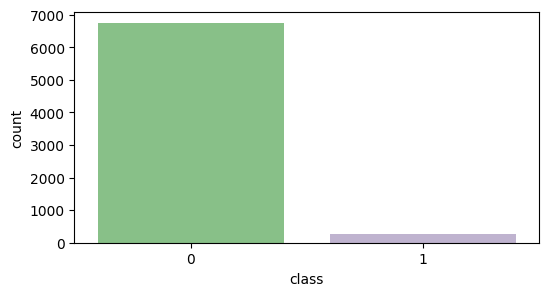

In [15]:
#finding number of bankrupt companies
plt.figure(figsize=(6,3))
sns.countplot( x = df['class'], data=df, palette ='Accent')

/tmp/ipython-input-12-1451402866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = df['class'], data=df, palette ='Accent')


<Axes: xlabel='class', ylabel='count'>

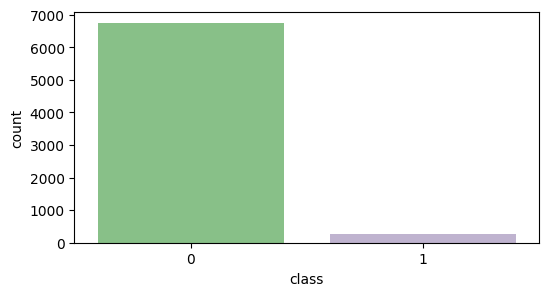

In [12]:
print ("Number of Bankrupted companies in given data : ", len(df[df['class'] == 1]))
print ("Number of Non-Bankrupted companies in given data : ", len(df[df['class'] == 0]))

In [18]:
print ("Number of Bankrupted companies in given data : ", len(df[df['class'] == 1]))
print ("Number of Non-Bankrupted companies in given data : ", len(df[df['class'] == 0]))

Number of Bankrupted companies in given data :  271
Number of Non-Bankrupted companies in given data :  6756


In [19]:
print ("Number of cells with Null Values : ", df.isnull().sum().sum())
print ("Number of duplicated rows in the dataset" , df.duplicated().sum())

Number of cells with Null Values :  0
Number of duplicated rows in the dataset 0


In [20]:
df.shape

(7027, 66)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7027 non-null   int64  
 1   Attr1   7027 non-null   object 
 2   Attr2   7027 non-null   object 
 3   Attr3   7027 non-null   object 
 4   Attr4   7027 non-null   object 
 5   Attr5   7027 non-null   object 
 6   Attr6   7027 non-null   object 
 7   Attr7   7027 non-null   object 
 8   Attr8   7027 non-null   object 
 9   Attr9   7027 non-null   object 
 10  Attr10  7027 non-null   object 
 11  Attr11  7027 non-null   object 
 12  Attr12  7027 non-null   object 
 13  Attr13  7027 non-null   float64
 14  Attr14  7027 non-null   object 
 15  Attr15  7027 non-null   object 
 16  Attr16  7027 non-null   object 
 17  Attr17  7027 non-null   object 
 18  Attr18  7027 non-null   object 
 19  Attr19  7027 non-null   float64
 20  Attr20  7027 non-null   float64
 21  Attr21  7027 non-null   object 
 22  

In [22]:
df.dtypes[df.dtypes == 'int64'].index

Index(['id', 'class'], dtype='object')

In [24]:
print(df[['id','class']].value_counts())

id    class
7027  1        1
1     0        1
2     0        1
7011  1        1
7010  1        1
              ..
8     0        1
7     0        1
6     0        1
5     0        1
4     0        1
Name: count, Length: 7027, dtype: int64


In [25]:
print(df[['id','class']].value_counts())

id    class
7027  1        1
1     0        1
2     0        1
7011  1        1
7010  1        1
              ..
8     0        1
7     0        1
6     0        1
5     0        1
4     0        1
Name: count, Length: 7027, dtype: int64


In [26]:
df = df.drop(columns = "id")  # on test data also, we need to drop that column
df.shape

(7027, 65)

In [27]:
df.describe()

,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr39,Attr42,Attr43,Attr44,Attr49,Attr55,Attr56,Attr58,Attr62,class
count,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000
mean,2.093345,0.462392,1.162128e+03,0.423610,23.568949,0.473717,0.269342,0.263638,4.588504e+03,3.426404e+03,-1.367363,8.855693e+03,-1.577367e+02,1.587409e+02,4.763202e+03,0.038566
std,159.699448,30.646874,9.315822e+04,29.742101,1826.847970,30.647711,27.064231,27.071123,3.627309e+05,2.696211e+05,107.717867,7.247527e+04,1.322125e+04,1.322124e+04,3.107835e+05,0.192571
min,-607.420000,-622.060000,0.000000e+00,-634.590000,-149.070000,-622.060000,-701.630000,-701.630000,0.000000e+00,0.000000e+00,-9001.000000,-8.004700e+05,-1.108300e+06,-4.194000e-03,0.000000e+00,0.000000
25%,0.038073,0.014812,1.708300e+01,0.011253,0.094681,0.019233,0.012786,0.011540,6.525600e+01,3.387300e+01,-0.009992,9.712000e+01,2.031450e-02,8.647650e-01,4.322250e+01,0.000000
50%,0.080830,0.049966,3.561200e+01,0.042097,0.207130,0.056637,0.046948,0.047783,9.461200e+01,5.180000e+01,0.022759,1.604800e+03,6.338200e-02,9.388100e-01,6.850900e+01,0.000000
75%,0.144955,0.104500,6.070100e+01,0.088314,0.365635,0.114970,0.103375,0.102165,1.304150e+02,7.550250e+01,0.075464,5.955900e+03,1.376950e-01,9.820150e-01,1.063350e+02,0.000000
max,13315.000000,2156.800000,7.809200e+06,2156.800000,152860.000000,2156.800000,2156.500000,2156.800000,3.039300e+07,2.258400e+07,31.639000,4.398400e+06,1.000000e+00,1.108300e+06,2.501600e+07,1.000000


In [29]:
print(df.mean().apply(lambda x: f"{x:.6f}").to_string())

TypeError: Could not convert ['0.200550.209120.248660.0814830.187320.228220.111090.532320.009020.124080.24001-0.0271170.266690.067731-0.029182-0.0338010.270530.0280840.203930.208760.11119-0.305050.127090.126240.292640.0799970.208170.26345-0.054623-0.358840.102480.14090.0092970.0012220.0130790.0998730.29530.124460.202790.132870.0118340.0464260.033901-0.0806170.036752-0.010554-0.081668-0.068739-0.22710.17203-0.0437230.015187-0.001751.22960.148130.210430.194370.0579950.32528-0.22197-0.0742350.144030.018510.14088-0.103750.0034690.044813-0.0723540.186520.358080.119360.06773-0.0547230.0648120.035352-34.7540.232070.0867340.0111230.121460.0873660.03023200.0776040.247370.0829550.0103860.342790.0264610.0681670.0077440.087180.396160.065550.367480.289480.115640.90856-0.0069850.016863-0.001611-0.0303910.0467720.260690.0400190.117410.191860.140610.13646-0.079066-0.449490.105350.0187870.310470.243630.102060.218470.0991790.0991790.0090320.027170.035970.173840.141810.474470.0921740.328890.0220310.163520.285970.281290.118570.743280.0166640.0551190.0323860.23780.229480.0630170.116040.105260.255460.442440.0754830.134850.110810.0695090.046260.0651020.0963410.150170.124470.267330.024796-0.020590.189170.137260.0553770.12260.102920.0153860.183540.27486-0.14535-0.0719480.457320.201320.0761950.0784710.0264350.157750.18759-0.008594-0.017710.0868450.0584940.15732-0.0048890.0216120.0288030.0393980.656350.142730.0961510.266160.0237290.281550.331350.17330.0681210.18150.392410.0104120.004310.31399-0.117690.173710.557650.685510.180030.102160.0625120.1245-0.104090.138410.206910.0737670.068043-0.0280960.10035-0.0876290.254430.0889940.10529-0.051610.0412930.16420.18280.079760.107740.126060.0565590.113220.35682-0.0131090.0507570.085740.10618-0.0237542.24940.114990.0723070.0359420.10620.150220.49320.14166-0.114330.450780.0862310.134530.0484420.104660.0425440.0855270.0080630.309930.0219190.163820.0699290.214860.26090.954690.096153-0.0012940.0288470.377760.189950.161630.206640.17028-0.0294820.131420.0970270.21348-0.012360.0152290.0147680.246980.192990.0175670.377470.324920.0509780.098080.196990.131820.0603620.0935840.0359720.384140.126030.0067840.129030.097010.148550.0802580.150460.298760.225620.10597-0.0141390.162280.434170.0844120.0074750.331940.0863270.145480.12759-0.221670.002235-0.0710610.75535-0.0117810.0314110.0631860.0336120.0052310.233690.10523-0.18050.10342-0.0145910.23170.115841.020.230290.099402-0.0466930.0469040.0099750.0577550.079531-0.09770800.236060.168590.0157310.197890.22927-0.0374180.0315420.0018310.0893990.06199-0.0341250.0544560.197490.131170.0272430.271230.367610.168180.278490.0274390.269730.0841180.111210.0489470.113710.252140.289990.236810.0424050.281460.151750.15175-0.0358180.185070.383370.0099110.103520.225310.0370220.108470.0575460.266030.0322620.105620.15810.218030.0356760.0882350.0243270.003790.0398280.38794-0.0011450.0850910.0642810.015050.167650.0353770.117380.147460.0520520.18710.0982630.516620.197970.11910.115820.335940.0788460.148980.107770.0204130.221630.107530.0579740.0298320.227860.0834690.132450.241240.167130.0603620.0384340.343240.183660.0471870.0794150.141890.338360.035570.0076130.0350870.46390.126660.0246140.197740.201730.0440380.548260.116930.205010.341380.0796680.0107080.0197370.190070.357390.0870910.060213-0.381750.0350380.110270.109430.2999-0.035068-0.0508780.0933780.0674730.252350.278110.206630.0768560.0761110.138350.111920.0556770.0655760.294070.23710.353120.0194890.0529820.115910.090330.146510.0605860.23530.0695940.464420.041220.153780.284370.102250.297530.0641890.0333350.21606-0.0005580.199630.415310.30.381660.216970.160260.10058-0.10223-0.0295820.0012150.108130.0907690.0475150.581110.065580.268960.228590.0295440.0195190.148230.0625960.445050.380540.0383930.113220.103950.004653-0.0276570.177870.10311-0.0206920.439950.122670.076884-0.658430.144570.208250.18580.163220.0591010.0069090.0143410.0245060.142730.367180.0276670.235290.173110.101860.083190.273480.117710.0894030.0011650.169780.137950.383860.14430.0793410.152860.286610.0309420.0638140.598720.254760.147560.129570.079330.193410.0507450.0288750.0369770.188770.0287040.0466930.152840.141080.14090.281250.3970.100590.0832780.0504180.0816020.081602-0.0559380.197850.0464450.126180.0082430.0194320.0306340.400390.193610.271250.220030.240070.145450.238650.150310.0583130.191240.113180.0797950.0451530.076180.879030.0299360.1050.189130.222310.0382660.234560.0353760.434120.230830.175570.117570.043499-0.0171930.100640.0326880.0610950.0260110.14684-0.0255610.0882240.0074080.0235310.0230720.0946380.156780.0561550.282840.66670.0609650.007970.11120.115660.145420.496870.391150.451550.0388170.272470.0351240.430570.39240.16118-0.0860210.17470.14996-0.0029830.441730.188310.003120.251380.279960.0311590.289170.315620.426440.288870.204430.355890.454020.353850.215760.267270.4528200.324520.907310.211160.0938220.10720.422180.155240.357060.695960.21360.344020.352130.0823040.631750.250.39910.138670.0891560.288050.0984080.0075820.0681530.0704310.039230.125340.067010.085040.25135-0.019817-0.0319750.699330.209620.090588-0.0070520.191010.009740.25942-0.114130.126050.114390.132560.0263020.0439710.42991-0.0802780.0514590.34540.116040.034520.254640.153690.150380.245470.267160.369620.323660.0905610.256010.468920.359260.24750.168620.320380.47180.11049-0.030950.106190.265160.21660.0840860.11260.159350.130940.243340.110160.648310.0282040.0957860.278530.0413510.43060.2550.176990.178920.328170.010980.20230.120870.0181330.122190.127250.0710950.071030.150890.231440.0298780.0151620.0783330.0737340.0918340.0293230.0582280.0704650.230940.174120.134380.0034590.281230.312390.310480.289480.168150.34973-0.0128850.259960.23210.350750.127770.148240.084977-0.095930.220090.211050.009690.327570.146040.042976-0.0011050.114750.2440.0739180.0024450.178110.0520160.0316410.104550.0343380.125320.179610.032836-0.0154540.192660.18330.235430.10220.146130.110450.0834790.0268760.110750.183160.162020.033298-0.016470.416270.098582-0.218260.119570.0989890.080153-0.099280.060209-0.026630.0668130.0856340.261140.383120.0453850.0117140.118390.061368-0.165830.227640.228480.0090520.179720.160350.159080.0588150.09747600.626010.0783270.11230.371760.0301660.15870.401910.119580.38470.0519610.198070.183660.212210.206730.160220.0111950.164090.027959-0.292530.116850.117770.261140.146860.0867280.01023-0.0536620.0201620.0965660.133960.112550.0161290.0028510.156930.0292470.0193610.16050.0218360.404920.13458-0.0437390.326090.534910.0139680.0000030.186170.059830.422760.159490.133020.281170.0140780.0569770.377460.0638680.0470720.0876320.140650.0839630.313250.120430.228460.0866350.0045590.123280.0015960.203310.117890.103850.0085810.0340790.0155360.059450.156180.18780.0874980.109150.0803890.0432620.34606-0.0995150.0082680.0250310.528980.0585430.216380.0351160.0356920.0880940.102670.169420.0809160.085313-0.176080.385070.0376870.533180.654340.221540.089070.160620.0999280.135650.219370.116690.0200320.24820.480210.436610.0831640.190910.342330.0317350.160820.286610.206710.0757570.0126530.438780.221590.291170.0116390.0705560.240410.0008580.0264930.220430.0673320.0216970.0629730.0109870.217860.252330.0908990.466740.245080.0426210.18930.821220.108760.20720.273360.13950.172480.138590.33037-0.032230.0620540.642760.0390630.367930.38360.053750.344440.078040.0773670.213550.0427210.105690.0201510.0566770.0060840.0541090.120240.0492450.248160.226850.064240.404120.125860.337320.24566-0.065080.152680.370270.0320340.0825210.214390.213610.31318-0.0013760.208980.0758840.225850.13823-0.137850.086901-0.37870.106270.063220.161830.106020.095930.17453-0.0444140.499940.13336-0.0884050.91140.0352230.0656310.104780.241270.180040.184290.301780.731290.140810.488280.0895640.146680.0843890.0012730.151910.0237210.0789330.0905360.075050.014840.871240.191510.747920.152980.1550.044689-0.0342610.0152440.163490.327390.0048550.809660.0928270.11845-0.0586120.106490.0577310.032170.0242621.9380.0106510.102920.0864010.0404140.101710.0895230.561670.0457680.0575450.0272430.119880.245940.0621020.0779180.0443610.0469630.0462450.305430.0503780.16007-0.0640520.081777-0.0351070.0334450.0421360.251620.0470530.422280.281420.0533260.0393740.0090890.54890.1771-0.0512490.0271380.0225220.0150060.238010.0883090.259980.092605-0.0937680.014340.0031760.0051250.162140.105710.400610.108470.0309390.16376-0.0217610.0799910.0575270.359720.051060.20690.0652410.11664-0.049010.551480.052240.0320370.125260.415530.0601780.25292-0.0883610.0712290.0925920.0791990.157460.197270.235270.0170340.303530.125220.0663950.0766350.0250340.0042660.14088-0.052729-0.01440.0051320.215530.342290.020124-0.0037350.585610.0217910.104060.0756560.0776880.152010.21688-0.205740.0638790.0921170.0534360.072107-0.105820.302630.0464240.0185180.0274660.230080.0761890.0984660.0621330.013090.0733850.080130.600581.31060.0192750.0315160.0715350.0833590.04330.0373430.0306030.143710.0466320.100580.0523270.0340350.114370.0082970.556180.064033-0.0240590.128920.144490.216060.09920.222530.0979520.0634280.164440.0552740.151770.0093070.0335650.175460.223630.0242480.198550.436460.0614170.0781670.0345520.0191230.0182440.0410330.128050.0825420.0035750.0191020.573710.0866830.005150.185920.0966840.159560.219610.134480-0.116730.0338110.277980.204840.0641610.169860.0732870.0591440.274750.0183380.13150.0499020.184790.047337-0.0276810.192910.0313520.455490.233950.475390.0338840.243620.169120.0322550.214470.042420.0893050.0778340.0369770.194320.0935210.0086240.315970.151210.371090.278080.272760.137480.306080.121270.0616640.199010.0442460.0268570.0660470.090349-0.0971510.0041660.150320.329340.320380.10567-0.0156650.0115820.209430.428790.113040.188370.271250.143550.160340.151820.27490.065960.0261690.308630.0014720.0475530.0238940.0587470.218230.0911950.16640.099090.0399220.0726290.162750.119930.0780960.001688-0.0790590.1692-0.038980.0895770.184740.10003-0.0547240.13496-0.298740.0516110.0017660.0611650.132630.0368230.102310.156550.105650.147390.284190.0205120.197860.109260.02793-0.03607600.757580.18381-0.0154050.0653470.01144-0.0026650.017070.315250.185390.0031670.18858-0.33183-0.21940.054551-0.0895880.0271230.117580.11020.0754890.0696880.729510.13290.0307080.0754890.0069970.20993-0.0484510.139150.17767-0.0037210.201190.98557-0.0127350.105170.0999730.099017-0.0640850.01379-0.0569050.0021410.0541290.0335440.0581450.185820.189490.0649310.11716-0.0163940.177510.117950.321260.027241-0.0057690.452350.225070.11740.0529090.188440.407680.197980.299310.157840.0109670.0561750.371730.0242460.382750.116890.0550910.0703430.0136210.0199630.112200.078871-0.157320.0880270.0680880.318980.080250.0156020.02010.295280.058536-0.0030050.104350.064590.0709310.2950.060708-0.0179850.0619960.002341-0.0218330.130560.0523220.0814580.0375010.0456590.123250.163920.0405030.109150.222280.011335-0.195720.1471-0.326720.356860.04931-0.091022-0.094486-0.0110070.240580.091730.0567880.520680.037954-0.133690.155980.147640.327580.004309-0.095810.135680.146890.24345-0.0669150.025760.143310.022710.0034590.17905-0.0054630.232070.0200690.290870.151170.0050340.0298750.11810.078060.0849770.555040.273540.0374860.005190.0718320.150440.152660.0477070.148990.0645960.0470840.2133-0.104410.0435420.0126940.0825220.0292730.0077380.240210.34113-0.0676980.0423280.142490.041348-0.194490.0583440.165980.0071060.114250.0550480.0471870.204810.285420.229690.0649340.0071790.0324940.0366910.0602930.239130.0471330.083151-0.0702840.001855-0.10679-0.15956-0.072690.011514-0.0094580.0344780.082897-0.004972-0.263980.354310.0614670.262160.0593880.126280.325330.127580.0019550.415670.0444110.144740.24570.0126620.0502180.0279190.0462730.0766270.193870.12053-0.0270080.0838950.0793380.0505710.0242280.111170.176260.263590.0771620.117020.116180.211880.14649-0.0472380.0014240.172070.231160.0037480.11627-0.037030.137030.214820.0281910.0942440.0267630.0164940.083812-0.136510.0876670.0282790.0159040.399620.0062910.0090680.0207820.455110.0488840.0526310.020984-0.570070.0376950.214760.065260.13063-0.0240470.140890.114590.13172-0.0094580.422390.0968540.519270.235590.0628140.052054-0.10517-0.019230.119230.0487510.0653150.120730.190590.0498940.0586190.163190.0710150.0443130.0457260.0010540.0889590.0184730.0423280.0291980.226380.0705140.0590750.499110.416080.577180.187620.134570.0945320.108090.350610.393110.166330.0213630.395160.0200860.0496560.00872-0.0036390.0550470.111180.0278820.241140.00317600.037562-0.0223650.192690.039670.110930.0939420.0045910.0111080.210230.0417120.0635330.0424940.10859-0.0481920.35688-0.0162720.051060.296680.0569050.19317-0.0410090.0560760.0774440.155730.243410.06457900.198830.127220.0000680.0977460.0259290.129280.0472350.143130.0445230.0749240.03650.021582-0.0048320.046013-0.002520.512920.0514080.0538420.464720.0878760.0196390.55870.0942210.0144750.0291190.049097-0.0317190.181330.0143020.0802730.097043-0.0245870.14230.000499-0.122470.0987880.02824700.169110.0015150.193790.20890.395590.139860.0275850.0208460.13530.0144450.144410.0362960.008382-0.131180.019719-0.0214050.139860.0465410.224070.043350.152010.0178370.18954-0.164690.0462930.0052040.073119-0.0146070.097003-0.0409790.148790.115340.0936390.0536750.299930.352680.0879870.0000360.262090.168270.142120.37020.0289920.089210.0389730.0458750.142650.144460.0098680.239690.388880.0658540.369780.104960.037780.0595010.13497-0.0245250.134820.165240.0608450.0449750.0608460.190560.149210.042858-0.0329130.03299-0.0280450.0721750.0933120.0828690.00911-0.002055-0.0332530.154810.13605-0.0286390.0343460.1350300.0366540.07279400.116170.456570.101990.163480.12080.040079-0.273670.112510.0491460.13117-0.10613-0.0005040.0481050.059616-256.89-256.890.0875390.082542-0.0355170.0522110.086683-0.0159510.0102640.146330.479760.0575150.0726570.0984440.0178510.0939730.388780.0729790.0303220.094871-0.0538190.134290.0828440.0526710.346030.111580.0761910.205250.384750.10290.306330.232280.390330.0456420.108210.0134520.0252420.035542-0.0306070.0590440.0967090.117280.283130.13140.170370.077830.107720.367930.0102440.278330.456790.0140480.0117710.0695730.497250.128050.0638330.0466030.0521120.285650.0254760.178180.14550.0706210.0046130.096220.0634380.0444110.0660470.17269-0.0339430.0448130.153070.275690.105410.142970.179580.257660.15210.309180.0665050.0290410.0435920.006389-0.0731350.010758?0.378640.0805560.0445790.116510.0118390.19610.153060.143920.0009550.0707920.137530.017383-0.0235110.094180.111330.092330.0880650.0402950-0.024540.168960.146310.183730.0173090.0937130.16640.0060720.380850.120560.0739080.0470380.032588-0.0832860.105850.071012-0.0790590.002956-0.023859-0.0778730.069034-0.125870.211160.237180.0882650.113090.29650.0242790.104160.161520.0913530.0451180.0418270.133780.53554-0.23897-0.904220.0883670.011930.200430.107850.0502240.312830.0337630.085912-0.0228710.0060130.22290.0882720.0625470.305510.0933790.185910.159390.0006490.0997510.32125-0.0227690.0645290.059006-0.00640.100770.0351090.226710.490360.165680.0591780.0380260.0643640.0941280.0408310.0726480.224560.0867230.565680.0312840.277570.0617550.0245460.0394130.12217-0.0857220.0399160.0396640.0183010.0867520.0212440.12830.289560.03032700.0463290.0427030.171990.122810.129550.0607950.0060990.42010.326610.112860.0167490.193930.20380.070920.109560.27130.413480.405590.02980.093250.14280.562240.096290.483120.0240110.121540.102990.0098980.0246310.80653-0.0330630.30050.454650.0357170.244440.0141210.039260.0854140.262760.0396490.23226-0.0055810.183830.053420.047477-0.161740.268320.046920.0335170.34230.124620.0996250.151040.076490.310090.0458040.0721910.0428160.201970.0878060.085909-0.379950.275140.0872840.0914610.0986540.261680.0398140.327070.0634720.22111-0.0425450.26170.0973130.0261660.235890.101580.774110.120710.105490.0586570.031626-0.0016710.213180.0315940.0952610.135950.176930.0307820.0033470.543830.0764410.0283350.027095-0.0356930.112070.258030.0439710.0214550.35594-0.0207460.0441370.166890.0503310.0529020.0025020.12640.0267010.321860.10290.0649910.0078940.071470.0556350.131150.0639960.0633420.0287510.0282510.137160.0963150.0192770.222520.0486080.227790.0615910.001050.0541770.14805-0.046165-0.0090920.171210.320910.342090.134150.0568310.00615-0.0832140.0059670.0535750.0408930.0915860.146930.2791-0.0365420.0220020.264220.11780.0015250.186310.250140.274780.102610.0552310.03653500.248280.463340.0097460.102340.0213130.217330.17173-0.0811750.186530.205690.0311540.175340.0201650.0008560.19161-0.207810.150380.124030.17230.218610.194740.126590.15940.15940.060820.163290.099553-0.0273750.116610.11699-0.0350860.0146560.085873-0.0551210.0152960.002813-0.0633750.0905420.0813240.000817-0.029811-0.0028240.0680680.143360.115860.017116-0.0031270.116560.0350370.07071300.195470.196520.1112-0.028790.0646480.0221290.274110.0009840.157820.0755910.0707680.0105440.13890.105340.141820.0543810.153140.0150160.0365260.013620.0880770.025780.120150.607730.0425870.104370.0623390.360210.365590.161580.124050.0045810.0010770.223910.0580910.0752690.0836980.16349-0.0657720.0208390.09929900.091074-0.0447490.102650.119480.055256-0.0086670.186460.0685750.0011930.207940.588670.041955-0.0295410.34101-0.0978010.124240.0872150.210610.168930.154610.356210.175230.169250.0457640.610980.0328290.062534-0.222810.0506240.0451570.175730.0235630.098201-0.000530.0148730.0063140.0049680.0799470.069767-0.408860.0205460.03550.322870.164210.098819-0.316010.02123-0.0509440.336170.144290.149160.067840.119380.129840.0030240.0919810.232060.0092980.497520.0701490.02590.5877-0.0098230.0959980.0082140.217150.127160.0784420.0087860.033085-0.193680.072158-0.0833270.161240.031386-0.0921350.0118090.0363210.137340.372360.11770.0561110.021850.140090.0651810.281450.111060.179420.0036210.029241-0.0219020.09950.475460.010740.0733870.337530.0026060.281470.15026-0.0338980.035425-0.038892-0.0145570.0451020.061910.0953760.024780.0268380.137180.47086-0.0672430.271560.421860.152030.74190.182490.144740.0145090.1142-0.0597390.0960970.344140.0895890.066780.353290.055844-0.0076240.165280.107290.0327320.032609-0.153110.31305-0.0971190.0531330.211460.0417020.0035950.201570.217940.193870.21120.0436850.14066-0.0045-0.0607040.115140.079496-0.100950.12237-0.331830.024320.364930.0095060.188030.159430.138770.0047390.111660.266730.494750.0666670.611150.161070.0795390.310190.0854710.165020.0033180.0257940.157910.24324-0.0644870.304190-0.045410.391110.73815-0.055732-0.0220580.096401-0.056491-0.037670.030530.179110.220590.406220.179540.0206260.142380.10350.02343-0.0544460.0566630.0021950.193460.113870.140020.282950.0243050.0402680.050180.167311.99430.123880.02960.0031880.0659740.182420.1382-0.0017370.038167-0.0187910.40916-0.0356410.203650.0128850.0139550.205590.0432180.0449970.0855921.06840.211670.182140.0586630.10918-0.031830.013941-0.20796-0.0097510.537360.148780.209710.216050.0040990.349430.108070.03334300.253120.0267580.176140.266060.0398460.107850.15311-0.138070.129610.192140.10569-0.1920.245650.308080.0626040.000014-0.216330.0256330.19210.58298-0.0216420.173420.0975130.002462-0.0187730.0620650.0103490.021510.0938210.0856940.0051020.0484580.220750.062890.217320.119110.0886820.200630.0521430.212370.0913350.59870.225820.260130.205760.0314360.202610.0894480.120980.120920.0492020.0061070.0538530.0222340.0874010.15374-0.0305410.166760.104670.0150510.299960.170880.163650.157280.037852-0.076460.243650.0567290.0387950.0663880.0526340.390640.21820.318490.0506280.122870.23950.0541550.635470.255410.0182510.102240.625790.23971-0.066130.146790.003210.148040.183710.144090.0908780.193350.0088930.113220.0934950.424880.30670.070036-0.0970650.23830.0610260.281680.292940.0522790.16712-0.0779240.0641220.0573830.202760.16570.0712430.104530.180950.170120.0721810.1812100.0658080.176620.693950.0257160.086206-0.179130.0938640.057827-0.0356560.067087-0.0109920.0622640.0209770.531430.0196750.4585-0.0391860.091410.040220.0692670.0000610.0905940.27990.0775760.02390.0641450.14410.0754720.122590.807070.0612540.0005260.192230.570080.0145640.148580.0973150.0393330.0973930.172340.178130.0560650.0117470.115510.325980.146830.087990.092839-0.0054770.0314740.557430.11790.034910.402440.193310.182490.367640.259440.0199620.0546940.164780.0347890.270480.0161040.17494-0.019606-0.0575390.623480.0127770.114460.0868410.254190.383210.167610.197690.0158730.0400620.117480.0821420.0333240.0492360.0966750.0419380.191230.195330.0207270.0986790.062250.20570.107240.0078820.0505060.0692090.0058180.311310.0543190.0634250.0827310.0043460.095302-0.0791750.166890.175170.070085-0.0291040.0523170.0468570.311550.0983630.197720.0325390.0060460.0442540.0578360.233810.094126-0.0111170.38910.276710.0704070.118320.101650.109770.004547-0.0183640.150630.037588-0.00531-0.018580.0023070.13850.133630.0591920.0369490.155110.276910.0136170.109860.0589090.0083290.028090.187720.0507730.0000430.158740.036466-0.040546-0.374830.065159-0.017650.0211520.100410.156390.292510.087620.0692350.0176180.12320.162220.0139020.0707950.00948500.0904840.037790.0279150.19280.139790.11770.413740.0622870.195610.363970.109290.0369930.23528-0.0512850.0041080.0366270.280070.117920.12490.0351310.139780.0387630.073754-0.0762790.107660.333430.129380.168840.11096-0.0868890.0109180.255370.096024-0.039749-0.0565750.540580.0164290.0757820.20240.171170.0004870.466050.0329580.079390.112710.139070.0615760.299480.337610.09510.13610.249380.0441860.0903490.198550.191770.21699-0.0445560.0701730.0249790.0810560.0331370.29721-0.0323450.0233660.061365-0.131890.118840.1930.0466760.0349120.247760.10820.306620.021742-0.0033140.281290.669630.0763820.203620.105990.0467050.26810.039372-0.0110390.0972460.259460.229490.0818590.0160590.187890.0576890.196330.104070.0387840.115840.11810.069186-0.007270.0616510.0691330.341320.169480.071910.0784550.0377870.0465170.33510.074772-0.0172620.0066130.148990.0059230.0590940.0924810.0907280.256280.304360.347590.075060.0928240.105620.132430.128190.127070.0445440.0804730.098959-0.107611.5770.215710.0364670.0534480.0911160.232320.0721030.074207-0.12867-0.0920240.191830.0831490.012276-0.126860.319210.244640.155210.0919150.0099560.092306-0.156170.164860.061410.22420.220270.0539520.060718-0.174810.197360.0872620.12970.152350.0816780.0657480.0554140.0436220.114740.227670.103370.000960.335090.115060.126110.0076860.0079250.37920.0302590.0342580.0743720.163140.156480.04590.0895580.106220.187180.0123680.966140.288060.0031990.1540.103150.375990.0820830.55450.000440.373770.316290.336010.0179880.105240.0640870.132580.0261450.190180.276620.0783150.0868550.0031870.0916110.199980.479160.072747-0.04130.137560.0875950.1122-0.039570.168720.047240.048539-0.0532280.0026690.035270.0405530.108080.0929190.195960.368280.0948110.176380.15590.0628760.0203630.14459-0.122150.0995270.056093-0.0007150.177040.154170.679960.284120.0073290.0660070.0721410.0146690.188750.0272240.0652110.13360.212480.099064-0.0345070.0328720.278040.246350.145440.0127570.235880.126980.519570.274530.0212280.0575990.310430.022340.0818450.0511440.021190.13450.381070.105660.0678520.0956540.0554760.0249770.12685-0.865310.19414-0.0007840.0685330.0794560.198070.0357120.12782-0.0175840.070081-0.0602230.288730.204480.222540.149940.21853-0.268760.0202250.0661340.184450.190690.0450230.13540.359620.0656520.121870.056528-0.253410.06820.000574-0.526490.167910.147680.46139-0.0054320.131110.105040.0056050.0597240.230040.367120.0386550.114720.16034-0.0890630.383040.143770.289260.0099970.0956210.0777910.137510.0078580.0132770.125670.0867620.0007080.0705150.089167-0.180610.16340.425150.488590.155220.0320610.107530.169180.0804020.240210.0013890.0134860.0176510.0132280.35950.237880.469510.265650.077270.162970.0339670.086690.0443290.02010.0512180.0396120.185480.044867-0.0714810.164410.061993-0.0336290.059145-0.0476580.0518020.0680720.0386630.0527710.367440.131250.00604-0.173070.0271220.0635220.0247540.380870.391860.0656720.16643-0.111510.0397380.0403710.182570.0380130.109970.033047-0.136170.113490.167060.0180380.124330.0819690.130750.14150.0498180.352560.322280.0063910.1280.075134-0.0486160.110910.0082410.0407850.20227-0.180760.16190.21341.07720.19512-0.252810.246520.0676820.124490.0195380.31509-0.037590.138770.115150.161080.0177250.143590.356090.489880.0298110.0625710.0022360.0226830.143250.149750.0071790.151710.238730.196560.0273760.210050.0618380.211650.121860.155020.236660.0026880.121270.160150.241310.198910.392920.043329-0.0194280.20620.006794-0.13450.0035450.49646-0.240710.0976480.0910280.0151220.0138060.0532960.100820.0687230.355490.433720.750450.3802-0.090230.0955190.0329250.320350.011905-0.385990.0278150.0012820.0980220.0089570.124860.0257690.0485530.515750.0731860.370760.0052160.282930.0901460.003566-0.0773280.0143690.314180.0580270.156720.221350.129870.263880.283650.224470.26182-0.209520.007350.0173910.032231-0.0003810.0699450.0369580.0106980.048868-0.0510490.002030.165020.123380.135370.12958-0.39185-0.27210.167450.0717860.0640640.281990.0262740.113160.105060.277410.419650.015825-0.0242720.102570.102780.0840770.14148-0.0322190.0951290.212260.68040.038530.48560.077866-0.400790.0038050.0064040.197150.075314-0.0010060.206760.0913390.159260.14190.124810.45740.252870.0591590.103950.129060.0226510.123890.12286-0.0787720.247840.0771520.0123160.0537550.198650.0558760.0714110.23777-0.0939530.347020.13020.255520.0189310.015940.0792710.0655620.272020.0087630.0363040.0920150.038418-0.0294120.110980.0068690.0483370.158380.0593310.21310.002986-0.378710.062005-0.422940.156660.0138630.0764080.187990.351410.0881260.249950.0198480.271380.177720.0021430.162560.0245030.0847290.124180.173840.0989990.150880.347730.1613-0.0435110.0265720.0057690.0017580.0331210.0240380.428240.14010.0009260.12983-0.2250.0885910.167460.001798-0.0449440.077720.0939050.128910.155010.0458170.0559960.0752260.0271490.0276750.0681990.13370.145210.316020.011280.0629380.0424540.161370.10022-0.021230.0534580.1420.250130.061880.0737770.0163780.0955920.0145330.346080.181860.0661270.45040.189450.0626760.136110.0048930.114990.0523050.123320.22678-0.0586120.0424730.0670260.25233-0.0522930.072092-0.013420.0008870.177250.205190.15774-0.0074930.442030.352320.33417-0.026216-0.120510.37551-0.1377115.497-0.010974-0.0839910.0432630.109140.079020.0227390.010575-0.0865110.15368-0.0500770.0166680.0142230.070977-0.0738030.108340.015535-0.0047010.110150.016839-0.021360.0050580.0795050.0535140.049592-0.39082-0.001876-0.0386790.0315120.279140.0233830.14624-0.054152-0.0307750.0213850.0457010.0377550.16373-0.108130.0160380.0554630.0160380.13020.0404460.0954590.0394820.239570.126070.0965970.0704940.0005190.1934-0.0194160.059850.0240930.0797230.221080.276210.134590.0010830.0382680.456590.045881-0.0419190.0512060.0183180.10127-0.0396180.091830.0100710.170280.0429040.124670.035769-0.0898660.0305420.118910.113020.126930.0052350.005211-0.0181770.0099280.0003260.0053870.0436170.0133610.101680.105910.115350.024290.0176480.0060960.0962290.016762-0.0490540.011961-0.0327250.17345-0.178680.0124320.166790.255940.0874340.608410.412240.0266890.078910.0409580.0253990.0657920.138730.03509-0.071036-0.125130.232330.27815-0.0319620.224980.0712610.0142210.148150.45427-0.0703470.076980.246970.0890210.18290.38482-0.0105730.074528-0.0718130.0195850.228790.017060.0986890.2575-0.339410.4160.115620.135910.116790.08525-0.0104510.154250.262360.068380.0810310.186250.0841170.928770.0630780.0039310.0128630.131350.0534230.294390.14659-0.193390.0092140.118420.0284970.11144-0.0170360.043496-0.0177350.151530.146250.0690640.0475790.174530.0366650.108380.0202480.355060.027269-0.347030.22770.41567-0.0070540.0019110.284950.0502440.18032-0.0981410.178870.0422020.16007-0.0614910.0948120.127060.250940.0597770.087930.0746270.288090.0765470.0658430.3835-0.0270080.0357960.0711910.04853-0.0309910.0648730.028388-0.068210.0390450.0875470.118750.194920.198160.380931.62030.0432180.22757-0.531970.463590.0401560.249050.179150.0295120.172720.17128-0.091127-0.0133290.113410.082728-0.0031460.002270.17436-0.037030.137030.232970.828170.245810.0895010.111430.726680.38661-0.0388390.0177540.0490320.0906020.259830.0093820.093119-0.0092510.113870.0713590.0662720.131150.133920.0165090.0829790.0424970.0916940.0027090.0229180.0011660.125380.0246730.0748370.325960.046103-0.0088510.134360.0061940.0387050.0029530.26454-0.186650.172820.0108340.151030.0268670.0745810.0429560.313090.052054-0.105170.0239780.146220.206030.170570.0962390.175540.065215-0.147090.101520.0655150.321530.0256450.63520.0681310.0842210.0652220.0465560.0365990.0059020.0003240.0615290.245160.164690.178910.0446250.0560760.0350160.20789-0.0043290.0490020.0652570.0454470.141890.0218410.127590.172630.0793380.002797-0.0046480.0798520.0563620.0282470.102080.167510.0471040.0031120.119320.020479-0.010980.0516740.0016130.0359360.0905590.0751210.25459-0.0754490.0647140.0010590.0326860.205290.0615710.0151410.058907-0.0540890.0943330.152170.0298620.0709740.023212-0.171760.063646-0.0173410.019102-0.0769910.106750.239220.074370.061940.0498570.0727450.144850.0953110.0755480.13140.0581790.23360.0552520.0104670.0494550.0146540.028150.0308620.246710.177690.155150.0401740.463640.10227-0.025520.1058-0.0601490.298710.0700050.143690.115990.040824-0.0230680.003791-0.0108930.178880.0529880.0345410.0852970.176250.0462730.0657030.113830.0101890.113030.303060.003770.0040140.296650.104550.0794210.0002090.0328070.12277-0.003644-0.0540890.0598510.0043070.0730610.021244-0.0316390.129460.10956-0.00093-0.0127350.10517-0.0755420.0172570.0667740.0667740.158870.138780.0181460.271990.0212630.0830710.0273290.437810.309360.302860.023227-0.0620710.267320.0431570.0050660.036338-0.00167100.283670.46570.0828330.219170.0689070.0229060.0849660.0321470.004876-0.0098230.026465-0.012884-0.0032840.0687610.059236-0.0532220.09233-0.131210.019440.123250.132990.0442550.0158320.019750.075530.0542680.128250.28001-0.145410.0268590.0726270.2757500.091730.026965-0.0115330.0082860.0783190.23650.122470.30310.0130070.0766110.153070.10270.055870.219070.0183310.121090.044128-0.007390.395140.12250.115340.515610.0530550.121690.172820.0992150.0392010.0970730.324060.059663-0.13343-0.0329420.126970.0456660.0940570.142490.0586640.0302260.105220.176410.033274-0.0284980.0937140.240770.0823230.251360.0184330.239930.123010.107860.15530.10016-0.0104270.138960.162760.12579-0.123050.17160.121740.0325380.1080.282910.197450.171180.034828-0.0320430.0959680.0530410.0528340.0365340.0789030.0062890.0635670.0536870.0745390.0926050.081040.0237580.048697-0.150480.131540.157780.0147590.34370.781660.250190.435140.438260.106020.123760.0016830.024762-0.0322390.165680.11269-0.433460.119640.0757510.001635-0.119270.0655860.0215640.0020340.11809-0.0797650.0836030.0618130.0086830.0560240.0238280.0142830.0560590.0337550.0732070.0139710.0392470.0805330.178080.0287520.079835-0.0609490.0398920.0788040.016810.0223230.007073-0.0078310.148260.11151-0.0062320.119390.0061560.03731-0.260620.130540.105710.0700950.0830410.203170.14391-0.0432440.0493050.0078820.0146450.0104740.207580.0888440.184450.211520.222830.102510.53816-0.0322160.0752790.27113-0.0439610.0753880.046699-0.116050.108910.254830.164850.0202520.0887540.221090.125650.0515210.050850.141950.0123490.172320.238280.0132590.140940.353040.0465080.0658580.79649-0.281770.397460.0316230.0058470.326160.0221670.027724-0.0315770.0948440.0880030.0612630.514990.138590.21654-0.020760.0517490.0305810.0014170.114550.0699770.0627250.053826-0.0150790.183830.0747640.0848-0.045569-0.0164260.112550.100320.151750.02855-0.0507080.183060.0416660.0154840.274980.266240.0748880.039740.0492640.17627-0.028050.0299340.0008110.0294210.102490.457260.101660.170470.0923790.333450.110350.0063980.0543550.481910.108290.10349-0.330410.0816660.0434970.128170.322740.0217480.192380.0102660.0640080.067701-0.018849-0.0829950.0207440.137-0.0422230.213260.009906-0.130330.009338-0.0277890.0511150.024059-0.0121760.719470.164470.15750.098370.0232430.152010.111290.0439750.314970.127680.213450.026990.0462530.017810.0585280.0081340.155680.228230.058901-0.57789-0.307650.385570.14697-0.0146110.027231-0.065170.177190.0160560.0777050.0422080.0990530.26071-0.055222-0.0402650.0014030.0867220.076889-0.28650.116730.0915160.0018120.110520.151180.104850.089929-0.019280.0385450.130030.0469640.114190.0452170.433060.125990.0740280.0030340.230640.160660.250570.159830.0203540.322640.0012830.0320660.0066170.0304310.2377-0.141780.0174340.176180.0311690.0751730.117720.306160.247630.0346620.0489610.060231-0.021670.024824-0.148260.0693060.0334490.0947380.034365-0.010180.0804770.24106-0.063140.0440990.108770.0362530.0641170.390080.131090.1249500.146220.0437080.398570.158390.0102860.152250.0756070.0021440.164690.0017410.0149540.063944-0.0455530.0714760.0082260.0930180.280480.405760.141050.164530.0122190.00567-0.0142980.127590.2034-0.0364130.0205540.0324640.038270.0894320.0810390.0645690.111690.079970.0669780.124440.101940.226250.053478-0.194310.056130.096892-0.0140540.0945990.314220.318040.13920.456950.0877380.0888350.168110.0333980.10208-0.0714590.025840.268130.0311130.192370.0333390.299970.0071730.143350.0615710.0350850.142760.284660.0043440.0135280.129510.0556120.149680.175790.0510890.145930.003076-0.00997500.340640.118940.348330.0010470.0277220.122670.0993730.0360970.156110.169090.31917-0.0273710.0324430.0365210.145460.0379930.0657030.0525120.0564460.0761740.081803-0.0520890.00310.113030.303060.091305-0.0097010.234760.0526110.146710.155110.343940.207430.0861620.0067710.195240.074020.361910.141370.0802720.107560.36327-0.0568450.038021-0.0648110.0860980.0686870.704590-0.042624-0.0865020.0048860.041690.383790.11661-0.0730850.0526770.0401730.134310.147590.0696920.196060.37182-0.056235-0.0026890.371260.0309860.0829260.0710380.199890.0894230.199850.30310.33421-0.135130.0680270.0169370.13740.112760.235990.0341320.250360.0658650.124860.29361-0.149630.146580.058020.0498790.0516290.161810.003836-0.1576100.013561-0.012080.187720.05443100.079140.366490.0548370.0437450.0938320.0279450.276520.298540.0227140.105170.0398250.018210.47990.100240.0488740.0063820.0338940.18430.165440.291320.0014690.0127750.0092840.0986660.207150.0375160.0204940.0635140.0146540.126910.0241290.0230720.22616-0.0156650.17286-0.081728-0.269480.197960.444540.0208050.175540.760040.09297400.964270.083801-0.0112320.14799-0.104510.0790320.2023-0.106360.0252350.0153160.092990.168870.0390530.195850.0855810.0050090.0606920.011818-0.0180610.0035750.0364090.018711-0.0359610.129420.141060.222570.291470.0530010.184090.455110.150020.07850.0578620.0764440.000864-0.182180.0291240.0822550.02751200.142790.187260.0009510.083852-0.0596410.103910.0064660.205360.0338690.0108370.002640.103130.0543550.215860.0644530.26696-0.0095290.0017710.0819110.120.0456530.0175970.0040340.169660.0661110.0106340.265520.0233650.0613170.248650.6050.0008010.037182-0.128030.0163970.0406670.0704060.122270.165350.038225-0.0356320.0376570.0108140.0236320.114280.0462650.119610.0480880.0553180.0214530.116820.0059330.0270290.0450250.0664760.024970.125010.0630130.0562580.0843790.0543980.0389370.0550740.000588-0.009598-0.255760.0033260.166860.0777710.0387710.204090.0333360.116710.047630.0656680.272010.0446150.0258860.0419020.305980.0947460.0212460.0640780.0081020.254010.0107920.008632-0.0950190.0597730.105960.0239920.0189060.178880.0090450.23727-0.0544920.0945370.0025710.87024-0.007025-0.0717130.0776970.0442370.078290.118540.0606730.0078750.000435-0.0210650.162740.0029760.106550.0384250.134540.23517-0.0498210.223820.0153260.011039-0.0397050.0470980.090026-0.0081980.14906-0.120250.0786730.039590.201680.0172420.123970.0214970.215880.0219750.0526710.120920.112130.06930.303580.524450.0404160.19880.128370.0618220.0103070.0384170.12930.038272-0.0692360.40469-0.0127590.0540620.049720.119020.370370.0008640.025589-0.0973620.0095270.0765530.130960.0774970.16567-0.055440.0273910.0115890.0984760.0243270.111370.0147410.141070.0117420.0264660.086140.0573-0.169470.0283130.003061-0.075670.125420.190780.207990.050566-0.01138-0.0206560.0172280.123590.0546570.146050.147420.047240.13890.0934760.0878750.541550.131440.131060.0960540.020520.0816320.187210.0251620.191350.36970.0276560.0350760.326140.86042-0.098490.0757060.361730.059080.0013530.0082820.243950.43263-0.0319240.0165720.0381320.0454770.277630.237850.0816740.0869070.137230.0415090.0672750.0010580.044294-0.007140.118870.030717-0.037172-0.102130.0972480.0609510.0563930.137350.114290.0869850.0508630.03012300.420470.0152440.15080.1140.0717030.0575450.033562-0.0063880.0582030.0440670.0386420.105710.009010.114240.0258540.265460.038970.0423620.0233880.436460.0614170.0781670.0345520.0920450.0637830.185780.0423620.0231170.0732870.115250.0117410.0159820.023808-0.109230.065730.0980690.0040470.0230180.0681230.0173470.0335460.0967450.0373890.0390950.111350.129520.0673050.10614-0.0739790.0567810.017070.0028470.178780.0619840.125670.0899070.47466-0.0555780.057160.208910.0032240.067164-0.0769590.0935590.095752-0.0667640.175060.090294-1.15330.41053-0.044712-0.0120450.0763270.16860.0046010.13765-0.0780040.118230.14990.018959-0.0099790.306520.179380.047276-0.4070.15450.083210.0193480.0658780.103760.24332-0.037414-0.0971510.105620.0673080.1110.0322890.326920.17960.0237120.121510.0920820.0248070.0248070.149480.0010410.2273800.0638160.0685360.071030.15986-0.261410.10559-0.13713-0.0442870.0362360.132890.573770.0368740.0274780.10488-0.0503750.029941-0.1109-0.0395350.162980.733680.133340.0334920.136041.53990.796971.11540.0153180.237450.0166550.0628930.024810.26339-0.320570.271480.0148930.26344-0.093584-0.0354290.115290.534840.0172990.208920.0031970.138720.0829940.0107330.0107320.0012560.0396140.0336890.0942030.013434-0.103620.0464220.0250510.520010.0515860.0919980.22491-0.0481780.315830.0993070.15546-0.0104680.12901-0.0345810.314220.037647-0.478270.110550.0153390.131220.105560.58157-0.00259-0.033165-1.18620.191730.0112250.18610.132810.30860.124720.0788510.838510.273620.0752160.774480.370350.522840.202510.312940.740870.128030.0049910.924450.439231.84470.236910.0177510.000360.327120.054482-0.0514360.0046730.139790.163490.297880.0069440.0024950.0550260.026654-0.0372090.0354860.427370.0933470.400610.0864540.0157980.019810.084721-0.113620.0222620.0259290.186510.0333761.17580.0888770.0912150.0245550.019124-0.0152490.0471910.014614-0.0575320.0238340.0154410.0022970.0050360.009293-0.134540.248310.0780710.0606490.28444-0.0965510.0931880.0859970.0941230.079717-0.036713-0.133160.383290.0694090.0373390.0828880.0914240.122630.0713860.0142050.0171010.03920.0330610.0420680.031507-0.026318-0.0042550.124760.0439580.0733290.21479-0.0773130.12227-0.0303610.0321290.121730.0351521.41951.41950.076531-0.0629740.147920.1109-0.0345620.0511020.0613570.505830.113250.556070.0300070.0369630.67140.14447-0.0794970.0256660.200430.0013790.356890.0534010.185230.134470.0228570.269810.0633450.008580.0759020.0824990.0400080.0187590.289960.0439010.157470.163950.18628-0.0554920.040560.156450.0221620.113450.0197030.0003350.186340.178150.0644980.049210.398240.246740.114680.0227880.0279690.0953930.002520.007876-0.0580850.0980390.0706970.0083490.0300680.203740.112250.0606990.067337-0.0354050.0607910.0570940.0302530.0945760.269650.368510.531980.0576180.0925820.0139440.097213-0.0354050.0283510.206840.043755-0.161440.0643120.125910.0399970.454940.356780.0251030.0004980.0267250.0267250.0818380.0742310.0127130.146310.257580.0634490.0505710.019330.126360.0569110.0005890.0683590.020710.040510.0704030.328920.125470.229790.0036870.019734-0.137230.0830140.0667770.14697-0.206620.0006810.0484620.013857-0.0281180.0187390.0532610.0351470.0800770.0696480.355440.236250.0647590.245410.0513980.0083530.01775100.0856410.309020.110790.006699-0.0261520.176510.381330.0288550.132930.37110.312410.0577430.548260.065370.319070.004109-0.0393280.0718690.121670.0255570.178790.0063570.09042-0.0161760.0094120.170280.0060020.21874-0.0655080.007856-0.0740940.0115640.0852830.22127-0.000180.036230.0362940.0080230.114480.0039670.207170.125490.244970.117220.010630.0000870.13640.145120.115580.0676920.0085730.011063-0.0530970.0061490.0912080.0335980.0745920.0065370.0443910.0367280.0683340.272220.188930.00469-0.0005410.1836300.167890.0369380.225910.196730.216060.14565-0.0665290.191040.0640540.551990.0566660.125160.21802-0.092440.188020.469310.107240.0839990.272660.0811470.0536840.001930.0648160.0918520.0600830.0298120.128940.0755380.24226-0.098144-0.015528-0.0322810.141790.034309-0.0099380.240.0629240.0150430.016342-0.0327670.0323910.0222220.0410910.0133160.14528-0.139050.0641280.028543-0.0094410.35425?0.0126870.0217110.0102980.016601-0.204690.0263530.0163040.0434620.0939260.0440420.08390.096020.270620.0619570.019330.0973910.108570.0721370.0962940.487790.180250.0850990.0935220.668930.059097-0.0183560.0183710.158590.0032510.0181790.153430.0067680.0619460.255780.0689740.168060.0039730.343210.0201330.148340.0708660.057410.0337190.10005-0.0528820.0308150.0394550.0029970.100730.0299680.196750.0343390.061872-0.0218640-0.0059250.155480.054352-0.232290.22898?0.0722330.0761620.132820.114770.0878570.072271-0.0101050.011340.0024610.0433320.0090390.048954-0.0511240.0820670.257660.0984841.40390.327730.00670.0804040.118410.121880.0816960.061899-0.0797890.12161-0.243050.0011390.0125810.095599-0.0786290.0425430.0901940.109530.0239710.0876020.349240.028770.120520.0377230.0248510.0254520.356030.008991-0.147140.218970.109140.0061640.0024190.009303-0.156310.0166680.112090.156410.0801640.0174590.0180610.0142230.252520.043995-0.092630.0728240.0655230.0117380.0410920.001449-0.213610.104650.151990.190020.165470.0642610.0667970.0758010.105910.0881650.0559680.0190160.0308050.0389770.045280.0315120.003234-0.191170.0062540.106360.0922480.0249690.0152490.038376-0.0468670.0135220.0126070.2096500.0710780.241880.0377550.0670390.0042480.0205610.0163260.10770.0781140.0397110.22880.0515170.0214930.172720.091687-0.01668500.0667490.0841220.0980360.134290.006210.209550.10090.197860.220530.104170.0827490.0666550.0178960.162820.0535950.0092020.0878770.0640230.0211590.17650.026451-0.0525490.0315690.0133990.101270.0652230.009772-0.0396180.13848-0.035381-0.006343-0.008860.033391-0.0022540.0019910.0052760.0052110.0968180.109720.0326260.0442530.0379940.027110.0167620.0245120.0311020.070520.0182810.026530.0258620.0812910.0392960.0915980.0449490.0363120.0390880.0390330.0165630.0158290.085505-0.0645050.089091-0.17734-0.0766310.0305450.106160.050430.0128180.0158460.249680.0794210.13450.237240.0550520.272560.202870.11040.040558-0.122390.06237-0.0551420.144630.17780.0464140.0378690.09730.12850.111390.0704090.192880.004515-0.0069730.0000940.205180.118690.034979-0.196570.0208690.154160.135490.0386990.117640.0029520.0524440.0521530.153780.0075830.0580460.0660530.0434680.0303040.001930.0604590.126920.027870.116050.0206350.0061370.163950.103020.0229690.115680.0304270.0480180.214190.050050.0568920.10020.0183040.0485620.0043610.0647120.0064810.0487060.0118030.0130720.037840.0186260.0332710.0144390.0294610.0114920.0614680.0691020.0139670.058690.0173210.0126560.0057770.0128430.0420140.0479250.0054390.05170.0196510.0250130.0601430.068351-0.0131420.0359030.0622580.0231840.063199-0.0127820.176690.032870.136090.18643-0.0190230.0942530.0678830.0519470.030950.0278960.0003940.0286140.0232470.0097620.0417270.0331020.0011130.0385180.0689620.014350.0408960.0377190.0380310.0171950.0479460.0398230.07711900.0489870.0020830.0231740.0429570.0049130.279580.0113460.0431940.0105020.081560.0612650.312640.17002-0.0399480.065094-0.0019310.333940.1726-0.0135080.0637830.240240.24021-0.227790.0047420.174470.121030.243960.206560.0572380.0149610.30067-0.0786240.053830.018765-0.174930.189380.161230.0348430.0162680.100310.155380.0850170.0019280.116790.17257-0.072690.009214-0.13121-0.062970.111950.0634380.0789990.209380.106080.0021680.17170.0728060.017378-0.0931090.01220.0977940.000928-0.0049240.0845780.136050.0950920.148530.483340.112610.0305780.042240.438100.0123680.0315480.058259-0.0075310.0328990.0923790.217320.0667220.0916350.111910.100590.062370.136820.04455594.280.23030.141950.226520.2937-0.643190.0358370.0326790.0239760.0861810.38391-0.0835450.300710.103910.093060.208320.29696-0.184630.166390.0998430.0278980.327780.0836150.0643810.124710.12566-0.0125230.0122790.147140.03090.0050050.0053840.158130.0690.0035860.118930.0291430.219010.0277240.0366060.17650.0619960.0876670.31564-0.0009430.0775790.008829-0.0039940.158520.083504-0.0274010.01570.0084140.155270.0315420.0359170.342450.0169930.0716280.034890.106530.0060050.114290.176780.115010.103830.0647210.114080.0765820.340230.138410.303890.303890.250260.12830.0025730.129870.0654510.073656-0.141470.0132290.121210.010130.126410.1686-0.159880.0445230.053870.386150.434840.10288-0.037820.011970.006813-0.0020920.244370.18507-0.079370.0317440.163080.033370.333760.0575810.0665840.1987-0.118730.285420.178190.5220.15870.0189250.23643-0.182230.0917420.155060.108250.040651-0.0555450.011007-0.436320.02520.114830.133960.0740960.0011510.1418400.128430.129730.0262860.010230.053030.0759810.0643340.10498-0.0293430.160290.242090.0503360.0249660.0442380.890070.178190.267170.174150.129370.11548-0.044381-0.0348850.0593730.14677-0.0295520.210680.152920.0357020.0282710.065950.157970.0401120.1170.36726-0.403370.095138-0.0984130.0877310.0020170.03538200.003451-0.552220.166170.209210.167990.12607-0.0710540.384760.0989450.0800390.0994630.0766580.232270.0495520.0679970.123450.0074050.12730.0421980.0520980.19544-0.005190.377480.146340.17680.119130.210220.142290.436610.0165830.13795-1.71820.164370.241610.231240.0372750.0967640.039720.0456550.0319920.270130.0580010.0203810.0828760.27520.0270760.0016820.30805-0.0756050.10010.0229250.237490.100110.15630.0931520.15407-0.198990.0257760.126710.12418-0.0440550.02340.0805450.0399470.217980.06002-0.0213940.0221350.081480.053550.133980.28205-0.0304730.0726670.0255280.118950.426330.0127280.019277-0.1220.0447750.0456720.367780.204810.0276750.059478-0.0810660.0188420.0014170.0454250.0928350.25902-0.0635520.172690.218350.404910.261130.130710.260970.149070.0135780.118650.28480.126840.152750.0646720.0433380.228490.338770.040037-0.0279380.0198950.0257510.264430.1656-0.000153-0.113070.154230.0393930.134030.035490.0291380.278120.333310.109230.347910.0596560.0479580.439330.0891070.0394810.145720.50770.008845-0.0725680.201020.139250.53044-0.0421150.186690.0530160.03869-0.0855510.300990.161010.0465430.188490.200540.0128650.191540.83928-0.0714530.152090.296770.654560.262720.0679660.0112820.145180.215030.03787-0.0368770.19520.0218810.137650.0673880.19837-0.0043630.0209370.0513120.0485810.0416440.0562340.301770.527190.0027880.06240.125120.0033080.0899030.256980.37155-0.0188230.469640.410310.254710.064380.114260.143460.0615510.0338460.0269520.11840.247680.073681-0.0231040.0102830.0736630.011609-0.176480.124220.202140.150570.0572150.0710290.298680.343030.0671990.323140.089387-0.0265430.143030.241660.0767190.058872-0.0210850.146430.0060030.000894-0.185910.0038860.0744780.0156520.004640.182920.0477850.07812700.107020.0019830.125360.040970.023850.080864-0.0019930.116710.229430.074002-0.0359810.0870630.0736910.0147860.0744910.0834620.0083480.0045890.0943630.303730.0415580.0706680.0080850.0085270.0956190.0711080.121220.0931590.013517-0.0365590.612210.0086680.130030.0275210.576360.253110.126610.0159130.0308250.201780.173390.100550.268460.251250.254910.0603690.179030.0543360.247350.3780.0494770.315820.227650.0010570.920460.380870.0072880.0367570.0973850.197020.113910.332640.25328-0.0472850.304990.21530.0809560.144380.173240.0314770.018490.362540.23049-0.0270120.197340.0542890.18810.0071190.121110.0561390.0401840.0130030.038730.14430.129150.067660.116960.0879980.0202510.102080.0765070.233370.305450.0085630.233030.170360.151890.112650.0311220.0967390.106080.0268560.0998280.15930.156710.0071750.143940.154660.088630.4950600.134080.141780.0474040.184870.0717020.085846-0.0361190.0421580.0545140.0551160.0539610.279520.0594950.128190.0536320.101330.226660.41070.23460.128750.0624620.121230.058330.0233880.226140.375730.0581990.0195980.0441540.172390.0539890.0022680.163350.001839-0.288480.0484530.187160.138570.0839050.16046-0.15721-0.0139860.0002350.0834490.0020910.112740.018730.015361-0.0093940.24380.076352-0.0745980.234040.004740.156180.422810.11960.331030.221120.0983680.031909-0.18170.0779480.141360.0330540.185910.0771810.28660.228170.084515-0.0591460.159290.646460.17427-0.164370.112180.135460.329840.0225840.158720.0567850.0991370.0913180.11696-0.013770.11918-0.139390.0032740.16883-0.012424-0.0014120.0175960.250960.351170.267040.280710.0359260.085195-0.0444620.007996-0.107040.242010.2140.0098440.131640.0439290.0371550.0697620.0743110.0326310.10020.0629330.102230.0409790.161850.148230.117280.0985970.108610.21841-0.117830.0579960.081527-0.110270.0998260.0081320.0961910.0946990.120930.0411680.195580.0704680.112180.181860.19215-0.0777840.458510.0902670.16847-0.0627290.115780.0861260.200470.469110.319930.0436970.105050.133150.0819050.005950.055134-0.0096840.0636060.119030.181740.135920.336660.189320.0748710.247370.131460.0231820.179150.310650.15510.0777790.0367960.0861650.137370.168860.0572470.0346310.075790.204230.0670560.307180.20720.241470.0052850.0295860.0136990.240770.051836-0.0450450.11517-0.131080.111010.265620.0065720.150640.434180.162610.177710.411620.113460.13126-1.52290.103530.0317610.0937670.0007180.388770.127060.0591530.114990.078970.0749340.230440.0588080.17620.101370.0028960.539110.406990.165590.0830210.148670.0651050.188530.0741690.0303710.0943540.010950.15813-0.017003-0.0639950.0939020.14231-0.0611680.13058-0.0327730.121210.0874630.171510.0197450.283190.195060.33209-0.0724340.128640.183150.153890.0171810.0033340.038320.386590.159040.465660.142410.0124740.197540.126260.144340.0197360.0225920.0749830.0266780.135310.0089860.0668170.0787560.577890.30010.0715070.0838140.0108180.101990.152410.1293-0.0067040.178810.200050.243930.311830.19572-0.0156720.237850.0250460.001176-0.0253620.0035690.0772880.0024590.0373690.0061530.0943810.271430.176330.0503140.229870.0681460.305770.274760.128260.0026010.070415-0.0498220.066570.0926450.176750.076087-0.0696380.102780.0605740.0931530.0915660.0660040.055218-0.0421090.104880.0372050.380850.206740.103070.118920.056718-0.0380440.441040.0347470.0552190.22208-0.0820320.0246130.0291430.0633740.0451360.0304280.157750.0032780.060060.0740280.181070.185410.107790.133620.295950.0003380.068680.0677430.0772090.023040.0076310.188660.0046320.128740.122660.0268450.445630.084554-0.22460.0173710.0840880.0982490.101110.122940.0009950.0748440.109820.109270.0024270.406990.107610.026811-0.0981530.0383410.0084730.107640.20690.131260.321240.002226-0.0737870.146030.053950.0230520.0505110.31345-0.21612-0.172880.34484-0.0059910.055950.173780.0544160.0021550.0769590.102690.0436920.0892560.237270.237270.112860.3200700.0764990.0263370.275970.0009630.022930.168520.26970.127150.141510.0502580.229430.138730.0542890.0894140.0380130.0707910.383480.0634380.087620.170280.227150.125010.0143820.0462730.0057810.347590.138210.052010.438330.136730.0366060.0752110.0149540.0542890.053870.23950.235290.164560.116180.124080.206150.0479480.0537660.220270.209970.0373010.03650.148260.12140.188490.32230.0778780.454020.0336160.296650.035040.189320.204720.475460.079070.146860.120920.115340.0996250.278170.139610.0272690.0767650.0303720.0326860.649890.075803-0.179970.0092940.18957-0.0732330.001409-0.0097260.176510.047729-0.15980.0447430.0135280.138580.10255-0.0638380.059415-0.044683-0.0010050.010294-0.142120.0061370.005542-0.0262560.0046730.289330.0297220.56182-1.12580.0212270.0230790.172390.034120.0075990.0619770.0346980.14085-0.044259-0.167180.0704450.026870.0137650.0181690.0200890.0294480.008592-0.0756370.0035290.0127250.206130.0005620.0147850.0070870.013828-0.04241-0.000338-0.0452950.119831.13880.275730.0348490.361210.00024-0.0645720.20684-0.249450.111760.103150.005924-0.430430.10679-0.0593160.0064660.0087570.110570.201470.14648-0.0509540.08070.111040.0006210.59531-0.016449-0.05820.0215990.194610.19922-0.118650.0803890.126630.0543560.129830.0517510.082051-0.209090.46736-0.0266770.0050950.020190.024111-0.139230.026854-0.120720.349860.097560.028993-0.159830.146280.039659-0.0300980.008618-0.0532340.0168780.168220.068702-0.0063190.096136-0.074176-0.0090920.21624-0.760.011514-0.113420.0004930.013837-0.13631-0.12323-0.0503690.051322-0.245130.0271920.00196-1.37270.141860.0519570.003625-0.029387-0.37449-0.0502740.0619950.0394210.014176-0.479160.041573-0.180390.130250.0155980.036555-0.378420.106150.104040.0081350.0205290.07095-0.212090.0214480.0869340.25487-0.38986-0.186160.301050.0911360.006566-61.6020.124710.03830-0.057133-0.0354720.0171120.0283890.39812-0.0331690.0135510.274-0.0088360.0486060.0655970.118540.102740.0347520.038241-0.549420.0302370.109560.13918-0.0035540.142110.0206020.18835-0.460530.0235320.0050740.0126530.161890.048529-0.0087350.24040.136120.0062310.100970.0177510.0221780.0023920.402540.0381930.013623-0.126190.0006310.101230.117820.0412850.0569250.0209350.008255-0.228320.012750.0010030.20050.025528-0.077642-0.11434-0.081550.075494-0.049234-0.0175840.0349450.0313470.149950.115630.158610.065490.294340.03260.0900420.041-0.19039-0.278040.129530.003802-0.0185160.02283-0.000153-0.289710.0093130.16773-0.330330.046080.133310.0386650.001091-0.0914420.138090.0982710.0064040.0379530.161170.0194320.0227070.015903-0.051896-0.0316170.0256640.0690490.018371-0.0133590.006338-0.0416430.014946'
 '0.379510.499880.695920.307340.613230.497940.647440.0270590.632020.838370.443550.111480.349940.198850.211311.1540.299130.242310.560370.49650.631741.25230.53050.662860.292520.239670.60240.143180.928571.11710.289930.75560.786090.531080.758410.574150.340160.419490.175660.145920.0884760.626720.240450.905970.489160.971971.02370.94030.559160.563150.0805080.770620.502460.507820.504480.319310.494530.252370.286010.994860.52050.094270.758690.155820.920670.340140.741881.12180.357410.36040.830750.190320.350250.397360.441300.728140.358680.189410.240690.338970.415120.216710.304170.442950.591731.0610.330230.646550.568450.756640.535110.189590.141230.576410.459760.65440.548690.391420.689830.216651.50150.621880.263210.281110.349610.115380.269030.609610.5650.810180.566580.706160.957280.463680.65680.243950.580440.580440.304790.165220.596870.0254740.52040.241540.794130.291820.390930.716560.114650.149940.511810.223160.42640.169260.294870.330830.569340.375520.167490.580130.377770.536230.434840.325250.54520.768030.948470.147941.57550.539020.119260.0342190.630190.115850.559710.573650.446610.346560.296890.306970.14660.669510.974770.860090.353970.358880.545840.846360.57670.158450.496220.624040.641320.55140.54680.311310.798710.279660.843430.372020.0773840.370920.114150.130890.384530.377520.2990.556350.328420.194780.111570.688440.0510060.248421.08790.338710.237420.158890.250840.754420.352160.461460.724140.603380.415950.236130.861160.828880.651270.840940.360130.747810.667010.953160.163390.488050.161210.210880.156020.403540.294380.678890.384730.893860.266320.271210.379850.613080.262180.249590.935920.307250.605770.132630.37550.404760.4040300.317930.622380.20660.250670.698770.430840.882161.07140.681920.392820.589070.17220.651140.462710.445990.843720.548450.719510.0976770.480880.205330.491950.115980.498610.267910.32860.447180.316230.463140.143621.19920.665920.337650.537480.706471.5070.316190.236640.472340.2738500.186850.116750.437920.0926650.339170.0223950.161860.447170.570260.441450.6220.524640.271960.25220.897720.920090.0824290.442170.189590.565190.868840.464810.502090.208160.988330.464350.347820.806860.328950.521890.598441.14220.0648520.800760.313630.118890.246430.79390.313090.147510.193830.526530.202870.279160.532330.737930.347380.871220.671360.184580.343540.823940.768730.488760.0661920.188371.05370.869380.712130.341460.081020.146640.409860.357210.368170.660020.394210.563590.84510.627890.606440.478140.7030.165130.476220.110830.649510.649510.234160.164270.328680.318620.336810.354890.187430.704280.252550.0159310.415750.0436480.458710.152740.0543450.836740.503620.990760.259180.545240.770870.592460.312880.794630.304760.176430.444030.359120.413860.303840.506380.199370.206760.0521770.587710.0564620.282630.21650.13340.0734310.0509260.388930.0761770.106780.555220.526970.496010.486180.108750.939560.154530.199880.42610.475810.768710.551170.74070.38970.133150.633760.179350.41970.12580.202330.0492350.458910.225240.37040.5290.43990.409940.412590.992330.0955090.157730.504970.163450.862610.775550.954970.739610.210150.756971.15260.457920.296180.572160.283550.53290.689450.535080.635650.337120.64190.834160.515770.298420.320020.0956770.688290.660980.981260.79570.548490.225960.193990.359970.670680.24220.293980.302680.533680.3260.272920.0710640.67820.439460.298960.365870.0361040.21490.686870.239141.05820.668670.551270.364870.269640.612520.270650.323280.245030.409610.848370.189640.0904960.53410.0999780.336110.91940.289250.487630.430630.265930.621450.470420.667540.604460.317320.480670.410180.215220.502640.220620.718440.545220.925580.124160.23940.127270.736150.479590.417890.109180.669670.626530.105040.270020.0560110.73210.153350.118810.402290.126030.246960.462210.655590.423920.656430.255120.786650.717770.45730.694770.362960.507660.0338270.642040.177080.974330.188840.331530.560950.173830.175090.236330.227670.0899520.393590.158440.158441.00230.228820.321150.526640.769771.14360.581850.483720.162440.108950.52730.393840.668180.262040.591080.657820.174780.613940.920010.374290.120670.18490.362460.681830.365120.190330.77730.165320.438870.191530.19320.297170.628340.90680.681460.186790.390080.0976810.391940.628340.415510.0278340.882890.758280.713360.592890.240860.531110.433660.208790.365180.700150.338510.502640.239890.15670.301230.319040.560870.354050.302950.382390.105810.181510.630750.466340.26660.313470.457150.430280.374410.288860.712520.480370.24290.245650.411530.20950.595690.568360.305140.282380.406630.59080.07524900.598380.0926890.638750.92350.439080.466980.137840.433520.0716640.430110.466651.93360.0971130.247220.534760.0754180.280930.496160.288730.137210.645630.582290.565630.620460.416620.716260.438350.374190.299310.337910.615030.177670.3830.862360.264490.360190.129160.378070.230730.31810.109440.117370.396590.226860.638020.547010.0983560.575220.122550.475370.458040.6070.515850.260780.227020.558890.719690.312020.217950.175430.0963880.250620.236880.268820.824850.95520.560370.388150.57480.496790.543430.825930.436910.691030.469670.119260.464510.17150.365330.583840.252950.567060.40290.433090.310760.521060.698950.0603320.184320.517760.0761080.817570.328060.49830.214510.642860.561040.326580.454260.42040.53770.718350.480130.48290.234520.288920.0199840.200870.218720.411140.533710.393430.212340.566170.407790.139880.53260.0552010.387020.0965620.355990.133760.52860.512240.187160.115340.338630.982490.642240.0774360.259130.490720.501390.233040.257970.502421.13330.290410.699420.625450.292230.637830.487710.257480.424990.467760.569860.359830.745730.743940.658550.813480.753820.868870.426180.163941.17550.80410.770570.202290.968460.852711.3460.463610.371580.239880.452460.833361.61440.780280.926310.241240.523830.196970.521160.231750.504440.23370.475670.567730.755190.328660.712280.296990.145240.520880.511460.468230.681830.505620.811790.43960.133360.695611.37860.502830.658890.232490.816870.338420.602630.562030.463160.288420.770680.746370.921480.8350.697360.639820.795090.561790.98330.584830.714240.675810.559340.773840.473570.544420.867640.159350.462010.238450.514960.365560.791980.498180.40360.429830.574380.909890.696770.399550.857370.804780.613660.209210.670650.393540.531770.647730.408470.827790.121050.775330.522570.249130.781550.340220.913940.82940.66730.311720.313680.400780.674330.843020.390230.342090.628020.966560.717160.342530.815710.303870.509330.255191.41860.693520.619910.199460.865861.4040.773170.719530.303510.225750.68470.707660.659710.440930.357650.276760.707850.0915310.225980.310560.300110.395250.412890.311030.229380.593680.222620.339140.212890.659670.410180.249870.200380.343710.659480.631660.857910.256470.578730.826140.946160.807340.634840.663540.137450.422190.466220.187610.547660.0554060.135570.686820.388840.256070.391970.447830.687850.0250560.672170.823170.255610.778730.30660.659620.726540.249880.135490.796310.453120.894740.461060.731740.807240.630220.256630.38741.47510.708390.388340.686670.371320.717670.29990.580710.28770.401290.29680.788520.557390.065050.187430.896970.493670.53680.391820.483020.553910.692060.813681.13990.688110.713280.424130.219350.61730.714210.922150.155090.413080.653550.0374260.566790.351090.0671770.163030.223370.396420.420630.253020.504670.429220.539410.587810.280760.954010.765030.661330.117550.349630.38570.396010.38720.580350.0382730.26130.341530.470010.931960.31560.283490.445640.885690.14530.453580.125170.292360.498470.883360.636780.498810.272860.423460.216070.0448010.651740.22010.403020.349520.574780.507070.0849150.671090.141270.202710.45390.356870.62250.632340.172930.457370.193120.0580510.745730.820530.461660.517850.146120.551830.324330.621810.110820.282460.485990.0656880.037470.379640.731290.502370.0757870.0239480.768390.272590.490240.959340.251930.641050.894370.266770.52730.312640.704280.643550.468640.731610.768280.504680.540880.251720.396050.422320.699320.229040.156640.051140.56610.711250.378120.332450.257290.448950.635150.724340.0501740.153260.256370.201230.281320.251930.225050.742830.736750.958930.262380.421230.0871050.172650.316370.335980.657711.320.688530.406960.826660.512710.0779350.906530.600390.0634770.587340.695050.695670.483240.192581.41730.452660.363310.183250.0840810.210180.311190.0840540.19840.845120.638140.0770180.162030.0794670.466160.946760.58080.189710.287080.451830.0836820.84650.0209060.361150.617460.552540.198160.957650.345220.706340.763590.301470.39770.0710640.0369850.446530.0516490.868870.477560.812930.729250.857250.117890.620110.408350.554090.311740.399290.0775690.18770.0764970.64440.61460.726180.0553680.598560.585910.899910.305120.393370.524190.19150.607940.519110.61970.2750101.23060.0392680.1010.122590.0952390.695720.0351630.26270.547591.22690.856740.600070.440670.86620.759180.253250.855010.176890.542530.409380.743610.0864110.453980.37750.443910.39910.864090.507810.642040.382830.438660.243660.53450.0916750.52970.207070.334820.670050.625240.559510.297190.232340.531140.847990.527490.732480.47920.987390.125990.0632750.517950.421630.783880.580220.149130.401930.487990.476090.108950.20930.146060.359020.73020.459080.85350.0651350.442450.97370.636220.845970.152050.503960.427970.707660.491550.656920.617290.434070.753940.208610.314360.486290.742150.0980640.379480.107310.0832950.0733810.459260.699020.913670.523350.400570.300620.424940.184130.335430.866890.441340.37990.173710.428720.61280.908730.458060.0998420.246010.711960.454680.883970.610710.324540.187670.571010.463350.457660.324980.170620.0612460.310830.077710.112660.137130.146420.476660.188180.575830.0388860.146420.779290.381920.731890.759010.33380.0993860.597720.0607930.303150.398410.249510.081450.54680.243660.19070.628180.482040.380990.875090.144740.573460.418090.133880.837060.414840.645180.393420.755330.748340.060530.437080.024240.617810.277610.225980.512640.226980.36430.918020.672290.278630.783640.216990.211810.0359450.354920.783340.915050.5208-2.42180.78610.633490.66710.247590.126250.652490.11210.952450.116570.031660.187380.477970.463110.496280.0808540.233570.63720.365490.471360.411930.727160.707790.219790.9050.471430.429420.159180.25550.595050.592180.531390.385190.166550.46730.213960.212450.378640.32450.490880.277980.140430.339220.767920.886660.485340.522910.664080.406160.198370.352680.292160.319180.051150.40930.29350.555870.441380.0199840.0442490.0413610.479210.0479560.404590.388970.354810.779050.0738030.246190.0965620.181290.086830.35760.610160.453580.367890.303470.177870.186410.121020.526070.13530.389260.0741070.227380.597580.400350.384250.0369260.432610.597790.727380.209290.241060.76620.37940.431151.08680.765950.728040.475810.145520.652720.253950.562790.936960.200410.481280.479520.292730.310310.814810.612330.0047650.310830.272530.191830.807520.0362550.680670.398940.307160.95240.450220.617230.20950.011480.054420.22140.807120.576750.0774150.1880.140090.297940.91430.690410.509960.418430.498950.262750.328570.88270.644210.599970.314350.454470.831650.583440.0988990.145530.486510.479140.671650.519220.936550.924350.424140.167060.787920.792080.492620.186650.213420.619950.744580.437840.675710.259980.475670.20520.646640.857910.0566080.25070.965910.284350.39350.418170.0926430.748590.306020.720330.602970.790360.815690.836510.326120.673870.0981050.721770.28590.104770.197140.411470.594960.680170.997790.925860.302670.40310.203410.655220.510350.764790.095360.432650.425730.502470.248730.611090.16560.223110.727380.637090.357180.461840.674450.461350.106370.0663570.575340.722610.699470.4620.189410.606870.451010.382390.350470.528660.27210.724590.787530.535470.837450.675780.416910.641050.522920.124570.702550.293770.439050.130520.715370.787330.943150.237630.670270.520070.45350.631710.393080.194240.535680.251720.319620.684130.32590.39330.823480.232440.464920.367810.4360700.510360.105590.424940.530920.514830.624020.597771.1580.571680.16280.762610.397390.789030.775340.589360.020860.423221.21080.822430.432090.761290.154290.362590.494660.303660.924670.259090.698660.417970.602580.564610.307740.70260.300190.108620.773030.7683900.260010.590190.383240.427530.403150.602950.422440.336220.452650.289180.14310.877230.577210.644980.562650.988280.333690.223830.481180.609550.600390.858850.734060.845910.345060.556230.531630.375730.661540.847440.246660.199730.171170.755710.243680.591450.796020.247530.282640.273360.705110.118840.892040.408070.80260.892850.471470.231880.365980.4650.58620.372580.395280.786850.360920.361650.20910.096580.051060.470310.382390.205960.333430.441010.0773280.629930.915410.812810.547760.502280.606440.581130.581330.625890.690510.282220.354960.794580.630890.594050.737920.943170.672710.651830.378080.434930.863040.328750.251020.79451.37830.563060.293820.859190.756450.731990.745260.71004000.666740.598560.620340.548880.393370.281230.212520.159770.0132530.609350.654350.304010.5690.314820.157230.89060.609240.87371.09660.776460.447840.28360.397240.522860.648070.494450.52660.380260.177260.243440.31380.741750.265720.545920.87450.849861.45340.15910.442740.860660.278490.544630.466250.361470.52770.0232660.572970.15450.814570.807850.136520.759680.345170.697040.436070.500860.345150.0590320.887220.50221.03060.177020.0380670.548930.369830.1880.527490.060050.876290.656790.713550.896510.574680.454680.890450.123790.285540.031010.85730.424260.201790.880320.735550.43471?0.0784940.721930.64830.296081.00110.21950.207850.515240.577780.65070.724880.820660.15260.586370.489650.269010.374110.0839430.659260.311550.257270.167750.408560.579080.491590.427970.604360.243830.57950.428390.301620.601621.05460.320580.633790.314360.70810.0549140.830780.600210.523380.373360.302970.594840.184470.103340.0715140.767130.52750.398350.650840.593260.502970.0522320.342030.0389631.01330.841680.525410.353530.273610.639320.445570.708750.928040.77450.314890.52810.764680.276950.0921380.651290.660730.377540.676610.363980.869890.127240.333740.616690.762460.501530.229070.412540.726930.719510.845680.268010.428590.559160.709810.798940.33040.321250.607540.0689970.822240.505350.859460.486270.639870.353550.550490.26730.182560.67040.195080.49840.349260.699480.31020.294410.319490.36220.677270.557780.461990.196840.0252980.503370.947530.768060.443880.82640.650270.365120.512720.0567460.0510750.503210.53311.49410.477270.454510.913220.0720360.218610.746860.894790.182750.242840.76980.179980.704530.407270.369540.771530.170040.0481890.520840.254850.998930.462370.826990.573930.855750.353160.857980.616110.184930.60560.519060.813890.434710.458930.583730.567780.803240.449650.730790.385441.11120.0719230.323810.603610.594170.61520.678320.812710.868290.0845561.08830.631920.553130.24460.452110.1750.294470.212540.283280.795121.09430.587430.752260.812550.526530.672340.22740.0802440.157870.139320.0300530.698030.311441.1320.661360.134990.672920.740850.353640.56240.346130.149230.979120.445710.509450.666490.233540.245720.493950.748580.205620.460040.150480.260340.59830.622920.542320.689760.923970.845890.18860.595960.665650.556830.726790.214380.0349250.307690.84660.859320.533440.337590.524790.494390.522590.86230.929990.513360.75880.386620.367380.501020.387571.00770.664270.39230.745310.212190.612730.334010.719070.85350.497710.690480.684970.2520.0905110.519220.419160.161790.624670.564860.912110.886170.315150.681760.540460.836890.85820.559380.702870.345910.560790.48470.455750.433860.425160.115040.115040.591280.0686770.534480.715660.0810130.24740.728970.488710.364870.58720.660960.15790.278710.652910.587771.01260.934910.737920.312270.192640.560510.394070.696720.223990.704890.772370.792470.642790.0510550.650670.317470.756910.718070.334110.691230.157630.212320.451590.0958210.745860.510330.223920.212820.283610.793030.880020.571950.322710.388670.712721.41370.235850.502140.908940.291390.276590.0766070.581460.490280.261290.652480.574840.0382530.343140.239770.845980.464020.5084600.120020.822460.78480.161020.349541.0150.629420.423020.429190.260510.0819330.866370.489170.331260.450280.129580.172790.450380.314030.0702250.677440.764060.117090.834150.252030.6550.312770.35551.08180.521460.0523220.405940.413950.673660.927130.0222330.183070.367080.452840.688650.525420.106210.381340.552950.350941.05740.0744190.402830.29870.444970.334640.668250.299230.809560.130540.254280.132450.469750.177890.467550.353340.410940.140550.0522070.826470.29730.759861.03060.384250.797110.280350.756080.942880.657540.0383971.13270.853220.447030.124960.0970540.266980.0522720.555310.798980.864270.295440.430970.569290.663840.506260.199910.403090.272240.297460.593170.369530.0461980.427580.318450.188960.380190.754740.827750.856120.370350.255630.808420.802720.417840.0248370.175250.098410.370880.492620.234830.679510.28930.196620.378990.336150.562560.369220.544270.754020.373230.186510.132430.311150.3490.468610.527090.974220.706961.2390.082630.43880.497530.906080.245920.204410.262750.0891570.871470.57520.842050.108030.235490.368580.970020.687110.284940.284520.284430.659920.0642450.455740.581840.38530.115980.369630.726710.621120.20580.34090.216960.413560.339870.0942320.313670.149160.0993060.457790.271810.1782900.872340.129050.465290.292160.87740.475891.09020.217090.834770.363630.232690.224190.440230.774250.32320.0890350.72540.54130.334380.862330.08070.814470.669520.441890.187880.237430.937690.537690.574390.818990.83560.286210.115720.302490.0370540.983610.258340.843280.0916260.872470.0618940.0884170.401860.309631.0450.376790.297860.274570.220630.340050.47810.35230.0860670.747730.923391.02580.28180.812270.256640.329320.637390.32360.306040.4063700.478880.687120.587410.333580.74560.38220.357860.796120.66830.319080.786650.0324380.230910.184190.367270.706450.549760.578960.715410.135320.138550.186840.809590.424471.03410.565530.728760.759270.297650.470580.235950.887330.259150.71980.184210.650320.228220.32430.819170.794750.640340.383650.366620.508490.642020.740230.39790.483750.603330.688050.742050.645780.21980.703770.665210.192930.948920.521310.395780.745310.112150.476020.185760.630090.180590.772750.0987230.793320.463860.837070.413170.461430.201660.151320.0841740.310850.499750.752240.231510.227410.536950.597150.778110.202240.416730.439640.24320.204920.581910.746820.289710.581250.824450.455550.523440.456450.12670.330571.04530.205520.198750.694940.502170.501790.584120.19210.608680.459720.230280.567160.675140.543530.621030.382030.634510.6353300.43780.0945780.77360.597110.926381.06670.636490.229230.629970.239770.967780.162450.0285590.215730.199960.546520.400130.900410.558230.254070.739570.408370.490840.775881.12280.658380.39490.919210.595650.166630.463060.709590.730110.396510.499780.0149640.30420.426060.679010.481450.400040.781210.210590.479940.147630.525650.610690.728380.388790.678570.180220.412240.664270.715080.423550.0420040.370570.534660.351360.247670.363520.781850.158980.219340.495780.375730.442520.150860.730670.70240.384130.282740.192350.468340.0392530.688610.521090.206730.470630.626550.344880.681750.631270.448760.259560.640080.415110.55640.141640.728080.950070.412460.568370.544930.266630.694610.381130.651930.469350.452840.987130.461550.182870.359490.658030.265190.857320.207650.362650.4230.422750.786120.298980.560610.474230.370930.428380.528710.171890.63540.758960.156110.628240.798960.0879140.0789910.341830.130580.155720.852690.479480.297860.656210.328270.181350.184250.492230.462110.318630.301680.344260.656550.757230.638980.712940.349320.321180.589480.516530.682710.301930.364890.829230.546610.741320.33540.614160.108250.565630.685250.616480.925180.812240.0589820.470750.58870.803370.18710.824280.121370.799120.294360.179280.748820.400730.598410.819930.400960.829380.573460.35790.499850.855770.0321011.19980.403670.873560.154280.264520.211530.144260.989660.870230.643770.497830.679490.658020.641560.241440.919920.266180.240820.653650.462670.520730.889720.463580.482710.207190.442050.451120.17640.408110.488540.296130.372520.591970.421970.580850.295830.589650.109070.313510.263440.701320.348220.225090.008590.688950.557130.673930.226150.381640.37510.330020.538650.147030.558010.882020.299860.439170.477070.313170.381860.486540.279460.415630.383820.144710.68720.16260.959090.186650.339120.088180.558020.233060.687140.330480.560340.575530.998450.889450.204950.394910.435330.756370.639350.758570.284310.583510.415940.180480.999910.562680.90890.742610.389260.604250.505320.318550.229940.382270.368150.202640.166660.672740.278530.638370.661070.899480.587540.465270.416220.849790.418860.340830.171930.570931.32020.986750.964140.141710.115460.738570.77870.290540.595810.650870.414840.504640.457010.599040.165380.439240.523850.310350.431180.663710.598080.495290.775930.618090.191780.422160.288240.630190.359910.441170.530640.359550.415420.114590.581790.693240.409050.850710.614470.285460.662350.233160.147040.148180.719880.801570.584040.535891.03930.152720.731440.811470.206670.613680.352070.484072.70050.4790.182490.308320.633190.672460.230150.121330.714080.702540.181930.59250.326860.658620.799740.61050.54560.31350.613370.210640.573550.430920.24730.762110.101040.753140.815230.704090.89990.543460.957871.3240.387710.43080.329580.6290.586670.405360.381050.496590.129780.622320.284660.524820.226920.234240.525280.26280.300360.372160.10590.38340.627560.266280.811130.272990.290560.82520.745760.926930.689930.233450.810340.353730.700320.714720.737210.416110.294970.378230.966230.362810.515260.490190.654530.834890.506850.194460.45890.732560.400070.727190.636970.485431.74690.664820.832550.569520.406980.243630.515460.411070.911060.759150.416770.105020.357670.521640.364670.243021.43580.874040.260770.395890.477170.811460.43730.150580.469910.345840.613280.495890.616440.759993.75630.357550.281550.156990.574640.648060.793961.08660.594530.572020.337120.751330.492810.605010.533730.213710.456440.22290.395760.621640.666810.1010.444360.413940.446390.467510.313821.20060.90680.212850.287740.570080.394570.450960.238570.698570.130270.362270.326710.564910.141780.341310.66020.236340.259430.0233470.0727480.593690.4330.478080.476990.620510.657220.803730.331010.432890.368430.457680.503250.474510.100270.863650.0732090.523730.708820.0718790.59030.512320.136750.417890.676390.712020.430140.597560.618620.481870.061650.592450.489260.724480.321740.411470.909040.564840.387020.654530.379090.227650.942620.343730.386570.120760.752090.363760.0446750.610610.784030.726951.19480.730670.0502350.306660.181170.485180.613590.0223180.332930.262580.541570.3510.395290.444890.561860.719480.194920.662660.576210.190090.767790.661040.483090.0852950.33361.07260.692050.433490.379320.175960.231080.959810.104320.160190.593410.422110.172320.28010.649530.398470.298030.15430.596920.342810.580240.221260.412880.08350.826270.515890.339880.907730.578190.81660.0951380.478560.549850.5310.388730.392450.580060.720480.773170.197480.54070.247460.116310.700020.604920.704010.676680.900461.40520.744990.730430.422010.862430.71510.337380.44650.565690.426570.64270.912050.139170.471420.357720.401790.731690.46130.573170.310190.499730.0929790.26110.216830.402970.345921.19990.576360.462780.787740.100560.866430.611140.256360.489870.283050.665980.295010.88870.451850.198841.04981.18750.4260.606070.629370.215880.480410.408160.630440.530320.113080.218990.630510.42920.153370.289720.330990.842160.482020.468410.110040.553480.25050.584770.746640.792290.674760.168330.143150.364680.209730.831740.499760.737980.404920.545590.465220.644090.29910.176750.826860.589040.824170.563960.232960.408740.304010.643510.522060.441910.489660.46871.00070.555660.0893950.74940.728310.483360.31380.820680.27740.536740.503270.313320.615780.667370.476870.556460.592910.475330.241380.376140.0693031.24570.648431.11160.48490.755630.77870.636050.64460.829570.0335930.61520.638710.447760.654440.440730.188540.395650.282960.314230.317540.485210.185370.51490.962230.996060.986830.564030.547010.897170.418560.473120.260650.652980.873680.343830.345380.302810.781790.402720.332370.249950.443480.45730.762340.748580.552250.852150.675060.16950.304130.343080.400810.410010.697530.412280.809830.576150.743180.787530.383980.951190.28050.20390.279280.654360.612970.79010.584190.416220.692910.729940.0462940.972940.326160.300020.749550.567510.292360.427380.764180.193820.416030.377090.714470.882470.709750.440480.807950.903110.0383240.0006540.411560.294630.365240.124340.5518121.2610.469650.193430.542180.194520.54330.528620.677370.200350.781220.697970.369550.780050.553920.711990.135290.518420.558780.755540.541350.353580.696940.321870.307790.860461.33060.86240.793970.363060.49470.76520.503851.29020.67320.440580.943290.43120.462280.874240.665120.575340.665120.337730.296430.61110.345630.213130.0746390.470010.759080.687840.411380.627110.865190.295910.739680.281690.0525680.252960.584840.78820.406750.428960.328230.814660.749480.494340.0506970.36840.31170.0312480.425510.914830.875560.403050.515870.557280.503850.175020.88930.505090.11350.301020.274830.287320.112170.261980.29370.367630.243930.721370.514210.650990.0545860.605170.805450.664810.702920.690940.696930.194660.66430.186030.587960.193560.477160.849460.694060.723010.276980.468090.651870.616460.127280.775230.34590.626230.819570.454940.343680.375090.490340.0340930.197810.339150.67320.845971.10330.0262131.94790.316630.781410.484340.169470.950410.348670.358390.641630.811210.38290.101970.607430.516610.949380.384950.590770.217260.632750.486550.428660.290560.718750.987350.705920.30190.176870.272120.432460.899790.719650.404660.918160.181390.170950.153950.221280.747190.113820.598210.621650.222050.245860.331170.501990.0946620.246880.707720.37530.0774150.437040.333970.574880.551360.395910.360210.205410.370450.382680.390650.145880.193930.272740.46420.263560.242930.591590.522560.285750.311370.88270.695470.86370.362910.194640.328530.304292.67720.148970.257440.617140.404530.647690.342720.708860.940470.0850.52490.339940.203710.401910.740180.47210.15920.0427560.499010.405850.359450.435340.417090.245260.742180.492620.186650.408120.157180.561070.707520.763920.226870.318210.545980.554340.703850.0954660.0526490.716220.163111.09540.115930.172980.214720.83880.536970.793970.699180.813610.567570.502320.784430.484520.412450.371910.709040.380150.681710.757270.219730.247120.553230.652340.684170.146850.585120.265940.709970.601490.566770.432630.260810.680170.997790.499310.193730.603690.433720.85610.598420.952270.914620.335940.98780.228440.382780.0880320.755860.629670.271230.542510.388480.881590.622690.673720.762470.66920.387670.949730.823480.517790.34730.6080.629440.393530.853160.558050.53230.252820.541820.201680.941120.960170.302180.761270.768390.698490.167090.681410.58150.375410.782510.826910.310590.63180.403270.234090.355390.123890.764830.525570.642790.784270.350280.60360.907550.248721.07580.680420.73570.640480.623140.943530.234570.645921.11460.899910.822410.622190.423220.891870.525370.702440.353860.903430.48160.792770.669580.75630.598510.146080.952380.517170.897720.209170.715970.516740.482320.525020.646570.486470.25050.692950.243820.904230.495650.670030.115310.143820.893161.35350.638920.716140.28930.420120.849670.537640.491280.418430.713550.538110.813280.355920.869820.71830.862030.364370.631440.866230.590230.530140.821460.587811.07580.636820.343610.529130.67040.800830.357240.650270.368730.303150.398410.677330.417210.575160.575160.491440.276660.847250.378510.82410.803320.824870.296760.573350.261610.648080.865040.407240.67510.44160.215210.5874300.371590.210630.509170.0544570.66690.660990.490580.640.7080.792210.72860.73660.948510.287040.369890.705450.206860.55960.789720.119550.476930.730770.577350.311320.775350.425040.512710.52050.94420.401760.26810.33940.315020.140430.782570.398370.782480.685260.389840.122230.141230.743010.453180.363060.335210.656980.303330.815290.554430.798220.668980.384260.310490.379180.840370.117170.470860.345470.561760.80030.155830.221470.292331.01590.367960.372340.456911.28730.209290.375760.540950.220190.442740.610320.416870.176440.525440.463220.301970.263460.157750.583430.6340.293490.317810.712820.164340.580820.911310.94170.501050.497440.745560.444140.527210.302460.508370.759380.113470.7670.725980.620730.238050.548180.533830.741160.48470.563870.740940.619980.466250.706290.531030.307950.388960.588190.632170.188940.236170.228670.28820.6090.688520.733440.421370.915330.517670.594452.03210.682590.575120.591721.09560.569950.689720.92750.422060.153710.186790.388310.815290.469530.4260.496310.705480.719721.02280.642830.815631.45980.698250.0861860.376840.759750.543330.587790.783410.923290.616730.886490.466790.313010.40480.281730.734250.812210.180230.865330.365130.479670.418540.516950.600681.0730.272860.826560.980590.458640.444880.814880.558750.276810.60920.547280.165760.0993920.0614980.403211.0280.415110.505730.462230.457340.503450.174570.587150.23940.305980.236780.547960.807650.110220.778870.679910.306910.74940.386710.476450.829460.663150.164731.34960.221870.247570.378280.0588220.384520.513690.560780.825320.425370.8270.183160.282280.427030.737460.539520.576440.651180.488840.74010.757770.71240.919430.446970.595280.275170.247560.405310.235850.34930.0172910.712930.400710.232810.147670.476080.312460.0168450.168020.200420.931590.559410.865070.892750.573840.821080.379290.185720.823070.399390.643260.635740.548560.624120.36560.324160.25520.395890.783960.564090.758760.908070.542240.0923640.775940.12730.681010.717460.331890.363120.610950.352580.747670.519220.760130.767360.725021.05910.812270.831780.643830.150910.358230.267820.0896050.746790.434261.13470.667880.459560.11580.416840.389930.586310.309590.500890.619650.136770.683010.461850.789061.60460.933340.451040.899380.868230.770510.584840.853090.174320.351860.380720.997570.880220.906020.0527630.252810.674570.786820.274970.202940.678390.280590.373260.338980.429560.610190.546712.06320.56980.337950.71910.270560.317110.126330.650510.718010.604930.398080.481620.424490.442510.270810.518960.391440.903180.0255730.820240.31850.185170.633850.355720.556390.667330.467530.743040.536630.702761.18890.117582.65980.416360.471080.365680.731530.370370.355840.418260.291980.558490.466470.58730.310130.486290.820670.159470.695140.193730.502510.176430.47260.497770.315240.865590.871860.66920.453430.658010.571320.462270.765320.777790.720210.280640.578910.588720.548650.601770.672860.45110.252820.317070.766890.791370.750960.679860.502590.252750.611870.737510.557620.364210.643620.096060.468670.640050.285510.605740.657260.0481530.312640.353120.269870.399060.504670.582850.788940.452480.794770.698490.399260.48330.580050.260090.174350.564290.377470.968830.499870.60360.652270.496320.757340.576690.813460.239350.619430.185020.123490.262670.0275360.727220.623280.845010.397730.544280.63190.782430.804840.453260.513410.5850.276760.628610.172550.900390.27820.282120.623030.425080.713550.493870.809310.692170.787760.385640.475650.355920.869820.422110.344340.208140.182290.813220.579810.621230.376330.719680.534840.654810.59630.617170.702481.23490.349740.57730.912120.537330.464090.507830.807860.1518200.780180.662170.31210.613440.1650.628670.500460.73930.732330.621180.548590.741650.401850.604390.861750.532670.49310.363530.553970.778420.549570.357020.474750.141230.298470.869570.190990.493430.682620.469830.19780.794440.123240.472770.505490.517630.0908370.119410.872730.404090.965640.455040.26381.11470.41620.376250.62220.568170.4131200.468190.0395670.511230.334890.168890.732120.328070.15040.290830.88520.590930.0683380.0653750.0651110.311340.436180.181030.525670.386730.0793580.976170.532020.117720.206150.457010.17070.574170.671260.82520.391620.515710.463330.325710.783880.41420.301390.426920.51140.342760.581130.145410.0359240.3313800.229530.691370.360250.200790.943540.447530.884210.457970.654440.159060.466280.409640.82850.426880.579250.0792930.643410.510731.01560.678010.15570.783240.585980.690910.592460.212410.683030.536620.660060.39350.394030.753230.82210.300890.324640.113520.718420.599520.6580600.0053580.46550.840250.798630.670660.610510.917520.359510.811230.497780.504640.140140.746430.123470.644490.557840.42640.855610.522820.283730.462880.749560.484110.131210.61960.778340.341850.453680.267140.44850.022660.754080.106250.0777250.323310.328370.199090.169430.550040.683420.357490.387890.63350.414240.667560.501960.405760.391330.0726780.275160.351380.592820.463350.683120.511170.582490.426310.209310.599130.284340.398670.550130.302520.172030.680961.73080.295760.743620.539650.141790.584640.723360.36960.341040.317460.767810.752530.702460.458730.690760.554220.534680.0502260.23020.256170.340050.883570.500580.588230.279450.232760.355990.320180.669580.448040.711020.272240.88290.258190.192040.471820.883580.222050.418750.438380.15450.30040.714611.00710.163420.237360.252230.956790.51880.112710.691240.62720.640420.459830.351310.598530.244170.693870.528020.873540.60340.616910.550860.827880.805180.765450.447110.68060.713820.38130.531460.421140.702360.458580.756650.152890.332790.389840.960510.542060.449510.524460.724790.105430.300130.579740.356340.788970.544330.749840.874680.847740.772890.690240.86390.617420.67580.854060.794940.854080.794390.71780.291120.656030.428020.453220.73350.809560.609341.11220.82330.91220.0727830.56640.141660.389550.487650.540030.854570.562680.606470.86050.128780.367020.656750.579280.632750.604440.210920.860270.78090.353240.75220.274210.0674240.704890.288270.227130.934080.857190.223990.621690.96410.616960.152420.206050.792321.1290.313850.372280.2760.659260.788210.576430.210150.569490.0350150.428960.380430.807070.474350.616020.680090.606830.745430.829310.868181.02580.54490.651880.349440.344510.728190.601020.505780.816640.155090.152540.31560.102990.452210.484350.506910.109270.706510.519380.273630.606350.524330.832570.286160.363660.144490.765380.468480.546030.221380.0481810.18770.0764970.377720.62650.237210.468480.448160.0351630.463550.754720.47430.447581.06430.513410.312430.175030.845560.67820.5680.175190.36950.275310.637880.478460.478570.188270.500341.37710.328810.324540.379680.424850.788780.383880.584750.02970.764630.26830.496870.722290.334380.296760.566520.797510.696930.527170.715410.80580.142370.906420.188630.154130.674210.340070.326551.14230.619040.595540.187050.778730.586360.240190.802231.15040.0942070.57360.567560.2120.697880.120330.716010.361010.567160.421480.607950.630670.261730.373810.690120.388350.697960.626120.626120.64810.499810.214460.599270.788170.0937370.717310.521911.40730.74240.54391.0450.648410.59740.285420.705550.62670.406860.926420.627660.629481.03920.222460.292780.266260.720270.174820.281720.0496970.23430.285450.0329160.832640.639150.525060.0893970.271750.451120.960680.228730.580220.195120.69690.873380.109660.200550.595250.130160.344810.50530.678440.153890.622630.591060.318710.667450.826210.909770.614240.0648750.599470.821730.54070.708880.396740.628130.367770.634670.345420.562860.184040.471312.53660.336360.317370.220140.537820.0610210.524450.691562.6670.0636960.876950.723390.627990.503430.66940.0485640.0571440.0981490.127440.553940.359860.454990.154640.322670.322040.823050.437180.109580.162710.225550.467340.879950.60250.291780.227810.675580.744330.205390.375320.20520.467010.278590.197430.728670.282430.59760.156070.751520.487090.276570.751690.455340.3561.02470.747790.149460.317240.250660.320390.550430.273840.158940.737910.426830.279120.3490.203510.641880.142290.527980.53290.631730.26750.284750.780180.78590.47840.65420.369860.393380.394350.693940.413481.22580.263210.783750.642370.657510.509990.398080.41860.420310.798830.757530.575590.373840.725590.789830.776340.453440.45590.287150.623341.25290.44060.807880.642940.300640.637670.735320.735320.609350.682260.550380.58470.48810.537850.489570.571240.195730.640010.446260.316580.384250.697180.843910.727660.493490.99370.423710.705950.185350.724810.6940.206610.286970.206580.365980.745830.614340.43460.623560.262950.548770.378120.350610.647990.817390.890520.750950.353920.663060.59750.481960.815150.491630.569050.584740.233620.695270.66720.88970.588410.692180.308210.516390.439950.828310.642540.616880.448920.340620.371780.424340.858390.599430.657770.18420.339790.29610.0598370.433450.52710.552370.1050.624030.858390.660530.152150.558260.816840.303520.151330.784990.0562110.192010.14350.438880.576070.576070.282150.591140.667590.712980.298820.36350.314350.39460.835230.667360.827930.704620.225330.480130.646550.269050.558750.653621.06630.563911.02360.562120.329540.546231.0130.486750.765920.787740.711430.662540.693280.647990.979740.815680.341990.398460.646250.723290.691950.774211.30890.650410.0844260.254150.694970.762110.166560.196090.0968670.663770.177390.22710.360940.508530.0862290.260660.287880.868470.654450.518460.584960.317250.125130.80380.937340.877160.387980.0312480.512490.292062.42660.778620.524020.794730.649520.721250.553870.50430.932960.548510.360370.673980.744460.373970.120250.0882730.527720.880110.731510.633270.202480.753850.57420.814040.590970.88030.326740.808210.150010.723830.653070.923090.795220.11620.306590.564150.896990.14101-72.1620.0935450.535180.0912570.119130.0928840.70390.524690.459280.466420.424060.877510.103390.600470.739480.36480.02930.026650.471980.0538180.690620.726230.920440.464760.85810.835810.684990.0406730.314660.834951.20240.870540.271160.41610.0492010.759310.298910.768050.148130.534390.28340.615290.951970.397650.121530.41111.07090.348320.333060.288280.10445?0.461590.674330.244610.685510.927150.820910.605630.668490.621080.803390.299320.305760.243050.751960.589670.726850.348110.0347910.0780050.0752240.455010.739780.376810.0692580.571960.408590.47410.275160.376710.318060.49820.269050.537140.68630.453290.180510.626240.217680.750650.0419320.602740.576220.657580.546770.565770.807290.915210.731510.672050.874780.28240.386240.622670.735540.391690.449570.281770.385611.40890.42037?0.592630.694650.0564880.493240.328760.760330.545090.6570.756320.328260.0332530.726330.627010.703050.596420.41890.0088970.0936220.871580.562750.42890.652080.693720.431320.944240.455540.911770.0800950.516310.141790.884261.00830.351120.0323750.717840.4108113.2080.595950.303460.488590.768470.739090.236450.718990.559230.320850.194520.524220.638780.818290.666590.369550.400050.572940.307880.73050.806160.780050.690790.47570.912460.761150.870570.79910.488040.491960.465830.667340.184040.150730.259350.489380.644540.674560.383670.594450.892420.640190.482720.892640.303810.363060.879860.649710.836090.263750.550730.739690.674540.610510.768570.82010.891030.512750.085490.607390.441360.43120.815220.177580.937240.457080.404080.60770.642480.318970.69230.390420.155020.414980.302490.458570.984610.647730.516020.739830.537410.743450.228630.723470.266980.633510.726110.261330.655360.305380.711620.500290.4760.33610.689930.283840.843550.435630.687120.849330.494340.69930.677820.0506970.556130.515990.747290.515780.138440.523210.902450.730770.505090.465530.562480.818530.618220.767740.884990.605170.676730.390130.656170.394710.341020.560690.247290.518250.447490.497180.59970.620350.528050.447210.762180.394670.155850.698770.978380.262830.426010.599950.156690.527870.490270.362780.442060.282380.507180.784880.437581.15290.73680.864750.923190.215680.966740.225750.52390.757430.317520.606630.713530.561860.717680.507730.412740.0475630.921990.534150.403770.533520.283040.538140.230470.641860.354490.37620.679550.354060.606020.295370.635590.41440.572490.470860.600720.605330.575070.459140.633650.325480.411870.479710.575710.413050.579570.545470.285230.354060.337450.519210.289350.25470.524370.328060.436520.446450.273220.344230.600420.408130.449560.474640.438210.401410.574410.219890.282960.573790.300680.332330.486250.470780.479180.252520.568990.465570.455570.266160.502930.361080.245090.381230.640990.368050.420730.641710.468220.979760.432060.750870.590470.387440.40490.574940.373240.462630.426490.152570.207090.408010.392320.56320.403280.392990.479050.607870.242450.282350.388330.438990.446530.184130.796340.524150.362720.445010.473850.615240.557540.584240.779650.391240.628330.939960.531280.604930.406520.423640.317210.310120.547991.08460.38910.571460.940750.73440.281280.511290.772050.371860.346230.439290.240540.212980.351940.791810.103760.108980.40040.82090.579810.376160.0577310.475180.267370.336930.428490.258080.0957910.607430.329950.191830.719650.701211.13420.31020.369830.386410.485630.731270.299870.317060.507730.569420.285890.939280.850.233520.607590.495530.227770.0148290.66710.138540.745570.376520.200250.0651550.328910.202580.200420.36070.367480.86360.177650.468560.394960.759680.227540.217980.910550.57210.3792600.16170.266620.665520.2067710.7591.31180.516220.522150.402750.624280.758270.277320.661060.31630.291240.172493.77810.332690.259320.763530.247340.688560.0223460.744860.428490.344160.631020.18850.292240.926470.140710.0779850.366440.110810.777640.669380.146440.475630.471660.126250.365490.20520.380610.50780.648740.344630.439910.674410.475940.615520.411390.932810.435340.768730.744240.269010.781970.643170.506430.37540.380490.086260.73520.144650.36170.199240.224440.399290.17860.564120.115160.115160.749030.47680.646510.502780.350270.632760.788770.82920.260320.238110.350280.446040.981320.571680.732710.600020.207580.871741.15050.558220.494760.570530.272750.221710.208050.662350.316560.397840.531760.645460.766680.0240790.651130.583630.472360.242680.511460.249490.327680.445140.093250.426240.123530.634850.665230.308940.901190.797990.654980.639820.766370.148810.3313100.0660750.365710.50380.328110.628130.782120.72680.400060.185230.358080.0744620.27350.551550.55070.718760.255380.0904830.456410.503750.733860.200580.0377830.285460.0923240.430670.555030.831230.453520.445580.7020.776630.58570.244730.236810.224150.468780.800150.312290.0985570.256490.568580.634073.57890.387350.709870.642210.672180.487710.290690.561980.0985240.420460.916610.475360.768150.851570.51410.444330.264420.500860.715670.176320.729140.151270.705790.153370.239950.169130.431580.300110.796530.1599200.11750.0906610.436420.727160.887760.948270.54670.640330.0836910.70420.146020.0986470.216760.899080.61040.478170.25040.430030.557820.401040.968180.366890.130870.894281.32610.456020.293670.282960.132440.811730.660950.320070.344990.586011.08120.374670.23580.570740.445670.487420.757640.666540.81250.249720.318760.684150.198040.622470.257660.593280.681860.481990.865710.455050.716480.0752530.426390.773740.248650.247990.5531.1440.193620.0632080.477890.661760.683210.527940.638060.879160.186240.274350.662030.842790.921650.305170.218760.594930.760260.781580.392990.519670.470620.505850.488050.518950.540840.468950.602050.182780.108360.162460.774020.261050.518370.37090.146080.796270.395440.831560.392070.609050.958790.646770.307170.397811.01280.517950.577360.442180.936310.104930.740660.323170.467270.55980.877850.732270.336380.144960.74630.3590.323250.289930.735220.169230.458710.432690.315190.907480.66190.655630.534421.02390.0730350.788650.686470.194440.102580.350490.813380.612470.253230.720220.680160.199390.896530.135320.497110.346910.918090.256450.209060.608830.651110.195570.42560.172250.825410.435990.818920.301010.92240.855930.536420.616470.832131.22361.62080.566130.152370.512390.769240.29020.181210.812630.0523810.386970.0473030.408110.307380.525430.829210.90420.910260.733020.185640.270520.690370.460440.402810.26750.257430.499150.2375800.437110.105420.492620.629970.207910.358810.406410.296850.392090.882880.938970.854790.570810.485410.165590.376730.575950.752980.386980.240610.632370.896780.808440.109830.713890.874240.452670.336230.822210.658780.503690.526860.500350.894820.076480.37550.536260.336770.267290.767470.7450.625430.420990.349050.431740.757420.431130.549230.205460.572560.804360.497680.382030.979320.20550.370160.456010.43320.40810.433850.730210.323140.288151.06140.192450.311440.183480.369950.297840.271080.396870.528160.120080.134130.242410.221190.253750.393750.477830.252630.313310.517680.342520.293540.159540.31680.581750.402910.128130.558180.840120.549140.156170.745040.0912820.797520.225060.382560.688550.770050.445330.886040.0528290.400410.427840.450460.705520.19470.282710.1732300.681930.201110.495220.222370.679310.806190.894850.416990.839680.415160.649640.28420.399320.291110.463510.420150.305580.359650.82480.163390.704070.746710.603790.702730.14620.387260.472350.373510.461580.536230.655230.397220.503960.633651.21160.630640.238290.628630.586880.40010.831310.137010.596530.471070.718090.529590.549020.40660.585250.584750.627860.497640.30120.28340.643940.0786610.528210.0615360.504420.603160.445721.02890.670520.803010.67090.488790.552250.418970.307950.68290.465930.443520.218940.735120.675820.534210.350160.644860.467880.66290.490240.761820.389540.193230.278460.342470.620680.195190.38290.767560.612580.694910.598490.434710.854820.117120.82280.203640.766460.744211.09630.751620.448410.175840.621450.570720.752220.742070.862370.63270.529230.794440.222660.718550.648080.404310.203510.347290.33590.460530.54010.556880.794470.636260.559540.708710.270960.417660.647910.823040.680150.72010.342250.616080.119010.609620.219940.541070.614940.712170.427230.619590.417330.498060.769320.631890.632670.6750.840720.436970.553180.818520.85880.165870.417510.385550.414640.234790.282290.397770.665590.852520.423370.46060.222450.378070.88370.456340.216120.94120.400450.736710.758430.470070.581680.381750.566420.499050.111850.734260.883240.427490.475980.339660.655410.808710.437620.0331480.771370.582350.348790.731990.334240.153360.276360.804063.18630.0670191.14610.479950.0852170.331490.0868050.517870.522270.808010.709090.166460.743590.655840.135240.253520.408350.274650.241540.199660.0832250.824761.71510.593560.874450.850650.397520.207810.589450.625990.603810.641451.21520.296960.150610.583410.855240.158590.851470.280320.535291.13910.961580.302220.189490.287340.703180.641340.791281.17610.515380.0152620.663620.945110.346490.567770.626950.853630.572360.434740.591640.739130.960120.0917940.580320.255880.372790.711410.764040.923160.458620.364770.15520.735470.227210.271640.192540.429250.182320.505610.550890.820422.96180.366110.782070.457930.574560.637480.0477820.19520.321840.351580.708890.204890.437150.278310.165410.0710690.715360.445430.357610.203730.747750.0401110.26560.368540.402860.748160.680470.688830.43030.777060.687640.642530.886290.574160.333090.679140.394280.535430.979310.0708590.665480.354010.758770.978450.809690.432980.810460.576820.234910.561180.322530.429930.539360.368490.235210.455130.342690.639270.874620.511250.377650.797860.171120.763310.670910.743150.458910.281620.748620.276820.515331.10740.532870.471770.281950.772060.695440.487750.170220.629660.165650.720940.161810.149420.609790.252360.385510.700540.770290.265070.0427540.243550.567330.538610.239420.436320.356270.57960.468341.17770.618730.631880.301620.667280.0907820.0325970.0318190.608310.362350.165960.391810.733620.733620.570120.170610.856850.650370.56780.242860.449740.502330.376650.363290.37930.541760.878220.392090.651870.221190.656650.909040.579450.371590.369830.741320.491950.30080.426310.543520.418430.294350.229940.396840.0721950.104450.543690.691750.40170.658010.221190.732710.499750.417890.273090.479140.838370.248930.76830.513250.373280.609680.596760.762610.466790.201770.467270.532710.177520.305140.438860.364370.395960.234790.411070.272240.386160.288420.38130.199730.519060.347240.184680.246880.605240.874460.827750.0987230.760570.953480.786090.58140.759720.892550.447790.784390.624820.487120.816160.813380.628580.651460.510420.0114880.666140.364450.58740.77191.18110.792920.798230.744330.243010.772760.237270.727620.378230.558920.607710.584980.622460.333040.663410.74380.657260.545630.748660.601230.74240.921720.968490.49480.283940.197880.632930.929321.3480.658620.0365810.485570.949470.053930.604461.13380.687130.568260.550910.930410.629440.631060.32330.395970.77160.106340.45770.90891.68330.367830.527050.917460.591420.417890.356090.167661.02910.596450.540060.647720.0443360.927950.644440.798390.51930.551820.651140.909050.802080.746340.809570.399640.360860.687280.273631.13840.867040.895980.727850.0765460.886040.966750.609410.397450.892050.425820.459410.473921.47240.542150.549780.544730.513960.773170.5080.949590.581120.880420.258352.35770.807521.05310.334120.538460.762820.363780.291930.481431.58871.40280.451091.99050.535520.771720.790150.656450.695630.421860.740390.93590.666860.864660.570651.27650.650620.807030.488710.853860.574970.252750.781440.724740.737060.607740.789610.591471.98020.228240.773720.441220.668920.84064441.50.744860.601780.408890.873180.876610.877680.502280.0193190.573380.852530.301060.365530.225280.943060.438220.797560.508810.312622.49010.10280.800120.473550.700580.542460.556480.430320.789470.758250.361780.659670.645730.804810.719140.631550.348310.685330.564711.30890.779620.482450.532380.866450.500140.188250.602110.834510.808430.198470.139650.669930.457870.383050.66740.446910.312780.81250.832060.648240.971520.775370.611670.911062.38660.715390.364660.202560.329090.677830.662310.723730.201360.363411.61111.9220.351990.141440.328860.711320.505821.18740.617610.773890.932660.0038240.164510.0718840.85160.70553.33570.83330.674770.122390.0721350.616330.598550.730140.53630.811750.762040.682320.47410.583540.502760.84810.94648'
 '0.396410.472250.267130.458790.22960.359690.289710.705540.0537350.142040.188350.119890.611470.0815620.45264-0.205990.46870.432240.134950.425480.24796-0.292220.380690.219160.344150.321240.479350.61965-0.026927-0.465770.077320.338860.078110.2013-0.0601280.17560.648120.438150.563910.53260.0255150.074912-0.089401-0.0979080.23585-0.159670.056945-0.255880.171540.308340.61608-0.184760.0119440.136480.389050.289870.140580.482740.57792-0.283830.254950.57841-0.119860.68153-0.340720.14117-0.029547-0.0237980.462520.379310.198910.258750.515380.209170.04417300.19960.402540.369170.220260.299840.0948820.472790.39144-0.0139420.278330.0910470.575190.210320.071875-0.015723-0.112230.658270.35611-0.0524320.530660.58713-0.001130.374060.0910170.52875-0.329720.290230.589960.356880.588960.74390.519990.0612560.313320.0502020.203190.182780.201890.44235-0.0428810.718660.25470.25470.186270.573940.380090.60883-0.142860.496990.125570.591890.252180.206110.586630.778190.273150.73540.14360.365390.40420.133510.116650.374390.622130.103960.25230.33311-0.0835470.43970.0232020.131-0.420150.35361-0.538890.287880.5690.86855-0.0132570.479440.367040.19240.28910.476590.521110.182580.81147-0.072359-0.065517-0.0709070.288590.407140.115460.238040.318420.441980.470510.208650.104610.223930.41490.456430.949840.178910.0547420.0806290.734210.160860.222310.709770.361890.376250.558760.308580.411430.571980.579390.171870.252720.74875-0.129570.538820.502310.836530.604290.0627580.223880.29058-0.0238690.167420.209730.368820.016726-0.0710030.082436-0.203270.407580.169310.27346-0.257710.564260.393080.450790.455650.432560.209390.283680.284010.40096-0.153140.249380.303620.39401-0.167130.486570.60150.30750.1173-0.0339350.452920.398070.356880.17507-0.465050.640580.281890.568680.441730.0770230.313730.0717660.258420.119740.187360.292990.38750.222330.327660.0412020.0625690.385350.188670.724330.212010.452340.277710.471930.227580.375850.332470.157150.093390.423010.43363-0.004658-0.0317070.41760.11029-0.17756-0.951670.36530.406890.172920.3680410.052380.819110.460460.372080.301770.695520.002520.13190.208180.345650.097440.138810.409430.165620.00874-0.0488550.925070.161540.411250.0964110.125460.25748-0.0941110.52557-0.736060.146990.0232590.193680.393630.454750.048523-0.0571430.47989-0.0522270.34060.663740.504620.0806470.270970.377670.41397-0.105270.215420.34708-0.0798040.256850.110130.21367-0.134490.579140.160410.3738-0.31229-0.0593010.672240.33850.10646-0.285480.242540.448820.0339470.502160.551360.373060.3990.253340.519850.13528-0.118090.146560.254980.476760.160230.26082-0.0641720.40498-0.022479-0.0224790.552230.542140.669780.0399840.387070.166860.426120.277410.115280.118270.152460.34988-0.0183130.300080.74324-0.0167140.037323-0.895860.360530.38858-0.098235-0.0154810.67163-0.266370.0454980.254620.143670.135670.270140.533820.368820.500690.359320.311250.0004410.614230.448610.352210.441260.390610.675110.108420.403780.623590.357260.466010.172070.16910.284280.0213350.77020.713660.185710.11701-0.469670.039995-0.265090.215670.20021-0.133990.349970.126650.665920.279750.300280.030560.578070.308090.196020.521760.081468-0.019117-0.110840.162820.26813-0.12930.522750.156030.29365-0.0230010.0079360.39128-0.34174-0.35831-0.155430.027164-0.269990.171390.200770.279260.203750.334750.37138-0.0445520.124540.418210.543580.324570.476330.210050.0104420.018158-0.0250380.379820.0776360.0805340.28691-0.0268020.300950.0686730.198540.43570.259270.333430.448490.0589340.149190.0873170.19170.183770.56053-0.467570.2685-0.568080.24190.12423-0.0640070.325850.0555750.428510.151740.246490.33357-0.453920.499660.45470.0672280.778510.567520.0736590.37193-0.128050.549180.355250.241490.152410.211260.188960.804480.405390.241810.593050.221540.022121-0.0031010.35582-0.18850.186550.351270.521220.169170.04871-0.0047320.534970.0380610.0481780.658050.437720.241570.11680.430070.317390.271760.117010.58070.31388-0.122580.293540.170530.35738-0.398150.3075-0.06831-0.205540.378450.144410.53578-0.131340.07048-0.297150.332150.092929-0.292230.517570.081920.158150.0958020.707560.526440.165720.16572-0.0065450.726190.0329750.22967-0.11070.057721-0.323080.433220.311990.459880.0387270.0300980.30482-0.0252190.282510.153370.19850.411410.058364-0.1010.142630.680310.214480.0829060.399710.2442-0.154590.506770.137930.500830.297970.497040.24406-0.662630.0840890.535430.212090.466760.137550.166910.137370.60948-0.12461-0.117590.208570.232350.225740.31580.484820.753820.0730970.28060.0147570.207770.567840.436210.362920.4710.111040.259110.121140.611190.323430.42455-0.461280.0064780.366810.15550.269640.360240.0538220.671560.242120.055150.623670.695140.371440.593530.0918940.186120.605150.436080.293140.117940.6033800.120640.728440.26787-0.0868940.218350.450640.257220.350030.695920.259130.50014-1.31370.508040.309050.210420.353830.0520110.092820.283090.240740.0605890.1852-0.239030.288890.307650.2023-0.132160.0509820.212310.486830.745070.495380.094631-0.24570.245730.0900860.12345-0.13910.0499480.0323320.465640.516580.130760.32557-0.12289-0.053040.664660.220760.589610.483610.215990.249550.244940.175960.549350.354310.151570.128690.450030.0554340.364970.4690.483380.57974-0.3488-0.0628190.0501330.37355-0.0292880.0258140.33284-0.236080.126920.155060.188510.69836-0.249550.173440.50335-0.117940.347430.090050.114760.0441950.262960.13028-0.0799280.766190.280230.0482110.206420.110610.0142650.487810.325340.214920.046310.308260.063270.190820.0612920.212520.038580.109880.273340.32636-0.0097710.458930.673530.412770.329480.0561990.0437480.163940.571950.549770.231290.615570.510620.324410.244330.611590.117710.230210.381190.535150.34781-0.39251-0.0363450.670960.247180.183020.384660.305160.0927460.170620.0082790.592050.582760.021740.0725960.350790.316610.52330.353410.174730.277010.559440.135460.273260.203480.31801-0.0186970.149550.348910.6094-0.444210.60850.100840.70426-0.2532-0.050291-0.357970.470380.308920.417860.0838490.46104-0.702010.13326-0.0462830.24630.551890.617350.180650.509470.0756450.185670.0385780.2793-0.0568590.45340.36390.506390.75101-0.138840.0528740.410360.309290.39123-0.114780.450970.197680.14156-0.427510.065414-0.0627080.35576-0.21984-0.0131710.198710.139140.499310.29788-0.0680920.055471-0.022068-0.32755-0.0002080.250670.203150.356890.663250.276690.11035-0.0671340.24210.0879010.37159-0.004796-0.0559350.227440.313270.250490.196140.358060.179720.186110.294130.372570.42201-0.0219940.206160.17964-0.11784-0.159630.148240.525540.180260.328270.158010.249420.21117-0.63750.67343-0.166720.33570.181010.0029870.550840.084382-0.0585960.317560.106740.29380.416110.297010.147520.120490.59442-0.0330950.0660360.223540.16743-0.0265120.402090.241320.18492-0.295110.281320.309910.405610.022522-0.81206-0.224070.0939720.541520.458680.102390.0501450.0052030.338270.197030.733920.237670.555350.408560.586220.549780.19360.249050.251890.373940.448860.716690.124960.37929-0.0325770.395820.479780.607050.028446-0.146990.021354-0.0095260.166150.261020.099772-0.0205050.0277160.0573330.141070.595390.426540.248470.577680.0511150.827520.91226-0.086750.373690.546960.300130.318770.253260.679930.27679-0.0754940.676450.0025380.394750.126950.115010.310740.49062-0.0200850.0256970.005080.356580.0507980.235870.215440.327350.27183-0.291840.0586670.200180.241980.395650.0619340.426240.354350.0411550.389980.41995-0.103660.0420840.733270.646870.0702460.381690.3985-0.0007140.375580.086328-0.22610.15845-0.192420.067797-0.0846770.0640020.509760.20870.101-0.233130.601940.447210.0074650.315070.428660.460840.644540.272130.0865820.507010.303420.62360.242570.326530.338190.213130.42924-0.0119550.11447-0.015890.475650.320860.149730.189690.316030.267280.573490.644120.376430.20709-0.205170.261390.331440.29929-0.192920.65894-0.0136290.115120.173590.12989-0.0949370.276680.0782720.49810.150150.344560.73975-0.0468880.0906270.189910.445810.163090.200890.0339470.0999640.683510.481250.206630.0920310.112930.0947020.116210.475140.280990.190740.0215820.27585-0.0582970.137660.565730.104040.444870.202030.292080.175310.118990.805310.295670.0420690.220750.0623410.223610.21620.122040.516470.205950.0259420.069797-0.144320.0088980.648350.0946190.495050.277410.305710.16477-0.10829-0.0070240.213270.771830.344440.140420.511320.350730.149260.709260.55436-0.024015-0.0480570.179920.0880910.324780.202850.312230.283780.476680.503490.463150.444510.0415980.13670.24540.48540.33840.013060.230310.196090.765130.162530.348550.494890.18629-0.21301-0.212050.579480.049350.0551580.305270.279690.23820.541860.274190.090660.030209-0.199510.34117-0.573310.526440.26060.426370.493270.327450.296710.369880.44591-0.06575-0.0274470.283660.861820.92053-0.12583-0.713370.0377980.171940.349730.241210.411740.0845520.865020.236090.090020.437880.449070.133170.584170.18448-0.609860.0774620.33520.448490.557870.275160.56452-0.0507210.235320.135570.0378030.065320.188790.270420.441810.12910.393630.390740.507350.39230.721430.32669-0.0598860.197940.45620.120690.083394-0.0190140.236350.126650.0660890.479140.0896740.221950.0172890.3482100.480030.228790.877110.569110.574260.185660.0004090.573380.24227-0.492590.0434410.0219280.225130.0152420.0471520.529270.104370.811910.2050.547330.16750.338740.37118-0.187730.31381-0.0095890.0641070.044246-0.131340.25626-0.119710.108680.276920.418290.450680.408750.470250.299360.160510.151150.480690.30290.219430.217440.0813980.121470.081658-0.476810.122950.683550.454180.2167-0.337140.306350.288530.0508820.446360.257960.459880.305490.493460.207470.18135-0.01958-0.104030.645440.11607-0.0757170.27942-0.444050.630710.0323980.377260.0596430.0969850.0518210.155670.0912280.17670.232980.0710530.17864-0.245960.525090.389440.224760.308460.492320.411710.43271-0.0166540.0716270.191380.512670.359410.419930.357820.040650.0267630.282420.227030.5649-0.1866-0.0159190.0009350.758220.464890.105880.3134-0.20533-0.0062590.20180.557620.37290.0333130.172540.153490.386350.295230.0688510.279880.563920.643360.484860.360210.859110.215790.620190.48486-0.173660.4823-0.455260.241780.263470.34570.127670.701060.27466-0.0117910.654410.536710.167130.164020.305010.25990.20050.0217860.0178050.774910.545860.0612070.452140.0843740.524950.0249870.248410.22816-0.115770.424210.475510.579240.307740.788620.73045-0.0473930.247170.68975-0.43511-0.0563750.589930.224290.651780.336630.0809550.48713-0.37505-0.0232070.2667500.137090.0385240.170690.545950.440870.0152170.308290.113740.787690.0018280.0830530.301560.247190.398130.630870.0890060.332470.588690.42643-0.0311350.032037-0.000650.11413-0.0777750.0150660.117690.196580.622870.195440.33970.341770.352370.500340.848810.701930.531290.520180.226090.173840.497390.504370.35164-0.13124-0.016605-0.199950.10808-0.0135570.498680.14710.31080.407420.310120.67509-0.214520.651020.424090.40863-0.0097710.350910.286070.365270.251020.145540.137170.309140.0288040.71010.44270.324410.619710.80240.24937-0.0165870.195530.320740.191490.318830.179640.319270.0491310.445520.0515420.0517570.0162250.458810.0953730.072890.567440.453370.10473-0.0712070.27070.43338-0.156140.24050.288150.452070.049073-0.0667660.117010.501940.186040.61240.32809-0.106510.393130.317630.292180.215040.38781-0.0358170.0013780.44690.0092330.148140.092799-0.0110560.13302-0.0136820.367340.398560.181730.467250.0735030.281090.650950.349790.410910.183790.0627810.776210.306840.301070.33895-0.027062-0.0513190.32272-0.0302810.242070.307960.61620.11942-0.007670.458310.552370.174230.35966-0.0646280.57630.472670.499690.397120.1770.244940.112020.044150.241450.483890.0142690.159570.159590.392730.765410.0765010.304950.074575-0.485480.097510.313340.35527-0.0455330.291210.581550.35192-0.0233790.421860.0022970.375890.303290.228330.35609-0.0002120.221360.0444110.125250.12020.48129-0.117130.305780.0955420.600270.819230.415560.08391-0.160960.20882-0.388340.230630.223810.0405890.0240120.173380.246350.13530.430460.33890.1530.141720.315690.18420.336080.59845-0.0712070.0214930.577440.513540.120840.50810.604020.598740.0764530.0299210.262080.182860.419780.229980.473720.58930.50909-0.0203660.22611-0.093933-0.148510.086940.0877440.229310.32823-0.14432-0.277840.19128-0.236670.559670.128060.399960.029750.17222-0.270210.423290.08160.313590.55020.263010.638150.53471-0.261280.344440.31110.0320850.202980.15896-0.026471-0.0392130.0759070.551090.1665800.741150.0420780.5480.23382-0.0725780.0619740.15821-0.420980.0588690.703290.245670.152710.0271790.010930.101810.934540.14769-0.5373-0.235790.0884790.192550.358290.49250.0409550.36214-0.437360.612290.244040.156050.0618570.079210.273090.400120.0477650.260480.10398-0.1701600.33531-0.091039-0.0702140.139360.322210.0944790.19732-0.0613610.478420.159630.57214-0.036477-0.11486-0.11654-0.051111-0.206480.354710.452950.0627970.0260730.2382-0.023710.11724-0.054020.379990.144620.426920.0362070.149030.0196050.432620.39420.439380.179440.36336-0.040127-0.18919-0.0747020.278990.673630.0446430.74507-0.129340.086844-0.0202790.0061570.127530.393270.121250.277560.383960.0234920.420410.147670.0450110.19620.541590.0755970.624910.0311260.0099540.310940.215370.188270.43398-0.210630.147970.177260.0224040.0327950.0474390.10825-0.038978-0.0466440.0647920.354980.300360.031319-0.0541410.210160.059384-0.01179-0.003810.166260.268470.26005-0.0029480.244020.189560.032999-0.43635-0.0907510.45396-0.259580.22045-0.19120.10727-0.10569000.20260.120690.0787120.186440.126650.344830.301970.493610.693370.172430.0696810.33513-0.0084660.28930.538040.0163770.034405-0.12215-0.19851-0.334720.297090.277210.378420.115130.0924490.306830.35047-0.0088460.424080.542140.38601-0.0513980.329260.178530.12749-0.0586790.120270.337640.125870.131520.23950.17828-0.0000190.360230.117220.62132-0.104530.604790.007015-0.01360.175520.113590.390360.059940.216890.162150.54750.76431-0.0014030.40061-0.230780.300340.72686-0.0895070.105140.306840.0813980.53364-0.167070.114990.110460.0831580.0116780.167530.523530.561270.182040.612840.126320.0923620.2112-0.047295-0.186840.050933?0.45921-0.15086-0.0154050.50567-0.109880.332420.268850.111620.108250.180250.070492-0.1780.394530.646270.117320.279270.513080.178680.14760.0678290.41280.278790.346130.0214050.0335060.37726-0.0920220.55586-0.143640.43194-0.092276-0.022381-0.072070.46514-0.0433740.0710530.0431290.16891-0.695180.005005-0.0236460.166720.335810.170370.333780.436050.244840.10457-0.0454620.0669660.24655-0.0211920.240290.441390.120260.115380.057558-0.209250.121710.308820.19345-0.0805680.164470.14146-0.058593-0.0237520.16990.52916-0.168860.484630.786220.22329-0.266050.293530.0960140.23093-0.463010.185450.327570.0961610.361940.0965370.598190.223680.16064-0.22875-0.112250.129510.312250.162360.0539870.0832760.203970.448190.6780.87653-0.192190.0239390.105320.0673650.0913270.35191-0.0902050.249390.168490.0151690.271180.433680.0385590.149140.2320.401940.594950.439040.165650.149430.201090.451450.362390.26087-0.21713-0.111690.28232-0.0911160.0493120.0125460.0641560.622290.120020.199750.43285-0.556310.0709660.18093-0.0436170.375810.43294-0.445740.106270.714030.162140.571830.565740.136550.388580.23895-0.274330.438170.67228-0.262820.601510.0005610.49939-0.023301-0.0830070.189390.1979-0.0765610.175620.643520.0889320.241290.155910.105770.24260.170760.291490.015510.321190.11487-0.07554-0.151440.675830.616920.099441-0.0256230.155030.26407-0.14752-0.271860.58655-0.499220.504820.192880.145760.186270.543960.270390.40560.11624-0.026569-0.221710.18517-0.25053-0.0933090.212860.105940.21040.270320.05250.860130.315190.015151-0.087124-0.192990.0307560.54929-0.075289-0.0173680.474630.257270.205310.521870.0266590.258010.122210.300650.273960.252920.34056-0.035730.30307-0.021580.460980.133180.118-0.010421-0.063115-0.068989-0.0929990.450610.4689-0.114930.0297960.223750.0647940.318390.661450.17536-0.0330010.321870.378130.304240.036564-0.0418030.092161-0.15219-0.738520.220560.18434-0.0334820.233430.114570.38885-0.37327-0.106490.255560.213240.441430.178220.433610.0694480.064415-0.0095920.27138-0.111460.160680.495770.0682260.113780.316080.524490.007166-0.24016-0.212450.0946330.14761-0.17544-0.10655-0.125930.2264-0.0740960.39209-0.0941330.344790.502820.243640.0144570.581320.581320.273890.641630.349920.128660.574850.60172-0.400040.0326030.338910.0470520.0871050.683040.35789-0.151280.038011-0.0400560.15248-0.38410.122710.335550.0759460.166630.235520.392160.149930.165850.136740.0006980.650140.267730.19518-0.047051-0.11650.167380.278530.620380.536380.397710.206240.648750.164310.322620.581660.614480.14793-0.15434-0.0491970.529-0.111020.14383-0.285990.231760.0859210.323750.468420.295420.37050.319130.0215840.172760.0050710.0308920.433580.286110.331440.361820.496120.445300.63520.130540.0038760.282410.52712-0.26390.274640.505890.0927910.262850.591470.0910520.651790.516330.0376310.454610.764410.40440.663770.63440.641130.0710790.608840.120440.740810.792410.369610.15683-0.109770.0965980.665890.240470.12670.1266-0.0336760.476890.147030.55707-0.0896260.268240.213030.295640.412310.450720.214430.0193720.882140.0842290.487480.158960.331640.113470.48006-0.0050620.222780.291120.568690.28430.811540.324740.204720.503070.321310.6097-0.0186940.603560.16622-0.10926-0.083897-0.201840.463240.35524-0.176250.150560.19497-0.196270.0365370.554580.615630.835440.570990.704950.326330.47314-0.198680.398970.189050.430070.319180.433410.411990.589710.484430.495870.2034-0.0563490.289350.581040.477960.33446-0.0012990.200330.0379160.0458240.366630.334130.128970.02560.542280.895020.10980.473450.62450.237940.437970.23422-0.0957880.420520.350690.300510.269170.622780.641020.186850.037870.338230.316180.239450.519240.439380.27982-0.26720.27847-0.258280.38430.353690.30142-0.185720.681890.426040.307960.662430.0918970.4-0.305090.713030.357580.37173-0.635650.42380.153490.353570.560710.149650.659530.378950.531420.397510.879090.512910.0619160.331210.70840.637810.37790.403960.388030.616490.178420.416930.55230.124040.640980.5201800.335580.727310.1592-0.042324-0.121050.35176-0.0356260.242350.481550.582040.44610.614010.136810.12110.396250.570340.189350.162510.54970.0920210.613770.18320.172120.266810.136290.16902-0.019420.532040.19289-0.0506190.085330.428610.730490.331580.43712-0.0258090.35248-0.528250.69412-0.685270.646320.547040.370780.63418-0.22138-0.182190.116070.757420.44460.114140.19630.690690.287250.0592170.21174-0.102760.704490.193820.383250.430980.311450.669450.374570.02491700.291320.0276060.0664310.32489-0.157090.441580.264-0.18490.179720.39797-0.0343560.13350.517380.792920.187980.0736020.277990.22336-0.116850.518590.298390.25196-0.0275110.48731-0.528770.282860.16612-0.136730.401580.0716560.339130.108310.723570.153720.611670.244420.511050.3897-0.0931330.0358650.161840.356910.574520.336460.083261-0.0718820.246660.20142-0.1219-0.0202110.0179370.34110.186910.241450.125220.32986-0.480060.255150.31668-0.157290.841580.480690.56640.292050.11999-0.0631770.51244-0.401260.105710.217130.308270.13890.373550.424540.0939660.173450.317910.30560.575720.259250.284450.37713-0.119890.68692-0.167730.312080.595280.40650.125260.12040.251220.15305-0.097330.365940.534370.479870.237320.268130.0157640.74630.307810.0430530.227320.142610.245860.389560.431410.309430.083160.353680.200270.26630.30010.580930.254960.5123400.219450.55628-0.0530970.130230.059124-0.168690.228030.42321-0.0835850.587660.0159840.155870.0231840.741220.668450.130140.588010.275170.200290.34609-0.13720.464220.263450.14336-0.133060.0889830.426360.0775680.28710.357670.285330.0160090.333730.599630.1550.358770.361980.31083-0.139680.425640.412460.09720.286030.405550.787880.42240.374780.0326830.608780.368090.79528-0.0636670.43210.0031620.25750.560730.29543-0.0309790.315460.621560.628070.0033250.550020.0145870.33591-0.0429360.223210.642840.183270.150970.0951110.635440.572690.28640.722060.218280.213080.37710.355630.285320.0934680.21090.122710.41320.62630.095510.29940.297250.269140.39454-0.0212950.53920.26468-0.0725280.22137-0.0312510.19499-0.0597460.0944720.22377-0.0304080.353890.475240.54167-0.147020.193240.652810.5050.267480.547550.27947-0.240510.56770.228120.27010.180040.269830.437170.436660.0718330.154480.744870.105210.187710.0688890.118790.30530.0378770.058138-0.29580.30310.23526-0.002790.324060.355720.753670.110710.175690.323180.0299840.131370.335020.194730.198910.227720.247670.624930.219740.288890.270570.307930.161470.150730.0823210.175030.540140.257770.33520.233360.180630.113220.0898090.0251430.454040.447360.2369-0.0312650.488970.17410.54670.0995880.323720.633020.211580.550050.19289-0.0915830.16546-0.0169820.12980.439970.0864320.135940.31612-0.188320.21950.258610.376030.409820.231950.74205-0.039571-0.319160.155740.2433-0.0925110.16806-0.0893050.427080.207020.47950.48808-0.0423730.0594140.292080.0802620.50110.357210.490020.129040.239990.295480.360640.148570.48960.143750.120840.284360.419150.51816-0.142110.654440.262540.42850.35810.387730.663020.019132-0.176220.19894-0.214080.18620.114310.522930.612760.400990.77081-0.0471660.108770.170430.148540.014130.418550.428570.239580.335910.145430.501370.426220.196960.50361-0.0569530.745290.505080.758720.503490.439130.0715540.490560.316270.21692-0.509750.477270.324510.402490.628410.114960.149390.0200180.449240.418990.374660.667320.647690.296220.0836010.10320.393530.227130.198150.426010.721330.191790.243560.546590.592150.236580.589510.245650.0474480.0058790.0901540.503380.27359-0.0872610.328570.343610.570620.014632-0.77754-0.27663-0.245420.48780.0042170.02708-0.145340.333910.27927-0.0016690.525650.0159560.22764-0.0954580.615460.448410.476150.262070.194510.0469710.347750.32616-0.0194020.321240.363280.456520.559970.351690.505130.23750.345170.183660.268710.69440.236630.0773530.0986340.0984220.0063680.100070.208090.218020.245920.619810.114210.0252230.315930.41572-0.239640.68260.294080.101280.518560.0325180.43820.4513-1.95680.153070.617970.562810.121980.0018720.270940.708370.16507-0.186540.518930.360140.596850.10543-0.0827180.244930.44560.558990.0496970.456840.161580.25030.412360.027740.327950.250690.042423-0.070373-0.0248460.116540.1045-0.617020.353140.225190.27690.175630.0921740.295510.151410.215770.462140.0256670.172290.308470.70980.240340.517830.426410.362660.202150.557380.16923-0.0884240.558740.118620.448690.542980.074428-0.212350.30222-0.030370.730330.0144010.326730.144970.14736-0.102510.492920.414930.0404940.144180.492830.18440.205310.0591910.0807410.268050.215340.240860.14660.41961-0.0778110.0821920.362490.45454-0.0423440.124330.17410.197830.610880.160720.276470.0798880.18547-0.0962440.353630.443160.263830.585910.42513-0.69014-0.161780.35060.15570.153830.210850.174660.78040.187190.307120.0547440.101790.20722-0.15715-2.88510.550040.0635810.74410.0572580.26630.275310.381750.0404460.404970.594380.23083-0.0089290.31226-0.277130.563480.402890.670380.328580.262360.0987640.660430.21438-0.053580.26319-0.0695220.48655-0.51220.568760.300360.444920.444970.57410.590370.406760.258270.64516-0.0249090.456410.0457360.382620.381460.0545270.242170.717670.668370.769550.202190.101130.496160.276790.244820.106970.436140.363860.161610.285460.0675030.229630.136960.225020.128610.387140.12216-0.0869030.488870.288960.0187130.48460.296830.104460.16520.364020.011903-0.0052610.354980.25820.08504-0.069330.169530.0908970.432620.29719-0.040340.31701-0.177950.604370.44865-0.0397880.406690.0504070.042471-0.410540.26580.490680.38184-0.154060.11874-0.268010.125850.340580.0624180.410230.11863-0.14444-0.0003190.110670.415680.287580.23865-0.052090.233570.24142-0.198510.517810.071988-0.11540.359480.164490.163220.0873810.812330.62083-0.24167-0.0177160.263740.340660.279310.42494-0.106510.365490.769870.389370.0196340.599670.2983-0.12974-0.0051120.3690.294850.0372810.0765340.206410.197760.247290.3069-0.065950.033830.35106-0.188980.396740.0873880.719510.13430.14590.401160.36360.11610.0182360.114550.277780.346420.055320.768870.799550.125350.0965630.176460.360980.057459-0.49866-0.065325-0.170770.48951-0.300460.28490.426720.045280.407680.187360.088293-0.0795530.431190.265380.164680.58972-0.0223270.570910.124710.219490.113130.5120.662170.205440.193020.07304-0.400570.0186090.0728580.155420.048438-0.235250.378150.270210.123470.637620.058350.278180.026990.311620.46572-0.340040.216650.17041-0.0502660.146680.12367-0.0959320.203060.0958520.0283990.70233-0.0558060.0050660.0821490.444960.226010.30426-0.122330.200960.267280.442770.0961260.51213-0.023433-0.020618-0.019482-0.0084260.431940.81710.534510.283480.134010.508620.224830.192630.140510.47721-0.0263940.432380.510260.243760.127180.157160.36480.493080.16250.3768-0.0826580.172350.0428350.403220.20016-0.0661540.174330.327370.004971-0.26697-0.129520.25427-0.33740.19938-0.0884070.340690.144750.0691610.373970.213970.10960.092020.228760.550710.325020.74556-0.192420.30023-0.399210.371960.20515-0.381470.319210.5394-0.0485740.49161-0.298660.0945780.55003-0.0025690.408790.289570.46870.2080.271690.47721-0.0056860.799930.34938-0.017109-0.131280.19420.037990.174460.114320.399810.151770.21723-0.17787-0.203950.367460.415340.616880.162880.0448590.131420.392170.304740.0883430.214880.709130.24457-0.18840.0832880.59287-0.1480.210580.30568-0.226620.150780.225620.0221540.0715210.125090.0755560.134940.094323-0.0030940.256280.247090.174460.216630.0024090.167560.54893-0.129250.107030.74667-0.203230.426710.16676-0.140460.34750.173590.268230.0850850.650470.16190.41597-0.397740.120380.249950.260630.29593-0.228040.0103680.0476220.119060.33305-0.0521660.66458-0.43184-21.234-0.387420.174720.0959020.23265-0.024524-0.32436-0.0289230.340020.43568-0.124660.36222-0.0431350.26248-0.0940670.383420.0459280.053170.14544-0.11293-0.0357090.0520620.389490.155920.16654-0.61842-0.187150.136450.062637-0.221120.1373-0.50071-0.205260.206740.210920.0524130.098152-0.0311010.07823-0.0007330.25958-0.0007330.329180.30128-0.0142290.281780.784360.417190.23846-0.0224410.24690.401110.16778-0.197990.160910.202570.296170.354910.192060.22468-0.18936-0.16743-0.0475620.071731-0.064156-0.181740.27908-0.0052090.0246190.20580.651270.28902-0.0563350.0775550.173170.263820.122640.0153330.239840.15791-0.092010.108560.017986-0.0291880.046764-0.0613320.0038140.62771-0.0032110.13886-0.0018280.170570.0010380.16012-0.025181-0.1741-0.046735-0.146310.10659-0.263320.063256-0.317490.424180.0178320.761880.343950.100080.34222-0.149590.323240.345080.110440.160530.51583-0.207850.584730.34485-0.493040.356250.121370.027890.0891250.859610.303460.37705-0.148170.19027-0.22520.875530.325440.672980.136780.383310.469990.0045770.464160.607090.1667-0.116540.502780.708780.0993220.025489-0.107030.0900550.0602250.529580.134110.448240.0984330.334090.065595-0.0125710.290210.0817950.694770.571140.25914-0.5240.125860.282760.0125820.44493-0.080461-0.0501940.588670.241590.372020.295420.374070.224580.617950.471850.677050.87480.612850.180960.221160.776210.305280.443060.358060.769240.307930.183960.225960.262760.0486390.437190.591880.228270.656960.244890.568610.387920.57710.390110.606110.585440.11942-0.0130460.0638360.11160.283470.450320.14639-2.2970.824920.713380.256760.422940.350220.338360.0838610.487780.711050.182430.239230.698130.288110.223970.270430.627720.763870.371390.26690.53171-0.0998550.43940.464920.0940360.159590.392730.323290.397570.409180.24619-0.203920.769250.413120.117490.212610.015650.483760.339940.336690.52196-0.624130.664890.253070.338210.160310.2310.121140.0918980.15710.320440.177670.0856740.0598940.44324-0.076887-0.0478370.141450.31635-0.0900850.178930.745040.10998-0.15596-0.206450.50471-0.0430360.453350.151820.130510.171750.242150.383450.20882-0.388340.120310.488850.336230.154-0.0198850.35997-0.129430.0485710.21606-0.399290.399190.0584160.89491-0.292740.0003220.0696680.255010.13026-0.377760.0048030.005270.10115-0.0557410.39261-0.11139-0.0264710.0623360.388670.056556-0.214780.285450.0036150.039995-0.0001220.34710.0720970.32047-0.491530.019985-0.0325010.19948-0.17016-0.0878750.678950.074728-0.126570.47793-0.101690.0103340.29568-0.0996470.0914280.275530.21550.42348-0.015280.20284-0.186620.182520.029771-0.050146-0.329850.053872-0.540240.0634860.21499-0.18250.063030.041520.36956-0.06309-0.25289-0.019014-0.0175640.14930.317820.0154330.15690.0176020.20991-0.160280.0496250.18646-0.008007-0.149730.0504290.45991-0.132710.16580.0275430.0014090.0910760.11440.400510.44099-0.0400720.439180.34488-0.16420.439670.245730.264880.195560.429260.18111-0.31351-0.873170.025426-0.410030.127070.30909-0.089726-0.0006420.19923-0.0302810.0579040.0833080.0457270.058654-0.42704-0.05776-0.126730.238470.26532-0.311720.272610.458630.30422-0.012589-0.540240.251420.528010.241920.0151690.0152910.289610.0493120.282520.27466-0.0117910.0060460.18731-0.005495-0.0054950.165980.44672-0.0561490.19070.10052-0.067804-0.181450.226960.362510.289860.066066-0.590710.407810.0155680.0367710.0530080.1851700.454960.292180.529070.54686-0.142820.09588-0.093108-0.0451790.0417650.1679-0.1093-0.27296-0.0599060.265140.270490.0229660.0810670.15191-0.143210.462950.0033560.144720.0395080.0474210.0523630.421620.0914890.12750.335080.21870.486810.489070.660330.504370.205030.411630.131850.138190.53050.397260.510210.0552550.221660.487510.159260.0360950.67045-0.288530.14119-0.0517080.0310650.307120.0934350.14572-0.0041540.124030.222540.368990.772720.0904450.322440.684410.1272-0.411770.0505940.0985350.33240.216120.27070.0616060.0929620.315190.22893-0.0130450.205430.59160.16310.378440.314640.162270.413960.31631-0.116950.428480.432690.0783070.128890.30694-0.383330.0028010.229580.49817-0.0329740.31180.20040.272260.2094-0.0157390.234520.15642-0.157590.0604790.545590.146410.008272-0.133470.150490.0849270.0492370.46778-0.002420.03743-0.0578060.27630.282920.0598990.0817280.66780.671330.419320.261920.292690.0959150.0033730.35071-0.17640.300580.131130.161090.112070.174410.26926-0.2284-0.0183950.25459-0.083130.284730.694730.487210.0588470.0265680.0317340.189220.0528820.011290.002746-0.548690.35639-0.089295-0.860040.0829640.319830.0205060.0478060.152790.16373-0.036040.071427-0.0080290.0649960.495130.343450.0213830.443950.026132-0.239010.35021-0.0557850.255680.349610.16516-0.171170.17218-0.800750.116750.0532710.81030.0488650.21948-0.188960.164870.252770.204060.118620.81133-0.0043210.506820.32144-0.287360.517080.0973580.40870.126190.452020.40468-0.106440.508780.315070.443640.314690.101550.560590.21158-0.323110.3195-0.135180.235530.464190.184750.0679450.65288-0.361860.524310.500820.456090.493440.259020.345570.17241-0.0949750.24556-0.116520.748510.422640.15617-0.131590.37258-0.176470.134450.514040.0401260.0889220.13123-0.150990.0975330.237960.411710.242640.376490.475180.144020.857530.157790.174180.399350.148370.0554270.0017330.673830.180580.070879-0.176080.0989010.0531110.491260.140290.121810.765340.46011-0.011241-0.11670.128660.0647680.230970.0446260.380350.395050.219570.23888-0.183920.220490.0360730.035310.162940.351560.0852510.512650.051417-0.149420.253730.462480.237440.522730.0154220.273230.056169-0.148470.0122550.108070.043633-0.42929-0.101460.224170.440570.561330.6877-0.25696-0.009978-0.167910.284230.487660.594150.100750.367230.142420.354940.0358110.203710.812110.0599850.26465-0.21013-0.790090.0270320.206420.054274-0.110510.062015-0.030849-0.480940.40141-0.0348770.36628-0.123840.03320.42160.445190.25363-0.21896-0.266830.250820.453840.148720.553610.445480.236440.054753-0.036425-0.0348160.654580.228650.1060.0783180.402720.218820.0502320.173960.0812880.182960.608070.307050.388870.61710.23853-0.125270.3640.14120.82356-0.103950.163790.500640.137550.208620.101250.0600990.152640.253730.289940.13504-0.693450.315-0.426230.368090.00170.123750.0955870.370680.227360.112850.1976-0.0522530.0078220.384820.343530.427220.166140.179590.042850.488850.477390.727360.067390.0005650.276760.004518-0.0889-0.0557410.16916-0.07636-0.038005-0.14554-0.0262950.0178440.124450.426980.235810.301270.199350.265250.282210.224450.34710.473540.098353-0.13727-0.114720.0426110.273050.289640.0269010.0303560.126250.122680.0361220.636080.48464-0.0513860.40418-0.16379-0.142320.302850.183980.275020.228610.40361-0.0690570.052015-0.311520.305770.006722-0.0878750.22913-0.210440.042250.636890.78110.0078910.598940.104690.48375-0.050146-0.0506870.45734-0.0508830.38237-0.033675-0.0099940.138210.385910.206140.598340.35485-0.099590.061084-0.0516910.117980.138020.161240.1956-0.0526710.29108-0.0515650.116350.300040.150720.54225-0.11976-0.0328470.21369-0.16503-0.161390.0579040.022765-0.0040550.2621-0.0542840.201240.244650.058654-0.427040.31079-0.0099410.369150.240390.137540.483090.359030.60917-0.18095-0.130760.13780.31734-0.198960.127350.0154810.310810.2024-0.0268770.141560.258550.0962130.194760.5526200.0836290.179470.086901-0.164460.35554-0.304720.13682-0.0452680.0433450.360180.43138-0.0409960.408910.3623-0.35860.20540.113270.459120.366890.120330.302580.205860.389030.510210.30673-0.147140.148910.390840.120670.264660.385520.0498050.615320.0508780.0617220.125990.242330.51901-0.144570.469540.173510.462860.23365-0.631060.314440.040740.461880.389730.4170300.0967090.529180.13824-0.065850.605170.119860.425770.40050.046937-0.11040.0286970.544410.383620.714190.120860.278070.844190.456690.029350.851760.604910.0875660.569930.37260.326990.59547-0.0541780.104820.0278610.0803240.27060.453370.47804-0.337140.209760.574660.0297310.196680.692140.223920.493160.790960.3347900.42469-0.120930.11810.573930.198840.34341-0.20147-0.0242270.0385390.547420.196460.51940.197280.223550.395550.346110.153430.10048-0.269610.154050.531710.601950.338870.306820.257630.546350.313910.202610.161880.0022970.47471-0.18839-0.0641950.198680.217610.344450.22050.195780.0152950.902340.872790.25714-0.17199-0.0958090.061044-0.28654-0.0495340.13452-0.0515410.030820.199370.207950.0408320.241870.28887-0.0503820.25627-0.106720.368060.344470.22926-0.0259590.248110.616720.279160.341430.560810.255950.412450.494240.500060.140880.448250.514160.45933-0.0388630.47430.45550.135650.0795170.129330.0618860.011957-0.0996120.064653-0.0897040.221470.0256630.764440.124390.79260.209920.048070.0233220.333640.0631250.170520.543550.020180.348840.179870.421710.456680.17127-0.048812-0.79609-0.050182-0.0356750.231660.449670.299930.234250.460530.309870.24469-0.111810.229720.202380.152560.259710.16745-0.0121750.110590.375480.514330.373390.16138-0.23838-0.0321960.260090.0693010.317360.24239-0.149970.45050.0914460.400470.159230.413970.38650.000042-0.29677-0.0207570.223950.0307490.46539-0.0139940.239720.198850.629290.406280.16151-0.239180.186480.77631-0.0715320.563820.058667-0.0653750.0466150.0870290.110750.108320.021164-0.189010.0635430.197940.064014-0.0925020.107560.020059-0.11028-0.29355-0.054480.176310.142630.272530.116460.234960.0226830.498150.33278-0.093693-0.419360.3414-0.0741060.16678-0.0160770.772240.43472-0.134660.267110.187750.395060.076156-0.183980.120310.086999-0.102790.222980.466950.15971-0.57727-0.203250.111890.149310.0404380.24880.325020.299630.234470.079710.0660960.36018-0.339330.131710.0711830.344780.212990.282990.578340.0872410.0605260.0420910.230980.059257-0.0096690.603250.286830.0012830.109480.320340.227120.64528-0.28080.288430.197460.0945490.217610.43468-0.0914570.373370.510530.0411360.112450.394790.297820.22195-0.0083360.652830.322150.0735410.305760.302070.551170.15821-0.0305140.131140.0901570.50066-0.0689320.799290.340890.34885-0.0112260.107390.177630.284010.123150.133810.0281810.15852-0.426370.356020.247270.420730.174960.446970.235080.3260.258970.126320.560340.261390.463830.108950.337120.200890.459040.114410.425440.19639-0.0742050.0946190.225440.031884-0.0643530.59014-0.0000030.10186-0.0304220.390740.507350.39230.721430.407680.162260.609220.101860.372980.0004090.091049-0.0970230.312780.4007-0.51811-0.0537630.387320.0911-0.22039-0.090755-0.106690.160710.0884770.139240.0264720.073490.129490.500230.19537-0.380190.387290.20180.214280.25071-0.059470.358480.302580.60893-0.23280.58730.281420.0309380.371810.227590.305-0.077847-0.365260.383750.055339-0.0382870.292760.083399-0.113110.539440.0298120.285110.31627-0.316670.428510.193020.31457-0.151010.315230.331340.19482-0.495360.429950.0736060.134490.44890.0916420.636420.0071120.081658-0.0167570.246650.18404-0.13190.384960.332950.30080.15568-0.088180.168930.16893-0.0605290.245610.334760.0927790.0274110.526970.206450.001962-0.402980.009907-0.012011-0.560250.148990.0520760.247120.1936-0.0833970.093246-0.096614-0.0979750.20999-0.671620.342010.1812-0.061499-0.0538740.390490.311920.727880.0592160.183380.21301-0.049715-0.063710.103380.213620.138490.11443-0.099230.47446-0.197630.0181110.13511-0.203940.687710.15592-0.155130.508070.08381-0.026532-0.263020.39761-0.257750.384850.17758-0.154020.073256-0.19013-0.119010.661520.10492-0.17582-0.17429-0.0948190.18384-0.16835-0.0632680.12759-0.0022230.0655350.24106-0.011542-1.55190.136140.112230.188020.157810.54047-0.10884-0.26402-0.145540.13709-0.480370.27516-0.077119-0.27254-0.229790.448830.430070.195830.0765690.37866-0.0159240.439080.125060.0315680.31379-0.34021-0.230710.166520.330640.26225-0.093256-0.148670.0505920.167350.570290.24965-0.250330.27183-0.0380880.316770.100120.502930.36035-0.042953-0.018005-0.147250.18118-0.025160.0680360.056343-0.316750.0192610.0859940.17304-0.0231610.0731230.296670.0021140.27832-0.199010.102870.14072-0.244320.039737-0.0563270.0576610.372830.003460.280780.145620.033613-0.0732660.104880.61816-0.11126-0.0299010.30986-0.0160860.30192-0.0599790.15968-0.0947590.019840.0191010.267050.086710.102840.34181-0.0397570.0280480.156780.257120.0731790.0207650.0683690.130590.040002-0.339130.0059380.093794-0.294270.26379-0.023705-0.45470.16610.0034860.108040.28787-0.430260.308130.308130.009145-0.026391-0.029231-0.0037660.0299960.09828-0.0448360.0559420.3395-0.034895-0.110810.084292-0.179560.17053-0.1418-0.189830.008160.215780.200930.068270.155350.183080.0124560.37879-0.0004410.0576580.087049-0.16309-0.046291-0.080567-0.214190.040625-0.0258080.50989-0.010567-0.213560.054188-0.18856-0.128650.205350.038264-0.246350.15431-0.207240.172140.24543-0.111440.323340.067378-0.23101-0.281970.28656-0.004027-0.033645-0.13811-0.0015720.12993-0.1749-0.0583540.289280.0737610.219720.160670.11125-0.010684-0.044203-0.013820.199280.102750.30737-0.059288-0.1481-0.436980.020839-0.158350.11125-0.0639140.088526-0.1015-0.0527830.194510.51256-0.250020.643710.444570.22934-0.021889-0.09247-0.09247-0.0604620.16829-0.10154-0.332590.37188-0.084290.552370.0010220.116710.040811-0.0887760.031670.156590.12995-0.101290.342460.069297-0.20106-0.548290.152270.026816-0.0962290.06049-0.042163-0.17488-0.017475-0.19926-0.010546-0.30230.0453470.031782-0.2626-0.2354-0.26540.20708-0.193430.146550.07207-0.0617560.058373-0.585380.10931-0.0283210.36282-0.069361-0.0060120.413150.39710.39805-0.183150.51260.15054-0.169860.18570.312740.0385270.12388-0.06919-0.197770.0246270.133720.235160.25807-0.058987-0.23368-0.161010.0920730.65127-0.0787180.221510.20609-0.064734-0.15072-0.33059-0.0082330.0398880.0003640.18369-0.32878-0.018594-0.0662690.0426390.234580.403680.278580.374670.12653-0.24424-0.25717-0.051350.46195-0.156920.043461-0.085225-0.17490.152870.26575-0.0597290.0740170.10615-0.172840.15387-0.100080.018136-0.0189120.062681-0.162590.3679800.11298-0.286670.462990.66440.26693-0.009196-0.180380.444550.030558-0.0397990.0788320.166430.22633-0.132680.052960.737080.123550.118410.30691-0.086234-0.41818-0.068391-0.048699-0.378130.097759-0.458680.509330.06003-0.53303-0.41486-0.140580.0123510.0137880.45571-0.23528-0.0657610.10433-0.118060.19250.20373-0.28933-0.0594980.121770.22236-0.090349-0.100480.013879-0.046118-0.0174180.19855?-0.10426-0.0538950.13712-0.2142-0.29373-0.034394-0.029492-0.16105-0.219210.0603880.0135610.0046760.19311-0.21649-0.21954-0.0651960.0405140.063280.448970.563990.20717-0.354890.0534240.086652-0.0927440.0981-0.13619-0.0847990.073032-0.09065-0.236080.092925-0.346540.0025930.0491130.196940.0932480.039719-0.28340.30351-0.0080560.138110.133840.092126-0.18928-0.0612840.20894-0.039670.063554-0.0522950.387620.22434-0.26134-0.157050.101950.0629150.10620.10639-0.73040.39409?0.0942410.0229790.356570.218680.092499-0.051580.00164-0.080792-0.0527980.0568090.13008-0.019434-0.15929-0.0180980.0185190.381660.580070.90044-0.0047120.0926310.020520.17546-0.136540.29787-0.437060.15039-0.482970.109720.0828030.56318-0.20528-0.11790.260720.353050.215580.22882-12.2080.266650.405970.029343-0.10109-0.0534520.65759-0.017109-0.104440.376510.232650.114780.0188790.704320.0138930.36222-0.0491210.183340.391930.16462-0.04013-0.0431350.296280.082863-0.319460.0041140.084147-0.0013460.0363780.18711-0.0947760.250360.65960.729530.411320.185190.128720.22580.0314440.109-0.358050.0861150.0768230.0934960.36770.062637-0.25005-0.133110.214030.465230.0279760.099350.0692470.024757-0.0870150.0526550.0823620.31380.506120.32790.512370.098152-0.0372760.306790.088835-0.0634070.243910.14360.085420.149640.130590.0047690.410910.216380.31280.15296-0.020370.24093-0.0479820.0113010.368390.683460.342350.227550.366990.069010.0918110.48056-0.291790.656750.18439-0.094440.36610.0657570.110210.28989-0.15198-0.0084020.63060.214520.27908-0.041887-0.12251-0.0052090.126490.213140.0469140.130960.378710.240270.063408-0.060426-0.092010.20149-0.056231-0.234170.08231-0.166870.18682-0.0251810.0904370.243440.23038-0.116660.174190.100230.498910.129060.197280.037840.24805-0.0224110.11270.0555030.201920.509450.447640.20741-0.43920.259180.049305-0.169240.28630.0082570.02110.292550.132940.523-0.132430.202170.16824-0.22178-0.0174450.16152-0.153150.307860.0000440.32490.402490.270980.225480.0543390.0082430.0181150.031269-0.0650730.150910.712030.078012-0.0251030.21142-0.0935060.019327-0.235070.337350.213470.160520.202420.0672090.3254-0.136880.15504-0.177780.211610.161770.37760.12332-0.033191-0.0124690.193630.0388160.430160.242120.218650.305060.230230.0732340.0257230.394260.263270.223810.0432530.0626950.315010.171290.37350.0273550.098329-0.0302470.35939-0.0106850.12490.038399-0.0377050.186840.0778430.161410.188350.419370.142560.198890.3614-0.0211740.0082880.154910.156010.0147390.177080.124480.549350.0949980.0916890.143560.20536-0.18955-0.0037480.136340.122730.17645-0.140930.089969-0.19029-0.0214480.234970.0301950.14519-0.0483510.214830.022050.36420.0789880.230260.262460.012380.0490620.298-0.094049-0.0432790.221210.17459-0.0062950.049428-0.0217150.420670.0461440.0217120.482960.2220.035997-0.208830.135760.085906-0.0642940.33703-0.050266-0.130770.0237910.0970980.239850.117310.332910.118610.22967-0.910240.283550.17168-0.43659-0.16620.262790.34898-0.24856-0.162780.320490.0671130.636780.763250.27020.0061150.118570.658430.017478-0.0953650.025060.0945180.63652-0.0485610.527690.244770.210320.533220.15670.099322-0.0414230.0927990.12586-0.091901-0.0025850.448950.105140.047630.652520.0464560.697510.0352380.442230.371060.298030.151980.141910.47025-0.100130.223870.535150.320870.0694140.398270.0066190.360670.321880.691620.258840.135810.437610.0608450.000662-0.244130.389140.185150.537830.0760340.589610.57405-0.0412680.31757-0.1833400.247310.577110.314390.66189-10.0360.0459080.160750.132560.550020.21999-0.148310.493660.208950.262670.558260.57418-3.27450.486090.269870.139710.628630.225430.886640.340910.214490.25404-0.106030.415360.36953-0.0760350.625210.488990.0530940.74377-0.0438510.361860.327210.393760.307460.651820.588690.35527-0.284460.18940.259680.191680.329520.14783-0.0358770.288620.116870.003610.063124-0.31229-0.1740.70802-0.336270.114390.0309220.138790.0696950.459340.0996780.604840.239780.666240.539070.373230.618770.146910.616220.616220.176120.34117-0.046211-0.0062440.0695110.0901260.0166340.157870.453250.626350.273970.17151-0.188750.058869-0.142850.275420.217420.163440.122660.0257210.234960.138970.140810.248090.529670.0377510.117730.0726470.154420.022019-0.0413040.56341-0.0849670.354390.227270.433710.0528740.634090.41109-0.0455760.65530.2430.189260.0014950.183820.049314-0.14297-0.102750.0389160.250670.0290350.346190.203530.145730.933920.311190.000220.0998770.583310.33035-0.234590.0960010.152770.184270.402710.29724-0.059880.30710.833280.382840.565070.138450.16701-0.48883-0.130160.0737450.554260.418440.0243930.028913-0.0559380.0926640.616370.334640.0537050.0067860.289330.783990.416540.13075-0.161840.117750.475930.315820.078242-0.086021-3.04980.512440.166490.184310.140680.178740.0856070.405330.0991390.0213770.062280.205510.00115-0.23295-0.17370.529660.254240.26280.102710.40337-0.149640.5599-0.129570.220140.308970.358110.221850.54978-0.0737540.5358100.659990.682720.14385-0.15678-0.0990440.128070.0589110.116340.26317-0.07728-0.0544380.210070.64089-0.146370.120950.0283660.412040.351080.0010490.61509-0.127610.058820.487060.23518-0.10406-0.0016920.170820.2080.391250.21212-0.0132570.224810.180370.10310.194910.166880.112140.179310.118340.30802-0.000365-0.0407410.17430.42010.592620.0278390.46890.0832680.227930.162760.188850.15025-0.1884-0.015621-0.196850.474190.114390.0467170.277710.149180.055259-0.407370.347980.488450.263860.3350.16412-0.0221170.0536310.118680.491120.320460.203670.13024-0.004230.390050.38212-0.104440.193570.162960.181780.5940.34695-0.421290.4828-0.0646620.208430.165230.164170.220090.417310.430560.0719270.61630.251170.441980.358830.0795940.32516-0.108390.339250.0543340.0147690.19290.143350.40635-0.353320.259060.34484-0.222160.0579520.51213-0.13180.493620.490170.49725-0.355250.218910.574930.0942850.143810.57470.641470.67918-0.0558150.0716890.330180.411560.581460.0430240.35980.087705-0.0218520.27230.56992-0.15084-0.0752420.430880.565050.3223-0.13830.409450.655340.237970.161790.4860.114450.552350.429410.29579-0.161170.514580.386290.103490.630150.287090.356790.352220.452630.549240.0733820.678010.3224-0.198420.418590.32072-0.20515-0.67687-1.36610.368710.651170.13388-0.0682920.520290.47282-0.0294650.674030.258060.407310.231390.482750.25530.010334-0.130090.019073-0.481320.0032550.238350.029840.212130.280570.244640.297570.134630.2491100.291440.605140.34663-0.0174490.321240.166340.0908230.429080.19683-0.14368-0.313620.120360.153190.337920.444060.3171-0.034375-0.12480.0501720.292340.31211-0.0503780.0447610.0648730.161020.331830.165590.43781-0.15321-0.0901430.392170.231130.33138-0.710130.614930.40437-0.056510.11182-0.0005730.227310.2741-0.0905770.452960.414480.45327-0.0905730.350150.238210.619680.317450.0155060.287280.16486-0.0452570.362850.502170.275490.000570.0675010.31443-0.243740.530470.41346-0.201380.476540.378590.271110.560680.300420.49853-0.009760.159890.495090.465750.143580.454920.193510.282530.283690.410680.357970.0392420.523480.531170.505620.129970.210240.0347160.53910.37322-0.362160.208940.569690.0524170.62160.207890.348920.10768-0.0185750.049960.0857640.0345340.699320.261130.67804-0.024888-0.0549060.350330.056660.315720.981910.203060.5370.176680.634280.186340.010423-0.345490.46867-0.0599040.161350.103080.383260.454440.622370.275510.447050.637830.386080.14180.387030.293490.173480.051215-0.0693660.554710.609870.134830.0334340.1090.246150.314150.306690.15658-0.10887-0.720590.0205120.358370.378680.125040.2112-0.264080.480990.152490.15353-0.0869360.1752-0.0288040.015591-0.0459290.0285480.42557-0.0037250.637590.16750.236180.86118-0.0733310.60710.29320.0950670.294650.004605-0.24190.140160.237090.171480.290150.213610.704530.117560.382980.208940.597250.07721-0.126550.333780.324690.313870.11531-0.296530.290110.270910.221480.641810.236830.257590.381820.313580.17040.209360.203940.00540.0019560.200380.071720.86687-0.0371520.48850.219810.004278-0.28760.180410.158330.227620.560630.4935-0.03520.244340.12831-0.004960.0915460.0695660.41942-0.0500220.338640.343990.218170.29940.305760.281530.115250.095072-0.27843-0.215950.174770.0527530.476240.25401-0.0416010.230080.170730.121990.256930.0146460.60365-0.021490.656440.336790.0279450.396050.309080.83360.359380.379740.0692390.150180.349480.0622710.14245-0.0397490.0851430.0787780.52150.261040.387740.197840.525810.0834190.325690.247780.46208-0.047350.207330.474730.539180.28183-0.0389470.402410.386350.130940.40594-0.329470.046860.471220.222640.44742-0.0444860.378650.0326110.21470.0182650.307370.16470.45522-0.12365-0.307550.441740.95180.0928210.117660.463570.244040.328180.448650.425410.17634-1.3850.649030.251410.13960.356980.481330.559070.327520.233590.0652310.252240.681250.0623640.0583490.840350.243210.351010.35550.514710.336850.32853-0.02435-0.565110.103080.081705-0.0711670.11770.28986-0.21698-0.0313990.0054680.16229-0.656940.392460.250880.21657-0.159780.80657-0.0898120.495270.19402-0.91644-0.0189590.368380.47620.61108-0.125870.15055-0.307560.286240.0086760.837540.2508-0.0101530.31277-0.154690.117370.0675630.138790.17674-0.0158740.11141-0.434680.598040.289430.676560.504680.0506850.092074-0.0223450.361110.3350.60015-0.123450.281010.652110.386470.245060.513260.0510250.26134-0.11642-2.55960.314680.137080.29638-0.16007-0.0413460.333910.29310.222230.371680.168960.81472-0.0174790.239380.710990.61314-0.0906050.270040.0529640.354520.137110.864070.31155-0.087970.120340.0500340.128250.0224510.175510.0811130.0993170.10520.0739050.41380.58114-0.0937720.400270.17644-0.480720.8220.262890.130510.087747-0.26144-0.143760.25131-0.064296-0.0530680.013670.239350.120790.2270.280260.47410.607610.140860.0407020.27012-0.359070.094730.30969-0.195110.582220.17454-0.18690.167330.28430.737880.142470.574680.22422-0.821910.228970.363820.352230.097217-0.0858510.176380.729790.356420.424680.140770.44840.49085-0.0475110.521090.19929-0.108710.166510.423710.592430.26696-0.265230.0760090.666540.0088440.248170.0510080.22219-0.18045-0.029864-0.0581340.480490.0845260.48350.106860.90580.0415230.0361860.354460.355150.266380.266380.340250.53446-0.21856-0.224750.0848530.428770.138590.110670.251450.295380.46317-0.26389-0.171420.196830.110440.454920.183220.297190.188170.286820.105140.175030.277710.401690.170520.20532-0.0302810.175640.721330.321440.518740.33450.384540.116770.31184-0.076360.45492-0.142850.31791-0.0047320.292670.397120.142040.224570.0716760.14760.428540.175710.185610.245670.495130.315320.490170.134320.436620.605150.272670.238470.20970.0834190.226140.484430.130230.297880.176310.39420.241290.55880.596580.612850.169530.0816710.0200960.48376-0.19905-0.346650.078110.12886-0.14715-0.579770.070537-0.20530.0644150.269880.33607-0.0337240.378850.240020.177360.650930.281230.53450.069325-0.0426580.0764130.13280.015501-0.250330.623860.160660.62104-0.180610.0404940.10631-0.034387-0.31410.0097810.34873-0.010134-0.0615280.08212-0.360550.397220.130680.2170.042307-0.0419390.10031-0.0048170.250340.15439-0.43695-0.56168-0.0162430.588970.103910.0287170.263420.16557-0.115870.343220.392560.666370.0729210.35228-0.004944-0.0578890.14043-0.0396570.79486-0.0389530.0835580.064140.154350.080192-0.049739-0.158580.0335190.508940.09828-0.5735-0.0361870.35747-0.0721050.047077-0.16722-0.318830.007627-0.044190.44818-0.0850020.26468-0.11330.040778-0.0050560.367130.54035-0.255420.563780.035068-0.0326450.026796-0.0718960.483860.03453-0.28077-0.149840.14061-0.129310.269860.319110.200130.509470.084962-0.375690.019355-0.0552590.27777-0.071672-0.0975110.0809680.321980.3851-0.6585-0.011046-0.277380.11637-0.10542-0.219990.0615080.204960.16719-1.2843-0.127230.1388-1.06240.25592-0.10743-0.212310.30547-0.561990.031990.13287-0.364010.10718-0.0050380.12697-0.66793-0.239070.0170810.1701-0.552750.0719350.411430.0845710.22532-0.035839-0.293080.0416670.2227-1.65460.264810.14399-0.087240.11143-0.11054-440.50.34091-0.182260.38996-0.18052-0.20862-0.006559-0.0227910.91477-0.0893910.0575440.18217-0.0779540.0990480.0465120.030709-0.230460.066480.28421-1.91780.44416-0.139750.20717-0.0078750.096302-0.239910.36039-0.070175-0.117580.63822-0.0324870.37312-0.19920.017360.0213010.462030.0196640.35436-0.58540.0334870.0970110.382040.05342-0.208110.743520.0221930.136230.193930.564270.150290.043352-0.251740.20056-0.0095480.0615980.441350.1743-0.10704-0.0510530.701540.052367-0.0618570.079888-1.4996-0.0286740.585980.461970.425120.493510.014161-0.0403150.413210.080282-1.2489-1.58530.576020.449040.069952-0.060759-0.42127-0.46532-0.222330.16663-0.476930.996180.400840.488840.003463-0.047216-2.3640.000426-0.0084380.230840.636490.057718-0.152680.0837670.054014-0.20230.091220.069829-0.13619-0.022650.43923-0.128520.03211'
 '2.04721.94471.55482.49281.40631.75021.470553.9541.12631.16941.442.07543.02432.95767.57460.82152.56693.01281.24082.01920.714261.71981.35532.3272.47392.18835.32770.942630.461151.29811.63881.14331.54310.904441.31693.81482.04454.21024.651.28841.11950.544890.891931.51720.824111.08480.724381.30681.55318.65240.751431.02381.26882.08371.95651.32282.91283.25720.71472.20917.13560.83866.27990.621282.0570.957850.967292.55542.89641.27162.3882.47141.53541.1001?1.2942.47742.94911.91512.1011.317236.7882.52040.961661.52811.2184.26271.39971.25020.965020.790275.0873.52150.906582.15422.81610.997521.95951.15743.44050.712371.67943.24142.26952.68467.44744.08481.13172.88011.0621.36371.42341.31842.15940.907933.9461.43881.43882.00944.47371.656624.90.722813.05761.18443.02941.74181.39526.11659.3321.64214.29541.96133.78042.72571.46851.52933.02784.71451.17921.80631.65150.760494.19071.05421.23250.385784.9310.624671.53415.77126.3820.978925.30471.65581.38912.16622.39022.75521.79446.73910.891920.932790.917561.85862.13451.25931.62721.70284.68321.97341.33521.24211.5051.75882.6054?1.64251.11391.273312.1131.43652.94756.42252.1743.24912.87961.56982.25274.59696.1931.30425.95474.01410.88092.91043.11576.36953.64061.08371.63882.29380.959931.29581.76622.78421.03490.904061.16830.714692.13991.22641.410.617864.45353.5033.90933.16073.77241.55031.96371.41842.04690.828011.94872.22552.0590.667212.85593.413.24351.45060.939854.41492.54511.92381.984803.02272.00243.81163.6061.22031.75181.08141.56211.17561.5231.523.25031.35591.71421.13871.07761.97221.26888.41561.69843.21591.88035.06921.48322.63812.23871.36551.3421.97544.01920.993290.941342.31951.20520.743270.36672.15533.071.50662.344?1.42478.29992.17175.31622.173132.0561.01671.42761.36531.7831.36391.29352.50551.75071.01030.9072613.9941.75433.16921.33981.48691.72280.319213.52490.255251.64721.06941.24023.10741.87131.09290.915669.130.821022.12868.44923.04771.13072.08943.56033.13570.800072.06192.24330.839471.48051.531.39190.678144.13761.59152.72320.593750.8776411.1562.84221.54740.671621.34062.32211.42025.38372.75142.89992.42691.38382.31871.240.812971.30651.42053.16621.22794.3010.730565.10640.964340.964344.18844.40975.67881.12552.22632.48743.42751.39391.58298.42361.5399.71820.947212.964720.4070.939921.29390.0955412.44971.99790.784920.956133.75110.63091.26953.95221.41681.39962.16642.7576.100215.5344.09626.96531.000911.8793.65212.72635.28856.319414.2571.41337.29797.65891.64471.88431.55281.41673.61421.04436.13725.7121.83191.25220.389021.09960.554411.74053.71040.788582.95141.41466.29372.4227.09891.13313.80322.02061.58412.81021.19870.944540.888294.40212.69990.529534.19831.27561.73660.89721.01833.3590.548540.44910.395351.09170.528121.67861.56111.66571.41552.03642.43320.875231.14931.86062.82153.25295.97861.30521.01651.01860.968431.71021.46871.41511.7970.95162.24261.5672.09291.84082.12572.22177.31111.13392.79531.29211.59576.08993.60830.271832.98070.463181.38371.33150.821642.60771.272.58332.02052.28411.81440.321443.63486.02451.13278.78692.68851.08043.26010.737412.27532.65621.38861.3241.31651.31936.02052.68191.69353.9451.4681.10030.995662.38290.62383.53196.44927.02911.22981.33160.980735.89971.10981.07697.26472.79188.06141.32933.97074.84051.67551.97233.35141.73510.810611.71421.47494.54060.489952.47370.838490.703632.24151.335824.8370.753181.49320.685562.95621.2860.464123.97751.56291.95561.59628.86592.49712.3692.3690.993454.17361.1311.51450.856191.10620.441871.89562.92065.22121.15461.17081.45620.897722.5034.64352.45754.58631.3250.479172.1824.67941.7451.12162.09472.31810.783534.06541.33843.95752.60183.04191.4010.269271.14833.86652.02125.77841.79672.39551.654322.8970.797050.831071.39621.84462.4272.08092.46174.87491.24621.41741.06061.55923.77283.78372.27032.93211.53511.73191.62473.13514.05663.3390.268681.01872.37591.64271.59352.0851.19553.3921.3411.21223.56765.34051.90265.8931.15431.3672.98323.30311.78861.199612.732?1.20178.8591.63150.893531.62131.9652.86622.458612.7587.40542.07180.254268.26982.25011.39445.69161.22211.22542.24472.79381.28281.50410.564831.46561.80391.36940.698491.31091.71025.5995.90134.02661.46840.591631.98121.27481.95580.632081.21651.11465.25466.52811.34462.64770.591210.870527.75771.43935.81112.06462.43551.99891.52011.67473.45191.6341.28461.50213.06481.32684.78643.83333.04066.53540.574120.660441.18863.30570.947531.05921.61750.690771.59841.25361.40876.8560.459422.01132.45290.712892.4541.15881.4111.10242.10111.250.8845821.5893.95941.09894.2811.58121.04354.57432.51851.33431.16392.05261.3121.45391.24821.30971.32821.65382.632.27340.511083.37634.07942.01311.89871.35231.22561.58352.40264.93041.487928.5242.38914.81131.76456.93411.3571.59453.03675.63995.86260.554310.868169.66472.00931.3735.36592.30952.20091.33961.00923.03872.53061.04411.41971.551.76533.49832.05361.45491.59342.63951.26521.67011.33291.59990.95391.67771.96724.72150.608955.12191.14324.78660.738560.941020.678452.01462.2942.74191.29082.09060.565161.20170.919692.19762.87554.21711.7853.21491.16521.7951.12161.49650.904462.46751.63072.70516.17060.639761.10871.921.48671.77380.851392.02592.48241.20350.688281.35420.873644.17340.710290.960021.34721.3542.08072.11550.852761.07460.893310.408680.999641.45321.25551.63535.89151.53561.15450.852471.72111.11641.82170.991190.935422.58431.72062.18321.4374.33251.22692.60191.72881.89542.35250.975831.32351.55820.813970.800271.24453.6351.5461.84441.42641.43021.56120.229886.56340.758811.68561.90461.0042.61911.09230.922121.48491.34242.09182.19551.44051.19021.31732.75250.94731.0711.35111.48880.960992.44481.52441.72460.76251.43691.6073.31291.02640.4190.70791.1352.78423.03181.15521.21.00822.08011.7784.3861.43627.03752.83352.89112.83191.50911.71511.88532.63023.64954.27111.42344.08480.941832.02843.11034.81081.09630.777121.03380.986751.64911.45431.16620.978331.04941.09511.21265.33172.03151.6974.09011.101816.08611.5210.849441.9613.1361.82541.71991.748828.1361.52810.869763.64641.00462.63531.19671.17662.24364.62120.964511.05941.00681.90141.0832.43061.3432.47122.44270.754211.10111.64751.35242.06551.09672.72421.81251.14571.97182.41490.868541.098315.9764.45131.07871.77321.87010.997842.23321.20.601081.20030.831191.10740.876941.15213.32391.50461.18010.568834.88122.90561.01289.6141.75633.32511017.82.95781.39962.29572.16874.47461.49791.76071.6271.39852.6540.987241.15630.963545.04661.91771.45231.74891.82571.505515.9843.4652.66682.96790.772531.99862.38231.69390.753645.65610.965452.28411.60131.26360.884621.43451.15842.82541.55824.490420.0570.927471.67431.52242.28692.04381.78411.42021.15685.83843.3741.67491.54292.77491.14981.6722.30823.11584.28581.052.71780.758831.89354.87161.23742.37171.53913.81661.69151.425413.268.8911.17391.3021.28433.950510.0281.23913.6791.89421.0271.30670.634751.01033.43941.38472.58341.39392.3251.36480.534650.983471.48388.61312.36831.58132.21071.67351.65375.527912.0940.908920.931061.47871.2652.27481.47971.80021.611415.4815.11952.80663.45861.14961.6612.70083.22921.97171.01361.87781.91319.80462.92142.32545.06751.28320.780480.485352.42391.05971.11464.9171.69621.88789.53631.46681.16251.04660.587143.8130.51632.1631.7333.32677.71762.62081.97175.40044.98290.920710.926714.6837.747512.5840.693510.246511.07321.90733.11222.55075.92041.099942.3781.78351.15412.1043.33991.25232.73321.26120.195391.25691.9327.311116.0841.630216.9920.889821.49451.16771.09351.08894.82361.43612.08191.30232.26272.76511.533.104110.4312.76670.40521.65459.23941.22131.15570.970691.77461.50181.19623.50211.14771.55821.02962.5488?2.810410.669.68435.669320.121.30651.02873.18271.51090.59851.1791.06311.61231.01821.06494.47381.13615.58981.44532.37411.23644.92012.15850.488241.9670.975971.07881.09560.753181.66940.587571.4461.70196.13063.09933.08412.42081.44681.25671.6622.89612.30371.41311.29331.19913.52791.23850.412821.975911.8031.92221.60110.568581.53653.02981.12662.12491.54355.22123.11777.14071.82252.12530.913570.8760810.9091.33760.922241.4590.47517.34041.06683.06891.10821.19741.09921.25551.25071.2382.11691.26131.44210.486116.35462.11253.10644.89057.70911.91621.7680.981131.3191.71722.71041.96183.38662.33071.04691.08961.74665.15352.63030.603640.982031.00388.9253.21611.18983.63030.704970.988181.9385.28751.6651.0931.56641.53873.54815.82041.25064.60166.00545.69164.39072.49414.5281.397620.1074.39070.706792.27070.351661.31991.78934.48251.261212.5322.46910.970413.75877.58951.32011.87522.67431.41752.03091.08231.02047.14253.7961.14644.38951.12154.03971.03871.81491.30210.820878.00832.523624.8963.18846.482613.9780.907552.09324.06590.507390.91363.11721.63454.00382.58933.74412.37250.499990.974061.6125?1.17741.12491.3594.02614.49211.02344.09261.27627.75711.12741.5841.78131.79752.05768.80271.47031.9312.61071.93080.710751.0940.998951.52160.864141.03221.28582.31973.43791.40981.57361.64322.77094.004121.9054.89535.402110.3411.75971.85142.78934.59182.03660.82910.978370.519311.27820.979592.96431.86541.90843.17991.971628.7570.475893.23551.78151.94430.511088.93037.91641.82766.23441.47831.35382.23421.104310.6213.73974.81134.418312.0871.7040.965491.64532.42251.86732.79251.96373.63811.23114.38471.21831.8821.0893.91531.5071.258616.3672.10971.23140.870472.29342.79780.64942.0131.91542.44191.13570.845621.25224.44931.29893.41151.5830.875912.96161.69961.61371.76862.24980.888971.003794.7961.03221.60831.73960.986314.6690.97874.39582.32591.62822.07591.17622.445457.7027.42762.8561.22831.133912.6933.44763.37262.13760.97020.924942.1690.85591.60792.78553.12831.1620.950872.13462.89111.55581.70070.878076.82714.25092.02711.83191.45131.48971.20151.04831.82073.89651.01941.22331.38343.10414.58631.12381.44931.21490.254091.4781.73493.50030.903351.514411.3252.9160.975782.48361.00582.13014.27371.31162.37450.999521.75081.09031.15361.38784.2940.809697.6041.15343.09968.93163.17971.23020.552761.35020.459662.5621.73951.10971.13621.58522.46641.19066.04071.90581.43711.87852.52981.44333.0873.98680.870471.05152.61672.1121.26812.13076.678710.1681.14041.05551.37491.64963.21631.38322.05082.58472.59380.955761.8310.811060.721541.16241.19911.89352.49870.634750.447992.81160.663123.02531.38535.18481.04161.21920.710353.43861.18271.6082.2571.49162.9823.75290.495022.36831.99721.08271.6851.40620.967580.713661.20542.51151.7349?5.07681.39852.31721.46070.796441.18281.35210.636471.14656.55591.32711.45241.06191.02311.241145.81.46390.556230.71331.25521.26113.32222.36971.08662.5980.346263.38661.34931.37371.1641.38251.90171.88351.1613.39811.13450.76714?3.13230.770780.782441.61411.80561.17751.64890.81752.27051.5525.46130.860210.691110.726420.855660.485882.29363.48751.23461.04551.88780.939531.24350.911992.10121.3131.9241.09761.25491.05523.14353.65083.56691.25252.50860.866420.759490.673492.27133.46431.06547.26960.838651.23210.973211.00761.27052.9031.49661.77641.6551.08992.2941.18771.14371.58733.60281.885118.4471.1071.04582.74061.71911.43926.61220.595982.04621.22141.05011.09251.10961.25240.907160.9141.13692.723.45761.06950.891271.36971.23750.986030.991611.25821.83181.59790.996581.79221.94571.07820.681590.626832.5450.582821.42250.64341.14390.76199??1.81051.22131.17362.52951.50182.24572.42094.089553.3181.51491.11462.67010.980622.33424.42211.02321.10590.797110.578250.485761.93542.03061.96131.22021.18531.63331.66550.976343.39253.31562.23010.914172.23911.3271.14610.913251.20993.35761.4231.15282.13841.58240.999962.03141.237327.7050.68914.91441.00880.97412.37431.15452.16071.08661.51211.34226.585213.9610.997231.79770.772043.278520.0940.809081.39063.44761.199112.470.809341.38731.15481.09661.03131.43664.15138.17091.637520.7621.15051.29362.04660.901860.743621.1219?6.85020.667920.957214.33720.87112.51442.79041.2711.47351.2771.2140.602543.61013.11531.2432.09142.49913.16191.64471.25462.60452.95852.15341.03971.12023.06890.822583.27980.625192.43780.693590.957250.601542.45090.926311.26131.19744.07590.163221.01280.954821.86592.10841.29694.14175.21964.5851.14640.878761.17291.39660.917571.771410.4941.65843.96131.09650.708241.23161.88332.20820.873981.38961.39330.882280.961611.53965.62890.739432.74999.5331.3630.515911.93941.15321.63450.353012.48851.98151.24242.0121.42855.13461.54251.2210.606630.866811.53961.72861.37681.09871.12241.64292.39513.945213.7040.654091.11631.35471.19761.27853.81390.821991.96182.43211.03662.48452.0961.1121.21731.92362.4382.86222.62881.37271.30491.48033.880615.3251.61120.681410.821371.7740.71331.09611.05141.140511.9663.34991.58561.83550.621331.26811.44310.940616.21713.18360.346781.16034.90711.8652.38075.66381.32783.71121.70380.620493.57715.3340.481953.48291.00062.08010.971820.855371.24271.56040.887041.49314.47981.24471.61661.20451.26921.6571.31961.53141.02342.57031.29390.800690.8291216.5924.06151.25880.950891.3021.44940.818490.68698.75940.541272.84421.41252.32141.49935.0972.01914.17271.41130.887280.797391.35780.666960.714221.63121.27191.92524.59481.35617.173613.5821.02590.58350.826821.04885.0690.813450.911282.36611.46692.01244.49721.03021.58991.29061.46913.6592.48051.85150.90695.10080.910534.16131.64431.27780.964010.88340.874860.663622.65673.48630.803861.04481.40171.11032.485219.9391.81490.925691.55021.70881.94281.07370.912611.17640.655950.205881.44161.24460.84222.01481.4442.01950.519130.73971.80711.28613.08031.29382.29821.09781.15690.976411.46330.723551.63766.47741.13251.27963.32572.8061.01270.641430.75051.30031.21970.555620.82530.820623.84460.894582.13350.831461.87332.10331.57011.0346.16516.16512.037410.3431.67111.35748.933.43220.415481.06671.92891.17071.13187.80276.93660.701691.26090.906571.18760.476071.50442.81131.48243.07741.93442.75081.32251.3661.17641.001213.7342.41542.48560.92310.823341.94291.5044.93573.94771.93233.15234.04731.53762.44083.73313.89351.26640.803820.908083.44160.714331.2760.727881.98271.21222.42953.6532.445.83631.57461.04881.74751.00981.065912.7811.83382.38231.60222.06921.8987?6.62111.67891.00822.75392.71590.740011.47732.23211.97212.361211.1821.69373.05232.621.08364.65465.42392.55673.113814.4823.32211.09311.1511.14443.93945.34842.77281.47260.897981.272913.7272.27871.56941.20230.9401422.451.80322.51760.783871.3911.54664.23352.0961.8431.77971.019812.8541.33922.87591.52721.99111.22882.60430.99372.70673.20945.29361.60525.5621.72031.60382.22653.286112.6790.878063.03021.38490.893980.767840.746782.71851.80010.69311.45136.12450.826721.04523.79126.99779.6083.138714.4861.79141.94810.76982.41271.62331.75661.49081.87573.07242.4632.77943.48371.34310.80957.26332.5482.50092.770.989451.3451.05371.11921.993.99971.16261.0332.297837.0361.63155.82542.75822.49862.95291.34470.66893.35592.14692.07751.49773.80045.56181.24781.12712.81353.56031.78652.48781.93761.53310.725631.39390.791546.01881.80631.67810.795033.80313.52872.78558.431.10551.69540.566717.60052.59232.85610.339143.52581.53872.24292.99891.793511.2661.85023.4582.03178.57962.4421.10081.86624.44222.8713.0491.97682.45377.54231.59954.21496.56161.27613.35827.0698?1.55258.41271.34220.853960.861541.74950.858792.39671.97612.60063.14033.73881.54491.15662.33327.40591.47111.44552.6441.10678.62771.22491.26071.60381.8021.71190.954512.3431.33580.938191.10212.73257.31272.096113.120.973762.36440.367248.57560.2145611.4427.1872.2353.14760.752640.369161.96955.40943.93581.33651.4713.2334.33751.07982.16990.894443.51.25062.58152.65451.5433.10352.36691.0626?1.62961.05451.11462.2920.638362.1681.80260.732391.31632.24720.956335.11543.24065.47421.56641.15871.51941.59480.760065.82273.15362.37520.950932.14810.488694.05341.3170.781992.71891.18832.49071.12254.12641.21365.09641.37593.23932.24730.83391.04521.50152.21022.88781.90611.17930.902891.71281.42040.740980.952211.02591.75251.85161.44921.19892.70980.493791.88612.04050.781368.50412.27884.16771.56121.73560.918246.19070.49421.25611.97291.93671.66862.85243.80562.21431.64263.58632.58293.48682.17092.51071.68260.818724.39660.588021.70984.55383.24571.21871.21231.86711.26640.872351.80332.17412.05134.38091.84291.02064.63133.10911.0621.69311.56421.5044.07131.76661.75641.6133.56091.29661.51741.50622.52071.43652.6869?1.50576.88170.926831.40171.08480.840521.36322.85980.842185.15141.01651.95951.81765.49374.83461.36422.46951.66041.41992.41720.778514.59541.75711.19330.88151.16112.07971.08441.49443.17571.61621.03271.53392.51231.420224.9772.53221.81690.746481.88412.0311.12442.37841.8456.33681.80361.61471.04612.67612.0595.41290.845371.88331.00441.60814.8961.80330.942032.66693.50964.26591.0047?1.08111.89330.652051.57375.26131.31271.25851.24763.24743.97732.611320.7171.32221.47652.85431.76811.76461.30161.30941.22622.01353.65471.20181.79342.18345.13531.65480.977593.87611.46570.866671.83030.918091.51160.83231.2531.68220.968982.27723.59888.24510.661482.18222.9983.53461.78442.29441.92320.670363.60871.40691.56961.59951.8531.83693.66281.12011.2046.52271.18781.32961.79052.79642.1141.41121.37590.613482.26051.89990.995732.02972.96155.09041.26511.42122.07781.10111.68051.51031.57811.63741.35861.73073.5461.43091.55931.67372.29521.51831.18241.15471.24553.93131.49255.39481.46161.69991.24091.12281.05598.6981.95031.48860.961083.61341.21125.50441.12752.144.53091.28253.51661.32230.882.87880.977471.22632.32351.21931.294710.8480.840032.81271.83623.43732.71842.32066.45180.959660.633241.32981.87980.861311.57620.843882.76891.28734.25054.34210.920441.12841.56091.09022.08091.97164.20841.41031.79162.69371.9391.5282.65342.45163.4821.67391.72162.75150.7597.00013.03882.62651.95812.15384.23083.70530.744221.39180.665061.82961.42984.01112.85671.774911.0730.90421.12331.72671.34751.03032.4222.25991.62052.57521.38152.35713.96441.29134.15190.936694.9932.493311.0172.11633.2211.21342.5091.56441.37690.488571.99172.8812.01922.77061.1521.32631.03222.58011.72123.07676.04612.9361.52641.09221.19462.22931.37941.51382.33734.13711.7341.66163.8255.17572.17963.54671.58731.07751.00651.15372.08192.66830.862952.43962.08294.31891.02560.394610.584250.707924.44221.03991.03670.800172.14931.48860.997332.2851.03571.68350.839764.95852.05361.90891.90611.50091.07591.58141.65850.974161.532.89422.70713.73931.55812.40351.63531.66691.51082.25848.36951.431.15951.40961.1181.01371.35061.35252.19222.67245.28581.1641.05141.54091.78220.769425.48911.42151.12483.50911.0532.26242.28040.275171.32014.38632.84331.21411.00312.17737.04661.32430.665493.95381.60782.86461.25550.896571.43181.81737.53691.13873.27091.66142.13482.72521.11624.24581.63461.0520.892740.96861.24851.11840.532872.07571.70872.04931.42681.18391.88961.50361.59634.56091.0551.78761.60934.1282.98982.50482.69342.24541.54327.13591.48720.811213.09831.35292.65062.86871.11250.594141.44640.948154.12841.0191.93081.28721.20620.838442.18462.83851.10711.18072.35841.36451.52561.10911.10161.62112.29541.68921.3752.08580.8931.13391.85961.99450.936311.14932.16681.70423.57751.32611.99841.20031.24430.72114.36712.2391.61052.66192.74930.467290.811812.34451.40461.71751.28121.57116.19971.69391.88811.1091.20531.36770.793220.231932.60681.45495.73981.32841.41091.47591.94051.09741.71192.76311.49720.956161.5530.480763.63672.09194.01752.26431.43751.20777.53871.54840.817871.79920.838963.05530.570982.36512.41112.54621.93352.62672.60672.74421.5255.95260.931242.50171.08283.83012.11761.08472.03933.766329.62815.151.35481.69722.21741.59222.8381.17791.96022.15541.46591.77481.14751.51811.28863.24421.14896.28811.27190.831757.80121.57821.04046.53091.71031.20811.31712.09551.02270.99151.79065.32031.26430.793081.36281.48162.05141.54890.928581.84510.680392.98774.28370.877273.13931.16411.49450.454132.12711.9831.6310.791371.16330.522931.17227.77981.2994.34681.3040.753240.985711.34492.62711.69431.67990.819493.13281.50520.72416.27611.14880.718372.90471.21421.32031.20610.5242.97230.774690.97322.10152.42194.71622.83890.875914.50375.8061.66331.05644.81352.59680.696740.982192.23813.23971.291.22891.39362.38061.64624.67550.892871.06562.35130.622781.72361.1098.56291.37781.36111.75751.93541.37751.03971.20081.4582.78691.11594.8527.87441.29251.23541.4541.59031.10770.645130.912310.713352.20030.470841.39842.27371.19081.72071.63921.1450.898614.09831.73651.49983.08820.966882.83241.27711.85741.28216.50663.5362.02031.98221.26420.666181.03721.18781.40452.26980.561251.62422.0541.2523.25671.1261.95241.03542.04693.59340.676091.91091.62960.903431.43621.59860.778461.60771.29431.08237.50430.692821.00911.244.49562.42781.91920.85471.60112.43025.02381.37743.04440.958770.95530.967730.98673.5666.70782.47742.35171.16112.09741.30471.74651.25752.33020.955532.59043.88681.77031.45571.19071.64693.20671.56822.23940.871552.4851.10681.84371.48640.894641.31374.66211.00990.495930.679543.38390.380531.78130.711821.71382.00431.20811.76521.44871.25211.15521.5243.28151.915211.7580.831191.48160.616551.76751.44790.510121.74592.1820.9018621.8020.331881.26142.22840.995982.07052.5372.24451.78141.86462.51630.98575.33751.86220.982160.856241.28631.08541.37151.27051.95521.34711.98480.709160.707552.89153.27663.0471.20871.11141.4593.45991.68721.22561.28195.87031.52820.688921.17484.64630.513381.85911.76510.394141.21621.55781.03641.13591.17871.09591.38361.11870.973162.54043.30791.39731.35341.00571.3252.31880.801711.157218.2180.780612.30831.55580.664531.61231.60132.30921.17015.50981.6252.31110.443311.34261.35221.59321.49440.74751.288373.8541.30732.13040.855936.34480.217420.0012890.164611.90331.43142.1960.954860.386410.946232.69712.24560.795822.06840.922991.47580.547354.08341.32891.14751.23260.79140.879751.07472.21011.57811.20150.535230.782991.37021.33910.511911.22730.0062350.815381.74581.80551.05561.24720.852391.09210.998861.46170.998862.60632.01940.976722.00664.68026.58941.50730.958591.37481.97511.26760.770541.54931.33522.05147.75141.75921.38420.747420.588370.87941.25050.724350.757521.72740.574661.07431.777121.8421.79950.92831.23181.43051.51931.24971.05592.37041.23510.754931.95641.19360.867011.25860.453241.01573.13720.988191.56930.997191.33171.00193.93340.941780.783850.860680.711211.79480.526721.41160.445663.45931.06125.88271.75171.14551.61840.576382.20151.75541.25621.26695.05250.728594.05671.73060.398421.78311.35313.01641.504326.2142.53412.33410.758951.2350.7718134.4011.53284.02711.17973.1533.77341.00492.33132.86021.25980.748342.3217.97421.20591.07370.886221.29251.10973.43751.29471.94571.34952.23131.09130.987251.41141.29545.5883.09881.75890.313671.18581.69881.01394.17660.463070.6739512.861.32555.0511.7741.60662.01143.52765.14444.611610.3073.79351.26841.595112.6931.69852.65531.62284.78431.89591.51072.28551.70931.13093.24135.05732.1773.40881.77325.32124.82752.69911.74653.34152.88021.1620.981241.08711.52222.56052.37071.60180.139337.33025.23142.13922.14051.58192.42461.11831.95239.36531.36022.63914.42711.71681.39431.80925.137618.8662.50821.65763.23730.700622.4242.95791.12771.38343.10411.80313.54141.73261.36190.508264.39072.29831.28921.8331.06496.7337.47571.91964.20010.430249.42512.4633.09711.19181.51641.20281.14191.24251.62151.53921.14411.20822.8830.790640.865921.48831.46410.868662.47464.26711.19880.739050.693214.6480.921362.70471.37351.2171.5231.83562.47021.35020.459661.3063.52331.57851.35750.972851.60520.862591.05321.9750.547084.4971.559211.1660.61271.00061.25691.65581.51380.491371.01631.01511.15410.909423.65130.658120.967581.20962.11911.10880.654912.05411.00511.09960.999582.37291.15532.85840.444281.0210.750962.01440.767140.849735.14181.11130.720422.29270.838361.01951.95320.721381.35572.18453.19054.41810.956461.56270.676031.23271.08590.861250.568291.41190.494831.09811.3230.659291.11011.04472.75480.756030.690550.970690.90091.32711.75091.01961.33161.03371.65230.776851.15011.23520.980440.800881.11254.14820.85681.54581.03531.00671.12821.45051.89131.86780.909482.86132.39020.491953.17942.59211.57672.68584.72272.37970.615070.340351.04220.409371.55751.99260.861990.996821.43060.85591.16381.1891.11521.22910.509050.913830.815971.70511.48020.640151.60961.89841.72130.970640.494831.54762.53871.8981.03661.02721.86731.09612.61062.46910.970411.02111.4490.983740.983741.33772.85990.931961.65921.1220.912060.605591.76481.6362.30191.14960.314292.00141.02921.14291.24631.3578?3.11222.85248.691218.3280.712011.33110.809820.907691.07041.61560.846730.526110.902792.06921.73131.03621.74521.57910.790594.87391.01251.2161.14181.17551.33472.37281.21221.2453.58931.6262.97862.50643.40234.59182.13652.36371.38941.22372.46074.25865.33921.24931.64772.48371.47511.06429.00290.494481.50290.912631.05581.79931.36511.4510.995062.05851.81252.085212.1421.16973.17374.09031.46920.594681.14541.33892.41541.74262.29341.16391.17232.43142.99630.976121.49284.51991.55152.30722.04191.63544.47881.54210.759032.45992.36151.11131.8851.53430.549051.00471.49182.13610.953931.7191.49761.90711.65580.979173.12341.21570.749581.10883.29191.36591.01660.776391.31051.17641.06653.66370.991331.26490.891011.89722.79491.10321.13114.53464.19673.19552.14751.5051.18561.00632.13590.645431.9681.54851.3021.33361.30331.45710.790730.967721.36910.856421.6985.51984.02981.51621.76181.09091.44421.11141.02721.01140.461341.55440.823430.39641.15554.71091.06931.06321.28121.3680.910291.07740.986981.07692.11462.45071.06913.07321.10380.533623.63720.926671.70031.88861.55090.668881.55840.253751.42791.06935.65651.14291.55060.768112.04682.04011.34141.44095.89460.956389.24131.79890.321372.24561.19491.93931.28961.89883.38160.818723.12522.58462.87361.64521.12576.08621.83910.412382.21640.819621.61162.10141.76061.10435.6060.346156.2153.0232.205711.5161.73591.67271.31110.882561.59090.859115.08662.64181.36570.819922.57230.562491.20654.06511.05711.12721.19230.82981.21841.4182.55312.0293.12763.3511.55550.5931.38821.50783.00132.0231.27231.005541.0022.07481.35370.697121.24551.10962.92541.24451.14846.03683.47740.986340.638751.26181.13361.68811.09352.43142.2972.51311.81220.762841.42041.05441.03981.35664.80621.11435.02691.07550.73031.76452.27371.7922.60151.02121.93621.07530.7681.01691.13041.05370.449210.823092.97792.22984.34179.73720.578910.976980.821741.68412.06116.13071.31472.13761.3022.72651.07971.33776.93771.18042.02820.733690.478671.0291.4761.08220.784341.16420.925730.436243.48020.893951.96210.875861.03772.959226.2312.00330.675410.658131.91213.48391.57362.9732.34152.10321.12750.910210.918782.9411.87821.31371.14184.21431.70321.47771.27251.11321.30242.6171.81971.92242.92882.12190.758622.49331.230433.2040.813813.02993.70371.3721.88571.21521.1251.58921.34151.55211.38940.416733.67910.647571.93051.00361.41751.13313.53771.63891.26981.72450.828871.01681.65522.20322.23141.20342.43021.15513.52333.47125.12261.17481.00143.7951.00630.749810.909421.60060.845220.929190.62130.955961.05061.48842.58141.57971.7631.76051.59311.42851.5082.37293.07351.15170.693490.741461.1371.91883.84621.07781.0821.30281.60351.09118.57942.03410.802173.61730.679910.713797.28931.71961.83473.28292.89180.830851.1260.523673.93451.00870.849732.15360.322511.07294.97445.481.02492.58672.27552.02740.861250.895352.28850.9111.73350.926620.956761.31183.18592.71433.625113.8870.781211.23890.938831.35381.25361.60071.25120.891022.2230.839541.24572.35061.24724.17290.393510.737082.74730.734650.57961.16381.0640.992072.26510.789532.35491.80891.22910.509051.89840.896832.83262.31871.18112.06451.57792.62510.669810.725921.5141.54820.660961.2671.01622.17991.52970.962721.74332.30341.27591.24554.64?1.10721.29751.36770.557383.32580.37611.34940.912461.14391.58841.9180.905942.87731.59940.583871.38961.36653.2831.66231.19241.56611.64211.81945.33922.53060.698093.67413.9641.19031.58353.72151.14767.94491.17591.36661.34463.67955.35520.615584.2981.20992.31072.03880.425451.79991.37672.44831.68632.1986?1.206614.4051.27070.76054.65891.16382.42755.90151.21010.874831.179411.4776.867911.9691.38821.810414.111.87541.080412.8629.21051.20127.96583.19461.83064.48830.905641.24751.03571.23691.61051.97852.69290.568581.50643.17691.07671.67173.31052.50344.515223.0182.4917?2.87080.714661.46064.84821.30852.42040.772150.943391.12896.50331.44062.55891.25042.47991.70415.3651.23851.23360.501181.24676.05032.69881.57831.49171.84884.21471.45961.43931.43061.00582.21170.734430.88342.11891.74614.04531.30691.91191.0259?163.891.55240.705970.732411.15420.530660.926621.43830.928651.06441.42332.51921.07583.17181.70070.694171.6730.846472.68842.34271.70250.962631.61125.70011.45062.662.86421.661515.7032.189623.0681.19098.0787.6152.46490.880733.39093.68851.2671.12441.41281.16641.02040.688531.10710.821231.61731.0724?1.559125.8221.37871.1181.04021.87841.13031.51023.59681.03752.56281.70811.76662.50962.04730.669230.540040.830330.951751.57374.17142.28831.35022.47452.18091.85610.81891.44451.28971.45821.3761.30490.976283.20192.63113.00772.09811.24020.523790.933521.93071.49932.12431.7570.772012.11941.14042.63781.26162.63293.01261.00010.628220.906521.53511.07284.01220.953421.34972.17464.85082.71721.75910.750022.597210.7510.838612.43061.16920.848681.13271.15321.45361.21461.05080.759661.12911.62471.15030.790461.13361.03070.753350.568680.915391.81591.93851.76061.18021.51241.07064.25822.6680.738490.562052.59750.826261.45290.964548.32462.53520.739071.74961.45391.72581.22330.760331.24761.1140.799941.29232.77281.26480.324090.715111.30381.24171.05881.90521.62651.78851.58321.14121.08751.90810.694881.27191.0786.40981.45233.19822.48461.18661.12561.05361.48061.24730.986465.68442.34121.00361.19921.50631.41374.05940.641671.43051.83031.13552.01748.25270.860132.29723.8841.04461.35452.76251.47911.35830.98646.95012.67661.09392.11642.22663.19612.11450.9511.16641.15643.39970.878623.8271.89762.43310.983791.27711.42413.84511.20291.17951.0341.26620.469742.25831.37932.32021.81562.24311.69611.76781.43811.81455.66471.99865.50381.24091.81751.78415.2011.19062.07991.76060.756211.38471.30821.13690.823045.08420.999991.21740.940252.76511.533.104110.4312.07931.28513.56831.21741.88731.02871.27490.799571.86662.15570.491840.855564.03391.61310.60490.814890.687081.91731.24281.50581.04511.19471.32835.47271.39650.723922.51021.9381.63591.60130.897351.93391.537323.0320.612954.02911.6321.09082.11191.78971.53840.850940.47591.72791.17130.947533.36171.0920.400364.49991.11142.13311.97860.689761.80371.40072.68180.717561.54252.4281.44250.56945.61541.15381.33745.40431.15626.28911.01051.23850.960731.78741.41510.790862.49532.13761.70921.46010.860281.41171.41170.902441.50873.32451.18571.056.62171.95961.00450.712771.01370.977520.459851.23561.09881.86581.49650.861821.71460.895710.698671.41460.353692.53741.61890.580440.835123.23363.691315.6461.25561.765812.70.918440.879011.39563.79441.5191.31780.649113.07430.592821.10061.21230.549287.27121.88190.710265.53051.24310.94050.538833.68220.491163.82321.55720.74451.62420.788150.6469711.1971.43490.335190.621490.796771.46340.543080.764471.2010.990611.14862.41850.938280.385851.40731.35361.85411.33999.85710.76570.381420.642193.15220.154421.38270.710860.286630.3946211.888.5262.99521.60081.71370.924932.38141.80871.10491.97440.283420.472272.51963.08842.17320.761070.59411.10491.57363.50341.50120.663683.84520.810383.50941.22642.83762.88520.876240.849970.75362.16090.951311.14211.22510.49841.04231.24161.42930.962391.48935.00481.00841.86870.59431.57242.13180.619581.09310.79821.16523.77461.00553.10721.27611.06310.85691.42433.17090.794390.846381.64770.968821.83220.759381.58040.794091.05531.02142.01461.13311.16041.51990.921521.07771.45781.62231.0971.03531.15481.4131.11350.536651.00771.51190.329256.89130.952520.449151.56471.00491.2072.10360.20171.61781.61781.02030.961060.918780.993461.10171.22140.904121.09792.73450.945480.704021.29970.47781.28180.819740.464641.01881.44211.59181.09772.22611.26231.0242.94960.998341.28721.31810.648380.890250.762920.65651.2890.898182.34850.96420.576331.12070.675730.808311.58021.06370.446961.35740.72171.63081.43130.794142.74881.19270.601410.683072.12110.992480.830790.685910.996031.15840.601660.733811.73831.21651.85411.54381.12960.975430.87950.903911.67561.51936.13690.808350.205950.20891.19850.585721.12960.756391.58180.797970.886032.17115.29760.5871512.4523.91032.59820.948480.82440.82440.4971.32280.831940.533522.43150.75542.89111.00341.13971.09810.724591.06351.73811.36680.825772.48831.16990.63050.374661.43441.15390.502431.21750.91280.823920.947590.687120.981020.524211.18941.04790.423520.753660.649841.81250.428841.24291.18760.878751.1040.499011.16810.664553.4770.90020.9855.01665.41999.72280.5999920.4331.96260.52941.88714.62691.32192.70040.560520.692421.12361.93011.74593.30780.922620.750690.740841.299821.8420.800531.76033.18730.864790.589340.451190.979571.07151.00071.90340.628380.90190.762031.10131.31512.07949.56585.24451.43440.649080.575140.892054.30740.791841.14780.839550.614461.38962.20070.903833.33231.14730.718011.74650.7451.15610.922161.16760.7572418.195?2.46220.4289824.7876.57735.28440.979920.647931.96791.08930.847761.15232.72621.42220.296421.368226.1575.63611.35616.70280.846250.249920.880350.895220.491731.1170.2660913.5221.19170.197360.595340.580241.06621.120210.2620.518340.753241.37070.202991.36021.71890.344840.93751.48152.96330.708670.906171.04820.83340.911863.21553.65310.761370.86171.6990.58220.497510.945070.944380.664540.485661.12471.0541.02962.04690.639630.394850.860251.17062.81896.75578.60691.45530.49961.15292.33730.829111.36660.608390.559661.290.55020.397491.79970.354851.00841.16923.5411.25571.24760.6178.23820.978881.42241.20351.20330.544990.899982.3980.893151.11620.940222.37751.58080.580290.548881.26351.52941.41041.32630.440873.0906?1.23481.05267.49161.98231.45110.882131.00360.79810.897021.17314.91180.966450.733660.952041.03441.911166.210.6180.99441.21.069714.2710.723471.92320.352251.35640.438632.36981.16044.97180.754340.883071.857811.9051.65541.69230.0757141.55332.90421.06670.84890.927443.78110.964790.813232.39982.1961.23931.03019.44981.0212.06840.826821.37612.81461.38160.949280.922991.42891.2560.62981.00661.09880.997781.07941.85040.790041.42165.23775.83982.59141.72191.19971.40511.08493.94450.550561.15811.20971.10472.22551.33910.689280.794271.43542.76391.05541.24471.10271.06430.884691.07621.10131.6851?1.55372.16091.24720.944962.7281.2010.812581.66221.26121.15561.55821.31271.02244.15432.32.03411.46040.979311.60040.858991.02292.50073.16862.49741.31453.02921.12081.16043.33280.514323.15061.29620.753971.84121.28761.18932.87990.751730.98078.87331.40181.72740.902370.796560.574661.26211.62271.07651.26773.73551.87591.38640.845230.754931.44820.896530.69561.13540.7303112.0180.941781.141.6241.43460.594481.76761.18373.41441.28731.5311.07611.60660.958851.76661.14531.31172.32683.87221.31340.55112.61381.19920.704392.82721.01561.06382.64351.30072.85210.738891.58311.5570.593180.971992.39520.822592.60931.00022.61911.76822.03361.76061.08961.01221.03991.05870.865691.500121.0651.08460.947831.5460.824741.08850.563172.46381.38191.45281.60581.26911.97710.649461.76990.664081.51061.5321.82231.36690.935780.947961.59831.07052.32161.67791.52951.52991.55741.19141.07663.18961.81742.66441.09031.22962.23681.34372.14481.07011.31090.781462.35680.978851.39351.09940.913281.65981.24241.32531.87862.83731.3241.92132.28270.951491.02461.38481.64031.02981.47161.39733.0641.26141.25391.59371.57670.63730.988961.36931.29671.5010.741891.23580.73630.952261.75151.07461.59120.862441.60721.05173.3871.55471.56431.78431.02251.18031.75830.788050.906751.91241.71110.983791.13630.937743.28461.06351.04212.86491.66671.0760.564131.33641.2020.876841.91290.897480.849491.05131.25081.7341.27692.04951.43481.65890.15931.72991.33950.417380.746772.03921.70930.54840.562271.92561.19563.64734.681.83211.00772.14279.55731.04550.41571.04321.298112.0260.893234.97261.72651.56744.54332.63581.20590.874031.73961.18580.60750.991792.47611.39061.25712.90071.20843.32611.13911.9052.60262.04251.28461.1673.29920.799571.76143.413722.6381.14518.61251.01872.382.607411.6151.79572.2054.54471.16871.00270.717313.95581.39512.36171.29115.11823.63340.855221.71170.5166?2.52943.16451.47244.59030.0671711.05921.33741.30123.70161.36130.77532.78011.32781.85714.38994.32880.133312.46112.33541.1833.54151.454341.771.51721.5072.23740.710883.23292.36150.909016.17517.27041.20277.84450.935271.94055.51752.08472.88386.16312.61073.50030.252121.42091.42811.5861.74911.26590.839652.06031.63211.00511.18640.593750.602823.63430.569971.18321.09021.88361.22796.51381.1835.18712.32744.34393.40192.04334.48811.651718.03818.0381.38611.72560.92370.984881.22051.18661.03141.24763.2334.16891.90911.48770.66281.14650.757631.45942.04741.20331.65311.08681.47491.24361.67772.16693.72521.0661.58341.22561.30811.04140.9232924.3990.869512.24481.74762.79421.10873.54152.25450.8869211.3721.99193.22961.00341.35821.27610.841350.864311.06671.45321.05493.81411.8712?15.1342.1171.0011.30682.85851.50430.612171.25652.30721.88967.46742.12160.868041.92677.88762.64727.2451.57661.55260.333890.351096.04222.94165.58581.15081.11360.7181.55582.95452.59671.06921.01313.08164.69933.31011.32740.66951.42815.85183.48611.14870.802360.141022.32291.39491.53711.23191.49281.34471.72183.82241.06741.06791.53331.00160.712170.518824.04012.1631.79111.20773.52990.664647.25390.811532.4542.33613.11741.65992.83190.750644.3504?6.617213.4771.59760.769970.888431.28481.12341.379711.5060.865160.627195.07143.95670.801211.29591.06022.83381.87081.00374.42920.583611.16034.72161.53360.904370.996291.59541.78144.06421.57670.975432.66052.59111.36511.53131.72831.63351.33861.30981.86120.999220.938691.21452.7364.94861.07753.48631.17463.33821.28251.38091.34590.688920.965670.670987.30131.26831.08343.18231.60161.10660.643912.79728.84621.5992.01091.28810.952751.111.23623.6372.68051.57211.16340.994853.07413.28680.823163.79931.48391.46266.44151.73720.153674.45690.831741.80821.35441.40523.04134.85115.43531.09295.38031.93082.27933.45641.16811.86080.827222.20891.08981.01581.39082.21752.02150.379391.70571.59810.461241.06195.88050.405982.55962.04932.38660.594081.29952.72451.65041.19362.60082.98443.44340.903331.79631.72532.08142.84481.04851.71781.13410.955451.592410.5820.808390.888813.32096.50832.4760.804961.73213.74252.3961.23793.43751.26175.08161.86381.85260.794483.00652.84781.24762.7952.63882.81124.0453.04522.46281.10183.25242.35080.712081.78041.52020.683030.421120.140661.65135.27351.26820.886242.81714.05880.9589613.8681.79659.61051.5672.83781.48591.01650.839121.0210.0607131.01972.36841.04682.1581.69651.91462.87751.38032.0485?1.74236.74032.21750.96242.54511.46361.39022.50321.50330.804260.647811.1421.27231.69623.68182.33210.921070.833911.12972.2151.4970.940231.06261.6922.02321.57411.36583.58440.792180.826912.27211.48551.66580.206399.04043.0810.864471.40280.997861.29621.39370.84252.07592.73412.31710.841931.84131.43954.04123.05731.03141.8911.62410.951262.76572.35661.75121.00181.17982.02860.66623.19692.43490.689633.98183.72182.54022.51562.35972.8390.96261.9646.63364.47241.59233.07281.76731.71751.72672.68222.16431.0795.68652.80954.16921.41031.39731.0985.20751.94990.463741.71374.64791.11218.34581.7122.7721.30280.957521.06491.19791.046214.2371.69584.89710.938260.90566.47681.31562.8226?1.60473.71861.61565.09561.28021.0140.503332.21550.830361.42161.24783.27142.80853.22431.72552.08093.08722.54771.3733.36881.45551.25941.11580.887174.8412.57481.4151.17421.7372.20822.36551.86711.37260.810780.365851.05112.76971.65791.45152.50360.602814.63022.40811.40510.803222.10640.910281.04020.918621.05511.81420.992483.42871.64791.499611.9480.8440810.8661.62041.17621.6651.0140.632111.17451.45071.53951.52981.66243.4221.17852.77991.50863.72791.1050.756631.71552.07131.50041.35440.437381.59181.37611.6344.60334.77331.94361.92492.63221.4451.28831.35251.02431.00341.46951.24648.40130.933173.39881.42231.00570.39581.24091.58692.524.04652.70830.933311.32931.15180.990491.19981.08772.88370.930381.52411.85082.26631.87351.91031.74181.21711.24620.641120.639911.43461.10544.11851.6420.919921.51721.34651.21871.86811.023812.5860.962714.12191.6671.06081.69131.746713.7542.29333.55191.09351.27261.55241.42631.17440.909031.25421.09683.50752.93232.61752.14662.27091.35532.90981.6682.25010.898571.88642.03073.43282.02620.955561.88183.55021.17062.01370.552781.07022.09261.38283.17330.921321.90541.66371.34291.02251.80671.34892.34020.807410.608712.042135.2551.1571.23212.41621.33341.98664.93854.01641.27850.3372810.6841.39891.5025.18913.37148.12251.73261.66871.13681.404610.0081.08471.13997.21362.03171.85962.29443.13092.68715.03120.968350.616951.19111.0950.857321.29612.52480.631890.949841.01521.45390.452332.32422.66581.37120.699636.08590.719765.69931.4930.14180.962093.1083.54423.12670.79671.24260.593651.43671.017155.8771.3790.989262.0370.668131.19611.13891.24571.61250.96541.18090.54287.5151.50173.6442.35381.07141.14290.97452.36372.51754.8670.809742.38353.54973.0221.72833.81511.11751.62660.720980.135791.94871.19662.01550.710450.850527.98822.87131.69052.18841.2397.55280.937292.47355.29859.88760.832811.60621.25972.74151.452422.5422.20610.76131.33451.06691.18851.05573.6911.10591.17291.16451.08341.87362.84880.802682.79211.36870.5091212.61.59791.36871.11560.644260.763181.59140.844270.891091.06071.44731.44871.82511.69522.37325.87771.33141.14561.42250.589461.24791.9130.627744.74491.23040.710861.57461.93274.18611.19263.0761.45480.255991.45481.77132.25991.17510.825281.51955.28731.92163.56371.23433.77114.40990.884873.13521.87940.818211.21732.598514.8572.25570.395411.29713.78391.0361.69661.09932.02790.846790.949410.905332.5931.18596.32594.278329.4671.06931.09993.67151.90641.36311.36311.59684.13260.58090.620571.28432.89091.48511.36151.8212.16052.22110.485030.804811.50331.25623.07281.33281.54891.4961.77971.39061.24551.88032.70561.51021.53870.85591.66424.13712.24358.18535.69741.71751.28981.77760.845223.07280.757633.58630.980732.33021.83191.16942.03161.14351.37292.14811.31481.38041.32712.11462.60762.04931.25495.28952.98321.62131.70511.97681.35531.75182.77941.60662.11551.81593.65081.61662.62974.8163.79351.44491.0951.05045.90020.511630.636431.14331.22780.782140.191421.2870.699721.14821.63381.50620.92651.65831.53921.347557.6611.96082.4781.130.935941.09721.27621.01940.663683.56721.39383.61750.720051.10711.20710.927350.381711.09682.17860.978990.91361.12940.333151.90311.21741.50931.06580.922291.28620.982072.35921.43770.448790.583310.9026617.1011.22571.03025.88451.2820.883651.53561.69084.58171.13061.59520.992170.646661.58140.938129.3430.894621.09221.14321.41961.28290.926320.669591.08022.75181.58620.442740.92011.96580.88292.06180.7370.376521.00970.903171.81220.869461.3650.837371.07570.993711.91874.44580.628373.06031.14470.960931.03410.90097.32121.04620.709570.682791.35380.838681.63371.7161.459788.971.15670.316651.04170.888151.4580.820050.895051.13931.55052.51920.599610.986320.576161.4660.761120.624171.17171.70211.65680.191610.870571.68960.466281.62240.753170.610331.84180.192121.11091.22030.55731.16070.961071.26390.476730.512671.02391.50150.259771.13562.62781.10821.49660.950370.517741.06131.37650.164432.16541.37780.784941.21150.826490.0022651.51720.697143.10120.730170.668520.992280.9211748.3510.769121.07691.67510.754481.43971.04931.07270.711041.17791.96120.229675.32070.81911.5360.986851.17750.510662.08570.911110.831092.76410.941991.82610.687231.05121.03372.52111.02871.65190.4991.07281.24091.72021.10770.580064.94951.03691.16411.24244.45372.7611.07040.450191.61140.981541.16725.07311.21450.799680.873053.40761.33470.896021.20030.280690.955682.66244.30622.29222.03481.02420.909333.20031.22090.224790.175212.66164.17481.2570.69120.153670.538140.601191.24140.48863261.53.43667.80041.00860.925680.291281.00050.986682.88612.0251.10620.650041.28651.10610.610871.12631.12710.608390.928961.87360.574851.0363'
 '32.35114.786-1.152351.952-7.3128-47.7172.5349299.58-37.842-91.883-21.165-31.64343.08790.60657.844-74.45173.39547.9353.15838.93458.154-214.91-27.61821.588108.078.108769.659198.95-87.724-152.21-2.921-11.094-97.822-44.797-58.08-1.2568145.5714.77487.5166.83591.798-44.598-59.217-37.659-243.74-59.514-132.7-134.041.10423.4455175.55-72.354-29.763.069458.22626.73744.573109.9168.7-69.366106.22210.57-67.711191.28-162.5761.015-113.84-76.88118.45337.84-165.3924.99869.164-27.265-1.49440-5.45076.453447.7551.4092-7.1206-120.45?44.75-33.9636.5078-55.122134.61-14.73-39.536-81.363-81.284190.1361.973-180.7486.15535.732-1.945176.769-130.6422.922-100.72-98.90317.0543.91582.59673.8320.59025-46.05252.382-81.883-0.16393-20.625-39.23426.051-50.863294.33-10.676-10.676-6.390244.7561.405999.109-146.04131.46-36.09274.14341.699-36.69727.4769.08324.497101.677.5028191.8994.95817.22927.95350.00761.547-13.643.8025-10.62-103.7449.548-42.422-168.8-150.6592.741-187.03-8.349293.16666.922-22.19119.52830.946-31.99-18.25646.048104.832.5576275.43-56.283-84.623-155.3152.39687.51-68.52326.155-21.73376.966-29.969.8305-34.0988.753422.56163.108114.565.2696-34.233-11.202169.56-21.2036.7432110.8661.27462.42170.721-6.388343.35597.359109.02-57.94172.8478.338-68.252150.8285.43390.45195.9019.358916.3160.3729-271.01-15.01528.177-6.3626-40.072-66.32310.845-138.5547.308-6.7246-27.451-86.67179.49742.01595.93453.20399.666-19.73425.463100.87-41.904-120.9735.50421.50424.984-16.50796.26668.52943.243-7.1497-13.1666.46775.1395.2278-20.339-3.606871.858-4.24280.294.082-20.062-12.271-5.974926.271-10.583124.37-16.80760.589-26.445-5.0429-17.878-44.80221.9769.0581187.6622.20598.90836.434116.460.09328746.43596.131-15.911-79.379?74.714-39.146-45.89993.972-2.2857-71.33-232.814.52755.023-2.14321401560.21.1472137.07-4.748647.415-8.976798.498-16.21812.72716.2136.5218761.7-22.71114.49411.865-9.9949-46.586994.77-20.30660.132-10.191-2.8629-2.4058-184.3295.933-161.03-38.655-37.718-25.14131.732?-26.18-61.89588.6483997.334.39124.9059.244711.337-3.2631300.564.92-45.10629.90151.577-55.82754.06428.611-8.0687-78.01111.5434.7191-14.871-106.26-113.3473.88749.13191.058-74.1799.540534.768-3.653151.5845.72948.56184.54325.56628.26-2.736-75.512-58.9887.999935.451-58.851.496-67.442185.54-35.979-35.97926.392166.5964.759-17.25628.88646.31169.12813.1-12.04345.5-14.077268.62-63.51649.827212.85-44.711-48.877-1410318.66117.668-59.494-123.81-1895.1-129.53-13.41939.911-44.61-55.492-45.71982.50497.60499.955131.35194.62-49.74409.1376.5461.645232.772931.9224.97-22.59357.543208.3415.62547.062-41.3358.861927.498-38.878212.64139.49.4669-43.789-331.38-49.794-32.386-0.4634950.356-36.68747.583-18.586345.6223.253154.48-21.227116.0433.426-1.005850.63-39.104-99.546-58.44453.9093.8138-124.972.236-35.054-17.941-31.074-38.843118.32-140.06-215.19-480.75-20.342-60.25-26.8161.716435.65612.2956.5061124.17-101.38-13.017-50.22937.35744.37228.682-24.419-30.623170.84-20.294-38.2377.2101-1.1918.511-41.503-4.809-1.256114.06481.283-71.41737.18649.824-23.561100.87-4.791127.58455.482474.22-230.1549.313-209.37-39.192-14.818-23.6757.135-5.823720.11110.75452.73811.788-67.0387.7421118.94-25.24950.63144.661-82.51379.415-33.17515.49529.332-30.56856.03910.9625.064829.4340.083637-36.39942.425-13.204-56.808-26.17-0.42507990900-19.65434.70289.95-102.34-109.64-41.643106.39-28.631-0.19175208.2530.651373.28-10.273144.0184.16528.82450.22817.70624.389-50.15555.09597.904115.94-111.7586.668-70.487-168.3985.305-11.363155.01-56.34511.34-39.21432.45-2.9451-352.0752.26-24.61-52.08-4.3945362.7834.943-3.4458-3.4458-23.391-136.11-43.0720.56-98.366-162.89-147.6344.63636.18780.119-10.221-29.2212.4131-12.844242.6923.00667.97931.949-66.149-85.87852.62713.15334.96-1.287126.86126.874-27.92187.29-17.666160.9340.4493.956922.682-1848.2-7.4002151.4525.456172.89-5.276312.283-83.493517.56-142.36-69.3441.08321.22731.46532.48545.422.0253-24.09812.224-15.28530.497102.6184.73866.54718.108-34.239105.2720.59125.64455.84838.819-257.21-23.16353.015-26.59913.93836.31-15.10182.111-9.7253-39.855-49.4770.96210.22380.715-13.6642.643844.12470.19121.7034.779546.3606.042661.23437.59-15.41848.3730.18159.15913.651150.2920.47715.808-100.1953.46.301912.35321.672-46.28611.9464.791118.72-50.853-24.601-175.53-7.669256.36733.692-157.92-19.908-14.894129.74114.89104.75-9.0035-20145.84-41.35477.373-99.2195.4321-47.89178.8745.902-48.686122.09-95.489-92.123305.3727.20151.92575.35-9.134139.415.28349.172644.4775.377-14.963-9.521564.502-12.379117.878.55664.083245.28-617.27-42.511-48.23940.881-11.773-58.964-35.541-121.1110.3252.8844-67.95936.666-93.658-3.157336.578-369.6732.3311.902212.976-13.17147.041-24.927-87.737157.0858.0721.208288.41424.401-54.23577.4968.9769.1948-59.79423.959-6.56963.3008-33.696-38.462-140.3814.294107.2864.651-696949.69798.53838.3044.1859-5.5753-35.13-35.94281.74492.78770.637328.27109.6263.122-38.342326.282.6098-39.172159.8165.792143.19-129.87-90.087200.09-4.6583-48.442130.3931.1337.42420.256-189.5165.40518.313-63.328-40.13233.93535.494100.411.999-23.513-22.02830.111-0.75929-2.203314.83614.171-27.951-11.36452.011142.25-227.925.1254-72.727110.3-53.36-66.278-64.429-67.46132.42376.423-7.854620.904-46.663-9.9481-81.80950.718-84.232142.62-15.59588.085-86.854.2861-9.947519.129-79.0041.77776.069692.41196.459-39.747-13.80259.112-9.65415.8848-80.50941.76339.23120.425-84.211-3.2599-126.8984.076-121.61-125.6-12.285-1.833317.7257.273-47.878-17.555-186.12-120.76-24.90312.48626.93138.0180.07268139.92-11.764-60.17222.163-8.54412.708-30.899-107.8738.417-8.113642.804-52.24336.909-103.6720.765-53.2513.15446.474-12.773.507331.626-22.53-31.0295.342568.59711.39-12.9732.4001-13.9863.1956-315.1360.86-83.5787.89884.1627-34.872-9.3137-551.64-152.38-17.824-61.10113.10860.56-9.10685.2293-3.044579.552-102.492.1572-33.87516.093-68.24421.53623.211-8.9065-66.974-34.1934.856-2.5281-84.641-98.693-37.021-42.74295.14929.847-3.8763-8.8024-34.12822.66225.78731.36812.87359.217-24.36351.61170.769-12.18717.502-16.129102.3262.11122.421.622577.238-34.45524.713-33.37881.618-34.881-39.871-24.917-28.557-70.32917.61-7.6802-93.266-35.147-102.49-1.6897120.01-1.942538.019189.44-26.02133.21105.71-54.86653.22789.07514.24420.43823.078275.325.6553-164.2339.389-33.87267.11712.47-37.39647.082150.5-37.484-0.77178-5.6162-12.624-25.9932.709-29.52430.97839.62-76.955-61.538-8.1738-77.5682.5102-103.0532.3546.9297-26.01228.056-64.531-170.71-35.684230.376.191-14.92533.97642.964-66.90147.25722.791-126.168.3726-16.8974.3603-141.422.721458.067-19.234-14.526-309.7682.0875.099-101.211231.7-46.32868.625-118807.874912.20452.84674.88659.30517.58724.91228.188-10.79414.171-210.68-27.798-45.42897.37817.38727.80814.17616.1646.9672359.6-3.58176.06669.558-35.578-76.76585.5226.226-177.43-0.94639-32.53322.458-14.7433.201-33.596-36.171-55.79558.294-1.92636.93780.912-178.38-4.1645-25.5-12.85625.628-0.4328812.031-27.051127.9429.061-78.983-24.21589.354-46.276-3.743847.60758.297427.81-62.151-160.67-35.0742.117190.419-52.01255.371-5.74183637.6-28.215-106.5891.2749.484-276.09-88.039-156.7636.38422.8414.52673.8428.706-88.668-70.383-169.96-78.71275.418-22.61123.32813.1-30.11210.025-71.952-56.967-5.764831.6141.0453-3.416326.42648.026-30.611153.4389.752-100.85-10.7817.0732-43.57345.318-39.828-15.774-202.8295.2579.53651.57258.465-12.46243.17739.986-43.22747.35-47.32641.397-3.5421307.64132.219.209148.53-24.027-93.472-557.5218.84130.625-19.78962.1878.273732.03170.12305.69-7.603-1.8442-123.440.707-78.13224.58.428558.84630.446-61.3260.7395894.97770.868-51.372-149.6460.527-200.64101.12-37.078-111.62-68.10534.45584.17651.97150.87-64.325197.92-21.642-11.3852.51950.4133.8873305.72-3.2781-412.32-1.650828.34349.82478.911-6.206731.326-60.814-29.321-41.337-71.00228.334230.2116.1458.7452-12.53133.11542.222349.6277.5398.8250.269-103.13-32.704513.39-27.145-42.939-113.5221.619-4.1947-21.379144.61-16.253-53.225-78.274178.47044.432119.35109.9798.799-66.761-5.59680.13988138.79-15.288-125.59-72.032-254.05-18.858-43.688-35.34523.466-37.267188.09-56.173302.87-16.442102.1240.9468157.210.096-101.11-19.464-52.427-56.34517.549-30.43798.886-63.82763.07164.4247.5573.2982-35.434-32.192-12.7625.96941.4787.0687-68.571-22.904156.69-29.94-146.2455.381282.1362.2034.1406-123.2622.3772.386-37.16614.52621.74280.11963.468412.25-5.65245.149-21.607-64.591145.7534.561-188.07-23.696-284.3758.438-5.106922.913-69.591-56.728-5.792-77.942-17.667-134.98-11.208-12.332147.14-85.68780.18325.28746.20525.10482.008-244.629.2016-17.26652.549-32.96219.337-8.516932.387143.58-11.346-47.911-24.08715.14143.299-98.172-36.542-55.916260.7665.355-26.58943.965-249.33-19.50219.35171.30222.14-53.502-20.152-10.97438.841157.58-45.99196.38873.889155.6365.07425.585856.03-34.71282.96865.074-133.5333.937-694.096.1385-5.704966.917-28.34518.939.062-33.58645.39642.185-120.55-6.084330.539-14.81625.73-55.794-79.703103.7291.999-47.58549.292-53.30925.683-42.212-5.9759-22.283-79.61945.443-107.25300.8448.19574.70371.041-27.986-1.322261.12-153.28-26.61928.22851.659134.6840.63358.0318.982-197.87-10.445-0.10392023.86-10.9371.238956.342100.53?30.261-91.285341.540.82825167.713.3025?128.93185.62-26.42311.35442.95510.573-137.95-10.595-40.985-30.35-21.765-277.82-37.427-37.96448.566-2.80618.772-14.523205.21165.35116.99-74.16881.158126.93-56.66718.447132.67107.6-4.7408-32.547-33.154-504.17-8.7707-59.01943.74821.43911.18149.303-28.18653.82-187.69-28.8883.64121.5209-696991.078235.9923.305167.8515.164-13.055-2.16352.663167.671113.7263.12266.683303.12-13.99-71.931-72.08611.121-23.21233.67132.64234.342-22.21119.15-162.5211.368-25.717-24.177-21.999-40.86571.87144.984-71.15-68.2476.123220.237-111.79-8.405-7.8876-28.2778.2426-67.766-43.78968.538-3.9096-17.729-17.254-100.818.4462-49.528-25.75752.36717.015-69.321-55.452948.11-16.296-56.6-7.1963-251.79124.88-21.56229.98474.662-3.502355.326-28.74531.7015.0932147.1976.734-25.153-77.299628.4129.26-85.94629.393-85.071-84.02516.459-83.51532.973250.0522.642-27.357436.4216.97129.487-31.675-38.432-123.2636.97518.70718.148-36.129-19.12315.799-47.049-21.904-43.61275.195-97.531404.0538.74988.066107.68-29.06311.835-42.894-180.21-22.977-174.46-10.157-88.036.5609117.4435.66-77.41-12.747-14.878-6.051338.573-60.7717.543-91.757-22.337-21.982-14.61973.06157.836-111.0673.025-332.9374.43856.00477.969-36.186-69.493-8.904-220.64155.8826.94-17.754-38.3474.628588.858-4.8627228.4779.027-0.9668116.77217.338-10.59973.45595.453-68.247-31.49838.22610.171-32.53857.49779.73957.478-50.945-12.654-85.797-4.786145.835-64.86932.33442.203-5.3094-67.78842.198-50.313-84.777-14.591-36.22436.876-29.525-169.96-326.4256.804-3552.4-71.801-21.893139.55-88.63419.242-162.83104.61-99.29629.4297.2917-47.20646.652111.48-159.831.0453-39.202-20.116-0.27532-15.499-56.841-62.717-15.57315.97914.5920-311.1523.64541.7630.76418-113.55-11.27-53.941-91.628-67.10392.918-73.562-8.655-76.058-23.915-21.864144.39-2.9162-237.59-81.41-18.19814.05424.422-8.1371-22.5598.239-265.9630.645-10.172-33.286-7.2796-25.776.18-24.845-65.79811.8146.8765-1542.5026.908-76.866-51.537-2.0074-13.593-4.4234-16.93-39.873-12421.32784.18-84.395-123.071865.9-67.667-679.3931.12662.947-8.4287-10.99232.03-36.979-55.416-52.98-0.24348-0.48455-2.999-327.779.6264-34.702103.940.60924.945-1.884239.556-15.574-120.98-172.2223.579119.35-38.67469.707-58.222-56.538-17.971-11.8783.961821.77-20.91118.039-38.696-97.18626.539-58.163-46.0487.018112.7117.316108.94-83.183-29.35331.016-53.74618.468186.9-72.22321.32116.122-29.348-58.848-27.778-45.517-88.05-78.942-41.53348.55782.564-45.632-43.029-0.15597-9.8752-25.533-34.622-30.396-4.456614.164-63.123-18.36-9.7834-56.327-88.51-47.60933.939-61.89-43.14-240.16-101.61-71.0530017.688-27.145-1.369768.371-4.194746.588-2.546751.404467.52-5.1703-25.69261.048-63.605-2.228211.38-119.82-68.808-48.895-449.46-280.72-2.966325.4926.3365-36.357-63.7988.890215.86-75.38736.119157.292.963-59.03214.156-0.061398-30.772-121.22-85.09598.914-9.1375-28.782108.1631.387-37.215-50.88-12.717141.93-222.92239.83-7.0027-53.601-38.636-26.34865.333-7.0448-17.246-37.18687.677159.46-33.81924.068-84.58879.273107.88-100.16-30.90129.26-22.904121.97-67.47817.0494.4849-33.287-4.855-19.85345.817198.48-0.15588167.52-14.078-18.97429.247-114.55-86.435-120.1619866239.93-74.97-40.425-10.492-66.52163.31520.5781.68-58.39714.677-45.122-160.6352.77726.71-44.14455.15129.950.342?-15.02831.38324.6442.9186-50.634-71.00422.913-97.908133.18-136.2634.827-73.487-22.253-299.793.254-57.532-12.332-39.80627.507-270.63-50.632-52.15-9.289447.1597.041520.57531.80261.754-13.895-28.995-9.2576-12.58-49.491.8835165.21-6.813428.806-39.434-118.84-29.39-9.9461-19.207-25.517-20.343-30.811-175.53-63.92448.89442.419-59.22461.579.209-63.136-55.739-3.4804-7.8104-14.545-292.31-15.95920.355-8.005914.532-41.98281.999.10796.0444-162.26-39.775-18.878-8.15520.747-50.172-14.8238.167195.92942.226227.63-108.64-20.8331.3894-25.128-41.49629.238-49.951-3.559520.39-24.91854.67989.206-92.3-35.724-17.77684.17914.9516.79312.828-14.246-36.22-31.014135-2.5464-76.475-32.85137.227-85.703-16.156-32.821-22.04214.2594.07520.969-18.336-106.2-26.868-20.844-100.9142.1921.69-610.66-18.89284.26-0.1536344.218197.22-38.6645.7363-43.554-135.4740.203110.08-167.64133.17-32.83641.279-13.533-44.021-44.146-5.1189-43.567-18.38694.452-6.173217.04414.371-37.92435.86610.30232.504-34.42223.344-13.29-36.338-18.78480.42676.495-33.05-61.75421.0845.9538-29.853-79.035106.57-135.9612.932-1.78628.5714-7.5553539.8841.0437.2-9.2579-13.462-58.462-28.581-148.57-148.0715.754-6.530810.47495.74-61.805103.48318.54-50.177-852.68-84.674-16.834107.07-71.615-76.259-15.635-1.244128.063100.83-331.57-30.8743.551710.66923.02725.5911.682-27.308139.57-58.07740.63.4018-22.55-13.223-228.99-207.22-398.6628.11660.472-21.359-39.6834.9679-22.23518.153382.02-0.43804-123.55-8.607522.97925.288.1736-40.724-75.762-137.3-440.45-15.08-44.394-105.2519.831-1.792920.857-174.45-95.1461.807-27.90218.695-0.252225.0622-64.042-47.743-55.053-11.249-222.5917.36753.902-40.107-7.329837.56950.83-39.018-74.71-110.22-7.9117-49.971-69.403-61.722-70.768101.3-67.14614.329-76.576-42.454-14.11218.121-583.5757.54257.542-16.78128.94146.45-52.13557.57946.521-499.48-39.4582.5937-56.622-14.707183.71127.85-31.255-0.73042-64.089-39.533-86.258-2.725917.78424.41883.95725.51127.741-12.097-91.633-57.566-39.60349.588178.4653.863-56.032-70.1176.7597-54.40260.18148.1327.364555.25246.547-28.8958.093354.579155.25-23.166-45.947-37.38942.273-87.589-53.949-28.656.5262-18.89760.87945.456.809114.24-37.098-45.235-4.701-18.229-42.11124.2979.761252.73200.48120.0216.225-8.152988.782-31.238-47.7933.49281.319-722.1-0.4770342.014-33.134-71.98790.92996.69514.11966.173-51.38733.407116.641.4355178.3229.7447.073-26.228111.83-32.05752.1474.95239.29-17.594-116.6-114.25133.17-6.7645-13.576-33.199-85.538437.89401.7671.949-62.615-18.2261.372917.6249.5803-35.64-55.926-1.3237252.43-53.163295.46-2.878241.722-114.1699.835-53.79849.158100.88198.29.044645.345-24.939-9.8228201.0421.925349.88-92.79423.233.6258-35.812-79.309-51.97462.00260.325-92.912-9.5086358.73-99.452-10.654-63.087721.9492.281121.0629.31710.87849.422-39.8197.553540.81959.83515.8810.5425580.4166.87869.53442.431-25.258-172.26198.5-143.7462.1027.5818-6.6614-14.871-35.214-23.95449.0222.298-20.387-95.21825.108709.842.93198.565-83.3313.591440.757-23.965-78.77744.83641.9323.4476-18.75338.41631.8942.70821.247473.61359.8058.564131.01656.359-7.6298-39.985-0.59887-19.928168.2212.887-96.401-120.618.834619.169250.0537.336-41.951121.52-157.5-16.48935.37924.064-1098.42.688-10.97422.24831.067-267.45202.86-14.267176.2919.227-12.08421.7-26.42630.929100.993.908622.65812.65339.919147.37-114.07127.4225.978-8.050928.676173.41-0.27855-11.205184.68199.48-292.71-122.3950.655-57.193484.25-12.7783.578108.29159.479.8383-9.265815.24874.2-114.99-26.1581.055-83.583182.315.3290.5846-5.58657.053865.424-59.96868.943-18.442-5.980628.23817.684158.5639.425460.96-58.265-6.9631-231.03233.25-6276.2779.9557.3841.55358.699-158.67-269.73-2.4348429.08139.04-13.149-63.29421.661-2.2109-22.086-21.201-17.552295.3727.68718.97857.301-28.63481.19326.028-43.011018.273.5865-43.58818.383-81.37-27.572-46.513-53.982-8.86323.533-62.830.41424.258103.5-2.337-75.20520.3213.466-44.606109.1810.45113.658-33.64831.932-190.43128.37-17.627-116.0941.514-3.950533.239-90.5571.28942.180689.8229.16551.76319.561-131.7-28.097-33.355-2.740186.20522.24517.452-10.5938.680914.834-31.046-87.43-126.14-22.1898.65511.5466-104.4652.496-298.285.4769-10.64-67.41153.51-7.6886122.3690.68623.038-177.72190.43-381.73-88.4516.4716-1.061737.61636.284134.4462.36740.48441.61731.696168.8611.97652.627-45.753-149.55132.61-81.706-55.19-20.91443.372-42.535-13.082-5.8529-54.99-862.88-18.457-1.4279-16.9199.44515.289-81.07279.1167.21627.804310.693-32.322-24.2311758.22.390123.131-17.36261.863-60.63764.0996.792818.805-16.616.21190.2702-30.0530.56569-8.2343-48.141-58.144-173.8526.66118.949-93.35861.849-138.5813.12490.005115.5970.238-38.52754.882-13.349-40.38942.243-114.8376.064-9.2116-91.191-20.403-62.65433.32615.88623.29311.094-53.606-105.22-18.79448.44925.384-2422.434.453-19.592-114.5233.42642.833-22.05231.17147.55786.0457.57128.466-60.79276.009-36.562130.41-97.8236.3908-56.3832.458107.736.135-23.79230.70390.66329.168-75.32341.76-8.429745.21-122.223.301127.79-53.953-0.56828-27.91157.1290.776101.59140.24-13.5120.4643.855-44.858-71.21-28.295-62.981-104.022.925256.232-49.004-2.969911.847434.87-41.625-142.66-19.0485.5398-62.883-12.409-95.97729.117-54.338-236.45-77.917-15.18362.98377.87190.05-91.3684.59955.5247.638-40.10334.697-5.6066-212.4957.94-4.31528.984112.48516.87471.1946.741-64.5949.570264.394-40.752-7.4396-92.586131.59-6.315642.588-410.79-202.224.918-15.979-134.1733.23228.601112.89-31.03622.051-15.099-164.99-3.97097.7292-40.3281.5565-17.6895.87197.088-25.73755.005-69.38670.865-6.766111.484-40.3287.563166.45-7.93977.6468-38.729-0.60364-46.619-96.57-65.429402.9174.431-0.50251-13.82484.397-25.14141.0242.4988.8647133.4215.54834.24119.966-81.666-55.864-27.216-27.8048.1354-21.967-92.778131.38-78.968-3.8568-16.875119.7181.21635.902157.68-26.945-253.1-25.1611.912-94.2067.2911-51.144-1.7363-15.495-29.76273.721-34.492-49.41418.348-10.97495.605-1.539128.116-15.23522.94269.31724.815-31.17455.31344.034158.35-15.22112.56741.109-335.29105.7735.17430.266-23.478-32.74352.27116.294-75.341-35.717-137.612.282-2.486106.526.745-25.612233.96-66.569-274.8723.52282.752-1.776915.205-16.619-32.07518.044-44.21766.11363.566-2.5506118.51-51.281186.640.9991048.644.42599.51116.57252.27317.022-11.098-3019.8-19.66319.17772.8875.207-31.07-15.479-80.48584.00430.707-50.109239.57-22.517-11.504-173.04-34.47713.542-34.7944.761415.76986.275-50.041-36.01883.11838.735-25.148.9511-34.013-32.951-120.43-52.43440.90636.064-119.9914.155-15.85538.936-113.37-464.3-703.25-178.7360.185-13.791-50.458-69.487-22.14822.243-6.802523.08-134.11-77.36-42.76471.33463.1537.976929.042-13.977-92.568118.255.855420.868-2.263329.978-0.06385977.98-7.285233.82743.5834.9934-13.303-33.519307.6-19.159-23.713.9367-43.477-1.2759-29.907-10.8910.418328.00689.79112.036-71.054-13.45824.538-102.4869.263-7.5842-153.352.835-67.5756.584115.82-1669.8-33.223196.7546.557-63.201-27.996-20.516237.06-51.713-129.3226.24836.72924.422-12.187-31.051-47.8834.22288.74-47.95725.90318.0120.16149.544.35718.739-52.088-39.262-113.59-109.793.76669.1242-339.35-31.947-6.652228.717-21.931-80.08166.721-55.7133.062940.963-15.074-3.258-26.71915.068124.4221.84228.463-57.675-14.348112.63-44.787-98.12431.901-38.006-7.6552.353-37.881-85.563-14.273-63.37275.269-19.421-577.58-17.918-45.389-98.322-0.5312875.384-37.622-49.141133.72-18.385-19.393-25.256-99.9246.66284.5425-27.62654.2460.050408-37.38-75.87-11.17417.965-29.018-139.6414.523-32.33263.247-62.27914.042-61.519-4.7382-31.89935.27132.85720.83710.94432.286-144.53-86.535-15.072-120.613.0048-162.98-39.113117.5920.888-24.332-133.66-66.4955.6772-51.557-758.6318.899-21.636109.27-6.9043-31.6826.0999113.1-34.632-16.923138.51-16.81-146.57-2.5831-268.8698.9860.5850675.43433.2562.0442-53.74386.869-31.446-156.88-5.205-193.718.9163-365.791.0579-26.7893.39628.904584.49781.81614.648-0.18598206.98-5.8834-6.6509-88.351186.0112.917-38.576-20.75334.90596.902341.85-49.294?87.95956.09118.14-34.08330.33153.310.53938-11.66832.283-21.288-9.407278.31-28.167104.52-63.341-85.392221.0232.687-85.356-8.361515.41-78.312-29.42925.124-71.253-17.54934.08855.867-19.108-66.331-18.479-0.05078667.6483.1555-25.74780.572-128.5441.89723.214-95.17217.304-55.5559.3581-104.5115.307116.064.1994-54.027-9.0739-109.53-52.449177.38-19.49651.914-37.198-36.947-3.25591.1413-1.449637.57239.87-16.392-2.445-64.17-44.02785.825-20.401-57.00680.5074.8796-14.8052.8666158.053.7308-28.702-28.28159.60128.9522.38436.458-100.8135.20467.19917.517-19.64456.629-1.6035-146.59-22.84932.98245.75-53.316-6.044213.61221.11125.20822.229-102.75-25.67221.094-49.27418.182-53.01372.45-8.5917-16.1328.8561.1369-42.977-36.279-9.7741-15.16433.678-26.284295.9877.083-16.884-8.0238-16.3069.8433-95.654-40.394-89.484-70.42184.393-52.5554.858518.61-41.65278.169-5.8931-18.263-163.4823.473-0.53447-54.159-8.9565-119.6951.545-38.791-6.1469-50.56975.90973.459-3.0571-0.70678-56.754-132.94-51.347-38.649-27.98936.829-69.205-29.4454.248-32.07931.174-31.58643.758-72.23410.23470.258-49.242-17.06-5.8583-38.512-39.4027.5601-35.07-57.93-27.629-24.443164.82-71.693-44.3186.961855.67131.298-3.3202-37.067-15.436-27.0746.5276-23.06944.102-64.962-60.853-37.821-1232.6135.9238764.284-8.41062.08341.5124.687-3.97676.056618.316-24.29822.40284.7885.1791-19.861-2.288613.48106.03-28.127-15.618-51.097-5.8773-68.922-99.629-41.58-34.0653.710233.747-17.751-317.32-22.5530.131-111.7211.702-84.43850.4796.0001-149.55-3.725816.6584.7769-19.141-9.7115-2.439237.52770.842-10.4553.5639-206.6839.026-49.495-46.1234.814448.194-12.74583.907-134.651.6535-64.891-41.21437.57130.6777.731321.6685.346655.032-26.2974.6863.7733-58.821144.28-40.851-115.54-13.344-14.76223.566-9.7694-3.4473-76.708-19.93834.53617.48558.7787.3993-39.0393.530346.42611.942-15.167-12.6131.607-58.05-88.146-35.05175.233-35.24937.164-26.747-173.38-25.714-17.729-28.266-107.78-71.384-12.3462.2002-20.318-102.8414.62152.042-119.9110.39-33.835-24.32352.821-54.643-11.888455.17-29.98418.195-41.831-79.47914.305-14.74343.415-78.70472.108-20.521134.76-54.4724356.616.01933.0361.8337-36.646-6.2186411.58-9.8845-53.505-89.20987.745-460.7-7806-245.586.8883-30.894-16.343-132.1-122.06-22.17229.82944.761-108.87-54.81-352.57-74.987-85.95570.511-6.8747-36.75-101.17-42.486-433.79-77.031-31.58412.628-23.563-165.18-28.756-1.742238.077-92.779-38.687-634140-48.023-69.7935.26772.623-41.704-28.713-23.695-32.0080.39886-32.00855.431.9969-50.9450.980461.478169.0930.193-36.529-106.4740.0258.081-31.546-25.89523.51218.07104.92-8.6907-29.608-43.539-44.728-49.992-44.602-82.541-172.58-14.824-98.934-30.67-3.0837397.11-11.509-96.008-4.1498-19.672.8678-68.916-14.16449.253-12.142-569.5215.9413.5492-28.517-3.5539-50.022-46.09924.224-33.774-14.126-153.013.9934-302.89419.85-54.396-101.47-72.439-282.3240.382-108.18-0.30455-309.23124.34-51.927186.56-15.78-16.62814.418-56.95429.925-32.32-30.908-34.26354.303-37.74428.22-51.65-105.344.9358-8.5112122.954.9053423.5837.09518.82-41.881-101.84-143.3785.163-48.48824.611-52.32239.31926.378-1.8643-58.532109.670.80285-34.043-68.5541578.2-46.195-84.817-35.611-19.496-13.32972.116-17.178-23.361-81.14517.413-46.74-32.827-1283.86.930476.044117.8-37.629-88.772-106.850.051065-186.99173.43-462.44-54.746138.63-26.58730.748-12.273-1.038740.80525.5478.965976.478260.36-23.634-15.813-7.5833628.41-6.02892.951130.624927.45-60.4977.888524.29314.331-13.804131.51150.9328.6539.459339.845-771.8425.308-43.446-57.76-0.7973957.006-27.357-88.853-23.599-28.83825.70328.7981.7712-502.6242.187194.05-15.77635.24323.81716.31-43.28-19.249144.98-18.432-2.8326-4.710711.407-68.368-26.2316.825355.6-2912.2-72.39236.772-27.9896.485229.334-168.1838.74988.066-54.63224.7432.0895-34.73-31.323202.2417.518-23.8127.95622.342758.467113.3812.075200.37-168.56119.7132.723-65.989-105.39-28.211-64.825-173.3-33.43-27.381-34.31-60.939176.5418.828-157.08-6.4881-23.847-5.132-14.87425.016111.55-42.55-75.197-40.335-6.9847-21.5033.0378-37.292-21.85123.142-40.11346.469-8.904-220.645.2114-16.26526.337-10.916-19.73625.465-52.341-70.33530.245-205.3897.684-30.7527.41-34.08-25.61-18.976-38.95222.872-87.995-37.592-78.542-66.586-133.44-319.92-209.33-56.841-32.92743.708-237.82-192.96-6.7769-144.01-49.794-63.296-1.1082-3.326343.155-76.552.6348-29.30239-1542.5-48.65102.56-15.505-64.33-1.2078332.32-13.16840.939-36.2955.228248.12823.94363.381-30.745-11.824-81.931-5.9549-24.14-57.474-104.3128.471-95.978-9.410713.471-69.015-41.45.15111.01-91.05-73.676-113.52-63.381-1.378453.098-51.206-25.911-16.8157.0558-36.342-31.98-29.304-58.895-131.51-36.31367.663-36.422-4.070393.756-140.87-36.2450.813555.3156160.04-21.01616.30553.712-180.15143.7861.49249.18237.73245.14229.113-99.358-271.53-16.285-197.58-12.75712.525-38.284-49.43120.726-83.515-32.345-29.605-21.42-14.41-207.28-27.69-91.55837.508-14.415-93.588-32.6841.79811.954-62.552-95.97816.52826.07235.65-24.918-22.19831.653-16.15619.88639.062-33.586-33.322-2.4491-41.569-29.7584.251324.857-68.389-2.9136-2.766-43.804-81.16421.085-3.234682.786-13.052-316.0754.282-44.106-20.561-0.76977-28.581049.72137.875306.9541.295-75.229-6.9187-37.592-55.998-23.6317.805-30.086-109.82-90.98952.75531.812-13.932-14.1312.664-42.94180.21-8.66636.15282.6504-6.83241.422116.001-1.96332.5795103.6711.87599.1369.88220.19107.6182.93-15.825-26.915-17.41597.817142.05137.28-28.891-8.0179152.632.9788-33.322-35.643-71.263-15.106-55.767-19.1137.399-0.4408616.976-2.619-1.185-21.46361.03731.799-91.8611.10578.031-46.367-139.52-70.268-16.91-5.919640.3916.1232-42.409-63.75545.74634.273-55.121-10.582352.2-8.8469-8.815926.76948.3238.98510.836-135.14107.7441.805-85.34657.45914.59-123.61-80.2073.20563.497-47.92-30.56-7.611417.65548.853-42.782102.77-147.77-165.8-58.86356.988-27.648-66.627-66.757-7.5561-79.012-1.625653.867-42.5239.9967-56.17230.7835.853-43.532-28.80877.919-28.27396.76439.861-140.21-4.3493-40.27938.947-115.7442.51221.7077.03158.1338-70.7746.7673-521.78-25.471-3.8218-76.4213.73463.38276.2623.91747.303-39.07118.838-80.436-37.56-17.193-73.578-0.02394-42.62-373.89-35.7510.838-40.334-18.644-62.5159.2688-82.542-33.703-115.27-203.2610.89742.269-54.2295.9138-138.51-121.7120.288-90.6156.837-18.803-57.905-54.065-36.041-453.8227.256-4448.90.924942.4112-6.3623-9.486530.232-39.452-17.17-15.887288.11-191.08168.8119.982-110.491.1432-102.79-40.2082.7209-3.119919.777-122.7265.29411.76882.05119.87-67.64672.46564.084-102.866.3901-52.5164.8832-36.909-46.1783.1086384.33-225.5180.796171.313.433110.59-143.728.834-37.099-103.4740.618-53.59966.87164.575-27.852-70.95510.591-214.25-220.1461.417-160.8-45.39-25.537-15.36819.25749.79.3902-3.726613.62669.747-18.152274.24-27.613-6.383517.26910.642-17.307-5.5787118.59-6.6022-51.79-90.83-21.466-27.781-11.404-2.8133-15.798140.56103.41-24.531-44.28522.096-31.3850.6915-23.87135.71712.24638.3116.8054-302.56-9.8319-73.462-44.3755.212394.634-24.64166.95-12.385-70.20327.46-41.37118.921.3748-61.8383.041-21.886-221-37.355-1.2384-1.5425-338.59-98.05415.83874.982269.03210.29-144.36-38.56-77.852-16.147-7.202636.772-43.279-26.446-14.11733.095-39.522-70.38161.311-87.29935.85-261.67-330.61-78.93743.883-94.599-49.829-27.539-53.359-132.1148.13-30.60444.761-33.032-41.32717.63383.1542.245-80.663-68.679-10.45740.44229.383110.2514.18352.826-8.5242-307.41-23.57486.1175.4707-3.3272-1140.254.06710.273-15.24-75.861-4.8951-11.71363.62126.518-45.8348.195-52.078-167.9-75.43-65.783502.66-119.04133.8610.715-7.9534-46.138-20.302-55.78730.752-88.754-69.971-49.602-314.0869.015-65.668-41.315-40.764-23.234-69.44523.6758.6702-13.479-28.935-40.236-5.878746.39487.578110.515.5674137.68-45.071-16.265219.33145.42-43.472-19.734123.84-30.463-111.84-133.4448.502-13.545-33.919-116.17-31.617-31.218.482-2435.23383.79420.568-11.95230.93623.603-1.1082135.9-45.453-62.142-72.323-75.9798.437154.94-33.203-13.87342.67640.659-19.137264.5451.433-55.12648.065-102.81-34.87650.76535.99222.20499.583113.45-41.2093.0943-128.58154.320.71292-48.65-1.4291-1937.2-2.277217.45168.16-54.42449.82634.02713.228-57.474-36.49482.762-18.96225.632-41.598-41.02414.472109.7714.16-1253058.899-72.15914.331-41.1518.13428.158550.513.026-36.604-1.8351-43.617-0.39806100.98-1.0365188.91-129.39-1937.542.132-53.544-90.304-32.345-8.4752-22.36912.078-63.545-15.00840.558-14.41-207.28-0.18037-29.60870.02693.4642.304781.56831.762-5.9573-87.167-69.11547.36375.952-47.75325.197-9.60455.53436.88-29.51835.026103.46-16.9210.70874222.580-48.68821.779.0155-158.2865.498-197.69-16.589-81.2116.26419.24651.851-59.862106.4831.551-74.331-2.708721.12372.54160.91210.20117.264-29.03768.44137.28149.53-162.6880.268-9.191518.86535.04494.32212.321358.99-1.726812.44724.028215.9636.365-82.45625.386-79.15-134.0852.151-373.43-5.0479-24.226-47.67539.06-21.7390-23.389327.44-105.16-63.95546.03-41.532-26.721145.49-70.576-59.6881.2555367.42149.53139.13-71.753-4.70958.1197-21.95-6.199291.6379.559-76.88479.19339.33611.16330.968-111.86-34.914-39.744-64.588-61.61276.788192.35-123.2613.61719.604-72.287-2.9968138.5-15.4665.11341.84340.617030.817-37.737-62.29330.311-8.986335.618-38.716-26.058-19.55686.988-43.35425.546-18.917?-27.21292.476-0.68281-7.0647-821.57-52.144177.7110.073-1.9955-58.39142.08231.4121.42-22.135-25.727-14.878-5.9881-111.37-44.647-7.5322-88.709203.02-1972.2-8.9653-24.1287750.61390.646.682-88.812-91.164-61.918-112.241062.6-285.39-98.369-49.292-10.052314.08-33.91721.199-87.722-163.09-15.672-998.26-203.91-365.7314.859-56.691-743.31911.92522.01-739.1720.381596.713325-194.4195.66-102.8188.51206.96-21.7-54.052-21.28377.7472989.8-68.459-16.08-17.968-293.04-10.828-19.144-91.47967.271-22.16558.682-100.63649.41-3043.7-158.138074.7-35.611-83.16-727.5140.58-275.3721.787-26.39324.62466.04438.658669.04-126.62-36.341-70.9536.66195.40951.571-1530.496.37658.51218.446-288.664.35371071.7-11.095-163.04-25.537-60.646121.9313.951104.8456.6964685.8-144.25-4351.36.3655-39.22623.18515.547-57.2813.452213.791812.5-2460.857.74843.284-79.406-6721.5-5.866312.446-12.98747.182-29.03911.45517.221125.7242.831247.95-77.869138.53859.8-63.36221.963554.78-83.419-12.629-33.568137.7-119.71-13.842880.66-94.804-7.0403-54.787-71.47-1312.51526.3-561.58-29871-29.566107.1131.815-6.4054-510.932.015-417.47428.0726.233-83.632-419.5724.184-500.5-8.9652-108.8822.2642.5672-80.06-7.0235-17.13820.0511364.7-62.22533.1-45.174-937.21-19.74162.871-601.7-239.079161.822.85-306.44-7.571121.603-1540.71.3624-9.8005-40.862-1.43932.343937.27-367.77871320100.875.541729036.89-20.182844.11-43.232813.24-235.62-219831155.1-0.80799-16.1-7.5143-1141.6-392.76310.82-2244.3398.79-13.617-14220-34.74171.369-49.195273.2336.16-71.743-10.53675.6795.4332140.4-1041584.88-509.661507.2-3429.3275.59374.31-14.737-31.442-112.96-2720.9325.52-299.72389.05-620.49471.72-2720.93863.31359.41778.6-15.078-152.25-22831350.1-145.1921.701517.382340.6148.8621.674346.71576.482393.4916.98373.22-76.76582.367-64.942-29.042-0.4329105.033154.714.47633.734-83.805-22.611-3180.1-24.379-74.68873.31-533.5744.476-33.70442.222178.4377.5398.82-350.774.675441.89644.47684.6640.13988-1.8282-77.20816.736264.27-128.21-86.21172.874-475.896282.2-71.9773381.762.834-2.3718-39.9-71.552-63.359-132.853134.27.8877550893589.919.351-379.65-14.794-860.5413.363436.81290.751477.222.2290.0787381147.211.85118.791-460.28-706.14-265.8530.701-18.686-939.7124.94-40.926-208.5144.807-62.1584.9427-155.27-50.16894.67-406.9232.6911051910.6211.291-1387.9-142.04388.52-15.494-2.11735.242-64.402582.85960.23-29.948-801.6836.715-2.465-2855.48.171335.82981.58200.88-46.39220.44120.441-600.41-2462.7301.64-19716-3189.84.0259-1980.9-13.528899.31-1013.2-18.251-194.82-1628.7-201.8173.347.482-47852-43.643-18.058-18.98-133.66-131.5927.66337.372-364.08-914.6853.896-10.175272.36-18.9925217386.12-6084.6-29.2145.5343347.1824.847-1.767-952.63438.251180.9-18.367-54.444-189.9511.84143.11-27234953.57-2388.5-9832.514018-841.85-2599.725.6261.8472-127.1610.709-5922.1-39.063402.66-3471.7-1101.4-475.23-29.802146.4-78.245-42.154-10.37-38.79130.9145.436-117471220.7-2.58625.642532.329-5.987151.792-12843-128.1187.321178.836901.5186-42.142-636.11-1174.24830578.60230.846-471.7236.102-15.555276.1482.8192.011388.966-2473.72049.254.72598.52522.724-29.375-65.069-800.64122.775030.4-1678.6-519.5239.965-16.897.1416-48.649-548.46-197.24755.1758.9552168.718.521-12.143-60.847-14.098-45.474-19.66-7.03853.324-42.862-0.039548641.61-9.318-5.0373-68.941-67.56752.414-4876.4-14.695-26.412-21.549-1674.3-27.959114.33-102660-35.5942094.10.4873285.491-3822.1-775.7112.84555.2681.56-386.635.7065-52.578-33.9536.81131.64-213.5-32.2940.676-15.807-953.7-536.54894.287369.6-39.6361150.4-144.27-385.576801.6-1515.9-12.316-5384.1-1624.3-21.957-71.9-2.8932135794109.721.933-64.80231.66431.664-14.008488.99-15.995-4.5538-7.83110.55026-24.863-1.69197.6911-36.314-22.7895.2501-20.417-2.786-38.553-201.73-8.733525.4385.50263.2452204.62203.02-11.192156.42-12.115410.84551.87-1201.1-34.957-46.193-11.042-4.2345-7.72571055.9-11.212-51.562-7.8623-57.993-49.467-15.29-6.2121-56.839-13.416-439.04-264.6736.704-27.286389.7178.485-35.059-98.77110.761-25.133-48.093-124.85-19.832451.4910283607.811.998-693.12-1936.9-13.31910.887-12.376-15.92-7.309324.71322.913356.12-6.7606896.28-1615043.335-11.62110.8873070.320.96-2211.1-30.87424.4611341.1-444159.452420.158.2578-34.465-96.021-96.021-43.38370.319-3656.7-15.85513.398-19.66229.487-6746.3-0.6379346.4975492.3-794.668.396569.223-31.37318.74891.704-963.37-96.682-1701.17.13-2089.7-0.32473-9.0877-55.478-5.5872-17.613-1088.31314.522.065-442.91-80419-1228.4-2107.9204.73-748.77636.17-71.373-1276.6-2948.75189.3-768.832229.341.505-19.6531232-2019893.85311.5-66.8021385.610.514-419.82-3177.4153.981111.3123.57468.77-33.698-20.73889.92111.773713.8-7280.3-8.9003-29.19-3.7116397.112080.7199.429.441122.1-142.41-95.908-6.8237-11.667-18.3815840.882440-26.161-14.2867137191.7144.57498.511225.3-1895.5-36.157-20.808-498.941695.4-4680-282.25-34.7082639.92266.7436.0711440284.228.6947-10.641288.29900.6-136.93-4.3868-44.312-7976.2634.180195.674582.3829.72850.65355.85-377.43763.948.3289-4182-75.553113.65453.25491.99345.97-16.447566.3922.955-2051116.66-523.619850.51448.6-3173.2-5323.9335.234045.8850.72-2086.9-821.161659.21207.7162.049.5567-8656.61401.5-10.212-482.03-28.809-23.809-382.62-3199.6-14576-441.8-2152.73632.6-24.238-167.99-38.302-17.73519.523421.67-31.335-5078.6-1.7026-59.861-49.9399402.3-10.798-41.41-34.97-2.5047-5.2641-13.4319.324-44.492-41.045-440.031.54740.6328590.36483.5653.242-29.204-2.79952.6275-32.472-20.386-18.449-22.137-2.5889-29.111-55.4536.108-45.876-8.8173-1.700136.624-12.704-10.341-32.48686.477-13.581-1205-50.594-323.77646.41-10324323.09-513.9-51.737-1033.4386.33-24.061-327.33-50.495-6439.1-28.67-22.11411.358-14951.9850-18.783-1308.643.81428.842-305.73-851.45-35.618-53.038-103.29-0.17486104.3-4295.91363.3-26.777-426.12675.14103.92647.08-48938-384.03-6.8833108.56-70.467-243.49-169.6418.207-215.64-2.05722846.6112.59-320.14-923.12-87.143998.616.3374-17.766-5438.5-219.4205.53-32.64-153.79-94.525646.98-5039.8506.23-172.65-16.343-70.31-190.725.451-53.572-54.81-58.95-17.93143.44212740-21342-10437-12.0317.371824.7-207.93-23.5212552.7-72.989755.69-144.92-440.360.1731040.358.6193.2703-40.43-114.1-364.75267.87-3110.89394.9-13.239-31570.15937263.98-606.32-76.081-26.953.477-840.7717439-208.47-138.98-237.16-55941-22642328.363258.5220.2628.005-41.704-92.4846.6954606.3-52.107-31.466-68.115-96.053127.58-164.43-87.492106.67-219.26-304.54-150.01-1069.7-36.799-67.755-28.70219.25783.943-24.227-867.04376.24-69.302-1200594.289734.61224-1130.23915.9157.17-47.703-82.679340.17-127.68-73.58443.009-31.713-207.12-88.348-208.94-98.934-197.52-765.38-580.01-7.76584715.7-35.826-373.85-38.766-569.52-95.54-53.483-107.85-63.742-154.141707.2-1435.5-267.08102170-58.9763444.6-53.726-11.079870-1373.3-59.844-115.47-52.58-91.8156313.6-16.289-110251237.533.94-1702.8-128.1134.009-42.407-69.1513.81132.44-10.00927.637-2.9819122.96-30.846-1448.4-9.0654-463.82-17.852-31.102749.147.231-26.25525.633-10.85253.0120.308-0.67927-1240.9-38.103-16.188-16.1838.0152-133.5-2722100-211.762.1888-20.4864.431-47.26426.125168.911.72772.8825954.2528.468-36.533-10.658-50.8021685.5467.52106.7-361.41720-200.13-57.301-296.41135.41158.1684.51-5.678812.014-4.7617-19.6341827.625.4132.6814-5.96581.003125.96.067117.522-16.335-26.967-11.903-9.7191-20.668-6.8846-21.65-25.4769.4646-3.0376-3.56448.174947.916-16.67316.7444.5551-23.281-22.8416.46516.256-9.71652.8294-5.453439.379-19.505-10.248-0.98773-13.195-44.303-17.4175.4835-9.0872-1.80551599.73.0428-33.278-51.167-10.672-23.124-26.509-24.3428.1127-19.24915.346-27.89-3.591215.677-12.726-26.9427.749-36.826-18.9256.75112.2166-17.448-7.6055-11.48171.184-944.02-40.7641357.4-7560-114.972706.41916.3-106482183.2176.84-27.805-6214-12.86-404.3418.034-24.94433.666802.65-33.569-6780.8221.72-319.82-160.27-130824.701224.619-48.272-63.3716.6727-10.18257.495125.73-22.704-15.16922.158154.98-113.28-293.81-10.687-106.87179.75-81.993.2671-7.0042-59.4351920.131.752-46.195-18.246-7.1963-106.85-85.358-21.36128.55-30.901-8.686853.305-4.1095-1756.3-6.1082-34.49451.06-27.963-105.88-47.798-10.15-123.47-28.83536.2755877-252.07319.39-218.32-34.673-11.33272.55-13.85153.06464.303-54.444-126.75-166.73111.1739.07814.528-21.858105.4399.122-51.295-3.9198-68.304024.78143.41346.7324.67-9191.7-59.091-68.153-63.00181.914-28.519-30.50791.077-23.25-21.10169.35538.887-900.7164.952-2.687-68.45261.13-2.6764342.81-94.098-42.068-30.394-20.168-41.6834.067-195.0866.919143.89-70.49771.42-113.78-71.08588.87231.5676.4991144.9142.955-10.15785.24226.788-33.113-66.12213.9524.2589-57.595-119.13-27.207-115.96-11.544-106.26-115.3258.51-134.24-81.123-95.554-28.9089.527458.516-29.75412.75316.64238.27588.5189.335245.704-45.689126.75126.75-38.45-11.443-90.381-53.84-17.94-4.9662-131.62-9.729839.534122.452.0002-9.2669-270.58-67.103152.2516.582-14.574-24.187-6.8773-105.03-99.49-48.2173.7035-6.7808-25.113-54.1025.018-57.522-1.6066-58.334-144.4946.69-43.694-19.97511.36811.864-13.80255.219113.35-111.21237.90.271138.5047-51.631-24.6-43.632-44.801-20.134-53.06612.486-93.86933.135.99130222.12-24.127-75.106-59.19723.031-10.397-114.22-30.71981.78829.37484.127.456-60.891-19.08698.496-20.575175.51-35.995-17.911-233.66-418.35178.5975.963.957-60.268-35.731-53.668-6.251236.927-8.0016-42.29-93.42938.35988.726.7991-45.21-90.533-21.3372.464160.73-1.9488-43.955-163.6637.836-14.8675.5704-26.753-8.001-3.00796.1588-5.7198-40.346-17.365-10.706-56.594-84.98-234.6119.3710.1270.92389-9.941859.158-55.52362.951-21.03117.96781.50435.61217.27770.769-32.7419.07670115.04167.69-3.9901-35.458-4.5107-78.804-73.686-21.95557.05-12.604-34.26459.55639.492-25.031-73.096-15.05927.39-3.6708-29.55238.39-95.817-11.246.50216.945-90.003-42.7623.885321.66821.24221.447-51.77743.55828.555-59.782-40.9510.497-16.389-23.838-41.57645.535-166.8-203.595.0817-1.331316.106-109.7460.472-91.24129.943-51.778-29.279-2.8109-97.084-47.737-99.8726.2955-11.528-66.72835.082-2.78778.768-109.235.95740.87512.821-0.54593-17.856-18.113-226.63-12.911-2.584-5.08517.9567-48.334-19.33536.33539.347-121.17465.46-51.163-5.373919.85915.264-882.9366.379-41.525-40.6239.9784-32.2238.48442.83319.94887.79678.388-11.54829.6621.216-36.566-17.047-44.60425.273-69.754-54.267-19.47911.61332.761-3260.311.04927.573-204.29-52.133105.83-238.8511.59938.642-101.17-150.67-24.31163.013-43.404-11.427121.293.116102.19-35.96720.717-34.3259.093439.552-111.3966.475-27.7-40.94525.675115.4-36.389-78.24116.372256.997.0702-66.08958.01579.5317.062-44.32951.139-70.30837.98714.75247.057-140.5458.17398.393-24.041-7.634918.01627.65418.86837.83277.649-43.3559.241-17.306-197.59-31.614-11.725-94.095-98.822-780.79-6.836134.67-21.726-26.7362.725117.403-101.9852.728-24.161187.99-6.086256.446-1.2766-41.71-139.37-14.762-1911.2-89.386-40.318-69.3459.468918.979149.6117.67-15.93927.3250.095002-3.602996.639-9.9404-60.077192.85-18.143-51.28237.132-29.845-70.93-79.912-64.158-7.502828.16315.73448.276-31.17-90.911-9.5453-12.04813.602-89.606-28.609-92.52735.357-47.0020.7403444.691-106.33-177.6176.58611.1214.6182-749.97115.2674.625-63.01-6.4335-11.37728.292-10.19-42.99341.30640.52129.673-52.139-7.585915.04898.43634.11-18.81859.79626.342-12.83445.8765.115-37.11-91.231-6.584988.698-38.321410.5535.641-106.3354.40764.96231.86983.61730.74826.513-19.37666.1795.1946.80611.621-2.998423.8-19.492-95.041-15.312-15.127-64.76326.674-7.913159.250.719197352.6-24.66234.264-10.133-205.98-17.95659.282-18.23950.094-2.630427.972-37.437-12.537-57.148-23.425-67.88355.30118.69227.78-48.585-21.12593.727-10.99840.330-27.47395.762-8.4723-151.9347.195-44.705-95.786.6278-48.2078.4104-53.618-4.5802-4.255627.2835.66096.895285.286105.91-17.37276.372-23.304-26.702-11.528-28.805133.7279.277-24.86-30.591-10.358135.32-15.249-11.2824.3448-58.203-190.97-93.91363.827-41.357-22.407110.58-259.6558.371.7465-30.367-105.4367.931-88.483-9.9334-47.856-26.2817.1131-59.83193.909-2.4129-13.95598.086-59.529103.49-35.974-11.049103.57-32.88-156.746.08455.7166-1.128210.456-23.51951.1222.169334.913-42.861123.85-15.285-63.788-26.16719.81811.846-110.1-66.306-50.78316.67720.89253.8581.055425.57160.0248.1467-17.6963.2585-59.468-33.763-76.11237.971-1.1419193.98-114.8553.414-14.025-56.808-245.9922.097-3.692811.796287.51-36.002-69.845-146.4-45.726-177.92-14.525-140.0236.237-208.72-5.473325.462-33.659-21.64315.055-37.078-34.555-92.075-150.11-44.679-32.438-15.32141.905-15.826-27.272-14.24410.235-65.116-19.538-10.9181295.2-73.26686.055-46.873-60.94329.41639.43849.972-28.803175.45-32.534-37.226-27.108-70.607-29.626-65.038-62.006-13.873243.6712.42362.5721.05534.854-51.919-11.99619.357111.8-53.086-13.83632.79385.933-34.62-31.41315.24295.55-22.57826.636-144.58-48.49-53.07712.904-5.6593-2.24318.89520.242-54.122-27.005-2.2197-22.646-21.223-27.117-159.6954.659582.3-22.803-39.66910.449-13.66721.08790.62486.247-42.566-89.623141.86-3.4147-21.72367.92330.207378.8221.168-21.992-9.450240.45749.877-63.135-33.98574.248-46.9415.00320.340.15719.4260.46-180.43-119.09-21.886-77.795-51.865-2.012-28.722-208.72-188.53-64.22-39.517-91.287.2772-24.712-172.48-500.857.694-51.956106.18-7.6176-675.24-86.74329.546-0.192739.757-120.42-1.887-90.5544.7951-17.09848.95-19.514-62.87621.315-107.34-29.32-96.544-7.01666.7297-135.58-17.128-328.6565.284-557.697.73142.277-59.03810.183-20.42440.86936.563159.27-80.95717.31650.21921.752-8.941849.728-37.9185.0394-120.42-2154.515.288-28.903-19.426-64.932-40.071224.2732.9269.351611.11734.666106.321590.5-72.36336.796167.42-164.08-9.3948-66.46413.599-30.591208.69-14.569-17.989-44.504-22.369-38.663-53.18138.674-54.272-9.2001-14.2987.74436.46426.077-21.1440.311-29.645-148.3929.2791.6826-10.645-13.307-47.937-72.419-2.1488-31.596-40.722-50.7786.3998-13.0496.007219.649-25.337-53.1730.22666-12.888-18.716-1774.4-38.688-2.5129-54.79658.182-65.212-107.66-8.919321.2646.147-9.168921.286-37.652-295.82-13.43621.44269.816-32.026-54.098-68.662312.44-31.64382.391-26.9630.22899.013-57.91963.0338.255-83.321-15.29644.341124.83-10.001-93.237-21.37925.194-20.77723.666-15.69616.556-199.15-9.4865-68.82833.295-153.9120.2215.31193138-62.13-36.43159.675-8.75867.44587.44587.838532.676-32.643-175.15-31.738-56.849-10.7-6.480821.28937.69211.753-83.06-51.194-28.743-26.785-2.9984-47.9673.1553-11.43242.681-30.827.553925.70424.802-215.63-4.5777-68.16333.67285.950.36539207.6881.969-14.627-3.0108-8.4143-13.501-2.9984-60.15441.6-39.064119.66-5.149-91.35137.473-16.837-67.10153.041-9.6073-33.803-73.53810.88637.63338.5422.708154.65343.996-0.2030831.431-0.56055-51.5242.422169.5347.54497.248137.64940.174-10.07678.88824.707-23.5080.30071-76.581-41.614264.6-57.769-207.04-90.07-24.097-87.455-197.4915.647-98.676-28.32-47.528-89.361-41.416-40.84-35.608-40.79415.361-69.1957.287-43.729-180.11-21.365-8.8959-7.9381-24.57144.825-27.5578.758-144.7-34.931-37.712-36.271-81.447-8220.734-28.994-29.792-20.211-267.34-72.458-21.687-36.559-28.498-64.487-38.624-65.63263.259-62.761-112.92-108.73-16.708142.62-42.122-3.6251197.3-2.6326-29.39320.22624.43865.843-15.90436.465-75.571-50.177-3.4239-77.255132.26-15.231-171.77-58.7899.4862-23.766-21.646-38.946-12.782118.1123.491-425.5-47.223-27.496-99.9790.585-87.987-232.69-19.869-32.34549.559-43.69937.809-72.484-0.6885-53.814.971195.71-937.4438.048-70.431-304.7-61.716-37.345175.7-67.885-146.66-39.07114.34-51.683-47.554-17.204-54.8224810.7-74.652-419.76-91.507-23.919-13.051-81.979-22.97-22.027-8.5706-2.0877-255.38-251.79-49.219-22.197-122.22-117.0418.64511.624-11.971-353.25-41.596-48.889-7.89278.9011-25.193-166.446.3828-263.48-116.310.96317-63.048-0.30642-25.824-34.605-137.96-78.094-121.37-52.35-177.12-52.48237.698-70.164-142.82-79.581-170.83-45.586-30.238-647.9412.308-17.373-5.7555-5.2866-43.778-163090-93.842-41.85575.857-127.23-92.767-26.103-12.081211.72-25.65-71.309-6.6011-51.60817.19-51.303-12.926-63.071.261116.151-538.9372.67-42.891-18.217-39.8952.0702-43.63636.159-39.74-68.569328.72-34.0614.6874-17.57-72.221-24.87194.084-20.77539.716-44.952-11.716-24.80127.716-35.233-34.24859.393-68.147-14.688-298.7878.9888.1586-36.924-57.8577.0977-103.12-36.907103.735.0762-39.569-58.27956.8771.4025-31.271-61.519-515.92-45.18933.51835.50923.427-13.525-20.391-6.210550.125-40.585-653.35-517.04-10.92660.896-29.298-14.081-883.03-223.28-62.63-28.039-350.83174.332.8373221.01-44.467-7.2952-88.382-43.191-45.59919.581178.9-162.88-55.488-19.807-9.7422-44.011-62.155-54.533-18.449-42.2329.7417-121.92-20.581'
 '0.38825000.149880.1873200000-0.9319-0.0848830.559830.212650.010387-0.104130.727930.02159800.0054360.24347-0.3050500.02022700.2074300.55971-0.054623-1.17520.220340.36762-0.0174640.0424360.0699550.3082400.0174060.600330.41226-0.195220.184330.026188-0.289030-0.004201-0.081668-0.1229-0.37870.54039-0.02110300.03160500.192620.226620.233990.12024000.0398440.45851-0.0905190-0.444450.0000020-0.325640000.185190.146660.117890.0852190.3741700.085680.0111230.387230.317290.0840060.0195680.0868840.472290.19530.01038600.078304-0.0569380.0009780.0727170.566570.1835900.332100-0.0069850-0.0975-0.30101000.201620.36302000-0.079066-0.449490.0913260.055006-0.88776-0.072391000.0991790.0991790.000220.04922900.370460.33330.277810.107010-0.01421900.5042400.0163860.74328000.090761-0.003996000.467380.1968500-0.0272000.06950900-0.693460.297120.1244700.094644-0.178320.1296500.31970.158610.10292-0.00115900.27486-0.39585-0.23357000.106330.136270.0374090.421920.207770.16638-0.0949640.168380.0522460.38634-0.0258450.095306-0.246150.0393980.612560.375310.346120.742740.176430.1860500.453590.186910.181500.0033560.0168830000.200390000.219210.3127-0.0057660.223140.559120.20601-0.1487700.23856-0.179280.434980.344680.3348700.24920.431760.418580.150220.257590.236740.1657100-0.122650.177030.273180.156490-0.1559500.166380.280040.33540.353640.0917350000.495730.241290.153030.2334400-0.0039970.10989000.199820-0.06999200-0.1366000.1899500000.203270.085900.146930.2168900.5839-0.953810.0175670.8457400.077842-0.105270.485940.131820.0603620.25933-0.3113700.35976000.5196100.121680.365560.748660.674570-0.0117260.2360000.585630.483620.41284-0.013277-0.256780.17138-0.0463070.007300.0709780.003189-0.3347900.0284960-0.250790-0.0047280.51035000000.124080.0931450.0907530.10543-0.38060.059510.23606-0.0567230.114820.19789000.031542-0.045840.240240.22834-0.02160000.0200950-0.2584400.4384700.418540-0.43936000.26972-0.269040.23681-0.2226100.194040.194040.01132500-0.060553-0.0515350.30670.318050.272830.105830.491880.0697480.143340.227540.3576-0.735620.191990.00047100.227940-0.0011450.282490-0.211150.26320.0353770.230710.2307900.346270.2435400.563990.136830.188830.387190.0788460.364820.436440.0204130.619640.180880.1780300.4725600.272750.311440.43938-0.000845-2.32090.435470.5919400.0794150.25627-0.415860-0.004558000.0697870.173040.391370.37887000.3980900.530140-0.15656-0.53716-0.0163080.720380.0870910.20172000.066720.2080-0.093025-0.0508780.09337800.4773500.31816-0.0132890000.0415130.140280000.298510.159840.19635-0.13243-0.5245900.599390.027597000.197280.532870.3059700-0.030380.51558-0.037670.399590.348520.30.765630.418390.0482070.31029000-0.143670.252830-0.00543800.268960.29003-0.551950.0320450-0.00410800-0.0269130-0.0628420000.92824000.21025-0.0457500.2995400.3902700.0337050.0919320.0255240.727520.36955-0.184280.03921800.173110.101860.138790.2396500.178720.0545210.2903700.950500.137230.28288-0.034570.4761000.0717020.0191270.232610.091370.264530.1250800.177070.379260.0001210.0466930.0433090.201650.394210.319220.4629800.436410.130240.1370.137000.141320.320930-0.737710.09210900.417420.63827-0.018955-0.21354-0.0597460.446170.222410.121610.369330.28176-0.0013970.123291.04281.80020.029936-0.156990.0105040.22231-0.1460.59880.1971900.523650.184250.19045-0.03403300.293860.0023160.258880.14190.2209600.1366-0.048815-0.0048390-0.005356-0.0204200000.011870.366330.337340.640220.543860.391150.451550.201640-0.1652500.373160.3928-0.432120.312150.508780.02393500-0.0176290.2215100000.4264400.127260000.1984300.42756303.67000-0.0724600.00008100000-1.29630.65315000.071177-0.0001710.1477502.02430.0049070000.2638800.17040.42646-0.0398730-0.37659-0.0006200.0045650-0.205140.5156-0.224960.2756400.414470.0427220.09399100.0547780.15648-0.178020.179290.241180.0075380.179950.150380.3426800.369620.375770.0905610.206650.497030.449440.2146200.179240.10846-0.000013-0.030950.241980.371670.0948170.189260-0.452580000-0.6092800.3379200.283880.2550.282460000.363790000.356650.485480.236300.46110.0524890.1236500.1574300-0.533570.062656-0.58223000.0860630.826720.597630.310480-0.0406680.418570.1380800.042562-0.049101000.268050.028361000.0204020.259980.349520-0.0969320.210730.3962500.0740820.356690.239340.0752880.001091-0.004608000.11683000.934780.17820.0029090.3430900.181190.09816400.2822600.13194-0.1300500.39614-0.368050.1242600.00377200.085077-0.388270.089492000.44258-0.002505-0.660470.1520-0.122850.373350.455350.01865500-0.117970.2465400.010872000.3664600.0984730.304060.0005980.46530.691590.0161680.33670.574580-0.722510.0324460.168110.508770.027959-2.444200.23988000-0.001917-0.011205-0.0242010000.000633-0.087625000.0508670000-0.02623300.60171000.02240700.422760.2326300-0.2949500.605690-0.449290.08763200.173340.62450.26838-0.144750.17256-0.0382350.23247000.332110.378770.0336960.034730.00993800.522970.334830.2057500-0.032380-0.15430000.110330.667220.0351160.0562870.234470.205820.353420-0.74305-0.685190.3850700.5331800.27656-0.1898700.316560.37159000.8651000.436610.210470.389740.631940.16359-0.03776500.41439000.0135080.0589990-0.2390900-0.002971-0.6168200000-0.15631000000000.4350.584590.061870.28569-0.0142590.8064800.09810900.149210.6615800.2268300.4369000.041290.366800000.19781-0.537460.251280.45540.17464000.337320.6277100.3015100.0723090.1748200-0.6967300.0027790.140750-0.6137200-0.3184400.1059900.3547700.31509-0.0444141.1-0.000016-0.0581120.049466-0.42893000.3023600.2275600.2315500000.421910.0209640.238750.104930.0373550.150960.109950.000143-0.6105200.884910.348680-0.153040.01850.036885-0.0301810-0.047280.2030900-0.0499430.18861000000000.259340.34967000-0.0071220.374910.865490.236630.159060.546530.1452900.57344-0.0183380-0.0640520-0.1413100.423930.265790.173790.6052500.0447410000.47551-0.051249-0.00181500.15576-0.094534000.12078-0.184110.014340.30843000-0.053440.272830.0888220.24331-0.0231110.0962130.1795800.0947550.206900.069215-0.125671.62570000.965730.196930.68989-0.299730.2215500.0815490.4054500.4657600.467660.3167300.19140.0291350.0769720.433530.031769-0.0124570.0095860.683220-2.9787-0.0296850.36958000.38166-0.085270.0742250.64972-0.4001200.595580.182590-0.4134200.006910.077352000000.01309-0.0335750.2451902.367200-0.0628410.115130.0859010.0337210.08534800.244920.30372-0.01184600-0.03537500-0.2697400.144490.515580.24680000-0.0347430.15336000.275110.648990.17680.55112000.204610.21447-0.02963-0.027753-0.229010.34006000.0355161.2840-0.0169590.447850.305210-0.00485100-0.9339500-0.081217000.232350.207050-0.99547-0.13397000.271830.0562280-0.0315410.455490-0.01254500.679980.20572-0.06974400.094805-0.1996100.177070.2999600.008624-0.00591400.077074000.189291.2407000.4519800.0375590-0.039055-0.004043-0.0742780.424730.4538300-0.0156650.0575920.550990000.63827000.33537-0.0196420.18521-0.033760.91040.0846590.15226-1.88990.037763000.291990.008781000.0399810-0.53698-0.11266-0.125170-0.0028120.285840.0004870.3255-0.128730.2352-0.2228100000.1864600.443020.27767-0.186440.24534-0.0009440-0.0004430.11771001.1755000000.106150.8607600.0349080-0.37643-0.36910.16658-0.0596240.100280.234880.2161400.220180-0.3160200-0.40854-0.19872-0.01660600-0.0414040.290440-0.0023670.4601600-0.116570-0.056905000000-0.02063800000.492290-0.0095680.45235-0.29450.399850-0.2247400.344310.891620-0.09130500000.3586-0.0007530.250890.003181-0.24907-0.1556800-0.400030.00391300.77342000.0295030.586420.25042-0.0030050.191510.11568-0.1999300.06597700.251420.049109-0.076345-0.0177390.10619000.329920.123250.163920.1928800.510390-0.0843890.077943-0.19555-0.081731-0.0195760-0.11739-0.3580600.275550.2007500-0.16591000.8849000.355820.512600.023945000.0430880.0860630.483040.112340.217950.0537510.280750.296630.0647410000.268050000.0356740.15664-0.021939-0.0102220.15440.420240.1950100.000953-0.0884070.141590.0982910.112320.07520500.752310.107-0.0606130.103880.492360.2062200.196220.32714-0.102320000.38294-0.690010.12460-0.02078100.0635320.229141.05530.0738600-0.043180-0.28647-0.0146630.029182-0.061443-0.120640-0.043325-0.2809600.15699000.200430.32533000.407530.0460390.0672-0.0039320.0126620.0785740.385050.284190.227230.004129000.169730.180960.059392000.320380.263590000.00138900.01621100.47655000.05459700.39905-0.21241-0.324880.0752340.026763-0.4052600.1077700.18075-0.0267510.1177500.106630.0751551.04600.121840-0.837640.0883600-0.2223-0.0240470.202550.16097000.422390.00067400.6232800-0.081122-0.019230.241410.226820.2724000.0064240-0.0117080000000.10388-0.00796900000.4875900-0.945090.32370.329680.781130000.231690.085826000.0540520.16555-0.1226000.3084300-0.0223650.12541-0.075026000-1.31210.6334100000000.094755-0.000358-0.0003910-0.041009-0.265010000.19501000.29020.06216800.00007500-0.3335500000.0787190-0.02225900-0.4823800.13184-0.0253690.104260000.0581120.188980000.25956-0.0001330-0.0503470000.01808900.07630500.3699-0.18805-0.08130400.15531000-0.016245-0.012923-0.185740.00295-0.021405000-0.106890.0742250000.42688-0.0361690.14497-0.00000800.080898000.23634000.0112750000.323370.33109000.29883000.0844030.3937500.26182000.8980800.13035-0.423590.33748-0.068501-0.187610.146240.20020.1424600.244740.373620.14362-0.082454-0.09258400.20123000.0467090.043170.0724950.4070700.0116110.09520700-0.14435-0.01299100.07947800-0.0049040.23351-0.000142-0.17074-0.0227730.19054-0.025627-0.1241800-0.118930000-0.006738000.1351-0.0374550.3215100.156680.233330000.63242-0.2565800.010734-0.044939000.115870000000.72506000.07912400.08561500-0.4276300.066521-0.22164000.34453000.367930.091172000.0557760-0.030245000.2216200000.47283-0.284250.266110000.04603900000.19952-0.4832900.11024-0.0763290.308040.375120.30918-0.004470.0932370.10083-0.082535-0.122010.088797?0.788520.0423060.0026720-0.178290.428250.4030700.033766000.017383-0.047285000.2161200.105990.078839-0.6570100.127070-0.0809040.245280.29199000.325100.12003-0.030869-0.083286-0.303870.054105-0.125170.020749-0.3079-0.109420.213410000.28778000.1578900.0002550.1467200000-1.229-0.239640000000-0.15564-0.0449150.00217000.543640.036590.2750000.32562-0.389240.321880.167900-0.0073960000.36598000.33269000.22456000000.08555300000.039664-0.106130.1838500.0284750-0.112920000000.211720.06911300.326610-0.00976200000.468460.0621010.405590.0306350.401930.27874-1.988100.483120-0.984020.28433-0.0321320.052427000.76374000.194760.0281530000.20346-0.57118-0.005059000000-0.0391660000000000.017114000000000-0.309430.270350-0.063015000.0261660.283730000.296360-0.3864500.2724-0.0742260.2613500-0.3082300000-0.883690.030280.68440.00586900.0095350.0252060.116270.37373-0.164170.18339-0.1803400.02670100000000.0696410.170670-0.010284-0.16399-0.001460.0385120-0.23368000.0307930.108920.14827-0.11739-0.05172700.0035160.34209-0.0466560-0.068415-0.16778-0.0626400.127790.00695300-0.107250.0220020.7358700.0219830.24330.4058800.103380.07790700.0104180.209580.887080.189660.21566000.35786-0.0021150.085658000-0.00255700.3277200.150380.300370.42349-0.00125200.46213-0.000024-0.0000240.157250.315790.068219-0.1007900.24289-0.0552280.114220.420100.03041-0.14613-0.00041400.20652-0.086035-0.066247-0.318250.0225560.452980.3241100.142070.23361-0.03239300.0479080.310680.499310.32096-0.0608970.0646480.16036000.30796000-0.116360.3024900000-0.1347000-1.1041000.0678220.360210.551740.5144900.0105850.01446600.139720.290330.272620.59678-0.21040.0990720.2049500-0.114910.0053460.476140-0.0086670.26790.161320.0166580.007940.6442000.15509000.2551300.168930-0.0458040.1752300.080349000-0.11585-0.155120.0659150.311450.1514500.001153-0.15150.0186570.0049680.1913200-0.187410.008628000.2268400.088681000.318180.4383500.23880.429930.0873780.061250.600240.0797290.298160000.0661520.28480.023871000.0784420.000944-0.026425-0.0023560-0.0956660.498510.010658-0.140320.006161001.36230.289520.444750.20816-0.0197210.145070.75220.111060000.36253-0.002966000.07599500.01521200.36306-0.066910.001331-0.059812-0.0107890.04510200.21630.0349860.0842041.67740-0.10156000000.3636500.2992700000.107990.488870.1733-0.00272300.376570.0327320.002968-0.153110-0.202410.02906300.0649860.0037230.201570.353110.0041291.83880.0894390.14066-0.017745-0.06070400-0.100950-1.09760.02432000.4562400.001204000.2667300000.20290-0.0000540.64750.066269-0.584360.419540.56879-0.1946700-0.04633800-0.055732-0.0420590.50458-0.21733-0.0077400.47563000000.386840-0.0422980.357900000.352630.040699-0.0653090.055438-0.913933.42440.135220.000392-0.0543980.116620.370660-0.0167750.1156900-0.0356410.64780.09036300.47091-0.160310.434220.3927200.602630.182140.137760.042837-0.159870.001909-0.19482-0.45868000.209710.007345000.134030.0671570-0.0303310.0215910.0075330.607960.151110.447040.26961-0.11264-0.05669200.099823-0.30654000.127350.00410300.17979-0.0348530.28151-0.1057400-0.015442-0.0586510.0457850.24755-0.0043360.269920.192320000.094964000.24576-0.0003020.01305800000.26013000.393240.16280.242070.0258480.06415600.1501400.166510-0.03054100.1046700.789610000-0.076460.24365-0.07785-0.023367-0.0187650.2803200000.251780000.511350.041718000.23971-0.224090.37182000.4004100.127870.3336-0.0409080.09065900.97267-0.0009560.26591-0.0970650.638850.133180.2816800.121430-0.01806900.099004000.0712430.3691100.390920.20029000.192420.50839-0.467550-0.12592-0.2405100.23578-0.026300.0202140.295410.5803400-0.0119960-0.37228000.0232930.148760.039645-0.122930.02390.155260.2645600.27069-0.0230680.224870-0.01614200.486450000.209880.261410.4242400.0417320.3661800.257850-0.0037690.041143000-0.0053870.402440.366620.521330-0.136080000.00069100.0255350-0.0936240.161160-0.02231900.203480.71931.0263000.0158730.28150.25190.1044700.0812820.0966750.0306360.4871100.0052430.257050.108180.248560.048754-0.04514300.27542-0.075980.3113100.22788-0.0062770.0318460-0.0791750.410840.4678500.0102170.316740.0241110.738460.2653600.090049-0.0048100.03672700-0.0302060.38910.554940.159090.08440300.123240.031458-0.0183640.29774-0.0018470.03841-0.01858-0.02987700.397550.142350.167580.378630.655540.0418120.413790-0.014219-0.0069530.280190.05077300.199760-2.664800.14951-0.0176500.12992-0.10890000.0717930.1232000.177120-0.0380020.166180.236070.13140.19280.398280000.2831000.101770.428040.226110.0043120000.285420.0901770.52617-0.275610.3562300.273430.7903600.56153-0.17793-0.10712-0.2344200.10689-0.1262600.54058000.53525-0.0201130.0749440.00460300.24844000.1826400.74296-0.204790.198150.3054500.0512940.3373600.49924-0.0445560.26402-0.0118540.1902800-0.141630.0116060.104880-0.831410.5341200.31660.297120.176940.305350.06593100.3186800.1607400-0.629590.621460.19891000.262510.54396-0.314170.554750.211450.00349900.430840.0059640.178520.11810.18734-0.03721200.0164540000.1436400.145260.0662370.308230-0.0142150.58417000.215510.2498400.8220800.43490.208630.310820.0003790.257140.0000240.074200-0.3841000.06152900.373910.513290.072103-0.1373-0.12867-0.901290.455090.32730.047871-0.126860.48514000.03919800000.061410.1178900.243830-0.0845730.3614600000000000000-0.000854000-0.021584-0.029553000000.23686-0.0649260000.741880.1031500.0088030.410390.098090.6400200.2348800.191390.2141700.02614500.574490.3330200.0031870.1678701.06620-0.1295600.4703600.0528080.378080.176160.0737890.0144580.0398580.005934-0.081102-0.61220.0347370.40410.74230.159260.2707400.0703010.0856880.354220.1441200.3530.27246-0.2424200.0548900.01612200.36152-0.344870.32038000.13360.212480.29500.06717900.0000180.425640.2041700.1644100.5574-0.009743-0.0536651.014100.0818450.19199000.710680.26402-0.018130.225020.10830.2574-0.091667-1.47970.54325-0.041706-0.007530.17630.278550.0551510.28596-0.0175840.025448-0.01940.243190.436350.355450.0007210.52987-0.503950.0330750.06613400.0195190.12360.349090000.23175-1.01930.280860.10711-0.487720.271870.4331700.17640.108530-0.098501000-0.023327-0.116440-0.0890630.38304000.0008160.183800.40059-0.0402160.0690450.26692-0.244310.03347-0.101060-0.178230.496060000000.278530.41389-0.000128-0.010771000.206590000-0.000006-0.001715000.020100.1985900.0853940.351440.401380-0.134240.091604-0.047658000.081120.11633-0.173240.3188200000000.17309-0.0029930.114210.0464190.21622000.109970.001303-0.2210500-0.02028100.192120.161440.14150.0287750.723050.03431400.02062-0.34785-0.0486160.259730.0588650.22097-0.012855-0.211540.381360.475270.367010-0.05538700.06768200.073170.1092900.389890.308680.492990.112940.3332800-0.11916000.169890.476660.38211-0.0536890.26446000.201390.210050.085876-0.540390.00378600.047468000.37814000.392920.043329-0.08222300.006794-0.0874340.035480.29088-0.166770.263750.0913350.04935600.320050.15579-0.0020310.355490.6300.80575-0.213790.18488-0.113540.32035-0.060274-0.52605000.0014760.05649800.0032540.22177000.229920.0365250.596550.356350.02246-0.019013-0.0283550.625490.1854700.351430.4514200.532360.352370.16468-0.209520.2687300.036203-0.0003810.00037900.0350340.164590.0083640.15795000.167680-0.7463-0.406190.526660.1403300.28199-0.0454530.268630.00007101.06870.3328500.18714-0.0000960.242140-0.16012000.6804000.36363-0.40079-0.00452500.52341-0.1109200.206760000.195970000.0008430.4757900.123890.1228600.6923800.01893000.0952230000.0669920.36026000.203330.583590.0859660.345280.0518080.152010.092015000-0.2342100.359280.581140.193690-0.355-0.1368100-0.092300-0.00184500.249950.00983500.18271-0.0852660.00068600.2799100.3233200.19668000-0.1369100.019450.058839-0.0013360000-0.1671100.167460.28958-0.130920.366680.279280.450490.3148400.121550.190570.0799660.11740.15770.319570000.1360600.400370.100220.001973000.90802-0.161560.25913-0.0377820.177410-0.0037930.195910.125320000-0.0047560.554090.262750.214340.22072-0.0499430.016752000-0.000964-0.14355000.40545-0.007374-0.0670720.525680.786760000-0.3621936.740.099182-0.1419100.23950.1696900.005089-0.212030-0.0487380.07762300.04965800.30981-1.045200.158690.11703-0.02136-0.0494820.217140-0.006727-0.54760000.740460.0069520.77599-0.33626-0.0313550.268410.333180.147110.33862-0.05358400.09920900.248480.149260.171910.1935400.281880.160630-0.0813310.55839-0.0035880.0371180.07729200.8970500.134590.22523000-0.04191900.0183180-0.0587380.2728300.485810.08478-0.0525470.035769-0.0540440-0.643770.113020.303910.302380.0210370.0042090.0099280.0608480.03150.12340.0286520.217280.118740.115350.0592680.061280.0044120.21639-0.04271-0.268350.052343-0.0542090-0.608030.0414650.226110.620490.3165300-0.10175000.199460000.010745-0.106740.3758900.137140.224980.524180.04391300-0.083871-0.131810.0188480-0.482260-0.12004000000000000.213310.088899-0.35644000.562080.17640000-0.101500000.29720-0.001590.23303-0.3887600.0267620.14513-0.0478490-0.51910.19240.247010.160990.0879590.11055000-0.0697710.22020.407530.0240120.00001000-0.11274000-0.0125620.324310.177410.425970-0.0011380.029424000.162830.907560000.10549-0.0540400.082504-1.76600.0046230.20035000000-0.34745000.334990.056855000-0.191060.100360.321110-0.050570.041679000.399050.48007000-0.146070.55964000.08329900.524530-0.164170.23912-0.009251-0.21870.34880.06627200.2814900000.052204000.057330.039806-0.5291200.0361281.48620.5711700.1052900003.0378-37.2920000.262660-0.081122-0.0455750.365200.3859600-0.02833400.1782400.000503-0.105850-0.2516700.210190.447010-0.02086-0.0012450000.178910.044625-0.265010.156730-0.0001270.04900200.0779820-0.215220.5005100-0.14125-0.0046480.14393000.180680000-0.04319400.1380100.05595800.228340-0.0754490-0.013957000.0482010.00429500.06887000.1287900-0.687860.19176-0.28970.035516-0.00714700.559270000.3208700-0.05807400.05817900.3116500.172120000.4511900000.4435300.001285-0.3425200.0910950.399860.36862-0.044365-0.221340.135840.08921300.2471900.1950900.284190.199940.3670.00882500.904760.12679000-0.0375910.08098-0.9364700.12412-0.07248300000.002836000.003999-0.0023670.46016000.0826790.1055800000000.01207000-0.066570.2673200.0161620.035031027.5280.312650.44104-0.1737800.09322900.231550.0960150.022706-0.0012080-0.049438-0.14538-0.47913000.13168-1.386500.225730-0.0013560.05869700.059419000.22573-0.09455900000.275550-0.104770.027347-0.1812900.450260-0.003951000.4755900000000.2250.1588700.209530.230960.5594000.412480.890010.14841-0.17018-0.02180100.14917-0.185670.492360.163570.0294720.647640.0051370.1644600.259460.240770.20860.756830.0386510.587580.187960.173790.449140.260530.01729100.41351-0.065592-0.12305000.0709820.184190.9450.614360.353310.1709600-0.116730.102290.0641150.326970.0062890.190480.232270.376730.23119-0.002119-0.0382590.07497-0.0198180.344590.34211-0.0546050.058025000000.156720.108540-0.0445360.0060440-2.26190-0.0063660.14077-0.0454320.168220.085129-0.0731530-0.0331060.17725-0.026424-0.0097410.22556-0.0433520.078040.06940.087410.085563-0.0625050-0.57129-0.0014640.155670.19890.0848530.0926790.001181-1.81640.040770.002688-0.04643500.26295-0.00623200.0687530.0933030-0.0166040.377180.203080.347010.409150.30659-0.0796480.0023620-0.00074100.40744-0.252270.1844500.222830.224190-0.033730.195240.90861-0.478910.324560.08099200.0089380.298480.347660.12780.1061200.35740.0298380.220870.491990.0123490.135440.715740.2151100.4948800-0.054876-0.0698530-0.010239-0.25262000.0892330.0665570.0948440.285320.06126300.278840.288860.105690.305780.14451-0.0415140.31088000.07852100.5451900-0.0392840-0.006650.27130.57120.0873270.136990.4202400.0684350.7406100.198470.150960.0507220.22771-0.0173980.0158640.100390000000000.015594000-0.3879500.14281-0.1315100.0217480.000706-0.04241900.130460.090461-0.0334240.02487400.0279670.331610-0.162960.093384-0.37061-0.044916-0.033187000.38038000.009310-0.329480.1211400.50628000.000186-0.0188200.0625350.48708-0.004560-0.75128-0.70834-0.340840.45558-0.0149210.050005-0.322640.32860.0532270.15724-0.144390.287240.26071-0.16635-0.07404400.393040.07142-0.429190.39022-0.0375170.0639560.348610.314380.502780.28077-0.019280.1282-0.950530.100350.35870.0005370.650120.5301800.0172770.0490940000.072342-0.199190.0058910.0420170.010113-0.11333000.0228370.1761800.075173000.23378000.067574-0.169920.071929-1.531600.156640.233570.05369100.058440.368010.0004230.325200-0.0503700.372450.3023700.36520.00734500.158390000.123160000-0.083406-0.00001200000.07123700.054182-0.21959-0.0111570.50051000.0617450.0087690000.181610000.0300730.24378000000.0458210.233420.314220.410790.40514-0.0697150.25230.2156-0.0000850.0158790.18068-1.949300.668410.0153180000.00717300.0482010-1.602500.06552900000.50596-0.0198790.409660.034224000.573370.1028700.179980.02237700.2879300.3951500-0.025138-0.00188800.06336500.199940-0.10472-0.0015710-0.25422000.9047600.03037300.05261100000.00510.0331600.1693300-0.331030.0887210-0.0353190.04854400-0.146791.42710-0.042624-0.30073-0.049530.1532000000000.17085000.083721-0.0003500.141420-0.012764000000.1435300.069289000000.299570-0.14963000.066175-0.02472800.005864-0.240840.143620.1315400-0.039657.80240.236430.41041000.229820000.022714000.00001000.376990.2034700.1742500-0.099951000.309210.407310.12525-0.12380.236750.0277490.00025500.318520.2273-0.0156650.452160-0.37890.2083600.2184100.7600400-0.231580000.018620.343830.16405-0.0433520.16094000.063435-0.0646160-0.4601600.191070-0.01806100-0.20949000.36886000.0458320.290591.0460.25400.00028200.003170.3253800.188630.0275120000.0598510.070407-0.0514250.36577000.0338690.0051010.064919000.200030.06445300.0404740.002254000.0456530.036537-0.0640440.5490100.0034370.38873000.270181.274-0.0455490.049766-0.273380.0582420.0559990.0631880.207830.120350.070304-0.0193590.0973630.021042-0.0498750.114280.1006900.0480880.130240.029104000.04115600.16190.0556640.162360.303130.142160.0839310.0878120.27010.196540.0252630-0.408560.151290.549750.291480.118570.247890.2052000.02620200.162800.08027200.155610.0495740.0640780.124020.703840.0130250.017143-0.06253200.292760.0722490.0738190.535840.0256510.3959400000.020235-0.039597-0.244890.146660.198170.16389-0.129210.0259860.004141-0.0210650.408630.1135100.1041800-0.0498210.3627-0.0144990.050292-0.101450.26043-0.0064770.0432860.284560.000090.0231570.108330.101070.0108590.0280780000.141890.0005660.276570.29429000-0.1182100.15340.0103070.135170.0360970.25679-0.203480.88788-0.0127590.203640.160080.11902000.1074400.0584600.130960.2258800.0080390000.0544020.111370.0281820.284160.151820.122780.0338690.26506000-0.0050320.131580.0010150.207990.2163200.01877800000.147420.145380.298520.15968000-0.107030.21757-0.0074940.318510.54880.156710.327880.36970.039380.0350760.61660-0.0905920000-0.223090.0559280.177140.212510.1001900000.4189700-0.0229740000.05557400.046092-0.221-0.090190.202170000.190680.0028460000.255510.0368850.485370.227440.131360.233780.0638990.024560.0582030.153950.135520.2144400.424220.0580070.7485300.0423620.137560.460940.206730.204610.2144700.028840.59520.0423620.123670.232350.20950.0202420.0666210-0.36314-0.0211320.116450.000276-0.005985-0.0613580-0.0002690.223010.293520.0045670.18462000-0.3781400.106150-0.008840.0015710.52306000.0525530.145150.2089100.315310.0134610.0007450.085396-0.396980.507430.1738100-0.017804-0.0064890.2298900.0308110-0.22021-0.08789700.1099500.526530.532690-1.269200.218750.479540.227850.334620.63061-0.81949-0.1015600.21020.16235-0.0494890.359510.464670-0.284290.0920820.0933740.09337400.00065200.01213400.25860.0757090.22051-0.505470-0.052380.04417400.00098500.0975790-0.079216-0.267240.07125400.0246010.285390000.35416000000.0693910.0101140.0543380.087818-0.391390.542600-0.016308-0.11180.1156300.15439000000000.0336890.284930.03694-0.161350.0063250.1222900.3166600-0.03204600.263530.458040.111910.27007-0.0116720.743770-1.2210.12024-0.07421700.2769100-0.012674-0.808330000.185150.42260000.27362000.6861900000-0.167090000.642670.059673000-0.205250.0133510.318880.163490.297880.066551000000.427370.0933470.102740.163230.0243930.0338220.17689-0.153350.151030.0216950-0.1806400.0074370.0009970.215770-0.11310.129490.02733500.0238340.14200.0050360-0.329110.20496000000.118260.312770.12988-0.023771-0.55692-0.43420.142060.1510.0828880.4234500000.113090.00118600-0.02372300.32935000.29533-0.155330.18976000.270260.15781000.13126-0.0013070.32710.18521-0.0394320.117880.150880.422170.4368700.0300070.0798161.16460.54797-0.0464350.0092940.322690.0013790.852910.166250.02333700.0382100.1460000.0341640.0441580.289960.0439010.3275500.577920.0194950.0669650.049653-0.0851830.208010.0279440.0142920.2874300.115430.332381.2602000.131820.0143020.22001-0.0280420.009625-0.0801710.234200.1566900.39902-0.00931700-0.0354050.183030.136660.0402880.29717001.34060000.12657-0.0354050.103020.60446-0.01634-0.222080.106450.4868500.4549400.054484-0.0086280.0267250.0267250.197930-0.0088840.316590.521240.229080.059392-0.0079080.147340000.08038300.215230.6890200-0.331490-0.5755400.16820.17895-0.22110.0326260.048462000.00259900-0.0688530000000-0.49235-0.03099400.30902-0.064308000.3275400.02812900.69799-0.0574880.0150920000-0.13660.16428-0.11260.0568380.22369-0.0056440.11707-0.0161760.0647680.4858100.12821-0.147890-0.132550.0115640.132130.221270.0701840-0.0034160.0750940.2581-0.001588-0.0237810.2617500.212800.0171590.351030000.0019450.02843100000.760960.14540.044391000.0764460.188930.02950000000.676810000.191040.060557000.3082600000.677480000-0.53470000000-0.382900000.0005780.84465-0.0210810.0150430000000-0.1390500.10565-0.0176220.97507?0.0593970.0169820.116920.034515-0.4692400.0630860.108940.301570.117640.257190.194090.516720.1510.05007200.180470.171470.245331.22320.180250.248060.507231.95330.21806-0.0081380.0387230.425510.0214780.071380.500670.0307360.241920.409080.152490.270040.0135470.790610.0230560.514610.199500.132660-0.0461610-0.002851-0.283540.242030.0242220-0.104190.061872-0.0218640.0171110.00605800.087936-0.500780.49109?0.1780900.281920.24633000.0177720.011340.104650.0433320.0638460-0.0575370.08206700.2014700-0.00095300.387310.292620.214750-0.338450.16571-0.40983-0.01474700.32861-0.090222-0.133470.158580.12880.10890.21095-29.451-0.280250.0061320.097978-0.0523730.110890-0.072035000.23950.087684-0.0222820.030598-0.244750.0776230.307440.322030.259010000.279810.22679-0.0361820.165690.149540-0.0168390-0.47237000.648970.428230.17110.137980.1270700-0.2572800.0308050.0086080.1152400.004045-0.164310.047950.2434-0.08009600.0767430.034571-0.10514000000.427980.147110.130460.012676-0.0028060.0331210.173440.170530.089800.096530.032540.581760-0.0127740.46433-0.244520.335340.333770.185110.054235-1.6490.1535300.0052980.1264500000.016872-0.00406800.243780.07501500.080844-0.0011770.0621660.02204600.114710.013118-0.058738000-0.00118100.0412280-0.0369450.0210370.209390.199040.0649970.0617990.088136-0.004871-0.042710.07041500.10367-0.275440.003160.14608000.248280.098023-0.0124160.04880200.030068000.186610-0.3843-0.0859110.0313320.110710.1644900.0179420.605230.0205370.506390.5956300.14786-0.380770.255490.083744-0.110160.20378-0.113950.525280.177800.0589540.05599500.414320.104320.347490.009120000.11728-0.01562-0.273970.0805240.306850.029757-0.0140260.2279600.0841050.125290.230950.0075830000-0.0018420.007251000000.729630.118020.0575230.1411500.0905980.261910.054740.0870280.117690.0463910.080998-0.0416150.0720410.0064810.0687990.0219490.0309610.0521380.039140.0140390.016230.0443190.0334920.0695710.0888110.0296340.070766-0.034907-0.0103460.0131870.079240.0190050.0613240.014920.0706970.0855960.041910.110880.073344-0.026798-0.045420.089464-0.017770.093288-0.452680.382130.0805130.113750.29390.049570.15553-0.03540.0627760.008460.147590.0083660.05490.0641380.0103820.14440.0500340.0023410.0126210.106080.01924-0.0111880.130150.0661510.4752800.05541500.0524720000000.053671-0.0416980.01816700.106910.070630.4100800.065094-0.70499000.01128400.315130.26274-0.329130.0120730.306480.342830-0.0347650.0978670.0149610.1342500.124990.018765-0.0518550.192490.5318600.0283630.251890.1553800.0606930.213311.0292-0.014663-0.001590-0.0754570.3397800.203380000.3072100-0.40111-0.003468-0.00073500.0566660.084578-0.0329510.178870.10804000.245760.19657000-0.0040710.2290200000.22945000.33424-0.125010.205620.1268200.4869500.0619450.78145-5.1801-0.344230.085421-0.068576000000.2385900-1.546600.363510.10114-0.0220350000.0009360.0588720.01741800000.4187-0.02480500.03792900.65698000.382840.25142000-0.0210570.64568-0.0947710000.0075590-0.0001820.03154200-0.0511980.116130.190760.0000290.0010080.942040.3319500.01703200.11408000000-0.37653-0.0415090.129870.0877790.13867000000000-0.0089560-0.063657-0.723280.0039250-0.03784300.19068-0.0901670.296330.5150600.60702000.62152-0.118730.14492000.304060.727740.42722-0.612360.09174200.108250-0.0685440-0.141380.0052180.1161500.0966250.015247-0.04558300.137180-0.08596-0.095369-0.08086000.261910.0217080.27436000.017920000.56851000.000076-0.0797730.119530.204750.48795-0.0153800.161200-0.061065-0.040728000.359310000.4425500.00244800-2.11920.224560000000.039534000.237780-0.0975980.143470.00740500.129570.0898830-0.084303000.3087300.60122000.0705740.481590000000-0.0189060.106160000000000.2282100-0.225930.273390.19482-0.089625-0.2720.0659550.2148700.14142-0.01443400.1210500-1.10130.046260.177630.126420.2002700-4.034000.249860000-0.0738010.1177500000.078765000.0525100-0.3440600000.0009540-0.016341-0.062059-0.0742940.29327000.0079320-0.000607-0.10737-0.0336870000.39848-0.72957000000.31749000.0324750-0.8560100.21578000.005650.50770-0.10883000-0.04211500-0.037620.129460.300990.0468530.38747-0.0000350.000778000-0.2015300000000.46192000.1411600.16477-0.238250.064636000.0624770.53272-0.0290180.0562340.1053200.06425700.22753-0.054680.260060.434731.1472-0.1197600.601380-0.307580.312560.360680.2266-0.0070020000.597560.000801000-0.0598510.156150.336080.4492200.07102900.689760.0671990.740130.171810.0268650.39552000-0.16829-0.37427-0.493970.03479900.0116480.21127-0.100320.004640.494630.154040000.0745990.0011190.163940.0512590.380260.18490.531370-0.018369-0.84239-0.0464340.2354500.127010.29750.0083480.0464240.247720.620140.1424300.0238390.0350010.095619-0.0756630.0032150.074625-0.5171-0.00835400.0399450.171960.0384340.89815000.30637-0.0240150.20178000000.182750.498540.175490.725220000-0.01620400.38087-0.2810600.318210.2623100.504320.69107-0.056648000.2368800.292910.17487-0.1543500.489410.0820370.197340000.2013400.10398-0.191470.0746760.358280.397710.0782450.335240.156620.162070.331640.09579300.127160000.151890.25680-0.90402-0.0088330.0373870.363650.280150.372790.007175000040.5060.2548600000.2031800.107640.0545140.11595-0.0243960.510060.34770.128190.205230.278450.4112-0.037874-0.0965110.281130.2608600.0746740.162480.43347000.05652300.172390.131460.00091300-0.296480.0526870.336920.2239600-0.707820.19883-0.0158590.15708-0.721980-0.0280690-0.0093940.14473-0.16745-0.06658300.017545-0.104850.338420000.227710.2214-0.0281230.22669000-0.0167280.0593810.043615000.299800.6573800.0414160.201090-0.0043170.17099-0.01492000-0.013770.352890-0.031020.308620.2500600.0529620.3973300000-0.0005340.033146-0.07513200.0638080.0667780.131640.160640.03715500.115360.096561000.166330.040979-0.0162830.369330.101410.3010.241670.02666000-0.115080.15845000.06616100000.321050.1157800.0494650-0.0016660-0.23670000000.105050.13315-0.248450.137070-0.020197-0.0382850.3829500.3962700.196590.183480.606780-0.2834800.31065-0.0371430.286210.1033200.2018-0.383490.278720.01399300.524180.168820000.065115000.549100.0245210.2651100.07875600000.0307790.474320.777570.300850-4.03990.29989-0.188500.0042720.266790.3564900.28697000000000.0007100.271120.159630.19472-0.91474000-0.0461210.29546-0.073722-0.0639950.198630.27452-0.310270.22395-0.0654010.26204-0.0388510.322090.01974500.366540.13357-0.120830.375690.384120.153890.0575760.0217710.042415-0.5790.329850000.392410.187670.24595-0.184170.11944-0.1211300.227570.0089860.20578000.276240.13960.193720-0.0127860.499640.30015-0.0067040.3916200.500210.705490.565250.0182360.490520.072543-0.7712700.0035690.0867650.00004500.0173670.254710.818010.3874000.494890.559590.274760.263170.0296990.26119-0.049822000.306760.091639-0.0333220.306480.076513-0.5933200.3525200.283570.2902500.7326300.3304100.12568-0.13400.177660.137120-0.325600.38632-0.0238520.147790.073892-0.14830.026521-0.0368800.523270.229940.31355000.0003380.121110.342940.167130-0.0523880.28217-0.169320.27900.02684500-2.28760000-1.65210-0.0670500.289960.07970.215560.134270.17177-0.2992300.133910.159420.44002-0.990970-0.000568-0.311810.4033800.04608400.75392000.3448400.105220.478140.109790.002155000.0958720-0.025436-0.0254360.3145200.0116940.0598020.0455730.440190.030831-0.1317700.589070.35797-0.49996-0.030037000000000000.1623600.28419-0.062584000-0.00041000.035770000000000000-0.031396000.00012-0.0000350000000.196590.0329440000.0005660000000000-0.43095-0.0174610-0.19317-0.3382100.030427-0.22377-0.12192-0.01869400.22391-0.14559-0.0128520000.0020930-0.48609-0.028693-0.149170.013351000-1.9297-0.0097430.0665230-0.34945-0.0369080-0.176290-0.191930-0.135540-0.0028230.0181690.0200890.12130.0085920-0.04108200.20613000.0070870.01382800-0.11746-0.0085331.13880000.00024-0.0645720.2068400.111760.103150-0.782930.10679-0.059316000.110570.0032440.14648-0.0509540.08070.111040.0006210.59531-0.01644900.0215990.194610.19922-0.118650000.129830.0517510-0.209090.46736-0.11637000.024111-0.379640.026854-0.120720.349860.097560-0.159830.146280.039659-0.0300980.008618-0.0532340.0168780.16822-0.002031-0.0063190000-0.740890.011514-0.9462500.013837-0.13631-0.12323-0.0503690.051322-0.24513-0.0386940.0019600.0010420.0519570.0036250-0.37449-0.05027400.039421-0.000201-0.126350.041573-0.180390.130250.0155980.036555-0.378420.106150.104040.0081350.0205290.07095-0.21209-0.027859-0.503250.25487-0.38986-0.186160.3010500.006566-397.8900.03830.47855-0.057133-0.0354720.0171120-0.111160-0.212040.274-0.312150.048606-0.04883700.102740.0347520.038241-0.549420.0302370.109560-0.131570.137640.02060200.013158-0.0048390.005074000-0.004512000.0062310-0.4922700.00239200-0.029578-0.126190.0006310.1012300-0.432010000000-0.077642-0.114340.101370.059421-0.070973-0.017584-3.4848-0.0346010.0007200.15861000.032600.041-0.281-0.278040.129530.0038020-0.048958-0.000153-0.2897100-0.33033000.0386650.0862480-3.3963000.03795300.0194320.0227070-0.05189600.0256640.0690490.018371-0.0133590.00633800'
 '0.249760.258340.309060.0927040.187320.281390.111090.65240.0144340.153280.24001-0.02430.332070.078063-0.034653-0.0338010.336190.0397290.242910.256190.13909-0.305050.156110.156330.361310.0697150.259110.32142-0.054623-0.358840.127310.14090.010990.0027450.0122980.118710.357990.124460.252710.166230.0118340.0597570.044169-0.0806170.036752-0.009069-0.081668-0.062519-0.238210.22368-0.0375190.0173420.0001211.22960.176950.250160.250860.0768070.325280.10934-0.0907830.180430.0316030.14088-0.103750.0034690.058801-0.0723540.23090.358080.119360.087624-0.067790.0808310.0435159.52930.289210.10890.0166220.154510.106680.044036-0.0252660.100940.274640.106180.0140430.427750.0391850.1040.0089970.087180.477280.0821270.367480.289480.115640.90856-0.0050260.016863-0.001218-0.0303910.0467720.322210.0509850.150240.242160.211420.13646-0.08325-0.449490.144680.0273320.351050.312460.102060.218470.124890.124890.0163180.0305380.0528750.218050.173060.474470.114010.414220.0220310.163520.285970.351840.118770.915720.0242960.0551190.0363650.296530.229480.0786580.145030.122420.32040.442440.0767770.134820.140890.0855180.0622080.0853590.0963410.187820.158420.267330.019711-0.0205310.189170.183430.0690250.118940.144040.0240340.22770.27486-0.14535-0.0719480.579150.307110.0689920.0565190.0361250.195280.18759-0.008594-0.0203140.138680.0712350.197770.0101380.0206950.0288030.0494670.656350.179930.115630.330840.0299950.281550.410420.17330.0731120.18150.392410.0126240.0053350.39554-0.11310.214820.557650.846680.180030.102160.0820890.15343-0.121480.16650.259020.092460.095808-0.0280960.1263-0.0876290.310160.11390.13796-0.0502510.0528920.204680.223470.0976790.129120.155620.072130.113220.35682-0.0293330.0610020.105140.13664-0.0237542.24940.147190.0744520.0640590.10620.186730.49320.17492-0.1143810.3990.109460.134530.0582330.130490.0596610.107470.0094430.34310.0223860.163820.0891710.267590.26090.954690.121190.0078020.0295460.377760.235940.204520.254910.17028-0.0294820.164780.129320.21348-0.012360.0193360.0147680.246980.258390.0254410.377470.324920.0644060.0984550.235760.131820.0826920.116150.0359720.478760.158090.0067840.16070.113550.189770.101430.211450.369250.279860.14151-0.0127450.189370.242040.0844120.0074750.421480.101890.1810.15558-0.20270.003153-0.072350.75535-0.0062690.0389630.0578870.0456260.0064580.233690.13284-0.177580.12753-0.0140660.337050.143511.020.230290.099402-0.0466930.0701050.0112750.0603430.10157-0.0999590.0606910.298120.193220.0144140.248430.23533-0.0374180.046920.0021620.111220.084362-0.0341250.0678540.249590.163250.0282240.336960.442230.20810.341330.0358550.33640.103510.130430.0489470.140390.252140.318840.293620.0522020.349570.189370.18937-0.0319840.235740.47350.014120.129120.280310.0415060.134010.0749330.256710.0432450.131830.199530.272710.032120.112370.024150.0048890.0564080.50670.0009470.106320.0642810.0249930.168480.0433710.13580.147460.0520520.18710.101310.516620.246280.11910.145630.41520.0893630.150380.110540.0262770.222440.133590.0741620.0298320.291560.0834690.168730.297750.207730.0603620.0384340.424380.229310.0471870.109210.175510.387250.0469120.0124360.0502330.46390.15010.033940.197740.250210.0593220.548260.14410.25120.434250.102610.0152840.0197370.190070.43530.108880.075266-0.381750.0350380.129670.130330.35131-0.034232-0.0508780.0933780.0902560.331050.344750.261380.116650.0761110.170420.111920.0556770.0813620.294070.23710.436210.0262390.0651540.15430.090330.169890.0605860.302160.0879160.582450.0448740.191510.325170.126840.369020.0641890.041920.26765-0.0005580.248420.508510.371220.382010.267970.197070.12224-0.10223-0.0339970.0012150.117750.119580.0591710.581110.0823440.268960.277340.029740.0270910.184730.0839130.551280.47120.0562880.113220.137550.004653-0.0331680.220190.12787-0.0206920.439950.152350.090843-0.658430.180260.25850.22880.202840.0755130.0093840.0169850.0245060.178570.463770.032670.289450.215590.128190.101570.273480.149930.0901770.003150.212090.170770.527710.183410.138610.193790.286610.0309420.0790590.598720.20470.147560.159420.103580.239430.0642990.0359920.048830.234050.0315340.0631310.124840.1740.174390.346470.385560.125350.105360.0555190.112120.11212-0.0559380.197850.0592140.157890.116140.0080180.0380260.400390.244770.314610.270720.237570.182810.29470.150440.0850990.237560.138660.0797950.0569050.0961361.01670.0386770.119220.189130.270140.0400520.241120.063840.434120.286810.218210.1579-0.024837-0.0178670.126350.0423310.14990.0329440.18344-0.0261490.1090.0074080.0352560.051770.113360.198210.0696690.282840.66670.0606610.0096720.133040.144570.181530.617490.478160.559740.0479150.272470.0265310.532340.481540.2001-0.0790010.185160.18978-0.0029830.536270.23040.0082680.312690.279960.0481490.289190.390070.54250.360460.253940.442390.567040.437940.327520.331020.45282186.430.42750.907310.211160.114610.10720.045910.192830.357060.695960.21360.344020.352130.0823040.631750.314780.500040.172830.114840.288050.122310.0098150.0855260.0876180.0494130.138960.025950.0919670.31099-0.022942-0.0319750.873730.262420.11127-0.008120.232360.0196710.32152-0.161030.1520.14210.166740.0471280.0534090.42991-0.0799430.0601470.40040.143930.0452440.314920.176440.188690.293350.332490.459490.402520.122760.319210.578140.446510.306590.214340.395530.47180.11049-0.0180160.129810.325140.269280.112410.11260.180120.165330.308920.13950.648310.0282040.133350.349640.0413510.529540.323140.232870.238950.407980.01580.25930.128250.0223870.162810.153090.0906260.0887130.181050.283730.0298780.0226080.0783330.0909950.117130.0293230.0582280.086960.285760.174120.134380.0034590.347080.400920.384410.360240.230340.43778-0.0098040.324950.286840.350750.161430.148240.085542-0.114110.27220.211050.0140350.451290.215780.042976-0.005960.145460.301110.0996130.0052350.220530.0687370.0195490.104550.0349780.165080.222450.044761-0.0154540.240290.22670.29780.127020.181050.137070.106920.042780.137490.237550.203680.0419450.0032230.416270.10588-0.227830.119570.127730.10311-0.099280.075237-0.026630.0836290.116350.328870.47360.0673920.0117140.14880.07948-0.155360.289610.282950.0244890.221570.160350.159080.0744560.124390.017320.694850.10080.131970.46340.0399050.18950.487110.148260.475210.0655540.219490.180790.264290.22990.202410.014730.204650.03738-0.292530.148330.149970.317830.183650.107210.026344-0.0536620.0287380.0965660.167780.141620.0201540.0073350.156930.0427320.026430.201840.0305230.50020.17082-0.0380530.400330.534910.020059-0.0320450.231560.0787540.422760.198270.164220.281170.0297330.0717330.467120.0805530.0470720.108680.173970.104940.388870.155060.279060.120730.0048530.152650.0015960.203310.117890.103850.0097940.0434220.0155360.0756480.127540.237770.0874980.137630.114750.0548520.42755-0.0646460.0111490.0323030.654520.074630.273560.0560460.0438980.0880940.124140.210390.0809160.085313-0.176070.385070.038480.533180.654340.221540.10970.205860.133580.169790.272180.126980.0263850.307980.595060.436610.106270.243390.342330.0439240.203580.36430.253130.091360.0195260.541930.272910.291170.0180960.0887660.315560.0167250.0264930.220430.0860240.0237920.0629730.0159310.272960.311510.121590.584830.30950.053460.242580.821220.139830.255260.35290.175550.217080.138590.4102-0.0289660.0745520.642760.0617090.458690.38360.103190.427830.147340.10980.27280.0604250.133950.022250.061360.0129730.0763570.150260.0492450.313160.284350.0817620.514250.157820.365550.31186-0.065080.190590.370270.0398130.0825210.21450.275840.393920.031490.25350.0950920.225850.18761-0.137850.088635-0.37870.139360.063220.161830.137770.095930.21983-0.0433880.623670.1554-0.0884050.91140.0352230.0656310.121540.312630.221320.184290.375680.731290.182050.488280.111920.182340.108250.004160.195770.0374560.100790.134260.0997020.0213641.03440.23730.908440.202080.187670.04488-0.0334280.0168450.163490.327390.0048550.809660.115910.14642-0.0616260.139440.0703250.0413380.0312071.9380.0106510.137640.0864010.0404140.126530.114180.561670.058330.0736460.0272430.119880.306830.0800680.142970.059710.0558220.0624960.379070.0707030.20071-0.0633110.10719-0.0456890.0376270.0556450.30460.0659420.52410.348820.0651040.0393740.0090890.54890.21639-0.0629650.0400440.0225220.0223520.239820.115420.32280.11397-0.0842710.019415-0.015760.0137420.162140.12850.507250.134010.0388250.20321-0.0261110.0998850.0722690.359720.066160.24950.0791390.11664-0.049010.695220.0650970.0571990.155560.5140.0798950.31881-0.0883610.0891110.0925920.0791990.200040.248050.292730.0184680.377330.156980.0827810.104420.0316070.0167120.17653-0.066018-0.0143650.0051320.268620.342860.035865-0.0037350.585610.0217910.13150.0865150.0886680.187370.26881-0.205740.0638790.0921170.068030.091187-0.105820.302630.0464240.0287960.0361550.230080.0933190.113460.0786540.0281140.0806290.0978660.600581.31060.0192750.0379050.0715350.104980.0552430.0470490.0403790.143710.0631760.124660.0700040.0470130.146480.0544340.687670.079686-0.0240590.161040.179340.267650.139590.273810.0979520.0824350.164440.0700160.187570.0093070.0335650.228660.288460.0318230.245910.450320.0614170.114130.0442640.0263470.0182440.0410330.158770.0825420.008290.0191450.573710.0917820.005150.236060.121310.198750.266910.1344819.34-0.116730.0338110.344440.258020.0641610.219750.0652120.0746970.274750.0183380.13150.0499020.184790.074749-0.0263620.238980.0426280.560920.288770.588230.0428940.30330.218250.0322550.115140.052930.0893050.0778340.048830.243170.0657760.0152960.315950.188170.476480.278080.272760.137480.306080.121270.0770780.201970.0442460.0347610.0660470.090349-0.0977230.0042290.187650.372420.396730.13217-0.0156650.0170260.157560.535020.113040.188370.314610.178840.160340.189730.280820.0843920.0366970.382880.0010830.0475530.0357490.0743880.254390.11460.208850.129280.0477450.0924930.214470.148280.0780960.001625-0.0676360.1692-0.0461560.121410.184740.11894-0.0547240.1664-0.298740.0637740.0044910.0611650.132630.0424970.102310.194510.105650.163470.284190.0280570.244480.148670.031854-0.0360760.0131090.757580.22798-0.0214940.0765110.011407-0.0026650.0231640.391130.229360.003650.18858-0.29657-0.220080.069156-0.0844360.038060.151840.135220.0805630.0961130.902320.153290.0307080.0805630.0069970.2268-0.0446520.172410.177670.0001460.252221.182-0.0203660.12620.0999730.099017-0.0640850.02539-0.0671910.0044740.0681890.042660.071420.232210.189490.0765210.15126-0.0163940.221290.147110.321260.036612-0.0063710.562630.225070.145630.066660.24670.412380.178910.392460.195580.0160550.0743530.371730.0242460.475990.152770.0550910.0935210.0115350.0191360.1188791.8120.078871-0.150870.10870.0863310.397010.080250.0223650.0246970.36730.048832-0.0013720.130160.0731590.0709310.2950.08404-0.0179850.0849910.007147-0.0177420.130560.0536810.0814580.0530160.052770.153690.163920.0538590.149670.285090.011335-0.257190.17133-0.402090.356860.04931-0.091022-0.094486-0.0110070.240580.109660.0754670.520680.037954-0.133690.194440.1840.405010.004309-0.0961870.167270.188660.24345-0.0801410.025760.180320.029220.0034590.182740.0012590.289610.0230770.36390.190810.0106170.0298750.11810.0951440.0855420.694380.339620.049180.0072160.0947630.150440.155370.0698950.185340.0799260.0627150.26463-0.10780.0623390.0126780.0858170.0389040.0112560.240210.34113-0.080740.0582780.18190.061469-0.240280.0730430.165980.0071060.133740.077560.0471870.248430.344080.229690.0772860.0108370.0749060.0440120.0602930.284350.0588690.083151-0.06840.006241-0.10726-0.15303-0.0734540.014275-0.0094580.0389270.10235-0.002586-0.251460.439330.0634950.262160.0779710.148640.4010.158370.0019550.496870.0238230.182480.325690.0269980.0633950.040030.0590750.0977990.243740.12053-0.0370730.075970.0998350.0825110.0353960.140170.176260.263590.0966280.117010.116180.263840.18055-0.0314650.0037860.189380.231160.0037480.11627-0.037030.174180.254880.0281910.118340.0267630.0387140.083812-0.115520.0876670.0376770.139680.399620.0062910.0148880.0270130.455110.0640170.0614230.020984-0.570070.0376950.214760.0864020.15887-0.0240470.183310.140730.17252-0.0094580.527440.120050.649760.235590.0778970.071616-0.10517-0.017460.149840.0594170.070680.163540.190590.0498940.0595010.163190.0884980.0607030.0602480.0020380.0889590.0184730.0582780.0375690.27960.095170.0763030.619010.509470.577180.233740.0968450.0945320.140170.350610.393110.20640.0250250.395160.0250090.063940.0099680.0001660.0689210.13240.0278820.29739-0.01576-0.100610.037562-0.0219230.192690.0553150.136060.121350.0063010.0197910.243280.0417120.0804890.0519930.10859-0.0481920.44647-0.0161550.066160.296680.0717840.23954-0.0475710.0746170.0976630.155730.304670.081544203.450.198830.080520.000870.128180.0365220.129280.0620220.206610.0453440.099450.045380.028165-0.0048320.0460130.0049370.639550.064080.0613770.464720.113390.0268210.55870.11770.0144750.034490.049097-0.0254930.225460.0184740.0802730.12136-0.0245870.183270.000499-0.122470.0987880.0355172.3640.230890.0102830.193790.263420.460770.139860.0275850.0279840.13530.0208310.179380.0380240.008382-0.138550.023835-0.0214050.173740.0558210.224070.0536260.187370.0251250.18954-0.159560.0567010.0106750.096898-0.016740.12497-0.0402580.148790.144730.12010.0536750.373470.352680.0879870.0004960.328760.212650.142120.37020.0289920.110370.0427760.0458750.176910.144540.0098680.239690.477110.0658540.466710.129110.037780.0646180.16602-0.0245250.165720.165240.0608450.053220.0608460.251180.151080.053178-0.0297790.037675-0.0206870.0909730.120290.0834080.0150660.000515-0.0357730.189560.13605-0.0334930.0515070.177390.0650910.0366540.0933740.0645880.148030.456570.101990.203920.151190.050349-0.273670.146420.0613830.13089-0.1030.0014070.0481050.060608-189.56-189.560.0784510.082542-0.0355170.0664220.091782-0.0213840.0122520.180730.595780.0757790.0934680.122640.0178510.118040.480430.0729790.0309520.094871-0.0538190.134290.103070.0669680.431770.146210.0906270.257680.480190.127950.306330.232280.390760.0618850.108210.0205780.0311070.061337-0.0306070.0745740.0967090.131160.350380.173910.170370.077830.138190.367930.014130.344010.456790.016780.0145150.0927330.497250.186560.0928370.0466030.0973970.355930.0342990.222870.14550.0875940.007540.12030.0788770.0238230.0660470.21441-0.0339430.0548960.191290.279380.133070.143010.216610.257660.188830.309180.0764850.0351510.0435920.020557-0.0783740.011839?0.378780.10010.0660260.116510.0118390.250840.191920.143920.002610.0873970.138660.017383-0.0235110.1280.145860.115120.113060.0600030.052108-0.024540.207550.154730.198960.0306210.116310.208850.0146880.380850.150120.0739080.0588490.03802-0.0832860.140090.071012-0.0676360.004814-0.02367-0.0700230.079632-0.125870.264510.335140.121560.113090.370010.0251390.133070.161520.116120.0584110.0547790.170720.53554-0.23897-0.904220.0883670.011930.200430.107850.0502250.312830.0430420.085912-0.0228710.0072090.281140.110760.0787320.378940.113380.231990.159390.0006490.130380.39459-0.0227690.0645290.07384-0.0063330.134430.0436540.279570.617190.202720.0737610.0380260.0643640.1170.0508430.0915110.273920.107670.565680.0387540.343050.0617550.030930.0436130.15474-0.0857220.0399160.0529980.0220810.104920.0214130.12830.289560.0322950.11010.0569960.054010.214360.122810.159830.0771180.0087590.42010.326610.112860.0212970.193930.20380.070920.109560.27130.413480.405590.0426490.1230.176780.562240.115330.483120.0291780.121540.131660.0098980.0334620.80653-0.033060.30050.454650.0357170.301780.0208630.0494610.116150.347710.0510330.2322600.228980.0665910.047477-0.161740.333580.046920.0335170.423990.124620.0996250.151040.076490.310090.0674240.0721910.0547350.258720.109760.11846-0.3670.343510.110720.0914610.121690.327350.0610170.327070.0634720.27566-0.0425450.327890.122630.033150.291520.120080.774110.151950.111850.0815210.0423550.0024670.264710.0315940.123390.135950.216850.0307820.008860.672730.0764410.0380740.033019-0.0356930.144290.277930.0552720.0214550.44078-0.0171450.0558310.207280.0503310.0684570.0009210.157070.0375120.405030.127060.0843610.0078940.0889970.0639290.163580.08130.0892370.0287510.0282510.137160.124110.0241230.222520.0900150.287020.0893050.0016220.0781490.18609-0.027911-0.0023340.216290.320910.426140.15150.0583350.00615-0.0950270.058850.0674910.0517690.110630.181210.35408-0.0365420.0249140.264220.160080.0046810.25830.309290.274780.102610.0708850.0543580.0138020.31310.463340.0107850.146910.031170.275830.26877-0.0862320.186530.254230.0311540.175340.0262020.0064630.19488-0.207810.189530.155560.217740.278660.247390.152870.199580.199580.0931580.214040.099553-0.0221330.116610.15215-0.0352720.0182990.10855-0.0551210.0152960.007652-0.0633750.114570.10018-0.02686-0.040064-0.0057550.0746780.180180.142410.017116-0.0031270.137670.0350370.0707130.0479080.243930.196520.11196-0.028790.0796360.0294620.340110.0055370.20050.0755910.0709160.0171490.147890.130410.180270.0543810.153140.0187340.0365260.013620.0880770.025780.120150.77150.0425870.104370.0779280.360210.452860.195430.1570.0135660.0046910.223910.0745850.100880.104790.20877-0.0453540.0523350.12592-3.06440.11536-0.0447490.127070.150350.073494-0.0105570.237660.0839550.0046130.207940.588670.049783-0.0185030.34101-0.0978010.151440.11110.210610.207510.198150.492730.212090.210080.0863220.753220.0800080.063748-0.222810.0581650.0733680.213590.0264190.124710.0058490.0196320.0072110.0112220.111610.069767-0.408860.0182610.0497650.322870.209370.11981-0.316010.036837-0.0505080.418350.144290.17670.0900470.165670.175680.005980.122890.232060.0094670.61590.0701490.0347450.5877-0.023210.118970.011470.27340.164720.0316560.0048770.033085-0.196780.072158-0.0780560.206490.031643-0.0921350.0165790.0371970.152870.472540.147790.0733660.0393580.174850.0832260.353470.140120.244020.010490.029241-0.0252350.123520.589310.010740.0918060.337530.0036350.281470.18863-0.0338980.038727-0.041945-0.0145570.0451020.0785960.12160.0416290.0351810.183170.47086-0.0665380.271560.421860.187660.74190.235930.180550.0237910.13929-0.0597390.12270.43230.115270.0897670.437820.064772-0.0067750.2150.177380.0469550.032461-0.156910.31305-0.0971190.070450.262990.0497950.0035950.252380.271460.243740.297560.0543410.17353-0.003737-0.0607040.143140.10032-0.100950.14947-0.296570.0346680.46060.0098130.23350.208550.138770.0059750.111660.330860.614010.0720860.756650.161070.0946670.310190.113140.206370.0027290.0257940.195950.24324-0.0659930.3781315.822-0.0528870.492750.73815-0.055732-0.0197050.10468-0.056491-0.037670.043560.227920.22060.501870.218480.0274360.176620.130910.02343-0.0473810.075690.0061620.243270.14110.178060.340390.0382150.0294330.0651140.13821.99430.17960.0381620.0073610.0829390.226350.17368-0.0016260.051473-0.0113790.50693-0.0356410.248060.0188540.0173090.25770.0762820.0517280.0904541.06840.217270.226380.0795870.13608-0.0323270.013889-0.207960.0062670.547460.185690.209710.216050.0040990.43390.145530.045193119.690.312740.0331440.220110.333570.0589720.133490.19181-0.13680.161040.242640.10569-0.1920.303910.376560.0778220.002694-0.216690.0364020.236650.58298-0.0212950.213620.116080.070759-0.0236450.0611760.0122550.0370660.125710.108460.0051020.0654480.277890.0541070.269510.149120.115530.252920.0521430.212370.115270.59870.275660.377130.256990.0597050.264280.129810.156110.121990.0611740.0061070.068670.0365920.10410.15374-0.0233140.207920.126640.0298730.299960.212890.163650.157280.052798-0.0927240.309520.0306580.0430570.0667770.0645510.48510.21820.395760.0506280.154280.301550.0675140.635470.255410.0199760.127610.625790.29776-0.060970.184030.0034080.148040.228460.175950.0908780.240420.0088930.149750.122390.525080.300410.087585-0.101020.295910.0778680.353140.363310.0590240.16712-0.0779240.0641220.0573830.253140.205160.0912330.131050.223730.210530.0913160.181210.909230.0882350.21870.693950.0362170.095948-0.177890.131950.074461-0.0362050.083456-0.0107280.06230.0209770.658930.024310.570930.239620.093130.040220.0910630.0021110.11740.349230.0987960.0495340.0826010.185390.0855470.166460.997010.0720610.0005260.192230.704110.0212580.148580.122720.0552490.149660.216640.222610.0645720.0096020.147060.403430.183940.114250.10282-0.0023970.0314740.557430.11790.034910.501070.237320.223980.457190.312440.0285880.0594880.209760.0434680.270480.0347360.21204-0.019606-0.0556150.623480.0127770.114460.104940.317030.399590.206960.197690.0264380.0514170.146920.102130.0440650.0670580.0903520.0525930.237910.249690.0209680.125130.0790070.221710.107240.0131820.0603280.0861470.0059520.394460.0543190.0634250.10050.0077090.095302-0.071260.189060.214130.070085-0.0293710.0695080.0578480.389820.127050.249430.0438420.0060460.0656210.067880.306610.094126-0.0112580.483590.33670.0897750.149510.115420.138850.009879-0.0175960.152290.055096-0.004668-0.0197060.0020760.17260.133630.0624630.049170.187920.307370.0091470.145570.0764230.0148710.0355160.237370.066540.0104020.194980.047771-0.040546-0.392310.081153-0.017650.0211520.108490.193780.292510.109370.0924030.0235920.144220.162220.0189960.0881940.029116-0.0380020.0912840.0489980.0363840.240350.17360.11770.510940.0622870.244750.456360.137330.0369930.29197-0.0425870.0049140.0459880.280070.149330.12490.0434690.179310.0387630.091844-0.0762790.131230.412210.168590.209770.15671-0.0868890.0109180.258050.12748-0.044837-0.0573150.540580.0164290.0757820.258880.225270.0023680.572730.0329580.0990190.114960.139070.0711340.36070.419280.10630.169290.311750.0660.0903490.246310.238720.27192-0.0424720.087940.0249790.0810560.0294660.29721-0.038470.0235970.062366-0.131890.120630.190280.0588470.0453080.311470.135960.306620.0217420.009980.348810.669630.0961530.257380.134880.0407440.331350.048712-0.0110390.122520.331910.284240.0818590.0315420.191470.0672160.238990.13250.0387840.113280.15230.10215-0.004260.0757890.0878370.421480.218640.071910.0973790.0493550.0635590.415710.0885670.350860.0076710.181890.0066530.0677850.124260.112640.256280.377640.436010.0963930.115760.13180.165370.166140.127070.0499990.0997780.098959-0.106581.5770.177940.0401940.0631940.11940.290660.0757540.11743-0.12867-0.0920240.243860.0922250.025163-0.127130.319210.363860.177090.131150.0099560.092306-0.156170.205730.0841880.278340.275080.071490.07603-0.174810.247250.0872620.12970.19120.101790.0850380.0686980.0436220.141510.227670.127890.000960.410610.136190.126110.018360.0350950.37920.037430.0342580.0999930.163140.195740.0569440.117840.131410.23190.0378830.966140.288060.0071090.213060.129950.375990.0820830.683660.0017290.458920.39280.336010.0265240.142720.0988040.132580.0261450.241280.349190.0900380.11240.0067220.109850.250610.595870.090969-0.0307150.184050.0916550.1513-0.0416950.209510.0558580.059355-0.0626540.0057760.0505310.0405530.108080.112810.2460.368590.117820.224170.195730.0816430.0242860.17851-0.1470.124530.071484-0.0040040.214970.201270.679960.284120.0126650.0660070.0909540.0146690.23420.0298980.0902030.169420.212480.099064-0.0028870.0456560.278040.288540.145440.022190.235880.161830.519570.279930.0337410.0812710.390360.028590.115020.0656440.0294880.171910.381070.132660.0827360.116070.0688660.0341550.16413-0.833430.24186-0.0009410.0685330.101450.245640.0366250.16013-0.0175840.12099-0.0590880.377160.254530.272180.189710.27894-0.269340.0403920.0823460.230980.23890.0568380.164120.359620.0822920.12440.070283-0.253410.0908050.002875-0.526490.219520.163950.57307-0.0038720.164170.133290.197350.0597240.285440.455570.0433260.142590.18984-0.0868330.470770.183170.37370.0099970.126030.0777910.174640.0078580.0221350.158010.0839830.0029630.0708870.11064-0.180140.210470.425150.488590.195840.0423710.13590.169180.0992620.296690.0136170.0267460.0234220.0411520.35950.302110.469510.265650.0972310.162970.0430190.107310.0652420.0264880.0512180.051780.242220.059305-0.0715380.203740.07602-0.0336290.074314-0.0476580.0759710.0862520.0458890.0597340.367440.131250.019512-0.16860.0426990.0635220.0247540.469480.391860.0811630.22208-0.111510.0534870.0516650.201820.0501460.143990.0437-0.15780.150940.215040.0180380.124330.10040.0976990.182690.05550.352560.400140.0053450.159640.075134-0.0587210.0889350.0133570.0573560.20227-0.184070.193470.259671.07720.24498-0.236130.246520.0676820.155140.0249290.31509-0.037590.173730.1460.161080.0252250.17960.356090.489880.0304210.0851870.0022360.001990.143250.188220.0108370.192730.295650.254210.0362830.263160.0618380.211650.121860.155020.236660.0046540.121270.199740.241310.249350.392920.052098-0.0244060.247330.021552-0.12890.0061050.49646-0.248140.120190.0910280.0195280.0165550.0532960.130480.0857090.355490.433720.750450.47217-0.0862920.118560.0331920.397450.011905-0.385990.0278150.0043760.126670.0153080.248580.0257690.0485530.515750.0920430.370760.006850.282930.113410.006824-0.0768740.0144310.4140.0755570.156720.281330.1720.33060.351350.278570.26182-0.209520.007350.0173910.037680.0008760.0874390.0364220.0149250.065086-0.0467360.010070.182920.152960.167630.15879-0.39185-0.277380.215970.09150.0842450.281990.0262740.145210.133080.351960.419650.026903-0.0242720.146060.135260.106530.14148-0.0322190.0951290.212260.68040.0506740.48560.077866-0.397550.0053920.0064040.237650.075314-0.0010060.260280.115320.201050.175290.124810.45740.32150.0591590.120060.159620.0340570.162380.15576-0.0787720.247840.0771520.0208820.0716740.198650.0574440.0714110.29221-0.0939530.347020.13020.255520.0189310.0317140.102490.0682420.272020.0146930.0515740.0920150.038418-0.0294120.127960.0263460.0599870.158380.0730220.21310.0137221.37660.080872-0.439260.156660.0147770.0958020.187990.435970.0881260.249950.0198480.271380.223570.0021430.204770.0323010.118110.159480.2070.132730.150880.438460.1613-0.0447710.0265720.0248890.001890.0435840.0387290.468350.14010.0013810.16859-0.2250.0994960.167460.008272-0.0445730.077720.0939050.128910.198930.056850.0697440.0752260.0325980.0359150.086330.170020.184870.316020.011280.0790430.080990.201560.13157-0.021230.0534580.179970.313820.061880.0914860.0163780.114210.0201660.408710.180980.0851320.559650.189450.0626760.17040.0048930.114990.0655650.15450.29116-0.0616260.0472170.0827740.317-0.0522930.072099-0.014426-0.0201950.177250.251170.15903-0.0074930.442030.216660.33417-0.026216-0.120510.46368-0.1377118.913-0.011057-0.0790310.052790.138890.0871820.028260.016191-0.0865110.15368-0.0500770.0215660.0142230.083251-0.0738030.108340.015118-0.0019730.139370.02511-0.024030.0080190.0987320.0751490.061337-0.39082-0.000765-0.0262630.0404270.341550.0233830.18486-0.048922-0.0372140.0284520.0562020.0474880.20631-0.126760.0199690.0804380.0199690.161170.0436390.118050.0394820.296880.156280.131180.0860890.0005190.23951-0.0197720.0477920.0310860.0797230.222390.343350.167250.0010830.0506230.456590.056643-0.0419190.0662940.0248890.11762-0.0396180.107640.0138940.211030.0590030.124670.047684-0.0898660.0388310.118910.141350.15830.0186530.005846-0.0179250.0172520.0005030.0099560.0531480.0263190.129010.131370.115350.030390.0246250.0060960.0962290.016762-0.0505810.011961-0.0327250.17433-0.171630.0214170.201560.315710.0874340.608410.412240.0512930.102850.102070.0307420.0874380.138730.06906-0.068261-0.118090.22880.34694-0.0353280.224980.0897760.0169970.184090.45427-0.0714770.0804430.314290.107660.18290.47514-0.0165160.085007-0.071310.0195850.283280.017060.122230.2575-0.339410.4160.146740.135910.147060.08525-0.0104510.154250.262360.0872940.101980.186250.0841171.17130.0799450.0039310.0128630.131350.0652660.294390.18296-0.193390.0118030.139480.0403610.13075-0.012860.057257-0.0176220.179970.146250.0907260.0475790.174530.0507870.130270.035290.436970.042857-0.347030.227860.49687-0.0061560.0032030.352730.0502440.22748-0.110380.178870.0701320.16007-0.0581620.12560.122450.250940.0623310.087930.0746270.35660.0765470.0789140.3835-0.0370730.0605790.0711910.04853-0.0323090.0648730.035387-0.068210.0507340.131030.118750.247540.270890.471361.62030.0526140.22757-0.53310.463280.0401560.305780.179150.0295120.172720.17128-0.09952-0.0171530.143020.082728-0.0031650.0104470.17436-0.037030.174180.290370.828170.245810.112940.123970.945670.47922-0.0384660.019970.0621790.116540.321880.0099870.116580.0008450.141580.0897570.0770810.131150.161430.0228420.0829790.0556450.131320.0089340.0229180.0011660.161970.0302190.100340.325960.064126-0.0088510.134360.0061940.0487530.0208760.26454-0.186060.172820.0213850.182580.0399050.0942310.0429560.313090.071616-0.105170.0239780.18160.254410.170570.0962390.210760.065215-0.14370.0848540.056750.399620.0280380.63520.094390.106840.0807250.0595120.0365990.0120480.0007560.0740790.244960.164690.219640.0446250.0746170.0350160.27247-0.0043290.0674520.0790280.0454470.175510.0270360.127590.217680.0950560.0174680.0091450.096870.0705160.035510.141180.206350.0597310.0031120.119320.020479-0.010980.0662450.0036730.0478690.0905590.0956730.31934-0.0830120.0647140.0010590.0453360.205290.08520.024380.058907-0.0496810.129840.187110.0382380.0941440.029566-0.15540.064497-0.017170.019145-0.0769910.128460.310750.0891720.0881890.0653110.0909820.144850.114480.0755480.13140.0855390.23360.070950.0104670.0590740.0146540.028150.0419390.246710.220860.195020.0496180.576190.12663-0.0311160.1058-0.0601490.298710.0917030.138050.14470.051871-0.0108570.008613-0.0142330.220640.0683750.0345410.106010.220320.0590750.0657030.11383-0.0120750.113030.303060.0079620.0062220.296650.132470.0926840.0027870.0328070.12277-0.006804-0.0496810.0766130.0053930.0730610.021413-0.0390160.16370.109560.000259-0.0203660.1262-0.0752940.0287810.083710.083710.197010.177610.0230250.271990.0212630.0830710.0273290.437810.388140.302860.023227-0.0604630.343780.0517640.0080160.0462330.0024672.73610.283670.46570.102370.271520.0836040.0284580.105060.0419090.004876-0.010140.029234-0.010328-0.0032740.0687610.072573-0.0532220.11514-0.131210.019440.153570.164670.0552270.0220230.0258090.0922970.0542680.128250.28001-0.145410.0268590.0726270.345780.267710.109660.033817-0.0113280.0115070.0923620.23650.153780.3770.0106050.0766110.153070.10270.0689750.223450.030620.150220.056374-0.007390.395140.144420.115340.57290.0647090.147540.212660.123390.071820.121720.400640.067855-0.12686-0.0396720.159070.0563620.0940910.18190.081090.0302260.105220.176410.033553-0.0279630.117410.240770.104410.251870.0274930.295110.152860.107960.193290.14726-0.0104250.138960.205940.12579-0.123050.17160.152640.0409260.134660.351360.246730.206980.045524-0.0345860.118570.0764670.0744050.0464670.100120.0084740.0855990.0707010.0745390.116910.0951170.0237580.063809-0.175560.163920.199760.0200360.34370.781660.250190.435140.545760.131460.156790.0056910.024762-0.0322390.205910.12266-0.433460.120920.0763580.00191-0.119270.0655860.031244-0.0105180.16237-0.0821830.105490.0564060.0173230.0681340.0242650.0200010.0790640.0439330.0929410.0394120.0542190.079830.222180.0365970.079835-0.0708680.0507160.095520.016810.0276310.016941-0.0126810.188050.13839-0.0017090.156030.005470.047011-0.260620.165560.120550.0933090.103010.257560.14391-0.0511190.0493570.0078820.0185130.0123760.258350.145150.22660.211520.278350.145450.66228-0.0333460.109220.33988-0.0439610.0976060.062865-0.115590.132610.303760.20530.0247550.106490.274240.152490.0692430.0747810.158930.0068960.222490.295770.0175960.192760.43310.0465080.0658580.94395-0.281770.397460.0423850.0083950.326160.0221670.017111-0.0030170.136330.120230.0683630.514990.178480.14758-0.0210980.0738370.0342170.0021120.141020.0914140.0769470.061303-0.0104660.183830.106660.10724-0.04604-0.0164260.112550.108840.187670.032539-0.0462940.22640.0416660.0245370.274980.266240.0748880.0435590.0623060.17627-0.0316530.0371250.0018130.0570760.128020.457430.101660.217410.11050.333450.140.0115160.0652570.481910.108290.12835-0.330460.105390.054750.132640.322740.031720.245540.0083870.0797480.084796-0.01483-0.0829950.0114370.17137-0.0508280.267380.014612-0.127610.013534-0.0277890.0540410.013312-0.0121750.719470.203960.206420.098370.0232430.194810.0928610.0569370.314970.156470.213450.0392460.0462530.0368040.0655250.0067130.193230.276940.073846-0.58636-0.307650.385570.17934-0.0156280.04657-0.065170.180010.0276260.0975770.0422080.121910.30147-0.050655-0.0370630.0037630.1080.081503-0.283090.145070.117250.0171870.110740.187340.104850.11331-0.019280.0481220.130030.062090.114480.0452170.433060.151350.0484440.0030470.230640.204480.308670.197530.0284830.394710.0029030.0320660.0100860.0304310.24059-0.141780.0245730.221130.0401290.0954850.117720.306160.247630.0453730.0489610.075499-0.021670.031255-0.148260.0864170.0387450.118090.045297-0.010180.102790.24106-0.063140.043450.135960.0454570.0815860.390080.16430.154580.0423560.18160.0437080.494750.196660.0146180.152250.0946030.0021440.164690.0017410.0213370.080073-0.0439990.0864190.0123410.120650.280480.517140.141050.205890.0122190.00567-0.0133710.127590.25552-0.041420.0328710.0368630.0402330.112220.0930870.083040.138790.079970.0669780.124440.13140.281450.070815-0.19480.0694690.11409-0.0162530.117660.389240.318040.172610.574220.111050.0888350.211180.0333980.14118-0.0714590.025840.333890.0332480.239710.0400450.374610.0132890.195490.08520.035169-0.0248530.284660.0107560.0179210.129510.07130.184910.176310.0563530.148250.027674-0.0099750.0439540.340640.144630.422160.0072680.0482740.153310.129450.0360970.193660.169090.31917-0.0324750.0324430.0365210.178570.0379930.0657030.0555890.071350.0761740.094421-0.0520890.00310.113030.303060.10073-0.0104290.234760.0669290.181910.17690.425010.260120.115580.0054680.195240.0966270.361910.141370.0851230.107560.36327-0.0568450.038522-0.06480.107080.0741560.74704246.480-0.080319-0.0050180.0594760.480810.14633-0.0730850.06820.052250.168280.172810.0912330.239440.46086-0.0562350.0837210.371260.0399060.0981730.090230.262760.118290.248910.3770.33421-0.135130.0733060.0169370.13740.112760.235990.0341320.250360.0864380.133660.36005-0.14750.146580.058020.0499850.0395750.196580.003836-0.160860.177680.017668-0.012080.187720.07095913.7020.0989430.36920.0548370.0437450.10760.037490.276520.298540.0312720.105170.0494960.0239890.590950.127180.0488740.0106450.0424830.228530.165440.291320.0017670.023340.0117990.121460.258010.0501760.0204940.0771650.02440.16650.0302280.0297760.22616-0.0156650.21214-0.081728-0.269530.252330.56010.0222150.218510.935250.1228410.0741.16170.15832-0.0099090.18144-0.104510.102730.2023-0.106620.0344510.0232820.110780.210850.0619690.195850.0892610.0063130.0713310.025871-0.0180610.0035750.0364090.018711-0.0359610.129420.141060.273270.365050.0741480.231390.455110.186050.07850.0578620.0764440.0032890.325380.0370730.0823360.03185800.142790.187260.0042090.097499-0.0660970.129050.0064660.205360.0428540.0128560.0052580.132950.0676450.215860.0765610.26696-0.0067010.0028370.102140.120.0574860.0242660.0040340.169660.0817950.0134620.265520.0233650.0613170.248650.6050.0008010.049252-0.128010.0197940.0602930.0882460.1795800.044707-0.0328650.0452620.0148660.0278030.135310.0538630.119610.0640560.0694430.0281280.141830.0094980.032820.0597090.0854780.0341740.124020.0787090.066530.100210.070340.0490160.074710.008155-0.00406-0.255760.0064560.206930.0967540.0567780.219420.0545920.154680.047630.0656680.272010.0512850.0231910.0516320.305980.125390.0212460.0853230.0145760.313220.0121620.012608-0.115980.0757160.132390.0253110.0209920.23390.0173110.29917-0.0557290.0945370.0054730.87024-0.001303-0.0823820.0776970.0553190.10190.150270.0605990.0270760.001701-0.0212660.190410.0048480.132720.0370590.166630.29444-0.0664850.28290.0207010.010404-0.0397050.0470980.089378-0.0081980.18531-0.120250.0870940.0527080.267970.0036120.155940.0372190.215880.0275520.0693470.151310.112130.0856530.303580.524450.0519670.20050.15930.0525840.0176630.04990.12930.051361-0.0669790.40469-0.0059640.0682530.049720.119020.468010.0013240.025589-0.0973620.0124080.0924910.1690.0977290.16567-0.0533390.0348290.0115890.113770.0312520.140240.0182170.181860.0183210.032180.104780.073976-0.169370.0344840.00474-0.0756670.154440.23650.207990.060884-0.011266-0.0204540.0171730.164310.0546570.180520.182010.047240.172850.122720.0878750.66340.131440.151880.0960540.0230430.0815270.23110.0320430.191350.36970.0348530.0434780.403870.86042-0.098490.0955720.447420.059080.0041950.0082820.303640.43263-0.0318170.0189550.0493040.0454770.277630.237850.10.1140.170770.0523430.0672750.0020730.054719-0.000390.118870.041402-0.037172-0.102130.12420.0609510.0737450.137350.114290.115920.0646870.037570.0213650.519090.0168450.196490.1140.109480.0736450.0417360.0005030.0582030.0556120.0541360.12850.009010.144450.0344550.265460.0487380.0423620.0295880.450320.077630.114130.0442640.114940.0756790.185780.0423620.0294670.0652120.143410.0160330.0304050.06173-0.109230.0797490.122730.0073070.0278730.0681230.0173470.0425760.0976850.0476870.0494760.14120.129520.079070.13834-0.0739790.0740630.0231640.0043270.183920.0619840.15750.116480.58793-0.0525840.0740350.257630.0036330.086878-0.0765980.115830.095752-0.0667640.218020.11268-1.14240.41053-0.044084-0.0090210.101210.192520.0046010.13765-0.076790.16650.185630.028166-0.0099790.383540.218270.047276-0.4070.157390.106110.0301780.0658780.103760.30141-0.037414-0.0977230.13040.0839270.149030.0322890.403070.223590.0300390.121510.114380.0310310.0310310.189620.0011180.286650.0087960.0788410.0852180.0606810.15986-0.261410.13015-0.14878-0.0442870.0432470.149630.573770.0433320.0333820.12249-0.050620.04221-0.1109-0.0417050.212070.733680.133340.0347810.169741.53990.989091.37710.0203740.237450.0206020.0809340.0331650.26339-0.290730.323320.0185740.33256-0.1003-0.0354320.115290.613370.0554330.260580.0042840.138720.0899880.0107330.0142440.0018840.0396140.0460610.119440.017798-0.0972420.0612280.0284950.520010.0881690.0919980.22519-0.0496990.396690.129430.15546-0.0066150.15938-0.0346420.386080.037647-0.478270.138450.0119950.131220.140440.58157-0.00259-0.036642-1.18620.239280.0282040.18610.169570.30860.124720.0791120.838510.273620.0752160.956150.370350.522840.202510.316470.740870.128030.0049910.924450.439231.84470.236910.0228310.0114270.32690.072538-0.0497010.0113480.185450.163490.297880.0324070.0078030.073590.035091-0.0372090.0482260.427370.121280.400610.107020.0150980.0251110.10458-0.117440.0222620.0384730.240130.0734221.17580.0150920.113250.0316690.02319-0.0149220.0596660.017941-0.0575320.0344120.0213470.0045070.0071610.015129-0.134540.267010.0780710.0606490.28444-0.0965510.0931880.117030.116910.079717-0.036713-0.133160.482230.0855650.0463080.115430.114380.150450.0713860.0214910.0228620.03920.0410410.0420680.038924-0.026968-0.003060.154250.0571190.0733290.21479-0.0773130.15187-0.0303610.0626380.153090.0471341.71971.71970.09576-0.0627120.183980.1404-0.0347460.0639910.0716880.505830.113250.556070.0300070.0485570.67140.18065-0.0800080.0349340.253060.0013790.356890.066280.185230.134470.0297520.340640.0633450.008580.0942140.0824990.0537770.0239450.346080.0600690.190260.210590.18628-0.0554740.052810.156450.0146270.142230.0290210.0014440.232040.21430.076710.0534060.398240.246740.14440.0294980.0376210.125490.0013410.00935-0.05880.124550.0889420.0083490.0409390.243850.112250.0606990.084143-0.0299560.0762810.0690660.0302530.0945760.269650.368510.531980.0576180.0950530.0175660.12267-0.0299560.0396930.336260.053695-0.188450.0811790.155450.0416910.496660.356780.0345030.0010390.0340740.0340740.0818380.0907730.0148050.146310.257580.0814730.0825110.0253710.167540.0728720.0040860.0907950.0317020.0523520.0704030.328920.125470.229790.0019390.024486-0.137230.107510.0831130.1832-0.232590.0006810.0624930.013857-0.0273370.0258020.0532610.0351470.0800770.0696480.355440.236250.077580.245410.0687680.0164570.017751-0.0309940.0856410.38640.129270.009103-0.0261520.176510.407230.0347550.166270.37110.312410.0577430.7130.065370.319070.004109-0.0390760.0880780.0904390.0338590.178790.0125710.09042-0.0123240.0273230.211030.0060020.21874-0.0655080.009816-0.0297340.0115640.108170.276880.0017340.0443220.0572160.0111760.142320.0092730.256350.125490.244970.145150.0123790.0000870.13640.145120.115580.0953850.010840.011063-0.0521140.0061490.217770.0349980.0920890.0065370.0551120.0367280.0683340.272220.188930.0280360.0021710.22853453.770.167890.0369380.225910.247110.216060.18058-0.0665290.238620.0781410.551990.0566660.125160.21802-0.092440.188020.469310.107240.0839990.336170.100070.0536840.001930.0925090.0918520.079120.038170.128940.0755380.24226-0.08716-0.015528-0.0322810.141790.034309-0.0115620.240.0629240.0175770.020176-0.0327670.0323910.0290320.0541160.0177510.14528-0.139050.0641280.035266-0.0108420.35425?0.0215230.0216710.0156510.022822-0.204690.0263530.0163040.0434620.0939260.0554440.08390.116890.270620.0765210.019330.0973910.108570.0721370.1220.487790.180250.0850990.0935220.668930.059097-0.0215720.0183710.197210.006850.0181790.153430.0103630.079110.255780.0689740.168060.009380.343210.0201330.148340.0708660.0728710.0434470.12947-0.0528820.039660.0546940.0065230.100730.0612530.196750.045430.038535-0.0218640.015285-0.0060770.191520.066972-0.23260.28755?0.0741150.0955690.165180.142090.0988070.091068-0.0079490.011340.0123390.0562020.0142120.063268-0.0488710.103820.302360.0984841.40390.327730.0092110.0804040.118410.123690.0816960.076489-0.0797890.15518-0.261820.0013320.0125810.1199-0.0952430.0411240.112780.109530.0359420.108430.349240.0359130.14350.0413450.0321260.0358210.356030.008991-0.147140.253160.138890.0089070.0024190.014605-0.154010.0215660.114460.156410.0997160.024910.0247450.0140670.327950.043995-0.0972010.0728240.0655230.0117380.0532240.001449-0.213610.129760.189790.259070.207690.0832170.0835920.10110.127020.109720.0559680.0252160.039970.0535630.0578610.0404270.006741-0.216850.0082990.134850.101770.0326170.019630.037496-0.0468670.0211440.0126070.260450.0393370.0910670.23970.0474880.0809140.0059330.0260510.0229310.135430.0973840.0497480.22880.0673180.0259380.220170.1135-0.0164440.575050.0667490.105430.106170.165670.0130290.209550.121680.197860.270160.13090.103440.0838890.0224220.188510.0667960.0125920.111060.0837820.0261590.17650.032866-0.0609080.0416350.0188870.117620.0809390.009772-0.0396180.17172-0.035381-0.005918-0.0081340.033391-0.0017920.0025380.0052760.0058460.121160.14090.0390080.0540890.0473510.027110.0200240.0305910.0426980.070520.0230720.0265560.0323540.0812910.0494210.0915980.0585570.0256170.0489090.045630.0211160.0219480.085505-0.0626620.11595-0.17734-0.0766310.0334790.137140.0628470.0168780.0204890.30990.0951730.167210.294120.0701530.324680.225470.11040.040564-0.122390.078596-0.054820.144630.2110.0515610.0509090.127780.160190.139680.0884360.240140.012341-0.0069730.0000940.253870.148140.034979-0.196570.0208690.193370.160620.0406590.150090.0054820.0666620.0668970.190990.0075830.0580460.0845980.0434680.0394120.0052780.0662810.160570.0366860.145270.0337450.0061370.203830.128620.0300180.134340.0409810.0617240.267930.0648750.0706490.124660.0319990.0601280.0056110.0837860.0064810.062070.0119720.0177210.0538190.0247030.039590.0193510.0378360.0146410.0757760.0906390.0176390.0691910.0175270.0176540.0094430.0172770.0510990.0733330.0079810.0644340.0298160.0426580.0749290.089471-0.0114350.0404880.0751130.0261280.082261-0.0134610.233650.0413340.154550.23104-0.0190230.116660.076910.0724830.0593870.0442240.0018320.0365320.0305350.0105620.0527390.0417160.0037450.0482990.0830390.0195790.0519520.0516150.0499280.0171950.0590080.0597670.0952090.0524720.11750.0020830.0298660.0535140.0068950.336180.0157930.0538570.0179840.10240.0829630.388980.21763-0.0399480.076479-0.0019310.408930.1726-0.0109050.0637830.297230.29945-0.23110.0065210.217870.155320.307560.206560.075786-0.0028270.38835-0.0786240.0658380.024446-0.213360.228950.199880.0449580.0212660.131420.192990.0886730.0049490.147060.23875-0.0734540.011803-0.12987-0.062970.139810.0788770.0946850.259650.106080.0048340.17170.0728060.017378-0.0818490.01220.135290.0009280.0142770.113140.169640.09560.148530.59970.112690.0420530.0516070.4381-0.086710.0121460.0319240.065052-0.0018940.0328990.115110.217320.0654160.117950.134790.11230.0888790.171180.054995123.770.231230.177670.226520.2937-0.643190.0358370.043140.030890.112520.38391-0.073380.300710.103910.115780.259330.36733-0.184630.205510.0998430.0278980.328010.106280.0804640.149380.16531-0.0125230.0236320.147140.0451550.0063520.0058280.189450.0905960.0046370.118930.038230.273580.0532810.0366060.229730.0849910.0876670.424580.0005390.0962340.008829-0.0039940.210280.083504-0.0274010.0256390.0105880.155270.046920.0422010.423920.0201650.097050.0394330.106530.007360.114290.176780.143560.130960.0799490.14280.0932420.340230.17320.303890.303890.250260.12830.0038640.129870.0856030.089725-0.141470.01360.144730.0216670.126410.21449-0.159880.0453440.053870.386150.434840.12459-0.037820.0143450.006813-0.0020920.244370.18507-0.079340.0317440.208610.033370.333760.0575810.0831610.20215-0.122720.285420.2170.644660.18950.0189250.29638-0.199240.115910.191790.135470.051758-0.0577380.024241-0.436320.0449880.122610.167780.0934270.0019750.14184-0.91280.160910.165630.0262860.0108490.0650720.0759810.0643340.13204-0.0287880.202120.274730.0503360.0249660.0442380.890070.178190.33250.174150.162390.14401-0.044327-0.038340.0640740.18165-0.0295520.211210.152920.0348860.0422890.0835370.157970.0401120.144570.45381-0.403370.095138-0.0965610.0881910.0020170.0446620.096378-0.14438-0.552220.205580.209210.167990.15694-0.0689070.384760.13520.0998920.0994630.0983660.287730.0495520.0920210.137120.0129070.162180.0518890.0643190.24277-0.0128010.468780.189530.189920.145050.259150.142290.436610.0227930.137951.71140.207550.302070.231240.0460180.179980.039720.0456550.0319920.270130.0580010.0241120.101210.34290.047630.0016820.38342-0.0756050.143650.0294570.294280.114040.15630.122120.20775-0.198990.033220.146930.15948-0.0414480.0294960.103330.0517860.217980.079485-0.0213940.0358790.119740.07130.166450.28205-0.0304730.0726670.031690.147530.526220.0127280.024123-0.1220.0447750.0569740.367780.204810.0276750.059478-0.0810660.024390.0014170.0572660.124140.25902-0.0621960.172690.271370.404910.261130.164510.260970.187290.0143890.118650.35460.161650.152750.0904250.0433380.228490.425990.040978-0.0260280.0198950.0546540.328770.1656-0.004183-0.113070.19170.05040.16790.0575190.0291380.278120.333310.109230.347910.0596560.060960.439330.0891070.0413540.145720.628010.008845-0.0713730.201020.201290.53044-0.0421150.235450.0666050.042579-0.0855510.376250.161010.0608370.232660.200540.0230250.191540.83928-0.0714530.177530.296770.812940.324680.0839090.0112820.145180.259110.048126-0.0397890.19520.025110.137650.0673880.25103-0.0043630.0265040.061720.0722640.051170.0650920.375310.526850.0050540.0719150.158470.0065020.113490.317910.44522-0.0188230.587190.507220.254710.064380.148750.171670.0829620.035190.0337850.11840.247680.076363-0.0275240.013710.125190.04039-0.158160.152080.276360.186730.0753320.0710290.298680.426020.0838890.401590.11742-0.0265430.143030.314460.100280.0790680.0274410.149010.00940.001593-0.18560.0027620.091223-0.0030960.0057280.183940.0596170.0983199.08270.135820.0061850.125360.040970.034540.080864-0.000360.144720.287830.074002-0.0359810.103390.0919750.0147860.0939440.10520.0133790.0100880.12140.375750.0529890.090170.0145730.0085780.117210.0711080.160290.11640.013517-0.0365590.612210.0186470.167060.0301590.576360.313390.157350.0208930.0308250.2490.215770.100550.333380.310620.311170.0615450.179030.0690130.307610.3780.0494770.404460.30360.0054330.920460.483760.0072880.0367570.158550.240980.140630.332640.31415-0.0588570.387460.261280.101770.179830.216010.0401340.0064280.362540.28682-0.0226710.205040.0690360.18810.0071190.140420.0561390.0401840.0613060.0472930.182760.159610.086070.150470.108840.0344680.133070.107990.233370.305450.0186540.233030.170360.19170.14320.0461940.0967390.134190.0261680.148260.195160.194840.0115680.178720.191550.124960.49506164.450.167920.177470.0620410.184870.0717020.11418-0.0361190.0539960.0663550.0676450.0636910.282360.0644810.161260.064020.130180.276790.508560.23460.160530.0842330.138820.0632620.035850.28670.454040.062250.04160.0534780.172390.0701490.0074290.210130.006863-0.287920.0595440.242920.17250.0849370.19977-0.15721-0.0134580.0051870.10550.0020910.112740.0198650.020459-0.0068930.30320.098515-0.0779040.234040.0035940.169730.422810.11960.408130.221120.124940.03907-0.18170.0817060.176350.0369580.187350.0941930.28660.272190.11101-0.0591460.159290.646460.21913-0.154230.134120.176490.408440.0306560.158720.0720820.122610.116060.14669-0.0136240.15106-0.139390.0021420.20677-0.012424-0.0014120.0204270.308660.437710.267040.343590.0465820.12888-0.044360.005278-0.107040.281220.2140.0142070.165430.0587220.0505620.0697620.0855980.0442890.10020.0766110.126650.0499730.191480.190680.142510.122040.138620.21841-0.117830.0691220.11107-0.127570.124470.0081320.0961910.122850.158150.0411680.195580.0860750.141030.260110.19215-0.0804770.458510.0902670.20996-0.0627290.14490.0861260.252020.469110.319930.0436970.13210.133150.0957670.0083190.070023-0.0096840.0640250.148280.232970.164750.389760.234640.0911820.247370.160240.0128550.22910.388120.15510.101010.0456880.119830.171830.168860.0744910.0346310.0943590.204230.0834090.3850.266320.309710.0077570.0343860.0189170.240770.065514-0.0446560.14613-0.131080.138730.328660.0117530.150640.434180.162580.177710.411620.14090.13126-1.52290.154350.0317610.112120.0024130.388770.133030.0591530.14230.078970.0927940.284930.0777120.224580.127520.0070.673820.514770.22460.105610.144350.0840330.188530.0741690.0385190.107230.012410.18929-0.011407-0.0784980.121650.17818-0.0771610.15973-0.0375420.153470.0874630.207450.0292940.283190.240670.3907-0.0724340.159490.231860.190540.0218090.0083010.0359450.392570.202660.577590.142410.0150380.245830.126320.205980.0220440.0319510.0749830.0328120.185770.0117180.0726350.0787560.577890.38120.0858010.103960.0108180.101990.189670.16161-0.0057830.222290.321540.300410.387420.25929-0.0162140.271520.0281930.001176-0.0186350.0071480.0977040.0072650.0451650.0075030.116360.335950.22120.0503140.277870.0792020.374730.34480.158890.0051360.092033-0.0498220.0822610.109550.209170.10932-0.0696380.0967460.075180.0931530.0915660.0756920.068743-0.0403750.139730.0372050.472340.257030.0862970.147240.070761-0.0724530.545060.0478880.0752950.36726-0.0820320.0265670.0389980.0809960.0563930.0425820.196610.0059660.0835560.0842050.226250.227030.132970.160530.36560.0047770.0754460.0777110.0818950.0336750.0176890.186010.0046320.160320.122660.033390.55090.084554-0.22460.0240570.103390.12550.127250.122940.0018470.0539120.135960.135740.0034090.406990.135640.039256-0.0981530.0383410.0093190.133030.254760.139380.397510.001468-0.0737870.181040.0566040.0315050.072850.31399-0.21612-0.185990.344840.0016590.0660430.217530.0119940.0035660.0976410.11760.0593870.0892560.301370.301370.112860.400760.0232460.0886570.0381290.401430.006070.022930.168520.26970.159150.141510.0534760.287830.138730.0690360.112660.0501460.0899410.47870.0788770.109370.170280.285080.124020.021090.0590750.010050.436010.175510.0655770.540730.136730.0471060.0981840.0213370.0690360.053870.301550.289450.164560.116180.153280.261620.0600880.0580670.272160.266430.050280.045380.188050.152210.232660.397260.0999770.567040.0428740.296650.0439470.234640.258020.589310.100150.183650.151310.144730.0996250.344530.172440.0428570.0976380.0385220.0412310.815270.089522-0.179970.0109840.2399-0.0732330.001409-0.0097260.176510.058104-0.15980.118550.0179220.172520.11716-0.0735290.078008-0.0446830.0003280.01397-0.156660.0061970.014522-0.0264170.0113480.345890.0382810.70624-1.12580.0337410.0320360.19310.034120.0095030.0678410.0310240.14912-0.044259-0.163620.0729490.0399050.0183670.0290630.0287330.0318950.016306-0.0756820.0090070.0149750.206130.006590.0191450.0070870.020344-0.042410.000608-0.0397740.224421.16290.378170.0430240.603050.00024-0.0645720.24947-0.249450.142590.146860.006654-0.430430.085521-0.0383220.0064660.0087570.145390.250220.14773-0.0590310.105840.132870.002350.595310.001304-0.05820.0267830.194610.29827-0.122730.13240.126630.0676480.175680.0805070.10256-0.238840.64253-0.0266770.0072220.0431740.024111-0.13730.026166-0.120720.349860.0940690.028993-0.159830.213170.054421-0.0300980.0033-0.0512290.0168780.168220.085697-0.0080520.096136-0.074176-0.0023340.26463-0.760.014275-0.113420.0051720.043706-0.1353-0.12323-0.0437380.078173-0.245130.0363510.003939-1.37270.180350.0725490.010335-0.029387-0.37449-0.0502740.0763140.0394210.045587-0.479160.056324-0.180390.156680.0161050.052127-0.445520.133960.131640.0081350.0205290.085286-0.212090.0319240.0957950.24881-0.38986-0.186110.301050.119260.006566-61.6020.149380.0715920.18537-0.057133-0.0144040.020610.0283890.4794-0.029510.0236280.346-0.0040490.0496960.0886850.150280.102740.0443810.048285-0.549420.0505340.148650.17373-0.0035540.17560.0328540.23045-0.460530.0352560.0050740.0195280.201170.062548-0.0076450.315540.181870.0062310.126070.0177510.0221780.0027350.493980.0459310.015869-0.128110.0047230.126310.150560.0528930.0365320.0234220.021218-0.228320.0106840.0010030.23460.03169-0.07549-0.1018-0.081550.092271-0.049234-0.0175840.0349450.0313470.189720.115630.159920.093970.369330.0404270.118870.051897-0.19043-0.278040.15567-0.004791-0.0187810.024774-0.004183-0.289710.0145440.21742-0.330330.046080.169280.0458920.001091-0.0903740.138090.128380.0099580.0400820.199860.0080180.0230870.020462-0.051896-0.0316170.0378090.0750240.018371-0.0150360.012022-0.0367950.01526'
 '1.33050.996010.436951.86610.63071.00830.5445435.9570.582230.192791.25457.67411.85774.0293.7324-0.1592.23153.10370.784521.01410.58294-0.253440.8850.508622.41852.54660.660025.86240.074796-0.112062.0950.323440.272110.873550.299580.689021.93981.38394.57865.558310.3020.528112.44190.0877161.04430.028836-0.0390.0634850.26490.7345511.0560.297650.985860.969220.981191.84511.02212.67482.49630.0051640.921219.60780.318365.41770.0861641.93990.34793-0.108591.79791.77470.203743.97520.610971.23191.2654?0.373361.7883.32562.94051.85881.40893.61462.28611.24520.54898-0.0616612.02820.452440.759170.321630.569024.18895.23840.734881.1750.528110.822531.52140.449643.3617-0.433770.608032.79922.52911.8387.6672.71710.64060.7332-0.0472450.76290.343120.0446271.15670.522533.09920.722830.722832.00764.73140.6754237.1880.921593.14010.25342.42681.5580.395567.63115.66930.953823.4131.34524.90822.39132.02270.756421.6634.93020.723741.64710.864881.16872.07460.834180.280830.0543245.7594-0.365270.855217.104928.2230.562397.62310.622770.743221.21191.84512.30062.25775.82150.493620.0127880.136151.82511.78650.832040.181530.685855.26841.01520.484710.546980.712690.86642.1280.102222.46660.144061.658811.9231.62857.6545.50951.56451.64892.34450.761911.86853.88567.96280.4525515.2953.0255-0.0807771.95243.2125.29352.98660.325521.73611.16440.380950.650921.20463.12110.161220.206450.520660.189151.37360.270330.456590.0491374.90550.964564.82533.31654.77691.47812.26960.472991.59920.0760992.4372.11731.26710.631122.81423.00660.0398611.95830.45766.49241.66311.47061.4751?2.00140.606753.83582.98930.431091.3210.13358-0.123250.466451.54570.669594.80730.535781.16121.24220.185230.823330.389849.09091.07953.87031.03277.62240.942652.73262.04331.122.0781.15925.9014-0.242840.427481.86630.860540.31079-0.406692.0313.17781.11682.4245?4.3527.19571.28359.79151.948443.6524.98070.797730.723291.14620.523510.906072.38692.96510.113940.08685211.1321.26163.88290.769320.0486451.08740.991663.80410.0118111.15361.87510.151722.040.916130.671-0.124514.420.248811.75637.41093.0580.25962.19395.77913.85070.807253.69012.24510.878530.355141.65910.147820.489474.3451.91090.213680.27131.015213.4544.0884-0.0509650.150250.404241.928611.2955.81931.43991.79951.69070.515091.53670.774350.183290.592630.648961.09140.422475.05581.09998.02310.494550.494553.2355.08772.04252.10821.9691.75663.90220.416752.875857.9111.399116.1811.01935.402817.4010.0925250.913590.0093292.81090.834060.258520.670142.19610.258452.04634.6681.25161.78461.41632.29130.96414.01593.836516.9940.6905515.8822.27933.53486.412.54517.881.407312.1278.36510.628380.897650.938051.03427.8460.0643255.47114.00311.24671.10170.297330.801840.350081.56616.28940.577894.57581.38276.34123.676918.9311.17913.43971.67660.890361.25161.43941.42370.007739.47024.34050.963955.03080.159280.289410.0194510.330023.75860.31215-0.135821.16922.37630.648852.52670.859190.450430.868890.600881.96630.514830.189740.938842.3512.12489.41290.452870.488210.0191020.256750.823913.4054.08661.7780.491013.02622.07442.27930.873792.06752.664113.0180.474491.15842.05121.575825.6163.53740.455872.8922-0.0550240.49550.8141.74072.41150.63262.69482.09332.99711.43340.178514.273210.050.87239.00221.97520.087662.45721.05071.32222.76040.609141.11340.498030.654380.94051.08041.4383.59440.989512.86520.39190.834140.0660596.66213.17716.83980.358421.04211.3938.15890.493260.595898.52012.703415.9790.248935.35317.41651.48256.93480.622021.12150.525351.3590.52342.91970.219170.393211.15040.41041.380.6501528.5620.542144.42590.0263494.2281.85980.782694.4263.23123.18383.39239.52671.54075.31145.3114-0.0022923.37021.79660.898310.29909-0.125550.713671.06734.56967.88420.896461.36690.496612.81620.688570.495994.54750.620730.0869421.52375.4924.33741.71360.466641.73894.07150.286515.03751.16754.2214.02131.41150.41425-0.419260.467434.28191.47038.77751.37910.547291.406733.480.132650.318780.401820.686673.15180.882831.30593.78941.73920.178061.37420.969563.13445.27991.90511.89360.768591.82452.30081.61517.91094.40450.552741.12662.63882.12471.18751.32411.67122.46180.403461.08173.11693.07081.42993.77320.678710.759452.27722.54131.45920.6926212.289?0.671179.78870.565560.0831511.27751.14146.25511.306712.9541.3251.1436-0.482829.29733.0450.8700112.2592.55950.966782.46345.60080.457490.717360.767950.61171.40030.396141.20861.5122.24851.95930.625924.62831.6110.159612.78081.77636.60611.55473.06482.14377.95777.51991.52113.4080.565410.710439.00350.607517.04561.10361.05510.624610.789692.83473.3990.781760.389492.05263.57184.6989.2792.99013.22162.71990.212350.0290210.656211.45370.739741.01290.840160.210751.28880.447121.12927.38541.15284.83091.71210.712792.95340.725331.34821.3092.21790.919180.2008315.5754.42530.9313911.2280.161391.90841.00683.46010.520780.658212.06211.18631.37870.859790.392070.99041.07083.26412.461149.0313.65753.20261.15660.873671.54183.44930.75981.45236.14920.8775717.1161.58389.29991.80916.47620.891790.887694.25377.26951.9531-0.0429160.545811.6162.8591.03340.910643.01932.86990.990370.0646272.44350.429760.590042.42190.567831.04282.88381.3531.13790.754811.77910.340960.344190.436030.229290.313620.112621.34643.1417-0.19140.235180.297743.94340.0325650.13324-0.257040.280991.69123.16871.19150.19997-0.380590.276080.0795572.74420.899424.07620.817123.31490.982413.27891.10230.76140.324172.04260.403931.44145.88490.847210.946641.13570.45790.949410.231841.14055.58390.43758-0.274630.988750.502573.17730.215291.95490.65940.771641.15912.46720.297550.339810.0852150.197610.433990.562940.257720.37214-0.0033550.709910.400090.470060.787830.292261.11160.836820.14415.27541.15793.19370.941891.73550.262651.00731.42881.32650.7410.0990320.435191.45550.166360.242580.586883.77980.467921.50030.75740.543861.31170.208032.11880.289770.913633.00860.27950.242710.0813660.194580.498582.2081.70981.49510.482950.186221.56261.92320.247020.0345940.394381.91940.205342.21170.963362.3969-0.295070.441910.613154.01350.15492-0.287760.264790.389792.29483.42980.460490.413110.515821.02691.77012.61320.412739.92533.42522.222.33211.30371.26022.05683.34250.684423.49191.94323.69720.51591.4383.00213.99061.90940.516340.583140.165622.89910.729140.210450.0569090.238640.575190.507076.27541.36861.14494.33020.8259417.0486.37620.455981.48982.7981.55121.17950.453838.3490.487720.142122.91220.260361.81430.516030.352283.00196.29890.255791.20690.117651.14530.366610.238780.586742.89661.4328-0.322080.361261.5750.451971.69310.393410.697410.658042.47581.46372.36930.244060.7851414.3734.33530.114871.02560.86291.17061.07030.805350.444970.22898-0.215530.453260.401981.35783.51360.619970.400140.0822174.91191.42080.5300925.720.764321.848313.8864.84673.47691.52261.37742.95230.98151.32980.853890.701242.51550.0352110.307130.414344.97841.7491.59271.52521.58270.723124.7032.05731.9281.12760.0730092.10822.52751.2440.129075.88251.20476.98891.73440.872920.132040.570411.00482.66481.36153.628221.3210.534363.54341.44911.8610.739810.9721110.7770.455425.10373.61850.535161.79910.598310.581434.59031.18644.178214.5730.340960.218731.16610.931065.84360.775532.08330.608217.89432.54031.057714.22325.3621.63410.349820.9905611.72424.1110.301432.66850.878640.0050322.96930.559950.11812.74860.896442.19860.416750.463160.981410.366840.301610.893770.848832.92721.4141.36790.429973.3665.09718.5540.766480.405971.55541.95962.30931.22740.561720.3805718.7374.83832.90063.90642.55472.83393.11780.34620.347050.0372932.0841.35616.24853.96622.16091.96590.52129-0.242430.452361.45720.209690.9504310.6540.10310.6656140.702580.438750.426270.967894.1926-0.294451.20921.75253.86610.8933.75782.213410.8974.04040.183260.5670511.9535.171611.5841.14510.055780.721773.56812.48341.050510.5230.1813345.6871.69680.619540.809814.04650.0442261.89670.415750.30962.31711.514413.01823.9651.239518.3620.150921.0940.230110.371280.166527.48250.384391.32080.803131.71051.504511.8924.32510.8470.551840.627080.3770716.6770.670670.706760.104922.27741.54210.907694.22190.644740.926390.613692.6362?-0.1873624.4668.9017.15729.49990.4373527.4322.75730.82617-0.184930.167210.666461.26930.0653950.234722.94870.169574.47050.843221.44270.3447910.1741.15021.6491.26361.46370.157280.969220.542141.47251.27973.08260.870919.90810.887853.82921.98670.492440.585990.787272.36483.17680.882750.127010.895770.365221.08680.0069616.239214.4070.930671.37170.275710.649655.45811.4881.04921.10047.88423.77775.84671.77890.369481.05030.1716412.7751.26020.0270130.571780.116155.57660.98431.30220.41311.03440.522260.619971.30380.326372.33571.83471.05640.347457.28531.63528.231311.00612.1451.17740.430570.0944830.910761.49652.2341.35334.2231.97010.153551.26581.63234.75661.33250.602580.100441.18319.00943.06480.404581.19930.131260.637432.034.27640.751281.0531.1852.07714.298714.2272.086811.1767.23496.22855.82981.08184.31410.7366124.7165.82980.283211.61840.366330.31751.99587.81030.672815.4492.29871.39593.007811.2780.828813.10413.9540.59191.07451.62470.142745.9090.743821.39196.46930.194661.41060.549951.48150.323930.3362915.5211.287939.9130.618632.60223.42510.863862.51631.7450.0892990.487442.58890.276093.60862.894526.821.55640.276580.0928310.91909-141.410.27210.50610.499033.0396.6460.532597.92060.0420247.227330.5794.08060.980021.09331.01511.3682.79590.569361.49261.11281.38990.375220.31473.54990.104971.12121.32874.76722.84990.680520.65730.881841.59614.7781.13993.67383.7071.6412.08171.03712.59746.03621.94320.302220.127831.06040.912390.505851.37334.04111.83542.32112.123218.5511.342.40710.7991.219449.03121.53710.9771.086816.6930.988781.46281.81840.2836112.553.06199.29994.513810.5171.79640.575991.12211.71822.29524.41614.20876.67820.900896.3911.566611.3613.06760.667511.44461.602526.0811.31160.64420.334513.68692.56220.305151.45971.305-0.0798620.305560.373551.10175.33450.532062.93780.776860.0428913.98980.943031.07212.19952.03910.227280.63311208.882.21712.4133.87880.2344820.6080.469151.50672.25570.0278841.22110.58493.773486.10817.2673.51680.238980.7338710.454.31926.13842.35630.0937270.369470.960961.38990.984262.8062.04350.132880.552280.666182.12791.20040.202440.713988.98385.87151.05551.08710.488880.925970.0350520.0818371.14374.98580.269170.262491.033.82733.68550.613020.343041.12990.479932.84650.553113.87320.543360.1656316.6652.9889-0.0257062.48331.47881.39139.45440.335852.26780.370120.658460.265250.225960.182711.84310.483979.19310.385482.46418.54484.07271.32310.680780.470220.002219-0.0207372.28981.4613.91610.52620.959430.307549.48661.31131.34920.990183.02040.636435.03873.48210.334510.569641.79971.16530.48271.16758.127314.070.738090.383870.429661.12634.27330.647791.21721.61511.85330.864442.67510.38010.249160.838530.19410.47951.39860.559950.912337.02730.421262.4041.27776.66180.397870.270120.0602733.19170.491940.922821.20510.583011.5444.14840.866792.92722.12870.46172.06851.34050.214363.30221.15091.71881.2345?0.959418.19161.30630.883530.94240.602510.67289-0.136470.749245.14230.311291.51640.267380.289760.6967646.9381.3628-0.174080.21591.31190.313575.48141.75791.02162.29310.0802912.74040.431321.39250.659530.757592.24950.423292.3288.20640.293610.30143?2.8460.433761.60941.25851.48040.658521.36721.94251.20922.45815.98830.139950.732470.550430.777320.0073131.99683.46771.07820.640560.66560.164350.362290.182161.89810.780290.866611.66150.511620.17793.05424.00684.2160.323253.10380.690770.256253.03992.53812.49590.396857.41470.121031.45050.245950.120011.1213.31261.73241.15050.70591.6841.51390.27091.77071.76513.71079.354118.5851.12631.27413.24291.99921.156811.6520.47060.0768910.230310.825610.795550.648950.720790.695460.534070.436572.3781.81720.258530.53910.683360.355150.0602490.486530.534151.6451.29920.15872.04182.98370.25865-0.274450.7762.37960.163890.287640.366130.341820.40836??0.499840.670670.612020.821881.54212.13033.70545.209274.4550.633860.503552.28940.757462.17655.36030.122840.641390.14456-0.0880750.28791.23292.4561.51740.912550.543041.02240.898971.62984.59243.10782.18670.331362.76340.724580.143510.17667-0.311965.28521.25860.161892.59080.83611.10481.76650.8950139.8830.727365.47230.227640.171386.3250.316341.89710.434641.21610.996581.897315.940.127110.99111-0.0297323.936125.270.821711.70394.31920.8957715.6530.141170.522550.351480.115440.740111.10580.123037.07842.43629.0990.166461.18633.27190.135960.317451.2014?11.740.348790.542492.3774-0.0011363.29613.60760.940830.726760.536810.379550.217195.55330.705411.04232.50031.67310.610.516852.20972.88693.37481.44760.726870.996281.30220.654643.10130.725621.33432.30260.66218-0.0518072.07990.577811.83470.4008417.210.185680.629280.910661.67842.30070.681134.42098.576212.5350.303550.895741.50320.536470.685590.988218.1451.923722.581-0.0130890.18810.903281.82862.65480.564151.24430.410930.0775420.291162.17570.893590.307732.4889.79270.531420.513471.64870.477951.74740.149574.69171.92520.621550.311540.99393.36551.4240.375660.304910.182482.73121.22550.78840.408830.247162.02712.11280.6459913.4930.216190.923360.163521.05650.562821.82850.668192.65984.15390.491644.12621.00641.86320.429632.22372.39672.131.76090.476510.718951.03864.080238.3660.986620.0553750.301991.25290.210070.537821.73880.9503716.59710.6830.851480.87583-0.330691.09521.20020.09502612.8823.43770.338940.117584.47193.1180.290333.80620.419381.45541.70610.296124.88119.7520.862252.92390.001071.16280.20920.742370.168571.83160.165520.623084.40750.651260.926570.228671.30041.1790.713120.761240.244951.2240.368381.5944-0.1000412.9042.08820.656710.683020.625480.474230.230460.1516910.826-0.0811120.582470.807893.08831.21184.71412.39593.70492.48420.25768-0.285820.702320.323620.230690.816940.487343.397511.4625.33436.177632.2750.43262.2109-0.135360.512036.19110.486060.349791.82780.732361.76025.42130.0213281.05270.963190.50043.19443.06961.02450.335873.86321.17375.64532.84110.665780.605350.843940.449780.0780450.182194.25230.677970.502290.795890.375913.255526.5512.250.143730.139110.874621.96220.881711.02270.913550.159690.0693410.947960.317871.57561.7220.995941.5802-0.0398540.458951.5490.341722.69490.592991.99390.390680.171650.924580.448270.459932.87519.46650.898921.2495.18080.600840.756770.0825460.128462.17310.466790.850260.19490.165230.786140.422741.86610.746141.02761.19421.30491.33637.69297.69290.4598712.5310.870960.3973111.3442.21540.31981.00121.71960.7030.512015.33312.5880.531610.68667-0.0575340.0052670.347141.96943.95440.774271.53770.43533.34390.418660.294710.261870.5498618.1410.531462.11860.308140.28821.9930.44675.28683.70981.21449.43610.340740.849443.46593.69882.5260.260990.136330.748412.09871.57290.40308-0.292623.240.991460.0749682.43192.529111.850.71980.989372.70650.532620.6322820.4551.74712.98830.182060.609680.96674?7.33160.215860.274215.10591.8609-0.0147970.588761.24751.18252.838611.3330.154251.04432.01881.22096.7174.58551.22031.966913.240.476150.25737.54080.15412.96780.526712.19721.8129-0.0755790.893913.0851.32681.41570.469360.07859738.9944.44420.902081.20830.452110.903238.41551.62230.808471.7954-0.05430712.4371.48252.34791.24731.79460.496661.70580.202924.62672.93276.411.03894.62141.13881.83011.43355.43515.5240.209972.36370.31604-0.107371.60250.243232.5670.32261-0.0056510.4989325.044-0.117120.172021.2377.00278.7612.744918.0570.741340.25160.0554981.99841.19390.756570.50640.975273.90191.48082.67332.36180.613661.706115.3751.33871.98023.89151.36670.264410.165030.0970411.70012.86980.208990.238161.332239.2634.70329.16161.69631.033.25840.471652.15144.09271.63391.97490.777581.70840.837340.319381.67553.82634.09172.21390.880070.818260.897210.017930.41451-0.271257.60161.27890.986860.103652.89523.8922.8069.9310.137750.526730.187587.60113.24651.71310.0219850.455372.3692.4852.51580.5153314.5551.19420.71871.59547.6221.70160.376060.609983.85911.93342.67151.4181.94238.73211.33955.70437.27481.18392.57284.6089?0.146346.74891.14922.37260.109061.1013-0.0827593.60630.197941.73863.29753.46061.27150.291582.09418.47470.378540.847390.827110.1596511.3920.227790.493611.11233.94912.97460.0562680.859810.740990.182050.196751.44297.41972.222725.9880.0050072.86830.185859.9140.1411614.3089.34081.48842.1685-0.043021.61592.33142.6423.27331.940.996921.83857.35830.337380.069285-0.0251242.54870.231122.89652.03660.568892.09021.79471.1683?1.08820.455350.70241.84170.314811.60931.54520.169390.496342.1340.2712229.0813.33074.42911.44120.415520.818960.717250.39786.38974.57734.35210.235191.3559-0.0595750.730730.372570.317052.00370.960473.23820.126982.85870.184954.42870.53773.19932.08360.220740.258260.567691.60661.72760.96660.557580.350941.46981.02660.570960.453380.347610.54852.75280.420910.499464.18330.0400630.918261.47180.341737.91661.10074.38330.587074.53750.278928.59890.213621.11390.194651.35461.16723.95895.608610.882.07191.0010.329363.31943.210.675990.674610.285163.68131.39970.518443.11193.91870.680930.339012.2510.676350.134911.19510.910451.14766.89271.9715-0.0595333.78853.90320.438970.991350.98640.711964.20560.64291.17523.34250.763170.446710.811560.610241.57960.556050.57398?1.28419.04740.292660.674730.079469-0.115650.571112.8380.487173.17070.0304613.415915.8833.63554.00090.829761.49920.110610.791392.93590.334061.07331.03730.28886-0.109370.476691.46110.0878880.678845.00130.912490.409260.369651.5220.9621165.8292.28731.34710.411420.826761.42570.280063.60960.603565.77360.738420.637490.292121.57210.473684.54881.42580.505410.384411.357322.431.69860.870351.84613.03761.75090.279025.293.26661.0171.64291.25985.62890.368620.423691.47172.28494.02651.135224.4760.374420.888213.68230.999090.596041.89950.422750.578631.11492.85220.379951.26820.536126.06020.373470.0192521.42450.622440.726792.68610.439661.58250.533921.09021.2083-0.0663850.880024.1711.78150.413982.74050.166433.7551.56311.36411.11760.272072.34470.65881.10871.69591.33440.891414.32480.506680.264765.40580.591750.244910.34611.2781.92556.6585.41940.130591.08562.27680.52391.93483.80554.10210.816391.1642.13852.28041.90480.508130.270180.564990.395491.86272.11350.69640.90190.226632.31211.38850.205940.829450.348661.98150.572258.23770.789660.459310.568750.0808680.231169.74161.1140.655310.244763.89540.213187.23920.251382.39724.57780.335431.49540.555040.219611.4940.205720.74381.79410.955090.1421429.853-0.166561.45330.144744.91992.56893.72745.8340.0104430.11010.553341.00870.400030.491630.558693.12330.0870462.75683.11380.529871.1580.92040.123950.999721.07163.82641.08381.21674.66431.45031.04232.37691.68440.451911.33690.721622.21850.658057.73832.18972.07020.425891.87183.4427115.190.364110.794910.483843.20691.62031.6661.37380.852765.80140.73840.133772.33491.2770.834812.19311.61871.05532.39961.34541.60545.91020.340154.91180.0426543.4071.709610.340.792053.03750.455311.93360.736490.37637-0.0111660.124282.97651.53221.29710.322420.510330.318272.37890.713771.40424.54060.0000930.594190.100230.34661.49650.470240.978951.70193.34911.61591.62843.14275.00040.449432.59030.505930.51270.111760.702011.14931.40260.161361.38741.88654.77340.70817-0.40540.0134230.0371966.01637.26620.249620.260162.43740.67840.536421.41060.981591.18820.669345.04661.05260.908932.22221.23830.506680.672011.0110.288770.617884.21421.36882.46930.586811.77851.26670.884521.78121.40727.72680.718830.442511.44470.17550.627412.50310.509773.28885.80075.74870.389110.247550.712210.86607-0.0377755.54780.367170.232333.48490.521591.84041.0658-0.629960.663714.46252.24340.579320.487083.19875.85680.400410.104624.49590.598962.03580.518330.172480.584010.832842.18940.630342.94010.743511.23673.04370.292268.70160.300770.141480.388160.0862760.840080.043987-0.244721.57931.29622.01540.584960.576091.4671.47870.787376.62120.606772.5130.881523.2833.26910.903732.80522.32931.32688.44281.50950.268361.72980.232542.66312.42010.211830.311020.0788350.328973.28360.234061.8270.427920.399150.286561.40322.38391.64390.0349461.57530.940760.971190.478410.197760.972974.05171.10690.365071.42730.235480.529721.06-0.45160.412610.200940.577731.37623.10460.933711.31030.093630.153911.28093.78391.78670.860721.74223.0621-0.327040.14312.68031.52591.09570.214761.26255.64111.1281.89150.630571.01660.563870.28302-0.733771.1382.55075.36990.618650.543060.25951-0.079670.681990.748191.96630.305811.02920.652870.866183.67931.19093.48641.52680.442850.499678.53741.25041.17891.1681.1392.1052-0.241410.102782.98312.37030.754131.53441.21753.19160.43156.67651.76042.05980.770186.05291.92990.514473.23122.854641.83312.7460.684381.30951.09171.09650.611580.521560.24421.74861.31011.33351.10550.983691.10748.84060.149478.54390.909370.410811.0680.468930.951916.31271.3930.478430.404461.32480.673470.616491.075214.630.687891.04390.348132.05151.43080.100060.770371.58380.469951.63793.39260.0608721.90921.53127.17290.273051.714221.2430.637710.275470.3756-0.163040.3314918.8152.12284.50371.06110.6172343.8032.00322.80830.846491.80961.52981.24310.779820.388534.13020.509060.711584.05760.294750.51141.025110.7241.9976-0.0676820.444991.30681.45984.6832.96620.0418698.57425.24260.685171.24534.77792.51190.539571.50962.35535.48090.675261.91710.628483.51971.422510.9760.194370.937451.94220.0415810.729550.218379.51110.98230.757890.783711.39761.54810.721660.379030.293384.06380.849473.04116.23070.347410.62640.375510.47780.11054-0.288360.342310.369051.36960.113020.398411.9640.796910.767771.34430.555940.0964265.89271.06591.7891.15790.36671.05950.73512.22381.00119.75522.82993.57751.4491.8908-0.166990.735021.16090.165028.94220.154160.636282.84741.04132.17670.468742.38970.125241.21314.029-0.075462-0.198721.24950.536510.58893.58061.08161.43090.586190.885647.76683.56630.586011.32995.52032.4142.02120.187421.07461.13498.08730.806742.9920.710070.339340.262160.4824.76985.94551.74213.76810.20231.0010.355061.38050.832881.14950.552582.34344.6030.20940.697670.211280.773183.29251.44662.01650.553980.915491.26291.04221.1336-0.0007410.7996710.1860.334390.373041.03562.18670.206172.60490.441750.849352.12580.623950.498421.0970.797090.68661.10383.14291.658613.429-0.197220.54219-0.100361.06230.323390.284190.572210.551350.2054428.7680.239440.565661.23330.346581.2694.30381.52752.5341.86092.14921.06094.39460.942110.0392550.0039590.0133450.638430.791530.114621.38921.11362.83660.531440.144581.90841.87951.87640.157411.31291.98922.92691.25111.18680.213780.335860.775220.157590.454494.81772.28811.91481.49491.20180.433631.42550.234650.735670.345560.269791.53340.051312.36823.90432.52340.528220.631390.265670.658341.40260.443190.3699720.6010.0278142.0662.30590.330760.751741.73441.33990.30864.15951.40371.65190.259780.122460.408941.25040.23770.07190325.0071452.21.42982.39411.73797.04240.78788-0.956671.05563.92890.843923.85780.744910.891710.47633.13510.280060.432521.56150.281970.773660.404526.38740.928930.789610.293740.706071.82820.371271.94362.2490.16217-0.300430.159560.259491.75430.702760.306840.79894-0.224910.428131.18830.0543031.03851.01480.131930.503480.738110.503481.62742.26730.47511.89333.691911.3220.389470.317380.453831.26530.566970.0428392.25720.351942.550118.0262.75760.709850.268711.45851.33121.94790.22750.277681.022917.9131.53722.208230.7261.35010.09310.142131.48110.938450.794420.966614.69080.0690310.799735.56191.90412.5222.21087.06622.6452.25291.6313.09960.3070.776250.5361316.4120.65242-0.234830.504180.422640.447310.351553.35580.505333.89540.541014.16641.09570.177220.44080.38312.44641.13640.534040.622156.34560.289951.8910.596860.187871.13411.90641.6641.039428.3324.05421.94860.485450.18208-0.09359137.15-0.516692.15820.279741.06474.90090.0521721.86811.79030.558520.232731.61168.80680.59910.806640.0533181.59770.692713.60490.496431.05531.33282.44160.39130.0128130.416592.31244.6542.67481.31230.111370.389561.35320.0891334.51294.15944.68653.49610.338357.78580.65720.608613.46123.06311.87920.992069.56383.05060.4131.664510.450.894491.99430.739510.81371.52581.49143.86841.69941.61321.55985.83663.70262.66651.15422.79423.11590.690350.913662.49761.95840.132880.437870.157811.75554.08762.04381.994-0.626485.71292.88440.586551.4720.543961.91780.410710.06329410.7650.905131.94173.9091.48810.351031.11825.281522.3891.0041.40541.74261.29711.39762.9650.347381.033.82731.4085.36220.782320.413380.309033.36512.14260.831570.803950.420769.251517.9940.396224.9581-0.0930827.62584.70383.65730.192180.766360.259490.430240.229090.761910.619510.274821.06391.42451.6270.410361.63050.466910.320543.5513.04660.791640.532930.461635.80970.709052.6580.408480.662530.764371.31142.83410.470220.0022191.00283.92270.656481.30560.168090.671070.0501170.0933481.72970.0123533.37761.612510.360.3230.588122.56710.829161.57420.134320.605930.48430.311520.494321.57950.0054940.214360.931271.87940.644730.58871.54110.172110.791960.878632.77250.845633.95850.0625650.0289242.27760.313590.301430.398224.98470.467540.719681.66370.277940.209322.12950.582791.43883.27311.80477.07140.307470.902680.555720.275071.85480.656740.041713.0207-0.0937580.469690.359250.560770.604780.0598533.26310.54527-0.158140.104920.215930.607240.985790.121250.903410.423621.79310.106891.07640.26140.493480.187810.670825.83430.0500030.763010.113933.78070.396710.869591.07330.904680.546631.05562.9920.443113.10130.105911.01750.464837.67265.95330.11962-0.261180.565150.396382.45661.34580.176920.817711.03551.38990.308610.858360.204351.80960.10990.368670.160051.74450.583680.154430.57450.88630.217340.59795-0.0937580.57031.91020.889910.491640.248711.79930.537821.7122.29871.39590.476381.39690.724630.724631.03482.61460.180291.64190.213450.244270.212322.36970.744142.82250.543020.156011.36560.481251.26453.64670.70232?1.69123.74760.9639817.3630.476830.512891.01220.424370.412420.239870.374450.314120.0542862.48381.70350.417533.83420.786980.266277.18121.09670.368420.656362.21220.289751.35270.950440.921230.0590991.48912.731.94642.17446.03620.277851.2830.277330.459311.56526.96436.08060.255671.20661.75431.95580.522112.29670.226560.803650.252790.494821.60242.00451.62650.189957.3281.12381.85660.779910.249535.29812.97752.4122-0.0304561.67091.68571.1825-0.235243.68691.54960.832583.5141.25860.628321.39882.5190.897881.15042.27162.355.29110.707240.566162.33112.03610.299895.0850.685330.0973260.0516350.995821.01030.285121.25070.858112.17630.963340.307967.81330.303780.364410.572761.87130.811430.824830.267110.968860.704780.332390.612951.11220.351070.883132.1141.42830.646310.581874.29283.23423.37312.46980.642030.367540.359781.37320.0145040.931730.68223-0.507890.4650.682740.626-0.0872770.647050.278990.0604371.36935.18024.35361.08550.107791.03781.27240.949260.414410.23469-0.0338540.0922230.22604-0.325940.432159.50731.53520.308030.461540.70130.276460.0715620.621460.128041.14231.99971.47032.54950.31090.205464.54850.155631.62011.0761.38860.823440.66371-0.0739662.65730.209830.0197951.18041.22260.227190.631782.61260.411050.81695.03289.026313.6291.2929-0.038941.4090.916971.16341.18660.986284.68970.73.14422.26823.1870.746150.192637.41510.157740.459792.25830.309421.58591.09210.20560.507965.0706-0.259063.50712.72451.5357161.60070.80670.775350.0904531.10210.0941684.45972.26951.20960.331990.703850.714950.480430.965490.351160.319660.403710.087631.14260.679882.63412.22621.46723.241.741756.8320.348181.45473.05025.77181.08322.200458.3654.10693.72070.0680870.787610.145080.099370.682430.217911.63654.38450.214961.50380.554570.572970.822950.602261.73522.08492.91851.5260.0538640.772760.222540.101240.844199.82670.288763.1790.468410.377441.80291.75390.628991.83630.337490.877360.315560.250590.35495-0.0557710.231110.158940.553215.62861.61732.733910.160.283471.3028-0.118720.298641.1767.471.3991.56460.705572.23010.996430.598476.22250.464121.1652-0.42568-0.570730.0714271.20110.111880.151760.250710.569410.138374.11791.8421.5784-0.016527-0.225110.08686317.9532.89060.482430.220412.6073.92750.421612.43051.64021.93171.14640.638820.77776-0.517580.692481.94760.390632.68552.15356.91590.444250.392740.653091.51211.07631.34241.25982.3770.768371.28860.107238.1010.219162.06784.10770.577651.77840.797290.49851.13890.345820.863490.40027-0.158895.5877-0.730561.40181.06971.70040.26291.71.81031.32742.42480.747621.14380.702712.22441.05640.18074.78920.438563.92270.994.66791.10961.0092.17220.155280.137530.494321.20540.519740.750341.09210.306640.28570.388492.56320.727380.698610.823210.615260.48621.21682.77252.15390.865150.219720.331620.470890.989712.95650.484370.355910.793321.74570.553719.20731.13370.562382.50170.650860.5214719.1512.16441.70362.70551.50590.981490.71570.175321.210.258220.398221.50461.06910.465132.84484.73550.772131.64920.0113481.00050.656740.53311.01480.320410.63980.229323.1780.614384.40487.0982.796734.9870.362250.604430.183421.30960.837310.582520.278060.242421.20620.745960.70942.39880.590824.79530.0553852.59462.54450.605071.35250.308611.02480.235630.444730.269431.59311.10241.80960.10991.36911.89253.80464.44090.229680.72470.609711.65720.39250.753830.527160.6770.620290.42352-0.19021.85930.732190.0963490.822061.15480.969170.237845.5628?0.276090.510192.20250.529785.06070.590670.997910.352640.365510.609850.822870.348341.48850.654560.160430.877321.02841.75080.503260.284650.81961.80091.10646.08062.35040.152.83321.02660.464951.12814.05560.258757.11441.11520.830620.9318710.0027.37420.145831.47470.0355821.19762.7907-0.115561.40271.11990.60720.760051.4206?1.093924.2740.956071.9864.92110.36592.04815.64882.43320.129690.6922513.63314.29614.3582.21191.13324.52380.902321.585811.6010.0244070.879627.49473.83021.18824.75960.741650.445410.123941.55350.939090.719152.07030.275711.38382.3180.766940.95541.91750.705525.87726.8372.0177?3.35660.446411.77593.98030.059841.07380.130961.04820.515.28691.14461.44120.2071.34260.7263611.6120.469940.95799-0.0153240.474895.42280.276750.705740.447370.670063.70780.464060.863510.495191.47881.53320.327610.21642.32352.05397.80870.391950.6680.51826?185.631.14820.156220.252150.289660.505570.0898931.78160.221820.910140.969256.13590.339717.09890.526340.792631.27130.168750.912712.52451.16040.334111.06566.62110.613940.284791.92531.20422.74331.229643.130.291268.007311.7591.99982.0313.74174.40230.818050.442711.7031.11590.569811.15840.494260.420051.46451.441412.5952.5931.84590.686840.893710.463870.742830.585911.3323.36790.66912.30031.08470.802881.76294.25040.46851-0.437142.34660.323330.769934.47950.678090.382441.70621.93221.99390.30240.325420.423561.1180.447690.788030.6486618.1263.3442.65111.82960.131780.983150.700012.20183.17631.48871.32410.465091.22090.406422.67330.132642.87323.47490.807850.131763.50121.27041.28114.77292.32870.39826-0.0194745.01242.98332.9646-0.0614010.927547.8720.358750.575610.561480.905141.72210.636663.09550.283130.77750.144770.649990.517860.815340.207910.242490.306421.23660.46930.283181.62260.879041.13330.423761.18060.321625.54072.00491.05010.0127530.751161.22470.882130.37248.48492.11020.708951.79880.259550.837110.333610.143270.179610.293390.448770.157540.610420.479720.15710.257960.170850.258830.393152.4350.524331.30531.17820.363320.228340.55496-0.100860.214620.09624812.740.691336.05911.56391.04710.851760.150460.77720.648890.162126.76531.72460.52140.712150.580410.654433.74110.162430.280571.83030.329432.634813.720.323462.4693.40280.0528880.16663.46020.599770.0372390.620865.5613.85310.26211-0.114292.18631.68612.62080.506960.26870.734833.75840.7559727.4081.33121.62860.239041.10810.63640.470390.58420.341510.205820.15184-0.0508040.76420.534021.86171.90270.363450.663830.977150.259825.36415.55552.10828.64820.780440.813860.972438.10220.41540.903062.58440.648830.901530.201092.40581.69825.92070.306540.738890.801352.713519.1454.32510.8471.64750.590253.2110.738891.160127.4321.09660.266381.08671.2342-0.104960.875032.11554.71330.182650.446010.760564.67721.70522.42510.555720.974961.08964.31150.99865-0.273842.04132.031.63381.28190.267731.29970.7101532.670.307822.72721.00190.384491.96631.92830.765170.25390.41020.558160.31680.241016.02390.0314164.22424.10570.483211.70742.0623-0.132260.61540.679154.18870.284140.700172.89160.24653-0.17689.6150.724520.75953.71690.412877.31080.396621.44260.763161.36360.627140.58562.73091.67510.449031.5750.417670.590040.590040.542981.00083.6630.668710.268779.2050.327440.63601-0.28940.346980.71821-0.0596950.542230.673932.50360.409680.595671.45780.0737710.570810.58861-0.0931543.41272.41552.75570.388374.56922.549719.1223.2682.503329.380.2010.501110.8361510.1862.24331.21670.0409343.37190.72352.69590.434920.144987.26973.98640.679976.6831.90020.979010.473975.4980.606080.691882.13770.467720.160760.0991830.6071314.4140.668140.216940.849470.410591.52060.515921.66040.540861.79580.776644.33251.1218-0.605781.67661.44023.54260.795115.3880.906750.421-0.6250414.70.140320.382380.584680.986380.4938619.58616.59.14926.84710.805251.77861.19785.46672.09912.10520.214991.28748.12555.14593.43361.12750.135390.659742.42723.38970.480220.34353.86871.62363.87331.14132.58954.06510.372372.54070.673355.39740.31281.0532.20080.291081.02611.7892-0.0573350.28175.68222.15222.96712.12120.552582.65183.21630.355171.16522.00261.64563.91380.553335.54090.8940.873650.582961.96792.22740.281750.272431.09030.528581.70371.54211.48720.421051.2527-0.18422.80290.261620.556740.502040.809361.51211.38891.37920.251820.320080.737351.67490.378190.266090.288091.08211.19342.48250.42157-0.217191.22480.237810.555341.89380.568180.359940.359940.511780.465720.799870.680920.980910.714370.871830.750183.96680.562480.540911.65951.60250.394550.172960.329681.02640.0057391.36010.41474.39520.379670.272063.842.12783.84081.73240.340790.544280.868190.579111.72240.822251.64471.66120.235330.16220.11580.325451.51140.395380.597671.00090.226771.03410.755180.710173.28050.438290.425920.101580.658750.3132.24420.846711.03010.207280.556320.621051.08521.93581.68981.3566-0.0331990.49830.438354.32151.9432.377215.7121.12950.897980.810388.52340.52718-0.0331990.513935.52150.79052-0.0227242.19095.60820.273916.794.20815.90411.27050.699180.699182.53170.691640.497920.351662.34431.65322.12791.53420.195540.498430.207840.41922.80441.08280.45522.7150.78970.52993-0.0734780.77334-0.491080.778981.74790.76193-0.039970.451750.2550.269450.405630.509340.442410.543240.0206780.225971.92411.50970.547390.382570.445180.29163-0.235970.537510.8452.93460.311360.312155.00384.09972.51940.407944.63742.72591.77050.9664510.5972.83642.47370.151450.278110.819670.603221.79396.99180.244090.0596850.137511.44430.7260.951262.4239-0.600110.284320.90240.253520.428170.386490.77190.982960.0718540.531971.67170.483730.342721.6747.315910.3290.894940.130480.119440.579093.93880.330610.741560.161450.692140.135972.06050.237885.66620.381530.518780.0833180.257517.60612.23320.610610.114846.0916-15.2369.690.868539.9587.39459.76920.420650.905881.17731.1441.3580.139588.67230.665360.35231.741333.1332.6281.118717.5810.447970.376980.0864421.15160.165360.192880.4598723.5862.17810.19767-0.16830.148722.68791.403219.3250.316982.27330.301993.50180.871292.52860.625260.0504521.51487.22871.4325-0.0661731.8711.76551.56577.499313.6621.16250.482942.2430.276110.0503830.218160.634040.354130.580750.206471.61281.92172.85920.267280.388250.375811.417327.74310.90412.2941.06630.351761.65399.10550.627811.36940.972032.28861.14031.27581.0042.69860.832840.449061.02324.25070.520812.92390.2991316.8870.623840.735460.455410.828930.767510.251280.0926450.367030.474260.143142.5411.53460.573170.34741.55311.22062.56071.3534-0.290231.3566?0.623620.4395816.6930.954272.04170.315220.832570.268280.322191.736328.0950.376780.594870.184560.676661.3872111.49.68120.147340.776971.17380.531250.391641.3185-0.0561321.10120.0967710.070.936845.93820.09122-0.0082491.789129.6550.283970.62148-0.924290.677992.29540.839830.284350.353023.22920.390850.788182.11673.85780.884180.553660.211830.492041.56151.49970.671492.20760.368930.240440.281970.405051.07010.0959440.289320.142860.251410.998481.03271.12410.498484.43365.63422.24350.886610.54580.419031.60640.682220.120550.562031.03330.120282.19421.75430.127550.400930.187842.62520.815790.351910.476410.635850.281980.219360.122290.9502810.4680.64641.26491.03850.211034.62040.0669651.18331.18990.5250.556482.13510.317281.46284.68281.40982.19581.18070.0156310.400960.937890.322330.681690.312152.95420.382222.74560.505740.377212.82660.525892.27460.405250.998841.10081.35450.402032.52310.170050.978180.375370.158641.02290.237110.4753217.9130.798150.938030.338170.924486.22340.774680.10810.298740.799730.870650.753970.16840.524150.230760.129960.652420.456551.56330.523991.53351.47020.742113.04390.929581.02840.931120.562890.611980.893750.926660.312031.53385.07230.43109-0.005572.25621.16560.552165.24920.89440.900651.28321.17222.36590.662640.274081.1155-0.132650.318170.152640.0832033.63640.0306023.16940.907460.320251.93080.576230.401480.478590.393350.85531.316620.0250.0846120.872121.0710.605552.5330.768192.82570.557981.66451.48660.471591.74360.634142.1560.313121.41310.746761.12380.664670.6520.738921.1780.578162.07241.42791.08460.7371.18980.454530.747242.50591.4731.35890.803041.75982.30310.863951.88281.15631.02252.08881.74620.481961.23381.0620.965670.986191.29270.683333.07732.4060.54261.81141.57120.974790.667090.991712.51840.722941.01950.957682.59740.930021.18962.37021.51380.426311.51591.24740.519550.932790.020661.24540.193830.533751.27931.46080.640281.61640.991271.32244.93880.979771.32811.46880.676791.3311.22360.916470.551032.51882.46581.42680.957190.833144.43090.255750.753851.75691.24721.11040.625380.793580.711620.282621.5560.460110.0638790.757470.653081.36461.36052.07612.22450.67468-0.0780181.57010.749910.0337310.361662.25610.949130.295261.66761.83381.13573.15733.69521.7960.177368.63788.17581.40480.209890.564021.538816.0721.10442.73981.57011.30882.87489.34480.59911.81253.87880.389560.42611-0.118322.20311.70391.47471.05920.367482.33481.89960.969550.756172.31810.0637650.176473.28230.494511.01813.390366.0880.499036.21830.341251.63493.735214.3482.04043.93643.53041.69631.72130.157944.6291.13421.53040.316343.39493.58130.0982370.747941.5541?5.18432.75070.502593.8308-0.95297-0.237690.924910.915131.48290.601850.318792.60590.512722.12662.43364.7975-0.741962.00582.85020.30973.0430.4523143.7510.342381.33381.90560.577164.30512.42190.0793686.106711.6821.72918.02430.285950.493925.82861.10251.12026.91321.49263.87321.62720.969280.541441.90171.27320.482781.10110.624641.38960.0585351.29710.27130.343652.71740.278820.554450.930471.66381.62829.40960.325725.91321.76474.01913.42681.50454.59920.772687.68357.68350.335051.09730.546760.884741.74450.533190.26780.205982.84153.19971.85491.24190.0190320.749240.364790.666613.81730.14713-0.130780.79141.02120.752742.66643.51043.80660.404872.12811.51360.879210.549270.3043239.8110.529220.713411.1173.12070.946643.00812.05181.03429.71961.34616.9760.575180.435722.23690.109640.253160.403550.562940.288495.69672.0183?13.9611.73440.984912.04770.592020.278580.37591.39464.3081.788112.432.65620.613820.815860.391292.91579.91691.1910.985110.362663.983925.4672.4989.33821.3220.801690.199741.2051.24420.42380.287620.707343.08613.22273.46121.13320.249772.20229.14642.89880.758770.57711-0.720581.51870.408720.557120.487691.05042.44010.779439.14981.37840.0909731.10180.301830.174310.945141.25032.78180.937920.39734.67150.371495.61060.416855.28373.16754.91251.31712.33210.245185.253?7.51110.031.29140.375210.126430.0545470.829160.561710.9490.420055.84849.13713.61350.112250.638271.09132.99371.3120.79271.49350.0328681.72565.75010.11822-0.245921.18782.0832.5346.10080.231940.512982.12431.89870.70645-0.0751141.33542.77430.667471.23681.05160.319890.500290.230773.00452.13720.461664.04950.60652.88120.685540.466581.07470.155121.19760.3957112.2491.34530.292433.02173.03250.80832-0.125884.164614.8211.09260.511120.463690.894150.567240.137454.36942.57860.510510.186540.0850132.27693.57130.680870.306250.279451.54460.92431.12490.451251.0490.926960.848971.13240.6614.47098.22835.15550.291962.83070.929111.69615.84560.255851.52880.202561.53740.641910.0429780.546142.25561.5138-0.0126530.93070.732021.26150.0680248.46350.350151.36171.14010.786560.139150.365621.97285.83810.339951.78552.09362.44910.360144.9091.181.17982.17270.101950.510810.525260.85821-0.02330712.4770.267990.456734.1438.54771.85320.200070.632742.9490.348130.470253.66860.0959495.94680.986141.80060.0892192.89933.70110.64250.535853.26591.15984.20490.211521.29360.221122.3221-0.377330.168320.864220.622140.20174-0.18275-0.404560.652665.40290.951650.278872.4464.45230.2253217.6541.418419.981.45032.25330.903190.205970.105960.0985920.364213.82752.69660.414361.03681.47052.732.73810.940863.2091?1.28788.21011.02990.587382.73981.62081.30342.36871.55050.132650.0649920.169870.630261.06014.81241.51410.685930.285121.44383.09210.459470.11510.189297.48450.346750.143861.20911.97420.216230.517960.985340.64010.84120.11512.0751.66310.864761.72232.74130.268910.342270.598911.37531.86491.31620.301121.29160.819973.77510.746540.243231.00931.6176-0.150913.86611.70151.19291.30841.42631.3050.369472.09462.3185-0.0578874.19612.21094.30021.70312.35752.56611.51970.893366.73515.82613.00283.52092.9411.53971.02672.95841.9710.931681.90212.40425.24591.68020.71891.25786.47670.785430.157950.821035.40330.342219.95510.253893.40071.4180.452340.298611.24550.08427817.2051.34431.32211.19490.417394.1362.53724.7728?0.466433.97231.01933.49690.472080.233520.11751.36490.188891.17110.539322.48131.42632.26610.907461.30782.16771.78050.212424.41360.420070.33920.620920.359115.74761.58221.11711.59921.16650.823560.507351.51750.983890.57817-0.186310.52652.55350.590770.703931.49940.180786.19650.667541.01080.392580.888240.821421.45940.639930.710120.592720.908362.32012.3420.5529411.7130.8931715.2510.982480.548521.1543-0.0281180.488980.245320.490541.04590.810761.38682.24730.464341.14621.04253.56740.334780.479860.871931.8060.550731.13730.508531.03980.312651.56714.17532.59081.91430.611143.50991.48650.22540.632430.392010.670861.30040.169847.5380.215363.91060.30470.1949-0.0878210.330461.23014.68680.609130.736870.32940.347590.15960.482980.889530.258752.86940.37690.543031.40223.91381.87941.66171.17140.851510.795710.258860.571690.754410.411012.69061.29880.543410.215010.470260.388691.49220.623167.40280.58763.54670.848190.626170.404161.34070.613981.39621.00780.299860.582560.574040.474610.189461.17430.807720.221710.164425.02881.39511.49441.41173.25922.53621.4740.502420.172991.3621.12763.49361.50550.125271.19142.83430.0624731.43220.336910.318521.12730.653491.61950.765461.00387.85220.361920.13221.07421.10091.91680.474870.236531.203529.1670.296390.717181.8670.366141.89115.50682.45820.24369-0.6861512.771-0.127471.08369.45252.016710.4460.930990.894510.23760.410265.00730.344830.524756.39412.94451.44892.6413.14013.205111.0160.21248-0.416940.684740.143570.175571.29633.09270.686720.483830.607620.55896-0.177122.36755.63490.712690.169264.18520.174352.56730.82846-0.291320.0399572.12554.27722.48020.422110.550540.26377-0.149730.8836964.5220.506880.0580751.5720.761270.471380.171460.743191.30020.690220.345770.0415339.52240.72322.9081.68250.393270.308830.0832421.18041.69815.3250.357553.16632.68133.86121.26664.09360.977810.736290.21889-0.798871.73140.276821.04080.740450.5686811.1893.83132.10041.75650.410653.88071.28752.59315.045712.7670.389220.875111.79633.90860.3373521.9652.55531.71341.36440.32610.469570.451731.18290.28690.439640.479940.12830.710872.00220.4561.53630.867-0.05123313.1120.379511.80340.31791-0.449050.235051.26260.233870.533752.43440.666862.10041.3260.854051.67993.251.07851.91810.564280.0014740.949221.55630.251324.84390.310080.213340.345631.17812.55090.335792.61250.9405-0.0969870.876631.11972.54680.295240.437951.05024.87470.588174.97940.384355.185.12960.582192.96261.5940.423090.253332.760421.3243.10590.762640.669153.13941.29191.37350.725321.1349-0.150920.616220.582542.31540.49419.655629.57430.4270.64391.76053.66641.55230.36310.36310.7544.86120.167070.537580.761182.35231.22350.990741.6551.70241.53260.845850.0143241.55050.534043.52090.522880.100060.725771.69111.70390.348661.03272.32451.3320.839871.38992.39743.34911.519912.8518.57370.83930.445611.48940.519743.52090.364791.0011.3932.66181.08710.192793.01720.301570.948351.6790.64020.675720.311291.14233.95611.14010.877194.63312.27721.27861.74451.52553.25921.43272.67331.58962.46721.62264.00680.926571.87984.41473.05060.652240.143570.208099.12880.314760.0487880.272110.719510.315990.120381.23320.274870.600451.05280.225250.229220.59060.535020.9591886.0380.5011.74310.702420.2955-0.153350.261170.252770.34353.11460.293863.2140.272091.64390.789180.645520.709460.606542.00260.507040.344450.521460.832760.335930.662830.346980.0720510.0304631.0212.51114.05350.579730.075964-0.258140.5182826.3411.03460.05321717.5430.65436-0.1180.455150.739140.815530.074760.588320.484241.15171.41430.296087.86171.18480.10023-0.405921.50480.764690.0899080.67611.30071.80834.9559-0.186720.6530.849490.533925.44780.0703120.551670.240710.925050.812180.529150.100010.246770.339690.202871.39021.77110.254882.5882-0.121490.153270.11610.3392712.0640.0842760.0003960.640931.47430.121031.20441.11091.0789-0.323280.76323-2.00320.508640.945670.293370.948020.0530860.720810.135692.8707-0.575850.23448-0.0503821.99290.74630.120561.61192.25671.0024-0.38549-0.287121.2159-0.497620.866970.294130.245380.522880.418021.32870.350510.0613940.499530.156520.73837-0.379550.440070.215410.942010.168860.589082.91790.279690.293810.353650.645440.266330.69071-0.595453.08220.0798010.99210.494940.18957-0.997850.342380.609891.44570.13148-0.177160.135380.9904950.7650.744060.172982.28181.73573.39440.0602891.28140.155850.759672.1278-0.642178.07060.216331.11170.426930.84270.77191.32380.266670.318771.76410.515910.548510.242730.390540.583021.87050.457230.77081-0.235850.282681.04680.878360.153851.00054.03570.536840.176890.236974.03846.16060.492691.1841.61060.498351.23732.19640.230770.195770.428870.0292860.28970.634870.09363-0.580970.397841.74233.93692.03860.474860.510440.363293.96631.6627-0.79193-0.548950.315465.95222.04080.405840.45122-0.158310.619150.292170.068734260.55.078611.0680.174290.41744-0.700210.200190.4826.886412.863-0.232850.666780.369610.686440.23190.21370.424540.972030.562890.983560.179010.056357'
 '1.13891.69961.3091.05711.15591.97861.73480.652731.33322.11564.74470.907321.12681.2571.02410.977671.22141.01252.27062.28270.990340.770372.13221.7131.25121.05561.69231.34370.923010.971541.08051.05080.991920.990910.993071.07541.63553.05981.20681.14481.09941.02221.07320.973321.47762.32630.927741.22490.931021.13080.974841.47311.053.92141.08761.03841.11121.03051.82573.31850.55351.25061.83971.28951.56830.686791.55010.530861.90881.48381.49921.06110.980981.09081.1034194.183.39190.956431.00521.11581.12441.05210.672441.04571.10541.07751.00861.67171.0371.53441.01771.05171.04621.08381.48241.23931.61813.35170.981982.16710.995680.987451.03771.93361.04271.05731.86861.75461.50860.968560.91981.06830.949832.80172.25881.52271.5191.08651.08651.00920.955591.96121.19670.976261.55561.01743.26081.24651.74421.23763.82991.57441.3540.855560.745881.04571.77221.15841.09641.04731.04272.35513.38451.00951.14662.21941.15471.38821.41111.91661.121.15413.02451.00820.980211.11091.73231.04871.1131.12450.664481.04321.23780.950410.973572.54042.12191.0161.06161.01211.18092.30161.05260.999261.10892.38291.20341.01361.02390.89941.05071.71311.1111.07921.19111.02752.24191.80521.07721.0331.16641.79691.87470.935132.7582.45311.09412.26223.22781.58863.3811.04511.14380.735721.0961.18561.06821.97481.60961.07631.21041.18131.05331.05021.91021.0241.18321.15281.01241.04021.08121.02021.32431.00620.940110.928530.85761.03824.09034.24912.51361.05151.0020.986171.17851.38421.79982.4535136.051.10121.00431.05911.11431.59981.928314.1710.917542.69382.32271.0531.60392.91556.97131.52813.84931.2472.35531.20472.77281.5541.1711.3051.1371.10781.32980.991330.98112.86431.28711.04061.08841.37433.5521.02381.04121.08511.19531.0261.11840.275642.97061.07452.6412.29321.5452.32671.14221.10621.11671.07831.06631.00371.06113.36193.47813.06680.718861.33581.06861.60690.879390.996760.218722.60471.49040.988990.984641.04843.69317.12462.81212.45631.45250.0607261.15860.886743.80142.60561.18021.44511.05791.02051.07381.08771.32942.05511.25782.17821.03511.04492.49532.53481.04821.01221.20711.09070.280412.24273.55152.091.01741.25522.2492.16321.35952.43721.11934.22141.40511.74445.94074.23441.70711.17651.12161.22761.12021.12020.966891.41641.63811.01514.37961.29340.996021.02441.06351.30441.03581.05111.17731.30011.06081.15241.12330.0243691.03141.86281.01251.28040.475921.36531.2430.617011.17561.11370.910351.0421.30221.62881.30481.20681.03631.77911.07111.17231.19110.960141.29481.12361.04621.22691.11313.00131.15771.10681.16890.888321.17551.91971.14761.66671.21551.19314.40841.48671.09472.52332.05871.11441.10381.15581.37180.822912.56461.08471.97051.14831.59160.833321.07771.35381.52141.21211.05763.41871.39871.1691.14371.48040.991850.937321.54721.75591.15671.6881.12282.04641.45672.42311.50481.04521.0223.88381.86932.37771.00841.0241.09852.21733.16061.84041.44951.0674.27541.52561.13081.36071.12251.65570.853441.63241.14310.242691.67821.36651.38731.47231.56211.25731.23681.312.85891.18371.85891.11010.755343.09340.959881.1421.07092.75231.03491.06582.22921.98444.68951.99631.7362.36811.12610.820673.6611.13731.98874.16641.1282.4721.74351.09092.9131.2553.58270.9129671.5551.06420.909061.08940.89911.09741.19141.21171.10880.985780.635382.1321.37091.03061.22231.11661.16091.12471.10561.08373.74321.57060.519231.73351.14490.696161.17171.10311.15311.03860.93181.05531.19314.78491.02071.14271.231.11711.27681.71390.972081.10082.22971.03121.03124.58212.3931.04421.05891.72481.1061.06771.66781.12851.24641.41860.97331.90491.27971.35031.13611.26331.14070.587851.07131.08861.1571.13664.0924.66211.15622.57011.28011.11151.72661.27661.11381.07871.62381.79271.11951.02051.17021.03751.28770.476591.29131.06652.27531.39772.37651.03681.70053.80133.6572.62751.00521.07481.08121.10081.41481.30961.15331.07162.90031.00773.99051.34091.12590.934691.11521.07561.00475.87212.43681.73211.85915.4451.81764.41783.91331.13371.80455.98586.01573.48592.16823.27433.73712.8471083.27.16153.9962.23793.51271.87242.77521.84092.17922.1123.83642.02336.47212.19433.9164.12063.09711.38271.1131.55421.15820.994381.01990.8902919.4431.13631.87531.15121.41020.999690.676592.97941.37320.92560.911921.63921.04941.79221.0631.30771.1061.30981.4811.01461.4250.918671.13771.04081.02531.01862.62471.1981.21741.13512.08211.1881.16061.07811.20371.34051.39441.33281.86582.89841.33370.779720.937571.10441.30612.55331.10171.38281.36211.91633.61121.71893.83281.20612.26231.15750.527723.73111.11081.13094.01032.05621.61921.16671.09811.7642.54391.19261.13951.08981.88221.18221.01041.06032.6731.07145.27060.742092.23711.41220.9191.14721.65020.311881.31741.33231.22144.29582.67221.44281.0032.47772.01811.5620.701372.42761.09840.959760.879572.65491.02091.58451.14761.0881.04231.22861.43941.48391.00621.29091.09391.03284.02661.05833.35875.81991.04030.759162.41951.12352.16481.38451.1513.05121.05011.02251.98571.12595.11351.02781.08132.72081.12520.918841.07932.20121.45212.2441.03943.23551.0651.32712.18111.53711.83458.64381.11131.64570.883891.90931.1811.11652.13161.39831.57871.03271.90011.17813.72141.62781.08153.28241.03971.04182.98551.03241.06961.22981.05421.08722.6862.3753.06671.01551.17591.01620.469855.53551.12482.05612.01961.7011.45950.339711.46422.61872.48812.6551.03461.02241.88351.78411.02183.26673.4634.43691.75950.972892.49081.30971.63291.52662.12232.11861.41331.16691.84612.13293.52012.05681.23072.56765.70231.08911.81781.05541.21151.08954.4691.04980.866621.09341.7132.36541.0811.04420.995171.041.02144.95551.14931.11871.44552.40993.68541.08572.43650.959615.20232.40254.27721.07011.1291.05841.03811.02081.02761.14081.80042.4454.1421.12742.02131.28075.3571.10881.27192.61311.08431.14922.56353.29392.12171.31573.31921.2921.05521.13781.08481.04651.42152.2511.13441.08012.54624.00681.33441.97981.56642.04644.78464.15860.776715.23443.49541.70291.71581.600711.671.65582.25282.24561.411.70171.7363.87252.15261.11111.18892.38921.08541.62611.542.55851.13675.591.06541.2584.31361.0691.85321.13732.27453.55932.01421.10352.95171.16454.07342.06321.12462.67261.01661.1321.02463.73191.89781.11491.24531.32861.08881.63351.04961.09381.2782.34615.14923.98762.61091.10162.6291.54570.856363.78430.938643.43882.36663.12781.09141.62711.06760.946971.3681.39822.20970.0753122.26141.56070.0000981.19731.44763.34931.77093.12862.46722.50983.30412.35081.05561.01361.10211.06091.09081.07581.07492.2564.83163.70521.24811.03851.90710.966534.40841.00531.40733.2751.43132.18631.2590.784950.948251.1062.21613.04491.48325.00331.37681.50591.06251.00751.14471.08912.61170.948811.40590.499481.09481.17871.08451.50231.02941.16411.83570.914741.94641.53521.04881.56491.16370.800291.4031.68441.05231.22793.23920.0657621.09451.03442.82641.25250.16731.0320.875471.0870.958892.82372.14981.11530.98051.09360.624931.85852.66680.928773.50571.02441.04061.10760.75541.4411.03864.15671.021.29082.25362.31471.9411.53211.31521.05583.44671.29551.07181.18081.61131.05871.59111.28691.14951.56461.24041.61771.31741.1760.786781.08031.02120.994221.11941.09220.945222.01061.33592.41492.35060.551256.04345.52723.41461.14321.76291.75971.24660.00682.78651.00431.09751.4334.13583.48221.12861.02651.9052.14542.23760.91511.15421.00660.645561.09792.3274.18231.27062.46382.11981.08070.845261.10061.0732.54741.12311.08012.05991.45811.85052.29881.96136.42330.620762.57341.04741.14311.04882.17381.20132.022.73862.5621.16552.20580.320641.04961.12651.0221.09121.72170.704171.1281.0620.792220.377531.73111.44681.57122.26810.997011.62411.0541.68921.36051.05772.0441.43661.2253440.131.79850.529452.31131.19042.28982.36191.06211.03541.68183.21860.696610.341192.4871.07511.00323.03162.80451.39162.25011.13723.14161.30021.09550.594123.68381.05622.40463.21991.05531.15181.67381.10251.44471.22791.85841.6852.76172.29211.14221.08121.82841.16892.57651.03632.14440.393440.976931.01941.23991.28821.89971.95180.985871.01151.20352.18572.02111.50961.24641.09990.86611.15050.942271.111.69221.27640.50971.0322.00021.0591.83653.24491.14711.86550.664415.10882.20451.29111.83531.01610.967851.73591.39641.05092.6241.14260.590531.13731.25844.45414.67211.23271.47541.00932.5961.13431.16513.34781.57021.74291.35412.52251.02723.04430.951561.91891.60342.34761.88271.18162.26791.05761.4492.5781.02141.31271.67140.82031.16260.92021.08410.947081.15931.56491.05260.350071.66150.698321.56491.26413.15430.200982.86122.48491.00731.13531.68460.948931.082.33541.1481.0511.05320.930782.8841.2810.93492.27671.75321.72970.819311.7552.54952.16472.24881.063.9071.10441.7071.47851.19432.47633.98243.13581.08381.10881.13611.51731.93532.74180.94011.6781.04760.398611.06351.00311.33381.6683774.143.92650.93572.66351.87571.29262.29630.849221.04821.44071.05761.0331.03960.834941.55431.33721.08921.33551.04451.01650.815921.52661.0541.2742.20610.73221.41021.3331.02251.42741.13693.38250.199671.23491.80812.08271.75921.11590.868490.953571.53841.06551.02384.80412.21050.147192.37921.6621.20910.531641.61331.14431.12160.802380.901721.95582.4091.00540.311881.20010.978042.73190.971341.22521.08631.00132.42.86671.32411.09843.31761.19822.10511.00571.16631.441.38531.04191.13731.06020.757621.27441.28061.17421.02941.07791.07840.939491.31341.94440.968481.06721.08591.03170.89291.07781.1551.90821.54931.92171.66671.16114.04032.20292.35761.00711.70750.9861.06971.27331.02211.22040.994660.987151.47981.04280.974081.0350.742882.53911.04291.61940.855563.16341.06372.50953.18961.18431.31063.26511.03760.871430.717620.480962.1331.04340.991741.09260.807021.06110.688181.69442.04170.462221.05591.08821.78451.60631.16531.13960.617293.8763.06611.84821.84780.978812.40861.09932.24322.30941.92511.13911.06292.20112.76891.43111.01021.15540.886140.838481.38291.04254.95481.23830.994880.725121.02521.11713.57081.05383.00562.97511.04792.54981.99383.22610.786731.12811.15581.26681.62311.20063.2921.08471.171.30842.4610.890311.01721.10051.02631.14311.11325.59113.73280.807661.87321.22410.914463.09271.45590.94691.69081.06721.21742.98655.0592.80832.92671.20241.76891.3371.48611.81141.1051.22441.87642.64192.68722.82121.01991.19971.6221.04751.03522.02041.24041.22510.624930.40030.724470.0014232.79212.17941.23691.81812.44421.85851.27541.90693.0582.39012.87863.07361.48330.93181.021.63291.87582.71760.957483.45570.541652.18466.39591.07811156.41.60031.09481.00082.44830.768222.35841.67933.83350.932791.66611.52931.72961.23191.89981.64232.87841.39421.36053.32041.10063.13433.79442.14934.25761.37930.994640.998923.75142.35081.67441.07981.77451.86511.01381.51785.45940.16795550.311.77530.903430.838331.0834.01023.90071.2071.03192.08231.03681.15240.417010.747611.18640.969770.650931.50252.07812.94252.68091.75971.9872.1092.36421.30483.74641.04470.41442.67890.955331.85131.22661.07372.66073.40051.50991.44850.321193.84991.11631.06991.94481.39441.09453.02254.03232.81751.09611.80072.48063.04781.73151.27362.39422.35561.68661.14380.468491.35330.831.02261.02430.946290.998011.18041.0130.908281.93891.8681.1252.03111.40311.01671.00790.99091.12090.99140.933731.03593.30813.35613.98871.57562.92832.5942.73734.38221.56021.48081.52673.09121.87731.0362.24720.872190.535022.59811.25273876.13876.11.33951.57121.35550.574821.0541.06921.38311.09971.09541.05241.03411.29161.32821.64341.10982.00891.11551.78350.22861.1591.82821.06583.76572.70211.63511.8218.29971.19411.20551.1661.43781.03931.86990.985562.72971.77091.70921.1122.16443.58910.927010.886691.06512.02332.30371.24131.05561.22675.24831.0261.0173.50552.16153.84331.12121.16821.36391.67881.84341.08391.45141.11571.68131.77071.20680.717622.14441.13032.27160.898641.13473.03091.79351.00091.28261.07711.11981.3244.08181.03271.01491.14260.961441.00580.985561.6071.04771.9521.65591.7181.23831.07131.91211.04112.36661.50111.04691.29071.93371.49411.05861.16741.06290.833350.825573.1521.07232.14291.40041.11781.14711.64941.33921.20382.45131.04082.52980.467361.17291.84670.967851.03111.02120.967291.01482.16641.47532.97063.51362.20083.29670.903046.46332.39411.0354.20891.4081.78761.81560.702060.787751.66241.30283.51491.8291.45582.0361.67481.11411.11882.02031.51463.27762.68941.19781.12551.09452.16744.77135.16411.1090.848950.908671.04271.2713.4610.732072.55933.23645.051.12352.84461.58871.07662.49991.81121.18181.79921.5823.32881.531.59181.04821.9411.04211.32431.95761.01321.02131.18061.00941.29781.86370.760821.6041.38851.1891.88422.31841.41611.02450.998471.81471.37232.2572.46462.41911.82760.798532.55811.27793.58141.4421.05161.09011.09043.58811.09051.23182.00971.86551.09390.652251.38783.20510.938141.15631.26382.48313.79391.58281.10812.82762.30261.10831.81954.17263.6833.78552.91582.5042.00992.14941.73392.79381.94072.07442.27441.58061.80482.72812.17294.20053.02112.13351.91925.14612.63492.35561.33212.18822.74874.06162.16352.64791.54191.74611.64553.31661.06222.1550.534932.14792.34681.05340.900741.04092.35411.30220.44971.11441.491.62760.725770.569952.31640.38951.51340.134671.01383.05711.29311.38970.466062.07441.01231.06341.17520.741191.00071.48652.72111.04962.02184.19662.24220.790411.16622.05951.64061.0761.06882.65411.21180.693771.90341.00425.02692.74652.74933.31871.00191.11511.36150.988221.00024.58162.86221.30441.07741.30610.894880.935355.38992.23321.14831.3112.19493.30190.989521.00811.30272.68350.996941.03661.40852.91821.53211.03281.67370.222741.12561.17810.99421.10711.06472.46421.15470.960552.38912.9222.01861.37471.91832.24091.27632.36131.0841.10211.1271.91733.56330.590111.68841.68841.06861.22131.07031.22151.40231.02730.925171.02191.05670.666551.00441.07390.496922.7051.11410.962190.995660.990661.08461.15971.29320.495492.06081.12972.99281.39692.2571.12321.17571.2250.936081.04681.02453.40361.51631.1152.11992.13520.706073.05161.12693.85791.57651.72392.68892.41582.2613.67421.25562.51785.5372.851.72451.07381.34671.25581.23391.63341.02371.00254.79881.03841.05071.08431.18110.583581.05763.0301100.361.57390.671.20731.06982.1421.02181.11550.964031.07591.46731.99060.340215.2182.24921.4711.29311.07925.75321.15730.69293.52971.05881.9511.04934.63683.35921.62332.01052.03421.21281.10490.994441.0230.988910.882081.01321.17631.04141.93893.13492.03231.08211.86941.90861.12727.92991.0741.01730.937871.11781.17580.909681.1081.07060.929680.911191.28760.96663.8332.52922.9961.29520.964581.15311.06562.44231.4430.965410.995091.00981.74162.35320.871411.10841.18860.957255.2140.833450.37551.18141.091.04131.01651.24131.0431.19281.04482.20321.62152.36761.00412.41632.74431.62681.0531.73930.974281.65561.11680.961681.06350.986270.989320.98992.71821.03751.04281.05341.08480.882951.00541.23712.22571.23141.99433.06751.31971.81661.21541.51573.15242.99791.25621.01081.2180.932950.876181.98081.02021.00742.11381.00143.79030.98321.03931.51551.11582.01151.17591.14140.688181.08421.02291.12531.34870.810771.26951.96360.631821.98880.837391.01853.81831.36681.26641.961.08393.62941.40081.1594.36221.74133.3394.59710.969813.06491.18341.22441.00620.781211.111.11210.977141.0179183.862.33471.60144.4640.640221.00311.03431.30860.633123.78361.13741.23311.76410.772752.39631.84971.11031.03162.02871.09191.93260.974863.202410.1821.20181.09191.05151.02281.6541.7340.957460.502981.01371.07511.12780.434441.00541.02350.827461.57880.0812341.7191.03172.07061.11381.54051.12561.0571.7711.27851.1741.06453.31060.89525.62260.762975.89781.36652.58731.26751.30132.99712.01091.11870.968643796.64.36131.86923.2741.24091.18881.11451.15131.02422.69674.04212.2570.254624.46021.74651.05921.00262.0431.01413.29212.11671.08122.12251.39316.04760.986541.08354.08441.22921.06771.09152.86051.96622.97261.03611.60312.67081.06471.99230.778053.15141.55713.60452.67081.10951.69097.17941.0561.02471.07831.21251.00361.90361.04872.5921.06021.53750.925353.30031.08352.91.25662.53552.21752.56721.54150.997341.3651.11951.08351.00521.04531.79512.52091.36680.794931.15421.3921.99371.83341.151.05093.42391.85881.17461.12071.12741.9441.36961.09271.63451.03271.13930.94652.92913.11871.24380.724761.05820.938881.07861.07331.2832.32671.07712.04320.0026923.27541.03661.17411.80131.05691.10561.53331.09571.07941.286717.7421.02891.1284.89821.16631.5090.95272.71471.04731.00311.57770.995571.06870.745392.27691.80622.32642.2491.87751.68552.11370.998691.10382.48162.2370.994321.04491.10011.49421.95744.9581.07331.52352.97092.92970.995060.753131.62251.55791.25831.06961.14410.518671.01391.04052.40251.07822.38541.02382.25951.28912.66251.47382.72381.44951.10431.23891.75953.34371.60181.88783.03272.67581.84451.02491.69560.950580.945272.37131.04133.27061.05271.121.42411.06561.8881.02971.03751.08971.07681.42942.00351.06241.03851.16692.25761.0461.07451.04590.261462.11321.01581.32981.10121.04371.32251.00931.03491.05491.031.27031.0151.14021.15020.758160.959481.04362.01191.12551.10332.66041.02640.996142.90541.0244.18641.55921.07591.25741.17171.06930.986432.89742.65191.00431.04311.04691.52360.988940.848941.0121.59761.06251.0441.04821.14731.24691.00441.95712.74311.05351.18411.10641.0342.40231.07872.90123.21062.31221.03840.986151.01621.0624.40081.72583.75991.45551.00710.989214.82431.5971.06781.73661.18551.01631.07631.02681.10481.14745.07751.12712.9761.11651.31732.3651.94461.14471.28510.344833.10443.91622.62931.11061.03351.43731.19091.21241.50271.091.27021.15491.16613.43030.967971.66031.53241.03211.00191.85051.25042.59631.17311.2232.24670.992933.97312.15761.03092.80721.83131.03453.95211.43682.30821.13591.15270.659531.23051.10012.77661.16220.828451.08320.779281.05451.72063.24111.49480.912161.0623.04211.28771.17681.43680.527421.17651.09591.30640.962020.631171.9881.28591.04062.76161.89531.79421.33581.05561.61762.14471.07381.25652.34591.03331.11710.454932.33821.11960.822321.11061.08391.04880.719191.42221.042.40582.33582.0121.0811.76551.11594.06560.708440.663251.41731.20490.82081.20661.0661.05952.23691.14352.64340.840411.11031.11892.02041.19461.72121.08282.29362.1912.90173.67921.29891.02292.43611.04531.17850.976320.92320.497431.3111.27081.07391.01420.972561.15364.94783.15772.55770.904372.44722.46911.29231.05632.93682.22811.07711.75660.921691.07636.11957.59611.89831.97561.78764.37243.17571.84212.0152.54781.33031.11992.96751.69621.18153.76454.51672.23952.65912.12972.12631.93532.80311.45741.32324.96861.71113.35592.98821.68241.00851.06282.98381.1151.06990.988351.47362.1021.66763.16171.10411.15042.05381.00543.21871.12451.02141.3691.03891.03673.16191.02241.19510.961491.83581.03251.07940.964121.20871.01721.03880.97151.02232.73161.5271.57921.15851.16451.34881.08461.1721.34091.04281.00381.15940.926622.01981.04421.01010.987482.93324.37771.73441.00691.12091.08111.02751.12111.80943.07181.10711.00441.06414.54411.04377.75712.48960.934272.22.46381.12057.7571.35551.63892.01941.34251.75311.12441.01381.7432.18061.20511.05880.822561.03321.03111.0344.33870.94861.09061.11771.04010.997011.45311.02361.12070.986171.04220.978640.814871.13461.15451.56691.25210.900651.05141.02041.11361.68441.03761.11672.53621.82751.83071.18750.890771.05880.994850.689921.06131.06962.59410.970232.96172.16241.5611.53582.14431.84751.04530.554867.9350.843171.2992.69932.92842.30721.05471.76661.09260.937881.10241.11971.13681.00021.02321.19370.839491.16518.99112.65852.25641.33172.89631.49791.93451.17941.04670.692651.57471.23821.68642.19451.28011.34333.20151.62741.66331.08371.99791.01082.76161.16561.79861.04820.930641.14111.15930.941451.01070.9882.20941.71871.07661.03071.49521.05043.05581.27421.93041.66111.86291.88253.0661.19882.23720.913080.987571.03062.34677.24871.07661.40790.908083.19741.53191.03971.45891.15061.22431.13811.03151.35775.87413.05631.22851.51270.971221.17951.00691.03642.88840.925372.27711.11443.79512.4120.90851.81451.13222.31571.00631.71752.25711.15581.16041.02991.02431.10731.83925.07836.19324.53191.7750.986781.7161.09882.55281.12032.47733.1251.0031.17781.0391.29062.78334.68561.9520.374491.93791.09522.33011.79121.22711.04791.01522.30511.04043.78060.993662.70330.942741.09050.892541.01771.02041.04271.03392.08121.15381.21392.00731.16730.98771.07331.04181.18451.29510.2413.381.97351.60080.9950421.2843.28521.03952.26122.07513.20451.01721.11581.05731.04070.812161.28571.23411.02781.97981.13291.22941.82171.1621.17031.60750.945411.46541.96041.02981.00771.84732.59720.987731.01990.97641.03581.8542.10272.25542.35490.952830.827471.17281.04931.45311.15651.82111.11521.78471.51921.34480.981872.86921.46180.746251.08253.37332.79172.39411.62361.40661.2072.38542.40961.73152.03411.91091.21230.966991.92161.10042.13413.26392.39761.08228.68985.06344.15972.89611.09342.58911.13021.03147.73381.17061.95511.01292.46411.3260.959441.89031.28132.58573.54961.07042.62530.500531.01271.77491.06632.15051.05171.03221.03961.05593.04922.92831.4544.74832.93743.072.40552.2759.64993.65211.25291.78141.49783.55455.61023.85481.60421.13641.06461.61621.43710.959532.74241.69261.04341.5851.08242.94642.04443.12662.55872.62323.26642.92180.996931.02973.50453.33573.15461.37321.55748.61971.52721.06591.04090.927021.05521.0391.0641.09152.91321.03831.23851.03151.04131.04841.10681.88371.89182.54031.11783.82334.25781.05121.55321.91763.56111.0973.00431.2532.94731.13550.536633.30441.12461.05744.28552.66833.71350.677563.09792.35851.04921.14140.966450.948250.49142.04322.83331.76551.47260.990861.45099.31561.10831.06391.00281.22063.58023.08551.5111.06652.84960.751840.622211.00621.01860.667631.10111.10571.26223.9170.956631.84242.67441.01271.15941.08630.518250.988270.651831.11691.09520.930090.737721.01011.03052.24151.62940.957716.01281.37060.760491.25994.68475.31045.69950.996160.962991.00941.03271.24510.949632.54321.01292.54321.08581.00931.04511.01031.90961.15741.03943.18231.54511.08171.00211.00751.00594.21751.11220.909131.05544.03392.72082.86051.66320.86610.756091.05161.56550.850341.04922.78871.42551.0554.1321.14930.974823.33241.05651.0941.10841.02691.03030.95921.00581.01040.997681.071.02951.05441.09611.11211.00271.01420.995361.18411.6720.995080.873511.09920.80170.901721.00781.11331.26871.04421.66822.69943.60883.08961.24651.0431.09112.27892.44370.988444.35423.02892.06581.00971.20731.03191.25991.21311.20640.963150.887451.66911.16832.98023.15590.992091.53132.45061.47772.34672.06572.81072.67297.88852.18571.52931.7921.1651.09163.19972.64731.8412.5631.02242.46510.881874.3072.91143.63021.15871.07292.14721.31321.85642.65331.6411.05350.924290.904960.709471.11360.943681.48994.19851.10461.94621.00251.03071.10491.86041.61412.15475.57772.04690.871431.00231.38163.62880.532641.6810.960111.85414.44532.23550.777211.13341.07231.15890.968821.6630.947691.99962.56881.06581.14862.04172.17671.57581.07320.994431.33750.823111.93862.88581.37981.16153.57352.63162.4347.11082.09281.783.58242.180.757814.60152.61091.02711.93310.837480.742221.00681.07292.37381.29741.01611.6841.13911.06291.21015.0162.41032.15293.17870.863932.95652.42481.01282.23661.0321.09582.54490.912831.02261.42741.03850.676251.60861.08342.56281.0711.68392.58340.997112.12330.6771.76761.0323.25872.85534.64324.4421.71552.82051.03731.47512.22350.58965.38711.05181.02852.36541.47061.10082.73252.4610.890312.44891.14943.5414.58382.62992.65661.22243.05181.07781.421.63340.760551.20533.55571.75081.06061.09581.31742.07371.40610.804651.44411.21710.911411.17093.45571.10722.77980.669021.31021.27461.13221.19470.753541.15531.57391.14933.49171.01931.18321.07870.167951.06611.23374.29781.75411.5932.28911.92421.0391.87331.03491.95261.10081.62880.964361.95951.35935.29361.50681.09251.02410.743420.96862.56992.3491.03221.7482.22220.951891.08231.05350.997010.397811.46631.16771.82782.17132.32870.999612.55751.21922.66831.59841.1161.01471.04123.21521.04261.90530.45483.01891.25052.75351.03821.58622.54621.96040.604691.44991.10881.8081.12471.14591.19351.59231.02891.05890.987571.09471.031.95581.15052.56210.807021.02141.50581.06870.941641.23851.00831.3121.92092.19061.74030.973862.21322.01040.995250.96862.46181.38151.81291.00941.13081.37072.55810.872260.948931.080.607594.54571.05941.05943.01443.41191.66462.27743.38083.14371.48892.2543.4471.30251.29160.758911.18662.79481.01771.26022.3541238.972.58161.53570.70051.67131.06760.793891.04241.01662.01451.00282.34031.04121.3181.42261.58471.45980.533970.967771.98751.18560.898052.29730.973631.28730.775581.45391.63423.17030.588732.85771.51042.06251.59291.06550.412490.998111.0242.00092.23181.24211.51061.00021.3721.25031.07052.49590.96542.10491.35391.81831.32862.6270.991881.040413.8671.05361.20181.1331.35211.42781.01871.24131.08940.908620.973581.91551.05961.0651.08591.10231.02491.05891.29091.02073.39031.22721.24751.05121.0931.07831.32681.04321.16191.19351.10691.03440.955931.08641.68960.937892.79521.9951.01411.06011.15691.11791.27651.010.867721.39911.06811.03921.01681.08951.02721.09871.05171.02471.0391.57691.03421.01441.25551.16121.16941.00933.23793.18292.13611.28091.85810.642991.01690.986682.28390.862421.90541.69481.90052.18611.04841.01430.736621.03161.01180.979661.39721.00521.8660.950460.98591.07081.01731.0171.08651.071.02431.01272.27071.16632.55731.00121.06610.983571.04211.26631.13811.00331.31541.08413.90921.08720.473185.0891.06471.0490.984971.83891.12241.08291.15661.12251.11610.956561.03091.12871.18282.30341.12847.41791.26071.31321.12411.1111.18140.574331.12391.15390.97851.03270.921232.09682.55772.26821.10231.01761.11831.19421.15021.03251.03441.12391.00821.16331.1431.01193.31051.16271.42673.9580.456640.575831.68121.02320.949121.62130.686281.01251.03121.07941.07861.02714.85851.18151.12580.998341.04861.11820.969491.06531.48141.78172.07786.24191.1821.31953.63230.99431.95571.08821.06711.30511.02790.971181.091.4351.01121.14491.70921.00630.930741.04811.64340.969460.997891.00243.69791.70911.70943.75171.94542.25072.58333.51281.47121.26533.68261.09362.2910.888964.48411.03752.24012.23361.04743.39921.00428.14591.06111.01211.55210.998516.04943.24461.04843.26580.822321.02197.00754.62430.954421.27111.83161.14471.0920.938731.03051.94411.6221.0893.4561.0911.80412.02251.27372.42391.50351.01061.01651.21921.42790.899140.898434.2171.16171.50422.09030.940371.2061.02211.09221.15221.07621.09640.847981.02820.520191.07752.44020.890661.10681.37351.0141.03921.12011.17431.07620.768611.03391.01061.05091.02542.7741.32121.04910.615930.970645.13234.00162.70091.37461.02661.96750.947440.963811.0551.74480.58231.46331.1181.1552.12841.11353.77671.62511.62831.9381.38051.05591.09060.987070.961172.32241.00111.02931.04280.78722.57321.15211.42891.03521.68771.69691.40451.6941.05961.18511.07091.14942.021.90250.977261.39670.88012.97470.970421.21711.07962.65892.5691.29671.57491.11711.24451.62822.89360.950522.20471.00722.48950.988551.15531.16142.63691.00980.875531.15891.20440.818091.08581.43911.10810.923941.65731.15772.71920.688692.09871.02041.81340.983731.09481.40091.1451.36170.915171.83961.04220.91781.99291.06611.13590.128561.15781.24161.76890.656392.751.06714.8461.09251.22331.88061.86411.00510.81531.0041.89411.07981.15821.15961.14461.03820.966632.2991.21283.37861.61952.44071.03882.0281.10322.69961.15522.39161.41040.975820.0496361.81361.80951.11471.02140.987951.54621.71740.754650.601341.17940.941641.23851.87151.00651.57831.05643.79722.3143.90433.81321.53251.00381.2441.31522.38821.29732.97451.46821.71631.79981.02450.652331.53481.07051.83652781.60.938092.32691.01121.13362.27940.851831.32781.4460.769194.74832.92431.61771.21164.52332.40132.3141.28491.60611.04562.43992.14341.82022.18711.51061.08230.804411.13521.78122.38342.11150.985611.10010.845261.15471.1281.73830.522591.22671.37590.710980.928491.05590.92820.930053.4881.0610.98323.4681.2183256.051.07910.596941.57061.29160.506662.92252.62340.847581.01943.2061.64930.540651.50681.25021.25841.00741.32242.71832.19211.67441.02091.64831.39311.0671.10161.02561.09611.061.0291.15361.29341.0021.75020.985871.22981.01520.80432.06912.13971.0341.94261.19612.0605121.156.37463.89440.476792.11152.8021.09625.73090.979181.00391.33382.45811.99933.41350.95222.11431.27031.05431.14810.858312.00251.01772.27214.58411.31421.21660.923032.40592.87261.07411.11711.10481.49153.3842.64820.825150.853522.95630.983581.02581.49992.34033.12271.01911.11350.954511.11721.79512.72581.04461.0131.00561.17632.18551.71341.10080.539111.01190.988161.35531.32571.03491.01792.54772.65565.06824.53382.02442.14961.72162.01211.79731.00831.08630.831231.01721.00671.08311.2441.54021.0330.978771.02631.06810.973831.03091.03921.39460.999741.03061.06031.64441.91561.03031.97431.12211.03170.529661.0581.21011.05721.08631.00881.14351.00671.41730.944931.00791.08381.05721.08971.02522.20792.04311.37970.903112.69751.00921.85151.04215.22511.09190.994021.28221.01531.20261.00911.82060.899181.76651.04591.04430.992671.11051.01481.13371.60391.98547.45974.0181.00340.986381.72931.04251.04561.00250.98541.03161.01210.979671.1320.999021.16751.01581.14661.50870.964391.09020.99080.990460.981271.01652.70790.983291.0752.33041.11951.04753.43561.03688.06352.07561.05882.00311.01070.581661.2471.03296.78022.95871.09491.5231.42371.01590.999211.0561.84411.03790.96621.13380.972071.0331.0211.03295.07181.06321.01650.96741.02514.40271.03281.06843.10310.950733.45830.0000052.74121.02341.09852.89681.07591.03091.02631.01551.05168.57153.33144.77470.821141.03821.02521.07551.02342.62231.00764.57492.10364.52333.81071.10831.01661.03774.26543.19764.79825.68253.12861.06792.75151.11111.23331.01292.90761.12891.0291.03821.35438.4136.31521.68181.44243.62832.36691.02963.49881.72450.949291.01593.18322.12234.14662.65681.16362.69223.4154.43781.54631.46771.41421.00284.94371.25062.15650.96941.07444.12623.59872.16431.08612.77632.07454.02291.07181.55191.00531.14691.13431.13431.07521.05411.94591.06061.07281.06931.21223.11441.10511.05551.22972.01651.01911.00981.04151.12551.1281.0621.28141.0171.11331.01911.03361.06211.0681.04521.03391.83320.955431.13161.15730.916530.969681.12851.00681.05821.08421.05691.04331.10271.88061.97913.4976.1392.46971.05762.07540.971171.00221.06082.03041.55662.97791.03371.0480.978381.07390.948722.03061.41470.925611.04651.09482.351.05610.990330.987871.05211.03441.00085.74270.980635.56781.86271.01681.39261.17791.12431.02920.803671.10471.07051.08411.09411.08921.76351.09750.901591.791.06171.02341.44741.01221.10182.47681.26541.07021.01821.01821.74991.72991.38721.17031.84641.06941.27371.07232.28511.580.983760.933821.77942.18894.61581.09991.28771.2260.982691.03252.7980.99211.1093.00321.45881.08551.11487.09352.68916.1231.07251.17531.60441.06051.04611.80220.80031.10690.791162.94421.18890.971262.94751.98541.07131.37043.2983.29264.49462.73673.71185.54083.62761.00871.02641.02670.930052.98461.01922.50263.5811.0312.41590.994323.21061.13081.13581.00131.20212.32311.31511.50777.18941.00291.01151.9831.07216.4723.38021.01991.3651.21041.7863.5591.14593.8731.31742.59665.93741.16031.714613.8031.20952.58013.09942.49537.63962.22593.25863.43396.35868.48091.12971.0352.96492.03625.94321.37364.72761.14831.06231.12418.82473.1731.55372.48050.623299.29721.21541.0177.06271.02170.993031.00381.02120.963460.979351.05422.25531.02689.99681.02451.92951.03074.58910.992921.02211.00320.973141.01610.959026.2191.00341.50010.850651.11552.1061.36563.06631.93841.70190.987121.05881.00340.9166210.9454.25551.12191.00971.03941.04111.29681.11681.16152.2371.04387.93435.76052.112.49516.04921.17963.02383.22031.07310.99550.999318.67661.96831.05431.02419.50599.50591.03854.77951.1031.03630.982921.03071.0311.02081.00867.1791.011.02711.12991.03730.99341.05611.07730.959161.04351.01632.17076.44431.00572.83351.01683.38014.63062.94181.04621.00691.03871.05241.0525.74381.06280.979521.0230.988781.04961.08771.01170.994391.08347.18852.26441.02211.10393.85926.36351.00370.99841.11691.00241.0290.97081.05597.72272.9911.89321.03871.94693.11473.30380.997751.01371.03531.03911.04314.62074.02531.07622.65224.20942.79661.01590.997751.5881.15980.845150.968541.03213.26220.790391.13622.62971.0141.01281.04671.04671.10464.37173.94951.00011.0511.02591.08820.725271.03062.02932.1682.68190.981822.00021.01441.06664.00776.56381.00592.08860.959110.709971.02041.04740.937270.99661.01612.12235.973.60294.12912.19328.00363.21326.29164.72197.36154.07762.13461.71535.33984.52097.87171.14711.03981.90116.75296.36331.10441.02134.6871.09877.06622.65355.30123.33944.91011.69480.99431.14151.12751.02073.84454.7581.00711.01241.03561.42553.08324.49830.948733.67110.946241.00221.02621.06640.998383.81697.2281.00291.04141.91673.04153.39054.75167.63913.19421.00721.02973.75394.83115.0182.72350.997143.42451.14524.41134.37981.36238.38441.01762.6032.55963.14641.03261.02542.85452.88023668.35.2545.08274.70335.09543.81023.50047.43351.02145.35124.16745.18117.40544.59912.01822.31446.89151.06088.16016.59667.25964.59182.97035.17274.61637.78035.28122.18465.46278.38683.37032.31883.16673.61664.22973.57411.04992.31831.00735.49952.86453.31524.06383.02122.36257.39310.978633.6871.00690.988631.1348?1.01012.25490.995231.020.937865.72911.01061.02381.03421.01691.05561.05741.07691.02381.00743.16571.03931.00971.06961.22771.01521.01451.01181.121.00760.977741.01211.08811.00221.00741.0691.03251.01661.06381.00221.09341.00921.11861.01091.09391.02451.12371.02251.8791.61443.12692.39982.9071.05072.72592.31451.01151.12520.994130.794351.03860.998481.05450.952651.12061.02751.06671.77221.15861.11760.957781.53381.00091.00751.02070.999491.03362.11611.53881.08441.6593.31999.27224.31383.1722.14471.04970.992091.0421.25160.957291.08870.812011.01110.603191.09590.910586.371.07080.755851.05661.01770.255681.69662.11951.0131.02261.02864.15221.31333.5522.30771.10111.0261.02111.00590.930711.01271.09211.04921.05231.16251.47711.15941.13771.054.37241.10671.03492.27831.05050.545270.711072.46672.38356.67691.15561.08341.05271.09731.83541.382.01852.73390.961652.88091.05730.760491.03540.874811.02691.08143.13051.24681.05191.05880.985532.10971.00044.483422.7072.55351.04641.03271.10110.994680.843621.02091.05591.04091.07293.11611.14861.05961.23121.16820.918460.478783.3391.07771.09721.15351.06160.987071.06720.72872.51451.09681.96921.55261.43832.91372.34361.54472.01581.03011.03320.993041.04570.991311.05141.01621.56551.0731.03080.850346.74262.19094.29271.00220.357370.997180.452321.02751.03031.06281.10111.01631.04781.06630.949781.6721.0372.15611.06360.896211.06110.996121.53061.47611.07821.05671.03911.03920.472451.00682.2655.07990.964942.88050.934170.957161.02951.03061.00523.87431.00891.13911.0211.14811.10221.77381.09922.4741.02321.07893.24741.02090.940981.02931.02961.56271.00371.04192.74261.07351.071.0531.00570.466670.0064833.43081.0841.00451.96811.00621.04755.97260.998071.04442.47271.04291.03811.1320.998443.35563.15895.0063.45372.40872.40223.08495.17213.58352.94013.42421.04651.03011.01431.0541.47661.01591.09241.0161.01441.03381.0071.00691.0051.04440.985091.05131.00271.0061.02490.992590.995891.00121.01911.00061.01971.02360.994541.00891.01351.0040.999450.999181.01751.03151.006311.02081.01291.02711.0360.995291.01241.03241.01031.01880.52261.08761.00671.0771.10730.997121.12330.933841.03841.03161.01451.01941.00341.01481.00481.03511.00080.993871.01861.02731.00321.01341.01171.01791.01117.06071.04663.40354.18475.37433.12922.18472.8292.18824.29880.99862.91981.00633.06391.02834.14041.10852.15221.07311.8077.43093.84320.994282.99631.1251.06720.914931.0161.05621.05883.3821.93181.05581.00332.2981.66511.10361.14260.980520.902181.17751.68081.00461.09581.08580.74451.02061.1651.20330.974081.6410.610210.826731.09091.20681.02752.59320.792421.91351.14123.7121.31110.885271.02735.39191.14691.05511.14241.08730.594012.06951.11570.470461.0641.06072.05581.17190.940391.02111.0810.665841.89111.12231.69850.991321.17871.21491.12981.37211.12361.04981701.41.26462.26232.06451.19620.73822.74351.04580.908751.77422.76363.34351.46522.4031.05411.5733.33521.04042.20671.12891.03420.593911.60830.754741.2261.80010.995191.01511.25141.35851.19290.788881.24250.672131.74421.56991.43961.08861.27681.59781.23711.04451.38293.37770.682511.12661.29151.78363.07411.05830.529981.04021.7882.27431.04820.977523.91151.7651.07661.05540.739270.947911.19051.10431.97161.2453.15231.1181.55952.42741.14631.85961.85962.58392.87761.78921.07081.05871.03721.26473.58513.87341.66163.17252.86280.528290.932792.21396.34611.823.51722.4310.681791.49241.63764.23921.88641.35291.01281.16551.30661.09191.82851.19331.23870.971462.26683.370410.6081.04183.32131.58570.842621.14031.69441.05551.89370.990081.0093.40184.65871.10792.48811.05281.00942.133368.4111.12741.62910.591660.585152.53283.3582.13181.06871.00071.1611.74491.95891.01571.77262.90351.49961.34761.24022.09471.08350.971190.110091.01871.17740.350111.33171.26390.852213.82112.48662.67772.0651.46383.38721.77991.491.19571.06841.44010.422751.96121.67476.68661.09742.05271.57213.30252.18084.2233.90640.354661.26974.33081.04062.90332.57570.603030.848891.53491.00094.14971.9221.38431.9824.15851.19751.11083.11412.74821.91471.00912.4869246.21.74461.68171.74844.253711.3641.93721.50012.27921.66864.34421.11430.854124.99864.03471.06412.73182.29291.11831.86362.74350.649841.03751.07252.34832.83181.03041.03941.5850.984081.38652.95041.04181.73921.32681.93131.02921.09451.04131.08882.35571.282.848110.7614.16613.48670.913411.39581.25951.18952.07072.06624.03751.64791.64541.64371.02863.01851.77671.28021.57171.70112.60622.72732.66431.88463.94326.30823.59480.720723.41912.13991.10933.39182.12094.9473.04652.03651.55860.417661.6974.87921.39942.73760.91492.86672.26091.37592.99882.00082.013.12643.47632.72282.94262.52593.18791.89022.72692.10683.36021.24781.99173.05323.0942.21744.32450.208033.41831.57420.636382.68561.28190.803291.0223.6511.87191.25372.32843.43740.859313.71612.47862.67951.78843.09970.534021.85621.17383.3271.30461.83312.791.08241.06050.915722.23171.78531.02531.14841.15931.01112.39742.69611.01512.23171.10811.03571.08591.06371.35211.14531.86111.17451.70792.13421.16211.14141.17061.32172.15462.28352.14481.15290.977592.61483.711.54872.72231.31471.11931.16423.14961.04741.7531.24091.04121.19611.08240.9581.06883.01513.80492.21721.01312.36070.126250.981740.721711.00021.12270.996071.01881.23551.0392.8794750.11.89710.995972.34791.05651.08441.03090.952252.29682.59341.56162.44151.72571.03413.10151.06651.10971.00261.01811.0441.30841.02691.17991.01651.03541.07371.96234.71021.41051.57920.510142.2441.0151.08991.04151.49531.84651.50461.00952.55651.09111.73342.33153.10713.87262.90611.04951.13751.04011.19051.26022.57662.09422.1171.0022.70161.221.31681.11721.10010.995133.44152.73971.13271.37941.83651.52371.11132.25331.19381.00921.0411.17331.20940.922731.1921.67641.45741.94150.99791.56071.02311.92791.2211.14961.18931.07851.98091.03391.03581.05751.0112.45911.35271.34943.24151.22011.12321.10983.38561.951.02521.01621.09121.12171.15871.02473.02991.54721.0042.7754482.91.13731.75222.28022.18983.61311.06091.78171.06381.00411.05092.20991.42141.08341.07091.05761.10731.1511.63643.34671.17651.0383.46951.04421.01251.24913.23760.799391.21670.645821.32031.07332.31332.33331.91040.863231.01351.15872.29451.30170.755780.860481.00450.988341.11941.25131.0380.684042.47131.0023.57272.68290.994492.71071.01672.75241.58891.6952.07932.30771.0321.07441.19151.09582.15622.06290.945851.55012.41112.26613.35243.29241.11162.36711.08481.30242.80011.09753.23490.634282.19153.32293.37153.2041.76780.998641.15261.66520.991391.07321.00331.22751.02071.22072.02521.89741.93111.23852.25152.57921.00950.454752.8961.80070.973151.25171.16011.03531.12981.04640.970482.71511.7211.10151.10732.71651.11071.0991.03561.05591.98113.00840.981281.44522.79431.1151.89911.59471.08522.66993.0532.38392.28591.0753.14970.342010.9642.93991.47911.94322.73622.58661.4631.55941.1123.57732.07911.03471.1692.15371.02561.33213.80810.737051.12711.86941.35175.29231.40551.10061.12211.22991.31551.53291.09121.89021.10321.00714.24711.27782.63381.02911.02472.61711.12691.04422.09878.48343.32821.00282.54762.65491.08963.50330.985751.02251.19441.07980.877742.64972.38042.60443.92691.22781.35361.13122.8757.03381.13291.37672.10350.993053.1311.28173.01361.07682.37892.33261.53952.54852.15131.47371.13235.07546.37053.93321.06120.314811.08153.22853.11461.96761.3431.00381.25210.966530.91871.11311.14963.12564.64550.981781.16570.512121.07231.03931.87081.19021.02871.29141.0951.54241.09371.03751.02981.03912.74331.05240.881543.54451.82041.0911.10591.06531.2531.02410.75370.875341.06371.02661.05842.23123.06193.45591.03531.05073.28892.67421.10941.13951.01051.17431.98021.15981.34031.17450.995531.05521.03461.04973.51961.00461.04071.01791.59960.876161.09981.11321.1336.22012.61460.894280.980641.1651.20461.01981.04830.939943.12880.824331.21161.06612.07880.995691.02143.30761.73181.17143.17370.99821.0542.58221.14293.44991.01722.36991.05140.958832.33031.02591.03737.05840.987511.79911.01281.08191.03251.0210.914340.997471.80232.76821.12921.13991.04852.26541.69071.2421.03351.0131.04571.61711.59391.10340.588951.09362.65281.0063.50652.1370.984271.93532.45161.22293.0672.18220.525941.0651.20811.11431.00692.66521.09891.02032.31982.1031.01891.04421.14041.14211.35681.40290.9521.10122.15151.04272.83381.30521.33793.55731.1293.03651.06241.2421.00590.60852.38552.01051.03135.31425.89335.89334.92122.64883.70671.11291.05381.53040.982151.19821.95311.17731.06512.44551.00482.59342.27891.67642.25587.24872.04771.81221.20683.75991.1711.99880.529663.01890.807021.3462.64342.51190.756851.7652.73892.80482.33162.65891.67642.21391.3921.19141.14883.06612.11561.69922.07621.03112.24492.57561.66111.52933.90921.1293.6513.2321.2933.48591.98271.92090.889671.40552.75952.74433.28222.01960.581661.22662.07442.42992.17892.15471.18511.96771.05461.46041.65731.19990.991923.61120.955641.10640.779091.88051.30321.52762.46450.815312.29471.64651.94223.19050.707911.92152.56071.00712.69793.26813.28094.72764.41942.14713.49620.0952671.63891.14591.74791.72010.280071.55992.59173.8311.78890.644592.00692.36511.63041.02621.03521.28180.915541.15541.40852.37881.02631.99891.04311.02281.01230.414542.12214.12462.81880.97433.43944.22144.07971.01750.916271.29091.36161.06611.07410.820831.15451.11711.10311.79522.57331.05451.5121.250.967241.08571.10461.03370.618421.03670.507241.01821.07441.09230.971482.67411.86822.18551.07061.03791.08770.452221.26750.901950.890653.01141.0180.89061.01620.939681.23291.05421.39430.891071.10411.00351.25021.03260.755521.03851.07652.08121.02513.89737.42413.6753.07031.40521.0352.49410.76021.03950.941080.99660.974031.10520.906511.53691.127848.0052.59671.03311.03851.46940.719710.915392.68371.04425.9250.303661.01880.933731.08331.05381.07240.741.11531.05671.01671.01041.04620.929073.19643.45840.832520.730820.970511.02272.73441.55031.29991.2261.05251.17441.01581.02081.0043.46132.04472.70022.02731.21321.48341.09526.04655.69581.02661.00981.01830.82221.04871.07311.96052.30263.07151.01912.43712.27632.27531.0412.54631.10084.82851.26054.78511.86461.00072.37755.33986.19821.00734.73021.78782.69020.931960.973651.04861.30471.9670.813182.18871.84641.45091.20381.18230.7133110.7611.0090.981061.35440.775551.50480.986171.16731.35281.56694.83261.153.66372.70481.01482.09981.02160.925510.891311.13650.996131.11422.34630.914880.818012.08024.88180.705652.08783.65581.07651.02979.13459.98522.51441.91090.988251.29081.06560.999122.19550.985743.03471.06871.05381.01210.989041.00830.421382.9694'
 '0.504940.497880.304080.573530.386770.502060.352560.972940.367980.161630.556450.855510.650060.801150.78869-0.183490.66750.752060.439630.50350.36826-0.317380.46950.337140.707480.610340.39760.83940.069453-0.125180.607390.24440.213910.463930.227210.39560.659840.580510.804290.811070.911520.330980.587160.0794670.510840.028028-0.0399250.0596950.148120.413660.890080.229380.495350.492190.494990.589160.505470.675060.713990.0051380.47950.905730.241530.844180.0793290.659860.25812-0.121810.642590.63960.169250.756580.2140.489520.5584358.7250.271860.641320.629910.707750.63010.584880.783290.695360.551580.32485-0.0654230.669770.292520.431550.243360.304490.794150.739820.423590.540240.34560.451310.59550.310170.72832-0.651280.378120.736790.710940.642570.884620.730970.390520.41426-0.0382770.432240.24230.0427210.536320.34320.756050.419560.419560.61190.781730.403130.947330.47960.758460.201240.708180.609070.283440.874940.850060.488180.761640.57360.830740.705130.669170.430660.624480.825740.419870.622230.463770.50820.674750.45480.215690.0515250.85206-0.575470.460980.847350.965780.354410.883130.348570.426350.541230.639420.683030.693030.85340.330490.0124650.11710.646030.641120.454160.153640.395530.834750.503780.302480.350790.392980.473740.662480.081640.689810.12150.617090.922620.604070.873720.721160.60160.622480.7010.423890.613660.756830.888430.311560.780160.75158-0.0878750.661290.762580.841110.749160.245580.61140.537340.275860.392760.501030.736980.138840.171120.339090.159060.494650.202160.304550.0468360.801510.470760.777890.699380.745310.596460.668140.321110.615270.0680220.649010.574240.481310.386920.737820.750410.0373060.601680.27720.861080.62450.595240.5959771.5950.63630.377620.792490.749330.301230.569160.11784-0.132050.318080.607180.394440.82780.348860.537290.554010.156290.451550.280490.887970.519120.794670.508050.884020.470020.732090.67140.500850.657120.536860.84757-0.291220.284660.630140.462520.21957-0.612860.642160.751990.527520.6639510.813150.840110.562080.907330.660830.97760.806170.356720.412460.505970.325620.475360.649150.74780.102280.0799120.917570.557830.736160.434810.0422650.505410.497910.791840.0116730.535650.652180.122420.671050.478110.40156-0.142210.935150.199240.550820.881110.753570.20610.686910.852490.74640.425040.748610.626720.467670.262070.576320.128780.328610.802010.656460.176060.208550.496190.890550.77013-0.0537020.130620.287870.658540.915090.853360.590140.642790.622450.339980.605790.436410.15490.372110.393560.521860.2970.834870.523780.889170.321210.321210.757490.835730.671320.67170.663190.623390.731380.293510.726290.922590.581680.706240.467550.825220.945660.0774190.46010.0092420.728540.454760.199290.397030.687120.205370.623630.823570.555770.640880.586140.696160.48820.800630.793240.886710.405840.896720.644190.765270.853780.921180.910590.547340.923820.893220.348890.473030.465280.502810.853220.0604370.845470.800120.531220.524190.228560.441950.25930.61030.837420.366240.820650.58030.79770.743950.932050.541090.774760.621010.4710.550560.590060.587420.0076710.904490.684640.486760.822280.137390.224450.0185750.244090.789850.23629-0.156540.53540.703820.371250.716450.457860.310550.464920.381950.662880.330470.158270.484230.701580.679980.90060.311710.32270.0187440.20430.451910.769390.792760.640030.329320.732940.609840.68990.466320.6740.727080.925120.32180.509070.613250.576540.924860.760190.313130.69164-0.0582280.331330.448730.635130.650240.387480.729350.676720.734390.587120.151440.810360.90950.46590.900020.663890.0805950.710750.512370.569370.734070.378550.523760.332460.395540.298440.519330.589820.773580.497360.632120.281560.454780.0611430.827150.76060.870490.263850.499760.582110.890820.330330.373340.894960.729980.894990.182240.820890.881190.596390.873970.153610.518370.344410.576080.343570.744880.172410.282230.526060.285130.500890.330060.966170.348080.783730.0256720.798410.616550.439050.769350.565740.752410.772330.856950.606410.841560.84156-0.0022970.771180.576980.473080.23023-0.143570.415250.516280.742280.858950.47270.538320.331820.737960.4070.326270.794810.381090.0799870.570310.662740.801960.621120.318170.634880.774940.22270.832810.512380.808470.776940.419450.26029-0.380190.318540.799810.573550.857390.540520.343880.584490.931890.117110.241720.286640.407110.759140.468890.566340.791210.635120.124660.465180.487340.751920.827360.573890.604150.431080.645950.697050.617610.837080.799470.348640.525390.70350.666040.542850.569720.625740.711140.287480.519630.75710.754350.588470.79050.40430.431640.694860.717620.593370.40920.92475741.50.401620.907310.361250.076790.560920.533020.862160.566480.928340.569890.53364-0.933580.902890.752780.465240.924580.719070.479680.711270.768460.295370.417710.434370.379540.583380.283740.52980.565760.6730.662090.384970.822330.6170.137640.735510.639810.853210.587790.707140.68190.870930.882630.603240.773140.360740.388610.885550.349450.863450.524630.48330.379140.407360.739220.771650.436920.280310.640440.778480.824160.894380.749380.763120.731180.175150.0277210.367720.564240.42520.503210.456570.174070.563090.308970.530330.880740.535490.82850.625470.416160.747050.411310.543180.566910.689240.478940.140370.939670.815680.482240.854570.131940.626050.50170.742230.334780.369280.673420.538880.57960.46230.281650.475520.51710.765480.711080.979850.734670.700480.475530.466290.606570.732410.430180.592210.860120.46740.94480.612980.898020.644010.866240.47140.454710.796120.838450.66137-0.0421650.350540.899480.740870.507120.456590.703610.740350.497580.0732450.709590.300580.369040.707770.362170.508580.742520.575010.532240.430140.640170.254270.256060.287140.186520.236410.0978480.573820.51506-0.2250.189110.229430.797710.0315380.11361-0.345970.130270.628420.760120.539110.16664-0.614430.215420.0736940.6620.471140.80290.425850.768250.495560.76630.524330.432270.244810.671340.287720.428080.854760.441290.484170.531770.312210.480040.188210.501390.744650.30439-0.37860.497170.331140.738690.175870.661580.397370.433680.536840.711580.229320.253630.0785240.1650.302640.360180.204910.20906-0.0032990.415170.285760.317670.440660.226160.526430.455580.125030.840650.534930.761550.485040.634440.208020.501820.576680.570170.425620.0901090.303230.581560.142630.195220.360140.790790.313810.590440.402760.352270.535790.172210.256470.224670.477430.749510.218450.0825740.0743630.161380.33270.688280.536340.599220.325670.156980.609770.657910.155130.0334380.282840.657470.16750.672080.490670.61169-0.418570.306480.380090.800540.13414-0.404020.204730.280470.696490.774250.31530.292340.340290.452770.633090.723240.292150.908470.774020.689440.699890.515310.520320.639730.766720.406320.777380.659020.787110.340330.589820.750130.799620.656290.340520.368340.142090.743530.421970.173860.0538450.192660.365160.336460.862550.577810.533780.812390.452340.944590.864430.313180.57930.716480.608030.528190.312150.960870.327830.116990.744390.202750.556250.340380.255940.750120.853420.203690.546880.105260.528060.268260.192760.369780.743370.55506-0.47510.255910.611660.310350.628680.282330.209150.382130.71230.587360.70320.192440.437620.934950.812570.103030.506330.46320.458650.516980.446090.307940.18632-0.245680.311890.286720.575870.770710.38270.285790.0758160.761790.586920.346450.962570.433210.648910.932820.790170.776630.603580.579370.746980.495330.570780.460590.412190.706240.0335910.234970.274020.585190.611480.61430.603990.61280.419650.945470.537590.658470.529990.0680420.665360.716510.554360.114320.85470.546420.874830.507060.435120.116640.363220.501190.727140.576540.783930.95520.348260.77990.584020.650480.425220.492930.915090.305630.720990.733530.242910.642030.372450.367660.793810.542620.806880.8460.254270.179470.538340.482150.853880.427960.675670.378190.874820.717540.514010.934310.950290.620360.255820.497630.888520.577390.231610.727410.430750.0048270.748070.358950.105630.733230.47270.687360.293510.298070.459920.268390.231720.451070.459120.736830.560.577680.300680.770960.798410.948860.43390.288750.588140.651480.594160.551050.356780.275660.940130.741510.743630.786080.718680.713930.701650.257170.255690.0357610.54680.571240.544270.684780.683630.660510.34286-0.320010.311470.593040.173340.487290.830330.0934650.399610.888650.412650.304950.296550.467720.80742-0.417330.547340.636690.708430.915920.789820.688810.915950.80160.154880.361860.920610.837970.920530.533820.0528110.41920.676890.712920.474640.880610.15350.955110.612790.382540.447460.801840.0423530.654780.293660.236410.698530.60230.925120.886330.553470.948350.131130.522440.187070.270750.142750.882110.238370.539340.445010.533230.600710.922430.811790.829740.35560.38540.273820.923350.401440.414090.0944180.694880.606630.475810.80850.391970.480890.38030.72499269.42-0.230560.960730.8990.877410.904760.304280.964580.724330.45241-0.226880.143260.399930.559330.0566450.178190.746750.144990.790810.457470.590620.256390.879190.522180.62250.560920.584140.135910.492190.348080.563720.561340.751080.46550.908330.47030.792930.665180.329950.366390.440490.702810.738090.468860.10770.472510.267520.52080.0068740.786070.91160.482050.578370.216120.376940.813940.598070.512010.523910.858950.79070.853940.638680.26980.482160.14650.832090.557550.0263020.363780.098260.847950.496040.55730.292340.508450.343080.382710.565930.246060.487250.576750.513710.257850.714430.620520.883340.916710.891190.540740.300980.0863260.476650.599430.671590.575060.777590.660830.133110.558660.62010.826290.571280.369260.0912740.541940.899510.753990.288040.545320.116030.389290.658820.802550.428990.48790.542340.675020.733460.871340.648620.868470.815110.854130.853580.515650.811820.424170.961110.853580.220710.618080.268110.240990.66620.776240.402140.939210.696850.556150.750490.918550.45320.756340.754040.371820.517960.619010.124910.855260.426540.581910.866120.162940.585160.354820.582850.244670.251660.939470.562920.967510.382190.722390.774020.442850.571160.63570.0819790.327710.721370.216360.783010.61310.964060.552390.216660.0849460.47866342.460.21390.320610.33290.752410.839050.347510.88790.0400260.842510.968120.764630.468420.50630.503720.919150.653050.36280.545510.524520.572520.272840.222740.780210.0949980.528570.570580.758860.728150.404950.389240.468610.614810.795790.53270.786040.787550.621360.67550.509120.722020.847650.659170.232080.113340.514660.477090.335920.557770.801630.647320.678140.677680.948850.548480.70650.444130.53820.979850.9530.454010.520790.800520.400050.568990.645190.220950.92620.753810.898020.818320.913170.64240.351440.508940.632110.696530.785470.784530.808210.473930.86470.60980.841950.697540.398890.578330.615750.963070.567390.38510.243310.771650.617640.23380.55380.56265-0.0867940.234050.271960.524190.776260.347280.746050.437210.0401870.799590.453860.514070.643860.632750.185190.387670.995240.689170.657620.74410.189350.747140.319330.601060.692840.0265570.549780.361020.79050.988520.939680.77860.192880.423250.808990.8120.859910.702060.0856950.255090.490040.581570.491090.737250.671430.11730.355790.399690.66890.545540.168350.416560.888490.854470.513490.520860.328350.480780.0328280.0756460.485110.832940.212080.207920.507380.714340.786580.380050.255420.494720.324290.740020.26310.79480.351360.142090.943390.7493-0.024830.706140.581890.581830.875890.251410.693980.266610.397030.209640.184310.152840.601080.326130.901890.278230.704480.895230.802860.544420.405040.319830.002215-0.0191990.693060.588940.796590.344780.489650.235210.904640.567350.574390.497530.751270.388910.83440.776890.243310.362910.642820.538160.325550.538650.864470.933640.424660.277390.300530.520330.80940.393130.548990.617610.649530.456990.72790.275410.196220.4490.162550.324040.583090.358950.477080.875430.295960.706230.560950.869480.284630.212670.0568470.758450.329730.479930.54650.368290.606930.805760.464320.736830.680380.315870.67410.527240.176520.767560.535080.632190.53834375.20.489640.864950.555120.469080.485170.375980.40223-0.158030.428320.83720.237390.602610.210970.224660.410640.979140.57678-0.210770.177570.566870.238710.845710.637410.505340.696340.0742430.710010.301340.582030.397420.427740.692260.29740.698860.891380.226970.23161389.130.739990.2560.616760.538060.596850.397050.577560.65310.547350.710820.85690.122770.422790.355020.437350.0072280.666310.776170.518820.390450.399610.141150.265940.154090.654940.434020.460720.624270.338460.150760.753340.800270.721670.244290.756320.408550.203980.752470.717360.682280.279830.881160.107960.591930.19740.107150.528530.768120.634020.5350.41380.627420.59840.213150.639080.638350.775910.903420.948940.529690.487190.66790.666570.510150.901050.296450.0703870.187190.452240.399590.393560.418870.40430.334270.301460.671120.645040.205420.340110.405950.262080.0568250.327290.348170.621920.565070.136960.671250.748980.2055-0.378270.436940.699170.140810.217590.268010.254740.28996973.55973.550.333260.401440.379660.451120.606630.599090.787480.832270.986750.386250.32950.695990.4310.685180.842770.10940.390760.1263-0.0965810.223540.552160.696520.602760.477140.351930.505550.47340.619740.814040.756560.68620.245790.734280.395560.12550.15014-0.453390.84090.557260.139340.721510.455370.515090.638530.47230.92790.416750.84550.185430.138450.863480.240320.654830.302960.530290.499140.654850.940970.112780.49774-0.0306430.696780.961930.451070.630170.8120.472510.939950.123710.343210.250790.103490.425320.502770.109550.876210.695580.902360.14270.50330.660240.119680.23350.52227?0.921490.251810.35170.70392-0.0011370.723490.749820.484760.41990.34930.275120.178240.84740.413630.510350.672590.625890.890630.340740.688450.742730.566120.591440.420920.489760.55730.395640.756170.42050.571610.694510.39838-0.0546370.666760.366210.576750.283830.945090.154260.37770.476620.626640.697030.405160.815530.886270.896430.232870.47250.59880.349160.406740.497030.947770.657970.87982-0.0132630.158320.474590.646460.726390.360680.554430.291250.0719620.22550.685110.47190.235320.689060.902280.346110.339270.622460.323390.636020.130110.596970.642510.383310.237540.498470.770930.587460.273070.219380.154320.731990.525240.440840.290190.197470.669770.678750.392460.9310.177760.466620.140540.513730.360130.646450.367830.710960.758330.32960.804920.50160.650740.300520.68980.705590.680510.63780.322730.401020.479840.803160.970610.496630.052470.231940.556120.17360.349730.634880.487280.941840.545620.428470.4669-0.494070.522730.545490.086780.927960.751520.253140.105210.817250.757160.22350.685040.295470.592730.630460.228470.829960.951810.449090.745150.0010690.537630.173010.426070.144250.646840.142020.383890.815070.39440.480940.186110.565290.541070.416270.432220.196760.550350.269210.61456-0.111160.928080.676190.396390.405830.38480.321680.187290.131710.91544-0.0882720.368080.446870.75540.547890.8250.705530.787450.703720.20488-0.312760.412570.243450.187450.430140.327660.77260.919760.842130.860680.969950.301970.68856-0.153230.338640.835760.327080.259150.646360.411880.609280.8090.0208830.469210.490690.333510.746010.754280.506050.251420.794380.539960.849520.739660.398340.377080.457680.310240.0721110.154110.801960.404040.334350.443170.273210.697890.92730.692310.121690.119540.466560.662410.462710.505610.477410.13770.0644870.486640.24120.609180.632620.498980.61243-0.0401620.304870.60770.254690.571840.363350.665990.280930.14650.460170.309520.315030.724510.856820.466730.523550.838210.375330.427470.0752910.113830.684850.318240.459540.163110.14180.439750.297130.645490.418430.498060.544250.566140.568120.884960.884960.271920.860580.465520.284340.918990.54810.233120.489280.627430.41280.338420.84210.721290.347090.4036-0.0582580.0049250.256160.6150.761770.433980.605930.303280.748980.295110.227630.207530.353450.926170.34580.672590.233240.206950.665890.308770.833360.787680.548410.904180.254140.433490.776080.787180.716390.206970.119980.428050.677290.611330.28728-0.413670.764150.497860.0681410.708610.699530.907770.418540.485070.707170.347520.363460.782460.599510.716510.154020.28290.4915437.7730.879980.177540.21520.822160.65046-0.0150190.370580.52770.507520.739490.928520.133630.510830.668740.549720.870420.792350.549620.617670.929770.322560.19660.882910.128550.747970.3450.687230.6445-0.0817580.466130.684640.53860.586050.316190.0728690.866940.813590.331140.547160.311350.474580.893790.618660.447050.63009-0.0574260.925580.597170.70130.555030.600530.331890.510410.164280.603950.745720.849020.488010.822110.532450.646660.589060.763890.810480.173530.70270.24014-0.110660.615750.193880.719650.24392-0.0053280.328070.9616-0.132660.146780.552970.875040.85030.732850.943850.411680.201020.0479650.590390.514560.430710.336160.493740.780040.596910.727760.702540.3640.630470.71030.572420.63060.735340.51960.199570.13660.0830790.629650.733590.168950.191170.556650.975160.824260.901590.629120.507380.765170.320490.62240.80470.619220.663850.437440.630780.455730.240820.625360.713640.541880.688850.307150.383440.472910.0174680.29304-0.336070.628120.56120.490990.0939170.711990.795590.737250.885410.120050.302980.157950.821110.764510.631420.0213260.312890.675020.707030.715570.340080.935090.544260.418160.61470.884020.628950.273290.378880.79420.65910.579610.586440.660130.822840.420150.850840.722430.541960.699330.8217199.7020.127660.870950.534710.693170.0956870.52411-0.0902260.782910.165230.63220.767310.775810.559770.225750.67680.754540.27460.45870.276570.137670.91930.185530.330480.49150.741960.706260.0527620.462310.425610.149090.16440.412980.858580.672360.962950.0049250.740990.156720.908370.123160.885580.825890.598140.67143-0.0449540.608850.694420.725430.72220.659710.476620.64770.63330.252270.063977-0.0257720.71820.187730.743360.670680.362610.67640.549230.474761084.70.521110.312880.412590.614350.234720.615080.552960.134850.33170.680920.213350.943340.769090.815810.529320.293550.450240.415260.284590.864680.634190.813160.190410.57554-0.0616080.413250.271510.240730.596390.451970.764050.112670.740850.133120.815790.349680.730150.67570.180830.205250.363510.616350.633380.491510.357980.259770.584840.49660.344470.311950.257950.354220.605060.296230.332240.807070.0380160.478690.582520.254690.887850.523980.814240.369910.819410.215540.84890.169470.516680.162930.559660.538570.798340.848690.915830.644060.500250.247760.768490.729980.362970.402850.221890.74450.583270.227930.75680.8030.396240.253180.652120.393130.111220.544450.476560.523810.87330.65172-0.062230.77860.775760.305060.497830.494970.415880.80790.391320.540280.769720.432840.301590.441110.378970.603440.352820.364676.91680.56220.855690.22640.402890.073618-0.123370.363510.650560.306910.760230.029480.55490.45360.784270.800040.453480.599870.0995920.441770.745930.247060.438330.509120.22412-0.122810.313840.576980.0807880.404350.833370.422540.290410.269890.603490.480840.985040.69580.573940.279360.398040.570350.218790.760150.289670.852370.388150.389310.212770.611210.321430.819780.587760.335730.274880.574870.942160.629430.465340.648640.752330.636480.218150.841020.716510.504220.61730.557480.849140.269330.29760.565330.646030.77450.531660.960750.257830.462840.761240.47020.373450.655120.288210.365270.500330.74030.24320.526450.29830.858360.271920.0182910.587540.353780.396050.71620.305390.603120.348070.511670.54716-0.0655310.406180.762750.640410.272410.726760.142680.779710.566860.5770.472450.213880.701020.369330.525760.629070.571620.471290.74340.321950.200950.843890.371760.195670.909520.890880.658170.869390.843930.111350.520520.678160.343790.635140.690130.755820.401850.537890.681370.687940.655740.333610.204590.361020.281960.650680.678820.410520.465860.154720.698070.506660.170770.453390.258470.66460.351460.891750.446660.314750.350620.0748170.187760.574580.524410.385780.196630.728820.175720.878630.200880.705640.820720.251180.599270.332140.180070.599040.170620.426540.64210.47740.121640.9583-0.199850.586670.126440.759040.679530.788470.84160.0103350.0958140.356230.502170.271820.32350.358440.754080.0800750.733820.749840.346350.535770.479270.110280.463450.517290.792810.479080.548880.822780.591890.509190.703870.627480.267520.564140.419150.656320.388020.844030.686490.545370.298680.651780.774910.989420.250850.442870.326070.725240.618360.62490.453390.459340.852970.412040.117980.700140.560830.398270.686830.618140.513460.670580.559170.616180.855290.233750.798650.0409090.635910.579760.911820.441980.707920.312860.6390.412690.21661-0.0111490.110550.610020.605090.564670.243870.326280.241430.676360.416490.584060.819520.0000930.334340.0910970.257390.582540.284140.494680.542130.770060.617730.599490.636830.833340.302350.721470.322970.338930.100520.412460.534730.583780.137120.581140.642980.820680.40432-0.535210.0132450.0358620.852590.838960.184360.202590.708180.404190.349130.585160.495360.542990.400960.834620.462360.476150.689650.533920.336290.401920.500730.224070.381910.808220.577840.711760.369810.640090.558830.469360.640450.584580.885410.418210.306760.590950.149290.385530.714540.337650.766840.852960.851820.280120.198430.415960.46411-0.0392580.847280.268560.188530.720220.320090.647930.51593-1.70120.317920.814350.691680.366810.327540.736170.710610.285920.0734990.817940.354890.665430.341380.137940.356540.45440.686360.386630.619310.426440.532940.75270.222730.879190.226520.115340.27330.077640.456540.042134-0.3240.612290.55840.664230.367940.337970.594640.563460.3910.859290.37760.715340.462640.744980.765760.474720.73720.699640.49380.89410.578750.168410.460610.188620.727010.703190.17480.231950.0730740.226970.766550.189660.646270.299680.285280.211260.583890.703170.621770.0337660.571550.484740.476070.313140.165110.493150.787910.507970.267440.571020.171230.337420.51457-0.788880.274310.167290.329030.560090.756370.481290.538610.0853030.116840.533820.39740.639060.448990.635330.74415-0.469540.125080.698940.604110.522830.174270.55210.849420.530090.654160.386720.504110.347590.21509-2.75620.40690.718160.843010.35550.351940.20604-0.0865660.405470.427980.662880.229770.507190.394990.46230.786290.543560.77710.604240.275290.333190.862310.555640.488010.52140.532490.66064-0.289840.0932030.634970.682020.429920.605430.549040.761430.301430.869730.637730.672960.435080.858220.658690.339650.763660.740570.976650.927250.406310.5670.521920.523010.379490.342780.196270.57880.567110.491310.505970.495040.525490.886430.129090.625490.476270.291180.795550.276810.487680.863250.582110.323610.287980.569860.402440.381380.518130.901940.407550.510740.252220.660060.588750.0909610.435130.612980.30760.620910.772350.057380.656270.591910.866220.205350.623540.949010.389390.215970.27305-0.194810.242210.945160.650970.815910.514820.378730.97760.666930.737420.458430.635160.604710.553040.438140.279540.805080.337340.410020.771320.226310.338050.495240.91470.6664-0.0725960.307950.566510.553740.824040.685440.0401870.894440.839810.406590.525650.823320.703590.350470.601530.701970.84570.403080.657190.364670.778740.587320.91650.16060.483620.660120.0377440.421810.178320.904860.47010.416720.416150.543290.607550.418610.273080.226830.802520.45930.752540.724690.243190.378930.264360.323320.09954-0.40520.255010.269570.577990.0974750.28490.662620.355820.434310.573430.35730.0879460.820080.502510.639960.465240.268310.488750.421340.689810.500270.907020.73890.77570.583910.65408-0.200380.423640.537220.129990.899230.133570.388860.729970.510130.616090.312170.704990.11130.548150.80116-0.07922-0.235980.532280.325160.370630.772960.519590.584030.369560.469680.878290.781010.369490.57080.846630.699380.669010.157840.517980.531590.88990.446520.74950.415230.253360.207710.325240.802880.851130.635320.790270.168260.500240.262020.559010.454410.534780.355910.70090.81360.173140.410960.174130.436040.767040.591260.613030.356490.477940.558090.510340.5313-0.0007420.444340.910610.25060.271690.500580.68620.16920.72260.237110.427450.666040.384220.332630.523120.443540.407090.524670.758620.623860.9307-0.245680.35157-0.111560.51510.244370.22130.363950.35540.170430.966410.14730.361290.552240.226810.559270.811460.604350.717040.584750.682460.514790.814630.48510.0377720.0039440.013170.360090.432970.102830.581440.526880.739350.347020.126320.656170.649160.568190.123060.528740.661140.731560.554840.54270.162980.251420.428120.134290.30680.816590.695870.656920.599190.492760.302470.587720.190030.423850.256820.212470.588790.0488060.664290.79610.704730.345640.387030.20990.38460.583780.307090.270060.953710.0270610.673840.691840.247920.426620.507060.572620.235820.806180.583970.622910.18560.108070.290240.550760.192050.0649360.958370.949230.588440.705370.634760.875660.43476-20.340.495750.759980.457550.750420.404710.471380.322630.628130.218780.301890.577050.219950.428550.288010.864150.481580.441220.221930.382230.646420.258760.625590.692210.13954-0.399740.13760.206030.636940.347660.23480.40255-0.290170.288220.523550.0512230.447810.469130.115340.334880.424660.334880.549620.672080.290340.654370.786870.845080.183060.240920.312160.520530.355550.0370640.667930.260320.718310.947580.697560.415160.21180.593250.571040.639370.185340.208110.505660.908110.566290.68830.960130.574490.0851710.124440.596950.484120.442720.487030.8210.0613890.403930.63130.573190.693120.635220.792640.692930.661680.599620.756070.221460.399160.349010.895850.39483-0.189140.335190.297080.309060.245010.653260.33570.724690.318090.806440.522840.150540.305940.276990.67760.531910.348130.383540.80770.224770.65410.373770.153970.515920.655210.624150.509660.965910.801980.660850.32680.15403-0.103250.97379-1.00650.683370.218590.515660.830530.0495850.651330.641610.358370.188790.61710.898030.363910.416720.0506190.615050.409230.783220.314120.513450.571340.709440.281250.012650.294080.69810.823130.727880.567540.100210.280350.547590.0818380.818610.711040.721470.77360.252810.886180.393140.378350.768580.753110.622320.498010.905340.753120.292280.62470.808990.390930.666030.425120.448640.604090.537230.794590.629550.617320.609320.851430.718070.727260.53580.736440.756930.408410.477440.713690.609770.11730.304530.13630.637090.795580.671470.60676-1.67720.851030.742560.361980.595470.352310.657280.291140.0595260.9150.47510.660060.796290.598090.259830.52790.84080.957240.500990.570360.626370.564660.582910.727190.257820.507380.714340.574640.842820.438930.292480.236080.763440.681790.454020.445660.296150.883210.947350.283780.8087-0.101960.884070.813670.785280.16120.411510.206030.300820.186390.432430.311190.215570.515480.587550.605090.290960.619850.318290.242730.780270.752880.437960.347660.315830.853150.414880.706860.290010.398510.433230.567370.739190.319830.0022150.500690.759960.396310.566280.14390.401580.0477260.0853780.581070.0122020.771560.617220.911970.244140.370330.696290.449830.611520.118410.377310.326280.237530.33080.612330.0052180.176520.482210.65270.3920.370560.606470.146840.441950.46770.700930.458180.798320.0588810.0277720.688250.238730.231610.278150.832910.318590.41850.624590.217490.173090.661420.36820.580230.76620.641380.876110.235170.474430.357210.215730.649720.39640.0378530.75128-0.100870.319580.26430.359160.376860.0564730.765430.3522-0.176250.0944180.177590.377810.417210.108130.474630.297560.63450.0965650.51840.207230.330420.142040.401490.85230.0476220.394610.102280.790830.284030.449350.517680.474980.353430.513530.74950.307050.756180.0957670.504350.311450.884690.856180.10684-0.35350.361080.283860.71070.565410.150330.439630.508720.581570.220210.461890.16620.644080.0955950.264810.137970.635630.368560.133770.339090.469860.178540.35148-0.100870.363180.656390.470870.32960.199170.642760.349730.631270.696850.556150.322670.582790.416780.416780.508560.723340.152750.621490.17590.196230.175130.703240.426650.738390.351920.134960.556130.32490.55840.784790.41257235.260.628410.789370.490830.945540.3180.339010.496580.271590.2920.190030.272830.231380.0514910.712960.630110.294550.793140.44040.210280.858490.523070.269230.378950.688680.224650.574960.487290.47950.0558010.598240.73190.66060.684980.847650.217430.511110.2170.314740.610160.851260.858770.189960.546820.636940.65560.343020.696670.184710.445570.201780.331020.615740.622380.616740.159630.858610.529140.641420.438120.19970.825620.659440.70517-0.030940.614840.627660.5403-0.302840.771650.582290.450390.773750.557260.383470.583130.444440.471780.532910.685970.619130.834690.412630.358940.684160.64710.213770.835660.398050.0886930.0486240.498950.502560.212570.55550.45240.658260.489740.233860.886530.2330.264550.355530.445460.444810.440320.197970.469610.39740.246280.380020.518570.247960.468970.651010.555580.380150.367840.811060.763830.771330.71180.3910.253060.263880.578630.0132760.482330.40555-1.03210.317410.392660.37041-0.0956230.368780.192420.0560550.577940.796240.813210.42150.0878810.487290.542040.471130.292350.16891-0.0346240.0592830.18437-0.475810.301750.81940.578530.234020.250770.412210.216590.0660730.383270.113510.533210.625910.59520.718270.228280.166880.819770.134670.591550.516140.581190.425670.39868-0.0793670.725070.173440.019410.541360.543920.185130.353010.723190.250410.447080.834240.897140.838140.52133-0.0400290.584890.463740.537770.542660.496550.81870.4110.752730.694020.754630.408860.155580.817280.122860.312620.693090.231880.613290.520320.170540.336850.83527-0.349630.778130.674490.580920.941180.615480.414390.43480.0746520.468810.0778770.816840.640640.516550.244830.379740.412130.312850.471970.25990.242230.28760.080570.510720.404720.724830.551120.594690.764150.608360.98270.248230.582920.710130.852330.515680.687540.983160.690060.745680.063430.440590.125510.0887120.391610.178920.620710.814280.176930.600610.356740.364260.451440.375880.63440.675840.74480.604110.0422270.435910.168850.0919290.457760.907640.224060.40470.318990.270790.598370.636880.384280.647420.252330.455550.239870.19230.25735-0.0590650.187730.13220.356170.849410.579380.732180.910390.211690.56574-0.134710.199460.540440.865040.583160.610070.413690.690410.499110.370840.851050.316990.53815-0.33588-0.91580.0666650.541760.100620.131770.193170.333010.118040.717840.648140.60095-0.016486-0.198150.07870.947240.730760.325430.173420.716860.797060.286020.681970.612220.654810.492450.389810.42521-1.06790.394570.65820.28090.726590.682890.873670.288990.281990.395070.601920.518380.569830.557490.64370.398760.504420.0968240.974370.179760.658610.760610.366150.632620.443610.332670.532470.256960.463370.28129-0.188910.65699-1.94320.583640.503920.621780.192320.629630.644160.55520.708020.417540.533530.41270.689870.513710.148290.763750.304860.759960.497490.823570.524420.502230.684760.134410.11990.33080.546570.341990.428680.504840.234680.222210.279790.719360.421090.411280.451650.370240.327140.54890.700930.682930.663470.173880.249040.320140.497410.747250.296370.262490.442380.635790.356380.884460.531330.359950.714250.394260.342740.92220.676690.601580.730130.600940.495330.417150.138320.547520.205230.278150.600740.51670.26980.739910.825650.435710.622530.0109950.500130.39640.347730.503680.242660.368960.186540.760650.380570.814980.876510.734610.963430.263440.376720.154990.520850.455720.36810.217570.195110.546740.382980.4150.663890.371390.827450.0498680.72180.717880.376970.574920.220210.506130.190690.307830.212240.614360.524350.644080.0955950.577890.651670.791860.80950.186780.420190.378770.623670.282470.403180.345190.40370.382830.29752-0.234870.650260.42270.0878820.441720.535910.492170.192140.84453756.150.21540.337830.68740.324990.8350.371330.499410.26070.267670.378820.451410.258350.598150.395610.138250.467330.507080.636470.278790.221580.450430.642980.525250.858770.701530.130430.541120.506570.317380.530030.80220.205560.876760.527230.419870.482370.908520.880590.127270.595910.0343590.544960.7362-0.128810.58380.421360.37780.431830.58688104.090.512140.960430.488770.665110.831110.267880.671930.84960.707650.11480.409070.931660.934620.934890.688660.494290.818970.474330.613270.920640.0238250.467980.882280.78960.542990.812490.425830.298990.102280.608380.484290.33320.674290.216120.573160.698610.327420.48860.657240.410.854590.964080.6686273.3280.770470.308630.639750.799210.0564620.480560.115790.480030.333760.840940.533720.590360.17150.573120.420750.920710.302360.48927-0.0155620.321990.84430.216760.413550.309090.396980.787590.316970.463380.326850.581890.604120.246770.17790.699110.666760.886480.281580.400480.341052.11330.994640.53450.131270.201370.194260.308660.0824780.640490.179950.453050.489120.859860.253570.876530.339220.442160.542070.144390.477180.716270.537120.250440.515890.868790.38040.221660.658150.546320.732860.55150.977340.219630.850770.913990.646560.666940.744930.745870.449960.302550.60880.432850.360980.479870.329940.210850.594240.564060.91540.71350.648620.407180.41410.316880.379720.341290.567820.704960.400870.654070.432420.441690.533320.731180.31904-0.75660.694050.240440.415490.635140.396440.276640.630590.658960.632960.232190.244890.297540.512840.309240.436740.346830.910370.76980.679130.622150.116430.492150.411770.61530.739320.529960.423960.311420.547020.288980.727760.11710.741810.667340.381160.116420.777420.531980.561620.737430.699540.2846-0.0196120.819110.708120.74777-0.0587480.48120.887290.247980.361030.359580.416210.604990.381060.755830.196450.410530.126460.392210.319470.449140.172120.195250.234550.552890.31940.202140.61870.467170.477280.297640.541420.243350.847110.667210.409360.0122490.407170.550490.462640.269910.894570.633340.411010.640970.204780.455670.250160.125320.152260.226760.309760.13610.376890.32420.134170.205060.145920.205610.28220.708880.343970.558690.533980.26650.184850.33816-0.112180.17670.0877970.927220.391570.858340.60920.510620.459970.128580.437320.393530.13950.871220.632980.342430.412530.367250.395560.789080.139730.21910.646530.24780.722480.925050.2280.711730.772870.0494010.142810.775040.372870.0359020.383040.847580.793950.20768-0.129040.686150.627720.723350.334220.211790.423570.789850.430510.959680.571040.619570.192930.525650.392040.319910.354510.254570.170690.13182-0.0521140.416410.348120.650560.655490.264660.398980.494220.212180.831920.847460.665360.890650.352930.394190.492930.885340.293490.469030.707150.393420.47270.167430.688430.617570.855510.234620.346160.437560.600710.922430.811790.829740.622280.369790.761690.346160.519910.964580.508350.201040.515420.55242-0.11170.449250.660930.824970.154440.302490.4320.819410.630060.667650.354480.466480.521430.811730.49966-0.37710.671190.658820.620320.54460.211180.498940.415250.97030.235370.73170.497830.277710.657490.572230.433480.202490.285880.294250.226640.19420.857630.0284760.79680.632820.325790.580630.67345-0.151090.380960.404460.783480.221270.410550.694560.19777-0.203390.905790.415590.431060.7880.288130.879670.283990.52080.432840.574730.381270.369330.714750.626190.309880.611640.291520.369430.369430.35190.500190.785540.400730.211830.862860.234880.33194-0.407270.25760.39063-0.0623790.351590.40260.714580.289050.37330.593140.0683430.358270.37052-0.0968020.759180.707220.733740.279730.79880.718280.95030.76570.714550.967080.167360.320280.439030.91060.609590.548880.0393240.771270.419780.526020.30310.126620.79720.799450.404750.869840.655190.49470.321560.846110.377370.408940.681290.312180.132820.0902330.372920.935130.400530.178270.45930.291060.603260.324060.610660.343270.620310.437140.797340.52869-1.53660.563940.457090.779860.427620.938980.475550.29115-1.6670.93630.123050.276610.367170.496570.33060.951170.942860.897980.872560.446060.640030.545010.845360.677330.677960.176950.562820.890420.837290.774450.526930.119130.39750.708220.772190.324420.255670.794610.609390.79480.532990.721410.802570.271330.717570.40240.842350.235070.512910.608670.21880.467230.63697-0.0587510.210650.849240.682760.743720.679610.304160.726160.511180.262090.497360.558960.57430.796490.355170.788390.472020.465570.368270.526410.634260.219820.21410.52160.34580.630140.606620.586470.292180.51797-0.225790.737750.205050.357630.33010.412770.601920.58140.579690.201170.242470.424410.626160.274410.210170.223660.490670.54410.712850.26278-0.272110.539630.192120.357060.569370.362310.264680.264680.311850.317740.440230.398130.478780.384230.426820.428540.776430.359990.241390.525360.615750.275070.145960.239890.506510.0057030.576290.292760.814650.275190.188810.793390.61060.793420.634020.254170.334370.377310.361110.452910.451230.621880.582410.152490.132580.103120.24440.53490.262160.357110.482410.184850.508370.429740.415260.766380.304730.284180.0903730.387610.216650.691690.437230.453180.171690.357460.383120.487190.659380.628220.57566-0.0284980.29870.288340.796040.660210.70390.940160.489610.473320.447630.8950.32898-0.0284980.339470.840090.44132-0.0185620.664990.848670.215010.943790.807990.847220.55760.402780.402780.714320.408860.332410.250730.700540.600950.66890.60540.163320.332640.172070.295380.631930.519870.294310.730460.441250.34638-0.0783520.43609-0.502670.437880.575990.41619-0.0404910.219890.195310.212260.288570.337460.306720.352010.0202590.184320.658010.601540.353750.276710.308050.22579-0.308850.349590.915570.745850.216390.237890.833440.803910.244050.270780.822610.619040.639060.491470.913770.739340.712120.131530.182010.424960.352860.569140.874870.19620.0559450.120620.560240.960130.487510.70794-1.45620.221380.472870.201480.27810.278750.427530.49570.0670370.291790.602440.326020.255140.626030.879750.911730.472280.114830.0873710.366730.797520.249230.42580.131430.409030.11970.673260.192250.849990.276170.33880.076910.204780.88380.684680.344470.103010.858991099.50.906460.464820.908740.880870.90740.29610.475310.540720.533580.575860.122490.896610.399530.260520.63520.97070.869540.528020.946180.309380.273770.0795640.535240.14190.161210.315010.959330.685340.16505-0.202350.129460.728840.58390.95080.240690.67950.231950.518720.465610.71660.384710.0480290.602350.878470.5889-0.0708620.651680.5880.451370.78333?0.53660.325670.548650.189270.0467120.179090.383990.236730.360690.165880.482740.587560.694940.200990.228940.273150.493380.965210.850550.924780.485160.260220.623190.630630.359080.559510.460840.629720.429580.405770.500180.726060.447350.308190.46380.767280.326150.636450.224540.708080.376020.423780.299470.453230.434230.202850.084790.268490.318730.125220.71760.592710.35690.255520.608310.548770.721510.5219-0.40890.57029?0.369570.305350.942950.470680.671240.239670.453830.176260.243680.569960.934250.273670.372990.129750.403580.58110.99110.906380.128420.437250.503420.346420.271690.56868-0.0530020.501670.0882320.806580.483690.841990.080662-0.0083180.62820.960080.203840.25531-12.2080.404050.696540.410330.218510.260910.763550.281010.440770.679150.750420.463510.353670.173340.327980.577050.599950.384720.679670.26950.193840.219950.279810.509040.0875440.220210.124370.20090.48730.508040.523650.332660.815960.849260.581840.433890.351790.282660.616330.405550.107580.359810.498810.107360.666620.636940.112220.260490.157050.692380.449270.260310.321350.38820.216730.17990.108970.487250.894920.392610.558290.447810.172030.820510.0627620.540860.480820.319050.357520.681030.219650.57110.725950.585020.664220.541430.015390.259710.483980.238470.366350.232070.675430.276530.733020.320390.273890.738670.344640.694620.288380.499710.5240.455240.277380.716160.143450.426130.257920.134740.505660.165810.322180.908110.443870.484010.252710.476830.861560.405320.0975510.218310.403930.405320.424090.137840.324040.177170.115010.394830.308960.609870.343830.605290.501360.41610.752710.481750.460190.462940.337570.379650.471950.414420.237820.605330.790540.30123-0.0054490.592990.496570.331270.822490.472130.441570.465510.518190.66810.336080.215120.48812-0.152940.234430.131990.0768120.784320.0295840.715490.475420.242570.613050.349560.286470.26890.28230.434260.54340.952440.0780120.465850.432430.323070.716960.413390.651240.358140.590030.559250.320470.617350.38430.636810.199020.58560.427510.529140.399280.394670.424930.540860.366350.674520.588130.520290.424290.491430.263430.40760.714770.521520.458580.416950.509190.586610.453020.617660.504770.456480.57070.601090.289380.503570.477430.458340.432160.51890.392510.676680.680790.311340.544650.522170.4740.314060.47520.635960.411350.474670.436290.691330.467730.429540.580920.577110.273260.557940.52480.33340.436750.0202420.538080.145550.315170.495660.591470.368120.603290.458590.5640.753540.20290.541880.576250.381170.536760.480860.439040.334950.61070.696210.554050.42020.372020.815870.203660.395130.637280.554990.526150.384760.442460.415760.220350.608760.28910.0600430.402430.395070.554730.576360.658550.689880.36971-0.084620.61090.428540.0317330.26560.634590.485280.227950.620120.634920.49890.759460.787020.632070.140440.896240.891020.562470.17230.327020.578820.927870.524820.732540.529020.560830.741920.895140.363910.598040.74410.280350.29879-0.13420.683410.630170.569840.514370.268730.700130.602280.492270.430580.662710.0598940.150.766480.300460.504470.77220.980030.33290.861460.254430.615560.747970.934840.671090.797420.707570.611870.632520.13640.822350.531440.604440.240320.772460.780680.0894490.42790.58941027.20.83830.733380.334480.7921-10.253-0.311790.477460.477840.597250.375720.241730.722680.338940.672640.708760.82751-2.80320.667310.73910.236470.752660.311440.977650.255030.571510.655840.36420.81150.707760.0735320.859290.911030.63360.889190.222360.330620.853560.524370.528340.872770.545510.79480.619340.49220.351260.655370.560090.325590.524060.384480.571650.0546020.564660.208550.255760.730990.218030.356610.471210.62460.619510.811670.239470.855350.63830.800760.769110.600710.82140.435880.884840.884840.250970.52320.353490.444830.611060.337380.211230.17080.739680.761890.649720.553960.0186770.428320.267290.399980.792420.12826-0.150450.441780.505240.429470.727250.778290.791950.268160.673680.602160.467530.354540.233320.958590.344590.416370.527640.757320.484170.750510.672320.460350.906350.573760.861770.365150.289850.691060.0988080.202010.264320.360180.221090.847730.6686927.4740.922460.634290.49620.671890.371870.217880.27320.557920.797990.640280.925540.72650.338550.44930.281240.744620.897310.543590.496250.266140.799080.962220.713080.862140.569330.444970.166030.546480.554420.297510.223370.41430.755270.763190.775850.531220.199850.687710.901440.743510.431420.36593-2.57890.588280.290130.357790.327810.512290.709310.438020.901480.579540.0833870.523760.231850.148430.48590.555570.735580.469770.284330.823680.270860.848730.294210.810360.760050.830870.568420.699890.195290.8400888.0910.88250.909340.563580.272840.112240.0517260.45330.359670.916310.29580.853980.901350.783240.100920.38960.521830.74960.564210.442180.598960.0318220.633110.752520.10572-0.326120.541670.611730.717040.807960.188270.339050.679930.655010.41399-0.0812150.500360.65420.380950.55120.512580.242360.333460.18750.750280.681240.315850.801960.377530.742340.406720.318140.518010.134290.544950.283520.921760.573610.226260.751350.752010.447-0.1440.806380.936790.522110.338240.316790.472060.361940.120840.813760.707440.337970.157210.0783520.694830.781240.405070.232830.218420.607010.480330.529380.228260.511950.481050.459160.531050.397950.817220.891640.837540.225980.738950.481630.62910.853920.203730.604560.168440.602760.390950.0412070.353230.692830.60219-0.0128150.482050.422640.557820.0636910.88810.259340.440040.532730.440320.122150.267730.663620.846290.25370.6410.676750.710070.264780.830770.541290.510510.684810.0925170.33810.344370.45865-0.0238630.911280.211350.313530.805560.876840.649510.162730.387530.746770.250730.319840.731480.0860210.804750.490220.624640.0819110.743550.773750.391170.348890.638720.493610.724280.174590.564010.181080.69899-0.348050.144070.463580.383530.16787-0.22362-0.655730.369490.823260.487610.214520.70980.80680.18310.924730.548880.945120.591890.692620.474570.170790.0958040.0897440.266980.710530.729480.286060.477390.592340.730260.704880.469630.76242290.960.562890.865490.507380.370030.569610.581560.52970.703150.607910.117120.0610260.145210.359760.514590.796860.570430.395060.214690.558730.743990.290560.103220.153030.822040.247540.125760.547330.663770.177790.341220.496310.337250.420890.102910.923520.62450.463740.580030.732710.206380.2550.374570.579010.650950.568260.228070.556830.450350.775660.427440.195640.502320.61797-0.147790.79450.629840.543990.56680.582070.566150.269790.676860.66806-0.0614440.807550.688570.788980.630050.702160.695620.603130.471840.808720.781460.727910.778810.746250.606250.49060.747370.617530.482320.651510.705740.836930.532290.418220.506780.829860.438420.13270.450860.843830.254960.908720.202480.765370.542490.311450.229950.554670.0746730.908940.538280.565620.538250.294480.80530.717290.82677861.740.318070.798890.504780.777630.320690.188260.105150.569140.158610.48620.350360.70520.569560.65970.420610.549490.662410.640350.17520.721120.295750.253290.37490.252350.840290.612740.527650.597310.538420.441620.332430.602780.495840.36635-0.225730.332030.608480.371370.413120.59990.150280.8490.398210.476170.281910.470410.450980.59340.374520.415250.372150.452030.69880.663740.356060.921340.471790.938460.495580.330850.51452-0.0289310.327870.196990.32910.511210.447750.581030.692050.31710.534070.462360.781060.24610.32430.465790.632380.355140.532110.33710.509760.238180.610460.806770.721430.655610.379320.685110.569170.173010.387420.272410.401510.565290.145180.882880.17720.796360.233540.14505-0.0962770.248380.551590.824150.378550.420540.247780.257930.137630.305580.470770.205560.638890.270820.351920.566920.796490.652710.558160.539470.45990.443120.205650.363740.422120.291290.729040.542460.352090.176960.319850.27990.510710.383920.880990.358210.780060.458930.385060.287830.572770.380410.582670.501940.230680.368110.363180.320360.159280.513120.446820.181480.14120.834130.582490.576160.585360.765210.715930.58630.334410.147480.576630.51940.777140.569190.11070.543660.612530.05880.573520.248210.241570.529930.380120.618250.433580.500950.878280.265740.116760.459230.524020.651050.311240.191290.526680.966850.228630.417650.651210.268010.632090.84450.679340.19594-2.18630.85591-0.146090.520050.805510.668510.906750.482130.467180.191990.290910.833540.256410.344160.864760.746480.591650.725350.758460.639950.916770.17524-0.715090.406440.125550.149350.515290.642710.404790.302870.366890.35855-0.215240.703040.848650.415790.144760.663730.148460.719680.44346-0.331840.0384220.642370.810510.712660.296820.353080.20872-0.176090.455440.984740.336380.0548870.544670.432230.295530.146370.425380.565260.408360.255570.0398770.87410.419680.744120.627210.279780.235960.0768450.541380.619430.826430.262970.71940.728360.743420.543670.746370.494390.405610.17958-2.36610.633890.216490.47660.425440.362520.534640.747880.675990.617540.291110.795110.562850.721690.834590.907310.278430.38980.642390.796270.252250.881030.678690.631460.549670.243980.319530.311170.5090.222940.302310.308380.113710.408150.666910.309690.605720.46422-0.0501730.929140.252550.638410.24123-0.439370.190310.546690.189540.307870.571860.374230.677470.570070.460640.619030.764420.490860.657310.360730.0012890.485290.587740.200520.828880.236690.143130.256850.540630.718380.251380.723180.48467-0.10740.467130.528230.718050.227940.304560.512250.829780.370340.824850.277090.838190.766470.355010.747640.614490.296390.195140.73170.911670.756450.432670.360410.751650.563680.489340.42040.53155-0.177750.381270.36810.698380.32970.876560.964020.968180.391690.63790.608460.608190.266380.266380.429880.829390.143150.349630.43220.571290.550260.497670.623350.618440.581310.458240.0125790.607910.348130.778810.343350.0909610.420550.628410.630170.258470.508050.69920.567820.456480.581570.705650.770060.603160.92780.895550.456310.308250.59830.341990.778810.267290.500250.582110.726910.520860.161630.751070.23170.486750.626720.390320.403240.237390.533210.798230.532730.467290.822480.694860.561140.635630.604040.765210.588930.727760.613840.711580.61870.800270.480940.652760.815320.753120.394760.125540.172250.901230.23940.0465190.213910.418320.240070.107440.552210.215610.375180.512850.183840.186440.371240.348540.489580.988420.333740.635290.41260.2281-0.181120.207080.201770.255670.756870.227090.762580.197980.621770.441080.392290.415020.377540.666960.336370.25620.342740.454370.25150.398510.25760.0664110.0295030.50520.713010.802120.366930.070595-0.347970.341350.963550.50240.0505280.946070.39554-0.133790.312750.420020.449280.0695580.370310.305590.372360.560020.228450.836030.542290.091099-0.683280.55350.403030.0824870.399860.543550.643910.83092-0.192160.389480.458770.345830.241540.0652460.355520.192180.480370.448180.344550.0909130.197920.253520.164240.555590.639140.175180.70821-0.138310.132890.104020.246940.923450.0746720.0003830.390590.585970.107970.512870.510350.5113-0.4760.41379-1.10130.277070.486040.226830.48160.050410.418880.119470.74165-1.35770.18934-0.0530560.665880.401850.0919680.586370.65880.48261-0.61242-0.402770.54848-0.990520.464280.226990.193890.343250.290790.560540.259520.0574590.333120.135340.42135-0.484480.286320.173840.460370.144180.33870.737480.218560.212930.260660.392250.21030.40853-1.17910.703480.0617430.437730.331080.15936-440.550.255030.367020.591110.11481-0.15530.118820.49750.980730.426620.147470.686970.634470.764710.0568560.561540.12430.386530.66519-1.5990.829640.173090.526430.29910.457130.429540.569680.210530.241710.638220.340330.354190.195350.280860.368210.65150.313350.43529-0.30870.220380.505020.467620.13330.50040.759730.323240.147620.191570.801510.860350.330070.542130.616950.33260.552960.687010.18750.16290.278010.0284520.224630.388330.085303-1.38650.284610.635340.797460.67090.321870.338070.262920.798640.60426-1.2759-1.05510.111040.841880.671130.288680.22824-0.187980.382390.226110.0641050.996180.835490.79560.148420.2945-2.33570.166820.325230.842840.92786-0.143510.39910.269860.368140.188250.162850.289670.460840.328470.494490.151820.053341'
 '0.249760.261140.312580.0927040.187320.286450.125750.693940.0431620.184540.24227-0.02430.332070.078063-0.034653-0.0338010.336190.0397290.249910.266240.16821-0.305050.178320.159370.371440.0697150.261640.32142-0.054623-0.358840.127310.14090.124210.0027450.0122980.118710.381650.157770.252710.166230.0118340.0597570.044169-0.0806170.0543660.017617-0.081668-0.061778-0.238210.22368-0.0375190.0445230.0001211.22960.176950.250160.250860.0768070.327090.13931-0.0842410.180430.0598190.14324-0.103750.0144620.079342-0.0460610.244920.377070.141910.087624-0.067790.0808310.0435159.54730.29350.147710.0166220.154510.106680.044036-0.0252660.108010.274640.106180.0140430.443750.0391850.141290.0089970.087180.477280.0821270.367490.289480.126050.92856-0.0050260.022739-0.001218-0.0303910.0853940.333630.0509850.150240.26490.217890.15513-0.08325-0.449490.144680.0273320.393190.364160.12820.218470.124890.124890.0163180.0305380.0790620.218050.176820.486920.114010.428740.0295790.163520.285970.351840.15330.915720.0542510.0625690.0363650.331970.237410.092020.145030.122420.363530.451940.0767770.144050.16260.0855180.0922070.154740.114460.187820.158420.273420.019711-0.0205310.189170.251920.0690250.118940.144040.03940.232450.27486-0.14535-0.0719480.580580.312010.0689920.0565190.0361250.195280.19524-0.008594-0.0203140.138680.0995650.197770.0101380.0206950.0288030.0494670.850450.179930.115630.330840.0299950.301590.412550.17330.0731120.18150.424160.0579140.0053350.39555-0.112990.218670.557660.851980.215250.110360.0820890.15343-0.0494970.16650.259020.092460.1311-0.0089890.1263-0.0672690.310160.11390.13796-0.0424470.0528920.204680.223470.0976790.129120.155620.072130.114860.35682-0.0293330.0610020.105140.13664-0.0021362.24940.22620.0744520.0640590.10620.186730.527160.17494-0.09162610.3990.109460.139660.0582330.130490.0907120.112320.0167820.34310.0651230.163820.0891710.280140.280370.991210.140740.0154410.0334120.384550.235940.20780.257510.170280.0132230.164780.129580.21887-0.012360.0193360.0153810.246980.258390.0254410.377470.324920.0644060.0984550.235760.131820.0826920.116150.0359720.490940.158090.030910.169730.115640.193280.101430.211450.369250.279860.1574-0.0127450.189370.242040.114820.022180.426740.113740.1810.18282-0.20270.003153-0.0011670.755350.0119970.0389630.0578870.0456260.0225780.233690.16302-0.11150.1277-0.0133750.337050.20961.02760.239570.11114-0.046620.0701050.0112750.0603430.10157-0.089830.0671380.298120.193250.0144140.248430.258840.0013380.046920.0021620.111220.0843620.0114160.0936550.341360.163260.0282240.347420.451660.220430.341330.0601730.33640.110780.141810.0489470.145910.252140.336560.293620.0522020.354820.189370.18937-0.0319840.281010.483530.014120.129170.280310.0415060.134010.0749330.256710.0432450.131830.199530.272710.0341440.112370.024150.0053740.0564080.516210.0009470.106320.0657130.0598170.168480.0540780.13580.147460.0721690.18710.101310.5220.246280.11910.145630.41520.0893630.150380.110540.0262770.222440.133590.0741620.0298320.291560.0844930.168730.297750.207730.0915220.100770.430380.229310.0515130.109210.175510.421850.0704340.0124360.0708090.477010.15010.033940.197740.250210.0765470.548260.14410.260850.434250.119740.0452280.0251990.190070.43530.108880.075266-0.381750.0350380.129670.130330.3539-0.034232-0.0508780.0933780.155630.331050.347170.261380.140390.114690.201310.131570.0556770.0813620.316770.23710.440030.0262390.0651540.15430.0905350.238070.0679120.302160.0879160.584920.0585980.191510.325170.126840.370610.0668430.0503230.26765-0.0005560.248420.508510.371220.382010.267970.197070.12224-0.096239-0.0120550.0178520.318990.119580.0878770.583120.0883910.268960.277340.0483270.0270910.187050.125880.551280.471210.108840.114840.157860.01941-0.0317360.226510.12787-0.0192540.443650.152350.11299-0.651620.180260.262460.22880.20510.0845750.0093840.0169850.0245060.178570.51680.032670.293540.215590.128190.101570.273480.155930.0901770.003150.212090.172320.527710.186410.138610.193790.30960.0309420.0894720.612280.20470.150490.159420.103580.239430.0642990.0362950.048830.234050.0628660.0631310.124840.1740.174390.346470.385560.133670.105360.0651330.119810.11981-0.0469140.201060.0592140.157890.116980.0347480.0380260.400390.244770.314610.285510.237570.193080.29470.150440.0850990.237560.138660.0797950.0569050.0961361.01670.0386770.119840.206170.270140.0497310.241120.063840.434120.286810.218210.1579-0.024837-0.0175450.126350.0423310.14990.0329440.18344-0.0021540.1090.0352260.0560810.0522210.147630.207210.0743450.287130.66670.0652110.0096720.133040.144570.181530.617490.478160.559740.0479150.273010.0265310.540840.481540.2001-0.0790010.185160.18978-0.0029830.536280.239440.0246490.312690.286420.0871390.289660.390470.54250.361260.2580.450630.569810.443050.331970.337330.45282186.50.42750.907740.248290.126440.107810.045910.192830.374470.697920.236520.353390.353260.0823040.640960.316240.509880.180240.114840.315660.122310.0098150.110.0940070.0625350.138960.0353460.0919670.31099-0.022942-0.008370.935510.272510.116730.0781540.234160.0419020.32152-0.161030.1520.149010.166740.0629140.0534090.43108-0.0799430.0601470.40040.143930.0452440.322390.176440.188690.293350.340060.459490.402520.122760.319210.578140.446510.306590.219640.399110.474660.11101-0.0180160.129810.325140.275810.112410.128430.22060.184710.3210.143060.648320.0289650.167470.349640.0413510.540710.323140.232870.258880.415690.0240020.25930.137250.0355280.16930.153090.0906260.0887130.202060.283730.0298780.0226080.0897610.0909950.118780.0304570.0757420.086960.315880.17420.134380.0034590.347080.400920.384410.370580.236780.43778-0.0098040.330940.291180.350750.163720.156290.0855420.078660.274870.231370.0140350.451290.215780.042976-0.005960.145460.301110.118980.0052350.220530.0687370.0195490.107370.0349780.171560.222970.044761-0.0076120.242450.22670.327840.140590.181050.147430.106920.042780.17970.237550.210150.0419450.0032230.42140.10588-0.227830.119570.153330.13007-0.0597380.075237-0.0162550.0836290.150380.333530.47360.0695620.0162760.14880.079607-0.155360.289610.282950.0244890.222360.164120.159460.0744560.127720.0546440.712610.103120.131970.471470.0399050.18950.54250.148260.475210.0664850.219490.180790.268860.288090.258110.014730.204650.03738-0.273120.168630.149970.381240.18670.113640.096692-0.0529410.0576040.101380.181510.17120.0201540.0073350.162430.0491170.026430.220980.0593250.507640.20041-0.0380530.40340.534910.022404-0.0178050.248810.0868020.422760.198270.171610.304920.0647380.109970.467120.0919430.156570.108680.203020.104940.388870.155060.344280.120730.0058820.152650.0098060.231580.117890.103850.0097940.0434220.0155360.127960.127540.237770.0889360.143990.123540.0548520.42776-0.0646460.0410210.0748210.65460.074630.273560.0560460.0438980.0880940.124140.210390.0900030.087356-0.11210.385070.0978730.533180.672990.221540.132660.278160.133580.169790.277710.144140.0732010.311150.617110.436610.106270.243390.342330.0439240.220680.364440.253130.0960980.0394450.57210.291480.291260.0489290.106080.448820.078130.0357730.32050.111650.046790.0755070.032840.536340.315370.205330.59580.309510.0669210.242620.839380.155360.255260.35290.198570.217080.149090.41020.0017290.0745520.646060.0617090.458690.383740.103190.428530.147340.137380.27480.0605020.133950.0411420.0614290.0129730.0763890.150260.0685990.313160.284350.0817620.525020.175790.365550.31186-0.0343110.190590.390910.0398130.0825210.227680.285840.401940.0315490.258140.0950920.23790.20281-0.137850.095481-0.37870.143970.0714290.162510.137770.0960950.21983-0.0433880.623670.16997-0.0884030.926740.0489320.101720.177370.312630.222380.197260.378320.750050.247610.512810.118730.234430.108250.004160.195770.0374560.100790.134260.0997020.0678181.04560.27560.908440.202080.209660.06471-0.0131420.0168450.163830.339970.0048550.8180.119530.14881-0.0616260.139440.094920.056850.0513151.95040.0385010.145380.0979140.0404140.126530.114180.564270.0745240.0945950.028160.119880.306830.0800680.142970.0646110.0558220.167830.379070.0863890.21046-0.0633110.13491-0.0456890.0605190.0694760.310190.0659420.52410.369770.0651040.0413950.0097180.618730.216390.0436130.0400440.0237140.0223520.239820.131130.323570.11397-0.0842710.0194150.0232080.0199720.162140.149340.564770.134010.0388250.203210.0077130.125050.0722690.359720.066160.24950.0970060.11664-0.049010.695220.0650970.130940.174340.5140.0798950.31881-0.086090.0891110.0925920.0879590.200040.288580.292730.0263410.377330.156980.0939650.104420.0316070.0167120.17653-0.066018-0.0143650.0331010.268620.342860.0570980.0253610.585610.0217910.145660.0865150.124390.208080.26881-0.205740.0722950.0921170.068030.09697-0.0925930.30270.0505060.0287960.0459640.23240.110080.113470.080660.0281140.112720.0978660.608651.31110.0229140.0770870.0715350.104980.0592490.0470490.0403790.172710.0631760.124660.0848380.0565030.162120.0784920.688720.0841640.0100240.161190.179340.267650.139590.290960.0984170.0962090.169720.070050.210980.0095060.0335750.228660.288460.0318230.245910.467810.0626850.114130.0442640.0570630.0182450.0410330.158770.0833520.0187130.0191450.573710.0989550.0077520.236060.121310.215610.293890.1405919.34-0.112730.0371790.344460.277010.0670790.237320.0652120.0746970.288440.0202850.132120.0525080.189360.074749-0.0263620.238990.0598320.560920.298010.588260.0732420.30330.218250.0340990.131140.052930.0946120.0778340.048830.243170.0846890.0152960.316720.198040.488880.278530.272760.140250.306080.12230.0864910.201970.0588740.0347610.0677730.113830.0136870.0042290.187650.372420.397090.14172-0.0156650.0170260.157560.545560.121750.188470.314610.197010.191060.189730.322110.0843920.0523380.382880.0818870.0475530.0557360.0743880.254850.116850.208850.156960.0477540.154620.326360.154970.139040.001625-0.0676360.19755-0.0156790.121410.198710.11894-0.0546240.1664-0.293580.0732320.0580010.0670280.132630.0424970.133590.194510.105650.1820.284450.030060.255430.154390.031854-0.0360760.0139140.757580.241060.0334860.098090.0288610.0105210.0231640.391130.22940.003650.21175-0.22968-0.220080.069156-0.0844360.038060.151840.135220.0817040.0961130.916760.19650.0316350.0817040.0445680.22886-0.0392830.172610.181180.0001460.252221.18220.0011240.12620.0999730.099091-0.0640850.031523-0.0671910.0100290.0770480.0636350.0742320.260450.207550.0767440.160940.0860460.22860.153930.321260.047790.0207910.562630.225420.145630.0871470.324190.455710.178910.392460.235460.0739890.0772970.374770.0262510.476960.152770.0550950.0935210.0285850.052090.1757798.9770.078871-0.150870.114120.0889040.397010.080250.0252520.0246970.36730.048832-0.0013720.130160.0906790.0709310.297990.084040.002570.0849910.007147-0.0177420.138910.0536810.0834270.0688820.0685620.170320.163920.0538590.176790.285090.023189-0.256510.17133-0.373070.356860.049657-0.076194-0.0897950.0221980.246910.109660.0754670.565950.039887-0.117930.199030.220110.405010.027371-0.0815430.167270.188660.24345-0.0801410.0261530.18040.029220.0034590.182740.0012590.292090.0230770.36390.190810.0106170.0337280.121360.110350.0855420.696690.341120.0749070.0072160.0947630.158820.142520.0698950.185340.0799260.0728250.26908-0.10780.0623390.0126780.0858170.0389040.0290420.240690.34234-0.080740.0582780.18190.061469-0.213610.0730430.165980.0380570.162210.106350.0515130.248430.348870.240220.116860.0108370.0879420.0440120.0602930.284350.0588690.14398-0.020640.006241-0.090758-0.15303-0.0734540.014275-0.0094580.0408650.125220.05105-0.251460.511640.0634950.280850.0828110.148640.4010.168050.0079690.496870.0379210.227890.345130.0269980.0633950.0764660.0878780.0977990.245490.12236-0.0030870.134770.0998350.0825110.0481420.147360.176260.263590.108240.117010.119290.280020.20314-0.0314650.0196830.189380.231160.0150010.13459-0.0327180.174180.300880.0319470.139760.0267630.0766980.094949-0.115520.0989690.0376770.212920.400010.0074690.0148880.0270130.455110.0688070.0614230.021043-0.354450.0376950.272290.131670.17441-0.0240470.183310.177140.18674-0.0035970.527440.131450.675940.235590.112460.10306-0.10517-0.017460.149840.0594170.070680.20260.197650.0950560.0859430.163240.0901860.086880.0708490.0266620.119680.0254140.0582780.0535410.283810.0951770.164380.63750.509470.583470.2550.136290.125150.140170.350610.415420.208570.0251360.410440.0250090.114140.036210.0001660.0689210.153670.0280610.337270.023208-0.0779770.037562-0.0219230.19270.0798390.136530.122970.0150350.0209390.243280.054660.0811330.0651540.10859-0.0394240.488090.0010720.066160.301130.0834110.24724-0.0475710.245210.107220.160950.384460.081544208.720.339120.080520.000870.14380.0656490.142180.0794720.294690.0453440.0994690.0501330.085876-0.000080.0605370.0355680.639560.0702120.106460.494140.113390.0431760.580450.130740.0173780.0423650.049097-0.0254930.234230.0337660.0827610.121360.0195860.196830.000499-0.1080.246690.06830283.7250.249810.0102830.197610.263420.472750.142570.0282810.0279840.13530.0475240.179780.0571460.045284-0.0265150.037667-0.0214050.196710.0582540.234520.0636730.208080.0700630.19382-0.0891790.065260.0181780.096898-0.004710.13247-0.0402580.151320.165250.12010.130730.387020.397670.113820.0028910.335030.212650.142120.376580.165480.110370.0522810.0593340.190760.144540.0152960.245890.478540.0820360.466710.165850.0511530.0805060.16602-0.0143360.166480.17180.0608450.053220.0630080.251180.151080.053178-0.0297790.0433120.0099210.0909730.139410.121360.0150660.000515-0.0357730.189560.143780.0173810.0515070.184060.0992480.0516380.118220.0726570.157590.470140.101990.220520.1620.069598-0.195860.19590.0613830.22651-0.1030.0215010.0481050.10831-189.45-189.450.0991140.083352-0.0355170.0782530.098955-0.0213840.0129310.180730.596390.0757790.0934680.130160.0191860.133730.480430.0729790.0826030.11086-0.0535570.204320.108630.0669680.470350.18610.107660.258490.48020.141350.306330.232280.39130.0618850.151290.0205780.0311070.091858-0.0167030.0758390.107740.170310.365350.229280.170370.0843060.146840.367930.014130.344330.471080.016780.0167950.0936390.497330.209780.0928370.0598090.0981670.361450.0616680.222870.164360.0875940.0186930.129810.0892640.0379210.0677730.226330.017220.113080.191290.294540.159190.143010.29240.262320.188830.309180.0778620.0351510.0435920.072579-0.0783740.011839?0.378780.10010.0992380.118610.0460750.250840.191920.144470.002610.0984330.180430.0173830.01310.159350.157260.115120.140230.0600030.052108-0.024540.207560.154730.276730.0551690.116310.208850.0318350.388030.150120.0767370.0588490.06025-0.0832860.140090.090047-0.0676360.004814-0.012498-0.0700230.079632-0.108850.299570.401820.132450.113520.403380.0251390.182740.164760.116120.0710270.0725330.175020.57287-0.23711-0.904220.0883670.0264780.228420.132520.0627290.327750.0636140.10618-0.0182010.0307390.286230.133760.0944120.378940.113380.231990.177560.0006490.133250.39459-0.0227690.0645290.073840.0084260.144670.0626020.280610.641330.223620.0737610.0695950.0657280.1170.05640.108940.273920.107810.579090.0600330.344540.0625240.030930.0683610.18728-0.0856180.0488940.0529980.0220810.104920.02160.144760.289810.0469320.116580.0629490.0726670.225750.122810.169170.0771180.0087590.429640.326610.133910.0550750.233150.213630.0808510.129520.27130.425750.405590.0426490.1230.176780.564350.134410.483120.0672660.12170.131660.0101690.076050.80656-0.0268370.30050.461830.0665530.319240.0467440.083520.168050.446170.0510330.239340.026150.228990.0704260.063856-0.146770.369980.0585310.0335170.42730.134170.0996460.180050.0834980.326410.079150.10010.0754310.258720.130040.13443-0.310190.347610.114490.132460.141540.337190.0866230.348260.114410.27683-0.0381210.358520.13810.033150.305960.123960.782030.158250.111850.0843780.0423550.022060.264710.0535090.123390.152040.217090.0481690.0193660.681660.0783320.0456380.036402-0.0356930.156730.277930.0893870.0214550.46586-0.0171450.0558310.207280.0503660.0684570.0066050.168610.0375120.413670.137390.109440.019850.109070.0648830.166330.08130.0892370.0738430.0317030.137160.148780.0241230.230550.136820.335850.111530.0016220.0781490.19041-0.027911-0.0023340.219980.321590.426140.15150.0583350.00715-0.0950270.145690.0775870.0517690.121190.203190.36453-0.0365420.0249140.264220.198490.0046810.25830.310360.30080.143240.0708850.0550920.0152280.31310.463340.0107850.146910.0424620.3240.26877-0.0862320.208230.272260.0353490.204090.0559170.0239690.19488-0.159320.189530.155560.217740.291880.274930.152870.21530.21530.0931580.214040.107930.0140350.122640.15215-0.0352720.0182990.10855-0.0267660.0152960.020647-0.0633430.135680.10018-0.02686-0.040064-0.0057550.0746780.180180.142410.0304580.0178290.137670.114640.0773370.0699060.243930.196520.11196-0.028790.0796360.0294620.348640.0280920.20050.0776130.0762610.0187710.216870.130410.19690.0568960.251650.0485210.0970730.0260450.0917480.029320.120630.895660.0670020.135140.0779280.360210.452860.195430.190680.0135660.0046910.266990.0745850.100880.104790.20877-0.0429510.0523350.15663-2.360.12928-0.0389030.138120.150350.074746-0.0105570.237660.0839550.0046130.230880.59460.0882420.0166050.34192-0.0862110.167210.11110.222630.207510.225170.498210.212090.210080.0863220.765160.0843330.080785-0.213790.0582830.0733680.213590.0264190.150730.0058490.0596440.0072110.0112220.111610.089626-0.3880.0727810.0497650.33390.222330.11981-0.271940.036837-0.040750.430340.144290.17670.11930.165670.175680.005980.170470.232060.0094670.631340.0701490.0692010.5877-0.023210.118970.011470.279780.174130.0316560.0195210.033085-0.195540.072158-0.0780560.206490.031643-0.0921350.0323030.0371970.156870.472540.147790.0733660.0393580.182750.0832260.353470.140120.244560.010490.063951-0.0252350.123620.592210.0126910.0918060.337530.0036350.281470.18863-0.0338980.038727-0.041945-0.0145570.0451020.0797240.12160.0416290.0351810.183170.48102-0.0665380.295960.4540.212110.771150.235940.180550.0253550.15733-0.0568610.123130.443480.153250.0897670.437820.064772-0.0067750.233850.177380.0469550.032461-0.156911.8161-0.0971190.070450.263020.0497950.050140.252380.271460.245490.297560.0543410.173530.02571-0.0607040.147490.10483-0.100950.19399-0.296570.0346680.484430.0162530.23350.217380.138790.0120190.111660.330860.635240.0871960.846310.164540.0946670.315330.130850.206370.0027290.0258540.195950.24324-0.0659930.4202515.8220.151630.506820.75396-0.055732-0.0197050.10468-0.054023-0.032030.145760.227920.222310.51230.225680.0502560.180910.130910.026092-0.0052790.075690.0613210.286380.14410.206620.340390.0382150.0294330.0651140.153271.99430.17960.0400190.0073610.0829390.226350.17564-0.0016260.0514730.0303140.5225-0.0356410.248060.0188540.0766960.25770.129530.0517280.0904541.06960.217270.226380.0795870.16981-0.0323270.026296-0.207960.0129070.547640.185690.209710.216130.0040990.456570.145530.045193127.390.325930.0586670.231410.333570.0589720.133490.19181-0.13680.248720.248210.11201-0.1920.306640.378160.0778220.002694-0.215180.0364020.309630.58546-0.0212950.233180.151270.21438-0.0236450.0611760.0471130.0641480.125710.108460.0208820.0659070.314220.0541070.277830.150970.115530.264380.0572580.227070.132380.602750.278740.377130.281230.170280.264280.129810.156110.137740.0611740.0326560.068670.0583060.10410.15374-0.0233140.232180.126640.0569410.299960.225330.173490.178190.056822-0.0927240.309520.0306580.0430570.107880.0645510.506320.243850.405210.0668540.154280.308020.112320.654590.255410.0199760.13490.673060.29776-0.040970.184030.0047220.148040.228460.229930.0908780.240420.0088930.176350.171490.525080.300410.087585-0.101020.295910.0778680.353140.401690.0590240.19839-0.077880.0666740.0573830.26010.249310.0912330.131050.223730.210530.0913160.193370.926530.0882350.21870.69690.0510180.10812-0.177890.131980.074461-0.0362050.088142-0.0107280.06230.0209770.659950.0836010.584460.259260.119610.0506550.120670.0021110.11740.359740.112750.0495340.0826010.185390.0859120.180071.00490.0720610.0010370.211710.709910.0212580.152480.135910.0662920.149660.216640.222610.209770.0096020.147060.423290.183940.114250.102820.0328250.0455090.557430.127290.061240.501070.237320.223980.45930.532250.0715790.0599350.221990.0839060.297780.0347360.22661-0.019606-0.0556150.623480.113350.158560.104940.317030.399590.244090.209520.0264380.0514170.146920.102130.0878550.089530.0903520.0525930.237910.261780.0209680.125130.0790070.23490.108860.0131820.0968370.0861470.0059520.394460.0686290.0634250.117760.0077090.10269-0.071260.189060.214130.073107-0.0293710.0695080.0578480.389820.127050.262080.0438420.0140.115450.067880.35860.094126-0.004840.483590.33670.0897750.149510.121330.147210.009879-0.0175960.152290.068308-0.004668-0.0197060.0020760.192950.133630.0624630.049170.187920.307370.0091470.158180.0911620.0148710.0508380.237370.066540.0302450.194980.0585570.031019-0.37520.081153-0.017650.0308250.108490.246850.303730.116480.130120.0235920.144430.162220.0399070.0881940.052566-0.0069890.0912840.0489980.0363840.240350.17360.15940.51250.104450.244750.458680.139640.037990.29197-0.0147080.0169170.0667140.29930.206710.12490.0434690.179310.0420850.091844-0.0587190.131230.412210.171780.209770.23315-0.0868890.0209090.275440.12748-0.0448370.0033840.540580.0211580.0868390.258880.261260.0023680.576530.0517620.0990190.203740.139320.0711340.391970.419280.15760.169290.311750.0732560.0903490.246310.261670.27192-0.0424720.087940.0266050.0810560.062180.297210.0565670.0235970.062366-0.101320.130.190280.0938930.0580640.311470.135960.306970.0217420.0422360.362540.704770.0961530.279170.160650.060590.331350.048712-0.0102820.12760.331910.284240.0902840.0315420.191470.0859160.264050.13250.0432460.113280.15230.10215-0.004260.13060.0878370.421480.221690.104620.0973790.0692430.0635590.414790.105430.351810.009730.181890.101980.134150.124260.112640.278750.377640.441850.117780.115760.13180.167380.166140.135140.0499990.10520.10621-0.0913711.60010.208820.0401940.117140.11940.290660.0757540.11743-0.12867-0.0148110.243860.0922250.025163-0.127130.319210.405540.203930.164640.0337430.095238-0.108560.206850.0841880.291330.27930.071490.095523-0.174810.247250.09810.12970.198150.105920.0862370.0775080.0942280.146930.246250.151440.018910.440530.147820.132720.0256190.100130.394470.0465170.0568090.0999930.172390.197520.0693880.149920.135810.23810.102140.982740.288090.054860.213060.129950.378770.087740.683660.0017290.458920.394120.339490.0471520.142720.0988040.133320.0261450.241280.349190.0900380.134820.0067220.109850.250690.595870.1135-0.0307150.187130.0916550.15451-0.0416950.209510.0558580.059355-0.0626540.0057760.0959860.0466470.12550.118980.2460.368590.117820.224170.199240.0816430.0242860.17851-0.1470.14130.071484-0.0040040.244950.247850.712940.297050.0126650.0665760.0909540.0146690.23420.0408360.0977710.169420.212480.0990640.0187780.0456560.291810.295380.147790.0525880.236030.161830.545990.279930.0688790.101020.390360.0770260.115020.0656440.0613690.198090.381070.132660.10810.116070.0688660.0341550.1837-0.833430.24186-0.0009410.0685330.101450.256270.0366250.16013-0.0175840.12099-0.0590880.377160.254530.272180.199050.27894-0.269340.0403920.0823460.235650.249720.0568380.164120.390080.0897890.132870.098394-0.253410.0908050.002875-0.526490.219520.163950.59158-0.0038720.167360.165210.234030.0670830.287650.46260.0433260.157780.20126-0.0868330.470770.196880.386890.01040.126030.0814020.174640.0246940.0221350.158010.0839830.0029630.0708870.11201-0.180140.210470.479390.489330.19770.0442140.143790.176370.105060.296690.0136170.0354330.0913230.0471780.367440.303050.469520.319520.10560.164510.0567950.116710.0944410.0264880.0522530.051780.249950.059305-0.0715380.203740.098679-0.0336290.074314-0.0476580.11860.104650.0458890.0597340.381620.131250.049125-0.0356650.055470.0645660.0280190.469480.420760.0811630.24446-0.111510.0534870.0516650.238840.0501550.143990.061569-0.15780.199740.239240.0184680.144830.10040.0976990.182690.05550.352560.440140.0246660.162910.14012-0.0587210.0889350.0133570.0573560.25571-0.184070.193470.259671.09450.3213-0.236130.261710.0676820.159320.0249290.32497-0.0067660.173730.1460.161080.0252250.17960.364760.509160.081850.105160.0436340.001990.150040.188220.0592790.192730.303770.268810.0362830.263160.0618380.213880.135780.155020.243590.0128890.219630.199740.265480.257390.392920.052098-0.0244060.304850.021552-0.126310.0061050.49646-0.248140.120190.0910280.0195280.0280520.0532960.130480.182810.355490.433720.750470.47217-0.0862920.118560.0331920.397450.019988-0.385010.0340330.0289090.181850.0153080.407490.105860.0485530.515750.110430.377430.006850.282930.113410.006824-0.0768740.0372240.4140.0755570.157710.281330.1720.334680.351350.278570.26486-0.209520.018520.0412310.037680.0008760.146250.03910.0149250.065086-0.0467360.010070.219560.20040.183310.20345-0.39185-0.277380.215970.09150.104220.281990.0305910.145210.144290.351970.419650.0269030.008160.153480.135850.106530.149140.027950.104150.229650.68040.0643720.499120.097223-0.371460.0267140.0173740.237650.0753140.0402070.260280.116780.202540.175570.124810.45740.423480.0650870.126620.159620.0891650.162380.155760.0072980.247840.0896620.0208820.0730380.216260.0574440.0870830.29524-0.0631310.353350.13020.277320.0425350.0317140.132090.0682420.278360.0146930.0515740.0920150.043071-0.0096710.148710.0492240.0628450.168010.0806290.221610.0392271.43530.081393-0.434170.172750.127120.121290.364270.460890.131850.249950.0324990.280.229370.0021430.230760.0795780.118110.166750.2070.200560.174860.44610.16703-0.0282360.0265830.0607940.001890.0435840.0387290.508590.156370.0100220.17583-0.20.101070.167460.008272-0.0445730.077720.0939050.128910.198930.07530.0697440.0817450.0325980.0359150.086330.170020.186710.316330.0147480.0790430.174130.201560.13157-0.0063950.124550.201480.313820.0881520.0914860.0205740.114210.0708930.438510.180980.0851320.571050.195430.105760.170840.0586910.123440.0655650.15450.29116-0.0616260.0685480.124360.32119-0.0389870.078861-0.0144260.033790.177250.251170.15903-0.0074930.442030.216660.33476-0.026215-0.0989390.46368-0.1377118.913-0.011057-0.0790310.0662590.138890.0871820.028260.023525-0.0865110.15395-0.0402120.0215660.0243380.083251-0.0475510.108340.0188320.0112180.139370.02511-0.024030.0080190.0987320.0834140.062941-0.390820.0047370.0017290.0615640.341550.0350480.184860.11179-0.0372140.0284520.0562020.0474880.20631-0.126760.0416630.0804380.0416630.161170.0436390.118050.0394820.298830.156280.131180.100210.0020780.23951-0.0197720.0477920.0310860.0922580.222390.353260.167250.0043030.0635630.456790.072048-0.0419190.0772250.0248890.14389-0.0396180.107640.0138970.211030.0590030.124670.047684-0.0898660.0772910.133190.141350.15830.0186530.005846-0.0179250.0172520.0005030.0099560.0531480.0263190.129010.131370.115350.030390.0246250.0067480.0962290.016762-0.0505810.044262-0.0302520.18046-0.171630.0214170.214820.315710.0874340.610550.445580.0834030.167410.148580.0307420.107940.140690.16079-0.068261-0.0641380.236050.39741-0.0353280.224980.0897760.0169970.223240.49711-0.0714770.110850.327440.120640.182910.54974-0.0165160.095239-0.0587310.0215960.303510.0235090.180650.2575-0.209210.459830.1510.144940.147060.08525-0.0104510.172510.28220.14840.101980.188610.0871361.21420.0878210.0152770.0320370.135270.0955670.319260.19275-0.107580.0518520.139480.0403820.71786-0.012860.057257-0.0176220.192970.213310.0907260.0760690.174530.0507870.130270.23820.440740.10046-0.347030.257060.49687-0.0061560.0379410.36870.0505730.26951-0.110380.179180.112320.16598-0.0398220.12560.122450.250940.0950.107020.087420.372360.0812140.0789140.3835-0.0030870.0622790.1250.04853-0.0323090.0650780.035387-0.0040580.0519770.131030.118750.287840.293480.471751.62820.0528810.27442-0.498110.479390.0510520.31950.179150.0349580.17910.17237-0.048329-0.0171530.143020.082769-0.0031630.0104470.17845-0.0327180.174180.290370.836360.255190.126130.153220.945670.492690.0241880.019970.100460.116540.350270.0461020.116580.0008450.142040.0897570.0834840.166280.161430.0815540.0915890.113240.163060.0089340.0674650.0017460.203260.0302190.152890.344690.0673110.0696150.156350.0075450.0487530.0506580.30312-0.174380.172830.706860.290010.0580890.121860.057550.330650.10306-0.105170.0502240.18160.254680.176410.101080.214160.065215-0.12110.0848540.0662360.4550.0570030.635210.203150.119850.0807250.0595120.0385350.0600770.0329780.10710.259640.164880.231450.0446250.245210.0350160.29988-0.0037470.0674520.12210.0970910.192730.0503550.127590.231770.0975870.0869590.0091450.096870.0823260.0683020.141180.212910.0686610.0066740.121260.0204790.0355220.0662450.0350330.0478690.0958860.0956730.32053-0.0830120.0696440.0095250.0661180.21530.0993940.024380.075519-0.0496810.144550.204150.0382380.128620.034635-0.140520.064497-0.017170.019145-0.0600290.148270.310750.110620.128380.10750.0909820.17670.129240.0791450.13140.0855390.253780.070950.0382230.0590740.0263210.028150.0755450.246710.239620.196310.0591790.638660.13039-0.0044880.12143-0.0580260.306640.0917030.138050.14470.080063-0.0108570.008613-0.0142330.225740.0683750.0541230.106010.230210.0878780.0657030.12337-0.0120750.116340.303060.0079620.0065630.296650.155890.0926860.0027870.0342670.17632-0.006804-0.0496810.113160.0587650.0809740.02160.0263560.16670.129520.0030960.0011240.1262-0.0557360.0407360.083710.083710.20350.18430.0504550.287380.0463920.112260.0289690.44380.395790.322090.023227-0.0567880.343780.0685420.0080160.052580.0220613.5740.292730.478970.122530.273680.0836040.038230.105060.0419090.033184-0.010140.049573-0.0103280.040260.0751320.073745-0.0520480.11528-0.123310.032440.153570.184290.082840.0220230.0300720.0927440.0553550.128280.28796-0.142530.0269050.0727630.354230.270320.109660.03387-0.0113280.0115070.118710.265490.153780.377070.0106050.077640.157520.10270.114520.321420.073770.162840.078594-0.0012380.396470.144420.115340.592130.0647090.170680.212660.141480.14350.121720.400640.067855-0.12686-0.0396720.172240.0563620.0940910.18190.081090.0302260.105220.19580.0335530.0113680.117410.240770.104410.251870.0274930.295110.152860.107960.193290.14726-0.0104250.14080.205940.1281-0.123050.172970.162080.0409260.134660.351360.246730.206980.0455240.001150.130740.0764670.0744050.0464670.100120.0084740.0855990.0707010.0745390.116910.0978920.0237580.063809-0.16580.163920.199760.0200360.350660.784850.255310.436470.590.152820.156790.0056910.026453-0.0322390.219170.14496-0.357550.135940.0763580.00191-0.124680.0655860.031244-0.0105180.16634-0.0821830.142220.0564060.0173230.0681340.0242650.0200010.0790640.0439330.0929410.0394120.0635230.079830.239030.0365970.079835-0.0708680.0507160.103140.0174960.0276310.10748-0.0081540.211170.138390.0152280.221760.005470.047011-0.255670.192540.120550.0933090.103010.257560.14391-0.0511190.0493570.0131330.0194980.0717590.258350.154960.22660.221780.278350.145450.66767-0.0333460.109220.33988-0.0439610.0976060.062865-0.115510.142410.318110.20530.0247550.106490.28170.152490.0692430.0747810.158930.0068960.222490.295770.0175960.228620.43310.0723870.0743350.96722-0.220820.416960.0423850.0083950.351430.0387540.017111-0.0030170.136330.120230.0683630.565960.178480.14758-0.0210980.0738370.0342170.0021120.141020.102810.0901890.070006-0.0077040.183830.109140.14885-0.04604-0.0060130.112550.108840.187670.032539-0.0462940.22640.0542740.0245370.274980.279530.0748880.0435590.0623060.17748-0.0316530.0371250.0018130.121420.133360.466480.205770.243760.132640.347930.18350.0375880.0744150.489170.119220.13008-0.330460.155270.054750.147830.330980.031720.24780.0083870.168940.084796-0.01483-0.074090.0114370.25335-0.0269790.267380.028431-0.127610.013534-0.0016490.0540570.0133120.0175070.729810.203960.214910.100570.0232430.199520.115590.0569370.319470.156470.217180.0527440.0504850.0380040.0930540.0067130.193230.301170.088137-0.58636-0.307650.399790.179340.0099450.10436-0.065170.180010.0276260.0975770.0445210.121910.30147-0.050655-0.0370630.0229260.1080.082571-0.283090.145070.136860.0171870.110740.187340.104850.11331-0.019280.0481220.130030.062090.114480.0452170.433060.151350.0522260.0030470.234720.219440.308670.205490.0284830.405940.0029030.0320660.0100860.0358320.38053-0.141050.0245730.221130.067560.0954850.135070.382090.266110.0497410.0709090.075499-0.021670.031255-0.148260.111540.0387450.118090.045297-0.0090910.134190.24106-0.063140.043450.150140.047740.0816450.390080.16430.154580.0506240.18160.0611060.494750.196660.0336610.170620.107020.0021440.164880.0045270.037020.099464-0.0439990.113210.0399030.156830.283350.57220.149990.218090.0122190.010071-0.0133710.127590.28196-0.0245220.0328710.0652070.0960980.114630.102180.083040.168850.107250.0674230.148980.13140.282330.12277-0.19480.0883480.12254-0.0162530.117660.389240.326910.187990.580980.136450.0888350.229820.0424170.14118-0.0522360.0258940.333890.0338120.239710.0544950.377130.0132890.197740.0993940.060892-0.0190720.320190.0107560.0508930.130330.0960040.185790.176310.0710250.148250.0276740.0357140.0981090.340640.161580.436840.0522590.0661780.185170.129450.0449480.193660.181430.32865-0.0324750.0327550.0433010.184370.0380360.0657030.0698350.0958410.0836450.11559-0.0495350.0145750.116340.303060.10073-0.0104290.234760.0669290.183580.195340.425030.315320.155640.0054680.199650.155440.395050.177460.107550.115910.36519-0.0124790.038522-0.0545550.113730.0959720.74704280.800.031676-0.0050180.0594760.525720.15193-0.0698610.16370.0644030.182830.204060.144850.241160.462540.0037120.0920290.38350.235780.0981730.111690.300530.184070.249870.377070.34075-0.135090.0733060.0169370.153550.118130.240380.0685980.250840.0868190.133660.36426-0.14750.152690.0821110.0598450.0402720.211660.016477-0.160860.189660.0176680.0177280.223420.09339618.5030.0989430.403890.101910.0526560.118840.0440740.297490.303950.0312720.163460.0778170.0613230.593010.159130.066230.0106450.0544620.270260.177890.345070.0038310.0370380.0414690.121460.258010.0501760.04240.0771650.02440.170050.0532150.0297760.27765-0.0156650.21214-0.077294-0.269530.29830.56010.0222150.23130.935250.1229910.171.16240.425990.005990.23159-0.017810.102730.21761-0.106620.0344510.0536860.130990.23810.0952030.213470.0897980.0066790.0713310.036698-0.0180610.0121610.0372690.058139-0.0345780.133670.141060.273320.425850.123250.231390.455110.186050.140740.0937220.0968860.0032890.336520.0667780.0823360.03185800.14340.18860.0042090.097499-0.0660970.129050.027530.216560.0428540.0128560.0052580.163670.0996480.218710.0765610.27757-0.0067010.0028370.114350.1220.0574860.0242660.0302570.170440.100750.0382190.283220.0385070.0654860.269410.6050.0008010.049252-0.128010.0197940.0602930.0882460.179580.025390.044707-0.0328650.0452620.0148660.0278030.135310.0538630.131250.0640560.0694430.0281280.15590.0376740.032820.0763580.0854780.0341740.176720.0787090.066530.100210.070340.0490160.074710.0081550.029845-0.255760.0064560.206930.0967540.0567780.219420.069280.158490.0546070.0656680.310670.0512850.0297870.0516320.309440.125390.0212460.0853230.0145760.313220.0121620.03296-0.115980.109240.132390.0253110.0209920.23390.0173110.29917-0.0418980.119240.0232090.87104-0.001303-0.0823820.0961050.0553190.10190.150270.0605990.0270760.001701-0.0212660.190410.0048480.138020.0370590.17090.29457-0.0664850.28290.0459660.010404-0.0397050.0470980.10427-0.0081980.18531-0.10230.0870940.0527080.299780.0036120.181430.0641690.216250.0453260.0693470.174320.112130.0856530.325420.549760.0560660.208690.180470.0525840.0176630.04990.135830.051361-0.0669790.40469-0.0059640.0682530.049720.119020.468010.0127580.025589-0.0834230.0124080.0924910.1690.0977290.19011-0.0533390.119910.0115890.155860.0312520.140240.0311250.181860.0183210.032180.104780.073976-0.169270.0743950.016504-0.0756670.154440.239990.207990.060884-0.000721-0.0204540.0474420.185520.0645220.18270.182010.047240.172850.141570.102120.705070.136570.156320.0960540.056140.0815270.23110.0320430.191390.36970.0348530.0434780.403870.90111-0.0176110.104930.44930.059840.0401780.0144560.310610.43546-0.0318170.0189550.0658720.0678460.277760.253660.10.128710.179490.07610.129110.0268960.054733-0.000390.146120.078522-0.007996-0.102130.12420.0834990.0748890.151890.114290.141660.0838750.0892020.0449920.519510.0168450.196490.1140.109480.0736450.0417360.0166420.0582030.0556120.0541360.12850.0382920.144450.0344550.265460.0934420.0423620.0295880.450320.077630.114130.0442640.119710.0756790.185780.0423620.0294670.0652120.143410.0160330.0304050.090341-0.109230.0797490.122730.0129980.0565280.0681230.0384230.0425760.0976850.0476870.0494760.14120.141680.112870.15773-0.038710.0771490.0231640.0096260.183920.0799820.15750.15710.5925-0.0233720.0740350.257630.0181690.086878-0.0765980.128690.1199-0.0667640.218020.11268-1.13260.41597-0.044084-0.0090210.101210.202940.0046010.13852-0.076790.182890.234790.0281660.0048950.383540.218270.079147-0.4070.158970.106110.0301780.0658780.103760.30828-0.025048-0.0977230.161670.0839270.149030.0569550.403070.223590.0571490.130020.114380.0310310.0310310.225170.0463370.296440.0424420.158830.0852180.140450.15986-0.261130.18122-0.14878-0.0442870.0593060.169990.575910.0433320.063550.14688-0.050620.04221-0.092745-0.0417050.212070.735270.139890.0696960.169741.55290.989091.37720.0258660.237960.0422010.0809340.0331650.26395-0.290730.323320.022590.33424-0.067758-0.0354320.145090.637870.0554330.267670.0175630.138720.0899880.024050.0271220.0150750.0748750.0460610.119440.017798-0.0972420.0727540.0284950.520050.101250.119270.22721-0.0496990.409090.129430.15546-0.0066150.15938-0.0022450.386080.047223-0.451170.138450.0119950.143270.140440.58281-0.002542-0.036642-1.18610.244850.0649850.188990.169570.318630.137820.0791120.838660.273620.0752160.958230.370350.528280.20260.325490.740940.155190.0049910.924450.439251.84470.236910.0228310.0386410.334060.072645-0.0047980.0233640.185450.163490.297880.0324070.0135160.100680.083797-0.0271850.0654390.427370.121280.422290.107020.0150980.0251110.10458-0.117440.0222620.0384730.264990.0734221.17690.0150920.115120.0316690.026846-0.0149220.0596660.017941-0.0575270.0344120.0213470.014280.0071610.047331-0.134540.267010.102930.0662910.28446-0.0779650.100240.126570.116910.079717-0.036713-0.0296830.519690.0855650.0463080.115430.114380.174720.0817840.0468560.0421650.03920.0446610.0466330.0436020.0004910.0404170.154250.0652440.0752760.21479-0.0773130.15187-0.0290970.0929680.153090.0471341.75031.75030.09576-0.050170.183980.1404-0.0347460.0639910.0716880.505830.113250.612060.0300070.0485570.67140.18065-0.0800080.0349340.253060.0013790.356890.066280.189450.139210.0297520.349830.0633450.0116990.102970.0907540.0537770.0239450.346080.0600690.190260.210590.18628-0.0554740.052810.156450.0146270.142230.0290210.0014440.232040.219940.089850.0534060.398240.246790.147140.0294980.0376210.125490.0013410.00935-0.05880.124550.0902310.0408720.0558290.243850.120710.0671910.091227-0.0299560.0762810.0690660.0302530.0945760.281840.368510.531980.0781050.105170.0232060.12267-0.0299560.0564040.336260.080832-0.188450.0811790.156310.0499750.496660.360660.0345030.0010390.0340740.0340740.0818380.146460.0156530.146310.257580.0814730.0825110.0459650.167540.0979530.024520.105780.0317020.0726980.0704030.328920.130480.244390.0019390.036043-0.137230.128880.0831130.1832-0.232590.0006810.0624930.031452-0.0096240.065060.0572110.0440460.0807520.0876130.360680.237790.0997460.290290.0705770.0299640.029168-0.0042270.0857130.38640.129270.03607-0.0156360.189770.407250.0347550.166720.37110.315250.0577430.7130.0729950.339560.03114-0.0390760.0880780.0904390.0338590.180070.0155080.09042-0.0123240.0273230.211030.0134660.22141-0.0655080.020522-0.0297340.0115640.108170.276880.0017340.0534670.0636210.0111760.142320.0755840.293030.136350.246750.147010.0383010.0000870.13640.151180.115590.107690.0141820.011063-0.0369680.0571280.220340.0779280.0983130.0170830.0551120.0395970.106880.276040.188930.0280360.0283140.22985453.780.174680.0481670.230380.247130.216920.19237-0.0274350.238620.100910.5630.116740.125160.21924-0.0609610.20520.470760.107240.087790.337220.107810.0676420.0372810.112050.112240.0868530.0418150.129240.0755380.25588-0.0867480.016913-0.0268310.147740.0343090.0132370.240.0894530.0175770.027299-0.0270860.0357540.0362010.0578390.0177510.15864-0.139050.0698330.035266-0.0108420.35425?0.0215230.0443950.0156510.022822-0.204690.0534140.0163040.0434620.0939260.0554440.08390.116890.270620.0765210.019330.11470.108570.0721370.1220.487790.180250.0850990.0935220.668930.059097-0.0215720.0183710.197210.006850.0181790.153430.0103630.079110.255780.0689740.168060.009380.343210.0201330.148340.0708660.0910760.0434470.13687-0.0341430.0561350.0736820.13240.100730.123560.20320.045430.038535-0.0218640.045425-0.0060770.203430.066972-0.23260.28755?0.0741150.121760.165180.142090.127310.10247-0.0079490.011340.0123390.0562020.0142120.085818-0.0318180.103820.3030.0999081.40750.336260.0195420.0948840.118410.123690.0816960.080016-0.0797890.15518-0.261820.0013320.043740.1199-0.0952430.0411240.112780.109530.0359420.108430.349240.0627910.168980.0413450.0321260.0358210.366020.031431-0.0967810.279550.138890.0089070.0024190.014605-0.154010.0215660.114460.156410.0997160.0520170.0698760.0508130.327950.043995-0.026970.0728240.0655230.0330490.0532240.026649-0.213610.137070.217850.259070.207690.0832170.0835920.10110.137060.178310.090880.0839020.039970.0693450.0578610.0615640.006741-0.216850.0082990.134850.120910.0715970.019630.037496-0.0468670.0393540.0299350.274120.0393370.101090.23970.0474880.0809140.0059330.0592630.0229310.135430.0973840.0497480.256520.0673180.0259380.220170.14932-0.0164440.586870.132140.105430.106170.165670.0130290.209550.121680.198730.295460.13090.15370.0870370.039040.273070.0942310.0279930.125240.0837820.0261590.197820.032866-0.0609080.0416350.0188870.143890.0809390.009772-0.0396180.215370.0518080.002646-0.0081340.056755-0.0017920.0085610.0052760.0058460.121160.14090.0390080.0540890.0473510.0276380.0396720.0305910.0522710.070520.026170.0265560.0323540.092460.0783080.0915980.0585570.0256170.0489090.0485590.0211160.0481850.090661-0.0626620.13715-0.17734-0.0766310.0334790.137140.0628470.0261380.0204890.30990.0951730.167210.294120.0807110.324680.252860.11040.040564-0.115550.078596-0.054820.144630.2110.151650.0509090.127780.201050.139680.0884360.240140.012341-0.0031470.0000940.264640.148140.034979-0.184310.0208690.193370.209120.0406590.150090.0246910.0666620.0668970.190990.0075830.0580460.0920680.0434680.0563590.0148720.0763070.167680.0524670.145270.0346210.007620.203830.128620.0300180.134340.0432790.0617240.267930.0648750.0706490.124660.0319990.0601280.0056110.0837860.0064810.062070.0119720.0177210.0538190.0247030.039590.0193510.0378360.0146410.0757760.0906390.0176390.0691910.0175270.0176540.0094430.0172770.0510990.0733330.0079810.0644340.0298160.0426580.0749290.089471-0.0114350.0404880.0751130.0261280.082261-0.0078950.233650.0413340.154550.23104-0.0190230.116660.076910.0724830.0593870.0442240.0018320.0365320.0305350.0105620.0527390.0417160.0037450.0482990.0830390.0195790.0519520.0516150.0499280.0171950.0762380.0597670.0962470.0565090.141940.0232670.0348870.0747210.0469170.339170.0157930.060950.0179840.110470.0829630.397180.21763-0.026310.0764790.0558730.409420.20081-0.0109050.0655120.297230.29945-0.23110.0065210.217870.155320.315560.216320.075786-0.0028270.41289-0.0464420.0658380.024446-0.213360.228950.199880.0486340.0212660.131420.192990.09490.0049490.147060.23875-0.0734540.051852-0.0858440.0018620.139810.0892640.0946850.333310.125340.0372890.17170.0773210.026519-0.0818490.01220.170590.0029230.0142770.113140.18320.09560.174640.628330.156790.0420530.0516070.4503-0.0853330.0190960.0319240.0650520.0131150.0350610.117820.224250.0654160.153810.150810.11230.110640.171180.054995134.760.231230.179850.226820.2937-0.643190.0358370.043140.0548530.129440.4959-0.0316770.304310.109610.115780.290810.42561-0.184630.23820.0998430.0278980.359650.128390.0864850.221560.18499-0.0125230.0236320.147880.0913550.0248320.0077570.189450.0936080.0120570.152010.0611310.273580.0599960.0609240.229730.0849910.0989690.485790.0006370.12980.0180860.0121640.229660.0971750.0130910.0256390.0267110.170770.046920.0538460.426960.022290.097050.0394330.109150.0755250.114290.176780.161360.140330.0799490.14280.117750.344920.185280.312130.312130.272110.165390.0362990.129870.0856030.089725-0.135370.102830.160670.071590.127920.23228-0.10980.0453440.0661140.468910.435070.218840.0163940.0447710.0200290.0026510.256570.19061-0.0659910.0317440.208610.0792370.333760.0914980.100840.20215-0.122720.308290.301420.654590.18950.0684130.30129-0.199240.115910.212510.135470.089087-0.0577380.031114-0.383990.0930510.122610.181510.0934270.0019750.1556-0.786810.160910.18510.0298910.0156780.0651080.0794820.0643340.13204-0.0287880.202120.278780.0694590.0249660.0846930.890120.194770.33250.198030.181310.16949-0.0443270.0273850.0640740.18165-0.0188990.237610.152920.0503660.0999830.115780.228840.050340.153640.45381-0.381170.11299-0.0331670.0881910.0523190.0636670.10644-0.016065-0.524430.205580.233360.173950.18394-0.0543880.38570.288230.100170.105830.14810.287730.117630.0975980.168460.0129070.164030.0518890.0838120.255370.0215820.480790.235260.189920.147450.28620.184770.451710.0227930.137995.8290.224310.347730.252590.120170.213870.040410.122450.0659230.278770.142560.0288580.108540.34320.109120.0209410.38595-0.0373780.143650.0415890.321480.123570.15630.122120.29642-0.136010.033220.146930.16675-0.0414480.0551370.133070.0517860.237850.11025-0.0213940.0358790.119740.07130.166450.3319-0.0164610.0729110.031690.14870.53790.0311030.024447-0.117760.0650480.0769460.399110.237090.0315120.08198-0.0763160.024390.0146050.0865450.129060.26692-0.0620560.172690.285830.423570.277180.19840.274810.223870.0372110.216310.366670.161650.162910.190730.0565460.229360.431880.069968-0.0260280.0369380.0730820.371440.21061-0.004183-0.113070.201130.0678950.173850.112030.0748690.285680.34720.127750.350640.0726130.0789230.440780.158980.0579210.167150.628010.029315-0.0701130.239940.233810.54141-0.0421150.246130.0726720.0455480.0524690.376250.171790.0608370.232660.200540.0621360.201480.86418-0.0714530.196570.296770.813360.325440.167660.0180980.145180.259110.056805-0.0349360.210630.0533830.137650.0923040.258280.0371510.0482230.061720.0722640.0756590.0650920.37580.57580.0050540.0736370.158470.0065020.113490.317910.44522-0.0123230.593870.507220.273920.0767830.148750.171670.0829620.0481580.0546530.162070.262020.076363-0.0275240.0145670.152310.070677-0.09240.152080.276360.186730.114950.0710290.301010.426020.0838890.401590.11742-0.0265430.143030.336220.133260.112430.0274410.209050.0170820.001593-0.164110.0027620.091223-0.0030960.0057280.183940.0596170.1016913.3480.140670.0061850.131880.040970.034540.080864-0.000360.183140.3030.119670.0121550.103540.0919750.0435830.0939440.10520.0133790.0100880.12140.375750.0529890.110190.0145730.0085780.117210.0835290.175280.14040.028873-0.0337790.632370.0186470.167060.0301590.576360.317990.199040.0208930.036850.2490.230470.109560.33480.319560.33480.0615450.179030.0690130.307610.381720.0598950.417870.313980.0054330.925620.483760.0181150.0379720.158550.26160.17010.35150.31415-0.0274050.417650.286820.101770.179840.216010.0401340.0064280.394660.28682-0.0226710.205040.117940.203080.0259220.140420.0600260.0401840.0882180.0472930.182760.159610.086070.193530.108840.0344680.133070.107990.249530.309890.0655880.233750.190990.19170.14320.0495120.105530.142260.0261680.148260.195160.194840.0115680.200850.193410.128650.50684190.370.167920.181270.107110.194180.0911590.11418-0.0184610.0539960.0663550.0676450.0892490.282360.0644810.161260.064020.130180.276790.515070.271710.160530.0842330.158470.0632620.035850.28670.491350.108130.04160.0646310.172390.0701490.0127690.250340.032116-0.287920.0595440.242920.208170.112270.21248-0.15721-0.0134580.0051870.10550.02380.113080.025390.021329-0.0068930.347950.1049-0.0779040.234040.0035940.189590.423610.136950.410210.237830.124940.03907-0.175760.0817060.177980.0610740.198140.103040.304330.272410.12608-0.034630.159290.647260.21913-0.111970.186630.176490.418210.0568740.158720.0897520.130790.176870.16886-0.0136240.15106-0.134760.0021420.20677-0.0124240.0150910.0204270.308660.441390.269150.343920.0805830.25344-0.0424990.005278-0.0738020.35150.225880.0142070.165430.0587220.0505620.0738440.0855980.0442890.143760.103340.126650.0499730.196270.190680.14460.122040.138620.24627-0.0992840.0933850.12578-0.0964740.124470.0566030.0982790.122850.176720.124020.257650.113630.141030.349010.2059-0.0804770.46690.0965490.23398-0.0625980.194690.0921230.285590.488410.327310.0630070.13210.133150.0966710.0083190.0785620.0562360.0723910.148280.255930.164750.495080.266620.0911820.247370.161740.0199610.22910.388120.155920.101010.0456880.125360.171830.171060.0744910.0346310.115020.204230.0834090.418790.377570.37420.0077570.0958040.0306590.240770.082348-0.0446560.14613-0.0679350.138730.328670.0524910.174050.47030.168140.177710.411620.14090.15225-1.52290.154350.113130.13160.0024130.414040.133030.0675460.14230.108470.0928160.315980.0929110.250740.130510.017690.678770.544160.273940.105610.144350.0840330.211550.0743060.0412490.114160.012410.18929-0.011407-0.0784980.121650.178180.0276220.15992-0.0375420.153470.0899550.207450.0292940.310470.240670.3907-0.0657470.159490.265780.190540.0218090.0083010.0359450.436910.202660.62380.144690.0162890.245830.126320.205980.110160.0319510.0781450.0426140.185770.0117180.0726350.080040.577890.431550.0858010.103960.0231030.131950.189670.16161-0.0057830.222290.321540.300410.387420.25929-0.0162140.271520.0281930.0011760.034160.0071480.0977040.0072650.0817320.0075030.116360.335950.22120.0654070.277870.0946670.376870.34480.158890.0051360.092033-0.0498220.0852310.12870.209170.10932-0.0564760.0967460.075180.0984930.0916210.0756920.079699-0.0403750.139730.0372080.472340.268830.0862970.164740.070761-0.0724530.548760.0478880.0752950.36726-0.0820320.065230.0389980.0981690.0563930.0425820.196610.0059660.0934960.0865160.226250.268580.132970.174070.3680.0047770.0754460.0777110.0818950.0414670.04770.186010.0166490.160320.144130.033390.571960.085505-0.146320.0507390.1040.130720.151070.156980.0299490.0539120.162870.135740.0034090.409060.135640.039256-0.0966570.0432580.0093190.133030.254760.139380.400690.021147-0.0737870.181040.103480.0315050.0828490.31399-0.21577-0.176880.344840.0747430.0660430.217530.0119940.0035660.105860.140340.0593870.0962010.380090.380090.187550.400770.0489430.0886570.0600950.401430.006070.0371210.181210.26970.159150.143540.0534760.3030.160280.117940.144780.0501550.128030.49220.0892640.116480.187040.288910.176720.0518910.0878780.0178670.441850.284550.0656930.552640.149610.0613590.143840.037020.117940.0787810.308020.293540.169620.119880.184540.314080.118880.0875220.279850.291190.0880020.0501330.211170.160910.232660.40730.10830.569810.0493320.296650.0486110.266620.27850.592210.109230.18670.174320.165250.100120.348140.19550.100460.0976390.0412520.0540470.81527??0.124210.27432-0.00407?0.0098690.2134?-0.150380.22860.0508960.2082?-0.0517580.082849??0.040376-0.12766?????0.059090.74089-0.0426930.0688790.0585740.20446?0.0301440.10871??-0.007541-0.137560.0827750.0580870.0377390.0290630.028733?0.016306-0.052094?0.0223030.20613?0.0191450.0070870.020344?0.032405-0.0285280.244261.16290.406960.0560470.605280.00024-0.0645720.24947?0.142590.146860.10193-0.299810.085521-0.0383220.027533?0.14539?0.14773-0.0590310.105840.132870.002350.595310.001304-0.0412010.0267830.194610.29827-0.122730.163660.144770.0996520.175680.0805070.10256-0.238840.642530.0262790.0309220.0811270.024111-0.107910.026166-0.120720.349860.094069?-0.159830.213170.054421-0.0300980.0033-0.0512290.0168780.168220.1828-0.0080520.10357-0.061810.02644?-0.301190.014275-0.0777390.0392230.043706-0.1353-0.12323-0.0437380.078173-0.245130.101530.003939-0.350790.224310.0725490.010335-0.006651-0.37449-0.0502740.100380.0394210.060807-0.120320.056324-0.180390.156680.0161050.052127-0.445520.133960.131640.0081350.0205290.085286-0.212090.0946640.106240.24881-0.38986-0.186110.301050.141690.0257580.341080.221560.0715920.1885-0.057133-0.0144040.02061?0.481-0.0183060.0641030.3460.0045730.0496960.104590.150460.102740.0443810.048285-0.549420.0505340.14865?0.0368380.17560.0328540.23949?0.0560810.0050740.0394480.208910.0693270.0379580.448820.182410.0062310.130470.0291690.0419610.0027350.52928??-0.128110.0047230.126310.154560.058151?0.0395130.058885?0.0295250.020014?0.03169-0.07549-0.1018-0.0627150.092718?-0.0175840.149170.0643230.199070.115630.159920.131250.384340.040427?0.051897-0.19043-0.278040.15567-0.004791-0.0084650.050396-0.004183-0.289710.035270.24014-0.330330.046080.194710.0458920.033243-0.0676330.21551??0.0400820.20730.0080180.0230870.048338-0.0518960.0571420.0378090.0750240.018371-0.0150360.0120220.0064140.076621'
 '0.65980.51680.641840.301630.331470.586910.1804148.9660.0339210.182840.56072-0.217981.09931.8736-0.50333-0.0292911.12390.1850.433470.613570.56092-0.298290.295160.253461.39320.319870.64232.2448-0.11637-0.415140.49090.265620.0201550.0074050.0195440.214231.55470.29671.43861.13920.133750.0953490.22485-0.0889850.080598-0.00999-0.1216-0.067341-0.426020.40125-0.466030.0233310.0002412.42130.492910.825490.576080.304341.27050.1099-0.430551.9140.0425531.0914-0.115320.0259760.083888-0.0994570.776521.79020.162980.47002-0.193550.206910.098605?0.425980.399670.0877590.641960.391730.14721-1.91250.392070.75530.201440.0336312.42640.074460.362020.0200160.162922.96330.581510.654730.629640.35771.9925-0.0128910.029156-0.005623-0.0265120.109491.22410.181370.429732.09881.25420.29328-0.49955-0.55480.258990.0633180.55370.818930.219150.895580.215170.215170.0884270.184830.0913328.55950.335781.96440.16741.42030.0648030.31352.49423.76710.27924.10340.162640.419420.155261.04061.04130.426040.865950.211021.02390.865280.22010.978370.329170.15180.0909420.948920.06710.348451.32837.81240.031348-0.184340.337980.3710.278450.346940.485160.104571.61040.41054-0.14911-0.0836511.72310.855760.154930.148920.0797341.62740.38809-0.013805-0.0470110.312720.130280.69562?0.0743170.0599380.167699.93440.488231.01292.52760.097311.6831.38060.320010.222621.14133.51710.0223440.104591.5922-0.103970.761642.34885.43460.786670.13630.234230.68312-0.203920.294170.946240.447290.19986-0.0379630.25789-0.1230.867450.152310.20684-0.0745140.323721.30341.44220.46320.827560.409020.245020.166780.93164-0.0329440.232070.424410.36723-0.0472998.57980.589730.54320.246060.188261.40791.91430.4528-0.6434422.3620.345620.478410.287910.769860.170610.257550.0107040.746240.0328280.457280.158271.5540.417622.0810.407950.0096810.074540.538162.41550.673751.24870.5398-0.254210.349880.563640.79541-0.0287450.070810.0340541.71970.372170.0470681.19270.604530.0931250.0655180.745640.670590.242260.42414?3.88221.40890.0172631.86410.441428.47340.67260.685530.647870.633960.52843-0.0269460.696331.09710.0991910.014195.92020.475750.954710.5484-0.786680.008852-0.523373.6287-0.0063430.171550.172650.0565850.0345720.447770.25445-0.262112.1606-0.0482051.11691.61064.13930.373110.39964-0.316540.361680.0214140.297450.36383-0.201070.113531.43470.354350.0344951.34590.86779-0.17250.0610360.0044611.68020.4591-0.175460.0780480.350490.480870.349392.94161.40471.05981.22070.0543240.853370.183670.206570.102350.231491.14560.453543.71610.219183.54460.30040.3004-0.184661.48273.30770.0443170.409062.49870.236450.190280.3788716.1140.152893.28490.575181.78550.83870.403920.190140.0049360.226831.30120.0020740.301310.263310.0346320.998020.502870.394010.434260.224760.615811.400914.9972.12212.28260.288437.35370.52830.737071.07430.357844.36790.509231.15670.318550.526180.15840.542040.733771.91020.125370.256352.8021.02720.101690.142070.4370.650930.161080.168370.0792622.58660.491410.26981.00525.0820.258432.65870.477340.748491.50660.25030.0443370.019893.97132.75980.396170.46049-0.674390.0878870.579570.299742.1181-0.045223-0.0782240.363270.304730.57861.36490.730490.278070.155220.527640.431930.155920.0975380.605170.794523.02780.274240.094660.243190.0924530.214180.113281.82420.45321.6180.0810380.790742.68460.698210.712110.27870.15363.7663-0.0012682.98951.70091.153610.5811.2470.306910.9018-0.096604-0.053920.0032420.328130.589960.287432.14710.553811.40110.677080.0444570.142862.04130.165685.5141.40190.061420.688030.282080.010806-0.154630.354320.27182-0.0309970.743390.950760.3769-1.88820.895180.546061.03710.284020.293480.0187290.230530.380162.06560.629990.222391.17841.97460.369770.162112.60360.613722.63590.0088811.4652.06641.31181.5240.561270.453840.44280.0752880.220175.93150.262230.70720.376920.149360.785430.149531.60130.0917621.63780.0333690.371810.38420.319071.00322.38062.32970.780131.17130.157880.926190.92619-0.0560060.864630.235280.353690.150880.0147550.0656920.827721.50682.88781.08071.34780.27361.19520.80042.02161.74441.20870.444290.293440.796665.49880.134350.174880.5181.45820.0560861.45850.156632.56361.54180.896450.25946-0.027389-0.0315140.676430.203811.53460.19081.5337-0.124553.91610.0120650.0506460.0983460.412031.2530.238450.852743.4270.204290.0143860.546380.389090.886413.94061.67372.29610.230910.769590.136821.85974.55091.1024-0.125250.535040.71184-0.0123311.18030.693910.0300281.11370.394280.185221.19062.43561.31822.97170.42640.872261.85832.31290.881070.560298.8048?0.714869.78870.497780.140430.305030.0983131.3991.487911.7595.28010.737230.199891.17772.55540.590016.63030.738040.278911.26650.91140.0458040.232790.159510.0796380.363080.0473890.209811.8965-0.076737-0.302065.74781.60330.55076-0.0134970.927770.0599992.4894-0.425910.658770.503611.52350.504340.140742.1758-0.265920.146834.07090.286420.369180.693281.17270.755320.622871.2752.05080.72020.230481.24552.65262.63263.18081.29491.66984.50470.13491-0.0973810.488472.00680.482450.257930.208910.235930.779520.505240.302475.43640.0610960.777571.00920.100672.21620.569850.833950.553711.70830.0303240.374443.44650.236420.3342.43340.476180.270421.32661.32430.0464770.0800330.267470.448770.278610.118740.0848630.739811.70031.03830.524310.173081.79711.8330.943450.982621.44412.2579-0.0348920.796862.05070.739967.21790.403281.005-0.357072.64110.640090.0362452.41131.87080.60084-0.0067680.527643.88860.406750.0106682.50310.294970.253130.208090.0388730.568450.584270.090715-0.0893460.376730.547961.42170.378680.471310.293630.313360.0837670.337160.388640.384240.103430.0146031.15390.6466-0.200560.809980.181360.5544-0.102510.088232-0.0239210.180390.487391.3711.64230.159410.0072560.225220.13792-0.755420.984221.47450.106410.96330.350240.681110.234780.221130.0291032.24910.174680.444373.19050.103540.389671.09210.23330.939860.0848760.499291.35560.379940.167641.0960.0296821.82550.04926-0.888050.259170.381610.687930.687740.231820.035448-0.259430.0518820.16820.303360.178120.0358750.0540980.303750.0598290.0580810.601160.0404221.1060.31385-0.0439342.78861.23040.094748-0.0713962.15510.099443.6390.491250.394650.901150.0326770.112561.45160.127160.0588950.179270.872310.317841.00030.41840.481370.320820.0058631.2610.0023080.415230.589190.140040.0287880.0475110.0206480.115510.409140.88360.251390.204090.147950.144431.2605-0.102940.0119840.0507381.91080.109820.982970.121780.172020.0708950.192810.412050.461420.10002-0.125970.501990.0552611.75672.89860.335690.437460.323240.426520.67041.25570.233070.286841.38211.91961.45480.279460.698871.20310.191491.20171.66270.857740.743050.0348631.4081.20041.82780.0612640.13460.499580.0232670.103510.383680.14330.0251460.112260.0264250.411372.26640.294061.64071.65550.106494.42229.4710.24270.656461.37810.482790.490220.4098116.371-0.055270.128612.51460.111331.90020.594460.158421.71211.08750.1940.630710.081450.338630.0363510.372170.0206520.343180.797480.0414740.539620.919710.119071.38490.246421.47870.71508-0.230350.474951.24750.050490.192694.3811.47170.441070.0637880.553490.287640.741590.43464-0.243210.11207-0.332240.220780.0918790.38450.62810.231950.39199-0.0802454.02130.66217-0.1516124.9180.0621440.33113191.752.24921.02160.470981.4474.07460.373641.13760.207480.340960.417120.0044390.267250.0859550.857470.3840.301180.0843482.70260.4488223.7360.773360.831010.42649-0.0370620.0643520.681860.759080.00625.72110.293891.6332-0.213460.283030.0854670.0649180.063167.10230.0395971.39432.22580.0625150.941480.314041.62130.373320.287460.337240.188092.1720.394980.466960.35220.877350.0988322.1920.194661.5113-1.09060.2482-0.284520.155660.361172.08450.150461.6160.930740.627820.155320.0324998.35625.7752-0.260230.0547790.10270.2949310.0140.226111.67440.49486-0.0878420.085304-0.0398880.0159390.610040.522461.62250.190280.168270.4499-0.112210.23510.163933.54820.262831.03290.187390.22397-0.214654.43821.30270.216920.223151.36760.240321.2514-0.208970.228380.199482.40591.63660.967551.61910.0664011.82471.0880.380170.299830.0329610.0636950.82203-0.75969-0.169810.0195162.20780.521290.036962-0.0090641.4390.0263610.273181.11010.220710.69844.2347-0.350290.114510.142030.140780.75185-0.0892790.668550.130570.157140.492371.13880.305621.34980.702540.0339040.21531.27074.702116.4920.0469490.0400360.138530.553950.333650.302470.482530.169773.0220.413730.119860.118530.763280.103122.04030.11281-0.0317410.534180.498633.76633.77420.62712.77490.179080.345560.0865880.4640.0126630.679810.368740.70640.0745070.788822.03411.27470.612140.578630.142470.181210.135682.86760.151350.0154790.0295111.88030.363610.0152891.23270.199840.499830.456830.59812?-0.440241.42763.41032.1172.13620.362794.57590.284350.579360.0149470.541760.14360.502630.089245-0.0362591.56850.0555943.17090.627261.47680.0605283.510.681180.0879290.354810.132620.10980.168120.0917620.635180.226620.0627760.80082.30792.21941.41790.824090.205170.489550.531130.304050.86930.0833040.0468880.161521.8802-0.285430.0052071.48945.88580.805520.36665-0.0200460.0298141.10841.33110.284890.396872.88781.23971.99520.752181.74240.372550.0437165.87820.0031490.0488380.0587310.0879322.55740.23621.14530.23450.0971990.176970.352030.407470.105210.007789-0.248770.4188-0.0964361.23810.527741.1147-0.690212.2675-0.664840.113190.0050880.27240.497020.141780.273791.10550.39290.188570.951370.0741734.47260.429080.06766-0.0407240.0536977.91831.0868-0.0385310.642140.01639-0.0050340.107673.00740.409040.0101920.61909-1.0408-1.45151.1291-0.307310.489771.34770.986040.56340.3986314.2080.282430.946090.56340.0118130.59755-0.063590.228130.532280.0014730.5160819.442-0.108930.316770.421451.2157-0.122740.13548-0.368830.0071870.350610.161060.0816611.84070.970610.183031.134-0.02361.28140.228011.05390.048472-0.0098589.29520.721156.00760.474021.71517.32660.348991.73580.869360.0181760.113951.33410.0685882.19360.721251.86740.26350.0153790.0213860.27295?0.10206-0.489310.228630.478523.14460.123590.224360.059983.15083.4033-0.0096470.337220.236030.188433.64850.44406-0.0503630.232540.0156-0.164820.383090.0865420.372280.092610.112610.37321.10040.21080.313830.481430.02133-1.29261.0287-9.90281.98040.40856-1.6344-0.3175-0.053910.865480.780910.222470.678040.049446-0.321410.500540.277081.59540.025351-0.281130.895010.5910610.01-0.19580.0884530.332310.0675230.173084.12970.0304380.656150.481211.1960.492220.042390.108181.60020.588821.0053.83014.69260.138850.0150110.312750.667190.703750.392970.994260.660430.295022.0105-0.456571.06230.0695430.545270.206830.0399286.50510.83498-0.17840.106010.869110.255-0.539510.307670.527270.0226660.369750.179340.101691.70720.552720.904470.137330.0126260.373760.0969360.126651.01640.189710.25777-0.181881.3099-0.37467-0.62844-0.585410.017677-0.260870.0606140.9462-0.008603-0.869241.01160.15221.3486.79192.73131.81120.196750.0041697.48520.190031.4381.09310.0297280.0927280.1450.281120.245611.41310.41631-0.0503060.486640.247140.282480.112910.273080.332542.66530.664590.240510.243390.672680.36097-0.0565890.004140.643741.38370.0050920.16273-0.0889650.933191.19430.0456050.174360.0771040.0594820.41082-0.270940.616980.0799720.246717.09480.034250.0154240.0949961.15660.192460.6630.028633-2.20050.0858160.72840.175670.19477-0.0775881.25460.228653.7261-0.015191.84481.16233.40810.646270.216440.1201-0.14633-0.118250.495060.160540.40090.551991.13450.0703040.696760.436150.252840.376270.291960.0049050.55240.0921960.106010.0900130.782810.206070.16931.37754.78988.83830.429310.179780.135220.497921.85110.655060.457840.0672951.23710.0543230.234990.0200490.0003110.128710.300490.108641.3579-0.039888-0.19990.35575-0.0312050.697280.166431.42360.169630.008020.0212151.40160.0933840.156050.118790.20298-0.149682.2986-0.0312230.262830.951030.185080.80844-0.121570.0913980.713150.421450.835630.35975?1.09370.762570.0020910.252540.102440.381360.138050.178410.112870.785650.0604190.083435-0.0110110.0971480.01169130.6590.201260.0506920.565050.327020.0363643.62120.327330.0306140.15220.073388-0.0993670.322710.0442380.212830.58605-0.081180.404670.001681-1.12750.127790.048594?1.46830.0258920.600441.16091.1520.262790.0907160.0832310.359320.0720361.39870.145720.022541-0.325250.06731-0.0532980.633640.306550.837180.0936670.69840.0640790.39368-0.259970.164320.0231010.20972-0.0451230.21374-0.113360.73720.973210.701610.0755421.55061.1740.111860.0021671.49820.77790.208093.11510.0361670.2950.0565090.0565140.375230.699440.0404170.67050.813910.252111.43650.164090.120660.193420.79786-0.287164.62670.567940.280060.297910.203160.585961.95380.102-0.210540.047056-0.0462640.256680.277850.194510.0358850.000949-0.075610.918471.1132-0.0742890.103440.312030.260380.0434380.205570.100290.458671.04970.118170.661970.754330.11939-0.19970.60210.208920.21036-0.197420.0026250.0645490.13649??0.313840.15135-0.0783360.54490.36361-0.0772510.0576481.131244.9550.226280.153710.611180.0408670.544413.05560.103410.0952480.15758-0.114340.206310.324530.248961.09680.279640.181690.531810.911870.342191.72810.992111.24520.103340.407230.0376940.0356530.090684-0.0534150.520720.3250.15241.66540.568150.36540.222840.2797615.8140.0420272.22650.569930.0319520.113650.126121.47850.269630.219190.0983480.993576.03590.0676180.443780.143720.664530.198080.25660.2930.190030.161524.6088-0.0387350.184890.268080.32450.356970.372731.30393.29190.661319.97030.0911240.111730.216020.04266-0.107540.028332?4.82560.220340.18340.768910.013891.14281.2780.349430.0114160.134310.420910.038815-0.155540.418940.302160.449920.330330.726010.22762-0.0920980.806741.0870.6630.0567720.417311.14530.0283171.5620.391710.246020.195410.072621-0.460480.436990.12064-0.248770.02203-0.43103-0.0842860.20327-0.24051.37381.10620.211811.06453.58050.368090.18630.430740.299760.093960.213060.5480811.519-1.3084-23.2070.148120.0166330.381470.308490.313680.489310.101950.23884-0.0459510.0116510.892810.968880.12151.36821.23050.37710.290010.0020770.208071.0841-0.0318160.517930.22125-0.0159670.375860.193781.93241.4970.278880.126840.045120.268150.272980.1180.167340.402520.339381.76090.168344.9720.111150.15030.146880.45394-0.261390.319170.104590.085160.891830.0515990.702380.73180.0938110.160460.226890.193230.670930.455620.359630.157350.0209212.680612.910.264410.0312490.310170.558680.223150.213471.11140.905547.14740.835020.360620.341230.382710.43571.18320.0397331.68720.664040.0145040.0504724.4133-0.176380.725583.7480.0857322.10560.0614470.0684240.683117.41380.100590.958700.495240.0805220.082723-0.207240.944540.0692250.0941032.29270.342930.254580.19810.194640.83980.12620.13160.0826581.26490.280870.31255-0.414117.92530.549470.238040.233250.637710.103830.402450.07313.6467-0.0390941.19780.262260.300530.781450.90442.91751.18860.395710.345860.0387070.0047670.351890.0967650.365920.34890.953570.409350.0600884.82863.05150.0651170.15785-0.032030.229182.05880.136950.109591.2686-0.0311180.27531.38910.0569870.156520.0021890.245070.364082.37080.317710.219820.106810.368960.438410.791360.191380.308170.0531160.0512470.496120.456290.127910.379750.135230.515290.152070.0075682.23760.86469-0.062852-0.0039910.405450.994410.85930.316720.111630.013903-0.102180.117840.0895550.243980.480940.702310.92831-0.0470760.0608980.834460.214780.0220580.425890.925970.386890.249940.174310.0927940.0342321.24255.11910.0209440.361030.229350.949780.47582-0.128750.219060.80670.0463660.444120.0429610.0092072.4486-0.295660.547920.278510.551490.611420.578820.359551.77331.77330.352853.11650.19092-0.0614751.60860.61498-0.0515380.0374440.2975-0.200020.0231430.076206-1.05120.225930.68763-0.062648-0.049293-0.007850.306950.972590.904670.21339-0.0124060.614650.0753740.156050.061790.418873.84920.59189-0.219140.130160.0446761.9160.0100181.2720.415410.166240.178970.694640.426680.805080.255530.721130.0337340.0464250.0254470.406520.0663330.230580.734090.180570.257810.34412.04022.20752.55110.282680.030680.0202960.433140.159142.7410.305390.8707-0.0754840.112790.25412?1.0209-0.232750.269020.933730.23923-0.0104010.413030.204480.0483221.076810.1340.37929-0.058261.07-0.21721.21750.642980.81070.660814.2111.78460.277583.50240.103482.98860.439050.30576-0.671470.0540610.207254.08220.140470.560420.0093450.0348950.324350.0612980.304040.16824-0.595960.0468530.54430.858270.391580.43563-0.322250.495-0.203421.60990.47860.528030.181590.553660.218520.0458120.932671.75210.0201533.46220.155590.102471.4329-0.165142.27880.0748160.919630.381490.0307170.0134960.041506-0.729990.16251-0.135920.618980.83171-0.0813440.0205160.187211.48934.86880.553541.40350.0954530.350370.0964291.25160.461980.42930.0161290.059081-0.126940.306432.16470.0537960.154861.14110.0786840.749910.59235-0.179390.31455-0.072247-0.0206320.117280.212221.09160.0524720.0453060.4383818.958-0.382682.76781.18771.18193.30810.347210.624070.133290.45552-0.214210.226861.94380.820280.119051.46970.34729-0.0548590.706210.508250.10020.061843-0.161120.44281-0.0783870.920060.599520.112030.0039681.03751.61121.41313.33750.0623550.30169-0.005307-0.561930.637410.5009-0.104960.89084-1.04080.121871.6420.0520333.63450.467910.641870.0155070.962730.93020.999680.188523.67670.472480.513290.750030.423882.19010.0091690.19891.97310.54139-0.242794.4123?-0.0870725.02211.5864-0.1923-0.022540.22302-0.22391-0.217090.0882930.626791.05842.23860.870180.0354830.594251.47040.05829-0.129890.226360.0071463.02320.173240.269640.77030.224870.123970.152540.348833.4720.219290.045670.0297530.716740.748274.8156-0.0016530.19924-0.013635.5326-0.0408514.00790.213240.0576560.872710.0852360.179110.755516.21981.43470.667360.190970.43995-0.37560.018725-1.1490.0064381.94280.240130.86540.829370.0071461.36340.531040.11358?0.675910.0654240.379591.32660.135750.353090.58312-0.197990.283460.760410.13436-5.91891.31612.12480.234480.005807-0.404860.0969340.485935.4216-0.15371.16590.207030.1667-0.0228650.660380.0233890.0591010.538090.285020.0224260.0740091.20070.075171.80490.22930.506240.809510.0929980.26750.357182.02990.90581.01570.55350.0806580.763750.270940.331720.288460.0883090.0134730.312880.0680840.165330.79689-0.0245850.722040.416130.0415242.67460.566350.915210.302240.32367-0.119993.13530.0386450.104320.29920.196152.3351.0822.61540.654250.57162.45320.34972.74491.15350.106090.230970.946221.4723-0.149750.41860.0203460.817830.398930.310180.313690.41840.0116640.328730.268911.15044.27960.27533-0.131831.43990.533540.508161.10770.23350.34257-0.614360.113940.140271.8661.48550.135130.254610.377360.551070.156330.59665?0.20332.31240.95630.11170.13759-0.168190.210180.32722-0.0683620.58955-0.0110850.383510.739793.99480.139461.59760.598850.223510.0843260.372890.0034070.90931.00360.133220.0441170.149510.469470.0930650.286656.06490.155620.0010740.307571.77580.0576369.92970.519460.14520.271640.449970.556460.0826560.0462750.306412.73270.349930.187390.14503-0.0065990.0905523.0930.286360.0713590.700720.560315.55041.24320.584680.151060.240191.09070.061602?0.193230.56387-0.15888-0.142954.13290.0218010.195970.273191.12132.07741.16445.39840.0390290.114980.722480.220590.118080.216350.132530.096950.583531.05830.0442940.331630.314533.40650.177970.0138740.32180.151570.0109421.47940.142360.166420.282070.0206430.29053-0.0727010.68231.17090.93742-0.0676280.425260.177051.95650.372550.589660.144830.0082870.301540.121080.646530.31344-0.0355880.925732.05320.150140.197440.855760.247780.017347-0.20192.30320.20104-0.050675-0.127410.0027130.717760.511120.0955690.156231.03621.66820.0219020.3490.254880.0501260.183970.361540.197540.0333330.307070.14093-0.16519-0.769220.15711-0.0439470.0889690.348220.234530.549850.153420.501460.0450761.89080.320910.0736020.187620.039814-0.0844941.54760.104090.0750470.299180.927850.142794.20980.0797340.861912.54550.18340.169250.48792-0.0558010.0557950.061020.488390.449230.316960.0942235.58580.0329270.75846-0.246660.850571.72840.959871.54110.15973-0.0998470.0231220.933090.19111-0.15372-0.10022.2390.0227970.513711.77270.422970.0051181.09990.0370430.21360.312690.91060.226211.18982.40340.276780.601591.05280.66651.85580.583720.410990.91915-0.0720290.806260.193980.307680.0788340.88441-0.187463.33660.090524-0.259750.188720.847790.221290.260890.943790.262734.00670.0441580.0113151.48721.56670.206260.874440.396510.105521.55380.12778-0.0298810.852110.490851.7790.0909890.168990.566110.887420.529870.670130.115680.348440.271790.17748-0.0042740.157480.509131.06730.616050.0950720.212710.0794050.223550.715490.490922.65310.0229290.323260.0073380.12780.388150.188150.664571.18551.89620.36890.314440.681171.16620.828390.548930.119540.163020.11003-0.181723.38941.08510.0631280.276880.376311.69060.132690.091429-0.19337-0.109521.72080.873020.03407-0.174791.09860.63660.282910.32060.0222810.27717-0.262161.32320.197810.531340.951110.184090.12283-0.292290.499210.116230.213960.996950.380640.415990.109010.12120.378530.439910.355690.0044954.35770.247510.26010.0762410.0420660.814710.131120.0580250.546761.10951.35350.0817540.240160.225010.436360.0364526.35370.412880.0087611.03090.211751.08320.232880.253240.0036162.51481.28650.589760.0435320.620120.843380.260490.0468851.37340.589350.281280.272370.0084050.193650.459656.96810.25394-0.152680.753310.415530.63299-0.17462.07360.141390.072807-0.0954980.0072990.107730.0459380.0818250.343640.774131.39680.286310.447250.589250.271530.0671161.3755-0.315270.569290.14119-0.0176431.77980.584892.70020.975670.0340310.726640.261850.0313180.879510.0889370.331830.583080.321150.18933-0.0042640.0779531.1910.381590.414310.0439540.330040.255051.24861.24040.0892060.101861.07590.0565130.294460.121010.0371020.398332.29240.379610.21160.300350.0947010.0556560.38922-1.82350.36381-0.001130.459320.361121.03640.0743180.57828-0.0440880.15938-0.171233.59120.711640.629830.538091.1478-0.20790.0469860.315780.600271.11430.0758090.53672.39610.305060.35970.13993-0.511020.161120.003783-0.140160.641261.17313.6504-0.0222080.253320.230420.486190.143860.50181.35130.0933220.700090.33621-0.162692.20290.496431.68210.0384650.210180.163561.72910.0201020.075240.479780.194540.0125150.0593750.26555-0.846320.731450.891891.38440.532980.181690.276231.29870.2740.976140.0246540.197830.0686240.0639561.54281.164520.114.88460.170621.12360.105550.229620.489790.0440550.112770.164430.698340.16097-0.156310.459730.16021-0.335390.086046-0.650990.16910.166990.638410.119530.792691.4980.046693-0.335920.081960.191170.0471290.75890.872721.35810.69029-0.332810.114450.273730.490490.0926170.254930.11649-0.283430.496421.57380.0556390.654020.326951.13740.242910.235327.89160.661210.0072370.21960.13374-0.0803661.77040.0639930.467940.51828-0.314468.6690.809354.21660.59145-0.672730.854280.618030.324630.0346493.2106-0.0776990.423980.773620.20980.0494990.423334.17481.55630.0283620.128850.0093390.0083041.90590.814520.0126261.84761.84560.433040.104171.67350.331010.494720.424610.520151.79770.0362030.362710.380881.68470.65164.70570.084628-0.047310.952050.043019-0.235110.0076125.2183-0.697980.297460.171890.0502350.0538310.115930.22870.141331.83360.909053.75974.0597-0.201340.288980.0853920.649930.02231-0.274690.0373360.0073450.310610.0269590.347620.0769190.204570.911720.314040.60890.008732.0330.314750.020709-0.272220.0214091.32880.167890.612240.701591.84991.26621.7451.41750.94725-0.174610.0146790.0448310.0980630.0229630.163070.0601240.0582180.13286-0.165410.0217490.626290.200760.563160.88424-0.37326-1.16630.797950.175790.250511.36490.0606780.43460.408651.01983.88640.14809-0.0435870.426771.06260.672960.42744-0.0382710.284531.13586.18350.198961.93850.137-0.861840.0089310.0101091.41180.5261-0.002781.24110.138650.433780.237590.483680.838360.896190.0996720.441610.903040.107620.581830.18899-0.139681.10920.269780.068690.111381.71160.14320.149420.71013-0.149640.624531.45650.508960.0357430.0784660.960880.125291.0660.0478960.108050.63840.11558-0.0601790.268340.0605920.101170.362770.302520.600080.1981.20770.12972-0.421920.323230.0322640.123030.439270.955380.1780510.5760.0443990.749970.499310.0033550.536230.171450.313620.599110.658730.421730.379372.37750.39803-0.0466830.0290990.0366930.0042480.0928080.0916561.1190.320360.0062610.27566-0.322640.512160.917860.027447-0.0571090.192990.327980.80860.448570.145190.0914860.516650.0704070.0593010.181141.04570.607861.28930.0282330.211320.116110.498330.21637-0.0403280.076390.228530.892040.0778980.793570.0984381.06670.0459250.666760.426020.16511.34460.290650.0920323.92950.0052820.352540.218530.368980.51305-0.213460.230460.165442.1978-0.201870.22724-0.020191-0.0574710.249740.57170.26567-0.00829712.292331.460.8624-0.088982-0.332833.7291-0.249570.88955-0.023842-0.408570.237470.714030.160470.053460.030101-0.43180.43938-0.0820240.0636110.0253940.1509-0.355140.871230.10826-0.0054730.222880.046384-0.0809220.0115060.306750.278610.074195-0.29372-0.000887-0.071250.218870.753920.0387030.36689-0.044005-0.134250.108650.0595810.11960.97913-0.14920.0310190.143060.0310190.786470.147660.193170.141051.3932.09380.279110.158860.0007880.58221-0.0315290.0553870.106120.131930.789496.53140.661160.0018510.0675261.12250.14363-0.146360.284840.0332080.30655-3.23530.324670.0524616.75310.163220.158670.14249-0.223390.0764310.242120.515710.904480.0277650.015571-0.157920.185740.002290.0550470.47380.108560.439250.483330.472880.0467740.0478890.0111161.76290.038757-0.0627980.035656-0.0645941.3-0.308470.139370.351931.83040.300183.89910.900910.0745910.185840.289050.114270.191410.321810.11484-0.53628-0.15421.19610.73506-0.0431050.494520.261221.22881.041613.325-0.361340.284620.511310.132950.1853318.126-0.027040.38236-0.0936690.110011.67160.0182010.350570.78902-0.528970.898320.385541.33730.304880.24647-0.0111110.500970.477990.401790.224130.392940.298654.31670.111230.0039860.0182340.474430.430991.08180.53584-0.25330.0174260.34470.0444540.93352-0.0858160.37193-0.355040.242471.59250.23770.0771570.785990.207731.14420.188254.64890.19535-0.514660.613147.4852-0.0140860.0119650.613580.247180.66186-0.306441.01760.189320.43096-0.298180.861020.631380.920060.19680.668220.736331.04990.146490.304851.2317-0.0503060.0871040.0971840.22709-0.177860.197460.14547-0.0255580.389310.777210.52690.667510.450061.98462.28570.102722.6773-1.05263.17410.197130.760810.315360.0883121.13854.0061-0.40414-0.0422640.601780.24803-0.0102560.0439960.23681-0.0889650.933190.721345.29390.440090.166040.298944.16831.506-0.0946940.0782430.257861.38116.13160.0272790.714730.0007721.79410.518890.477940.15690.360910.0382320.128110.0858860.254670.0271140.0385340.0040540.688110.0822870.281231.12520.094067-0.0129051.10730.0271620.0881240.0349310.39311-1.34480.31580.0804140.449160.0663430.286930.148231.20040.1201-0.146330.0609770.937370.437710.395930.131410.354330.069237-0.157350.382940.0643733.50080.268427.21550.124880.203020.297620.153040.144360.0162210.0025690.212310.373290.267621.48330.136960.0913980.117730.78454-0.0083280.108370.291840.0641710.4370.0938480.504680.468990.551230.019750.0096150.742270.358590.0485940.241441.25880.0889960.0068750.322740.032554-0.0207650.213550.0102710.186250.389310.972492.5775-0.236540.179540.0018390.0578060.59230.235740.0319080.45038-0.0464560.200550.281060.0713860.164520.031812-0.737910.24941-0.0210110.029511-0.434410.281430.734250.113530.186380.125110.282740.201660.346320.0952970.321070.113750.521030.485680.0112940.194450.0187920.134670.059040.971450.491510.383780.112082.4420.51042-0.0962730.52443-0.38970.650390.790511.19731.10240.063688-0.0082020.01431-0.0205020.968140.219570.0531310.524960.476150.281120.185870.25824-0.0304130.441560.348420.0118790.0090350.877150.239740.1070.0062320.0642680.29107-0.015869-0.0464560.166860.0157160.27120.051599-0.0693130.490240.213470.001474-0.108930.31677-0.262220.0689850.247650.247650.400880.739460.0279010.94020.0258010.107750.0594051.47530.680981.36030.052603-0.0701870.844170.0970030.0311570.214830.004767?1.3172.95241.48828.60360.168580.0982640.21460.0856320.008213-0.0371760.040992-0.01793-0.0053120.277280.1962-0.0837971.0584-0.500190.0284261.28510.613230.0824140.0790240.0955240.589990.17670.297540.53797-1.12360.0768780.295181.06510.973930.780910.18744-0.037530.0339840.14950.65121.26143.20630.047850.223870.465870.306390.122642.66730.0536460.535120.095258-0.0132861.02830.564260.3570.681730.552270.538690.625411.77920.134770.820561.8090.25031-0.12487-0.114050.547090.239990.323310.869110.21580.0560320.477861.53820.061411-0.0670780.698590.814190.360650.834070.107662.480.2620.222450.658580.46335-0.0148120.954140.358480.14797-0.206860.36760.34810.0571770.310520.872390.822020.648180.060236-0.313150.16350.121510.133860.19520.25020.0170540.143410.145870.154820.157780.541630.0851240.45152-0.3310.532291.26730.0345080.551454.13721.19132.27832.39120.226840.303430.0106110.080198-0.06480.66310.51304-0.812680.359970.132770.003243-0.109280.115070.0453-0.0181660.39804-0.534670.656010.494820.496750.195210.056960.0421390.190560.182930.0912430.0613110.107210.0560270.416390.424620.26997-0.0936950.0933420.214690.0418430.0299260.02747-0.0150010.423350.58455-0.0055220.728640.0217370.091732-1.96250.217630.330160.237170.343610.498240.46669-0.047640.180890.0102480.106390.0361890.648080.178121.43870.870330.465660.540633.9954-0.336591.7760.84469-0.103820.235130.12585-0.265650.30440.604021.20820.0421610.444821.37920.644020.141980.0925911.44190.0273480.404621.12610.023480.500521.02770.191480.101086.6594-0.509133.95330.171210.0221936.95130.062980.03331-0.0054440.168580.289310.0826652.81170.693310.3456-0.0288720.311590.0848340.0032430.840860.130090.110080.089818-0.0117980.411650.187370.40456-0.19524-0.0928280.556840.4194410.8530.080059-0.134981.13460.287260.120560.8800515.8050.44570.217340.107170.43754-0.0652930.14550.0031590.0695130.842512.4630.123520.673010.224880.688050.417090.0241290.245591.58210.746220.4364-0.426110.200950.082630.149530.706350.343420.329170.0658780.11710.15305-0.044683-0.228580.0381510.52503-0.0697090.916220.019591-0.199410.018673-0.033520.066530.01708-0.0212296.34810.569361.22881.24980.0380890.449370.0985860.137040.685371.35120.666820.121570.0980720.179020.145920.0111291.41280.832740.28689-0.74312-0.2030.41310.41359-0.0236610.090876-0.172590.433390.0323830.60290.128340.32020.3022-0.057548-0.172230.213250.427190.12082-0.36270.527590.641720.066290.394670.564170.489220.26384-0.0475280.112260.385590.238480.338740.0818813.45650.48640.460670.0047730.321230.338030.820830.527310.0675611.23370.0136520.0617890.0413780.0496489.4077-0.253950.304541.19420.108530.405380.250150.636890.955850.0610730.0932340.21769-0.0182270.26582-0.122590.218450.0822480.39840.063057-0.0696980.288860.57635-0.23150.14230.292250.07740.285751.12440.201111.2310.153280.937370.226262.80420.510190.0364691.53760.132250.0060340.267620.0061820.0432490.14919-0.114490.144740.0350030.473481.03881.27120.357220.785470.0273210.008609-0.0302640.504681.1189-0.0638690.0733980.0830750.129380.377620.914740.24020.374980.191810.329480.313861.56570.600530.27263-1.26140.135760.22943-0.337530.460231.18143.17590.809041.40650.26910.135832.02670.043150.24144-0.359770.0831870.57590.207481.37480.126580.992410.16190.415180.235740.07261-0.0700190.497910.0206330.039050.560290.160851.04741.46620.247245.38390.060799-0.0390170.0520161.02150.265721.57280.0093320.0998790.644130.402830.076220.871730.277281.8676-0.164470.259690.298620.287110.0989680.185870.156290.139480.367670.36608-0.350690.010250.441560.348420.29116-0.108241.16550.367170.239510.38980.684150.693920.21090.0114610.728150.166910.61670.296390.0891940.408310.95074-0.0788580.20228-0.326670.307080.0934644.9207?0-0.13313-0.0212350.160083.14530.29962-0.186610.131880.173430.274910.367760.209321.09920.76252-0.0652570.158781.20140.198430.177220.144270.491590.368950.52433.20631.6677-0.277251.31640.128440.216670.24861.66590.101152.82570.298810.793810.98471-1.6311.230.154270.351090.0478840.556650.017056-0.146460.451970.16336-0.0378760.330560.20394?0.211339.35260.107380.159110.650540.0512260.927113.65370.139980.119230.309360.461659.03941.95330.156980.0310250.659760.438050.453114.05710.0239830.0536260.144210.715370.655380.293930.0356930.182220.0312910.491090.0681920.0642640.80091-0.0200460.51216-0.30959-0.695720.861681.86980.149151.557526.0340.54736?5.11740.37357-0.0386441.2166-0.162130.424930.22879-0.249140.115270.234060.248460.63280.0786421.29660.158890.0796210.110860.06016-0.0334160.0057260.345820.052803-0.0613690.207410.464761.60790.534450.160760.61551.15660.47490.110660.10510.430510.0112772.87670.0516030.383490.053902?26.6480.402280.0071960.27232-0.167010.211390.0095790.669080.0593240.0268570.0111620.971230.125551.93830.185711.6205-0.0175990.0040820.468550.467750.176150.034930.0099381.2930.132010.0654510.882610.0603812.18580.5985226.6990.0010850.77771-1.6470.063130.185040.444831.0600.069968-0.104910.121680.0253610.0869350.224050.107350.33340.18069?0.126434.44160.0171360.0805730.102840.225040.0705650.371070.376030.123770.448940.276920.0890990.246960.04987-0.02751-0.147770.0218290.279880.23960.400440.942470.0816120.495220.181510.229740.440550.0992430.0331940.155060.442970.228340.0414011.69880.0633161.22270.0357660.018767-0.231680.156340.473740.182370.0743670.730510.0263170.74341-0.0855560.386630.008993.4327-0.006782-0.175030.0973360.249130.243460.355920.392220.0901310.002481-0.125611.16510.0204910.623790.0387331.42723.6983-0.150.717810.0596950.024082-0.113020.0829180.36605-0.016240.44519-0.152910.17690.166360.629140.0081830.193670.0569530.482830.0404820.10770.700210.737790.239050.469851.14360.161661.31140.798440.146770.0184460.233490.303150.13949-0.147743.8385-0.0210610.132250.139530.287760.859790.0038830.033334-0.200350.0162620.180010.22150.371030.2747-0.0624540.048820.0314680.184160.0454560.510260.0351150.478590.0455740.0569970.138680.18652-0.152290.0711950.005197-1.18730.327971.83710.533920.13024-0.023375-0.0260280.0357320.68560.076541.40180.851090.132690.314530.193950.160053.14530.167730.226670.403930.0330330.381153.8560.0490070.66482.08840.0377910.137051.80311.384-0.1590.155934.07790.307480.0053550.030241.2331.7238-0.224140.0304380.0625530.0788951.33070.41892.8560.300180.701540.0755750.173580.0049480.54817-0.0006420.159460.049924-0.062432-0.127020.438980.0935010.231410.64030.317880.343240.152350.0635530.137764.32130.0643521.90790.252090.265460.287460.381950.0008380.147730.215380.177860.522460.0123190.620030.0947441.83720.187560.0904240.0581152.03411.61120.612140.578630.30430.132970.78320.0904240.0700994.57590.4330.0331210.0842360.17805-0.107130.214260.961350.0491770.0499690.138950.0508760.243020.268020.173210.08430.374010.328320.706980.28076-0.0537210.288810.107670.012840.44110.106990.410280.2068121.272-0.0874260.381840.57860.0106650.25982-0.265790.204450.18334-0.0957980.413570.34882-1.56573.3118-0.048635-0.0478220.656670.719420.0182860.42594-0.075230.312260.385410.15058-0.0186630.660050.940710.10738-0.353791.68960.221710.0757060.646350.176822.5049-0.055277-0.285430.305610.267920.336160.0511971.56560.763960.0708250.359130.181220.075620.075620.305640.0023161.99040.0176020.14390.909110.282060.36962-0.186330.18016-0.2784-0.0426990.0683920.283842.01030.111140.0553110.93867-0.054640.12982-0.21896-0.0401340.953322.50590.909640.106450.9709413.28619.9025.94480.08508913.0430.0337970.15370.12693.4455-1.08950.897850.065681.4539-0.20666-0.196880.181131.35560.50551.47380.0080011.23690.260980.0240680.0249740.0127120.0782050.33790.374780.029525-0.828530.0682220.0845328.01560.365420.347870.48907-0.106520.999870.351280.57875-0.0104220.67299-0.0785662.27180.20131-0.189270.414190.0377960.596070.302519.5306-0.005576-0.085851-2.91633.75650.0496460.258810.635760.807770.328581.917714.6742.78780.590231.80221.74591.64491.30961.05192.30060.269670.0114158.4362.77438.25280.606980.0623330.02371.12040.31842-0.0997880.0152471.9410.813932.35970.0732980.028510.384980.1011-0.310040.0806992.73840.234720.836690.42760.0239090.0551470.29375-0.291350.0361470.257423.24150.292923.670.0307660.630170.254710.036108-0.0349590.213770.051406-0.428150.0547470.160210.0085440.0134380.029548-0.544270.937690.144280.311590.59457-0.187120.256870.46950.424940.17323-0.10238-0.149211.83210.131390.0722270.175560.225790.416990.208450.0520110.0303060.0666520.0928960.133040.11049-0.036846-0.0039550.841910.130191.63770.43018-0.093660.51628-0.0423770.120020.586870.0874513.4483.4480.21224-0.0925210.511210.24375-0.117850.144170.15330.885490.578590.868850.0801520.172671.95260.29853-0.101710.0985240.584130.0028241.05120.0948471.46190.192630.0574411.75330.238840.0427350.344330.177860.12750.0704630.5550.427270.750620.556930.63108-0.110050.117670.269050.0217940.401870.0483460.0032420.537480.287790.281120.0938510.735681.33450.41290.0508960.0422850.490950.0025020.047022-0.133730.314140.108410.0190150.186750.622320.329560.235950.28478-0.0348980.175410.188280.210360.320631.36286.15851.71960.308920.172080.167290.32092-0.0348980.151292.210.10687-0.406880.488751.30340.0688428.83562.33570.240450.0024460.0647060.0647060.680830.174130.0245040.20520.991510.236420.282480.0833960.200590.17510.0126770.181920.149430.147770.121111.42940.307550.422290.0022110.06986-0.787410.555890.298780.37888-0.234180.0020420.0981250.024944-0.0430270.107770.0802130.0771560.0837970.091891.39460.697620.128580.63880.135020.0293190.015192-0.0476531.01442.63790.186010.022718-0.254251.96478.92410.0759066.30342.37280.865530.275868.26870.546134.37980.026099-0.0607720.441870.629050.107391.59880.0164910.096465-0.0198360.0889616.75310.0152090.75076-0.695260.020502-0.0810170.0191980.268480.496010.0033230.217990.0646720.0589610.511090.0220230.344340.335567.53251.64430.0425010.0001240.225340.30510.827520.126530.0368680.020828-0.114880.0156680.98390.0563492.90180.0090720.0899140.178190.174112.34270.777640.0749530.00324210.679?2.17280.07357711.6072.07443.46790.39436-0.129850.519560.228482.11150.109471.29820.40673-0.49021.307116.0184.02410.252586.24650.178430.0962930.0033760.199050.123470.0946620.0610733.17020.241210.3648-0.085016-0.046365-0.172911.23620.69732-0.023670.900560.223550.118660.037755-0.115620.0733450.0304970.2140.156730.46847-0.129850.222770.12739-0.0548643.95283.75850.049260.055610.0797860.044515-0.350150.0420910.0307490.090530.220390.114450.334180.740351.4670.127380.0532820.208760.457292.07351.5646.57910.396150.119990.2676310.3240.10889-0.0806110.0528281.02410.0272020.0902040.391560.0891890.147280.832940.237662.16840.0257232.13930.0272093.53760.185830.222870.0660710.28577-0.127120.0647260.365960.0175680.184190.070020.699210.117620.061887-0.0628040.039508-0.0511290.740110.20542-0.178061.5254?0.184690.218723.00720.638250.481880.20811-0.0173470.0283380.0240670.171210.427370.10921-0.0817150.275090.561680.2351157.83.50060.0109550.173560.402119.35530.165460.23708-0.118250.36775-0.304310.0166350.0243680.84559-0.113980.0407840.371033.38330.109260.328040.0264420.0745150.673080.0940480.0480180.0486231.50570.018504-0.263120.941180.714030.0185670.0038550.17522-0.232490.0636110.403530.320850.461680.0577390.0312770.0251150.474740.13594-0.112640.11660.076970.0193540.116140.006585-0.473210.218521.21941.71870.803570.32440.129690.181370.342872.9640.0702520.0462930.109110.0600050.192840.218870.008377-0.335160.0168830.511290.20150.0803430.0291020.097384-0.0621080.0306170.0154990.56861?0.153780.543080.11960.119480.033420.0589580.0677810.367670.177140.0906230.853520.161190.121651.69010.68189-0.054361.73080.0677920.262750.3120.335580.0530760.664910.532210.273491.49380.22920.180760.407230.0373210.617280.107310.0328030.25520.366420.0449231.14460.053689-0.139950.519830.0353720.306550.188650.016226-3.23530.35575-0.10338-0.009645-0.0166240.2412-0.0065330.0154690.0135120.0155710.26950.259260.0507050.0889880.0765261.59890.0462990.0473460.109450.133030.0802010.117030.0592930.393390.110.246530.117780.0626440.0898040.310370.0552780.0338760.22269-0.402060.17522-0.18126-0.477150.135230.239540.40110.0319760.0619731.7410.215290.592130.579920.202341.07490.41360.177260.35039-0.141770.41086-0.26070.720740.402740.196670.171740.210630.236780.307310.166090.495630.040899-0.196510.0001010.527650.382560.065562-0.900390.0387810.839010.287320.11470.449220.0219520.200180.171320.948450.0143280.140070.278230.094660.117250.0102120.27660.496120.066670.446320.0944750.0148620.354050.311390.0784420.400150.227590.191651.99260.135490.25870.489430.06420.184290.0143780.264910.0468270.234330.0236940.0558280.139380.0568180.13980.0602620.0762420.0682970.331980.205970.0817080.245580.0401540.0523750.0234550.0709060.103420.195290.0254730.242090.0820520.118140.309850.25128-0.0218810.119310.203460.0631740.23357-0.0246530.612270.057280.343970.73893-0.0469830.475030.218810.204880.139240.289850.0128640.0895350.0912410.0191610.193790.106150.008440.104070.342490.0797510.133780.14230.143140.0933840.081250.115950.367650.157580.247970.0043480.0740090.125820.0132090.910540.0322110.0619910.0387580.264450.253880.918180.68607-0.146440.21941-0.0017831.05270.34133-0.0145520.0971841.17540.60863-0.419880.0175360.629250.452591.27860.995950.23338-0.003573.7428-1.02180.171470.14978-0.367980.722043.46220.0988460.16010.390070.520650.589230.0516650.304880.72603-0.585410.017426-0.55466-0.199920.459690.2930.511190.756330.475870.016120.678020.148990.075056-0.28630.0228470.159170.0045380.0285770.384830.765126.44670.3104511.4630.31770.160910.257716.7239-0.266550.107770.258590.18035-0.007630.0380960.874320.46380.165630.451540.941470.515190.311810.383610.145?1.430.66640.340371.5931-0.059780.0462350.0905390.0701850.55270.63052-0.111181.08430.1630.377821.57482.1296-0.0488680.617710.494050.0365381.32610.214173.69990.226650.39074-0.0609990.0644370.791020.166360.0076020.0482432.42930.345810.0426690.175570.099363.77720.146780.224291.81970.232540.616981.11630.0011980.158640.026992-0.009080.378280.37321-0.100660.138680.0149520.458540.0610360.0963291.57730.0257880.155450.115090.678220.0240661.37190.324550.99380.724990.401270.636260.260651.91790.768268.40258.40250.548650.272870.0063790.314460.271550.18574-0.267010.0213280.713020.109620.419440.60989-0.285610.112870.0913990.644042.09480.15496-0.201380.0484040.01377-0.0036671.17610.87054-0.408210.0555091.03380.103610.665950.108310.154448.3954-0.188471.00250.713862.66680.389670.0758520.90447-0.494321.83470.782851.59590.11908-0.112520.13574-0.484150.0594110.210260.303360.176780.0160520.60715?2.43520.594530.123860.0333210.207330.115980.106360.35276-0.246320.975724.4120.189940.0550170.133497.3570.766723.67470.725270.537310.19623-0.22099-2.62140.224451.9908-0.182730.830040.770960.209240.13410.39860.203410.0774291.04012.1413-2.2370.2382-0.19720.320660.0205590.351570.1832-0.33173-0.155530.530730.496230.489530.25869-0.189971.54920.240752.84390.313560.107310.746710.0680220.11370.379870.0740820.741880.15620.13011.5226-0.0286895.23620.275681.25440.627251.53220.423241.45480.0770610.86259?1.76645.52040.960610.067520.202730.0883370.0955940.1044310.7840.10120.165131.96161.5820.064690.0041140.81436-0.336480.35630.103421.64070.372120.426020.933170.47134-0.182870.0728490.512170.59911-0.324620.0801850.191510.38251.92290.28144-0.0583220.156570.676510.134650.435670.78862-0.0647840.109350.0390030.609663.50620.0354190.12791-0.255870.459320.098890.741860.471470.0456960.13071-0.135490.324110.0033240.102270.975491.0445-0.119930.150951.40156.50430.592820.496440.458120.400120.0295250.236181.9040.847710.429110.113430.0527291.2152.54930.069385-0.376410.0590770.139073.01170.35188-0.008403-0.809610.498830.195420.36010.141970.270242.56663.43350.141122.47270.221070.176453.00750.188180.109480.23232.23790.014614-0.0764770.407291.70961.3334-0.0739750.641370.115520.10326-0.0913713.58560.725650.192220.498030.559180.0263090.262052.5174-0.492920.238960.826662.51491.1680.145330.125330.318910.680820.15269-0.0448090.389430.0383980.280610.14664.2204-0.0055420.0391670.332440.704460.234330.0917950.671082.20480.0296460.105730.794780.0148670.838680.639511.2834-0.0240032.28962.42620.609470.183390.849150.871470.717210.159010.089980.164220.822810.31993-0.039940.0255590.203070.062404-0.135260.0956670.488161.22550.150940.118321.04322.7560.116847.66670.36242-0.561120.350461.19710.190850.125980.0339360.16390.0183440.009662-1.06560.0043310.49799-0.0076860.0214141.16060.168420.41383?0.345940.0586690.440330.0882860.166130.22536-0.0015480.5070.736070.10082-0.0404070.121990.16350.0304620.567340.441950.0307180.0134250.313711.56160.0843830.106990.0203870.0914940.744840.123020.35410.687080.018336-0.0701991.98590.0391690.335630.0337047.53611.61270.377360.075260.115330.324450.309880.174840.791891.29950.904220.107410.430160.127321.50962.44980.100191.25441.14930.0058514.47911.30690.0198720.115120.422280.788290.192591.37761.0903-0.090712.42441.87850.578180.48610.977620.148050.0246332.18583.2637-0.169020.845830.314560.745840.018080.35970.229950.13070.123370.423390.622621.00040.271690.284360.307130.269010.338690.159910.79721.95590.0398862.75380.583410.973570.40270.105640.125630.30970.0350432.80650.519991.11980.0286980.307282.99460.695932.8579?0.500030.898450.216151.19370.107820.15379-0.0519230.140040.187910.176760.153111.67340.256610.576320.168590.314740.905792.03870.617190.982510.130720.207560.142980.0583121.98521.17240.19160.216740.361580.846190.30490.0210050.50.011929-0.253380.148261.19960.299710.306661.4223-0.23645-0.101570.0478940.278350.0047340.711930.0618760.052711-0.0122150.585230.18848-0.157350.891490.0139030.359045.37510.254316.63230.46790.231570.088182-0.553270.124260.219610.0702490.589460.171970.888750.935750.16855-0.274890.387782.95260.29808-0.29660.287490.582320.651220.0942080.301160.147030.170210.332240.82353-0.217060.55333-0.337650.0111480.54001-0.017111-0.0024410.091920.531941.02550.917472.93360.0837940.63289-0.0852250.007092-0.224870.37550.793260.094870.898980.203270.0957920.0940110.101260.0849260.218750.0965730.56880.0695460.296360.471610.827180.356070.412670.57547-0.221930.179020.14316-0.212710.309550.0162510.629870.31050.304420.0925380.396950.154310.476520.42223.6879-0.139632.18060.178770.45668-0.10950.350061.31770.906913.15250.432130.0793170.20880.911540.117240.0190390.20909-0.0119030.307851.09770.971860.954890.942040.999360.534680.66690.433530.0275380.979430.842640.699820.367810.0521260.262581.13420.219990.186020.0470070.141410.473520.143391.87010.471010.740530.157880.0549180.0233490.631890.1388-0.131470.2276-0.166770.3272611.8280.0198830.297211.32640.222120.534233.61340.999040.20731-0.728662.3030.0503940.403160.028311.91541.69490.132320.407350.165560.148843.76770.105590.538630.942910.0296951.65011.87430.929870.528931.77120.109240.127790.137490.0447930.214980.0312180.99572-0.019352-0.12540.33920.49833-0.0643270.53895-0.249270.263060.164421.30810.0914072.68710.611550.36587-0.144820.912661.23880.663130.0352240.0133780.047490.598980.4002137.8450.215190.0159110.815030.271010.344140.0453340.0565610.259860.0715270.301580.0123260.791280.136512.25841.02260.120810.161340.0123450.385160.859161.0413-0.0089131.09441.25721.57181.15131.4221-0.0373320.651010.0675720.000397-0.0561820.0102530.334770.0131410.163290.157030.742871.04380.707280.0711762.23490.284162.30672.08462.30310.0094780.20661-0.244270.404090.361475.21470.42322-0.188960.268890.100490.13690.227251.16050.089791-0.070270.218510.0419970.99720.817720.181590.659220.14788-0.0739847.69210.108910.212690.48402-0.111620.0437640.0917760.196180.115740.189140.367410.0221630.303690.208870.655341.82250.312780.574170.571910.0054620.197450.229090.156250.21660.0233550.287770.0159080.525970.529650.0451331.99010.17151-0.203310.0477860.219190.448890.229130.25020.0054390.316720.351540.819430.0056752.51520.94230.095122-0.402180.169180.0155820.17360.96113.261.86980.003347-0.28840.756160.230220.0884280.14181.4526-0.1835-0.315040.561540.0055010.145232.39620.367960.112060.163010.324560.447590.227810.410790.410790.197962.34890.0445750.149670.127761.77040.0212460.0749030.550181.05960.419580.276140.0608910.736070.321810.314560.204630.0926170.23711.30130.2930.153420.53981.21040.371070.0553290.281120.0380041.89620.678970.908337.59370.255130.116890.244830.0432490.314560.0913992.45321.17840.747940.243390.182841.20190.120320.14670.72910.477280.103040.0604190.423350.775990.498030.753720.98221.85830.0976930.877150.204710.999360.857812.16470.466470.687740.700210.973210.254581.00481.1030.195350.256220.0447950.103518.25810.21964-0.188750.0201440.42409-0.108430.001966-0.0395780.258160.13372-0.375280.178560.0390590.299770.26318-0.144066.7903-0.152660.0009080.02619-0.235280.0078840.030209-0.0331280.0152471.42330.0938342.9765-1.7450.0892070.0624060.407970.0671620.0940270.229290.0643060.20941-0.069754-0.302610.165850.0663710.0431110.0451790.0532430.0909870.060703-0.410920.0255360.018890.152920.0394920.523370.0153950.021427-0.786390.001036-0.0399360.35022.04642.03260.0770691.01890.00038-0.394121.0328-0.389231.49660.397280.007339-0.960950.2325-0.135210.0095790.0182460.347920.861260.88113-0.057360.233690.3590.00381613.4270.00205-0.113810.0339210.426430.54053-0.188480.18260.181760.125550.218520.201450.65404-0.347522.3481-0.110080.0086420.0548740.033234-1.79370.035041-0.124870.740670.236680.036169-0.375350.478310.12499-5.1970.006087-0.0931810.036330.340490.14131-0.0202170.10347-0.12764-0.0039911.0439-0.46210.017677-0.173310.0207120.099039-0.23116-0.3441-0.149820.30709-0.15430.0369810.019568-0.689630.438640.166690.018968-0.080984-0.53836-0.174340.126550.0479430.06836-3.70270.11705-0.141320.319390.0225190.15369-0.596630.252550.520840.010410.0452450.1181-0.348990.0469790.161960.12565-1.7156-0.488350.742140.226350.010307-0.139530.226650.118970.99883-0.085398-0.0228860.0242590.09819124.815-0.0762180.0315651.2823-0.0127510.220590.0940390.3560.128810.118750.1633-0.220690.491590.192430.44953-0.0059360.323720.0670110.69424-0.583330.0506480.0140250.034870.445390.09821-0.0225470.499630.598770.0090920.231930.0151920.0482080.0067910.931290.0926020.032023-0.680530.0078440.152150.18820.323740.428090.038040.046341-0.696040.0206610.0027232.16510.039003-0.14128-0.25314-0.279870.58981-0.082765-0.0440880.0167620.0484510.538220.827510.486080.197030.630780.0909240.632960.14281-0.1182-0.144660.44907-0.033874-0.0690010.12591-0.008404-0.287550.0260880.31497-0.3541912.051.0290.638410.002707-0.142260.0413980.160.0157190.327493.46170.0147570.0529180.069997-0.10192-0.0608160.0523590.136510.052828-0.0471620.023912-0.121720.017266'
 '0.249760.258340.309060.0927040.187320.281390.111090.65240.0144340.153280.24001-0.02430.332070.078063-0.034653-0.0338010.336190.0397290.242910.256190.13909-0.305050.156110.156330.361310.0697150.259110.32142-0.054623-0.358840.127310.14090.010990.0027450.0122980.118710.357990.124460.252710.166230.0118340.0597570.044169-0.0806170.036752-0.009069-0.081668-0.062519-0.238210.22368-0.0375190.0173420.0001211.22960.176950.250160.250860.0768070.325280.10934-0.0907830.180430.0316030.14088-0.103750.0034690.058801-0.0723540.23090.358080.119360.087624-0.067790.0808310.0435159.52930.289210.10890.0166220.154510.106680.044036-0.0252660.100940.274640.106180.0140430.427750.0391850.1040.0089970.087180.477280.0821270.367480.289480.115640.90856-0.0050260.016863-0.001218-0.0303910.0467720.322210.0509850.150240.242160.211420.13646-0.08325-0.449490.144680.0273320.351050.312460.102060.218470.124890.124890.0163180.0305380.0528750.218050.173060.474470.114010.414220.0220310.163520.285970.351840.118770.915720.0242960.0551190.0363650.296530.229480.0786580.145030.122420.32040.442440.0767770.134820.140890.0855180.0622080.0853590.0963410.187820.158420.267330.019711-0.0205310.189170.183430.0690250.118940.144040.0240340.22770.27486-0.14535-0.0719480.579150.307110.0689920.0565190.0361250.195280.18759-0.008594-0.0203140.138680.0712350.197770.0101380.0206950.0288030.0494670.656350.179930.115630.330840.0299950.281550.410420.17330.0731120.18150.392410.0126240.0053350.39554-0.11310.214820.557650.846680.180030.102160.0820890.15343-0.121480.16650.259020.092460.095808-0.0280960.1263-0.0876290.310160.11390.13796-0.0502510.0528920.204680.223470.0976790.129120.155620.072130.113220.35682-0.0293330.0610020.105140.13664-0.0237542.24940.147190.0744520.0640590.10620.186730.49320.17492-0.1143810.3990.109460.134530.0582330.130490.0596610.107470.0094430.34310.0223860.163820.0891710.267590.26090.954690.121190.0078020.0295460.377760.235940.204520.254910.17028-0.0294820.164780.129320.21348-0.012360.0193360.0147680.246980.258390.0254410.377470.324920.0644060.0984550.235760.131820.0826920.116150.0359720.478760.158090.0067840.16070.113550.189770.101430.211450.369250.279860.14151-0.0127450.189370.242040.0844120.0074750.421480.101890.1810.15558-0.20270.003153-0.072350.75535-0.0062690.0389630.0578870.0456260.0064580.233690.13284-0.177580.12753-0.0140660.337050.143511.020.230290.099402-0.0466930.0701050.0112750.0603430.10157-0.0999590.0606910.298120.193220.0144140.248430.23533-0.0374180.046920.0021620.111220.084362-0.0341250.0678540.249590.163250.0282240.336960.442230.20810.341330.0358550.33640.103510.130430.0489470.140390.252140.318840.293620.0522020.349570.189370.18937-0.0319840.235740.47350.014120.129120.280310.0415060.134010.0749330.256710.0432450.131830.199530.272710.032120.112370.024150.0048890.0564080.50670.0009470.106320.0642810.0249930.168480.0433710.13580.147460.0520520.18710.101310.516620.246280.11910.145630.41520.0893630.150380.110540.0262770.222440.133590.0741620.0298320.291560.0834690.168730.297750.207730.0603620.0384340.424380.229310.0471870.109210.175510.387250.0469120.0124360.0502330.46390.15010.033940.197740.250210.0593220.548260.14410.25120.434250.102610.0152840.0197370.190070.43530.108880.075266-0.381750.0350380.129670.130330.35131-0.034232-0.0508780.0933780.0902560.331050.344750.261380.116650.0761110.170420.111920.0556770.0813620.294070.23710.436210.0262390.0651540.15430.090330.169890.0605860.302160.0879160.582450.0448740.191510.325170.126840.369020.0641890.041920.26765-0.0005580.248420.508510.371220.382010.267970.197070.12224-0.10223-0.0339970.0012150.117750.119580.0591710.581110.0823440.268960.277340.029740.0270910.184730.0839130.551280.47120.0562880.113220.137550.004653-0.0331680.220190.12787-0.0206920.439950.152350.090843-0.658430.180260.25850.22880.202840.0755130.0093840.0169850.0245060.178570.463770.032670.289450.215590.128190.101570.273480.149930.0901770.003150.212090.170770.527710.183410.138610.193790.286610.0309420.0790590.598720.20470.147560.159420.103580.239430.0642990.0359920.048830.234050.0315340.0631310.124840.1740.174390.346470.385560.125350.105360.0555190.112120.11212-0.0559380.197850.0592140.157890.116140.0080180.0380260.400390.244770.314610.270720.237570.182810.29470.150440.0850990.237560.138660.0797950.0569050.0961361.01670.0386770.119220.189130.270140.0400520.241120.063840.434120.286810.218210.1579-0.024837-0.0178670.126350.0423310.14990.0329440.18344-0.0261490.1090.0074080.0352560.051770.113360.198210.0696690.282840.66670.0606610.0096720.133040.144570.181530.617490.478160.559740.0479150.272470.0265310.532340.481540.2001-0.0790010.185160.18978-0.0029830.536270.23040.0082680.312690.279960.0481490.289190.390070.54250.360460.253940.442390.567040.437940.327520.331020.45282186.430.42750.907310.211160.114610.10720.045910.192830.357060.695960.21360.344020.352130.0823040.631750.314780.500040.172830.114840.288050.122310.0098150.0855260.0876180.0494130.138960.025950.0919670.31099-0.022942-0.0319750.873730.262420.11127-0.008120.232360.0196710.32152-0.161030.1520.14210.166740.0471280.0534090.42991-0.0799430.0601470.40040.143930.0452440.314920.176440.188690.293350.332490.459490.402520.122760.319210.578140.446510.306590.214340.395530.47180.11049-0.0180160.129810.325140.269280.112410.11260.180120.165330.308920.13950.648310.0282040.133350.349640.0413510.529540.323140.232870.238950.407980.01580.25930.128250.0223870.162810.153090.0906260.0887130.181050.283730.0298780.0226080.0783330.0909950.117130.0293230.0582280.086960.285760.174120.134380.0034590.347080.400920.384410.360240.230340.43778-0.0098040.324950.286840.350750.161430.148240.085542-0.114110.27220.211050.0140350.451290.215780.042976-0.005960.145460.301110.0996130.0052350.220530.0687370.0195490.104550.0349780.165080.222450.044761-0.0154540.240290.22670.29780.127020.181050.137070.106920.042780.137490.237550.203680.0419450.0032230.416270.10588-0.227830.119570.127730.10311-0.099280.075237-0.026630.0836290.116350.328870.47360.0673920.0117140.14880.07948-0.155360.289610.282950.0244890.221570.160350.159080.0744560.124390.017320.694850.10080.131970.46340.0399050.18950.487110.148260.475210.0655540.219490.180790.264290.22990.202410.014730.204650.03738-0.292530.148330.149970.317830.183650.107210.026344-0.0536620.0287380.0965660.167780.141620.0201540.0073350.156930.0427320.026430.201840.0305230.50020.17082-0.0380530.400330.534910.020059-0.0320450.231560.0787540.422760.198270.164220.281170.0297330.0717330.467120.0805530.0470720.108680.173970.104940.388870.155060.279060.120730.0048530.152650.0015960.203310.117890.103850.0097940.0434220.0155360.0756480.127540.237770.0874980.137630.114750.0548520.42755-0.0646460.0111490.0323030.654520.074630.273560.0560460.0438980.0880940.124140.210390.0809160.085313-0.176070.385070.038480.533180.654340.221540.10970.205860.133580.169790.272180.126980.0263850.307980.595060.436610.106270.243390.342330.0439240.203580.36430.253130.091360.0195260.541930.272910.291170.0180960.0887660.315560.0167250.0264930.220430.0860240.0237920.0629730.0159310.272960.311510.121590.584830.30950.053460.242580.821220.139830.255260.35290.175550.217080.138590.4102-0.0289660.0745520.642760.0617090.458690.38360.103190.427830.147340.10980.27280.0604250.133950.022250.061360.0129730.0763570.150260.0492450.313160.284350.0817620.514250.157820.365550.31186-0.065080.190590.370270.0398130.0825210.21450.275840.393920.031490.25350.0950920.225850.18761-0.137850.088635-0.37870.139360.063220.161830.137770.095930.21983-0.0433880.623670.1554-0.0884050.91140.0352230.0656310.121540.312630.221320.184290.375680.731290.182050.488280.111920.182340.108250.004160.195770.0374560.100790.134260.0997020.0213641.03440.23730.908440.202080.187670.04488-0.0334280.0168450.163490.327390.0048550.809660.115910.14642-0.0616260.139440.0703250.0413380.0312071.9380.0106510.137640.0864010.0404140.126530.114180.561670.058330.0736460.0272430.119880.306830.0800680.142970.059710.0558220.0624960.379070.0707030.20071-0.0633110.10719-0.0456890.0376270.0556450.30460.0659420.52410.348820.0651040.0393740.0090890.54890.21639-0.0629650.0400440.0225220.0223520.239820.115420.32280.11397-0.0842710.019415-0.015760.0137420.162140.12850.507250.134010.0388250.20321-0.0261110.0998850.0722690.359720.066160.24950.0791390.11664-0.049010.695220.0650970.0571990.155560.5140.0798950.31881-0.0883610.0891110.0925920.0791990.200040.248050.292730.0184680.377330.156980.0827810.104420.0316070.0167120.17653-0.066018-0.0143650.0051320.268620.342860.035865-0.0037350.585610.0217910.13150.0865150.0886680.187370.26881-0.205740.0638790.0921170.068030.091187-0.105820.302630.0464240.0287960.0361550.230080.0933190.113460.0786540.0281140.0806290.0978660.600581.31060.0192750.0379050.0715350.104980.0552430.0470490.0403790.143710.0631760.124660.0700040.0470130.146480.0544340.687670.079686-0.0240590.161040.179340.267650.139590.273810.0979520.0824350.164440.0700160.187570.0093070.0335650.228660.288460.0318230.245910.450320.0614170.114130.0442640.0263470.0182440.0410330.158770.0825420.008290.0191450.573710.0917820.005150.236060.121310.198750.266910.1344819.34-0.116730.0338110.344440.258020.0641610.219750.0652120.0746970.274750.0183380.13150.0499020.184790.074749-0.0263620.238980.0426280.560920.288770.588230.0428940.30330.218250.0322550.115140.052930.0893050.0778340.048830.243170.0657760.0152960.315950.188170.476480.278080.272760.137480.306080.121270.0770780.201970.0442460.0347610.0660470.090349-0.0977230.0042290.187650.372420.396730.13217-0.0156650.0170260.157560.535020.113040.188370.314610.178840.160340.189730.280820.0843920.0366970.382880.0010830.0475530.0357490.0743880.254390.11460.208850.129280.0477450.0924930.214470.148280.0780960.001625-0.0676360.1692-0.0461560.121410.184740.11894-0.0547240.1664-0.298740.0637740.0044910.0611650.132630.0424970.102310.194510.105650.163470.284190.0280570.244480.148670.031854-0.0360760.0131090.757580.22798-0.0214940.0765110.011407-0.0026650.0231640.391130.229360.003650.18858-0.29657-0.220080.069156-0.0844360.038060.151840.135220.0805630.0961130.902320.153290.0307080.0805630.0069970.2268-0.0446520.172410.177670.0001460.252221.182-0.0203660.12620.0999730.099017-0.0640850.02539-0.0671910.0044740.0681890.042660.071420.232210.189490.0765210.15126-0.0163940.221290.147110.321260.036612-0.0063710.562630.225070.145630.066660.24670.412380.178910.392460.195580.0160550.0743530.371730.0242460.475990.152770.0550910.0935210.0115350.0191360.1188791.8120.078871-0.150870.10870.0863310.397010.080250.0223650.0246970.36730.048832-0.0013720.130160.0731590.0709310.2950.08404-0.0179850.0849910.007147-0.0177420.130560.0536810.0814580.0530160.052770.153690.163920.0538590.149670.285090.011335-0.257190.17133-0.402090.356860.04931-0.091022-0.094486-0.0110070.240580.109660.0754670.520680.037954-0.133690.194440.1840.405010.004309-0.0961870.167270.188660.24345-0.0801410.025760.180320.029220.0034590.182740.0012590.289610.0230770.36390.190810.0106170.0298750.11810.0951440.0855420.694380.339620.049180.0072160.0947630.150440.155370.0698950.185340.0799260.0627150.26463-0.10780.0623390.0126780.0858170.0389040.0112560.240210.34113-0.080740.0582780.18190.061469-0.240280.0730430.165980.0071060.133740.077560.0471870.248430.344080.229690.0772860.0108370.0749060.0440120.0602930.284350.0588690.083151-0.06840.006241-0.10726-0.15303-0.0734540.014275-0.0094580.0389270.10235-0.002586-0.251460.439330.0634950.262160.0779710.148640.4010.158370.0019550.496870.0238230.182480.325690.0269980.0633950.040030.0590750.0977990.243740.12053-0.0370730.075970.0998350.0825110.0353960.140170.176260.263590.0966280.117010.116180.263840.18055-0.0314650.0037860.189380.231160.0037480.11627-0.037030.174180.254880.0281910.118340.0267630.0387140.083812-0.115520.0876670.0376770.139680.399620.0062910.0148880.0270130.455110.0640170.0614230.020984-0.570070.0376950.214760.0864020.15887-0.0240470.183310.140730.17252-0.0094580.527440.120050.649760.235590.0778970.071616-0.10517-0.017460.149840.0594170.070680.163540.190590.0498940.0595010.163190.0884980.0607030.0602480.0020380.0889590.0184730.0582780.0375690.27960.095170.0763030.619010.509470.577180.233740.0968450.0945320.140170.350610.393110.20640.0250250.395160.0250090.063940.0099680.0001660.0689210.13240.0278820.29739-0.01576-0.100610.037562-0.0219230.192690.0553150.136060.121350.0063010.0197910.243280.0417120.0804890.0519930.10859-0.0481920.44647-0.0161550.066160.296680.0717840.23954-0.0475710.0746170.0976630.155730.304670.081544203.450.198830.080520.000870.128180.0365220.129280.0620220.206610.0453440.099450.045380.028165-0.0048320.0460130.0049370.639550.064080.0613770.464720.113390.0268210.55870.11770.0144750.034490.049097-0.0254930.225460.0184740.0802730.12136-0.0245870.183270.000499-0.122470.0987880.0355172.3640.230890.0102830.193790.263420.460770.139860.0275850.0279840.13530.0208310.179380.0380240.008382-0.138550.023835-0.0214050.173740.0558210.224070.0536260.187370.0251250.18954-0.159560.0567010.0106750.096898-0.016740.12497-0.0402580.148790.144730.12010.0536750.373470.352680.0879870.0004960.328760.212650.142120.37020.0289920.110370.0427760.0458750.176910.144540.0098680.239690.477110.0658540.466710.129110.037780.0646180.16602-0.0245250.165720.165240.0608450.053220.0608460.251180.151080.053178-0.0297790.037675-0.0206870.0909730.120290.0834080.0150660.000515-0.0357730.189560.13605-0.0334930.0515070.177390.0650910.0366540.0933740.0645880.148030.456570.101990.203920.151190.050349-0.273670.146420.0613830.13089-0.1030.0014070.0481050.060608-189.56-189.560.0784510.082542-0.0355170.0664220.091782-0.0213840.0122520.180730.595780.0757790.0934680.122640.0178510.118040.480430.0729790.0309520.094871-0.0538190.134290.103070.0669680.431770.146210.0906270.257680.480190.127950.306330.232280.390760.0618850.108210.0205780.0311070.061337-0.0306070.0745740.0967090.131160.350380.173910.170370.077830.138190.367930.014130.344010.456790.016780.0145150.0927330.497250.186560.0928370.0466030.0973970.355930.0342990.222870.14550.0875940.007540.12030.0788770.0238230.0660470.21441-0.0339430.0548960.191290.279380.133070.143010.216610.257660.188830.309180.0764850.0351510.0435920.020557-0.0783740.011839?0.378780.10010.0660260.116510.0118390.250840.191920.143920.002610.0873970.138660.017383-0.0235110.1280.145860.115120.113060.0600030.052108-0.024540.207550.154730.198960.0306210.116310.208850.0146880.380850.150120.0739080.0588490.03802-0.0832860.140090.071012-0.0676360.004814-0.02367-0.0700230.079632-0.125870.264510.335140.121560.113090.370010.0251390.133070.161520.116120.0584110.0547790.170720.53554-0.23897-0.904220.0883670.011930.200430.107850.0502250.312830.0430420.085912-0.0228710.0072090.281140.110760.0787320.378940.113380.231990.159390.0006490.130380.39459-0.0227690.0645290.07384-0.0063330.134430.0436540.279570.617190.202720.0737610.0380260.0643640.1170.0508430.0915110.273920.107670.565680.0387540.343050.0617550.030930.0436130.15474-0.0857220.0399160.0529980.0220810.104920.0214130.12830.289560.0322950.11010.0569960.054010.214360.122810.159830.0771180.0087590.42010.326610.112860.0212970.193930.20380.070920.109560.27130.413480.405590.0426490.1230.176780.562240.115330.483120.0291780.121540.131660.0098980.0334620.80653-0.033060.30050.454650.0357170.301780.0208630.0494610.116150.347710.0510330.2322600.228980.0665910.047477-0.161740.333580.046920.0335170.423990.124620.0996250.151040.076490.310090.0674240.0721910.0547350.258720.109760.11846-0.3670.343510.110720.0914610.121690.327350.0610170.327070.0634720.27566-0.0425450.327890.122630.033150.291520.120080.774110.151950.111850.0815210.0423550.0024670.264710.0315940.123390.135950.216850.0307820.008860.672730.0764410.0380740.033019-0.0356930.144290.277930.0552720.0214550.44078-0.0171450.0558310.207280.0503310.0684570.0009210.157070.0375120.405030.127060.0843610.0078940.0889970.0639290.163580.08130.0892370.0287510.0282510.137160.124110.0241230.222520.0900150.287020.0893050.0016220.0781490.18609-0.027911-0.0023340.216290.320910.426140.15150.0583350.00615-0.0950270.058850.0674910.0517690.110630.181210.35408-0.0365420.0249140.264220.160080.0046810.25830.309290.274780.102610.0708850.0543580.0138020.31310.463340.0107850.146910.031170.275830.26877-0.0862320.186530.254230.0311540.175340.0262020.0064630.19488-0.207810.189530.155560.217740.278660.247390.152870.199580.199580.0931580.214040.099553-0.0221330.116610.15215-0.0352720.0182990.10855-0.0551210.0152960.007652-0.0633750.114570.10018-0.02686-0.040064-0.0057550.0746780.180180.142410.017116-0.0031270.137670.0350370.0707130.0479080.243930.196520.11196-0.028790.0796360.0294620.340110.0055370.20050.0755910.0709160.0171490.147890.130410.180270.0543810.153140.0187340.0365260.013620.0880770.025780.120150.77150.0425870.104370.0779280.360210.452860.195430.1570.0135660.0046910.223910.0745850.100880.104790.20877-0.0453540.0523350.12592-3.06440.11536-0.0447490.127070.150350.073494-0.0105570.237660.0839550.0046130.207940.588670.049783-0.0185030.34101-0.0978010.151440.11110.210610.207510.198150.492730.212090.210080.0863220.753220.0800080.063748-0.222810.0581650.0733680.213590.0264190.124710.0058490.0196320.0072110.0112220.111610.069767-0.408860.0182610.0497650.322870.209370.11981-0.316010.036837-0.0505080.418350.144290.17670.0900470.165670.175680.005980.122890.232060.0094670.61590.0701490.0347450.5877-0.023210.118970.011470.27340.164720.0316560.0048770.033085-0.196780.072158-0.0780560.206490.031643-0.0921350.0165790.0371970.152870.472540.147790.0733660.0393580.174850.0832260.353470.140120.244020.010490.029241-0.0252350.123520.589310.010740.0918060.337530.0036350.281470.18863-0.0338980.038727-0.041945-0.0145570.0451020.0785960.12160.0416290.0351810.183170.47086-0.0665380.271560.421860.187660.74190.235930.180550.0237910.13929-0.0597390.12270.43230.115270.0897670.437820.064772-0.0067750.2150.177380.0469550.032461-0.156910.31305-0.0971190.070450.262990.0497950.0035950.252380.271460.243740.297560.0543410.17353-0.003737-0.0607040.143140.10032-0.100950.14947-0.296570.0346680.46060.0098130.23350.208550.138770.0059750.111660.330860.614010.0720860.756650.161070.0946670.310190.113140.206370.0027290.0257940.195950.24324-0.0659930.3781315.822-0.0528870.492750.73815-0.055732-0.0197050.10468-0.056491-0.037670.043560.227920.22060.501870.218480.0274360.176620.130910.02343-0.0473810.075690.0061620.243270.14110.178060.340390.0382150.0294330.0651140.13821.99430.17960.0381620.0073610.0829390.226350.17368-0.0016260.051473-0.0113790.50693-0.0356410.248060.0188540.0173090.25770.0762820.0517280.0904541.06840.217270.226380.0795870.13608-0.0323270.013889-0.207960.0062670.547460.185690.209710.216050.0040990.43390.145530.045193119.690.312740.0331440.220110.333570.0589720.133490.19181-0.13680.161040.242640.10569-0.1920.303910.376560.0778220.002694-0.216690.0364020.236650.58298-0.0212950.213620.116080.070759-0.0236450.0611760.0122550.0370660.125710.108460.0051020.0654480.277890.0541070.269510.149120.115530.252920.0521430.212370.115270.59870.275660.377130.256990.0597050.264280.129810.156110.121990.0611740.0061070.068670.0365920.10410.15374-0.0233140.207920.126640.0298730.299960.212890.163650.157280.052798-0.0927240.309520.0306580.0430570.0667770.0645510.48510.21820.395760.0506280.154280.301550.0675140.635470.255410.0199760.127610.625790.29776-0.060970.184030.0034080.148040.228460.175950.0908780.240420.0088930.149750.122390.525080.300410.087585-0.101020.295910.0778680.353140.363310.0590240.16712-0.0779240.0641220.0573830.253140.205160.0912330.131050.223730.210530.0913160.181210.909230.0882350.21870.693950.0362170.095948-0.177890.131950.074461-0.0362050.083456-0.0107280.06230.0209770.658930.024310.570930.239620.093130.040220.0910630.0021110.11740.349230.0987960.0495340.0826010.185390.0855470.166460.997010.0720610.0005260.192230.704110.0212580.148580.122720.0552490.149660.216640.222610.0645720.0096020.147060.403430.183940.114250.10282-0.0023970.0314740.557430.11790.034910.501070.237320.223980.457190.312440.0285880.0594880.209760.0434680.270480.0347360.21204-0.019606-0.0556150.623480.0127770.114460.104940.317030.399590.206960.197690.0264380.0514170.146920.102130.0440650.0670580.0903520.0525930.237910.249690.0209680.125130.0790070.221710.107240.0131820.0603280.0861470.0059520.394460.0543190.0634250.10050.0077090.095302-0.071260.189060.214130.070085-0.0293710.0695080.0578480.389820.127050.249430.0438420.0060460.0656210.067880.306610.094126-0.0112580.483590.33670.0897750.149510.115420.138850.009879-0.0175960.152290.055096-0.004668-0.0197060.0020760.17260.133630.0624630.049170.187920.307370.0091470.145570.0764230.0148710.0355160.237370.066540.0104020.194980.047771-0.040546-0.392310.081153-0.017650.0211520.108490.193780.292510.109370.0924030.0235920.144220.162220.0189960.0881940.029116-0.0380020.0912840.0489980.0363840.240350.17360.11770.510940.0622870.244750.456360.137330.0369930.29197-0.0425870.0049140.0459880.280070.149330.12490.0434690.179310.0387630.091844-0.0762790.131230.412210.168590.209770.15671-0.0868890.0109180.258050.12748-0.044837-0.0573150.540580.0164290.0757820.258880.225270.0023680.572730.0329580.0990190.114960.139070.0711340.36070.419280.10630.169290.311750.0660.0903490.246310.238720.27192-0.0424720.087940.0249790.0810560.0294660.29721-0.038470.0235970.062366-0.131890.120630.190280.0588470.0453080.311470.135960.306620.0217420.009980.348810.669630.0961530.257380.134880.0407440.331350.048712-0.0110390.122520.331910.284240.0818590.0315420.191470.0672160.238990.13250.0387840.113280.15230.10215-0.004260.0757890.0878370.421480.218640.071910.0973790.0493550.0635590.415710.0885670.350860.0076710.181890.0066530.0677850.124260.112640.256280.377640.436010.0963930.115760.13180.165370.166140.127070.0499990.0997780.098959-0.106581.5770.177940.0401940.0631940.11940.290660.0757540.11743-0.12867-0.0920240.243860.0922250.025163-0.127130.319210.363860.177090.131150.0099560.092306-0.156170.205730.0841880.278340.275080.071490.07603-0.174810.247250.0872620.12970.19120.101790.0850380.0686980.0436220.141510.227670.127890.000960.410610.136190.126110.018360.0350950.37920.037430.0342580.0999930.163140.195740.0569440.117840.131410.23190.0378830.966140.288060.0071090.213060.129950.375990.0820830.683660.0017290.458920.39280.336010.0265240.142720.0988040.132580.0261450.241280.349190.0900380.11240.0067220.109850.250610.595870.090969-0.0307150.184050.0916550.1513-0.0416950.209510.0558580.059355-0.0626540.0057760.0505310.0405530.108080.112810.2460.368590.117820.224170.195730.0816430.0242860.17851-0.1470.124530.071484-0.0040040.214970.201270.679960.284120.0126650.0660070.0909540.0146690.23420.0298980.0902030.169420.212480.099064-0.0028870.0456560.278040.288540.145440.022190.235880.161830.519570.279930.0337410.0812710.390360.028590.115020.0656440.0294880.171910.381070.132660.0827360.116070.0688660.0341550.16413-0.833430.24186-0.0009410.0685330.101450.245640.0366250.16013-0.0175840.12099-0.0590880.377160.254530.272180.189710.27894-0.269340.0403920.0823460.230980.23890.0568380.164120.359620.0822920.12440.070283-0.253410.0908050.002875-0.526490.219520.163950.57307-0.0038720.164170.133290.197350.0597240.285440.455570.0433260.142590.18984-0.0868330.470770.183170.37370.0099970.126030.0777910.174640.0078580.0221350.158010.0839830.0029630.0708870.11064-0.180140.210470.425150.488590.195840.0423710.13590.169180.0992620.296690.0136170.0267460.0234220.0411520.35950.302110.469510.265650.0972310.162970.0430190.107310.0652420.0264880.0512180.051780.242220.059305-0.0715380.203740.07602-0.0336290.074314-0.0476580.0759710.0862520.0458890.0597340.367440.131250.019512-0.16860.0426990.0635220.0247540.469480.391860.0811630.22208-0.111510.0534870.0516650.201820.0501460.143990.0437-0.15780.150940.215040.0180380.124330.10040.0976990.182690.05550.352560.400140.0053450.159640.075134-0.0587210.0889350.0133570.0573560.20227-0.184070.193470.259671.07720.24498-0.236130.246520.0676820.155140.0249290.31509-0.037590.173730.1460.161080.0252250.17960.356090.489880.0304210.0851870.0022360.001990.143250.188220.0108370.192730.295650.254210.0362830.263160.0618380.211650.121860.155020.236660.0046540.121270.199740.241310.249350.392920.052098-0.0244060.247330.021552-0.12890.0061050.49646-0.248140.120190.0910280.0195280.0165550.0532960.130480.0857090.355490.433720.750450.47217-0.0862920.118560.0331920.397450.011905-0.385990.0278150.0043760.126670.0153080.248580.0257690.0485530.515750.0920430.370760.006850.282930.113410.006824-0.0768740.0144310.4140.0755570.156720.281330.1720.33060.351350.278570.26182-0.209520.007350.0173910.037680.0008760.0874390.0364220.0149250.065086-0.0467360.010070.182920.152960.167630.15879-0.39185-0.277380.215970.09150.0842450.281990.0262740.145210.133080.351960.419650.026903-0.0242720.146060.135260.106530.14148-0.0322190.0951290.212260.68040.0506740.48560.077866-0.397550.0053920.0064040.237650.075314-0.0010060.260280.115320.201050.175290.124810.45740.32150.0591590.120060.159620.0340570.162380.15576-0.0787720.247840.0771520.0208820.0716740.198650.0574440.0714110.29221-0.0939530.347020.13020.255520.0189310.0317140.102490.0682420.272020.0146930.0515740.0920150.038418-0.0294120.127960.0263460.0599870.158380.0730220.21310.0137221.37660.080872-0.439260.156660.0147770.0958020.187990.435970.0881260.249950.0198480.271380.223570.0021430.204770.0323010.118110.159480.2070.132730.150880.438460.1613-0.0447710.0265720.0248890.001890.0435840.0387290.468350.14010.0013810.16859-0.2250.0994960.167460.008272-0.0445730.077720.0939050.128910.198930.056850.0697440.0752260.0325980.0359150.086330.170020.184870.316020.011280.0790430.080990.201560.13157-0.021230.0534580.179970.313820.061880.0914860.0163780.114210.0201660.408710.180980.0851320.559650.189450.0626760.17040.0048930.114990.0655650.15450.29116-0.0616260.0472170.0827740.317-0.0522930.072099-0.014426-0.0201950.177250.251170.15903-0.0074930.442030.216660.33417-0.026216-0.120510.46368-0.1377118.913-0.011057-0.0790310.052790.138890.0871820.028260.016191-0.0865110.15368-0.0500770.0215660.0142230.083251-0.0738030.108340.015118-0.0019730.139370.02511-0.024030.0080190.0987320.0751490.061337-0.39082-0.000765-0.0262630.0404270.341550.0233830.18486-0.048922-0.0372140.0284520.0562020.0474880.20631-0.126760.0199690.0804380.0199690.161170.0436390.118050.0394820.296880.156280.131180.0860890.0005190.23951-0.0197720.0477920.0310860.0797230.222390.343350.167250.0010830.0506230.456590.056643-0.0419190.0662940.0248890.11762-0.0396180.107640.0138940.211030.0590030.124670.047684-0.0898660.0388310.118910.141350.15830.0186530.005846-0.0179250.0172520.0005030.0099560.0531480.0263190.129010.131370.115350.030390.0246250.0060960.0962290.016762-0.0505810.011961-0.0327250.17433-0.171630.0214170.201560.315710.0874340.608410.412240.0512930.102850.102070.0307420.0874380.138730.06906-0.068261-0.118090.22880.34694-0.0353280.224980.0897760.0169970.184090.45427-0.0714770.0804430.314290.107660.18290.47514-0.0165160.085007-0.071310.0195850.283280.017060.122230.2575-0.339410.4160.146740.135910.147060.08525-0.0104510.154250.262360.0872940.101980.186250.0841171.17130.0799450.0039310.0128630.131350.0652660.294390.18296-0.193390.0118030.139480.0403610.13075-0.012860.057257-0.0176220.179970.146250.0907260.0475790.174530.0507870.130270.035290.436970.042857-0.347030.227860.49687-0.0061560.0032030.352730.0502440.22748-0.110380.178870.0701320.16007-0.0581620.12560.122450.250940.0623310.087930.0746270.35660.0765470.0789140.3835-0.0370730.0605790.0711910.04853-0.0323090.0648730.035387-0.068210.0507340.131030.118750.247540.270890.471361.62030.0526140.22757-0.53310.463280.0401560.305780.179150.0295120.172720.17128-0.09952-0.0171530.143020.082728-0.0031650.0104470.17436-0.037030.174180.290370.828170.245810.112940.123970.945670.47922-0.0384660.019970.0621790.116540.321880.0099870.116580.0008450.141580.0897570.0770810.131150.161430.0228420.0829790.0556450.131320.0089340.0229180.0011660.161970.0302190.100340.325960.064126-0.0088510.134360.0061940.0487530.0208760.26454-0.186060.172820.0213850.182580.0399050.0942310.0429560.313090.071616-0.105170.0239780.18160.254410.170570.0962390.210760.065215-0.14370.0848540.056750.399620.0280380.63520.094390.106840.0807250.0595120.0365990.0120480.0007560.0740790.244960.164690.219640.0446250.0746170.0350160.27247-0.0043290.0674520.0790280.0454470.175510.0270360.127590.217680.0950560.0174680.0091450.096870.0705160.035510.141180.206350.0597310.0031120.119320.020479-0.010980.0662450.0036730.0478690.0905590.0956730.31934-0.0830120.0647140.0010590.0453360.205290.08520.024380.058907-0.0496810.129840.187110.0382380.0941440.029566-0.15540.064497-0.017170.019145-0.0769910.128460.310750.0891720.0881890.0653110.0909820.144850.114480.0755480.13140.0855390.23360.070950.0104670.0590740.0146540.028150.0419390.246710.220860.195020.0496180.576190.12663-0.0311160.1058-0.0601490.298710.0917030.138050.14470.051871-0.0108570.008613-0.0142330.220640.0683750.0345410.106010.220320.0590750.0657030.11383-0.0120750.113030.303060.0079620.0062220.296650.132470.0926840.0027870.0328070.12277-0.006804-0.0496810.0766130.0053930.0730610.021413-0.0390160.16370.109560.000259-0.0203660.1262-0.0752940.0287810.083710.083710.197010.177610.0230250.271990.0212630.0830710.0273290.437810.388140.302860.023227-0.0604630.343780.0517640.0080160.0462330.0024672.73610.283670.46570.102370.271520.0836040.0284580.105060.0419090.004876-0.010140.029234-0.010328-0.0032740.0687610.072573-0.0532220.11514-0.131210.019440.153570.164670.0552270.0220230.0258090.0922970.0542680.128250.28001-0.145410.0268590.0726270.345780.267710.109660.033817-0.0113280.0115070.0923620.23650.153780.3770.0106050.0766110.153070.10270.0689750.223450.030620.150220.056374-0.007390.395140.144420.115340.57290.0647090.147540.212660.123390.071820.121720.400640.067855-0.12686-0.0396720.159070.0563620.0940910.18190.081090.0302260.105220.176410.033553-0.0279630.117410.240770.104410.251870.0274930.295110.152860.107960.193290.14726-0.0104250.138960.205940.12579-0.123050.17160.152640.0409260.134660.351360.246730.206980.045524-0.0345860.118570.0764670.0744050.0464670.100120.0084740.0855990.0707010.0745390.116910.0951170.0237580.063809-0.175560.163920.199760.0200360.34370.781660.250190.435140.545760.131460.156790.0056910.024762-0.0322390.205910.12266-0.433460.120920.0763580.00191-0.119270.0655860.031244-0.0105180.16237-0.0821830.105490.0564060.0173230.0681340.0242650.0200010.0790640.0439330.0929410.0394120.0542190.079830.222180.0365970.079835-0.0708680.0507160.095520.016810.0276310.016941-0.0126810.188050.13839-0.0017090.156030.005470.047011-0.260620.165560.120550.0933090.103010.257560.14391-0.0511190.0493570.0078820.0185130.0123760.258350.145150.22660.211520.278350.145450.66228-0.0333460.109220.33988-0.0439610.0976060.062865-0.115590.132610.303760.20530.0247550.106490.274240.152490.0692430.0747810.158930.0068960.222490.295770.0175960.192760.43310.0465080.0658580.94395-0.281770.397460.0423850.0083950.326160.0221670.017111-0.0030170.136330.120230.0683630.514990.178480.14758-0.0210980.0738370.0342170.0021120.141020.0914140.0769470.061303-0.0104660.183830.106660.10724-0.04604-0.0164260.112550.108840.187670.032539-0.0462940.22640.0416660.0245370.274980.266240.0748880.0435590.0623060.17627-0.0316530.0371250.0018130.0570760.128020.457430.101660.217410.11050.333450.140.0115160.0652570.481910.108290.12835-0.330460.105390.054750.132640.322740.031720.245540.0083870.0797480.084796-0.01483-0.0829950.0114370.17137-0.0508280.267380.014612-0.127610.013534-0.0277890.0540410.013312-0.0121750.719470.203960.206420.098370.0232430.194810.0928610.0569370.314970.156470.213450.0392460.0462530.0368040.0655250.0067130.193230.276940.073846-0.58636-0.307650.385570.17934-0.0156280.04657-0.065170.180010.0276260.0975770.0422080.121910.30147-0.050655-0.0370630.0037630.1080.081503-0.283090.145070.117250.0171870.110740.187340.104850.11331-0.019280.0481220.130030.062090.114480.0452170.433060.151350.0484440.0030470.230640.204480.308670.197530.0284830.394710.0029030.0320660.0100860.0304310.24059-0.141780.0245730.221130.0401290.0954850.117720.306160.247630.0453730.0489610.075499-0.021670.031255-0.148260.0864170.0387450.118090.045297-0.010180.102790.24106-0.063140.043450.135960.0454570.0815860.390080.16430.154580.0423560.18160.0437080.494750.196660.0146180.152250.0946030.0021440.164690.0017410.0213370.080073-0.0439990.0864190.0123410.120650.280480.517140.141050.205890.0122190.00567-0.0133710.127590.25552-0.041420.0328710.0368630.0402330.112220.0930870.083040.138790.079970.0669780.124440.13140.281450.070815-0.19480.0694690.11409-0.0162530.117660.389240.318040.172610.574220.111050.0888350.211180.0333980.14118-0.0714590.025840.333890.0332480.239710.0400450.374610.0132890.195490.08520.035169-0.0248530.284660.0107560.0179210.129510.07130.184910.176310.0563530.148250.027674-0.0099750.0439540.340640.144630.422160.0072680.0482740.153310.129450.0360970.193660.169090.31917-0.0324750.0324430.0365210.178570.0379930.0657030.0555890.071350.0761740.094421-0.0520890.00310.113030.303060.10073-0.0104290.234760.0669290.181910.17690.425010.260120.115580.0054680.195240.0966270.361910.141370.0851230.107560.36327-0.0568450.038522-0.06480.107080.0741560.74704246.480-0.080319-0.0050180.0594760.480810.14633-0.0730850.06820.052250.168280.172810.0912330.239440.46086-0.0562350.0837210.371260.0399060.0981730.090230.262760.118290.248910.3770.33421-0.135130.0733060.0169370.13740.112760.235990.0341320.250360.0864380.133660.36005-0.14750.146580.058020.0499850.0395750.196580.003836-0.160860.177680.017668-0.012080.187720.07095913.7020.0989430.36920.0548370.0437450.10760.037490.276520.298540.0312720.105170.0494960.0239890.590950.127180.0488740.0106450.0424830.228530.165440.291320.0017670.023340.0117990.121460.258010.0501760.0204940.0771650.02440.16650.0302280.0297760.22616-0.0156650.21214-0.081728-0.269530.252330.56010.0222150.218510.935250.1228410.0741.16170.15832-0.0099090.18144-0.104510.102730.2023-0.106620.0344510.0232820.110780.210850.0619690.195850.0892610.0063130.0713310.025871-0.0180610.0035750.0364090.018711-0.0359610.129420.141060.273270.365050.0741480.231390.455110.186050.07850.0578620.0764440.0032890.325380.0370730.0823360.03185800.142790.187260.0042090.097499-0.0660970.129050.0064660.205360.0428540.0128560.0052580.132950.0676450.215860.0765610.26696-0.0067010.0028370.102140.120.0574860.0242660.0040340.169660.0817950.0134620.265520.0233650.0613170.248650.6050.0008010.049252-0.128010.0197940.0602930.0882460.1795800.044707-0.0328650.0452620.0148660.0278030.135310.0538630.119610.0640560.0694430.0281280.141830.0094980.032820.0597090.0854780.0341740.124020.0787090.066530.100210.070340.0490160.074710.008155-0.00406-0.255760.0064560.206930.0967540.0567780.219420.0545920.154680.047630.0656680.272010.0512850.0231910.0516320.305980.125390.0212460.0853230.0145760.313220.0121620.012608-0.115980.0757160.132390.0253110.0209920.23390.0173110.29917-0.0557290.0945370.0054730.87024-0.001303-0.0823820.0776970.0553190.10190.150270.0605990.0270760.001701-0.0212660.190410.0048480.132720.0370590.166630.29444-0.0664850.28290.0207010.010404-0.0397050.0470980.089378-0.0081980.18531-0.120250.0870940.0527080.267970.0036120.155940.0372190.215880.0275520.0693470.151310.112130.0856530.303580.524450.0519670.20050.15930.0525840.0176630.04990.12930.051361-0.0669790.40469-0.0059640.0682530.049720.119020.468010.0013240.025589-0.0973620.0124080.0924910.1690.0977290.16567-0.0533390.0348290.0115890.113770.0312520.140240.0182170.181860.0183210.032180.104780.073976-0.169370.0344840.00474-0.0756670.154440.23650.207990.060884-0.011266-0.0204540.0171730.164310.0546570.180520.182010.047240.172850.122720.0878750.66340.131440.151880.0960540.0230430.0815270.23110.0320430.191350.36970.0348530.0434780.403870.86042-0.098490.0955720.447420.059080.0041950.0082820.303640.43263-0.0318170.0189550.0493040.0454770.277630.237850.10.1140.170770.0523430.0672750.0020730.054719-0.000390.118870.041402-0.037172-0.102130.12420.0609510.0737450.137350.114290.115920.0646870.037570.0213650.519090.0168450.196490.1140.109480.0736450.0417360.0005030.0582030.0556120.0541360.12850.009010.144450.0344550.265460.0487380.0423620.0295880.450320.077630.114130.0442640.114940.0756790.185780.0423620.0294670.0652120.143410.0160330.0304050.06173-0.109230.0797490.122730.0073070.0278730.0681230.0173470.0425760.0976850.0476870.0494760.14120.129520.079070.13834-0.0739790.0740630.0231640.0043270.183920.0619840.15750.116480.58793-0.0525840.0740350.257630.0036330.086878-0.0765980.115830.095752-0.0667640.218020.11268-1.14240.41053-0.044084-0.0090210.101210.192520.0046010.13765-0.076790.16650.185630.028166-0.0099790.383540.218270.047276-0.4070.157390.106110.0301780.0658780.103760.30141-0.037414-0.0977230.13040.0839270.149030.0322890.403070.223590.0300390.121510.114380.0310310.0310310.189620.0011180.286650.0087960.0788410.0852180.0606810.15986-0.261410.13015-0.14878-0.0442870.0432470.149630.573770.0433320.0333820.12249-0.050620.04221-0.1109-0.0417050.212070.733680.133340.0347810.169741.53990.989091.37710.0203740.237450.0206020.0809340.0331650.26339-0.290730.323320.0185740.33256-0.1003-0.0354320.115290.613370.0554330.260580.0042840.138720.0899880.0107330.0142440.0018840.0396140.0460610.119440.017798-0.0972420.0612280.0284950.520010.0881690.0919980.22519-0.0496990.396690.129430.15546-0.0066150.15938-0.0346420.386080.037647-0.478270.138450.0119950.131220.140440.58157-0.00259-0.036642-1.18620.239280.0282040.18610.169570.30860.124720.0791120.838510.273620.0752160.956150.370350.522840.202510.316470.740870.128030.0049910.924450.439231.84470.236910.0228310.0114270.32690.072538-0.0497010.0113480.185450.163490.297880.0324070.0078030.073590.035091-0.0372090.0482260.427370.121280.400610.107020.0150980.0251110.10458-0.117440.0222620.0384730.240130.0734221.17580.0150920.113250.0316690.02319-0.0149220.0596660.017941-0.0575320.0344120.0213470.0045070.0071610.015129-0.134540.267010.0780710.0606490.28444-0.0965510.0931880.117030.116910.079717-0.036713-0.133160.482230.0855650.0463080.115430.114380.150450.0713860.0214910.0228620.03920.0410410.0420680.038924-0.026968-0.003060.154250.0571190.0733290.21479-0.0773130.15187-0.0303610.0626380.153090.0471341.71971.71970.09576-0.0627120.183980.1404-0.0347460.0639910.0716880.505830.113250.556070.0300070.0485570.67140.18065-0.0800080.0349340.253060.0013790.356890.066280.185230.134470.0297520.340640.0633450.008580.0942140.0824990.0537770.0239450.346080.0600690.190260.210590.18628-0.0554740.052810.156450.0146270.142230.0290210.0014440.232040.21430.076710.0534060.398240.246740.14440.0294980.0376210.125490.0013410.00935-0.05880.124550.0889420.0083490.0409390.243850.112250.0606990.084143-0.0299560.0762810.0690660.0302530.0945760.269650.368510.531980.0576180.0950530.0175660.12267-0.0299560.0396930.336260.053695-0.188450.0811790.155450.0416910.496660.356780.0345030.0010390.0340740.0340740.0818380.0907730.0148050.146310.257580.0814730.0825110.0253710.167540.0728720.0040860.0907950.0317020.0523520.0704030.328920.125470.229790.0019390.024486-0.137230.107510.0831130.1832-0.232590.0006810.0624930.013857-0.0273370.0258020.0532610.0351470.0800770.0696480.355440.236250.077580.245410.0687680.0164570.017751-0.0309940.0856410.38640.129270.009103-0.0261520.176510.407230.0347550.166270.37110.312410.0577430.7130.065370.319070.004109-0.0390760.0880780.0904390.0338590.178790.0125710.09042-0.0123240.0273230.211030.0060020.21874-0.0655080.009816-0.0297340.0115640.108170.276880.0017340.0443220.0572160.0111760.142320.0092730.256350.125490.244970.145150.0123790.0000870.13640.145120.115580.0953850.010840.011063-0.0521140.0061490.217770.0349980.0920890.0065370.0551120.0367280.0683340.272220.188930.0280360.0021710.22853453.770.167890.0369380.225910.247110.216060.18058-0.0665290.238620.0781410.551990.0566660.125160.21802-0.092440.188020.469310.107240.0839990.336170.100070.0536840.001930.0925090.0918520.079120.038170.128940.0755380.24226-0.08716-0.015528-0.0322810.141790.034309-0.0115620.240.0629240.0175770.020176-0.0327670.0323910.0290320.0541160.0177510.14528-0.139050.0641280.035266-0.0108420.35425?0.0215230.0216710.0156510.022822-0.204690.0263530.0163040.0434620.0939260.0554440.08390.116890.270620.0765210.019330.0973910.108570.0721370.1220.487790.180250.0850990.0935220.668930.059097-0.0215720.0183710.197210.006850.0181790.153430.0103630.079110.255780.0689740.168060.009380.343210.0201330.148340.0708660.0728710.0434470.12947-0.0528820.039660.0546940.0065230.100730.0612530.196750.045430.038535-0.0218640.015285-0.0060770.191520.066972-0.23260.28755?0.0741150.0955690.165180.142090.0988070.091068-0.0079490.011340.0123390.0562020.0142120.063268-0.0488710.103820.302360.0984841.40390.327730.0092110.0804040.118410.123690.0816960.076489-0.0797890.15518-0.261820.0013320.0125810.1199-0.0952430.0411240.112780.109530.0359420.108430.349240.0359130.14350.0413450.0321260.0358210.356030.008991-0.147140.253160.138890.0089070.0024190.014605-0.154010.0215660.114460.156410.0997160.024910.0247450.0140670.327950.043995-0.0972010.0728240.0655230.0117380.0532240.001449-0.213610.129760.189790.259070.207690.0832170.0835920.10110.127020.109720.0559680.0252160.039970.0535630.0578610.0404270.006741-0.216850.0082990.134850.101770.0326170.019630.037496-0.0468670.0211440.0126070.260450.0393370.0910670.23970.0474880.0809140.0059330.0260510.0229310.135430.0973840.0497480.22880.0673180.0259380.220170.1135-0.0164440.575050.0667490.105430.106170.165670.0130290.209550.121680.197860.270160.13090.103440.0838890.0224220.188510.0667960.0125920.111060.0837820.0261590.17650.032866-0.0609080.0416350.0188870.117620.0809390.009772-0.0396180.17172-0.035381-0.005918-0.0081340.033391-0.0017920.0025380.0052760.0058460.121160.14090.0390080.0540890.0473510.027110.0200240.0305910.0426980.070520.0230720.0265560.0323540.0812910.0494210.0915980.0585570.0256170.0489090.045630.0211160.0219480.085505-0.0626620.11595-0.17734-0.0766310.0334790.137140.0628470.0168780.0204890.30990.0951730.167210.294120.0701530.324680.225470.11040.040564-0.122390.078596-0.054820.144630.2110.0515610.0509090.127780.160190.139680.0884360.240140.012341-0.0069730.0000940.253870.148140.034979-0.196570.0208690.193370.160620.0406590.150090.0054820.0666620.0668970.190990.0075830.0580460.0845980.0434680.0394120.0052780.0662810.160570.0366860.145270.0337450.0061370.203830.128620.0300180.134340.0409810.0617240.267930.0648750.0706490.124660.0319990.0601280.0056110.0837860.0064810.062070.0119720.0177210.0538190.0247030.039590.0193510.0378360.0146410.0757760.0906390.0176390.0691910.0175270.0176540.0094430.0172770.0510990.0733330.0079810.0644340.0298160.0426580.0749290.089471-0.0114350.0404880.0751130.0261280.082261-0.0134610.233650.0413340.154550.23104-0.0190230.116660.076910.0724830.0593870.0442240.0018320.0365320.0305350.0105620.0527390.0417160.0037450.0482990.0830390.0195790.0519520.0516150.0499280.0171950.0590080.0597670.0952090.0524720.11750.0020830.0298660.0535140.0068950.336180.0157930.0538570.0179840.10240.0829630.388980.21763-0.0399480.076479-0.0019310.408930.1726-0.0109050.0637830.297230.29945-0.23110.0065210.217870.155320.307560.206560.075786-0.0028270.38835-0.0786240.0658380.024446-0.213360.228950.199880.0449580.0212660.131420.192990.0886730.0049490.147060.23875-0.0734540.011803-0.12987-0.062970.139810.0788770.0946850.259650.106080.0048340.17170.0728060.017378-0.0818490.01220.135290.0009280.0142770.113140.169640.09560.148530.59970.112690.0420530.0516070.4381-0.086710.0121460.0319240.065052-0.0018940.0328990.115110.217320.0654160.117950.134790.11230.0888790.171180.054995123.770.231230.177670.226520.2937-0.643190.0358370.043140.030890.112520.38391-0.073380.300710.103910.115780.259330.36733-0.184630.205510.0998430.0278980.328010.106280.0804640.149380.16531-0.0125230.0236320.147140.0451550.0063520.0058280.189450.0905960.0046370.118930.038230.273580.0532810.0366060.229730.0849910.0876670.424580.0005390.0962340.008829-0.0039940.210280.083504-0.0274010.0256390.0105880.155270.046920.0422010.423920.0201650.097050.0394330.106530.007360.114290.176780.143560.130960.0799490.14280.0932420.340230.17320.303890.303890.250260.12830.0038640.129870.0856030.089725-0.141470.01360.144730.0216670.126410.21449-0.159880.0453440.053870.386150.434840.12459-0.037820.0143450.006813-0.0020920.244370.18507-0.079340.0317440.208610.033370.333760.0575810.0831610.20215-0.122720.285420.2170.644660.18950.0189250.29638-0.199240.115910.191790.135470.051758-0.0577380.024241-0.436320.0449880.122610.167780.0934270.0019750.14184-0.91280.160910.165630.0262860.0108490.0650720.0759810.0643340.13204-0.0287880.202120.274730.0503360.0249660.0442380.890070.178190.33250.174150.162390.14401-0.044327-0.038340.0640740.18165-0.0295520.211210.152920.0348860.0422890.0835370.157970.0401120.144570.45381-0.403370.095138-0.0965610.0881910.0020170.0446620.096378-0.14438-0.552220.205580.209210.167990.15694-0.0689070.384760.13520.0998920.0994630.0983660.287730.0495520.0920210.137120.0129070.162180.0518890.0643190.24277-0.0128010.468780.189530.189920.145050.259150.142290.436610.0227930.137951.71140.207550.302070.231240.0460180.179980.039720.0456550.0319920.270130.0580010.0241120.101210.34290.047630.0016820.38342-0.0756050.143650.0294570.294280.114040.15630.122120.20775-0.198990.033220.146930.15948-0.0414480.0294960.103330.0517860.217980.079485-0.0213940.0358790.119740.07130.166450.28205-0.0304730.0726670.031690.147530.526220.0127280.024123-0.1220.0447750.0569740.367780.204810.0276750.059478-0.0810660.024390.0014170.0572660.124140.25902-0.0621960.172690.271370.404910.261130.164510.260970.187290.0143890.118650.35460.161650.152750.0904250.0433380.228490.425990.040978-0.0260280.0198950.0546540.328770.1656-0.004183-0.113070.19170.05040.16790.0575190.0291380.278120.333310.109230.347910.0596560.060960.439330.0891070.0413540.145720.628010.008845-0.0713730.201020.201290.53044-0.0421150.235450.0666050.042579-0.0855510.376250.161010.0608370.232660.200540.0230250.191540.83928-0.0714530.177530.296770.812940.324680.0839090.0112820.145180.259110.048126-0.0397890.19520.025110.137650.0673880.25103-0.0043630.0265040.061720.0722640.051170.0650920.375310.526850.0050540.0719150.158470.0065020.113490.317910.44522-0.0188230.587190.507220.254710.064380.148750.171670.0829620.035190.0337850.11840.247680.076363-0.0275240.013710.125190.04039-0.158160.152080.276360.186730.0753320.0710290.298680.426020.0838890.401590.11742-0.0265430.143030.314460.100280.0790680.0274410.149010.00940.001593-0.18560.0027620.091223-0.0030960.0057280.183940.0596170.0983199.08270.135820.0061850.125360.040970.034540.080864-0.000360.144720.287830.074002-0.0359810.103390.0919750.0147860.0939440.10520.0133790.0100880.12140.375750.0529890.090170.0145730.0085780.117210.0711080.160290.11640.013517-0.0365590.612210.0186470.167060.0301590.576360.313390.157350.0208930.0308250.2490.215770.100550.333380.310620.311170.0615450.179030.0690130.307610.3780.0494770.404460.30360.0054330.920460.483760.0072880.0367570.158550.240980.140630.332640.31415-0.0588570.387460.261280.101770.179830.216010.0401340.0064280.362540.28682-0.0226710.205040.0690360.18810.0071190.140420.0561390.0401840.0613060.0472930.182760.159610.086070.150470.108840.0344680.133070.107990.233370.305450.0186540.233030.170360.19170.14320.0461940.0967390.134190.0261680.148260.195160.194840.0115680.178720.191550.124960.49506164.450.167920.177470.0620410.184870.0717020.11418-0.0361190.0539960.0663550.0676450.0636910.282360.0644810.161260.064020.130180.276790.508560.23460.160530.0842330.138820.0632620.035850.28670.454040.062250.04160.0534780.172390.0701490.0074290.210130.006863-0.287920.0595440.242920.17250.0849370.19977-0.15721-0.0134580.0051870.10550.0020910.112740.0198650.020459-0.0068930.30320.098515-0.0779040.234040.0035940.169730.422810.11960.408130.221120.124940.03907-0.18170.0817060.176350.0369580.187350.0941930.28660.272190.11101-0.0591460.159290.646460.21913-0.154230.134120.176490.408440.0306560.158720.0720820.122610.116060.14669-0.0136240.15106-0.139390.0021420.20677-0.012424-0.0014120.0204270.308660.437710.267040.343590.0465820.12888-0.044360.005278-0.107040.281220.2140.0142070.165430.0587220.0505620.0697620.0855980.0442890.10020.0766110.126650.0499730.191480.190680.142510.122040.138620.21841-0.117830.0691220.11107-0.127570.124470.0081320.0961910.122850.158150.0411680.195580.0860750.141030.260110.19215-0.0804770.458510.0902670.20996-0.0627290.14490.0861260.252020.469110.319930.0436970.13210.133150.0957670.0083190.070023-0.0096840.0640250.148280.232970.164750.389760.234640.0911820.247370.160240.0128550.22910.388120.15510.101010.0456880.119830.171830.168860.0744910.0346310.0943590.204230.0834090.3850.266320.309710.0077570.0343860.0189170.240770.065514-0.0446560.14613-0.131080.138730.328660.0117530.150640.434180.162580.177710.411620.14090.13126-1.52290.154350.0317610.112120.0024130.388770.133030.0591530.14230.078970.0927940.284930.0777120.224580.127520.0070.673820.514770.22460.105610.144350.0840330.188530.0741690.0385190.107230.012410.18929-0.011407-0.0784980.121650.17818-0.0771610.15973-0.0375420.153470.0874630.207450.0292940.283190.240670.3907-0.0724340.159490.231860.190540.0218090.0083010.0359450.392570.202660.577590.142410.0150380.245830.126320.205980.0220440.0319510.0749830.0328120.185770.0117180.0726350.0787560.577890.38120.0858010.103960.0108180.101990.189670.16161-0.0057830.222290.321540.300410.387420.25929-0.0162140.271520.0281930.001176-0.0186350.0071480.0977040.0072650.0451650.0075030.116360.335950.22120.0503140.277870.0792020.374730.34480.158890.0051360.092033-0.0498220.0822610.109550.209170.10932-0.0696380.0967460.075180.0931530.0915660.0756920.068743-0.0403750.139730.0372050.472340.257030.0862970.147240.070761-0.0724530.545060.0478880.0752950.36726-0.0820320.0265670.0389980.0809960.0563930.0425820.196610.0059660.0835560.0842050.226250.227030.132970.160530.36560.0047770.0754460.0777110.0818950.0336750.0176890.186010.0046320.160320.122660.033390.55090.084554-0.22460.0240570.103390.12550.127250.122940.0018470.0539120.135960.135740.0034090.406990.135640.039256-0.0981530.0383410.0093190.133030.254760.139380.397510.001468-0.0737870.181040.0566040.0315050.072850.31399-0.21612-0.185990.344840.0016590.0660430.217530.0119940.0035660.0976410.11760.0593870.0892560.301370.301370.112860.400760.0232460.0886570.0381290.401430.006070.022930.168520.26970.159150.141510.0534760.287830.138730.0690360.112660.0501460.0899410.47870.0788770.109370.170280.285080.124020.021090.0590750.010050.436010.175510.0655770.540730.136730.0471060.0981840.0213370.0690360.053870.301550.289450.164560.116180.153280.261620.0600880.0580670.272160.266430.050280.045380.188050.152210.232660.397260.0999770.567040.0428740.296650.0439470.234640.258020.589310.100150.183650.151310.144730.0996250.344530.172440.0428570.0976380.0385220.0412310.815270.089522-0.179970.0109840.2399-0.0732330.001409-0.0097260.176510.058104-0.15980.118550.0179220.172520.11716-0.0735290.078008-0.0446830.0003280.01397-0.156660.0061970.014522-0.0264170.0113480.345890.0382810.70624-1.12580.0337410.0320360.19310.034120.0095030.0678410.0310240.14912-0.044259-0.163620.0729490.0399050.0183670.0290630.0287330.0318950.016306-0.0756820.0090070.0149750.206130.006590.0191450.0070870.020344-0.042410.000608-0.0397740.224421.16290.378170.0430240.603050.00024-0.0645720.24947-0.249450.142590.146860.006654-0.430430.085521-0.0383220.0064660.0087570.145390.250220.14773-0.0590310.105840.132870.002350.595310.001304-0.05820.0267830.194610.29827-0.122730.13240.126630.0676480.175680.0805070.10256-0.238840.64253-0.0266770.0072220.0431740.024111-0.13730.026166-0.120720.349860.0940690.028993-0.159830.213170.054421-0.0300980.0033-0.0512290.0168780.168220.085697-0.0080520.096136-0.074176-0.0023340.26463-0.760.014275-0.113420.0051720.043706-0.1353-0.12323-0.0437380.078173-0.245130.0363510.003939-1.37270.180350.0725490.010335-0.029387-0.37449-0.0502740.0763140.0394210.045587-0.479160.056324-0.180390.156680.0161050.052127-0.445520.133960.131640.0081350.0205290.085286-0.212090.0319240.0957950.24881-0.38986-0.186110.301050.119260.006566-61.6020.149380.0715920.18537-0.057133-0.0144040.020610.0283890.4794-0.029510.0236280.346-0.0040490.0496960.0886850.150280.102740.0443810.048285-0.549420.0505340.148650.17373-0.0035540.17560.0328540.23045-0.460530.0352560.0050740.0195280.201170.062548-0.0076450.315540.181870.0062310.126070.0177510.0221780.0027350.493980.0459310.015869-0.128110.0047230.126310.150560.0528930.0365320.0234220.021218-0.228320.0106840.0010030.23460.03169-0.07549-0.1018-0.081550.092271-0.049234-0.0175840.0349450.0313470.189720.115630.159920.093970.369330.0404270.118870.051897-0.19043-0.278040.15567-0.004791-0.0187810.024774-0.004183-0.289710.0145440.21742-0.330330.046080.169280.0458920.001091-0.0903740.138090.128380.0099580.0400820.199860.0080180.0230870.020462-0.051896-0.0316170.0378090.0750240.018371-0.0150360.012022-0.0367950.01526'
 '497.42677.96794.16917.011133.2620.14439.9414.2724443.71918.1174.89754.95367.04926.0323292-14644291.521059.3769.91564.551570.3-1620.6918.941227281.85742.04831.04147.34-21123-1339.2657.451839.4142753841.67099.81449.1310.7719.81218.26252.32639.232211935.61-7487.4400.159992.1-10288-35727-1091.6821.97505.794889.574730150.41005.3423.91682.831037.6164.932120.7-3301.8163.614215.7403.71-4673.72760.12671.8-20919492.96321.111046.5518.25-2228.6981.822029.40804.38969.81810.09382.17902.391920.3-3130.6871.66583.141750.69332259.529811637.27246.31499.7127.98397.25499.61577.641776.2209.3217734672.83768.78-935623179.6298.17850.7747.73140.71379.331618.56544-687.191116.44620.1854.18484.051546.4183.76138713871857669.693271.932.913891.7169.622143.6236.141687.81373.9135.47140.411382.588.0491992.3632.691106.7380.19746.891336.5310.631245.4362.41409.771404.8876.99810.572965.52470.5382.754384.9983.77167.6843.2115718.53198.1896.07850.31257.8912.2623.622911.4230.24804.49-2955.9-20303223.09390.82588.33929.52997.3233.9399.4324332904410.71336.12426.1454.96202001034.83590.1663.6439.927542.26189.83133.592126.7413.2254.861098.11010.2314.6594.7419906146.25227.58-4242.9422.1148.0766.99398.3394.6181114.5970.76-3219.51114.8531.16533.312432.55526.8640.92-6014.3393.452105.51517.3-50626343.88706.41219.4532.69235.85706.7894.58221.16389.6813076943.99591.04845.3-9420.539.181422.111815.61136.31530.9213.67264.18790.69-2387.80974.331657.7727.36538.452928.91155.710756886.676175.6148.262030.9218.18910.95157.59891.69100765676.6685.63131.13699.59261.52812.532352.7865.43630.4561.811644.11352.611447185.4413044279.1298.67600.542113.83835.5436.45417.83983.82544.010114.76229.794464.8142.51903.3431.888368.64722.55545.15513.851139.39214.3458.56346.723585.83343971.0081241.6300.86998.81-2406.83758.7-3970.796.6673388.42165.61328.83979.21576.3815.141246.9-5911.3128.21-20779299.72265.6284.566973.6659.46121.51646.42164.5558.79769.58-3285.6144.38342.441336.34661.7212.63486.89168572915.14387.7151.94371.94-204763705.31041.4664.18482.35139.48316.32463.68334.984313.9408.931446.52073.81080.61192.2546.39701.99159.912050.992.8351054.11054.1-18461233.08244.792748.5826.19367.261032.41889.3577.8820.4741046.387.098549.92163.58332.222111182373969926.84374.524979.61283.9406.295211.7474.34794.62711.58707.842506.8548.121099.7130.34248.23111.391177.845.426729434.56349.94102075.465833.58194.221159.2668.862212.6830.03497.49156.495677.71235.8140.18505.9130722039.5827.31611.751669.9715.372606.6137.55630.14796.9284.9951.5151198.9149.73684.32736.1287.641232.94081.16842.8172.76120.41136.6593.01-829.416039.41979.81707.4199.915410.7-108471306.1525.43466.19157.63619.431609.31262.3985.63295.411396.53445.4206.01425.85238.98667.512954.61187.2303.921472.7311.42222.12442.67202.312308383.85299.08639.12519.561276.31498.685.7681432000562.7196.1327.6623.856260.391099.2395.78-5691.9-254336820.6640.81624.441380.8153.23867.07246.7409.913463.1905.69131.181540.964.425250.955731.8462.32897.827215.68040.9887.31909.54-232300440.02736.31304.7-236.57379.28686.43300.371078.61890.313324957.892133185.33565.222124.7433.81157.4415711670.9140.17429.88193.894438.5219.84189.27273.74128.27529.34603.14704.165000.63030.6133.6831.761324.1859.891655.3439.131676.6131.072561.2237.324169572.74719.851031297.08143.11195.08428.5241.081245.8256.72256.72-6571.643.68510901029.62419.17628.92374.8403.43207.51118.87582.04580.611162.3268.1773.391630.9207.281238.63864.51296.9172.1265.6672371.51404.1482.61236.385154.4200.481390.7160.82210.55440.551284.14856073251369.221389.1196.51607976.41139772.094125522915.22274.51273.8308.921716.7501.6899.595996.5119195648.83887.27346.4989.333209.24176.341781110.541359241.374.981232.26-21740679.56403.271028281.72464.461619.2314.85857.39955.9322.147203.16263.17200.61728.82424.55193.28204.53411.92629.6555.0540444.1135.862893.472241.114951502.2177.13422.133.525559.33480.431548.4234.55132.15547.1353.721551.381152.3292.24312.074416.21455.21210.73677954.326246.1769.59342.487072.7-55519250.73220.45670.11-5611900374.873056.1131.11-1543.2494.26560.85192.18464.261601.7166.385742.22205.684.1071385.5521.76534.05655.141124547.89210.02167.48495.211454.4291.31131.69131.94101.04332.36218.59195.991304.59790965.9399.48767.12915.18799.941312.8656.39792.74895.7462.2941684293.09327.835153.6154.93586.51488.89581.08202.063514.2891.12138.84571.75749.73139.892244.8873.62651.02241.434219.21985.2995.571147.5986.025362.129631571.2547.4282.27421.642108.3194.51188.65374.72457.14467.53160.953165.2442.44141.92538.3788.706243.85209.34-1609.2158.23711.913827.2141.03167.931542.98834.11043.383.473535.012210.6719.39757.011113.280.3978714.5516.381101.120487189956.11623.1308.391014.2885.071231.61228.32258.51477.6929.951241.92703.59924325.67450.58-2185.91913.41938.1550.75-4178.62569.2946101776.3772.69238.82308.163303.5241971868.53559.2-1127.6640.21238.672190.1360.67843.77515.021319.71368.74520.4159.942252.2706.79112.172282.1779.61336.11607373.553634.3655.43247.3923.282072.8611.925492.2356.114140.1-458.321271.9937.94517.34428.112330.54931.3-6866.22400.82631.11262.11774.96486.46398.41360.34009.42951.2779.255878.6334.2865.81-24820132.28300.951325.6154590486.153350.8377.18618.34858.19734.0933402329.6278.622905.42750.91554.1352.621836.6336.14826.69770.81997.255378.5257.614799.8562.79561.822049.581687682.47041.12960.8685.18361.241414.417682395.81675.6282.56-13303251687369.8190.193019.8349.671754.516694840.41713.8936.77140.962541.3-5053.7606.512676.9202.5118.421010.21347.41000.5937.07515.17364.731682.3334.03244.23177.33241.26893.16564.05286.071109832.79220.37444.33718.363274.3249.16314.16228.172083.21431.4693.614643.33224.5779.992436.11147936314612.6709.52145.19933.41270.56210.181878.379.51160.1571558.8497.5239.19620.51628.61666.220.882-524892903.5100.952222.6205.07627.632098.7202.7268.191610.7508.414251.8963.695257.81738.35870751.32558.97849.3775.25399.222322.4244.81386.2283.04606.36-2956.3657.81280.115806.81825.498.107221.01819.083945.9690.871004.9615.42627.01-1832.53068.3-1171.81389.9388.95947.54435.63389.29983.96-1623682.949748.3112514.711182.91059.4201.64149.76324.95589.57381.68120.45836.4305.641069.8913.57545.01145121347.32916.3336.15706.11967.952293.8129.47689.4414.837393.02410.82202.9-1167102126.8589.45461.922684.163.577897.14206.19-2784.11001.12937.72651.53198.850.8652806.5298.26189.211917.3465.22867.69217.731521.61562.1119.461592.6157.6681.561076.51076.92676.22341155.651616.8280.41-412.471645.2491.312896.91480.2161.331376216.14565.88590.6716659859.441.91153.18-2711.24692.91509.5390.5933.1031357.1282.121078.3-4283.83484.2126536138.1600.53981.32215.351889.32380636.722064.72161.71633.7528.01721.09450.621652170.47-2054.478.794176.342092.71498.9240.161116.8265.89-3020.21642.1575.91165.59232.13310.43199.16883.2202.95441.183275.31486.18738527.79655.26-1111.9264811045432.36633.669461.71590.4247.8371.247921.12196.12723.81042.172.356-1129.622931724.91127.5491.45-8306524.08846.39849.03539.4154.013710.94207.11492.0588971898.7221.7430.66521.8858827.42807.62635.9394.881090.21665.6296.071921.4109.77820.382386.93018.7404.982110178.92784.24375.9574.43720.6885.76851.866540.7271.7263084.11006.83303.61202.7168.091240.8940.39437.492623.4408.08297.26423.86468.09399.693492.66690.62244.888.016908.895617.65160177.79933.2122216235.171444.3870.12771.58286.503711.6383104.98145.9521.5521034.682.977779.35641.63244202360.13891.7870.42836.79033.9370.713469.4113.9634.8250.384792.882.263609.31668.431017.21471.93399408.422561.2470.51473.64620.6267.83126.58404.25174.81271.541770.1654.391670.9919.18335.061423.77905.51760.91802.3-6900.66624.9173.7659.751464.44777.17182655723.4285.33241.751450.9840.97118.87312.68310.22602.06898.791092.13856.556.8898941.35272.44452.22323.2197.081260.5578.671410.13571.71961.3812.94754.58880.341356.88124236.61-64531166.21318.37279.821049.7122.96-232563812.86781.2222.87109.11541.51168.1289.481016.11842.7554.844942.3230924.443425.9-112661074.747.398326.017760.51511.31871.436011398.7162.56808.52706.4570.29-686.77-559.16177.98-2849.8359.4203.59319.56427.81244.575.2881101.9447.41427.87923.1533.18-7147.51557.7493.15428.65822.0817.9891243.6808.8910.96262.33-7084.61506.1-16559952.61609.52016.63467.4200.849361946.1254.3521734592.031481376.115304.71222436.773398.5342.8971006.3373.51190.47789.63175.28620.987410.31268.1259.288328.7156.85307.58238.051209.46557.6140691292.9-8.624388.695-5784.61930.5696.77108.772967.7391.645866.5111.4578.295572.51168.12310.5983.9978.094666.65144421391.63561.753492022.52964.7320.324231.72095.2845.63295.29739.581250708.9779.724-630.66271.06-427.4247.256437.34-3843.3-1507.46412.8301.24422.84907.86489.463584.9-2252.4809.621201316.982686.4-3976472.95548.2176.686-1965101.051057.72112.22108.370.273402.06507.63375.26353.85575.772896.53040.8176.23579.16209.3486.82686.861303.43040.11211.5633.05580.56532.53323.01246.981838.9166.19-2312.9392.681358.21882.71582.31116.245.023430.95-5895.42666.9271.09831.1-1702.7827.89690.43621.61828.6950.533072184.51614.93342.561516.26210.2559.661709.62138.1308.25786.542322.49854632.942-3167.6-969.67-2294.814661304.121323.11281.15048.2-1624337.152214.1229.3518.04283.341178.8916882249.354.539902.44260.63257.929894.130723868.11305.51308.7329.6846.14373271916.21704.911182772.51940.5750.68113.49348.481387.3140.83845.15722.9622031012299633.46227.741182.6286.69146470305.87291.363296.82201.9774.3720371132.2-2478.7546.112591.81953.550.7621525.2108291321.5278.041709.8380.114962.2-225.583625.4859.452677.11794.9-29635519.281356.6154.47520186.64295.3198.203466.791220.32345.4-3985.2-19355496.781142.8599.621109715.163419.8230.23332.651143.61394.3962.8810382414.48708.552666.92850.1441.871618.41615.7265.2466.92241.526809.92168.52327.1874.91173.51545.08723.743997.967.0191410.8917.873055.933341600.61717.36900.3486.9912653-18971126.5-1197956.5991120.5272.092022.2347672225.6303.53695.481488.92771.5275.78-2977.1151.991740.4721.09349.832308.8398.66-235302486.1315.671089.7387.931195.70236.25223.89121761277.5911.081035.31920.41231.42872.7487.755794.71332.74036.43674.85563.711.5551458.25563.9608.32848.834735.494.368855.178501.42220.32838.73998992.5323592703.5938.19145.881280.61775-730.422856.24641.60330.583329.7576.01452.02306.591476.21150847.06117.041286.8241.174465.56241.8-2607.63704.4-35344490.74458.52646.522530.21042.15044.1634.65-5503.71166.311541486.24958.21388.910018605.08298.42320.81121.06189.8556.222263.57888.1299.03430.081087.6108.029594.610573789.15095.2697.24443.797542.4687.54438.87428.92292.351925.53486.91056.5424.72778.1799.816799.69906.15537.81648.2474.1117.352779743247500.716951189.71251.11895.12140.82561.115170543.43733.894578.51758.510142310.49392.21234.53683.6666.83309.651589.3541.29301.372473-2136.51048.6533.011442.4-3332.85608.35654.72129.8002040.7908.89-9078.71820.8933.214308.21162.1228.947.6521410.31736.5589.033857.2624.21114.211092.22083.71682.5-7437.12089.21239.91108.7312.54995.921204.3611.7384.24676.56196.34343.54244.121337.3444.811609.7102613218.349046461.71045.12228.7275.04819.4839.59806.721086.519.7933202.6148.36619.144588.3989.562036.4244.09931.591126.92641.6893.554.0378269.7768.42172.3318.89209.89721.21940.66902.441760.977.6679151.82177.51210.710001214.5918.071366137.87410.9530.5133688.12424.8591.743787.8416921358.7?69.44217952589.1871.795944.9250.04282.13186.33121262240.71365.458946888.61351.21011496.49870.56237.014617.979930382.49267.29653.091507.1781.06578.671962.1218.851033.92115.710101773-14641467.941508812416588433.81-150681916.1-2392.8481.37243.751034.2180.92100.91413.211508.2910.15909.672416.72313.7876.433.281-1115.5-16.7492850.72696.8682.64667.41741.84479.351955.21658.518904830.7330.171017.12817.9244.87288.23948.881386.8478.171585.3336.68-13945339.9923.2229451363.52098.6257.61221.771070.42529.53552.61323.5997.862179.21930.6999.34777.36189.822081.569.1012653.11189.63823.9795.16-2972.32938.51779.5948.71391.64822.6545.15605.082229.51874.81324.7990.87494.81973.351386.11389.52105.2149.1321.7241063.24893.6981.61577.723133.61372.7402.06389.3547.221254.531135.2980.78910.95856.23293.314233.6182.04379.313183.86552.480.992872.3935.02131.883631404.61260.31835.9389.345.8382169.5400.590785685.523497.71397.3-1988.8362.664510.15735.2154.79845.05121.741737.71351.4437.872106.72630.23586590.981930.9986.63-125566.588882.76911.731228.8630.11656.3842.283346.696.90310210681.6510502693.2463.14453.79124.35353.64556.272778.65990.12166826.954374.6998.141272.3367.14674.331798.575.563141.163378.61104-677481062.4154.232149.79076.6283.996674.21099.4230.865199.11446.42950.81355.1727.85167.141183.924881644.5847.31394.68368.771687.21831.8196.31994.682028.11938.7945.23856.41624.9660.282453.41852.8100.22414.412029633758764.82382.32413.36870.133269.85861.5-6993.81353.33571.61396.3750.46737.12356.82183523189.4448.531475.12608.3685.24372.67841995.6888.353232.414150245.1163.4342322.7792.81497.08772.71495.73164931208.3405.54703.7677.1442393355872.35-1419.2559.87851.19589.05582.02578.21823173.11173.11145593.951959.67253.8106.81510.35-169872411.9816.439117.63884.42494.94753.91453.21952.19721.8-100303157.7838.36266.9111883227.8504.37444.573528.4735.941278.4840.5362.8441618.42616.21545.52523.9290.6610914201.08627.711872.2598.611358.3964.09323.51428.4617.384456.3326122021275.21575.7339.06659.62646.281171.42266.3285.47184.28117.331170.82063.41198.1766.051255.158.041885.84332.14-7688.327891278.20298.082022.71983.4227.831118.7-91544870.841293.2181984.82746.9373242.72560.6325.61-1722271.96481.36775.13539.92113.28500.57952.21116.53153.7121.362137.4666.31-683.035567.2118272.5111789.2668.836016.28381.5410.383415.21162.81742.5-663.983512.9538.81390.64950.31694.22-1353.9631.981538250.73604.23593.621817.6546.91457464.32573.88184.973037.9103.37954.481218.9251.361081109.916389.5387.191449.29295.22458.92541.7-566.41592.08-5805.4923.58250.02-4670.76728.41569.9290.2272.742559.54172.652389.81625.22024.1248.13813.01845.12122812637.9789.531177.2158.9273.111869399.61514.82125.97528.181730.41012.3-50914252254350.81178.4416.213858.25395.9761.1118.96427870108.2991.841843.49107.4957.79452.41082791.71699.371241.1295.51350.82924.9270.581051753.03385.48698.112728.35135.8-2267.8802.27-5711.6270.12593.412776.116538326.65268.2329.689.4385779.51193.832486-649.54477.48888.52-4265.81393.9-602.141066.6203.17623.8986.846678.82608.99297136.264382.66389.591957.597.473742.21479.41475.44837.22133.422331571.2134.63514.33-2183.2154.220-1258482.9676.82-2065.5266281439.1-79926807.695460.4558.81335.69162.45640.725533.5619.87184.751809.5105611480.123067111.692054.71145.2420.431089.2669.774345.5973.12102.231572.770601185.1318.68436.473.78148990735.561059957.09-9218.983.528312.711999366.793192.31687.6627.9884.491321.24518.161284.8944.963501.811355-2235.57728.4186.261477.9372.92481.5456765269.4588.631535.30403.772267.9836.77342.261800.8881.12519.96-3964.31266.6423.612247.8-333.26252.08173.2411805968.7-1043.52167.5676.584.725645.11263.292545.71457.9949912842.15779.54030.9553.91214.72480.83932328.634341225.981365457.43397.825077.51275.4969.97218.81416.74438.63774.571790.7487.141069978.1715083483.111208654.362972.61861.3391.167033.9737.35834.263046.5131.94767.33378.53352.94453.88-3669.495.6762939.31518.33183.41266.8259.61293.01126.19105.81512.01572.51926.8129.03246.743120.61453.6440.25224.925206.8665.013957.4470.31785.1739.73760.34781.066890.61003.81519.9313.36133.85618.82-7765.7237.49580.25667.65418.552388.71138.1-933.23060.31726.6268.52883.3321051216.1984.08642.361847.1207.8701136.2139.89379.472540.92917.7-2585.21195.61123.711770549.98-70091563.35242.11116.451349.3318.5582.52665.82078740.668515983.92473.2823508154.61647.1751.413865.31040.859.6951716.73099.7125.56201.731694.912.367695.81965.71288.2749.98543.43230.21282.3968.62131.37954.981830.11852.369952670.3112.24579.574179.2499.82616.6258.944281.54490.352220.21137.6544.813956.4166.3662.73736.35269-545170.6747016.91853.5772.65306.35161.94567.8337.4476151.12125.128412992547.21450.12118.61921.3624.69343.135458.9985.251440.8211.891357.8194281516.12102.22008.7227.994667.511561679.11998.61354.2-6403.4789.74231.771406.65226.2560.533275.2179.88861.71596.951595.519067872.561655498.291256.54089.1391.49165.162093.91597.6298.031431.610022-3585.9179.211200.47319.4-6412.24265.7862.22573.412654.61151.5286.1210.064645.3838.11067.92902.91324.49972959.73520.41299.92041.6715.89-607.782155.852509486.29822.131391.8600.581789.71051.93645.3235.631067.49102.517775259.663761205.133301.93199.11170.1339.312478.486.497148.27375.71133.651683.71872.8634.012183302938.45501.7692.39672.661068.63849.453.1249342.91285.5-8817.1309.28197.8391.74217.671677.2-4394.55637.4649.091549.7-26241-12527155.685082.3841.72289.27822.021895328.013677.91593.31177.6163.011593.2351.84148.581009.7704.16315.63930.091456.5503.01881.28357.16-5739.6320.671562.2854.815192.4137.06-7473.4113.772339.5-1962.11434.8279.371498.82204.1357.31231.9154.492933.228837269.99239.381171.8404.15773.562254.9261.191468.711210300.17703.44171.841402.81797.4570.39352.88799.63558.081601.5898.511004.81822.4-1440003751.5597.81334.15700.982522.91635.92963.51165.3510.911266.8181.24262391057.2276933598.4753.41651.9609.94284.38189.581123.6976.48429.39306.341164.8724.523176.51198.33071.3-4783.9106.5608.733749.41480740.46191.641907.43305.3-3242.7-9561.2179.55335.383925-4091.7284.95520.65962.71953.493538.8190.17-1696.8257.821518.9686.95375.661292.92067.6-1248.8619.4963.54838.41336.591210707.2125523011.5841.08794678.442027.4100.241196.12006.41661.15746537.821493.24282.6615.38278236.973479.61919.81353.5790.285173.254.231922.0417348301.521723.7294.892152.51404.23847.7136.85238.4660.843062419.29278.161216.63407.1235.25595.3102114264523.31684.3776.28173.431779.23473.11010.2853.38439.543925115.953187.13517.2-11556164001798.877053492.41084512.95298.171034.3880.23657.311208.42153.8231.44-1854.8581.951837.846767297.1709.4133.3589.3831802.3578.711101.54129.4356.975970.6883.58538.571372.91335.5166143334.540.47957.75265.684997.4459.871363278.33351.481645.53188.4316.151284.81108.923366496.7924.44169.14745.242295.4757.23326.53450.21025.1-826.78750.91244.81343.2939.24343.232860.7703.64-344092186.55144.291.319462.77575.18609.91271.91-2350.34836.71155.9536.27688.864391.6830.61152.831135.7837.21847.3-955.451960.76298-3497.8555.79626.895.3182797.113442133.9955.082153.2713.42268.323229.6995.81991.43-4487.6156.99753.27199.372686.61466.51877.1166.022953.42631.3871.391014.73107.64422.42919.6-732.93464.17471.12294.77774.66816.641516.6279.11895.56375.782853.4682.043297.42397238.86297.7116.98485.7981463.2969.742842.51273.51260.72972.85515.12023.4554.951348.4-2446.27691730.4-130843996.8-1531.61549.91512.6354.793607436.6240.061839.1-1879.53240.22153.22976.8423.26431.17239.01736-8229.42309.61045.9676.1229651040.41293.8-2342802.29282.815677833.371167.3366.031432.4107142.579547.645791.41358.93324.1-4544.7164.53938.11682.05835.45-154434.944399.5782.277744.28-611.48514.261637.91078.12479.5225.8-114720951.53397.516363450.4848.7980.956174.427198.42279.4321.581739.5324.04344.26361.7157.97196.28738.861494.8218.261189.6848.7574.5200.09199.397800.5681.98902.01266.93536.6466.7424350.1-10819418.768275.6-2062.31060667.317-836.441199.51562.92803.23168.41792.71504.33107.7158.14429.71117.2986.649-5448.21494.52792.5620.518321.2-1492.5436.78103591122.556701050478.421344393.69956.48591.0710797152.161194.52991.9-5654.73998.4386.991382.3132.14459.76166.59267.54178.17395.32469.97-2390.46888.36676.62311.9455.662746.44249.61421.61632.1-4369.45325.7491.861734.2819.6322.8-1087.2-1805.7564.291404.21824.7225.222802.7921.911321.3499.2291.5662450.55631.9830.07360.59780.25601.67-151311247.2708.253.7921696.91671708.5-831.984891.5326.3207.38551.3811935250.442420867.931436.5755.04435.38404.412241.4717.59331.684548.71066.51848.5-3521.9289.9713961087.31578.8882.021669.4356.53579.19-6299.2522.06147.37802.555714.51487.2699.212242.4311.993183.92758.6863.333029.8-4453412182175.62818.7713.67613.92454.57542.04248.362248.6-983.961018.44707.31613.91104.6539.112281.837.5626639.8835.11721.786592.8646.19705.961222.7557.46464.95727.36942.96151.09990.38-13307208.53102993748.52907.83564.1316.4710051529.41153.9-2053.91001.1533.726483.3-188071002737.84399.89673.3518183900.83143.22329.32874.11943.8278.58414.51357.541617.61222.52263.4615.141873.2-6147401222.51587.2390.962882.9520.571638.3683.415517544.741276.51714268.241096.63135.384.26711684880.25997.41340.3504.27-2784.12379.61510.6136.1956785425.314778.1-3758229.503597.591465.85964.227.5740.90049390.5814.87-1452.896.091-2127.4409.626618.15524.23389.6348.031115.86827.53655.7-1145.11665.9-5295.32330.41074.81767.4-18809278.184263.13142.81617.81481.4-5370.65536.2864.11977.934772.8-1368.35943.7106401801.8441.691180.8847.11-14837808121138.45190.61344.8620.4-3251.24113.32237.64113.3545.6854.571443.41762.4261.54106.75972.622477.410158591.63-336133633.81293.7221.25376.1350.474552.066255.85152.6262.582370.91735.52551.3109911125.7-467.07753.09193544.7851624.52198.64822.7-4271.71875.31063.7854.31293.388183.710715968.722111.52052.12123429.971026.1773.63751.66624.95337627932056796.54610560-139353680.12030.61153.6-2169.7736.93867.29185.31785.3113.08368.813872.41449.41709.11603.81440.617152275.6-5526.2-7399.3454.02615.763128672.43774.141595.8972.227.368-8839.61131.2696.472856.21807.220.0831300601079.9-7935.9305.39199.239569.8919.43508-890.51573.03841.5953.7591191.21155.814722449.27628.18552.431548.1653.821347.180.6582720.218388809.72695.63614.18306.67711.42-2401.64834.5705.496954.1388.52-8144.8729.222092.51487.8121.871708.44058.2365.711228.4645.333680.676.379810.15-744.36564.0554.53950343528.6580.271241.7524.43-4326.2323.15642.01661.36-3837.9236.79423.31372.531753.3127.03762.57579.76711.17831.89274.48373272785.735901178.9-7136.5393.911464.1-34035753.91632.711238.3545.58780.29237.52153.686524.3123-519.51248.71779.6370.18320.944580.1305.7179.798-2091.93132.2773.11920.7108371949.61506.9146470305.87472.8767.303545.771806.41766.387.107213.51238754142.22015.2136.9646.3913721.8444.143090.9298.87529.81759.122273.21004.34908.92326.63893.31377.82256.812493588.72874.371344.21878.2360.633808.66598.8396.07100.992151.93635.9868.46-514.431057.31588.41240.332221157.91638.6187.352345.4-3985.22515.5337.83723.73788.472398.4962.613937.1-2744.5926.453053.2183.61357.149.9922922.91681.4493.152544.6819.18267093457.51834.71045.91087.7505.822722.22486.11983.2330.22-559712322.612584074.2837.631809.1406.55751.65507.271894.218094716.43179.54641.6929.11289.93100.12136.2571.21228.893094.81045.1118941240.1685.78729.85112.01-5651.9534.463880.44234.3458.331447.73623.81466.75400.21357.71288.52239.31145.38417.6-959.042364.7100255160-53851342.5393.773346.11644.92175.8883.312001.4806.93423.3218311816.2750.63402.065379.41344.6298.652619.23162.5630.99744.76904.222746.3302.03482.793189.9354.110471548.061707.2219.68257.513269.4144143515.26378.9356.28911.734029.71186.6700.841305.51925.41071.13974.91097.8741.792797.819079441.841208.32241.14009.74335.314183973.55400.22229.7108621809.24822.622531616.181372.74767.11243.6808.8-107671953.917971797712.17480.315764.1501.97294.31844.62157.5209.26523.63219.899798.554794408.011898.41841.7169921660431.04139.821343.258.2811654.74076983.991746.15989.2237273826.23775.47461.11145.61201.6-11760509.88136606152.2198.84556.2531683473.1906.833001470.91174.5595.15-4002.3984.5678.35338.8407.88422.8481347223.84535.41128.3551.19202.96117.86255721632.4865.73815.971784.5455.872733.41180.62984.84864.2345.37568.92554.01484.48332.98840.19479.41249.22399.8311.86196.321107.3-4729.93362.6562.51420.93069.8271.09789.322379.9572.23809.552518.83149.8469.61761.051153.2355.16985.79181.5213271329.8429.14662.6411824431.65917.852536.6-3432.41065.81122.93236970.43454.76404.17765.853775.4709.862172.81965.82241.81035.71579.668182112.82502.31677.71793.42345.319001311.8-1881.2468.87480.045111.9657.5694.61657.713170.82176.411276.513643895.96211.3102500556.98898.56-2156.51219.72178.85033-3919.91345.25832.58664.2653.61-4860.4397.671546.94342.61121.52101.53359.22168.12527.131385919.13672.64362958.4295.08655.4-142023071.5155010486119863232.297086781.8496.056715.7534.15481012395-262.871726.4795.11226.7918.41628.13933.19-437411421.2594.23167313103581.811345.1777.47477.67694.5831.6590.019-1154.8144.25392.294235.71468.71825.8-2440.51032.7566.61242.094198.7623.27297.11422.181700.63464.1214.9316160871.33342.665672.6561.89386.022448.23675.363.05-3143.3192.2713523807.858.2032089.12995.95810.31825.91117.83575.5129.82499.35812.078235.81640.13088.15217.8926.232306.12637.13077.2-37268706.822037.1628.1227812141.04506.92597.16322898.92754.1322.31024.51986.1346.523.094509.12671.634702.7636.58702.55051.84347.45250.8938.35138.172319.5539.491082.3635.621070.63490.81110.8231.92567.24895.21-969.59713.752763.82285.9578.96472.43957.891579.32345.41375.42452.61066.12125.5554.66-9201530.944862.7-4067.54378.52570804314.68707.87133.964.208512.12313.11230.083547.7612.663120.22853.1523.41237.57446.03838.82703.51218.81362.39184.2225.21766.561714.7-518.32-2056856.75803.33308044181.72959.2888.676393.5369.773042.8835.061040.7-7430.5457650223.36609.281691.6-1287.6428.3491.492023.9753.37571.79922.02783.4-136131885.13296.41399.4567.75199.75214.67469.08441.837049.5784.17977.49465.04814.351571393.171783.42237.444536465.535.462-2127.41179278.242058.31154.91725.1654.05599.045977.42725.63397.5126860606.374142.61116.41425.1722.854549.1-40028784.02559.23-2047.11728.51030.63383.3475.22410.541718.82414583.1337.83523.96119.93594.832126.5546.082711.64208.71087.7150511534.11501.55640.41724.58112.4971.62240.11321.221209.4565.64838.21105128824406.55355.82182872009.32178.41937.8741.96430.251368.512281438.51951.4741.55178.68538.611463.8-1124.71804.5750.45332.9488.41331.13253.9711.73307.78964.861654.5559.325955929.111523.16826.8573.121840.8256.021783.1351.7711922865.411447.71341-11227860.875829.32638.5515.581165.3269.85196.531553.247.7032763.62913.73471.5309.821353.5444.9124253462.2607.52632.135915.4372.64986.73149.477196.22416.5968.91000.34069.51925.413651954.32741.11377.5-10411206301097.8741.79808.72080323.6349.731603.51168.3523.54483.02904.782055.61106.42095.4364.79921.443850.2816.45546.955794.926104102.21313.93574.865.004016221-6180.73745.61536.8105.57911.71-3226.31997.91652.71253.61086.51534.2494.66468.94146901526.6340.952130.91817.32272.2601.11757.49640.93117.86258.44-2928465.61228.731619.51520.8249.31785.2126.39935.45624.6474.13-252.3222.532960.21661.58906738.4312157-8777.5772.963721-188011060.41363.301727.233.1393397.7630.35404.543532.8372.83175.451798.92758.41189.3449.2538.455132.16724.6128451313.2752.62853.2151.83277852713.5748.3459.09582.55705.935035.72003.85208.9628.072718.74289231.5418265582.22-4076.1-833.49650.82219.249548.418613.473802.62057.8110711593.5325.36-3663.81148.21517.3-4820.53067671.191205.5618.824013.1795.561972.2417.842191.62701.9-290515980.8909.525353.961.831334.31129259.88677.751650.2857.99278.04667.23502.32928.8614.691569.2122.523712.82088.92289.8?12.661734.612618.32103-8498.21045.56448.9419.523296.12977.53597.2304.082568.6208.782440.5701.294198591751868.2537.7329393338.22203.8225.572274.52156.4417.312626.7817.38577.9612.3738077.8460.113254.42747.91313.3520.75298.475023.83034.9106831422.15051.71990.51536.22172.6993.341294.4268.941525.1904.34398.11910.11940.91709.830991015.5706.912394.7687.231301.43906.7929.52916.233843.2-2503.114501074.51423.7412.85813.523229.8751.14929.87801.591030.32649110561469.7755.041358.92198.7197.491041.6275.8826987012.3-4796.71527.5511.851580.21736.4385.813605.9526.42-27948657.749495.2108.291696-42512651.91435.4863.3756.12564.171007.47739.8-124180265.032550.6534.164845.81051.3127.18-28547769.6234462203.73812.32241.7997.145196.9899.63-7744.61848.23151637.455325.11368.91796.2504.73889.82340.2804.831391.31481.2766.15304.524625.5250.02634.51164.86901.52005.7848.151993.9-1084987.211579.12015.5935.551841.6403.254127.32264.9-5363.77369.62515.41841.11567.31254.3-6541.533884357.42478.73530620.487019.4724.432074.85177.82208.42308.2-4171.48714.429995-728.831021.3218.63683.621877.43871.9-525262350.81066.12997.7176.5650.282492.410391709.61731.2112.341806.91667.61121.86738874.3598.0043456.5434.28224.247372.75094.2186.81263.73-5609.52356.2109.71490.71109368463.1313.82304.743926.73288.44260.24626.4234.31725.98107.65875.46599.243070.51151.1103763677.96658.52122.33968.18718-6261.51249.73019.9982.83711.552035.91239.32142.94234.91432.7107.262126.8169.421044.61496.31561.6420.523841.91957.8691.451653.1975.77337274592428180.885731.91649.82102.8164.81136.19468.09399.691199.52555.2422.751649.83506.282.977909.636549.21947.12646.5-7427.91556.4539.491953.93162.72192.42696.3787.15959.38954.742843.1796.7873.73448.341071.1-7438.8851.931398.72404.3640.864644.8712.661322.917.892-13154833.54616.943914.9931.29-3856.41665.43040.14462.6786.331364-266.54119.93-9369.4593.65470.71278.23217.5594.15-7490.61321.5915.54777.31-28483529.24282.216193.8-1303.8218.471406.82912.3892.151712.3140.68-65620-5253.314121305.41144.13196.9203.56469.648385.5895.981582.72901.22901.2833.583355.4233.618937.62562.2256.052949.91022-1973.42082.1-3959.81325341391457.3135.444455.43610.4894.541538302268.6-3294.26561.1317.71145.66516.277558.6291.7860.64216.89162.1032166.538.7497881.11589.83066.188.402-431.39423.7810425251.04-2111.41781.41774.8449.96371.41280.9150716235.37862.941718554941259.55736.91843.4754.353313.9-6517429452830.643.03111032262.466313946341.82986.68543.9311517575.711460.9139.41551.5-2006.6653.1679.18612.341096.934.728-739014785-907.0567.313382.81330.81120.7412.13121297.82422.786106.2238.11211.46236.74317.64227.82282.2143.961434.2164136.607127.739.562516.882836.219245288.99667.74-4961.423940287.62516.13167.27995.121737.5495.311794.31016.21230.2116.041502.9408.87587.033651.92269.7881.35-4989.23271.8812.82343.69342.7296.1041299.1548.48506.14116144796.5984.842273.7-4464.22991.1664.6410554271632199.8-6186.5381.721972.62922.1528.1292131448.7896.96903.71411.86849.3681770166.132651.83045.32075.11031.1652.831453.92883.43969.33956.72057.43243.65438.6-14143-92597720.661760.3518.5789.21-6612.9754.15-9712.21613.5511.184206.5155.39155.391576.3-7445.4859.0310895649.51961.71397.6330.57308.65393.71821.5942.53168.8909.28-405843236.9538.329889358.131166.3320.21503.93101186.74690.141301.3847.372981.21985.71778.9448.661597.8857.1552.12455.015105.82060.71558.74959.6682.663946.95215641.811329.71571.43113.3400.87313.691566.98255.76149.81221.44558.34443.8-6547.9996.93238.71960.22397.8475.83796.73983.581840.7-157191791.11657.1530.42890.29289.5449.895243.031075.81119.9375.251125.8-157192243.7154.482672.2-2009.3627.17303.913970.238.858181.62433.26108484304.74304.79091867.15662.51778.7357.111022.511183012.11729.73342.7110341984597.733347.52191240.531158.3705.243453.18405.837059939.69791.95839.1-18062255.32980.9187625574.49372.42912.32845.63550.12398.9287.68416.642111.3820.932950171715752.4-39078168.47218.611324.54250.71720.6320.8878.2142008304.25185332.691328.140.556574.25237.973766.120900732.33881.341523.2182.85233391733.8471251657.144.7852480.9411.262085004810.2100946181.71357.4892.523581.62128.32694.33184.6650.045912.71051.7891.77142.64171.553974.7101611365.31179.9422.561541.83227.62608.8-7471.76584.6442.663902.3594.576486.91547.69173.51469.1125.56373.521941150810177.77-52.383153.541949.2112.25175.96131.08963.5914696556.521142.8280.43970141.32702.72-80806418.7720.44458.319882.1951.6422518.91958.74300.61056.81819.63301.41969.673.949866.361258-6136.96586.71432.9713.87211.693402.3335.592792.6754.929667.65272.16933.46295.1897.83662.33478.71-3009.7727.631122.6163685.743266.421632.64095.7894.053107.7-6103.63950.93433.72079.61407.53196.8746.59586.8280.142096.431711869672.9583.433159.5953.127579.121932.8630.7531.3561574.46367.72041.5379.773530.91409.8677.451133.81333.5712.75731.81274.942385.9180.314089.571.1511949.22148.63587.21325.13372.93897.33896.28628.12017.75038.6523.91382.92645.8168917253.518500536.981124.3-2537.2455.802398.81878.597.3751176.5984.523047.48899.32479.45178.8975.24248.092425.6-171312471.8587.271247.12.2756104.218829.81578.4904.481438.41673.72058.210666880.28-1487.2970.822450.7329.29-7336.17294.3907.16107.793335.31037.3117653968.8666.942125.13337.53498.7230.8529188-2324.7369.92348.034177.66311.87043.7-1973.22330.4809.421146905.894446.37656.520241762.941856.4-5063.225893990.55212.81364.44849.8-936.41877.2313.49183.08410.451323.82475.11756.7964.011437.33514.13984.518215677.31285.61801.89628.1-1351.66520.2535.261438.63550.658113044.7-158417001.413931638.68793.242167.7617.281344.82507.7590.333987.51790772.241608.32814.5508.862584.53827208.981334.5-13581274.024822.81475.11168.21140.32987.3680.74551.51320.9297.71665.32111.9789.213532.8556.012827.93184.51060.6863.813584.9428.363986.3-6845.23475.56846.41125.72016.74961.6-467.071013-30072186407814872.9136851297703763.210715973.86830.723916.61899.23163.410424110313777.2164925161926.21930.74842.7835.933827.5915.251923.83069.92490.11938.11573.88468.71684.8-601221778.9-2610.8-375201554.11033.7465.88114161546349.761041.6509.9477.142364.6408.551866.41939.24930.8-4703.21001.6-17110352.21890.195361.9914.341704.31388.79762583.6637.791443.2642.83599100575.67748.391282.9-1107.49411.9276.861378.71330.2642.513051.41175.61976.3411.154227.41524.91283.22630.22592.53775.33166.8859.582929.5677.664454.928531951.25826.161936.41197.82540.4795.88361.081536.5682.36517.471987.31086.825711321822.711039.53766.82018.71314.11653.81290.71446.51929.51098847.691159.51078.2862.482211.71741.32869.5761.391775.912072277.7778.341847.91025.7588.39915.74104342183.91412.12999.5953.7910032594.223000.51031.6511.37159.11553.1821.691186.51459549.094172.41565.81564.840001142.61249.92586.72015.2539.061103.31224.21638.21281.12235.235231554.41390.61504.31138.64039.51954.71411.73608.6399.612410.43334.42484.72156.31095.8397.53369.0129721889.3-205070303.5760.764027.72057.6290.78562.17-2227.23305487.4647.21247.28356.410457071.972.126131.891020.83915.7-1459.4516.9389.688834.08902.46569.88505.25868.91227.161191.2335.89-2294.84834.5-166677329.7744.47940.661039676.022184.718783422.851992.6306.732053577582268.5568.5740381204.7448.1743.2721639.377.33915641029.4982.6651.14-17273919.11090.91147.743013001.3320.69730.121334.22088.7377.14643.961644.2981.981115.30234.49471.2562.35209.07-9218.17051.12404.84118.71137.7539.039031.9290.57767.34597.65394.88156.09-10380538.5578.844478258.251803.795.1541815.8832.532410.12729.3390.161408.49344.41370.4115.481242.31440.423753842.2165.261753.92936.9173.131391.6546.11326.226907.42113.32300.35493.11017.31398.3474101622.8321581023.32915.12792.9230.283437.21815.41893.91046.210709197.921240.8307.85712.2593.83443.621047.2180.181030.2113.86113.86812.65995.622284.2857.17944.621339-20357920.9557.852094.1379.29554.1-34642872.7199.57567.16173.752431162902039.78724.23068.7265.03365.72-2978.43353.4409.37937.72513.3724352665.539.977-5013.1680.1581.03124.76779.611315.6341.94-1163.6238.91596.05201.162213.27168.81276.7-828.284082.91408.41262.11756.71062.2749.450149.88596.573201.12400.73008.23009.71957.2704.24-4282423.4859.332701.511220.41286.4290.08417.6788.006769.72798.51133.1-1981.8387.491010.3141.94-653260694.191530.41665.61368.22362.61416.7697.87427.3186.58-213.761040.5-34657740.39628.071265.12153.3-4541.8-2764.4613.06990.491350.81123.9-38438247.88939.75341.061282.62986.2492.993562.21602.91150.310306388.941984.92431.5177.34-2079093.9951074.1261.08508.38188.44738.56241.261566.5306.750184.4491.792499.962680.61541.78714.11436.35880.188.641882.6531.7196.89217.442323.43785.6401.39-3205.9795.641655.2410.532360.1635.49253.791399.3-2586.22170.8465.69557.461529.781801688.9670.87380.181757.4108221412.9419.481618.6747.75486.291001.5206.748865.7498.2211.484379.6992.56-2379.6571.232937.7639.2595.563023.3994.19-4211.8313.632201.12346.7464.39282.8922032418237.1740.837584.471301.6830.97625.645814.52704.6170.29458.361428.62793.13972.1278.85160.882475.1-1656514106714.38552.14963.3839775779.13861.661974.3689.782303.5622.6111.77101.26122.52253.071949.31372.6111.971878.41984.91357.5219.898377.6-6694.8961.89443.44271.02-10585698.931826.41560.4-404080.997953.211482.2651.19145.3152411294.6146.2940691323.9441.54142.45310.982198.91383.2792.7583.591715.5-9510.31032.32235.21085.24319.892.975-659824662.4619.62361.811327.52387.6569.64165.714007.22074297.937179.6290.23568258.47-17803147.47136.42790.123570.5337.23726.22386.23897.23323.51822.4426.392952.1196158308.71419.92554.7-45132331.3710.53272.441352.52305.769.183136.873112.943.3718031958.4743.64320.41702.42361.81202719321839510344-756.35696501495-30791017045428.71935.5555.870907.12463.31126.23498.11419842.121979.6631.7421.833803.31656227591573.911982373.92995.752507.46694.5781.04218.313572.83161.75307.81158.71495.82474.1533.47625.523506-18108285.612815.4958.195470.645.948392.52888.851264.93164.91113.31224.51648.5425.98394.46445.362675.8762.842152.6221.81370.575211.2407.62382.161252978.098247.93809.572445.6640.41589.84132489.601300.7617894158.95343.46471.63644.06429.441474.12875.7457.74126.51964.77431.53857.56337.143121.71002.2354.3892.341838.62241.5412.45272.83681.711336.7659.32705.111320.61900.2726.93171.573470.5132.871247.1328.39666.951521.91787.6922.095333.5108.43633.55720.14350.8938.37210.31498.02106.701162.6331.581969.467.273138.82045.9-292991770.515521111.41328.6333.551452.3574.521235.4960.97384.37233.91949.68321.432440.516671966.61810.6167.29311.321876.4878.141561809.312025.72511727.492961.3-1935.32412.6321.951298.81247.9716.47-2955.4645.752657.11081.18964.31694.43641.52112.62587.6597.132084.94131.4469.742675.41070.558.2521105.751.388673.361540.72616.2-22881921.91606.44996.3879.581772429.71402.31691.9-8246.9855.39116.651049.3-44651021.1530533.364257.11524.41412.81819.1931.43416.473323.3619.57-2111.2969.86579.7200775753.14208.8707.54335.311113.7116.254003.685.757-8084.76439-11415915.62594.741397.51082.92624.33193.33655.23383.1430.341324.52863.2519.782858.21158.7611.05455.41855.28662.8650.9-2719.61430.61901.2-2985.11110.64721.3852.791017.71118.11210.71089.82449657.45799.12213.96-7787.2164.441320.9828.32-5342.7702.31862.5509.37387.5819.933540.91646.81315.73026.41894.51446.17275.43227.7303.11483.49732.3358.1304.49673.65543.414926439.7629.22415.14523.49823.935129.51183.9371.71994.41330.62680.32406.7761.261887.4311.44568.24533.881044.35518.25552.9575.051984.5-6221.21284.2-3990.4871.6536.4883431.31166.3270.551616.1548.09125.9405.621783.5-763.69117.349782.91278.1538.25267.54191.593195.51108.42652.12641.8205.452983.7909.65352.66741.35215.78183.92283.29356.77210.12630.72972768.315808.91950.91237.2344.723258.5-4023.81353.8974.28-11268442.79188441211.91555.5273.191922.4282.58753.81038.6-5000.5530.26262.48515.385569.6118474930.21054.1652.339.46861606.814293394.81257.2803.195547.73094.41527.633131325.129906332.87266.6158.38332.42697.12596.7125671141.4518.73273.497944.8330.6291.17204.05378.29244.016496.9689.167992.910132-26523230331268.14266.61915.1420.79496.29256.35482.8655.251246.31472.9248.73153.55123.595667.910601774.4506.032176.962.485556.33-13606716.652651.71901.411991303.93126.6-182691129.88694.8427.25423.011596.7576.321764.43237444.4213925.71200.3636.34508176342.21462.92758.22462.21071.3822.923022.41245.31143.7578.53328.9866.22690.79593.73474921129.3960.372166.1815.03130571074.16436.5689270.054337.9174.28101.7-2343.73509.91461.5747.171612.91515.75567.61112.71283.2337.2236283126.92265.951303.2-116421527.83723.31963.9297.3573.124213.295483.8-20605408.76934.61562.21951.4497.53-2034.8-1937.9639.952907.72828.2116.2897.612368.61534.2830.92380.6938.906888.52888.521671.7141.284548.51921.72668.9205.1556905289.8569.7426.22816.591232.93460421.831715857.561701.829651630.1263.62940.661789.71054.5347.441015.51684.81305.5625.94189.58633.11186.2754.9331451.42731.61423.71534.1857.564964.6572.5433.81585.891505.31918.1310.412088.21331.2473.41769.182356.75794.7781.8249.35651.19444.15507.87193.282059.2448.321674.5304.49552.61158.9690.2428.11804.83298.421901.7350.55352.01810.1517295808.7524043.5463101-1933.814280749.55-6521.2231140-168051189.83925.1-1483.22512.82638.11298.62029.6-3850.918.046-5441.540521015348-2264.66956619929-1102923940256.443758.8119.13-240.341645.53874.2843.146257.9141771089.278051820.5-34970-3414.31686.33220.77224.75460.74548.45662.52016791.9256498817.12094.236479206.862939.613471-464.143895.8-236761073.2156.29470.142910.2376.954571.2-4326.9450.56-1129207.38855.7527691-1835.41249.8108096447.924651704.68519.43338.61-6363.315131228.84103.525.4692955.3-8587.46515.5855.27675.26-5012.72377.32008.12568.214571322.11156.4-1102.8138.9-26037179456260.311018-272.875333.9-5973.9599.16960.111230-1298.1693.641130.5-876585827.8-417093775.7823.33108.27209.12075.7-4162.634585356.34-1178.514660-6853.12084.91719.2-2968.2-1643.8-6032.11170.4-4503.9140852963.4-534.87957.781881.66124.3217720-880.84666.72350.72744.22170.8-746.461408.1-3410.31294.95335.42037.4-830.81056.4503.385981.43838.22568-1255.42722.51509.42241.2-244.07-2288.8325.31710.35509.6-2615.91815.81308.7805.1-166177554.84055.76457.814.21447165521.7288.434224.2546.323808.4755.782260.82509.5989.65-1751.8365.981445.9994.913929.5850.632050.9464.41-625.712915.82602532741016.3313110003693.53605.0540521483.75752.42682.13239383.376885.411503-671.643606.32055.71959.8417.761395.32728.81702.9-612.364425.42131.9486.638865.7-6891.3-10898-4510.13001.9-4534.6-344098673.68329.8609.84422.56637.642452.3577.712410.1618.29830.28-5474.4-3721.7778.59922.962372.52939.439772-1993.81806.21081.9-1436.930.29319.66354.7911639-7623.18816.92369.224734648.8112.074111.52994.13174.8868166572.24844.91963.42041.546433465.6-239637545'
 '0.733780.538380.459610.398030.322110.588580.8296525.5750.0821380.19032.0870.483470.994440.394150.015671-0.0249241.25210.344580.474080.646540.23244-0.225230.39720.297471.2950.491890.439212.4773-0.017279-0.272550.555170.198440.025570.0950120.051410.251891.17480.507081.67231.44660.5710.165090.39012-0.0487490.912150.036529-0.035478-0.010216-0.334380.444050.721640.074650.0048842.42690.363070.861030.534540.351762.21310.17211-0.110542.23090.0865810.90412-0.0780970.132240.13661-0.0174490.740431.13670.348780.7043-0.163780.371760.17985?0.453770.376360.450560.955060.404480.19007-0.116590.418740.625920.20850.0391131.40660.122440.222940.0503710.243382.85210.918830.730570.631880.205491.74380.0205810.542480.47478-0.0039010.114791.22410.429060.488142.59390.962220.225510.055776-0.531150.326950.0790020.427310.754050.236031.98630.263150.263150.196550.545030.1115611.090.409332.15180.170281.54570.216260.265662.69442.59950.264014.14540.183210.57690.329810.960050.488690.273111.1750.293081.00710.890740.259820.41620.45030.123080.147750.953620.083240.371022.17688.44690.0638280.114130.407330.429260.290190.400130.585290.125371.58530.4537-0.12348-0.0179781.63610.933980.141020.0928870.121781.56033.67090.0008420.0827540.273170.150450.802260.0180690.352740.101670.559.14160.673111.92272.73220.171630.883351.43210.332380.361331.163.85260.0183362.49581.6038-0.0860250.864732.46515.44850.916323.85760.327490.37599-0.113370.32740.687180.684410.150050.0660420.56949-0.0606890.927690.173350.24056-0.007211.06140.51671.66360.68521.54760.516490.408011.65040.936660.0279140.386660.617550.4318-0.0387459.31570.864710.201040.321210.238431.70831.38170.46162-0.15286?0.374620.220190.501810.677870.124620.315830.0339350.411650.0591042.46190.179721.67290.400682.31610.409340.0362260.0642990.532362.78350.521731.39570.449210.155140.421760.578990.649690.222010.269860.0318871.96830.27990.0852991.22210.607790.172670.0951630.83630.873570.3710.67094?3.18061.58840.0817512.56130.4040611.4460.990140.505160.669540.710330.320380.0396120.795971.05270.101790.0109165.14030.293971.21320.36543-0.151660.097108-0.0919233.77580.107720.168540.274690.0917260.231550.447770.29272-0.0617462.847-0.0175661.21781.37414.31620.37490.553483.00380.564660.168630.653190.47428-0.111092.52811.06590.273150.0782971.71660.749660.0216520.125210.0831882.40230.98135-0.0178260.0985090.350490.549550.756712.61691.15390.787181.08960.0846110.892580.252330.176010.337780.306150.668020.519952.28260.177973.93170.346280.34628-0.0197721.5661.49110.13280.441790.993850.353540.193190.6316217.8270.348844.19070.663732.23141.09870.172910.200220.0049350.393810.974570.0732990.284290.898370.0700340.769480.459340.512940.515660.14560.665920.33192.80041.47043.27670.309898.0350.500680.839941.0430.357844.83670.437871.87930.314870.545710.164960.439740.733692.33240.0642860.295352.60390.721470.118820.178970.441190.596650.218570.510220.140032.65350.579230.458021.28077.08540.304442.43780.533370.495851.26890.296060.0894370.0533412.11273.03150.321130.61551-0.440070.0604360.184360.213771.82580.067459-0.033650.279450.694670.782942.31560.589250.226810.289160.370321.23560.261360.105941.77170.857111.52730.546810.123530.307441.2010.247851.17211.64330.824551.80420.158140.950891.22040.571090.702510.285980.243564.25570.0002550.648661.86131.11415.31.40180.332050.92223-0.064126-0.0143520.0535140.569590.584530.264332.38210.420961.47950.890440.10540.403012.78240.236885.66551.45450.063680.789490.406540.0505850.0453930.411350.4013-0.0015710.829520.495720.27976-1.54290.962350.531741.21520.338420.193090.0273940.381050.171121.96950.645760.171790.841372.31830.232330.218452.6040.849081.88250.0822351.66031.92841.33342.84560.689540.605160.518350.0729910.120442.73210.438830.275670.424470.220510.83120.217712.78480.142511.5380.0875520.637280.507050.354021.22862.55041.8710.85181.5140.292981.42181.4218-0.0555428.35530.334850.35450.150880.0478450.15370.904731.75893.07070.627110.628650.314031.36140.471950.223811.76090.294690.0944490.281452.12065.55830.153910.259950.75631.54410.0708131.82070.262462.26961.73360.828510.284250.0075170.0049830.988580.262761.85750.227130.373820.0320275.06280.0290790.125210.160480.286541.18150.212620.727553.66480.366280.0190160.562550.411371.05344.08581.74442.06980.204943.3020.268581.51274.86791.5715-0.0167890.537110.90510.355051.29560.785860.225421.15930.425710.3818316.4811.79661.3871.81940.500810.859741.88851.78460.886090.579696.6298?0.8218610.1780.408520.162860.244150.242982.06060.8647310.8870.652570.759730.235731.55622.7620.667116.79440.661970.316751.2491.16960.0826510.250830.301490.0992640.382470.0584360.474281.06580.051607-0.0065741.45581.65570.54469-0.0000650.973660.119432.784-0.236520.738480.65081.89930.786190.227892.19380.0635640.165494.33970.263450.699550.683460.557130.324740.666191.7382.17940.737060.250961.2532.77162.76653.61231.09821.66981.86230.279790.0372830.377890.913690.475810.398830.456280.278040.556070.460430.407495.85930.216741.24531.11340.0708252.35590.622330.746580.628141.80640.103860.40962.62880.638390.486842.60920.16260.41780.560661.51180.0865090.183860.366630.318080.370180.0680710.123190.232310.666791.29310.865670.173121.87651.93480.974050.798450.78072.26780.115320.824982.57190.677974.11471.49681.7435-0.226822.30680.512710.0953692.58812.17350.236560.0413170.349864.37270.682230.165120.507380.482160.327884.53990.0418840.706850.33150.178220.0507720.381760.585781.18360.359880.41240.296360.297150.161610.247020.39250.29390.135010.036781.12080.81007-0.166980.190760.188330.66274-0.0873490.142070.0038580.205480.472381.52831.18440.110490.0150840.195350.10255-0.323680.570131.52930.166661.0120.432580.708710.276570.266680.0807462.28210.162060.516423.2540.159940.468181.0860.227140.97710.100430.556881.47590.395330.176090.596480.0664581.0250.088163-0.796390.286980.389150.705530.852590.156620.074017-0.0531590.152030.138730.289190.205640.0562720.0570460.268330.0910360.123680.46840.062091.09210.42157-0.0147062.75931.21280.275350.0023610.75080.108930.967720.590290.425310.497220.109280.156681.31010.125630.132690.234861.03510.198741.08590.441520.473530.366010.0678631.41690.0760450.648550.649680.178090.0446870.0475110.0518390.123280.532711.01040.258070.206450.152350.217831.2918-0.0274370.0145030.0495261.91920.120871.04380.208030.21870.0754060.212980.389632.58940.14363-0.0722240.601810.136351.80243.08210.36130.270880.364810.389510.70851.00070.216971.09271.49452.05831.51290.408660.64711.27590.329120.438281.65630.821460.50810.111471.46491.16181.59970.175210.2550.526230.0786070.113190.467960.149830.0317970.100520.0791310.514432.5140.391041.3491.73660.194334.59056.06750.234150.733661.5260.588220.580650.2190617.48-0.0069540.125713.61550.164221.77990.581550.173911.80071.3610.226610.717920.0858460.378750.0694210.209980.0621810.485810.653070.0465010.470820.914270.157161.4910.263321.28960.60196-0.123460.554871.30310.0628570.199963.72041.65150.445620.0925020.528320.363230.593090.58212-0.199190.11896-0.311490.262610.938420.385210.837870.937610.37095-0.0224814.40030.487770.3244624.8121.99560.344531.81012.43731.12330.61910.956293.03020.436391.19420.341180.399530.669720.0251520.270920.125161.08580.516910.377090.159122.81920.5294124.6010.928710.888520.16569-0.0031280.171620.619230.790190.135985.74110.406851.7702-0.13110.364590.124250.137660.114117.17580.130061.22381.92910.190370.784570.420661.67640.239880.233663.05530.229182.31610.535540.339050.338920.136390.155922.3450.225751.3017-0.884920.221860.742910.1260.246582.26240.265261.68870.645010.617940.219220.037028.7096.8635-0.134630.0777760.24180.934511.0260.268961.29380.3385-0.0852050.104760.0288470.0594650.60780.371951.69490.193190.153360.573250.176780.168850.223420.691280.506180.810.220942.1411-0.177674.63232.06990.174410.243521.51980.326831.3727-0.120850.222280.633782.20421.57241.17581.83270.413271.79850.827330.111440.245610.0417710.691560.55703-0.328270.137840.0330470.84420.576020.0385770.229511.47285.1230.396261.86130.1340.350245.0445-0.323120.159180.211610.323720.7427-0.0439440.696460.431240.42990.676676.75770.51341.76230.74180.0410250.192231.646111.90316.6780.0413490.130.138470.924330.334810.219141.23280.189973.32530.444920.152920.120910.901280.172992.04030.13110.0834120.635410.506474.25577.03730.675035.08880.118350.362540.110480.303492.17140.294160.388140.834310.139130.894441.22790.861130.779760.913210.104510.0545540.16264.1470.401590.0649740.0707362.0530.391120.016431.55210.252710.419480.473061.274?0.0983390.9533.4772.500916.9350.352794.39880.468340.568870.0149470.154650.093790.419350.128670.0404040.984610.10523.20440.574991.45780.0761554.4370.599040.546060.358830.247970.107380.893690.142510.775780.247690.0789931.36282.88360.902912.08791.34420.206210.557770.218450.397091.08940.256380.046170.207280.20252-0.0528940.0550952.10066.10870.78590.469650.0199830.0637741.27921.50980.251570.434023.07071.16731.17660.606250.40610.334230.0946456.4160.0408220.0692290.0819820.157111.8520.289570.630760.258840.102190.18610.448990.483710.414610.269020.0449291.5426-0.0056562.1961.14651.30440.347712.9685-0.0156950.0957310.0538251.63773.34540.236790.312461.26090.359230.198080.657840.0738521.58690.394840.10654-0.0323980.339647.70071.11960.0470330.241510.195050.101360.260952.24530.451450.134870.64003-0.53147-0.652762.0508-0.128081.01561.79281.14220.853190.293284.84810.331250.815810.853190.0460680.68457-0.0510660.234320.740140.85150.44420.290.293510.451280.400681.3914-0.051520.24235-0.220540.0366740.226770.1810.105271.81740.389960.187561.4350.0167940.616520.246460.970470.0688060.029869.92590.915878.50880.362710.977231.91630.462242.08230.587780.0492560.287821.40770.0438242.32711.18671.53330.30180.0556610.0259440.2823-42.3224.1152-0.0630990.189070.523853.35570.122990.931980.0622183.27494.66210.06550.312470.157970.370944.67380.547510.0252740.262280.102480.0682380.180470.123121.13950.0862530.174210.431631.23610.493520.292010.514834.5783-0.578761.3466-0.853967.72380.8346-0.09497-0.242140.0569171.21170.863220.402050.745710.10182-0.162050.450830.303911.15150.13587-0.0918010.771740.66584.7596-0.185753.61220.345090.172810.173125.19410.907820.719020.972661.03150.633940.126020.120042.07120.630221.74354.20384.20220.280040.120060.301290.576570.628710.685411.131.47780.198492.1963-0.157810.92950.268740.193870.230680.327028.1070.84697-0.0619130.136861.34640.43918-0.214370.440880.528680.100780.19960.3840.118821.97820.593561.06550.240740.0587740.652190.213510.170711.18410.464060.157160.00370411.08-0.11523-0.37642-0.159050.0248971.20020.275860.284910.072303-0.224761.08260.164851.591420.2314.37962.04030.216230.162276.69250.404461.40051.41520.0368910.118810.0943610.279580.278911.10740.431370.0097790.190480.214090.326470.131650.18810.486233.21621.04740.263112.59180.431880.504870.0016570.0296770.57621.60270.308641.27310.0024921.19331.25270.110720.165770.471350.179180.32238-0.147260.668360.140830.186857.19050.239320.0337050.27621.31280.213470.960240.073556-1.6180.100680.424690.136340.20335-0.0123160.702890.269062.36290.701931.95561.2363.71680.781930.29910.15562-0.091589-0.0188580.734740.31940.608720.329130.510370.106731.58531.09720.319170.261770.379070.0351570.880620.515140.136860.128060.826030.225540.225911.37615.45418.78980.450670.168320.156850.417192.10360.669620.504320.0912985.44620.258720.397660.119440.109480.228030.212540.0528960.74950.028847-0.192410.32402-0.0304716.44890.325741.34140.18050.0104980.1641.20250.524820.245150.13171.3235-0.12262.40150.209720.506181.04340.158090.91557-0.0155120.146821.15630.334960.940890.30527?1.54491.63020.0299760.285710.400620.352560.190070.296420.127060.748340.0629880.273890.0904280.0993240.06560431.5870.250310.0656020.600010.430010.0770793.86790.426810.0429340.164390.128580.0912950.367750.154730.135010.389052.50210.285020.20564-0.499710.127790.078636?1.10410.109620.633670.807481.19050.247250.317390.43093.11860.283651.51340.0817370.058476-0.139980.09853-0.0103270.743780.796030.564560.144260.350240.0723620.57512-0.0663180.312950.316290.24560.0736160.262790.0364340.603221.22311.13783.01491.92310.656220.161250.0462721.22060.848690.335593.3790.0380420.345320.0963280.0716360.523490.822450.0483930.530880.831680.850981.24850.189560.104680.345490.85940.469053.65670.456430.40280.678690.221450.769883.11040.131340.0049110.0486620.215340.30680.291740.19260.17050.142520.0240610.671660.497350.0797210.207570.359960.157980.0388620.295660.0990880.547361.17880.229660.674311.21110.1476-0.170840.348090.684790.25305-0.109520.0650820.0645490.17138??0.178860.40159-0.0402040.200460.391120.0847220.314081.594347.70.258810.210190.619660.0946280.584743.19590.33420.175170.21694-0.0490790.174710.294370.329221.16790.36650.303070.596690.949920.53951.8591.06251.49520.272930.820580.226740.0355720.113420.0074420.790560.349240.163771.32710.445450.434730.452450.3359318.4410.113972.46020.589530.079550.368850.179241.49540.39180.323910.138170.408516.75460.0441370.475010.168031.14461.7390.506090.388020.404460.207284.69960.0398830.167620.301480.364990.300530.397570.26722.64750.8881811.9620.0989660.150530.616830.0963610.0087550.26863?5.25620.203340.140970.418680.0613971.45981.29381.95890.0301020.16290.267320.0619270.0529860.270130.361040.735160.419271.540.079040.0045670.954281.36560.558880.242180.467310.630760.186021.66780.353040.172520.36140.20587-0.024930.780020.242050.0449290.0220040.84138-0.0242230.19049-0.152540.758251.49750.352912.01743.61720.883320.242010.401030.401250.151030.157750.4164810.967-0.3272-21.7930.128040.135340.534690.546890.492020.761440.186680.220080.193120.0755581.10550.358880.129531.49061.26640.384660.26320.763330.230231.0841-0.0261741.07390.395350.123940.267690.173931.41691.64590.341010.14430.102740.275780.365780.167490.189060.365240.469541.92280.175355.28210.137580.306840.0954530.45903-0.12280.124210.205110.384730.932060.0756850.669540.603230.163710.194690.275530.368360.737650.374990.263320.262680.173382.447616.8020.343290.0745880.371840.63180.116480.265890.907820.937467.72961.4340.321520.372150.400680.426291.24440.0862152.00510.962260.114640.0557054.50670.127080.390372.76780.100520.902140.289620.198810.937577.96280.168240.911350.004020.532440.104350.26122-0.183531.00650.0809290.0636432.3580.431932.99830.210050.270090.833580.173260.138770.101780.617620.189030.36995-0.290835.48150.413480.400340.297050.579270.220370.433350.109073.76670.0357490.535460.347610.135530.788090.804332.93541.03210.656160.131360.0609340.168510.441380.0834360.365680.286880.994180.541280.202954.83042.58570.108030.33063-0.0053880.343572.36660.169790.0402131.28520.0546880.332011.5810.0702050.252360.123690.269360.501482.18370.30830.14670.221960.430770.92480.989760.216340.199251.85930.366950.179970.188270.386150.42620.224630.55280.148770.1973.6420.880760.0179840.0108120.477240.954690.8830.419480.111630.062271-0.0521890.269710.102190.26140.486370.495171.02290.0198880.114440.813780.247430.139940.532660.97960.465560.182910.410880.112920.0257951.48915.75410.157150.460390.734280.472360.736290.0221310.302070.900130.0775980.539030.0861040.108790.41841-0.257190.651940.428810.619640.627130.631260.44352.10852.10850.250863.8850.186260.0503193.41740.7152-0.0214870.151340.447070.0400320.0939660.14630.076780.251170.186980.037545-0.0363920.115590.435381.36750.307240.113080.723680.821020.103450.495970.285520.434255.8080.225530.139520.236160.144621.25580.0334441.81520.581480.194960.609750.268720.378591.12830.255530.591210.0819060.111930.165760.286230.231641.07650.553350.564770.31160.161051.27861.98073.1110.311760.17690.304650.476470.290826.28870.412041.0989-0.0474740.130870.28556?1.22450.180450.184031.6020.32627-0.0039870.419140.282250.200664.30297.77640.112560.142541.121-0.211961.34210.758260.470890.676023.22220.729170.383323.1330.115743.00760.170770.54779-0.534380.0655620.308795.03370.204010.545730.0606690.0435480.889410.106880.31390.20946-0.549720.10390.677420.934360.384090.52577-0.269590.577550.237321.45580.604070.614870.200810.66740.250520.786090.636021.97330.120153.53110.382410.299441.45210.337653.32080.0571250.942680.251860.0392680.148440.1436-0.644410.61647-0.0628720.39521.4599-0.0781460.0542480.232491.25775.01770.652322.11410.152740.224580.180331.4710.448950.431890.0297220.138370.46230.310062.29711.33650.195290.913390.708982.89740.691050.210930.36058-0.0071690.014470.0838920.309730.876950.0946030.0676440.4795619.2470.0130973.37053.97430.432733.39840.381090.806810.337330.461030.52190.294091.23520.270210.124791.3490.347290.484710.946880.522840.133780.07107-0.160950.45496-0.0639051.35130.615090.131480.022071.11741.36091.10744.0810.0631550.305750.011236-0.561930.764420.4108-0.0855650.26186-0.606170.342221.79650.585044.20280.53770.599350.1228510.0650.953850.936890.186463.74460.491780.761350.76770.435972.73620.163460.23232.71120.70966-0.167192.3668?-0.0290054.39974.7514-0.176710.0137070.25363-0.0045670.451910.0668450.653171.08732.24690.569670.0659620.588841.97560.201710.034560.24660.0158233.26810.177640.318710.868160.335110.544970.0839950.375083.57050.232080.0516990.307991.14540.836394.94710.002450.496220.0344376.3934-0.0395934.36981.16720.182590.995110.114340.216290.581234.321.13620.704410.284090.386260.104230.032144-0.163280.0472281.95970.246970.978760.757990.006431.35490.620090.23773?0.903990.160940.43621.06640.202690.414250.70197-0.0920730.288180.861640.16238-1.09521.4482.10690.309320.061152-0.349770.168390.539544.30810.56581.38630.143380.250370.0038430.128430.0631540.0905490.658960.300480.147130.0928281.11070.0840821.61520.26740.797940.917510.0718860.286190.37631.66810.875850.832130.471230.203830.749280.341450.373150.242040.104790.0325660.55780.122790.19610.933130.0518920.495010.437510.119812.76650.475680.964261.03420.80418-0.0994713.81490.124180.24040.114660.288131.40591.24572.89253.44960.712880.637560.189442.82881.47930.116960.251090.829071.62280.0701010.548860.0922320.776090.464910.493420.480050.467320.0529710.36360.240141.16482.7270.58983-0.0470021.53690.629040.546690.872060.15280.3207-0.391130.119270.21141.35930.413210.173390.300130.37090.568210.197611.7559?0.321242.60910.961870.143650.1251-0.141190.305290.324830.0310110.66366-0.0052080.647911.50763.13440.270521.1460.626610.136920.175650.49280.0428650.370960.771210.155320.044760.22160.485760.094430.350716.11440.212620.117752.9071.80940.2153629.5140.524570.185680.283330.486680.67170.1130.284640.376832.77850.382210.199440.197050.052180.136693.2520.629780.0873370.730270.591936.19231.29640.744370.16440.320840.669960.0922552.19490.550760.495720.069274-0.066965.16460.0520170.196920.47241.19152.25390.64289.7470.0593390.171761.28520.280990.14330.25170.172280.189980.584291.06370.0668630.370470.253331.72260.268810.0187880.240750.173630.181711.60090.0782010.315750.217370.182620.26954-0.0570010.462181.57480.259490.069840.651170.111442.02920.423580.611450.228770.0191430.418310.220540.732510.290480.0892610.932342.20990.174310.228471.22470.254970.036421-0.101792.03670.304070.049868-0.0569230.0855650.423330.636540.13750.316981.27581.73760.0785750.435510.34180.125740.27560.36610.123320.103680.28080.178780.50985-0.600540.169310.0069510.750580.443970.262250.607750.203950.346990.100131.54910.341960.0400990.205410.0693970.0057251.77940.110540.114090.311941.07570.147274.21982.46170.971492.7310.216780.194890.57570.0016720.124220.0663430.527160.542620.341570.0948216.87070.0390670.28394-0.0413971.18021.84530.931741.67690.21762-0.0830580.0647470.562330.23553-0.01391-0.0291362.34460.0718180.433641.26180.444030.192611.11280.099240.229090.309952.23910.22911.03742.45650.361490.518351.15640.392440.250590.725630.414171.0219-0.0635931.13820.233640.4270.0702952.663-0.048843.20810.15601-0.186020.254381.30650.243530.16561.02160.29632.36260.124440.0126581.35191.52480.311470.903120.471840.161871.39740.248520.0325591.2160.518882.12410.260190.203070.639921.03430.456460.654030.227910.406230.363270.20029-0.0025350.0972950.610571.09230.52070.144670.223120.123170.313220.714410.288142.01390.0139110.345240.013180.101430.484470.220960.598421.28351.92530.324840.373790.850051.19150.313350.503780.114910.304610.11884-0.0762983.42740.59960.097350.246630.492941.90460.191360.11043-0.11256-0.0381752.03291.08830.092994-0.0892041.28090.701050.379140.38280.103141.9193-0.215111.41570.240310.531340.971630.28230.17653-0.292290.58925.74379.50271.08440.301650.516110.143020.12120.433970.45970.5380.180033.64140.305170.181910.219730.0635220.678670.244450.0852290.593131.3131.54030.10490.190130.269680.461860.0705566.73040.395860.021041.21050.211751.23770.169570.259930.0948622.66711.53110.552330.119210.870521.31220.300020.107131.55150.613140.357480.255950.0806940.216710.470192.10470.205150.105090.361310.427710.830410.0929943.14780.114520.10377-0.0315860.0222560.202910.0473720.104510.336720.711581.22420.352910.414670.55530.302050.169471.5771-0.196790.627210.19860.0078051.22850.514522.73714.08360.202510.630720.331370.0883911.02250.0611330.413090.677720.265860.273310.021970.109469.01910.38111.37390.0730370.79370.26781.31141.03850.221820.114481.15450.284090.329160.156250.0561830.394832.1580.489780.159010.482040.109730.105790.35606-0.441470.486080.293220.271740.388611.06340.127590.51873-0.0106080.166930.0709543.9970.788720.634590.598451.3423-0.15530.0754650.315780.680630.529860.0831140.439442.38830.321390.435980.19758-0.382020.186160.057955-0.104350.656720.582333.82930.130490.271580.171050.382170.169520.511621.36030.113020.366530.36815-0.0813362.32510.484551.83080.135860.24890.194452.19860.123590.138720.418870.359710.117450.0825350.12502-0.4980.786350.774751.23830.471180.446950.240661.30770.407570.971320.127920.535160.110690.152271.52811.22621.4914.25420.249460.376390.128410.286610.289530.122780.0661820.180390.657720.27069-0.149210.474640.21094-0.0278980.091323-0.238320.23550.24131.02880.101190.836011.52040.19847-0.19420.112650.169520.122620.862350.846541.52710.49592-0.0443530.158030.348990.539850.12310.350820.28212-0.155850.454951.29060.0642950.437980.312680.997190.254820.340828.57230.666490.0630240.268590.1098-0.0803142.21840.389080.535150.43689-0.236410.4450.913474.43620.49041-0.596910.709760.222850.338570.14721.6165-0.0031820.383590.918250.22310.105790.430024.50862.09270.0507060.160131.1350.209831.12641.06040.0573752.31061.85960.494010.244181.67230.306820.430070.635341.82421.83060.0467920.535210.404651.36740.680165.46880.083907-0.0337360.871630.044106-0.176990.0344165.4221-0.436380.304290.233550.130210.11520.203610.242640.117452.30810.849423.11194.2124-0.0669950.244230.130710.588230.043864-0.244560.835670.0352350.325170.0643740.347620.762930.271580.927120.381610.617530.0338062.39870.305570.122-0.0645480.0912860.943170.264062.76230.793892.1911.36432.04860.92330.77664-0.152690.0529880.0546680.157880.801040.13290.085890.256750.22363-0.0835350.0685360.742080.210470.445341.1307-0.33572-0.202130.646830.259940.200041.62060.130230.395920.276250.731143.98620.148950.064810.439721.01220.46780.60665-0.0241230.292660.515396.78540.215092.18570.21364-0.438710.0746191.11861.76010.661980.0305831.45740.150830.420540.254090.483420.838360.902550.162840.508651.10050.0802430.342230.19746-0.103641.25870.261450.335690.231190.413820.218641.02380.63019-0.0579440.699152.47680.45480.0638730.245430.522020.162771.16990.114640.132310.422780.12047-0.0081960.299670.167770.129490.511440.594540.802960.673381.46960.16232-0.370950.35840.0775380.226150.330420.677040.159969.71730.0549710.437070.505690.0553630.564850.517030.298530.654760.785040.501820.387082.41570.36855-0.0274291.75040.035440.0973720.125520.102411.15330.363180.238650.31631-0.177710.364610.683880.056298-0.0194080.364290.494690.912760.542060.200770.093570.116120.15670.1270.187781.31020.880561.02090.225650.298570.161260.593360.19486-0.0005940.298560.229970.933590.126610.701150.222790.534090.0661590.670050.285930.212951.36070.332850.116424.33150.031240.414660.365950.272320.72381-0.13110.153390.241632.68010.0064280.858190.07639-0.00971212.3720.610790.249010.06119913.237405.330.93470.44793-0.251243.7985-0.171570.891060.0551520.0660730.107681.04880.327110.053460.099844-0.318760.2191-0.0689290.156620.33960.20651-0.0194051.31210.0856190.116140.225610.24639-0.0679630.065930.42240.373240.076475-0.266760.0614090.0343030.202570.826380.30910.43088-0.0246010.0045170.320630.070320.271410.58833-0.112270.0887370.163120.0887370.668990.427120.252870.20711.39563.41920.375270.147330.0359310.61694-0.0108590.100450.282141.64970.970417.23140.661160.0583460.0708381.390.153950.210320.143070.0332080.32423-0.781470.484670.188638.15010.224680.166010.075684-0.0854460.194640.343130.427251.24410.0446010.0340640.376790.172860.177860.171930.84890.355720.47180.485590.584050.108120.130680.0177473.78060.034564-0.0261930.0991820.179750.31639-0.168230.49530.420851.96970.204453.22790.989670.0942560.251820.213560.227580.253370.212820.16039-0.066049-0.0493290.803930.592770.116690.54280.471490.228730.3754413.337-0.0412910.322650.524070.127790.2019718.1750.0028060.33799-0.0459931.19521.83210.0381410.396980.71851-0.409880.636970.43376.78960.306410.315790.0247930.812420.581040.660710.235780.558260.270964.52530.134180.019850.450780.524710.594291.19020.51306-0.151980.0754990.517370.0524870.93946-0.0448140.500530.174430.245322.99490.213650.0899410.998050.297150.56560.0991684.77880.45053-0.490350.647116.69250.0725070.103440.629010.293960.696-0.0843691.12950.568530.5519-0.0951041.54150.862260.979790.208172.87330.478640.629570.513240.438761.32980.0097790.131030.101670.3096-0.0511460.926610.24931-0.0107240.484140.576880.294750.669020.467781.53672.3750.0559442.9675-0.702581.46760.20510.9861.13730.0796931.19394.5741-0.174480.116530.472130.190030.0336810.187220.242220.0024921.19330.771885.42320.668780.202060.206644.19021.70950.0152880.0881180.181132.66517.86790.0980720.821810.118091.22130.688930.480820.160560.363450.0743550.156880.0937510.264920.161730.0292160.619990.417450.271540.194341.01210.0958370.0553130.921563.61430.169620.100390.42028-0.709530.345220.22980.294270.113280.315210.222751.94820.15562-0.0915890.14511.08040.504330.462920.152190.379180.092708-0.132990.393980.119551.98810.268967.30120.124880.217080.740140.143440.445570.0136660.105570.198950.348990.335560.72160.134080.146820.184051.1053-0.0065210.157150.290140.0895880.435760.201760.897810.48560.719540.19270.0201720.509490.11480.0786360.392851.25910.117740.170870.638991.59470.117940.349260.0306890.294340.532240.50013.2587-0.064580.682940.0940640.0862010.796370.252120.100720.248860.067590.268850.283270.1630.31870.043361-0.380590.154350.0364110.070736-0.067780.271890.926950.109080.22190.167760.413220.182370.452330.862230.199340.200970.486260.907820.0678520.271451.22220.139360.115410.578460.490090.403660.132911.20850.756030.114431.03080.0348570.665980.21381.66151.41740.111640.0253220.103830.057221.02450.400340.0905780.307590.52080.279580.189570.340770.0918250.332480.492060.130460.0191310.826090.302080.162860.0910290.0841920.25740.0918580.067590.16370.0336030.201750.0756850.01620.592360.265890.0765660.293510.45128-0.0338980.18680.203110.203110.512520.759930.0633230.727230.0500390.197880.169181.74420.697061.65990.0372510.0066610.89460.192270.198190.214830.16851?0.846792.61050.271746.26270.220580.0895480.370940.209040.0609430.0153830.0953960.0966770.048920.318610.30376-0.0310360.715850.026720.0593281.83560.656170.115220.105090.40250.121630.775110.310760.6133-0.0911970.370750.538071.07730.894870.863220.0448730.0505270.0804780.323480.66221.79843.09690.0142730.22360.421610.447320.204540.800670.133540.309150.122290.0750381.05680.641560.658830.753391.09620.434420.761360.292180.15211.17041.85920.32964-0.0771680.108550.648890.256880.11891.34640.462430.153370.637860.450870.144910.115880.777240.47960.31651.02770.370262.01080.275060.274470.850550.550830.0308680.845590.397670.14389-0.106340.342470.325050.112790.376120.802630.903090.47660.0966780.514190.167990.185670.162820.352410.231070.0535350.172750.145870.217550.203520.155630.19210.27823-0.194030.778470.760360.0714030.555083.85776.32442.13682.0690.285940.267590.0936870.0587640.0035610.655320.40621-0.169250.299260.167520.072521-0.0931150.271340.062580.0421280.55843-0.0750960.917840.235960.0840520.325460.173690.108660.168350.144440.116320.0616640.0993840.0836770.380841.23690.55691-0.0257010.118830.235490.0348090.0304520.112930.003760.466870.735820.0543510.683320.0075880.1524-1.38850.211420.459060.297540.397430.581090.39113-0.0083450.256830.614240.0218160.117630.627360.271360.469470.764130.525560.438884.0547-0.316072.53030.930430.0861730.248520.19992-0.149560.353440.644191.50770.0869310.585621.22850.864560.214630.105371.69820.0225860.41891.06520.0643440.649590.945550.149090.0993125.7891-0.116121.89840.269980.0958556.27120.174720.121830.0628190.19990.326520.102082.81170.730950.449470.0443190.222550.11820.0699520.394070.158270.138410.11861-0.0097940.516390.179170.58110.0131242.5880.720040.6112311.4060.125910.132531.13250.356280.183781.053415.8050.716930.543450.0776150.573450.0419420.0722520.0839590.0695130.388982.64170.157360.676570.337250.574240.340920.104560.328591.57380.643460.40773-0.376450.511390.132060.159680.630440.77260.381040.231120.155620.265370.148820.342350.171730.65806-0.0396690.687460.075062-0.0897370.0833610.001420.0845960.0419160.0511645.68460.712721.16571.58640.102880.595760.116980.127930.697351.53640.818320.435150.135010.299480.267930.0397421.62070.476150.21287-0.7042-0.177530.426030.454360.0118490.0872860.123340.410720.0570890.98710.119960.437090.35071-0.0491220.0007981.63410.599070.21577-0.283460.852210.742640.180340.484490.638350.395870.46592-0.0268120.193630.110730.260830.642891.82731.70030.778110.826110.0517770.465460.373410.784880.448210.232330.928350.204670.163140.0819680.05645410.293-0.171570.309571.31180.177330.316050.211580.558060.609310.0610630.133920.107430.0028770.601940.0881090.326940.256130.504950.080235-0.0091190.465550.65268-0.17830.211160.354160.107880.768070.889080.212361.51450.0796411.08040.696623.04340.613620.171650.66840.134610.0867260.335560.024250.237930.243090.0647110.211650.0449930.375661.52011.13630.30180.645340.0754410.0330290.0126630.897811.02580.0199590.181650.167550.188360.491940.848340.266710.297230.253730.187050.492212.04280.677670.24935-0.324530.202270.486371.09640.747321.10231.43760.512841.18590.378290.220610.652580.0612930.392850.239650.0534660.636870.198281.42570.20471.03760.0306160.421770.252120.27217-0.0325110.423990.0626140.138330.707940.313241.35261.85720.235017.65150.132070.125270.105141.17810.269680.820410.0293770.105420.600810.577410.0617040.979510.369912.4420.0507210.151040.376720.364880.0896910.189570.26740.186770.133160.26497-0.0350590.0176920.332480.492060.451340.175481.12791.04370.227620.312420.697170.755660.403410.177560.32990.174191.00060.396120.0947990.447060.667330.0629870.139850.0889770.277810.10215.615?0.022501-0.0590550.0974480.23753.45740.40035-0.113130.182690.220860.291160.335930.23790.737880.778350.0248470.239091.07050.171290.200850.160640.607210.481850.569493.09691.4123-0.124660.783911.59580.225380.241.46410.204452.88790.390190.584380.76983-1.44671.64020.12330.219680.0409830.494290.030024-0.0415830.472210.098092-0.0194140.344220.26773?0.2113311.0140.107430.579040.902260.103320.978992.08040.20290.132320.306890.812479.49152.76180.503720.128290.277950.484970.42787.04190.0468850.134510.487770.795040.626550.517050.0724820.182160.0700720.581140.134260.0851021.57640.0199830.62691-0.089547-0.437920.560831.66480.0382261.962427.0920.45476?6.31380.340810.229051.1218-0.0996230.317880.24056-0.0757190.119010.543810.302790.589830.0909510.45880.185070.873530.166550.13509-0.0125640.0610290.401310.0681755.90321.09180.32331.40450.538540.221190.425411.31280.547070.104220.124620.593790.23262.97920.098310.174730.15941?28.8280.496870.13940.17356-0.042950.349110.0565990.870040.110740.122580.101471.20030.14211.74820.149560.520470.0869460.0061680.195370.678770.124190.109340.165621.61820.160470.169260.874640.138960.446550.6315329.4990.0451860.793290.112160.132830.277920.700911.22290.0726550.120270.0341650.256660.0722520.183370.23760.1680.367450.281981.35720.239320.403630.0829910.191090.188060.213470.117780.359420.516330.152420.531120.280460.093430.392670.398370.094972-0.145820.251720.339680.256380.88410.448670.113010.485930.392530.455350.354260.137790.0330140.248350.483420.26860.166011.84820.350421.3230.135290.052052-0.0760930.238960.71310.230990.21020.946050.101220.69337-0.013060.554930.0384413.37060.21521-0.0858630.137640.254280.422790.482720.646970.362320.047159-0.0029391.37720.14310.683320.0753240.347192.8699-0.0127860.474260.105920.165630.0957420.162830.366050.0702350.40572-0.0471290.197480.115840.572590.0685430.266630.20320.72320.0938350.155970.453510.262340.246430.476411.19860.0789111.45990.575260.313350.0528870.181990.430350.18306-0.0336434.18530.231150.18110.390140.19820.905150.0884360.16115-0.068050.0495270.145110.198250.232890.29101-0.0557980.107730.0837650.147250.10340.588260.0519990.503840.175920.0704930.165280.15813-0.08750.0418840.012169-0.50080.357381.66950.533920.194420.094269-0.0069490.155270.342380.121762.0680.56130.146440.35130.21350.210843.24910.2020.218880.325360.0541710.417453.72430.10560.840481.62770.0495070.071651.95391.384-0.0650680.154913.32710.743820.0333770.0431281.16311.19780.0929530.1110.0856770.0788951.55770.502773.39050.416930.609110.118870.31710.0351790.0992430.0548170.171990.0919840.041867-0.0582920.292060.120870.371380.512960.179280.294510.170330.0861890.254763.40290.171622.15440.349410.243930.233740.867970.0950060.186440.527880.220790.374060.0108220.795210.150332.0180.0636780.221240.173582.21462.680.779760.913210.30430.142840.86340.221240.10414.39880.401260.0557320.187460.13792-0.0491390.234510.676560.18680.115410.166480.135370.46370.380460.38230.128380.458140.417750.814110.34076-0.0490670.428440.260950.151810.569550.0785820.512170.2759220.4-0.0277470.437890.591630.0932320.39193-0.0946470.219160.120060.0817910.464180.2676-1.36943.0434-0.0389560.614840.775430.285550.113440.61433-0.0487280.27620.398670.46957-0.0128140.689671.29340.05893-0.279951.67070.259450.125330.409130.213162.5945-0.005562-0.069480.25850.279610.319030.114171.7930.777190.0435280.407380.230630.125810.125810.437870.108781.56240.0408390.142451.42550.123730.35716-0.184960.17531-0.0921770.027540.0881860.250472.6950.0819230.10110.408030.0023730.16089-0.11080.0556311.14882.50590.7070.0482891.2516.018921.615.87730.168479.41970.0463130.229590.119054.1289-0.84610.861290.0350111.4539-0.172870.20490.205660.811190.982741.29940.0071971.55070.422970.021240.0664370.28980.0636230.1980.483860.11014-0.00560.123940.128958.48220.330920.161330.550530.0261731.06780.369930.671050.0316930.6340.249842.61840.23525-0.18190.558870.537410.596070.3327510.51-0.0049390.07628-0.402415.42270.10790.274270.32570.885640.301173.731216.0193.43691.53291.72611.54181.14911.60211.29342.53540.25450.222439.97082.85829.2260.706160.128690.0189661.2630.54662-0.0735680.0152471.2690.707192.18220.366790.210080.736910.203420.359180.296693.14530.242870.89270.621770.0999470.160820.41414-0.0731590.111560.449051.0621.0653.7980.280970.665470.721150.0314260.0760960.370620.16053-0.0817620.122030.549170.0345850.0134380.16593-0.0589990.956210.185040.124910.691160.0124940.251960.406930.403890.258540.053290.0005352.19710.137640.119860.175890.353980.559110.251040.126590.0919550.0922490.177410.112530.067113-0.025808-0.0039420.506480.207350.703950.46249-0.0551950.48399-0.0375820.226220.714030.086772.3492.3490.23155-0.0490230.42490.335160.0646080.186060.261151.10421.18260.92710.200390.387262.16240.40142-0.0089940.112760.678030.036911.01920.312941.13990.24270.11771.95450.528880.280480.430750.122430.183820.205190.813530.228440.425860.661090.802190.0714870.177120.234170.0735940.534680.0924780.069990.568710.27450.232270.117240.910511.16360.232950.0442120.0593520.298830.0800740.082138-0.0557430.366130.11270.186210.152230.767080.458120.371090.19829-0.023220.203780.220270.688140.409981.26067.31531.50190.339270.325920.972690.32423-0.023220.162682.36270.13659-0.181660.581981.2010.0919349.39322.00970.842440.0336470.0847910.0847910.401540.195490.0644590.20521.02210.356980.326470.121180.211020.109190.0330790.183970.610640.109040.166591.51750.315130.517550.10570.0434220.0098490.388430.460890.43499-0.202110.161840.122450.0194540.0654780.0389440.125330.128270.102820.152151.26880.876050.172880.444620.123730.0212560.063451-0.009342.16651.66960.275570.0858690.212141.13754.66670.181781.19971.9731.09710.2748490.635611.53380.0969170.0174640.498410.414140.239631.99620.0156390.210520.0077450.220278.15010.147120.887510.0017510.075880.0361610.0590460.268890.408950.101910.17150.135470.114610.56150.0617320.347050.40932.55882.12770.0918310.0359210.267340.309350.863780.236730.113090.13991-0.0488510.0554320.824560.0935330.613890.0562670.235850.0397890.248452.90710.977180.188040.002422.0532-6.96792.37720.187253.25172.07442.78460.378790.0248370.655860.31941.30170.0919392.58280.51941-0.0045170.871617.8546.25860.413747.06790.14490.186350.0848730.34540.200590.110560.185314.93580.42130.29015-0.0594760.0554150.254720.51131.72420.107281.08760.13070.483490.0377550.0692320.0526440.0579820.406540.551080.76246-0.121280.501630.325140.223114.25691.370.223570.0891190.408250.11745-0.0598010.0923850.10630.175510.259320.114180.488890.622011.30290.174110.115110.195290.542394.37482.28716.87040.630270.188850.5786811.640.231830.0573210.178790.96110.103370.25890.538790.321930.273710.51210.498761.32760.152982.02430.0892535.12990.187250.169880.101750.275450.108210.0936540.093680.0423040.18090.072440.69670.263930.137960.0216090.050320.019730.679720.32465-0.143860.80079?0.152160.19433.74840.310240.370740.119770.0410140.147210.0704790.374271.47130.15048-0.0213060.147670.621520.29267160.43.50250.0413370.231240.403550.253760.218080.177340.0342190.41464-0.245430.375970.148941.1085-0.0497540.0500390.402353.38620.109440.351870.0310250.0919680.547280.171750.109360.104321.58110.012505-0.157010.98671.04880.087370.0578280.051819-0.184980.156620.450940.318490.402920.0820910.0476720.0180330.478410.19661-0.0720890.140980.0914670.070020.267510.075261-0.389790.194441.16431.99360.889260.275710.147470.207770.378630.253950.103870.0916050.200440.0642910.283910.202570.03791-0.270060.055980.681920.253710.10280.0628120.11988-0.0230420.0521330.02620.57150.460140.168380.591310.271410.145550.61830.0915360.203910.472650.226940.129690.71730.141230.0953761.74660.2735-0.0268751.3320.0756820.247450.312430.320080.122180.536180.661830.276331.22610.219180.172830.462490.103320.656460.129070.114620.344140.422550.101820.852090.091564-0.0533220.105020.0533130.324230.180980.073565-0.781470.3603-0.0121380.0195820.0467110.418140.099050.0028130.0969910.0340640.37480.439380.0931930.192180.115380.0350160.0330880.0966320.221350.145070.18950.189050.0753710.436640.0953610.39880.189730.11890.146580.188330.231920.04310.21665-0.0060710.20519-0.1398-0.0097280.234860.35310.783460.0319740.236091.04360.350410.715820.764970.154360.893410.195560.188220.074025-0.0776060.3644-0.0213321.03630.410030.0680730.399190.214160.262830.373980.141280.572290.252920.567820.0001010.634050.487720.28451-0.329590.0387811.31830.264730.274390.568080.119620.310490.184690.887740.0863420.239360.284450.138770.140790.096680.115260.424630.12460.538620.0819320.0127930.38370.44180.18850.304730.143680.458611.01090.237550.534910.705350.183660.335840.141970.276320.443650.351140.09690.180810.277750.220710.282790.252330.189170.332410.430580.314780.338540.42320.165030.209610.12720.479380.205540.302410.160250.468950.197520.355870.620340.398580.0349810.167130.258480.121690.382680.0363830.614250.121650.353830.713860.0509840.235020.444210.307620.250180.664730.0874790.233110.233260.0912490.319460.292030.14110.181120.677110.330810.298140.22280.284910.16330.10360.234810.262480.242630.320560.0903580.186730.258550.101150.913380.151430.109460.14690.169270.333080.918180.989120.122810.19319-0.001781.20260.479780.0906220.177391.25520.64927-0.163880.110440.748870.563961.4761.02410.349290.0516135.06062.76750.357550.093214-0.25010.706094.06970.437610.404450.640480.722410.420071.60680.306411.0867-0.159050.075499-0.02190.0497980.490280.388020.35130.539930.167070.0194330.863190.183181.190.0177740.0470480.16090.641960.0903920.302980.814428.4350.222654.71950.233380.354570.371447.1373-0.211350.0931340.334580.318040.0848640.121611.13820.499920.273570.174750.967810.566810.221990.37170.32725?1.55660.774610.649071.7458-0.0395960.0517650.151780.088620.320830.677150.0404121.25610.475670.610720.924332.3383-0.0351640.677810.630570.081511.41340.202363.83590.201010.438420.151450.133730.93550.259170.0390610.266343.16060.293810.253390.153680.0949982.20870.208110.124282.10830.262280.668361.11890.0528420.172720.158680.0664470.35880.261040.0076990.224920.011350.356680.125210.130691.5850.106190.201060.192730.348870.0340831.84420.294161.18560.51250.614650.822770.348542.02570.354313.20563.20560.449150.366610.159790.425820.38640.2726-0.179360.046080.654290.17430.962340.65873-0.105370.127061.82890.643562.10080.150140.0224060.178950.0418380.118941.37720.99803-0.122550.108850.891610.389240.710990.14990.136949.1301-0.0728090.536680.62822.92560.468180.277451.0675-0.313681.52780.612371.81450.164920.0509150.2859-0.440670.0893980.259160.289190.207780.343620.48703?2.43520.611830.114020.152040.121330.121270.186490.51829-0.0852410.861916.15180.520310.299090.283731.25830.873894.14740.47420.457110.32213-0.184180.941960.361292.5715-0.0005590.525790.23850.219140.266770.154490.257630.523020.854191.9562-1.70750.35081-0.0105320.492990.581150.288510.16951-0.080365-0.132030.595370.368510.270210.32477-0.0094961.47250.38841.07020.284570.122230.740370.102470.227710.317320.0354150.938440.183890.150122.0582-0.0175573.88320.339811.39810.717961.93690.49421.51290.233011.1899?1.9793.97640.730060.136160.236740.0418860.254120.0620744.11780.193880.686471.85381.67860.15710.0964170.90934-0.113850.458750.220520.889090.154650.574361.43820.26084-0.141130.168140.783780.654760.238610.0446210.216110.544070.960080.207690.0337280.258340.870130.225510.488130.750580.364441.76550.041170.732641.7260.0833410.36773-0.153390.638980.124250.571020.612870.120730.36713-0.0866611.16380.165820.155540.785981.29030.165680.150951.5398.9380.624490.280430.439250.58340.0627740.134962.14330.796320.25550.130680.0918911.30892.26880.14747-0.0220350.0258750.510930.661060.378870.0091770.468470.42360.184880.529150.158460.586253.26563.60452.97921.44230.187250.265933.25980.194310.183890.268871.65990.043568-0.054520.379460.82311.3468-0.0344820.522230.199850.23391-0.0903474.50640.382920.246260.560512.51190.0696440.281942.4950.0897020.27570.826662.56241.17370.165990.263890.460450.625440.21277-0.0383790.353570.16330.336350.0844953.9258-0.0055320.0782860.589071.00880.274950.152880.640762.20270.0910870.175991.22510.0508381.25760.642611.4122-0.0205032.4752.67560.461950.102231.08240.50260.94510.0936580.109820.200290.856030.123640.0186080.043930.257060.14287-0.0808780.156570.51371.33970.269870.15835.27592.66670.117268.41580.454550.186380.490831.13920.21440.154540.0303490.188920.0198420.035285-0.482580.0052410.24415-0.0011850.0214140.851420.188580.65663?0.402370.787830.32410.104340.257220.433430.184380.577810.865270.0959680.0220380.132290.231920.0304620.976140.366560.145570.0545220.467321.67190.102160.115450.0687670.315020.244020.147530.68420.583520.10411-0.0201571.2780.129640.380930.066727.94380.929890.410640.288570.115330.327850.298080.221410.856840.925320.819560.136410.478480.169561.64560.984980.0700420.895430.95510.0291324.67361.47220.450860.149240.569940.618810.275684.07361.21360.0203982.29631.06270.77390.566720.849940.247610.126920.79742.88520.378330.845830.425631.08260.116920.364191.03020.409040.198520.162840.884961.33780.535420.273060.55360.517650.276390.192080.502112.12750.105172.74710.292681.11150.547260.239830.204190.395840.0684363.36610.576110.506880.0838920.388971.73550.73293.4208?0.313961.10080.185335.42572.62960.17841-0.0124580.206160.235180.328410.274721.09430.251320.635310.295440.379820.949591.56040.384341.13560.149560.218960.18560.201592.18191.17240.194520.415650.233820.4510.180190.145360.501730.12326-0.18860.151291.13370.281020.292480.50944-0.12350.565240.137370.337610.0407170.215420.100230.172770.141050.611250.175060.0883480.777030.136430.340966.26580.33017.10280.542060.236910.13952-0.159530.189920.227220.0730550.414970.205980.849410.907270.21574-0.0442590.42673.12890.34786-0.0817460.357450.688680.684340.085740.239440.258350.200650.391870.876420.109830.58912-0.172890.376340.629640.018180.0634450.0867240.515871.08860.327733.13980.0911684.2562-0.0451470.056686-0.0319760.398640.613720.261190.337060.139080.11430.0998580.107890.848170.275580.127480.702220.12770.3150.597330.801470.426760.550690.56076-0.134210.255150.19199-0.122270.328640.0773090.428010.358660.326450.301480.334920.149040.555180.456751.706-0.0468722.21960.276320.44065-0.0683180.519720.195980.716570.941940.445160.103080.221650.277430.12060.192660.25240.0501690.113081.20420.754920.498431.01931.19870.541830.67170.244640.056680.580090.879230.697250.4430.0711580.308290.981970.183010.27430.136180.151660.479470.193381.1720.642340.683670.349520.0661450.0657310.634730.18393-0.058670.28423-0.0914680.4187510.0030.106370.312951.34910.225850.665952.89920.899870.20465-0.477943.11060.037310.285590.678131.36431.90510.114220.32930.137630.138161.77660.122330.401261.0350.492341.69161.98461.28841.02311.73720.138750.122810.475070.0628340.187090.295031.05880.11202-0.090710.269610.37463-0.0323910.824310.0193690.301190.234651.33610.189861.29160.484210.35144-0.0729930.688341.39060.708220.0655340.0308090.0740330.346270.5595338.5490.227170.0255370.924510.290320.454440.0657930.117960.238940.110170.275460.0122051.09651.36912.30461.09810.135330.140560.0290450.319790.703641.33460.0459421.1041.25361.78880.964871.49580.0561810.529630.0456660.036025-0.0137620.0158460.287840.0855480.190590.867420.735451.42380.755916.60621.48190.247811.46752.37712.95330.0643980.344350.205710.721290.167675.84140.65608-0.0268260.509320.137650.191960.304430.279920.11674-0.0199790.323070.0419790.85430.862860.228590.633330.206870.0112748.21690.0929760.30410.573590.0071830.0575510.249510.132330.148240.34070.443540.120770.29310.319130.630911.10970.421370.528380.614760.0076860.32320.380060.16850.447840.0279550.339830.0567080.529761.35160.0841422.09433.589-0.155740.103990.249740.488510.22630.240820.0655580.328020.284451.08240.010062.87591.37240.28007-0.0313530.23890.0980310.185861.22754.99151.71130.06656-0.0177140.892950.390540.233650.187050.73363-0.17938-0.188350.570360.125530.129063.14130.406640.15410.237920.439270.95889.38160.410790.410790.218342.58360.0802460.189930.136761.77920.0641480.0690010.640690.856360.446980.296040.105490.865270.212820.425630.214480.12310.223911.38450.388020.203950.346131.05060.359420.216650.279580.583131.92530.576521.95966.64440.251480.133620.256370.237930.425630.0735210.637560.841370.622980.242480.19031.17590.174790.274180.7710.474530.154880.0629880.466871.46380.560510.821790.718691.88850.177250.814160.217981.19870.66052.29710.528830.852590.453511.22310.191931.04121.03690.450530.211110.0628370.0696568.38190.1177-0.188750.0255610.48696-0.0559710.001579-0.021720.306780.092992-0.24610.145250.138360.281070.17984-0.09478420.226-0.0670770.0009010.023782-0.161170.0052470.018315-0.0330950.0152471.42330.0971053.0639-1.51870.221820.0942120.432910.0583270.0257450.33510.0467650.20049-0.010438-0.10690.216450.113330.0505210.0668410.0802490.064460.181050.460920.0142310.0413970.174290.0100061.76450.124170.027096-0.786390.093691-0.0154160.340112.33550.776360.125420.968290.079849-0.0843550.81011-0.323291.76010.426530.013181-0.198870.292060.0337670.0566070.0148070.517970.702691.0779-0.057360.241240.297050.08894914.3310.12351-0.0425040.056020.426760.54053-0.0728150.153540.181760.142130.250520.276070.31563-0.330972.6278-0.0140190.020340.0583040.033126-1.33760.068431-0.0610990.609190.380170.032501-0.281180.526210.32286-0.0041640.062631-0.0087510.0966720.443340.117430.050630.17584-0.0876860.0105541.0243-0.30970.024897-0.0532610.175070.21231-0.12297-0.22205-0.0605090.31185-0.0810410.0259140.12317-0.682410.381090.193980.0595990.001677-0.414390.0782140.155270.133010.16814-0.488980.25922-0.107030.281870.0684110.17915-0.439340.345510.725090.0610230.0950980.14214-0.290750.134070.241820.16286-1.4955-0.159481.1220.213410.066249-0.139530.201010.278910.45336-0.0219650.0483140.0899980.05652125.680.0773960.0661031.26550.0864070.66810.0958420.482940.161450.145450.36882-0.208360.997330.252440.366870.0928860.429090.177970.78594-0.583330.125180.0140250.111480.359160.116580.0364910.526290.603260.0900790.2460.0634520.136090.112690.952070.0530110.03173-0.543450.101210.177560.186240.873710.261590.133760.21434-0.596050.0824790.171210.750050.04117-0.052965-0.033492-0.0809290.12159-0.080492-0.0106080.0420820.0438190.598520.863780.572420.148840.631810.151450.590340.43961-0.066674-0.0980740.46880.395470.153850.124180.009177-0.183070.202090.33737-0.2540212.051.14181.02880.031359-0.0478810.0413980.154060.0147570.562583.25680.0887750.12190.114970.0042040.0555370.0753370.18590.178790.0786130.10532-0.0152320.048376'
 '2.63492.00051.43693.25371.63072.00831.544536.9571.58221.19282.25458.97022.85775.0294.73240.866573.3434.1271.78452.01411.58290.798521.8851.50863.41854.17241.666.98411.07690.895173.44911.32341.27211.8831.31861.74172.93982.38395.69286.853111.3021.59564.15891.10382.04431.02880.976821.06351.78841.775712.4211.29761.99021.96921.98223.13182.02213.96243.49631.00521.921210.6081.31816.41771.08622.93991.34790.891412.79792.77471.20375.25432.85512.51662.266?1.37342.7885.27954.15482.95012.40894.61463.28762.25761.690.942493.02821.54671.75921.32161.86885.27477.08071.73492.1751.52811.82252.55481.44964.61560.666021.6083.79923.55742.86038.6673.71711.64041.76991.23431.7651.41611.04462.15671.52254.09921.72281.72283.28096.05251.675439.2561.92164.14011.25923.42682.5581.39568.72186.66931.95384.48112.34525.90823.39133.02271.75642.6635.97061.72372.64711.86492.29973.07461.83421.3021.05436.75940.634731.85528.384929.2231.58688.63191.78661.74322.23912.88553.36823.25776.82151.49361.02591.16272.82512.78651.8321.18151.7346.31132.01521.60251.55931.81361.82883.21231.2523.57581.18562.68812.9232.6968.76037.63992.60062.64893.34451.79743.04495.1348.96281.452619.6054.02550.919222.95244.2126.29353.98661.32552.83962.1671.38091.65732.40424.2351.16121.20641.53551.18912.77681.33721.49921.04916.12042.0496.2034.7426.40922.47813.3971.4732.59921.11873.75493.68712.63261.63113.81424.00661.06853.25471.65087.53982.66312.47062.4751?3.14541.60674.84023.98931.43112.3211.13360.933371.46652.54571.69765.80731.53582.16122.24221.18521.82331.389810.2382.07954.87032.03278.62242.00563.73263.04332.23623.16232.15926.96270.833871.50172.96161.86051.41550.663583.16274.22582.11713.6517?5.3528.56522.283510.7922.948444.6526.17832.23631.75362.26531.60771.90613.6773.96511.11391.086912.1322.26165.27461.76931.1512.15141.99174.80411.01182.15362.87511.23943.041.91611.6710.875515.421.24883.18858.41094.0581.25963.19396.77915.15911.89924.92933.58221.87851.35512.87871.14781.48955.41762.91091.21371.30092.04615.1075.30870.949041.15021.40422.928612.3436.81932.43992.79952.71621.51512.53671.77431.18331.59261.6492.09141.42256.05582.09999.02311.53961.53964.27076.08773.04253.13852.9692.81785.33531.41993.959662.772.405322.9112.186.547118.4011.19511.98561.00933.85831.83411.29721.68793.19611.25843.28135.6682.25212.78462.41633.29131.97485.01594.836519.1651.701517.7113.53824.6197.49613.61819.6362.571213.1279.36511.80111.89762.01612.05689.19571.06436.47115.00312.34682.10171.30091.81431.35012.56617.51041.57795.57582.38277.94944.942420.3112.17914.43972.69981.89042.27322.43942.42371.007710.476.33991.98036.11811.15931.28941.04721.35214.75861.32110.867622.18383.37631.74783.52671.87651.45041.86891.57322.96631.55791.19881.93883.3513.124810.4521.45291.51291.01911.25671.82324.42565.15492.7781.4914.12893.40163.30381.87383.06753.664114.0721.47452.27553.34492.733227.6984.65331.45594.18160.944981.49551.8142.74073.70861.63263.69483.09334.08122.44141.17875.273211.051.872310.0022.97521.08773.45722.05072.32223.76041.60912.12581.4981.65443.15142.08042.4384.64641.98954.53271.39191.83411.08048.05434.17717.85741.35842.08512.3939.15891.49331.59619.52013.703417.8541.36596.52118.41652.48587.93484.04922.16351.52542.3591.52343.91971.27121.39322.18671.43932.75511.969829.5621.55755.64721.02635.29563.01641.78275.75285.71144.23144.392311.1172.54076.31146.31140.997714.37023.11381.89881.29910.874451.71872.06736.15629.17891.89652.53911.49663.81621.69181.52025.72151.62881.08692.67178.28685.40842.75891.46662.73895.2541.28656.04882.27865.2215.17593.36511.59151.10281.46745.35362.563610.2372.55141.59152.406735.9271.13261.31881.40181.68674.15181.88282.30594.78942.73841.42832.95411.98954.16856.38163.31973.13441.7832.82453.30082.61519.45075.50931.58542.14443.75093.19012.18752.32412.67083.46181.40352.08174.11694.07082.42994.77321.67871.75943.27723.54132.45921.692613.289?1.671210.7891.56561.08282.27752.14147.25512.306713.9542.3252.14290.5171810.2974.0451.8713.2593.55952.01553.46347.28831.54891.71741.7681.61172.40031.39612.28132.67243.3412.95931.62595.62832.6111.15963.78082.77637.74262.6454.33413.14379.1378.51992.52154.4081.56731.828110.1671.73858.15982.10362.18321.64751.93853.83474.40481.78921.38953.20494.58825.700310.3753.99014.22163.71991.21231.04691.78452.57631.73972.01291.84021.21072.28881.44712.12928.38542.15285.83092.73731.71283.95341.76352.4822.3093.21791.91921.430716.5755.42531.931413.1391.22313.04832.00684.66181.55561.78243.06212.20142.37871.85981.39212.08282.07084.26413.461150.0394.97844.5722.43231.87372.54184.70951.76622.45237.14921.877618.1162.583810.3562.80917.47621.89181.95225.34318.67022.95311.01781.55712.9143.8592.03781.99454.29123.87641.99040.882343.44351.42981.59883.42191.56782.05043.88382.3532.13791.75482.77911.3411.34421.51851.22931.32661.15092.34646.09960.85071.24361.29774.94341.03261.17270.742962.1572.69124.16872.21021.20.619411.28161.07964.14531.9095.07681.91884.31491.98244.27892.10231.76141.32423.04261.40393.36716.88491.91981.95522.13571.46661.97781.23182.27487.49861.43760.725371.98871.51774.30131.22422.95491.65941.77932.15913.46721.29761.33981.08521.19761.4341.56291.25771.781.0171.70991.40011.47971.78781.29232.11161.83681.15256.27542.16454.19371.94192.73551.26272.00732.47772.32651.7411.0991.43522.50281.16641.24261.62964.77981.49112.5411.88051.54392.44811.2088.26121.28981.91364.0141.27952.93931.09421.20571.49863.2083.18792.49511.48291.18622.56262.92321.59231.03461.39442.91941.22593.29091.96343.91860.704931.44191.61315.01351.15490.712241.29341.38983.29484.42981.46051.41311.51582.26792.7963.61321.412710.9254.42523.223.33212.532.4223.21514.35951.68444.49192.94864.69721.51592.4384.00214.99062.90941.51631.58311.16563.89911.72791.21041.05691.23861.57521.50717.27542.36862.14495.33021.825918.0487.37621.4562.57173.90512.55122.2331.453839.911.48771.21483.91221.28413.26161.5161.37644.00197.38091.25582.20691.11762.16891.36661.23881.58673.89662.58130.677921.41172.5751.45632.69311.39343.33451.7223.47582.4923.36931.26821.794115.3735.33531.11492.02561.86292.55222.07031.80541.4451.2290.87731.45331.4022.35784.55891.621.40011.08446.44792.42081.530126.721.76432.848314.8866.13374.47692.52262.37743.95231.98152.32981.85391.70123.56181.04821.30711.51218.50742.86022.59272.52522.58271.723126.1283.8272.9282.12761.0733.16863.52752.2441.12916.88252.20477.98893.42042.00611.1321.57042.00483.66482.36154.628222.3211.53444.54342.48132.8611.73981.972111.7771.49017.07874.93312.20312.80221.60641.58145.78272.18645.178217.2261.3411.21872.16611.93116.84361.81213.08331.60829.02393.54032.057715.22326.6882.63411.36741.990613.19541.7581.30143.66852.03981.04243.96931.561.11813.74861.89643.19861.41991.55392.13381.36681.30161.98151.84883.97272.5252.36791.434.3666.383919.5541.76651.4062.64473.0083.88662.22741.57441.380619.9316.52493.90064.96953.55473.96944.44351.34621.35731.04283.81132.37411.485.79193.16092.97631.52040.757571.45242.45721.20971.950412.8311.10311.665615.7541.70261.43881.43752.06945.19260.705552.20922.75255.457111.8934.75783.213411.8975.04041.18331.567112.9846.171612.5842.14521.05621.72185.27133.48342.213211.951.181347.8342.76891.61951.80985.04651.04422.89671.41581.30963.31712.514414.07227.0382.239519.3621.15092.0941.23011.37131.16658.48251.61262.44891.80483.20782.504512.8925.327713.0721.55181.62711.377118.0611.67071.70681.11123.27742.54211.90775.22191.64491.92641.61373.6362?0.8126425.4669.9018.157210.51.437428.4393.80661.82620.815071.16721.66652.26931.15451.31723.94871.16965.65311.84322.44271.344811.5732.20272.6492.25272.50561.15731.96921.55752.61212.27974.10421.870910.9081.88794.82922.98671.49241.59941.78733.36484.30411.88271.17931.89581.36522.08681.01287.937115.8041.93072.37171.27571.72356.70572.4882.04922.10049.17894.77776.84672.78531.36952.17821.171615.3532.26021.0271.57181.18216.57661.98432.33661.41312.03441.52231.622.30381.32644.79373.18112.05641.347410.1972.63529.318412.00613.6272.17741.43061.09451.91082.49653.32642.35335.43092.98131.15362.26582.63235.75662.33251.63191.10042.183110.0164.06481.40462.19931.13131.63743.08135.32861.75132.15822.1853.07715.860916.3283.217212.8688.87617.29236.82982.09795.31411.736625.7166.82981.28322.61841.36631.31752.995810.0621.67316.4493.29872.514.007812.2781.82884.10415.24371.59192.07452.62471.14276.9091.74382.39197.46931.19472.41061.552.54181.32391.336316.5212.287941.2541.61863.60224.42511.95074.40572.7451.08931.48743.58891.27614.60864.721127.822.81751.27661.09281.9201-0.412921.27211.57861.4994.0397.92081.53268.92061.04998.578331.5865.33672.09222.15932.01512.3684.28131.56942.73612.12152.42761.37521.41284.54991.1052.12122.32876.28213.91391.68051.68871.88182.59616.00412.13994.67384.7072.6413.08172.03713.59747.12112.9481.30221.12782.06041.91241.50582.46215.04112.83543.42283.13319.5512.44323.40711.7992.265650.03922.59924.1772.086820.8532.47162.57092.81841.283613.554.061910.3565.515911.5172.79641.63892.20472.71823.29525.62225.36468.2631.90097.3912.56913.4944.39781.67342.49782.602527.0812.31161.67281.37484.7784.14841.30512.63582.31940.920141.30561.37362.10176.8721.53213.93781.77691.06734.98982.07782.08543.41613.22261.22731.6331209.883.21713.66935.21281.238427.5821.46912.50673.25571.052.22111.62014.773487.10818.3764.51681.2391.733912.9175.31927.13843.35631.09371.44841.9612.38992.00423.8063.04351.13291.55231.66673.18122.20041.20241.71410.1116.87152.05552.08711.48891.9261.06771.08182.35775.98581.26921.26252.035.35774.68551.6131.3432.28391.47993.84652.10234.87321.54651.165617.6653.98891.03533.51672.54132.391310.7941.33593.26781.38831.65851.26521.2261.19543.06641.48410.1931.38553.49779.54485.07272.43031.68081.47021.00221.08013.30392.48084.91611.52621.95941.307510.4872.31132.34891.99024.02041.63646.03874.48211.37481.56962.79972.16531.48272.16759.401515.071.73811.38391.42972.16455.27961.64782.21722.61512.85331.89163.67511.38011.26981.86751.19411.47982.39861.561.91238.02731.42343.4042.27777.66181.39791.27011.06034.20811.49191.92282.20511.5832.5445.14841.86683.97273.12871.46173.06852.54261.21444.30222.15092.71882.2932?1.95949.47062.35331.88351.94241.60251.67290.863531.74926.14231.31132.51641.26741.28981.696847.9382.36280.825921.21592.31431.31366.48142.75792.02163.29311.08153.85971.43132.39251.65951.77113.24951.42333.33129.20641.29361.3014?3.8461.69442.60942.3392.48041.65852.36722.97422.20923.45816.98831.13991.73251.55041.77731.01192.99684.46772.07821.64061.66561.16431.36231.18222.89811.79781.8812.66151.51161.184.05425.00685.8421.32334.10381.69081.25624.03993.53813.65821.41828.41471.1212.45051.2461.122.1214.31262.73242.15051.70592.6842.52981.27092.77072.76514.782310.35419.5852.12632.61514.85542.99922.267512.9321.58751.09241.23031.82561.99091.6491.72081.72021.59771.44823.54332.81721.25851.58511.68341.35521.06021.48651.53412.6452.29921.15873.04183.98371.25860.725551.7763.40351.16391.3221.36611.34181.4084??1.49981.67071.6121.82192.54213.55584.70546.25975.4551.64111.52823.28941.75753.17656.36031.12281.64141.14460.911931.28792.23293.52612.51741.91261.5432.02241.8992.62985.64154.10783.18671.34823.76341.83181.14351.17670.688046.28522.25861.16193.59081.83612.14482.76651.89542.9821.74536.47231.22761.23797.3251.31632.89711.43462.29321.99662.897316.941.12711.99120.970275.64926.271.82172.70395.31921.895816.6531.14121.52261.40141.11541.74012.19931.1238.07843.502132.2471.16652.35714.95561.1361.35952.3004?12.741.38521.54253.37740.998864.55584.81121.94081.73081.53681.37951.21856.55331.70542.04233.71742.67311.9131.51683.20973.88695.96142.44761.72692.03422.33661.65464.10131.72562.33433.31551.66220.948193.11941.57783.18111.412218.211.20371.66611.91072.67843.30071.68115.42099.676813.9831.30361.89572.51041.53651.68561.988219.1452.923725.6650.986911.18811.90332.82863.65481.56422.24431.41091.07751.29123.17571.89361.30773.610710.8531.53541.51352.64871.47792.74741.14967.85922.99631.62151.31151.99394.36552.4241.37571.38981.18253.73122.33321.78841.40881.25173.02663.11281.64614.4931.21621.97881.16352.05651.56282.82851.81663.74115.47771.49165.12622.00642.86321.42963.22373.39673.132.76091.47651.79282.16455.080239.5281.98661.05541.3022.25291.21011.53782.73881.950417.62219.5791.98731.87580.669312.09522.20021.09513.8824.57431.33891.11765.47194.1181.2995.55611.41942.45542.70611.29615.88120.7521.923.92391.00112.16281.20921.74241.16862.83161.16551.62315.40751.65131.92661.22872.30042.1791.71311.76121.2452.2241.36842.59440.8999613.9043.08821.65671.6831.62551.47421.23051.151711.8260.918891.58251.80794.08832.21185.71413.39594.70493.53011.25770.913871.70231.32931.23071.89921.48734.397512.4626.33437.177633.2751.43263.21090.883371.5127.40771.48611.34982.82781.77812.88916.70121.02132.24361.96291.50044.2824.06962.02451.33594.86322.17376.64533.84111.67141.60531.84391.44981.08231.18225.30231.6781.50231.79591.37594.664728.6333.251.18121.16371.87462.96221.90552.02271.91361.15971.07531.9481.31792.58652.7221.99592.58020.992331.50542.5491.34174.71271.6322.99391.39071.17172.00921.44831.45993.968311.0481.9262.38576.18081.60081.77041.09641.12853.17311.46681.85031.19491.16521.78771.42272.8911.78322.06312.19422.30492.35218.69298.69291.691214.5611.8711.397312.3444.0421.37182.04622.74071.7031.51296.33313.5881.53161.70140.987561.06961.35523.20235.19111.78412.53771.43534.46461.41871.29471.26191.555719.5871.53693.14991.32121.39262.9931.44676.3444.70982.214410.4361.34071.95954.46594.69883.5261.2611.13631.74843.09872.57291.40310.707384.241.99151.10023.43193.615513.0541.71982.03973.82721.53261.739626.1422.91434.17061.18212.15511.9667?8.33161.21591.27426.21032.86090.98521.58882.3642.333.838612.2051.15422.04433.01882.22097.7175.78732.22033.184414.241.47621.30888.54081.19883.96781.52673.19722.81290.924421.917719.1122.46342.41571.48441.078644.9795.46252.72422.20831.45211.90329.41552.62231.80852.84950.9456913.4372.48253.34792.24732.98831.49653.3421.23527.66073.93277.54992.12885.62142.13882.83012.43357.114919.1541.213.36371.3160.970332.60251.25453.5671.32261.06061.520826.0440.882881.1722.2378.002710.3043.745519.1311.80081.25161.1573.38482.32031.75661.50641.97535.00222.48083.67333.36181.68592.706121.6462.33873.14035.29222.63031.3251.20811.16812.70013.91191.2371.24582.393240.2635.70610.1622.69632.034.25841.47163.45665.0862.63862.97491.77762.70841.83731.32622.67935.36177.5513.21392.86532.1341.89721.02651.41450.8071212.1022.27892.00991.10374.06644.8923.80611.2161.14751.73851.18769.2574.24652.71311.03091.45543.50953.51473.51581.515315.5652.19421.71872.59548.6222.70541.37611.614.85912.93344.60912.4182.942310.6123.1886.704310.072.18443.6795.6089?1.14637.74892.14923.42281.13972.10130.917244.60631.19792.754.29754.46062.27151.29163.094111.2321.37851.84742.99071.159712.3921.22781.49362.2635.32254.21181.06651.85981.7411.2211.19683.49398.64183.305926.9881.01673.87091.185910.9141.146216.15711.312.48843.22970.956982.6543.35733.6424.53252.94072.09162.838511.6191.33741.0830.974883.54871.23113.89653.03661.56893.09023.26762.4608?2.08821.45541.70242.99781.34122.61642.79441.25611.49633.1341.271230.8284.33075.42912.72281.41551.8191.72721.39787.38977.21765.35211.23522.35590.966991.76831.37221.3173.35972.12514.23821.1273.85871.38935.42871.53774.38173.08361.22071.25831.56172.60662.72761.96661.55761.35092.51322.06721.65751.45341.34761.54854.54961.42091.50335.18331.05381.91832.52671.34178.91662.10075.38331.58715.53751.294110.1291.26052.15581.19462.42032.16724.95896.608511.883.21692.0011.32944.31944.39741.86241.67461.28524.94472.39972.27464.11194.881.71851.3393.45171.72041.21292.19511.91052.19087.89273.02510.956664.86585.03141.4391.99141.99281.7125.20561.64292.17524.34251.76321.48121.83981.61022.61761.5761.574?2.284110.5731.29271.67471.07950.937441.57114.36241.58744.17071.03336.155835.0154.63555.00091.82982.49921.11061.79143.93591.35212.44872.03731.28890.890631.51892.53231.08791.67886.00132.15961.40931.36972.5222.000966.8293.28732.34711.47272.07712.49971.28014.74862.08366.77361.90241.63751.37292.57211.47375.54882.42581.50541.39842.36123.8072.69861.87042.84614.03762.75091.2796.294.5592.0172.66152.25986.62891.36861.42372.60333.53685.19892.135225.4761.45221.91914.83722.12481.5962.89951.46681.58412.22833.85271.56232.4091.79737.06021.37351.05262.42451.75941.83513.75051.43972.62381.53392.13062.20831.0132.16665.46832.78171.51973.77091.16644.81592.75752.36412.36541.27213.34471.78382.10872.69592.33441.89145.81761.57381.31766.40581.59171.251611.37512.662.92557.65836.42161.17282.08563.35731.52393.04635.51415.42732.03162.1643.13853.31482.90481.52311.32061.5651.40272.86273.11351.69641.9361.46483.31212.74051.20591.82951.34892.98151.62829.23771.76791.45931.62211.08091.231216.9542.12431.69871.24485.34471.21328.23921.25143.39725.57781.33542.49541.67111.21962.4941.20571.74382.79412.00061.168531.1520.833442.47731.14476.48183.78044.72746.93211.01041.14911.55332.00871.47171.51971.55874.14191.0873.75684.15251.52992.16141.92041.12392.15712.07164.82642.26222.21675.6692.45032.04693.37692.68441.68932.36991.72163.38031.69599.16833.18973.79591.42592.87184.4427116.421.45151.79491.48384.42182.62032.6663.03011.85656.80141.79211.13383.33492.2772.09613.19312.61872.05533.57832.4062.60546.91021.45526.15021.04275.35772.948811.341.7924.29081.45533.02591.78461.73751.00161.12434.87932.53222.29711.32211.56411.31833.51721.71382.40425.54061.00011.77721.10021.34662.5691.6551.9793.13924.34912.61592.71634.9356.00041.48653.59031.56651.51271.11181.7022.14932.40261.17682.38742.9345.81641.75150.757461.01341.03727.05658.6611.3541.28423.44181.67841.53642.41061.98162.18821.66936.04662.27671.90893.22222.31921.50671.6722.0191.28881.61795.21422.36883.46931.58682.77852.26671.88452.78122.40728.72681.71881.44252.44471.17551.62743.50311.50984.28886.80076.74871.38911.24761.71221.86610.962236.54781.36721.23234.83871.62952.84042.06580.37032.08775.47983.24341.57931.48714.3458.2421.40041.42345.49661.68783.05951.51831.25041.6381.83283.18981.63034.74731.74352.32064.04371.31219.89721.32781.22661.42031.11121.84011.0440.755282.57932.32133.03421.58981.70452.4672.62432.01377.70541.60693.5131.90544.40694.26911.90373.80523.32932.6879.44282.60831.59353.75541.23283.66313.44161.21181.34091.07881.44944.28361.23412.8271.42791.39921.35652.40323.39022.64391.03492.75621.94082.041.52781.19781.9735.14232.17911.36512.49961.37521.56992.060.572461.50421.20111.75592.45714.10461.942.43271.09761.31732.39949.52172.79581.9172.74224.11490.69651.14413.83482.52592.09571.23232.28676.64112.1282.89151.63062.01661.62221.31580.266222.79683.55186.36991.74021.54311.25950.920331.6821.74822.96631.3312.02921.65291.87364.67932.19094.48642.52681.60861.49979.90062.25042.41582.24022.1393.18660.832911.10284.6983.47541.75412.53442.21754.19161.43157.67652.76043.06081.77027.05292.92991.51474.23123.854642.83313.7461.68442.30952.09172.09651.61161.52161.24423.02112.31012.71422.18491.98712.10749.97331.157913.661.90941.410813.9121.69411.95197.31272.3931.47841.40452.32481.67351.61652.075216.2211.68792.04391.38033.10812.43031.10011.77042.58381.52782.63794.39261.06092.90922.58698.28071.32962.749122.3841.63771.27551.37560.836961.368619.9063.26095.51982.06111.629744.8073.00373.80831.84652.8492.52982.24771.77981.38995.13021.50911.73555.26061.30241.51282.0711.7242.99760.932321.4452.30682.63635.6834.32751.04199.58616.24261.68522.36915.80323.57011.53962.50963.35536.48091.67532.91711.72344.51972.42211.9761.21031.93842.94221.10161.72951.224610.5112.08961.81871.88322.57252.54811.7241.3881.29345.06381.84954.04118.59781.42851.65311.42041.47781.11050.711641.34231.36912.36961.15951.39842.9642.23961.76782.34431.55591.09647.18552.12122.79552.48881.36672.16781.74473.22382.001110.7553.82994.61192.48162.89080.833381.7352.16091.26959.94431.15421.63633.90072.04133.5331.50153.38971.12522.21315.0290.952560.842092.34741.651.58894.63232.08162.451.58621.88568.84314.56631.5862.32996.52033.45163.02121.18742.07462.13499.0881.80673.9921.71011.33931.26221.4825.94086.98542.74214.76811.20232.0011.35512.46961.83292.14951.55263.34345.65761.20941.69771.21331.77324.29252.44663.28941.5541.91552.26292.04222.13360.999261.799711.1861.33441.3732.06893.18671.21853.60491.86311.9873.19161.6241.49842.0971.79711.68662.10384.14292.658614.4290.802781.54220.899642.06231.32341.28421.57221.55141.205429.7681.62551.56572.23331.5282.2695.30382.52753.5343.18243.14922.06095.39461.94211.03931.0041.01331.7731.82811.11462.38922.11363.83661.53141.14462.90842.89543.30241.27912.48313.00874.00092.25492.18681.31171.33591.81081.17351.48145.89983.28812.91482.49492.43891.43362.42551.23481.73571.34561.26982.60431.05133.56514.90433.58071.52821.63141.26571.71182.40261.44321.3721.6011.02783.0663.33311.33411.76213.42042.33991.30865.15952.40372.65191.39961.13321.40892.27021.23771.107326.0931529.92.42983.39412.73798.04241.81220.0470342.12925.16981.84445.14091.84061.89171.47634.99121.28011.43272.7061.2821.80531.40457.39161.92891.78961.32361.84722.82821.43483.10693.2491.16220.751551.15961.25952.75432.02141.30681.98470.775091.48542.26971.06012.31912.16321.14381.50351.73811.50352.9613.37351.63642.89334.691913.3982.12761.31741.45382.43091.59461.15583.37951.35193.550119.0233.95311.70991.26872.45852.33123.04661.22751.33432.022919.7252.71453.208232.0022.35011.09311.14212.48111.93851.79441.98475.71361.12451.97988.81023.3223.63863.48048.91473.8173.40482.72014.09961.38631.94471.536118.321.65241.24151.50421.42261.44731.43495.13711.50535.37531.70085.16642.09571.17721.44081.38313.61042.13641.5341.62227.85641.28992.8911.59691.22012.19812.90972.6662.039429.3325.05532.94861.48541.18210.9064138.150.513383.15821.27972.06475.90091.05222.86812.79031.55851.23272.61169.80681.64631.93571.05332.59771.69274.60271.58042.05532.33283.44161.39131.01281.41663.31245.6543.67482.31231.11141.38962.47121.08915.51295.84976.49584.51931.33838.78581.67171.60864.50344.06743.01961.992110.5644.05061.4132.664512.9172.28812.99431.73951.81372.52582.77624.86842.69942.61322.55996.8555.15643.66652.15423.79424.11641.69031.91373.49953.21161.13291.43791.15782.75555.13783.04383.28640.373526.71293.88441.62042.4721.5442.91781.41071.063311.7651.90512.94174.9092.48811.3512.11826.281523.3892.0042.4642.7822.29712.39764.07741.34742.035.35772.45026.36221.78231.41341.3094.40783.14261.83161.80391.420810.47518.9941.39626.13090.912898.62585.7814.65731.19221.86231.25951.43021.22911.76191.99071.27482.06392.42452.68881.41042.63051.46691.32054.5514.04661.80761.53291.46166.80971.70913.76021.40851.66251.76442.31143.83411.47021.00222.00285.16171.65652.30561.16811.67111.05011.09332.97681.01244.37762.612511.361.3231.58813.68681.84332.57421.13431.60591.48431.31151.49432.57951.05291.21441.93132.87941.64471.58872.54111.17211.7921.87863.95541.84564.95851.06261.04153.30921.31361.30141.43175.98471.46751.71972.66371.27791.20933.21971.58282.47974.27182.81388.07141.30751.90271.55571.27512.85481.65671.10194.02070.929511.46971.35921.56131.60481.05994.26311.54820.897211.11121.21591.60722.36281.12121.90341.42362.8261.10692.07641.26141.49351.32221.67086.84541.051.93361.11394.78071.39671.93522.07331.90471.54662.05563.9921.44314.10131.10592.01751.49258.67266.95331.11960.738821.56511.39643.45662.38031.17691.862.03552.38991.40141.85841.22962.80961.14971.39221.162.74451.58371.15441.69431.88631.21731.70120.929511.57032.91021.88991.49161.24872.79931.53782.7123.29872.511.47642.39691.73861.73862.03483.61461.18032.64191.21341.24481.21233.36971.74413.82251.5431.1562.45561.48132.26454.64671.7023?2.69124.74761.96418.3631.49951.51292.03841.56251.41241.26231.37251.35761.05433.48382.70351.41754.83421.7871.26638.36492.09671.36841.7323.21221.28972.35271.95041.92121.05912.48913.732.94643.17447.12111.27782.51021.2781.45932.56528.18127.08061.34592.20662.75432.98321.52213.29671.22661.80361.25281.49482.60243.22082.63721.198.53462.12382.89461.78011.24956.41714.51533.42070.984332.71772.68572.18860.776794.7782.66121.84864.54152.25861.63852.39885.66781.90322.15883.31163.79566.3391.7141.57733.40733.14651.40296.0851.72171.09731.06191.99582.01031.34132.25151.89683.30621.96711.31698.81331.30381.37741.6114.20071.82421.87321.34922.06311.77351.34961.6132.14481.41581.88313.24732.57091.70011.58195.29284.23424.37313.46981.6421.45241.36342.37321.09251.93171.68220.492111.4651.73881.690.912721.75451.44991.07822.36936.50595.35362.57531.22662.12982.34742.01491.41751.38940.977741.55561.2260.685021.432111.6032.65371.31621.84051.70131.27651.08311.62151.1282.14233.19482.47033.54951.36191.23125.54851.15562.73882.08482.38921.93441.66480.931943.66481.20981.01982.18042.24781.22721.78973.61261.64151.82726.032810.06116.2612.48010.972792.4091.97742.16342.18661.98635.72821.70314.17713.26824.22321.82491.23829.07281.28391.47083.25821.33442.58592.09891.20561.5086.07060.740944.50714.03932.6436172.60071.94671.78321.21172.35091.20925.45973.54262.34181.3561.85351.73481.53572.04571.35121.31971.40371.08762.23731.67993.63414.03942.46724.242.862957.8331.40272.49554.29536.77182.10053.200459.3655.95154.98961.07341.78761.1561.12011.74261.21792.63655.38451.2152.50381.55461.5731.82291.60232.73523.08493.91852.5261.27561.77281.31791.10121.844210.8271.28887.85521.46841.39383.01312.75391.63682.83631.33751.92591.31561.30321.37930.944231.23111.20221.55326.62662.79153.733911.161.33912.30280.881281.49732.1768.63552.3992.56461.70563.23011.99641.61387.31151.46412.16521.26730.623211.07142.21711.11191.15181.29781.70991.17225.73662.8422.62661.00241.13611.103718.9533.95561.48241.27093.63674.92751.47413.56392.67912.95012.3281.63881.82910.484691.7552.9591.39063.6963.15357.91591.53731.39271.65312.51212.07632.35582.25983.69271.92692.55471.107239.1031.21923.13975.40051.57772.81121.79731.49852.13891.34581.86351.4230.841118.5050.375962.40182.12282.73471.3672.72.81032.39093.42481.79052.14381.70273.22442.05641.21856.27061.43865.16171.995.66792.11592.0093.17221.15531.1471.49432.20541.51971.75032.16321.30661.28571.38853.56321.72741.69861.82271.66181.48622.21683.95543.15391.3041.26361.33161.47091.98973.95651.63431.35591.79332.74571.553710.412.13371.56243.50261.65091.521520.7673.19862.83193.70552.50591.98151.71571.26752.211.25821.43172.50462.06911.7243.84485.73551.77212.64921.03222.00051.65671.53312.01481.32041.7341.22934.1781.61445.40488.0983.807136.3161.37511.60441.18342.51431.83731.58251.27811.24252.20621.94781.70943.61321.59085.79531.11063.59463.54451.60512.35251.40142.02481.23561.44471.26942.59312.10242.80961.14972.36912.90414.80465.48591.22971.72471.60972.65721.38951.86971.52721.6771.62031.42350.80982.85931.73221.09631.86112.15481.96921.23786.5868?1.28181.51023.20411.63016.06071.59071.99821.35261.36551.60981.82291.34832.48851.65461.16041.87732.0282.75081.80521.28461.81962.80092.10647.08063.35041.155.23582.02661.46492.12845.05561.25888.11442.11521.97831.931911.0098.37421.14582.47471.03562.19763.79070.897142.40272.65781.60721.762.4206?2.135925.2741.95612.9865.92111.36593.04816.64883.43851.12971.692214.63315.29615.3583.21192.29265.52381.90232.585812.6011.02441.87968.49474.85082.18825.85811.74161.48971.21182.55351.93912.15833.07031.27572.41433.3182.34241.95542.91751.72086.87727.8373.0177?4.35661.44642.77594.98031.05982.23451.1312.18361.5286.28692.14462.44121.2072.34261.726412.6121.55421.9580.984681.47496.42281.27681.70651.44741.68794.70781.46411.86351.5152.54132.53791.32761.21643.32353.08048.80871.39191.6681.5196?186.632.14821.19011.25211.49111.6381.08992.78161.23272.00891.98167.13591.33978.09891.55161.79262.34521.16881.91273.52452.16041.33412.06567.62111.61391.28482.92532.20423.74332.229644.131.32619.411912.8663.09313.04535.02285.90221.8181.46322.79732.57811.57852.41411.4981.99222.46452.555413.7593.63422.84591.68682.15821.46391.95631.71682.34574.77751.66913.51692.50841.81783.30555.81311.46850.577773.38111.34481.85317.05281.71051.38242.70562.93223.151.30241.32881.42362.17991.44771.80431.870319.914.3443.90362.94081.13181.99771.73.57854.29632.80913.12321.49352.2321.40643.67331.13263.87325.20712.11951.13184.50362.38812.28116.47233.32891.39940.992996.11934.21293.96461.04521.92758.8721.44671.59441.56152.17472.84651.67084.09551.44121.89391.14481.65731.6211.81531.20791.2421.30642.23661.46931.40092.62261.88162.37451.42382.18061.32166.54073.00492.56511.04111.84482.22471.90671.37979.48493.33191.72492.80631.26751.83711.33361.14331.17961.29391.44881.15751.61961.47971.17091.2581.17081.25881.39313.4351.52432.33632.20651.36331.23521.64110.899141.21461.096213.741.76557.05912.56712.05061.85181.17021.77721.64891.16217.76532.72461.52261.72631.58041.65444.74111.16241.28062.8311.32943.646814.8321.41873.4694.40281.07061.16664.46451.60851.03721.62096.5614.85311.26210.885713.18632.68613.62311.51681.26871.73484.75841.75628.5592.33122.62861.2392.10811.62331.47041.64791.34151.20581.15180.974861.83521.5342.86172.90271.37331.66381.97721.22456.44786.55553.16869.71012.21142.06461.97279.15161.41541.92543.65461.64921.90721.20113.49462.74986.92071.30652.13451.83144.517120.7555.327713.0722.64751.59624.21572.13452.231328.4392.15731.3252.10842.23420.939591.94783.20085.71331.18261.47451.76065.7082.70643.63221.56772.092.08965.31151.99870.726163.04133.08132.63382.35381.26782.6051.710133.671.30783.72722.01261.38452.99063.36981.76521.25391.43491.89691.39781.2417.02391.10325.30146.48791.48322.94053.06230.875421.61541.67925.34631.28411.70544.16331.24650.8692610.6151.74341.76194.71691.43298.31081.39662.771.76322.37261.64491.58563.82082.67511.4492.5751.43281.59711.59711.5432.00084.6631.66871.268810.6681.39411.9160.71061.3471.83860.956961.54221.67393.50361.41731.59572.45781.07941.59321.58860.962314.49523.41553.75571.38845.72013.549720.1224.2683.503330.381.2011.56461.904511.1863.67992.21671.04094.3721.72355.12521.43491.1459.11914.98641.687.6832.90021.9791.4746.4981.60611.69193.13771.49821.21031.09921.62815.4141.66811.21691.84951.41072.52061.5922.71911.57562.8951.77665.43372.12180.394222.9733.15094.54261.859416.3881.90681.4460.3749615.71.14031.38241.59241.98641.493920.59117.510.1897.84711.80522.77892.19786.46673.09913.10521.2152.28749.12556.14594.43362.13981.13641.65973.42724.38971.48021.34354.86872.66444.87332.14133.58955.06511.37243.54071.67336.40761.33062.0533.61571.33032.19612.8090.97591.33736.69093.15223.98953.12121.81673.65186.29191.35522.34283.58272.86534.91381.55797.02811.8941.87651.5833.73833.51181.28181.27242.09031.52862.70372.54212.53581.4412.41850.81583.79931.27591.55671.52091.96082.51212.38892.37921.25181.32011.73732.67491.37821.26611.28812.20542.19343.48251.60430.798152.26961.23781.55533.32621.56821.35991.35991.64111.46571.81691.71032.04881.85922.04261.75065.10911.56252.24083.15882.60251.43441.1851.37432.02641.00632.36011.41655.39521.37971.44094.843.48474.84082.73241.34081.62782.3011.60373.8031.82222.64472.85221.54321.22341.12291.33172.82551.50811.67362.07481.22682.03411.75731.71024.28051.43831.49881.1241.69951.44473.24451.93652.2731.20731.55631.62112.22752.93582.68982.35661.1651.66821.52035.42882.9433.377216.7122.30711.89721.81049.52341.60251.1651.51396.57251.79131.22423.29476.60821.273917.795.20816.96882.27851.73591.73593.54421.69161.49791.40263.34642.7513.18122.53421.19731.49841.20781.41924.43792.08281.54673.71681.78971.52990.937791.77330.976951.7793.03451.83070.987122.05441.30561.26951.40561.50931.44241.54321.02071.2262.92412.50971.54741.38261.44521.29160.764031.537511.8453.93461.43891.31216.00385.099710.3231.50665.63744.40342.77051.966511.5973.83643.47371.15141.5281.92881.70953.15217.99181.24411.06691.142.577432.0021.95133.42390.41211.28431.90831.25831.53961.38651.80551.9831.07191.82312.77491.48371.34332.6748.315911.3291.89491.13621.3671.57914.93881.32651.74161.22841.69211.1363.06051.23736.66621.38151.53121.08331.25758.60613.26171.77261.11487.0916-0.01385810.691.868510.9588.394510.7661.42061.90592.17732.1442.35821.13969.67231.66541.35232.741334.1337.5232.118718.5811.4481.3771.08642.15161.16541.19641.459924.5863.17811.19770.83171.14873.68792.403220.3251.3173.34551.3026.75091.87133.52861.62531.05052.51488.22872.43250.933832.8713.00253.46889.573702.16641.48294.08811.45881.07861.21821.65121.49591.61011.24473.34093.27064.11431.32991.69591.37582.872728.74312.8213.2942.19781.35182.653914.4391.74842.44742.10933.63432.65453.14412.00723.71681.86171.45712.20615.541.59684.5941.332223.8481.65911.73551.52071.82891.76751.23871.09261.3671.4881.14313.5412.58911.6061.35962.55312.22433.5492.59330.709772.3788?1.68741.439617.7032.02743.04171.31521.83461.52211.32223.046430.0721.37681.59491.42241.67672.3872112.410.6811.14731.7772.33151.53361.44152.31851.0592.19521.096812.4851.93687.05261.13090.991752.84830.8881.39312.43420.0757141.6783.29542.04671.30131.3534.22921.39081.78823.11675.14091.90761.56551.22211.50022.7062.49971.74543.2481.36891.24041.2821.44762.10211.09591.31381.14871.25142.0492.03272.14671.49855.43366.63423.85592.04341.55151.48242.60641.68221.12051.5622.07161.12033.29162.75431.13651.53921.1963.79151.81581.35191.48251.6381.30111.21941.12231.950311.6971.64642.26572.31911.22675.63111.0672.18782.47481.64561.55653.13511.44452.56146.45072.40983.30592.18071.01561.54391.93791.35171.86081.34514.37381.38223.74561.57851.37723.82661.52593.27461.40531.99882.10082.97531.44943.52311.18552.29551.45541.17742.02291.431.475319.7251.79821.9381.33821.93887.22341.91131.10811.36841.97982.14811.77781.22171.61761.30251.131.65241.47772.56331.5242.53352.93241.78354.04391.92962.23472.01131.66751.6121.89382.23611.3122.53386.41631.43111.02213.80482.34741.66686.38211.89442.03972.75652.26213.54131.97171.27412.28530.867351.35721.15641.08324.63641.03444.42971.90871.32033.14941.64851.40151.77981.39341.96962.422821.0251.08461.87212.47661.87443.5331.85834.3391.5582.8212.65811.47162.82441.65013.38561.57342.41311.74682.12381.66471.6521.73892.1781.57823.07242.42792.08461.7372.4211.72541.83333.50592.82442.96341.9263.45613.92611.90713.04822.29082.23993.66012.90511.66552.45022.22442.10692.2822.49121.74094.54773.5341.74283.32583.0092.05652.12412.08693.961.75752.14792.19513.75711.98842.76954.08012.62311.56012.7172.37681.55832.13581.02072.31451.33181.69362.5812.46981.73932.67922.16162.34476.55424.82882.45092.54891.77562.47962.54462.08751.64514.12453.54172.57512.27792.23955.43091.25571.90792.75692.24722.11041.62541.79361.71161.28262.5561.59151.06391.88221.65312.45992.36053.15253.22451.82490.921982.57011.74991.0631.36173.55521.95591.29532.68922.88822.27644.15734.69522.84141.26299.63789.17582.49751.21821.72472.658517.3222.10443.74012.9682.33383.874810.4391.64633.03075.21281.38961.42610.881683.22372.70392.58792.05921.36753.33483.1541.96951.75623.49791.06461.17654.28231.64582.01814.390567.4341.4997.21831.34122.65594.993815.3483.04044.93644.98952.77242.72131.15795.6292.13422.53191.31634.39494.58751.09821.74792.6367?6.18433.75071.50264.83620.0929440.762311.93721.91522.48291.60181.31883.60591.51273.16163.43365.79750.264683.00583.85631.30974.0431.452344.7511.34252.33382.90561.58475.30513.42191.07947.106712.8232.7299.02431.28591.49396.82862.10252.12027.9212.73614.87322.62731.96931.54142.90172.27321.48282.10111.62462.43081.0722.29711.30091.34373.71741.27881.55481.97462.66382.628211.5931.36026.91322.76475.01914.45562.50455.59931.77278.68358.68351.33512.09731.54681.98892.85491.58041.26781.2063.84154.19972.85492.24191.0191.74921.36481.66664.81731.14710.869221.79142.02121.75273.66644.51044.80661.50983.1592.51361.88051.54931.304341.531.53581.71342.1174.12071.95524.00813.05182.246510.7242.34618.09491.57521.50323.23691.10961.25321.52681.56291.30496.71993.0183?15.1342.73441.98493.04771.5921.27861.37592.49965.39862.792713.433.65621.81311.81591.39133.915711.0522.1911.98511.36274.985626.4673.503110.8312.3221.80171.2032.2052.24421.42451.28761.70734.08614.22274.46122.13321.24983.202210.1463.89881.75881.57710.279422.58161.40871.55711.48772.05043.44011.779410.152.37841.0912.10371.30181.17431.94512.25063.78181.99661.39735.67151.37156.61061.41686.52014.16755.91252.31713.33211.25546.253?8.51111.032.29141.37521.12641.05451.82921.561711.9491.42016.848410.1374.61351.11221.63832.09133.99372.32541.79272.49351.03292.72567.64111.11820.754082.19293.40513.5347.55091.23191.5133.12432.89871.70650.924892.6694.24081.75212.24382.05161.31991.50031.23084.00453.13721.46175.04951.60653.88121.68551.46662.07471.15512.19761.395713.2882.34531.29244.02174.03251.80830.874125.164615.8212.09261.51111.46371.89411.56721.13745.36943.64491.51051.18651.0853.27694.57131.68091.31531.27952.54461.92432.12491.97692.0491.9271.8492.13241.6615.47099.22836.15551.2923.83071.92912.69616.84561.25592.52881.20262.55061.64191.0431.54613.25562.51380.987351.93071.7322.26151.0689.52991.35013.09442.14011.78641.13911.36562.97286.89851.33992.78553.09363.44911.36015.9092.182.31113.17271.10191.51081.52531.87120.9766913.6921.2681.45675.1439.74832.85321.22941.63273.9491.38851.47035.01541.11547.38962.01162.88261.08923.89934.78331.64251.53585.11322.34965.80561.21152.29361.22113.32211.08411.16831.86421.62211.20170.817250.616961.76646.56281.95161.33.4465.51841.230619.0912.584221.142.45033.25331.90321.2061.1061.09861.36425.38683.69661.44852.17182.48253.73833.88452.00344.2091?2.28789.4862.02991.58744.80982.7872.46053.36872.55051.13271.0651.16991.75192.06016.03922.65441.73631.32812.58414.1561.58141.11511.2379.10481.40081.14392.20912.97421.21621.5181.98531.8981.99861.117513.0752.66311.86482.96943.74131.3031.34231.59892.37532.86492.31621.32032.31951.82074.8671.74651.24322.00932.61761.02114.86612.70152.19292.30842.45042.3051.36953.09463.47040.942115.19613.21095.45032.70313.35753.6892.51971.89348.32817.45544.12524.52093.94092.53972.09283.95843.19181.93172.91963.40676.2683.15661.7192.48197.80461.79151.19031.8216.40331.342210.9551.25394.44332.6141.45231.29862.24551.128618.9292.49742.33732.221.41745.1363.53725.7728?1.46644.97232.01934.49691.47211.24041.11752.39811.19092.40871.53933.51862.50433.43512.15752.38013.27242.78051.21246.12041.42031.33921.65621.4236.842.58222.11712.67732.16651.86491.52622.51751.98431.57820.825361.58574.19661.59081.70392.49941.20297.29861.67642.12281.39261.88821.82142.45941.70871.71011.59272.00953.32013.52851.552912.7131.893216.2511.98251.65792.24360.971881.49141.24531.49052.04591.81082.38683.24731.46432.14622.25474.56741.36031.47971.87192.85581.55072.13731.50852.03981.31272.56715.17533.59122.91991.61115.12312.61161.30281.63241.4391.67092.30041.16988.5381.21544.91061.30471.34370.912181.33052.23015.68681.60911.75221.32941.34761.15961.58051.88951.25874.49121.39171.5432.47344.91382.87942.97712.17141.85151.79571.25871.57171.78721.4113.69062.39431.54341.2151.47031.38872.92181.62328.40281.64044.54671.84821.62621.40422.34071.6142.39622.00781.29991.58261.58061.48151.18952.28851.80771.22171.16446.02882.39512.59372.41174.25923.54252.5141.50241.1732.3622.17114.49542.6451.13162.19144.62711.06252.49721.35741.31852.12731.71922.61951.76552.00388.94041.36191.13222.33922.10092.94411.52581.23652.285130.1671.29641.71722.8671.36612.99196.52083.61851.24370.3138514.9210.872532.083611.7353.016711.521.9311.91471.23761.41036.00731.34481.52487.39413.94452.44893.6414.14015.008412.0161.21250.583061.68471.14361.17562.51564.8121.69651.59751.65611.5590.822883.36756.63981.71411.16936.30561.17443.56731.86820.877911.043.30885.27723.48021.42211.55921.26380.850271.940365.5221.50691.05812.88611.76131.5951.17151.74712.30021.69021.35291.041510.8941.72323.9082.68251.40571.30881.08322.18042.74146.44341.35974.40133.68135.19382.32965.48471.97781.81531.21890.337632.73141.27872.18381.74051.568720.9285.12293.10712.84431.41064.88072.28753.59316.045714.0711.39792.2452.79634.90861.337424.9313.7652.71342.48221.33661.46961.45172.3241.28691.45431.55641.12831.74173.00221.47242.53631.86761.021114.1121.50272.82481.31791.0221.2352.30961.23391.73374.2571.7823.10042.3261.8542.71374.25152.19722.91811.56431.14331.9562.64791.25345.84391.31011.49051.34562.17913.55091.33583.61251.94050.903011.87662.11973.54681.29521.43792.05025.87471.58826.03681.38716.186.69251.63993.96262.5941.42751.29823.772523.394.10591.76261.85664.17672.29192.80681.72532.13520.849081.61621.58263.31541.498611.01530.67831.4271.64392.75986.02572.55231.36311.36311.7545.86121.16711.53761.76124.11762.22351.99072.6552.75262.63641.84581.13872.55051.5344.52091.52291.10011.72582.69112.70391.34892.03273.32452.34571.83992.38993.39744.34912.519913.8519.57371.83931.44562.48941.51974.52091.36482.0012.3933.66182.08711.19284.01721.30161.94842.6791.64021.67571.31132.14234.95612.14011.87725.63313.27722.27862.74452.52554.25922.43273.67332.58963.46722.62265.00681.92662.87985.41474.05061.65221.14361.208110.1291.31481.04881.27211.721.31631.12042.23321.27491.60052.05291.22531.22941.59091.5351.959287.0461.50122.74381.70241.29550.846671.26121.25281.34354.1151.29414.21461.37442.64391.78921.64551.70951.60653.00261.50741.34451.52151.83281.33571.66321.3471.08491.03252.0213.52185.05351.581.07610.741861.518327.3372.05941.053218.5431.65440.881961.45531.75971.81521.07481.58871.58463.09312.52541.2969.40362.18491.10020.594082.71871.89731.091.69082.3932.80835.96440.971691.67661.85161.543922.5551.07761.55171.25251.92571.81221.53581.10011.24681.33991.23522.50232.77111.4553.65450.878441.15341.11611.373913.0641.12861.03441.64092.5161.1212.34842.17672.110.679171.84451.81891.83581.94571.29341.96851.05311.72081.13583.87070.424151.23840.949622.99291.85711.31092.74893.42542.07710.629460.712882.21690.502381.86741.29581.26561.52331.43762.37041.35061.06851.49961.15651.75240.783421.5371.23912.04621.17111.73923.95651.27971.37981.35671.64551.26641.69070.505014.38131.29252.26641.49491.18960.0022651.34251.66172.44571.14521.14081.13941.990951.7621.74411.1733.32162.73574.43891.06042.2821.25381.96543.19870.40169.72781.24982.11171.42741.84341.7972.32381.26671.31882.76411.51591.54861.24251.39051.58342.8711.45921.77080.764011.28272.07271.87841.15411.99945.3121.66081.19831.2375.03857.16061.49272.1842.61061.49832.23763.19711.23081.20181.54261.02931.28971.63491.09760.419011.39782.74234.93683.03871.47531.50991.38174.96632.75170.62070.520282.8417.07013.04081.40581.9770.84221.61921.29221.0722261.56.078613.9111.17431.41740.299791.20011.4828.170513.8631.62251.67071.36961.86461.23191.31231.46562.10931.71371.9891.17911.0565'
 '0.249760.258340.309060.0927040.187320.281390.111090.65240.0144340.153280.24001-0.02430.332070.078063-0.034653-0.0338010.336190.0397290.242910.256190.13909-0.305050.156110.156330.361310.0697150.259110.32142-0.054623-0.358840.127310.14090.010990.0027450.0122980.118710.357990.124460.252710.166230.0118340.0597570.044169-0.0806170.036752-0.009069-0.081668-0.062519-0.238210.22368-0.0375190.0173420.0001211.22960.176950.250160.250860.0768070.325280.10934-0.0907830.180430.0316030.14088-0.103750.0034690.058801-0.0723540.23090.358080.119360.087624-0.067790.0808310.0435159.52930.289210.10890.0166220.154510.106680.044036-0.0252660.100940.274640.106180.0140430.427750.0391850.1040.0089970.087180.477280.0821270.367480.289480.115640.90856-0.0050260.016863-0.001218-0.0303910.0467720.322210.0509850.150240.242160.211420.13646-0.08325-0.449490.144680.0273320.351050.312460.102060.218470.124890.124890.0163180.0305380.0528750.218050.173060.474470.114010.414220.0220310.163520.285970.351840.118770.915720.0242960.0551190.0363650.296530.229480.0786580.145030.122420.32040.442440.0767770.134820.140890.0855180.0622080.0853590.0963410.187820.158420.267330.019711-0.0205310.189170.183430.0690250.118940.144040.0240340.22770.27486-0.14535-0.0719480.579150.307110.0689920.0565190.0361250.195280.18759-0.008594-0.0203140.138680.0712350.197770.0101380.0206950.0288030.0494670.656350.179930.115630.330840.0299950.281550.410420.17330.0731120.18150.392410.0126240.0053350.39554-0.11310.214820.557650.846680.180030.102160.0820890.15343-0.121480.16650.259020.092460.095808-0.0280960.1263-0.0876290.310160.11390.13796-0.0502510.0528920.204680.223470.0976790.129120.155620.072130.113220.35682-0.0293330.0610020.105140.13664-0.0237542.24940.147190.0744520.0640590.10620.186730.49320.17492-0.1143810.3990.109460.134530.0582330.130490.0596610.107470.0094430.34310.0223860.163820.0891710.267590.26090.954690.121190.0078020.0295460.377760.235940.204520.254910.17028-0.0294820.164780.129320.21348-0.012360.0193360.0147680.246980.258390.0254410.377470.324920.0644060.0984550.235760.131820.0826920.116150.0359720.478760.158090.0067840.16070.113550.189770.101430.211450.369250.279860.14151-0.0127450.189370.242040.0844120.0074750.421480.101890.1810.15558-0.20270.003153-0.072350.75535-0.0062690.0389630.0578870.0456260.0064580.233690.13284-0.177580.12753-0.0140660.337050.143511.020.230290.099402-0.0466930.0701050.0112750.0603430.10157-0.0999590.0606910.298120.193220.0144140.248430.23533-0.0374180.046920.0021620.111220.084362-0.0341250.0678540.249590.163250.0282240.336960.442230.20810.341330.0358550.33640.103510.130430.0489470.140390.252140.318840.293620.0522020.349570.189370.18937-0.0319840.235740.47350.014120.129120.280310.0415060.134010.0749330.256710.0432450.131830.199530.272710.032120.112370.024150.0048890.0564080.50670.0009470.106320.0642810.0249930.168480.0433710.13580.147460.0520520.18710.101310.516620.246280.11910.145630.41520.0893630.150380.110540.0262770.222440.133590.0741620.0298320.291560.0834690.168730.297750.207730.0603620.0384340.424380.229310.0471870.109210.175510.387250.0469120.0124360.0502330.46390.15010.033940.197740.250210.0593220.548260.14410.25120.434250.102610.0152840.0197370.190070.43530.108880.075266-0.381750.0350380.129670.130330.35131-0.034232-0.0508780.0933780.0902560.331050.344750.261380.116650.0761110.170420.111920.0556770.0813620.294070.23710.436210.0262390.0651540.15430.090330.169890.0605860.302160.0879160.582450.0448740.191510.325170.126840.369020.0641890.041920.26765-0.0005580.248420.508510.371220.382010.267970.197070.12224-0.10223-0.0339970.0012150.117750.119580.0591710.581110.0823440.268960.277340.029740.0270910.184730.0839130.551280.47120.0562880.113220.137550.004653-0.0331680.220190.12787-0.0206920.439950.152350.090843-0.658430.180260.25850.22880.202840.0755130.0093840.0169850.0245060.178570.463770.032670.289450.215590.128190.101570.273480.149930.0901770.003150.212090.170770.527710.183410.138610.193790.286610.0309420.0790590.598720.20470.147560.159420.103580.239430.0642990.0359920.048830.234050.0315340.0631310.124840.1740.174390.346470.385560.125350.105360.0555190.112120.11212-0.0559380.197850.0592140.157890.116140.0080180.0380260.400390.244770.314610.270720.237570.182810.29470.150440.0850990.237560.138660.0797950.0569050.0961361.01670.0386770.119220.189130.270140.0400520.241120.063840.434120.286810.218210.1579-0.024837-0.0178670.126350.0423310.14990.0329440.18344-0.0261490.1090.0074080.0352560.051770.113360.198210.0696690.282840.66670.0606610.0096720.133040.144570.181530.617490.478160.559740.0479150.272470.0265310.532340.481540.2001-0.0790010.185160.18978-0.0029830.536270.23040.0082680.312690.279960.0481490.289190.390070.54250.360460.253940.442390.567040.437940.327520.331020.45282186.430.42750.907310.211160.114610.10720.045910.192830.357060.695960.21360.344020.352130.0823040.631750.314780.500040.172830.114840.288050.122310.0098150.0855260.0876180.0494130.138960.025950.0919670.31099-0.022942-0.0319750.873730.262420.11127-0.008120.232360.0196710.32152-0.161030.1520.14210.166740.0471280.0534090.42991-0.0799430.0601470.40040.143930.0452440.314920.176440.188690.293350.332490.459490.402520.122760.319210.578140.446510.306590.214340.395530.47180.11049-0.0180160.129810.325140.269280.112410.11260.180120.165330.308920.13950.648310.0282040.133350.349640.0413510.529540.323140.232870.238950.407980.01580.25930.128250.0223870.162810.153090.0906260.0887130.181050.283730.0298780.0226080.0783330.0909950.117130.0293230.0582280.086960.285760.174120.134380.0034590.347080.400920.384410.360240.230340.43778-0.0098040.324950.286840.350750.161430.148240.085542-0.114110.27220.211050.0140350.451290.215780.042976-0.005960.145460.301110.0996130.0052350.220530.0687370.0195490.104550.0349780.165080.222450.044761-0.0154540.240290.22670.29780.127020.181050.137070.106920.042780.137490.237550.203680.0419450.0032230.416270.10588-0.227830.119570.127730.10311-0.099280.075237-0.026630.0836290.116350.328870.47360.0673920.0117140.14880.07948-0.155360.289610.282950.0244890.221570.160350.159080.0744560.124390.017320.694850.10080.131970.46340.0399050.18950.487110.148260.475210.0655540.219490.180790.264290.22990.202410.014730.204650.03738-0.292530.148330.149970.317830.183650.107210.026344-0.0536620.0287380.0965660.167780.141620.0201540.0073350.156930.0427320.026430.201840.0305230.50020.17082-0.0380530.400330.534910.020059-0.0320450.231560.0787540.422760.198270.164220.281170.0297330.0717330.467120.0805530.0470720.108680.173970.104940.388870.155060.279060.120730.0048530.152650.0015960.203310.117890.103850.0097940.0434220.0155360.0756480.127540.237770.0874980.137630.114750.0548520.42755-0.0646460.0111490.0323030.654520.074630.273560.0560460.0438980.0880940.124140.210390.0809160.085313-0.176070.385070.038480.533180.654340.221540.10970.205860.133580.169790.272180.126980.0263850.307980.595060.436610.106270.243390.342330.0439240.203580.36430.253130.091360.0195260.541930.272910.291170.0180960.0887660.315560.0167250.0264930.220430.0860240.0237920.0629730.0159310.272960.311510.121590.584830.30950.053460.242580.821220.139830.255260.35290.175550.217080.138590.4102-0.0289660.0745520.642760.0617090.458690.38360.103190.427830.147340.10980.27280.0604250.133950.022250.061360.0129730.0763570.150260.0492450.313160.284350.0817620.514250.157820.365550.31186-0.065080.190590.370270.0398130.0825210.21450.275840.393920.031490.25350.0950920.225850.18761-0.137850.088635-0.37870.139360.063220.161830.137770.095930.21983-0.0433880.623670.1554-0.0884050.91140.0352230.0656310.121540.312630.221320.184290.375680.731290.182050.488280.111920.182340.108250.004160.195770.0374560.100790.134260.0997020.0213641.03440.23730.908440.202080.187670.04488-0.0334280.0168450.163490.327390.0048550.809660.115910.14642-0.0616260.139440.0703250.0413380.0312071.9380.0106510.137640.0864010.0404140.126530.114180.561670.058330.0736460.0272430.119880.306830.0800680.142970.059710.0558220.0624960.379070.0707030.20071-0.0633110.10719-0.0456890.0376270.0556450.30460.0659420.52410.348820.0651040.0393740.0090890.54890.21639-0.0629650.0400440.0225220.0223520.239820.115420.32280.11397-0.0842710.019415-0.015760.0137420.162140.12850.507250.134010.0388250.20321-0.0261110.0998850.0722690.359720.066160.24950.0791390.11664-0.049010.695220.0650970.0571990.155560.5140.0798950.31881-0.0883610.0891110.0925920.0791990.200040.248050.292730.0184680.377330.156980.0827810.104420.0316070.0167120.17653-0.066018-0.0143650.0051320.268620.342860.035865-0.0037350.585610.0217910.13150.0865150.0886680.187370.26881-0.205740.0638790.0921170.068030.091187-0.105820.302630.0464240.0287960.0361550.230080.0933190.113460.0786540.0281140.0806290.0978660.600581.31060.0192750.0379050.0715350.104980.0552430.0470490.0403790.143710.0631760.124660.0700040.0470130.146480.0544340.687670.079686-0.0240590.161040.179340.267650.139590.273810.0979520.0824350.164440.0700160.187570.0093070.0335650.228660.288460.0318230.245910.450320.0614170.114130.0442640.0263470.0182440.0410330.158770.0825420.008290.0191450.573710.0917820.005150.236060.121310.198750.266910.1344819.34-0.116730.0338110.344440.258020.0641610.219750.0652120.0746970.274750.0183380.13150.0499020.184790.074749-0.0263620.238980.0426280.560920.288770.588230.0428940.30330.218250.0322550.115140.052930.0893050.0778340.048830.243170.0657760.0152960.315950.188170.476480.278080.272760.137480.306080.121270.0770780.201970.0442460.0347610.0660470.090349-0.0977230.0042290.187650.372420.396730.13217-0.0156650.0170260.157560.535020.113040.188370.314610.178840.160340.189730.280820.0843920.0366970.382880.0010830.0475530.0357490.0743880.254390.11460.208850.129280.0477450.0924930.214470.148280.0780960.001625-0.0676360.1692-0.0461560.121410.184740.11894-0.0547240.1664-0.298740.0637740.0044910.0611650.132630.0424970.102310.194510.105650.163470.284190.0280570.244480.148670.031854-0.0360760.0131090.757580.22798-0.0214940.0765110.011407-0.0026650.0231640.391130.229360.003650.18858-0.29657-0.220080.069156-0.0844360.038060.151840.135220.0805630.0961130.902320.153290.0307080.0805630.0069970.2268-0.0446520.172410.177670.0001460.252221.182-0.0203660.12620.0999730.099017-0.0640850.02539-0.0671910.0044740.0681890.042660.071420.232210.189490.0765210.15126-0.0163940.221290.147110.321260.036612-0.0063710.562630.225070.145630.066660.24670.412380.178910.392460.195580.0160550.0743530.371730.0242460.475990.152770.0550910.0935210.0115350.0191360.1188791.8120.078871-0.150870.10870.0863310.397010.080250.0223650.0246970.36730.048832-0.0013720.130160.0731590.0709310.2950.08404-0.0179850.0849910.007147-0.0177420.130560.0536810.0814580.0530160.052770.153690.163920.0538590.149670.285090.011335-0.257190.17133-0.402090.356860.04931-0.091022-0.094486-0.0110070.240580.109660.0754670.520680.037954-0.133690.194440.1840.405010.004309-0.0961870.167270.188660.24345-0.0801410.025760.180320.029220.0034590.182740.0012590.289610.0230770.36390.190810.0106170.0298750.11810.0951440.0855420.694380.339620.049180.0072160.0947630.150440.155370.0698950.185340.0799260.0627150.26463-0.10780.0623390.0126780.0858170.0389040.0112560.240210.34113-0.080740.0582780.18190.061469-0.240280.0730430.165980.0071060.133740.077560.0471870.248430.344080.229690.0772860.0108370.0749060.0440120.0602930.284350.0588690.083151-0.06840.006241-0.10726-0.15303-0.0734540.014275-0.0094580.0389270.10235-0.002586-0.251460.439330.0634950.262160.0779710.148640.4010.158370.0019550.496870.0238230.182480.325690.0269980.0633950.040030.0590750.0977990.243740.12053-0.0370730.075970.0998350.0825110.0353960.140170.176260.263590.0966280.117010.116180.263840.18055-0.0314650.0037860.189380.231160.0037480.11627-0.037030.174180.254880.0281910.118340.0267630.0387140.083812-0.115520.0876670.0376770.139680.399620.0062910.0148880.0270130.455110.0640170.0614230.020984-0.570070.0376950.214760.0864020.15887-0.0240470.183310.140730.17252-0.0094580.527440.120050.649760.235590.0778970.071616-0.10517-0.017460.149840.0594170.070680.163540.190590.0498940.0595010.163190.0884980.0607030.0602480.0020380.0889590.0184730.0582780.0375690.27960.095170.0763030.619010.509470.577180.233740.0968450.0945320.140170.350610.393110.20640.0250250.395160.0250090.063940.0099680.0001660.0689210.13240.0278820.29739-0.01576-0.100610.037562-0.0219230.192690.0553150.136060.121350.0063010.0197910.243280.0417120.0804890.0519930.10859-0.0481920.44647-0.0161550.066160.296680.0717840.23954-0.0475710.0746170.0976630.155730.304670.081544203.450.198830.080520.000870.128180.0365220.129280.0620220.206610.0453440.099450.045380.028165-0.0048320.0460130.0049370.639550.064080.0613770.464720.113390.0268210.55870.11770.0144750.034490.049097-0.0254930.225460.0184740.0802730.12136-0.0245870.183270.000499-0.122470.0987880.0355172.3640.230890.0102830.193790.263420.460770.139860.0275850.0279840.13530.0208310.179380.0380240.008382-0.138550.023835-0.0214050.173740.0558210.224070.0536260.187370.0251250.18954-0.159560.0567010.0106750.096898-0.016740.12497-0.0402580.148790.144730.12010.0536750.373470.352680.0879870.0004960.328760.212650.142120.37020.0289920.110370.0427760.0458750.176910.144540.0098680.239690.477110.0658540.466710.129110.037780.0646180.16602-0.0245250.165720.165240.0608450.053220.0608460.251180.151080.053178-0.0297790.037675-0.0206870.0909730.120290.0834080.0150660.000515-0.0357730.189560.13605-0.0334930.0515070.177390.0650910.0366540.0933740.0645880.148030.456570.101990.203920.151190.050349-0.273670.146420.0613830.13089-0.1030.0014070.0481050.060608-189.56-189.560.0784510.082542-0.0355170.0664220.091782-0.0213840.0122520.180730.595780.0757790.0934680.122640.0178510.118040.480430.0729790.0309520.094871-0.0538190.134290.103070.0669680.431770.146210.0906270.257680.480190.127950.306330.232280.390760.0618850.108210.0205780.0311070.061337-0.0306070.0745740.0967090.131160.350380.173910.170370.077830.138190.367930.014130.344010.456790.016780.0145150.0927330.497250.186560.0928370.0466030.0973970.355930.0342990.222870.14550.0875940.007540.12030.0788770.0238230.0660470.21441-0.0339430.0548960.191290.279380.133070.143010.216610.257660.188830.309180.0764850.0351510.0435920.020557-0.0783740.011839?0.378780.10010.0660260.116510.0118390.250840.191920.143920.002610.0873970.138660.017383-0.0235110.1280.145860.115120.113060.0600030.052108-0.024540.207550.154730.198960.0306210.116310.208850.0146880.380850.150120.0739080.0588490.03802-0.0832860.140090.071012-0.0676360.004814-0.02367-0.0700230.079632-0.125870.264510.335140.121560.113090.370010.0251390.133070.161520.116120.0584110.0547790.170720.53554-0.23897-0.904220.0883670.011930.200430.107850.0502250.312830.0430420.085912-0.0228710.0072090.281140.110760.0787320.378940.113380.231990.159390.0006490.130380.39459-0.0227690.0645290.07384-0.0063330.134430.0436540.279570.617190.202720.0737610.0380260.0643640.1170.0508430.0915110.273920.107670.565680.0387540.343050.0617550.030930.0436130.15474-0.0857220.0399160.0529980.0220810.104920.0214130.12830.289560.0322950.11010.0569960.054010.214360.122810.159830.0771180.0087590.42010.326610.112860.0212970.193930.20380.070920.109560.27130.413480.405590.0426490.1230.176780.562240.115330.483120.0291780.121540.131660.0098980.0334620.80653-0.033060.30050.454650.0357170.301780.0208630.0494610.116150.347710.0510330.2322600.228980.0665910.047477-0.161740.333580.046920.0335170.423990.124620.0996250.151040.076490.310090.0674240.0721910.0547350.258720.109760.11846-0.3670.343510.110720.0914610.121690.327350.0610170.327070.0634720.27566-0.0425450.327890.122630.033150.291520.120080.774110.151950.111850.0815210.0423550.0024670.264710.0315940.123390.135950.216850.0307820.008860.672730.0764410.0380740.033019-0.0356930.144290.277930.0552720.0214550.44078-0.0171450.0558310.207280.0503310.0684570.0009210.157070.0375120.405030.127060.0843610.0078940.0889970.0639290.163580.08130.0892370.0287510.0282510.137160.124110.0241230.222520.0900150.287020.0893050.0016220.0781490.18609-0.027911-0.0023340.216290.320910.426140.15150.0583350.00615-0.0950270.058850.0674910.0517690.110630.181210.35408-0.0365420.0249140.264220.160080.0046810.25830.309290.274780.102610.0708850.0543580.0138020.31310.463340.0107850.146910.031170.275830.26877-0.0862320.186530.254230.0311540.175340.0262020.0064630.19488-0.207810.189530.155560.217740.278660.247390.152870.199580.199580.0931580.214040.099553-0.0221330.116610.15215-0.0352720.0182990.10855-0.0551210.0152960.007652-0.0633750.114570.10018-0.02686-0.040064-0.0057550.0746780.180180.142410.017116-0.0031270.137670.0350370.0707130.0479080.243930.196520.11196-0.028790.0796360.0294620.340110.0055370.20050.0755910.0709160.0171490.147890.130410.180270.0543810.153140.0187340.0365260.013620.0880770.025780.120150.77150.0425870.104370.0779280.360210.452860.195430.1570.0135660.0046910.223910.0745850.100880.104790.20877-0.0453540.0523350.12592-3.06440.11536-0.0447490.127070.150350.073494-0.0105570.237660.0839550.0046130.207940.588670.049783-0.0185030.34101-0.0978010.151440.11110.210610.207510.198150.492730.212090.210080.0863220.753220.0800080.063748-0.222810.0581650.0733680.213590.0264190.124710.0058490.0196320.0072110.0112220.111610.069767-0.408860.0182610.0497650.322870.209370.11981-0.316010.036837-0.0505080.418350.144290.17670.0900470.165670.175680.005980.122890.232060.0094670.61590.0701490.0347450.5877-0.023210.118970.011470.27340.164720.0316560.0048770.033085-0.196780.072158-0.0780560.206490.031643-0.0921350.0165790.0371970.152870.472540.147790.0733660.0393580.174850.0832260.353470.140120.244020.010490.029241-0.0252350.123520.589310.010740.0918060.337530.0036350.281470.18863-0.0338980.038727-0.041945-0.0145570.0451020.0785960.12160.0416290.0351810.183170.47086-0.0665380.271560.421860.187660.74190.235930.180550.0237910.13929-0.0597390.12270.43230.115270.0897670.437820.064772-0.0067750.2150.177380.0469550.032461-0.156910.31305-0.0971190.070450.262990.0497950.0035950.252380.271460.243740.297560.0543410.17353-0.003737-0.0607040.143140.10032-0.100950.14947-0.296570.0346680.46060.0098130.23350.208550.138770.0059750.111660.330860.614010.0720860.756650.161070.0946670.310190.113140.206370.0027290.0257940.195950.24324-0.0659930.3781315.822-0.0528870.492750.73815-0.055732-0.0197050.10468-0.056491-0.037670.043560.227920.22060.501870.218480.0274360.176620.130910.02343-0.0473810.075690.0061620.243270.14110.178060.340390.0382150.0294330.0651140.13821.99430.17960.0381620.0073610.0829390.226350.17368-0.0016260.051473-0.0113790.50693-0.0356410.248060.0188540.0173090.25770.0762820.0517280.0904541.06840.217270.226380.0795870.13608-0.0323270.013889-0.207960.0062670.547460.185690.209710.216050.0040990.43390.145530.045193119.690.312740.0331440.220110.333570.0589720.133490.19181-0.13680.161040.242640.10569-0.1920.303910.376560.0778220.002694-0.216690.0364020.236650.58298-0.0212950.213620.116080.070759-0.0236450.0611760.0122550.0370660.125710.108460.0051020.0654480.277890.0541070.269510.149120.115530.252920.0521430.212370.115270.59870.275660.377130.256990.0597050.264280.129810.156110.121990.0611740.0061070.068670.0365920.10410.15374-0.0233140.207920.126640.0298730.299960.212890.163650.157280.052798-0.0927240.309520.0306580.0430570.0667770.0645510.48510.21820.395760.0506280.154280.301550.0675140.635470.255410.0199760.127610.625790.29776-0.060970.184030.0034080.148040.228460.175950.0908780.240420.0088930.149750.122390.525080.300410.087585-0.101020.295910.0778680.353140.363310.0590240.16712-0.0779240.0641220.0573830.253140.205160.0912330.131050.223730.210530.0913160.181210.909230.0882350.21870.693950.0362170.095948-0.177890.131950.074461-0.0362050.083456-0.0107280.06230.0209770.658930.024310.570930.239620.093130.040220.0910630.0021110.11740.349230.0987960.0495340.0826010.185390.0855470.166460.997010.0720610.0005260.192230.704110.0212580.148580.122720.0552490.149660.216640.222610.0645720.0096020.147060.403430.183940.114250.10282-0.0023970.0314740.557430.11790.034910.501070.237320.223980.457190.312440.0285880.0594880.209760.0434680.270480.0347360.21204-0.019606-0.0556150.623480.0127770.114460.104940.317030.399590.206960.197690.0264380.0514170.146920.102130.0440650.0670580.0903520.0525930.237910.249690.0209680.125130.0790070.221710.107240.0131820.0603280.0861470.0059520.394460.0543190.0634250.10050.0077090.095302-0.071260.189060.214130.070085-0.0293710.0695080.0578480.389820.127050.249430.0438420.0060460.0656210.067880.306610.094126-0.0112580.483590.33670.0897750.149510.115420.138850.009879-0.0175960.152290.055096-0.004668-0.0197060.0020760.17260.133630.0624630.049170.187920.307370.0091470.145570.0764230.0148710.0355160.237370.066540.0104020.194980.047771-0.040546-0.392310.081153-0.017650.0211520.108490.193780.292510.109370.0924030.0235920.144220.162220.0189960.0881940.029116-0.0380020.0912840.0489980.0363840.240350.17360.11770.510940.0622870.244750.456360.137330.0369930.29197-0.0425870.0049140.0459880.280070.149330.12490.0434690.179310.0387630.091844-0.0762790.131230.412210.168590.209770.15671-0.0868890.0109180.258050.12748-0.044837-0.0573150.540580.0164290.0757820.258880.225270.0023680.572730.0329580.0990190.114960.139070.0711340.36070.419280.10630.169290.311750.0660.0903490.246310.238720.27192-0.0424720.087940.0249790.0810560.0294660.29721-0.038470.0235970.062366-0.131890.120630.190280.0588470.0453080.311470.135960.306620.0217420.009980.348810.669630.0961530.257380.134880.0407440.331350.048712-0.0110390.122520.331910.284240.0818590.0315420.191470.0672160.238990.13250.0387840.113280.15230.10215-0.004260.0757890.0878370.421480.218640.071910.0973790.0493550.0635590.415710.0885670.350860.0076710.181890.0066530.0677850.124260.112640.256280.377640.436010.0963930.115760.13180.165370.166140.127070.0499990.0997780.098959-0.106581.5770.177940.0401940.0631940.11940.290660.0757540.11743-0.12867-0.0920240.243860.0922250.025163-0.127130.319210.363860.177090.131150.0099560.092306-0.156170.205730.0841880.278340.275080.071490.07603-0.174810.247250.0872620.12970.19120.101790.0850380.0686980.0436220.141510.227670.127890.000960.410610.136190.126110.018360.0350950.37920.037430.0342580.0999930.163140.195740.0569440.117840.131410.23190.0378830.966140.288060.0071090.213060.129950.375990.0820830.683660.0017290.458920.39280.336010.0265240.142720.0988040.132580.0261450.241280.349190.0900380.11240.0067220.109850.250610.595870.090969-0.0307150.184050.0916550.1513-0.0416950.209510.0558580.059355-0.0626540.0057760.0505310.0405530.108080.112810.2460.368590.117820.224170.195730.0816430.0242860.17851-0.1470.124530.071484-0.0040040.214970.201270.679960.284120.0126650.0660070.0909540.0146690.23420.0298980.0902030.169420.212480.099064-0.0028870.0456560.278040.288540.145440.022190.235880.161830.519570.279930.0337410.0812710.390360.028590.115020.0656440.0294880.171910.381070.132660.0827360.116070.0688660.0341550.16413-0.833430.24186-0.0009410.0685330.101450.245640.0366250.16013-0.0175840.12099-0.0590880.377160.254530.272180.189710.27894-0.269340.0403920.0823460.230980.23890.0568380.164120.359620.0822920.12440.070283-0.253410.0908050.002875-0.526490.219520.163950.57307-0.0038720.164170.133290.197350.0597240.285440.455570.0433260.142590.18984-0.0868330.470770.183170.37370.0099970.126030.0777910.174640.0078580.0221350.158010.0839830.0029630.0708870.11064-0.180140.210470.425150.488590.195840.0423710.13590.169180.0992620.296690.0136170.0267460.0234220.0411520.35950.302110.469510.265650.0972310.162970.0430190.107310.0652420.0264880.0512180.051780.242220.059305-0.0715380.203740.07602-0.0336290.074314-0.0476580.0759710.0862520.0458890.0597340.367440.131250.019512-0.16860.0426990.0635220.0247540.469480.391860.0811630.22208-0.111510.0534870.0516650.201820.0501460.143990.0437-0.15780.150940.215040.0180380.124330.10040.0976990.182690.05550.352560.400140.0053450.159640.075134-0.0587210.0889350.0133570.0573560.20227-0.184070.193470.259671.07720.24498-0.236130.246520.0676820.155140.0249290.31509-0.037590.173730.1460.161080.0252250.17960.356090.489880.0304210.0851870.0022360.001990.143250.188220.0108370.192730.295650.254210.0362830.263160.0618380.211650.121860.155020.236660.0046540.121270.199740.241310.249350.392920.052098-0.0244060.247330.021552-0.12890.0061050.49646-0.248140.120190.0910280.0195280.0165550.0532960.130480.0857090.355490.433720.750450.47217-0.0862920.118560.0331920.397450.011905-0.385990.0278150.0043760.126670.0153080.248580.0257690.0485530.515750.0920430.370760.006850.282930.113410.006824-0.0768740.0144310.4140.0755570.156720.281330.1720.33060.351350.278570.26182-0.209520.007350.0173910.037680.0008760.0874390.0364220.0149250.065086-0.0467360.010070.182920.152960.167630.15879-0.39185-0.277380.215970.09150.0842450.281990.0262740.145210.133080.351960.419650.026903-0.0242720.146060.135260.106530.14148-0.0322190.0951290.212260.68040.0506740.48560.077866-0.397550.0053920.0064040.237650.075314-0.0010060.260280.115320.201050.175290.124810.45740.32150.0591590.120060.159620.0340570.162380.15576-0.0787720.247840.0771520.0208820.0716740.198650.0574440.0714110.29221-0.0939530.347020.13020.255520.0189310.0317140.102490.0682420.272020.0146930.0515740.0920150.038418-0.0294120.127960.0263460.0599870.158380.0730220.21310.0137221.37660.080872-0.439260.156660.0147770.0958020.187990.435970.0881260.249950.0198480.271380.223570.0021430.204770.0323010.118110.159480.2070.132730.150880.438460.1613-0.0447710.0265720.0248890.001890.0435840.0387290.468350.14010.0013810.16859-0.2250.0994960.167460.008272-0.0445730.077720.0939050.128910.198930.056850.0697440.0752260.0325980.0359150.086330.170020.184870.316020.011280.0790430.080990.201560.13157-0.021230.0534580.179970.313820.061880.0914860.0163780.114210.0201660.408710.180980.0851320.559650.189450.0626760.17040.0048930.114990.0655650.15450.29116-0.0616260.0472170.0827740.317-0.0522930.072099-0.014426-0.0201950.177250.251170.15903-0.0074930.442030.216660.33417-0.026216-0.120510.46368-0.1377118.913-0.011057-0.0790310.052790.138890.0871820.028260.016191-0.0865110.15368-0.0500770.0215660.0142230.083251-0.0738030.108340.015118-0.0019730.139370.02511-0.024030.0080190.0987320.0751490.061337-0.39082-0.000765-0.0262630.0404270.341550.0233830.18486-0.048922-0.0372140.0284520.0562020.0474880.20631-0.126760.0199690.0804380.0199690.161170.0436390.118050.0394820.296880.156280.131180.0860890.0005190.23951-0.0197720.0477920.0310860.0797230.222390.343350.167250.0010830.0506230.456590.056643-0.0419190.0662940.0248890.11762-0.0396180.107640.0138940.211030.0590030.124670.047684-0.0898660.0388310.118910.141350.15830.0186530.005846-0.0179250.0172520.0005030.0099560.0531480.0263190.129010.131370.115350.030390.0246250.0060960.0962290.016762-0.0505810.011961-0.0327250.17433-0.171630.0214170.201560.315710.0874340.608410.412240.0512930.102850.102070.0307420.0874380.138730.06906-0.068261-0.118090.22880.34694-0.0353280.224980.0897760.0169970.184090.45427-0.0714770.0804430.314290.107660.18290.47514-0.0165160.085007-0.071310.0195850.283280.017060.122230.2575-0.339410.4160.146740.135910.147060.08525-0.0104510.154250.262360.0872940.101980.186250.0841171.17130.0799450.0039310.0128630.131350.0652660.294390.18296-0.193390.0118030.139480.0403610.13075-0.012860.057257-0.0176220.179970.146250.0907260.0475790.174530.0507870.130270.035290.436970.042857-0.347030.227860.49687-0.0061560.0032030.352730.0502440.22748-0.110380.178870.0701320.16007-0.0581620.12560.122450.250940.0623310.087930.0746270.35660.0765470.0789140.3835-0.0370730.0605790.0711910.04853-0.0323090.0648730.035387-0.068210.0507340.131030.118750.247540.270890.471361.62030.0526140.22757-0.53310.463280.0401560.305780.179150.0295120.172720.17128-0.09952-0.0171530.143020.082728-0.0031650.0104470.17436-0.037030.174180.290370.828170.245810.112940.123970.945670.47922-0.0384660.019970.0621790.116540.321880.0099870.116580.0008450.141580.0897570.0770810.131150.161430.0228420.0829790.0556450.131320.0089340.0229180.0011660.161970.0302190.100340.325960.064126-0.0088510.134360.0061940.0487530.0208760.26454-0.186060.172820.0213850.182580.0399050.0942310.0429560.313090.071616-0.105170.0239780.18160.254410.170570.0962390.210760.065215-0.14370.0848540.056750.399620.0280380.63520.094390.106840.0807250.0595120.0365990.0120480.0007560.0740790.244960.164690.219640.0446250.0746170.0350160.27247-0.0043290.0674520.0790280.0454470.175510.0270360.127590.217680.0950560.0174680.0091450.096870.0705160.035510.141180.206350.0597310.0031120.119320.020479-0.010980.0662450.0036730.0478690.0905590.0956730.31934-0.0830120.0647140.0010590.0453360.205290.08520.024380.058907-0.0496810.129840.187110.0382380.0941440.029566-0.15540.064497-0.017170.019145-0.0769910.128460.310750.0891720.0881890.0653110.0909820.144850.114480.0755480.13140.0855390.23360.070950.0104670.0590740.0146540.028150.0419390.246710.220860.195020.0496180.576190.12663-0.0311160.1058-0.0601490.298710.0917030.138050.14470.051871-0.0108570.008613-0.0142330.220640.0683750.0345410.106010.220320.0590750.0657030.11383-0.0120750.113030.303060.0079620.0062220.296650.132470.0926840.0027870.0328070.12277-0.006804-0.0496810.0766130.0053930.0730610.021413-0.0390160.16370.109560.000259-0.0203660.1262-0.0752940.0287810.083710.083710.197010.177610.0230250.271990.0212630.0830710.0273290.437810.388140.302860.023227-0.0604630.343780.0517640.0080160.0462330.0024672.73610.283670.46570.102370.271520.0836040.0284580.105060.0419090.004876-0.010140.029234-0.010328-0.0032740.0687610.072573-0.0532220.11514-0.131210.019440.153570.164670.0552270.0220230.0258090.0922970.0542680.128250.28001-0.145410.0268590.0726270.345780.267710.109660.033817-0.0113280.0115070.0923620.23650.153780.3770.0106050.0766110.153070.10270.0689750.223450.030620.150220.056374-0.007390.395140.144420.115340.57290.0647090.147540.212660.123390.071820.121720.400640.067855-0.12686-0.0396720.159070.0563620.0940910.18190.081090.0302260.105220.176410.033553-0.0279630.117410.240770.104410.251870.0274930.295110.152860.107960.193290.14726-0.0104250.138960.205940.12579-0.123050.17160.152640.0409260.134660.351360.246730.206980.045524-0.0345860.118570.0764670.0744050.0464670.100120.0084740.0855990.0707010.0745390.116910.0951170.0237580.063809-0.175560.163920.199760.0200360.34370.781660.250190.435140.545760.131460.156790.0056910.024762-0.0322390.205910.12266-0.433460.120920.0763580.00191-0.119270.0655860.031244-0.0105180.16237-0.0821830.105490.0564060.0173230.0681340.0242650.0200010.0790640.0439330.0929410.0394120.0542190.079830.222180.0365970.079835-0.0708680.0507160.095520.016810.0276310.016941-0.0126810.188050.13839-0.0017090.156030.005470.047011-0.260620.165560.120550.0933090.103010.257560.14391-0.0511190.0493570.0078820.0185130.0123760.258350.145150.22660.211520.278350.145450.66228-0.0333460.109220.33988-0.0439610.0976060.062865-0.115590.132610.303760.20530.0247550.106490.274240.152490.0692430.0747810.158930.0068960.222490.295770.0175960.192760.43310.0465080.0658580.94395-0.281770.397460.0423850.0083950.326160.0221670.017111-0.0030170.136330.120230.0683630.514990.178480.14758-0.0210980.0738370.0342170.0021120.141020.0914140.0769470.061303-0.0104660.183830.106660.10724-0.04604-0.0164260.112550.108840.187670.032539-0.0462940.22640.0416660.0245370.274980.266240.0748880.0435590.0623060.17627-0.0316530.0371250.0018130.0570760.128020.457430.101660.217410.11050.333450.140.0115160.0652570.481910.108290.12835-0.330460.105390.054750.132640.322740.031720.245540.0083870.0797480.084796-0.01483-0.0829950.0114370.17137-0.0508280.267380.014612-0.127610.013534-0.0277890.0540410.013312-0.0121750.719470.203960.206420.098370.0232430.194810.0928610.0569370.314970.156470.213450.0392460.0462530.0368040.0655250.0067130.193230.276940.073846-0.58636-0.307650.385570.17934-0.0156280.04657-0.065170.180010.0276260.0975770.0422080.121910.30147-0.050655-0.0370630.0037630.1080.081503-0.283090.145070.117250.0171870.110740.187340.104850.11331-0.019280.0481220.130030.062090.114480.0452170.433060.151350.0484440.0030470.230640.204480.308670.197530.0284830.394710.0029030.0320660.0100860.0304310.24059-0.141780.0245730.221130.0401290.0954850.117720.306160.247630.0453730.0489610.075499-0.021670.031255-0.148260.0864170.0387450.118090.045297-0.010180.102790.24106-0.063140.043450.135960.0454570.0815860.390080.16430.154580.0423560.18160.0437080.494750.196660.0146180.152250.0946030.0021440.164690.0017410.0213370.080073-0.0439990.0864190.0123410.120650.280480.517140.141050.205890.0122190.00567-0.0133710.127590.25552-0.041420.0328710.0368630.0402330.112220.0930870.083040.138790.079970.0669780.124440.13140.281450.070815-0.19480.0694690.11409-0.0162530.117660.389240.318040.172610.574220.111050.0888350.211180.0333980.14118-0.0714590.025840.333890.0332480.239710.0400450.374610.0132890.195490.08520.035169-0.0248530.284660.0107560.0179210.129510.07130.184910.176310.0563530.148250.027674-0.0099750.0439540.340640.144630.422160.0072680.0482740.153310.129450.0360970.193660.169090.31917-0.0324750.0324430.0365210.178570.0379930.0657030.0555890.071350.0761740.094421-0.0520890.00310.113030.303060.10073-0.0104290.234760.0669290.181910.17690.425010.260120.115580.0054680.195240.0966270.361910.141370.0851230.107560.36327-0.0568450.038522-0.06480.107080.0741560.74704246.480-0.080319-0.0050180.0594760.480810.14633-0.0730850.06820.052250.168280.172810.0912330.239440.46086-0.0562350.0837210.371260.0399060.0981730.090230.262760.118290.248910.3770.33421-0.135130.0733060.0169370.13740.112760.235990.0341320.250360.0864380.133660.36005-0.14750.146580.058020.0499850.0395750.196580.003836-0.160860.177680.017668-0.012080.187720.07095913.7020.0989430.36920.0548370.0437450.10760.037490.276520.298540.0312720.105170.0494960.0239890.590950.127180.0488740.0106450.0424830.228530.165440.291320.0017670.023340.0117990.121460.258010.0501760.0204940.0771650.02440.16650.0302280.0297760.22616-0.0156650.21214-0.081728-0.269530.252330.56010.0222150.218510.935250.1228410.0741.16170.15832-0.0099090.18144-0.104510.102730.2023-0.106620.0344510.0232820.110780.210850.0619690.195850.0892610.0063130.0713310.025871-0.0180610.0035750.0364090.018711-0.0359610.129420.141060.273270.365050.0741480.231390.455110.186050.07850.0578620.0764440.0032890.325380.0370730.0823360.03185800.142790.187260.0042090.097499-0.0660970.129050.0064660.205360.0428540.0128560.0052580.132950.0676450.215860.0765610.26696-0.0067010.0028370.102140.120.0574860.0242660.0040340.169660.0817950.0134620.265520.0233650.0613170.248650.6050.0008010.049252-0.128010.0197940.0602930.0882460.1795800.044707-0.0328650.0452620.0148660.0278030.135310.0538630.119610.0640560.0694430.0281280.141830.0094980.032820.0597090.0854780.0341740.124020.0787090.066530.100210.070340.0490160.074710.008155-0.00406-0.255760.0064560.206930.0967540.0567780.219420.0545920.154680.047630.0656680.272010.0512850.0231910.0516320.305980.125390.0212460.0853230.0145760.313220.0121620.012608-0.115980.0757160.132390.0253110.0209920.23390.0173110.29917-0.0557290.0945370.0054730.87024-0.001303-0.0823820.0776970.0553190.10190.150270.0605990.0270760.001701-0.0212660.190410.0048480.132720.0370590.166630.29444-0.0664850.28290.0207010.010404-0.0397050.0470980.089378-0.0081980.18531-0.120250.0870940.0527080.267970.0036120.155940.0372190.215880.0275520.0693470.151310.112130.0856530.303580.524450.0519670.20050.15930.0525840.0176630.04990.12930.051361-0.0669790.40469-0.0059640.0682530.049720.119020.468010.0013240.025589-0.0973620.0124080.0924910.1690.0977290.16567-0.0533390.0348290.0115890.113770.0312520.140240.0182170.181860.0183210.032180.104780.073976-0.169370.0344840.00474-0.0756670.154440.23650.207990.060884-0.011266-0.0204540.0171730.164310.0546570.180520.182010.047240.172850.122720.0878750.66340.131440.151880.0960540.0230430.0815270.23110.0320430.191350.36970.0348530.0434780.403870.86042-0.098490.0955720.447420.059080.0041950.0082820.303640.43263-0.0318170.0189550.0493040.0454770.277630.237850.10.1140.170770.0523430.0672750.0020730.054719-0.000390.118870.041402-0.037172-0.102130.12420.0609510.0737450.137350.114290.115920.0646870.037570.0213650.519090.0168450.196490.1140.109480.0736450.0417360.0005030.0582030.0556120.0541360.12850.009010.144450.0344550.265460.0487380.0423620.0295880.450320.077630.114130.0442640.114940.0756790.185780.0423620.0294670.0652120.143410.0160330.0304050.06173-0.109230.0797490.122730.0073070.0278730.0681230.0173470.0425760.0976850.0476870.0494760.14120.129520.079070.13834-0.0739790.0740630.0231640.0043270.183920.0619840.15750.116480.58793-0.0525840.0740350.257630.0036330.086878-0.0765980.115830.095752-0.0667640.218020.11268-1.14240.41053-0.044084-0.0090210.101210.192520.0046010.13765-0.076790.16650.185630.028166-0.0099790.383540.218270.047276-0.4070.157390.106110.0301780.0658780.103760.30141-0.037414-0.0977230.13040.0839270.149030.0322890.403070.223590.0300390.121510.114380.0310310.0310310.189620.0011180.286650.0087960.0788410.0852180.0606810.15986-0.261410.13015-0.14878-0.0442870.0432470.149630.573770.0433320.0333820.12249-0.050620.04221-0.1109-0.0417050.212070.733680.133340.0347810.169741.53990.989091.37710.0203740.237450.0206020.0809340.0331650.26339-0.290730.323320.0185740.33256-0.1003-0.0354320.115290.613370.0554330.260580.0042840.138720.0899880.0107330.0142440.0018840.0396140.0460610.119440.017798-0.0972420.0612280.0284950.520010.0881690.0919980.22519-0.0496990.396690.129430.15546-0.0066150.15938-0.0346420.386080.037647-0.478270.138450.0119950.131220.140440.58157-0.00259-0.036642-1.18620.239280.0282040.18610.169570.30860.124720.0791120.838510.273620.0752160.956150.370350.522840.202510.316470.740870.128030.0049910.924450.439231.84470.236910.0228310.0114270.32690.072538-0.0497010.0113480.185450.163490.297880.0324070.0078030.073590.035091-0.0372090.0482260.427370.121280.400610.107020.0150980.0251110.10458-0.117440.0222620.0384730.240130.0734221.17580.0150920.113250.0316690.02319-0.0149220.0596660.017941-0.0575320.0344120.0213470.0045070.0071610.015129-0.134540.267010.0780710.0606490.28444-0.0965510.0931880.117030.116910.079717-0.036713-0.133160.482230.0855650.0463080.115430.114380.150450.0713860.0214910.0228620.03920.0410410.0420680.038924-0.026968-0.003060.154250.0571190.0733290.21479-0.0773130.15187-0.0303610.0626380.153090.0471341.71971.71970.09576-0.0627120.183980.1404-0.0347460.0639910.0716880.505830.113250.556070.0300070.0485570.67140.18065-0.0800080.0349340.253060.0013790.356890.066280.185230.134470.0297520.340640.0633450.008580.0942140.0824990.0537770.0239450.346080.0600690.190260.210590.18628-0.0554740.052810.156450.0146270.142230.0290210.0014440.232040.21430.076710.0534060.398240.246740.14440.0294980.0376210.125490.0013410.00935-0.05880.124550.0889420.0083490.0409390.243850.112250.0606990.084143-0.0299560.0762810.0690660.0302530.0945760.269650.368510.531980.0576180.0950530.0175660.12267-0.0299560.0396930.336260.053695-0.188450.0811790.155450.0416910.496660.356780.0345030.0010390.0340740.0340740.0818380.0907730.0148050.146310.257580.0814730.0825110.0253710.167540.0728720.0040860.0907950.0317020.0523520.0704030.328920.125470.229790.0019390.024486-0.137230.107510.0831130.1832-0.232590.0006810.0624930.013857-0.0273370.0258020.0532610.0351470.0800770.0696480.355440.236250.077580.245410.0687680.0164570.017751-0.0309940.0856410.38640.129270.009103-0.0261520.176510.407230.0347550.166270.37110.312410.0577430.7130.065370.319070.004109-0.0390760.0880780.0904390.0338590.178790.0125710.09042-0.0123240.0273230.211030.0060020.21874-0.0655080.009816-0.0297340.0115640.108170.276880.0017340.0443220.0572160.0111760.142320.0092730.256350.125490.244970.145150.0123790.0000870.13640.145120.115580.0953850.010840.011063-0.0521140.0061490.217770.0349980.0920890.0065370.0551120.0367280.0683340.272220.188930.0280360.0021710.22853453.770.167890.0369380.225910.247110.216060.18058-0.0665290.238620.0781410.551990.0566660.125160.21802-0.092440.188020.469310.107240.0839990.336170.100070.0536840.001930.0925090.0918520.079120.038170.128940.0755380.24226-0.08716-0.015528-0.0322810.141790.034309-0.0115620.240.0629240.0175770.020176-0.0327670.0323910.0290320.0541160.0177510.14528-0.139050.0641280.035266-0.0108420.35425?0.0215230.0216710.0156510.022822-0.204690.0263530.0163040.0434620.0939260.0554440.08390.116890.270620.0765210.019330.0973910.108570.0721370.1220.487790.180250.0850990.0935220.668930.059097-0.0215720.0183710.197210.006850.0181790.153430.0103630.079110.255780.0689740.168060.009380.343210.0201330.148340.0708660.0728710.0434470.12947-0.0528820.039660.0546940.0065230.100730.0612530.196750.045430.038535-0.0218640.015285-0.0060770.191520.066972-0.23260.28755?0.0741150.0955690.165180.142090.0988070.091068-0.0079490.011340.0123390.0562020.0142120.063268-0.0488710.103820.302360.0984841.40390.327730.0092110.0804040.118410.123690.0816960.076489-0.0797890.15518-0.261820.0013320.0125810.1199-0.0952430.0411240.112780.109530.0359420.108430.349240.0359130.14350.0413450.0321260.0358210.356030.008991-0.147140.253160.138890.0089070.0024190.014605-0.154010.0215660.114460.156410.0997160.024910.0247450.0140670.327950.043995-0.0972010.0728240.0655230.0117380.0532240.001449-0.213610.129760.189790.259070.207690.0832170.0835920.10110.127020.109720.0559680.0252160.039970.0535630.0578610.0404270.006741-0.216850.0082990.134850.101770.0326170.019630.037496-0.0468670.0211440.0126070.260450.0393370.0910670.23970.0474880.0809140.0059330.0260510.0229310.135430.0973840.0497480.22880.0673180.0259380.220170.1135-0.0164440.575050.0667490.105430.106170.165670.0130290.209550.121680.197860.270160.13090.103440.0838890.0224220.188510.0667960.0125920.111060.0837820.0261590.17650.032866-0.0609080.0416350.0188870.117620.0809390.009772-0.0396180.17172-0.035381-0.005918-0.0081340.033391-0.0017920.0025380.0052760.0058460.121160.14090.0390080.0540890.0473510.027110.0200240.0305910.0426980.070520.0230720.0265560.0323540.0812910.0494210.0915980.0585570.0256170.0489090.045630.0211160.0219480.085505-0.0626620.11595-0.17734-0.0766310.0334790.137140.0628470.0168780.0204890.30990.0951730.167210.294120.0701530.324680.225470.11040.040564-0.122390.078596-0.054820.144630.2110.0515610.0509090.127780.160190.139680.0884360.240140.012341-0.0069730.0000940.253870.148140.034979-0.196570.0208690.193370.160620.0406590.150090.0054820.0666620.0668970.190990.0075830.0580460.0845980.0434680.0394120.0052780.0662810.160570.0366860.145270.0337450.0061370.203830.128620.0300180.134340.0409810.0617240.267930.0648750.0706490.124660.0319990.0601280.0056110.0837860.0064810.062070.0119720.0177210.0538190.0247030.039590.0193510.0378360.0146410.0757760.0906390.0176390.0691910.0175270.0176540.0094430.0172770.0510990.0733330.0079810.0644340.0298160.0426580.0749290.089471-0.0114350.0404880.0751130.0261280.082261-0.0134610.233650.0413340.154550.23104-0.0190230.116660.076910.0724830.0593870.0442240.0018320.0365320.0305350.0105620.0527390.0417160.0037450.0482990.0830390.0195790.0519520.0516150.0499280.0171950.0590080.0597670.0952090.0524720.11750.0020830.0298660.0535140.0068950.336180.0157930.0538570.0179840.10240.0829630.388980.21763-0.0399480.076479-0.0019310.408930.1726-0.0109050.0637830.297230.29945-0.23110.0065210.217870.155320.307560.206560.075786-0.0028270.38835-0.0786240.0658380.024446-0.213360.228950.199880.0449580.0212660.131420.192990.0886730.0049490.147060.23875-0.0734540.011803-0.12987-0.062970.139810.0788770.0946850.259650.106080.0048340.17170.0728060.017378-0.0818490.01220.135290.0009280.0142770.113140.169640.09560.148530.59970.112690.0420530.0516070.4381-0.086710.0121460.0319240.065052-0.0018940.0328990.115110.217320.0654160.117950.134790.11230.0888790.171180.054995123.770.231230.177670.226520.2937-0.643190.0358370.043140.030890.112520.38391-0.073380.300710.103910.115780.259330.36733-0.184630.205510.0998430.0278980.328010.106280.0804640.149380.16531-0.0125230.0236320.147140.0451550.0063520.0058280.189450.0905960.0046370.118930.038230.273580.0532810.0366060.229730.0849910.0876670.424580.0005390.0962340.008829-0.0039940.210280.083504-0.0274010.0256390.0105880.155270.046920.0422010.423920.0201650.097050.0394330.106530.007360.114290.176780.143560.130960.0799490.14280.0932420.340230.17320.303890.303890.250260.12830.0038640.129870.0856030.089725-0.141470.01360.144730.0216670.126410.21449-0.159880.0453440.053870.386150.434840.12459-0.037820.0143450.006813-0.0020920.244370.18507-0.079340.0317440.208610.033370.333760.0575810.0831610.20215-0.122720.285420.2170.644660.18950.0189250.29638-0.199240.115910.191790.135470.051758-0.0577380.024241-0.436320.0449880.122610.167780.0934270.0019750.14184-0.91280.160910.165630.0262860.0108490.0650720.0759810.0643340.13204-0.0287880.202120.274730.0503360.0249660.0442380.890070.178190.33250.174150.162390.14401-0.044327-0.038340.0640740.18165-0.0295520.211210.152920.0348860.0422890.0835370.157970.0401120.144570.45381-0.403370.095138-0.0965610.0881910.0020170.0446620.096378-0.14438-0.552220.205580.209210.167990.15694-0.0689070.384760.13520.0998920.0994630.0983660.287730.0495520.0920210.137120.0129070.162180.0518890.0643190.24277-0.0128010.468780.189530.189920.145050.259150.142290.436610.0227930.137951.71140.207550.302070.231240.0460180.179980.039720.0456550.0319920.270130.0580010.0241120.101210.34290.047630.0016820.38342-0.0756050.143650.0294570.294280.114040.15630.122120.20775-0.198990.033220.146930.15948-0.0414480.0294960.103330.0517860.217980.079485-0.0213940.0358790.119740.07130.166450.28205-0.0304730.0726670.031690.147530.526220.0127280.024123-0.1220.0447750.0569740.367780.204810.0276750.059478-0.0810660.024390.0014170.0572660.124140.25902-0.0621960.172690.271370.404910.261130.164510.260970.187290.0143890.118650.35460.161650.152750.0904250.0433380.228490.425990.040978-0.0260280.0198950.0546540.328770.1656-0.004183-0.113070.19170.05040.16790.0575190.0291380.278120.333310.109230.347910.0596560.060960.439330.0891070.0413540.145720.628010.008845-0.0713730.201020.201290.53044-0.0421150.235450.0666050.042579-0.0855510.376250.161010.0608370.232660.200540.0230250.191540.83928-0.0714530.177530.296770.812940.324680.0839090.0112820.145180.259110.048126-0.0397890.19520.025110.137650.0673880.25103-0.0043630.0265040.061720.0722640.051170.0650920.375310.526850.0050540.0719150.158470.0065020.113490.317910.44522-0.0188230.587190.507220.254710.064380.148750.171670.0829620.035190.0337850.11840.247680.076363-0.0275240.013710.125190.04039-0.158160.152080.276360.186730.0753320.0710290.298680.426020.0838890.401590.11742-0.0265430.143030.314460.100280.0790680.0274410.149010.00940.001593-0.18560.0027620.091223-0.0030960.0057280.183940.0596170.0983199.08270.135820.0061850.125360.040970.034540.080864-0.000360.144720.287830.074002-0.0359810.103390.0919750.0147860.0939440.10520.0133790.0100880.12140.375750.0529890.090170.0145730.0085780.117210.0711080.160290.11640.013517-0.0365590.612210.0186470.167060.0301590.576360.313390.157350.0208930.0308250.2490.215770.100550.333380.310620.311170.0615450.179030.0690130.307610.3780.0494770.404460.30360.0054330.920460.483760.0072880.0367570.158550.240980.140630.332640.31415-0.0588570.387460.261280.101770.179830.216010.0401340.0064280.362540.28682-0.0226710.205040.0690360.18810.0071190.140420.0561390.0401840.0613060.0472930.182760.159610.086070.150470.108840.0344680.133070.107990.233370.305450.0186540.233030.170360.19170.14320.0461940.0967390.134190.0261680.148260.195160.194840.0115680.178720.191550.124960.49506164.450.167920.177470.0620410.184870.0717020.11418-0.0361190.0539960.0663550.0676450.0636910.282360.0644810.161260.064020.130180.276790.508560.23460.160530.0842330.138820.0632620.035850.28670.454040.062250.04160.0534780.172390.0701490.0074290.210130.006863-0.287920.0595440.242920.17250.0849370.19977-0.15721-0.0134580.0051870.10550.0020910.112740.0198650.020459-0.0068930.30320.098515-0.0779040.234040.0035940.169730.422810.11960.408130.221120.124940.03907-0.18170.0817060.176350.0369580.187350.0941930.28660.272190.11101-0.0591460.159290.646460.21913-0.154230.134120.176490.408440.0306560.158720.0720820.122610.116060.14669-0.0136240.15106-0.139390.0021420.20677-0.012424-0.0014120.0204270.308660.437710.267040.343590.0465820.12888-0.044360.005278-0.107040.281220.2140.0142070.165430.0587220.0505620.0697620.0855980.0442890.10020.0766110.126650.0499730.191480.190680.142510.122040.138620.21841-0.117830.0691220.11107-0.127570.124470.0081320.0961910.122850.158150.0411680.195580.0860750.141030.260110.19215-0.0804770.458510.0902670.20996-0.0627290.14490.0861260.252020.469110.319930.0436970.13210.133150.0957670.0083190.070023-0.0096840.0640250.148280.232970.164750.389760.234640.0911820.247370.160240.0128550.22910.388120.15510.101010.0456880.119830.171830.168860.0744910.0346310.0943590.204230.0834090.3850.266320.309710.0077570.0343860.0189170.240770.065514-0.0446560.14613-0.131080.138730.328660.0117530.150640.434180.162580.177710.411620.14090.13126-1.52290.154350.0317610.112120.0024130.388770.133030.0591530.14230.078970.0927940.284930.0777120.224580.127520.0070.673820.514770.22460.105610.144350.0840330.188530.0741690.0385190.107230.012410.18929-0.011407-0.0784980.121650.17818-0.0771610.15973-0.0375420.153470.0874630.207450.0292940.283190.240670.3907-0.0724340.159490.231860.190540.0218090.0083010.0359450.392570.202660.577590.142410.0150380.245830.126320.205980.0220440.0319510.0749830.0328120.185770.0117180.0726350.0787560.577890.38120.0858010.103960.0108180.101990.189670.16161-0.0057830.222290.321540.300410.387420.25929-0.0162140.271520.0281930.001176-0.0186350.0071480.0977040.0072650.0451650.0075030.116360.335950.22120.0503140.277870.0792020.374730.34480.158890.0051360.092033-0.0498220.0822610.109550.209170.10932-0.0696380.0967460.075180.0931530.0915660.0756920.068743-0.0403750.139730.0372050.472340.257030.0862970.147240.070761-0.0724530.545060.0478880.0752950.36726-0.0820320.0265670.0389980.0809960.0563930.0425820.196610.0059660.0835560.0842050.226250.227030.132970.160530.36560.0047770.0754460.0777110.0818950.0336750.0176890.186010.0046320.160320.122660.033390.55090.084554-0.22460.0240570.103390.12550.127250.122940.0018470.0539120.135960.135740.0034090.406990.135640.039256-0.0981530.0383410.0093190.133030.254760.139380.397510.001468-0.0737870.181040.0566040.0315050.072850.31399-0.21612-0.185990.344840.0016590.0660430.217530.0119940.0035660.0976410.11760.0593870.0892560.301370.301370.112860.400760.0232460.0886570.0381290.401430.006070.022930.168520.26970.159150.141510.0534760.287830.138730.0690360.112660.0501460.0899410.47870.0788770.109370.170280.285080.124020.021090.0590750.010050.436010.175510.0655770.540730.136730.0471060.0981840.0213370.0690360.053870.301550.289450.164560.116180.153280.261620.0600880.0580670.272160.266430.050280.045380.188050.152210.232660.397260.0999770.567040.0428740.296650.0439470.234640.258020.589310.100150.183650.151310.144730.0996250.344530.172440.0428570.0976380.0385220.0412310.815270.089522-0.179970.0109840.2399-0.0732330.001409-0.0097260.176510.058104-0.15980.118550.0179220.172520.11716-0.0735290.078008-0.0446830.0003280.01397-0.156660.0061970.014522-0.0264170.0113480.345890.0382810.70624-1.12580.0337410.0320360.19310.034120.0095030.0678410.0310240.14912-0.044259-0.163620.0729490.0399050.0183670.0290630.0287330.0318950.016306-0.0756820.0090070.0149750.206130.006590.0191450.0070870.020344-0.042410.000608-0.0397740.224421.16290.378170.0430240.603050.00024-0.0645720.24947-0.249450.142590.146860.006654-0.430430.085521-0.0383220.0064660.0087570.145390.250220.14773-0.0590310.105840.132870.002350.595310.001304-0.05820.0267830.194610.29827-0.122730.13240.126630.0676480.175680.0805070.10256-0.238840.64253-0.0266770.0072220.0431740.024111-0.13730.026166-0.120720.349860.0940690.028993-0.159830.213170.054421-0.0300980.0033-0.0512290.0168780.168220.085697-0.0080520.096136-0.074176-0.0023340.26463-0.760.014275-0.113420.0051720.043706-0.1353-0.12323-0.0437380.078173-0.245130.0363510.003939-1.37270.180350.0725490.010335-0.029387-0.37449-0.0502740.0763140.0394210.045587-0.479160.056324-0.180390.156680.0161050.052127-0.445520.133960.131640.0081350.0205290.085286-0.212090.0319240.0957950.24881-0.38986-0.186110.301050.119260.006566-61.6020.149380.0715920.18537-0.057133-0.0144040.020610.0283890.4794-0.029510.0236280.346-0.0040490.0496960.0886850.150280.102740.0443810.048285-0.549420.0505340.148650.17373-0.0035540.17560.0328540.23045-0.460530.0352560.0050740.0195280.201170.062548-0.0076450.315540.181870.0062310.126070.0177510.0221780.0027350.493980.0459310.015869-0.128110.0047230.126310.150560.0528930.0365320.0234220.021218-0.228320.0106840.0010030.23460.03169-0.07549-0.1018-0.081550.092271-0.049234-0.0175840.0349450.0313470.189720.115630.159920.093970.369330.0404270.118870.051897-0.19043-0.278040.15567-0.004791-0.0187810.024774-0.004183-0.289710.0145440.21742-0.330330.046080.169280.0458920.001091-0.0903740.138090.128380.0099580.0400820.199860.0080180.0230870.020462-0.051896-0.0316170.0378090.0750240.018371-0.0150360.012022-0.0367950.01526'
 '1.24791.42931.42831.5069?1.72780.56811?1.07521.58661.68561.16251.05811.18480.990831.10491.12810.786281.74741.2501???1.3441.89631.11511.24431.3684?1.03452.38681.38221.20611.02931.27651.13771.43231.00181.37911.09962.31741.19271.29291.07791.23711.1345?2.31741.04761.13130.772681.5011.226?0.535042.1860.944941.24821.305??0.889121.38760.82281.08331.00721.0652?1.31941.0237?1.11111.19631.26940.9221??1.1223?0.583551.1541.1773?1.18142.33311.2362?1.35591.45171.11981.25620.889220.984741.09351.27711.87481.04671.0045?1.15681.08531.52370.7874?1.1811.24691.12961.78451.2964??1.39781.45371.7104?1.28441.2462??0.983990.82012?1.17640.716931.6881.5441.43611.1318?1.1956?1.0345?0.920391.28940.91292??1.26680.880551.07921.79441.87471.23930.75610.9125?1.10321.58320.912271.1632??1.02531.0521.38841.28820.880381.4067????0.84561.0742?1.74870.758511.15371.28741.1298?0.375561.36271.94211.06691.19711.04680.967250.45142?1.20081.18051.17390.90291.0884?1.11181.20880.76402?1.32162.71731.0995??1.5981???1.31391.18261.12880.904521.26721.11812.1141.18780.980311.1108?1.2951.34131.04731.24371.07341.22671.10011.14281.05831.46030.984581.15531.11332.47981.14431.08541.0886??1.57951.37470.927680.90611.21881.35931.3651.1550.972541.0461?0.909521.01341.25051.10610.919170.446821.70711.18651.51651.1653??1.19711.14890.786051.4294??1.02621.2191.36691.45291.2665?0.827011.15641.0411.1551.2761?1.21171.93751.04680.832351.056??1.0968-13250.99571.03650.85962?1.02040.86081.37070.933241.27121.09910.897231.05871.25550.935971.26121.0559?1.27471.02971.60570.710411.2706??0.676931.10570.971881.307?1.6451.0311.25811.0116?1.25441.23261.52731.77911.10621.47141.17571.05271.13381.25730.94016??1.50451.2288??1.116?1.15341.07981.1244???1.38138.53761.40861.38971.40731.5001?1.7069?1111??1.1725?2.30852.30850.924940.84546?0.969171.45211.35251.30071.09061.14711.37251.11451.11741.31141.42080.80441.39042.0932?1.05712.7641?1.15480.770861.80211.28741.16921.32711.2546?1.34991.2361.98961.15661.11931.28351.4843?1.46391.0259?1.21411.12382.05651.12861.3207?1.61761.61841.0864???1.02541.0225?1.5913??2.08081.01841.17681.22840.882351.31281.71430.996771.69041.12061.09583.19611.07??1.27021.2231?0.904610.882330.945261.61261.60761.13271.036???1.95921.20341.2338??1.32970.984080.956931.03551.18081.1029?0.900221.16531.2959?1.38691.60821.129511.0911.60220.867971.44591.2441.13481.46360.819240.960241.2301?1.31941.9168?1.17331.3032.34491.09070.981481.0730.89386?1.0271.19671.6183??0.93011?0.758941.71621.1675??1.31671.2884?0.967320.75905?0.933221.0271?1.2630.939111.16521.05181.34791.262??0.974591.32960.51261.6161?1.50311.4168??1.0490.427041.50211.81351.31661.30021.0211.2690.999281.43031.10740.822840.820950.43591?1.75291.10641.19352.2341.84281.25141.21421.24151.29181.2698?1.28261.8250.861421.77241.95971.29030.91080.98036??1.00050.930041.05811.5259??1.2961?1.22711.1504?1.6105?1.16671.28211.7971.25661.2559?1.06560.566731.369??1.4296?0.57861.21721.04732.05641.08581.24821.46971.9662?0.959360.873151.03071.24881.69811.25571.53110.9741.3933?1.29331.32940.67047?1.87431.32471.15331.14540.720740.694451.5387??1.1157?1.30971.67471.49221.29771.24811.36460.994360.91491.67581.4411.26031.25761.48271.1031.18421.2426?1.3034?1.2121?1.07481.9075?1.37811.14321.33231.4162?1.30821.43261.11391.06732.1717??1.04821.1242?1.80311.4072?1.36061.16981.24620.730061.28571.44061.10911.20221.2641.29421.07091.51151.106110.5271.1818?1.38471.27411.66331.16591.37331.55731.15461.23541.1621?1.1374?0.901221.10491.11211.38021.0541?1.3345?1.75031.3502?2.2151?1.59771.79791.62651.8652??1.66932.2693?2.40611.5315?1.40481.1144??2.18631.05051.42741.0908?1.5778???1.56011.81831.45910.983051.35260.99285??1.05410.752951.1405?1.50761.06261.16861.24161.2815?1.25080.952781.44721.48311.1131.14380.0004050.884921.5282?1.50451.8882.11530.94164??1.7378?0.89030.785251.33471.07361.16531.06051.56661.01990.683381.19711.40781.2481.11131.08291.49581.36960.985381.23766.9145??1.15681.07241.12290.890391.63161.59651.24171.55521.08831.1445?1.1085?1.10124.0551.65071.51591.10841.0217???1.17640.805931.1238?1.2657.02431.34931.94962.4698?0.977871.5591.3532?1.1048?1.78950.935021.0967?1.5474?0.91647?0.820531.64921.29331.15851.3807?1.17070.82011?1.09941.38471.19590.90207?4.4185?1.0597?0.809361.3473???1.31881.03321.22520.810681.23171.42491.22261.08441.28150.892211.57061.63831.0231.38531.7810.904290.95461.0262??1.51311.381?0.915911.10881.38661.2408??1.19811.16171.24971.5257?1.4186?1.2661.211.10850.944360.697461.20371.39241.04241.40371.39241.29361.17691.17321.32250.862481.863??1.0436?1.65281.2818?1.20371.37180.992671.3315?1.348??0.93373?1.58091.7491?1.2131.1971.0239???1.272??1.40161.32271.54680.95729?1.38151.22990.900141.52191.2181.28261.28470.534610.78988?1.0415??1.56981.32181.41191.04680.953880.866721.09172.25880.957711.0511.2296?1.81.21361.38110.872691.5423?1.0821.55011.46691.74481.23471.4128?1.6614?1.14151.7038??1.3457?1.3262?1.08551.24561.61621.05391.26441.05141.70581.6227?10.835451.4544?4.06021.29630.903121.30871.12590.98137?1.09321.11091.06021.3421.08430.718581.56791.0852?1.1571.52361.168?1.31310.994881.2704?1.15150.984410.561.7239??1.5487??2.03341.2051.16920.81010.975332.79481.36941.27741.09771.02920.70914??1.00471.38131.15651.33812.02811.09521.07981.40981.08291.18881.19711.10591.81561.29630.670780.778191.13541.2231.08261.13670.667990.929221.09541.11391.23691.11481.1776?0.996681.01620.986961.33161.06240.79751?1.0810.994521.5182??1.54341.036?1.16251.20731.45451.4250.307411.05731.1912?1.18411.18131.7123?1.02911.01391.02441.50261.15620.85964?0.530971.18451.01551.02831.00751.09061.1251.34040.943311.27971.08341.02591.7212?0.993941.18150.983271.0527?1.43671.3671.09941.47291.02181.07931.18780.995251.0260.822711.18431.16580.963131.31341.16241.02831.1441.4580.717441.16781.011.15350.862671.0044???0.951771.0621.1260.85261.1171.13110.98643??1.20710.968261.04540.8457??1.0674?1.32880.895251.02351.0182?1.04730.966421.01971.044??1.43681.4040.707861.12291.00791.12160.481751.28921.08741.06511.08511.5894?1.14831.0881.1146?1.23011.07251.03481.10851.77921.5179??1.12531.14021.57591.16381.22331.1361?0.994451.02331.0061.50651.66491.52841.21631.02761.11163.76810.985710.991150.952541.29861.16721.24811.04491.02251.14270.96620.777461.0677?1.0451.53750.895231.01161.2051?1.4495?1.1811.03411.07331.14161.1853?1.13841.91341.13791.08471.19211.0207?1.16681.08210.970611.24151.2146??1.811?1.97471.3245?1.11261.2351.45581.24471.2317?1.10691.1728?0.849481.03621.07741.3511?1.0577?0.951791.4714?0.877642.17811.15041.2431.26751.1797?1.12431.14011.02842.16391.02491.215?1.07551.04751.34610.99283?1.17991.3611.06820.87671.29021.14571.53220.995251.02170.899571.08951.34651.25720.50506?0.95373??1.26611.53541.10511.1958??1.09941.00911.0431.0111.18480.924251.03471.25440.932350.877581.126?1.09361.1125?1.19141.38770.700611.21840.997430.833030.991010.933341.03440.823910.975731.03181.07291.01620.823910.884551.32553.41481.10141.12812.7641.75231.30631.02521.10871.1013??1.2706?1.2621.06631.2357?1.13480.86445?1.05281.01481.43561.61621.18011.0592??1.03720.90343??0.789381.19531.0569?0.948661.04111.60831.0965?0.923351.43241.10521.67421.39291.20071.5971.11120.932561.19481.19020.857191.10281.07751.33781.04640.84926?8.944?1.231.05111.38080.982621.19440.857321.21221.72771.07931.2467?0.990121.1456?1.18?1.08441.0822?1.06350.80631.11891.02011.02051.31751.3564?1.09041.136???1.14971.23331.441?0.734581.06541.03071.09681.6367?1.07271.24950.0004051.0380.645931.19462.45211.09871.14580.988731.41710.910711.08610.78525?1.0761.12681.31741.34811.00041.08991.07771.04591.04861.0131.09660.678181.10391.04811.34051.11741.01741.1452?0.920131.31631.13371.04950.953181.11991.0339???1.02251.0926???1.35860.909940.905431.20960.626981.01011.01840.871650.606630.959620.866011.54891.23340.94710.9693??0.556161.09591.1064??0.89328??1.05620.813010.945450.92514??1.026?1.11291.03891.15050.882980.755411.00850.985161.32021.0524?1.0256???1.16971.5432?0.97199?1.21691.0208?1.35260.993841.086?1.14010.81787?0.464281.05699.31380.906371.356??1.0560.465181.01951.2371?1.19240.865310.874650.943641.03471.2893??1.26511.07860.862130.90414?0.954661.14181.1656?1.22171.2109?1.18841.05640.934711.31551.62091.16911.02551.19021.05791.074??0.962780.968751.31631.33031.44161.20791.1761.1071.22411.14592.14211.42021.00181.03191.17311.23631.369?1.02021.01290.453621.21531.07161.0431.7441.07990.983730.53097?1.0918?1.10731.16331.29411.5387??1.43321.26911.03990.925331.07081.11131.44921.08271.72121.411.0087??0.93570.984611.2236?1.15621.05941.17941.12781.11960.954971.08171.24661.2059?1.25861.1551?0.957511.3979?10.90291.01361.01611.09321.1241?1.2018?1.5006?1.3020.61634??1.01361.27461.01121.15941.00010.92762??1.20411.0880.75014?1.56291.75720.909151.08050.972821.17280.913861.184?1.17411.34331.8573??1.32981.41671.06771.13111.5484?1.03910.7531?1.10390.85471?1.09191.53641.0411.07991.26531.276?1.1271.17971.16721.27091.2408?1.31261.0779?1.03081.0491.14371.13571.1342?1.38051.34641.64680.8851.15650.96899.25091.1921?1.0411.07981.18031.10471.28481.05471.7905?1.2881.20821.3013?1.09341.10331.11851.15891.18040.546381.10811.60341.19451.25141.12381.1889???1.28070.959131.22150.527881.14861.055?1088.3?1.27891.179??1.35481.02761.19270.987270.991151.2595?1.12351.12181.00631.32391.16110.911991.41710.77554?1.34431.1329?1.47281.4191.09171.41531.07081.02751.41311.2711.13191.3881.28881.09121.0510.949751.01770.860741.0473?0.87453??1.20791.01841.1501???0.65958??1.4773?1.261.47151.31111.05981.18891.0979?0.979080.986861.2851.2470.81416?1.17730.945451.17281.0045?1.1231.9258??1.1348?1.05461.1385?1.14781.14481.59321.16771.02731.0389?1.3621.17581.27711.08541.05761.21681.046?1.22751.02351.2088??0.963191.05361.33490.896771.2559?1.36991.00642.32721.22441.13711.12951.34611.07451.54621.11191.21741.19061.3955?0.491481.02611.14571.27251.03691.03711.35490.88536???1.44620.999960.869471.55881.27891.16041.48922.04451.20381.04931.03051.1812?0.962071.19110.98042?1.08161.08171.20831.19991.12990.98591.24651.12461.3828279001.18241.32781.03061.46121.19231.13911.05491.07131.2282?1.11681.2622??1.03841.2811.05281.13061.37791.1526?1.4108???1.49821.117?1.1711.03071.399?1.17321.32051.26181.1961?1.19361.1611.09721.1471.35461.00150.920631.06711.1187??1.09561.53291.39281.1344?1.27291.1667??1.16011.12331.2071?1.3597?0.89581?0.9724?1.7481.66681.12021.23061.18910.98337??1.344??0.94799???1.27360.960011.00190.842321.05810.93627?1.05111.21090.97235?1.27791.25631.34941.0589???0.922441.27081.11630.94091.40512.2643??1.1404???1.2185??1.22411.31580.978221.08470.817591.1875?1.7563?1.06621.2941.00551.323??0.516011.04650.510691.1216?1.10361.22530.88784?0.957720.982991.19580.743831.1511.69571.111?1.2331.1401?0.929031.55691.10021.171.34680.93871.07860.982570.492071.76340.95961.41941.91681.1664?0.9641.36811.06061.15291.0301?1.4089?1.38551.3331.07251.5498?1.22331.07951.12121.1325?3.2855?1.29651.2861.22982.9783??1.17470.865161.144?1.36441.6991.08651.05930.965461.27441.02230.82711?1.39850.864840.896071.45791.01841.3029??1.06661.3011.3212?2.24581.02061.02061.1461.3212?0.828481.05631.60731.47230.998241.031?1.16350.91147?1.13691.09232.01681.00121.62521.35680.884141.0798?1.11521.417?1.15661.3831.29311.15281.15941.1144?1.07351.38730.915651.2323??1.36040.99241.13591.05581.16681.14652.79461.25911.33151.01921.28391.53211.25061.10161.11651.1404?1.30810.934441.18571.21991.0861.32351.05911.1661.13141.07980.580641.92381.1677?0.983041.3216?0.944780.92983?1.38070.858681.14050.9274?1.5464?0.962350.795341.05310.98588??1.0379??1.01090.93137?0.573910.96423??1.45031.49311.30781.09180.55674?0.92007?1.3457?1.04371.28721.07581.15420.983340.911610.931241.06551.0542.19091.22911.11570.888231.27241.1390.955981.07631.41551.16861.47941.20421.30971.2791.01650.941911.08051.241.2353??1.042224.0931.34017759.71.34772580.96.22851.00280.967871.52861.0351.71810.659541.4923?1.11021.0952?1.42050.90749?0.567261.15551.60360.988141.14061.2031.00751.13961.17751.13829504.10.797648.7499??1.17391.37131.16210.910091.30060.280221.50531.38830.90631.31821.35061.12391.12641.98090.944041.59721.16020.953431.92942.13810.95940.931811.13460.81473?1.8199?1.191.21840.970871.44751.83662.4181?1.05891.15050.235031.677?1.4747?1.01771.3338?1.19060.70061?1.03081.09431.5879??0.847540.92837??0.784881.13121.44121.26361.32511.0861.00131.0874?1.12581.15241.12481.2879?0.533691.58711.1332?6.73131.20980.767841.0981.23231.14011.1598?1.1703?1.02291.04811.25130.996081.2449?0.83825?0.941851.8380.989791.1263.06470.934231.32620.676531.07441.20961.09131.4703?1.14110.95871?1.1431?0.972020.957240.754291.1330.81961.13271.0387?1.0626?1.1812?0.968081.20760.886911.3716?1.5533?1.2422?1.37211.62310.88635??1.05881.26711.23982.60510.995121.72851.0243?1.16351.06390.109841.47311.32221.18821.28090.560481.1275?1.46480.836541.4914??2.1886.3361?1.0881.16661.321?1.0815?2.93871.4291.14390.99221?1.92821.59470.96993?1.3052???1.41251.6641.08291.57181.30990.988911.17220.973271.71711.0945?0.92026?1.13191.06821.28930.99476?1.0323??0.972921.13291.42720.909811.2095?1?1.33271.4117??1.18921.1206???1.19961.1782?1.11651.1241?1.28761.27760.855821.13241.07091.21940.859170.95873?1.24211.1306?1.39661.44791.51640.149821.38541.3855???1.0932?1.23831.33471.4522?1.03161.0051???1.7037?1.15980.940651.08531.0461.10921.2485??1.9988?1.0432?1.12991.23771.00781.37341.2663?1.2131.1706?1.1424?1.29241.167?1.64840.91414?1.19271.17961.32291.88191.21111.37851.43080.720961.15411.01491.99741.2139?1.4126?1.71011.0276?1.1481.16751.6425?1.4239?1.28341.00561.04941.00470.980171.07721.07320.94706?1.52081.25751.34491.19120.95430.97644?1.14891.12361.268911.4297?1.28170.972441.20471.17111.34851.18721.50431.39621.49871.21961.97651.2746?0.971370.986632.39180.961881.373?0.965411.37691.11021.37050.87631?1.20941.09611.18321.01311.18760.981961.252??0.81618?1.05671.1861.06371.10291.19971.5647?1.0153?1.1476?1.30831.12260.989091.26510.964951.06391.04170.742951.25591.202117.1881.1592.2059??1.55471.26061.07481.09731.0646?2.36351.1152?1.31491.2158?1.90831.09?0.821661.154?1.4311.38880.938171.2498?0.7782?1.3161.231.6353?1.20990.845531.03691.2735????1.0981.46650.81131.51250.813481.03231.2081.2958?1.05751.20598.45930.947311.24291.17981.0784??1.2797?1.13931.41491.3151?1.54991.01511.10120.75091.27971.26131.52791.35391.29091.35531.1095?2.09621.30371.1415?1.0376?0.964171.20141.06891.24033.76532.7590.947060.819961.24280.977541.17242.24661.3609?0.72216??1.09811.36731.37241.20231.40071.37070.89622?1.0089?1.56691.27990.352541.06030.937021.64020.8176?1.4081?1.12670.98741.68341.1646?1.35370.772211.21811.25951.1503?1.2366??1.06930.450870.742391.1111.69951.29811.16031.33161.09671.17240.99501?1.35381.15831.12331.17110.993381.15841.24611.07541.4973?0.950491.1943?0.74246?1.17711.07820.934121.1225?1.33530.951341.29381.28091.0471?0.773051.3603?0.790591.29091.28531.38041.48411.0081.17511.2049?0.982041.1684?1.0039?1.16791.03650.93371.05711.25811.333?1.0344??0.95495??1.15561.5961??1.39241.0561?1.2364?0.79815?1.0411?1.14650.966351.60651.10141.1604?1.06340.694871.067?1.48761.13230.880391.3358?1.19750.985081.58351.13021.0485?1.224?0.693961.18041.47051.10770.817731.14431.23191.77231.16781.48811.0451.26551.28215.64311.38390.980271.27091.19541.04071.10521.03211.10871.285?1.55171.35481.1658?1.00331.37591.32761.25310.77254??1.12150.913421.0896?1.5170.9181.13141.10711.9681.10541.19311.0113?0.784821.0584?1.1175?1.16541.61371.314?0.894480.907341.0058?1.51641.2910.533251.19461.11611.07141.23571.3865?1.11430.919281.11411.44681.31010.833591.21581.96742.3917?1.26141.03021.40261.03891.39361.25221.08591.4610.633251.46241.04053.04021.26390.86386?0.808791.06630.999341.56420.941931.794?1.07161.51291.8209??1.43481.96141.28931.21041.47940.92411.53850.873491.40241.05971.11230.88412?0.902951.12871.29331.0063??1.87430.90175?1.32441.02881.05940.717771.12180.95271?????1.0969?1.148?0.963340.603431.14311.1321.1271.65921.12661.08751.1134?1.051.3381.08761.2411.06061.20911.21721.1409?1.18751.16441.3378?1.11941.58781.17211.07191.02681.1879??0.88471.463?1.06451.05641.37851.18481.8932?1.6391.26151.53421.33721.13830.98392?1.08291.08971.1270.985470.944171.2191.28471.3418?0.76498???0.91278??0.995691.1421.1461.07121.3161.20492.4917?1.2916?1.20691.18791.10681.35861.29671.1911?1.1036?1.16471.38531.1268?1.1982??1.2222?1.4384??0.950431.1426??1.01141.19390.849781.17091.22891.24721.10090.834561.33731.6276?1.6935?1.08830.71561.25530.99755?1.08721.25991.1619?0.957311.31341.20281.09821.13531.26281.17731.04190.915861.08431.10351.08510.92137?1.59961.38940.924921.43371.1077?1.41011.4244??0.919551.15211.0271?1.11810.802681.22861.29881.1541.17041.13291.1426?1.06491.04170.602521.30821.10681.1947??1.47951.1594?1.18020.73117?0.656871.19631.19841.24091.9275??????0.789311.06721.09611.17021.01031.0646?0.985441.41691.41051.17131.0514?1.21220.798911.10121.155??0.970180.916551.25961.07870.96791.33591.0331.03251.5702?1.23721.0431.33841.17021.01620.878590.904431.44791.34690.41323?0.928651.0523?0.881851.1431.2910.82021???1.11010.89335?0.817061.0694?????1.2565?1.12421.1601?1.09441.19761.16081.26421.0106?1.35841.0731.2643?0.977171.2212??1.08770.93444?0.906711.2431?1.03930.990391.0611.13821.22121.18881.10451.41370.976011.0061.28321.40481.2167???1.01531.07170.62717?1.4321.1518?1.38071.26010.858751.01421.5092??9.52511.3576?1.08281.24641.14151.5055?1.07191.4071.02131.81560.963181.54981.05771.20721.09161.17741.8854?1.1920.966561.17061.10591.01241.16461.00570.76015?0.924520.368490.590443.93021.26031.17881.4224?1.06110.882851.14740.96640.824381.41461.34160.833641.09191.43651.04711.46630.81239?1.06861.08591.02311.13811.05981.28241.07471.13481.14711.0231?1.23460.770741.1151.0310.931171.3230.889141.70540.889141.16081.16721.17980.72246?1.05661.66591.37281.55191.05040.988121.29331.07680.949170.91525????0.94249????0.8757?1.01421.01491.03771.06811.2353?0.75774?1.0971?1.13751.37780.337561.0595?1.10021.07021.06981.0651.30314.404?0.866910.905611.0230.927321.27230.981930.729240.764561.7871.68720.987041.18781.16220.9626?1.18091.3648?1.10330.836951.0586?0.974120.801061.00381.1558?1.4203?0.874890.977561.1187?1.03451.2351???1.25211.1118?0.85519?0.85291.00991.02011.229?1.0713?1.10661.35041.71320.919181.1060.802881.02771.28591.1828??1.11541.0739??1.0344?0.99384?1.12951.0206??0.272111.164712.52031.10621.22070.667641.11871.12481.19980.859830.884720.86682??0.813011.14641.01311.071.13671.47261.0253??1.09221.01141.09231.11851.3169?1.1711??0.78921.24651.19490.75541??1.13140.99889?1.1124??1.29611.20611.0607?1.0633?0.96394?0.877911.17851.3742?1.2744?1.04491.25680.809391.02881.1894?0.957881.25931.10280.993841.0861.18261.28921.46650.950840.977230.750431.43650.84641.2453?0.859451.13251.3391.0081?1.08981.00741.36280.749951.69881.17581.51420.96893?1.11221.0758?1.24791.05031.005?1.25110.944071.0188?1.53710.899341.04851.02280.999911.08231.6542?1.33851.20571.03731.22171.2109?1.00981.201??1.55182.30770.905981.10471.01251.16941.28021.2412?1.3641.00410.847220.956980.946281.24911.8409?1.3241??0.93571.03311.0992??1.04061.16241.5913?0.860771.29241.1735??1.1919??1.24461.062?0.949361.07420.913271.12021.05610.943311.2778?1.0279??1.09011.17350.931521.41381.06121.34171.10390.77041.3671?1.07010.985570.935920.986871.23231.28573.76811.15651.11971.1566?0.968311.35831.0764?1.1948?1.0378?1.70620.945761.05890.997471.36320.928540.802441.20121.11221.12691.28541.2664???1.0371.25181.29241.01820.921691.16871.08461.15461.0841.04611.09471.46661.4238?1.11291.27741.1221.1910.959881.87981.0955??1.08?1.00461.18451.05051.22650.77040.924290.955661.20891.26181.20051.03321.27291.0731.02521.1087??1.34151.34151.24251.19711.3061.1451??1.1591.0168?1.16671.27241.03?1.15481.1331.0797??1.09781.13060.846770.941411.49171.15511.22181.39871.19150.843991.14181.4664?1.1947???0.902931.11981.21331.21580.784921.20051.24312.6365??0.97654?0.84292?1.22091.09991.0904?0.938540.953570.923371.0951.04870.987721.50791.2537?1.2351?1.0464?1.0588??1.15661.16251.1451?1.03162.22771.09911.12371.11451.11420.932111.37431.06361.20851.23671.59421.13370.990251.1740.99902?1.13581.19571.1766?1.22141.12761.2671.34121.6071.211.27911.17951.29541.04981.2705??1.23771.57551.21951.23071.08241.15871.07892.02491.14661.41381.8871.24381.13661.1236?1.21021.07331.06551.38710.994662.87440.967050.858521.22271.11191.06031.6171.26671.24891.4470.73251.04591.62821.82181.05620.668841.06691.12480.927711.06891.76771.2?1.25591.21051.37541.18771.0201?1.31921.74141.08920.990081.09362.64451.16891.03061.15021.37734.13511.79310.988151.14991.54381.14511.26961.3164.56850.99920.818471.28761.2280.443271.05150.847281.05160.776091.87661.07661.06590.920351.49051.0375?1.61450.99823?1.26071.6922??1.6772?1.3245?0.337671.1841.10661.28650.99180.605980.74886?2.53771.371.00491.43641.35551.17571.14551.13881.0795?1.29251.04780.92932?2.83931.12411.13760.80238?1.22931.12361.4657?0.833151.82531.4442?0.69189?1.99111.40351.44221.51521.02371.23731.74441.07991.8031.86820.88647?1.21781.59131.08251.1208?1.15121.04150.946781.38710.874111.029?1.29770.88577?1.26671.0611.29661.24871.69341.25531.51890.857571.02381.5699??1.2511.9881.20281.00381.04891.1551?1.430.779821.17071.1049?0.9829?1.19061.52961.04491.56621.24081.0291.00131.10890.977251.2031.26160.802881.19590.82819?1.76641.1444?1.19221.05271.07081.2551.93581.22431.31681.04441.18691.40591.17091.0421?1.29031.28550.81225?1.78641.39420.82629?0.861981.56231.74270.987161.15051.29451.11371.02631.3672?1.78121.4987?1.1028?1.0241.00471.06861.16741.09941.1430.850581.0948?1.33050.499491.12821.01711.39121.94940.922821.24281.34340.505821.42121.44041.38591.69321.72690.872141.0791.13340.963061.15570.928861.0705???1.05531.4856??1.26462.38071.09181.09421.1167?1.2541.07731.38060.893870.92331.74411.35871.0759??1.17671.14451.31441.0719?1.00980.54849??1.09571.2061?1.16481.32410.92851.10341.11651.4191.24871.2717??1.1641?1.0661.2267?1.05490.86077??1.08170.997841.1427?1.14961.2761.0442?0.839471.13870.972220.985081.1792?1.02681.09030.878521.0178???1.07941.13731.04931.10321.14861.24461.2927?1.15411.3538?0.977871.2545??1.0612?0.96877?0.9807?1.1121.02181.12061.09851.38741.03671.1139?1.05441.78251.03321.5784?1.13770.861930.87639?1.24081.0815?1.25030.825150.790190.990771.11591.2774?1.10541.18841.30011.01831.00220.959881.87981.04850.907651.0735??1.34261.0167??1.1243??1.0199?0.89647??1.08091.07990.987051.21341.02590.920281.3007?1.2880.940441.07951.05041.07171.24311.0947?1.1448??1.08531.33860.93199??1.03951.16091.1726?1.01390.713370.987721.33680.837631.07141.02381.1301?1.30181.0325?1.10021.0327?????1.31061.52751.13742.72231.15222.1362?0.86414??1.31681.2671?1.16692.03641.42821.21830.83106??1.05030.95636?1.121?0.939161.16251.35721.19761.38011.06491.28220.934691.06920.842790.978631.10591.37161.36321.20751.0071.0541.046?1.29891.06150.823731.41951.38061.02031.0987??1.0993?1.21610.69812??0.874931.01481.11111.31580.94758??1.46551.39851.09791.1031.1631.2581?1.1166?0.982590.981811.41321.23221.0605?1.16731.27851.23711.34071.12831.11672.88111.08430.82993?1.5664?1.0681.4377?1.3571.43190.904061.0658?1.5581?1.30761.39520.95914???1.59421.23159.3381.43951.0513?1.01710.99293?1.22391.47791.67491.26951.2526?1.04061.46330.899530.910261.44911.22771.38621.27621.64341.40691.14291.38110.961071.0568?1.3125??1.31571.08541.18621.31181.1364?1.20151.15231.31870.938931.03691.20381.2570.86680.905430.852631.08781.29951.00351.25871.27620.980821.08841.1461.2159?0.836441.22751.30310.964881.21481.11391.54060.99697?0.98791.1390.993911.17341.63381.01441.02570.987330.94221.1951.09261.40381.15841.1141.06131.09461.0550.91966?1.12871.05351.16321.68891.70420.99113?1.35970.948181.0251.08041.16711.0142?1.53821.1130.989691.0311.2218?1.13341.1658?1.08761.20091.38511.09871.14421.11781.25141.0071.42391.1391.01531.02141.2547?1.0979?1.46971.053?1.06891.29081.07961.05341.0127?1.06890.95742??0.940581.14960.80641.29061.589?1.2717?0.8751??1.54940.86751?1.13651.34831.22551.25091.20611.05520.931271.39071.22390.854161.46821.2492?1.35231.10981.8336?1.0404???1.03171.3572?1.39250.536051.2554?1.39011.36841.03071.30370.949321.0806?1.1776?1.38521.24050.74475?0.819071.20291.24180.989041.32552.34080.813690.862991.07661.42210.818111.12350.912181.23291.64991.21480.962150.987250.906811.20841.09791.0587?1.15061.51911.0577??1.0488?1.2783?1.1653?1.09521.08981.27211.04781.17760.943390.78563?1.03410.888551.02830.892281.24211.15611.2218??1.07931.04660.994451.02331.0061.09882.22091.3366?1.00320.895231.06532.19981.04511.06311.58211.09091.20641.42510.927091.0859?1.08051.15061.19471.09551.34951.34631.19121.09930.822851.10161.09360.998181.05631.01081.08671.0257?1.08461.4103?1.11471.0170.678481.54041.44380.961651.25381.01971.0791.03222.12832.02871.1339?1.18360.886832.2939?1.4481.15330.865961.26021.08690.944331.0909?1.22030.911931.05120.975561.1182?0.852481.19981.08151.10561.0681.01671.12711.05451.294?1.08411.0841??1.81591.9699?0.946231.62781.7060.99743?0.91441.07220.84127??1.1571.9285?1.3641.1741?1.09231.26941.5699?1.27921.09551.04551.05341.0541??1.54881.24431.0895?0.786781.2357??0.951631.1494?1.48861.5214?1.1336??1.13641.03041.1834??1.09121.14991.092?0.99764????1.2464?1.14451.14461.23631.31390.945521.13231.2069?1.07991.1766?1.29581.13031.06671.0964??1.05731.08451.35121.12260.887211.092????1.2945??1.25941.1878?1.14861.25621.0812?1.27011.2575?????1.2622???0.74641?1.2227????1.09411.08681.0881.06011.15291.19641.12511.217?1.22061.04881.17380.941831.2288?1.02781.08771.0887??1.14351.1179?1.10891.01291.20811.1063?1.107?1.05591.28441.16481.22741.04420.92023?1.92760.92898?0.769311.2581.0470.869871.01940.98382?1.03110.908271.20661.1551.1461.0018?1.22891.04871.3354??0.800021.25470.931830.931831.4860.87071.02711.29481.10621.27561.26651.12611.22590.91479?1.1411.2221.22180.8942655.2070.98001?1.25870.96864?0.933941.10831.01071.0362?0.968620.976911.80441.0863??1.0278?1.07131.14423.03530.688351.58391.09781.3790.960191.32141.48851.17580.977491.26561.007?1.11.12070.973851.34161.45831.41251.14971.34060.96473?1.3445??1.1306?1.27221.06141.48511.0149?1.01151.13220.853531.0441?1.2468?1.48890.893041.75370.682241.04710.940250.98492?1.30211.06971.49??1.1729?0.806021.51331.13940.97871.32020.943071.48231.40090.94998?0.8691.11551.35741.16381.46451.29970.848261.09271.171?0.982641.43421.38681.1825?1.27561.0032??1.09610.990080.953171.2326?1.1002?1.225?1.23250.807120.98777?1.36771.2320.857331.0339?1.1510.882871.34980.931290.86219???1.05151.10371.05741.13221.21031.01740.933161.3632?1.04281.0377??1.09?1.1381?1.0828?1.12481.1777?1.00541.1149??0.958431.0093??1.56771.2761.1931.2676??1.14270.978140.999281.1738??1.1058??1.1084??1.43951.0279?0.932981.06631.14171.19711.0003??0.96768???1.01681.0353??1.0661?1.37551.15991.10851.08551.139?1.00760.998430.769830.999011.0574?1.09850.617241.77790.95665??1.19641.14012.3878??0.930431.0651?0.93943?0.94518?1.00481.28451.01271.041?0.976790.965841.03841.03621.41530.960611.12980.993160.935221.2491.08731.01241.2841.36591.23080.911471.35011.19821.03670.98712?1.00971.0011.29750.861461.00731.20481.11280.970941.1710.943041.04840.991831.19051.21311.080.903571.20541.17961.02440.8794?1.1164??0.94072??0.9632?1.03791.2166??1.11681.7440.929111.12881.06610.881411.1731.3811.28181.13611.02741.25281.1823?1.4785?0.961911.12961.1116??0.97155??1.07071.13731.10281.01141.08311.16661.21761.15320.552290.96179?1.40132.7406?1.15781.16961.04981.13850.0081241.09751.10591.24930.908581.24322.35261.07360.822941.23591.17881.02261.1181.73430.983680.824381.45011.20541.0194?1.25441.41463.37980.81804?1.08091.12381.1661.05561.61450.897591.14043.47921.14581.17591.14631.11381.03911.09451.15690.860161.5261??1.04311.13480.87130.836851.30731.02711.22721.82331.0291.1781.00340.89502?1.41211.20491.11591.31381.0311.25321.1641.68371.00781.1421.17511.07691.17241.14221.32151.09611.23380.202741.00521.3310.852350.977981.57381.02760.268741.30412.58021.11912.36931.5816?0.494751.03171.45781.26741.01730.941881.35741.07521.15050.918381.17271.1550.87572.14220.99086?2.14030.91769?1.07861.15531.22680.907651.3920.337560.994361.06831.14241.13811.2248?1.27231.78610.991150.95619?1.32240.80462?1.04011.04631.22511.13060.989561.62441.01362.2717?0.848941.29470.730261.01581.22051.06321.30041.16951.17731.40631.25981.13141.2475?1.2056?1.1670.932530.885821.18532.26561.2051?1.0421.07541.26631.67091.16321.68571.14811.05951.1577?1.16471.29010.821341.07080.955961.14441.88611.0791.3453?1.1871.03351.24260.992321.00771.10771.08451.08110.98405?1.1806?1.23351.2125?1.14291.25391.04731.39121.05991.14181.76031.20531.15091.15711.05911.06021.11251.3092?0.997131.10121.12741.11051.0751.13571.06211.27111.00351.23971.07311.1751.2471.14221.20951.10631.19771.22591.19751.14031.33961.05221.09841.23751.44861.05531.02311.09561.10881.0168?1.15081.23550.869411.14721.18021.27261.06171.35111.1291.23140.916261.13061.16920.999971.16031.27331.08871.19351.27021.0221.21141.24031.01150.300541.10831.30291.1665???1.10491.07161.07391.10341.16511.06071.13191.18161.11951.28811.1190.84059???1.09291.2741.26241.31041.21090.965861.14361.11751.2167??1.0022??0.883741.0446?0.830450.90680.777180.853380.992880.94084?1.1131.11591.35040.848391.54891.12951.3851?1.08641.17730.93149??0.759851.1031.4851.12370.932531.26240.972451.04651.057?1.26270.29859???1.13460.958871.03251.011.17411.10051.09930.930860.998661.037?1.19371.6911.05470.95395?1.11811.223?1.24211.2471?1.12930.78715?1.07931.2221.0821.10370.77509?1.37261.06751.0911.18711.1211.20090.836041.02541.1854?1.00491.07521.35030.937941.11041.07181.03880.923410.86361.2530.95915?1.20161.17350.922631.06891.02761.11181.19440.90637?0.844640.57215?1.0319?1.82881.003819.3241.0261???1.41581.08091.25211.01771.42191.33230.969511.53771.26451.13591.0911?1.21461.23021.19521.27481.2748??1.2151?1.12791.39561.11051.00351.08391.0081?1.1233?1.2586??1.2963????0.991621.2923??0.762480.708060.768011.4571??1.2083????1.6492?1.0630.9287?1.3769?0.982381.0314?1.0516?1.80891.03321.01130.957951.9959?23.3160.975731.5687????1.31551.4611.29241.53921.20721.23561.1505??1.3792?1.1497?1.03120.72580.630941.0353??20.119?0.92189?1.10921.06121.1591?0.898581.1488?0.95671??1.23161.2341?1.63361.29171.00831.0659??0.71933.80661.172?1.21151.10070.986971.0976?1.1281.27321.01011.86391.17970.747550.964641.34091.48681.1807?1.14161.1161.1795?0.951381.0884?0.961921.2927?1.04?1.1118?1.03521.1422?1.01241.1041.46940.60897?1.03961.87871.22351.18781.0789??1.54271.16981.19760.942551.80781.16581.1281.13891.41871.28120.988571.20811.13031.13211.16181.12921.14870.93185?1.24340.901910.95961.0823?4.2571.01641.27391.2832?1.01930.78809?1.05391.16941.3822???1.0977?0.905221.5279?0.96794?1.11861.23581.08441.28461.05651.2513?1.3191823.31.17260.976681.13091.10660.2368??1.1384??0.971011.1161.31721.5219??1.11361.15731.1727???1.0141.2851.8721????1.0789????0.82084?1.15071.5430.95077?1.34241.1224?1.92861.41491.3389?1.08130.98721??1.52740.965981.31181.3091.1422?1.09620.999371.09691.2936?1.994?0.991911.0671.07851.15480.874021.69471.00871.2328?1.29491.31161.04981.33551.31260.974551.03331.20211.25321.0841.05630.79231?1.09771.01340.563971.3761.62241.01690.99084??1.2622?1.25021.20680.686551.05721.75921.29091.42351.31080.67233?1.75720.492561.15531.34681.2305?1.35050.92693??1.71860.990111.52261.25441.07480.825720.968341.13891.2113?1.04991.84061.02051.31251.28111.159?1.46521.08911.88751.19921.00561.09681.0661?0.809931.31521.0681.506?1.499711.50130.994881.5216??0.82161??1.721.18121.30590.99461.25231.08781.02230.972991.30281.4211.445?1.21821.5442??1.19640.917531.0718?1.1?1.1529?1.01251.23251.0183?1.48830.78780.66569?1.21570.904?1.0522??1.18121.18430.961211.14491.31661.08541.11781.13821.01631.11260.979861.29861.9224????1.1644?1.31120.975741.3005?1.74661.07891.23011.0298?1.28461.1884?1.0871?1.12850.886761.12281.12271.13171.21491.71551.0587?1.34581.19361.42851.0267?1.07581.15731.42831.3998?1.25071.06070.962482.2921.44771.0686?1.15431.00581.3908?1.75770.96261.33871.00431.03913.01771.4867?1.24041.64681.32340.93591.70441.29911.09551.02922.15391.0877?1.60781.05030.90342?1.06311.2619?1.2872?1.39741.19310.3052?1.4905?1.5278?1.22861.2126?1.0247?1.32151.10390.90531?1.18631.0664?1.2550.94214?1.50311.32220.97869?1.16810.989341.0221.33760.966720.998021.11031.1777??0.970871.24181.0411?2.0097?1.19121.10361.1139?1.1107?1.5271.38071.22151.0721?1.1808?1.2351.05511.18310.96939?1.14621.00391.10231.25740.879211.6627?1.12461.12081.9578??1.04071.4046??1.0151.3721.0271?0.81969?1.17621.3611.0294?1.099???0.8511.85171.33711.32691.2766?1.22071.7935?1.08961.05671.55311.35451.3122??1.03151.21531.0011.56961.2251.10241.5861.71211.15811.75941.7854??1.63521.5495?1.16231.0881.061.03631.03481.2509??1.2741.2915?1.14841.29961.1225?0.830421.1953?1.13271.18941.02111.3171.7681.2798??1.1731.3091.4966?1.2208???0.92554.6091.43251.00970.85935?1.38031.21371.21351.0759?1.15241.4914?2.47251.25271.1205?0.94135??1.13570.69115?1.12641.039?1.11611.77851.07221.37951.31961.6361.1395?1.28760.936961.14441.96051.0491.06171.07151.5016?1.03671.1353?1.23851.14991.39731.1723?1.26821.1173?1.32240.957131.18761.16611.05961.14391.13130.875950.297780.87723?1.09120.996651.44180.983331.28331.01011.37241.42771.09571.11461.044?1.21361.05541.0413?1.071.36661.2571.1208?1.20721.09161.31631.22990.832691.06611.15791.1697?1.2144?1.17061.40551.17021.00721.12041.1751.1664?1.66820.945821.03561.13931.10831.00441.01381.0441.20711.04760.860341.87181.0811.0368??0.99321.27390.893021.14740.999331.33991.53161.25340.65615?1.55381.99190.922111.10171.0718?1.2732?1.1845.39461.26691.12591.2762?1.52020.995360.872381.14511.02370.942191.029-25.5571.22230.905731.09851.22171.39361.21021.30791.5344?0.74311??1.0591.17541.9365?1.45761.12061.15191.55951.2819?1.0503?1.02291.27161.06261.39241.04061.11691.23381.20881.09670.998391.08121.2113?1.05221.1037?1.1412?1.17731.21581.219?1.3187?1.1129?1.3316?????0.528641.10341.0522?1.41171.4168?1.16971.58661.1044??????1.28761.284??0.98376???1.3221??1.6036?0.809361.1391.0411.2109?1.10390.86682???????????1.02970.96547????????1.0647?0.81904????1.1841.17860.955310.379931.01131.0595??1.30350.97972???????1.27431.0629?0.807271.2651??1.2825??1.07481.2775????0.74012???0.891220.58733??1.10861.15940.45087?1.17020.87897??1.1451?1.21310.69291.10971.38341.00320.932160.89988?1.15081.07741.0784????1.13911.0347?0.694921.3825??1.12553.3849?1.74660.99876?1.22011.31261.12841.41410.935840.796410.913130.948971.07441.19811.62761.2245?1.05061.03011.0175?1.2334?0.813290.870351.15961.05011.03371.13810.92724?1.0595?1.2081.02270.835831.1470.561860.82846?1.1294??1.26761.0671.67210.987271.09922.0851.12711.63781.23371.2461.35761.3453?1.03891.43150.93691.35081.1768???1.07530.861841.02662.08561.3311.2528???1.19041.2832?1.1956?1.16311.25660.98440.973641.54791.06641.1551???1.27871.441?1.39321.3171.5219?1.57061.0251??1.00441.5471.2325?1.232?1.2614?0.92195?1.10881.05431.07340.39497???1.27110.98687?0.931851.79860.92143?2.63680.66719???0.833651.26751.2281??1.51011.06161.02931.24941.2531?0.85911??0.23680.845671.08621.00840.43734??1.0877?1.0377??1.09611.00450.777151.39670.89574?0.864681.07391.28291.06281.20481.1717?0.64405?'
 '0.214020.248060.30260.11550.198320.2810400.671290.0307780.158190-0.0246490.304710.05373-0.050624-0.067410.335180.0549530.231730.263830.15215-0.333990.123620.152930.359280.0849170.259510.31094-0.062889-0.19160.133350.120790.017641-0.007323-0.0185980.103640.371130.155010.260830.177230.014380.0974080.048431-0.0674270-0.012187-0.067079-0.07281-0.24140.23694-0.0413890.0445220.00428900.173530.242650.262310.05320500.12913-0.0917250.178580.059819000.0132420.079339-0.0942530.242910.3719500.094205-0.052210.0861150.0408976.61680.291040.124870.0137190.165590.121260.04597400.100450.158880.109920.0117540.437560.069460.138590.0129610.103010.480640.08635700.355240.124090.92524-0.01324700.00439-0.0308010.0826610.318550.0568240.150280.260810.208850-0.067183-0.41210.158540.0394590.393130.345740.1266100.122010.122010.0090370.032360.0780590.216930.171810.483270.132960.424350.02934600.282510.348910.147750.903510.0541500.0105630.327840.236650.0909660.119210.105170.363510.445070.1003800.161880.065470.0576730.103260.0240790.208650.156330.268370.026307-0.0178510.181290.237310.0744270.121580.144810.0372180.215170.27922-0.16769-0.05480.574490.304530.0285370.10060.0333670.2010700.028073-0.0004670.135680.0428980.209450.0454010.036690.0096860.0652740.642240.177530.107380.316920.0309250.299540.396740.185110.0738590.2094200.0563770.0032620.39052-0.120820.2166700.851970.2110700.0773540.15281-0.060370.175040.27460.110190.1293600.16397-0.0912040.29970.112070.10662-0.0691980.0451010.186670.221410.0905580.134570.174050.07613400.006774-0.123210.0580160.10920.1304502.24860.217030.0721460.0707420.108520.184780.519410.16081-0.11160.0058570.187530.136210.0752090.118620.0807080.102820.0102860.265960.06326700.10840.2619900.959280.135160.0143950.0152780.384540.225570.195690.2468100.0062870.159180.129580-0.004343-0.02507400.263420.278820.0506670.3809800.0700060.0904520.249550.14390.0961740.11088-0.0301160.480980.144390.0285540.169520.054170.185170.100270.185130.365730.278850.146130.0095050.2054400.1048200.390750.0654740.17620.10345-0.163470.007433-0.0073580.755350.0119970.028333-0.0339540.0643130.02257500.15964-0.129080.12601-0.0133750.319810.173911.02340.234660.1095500.0538230.0197640.0587760.09576-0.09545700.305080.188770.0397130.262860.25045-0.0311050.0811810.0105230.0938250.0912610.0128160.0934020.293050.161860.0057190.347010.444240.220140.342360.0835740.327210.110170.09743500.145910.252140.335230.296840.0715540.353590.193120.19312-0.0431990.27580.480360.0308780.12510.292840.025050.0922350.0719650.254720.0528820.128210.216360.264960.0123390.168580.0318470.0053740.0635520.508610.0262820.141330.0108950.0563180.186770.0504070.149390.1572200.173880.111330.520710.246870.118190.157010.397950.118160.150070.102980.025950.25130.137150.0722100.284280.0844560.177780.308150.212320-0.009410.430360.2380400.113120.192370.408590.0702940.0093480.05396200.173190.0803790.205070.241310.07224500.147450.256010.452220.10824-0.0234280.01059900.433390.112140.069827000.0782790.119310.34725-0.006842-0.0661240.100470.151590.379180.332620.289280.137570.0797280.1619600.0290950.1029500.23530.439950.0282420.0758580.1745700.2208700.313990.0987050.582860.0566640.185660.22020.140720.3595500.0493870.26575-0.0194490.260260.510980.371050.383960.247920.22040.12994-0.10471-0.031397-0.0243220.0858910.129890.0871330.581070.0805280.271210.36370.0481310.0364970.179130.111860.550750.466780.02222400.157860-0.0356450.226230.1070100.435470.148320.110720.0006790.174110.249130.224610.203480.0841110.0093960.0129580.0157770.160920.516680.0391930.292380.211330.138720.10369-0.0353980.151260.0898480.0360930.203340.168920.516380.183550.13820.200350.3090200.0885420.612270.24840.144660.157140.132770.242740.0731180.0344760.0732120.233220.0628660.0634970.139090.179470.185080.354580.412920.133350.0652810.063810.113540.11354-0.04755500.0397760.1676600.0343640.0639980.399830.242360.322960.283870.281680.189460.30040.147850.111020.238510.1634200.055930.0933370.687370.0489230.119840.205470.269310.0441580.205640.09406400.291840.226970.156020.080048-0.0239110.130440.0680780.152670.043090.20153-0.0086870.093910.0123920.0535230.0496660.142150.200010.064120.2788800.0497420.0312420.143270.147510.190120.610670.485990.567380.05517100.0262940.540830.482740.19987-0.049440.212350.18260.0094790.535280.233420.0240250.298210.285420.1095400.389830.586140.35920.251230.450270.567120.373990.326250.32210.4521800.42750.907210.248290.12615000.190740.374470.697920.234280.3488500.0823040.635640.315280.509870.175260.12420.313260.0952840.0011760.103790.0742940.0612820.13988-0.0660970.119080.31179-0.015399-0.0214550.917220.264440.115630.032050.231570.0183390.31368-0.14650.118910.147360.176310.057490.0518790.42159-0.0620050.0448120.0117060.142330.076310.321620.192110.188590.313040.340030.456820.401480.142980.332770.572240.443630.319160.217290.399110.473560-0.0728590.145410.340890.270330.1487900.170760.182830.320890.13990.645870.0268170.149370.3527800.534280.313770.240330.251240.413360.0237420.195970.117810.0203620.165610.147240.159070.089890.191390.297750.0213820.04079800.0962220.117950-0.0343310.112880.31253000.0033380.350280.400340.397670.370380.236550.446190.0076040.326730.284400.1614400.0882290.0533910.251250.230830.0358940.439220.1960500.0419460.173050.299630.118180.0188780.240290.0698040.02164600.0441570.162920.216570.072325-0.0095580.236930.27460.326390.13870.202630.145010.0890520.0787920.130010.261480.210150.044390.0050580.418440.095544-0.169130.0853250.153160.10835-0.0605050.079797-0.0268420.066210.141570.333040.492160.062970.0162760.140830.031891-0.15930.297950.27381-0.0091250.208160.1605900.0762330.122290.051130.693580.102320.116740.467440.050740.209480.538460.157280.464660.0575530.190590.167290.268830.152560.242250.0050930.225850.04973-0.27340.16330.183180.312940.183930.11390.09516600.05684300.180170.170920.0227030.0636360.181310.0454260.0446820.220830.0587060.506550.20037-0.064780.398890.52253-0.023099-0.0274490.245150.0846220.422380.231320.1716100.0592810.107160.455910.0852480.155970.132850.202480.108360.398940.16810.34410.129520.0058820.154810.00916800.119630.12215-0.0219860.0221840.0241530.105610.11740.238030.0889350.141870.120770.0313930.42404-0.0236360.0356360.072350.610820.103530.257030.141890.0373220.0868610.0944480.2165600.084144-0.213420.41140.0880930.539380.671660.227480.130360.24190.156850.192250.264920.142860.0687060.305390.614580.442410.111610.254180.33280.0445990.216160.360790.260020.0756460.0373960.570510.271950.289020.04730.106080.440540.070279000.10810.04650500.0246480.44510.313240.172150.594930.304560.066920.230760.839370.155230.211950.374610.193010.2120500.39802-0.0022060.1238700.109060.4557100.105790.427770.156940.132830.274610.0604170.154560.0386230.054420.0127940.073380.165780.0672770.334880.282240.09020.523470.154110.184280.32677-0.0450880.189620.386850.0589110.132840.205880.279170.40110.0315380.254670.101490.233430.1721500.079659-0.35120.13358000.146540.0009590.23677-0.0263640.628060.1338800.00345600.086373-0.0034340.325390.220310.197040.3750.750050.247610.504130.116090.232480.136140.0138520.187860.0780020.117660.146460.111220.0580691.04560.27560.0571710.202710.195830.0517940.0153720.02752400.3363300.817930.115090.14591-0.0612420.143790.0560770.0553230.050451.944200.13144000.124120.135810.552060.0728280.09349700.128490.299010.0912260.118030.0580720.0454820.0728150.381070.0815740.20212-0.0640270.09015800.0392850.0672240.308020.102950.544380.36968-0.0222340.0004400.615290.15930.0339490.05829300.0311120.231220.131130.316440.11768-0.0625420.0245580.016775-0.02098100.162220.525950.0922350.0400560.206790.003270.10980.106020.359750.064190.2640.083261000.674210.0492070.130750.157570.533810.088520.3100800.088300.085420.2020.266410.294860.0261280.375340.168790.0931870.107490.0276320.0116030.18150.076898-0.02022600.259170.32571-0.01332500.5748400.145620.0851490.11140.195340.25983-0.2057400.0956630.0904040.092376-0.0937180.300300.0404470.04540400.0989330.107410.0765720.047710.0663080.09719601.30450.0226860.06814300.0897650.051220.0622730.0371890.153540.0273030.121670.0772250.0564990.144820.055180.683910.077083-0.0346160.161150.211920.265750.136140.285700.08467700.0542640.20046000.233470.288590.0296670.229590.4653800.126010.0358840.055315000.135790.0022140.0048680.0176410.642360.09478500.251650.136840.21520.2888500000.318260.2654800.228550.0608870.0651760.2796800.00043900.181990.13212-0.0090960.227070.0258510.538530.286380.519020.0664590.300140.2307900.127990.037511000.0732120.250950.077060.01556300.197710.476560000.3234400.0745840.204320.0479370.02540900.073189-0.001160.0331970.173560.367750.384450.13915-0.0039980.0185210.158630.5359700.212220.322960.1768500.197260.244820.0977350.0477460.371430.0176490.0456360.0247130.0553120.248980.11510.242620.144730.0125940.145420.325450.1520500.008188-0.0526490.002325-0.0323130.1129100.12322-0.0553460.1666500.0690950.058001000.04347900.225260.141120.1417200.0125040.253830.137970.033255000.776910.23219-0.0280550.0846720.0001630.0016870.0370930.409030.21260.0152920.21046-0.38271-0.221830.070034-0.0706880.0406890.148770.13010.078340.133050.907410.1964900.078340.0391140.22635-0.0568630.130490.18113-0.0009120.269711.1630.0009910.1404800.09805700.030499-0.0648130.0068890.0763980.0485380.0475340.255510.122030.0670960.15870.0542660.223450.156360.329710.0477750.0196480.5637700.133350.0862570.324020.409130.181530.384120.227340.0712930.074490.3739100.45180.1493500.0976990.0271060.0504050.1674998.2080-0.139890.0846590.0836620.3977700.0249310.0241430.342150.053746-0.0000230.146960.08614600.297990.068792-0.0022760.0817240.019426-0.02925900.07319100.0688760.0427540.141460.17190.0460220.151270.293020-0.27140.16219-0.374530000-0.00342800.0977220.0754870.56420.00107-0.130290.195240.207160.406370.027364-0.0817220.16610.173830-0.08001800.175250.0425940.0033380.17544-0.0019120.281920.0101790.366570.157470.0195870.0280970.119850.0909160.0882290.695150.320660.0748580.0143740.1114400.142520.0617990.180030.0815560.0720050.26033-0.0672240.0698750.024680.0675330.0342160.0282770.240120.34036-0.0529920.0680460.195740.069484-0.225620.08990.179420.0181030.160910.07883600.257540.325920.23440.116480.0170540.0878480.0544240.0450560.29660.0527820.14383-0.0253340.013507-0.0928450.035087-0.0530750.023816-0.0083910.0253760.0991930.033989-0.21110.481440.083760.280850.0828050.148390.393830.167840.0025170.480310.0296070.0957120.336370.0528660.0875090.0619160.0701810.120440.242050-0.0217070.0986930.11990.0843170.0302420.147160.204420.288780.104450.1135900.258580.17768-0.0477430.0139210.0928640.2196400-0.0368190.173980.2942700.0998660.0507370.0371540-0.183440.0965950.0314540.192900-0.0740380.0325690.477380.0674410.06210-0.353360.0468570.245030.110840.17441-0.069890.180890.0707690.18200.531080.128280.667080.247160.0951220.1030300.0083850.146020.0629340.0714980.1914700.086320.0794600.0894620.0597910.0642670.026006000.0680460.033040.286710.0555010.151740.632430.4884500.254990.123810.124750.14170.354550.405990.202720.02458700.0307730.10830.0362110.034940.0479460.1361600.322360.016775-0.103740-0.02472800.079740.1270.0898190.01106-0.0239410.2740500.0785580.032482000.44956-0.0066650.0641900.0274610.2427-0.0409250.244910.1000200.375780.10318207.100.0810480.0047070.120130.06480400.063710.29469-0.0002360.0925380.0375360.0554330.0000990.0602010.032850.632410.0661040.0411530.484160.14350.0363780.556780.114200.0423630.013726-0.0251870.23190.03324500.1412300.152310.009875-0.1106700.06621983.3820.248570.0312540.196180.287060.46824000.03933500.0450720.162470.0415-0.016539-0.0317070.02355-0.0502570.176260.0582540.228580.0633390.195340.0694760-0.102560.0608410.0181580.11854-0.0066140.12923-0.05168200.165240.1303900.377680.335730.11353-0.0050740.331310.199090.158910.3744400.11440.0522810.0579660.150820.13982000.4750600.488430.1329700.078660.15674-0.0145780.1660.165420.0313530.0532010.0016830.257980.14340.010222-0.0489230.0067930.0097680.092250.139150.112130.0339060.018258-0.0166660.1964500.0167150.0657130.161310.09922400.111740.0476890.155140.4700600.212230.151810.062886-0.196760.193040.0838260.1003-0.121480.01746200.098038-216.8-216.80.0990260.00221400.0752340.0947850.0910930.0129310.181770.584940.0976790.100390.1205400.128560.4662900.0497210.10966000.0906610.0723550.470110.158340.0881570.246470.479770.130780.3132900.391270.0734510.14930.0254670.0070230.063208-0.0207690.0644260.0964170.128570.350150.228420.169700.14670.36810.0194590.337030.466540.0512830.016710.0935150.493080.198750.1611100.0959720.356070.0616150.19290.164210.095690.0101980.129810.0863150.02960700.2175-0.0288740.0550550.19140.293840.154580.150920.290930.241870.196850.343950.0643280.0326120.0517380.072242-0.0968980.01703?0.378320.0749680.09921700.0460690.248440.1942800.0269550.0981930.152410.0418060.0718260.115380.144780.116170.129470.070091000.206960.162880.264530.0319640.113920.242620.0281390.383350.1511500.0566760.060218-0.107130.147630.08902-0.0526490.011933-0.012876-0.0332880.082024-0.113260.299420.390170.1295800.403260.0119020.177600.124980.0710210.0506330.152340-0.23808-0.1121800.0249420.221480.113470.0611090.3230.045060.1008300.0292170.284760.131850.0937460.366250.448870.246630.1774200.133240.4053300.0628160.0672780.0080280.142690.0626020.251610.639470.169520.0798070.06956100.124050.0556330.0989450.250490.0979050.579030.059710.3442800.0464820.0295830.18221000.0851320.0245940.11216000-0.0506790.116580.0574390.0656760.2143900.147930.085960.0224030.427440.325410.133410.0252220.197160.210680.0804410.126760.283680.425550.399720.0398630.115870.170910.547840.134410.492670.063460.105610.1186600.0759630.80656-0.0284250.356850.459630.0628730.318830.0431680.0767590.167840.437850.04793300.0559330.221150.0699030.057341-0.150610.369360.05467500.427240.1238700.178080.0824580.32630.07878300.0752970.25870.129280.13442-0.328930.347510.112610.132260.138490.335580.0857830.31620.112380.27364-0.0822620.35150.137440.041790.304930.10870.781530.158250.109640.0741540.0486640.0217860.305560.0074790.15320.148810.207860.0047070.0138930.6808400.0407870.0279640.0203520.155170.281490.08800700.45896-0.0158850.0649480.20621-0.0028180.0787230.0037910.148360.0547160.401120.136020.1060100.0933640.063560.166120.0993350.1084300-0.0381860.124030.0162760.23050.135930.33360.109110.0080190.0675590.15261-0.0435080.009560.2189600.44340.1503300-0.0627140.110710.0552060.0598380.121090.199910.35841-0.0302960.0116260.29270.137050.0042210.27340.318720.284740.117970.087120.0417260.0095590.301590.46170.0294130.151750.0348160.319120.31371-0.0581850.185970.2632700.172480.0510020.0239690.11939-0.159380.180590.165050.219070.268860.27458-0.122160.214040.214040.0983330.224780-0.0053110.0034960.11682-0.0379810.0411540.1007-0.0273570.0151320.0092790.0037270.134920.085097-0.043441-0.059679-0.0218360.0986540.191230.131000.139760000.288180.197780.10821-0.0370820.104580.0521920.344620.0216910.225970.0744070.0684150.0140580.20160.162460.19096000.0353030.0955050.0209140000.8940900.129720.0888230.360640.458570.214780.173730.0332320.0080920.266140.09870.123830.0957640.20782-0.0543760.0350330.1074200.1214900.126930.157120.0703230.0074220.242210.134650.03412700.589290.086917-0.0268840.3357700.166710.09371700.184240.20350.496210.136060.199410.0862230.718850.0595640.076885-0.216110.0582050.0898070.19002-0.0129810.14347-0.0239310.009677-0.0062380.0214950.0981190.087275-0.394720.0724510.0611680.333850.202580.1417300.065503-0.0440790.426720.159270.153610.11510.165220.165160.0144580.161480.241910.0126290.6181400.0654510.58011-0.0206930.103170.0215640.271670.11192-0.0969080.0189950.033299-0.19640-0.117850.20380.031214-0.121260.03004500.0330550.464690.134770.166090.0373350.146560.0962690.359520.158330.21134-0.0162340.0473380.0009570.111320.5885800.10310-0.00087600.18519-0.0362670.019652-0.039455-0.01414-0.0121750.0718460.131710.062030.0530750.177640.46727-0.053991000.211580.829560.206660.190580.0184670.143900.099820.430740.149850.0143560.437070.06031-0.0029230.233410.13060.024810.003998-0.0926890.52269-0.0889230.0718160.251160.0647440.0033590.233650.266280.242050.362420.0510350.12053-0.018904-0.0798890.142580.10435-0.0956110.15982-0.382710.0561420.4458700.238760.2082400.01085800.31550.632550.0342980.794750.159790.1015900.128340.276810.0092470.0256660.192020.28188-0.0459190.412780-0.0691550.511890-0.072088-0.0535550.088142-0.0611200.127570.1885500.489450.220250.0786410.170630.124110-0.0349950.0803370.0280790.277040.141370.205970.344790.0460750.0398130.0445190.136262.00280.187340.0215770.0109390.0737980.222010.167420.0134740.05806-0.0237530.5098-0.0360150.22820.0204820.0245090.256460.125320.0470740.0960251.06320.209330.202490.0791710.13089-0.0300730.011874-0.174510.0060390.547530.185590.21819000.450410.148050.05721112.430.32590.0565190.223530.333330.0782920.144070.22208-0.0315510.185230.248150-0.195550.29460.369360.0773560.00766-0.218780.0401840.3092600.0042980.2260.133290.18599-0.0454160.0404080.0403050.0084250.114240.1195400.0642170.309260.077180.273130.150020.141270.2391300.197690.123630.602750.272320.383990.275740.170280.280910.130040.185370.124930.0662070.0189720.0762460.0582930.0985010-0.0581040.232170.125890.0230240.292060.21957000.056822-0.0947940.305170.0749850.0935990.0570740.0783560.503850.240060.398460.0650060.143950.30410.0891590.647790.264870.04050.128910.672810.2875-0.0413090.223840.00394100.209620.211030.104770.254480.0009710.159520.130480.481540.0744490.10913-0.0993670.247170.0862020.364050.389890.0621620.16988-0.0778800.0627330.260070.249170.0504520.130910.216030.18650.1146700.894690.11710.208750.590710.0419210.06487-0.11540.104560.092248-0.0103980.085261-0.0092510.0760790.0175180.648270.0727530.574980.259230.0784610.0458970.11763-0.0038950.115910.344670.112350.0609960.0767030.175110.0391110.148841.00490.083773000.709790.04622700.132470.0634520.281430.207770.237180.0651910.0136430.162880.403080.180750.108710.121360.00160400.5570300.0612380.537780.215090.255680.446050.520050.0458570.0622090.21140.0697810.297770.0292520.225220.001318-0.08067500.1024400.1210.323580.415560.215700.0369010.083820.147080.103420.0702290.087750.10630.0569740.250050.25330.0375950.144870.0965310.0750040-0.0305210.0869410.101910.0364680.4010300.0536620.0574870.017360.10062-0.0007780.129460.220940-0.0022670.0809330.0578430.406710.123610.248030.0581600.114860.0673450.319610-0.0134460.498770.350230.0940190.172320.116460.14703-0.005457-0.0174560.0114990.067446-0.000333-0.0195240.0130960.190930.138130.0834440.0619940.198920.3224-0.0570740.155090.0863550.0104480.0489890.225130.0673980.0291250.17460.0530080-0.397220.0718620.00231800.120420.246390.303730.115010.122040.0402680.1046100.0293710.115880.040629-0.0340790.0393160.101890.0434210.23690.195070.155070.5020500.242950.457010.1386900.30793-0.0200560.016590.0664470.28360.184760.150770.0384890.1918-0.0261740.08690500.0964920.414420.171340.22780.14853-0.0763810.0163770.257610.04722-0.0245490.0018560.5405600.0844120.271760.26056-0.0018320.5661400.0836970.1074800.0691560.352460.420430.134080.155390.311490.0623970.0731890.248170.247960.26497-0.047930.08674300.0901270.05937900.0513260.0134790.056495-0.117580.105290.161360.0928460.0192560.333790.135710.303870.046980.0350220.3624600.0966520.278560.153570.0600260.337210.06049600.122510.341550.3002500.0363340.190830.0638050.229850.131940.0263730.117760.161820.090458-0.0272520.0901910.0852110.415440.217140.104620.124840.0605110.0963480.37710.0922090.190810.0091550.18760.0612260.0393880.13480.0941910.273030.387660.418080.113550.12120.143880.16540.1718300.0683960.0827450.10469-0.0971241.56920.181740.0210010.0850290.128460.31205-0.0272560.17442-0.12025-0.0634010.269630.0462620.036359-0.0687290.319490.40550.203890.162690.0291740-0.139740.204970.0890690.288660.279290.10330.088133-0.0893220.26264000.197420.104660.0828390.07616300.14670.246240.146950.0189080.388690.1475600.0241250.0990180.394450.0431990.0559560.0977460.17190.188880.0693860.145820.124330.233360.0992950.978750.274750.0166350.227170.137720.3753100.611030.0118020.458990.3857800.0455890.145270.07745900.0157310.232160.353370.066610.134620.0519360.0665130.227130.0726310.10849-0.0372860.185610.064790.15182-0.0140710.211970.041260.052058-0.0290780.0191490.0838520.02966700.0956320.255430.379630.100080.222090.198820.0950620.0498430.17118-0.143840.127920.084780.010960.244660.210770.7113900.02104500.103270.0450460.231440.0357320.116960.169920.248620.127070.0185660.05959700.2691800.03789300.147240.545940.297840.0687070.0995840.384230.0769830.121830.0852570.0613630.182490.380970.0942710.101060.116020.0550660.0527020.1793-0.873170.2221300.0367650.11710.249850.0333520.14616-0.003740.10285-0.0407740.384590.245340.264750.195810.28333-0.259480.0700240.0873430.235650.249670.0601680.1510900.0873610.130.088767-0.233860.1026-0.00642-0.504560.224330.0754430.583920.0015280.15470.159080.209060.0605780.259180.438950.0612970.139680.19937-0.105210.489550.196810.386300.1514200.181620.0140770.0371070.156450.0997550.0226280.148920.102-0.152010.217330.4747100.197470.04150.1410800.104980.28340.0416490.035420.0881910.05790700.296120.4694600.105600.0149270.11670.0943840.02621300.0578550.245910.062051-0.036150.207350.095189-0.0332640.073166-0.0413940.0987050.10280.046480.06473500.135710.049123-0.0409130.05488300.0035730.459210.419730.0828320.24056-0.11542-0.100310.0568480.227630.0501540.168320.060158-0.123650.199310.2221200.145070.119340.109470.225140.0551880.360590.425060.021850.155470.12449-0.0556450.0895090.0216160.078450-0.247480.170090.260671.09440.23965-0.195550.261670.0786340.159110.0199630.32217-0.0067760.177520.142850.139030.0592760.21660.3633700.081850.1051600.0304370.149790.188480.0170540.190680.28920.268810.0252210.243410.08014300.1240600.242440.0112260.133270.220630.265480.25720.398050.0716770.0193840.243280.057611-0.126350.0274310.49614-0.220130.116370.0713370.0332840.0002810.0773650.145070.14190.363730.4333400.45929-0.0639160.148180.0544690.404580-0.3859400.0286730.173180.0150050.402950.0111240.0660280.50730.0956770.376660.0148540.304330.115760.025814-0.078208-0.0088720.43690.08078300.291110.225690.327640.351810.302330-0.16849000.0766430.0069840.119190.0391-0.0168220.067088-0.0999490.0551170.207980.195190.181150.19918-0.33402-0.256120.229730.0785470.0704590.285390.0305730.170150.143390.350150.422810.0264230.0077460.15290.130140.12530.143710.0246050.0984970.229210.680640.0680030.488110.096035-0.371470.02617700.218590.01703600.27740.116450.201870.174440.1512300.423480.0646660.124790.172090.071530.157890.15609-0.0085790.256560.0844640.0418430.0692470.2143-0.05793700.27827-0.0800270.352490.146230.275230.0378790.0372640.107210.0944310.278350.0334530.0439930.0918250.002019-0.0142920.134810.0491110.0625180.163490.0806290.220720.0372461.42860.078574-0.486280.166430.0629580.121290.226710.460890.131320.262720.0369200.224870.0142830.230260.0422620.115530.164390.168020.170310.174770.445240.15907-0.02823600.0334850.0153190.0708690.0387290.50660.151430.0095670.17077-0.20.100180.20364-0.028404-0.0837050.0977260.0993430.131160.203690.0747850.0936820.0794050.0802510.0625750.096450.161310.18520.3122900.0918470.115570.162490.15915000.192870.3321800.106860.0199830.147990.0678590.436170.200170.10730.564340.196940.105710.121570.058680.110810.0656830.166510.33508-0.0612420.0295860.11450.30529-0.0392420-0.0150180.02285500.21930.149570.0149060.446370.22070.334250-0.0999570.46358-0.119419.9440.009126-0.0742210.0662590.133040.0695210.0283410.023106-0.0875080.1484800.02531900.12261-0.0475540.108260.0175920.0091690.12930.074168-0.0227880.017650.0881610.0779970.034443-0.331960.004230.0004740.0577480.3438400.14720.10284-0.0006420.0224720.0588610.065840.21321-0.125030.0404610.0593540.0404610.129890.0248510.122610.0471650.282140.138070.111460.09963700.22998-0.0084540.0515530.01841300.215810.348750.172910.0041590.0393480.455530.071994-0.153170.0772250.0502850.11185-0.0039520.109990.0113190.191960.07446300.070627-0.0750830.0682940.0665860.151560.144260.0364350.009204-0.0204160.0212650.0085890.0119860.0581780.0325130.0992470.145420.116810.0543650.0303800.08637700.0111970.04365600.17859-0.155750.0230.189940.313630.116650.610070.402490.0658880.145010.148540.0461070.08812200.090636-0.066545-0.0642010.232560.39546-0.0151960.243150.0848890.0380890.202040-0.0559690.093690.32660.08954300.50131-0.0256650.093524-0.05905200.288910.0170380.12910-0.264480.459830.1166100.169190.08992100.149780.282190.121730.10936001.21420.0878140.01248300.134010.0811150.303350.14141-0.119360.0488810.14134-0.0213190.13564-0.0047170.055161-0.02580.102260.192990.18160.0526630.173590.0502920.145610.0997140.420590.1000500.255620.48031-0.0183230.0257750.3623100.25628-0.115480.179480.109550-0.0414550.121020.121490.263760.08524100.0859990.3674400.0872240.38595-0.0217070.0558880.124830.064081-0.00442800.036557-0.0076120.0499880.119040.140710.276310.269040.456061.62820.0446090.25975-0.505860.4787700.31347000.17910.17173-0.0530740.0075280.133580-0.0099210.0300260-0.0368190.173980.294350.8197500.125350.127911.16690.48523-0.0123170.018930.0987040.138790.341850.0340.114450.0164620.129860.0537170.0776710.143630.178860.0219830.0898330.0952320.162270.030253000.203170.0235640.1360.344480.0673070.0324720.1561600.061380.0474250.29028-0.1907600.0341660.200840.0443330.114320.0501930.326650.1030300.0385460.168330.245190.176410.101080.211120.47316-0.121510.0892360.0623460.411430.0562720.607680.203110.100390.0795820.08433100.0555620.014290.0975790.2596400.167220.0821280.2449100.2534400.08730.0772460.0946810.192370.0494070.124590.231740.0937460.0853370.0505650.118880.0717320.0662190.156520.197280.0676940000.0361680.0755470.0240290.0594260.095590.127360.3188-0.06371900.0094040.0660880.21530.0976720.0434910-0.052820.131640.200580.0540090.126480.033205-0.150930.0448440.0332840.017641-0.0814050.123320.359420.105970.126350.106930.097130.17670.11679000.101850.246370.0761150.0380170.075008000.0742490.276560.211140.175970.0562310.633130.12782-0.029492000.306630.126120.126970.150380.0777860.0385420.018167-0.0206440.21360.0769480.0447010.114140.228520.0701810.0734510.12330.01725200.310630.0313330.00444400.155890.0370770.017440.0254530-0.00633-0.052820.0415190.0587650.07723600.0251780.166080.126760.0012170.0009910.14048-0.0592850.0381730.0908610.0908610.202320.183290.03972900.0463920.1091200.443690.395680.320450-0.0612930.341810.0590470.0217970.0525150.02178610.5360.288090.478720.0849340.260620.0732990.0349640.0998810.0519290.028431-0.000190.0483980.0553960.03927400.070621-0.052190.11486-0.126920.0197840.145790.181490.0808680.0165510.0284240.091705000.28795000.0608820.351430.242380.0977220.0333110.0003030.0259090.1052500.144310.368920.000445000.100840.113740.186970.073770.162810.0778670.00062900.148820.123580.592130.0696790.1460.204220.109590.0492470.0695370.359720.074352-0.17414-0.0267710.172050.0575180.0034790.195740.0806890.0440650.134590.1910.0239940.0113520.112860.260550.0949990.254130.0467580.315440.123840.109610.210140.152520.0554590.0032640.223640-0.1097800.155850.0322840.143990.390470.243840.20890.032416-0.0134050.0899770.0646150.0902750.0510130.103510.0125650.0956260.074190.0544350.0913320.0978580.0466690.018162-0.170010.171330.186630.03845200.7744900.43020.469540.132670.105110.02618400.0028910.173570.12692-0.386170.121280.0904650.01465500.0697810.00715-0.0157910.16633-0.0614740.141150.023106-0.0020070.0797610.0255290.033110.079220.0686450.0585050.0446060.0635230.14520.22895-0.0028530.11081-0.0819830.0446950.08271300.0026770.049637-0.118980.209940.14503-0.0049460.224230.0100610.04851600.186330.127920.1210.108870.282920.15811-0.0293880.04909100.006224-0.0138790.271140.154960.2242100.292870.164510.65635-0.020930.10180.36658-0.0404820.12675-0.074512-0.118350.108060.29750.227010.0310790.102390.277760.14570.0598510.0624430.174170.004570.233030.307860.0200390.17610.42451-0.01700200.96307-0.280070.40850.03007-0.0081220.34640.0387540.0642620.0167530.18470.0731650.06279700.175890.14026-0.0227060.140320.0496780.0047880.117680.0807660.0679020.03481-0.0092910.17360.104170.14435-0.028991-0.01017100.113310.224070.060228-0.0435620.2347300.0186790.3112800.075008-0.0457570.0723620-0.033186-0.002870.0052920.121410.114850.464470.205770.243550.105750.36510.18350.032470.0717580.4890800.12836-0.294910.153790.0790940.0943480.321470.051480.201260.0002240.0703040.085354-0.01942100.0010390.2499-0.0281640.22125-0.00771-0.128430.025168-0.0282320.0323380.0009090.0166090.729490.212910.1969500.0130330.199010.0841720.0898630.31880.17600.05190500.0290690.0876260.019010.0703810.301020.058596-0.4936-0.2147500.148550.0088550.10373-0.0930110.186180.0125850.1111100.125630.35208-0.0633470.017650.0220520.0981520.079766-0.253490.154320.135990.0387350.0874480.231030.16040.11711-0.0104230.0589140.241730.075650.1097500.446530.144760.0519440.0164240.23440.217750.290810.202880.0461790.405230.017499-0.0336070.02994300.3533700.023690.220110.0675450.1066200.34680.265430.0497410.060930.0868570.0887460.033661-0.0899870.110660.0443720.146490.05306600.128270.2456100.0421120.145980.0329140.0680700.175890.1347100.1683300.472370.210180.03290.165090.124380.023736000.031590.094448-0.0233410.112890.0395390.1460400.562630.146010.213630.0276350.010047-0.0067160.124590.28189-0.0246550.0394220.0632690.0956370.11430.101220.0929850.167550.1022100.148630.120060.276490.11829-0.199170.0873180.12253-0.0191930.11590.395560.309040.17990.579080.133590.128440.229120.0392220.15652-0.05666300.297930.032680.221930.0371420.374250.0187730.197630.0976720.059459-0.0328270.319570.0093860.05089300.095960.179390.175790.0659470.142430.0653440.0355910.0826890.350490.128680.422050.0522590.0628980.180420.1324300.193150.176890.32854-0.00231100.0391460.1732600.0734510.056480.0936920.075980.0702330.00186000.310630.10073-0.00359100.0667410.183140.192320.418110.298740.155570.0398150.19940.155260.383080.171860.104920.11340.36425-0.0125210.050399-0.0670620.112990.0600930.75488265.89-0.0247410.027653-0.0003290.059610.525720.1160500.161720.0601420.182270.202280.124540.24040.453890.0012810.090560.383320.23460.0568660.0983910.290310.175890.249330.368920.3397200.07714400.1526700.239590.0590030.236220.0862970.148050.36401-0.135140.148010.0804210.0526640.0402450.211440-0.185110.181730.0407670.0093340.222950.09313518.1680.103350.39622000.11610.0380220.29730.296650.0462770.114090.0438740.0590260.587870.147120.0544790.012350.0584180.24338000.0009680.0368590.0401150.117420.22170.0609840.0345790.101430.0510550.143790.0413820.0230760-0.0039980.224720-0.230930.29830.514930.042290.230040.934450.118738.39221.15090.389350.0059760.18958-0.0302850.114040.21761-0.0640420.0293820.0450180.114440.238080.09316900.0673070.0055090.0799690.036004-0.0337490.00982900.0508100.0017540.163680.253560.40360.0909530.252770.477380.1928100.0880370.091184-0.00661500.0469540.0885050.0905920.211310.14340.186690.0063470.11874-0.0472440.157660.027530.216550.0798850.0332350.0144450.132440.0968860.218530.105710.277570.0203730.0131090.113680.119580.0703570.047430.0272310.167150.0800510.037660.282840.0385070.0625630.269410.605330.0306450.060044-0.135120.0281240.0799490.0892640.179950.190740.065636-0.0106740.050630.0372620.0553780.144550.0759460.131250.0622690.0639590.0328810.153560.0371590.0501880.0393450.0981580.0532140.149260.0686060.0804880.0981830.0858990.0451380.0606480.00180.027931-0.249690.0296430.218510.115880.0771840.103810.0689070.151950.0534870.0784040.309430.0494060.0226750.0635550.309440.119310.0329560.0850920.0205010.289290.0211570.032958-0.127820.0959640.10350.020460.0031560.22870.0380530.30176-0.0430230.110050.0110020.86970.002788-0.0622350.0767070.0554530.107890.150340.0775810.0270970.032873-0.0238070.22304-0.0002230.134140.0387670.166690.26977-0.0584990.305510.0456640.019048-0.0358030.0558470.0822540.0171710.1847-0.10230.109950.0576370.291030.0432990.181430.0641660.21120.0447340.0566810.0673010.122430.0608170.330540.540950.0554440.208680.130340.0710740.000050.080550.135780.055012-0.0331530.40329-0.0546250.0620480.0437990.140850.436590.0053550.053632-0.0849240.0405330.0894120.183490.131190.1907-0.0707860.119660.0115890.107480.0726460.137840.0329050.191020.0367530.0529310.117720.10244-0.19310.0658980.01423-0.0839430.153750.234950.236150.067012-0.0012930.0034480.0374410.185310.0645220.182510.20420.0660290.175680.112890.0967150.68650.136560.14750.0878130.0560890.0772770.199860.0268850.186130.370770.0378740.0587330.403920.85217-0.0538220.10440.436470.0586230.0378560.0139380.309890.4348-0.0268850.0341630.0590370.0678320.277750.253020.110040.128720.177420.0667010.128420.0262280.0523140.0104730.142660.078522-0.054053-0.0743390.146810.083870.0748820.15140.144310.143280.081567-0.003510.0283950.519220.0275240.209340.118010.10180.0934970.0330850.0166030.0799290.082770.091160.162220.0368040.149990.0354060.267640.0915460.0392450.0431940.465380.0726950.126010.0358840.119210.0757590.19130.0392450.0539430.0608870.154090.0378470.0567180.073165-0.105970.101120.129020.0088820.0565280.0783950.0384210.0353170.0964130.0435120.0941640.156320.141550.0976590.11856-0.0535450.0769940.0370930.0094990.187510.0793540.145470.155350.59244-0.0259060.0922210.144650.0167330.10325-0.0701330.109870.11925-0.0691580.205080.1131-1.25340.41073-0.035431-0.0030480.109650.12960.0012010.080565-0.0666870.17710.204640.0273080.0048950.370290.216380.077686-0.391020.155490.125850.103490.0673640.119370.30503-0.065675-0.001160.15610.0901940.181640.0179550.399950.222010.0553660.125120.144030.0391660.0391660.224020.0462550.293690.0151810.158150.0841450.140450.17605-0.261110.18007-0.030902-0.0798850.0574380.157680.573860.0892950.063550.14688-0.0433170.071231-0.092958-0.012250.213880.736130.136090.0322270.171771.5430.989091.37720.0257490.237960.0087220.111640.0523670.26395-0.282280.347120.023260.30391-0.06907-0.0341810.145090.634320.040790.256320.0175090.132640.0899880.0240090.0214630.0150750.064190.0780680.109140.025257-0.123140.0652690.0378710.520050.093380.108010.22663-0.0086870.409070.147120.15737-0.015140.18233-0.0023820.390580.047069-0.453410.13480.0326020.142670.143260.58281-0.007819-0.009278-1.18690.243990.0649410.190440.180710.318630.137170.0772850.838630.282250.0746750.957960.379110.526410.202590.325490.740940.154910.0011670.913720.439251.84320.246660.0432290.0346270.332970.072601-0.0050630.0200270.157440.174790.30210.0295140.0133820.0739410.083797-0.029430.065370.426770.152470.422290.106750.0329240.0187450.097177-0.0830720.0531990.0329750.264980.0778831.17260.0397770.11020.0168190.024698-0.0163670.0611330.016119-0.0689820.0599130.01420.012260.0203620.047331-0.134520.255640.102930.0660080.28058-0.0798410.0846430.12650.107970.11215-0.032643-0.132690.512010.106780.0285990.0663010.157090.166930.0817380.0437480.0419110.0655130.0444990.0466330.042978-0.0002190.038240.171680.0624050.0752760.25044-0.0120580.15933-0.02910.0927630.148310.0545741.75031.75030.10182-0.050170.206310.15229-0.0331830.0912220.0725920.506160.10960.57780.0439270.0514880.675250.19978-0.0494240.0482820.2667-0.0296380.359260.0816540.189440.132050.0518260.349440.0719490.0116520.102710.089680.0792140.0428350.344670.0728310.203960.210590.18674-0.0325520.053497-0.0113760.071480.14290.050910.0254150.251650.202520.0730930.0628440.406620.246790.147130.0407580.0006170.144450.0137380.022293-0.033090.147760.0807540.0393790.0558020.254570.11480.0671910.088012-0.0266630.0850220.104790.0368230.102010.272260.368220.539780.0781050.0800940.0232060.13196-0.0266630.0548660.230280.060066-0.163660.088540.12869-0.0032860.491930.357370.0355210.0047990.0356530.0356530.0785010.12147-0.0769430.148990.26320.0856890.0843170.0265340.205940.0946970.0245010.10027-0.0253580.0726160.0862820.322480.122110.243840.0231730.036043-0.108510.124420.0901860.20339-0.203750.0164570.0691940.031452-0.0109740.0523850.0563080.0435940.0805180.0585320.360660.228360.0836070.290040.0705260.0299640.028595-0.0047570.0856930.389740.163880.032978-0.0162540.189750.407250.0449580.168050.373680.31530.0577430.707850.0729880.338370.03114-0.0305780.114190.117470.0347940.180070.0155050.0904210.0316970.0852330.191960.0118150.22141-0.0998550.020521-0.0432260.0160860.128130.295290.0214030.0534280.0636210.0162880.147820.0690890.268440.132410.246370.147010.026520.0230590.158810.151180.115520.107690.0141640.037252-0.0379090.0571280.220330.0779280.0984970.0170830.0675360.0395680.106860.276010.188660.029230.0256680.22398454.640.174660.0472030.225590.243390.214060.19186-0.0281210.250510.100910.56230.111560.125130.20628-0.0609610.20190.470760.107260.0875210.330170.100880.0674380.0344120.116950.112240.0864560.0417910.120640.0755380.25588-0.0959160.016876-0.0283080.148280.0343090.0127250.240250.0894430.0275930.027299-0.0277470.0357520.0358420.0542110.0138220.15864-0.0508150.0654540.0425940.0024470.34797?0.0285960.0443920.0246990.042647-0.144830.0534070.0388020.0665980.109350.067810.0895770.129940.272170.089250.0353020.106030.125050.0783140.11610.488910.183170.112440.0941320.65690.069509-0.0175340.0320320.206890.0007230.0388760.160010.0210260.080490.276540.0747380.171370.0229170.351160.0357180.142780.0915740.0894190.0316460.13687-0.0361630.0525720.0727410.0532230.11540.0892770.199110.0329190.044699-0.0125490.039450.0272510.199890.076859-0.221490.30119?0.0825420.121650.19160.132950.113220.10244-0.0001990.0320140.032770.0287330.0181150.074268-0.0373960.125930.302680.0978441.40570.335290.0178190.0898180.127460.123950.0998950.066637-0.052920.15419-0.230970.0016950.0315960.11041-0.078781-0.02460.0938570.101350.0661160.041396-0.211850.0539960.149630.0330650.0368220.0536590.365390.030126-0.121960.276790.133040.0322480.0190390.005271-0.166720.0253190.119480.193750.0948510.0520150.0698760.0355950.334440.050641-0.0271160.100830.0827840.0023890.091718-0.00109-0.22450.120220.213520.247080.200410.121150.110950.134840.113130.107410.0899520.0736320.0559160.0664750.0663110.0577480.016189-0.191830.0385340.135530.115420.0620140.0549690.060467-0.0125520.0337630.0298730.272410.0502890.0911160.238230.065840.10035-0.0130180.0164940.0422370.107410.0515230.0745860.255780.0746120.0277910.282140.13322-0.012330.0164160.131760.0905720.108580.189720.084480.226710.124250.191990.294130.148640.15370.0865610.034320.176310.092890.033320.123590.053840.0617310.19040.061253-0.0457850.0608690.0477660.111850.0948580.028299-0.0039520.215360.051786-0.000423-0.0082340.046668-0.0014180.0083120.0156760.0092040.0794270.147830.0427940.0790460.075780.0274270.0364480.0350530.0488850.0962240.02590.0454140.0482830.092150.0782090.105270.0711020.0449070.0657130.0476180.028205-0.0244060.089539-0.0740240.13672-0.15193-0.0964660.0507510.17560.0260330.0168320.0267820.324230.0915220.20610.303990.0774880.326060.211940.120190.080682-0.115610.075914-0.0519020.14150.245160.0799710.0441810.134380.198760.14250.115290.244790.009012-0.0283350.0000940.262950.147580.055379-0.184520.045690.183760.184340.0389180.148170.0229750.0694390.0850580.197410.0238860.0580460.0903920.0374390.0561270.0076130.0729990.166960.0513170.138580.017315-0.0013350.208750.122980.0485280.142470.0236760.0579410.282310.06530.0717310.110730.0255160.0510410.0122610.0832210.0137650.0626960.0292810.0107640.0568040.0331830.0428330.0231240.0379910.0165390.0684460.0995760.0155080.0646910.027310.0350790.0044330.0170390.0566570.0762310.0194970.0520370.0431540.0452170.0807140.085692-0.004590.0432290.0795820.0308650.091837-0.0457690.263010.0540710.162430.24606-0.0025370.114860.0861140.0733740.0639560.0369170.0141970.0332250.0269480.0176240.0556670.0355260.0039570.0669990.085460.022070.0537560.0520050.0642090.009060.0708340.0813230.0962440.0575180.141870.0223410.0252410.0738970.0464310.335010.0253740.032560.0253860.108680.0786520.395860.21603-0.032150.106330.0557120.405990.19967-0.0084550.0632840.300050.29851-0.214790.0168420.217620.152440.311360.206370.0895060.0051060.4128600.0839250.021458-0.203250.25760.197440.0165970.0309310.129990.185220.0888620.0254090.169190.25396-0.0530750.048881-0.088044-0.0173980.111220.0863150.0433130.333120.118940.0098470.17450.0773180-0.0800770.0110920.1705900.0338860.120960.18204-0.0150760.169230.627840.156790.0427020.0450280.44132-0.09280600.0304980.0702980.00966800.114800.115540.140740.144060.131110.110640.189950.061195131.050.231230.178400.30687-0.1417700.0557160.0495410.126150.47398-0.0324650.3043100.119050.269480.423360.0459460.225540.120730.0743840.0278450.0990970.0576960.109870.18347-0.007470.0325320.147730.0818550.0013470.0046390.180030.0763040.01172100.0609020.103970.05999600.264540.0817240.0965950.47819-0.0542120.0887950.0136710.0114380.22650.0971750.0121970.027181-0.04018600.0811810.0536360.421650.0062040.117360.028400.0076830.111460.200380.151380.0942640.0761420.184340.110770.343880.184070.30750.30750.268650.165270.0361880.166730.107980.1007600.0806930.159970.07156400.2047-0.11041-0.0002360000.11238-0.0431710.04475700.00178500-0.0692980.0549380.229170.0759420.349050.0766950.0783260.18124-0.113630.308190.241770.654120.209480.0683970.29204-0.163640.140320.210440.141140.069595-0.0358720.031111-0.399390.0842610.145420.180170.0708830.023802000.192050.176880.025973-0.0179090.058219000.14927-0.0208050.208290.277770.0684540.06331600.884190.193490.341490.171080.163370.16816-0.044267-0.0254770.04350.19812-0.0251340.211320.177540.031360.0998510.088422000.142430.4432800.10943-0.0453030.101420.0256030.0497850.10597-0.018261-0.527990.205130.2292600.18217-0.0544740.38570.189820.06704700.147350.23620.107390.0759330.0880320.0270570.161740.0234750.0837990.253230.0095180.476150.234760.196880.145050.273680.183720.442410.0604270.134884.43960.22970.321920.235510.120170.2091300.04867900.275290.116980.0287440.105350.329020.109070.0199110.38591-0.0398770.146110.0367980.320420.122360.164540.141420.2351-0.211980.037660.115420.16439-0.0369670.0512820.133060.0721780.231890.1030800.0387230.119010.10430.192340.29409000.031690.148570.533230.0310670.01627600.064920.0445830.398770.2370400.05069600.0194550.01460.079010.127150.26647-0.0637400.268840.423490.274790.1981900.223790.01734100.361490.1563400.106040.0560740.0035790.431170.04121-0.04164800.0720290.370950.194990.00338200.201130.0678950.173850.109810.05999700000.0606990.179320.440170.122340.0575360.161790.641970.029315-0.0734540.180230.214730.54078-0.0383620.242740.0711310.033376-0.0643840.3999600.0524980.2303700.0620510.201480-0.0611030.1963300.811550.321880.0743960.01809800.238330.05641-0.0365540.21063-0.0039090.15984-0.124020.2515200.0378220.0410290.0591540.0657690.0368410.369520.565940.0149390.04630.163840.0354910.118290.311380.4358100.589230.178320.2634400.157770.184680.099495-0.0339140.0305520.16150.258010.14787-0.0075710.0141390.151730.07065-0.519380.213360.278730.184480.11460.1048800.434730.0509180.410410.13563-0.0170390.146730.320910.132590.109070.035640.205480.0119030.000801-0.1740.0136010.098297-0.0020610.0034140.181150.0640990.0935278.96570.139380.00201600.0514730.028770.099192-0.0237090.181910.3030.102250.0080260.0638750.1075900.105140.137720.0249380.0277070.124030.381790.0403810.0913980.0421730.0157190.04755400.170030.134280.028157-0.0384110.63050.0227320.167950.0168070.573360.312980.199040.02891500.238360.205060.109520.33410.314380.332610.0837110.198670.0758740.30071000.415930.313080.0026960.920890.48621000.178840.253440.1631500.31585-0.057220.412780.285370.109090.173830.209570.0433310.0187990.387040.28664-0.0402720.210040.0892330.193310.0229470.1426900.0820930.0860250.0569630.186640.182250.0924540.185830.122330.0381950.134250.0098650.249520.309090.0655840.233690.190930.205390.166780.0486340.0989840.134560.0305270.188840.21360.183960.0304970.200850.188640.125170.50684163.30.182940.16790.0958010.00177500.12644-0.045840.0816090.0738670.0776460.0514980.281210.0627060.17020.078440.148120.272490.51350.0014850.175330.0874510.155490.0730040.0396090.299080.469730.0942780.0375490.0640260.177910.0913370.0101540.250920.030595-0.241780.0312970.245840.208130.109750.21005-0.111930.013515-0.0040720.14322000.0233290.001327-0.0063180.347520.08901-0.09084900.0265560.164070.418590.131860.40730.235160.122930.04274100.119320.177980.0484290.195440.0950270.304330.239770.12608-0.0354240.154320.646160.22963-0.112090.142590.194220.417290.05083600.0880980.130540.1550.16813-0.0014240.16357-0.13654-0.0077070.2130.0210.0131830.0344340.306880.434500.316530.04540.17514-0.0722450.01126-0.157840.35110.221850.0084520.158970.148550.0702290.0689060.12310.0607460.104430.0877780.135180.0699350.155650.212990.104780.120930.14280.23692-0.106810.0912630.12032-0.0971890.138210.0556680.0020880.141990.1767200.237690.0806840.138620.376350.1633-0.0488660.4657600.21489-0.0690760.224880.0898050.2649200.3212100.0958140.10970.0489950.0238640.06845200.0664720.15380.221240.174430.4350.246440.0977480.241650.15397-0.0145270.22910.3777300.111980.0177480.125040.157410.032480.11160.0228580.0977940.222660.100540.418770.344320.359030.000820.0402620.0306590.23370.08187-0.035590.1677-0.0679390.169040.295780.0296440.173510.471870.167640.182730.440560.160650.1421100.13950.0362220.13160.0074010.411460.1156800.154520.108450.087670.30280.0856940.240180.12030.0172060.678740.541330.266750.103310.0625580.0727870.132330-0.0205080.0832550.0100110.18187-0.027892-0.0777820.116830.183170.0136980.15307-0.0379820.1369700.195990.0496720.310450.240920.222410.0150370.159050.255310.196930.0464450.0400980.0825830.422710.186170.613450.134710.0139360.267670.128910.224020.109960.0623490.0175480.0349590.226010.0129430.06752200.565020.430220.10360.108160.02233800.22360.160020.0064110.219860.271430.301580.40380.25426-0.003380.210480.0666570.0865070.0057490.0153950.115840.0417880.0817320.003370.11860.330720.2309800.259250.062430.376870.368290.143640.0109890.11736-0.0400850.0852280.0954030.204280.11516-0.057194-0.0109720.0762110.09771700.0853510.079372-0.0079620.145330.0019540.464390.268310.0893110.164260.079847-0.0632510.53510.128060.0959980.33504-0.0446740.0512670.0398010.0944390.0663370.0087010.254320.0113390.0759430.0830160.231840.252280.130920.172120.364070.0147410.081850.0670890.118690.0400080.0358680.19809-0.0124570.1692300.0384950.568170-0.146330.0489270.0931580.125620.105670.14880.014780.05420.13910.140320.0029680.407390.126350.065041-0.09677600.0440410.14580.257620.111280.389780.020868-0.0287210.20130.0026530.0507560.0488810.33321-0.21577-0.183510.329980.0683950.0353070.243490.010691-0.0019570.101640.133740.07650300.352530.352530.18340.398850.0486670.103280.0598990.31665-0.0194700.167930.288840.164290.0000790.0977860.3030.199350.0892330.133240.0501540.128030.47920.0863150.115010.186460.281470.149260.0898780.0701810.0136410.418080.205530.0603620.545450.191120.060520.13860.031590.0892330.0936910.30410.292380.0010870.140540.158190.291260.123860.0854180.273070.274240.0775210.0375360.209940.160910.230370.40730.082430.567120.0493260.360540.0291940.246440.278080.588580.101370.183930.0673010.165240.118970.344790.183640.100050.09561-0.0205090.0428380.814320.10273-0.110270.0176390.25902-0.0041220.028854-0.002280.204970.066557-0.152190.0975130.0508960.207990.10373-0.0538260.082843-0.0142760.0364660.040242-0.132150.0380170.022015-0.0197140.0200270.338190.0500260.68818-0.358990.0687060.0327540.149690.0902840.030090.102420.0475030.17197-0.023779-0.15650.0827750.0443350.0375450.0808930.0489980.0459730.031292-0.0597380.0585120.0220710.204220.0278650.0152290.0352420.03727-0.0640840.027016-0.0299770.225111.3450.399720.0518810.596950.02564-0.0478850.26395-0.225760.131670.231620.06123-0.325470.115140.0938750.0275330.0293470.153790.256140.14095-0.008690.120180.140710.0338950.639440.035799-0.0521960.0924780.195690.29859-0.113640.163250.14460.0968890.165170.0890170.083671-0.151910.6285-0.0494970.0309270.0811090.045168-0.135740.030524-0.0575750.360980.0905010.055446-0.152190.234570.046350.0140680.032121-0.095870.0115960.187940.141890.0165980.10243-0.0639070.0095610.28933-0.412460.023801-0.077880.0005350.055626-0.089506-0.087228-0.034730.12577-0.198860.0910190.068051-0.466210.212270.0906860.033993-0.013171-0.30151-0.0987890.0993870.0695040.056521-0.124620.07-0.160240.110550.0985130.065975-0.394710.193390.142570.048680.0179510.10679-0.202680.0902180.106190.21822-0.33231-0.0655510.311050.117840.0166520.327350.109870.0968110.18440.0095930.0760630.0236290.0379030.48041-0.01870.0565570.278790.0045730.0797160.104070.150350.0836940.0257310.049024-0.35960.0531790.216910.179080.0322470.173220.0397780.23346-0.425440.0534990.0288690.0373980.208710.0691730.0379110.440540.156560.0035180.124980.0285960.0409540.0172120.510250.0673990.030731-0.116910.0183010.14350.108520.0450950.0408810.0364480.05864-0.182490.0294550.0107240.234450.031690.030973-0.007858-0.0627220.091672-0.003506-0.003740.132460.0356370.195820.115570.166170.131240.384330.0578370.0454620.069764-0.087838-0.163780.2855-0.006867-0.0229230.0503960.003382-0.221390.0301420.2178-0.233280.0430210.191550.046483-0.14384-0.0763120.189190.128390.0329310.044450.19740.0343650.0420120.039332-0.0407730.0561060.0713610.0644180.032032-0.0087460.0145590.0064140.049167'
 '0.47706??0.171930.18732???0.000222??-0.0768570.515860.246040.016014-0.104130.90980.03447???-0.30505???0.2369?0.69419-0.054623-0.822240.270780.36762?0.0567230.0834870.37667??0.74940.51315-0.195220.234480.03543-0.28903??-0.081668?-0.357370.685770.010629?0.053671?0.284390.266350.310980.14223???0.5701????????00.239960.185540.140720.10759??00.0166220.480640.391410.1005?00.491890.25050.014043?0.1132?0.0017540.0727170.656320.23043?0.3321??-0.005026?-0.093003-0.30101??0.253280.45978???-0.08325-0.449490.151270.076533????0.124890.124890.0121150.068016?0.463180?0.13521???0.50424??0.91572??0.10549??00.582920.22989??-0.025907??0.085518???0.373750.15842?0.063678-0.17820.12965?0.398820.15570.14404??0.27486-0.39585-0.2281??0.100120.119280.0543450.52446?0.16638-0.109710.24689?0.48850.0033980.074436-0.246150.049467?0.476080.421750.916080.22993??0.453590.198910.1815??0.019625???????0.288120.392300.273770.700580.26207??0.29614?0.541420.431290.40879?0.314350.538580.520130.179470.337090.294490.21261??-0.138870.156990.312810.18392???0.169920.379840.33540.44526???00.55127?0.193850.29374???0.2116??0.24357???????0.23594????0.253650?0.19660.22082?0.5843-0.968260.0254410.84574?0.099343-0.104850.597620.131820.0826920.32177-0.311370.661340.460420.043320.16070.261810.49250.147830.527530.926410.838140.41047-0.0064930.267110.609490.121060.0133050.421480.282090.512810.20289-0.240510.21467-0.072350.75535-0.0168410.079707-0.016709-0.320920.0064580.262180.15717-0.138650.28531-0.0140660.751440.222821.59420.290130.191770.238640.168550.113120.0960120.14308-0.0645450.0606910.298120.334410.145620.248430.235330.0296790.04692-0.0465390.299380.29181-0.0341250.0678540.249590.337020.0208360.438110.658430.338340.54390.0358550.524140.103510.0837660.0489470.140390.252140.318840.29362-0.186010.349570.240910.240910.0327920.683840.4735-0.0677090.167790.383780.373670.33780.138310.482560.0879630.181930.292910.449970.206280.22614-0.0002620.0048890.295380.529590.0009470.344750.29904-0.0330520.269720.125720.27610.230790.0520520.346270.250140.590990.704280.136830.239440.482280.0893630.366440.441810.0262770.62150.232690.227540.0482490.588610.0834690.289870.387130.54660.0603620.0384340.424380.74020.128110.109210.289890.387250.046912-0.0016860.0745050.708610.096920.222140.391370.471610.162140.644010.499620.54780.558810.210150.0152840.0197370.270930.892260.108880.25226-0.396060.0600290.0861270.231780.26859-0.098776-0.0508780.0933780.0902560.614950.428770.409440.116650.0761110.223420.254060.0415130.173740.52280.454410.436210.375580.197340.265920.090330.217690.0996150.760480.0216470.7230.0538340.225640.631230.381270.52034-0.200410.0601980.63959-0.0005580.492530.445320.371220.766380.513810.0598450.37722-0.19408-0.009768-0.0916030.117750.330110.0963140.966690.0823440.268960.353120.029740.0471010.238540.0834620.551280.47120.0962340.206540.137550.0134670.0347520.220191.14580.0061160.439950.261540.056567-0.309360.370660.366040.482210.202840.0755130.0944070.029710.727520.407620.463770.0465190.619750.215590.128190.176470.240470.37230.154120.0772820.359650.210771.22010.41040.223290.35730.531410.0695560.211910.598720.0223580.166690.257040.121160.325350.15850.088920.228810.46980.198310.0631310.0153070.254130.497270.396060.467970.300790.539720.295020.112120.112120.257320.555280.176960.403920.116140.0080180.106350.400390.506820.777940.27072-0.213380.182810.551130.222660.164890.461790.351390.0797950.155541.30022.07320.0386770.119220.295930.270140.0629350.612580.266470.414570.645560.233290.24583-0.11334-0.0178670.366990.0163670.396510.180090.27710.0986590.169860.0014360.0687930.051770.217170.338090.27390.282840.776830.095350.0201570.452030.42150.80240.683660.478160.559740.251740.27247-0.174950.535790.473570.48795-0.420790.326660.631810.0292560.694350.32310.02460.587420.418910.135220.547760.600350.54250.481280.253940.557230.567040.845360.440380.331020.69129365.060.493251.37050.211160.146280.127540.159320.439320.419470.695960.21360.62674-0.309580.0823040.80060.422380.500040.26590.188590.527082.50220.0080230.115460.152240.0480920.316070.186360.191930.53047-0.044935-0.0834191.21710.262420.20624-0.0314750.313530.0467980.63858-0.267810.327620.302470.518960.0471280.115890.429910.0577540.185-0.130270.214740.295770.314920.212440.188690.437450.545830.459490.468730.122760.269820.61550.556650.270880.214340.395530.631260.16959-0.0180160.277370.461570.269280.252320.215330.180120.165330.336510.268670.991030.0033940.133350.42110.0413510.529540.323140.305590.336360.602720.0351940.427640.307630.0223870.162810.450180.617930.292860.181050.559260.0524890.160770.156470.194130.117130.0335380.18290.0805060.33140.352140.248620.0860631.0020.778620.384410.432120.286550.529920.180680.324950.286840.362790.161430.468710.268610.0287290.551850.469440.0342270.383670.516680.20137-0.109030.26550.500250.181390.102550.443840.255110.0638550.15173-0.0039680.165080.222450.163150.0862740.34991.16070.34160.243310.425190.180060.233550.168880.137490.357930.203680.15813-0.11880.516390.37574-0.374860.124260.127730.10311-0.099280.10847-0.413320.111770.116350.478590.547470.11449-0.617330.190420.07948-0.100120.47890.564510.0340910.361080.160350.256320.306050.248630.017320.80410.10080.491680.46340.132170.369660.625680.57560.852470.0655540.414550.60860.264290.226130.214670.200480.640940.03738-0.415920.148330.307420.317830.510560.158460.026344-0.0536620.0287380.138850.290180.171860.013465-0.088850.374970.092780.0727170.244660.0791940.625010.21908-0.0124360.54820.601710.0392490.196040.549720.0787540.422760.289740.298360.28117-0.252290.125390.766110.139240.0470720.108680.335440.218840.780330.339380.279060.236110.0048530.287710.0021520.232820.332110.378770.042970.0451580.0099380.232070.3170.440120.162070.245490.159560.11660.56233-0.129380.0111490.171810.654520.14040.782020.0560460.0709020.194020.256270.42650.0809160.10664-0.176070.385070.0859820.533181.01480.276560.10970.296270.409570.463070.272180.126980.0263850.536860.595060.436610.267830.501350.631940.210720.203580.521140.509740.250080.0730351.05270.452680.551520.0445020.182750.315560.13620.0264930.220430.0970360.0464030.0879490.0521020.550410.718860.257340.603150.585330.1380.350190.821220.163970.53780.731670.469260.362710.138590.9994-0.0522460.124480.930290.205120.752340.38360.332470.427830.695770.159480.27280.0604250.458680.022250.167830.0129730.153540.250750.0158880.321670.565360.222520.797910.185030.365550.79066-0.131190.370520.370270.0885290.174820.507340.570030.632810.426090.25350.178070.314740.32992-0.101120.189-0.318440.23450.110880.161830.44770.182950.39529-0.0433881.36540.37805-0.0450020.91140.156610.207750.319660.399270.221320.184290.579160.731290.182050.592920.201770.216350.531570.0300310.290610.142530.0825020.219880.153110.494011.03440.23731.0790.447980.350230.0490710.0232070.0404720.371970.54056-0.0046611.41880.258210.26145-0.0449130.249470.145450.152920.0219163.2788-0.0023130.257780.281880.0590740.322060.440510.779960.141060.210920.0272430.374911.08510.304970.263440.195720.173260.0624960.713790.194180.33001-0.0633110.10719-0.0725140.0882460.0556450.433160.227210.772330.523430.0565190.209380.0786880.54890.587790.018091-0.0014250.0225220.20538-0.0927240.252670.268640.15088-0.191420.019415-0.13969-0.119340.369110.263981.11150.33780.111580.30913-0.0039970.152540.223640.572820.124140.24950.180610.18586-0.139212.03610.0650970.169290.212811.19250.237440.86453-0.234340.277980.229420.154550.51130.422340.584980.0572050.582740.397870.277970.255280.0368030.134950.545610.07832-0.0097850.191590.850390.342860.035865-0.0037351.25540.0788470.253110.472360.0938530.315850.80837-0.205740.0638790.595580.232640.1830.273140.302630.0464240.116840.0361550.346130.187590.14340.198410.0281140.0850350.307411.08932.77670.0192750.0379050.0823130.153340.107780.0509060.121210.55520.320830.375940.125750.174260.281390.059190.687670.24367-0.243040.314110.179340.639590.401230.591630.223580.123680.22260.0700160.187570.0508660.0621480.356760.830720.21950.601110.450320.121460.299520.27151-0.0033980.0236840.0531170.425030.144220.0350870.0441281.2840.162580.0092450.562670.381720.321650.572420.2947841.945-0.161760.148450.670430.258020.143160.289260.26810.275570.388360.0183380.074220.0499020.369820.383560.112220.496480.0092960.560920.501910.821330.0652910.84450.270270.0319540.115140.119830.108880.108490.228810.38340.0657760.0152960.495390.188170.716630.388540.272760.281071.24070.202650.151180.458370.0442460.0430650.113920.090349-0.18092-0.0740010.526980.539670.396730.23336-0.0156650.0824570.364110.535020.0047150.212430.777940.284360.193210.421480.280820.233640.0520870.382880.0046060.152260.0548790.0565840.449490.152160.361840.171260.0477450.104620.26310.317470.098371-0.11949-0.117390.30278-0.0137590.38790.510260.39212-0.174770.273130.0203520.0637740.0223850.0611650.132630.229410.0619970.555410.277680.163470.284190.0176910.435220.28440.13367-0.22240.0477211.17550.683550.110810.129750.02218-0.0026650.138261.0730.229360.0448070.32458-0.56041-0.377650.21163-0.0564460.135920.303450.268370.24260.287530.868860.153490.0641020.2426-0.0490820.29744-0.0622280.327110.40119-0.0464660.368092.1895-0.0121940.494070.269060.099017-0.0640850.099039-0.0671910.0077220.126330.0688150.071420.3410.326370.0765210.253950.119750.403960.175150.492290.09455-0.0063710.562630.30440.494450.066660.24670.997120.363521.13160.19558-0.0349240.161810.646730.0427380.475990.420910.0713770.326090.0160730.0061560.27523107.280.13977-0.37410.137460.110410.960540.185790.0426490.0359260.726960.28617-0.0013720.238830.0731590.119120.493540.091225-0.0167720.330710.070404-0.0752960.185780.117940.218530.0530160.0953390.395630.163920.193530.149670.624110.056564-0.257190.095519-0.384510.670330.084666-0.55804-0.11907-0.0572370.240580.333750.268820.520680.037954-0.133690.354530.359611.10320.004309-0.232290.448440.647760.469330.0333190.025760.330140.0545610.0860630.491010.157870.606650.0612980.33890.391110.0944330.168330.292560.370790.268610.694380.623390.0752690.049420.200650.236060.0186770.225840.521690.247870.14330.47418-0.0969640.183590.0980010.112190.0989690.0222670.449350.34113-0.0577560.122480.624980.3044-0.235670.245860.327140.0071060.133740.077560.128110.474070.344080.229690.077286-0.0216750.195410.0856580.229141.29690.099540.141830.018177-0.038794-0.031308-0.26119-0.0052620.035398-0.0614430.0870340.10235-0.002586-0.266390.69330.181250.262160.0779710.242630.4010.158370.0463360.479920.0506160.458610.325690.0269980.100460.040030.0786270.292690.572450.232150.0067420.276510.230130.0984650.0606650.140170.320380.263590.0966280.117010.173220.491490.180550.0578750.0037860.512240.257130.0037480.17902-0.0346430.493570.25488-0.0717210.163740.026763-0.109550.234710.185830.124050.225420.139680.399620.012140.144340.094471.0460.0640170.131570.15673-0.709760.088360.324550.170620.15887-0.0240470.268330.248250.51744-0.0077710.527440.200290.635390.623280.0778970.10276-0.1661-0.017460.308920.281630.25830.313330.27610.0953470.211150.309670.117350.0739050.0602480.0020380.214570.0171480.122480.0195760.419960.189450.145411.22480.604021.01480.256840.112780.263250.414080.781130.702590.337830.0250250.860070.109150.542520.11620.0753230.207060.0620510.0564190.58396-0.13969-0.100610.061661-0.0219230.333150.0797960.34410.168310.0063010.0197910.712530.160420.179440.122930.229420.0253010.54909-0.0121630.124140.481990.12450.23954-0.0475710.162840.184810.31930.304670.2459370.970.37510.278310.0845520.393390.0519080.208550.0663860.206610.185520.162940.045380.0853190.0021940.046013-0.0199971.57850.18980.0868590.836120.180450.0268210.718750.11770.100730.034490.0581120.244410.225460.0184740.188240.325860.0123910.26757-0.050347-0.119220.0987880.03551131.480.50520.103450.193790.456530.272720.0585530.0740590.20.20880.0803970.29980.0380240.036038-0.124610.070865-0.0214050.173740.113890.396550.0973660.315850.0330250.18954-0.127970.170690.0106750.19003-0.0141280.124970.0837210.155160.256820.304960.109880.638740.352680.126580.0099050.555110.406030.331090.37020.0999520.370530.0427760.10390.283230.39437-0.0064660.501510.477110.156351.12570.0728970.168130.135550.42396-0.0769870.35940.165240.20020.148370.110150.343880.377450.17809-0.0816550.037675-0.114790.253810.188760.0834080.058030.0591190.0993690.501140.245850.0760550.122790.248380.0740810.0873590.0784320.154020.148030.456570.101990.319760.329090.084253-0.383320.149560.240230.13089-0.124180.0014070.167840.056973-189.56-189.560.155440.14422-0.0045670.102010.162580.144330.0122520.39811.12880.204990.295640.232730.0253850.166310.787030.0729790.0418340.16905-0.0538190.134290.193320.147670.531030.25220.132450.436030.561680.223340.725060.406440.658680.109620.298540.105870.0502670.2426-0.0306070.226770.0967090.131160.698240.187250.344530.077830.138190.367930.115750.344010.456790.0657240.0145150.0974980.54430.23090.298960.109210.246150.355930.138770.581420.0216990.323530.0832570.12030.134890.0506160.113920.42897-0.0339430.111890.250990.279380.133070.12130.216610.518580.466460.309180.151650.115450.100830.032577-0.121650.10936?0.788690.057870.135390.27441-0.166450.550760.509670.143920.0457150.123170.164480.017383-0.0235110.246460.279760.266170.392350.1420.052108-0.105850.392040.149370.29164-0.0495840.30410.361840.0381830.511410.402020.154440.149670.007151-0.083286-0.25880.15744-0.117390.029887-0.05522-0.106120.22734-0.0709220.264510.335140.121560.172940.963210.205870.100480.298140.177960.137860.0910270.245550.99358-0.32552-1.22940.0883670.0318240.305490.140780.0502250.515490.085060.18823-0.055467-0.0003030.583280.206840.182450.676270.0554330.343960.245490.0400190.216120.39897-0.0225850.321880.189320.0178470.134430.0691080.41480.617190.202720.43160.112130.154190.413550.0582150.195130.273920.190880.565680.0387540.343050.0851110.109390.0436130.33777-0.07896-0.0499450.052998-0.0978120.226980.0265610.192620.289560.0246750.243490.107960.123630.361090.296220.33820.264730.0900890.42010.326610.195950.0420040.325550.304860.070920.21060.468460.413480.405590.04860.512020.346920.562240.171260.483120.074370.121540.355930.0098980.0505141.0005-0.0362010.763740.8630.0674850.301780.020863-0.0205380.116150.347710.265620.2322600.228980.131340.26706-0.057960.927030.113090.0507920.423990.253450.214420.339750.076490.379890.105420.0798630.0822820.258720.109760.11846-0.361330.51820.237360.220840.149950.353540.0610170.327070.333820.27566-0.0425450.327890.222440.033150.291520.267911.36560.343490.353210.21067-0.349590.0024670.327330.0315940.330580.282930.444460.0438870.008860.672730.543620.101530.082438-0.883690.144290.748370.102180.100820.440780.0684080.142110.468450.03110.21701-0.0625160.294350.0375120.685970.21470.084361-0.0499430.13460.0732570.321270.0896240.227610.107240.034997-0.163990.271230.0475470.358260.103310.368930.0893050.0456830.15620.44684-0.10364-0.0588120.216290.534150.42614-0.0290010.11240.036295-0.21520.058850.151380.160070.254080.29150.35408-0.107250.0249140.735870.287450.0380690.332980.309290.274780.192680.114680.177070.0138020.270040.887080.233920.29440.0964380.229030.498890.004440.186530.435880.153870.295840.0509710.0106170.35384-0.207810.189530.374920.528920.513720.247390.554980.465860.465860.208940.185310.099553-0.0687170.218310.32896-0.0569250.128330.52575-0.0551210.030410.084071-0.0633750.229080.25385-0.11371-0.076673-0.327860.0367030.562670.401320.0171160.0215090.257920.0350370.121690.0752150.39070.499310.32176-0.05220.0796360.202140.423670.0417910.404410.0755910.0709160.0323180.247160.375820.30230.13020.169180.028330.064901-0.160450.150730.0308320.162440.855460.0733090.207080.0907510.360210.678270.584940.267010.0270720.0233570.334710.181890.388180.343730.753310.0617050.138890.17984-3.06440.33226-0.0962870.127070.574090.11755-0.0105570.350740.188720.0266250.520130.588670.064084-0.0185030.72051-0.0656840.359820.326650.210610.207510.407650.492730.212090.400020.173540.753220.43370.15233-0.222810.0581650.103390.392410.182310.236340.0139240.0196320.0268970.0112220.255780.069767-0.43052-0.250710.0264620.55320.426060.278460.175260.1308-0.0462680.473620.318180.531960.243150.316680.555010.111330.34780.600240.0809940.996520.123370.069681.06270.0661730.355680.0301860.47780.242680.0316560.004877-0.026425-0.199130.12888-0.0903950.619930.010969-0.140320.0276870.0577960.232721.7290.366570.554710.216640.174850.180260.949280.140120.344960.0562160.0292410.456170.198480.90346-0.0252650.0981040.672990.0162410.411610.45646-0.066910.004633-0.073713-0.0107890.0451020.0785960.272370.0765420.0990342.09310.81664-0.0729560.44390.697980.374991.32580.243580.452460.0019840.25795-0.0847560.166110.685860.196870.141640.604870.206060.0016080.331630.543960.0469550.086296-0.156910.59352-0.190090.0503220.467550.0820070.0069840.252380.388930.572452.31510.111320.17353-0.03362-0.0607040.260240.15072-0.100950.42731-1.06950.0346680.914870.0122660.566470.208550.138770.0591350.290710.330860.614010.107761.44970.268410.253760.549440.160970.816810.0670410.0257940.520230.56879-0.193780.6418615.8220.10510.688191.4049-0.055732-0.0397060.41149-0.27695-0.0432890.0764460.609130.376440.501870.516070.0274360.344190.491340.033347-0.102550.456230.0061620.67620.14110.577420.42990.083792-0.080150.0716050.151833.42440.197360.063431-0.0438770.164420.461790.17368-0.0186030.1532-0.0113790.89812-0.0356410.801240.125770.205610.593090.25130.456460.403141.06840.467260.226380.188020.13608-0.161080.031184-0.184960.056350.547460.316960.209710.293610.0040990.599940.184570.10523119.690.312740.0688070.236970.760660.170420.547090.3427-0.0894950.161040.470950.28669-0.306540.730690.559650.152390.011984-0.0375930.229420.236650.86448-0.0655470.344030.116080.070759-0.0581080.0448960.0122550.0405390.340360.177710.0051020.168210.277890.0990430.453560.294480.315420.252920.0652010.341790.176650.59870.406410.377130.256990.0597050.489290.229410.314640.149990.0640980.156950.183340.114930.203080.26854-0.0233140.439370.126640.0358380.789610.340090.390910.157280.22101-0.0927240.30952-0.10392-0.0191050.0490170.346740.788030.21820.791510.0506280.312760.492450.0675140.635470.511350.0433030.127610.625790.29776-0.185960.442070.0034080.25860.501010.175950.127870.41187-0.0409080.271290.162081.20190.835660.33258-0.101020.799160.160380.353140.604330.126310.34682-0.0959940.0832080.101110.253140.205160.0912330.461090.223730.484820.245570.202890.909230.259930.631150.693950.0362170.095948-0.264980.131950.29607-0.0253590.184490.0300140.295420.6560.658930.024310.596480.239620.0906440.040220.341880.0329810.213360.563250.133810.0495340.191150.341490.0855470.430480.997010.27880.0070370.192230.978550.617970.148580.301140.106480.290550.348050.529830.101460.0258630.469230.821830.32210.19113-0.004194-0.0023970.0519870.557430.141730.103860.501070.458340.62180.740150.312440.154650.0594880.328090.115290.599890.0402840.46363-0.0936240.223441.40260.0127770.18220.242920.906041.05320.405480.570280.0264380.349360.316540.153350.088130.0743710.0903520.0432150.606150.404340.0063530.326870.141330.384610.17427-0.0421090.122040.31287-0.0685780.394460.0752190.224670.121650.0372280.13146-0.071260.484210.573770.152510.0097790.400790.0578480.924830.328170.546640.10840.0625270.185590.0512340.306610.0941260.0297550.483590.682980.199750.112040.200160.187060.054044-0.0175960.308270.0550960.046979-0.019706-0.0279270.344210.397550.171430.212870.472960.752680.0504480.298860.15012-0.0076770.0421170.352840.066540.0104020.247680.216930.14328-0.221610.18151-0.017650.174170.1380.193780.365570.181140.0924030.0847110.3250.162220.0393120.224820.029116-0.0978220.167490.296230.165650.240350.492850.11770.860020.0938530.354820.456360.163940.363060.53930.0163320.0049140.0459880.280070.149330.286570.111030.66650.0406490.44177-0.0702650.337150.979470.168590.687870.116-0.107120.0728480.444740.13491-0.14252-0.0573150.540580.030650.0757820.679880.416450.0949640.572730.0441340.302920.219460.477340.214760.763570.926170.218570.246080.38390.169560.0512940.417830.439420.6271-0.0424720.329910.0249790.192050.0551950.57561-0.0266270.0118650.10617-0.12240.250130.560240.0679050.0818190.375620.224820.306620.0659310.009980.348811.33610.203710.388690.250670.0990380.767430.24886-0.0110390.242220.334570.67281-0.0420650.673130.220240.20050.316270.534090.0387840.177490.15230.2571-0.0342020.108310.033570.421480.37290.198280.17510.118770.164370.415710.260520.350860.0076710.716930.0716470.115990.290.311970.367210.993820.720930.207750.260610.393560.165370.337630.223260.0770790.141210.21861-0.0755352.79510.203290.074930.0631940.464820.644030.075754-0.10903-0.12867-0.242040.577170.360970.073616-0.127130.485140.703680.201050.407770.0456280.092306-0.14830.302360.0841880.54640.381540.314040.12745-0.0821040.454290.206860.153490.19120.26430.365340.0686980.0436220.141510.45940.263660.0483730.729590.262480.185410.018360.0493360.37920.037430.0585210.0999930.163140.371140.0739730.117840.131410.363730.0676850.966140.454310.0071090.973970.129950.694720.0820830.546160.1080.790650.764230.58810.0265240.253740.328350.174980.0261450.504260.75710.399730.250280.0067220.208940.564141.33450.16372-0.134550.184050.477590.15130.0745870.471540.179830.0843120.023650.0496490.187630.0197720.169170.282520.505170.742680.197540.342660.291350.0950380.0987810.434190.133870.244590.443410.266180.287640.201270.945940.46330.0396930.0660070.44133-0.344870.406430.067330.13130.169420.212480.2950.232470.0948870.278040.373860.292130.0512070.520360.215431.05290.577480.0859420.0812711.26210.0685320.115020.238890.0294880.247040.710680.334430.0827360.283780.142460.326840.16413-1.45180.67135-0.0302030.0447920.201460.409590.0560640.35951-0.0175840.10798-0.0016670.318050.543020.445550.404450.62788-0.486420.0705530.0823460.348170.391770.158670.428930.528370.170780.372720.099323-1.01930.357830.13815-0.003890.353290.495190.573070.223970.251830.256290.197480.220370.449890.45557-0.0255210.148660.31856-0.0868330.470770.298360.470280.026690.267580.162920.50369-0.0096710.0937560.33646-0.253330.021876-0.0954080.11064-0.169690.632840.916510.891940.195840.0423710.149370.389070.0992620.511210.0314220.037490.214350.0853910.776420.302110.469510.265650.0972310.162970.046960.107310.171120.0264880.119870.246970.357590.131240.435230.489150.082676-0.134240.11459-0.0476580.156040.16110.103240.0597340.405060.318820.025634-0.147570.0426990.121910.0480880.704150.391860.210080.251510.114210.0636980.273350.326130.0501460.143990.26698-0.26410.150940.260040.0157160.183440.240430.104090.182690.0344580.723050.616860.0916290.258870.14838-0.0587210.255220.0734340.282890.34702-0.21910.460650.587231.82930.244980.0643870.246520.0676820.155140.0805380.31509-0.037590.488110.388760.492990.147240.41670.567110.747310.0304210.105270.0022360.17810.241640.48573-0.0535060.325580.523820.254210.243630.263160.0858760.382380.181830.155020.493020.0046540.121270.483780.241310.278420.392920.052098-0.0819010.388280.021552-0.12890.0507490.91212-0.148820.32330.0913350.0708610.0943350.320050.206780.226130.355490.630.750451.0195-0.197660.22979-0.116020.39745-0.017315-0.614960.025280.0043760.458440.0724010.488510.129990.221770.872740.146610.862420.0427360.596550.436970.042653-0.0185590.0144310.799490.233860.253730.442850.570840.33060.663310.438350.26182-0.209520.0301150.0841480.040890.0008760.176850.128010.0477880.217480.027330.198040.34260.20990.167630.30623-0.73753-0.427530.663420.175250.164010.281990.0262740.33940.185210.351961.06870.36945-0.0242720.387830.218070.297730.34517-0.125650.0951290.212260.68040.0506740.48560.077866-0.715690.0008670.02450.6355-0.114520.0837430.260280.126280.313890.250330.195970.807130.32150.148630.333680.59470.100510.162380.15576-0.0211490.692380.114390.0428610.173020.392740.103680.106190.43227-0.0939530.560640.360260.352020.126380.273450.348350.0928470.404820.0623450.173040.0920150.1176-0.0311770.127960.207660.112690.297960.3570.21310.0137221.3766-0.055938-0.580120.15666-0.0753290.113760.187990.435970.0881260.249950.0198480.518880.22357-0.0852660.329660.0323010.386280.276580.386090.30910.266140.438460.24760.046012-0.01280.0248890.0194190.0755810.0387290.468350.350480.0147320.16859-0.290790.129710.167460.11527-0.120690.366680.279280.450490.397160.103430.15420.215570.103610.14790.197350.401460.184870.316020.011280.173750.0936250.561550.13157-0.0965770.134030.179971.1307-0.0462540.323550.0622960.206980.0201660.408710.194550.165790.559650.345740.0847510.282610.0195850.114990.328270.269940.29933-0.0449130.160570.153770.76397-0.108610.1313-0.14011-0.0160990.177250.502280.16544-0.0670720.525680.699070.58301-0.020322-0.22130.46368-0.3621939.8680.09564-0.143180.112290.303150.200080.028260.018319-0.212030.30646-0.0491930.09820.0215980.061679-0.0133150.309810.0570110.105710.206260.13567-0.02403-0.0529090.272350.2603-0.005126-0.54760.0426340.0792940.0725060.9068-0.0516510.76315-0.048922-0.0507910.339620.411230.181880.41984-0.0477970.0411530.143480.0411530.248490.188480.212470.193540.296880.351930.226550.17068-0.016450.706530.0033980.025090.0993520.183840.898860.343350.167250.0010830.0506231.16390.056643-0.0419190.0662940.0248890.17173-0.0587380.342940.028550.599910.116190.178820.047684-0.0380820.0388310.185050.141350.378730.395930.025330.0125550.0172520.0972250.0518120.144130.0355890.276380.147880.115350.0740370.0984170.0388620.216390.027296-0.271450.0722-0.0321880.24245-0.589840.0665520.521790.773360.316530.608410.750680.138030.102850.140770.24850.157320.138730.133180.062257-0.0514420.461130.346940.157840.224980.660360.0490830.325830.45427-0.0716560.141950.314290.107660.18290.836-0.126190.085007-0.0670560.0195850.687220.0506630.221990.3545-0.339410.780410.146740.240560.264120.08897-0.366890.216410.772920.260780.217770.290280.0841171.17130.15403-0.0975680.0128630.131350.171420.294390.24125-0.19339-0.0730340.271990.0403610.130750.0404040.18474-0.0518490.23689-0.117070.222390.167890.160990.121940.127580.0951530.78660.15139-0.347030.227860.479920.0346140.109770.811870.0919120.37156-0.100270.178870.0701320.3106-0.0887820.420630.186880.425970.0623310.0868080.0746270.35660.146540.200620.907560.0067420.0605790.0711910.10549-0.0404150.0648730.089503-0.068210.0507340.216270.200350.520840.270890.899041.62030.103630.22757-0.672180.827510.0611210.305780.282630.0295120.277040.33963-0.309160.140560.400480.0827280.0015880.0668260.48801-0.0346430.493570.597131.35710.379830.422460.153060.840170.73844-0.0063660.0978830.0621790.646370.559680.0639790.306850.0008450.201350.409820.154990.348820.354360.042670.129410.0969340.131320.0488050.0384580.0011660.233720.060470.360010.325960.110210.0474890.356740.0061940.133820.0377650.61472-0.244730.370910.0610550.301140.0399050.116480.12210.87670.10276-0.16610.0239780.444150.446190.170570.0962390.17922-0.027791-0.120430.181820.0481330.755040.0572091.27570.094390.129790.259860.558030.119460.116570.0172690.123520.244960.251260.219640.0446250.162840.0987230.62963-0.0043290.0674520.169440.0669650.222150.0270360.500510.298630.195630.0174680.0091450.176640.0705160.035510.244070.44580.0597310.0408430.250580.0414560.0226260.180680.14340.0751430.0905590.286850.31934-0.0830120.082315-0.0128980.0650520.377140.127990.0154270.126110.0607340.164990.187110.162680.0950640.06168-0.487160.19409-0.258120.044128-0.0829330.230750.712970.0891720.247460.0830120.404770.144850.232960.0755480.284630.085539-0.225070.394890.0965330.212120.0205760.0773010.07940.451190.437680.341180.130020.596380.12663-0.0311160.1058-0.144120.475320.12250.406470.455640.087051-0.197570.173880.113510.583480.309030.040190.252350.220320.0786270.199940.25065-0.0134390.268280.993180.177480.0062220.296650.256210.0926840.0983350.0163460.293210.15018-0.0903450.131720.101470.146490.0265610.0112520.395010.21060.029845-0.0121940.49407-0.0752940.0287810.102360.125270.403460.227870.0416160.432290.0212630.0830710.182910.722780.388140.60120.057803-0.14090.343780.0784670.0228120.56410.0024672.73610.632430.716830.21490.536660.108840.0402130.285920.125260.0275820.0063870.042417-0.046184-0.0032740.0763750.072573-0.0532220.11514-0.297580.0382280.28140.245040.173210.0726360.0430190.114440.0542680.128250.35405-0.145410.0978210.0726270.585320.529610.333750.033817-0.102840.0352510.0672760.341240.55890.81321-0.0019640.125540.153070.475590.0689750.205190.030620.269060.056374-0.007390.802360.261360.158870.57290.261180.353030.701440.151480.0879940.515071.10710.16479-0.14138-0.0223260.311930.18092-0.185640.624980.231970.0294720.647640.176410.16852-0.0394150.324790.240770.269990.75860.0518220.7250.233420.176350.558830.385330.0195210.26940.522730.12579-0.123050.297220.188610.101370.230821.17760.765070.421010.220890.0868980.20727-0.0933010.136840.0881180.403850.0084740.282710.294560.401430.287430.20909-0.0382590.106-0.16390.39350.42637-0.0487060.380561.37320.417940.799151.0390.426780.199170.137960.17512-0.0445360.38740.1756-1.49040.36245-0.0064450.1764-0.119270.168220.11364-0.17940.24701-0.0026240.10549-0.040038-0.0134820.27868-0.0423880.0998780.0924040.10690.11297-0.0097320.11208-0.572170.246010.194940.19890.11330.118560.177690.0343330.0493220.024856-0.0709450.38990.33870.0510390.368880.0843090.11204-0.381430.189210.399030.259840.431760.455160.30659-0.0870910.003590.0286040.0185130.0575460.506470.145150.22660.315360.278350.296490.66228-0.0310480.278951.1265-0.478910.448090.11015-0.0182270.132610.367290.418120.138040.130880.446390.440190.0046530.285420.568690.0068960.176540.892860.274080.192760.60810.0890890.09820.95396-0.281770.69522-0.010426-0.259440.326160.0906790.0811560.122980.136330.376770.0683630.776620.352330.221970.133490.424730.15275-0.0386460.384330.12480.109970.12961-0.0104660.538010.213210.26301-0.041844-0.0164260.103280.279820.705560.105540.158360.517810.0416660.0945420.740610.266240.198470.154770.0652880.35678-0.0210010.0148090.126990.174910.262870.774850.101660.217410.184190.507070.193880.0365430.147560.797090.108290.16444-0.387840.311610.186520.132640.728260.031720.36528-0.0495210.173040.163220.10398-0.116420.0210740.326080.0333140.420680.068774-0.160750.11502-0.0091320.054041-0.039116-0.0470940.719470.47450.474130.192050.009310.23161-0.078720.162520.634360.623780.235310.0695930.0523360.0368040.101920.0611140.608110.276940.11508-0.7621-0.708340.385570.557630.0011170.11711-0.319250.331840.0723580.184860.121670.354290.30147-0.16718-0.0826950.0037630.486760.081503-0.416590.493860.312530.066470.390920.398240.507760.35585-0.019280.15809-0.950530.119190.359820.0996260.650120.65190.0962970.0173070.187480.353680.469170.240410.104580.195530.0085320.0420290.0165390.0514950.71882-0.202240.0299770.221130.0401290.0954850.219670.4310.247630.0453730.10650.085992-0.169920.089597-1.53160.0864170.163060.286310.0675070.0934880.223480.36801-0.0506470.328450.135960.0454570.0904980.722550.466860.357110.0423560.444150.322710.494750.196660.127030.274440.0946030.123160.251260.0217110.0366810.21406-0.0829310.147640.0271820.120650.280481.05090.141050.386190.0541820.005670.0021490.500510.25552-0.041420.0828090.151180.0784420.112220.112210.226490.179610.079970.147480.13550.31230.519580.13318-0.19480.0766390.208680.0590420.290660.389240.318040.172610.580090.226950.21560.401590.0698190.24407-0.351850.025840.821880.19350.239710.14590.617080.0132890.195490.127990.035169-0.0757730.284660.0923050.0179210.239930.0797410.35270.506780.13290.413130.062361-0.0099750.0816750.573370.259980.682540.0072680.0678260.36150.360840.0360970.494790.315570.31917-0.0287520.0502680.22960.235440.0541710.199940.0555890.108020.104830.10687-0.210750.0448680.268280.993180.292110.031660.332750.0669290.181910.290940.809550.260120.115580.0390150.195240.0966270.651510.141370.105040.107560.36327-0.10730.054925-0.0462340.25650.118971.5039361.210-0.020983-0.0565050.186421.00320.27649-0.0665850.191430.052250.384350.172810.0912330.349460.89240.0271630.0837210.371260.0752020.172040.142030.262760.284760.467690.813210.74445-0.164190.169550.0200690.206610.112760.423790.0786480.250360.196320.339860.36005-0.14750.146580.058020.0499850.0543030.336830.032034-0.250470.327050.15096-0.012080.384740.07095913.7020.299280.610780.0548370.0359760.227850.0733410.438660.679640.0312720.105170.0829580.0416170.590950.398750.0488740.266030.0864420.305270.31760.535150.0562160.049509-0.0018860.3870.531130.160950.0214460.295580.0486610.23490.0662980.394850.3588-0.0156650.55619-0.10515-0.37950.304980.986660.281620.459760.935250.1228414.6921.16170.315410.0126040.18144-0.104510.437680.36688-0.0292810.201940.0524030.110780.210850.0977070.282410.15955-0.0188980.246420.023113-0.0180610.0466660.0364090.436090.138320.184170.368860.516990.365050.111720.368461.0460.316010.205150.100440.155090.0084180.858260.0370730.189080.03185800.250430.187260.0785430.091321-0.057390.453470.0064660.340350.0428540.0026070.0879020.375670.0676450.215860.0765610.346860.0564190.0040270.191810.223170.0574860.053150.0110390.169660.134290.095670.468250.0724890.216760.248651.274-0.0455490.069779-0.275980.0772630.0817670.0834380.304210.117640.083408-0.009050.119290.029462-0.0398120.135310.1260.119610.0640560.162830.0382380.226720.0578780.0614840.0597090.208080.0810740.209570.37980.176820.0997610.113520.335740.252260.0640340.074741-0.408560.202510.688170.363650.199270.247470.170340.419660.047630.0262020.472580.20816-0.0390460.100810.523810.206740.0495740.0853230.164380.884680.0139790.038307-0.075110.0927830.343970.0800880.0852090.690340.0421810.49541-0.0165520.245190.0423541.71630.016989-0.0368230.0776970.183090.295250.20835-0.127550.0485830.009045-0.0212660.474020.135980.525590.0984540.262750.5493-0.0664850.455250.0444470.04623-0.100020.260430.0893780.0432860.35569-0.120250.0340760.129950.35452-0.0006370.184450.114720.462830.0285970.181670.275840.276570.364230.542350.524450.105410.20050.218350.181330.0176630.16410.231130.32322-0.205060.88788-0.0059640.2510.160080.119020.468010.0066230.10744-0.0945740.0735450.191370.1690.286130.165670.0228160.0348290.0115890.121830.0696440.140240.0461150.355860.191710.147290.0404490.335650.261210.0529940.0057270.0074440.171230.446350.207990.26755-0.0055680.026280.0171730.49090.0546570.180520.182010.145380.374160.122720.160421.59810.238870.151880.217570.0529750.319710.678790.18850.319410.36970.0491740.0434780.763041.5562-0.568320.0955720.74060.11607-0.0063390.0206360.374520.602360.210730.130210.0988570.0739220.703520.409040.518030.145020.213290.0680190.129490.0082590.148970.0386790.325550.10516-0.037172-0.090190.254840.0880820.0737450.137350.191780.115920.131630.037570.0124770.519090.0404720.617880.227440.183420.292920.0797960.118160.0582030.193390.180130.26399-0.0811780.536410.0648950.748530.0487380.0423620.172860.491840.264110.299520.271510.181170.0402860.59520.0423620.155360.26810.26030.0275570.104280.1594-0.36265-0.0125210.145740.0380150.038057-0.0613580.017347-0.0160520.226240.371720.0112460.250880.196720.145710.29068-0.191840.207840.138260.015107-0.0016490.129230.660640.292490.587930.0134470.182710.257630.058750.39966-0.0006420.281360.18266-0.396980.637860.22025-1.09770.77714-0.010652-0.0010510.333250.192520.0308110.26152-0.2190.16650.280390.154940.0224210.657950.671620.085764-1.26920.157390.271440.605410.227850.334620.52733-0.037414-0.10570.250880.266720.216410.0757750.455090.58670.0600910.176830.114380.124050.124040.189620.0011180.482120.0639870.0788410.321460.0617420.22051-0.452030.13015-0.00480.0441740.0912390.149630.573770.128210.101840.12249-0.267980.095494-0.11090.0529540.370171.08450.133340.0142390.445532.53291.9032.92380.0203740.237450.028730.017830.071270.26339-0.353490.674980.0185740.33256-0.11173-0.112210.115290.848170.235180.260580.0072390.138720.0899880.0124490.0180890.0037690.0396140.0460610.367340.048462-0.154240.0612280.157480.520010.0881690.0919980.22519-0.0259530.396690.354480.458040.136170.336640.104820.925780.064322-0.478270.15399-0.0784970.131220.371741.1197-0.030471-0.009819-1.18620.239280.032760.342260.234570.731210.191630.161350.838510.273620.0752160.956150.686190.522840.202510.526371.20680.12803-0.11771.49760.720471.84470.642670.0727950.0114270.32690.072538-0.0497010.0113480.410630.163490.297880.0324070.07950.073590.052924-0.0372090.0482260.427370.121280.771360.203740.0190040.0464070.21768-0.150960.151030.0381720.24013-0.133942.2401-0.0663480.320270.270170.02319-0.115360.164810.033598-0.0575320.0344120.186230.0072070.0071610.028504-0.329110.1380.16360.0606490.69313-0.0965510.322570.26320.393360.12988-0.021696-0.690080.482230.177790.197960.115430.535610.155010.178880.15890.0667480.113090.0410410.0823490.10296-0.0278840.0338080.408150.163110.0733290.29533-0.155330.23732-0.0303610.0626380.338770.205353.95143.95140.16442-0.0584170.407070.24129-0.0414750.129760.186910.422170.436870.63390.0300070.0996091.16460.6874-0.0365890.0184280.446750.0013790.852910.216810.185230.384110.0515210.623120.1460.008580.169030.162380.0331880.0552480.346080.0600690.410380.210590.577920.0444270.0872310.049653-0.0783510.261760.044870.0160130.360040.219390.217660.34041.26020.549910.14440.171620.0191230.28521-0.0351030.010475-0.0864430.296560.163110.0138380.0409390.4890.112250.0606990.12837-0.0299560.226460.167430.0402880.297170.269650.735541.34060.299570.205980.0175660.16356-0.0299560.136791.07430.12722-0.249090.128160.321390.0432650.496660.653850.071745-0.007880.0340740.0340740.197930.0907730.0026370.316590.521240.28960.0984650.118350.199680.173270.008970.0907950.112790.0835320.215230.689020.172420.34522-0.333240.041836-0.56740.107510.197410.22332-0.252060.0326260.0624930.0269950.0035410.0258020.0532610.069740.0957440.0751380.599830.236250.196520.245410.145630.016457-0.0793620.015210.109350.3864-0.0491740.040536-0.0078420.320010.407230.0324940.439390.697990.340470.148930.7130.065370.319070.024239-0.133220.20063-0.143830.07750.319970.0857730.11707-0.0123240.0976070.599910.0060020.21874-0.147890.009816-0.109640.0115640.176710.276880.0845150.0866340.0572160.097590.320350.0092730.256350.300290.534710.145150.0123790.0171590.351030.212490.168180.0953850.010840.028431-0.0365880.0118230.467820.0349980.0920890.181270.0551120.0367280.109550.272220.188930.060284-0.0279190.22853831.660.316680.0888140.392810.482070.216060.18058-0.105620.238620.0781410.551990.0991710.250460.21802-0.092440.409940.469310.677480.159230.537260.150170.1960.001930.13580.171910.11620.0670050.282760.0755380.38051-0.15913-0.015298-0.0241960.141790.0343090.0079720.844650.0418430.0175770.020176-0.0194170.0573120.0290320.152240.0177510.23395-0.139050.190180.12993-0.0167030.97507?0.0855120.0434310.154060.050423-0.354540.063860.0630860.108940.323160.147470.257190.237370.516720.195930.0500720.234040.180470.171470.313611.22320.180250.248060.507231.95330.21806-0.0075630.0387230.535450.0294540.071380.500670.0405840.311370.409080.152490.270040.0298280.790610.0230560.514610.19950.0728710.172390.12947-0.0528820.0500190.0546940.0065230.242030.0612530.31226-0.127610.038535-0.0218640.0439760.0074210.245510.11042-0.50170.62816?0.192090.159820.356370.30640.18470.146490.0278850.011340.114530.0562020.0879910.064222-0.100980.103820.302360.312131.40390.327730.0280590.255280.387310.281890.214750.16982-0.338450.22088-0.43914-0.0146190.0125810.40848-0.108530.0411240.20380.128780.149260.25723-29.4510.163790.345550.12371-0.059310.144980.78947-0.009327-0.116780.459610.303150.11332-0.0222820.038349-0.244670.09820.31470.322030.320350.024910.0342930.021390.361650.22679-0.0972010.165690.149540.10693-0.0046290.001708-0.472370.234770.376730.447990.534240.237560.172220.16660.187450.197-0.0031680.0470490.039970.0535630.147780.0725060.007409-0.165890.0566830.307950.104560.0464960.0963310.030333-0.105140.067260.0126070.297810.0421640.215390.472320.181880.15570.0167650.0263310.045610.220910.216440.113210.303710.124240.0398130.727040.12299-0.0075290.58778-0.0378150.415790.359540.226550.083053-1.66240.183180.235780.592030.158970.157530.0838890.0541430.293070.0974770.0083330.30940.319730.0932550.355230.10050.0061330.0887670.031740.171730.142030.013118-0.0587380.18309-0.009602-0.0059180.0053060.0889220.0529430.021915-0.0376160.025330.263250.227580.0805880.0780120.110910.027110.0332290.0876660.0897370.103670.0230720.0027690.182460.0812910.158420.248280.13179-0.0180730.0636740.05440.0393930.0657730.0855050.258790.19091-0.3843-0.0859110.0347580.155070.209370.0258190.025090.665450.0257650.637080.739520.0701530.200350.225470.255490.08375-0.0038390.25783-0.115220.525280.2110.0895380.0849630.0573150.164470.517840.139440.436510.028681-0.0367220.0000940.768440.14771-0.01562-0.23020.0948060.385680.19849-0.013920.292220.0054820.106540.158530.287240.007583-0.0161650.136-0.11461-0.0590930.006330.0662810.167590.0366860.161550.0410830.0061370.905390.149030.0778990.159820.0761420.120090.327520.0793270.106410.150210.0850730.10638-0.0433570.095020.0064810.0910550.0340390.0410140.0772520.0519590.0229790.0278580.0569750.0431820.089170.125030.0378640.087245-0.035757-0.005720.0208860.10030.0311420.095190.0217510.0915980.109160.0675420.139380.10138-0.021613-0.038520.12083-0.0101340.12085-0.0134610.488690.101860.12980.363670.053250.19255-0.024490.090390.0319740.203110.0098040.0782990.0826030.0086750.182730.0634550.0087160.0237330.134560.031521-0.0001320.176370.0910580.583470.0757130.0642970.16020.0524720.0218630.0020830.0364150.0540330.0096740.426150.0699420.0745740.0311440.243880.142160.645310.52632-0.0129180.076479-0.0019310.408930.360780.0149360.128450.390740.33122-0.332120.0163750.375930.431670.307560.206560.11474-0.0028270.38835-0.109230.154960.024446-0.0080250.237160.627370.261380.0382580.33810.192990.251520.0724130.264121.3362-0.005262-0.073034-0.083665-0.062970.272890.134890.257840.259650.106080.0869390.307210.148830.026938-0.41757-0.0034680.216610.0015390.106140.113140.377740.200630.148530.59970.112690.310430.242360.851210.060417-0.026291-0.0039380.230930.0002290.0351840.266280.217320.223420.149750.280910.377350.0888790.266090.16227123.770.487990.191970.226520.78145-5.18010.0358370.115620.0884370.229090.67426-0.0302490.300710.21340.29330.518730.71905-1.54660.428270.363510.101140.330720.106280.121290.21850.533840.0588720.0430520.268470.160620.0260960.0526750.464350.17210.0046370.0416570.0925020.819830.0970330.0697490.499630.330710.124050.424580.0207950.354270.008829-0.0987410.210280.13862-0.0124490.0202950.0211750.155270.046920.0422010.731610.0078250.154730.198040.190390.0209870.942040.331950.444610.251450.229490.14280.231260.581180.369630.607010.607010.250260.12830.007450.129870.109550.16291-0.0633190.0977160.21030.0561540.126410.23229-0.159880.185520.053870.386150.691040.12459-0.037820.0143450.0068130.0351290.278570.18507-0.079340.296330.44610.219760.607020.0575810.0831610.6318-0.122720.285420.2170.644660.369660.0189250.59508-0.656210.115910.168560.135470.075122-0.0673040.024241-0.358970.0449880.123930.290180.121980.0181070.097665-0.91280.171420.4465-0.0026480.0108490.0650720.0759810.0643340.332040.0362920.349570.285680.101620.017920.118140.890070.178190.702310.174150.255490.14401-0.0794430.0345690.209660.59737-0.0295520.211210.161270.0348860.218740.0835370.167950.0611080.321150.45381-0.388470.1891-0.0965610.444140.0020170.0446620.14209-0.13419-0.552220.279280.280990.208130.26821-0.0689070.384760.1730.407110.168590.0983660.296150.0939520.107060.263850.0129070.292980.15980.142180.287760.0040160.833820.267780.347020.232140.452970.142290.656310.0937450.3231.71140.482450.54530.231240.0757560.18550.039720.0267480.0319920.587530.0580010.0457920.203230.34290.0637060.0031770.611930.239310.143650.0337590.397190.135840.273390.252240.20775-0.198990.0847180.275330.276580.190150.0467880.148640.159630.369220.15524-0.170430.0803650.259450.165020.25070.34827-0.13896-0.718870.0598590.147530.990030.0291910.038958-0.414350.0447750.0169680.73120.287930.0678250.059478-0.168010.100290.0014170.0969630.205520.30253-0.0621960.172690.271370.581670.261130.268530.310460.187290.0045550.118650.571150.372480.240670.134150.0883510.298220.42599-0.050423-0.0317770.040390.360450.490780.34652-0.75992-0.113070.19170.0914030.16790.0575190.126520.399870.420650.123410.347910.0596560.0716550.796250.103170.0413540.145720.628010.017534-0.039550.27220.201290.53044-0.0421150.235450.113420.042579-0.0855510.376250.161010.480410.232660.302540.0427270.386220.83928-0.201530.032730.296770.866070.537030.0918110.0112820.301120.477680.048126-0.0397890.2510.0292550.177890.0747680.75985-0.0043630.0821620.0766050.782580.0879490.0650920.472240.526850.0860330.108420.29529-0.0578240.326470.537931.2315-0.0112180.587190.743410.416730.120830.341140.441240.30189-0.0422780.0715490.232880.451110.60970.0052980.013710.285090.065897-0.108960.207460.42560.559930.391010.0710290.298680.85630.0838890.888710.223140.0340720.395520.517980.249280.115150.037356-0.0405050.00940.035525-0.0411460.0092380.24358-0.123070.0057280.497580.1940.0983199.08270.264410.111250.14090.163940.0775270.380260.234590.354970.426630.074002-0.0424630.138650.293650.0180450.141720.368250.0133790.0612830.322210.767670.18880.0997030.0359490.035730.117210.185930.225520.20899-0.13397-0.0365590.868030.0757240.153640.038380.898150.313390.157350.381020.0308250.2490.275150.174620.535820.544280.384870.184930.498540.218860.899930.724210.0856360.404460.64626-0.0071850.920460.483760.0092840.0956240.438490.240980.209640.332640.84623-0.0588570.916570.442780.295060.179830.367470.22134-0.170490.362540.61290.12610.205040.123840.18810.0071190.240090.138520.142020.0821840.0939390.454910.501440.0985860.345240.189830.245730.409380.127380.233370.305450.0186540.233030.311630.19170.321890.125970.153630.134190.0398790.526850.345520.470710.0115680.198130.359280.124960.9758164.450.325960.597810.129890.319270.151860.26899-0.0262520.135710.0663550.132790.117270.517060.354080.161260.253230.35440.504830.871850.23460.338680.328170.341240.0796060.207420.551290.454040.0821590.121580.0546080.172390.170240.0646690.307560.1149-0.294850.0660630.444430.17250.101250.30423-0.707820.25981-0.0195350.193910.0039210.228-0.0015530.071753-0.0068930.505160.14189-0.0198030.234040.0245120.434570.422810.19860.408130.429230.279930.27556-0.18170.23350.176350.068850.187350.208150.548860.272190.19234-0.0591460.29981.19440.81691-0.154230.149360.269210.408440.122910.370690.0720820.158620.222710.31603-0.0136240.44220.18477-0.0332420.380110.250060.0054710.0632560.492240.437710.267040.716820.0751790.51265-0.044360.040723-0.107040.43280.288980.0846040.165430.204410.0505620.124760.139950.122850.14480.0766110.212520.0499730.241650.457910.333240.376040.296010.31368-0.0813070.119260.21543-0.101660.196170.0081320.099540.0874420.285070.0411680.195580.126260.406190.260110.192150.0902360.66680.229750.209960.0583030.14490.247210.465820.93970.319930.0906160.13210.133150.0957670.142750.08804-0.029880.0781740.473930.232970.474420.455270.234640.219140.606780.233380.0102420.355560.388120.15510.36680.128240.289370.233830.173750.354620.0139930.111910.524180.188680.375910.266320.309710.0768010.143160.0189170.54910.126030.044240.35149-0.241010.125320.328660.0117530.288570.613560.162580.474320.777570.376090.13126-1.48340.451670.0317610.211930.0188170.675030.377780.10180.357480.078970.0927940.479730.149070.437920.127520.0162350.673820.514770.22460.34240.176880.243140.169450.240210.0385190.10212-0.0429390.35629-0.068126-0.0784980.233530.33702-0.0771610.2017-0.0718680.327630.0874630.413230.0292940.283190.450140.19218-0.0724340.465850.384290.190540.0728890.0339660.0385370.61070.411470.931770.257320.0150380.489590.187040.36827-0.0882340.158070.138920.112750.300730.0117180.199470.195760.577890.666970.175840.240070.0752170.101990.617330.37912-0.0057830.487020.631630.617880.874330.789050.0076480.595230.085267-0.77127-0.0546570.0071480.1110.0217290.0824810.0187180.315721.00020.483090.188210.452920.236640.913050.34480.308290.0429160.33159-0.0498220.270450.206210.38060.14279-0.0696380.323580.10030.111160.172640.437030.0956730.363490.375280.0372050.908710.257030.368460.230230.16294-0.161720.989560.227270.195120.36726-0.32560.0370990.485990.151850.186120.088073-0.0957590.0364220.2542-0.0445430.651490.462120.379640.31580.36560.0047770.145960.432060.171870.092056-0.0539840.27952-0.0043240.346970.415710.033390.938230.090664-0.355560.0445380.187040.12550.164720.122940.008281-0.0879820.230830.357980.10260.406990.170740.21318-0.140930.0398910.151060.188720.54496-1.12080.788680.000311-0.311810.499910.0213320.0606860.249410.75703-0.216120.118240.344840.0016590.133890.597820.0534820.0035660.166570.220450.134150.287780.678580.301370.268050.400760.115890.0837820.218470.639860.044725-0.039970.253580.589070.43540.24759-0.0200430.426630.138730.123840.237820.0501460.530290.47870.134890.181140.407190.285080.155910.021090.075380.010050.720930.175510.0655770.540730.136730.0471060.265030.0366810.123840.053870.492450.619750.164560.173220.230940.519060.0600880.0580670.272160.266430.050280.045380.38990.321710.232660.397260.212180.567040.0428740.296650.0958570.234640.258020.903460.100150.510560.216710.256820.214420.344530.329610.151390.0976380.0385220.0412310.815270.089522-0.179970.0109840.2399-0.0732330.001409-0.0097260.35269-0.058064-0.15980.118550.0179220.172520.11716-0.0735290.078008-0.0446830.107550.01397-0.156550.0061970.014522-0.0264170.0113480.631150.091171.5356-1.80250.0859430.0670750.19310.034120.0146330.0815310.0310240.14912-0.044259-0.163620.0729490.0399050.0183670.0290630.0287330.0318950.016306-0.173790.0090070.0149750.206130.006590.0191450.0070870.020344-0.042410.000608-0.0397740.224421.16290.378170.0430240.603050.00024-0.0645720.24947-0.249450.142590.146860.071652-0.430430.085521-0.0383220.0064660.0087570.145390.250220.14773-0.0590310.105840.132870.002350.595310.001304-0.05820.0267830.194610.29827-0.122730.13240.126630.0676480.175680.0805070.10256-0.238840.64253-0.0266770.0072220.0800960.024111-0.13730.026166-0.120720.349860.0940690.099955-0.159830.213170.054421-0.0300980.0033-0.0512290.0168780.168220.2261-0.0080520.096136-0.0901320.0797590.49625-0.760.014275-0.113420.0270020.043706-0.1353-0.12323-0.0437380.078173-0.245130.0363510.003939-1.37270.218860.0725490.010335-0.046645-0.37449-0.0502740.0763140.0394210.045587-0.479160.056324-0.180390.156680.0161050.052127-0.445520.133960.131640.0081350.0205290.085286-0.212090.0319240.189560.24881-0.38986-0.186110.301050.119260.006566-61.6020.21850.0715920.35249-0.057133-0.0144040.020610.0283890.4794-0.029510.0213840.346-0.0040490.0496960.0886850.208280.102740.0443810.048285-0.549420.0505340.148650.17373-0.0035540.17560.0328540.32316-0.460530.0687940.0050740.0730420.201170.100310.0096270.315540.181870.0062310.22447-0.0793650.0221780.0027350.493980.0589640.015869-0.128110.0047230.126310.239880.0887640.0447190.0234220.021218-0.228320.0123220.0043460.23460.059859-0.07549-0.1018-0.081550.114420.14741-0.0175840.0349450.0313470.404480.168250.159920.093970.369330.0404270.236870.051897-0.37367-0.278040.15567-0.004791-0.0187810.024774-0.004183-0.289710.116930.31531-0.330330.046080.169280.0458920.001091-0.0381460.138090.128380.0333680.0400820.471860.0080180.0230870.020462-0.0518960.0171190.0378090.0750240.018371-0.0150360.0120220.0456070.01526'
 '0.504940.395420.289320.573530.386770.49970.314690.96980.348280.15445-0.630750.855510.650060.801150.78869-0.183490.66750.752060.409290.433020.35465-0.317380.447960.329960.619610.610340.291640.83940.069453-0.125180.607390.24440.112390.463930.227210.39560.650530.141870.804290.811070.911520.330980.587160.0794670.46158-0.014755-0.0399250.0558280.148120.413660.890080.0574760.495351.22960.494990.589160.505470.675060.68304-0.14403-0.0354210.90573-0.0717830.83023-0.543590.638980.12271-0.27820.376360.358080.138990.756580.2140.489520.5584352.3290.232070.631070.629910.707750.63010.584880.152480.60690.551580.32485-0.0654230.557470.292520.0757620.243360.304490.794150.739820.380740.540240.13234-0.18840.59550.224620.72832-0.651280.319720.721050.710940.642570.845440.63450.209750.41426-0.0382770.432240.2423-0.57720.171240.15310.751260.419560.419560.61190.781730.379370.947330.475110.752280.201240.70250.166220.210160.874940.836380.455750.761640.0530130.786590.705130.657510.202130.613820.825740.419870.602610.463140.50820.672170.434780.215690.0482340.072909-0.597120.460980.847350.742480.354410.883130.348570.307420.541230.639420.683030.0859150.818750.330490.0124650.11710.6210.616330.454160.153640.395530.834750.416810.302480.350790.392980.463470.662480.081640.689810.12150.617090.919960.604070.873720.721160.60160.46760.698020.423890.613660.756830.395040.0142340.780160.67627-0.117690.611330.759820.801210.204620.235510.61140.537340.234090.392760.501030.736980.109580.0715750.33909-0.266910.494650.202160.304550.0339830.801510.470760.777890.699380.745310.596460.668140.312150.585680.0680220.649010.574240.481310.0473870.186910.342640.0373060.601680.27720.861080.584940.315420.4818527.3970.63630.375820.792490.749330.200980.507210.004066-0.132050.285410.486280.394440.583430.226170.535570.40861-0.133740.427040.182670.887970.407610.786250.12506-0.0294820.470020.32020.397820.500850.657120.505680.84757-0.291220.284660.630140.429970.21957-0.612860.642160.751990.527520.6639510.445130.840110.559980.249960.646030.148550.806170.356720.412460.505970.298510.475360.649150.434170.0844120.0362330.917570.54110.736160.34880.0422650.50541-0.0267480.762650.0008650.535650.652180.122420.215310.410230.25691-0.236870.36553-0.0185480.550820.774560.31310.199260.101680.212370.74640.425040.748610.62672-0.461020.0854440.576320.111870.328610.802010.644660.0629570.208550.496190.890550.77013-0.0557250.116770.230390.308830.915090.770350.492270.628120.622450.240340.605790.43641-0.0615030.282880.222580.521860.276590.834870.523780.45990.321210.321210.757490.82280.658620.67170.0519870.623390.731380.293510.726290.922590.581680.706240.467550.82522-0.699230.0774190.46010.003790.728540.400440.199290.397030.58595-0.112790.623630.569110.555770.640880.288020.696160.48820.79570.793240.886710.405840.896720.644190.765270.853780.921180.910590.547340.923820.0826150.348890.0834690.465280.502810.853220.059518-0.802230.778710.531220.500380.228560.44195-0.0413930.556340.837420.306550.552110.58030.79770.743950.932050.479620.552560.621010.442740.550560.402180.57651-0.365040.739830.684640.486760.822280.0439990.192890.0185750.244090.470230.23629-0.156540.53540.67560.371250.622580.457860.240210.344780.340880.618040.330470.158270.294590.701560.353120.90060.311710.3227-0.042095-0.338430.250140.769390.792760.572880.240690.732940.609840.68990.446320.393530.0029640.92512-0.0382280.509070.613250.576540.924860.760190.313130.69164-0.0729490.141070.35088-0.0355370.650240.308260.575680.627660.734390.58712-0.33770.810360.869090.430720.876450.579680.0409740.67430.117570.552040.397760.351520.523760.288130.0528350.298440.459910.532780.773580.475230.632120.268630.412280.0611430.827150.76060.870490.206460.499760.578150.890820.330330.373340.894960.631790.894990.182240.820890.195330.596390.524510.153610.518370.252040.570480.317480.531860.172410.166750.526060.285130.500890.330060.3020.348080.78373-0.0921770.798410.616550.439050.769350.565740.752410.376370.856950.598370.1370.137-0.0559380.197850.576980.473080.008242-0.718280.415250.400390.742280.858950.427350.538320.204040.737960.4070.326270.794810.381090.0783970.570310.662740.801960.62112-0.0519840.199630.77494-0.107730.832810.512380.783440.776940.419450.26029-0.380190.207670.799810.573550.857390.540520.343880.549070.93189-0.0414070.0668930.152070.396590.412540.359280.282840.786630.0609650.124660.465180.487340.751920.827360.573890.604150.431080.613050.697050.497850.837080.799470.348640.525390.70350.666040.505630.49082-0.0143530.654960.279960.34980.713370.671810.588470.549350.332620.370670.674610.708030.492120.34960.8803872.6080.348970.907310.211160.0326210.10720.468170.773410.357060.279170.545260.53137-0.944150.813140.74260.424620.89210.709690.479680.288050.768460.295370.0711430.267210.37250.583380.241180.52980.565760.6730.608160.376750.665450.548810.125810.200670.0904430.853210.587790.707140.298840.870930.637950.603240.649760.360740.388610.885550.349450.863450.495660.48330.379140.407360.732810.771650.436920.280310.640440.778480.824160.894380.168620.499620.731160.168850.0277210.367720.564240.383060.503210.1126-0.293230.288690.298710.521450.21170.15010.784150.625470.131390.714480.411310.543180.539080.479040.452650.140370.930760.0181330.463420.854570.131940.626050.37540.742230.334780.369280.49360.538880.184220.33054-0.475210.47552-0.35130.732570.343760.979850.734670.700480.475530.451060.566470.732410.430180.524630.274660.406150.291460.148240.898020.581650.220090.211050.454710.796120.838450.64825-0.0421650.350540.899480.682560.507120.456590.703610.740350.380560.0732450.658170.278130.36904-0.0150740.337680.508580.424320.399950.532240.27640.640170.254270.242150.287140.168840.236410.0978480.573760.51506-0.2250.189110.189360.79094-0.0722270.11361-0.410960.130270.547180.735860.539110.16099-0.648760.215420.0629090.6620.471140.80290.425850.741390.108610.185530.524330.423450.237340.626010.219310.428080.825940.441290.484170.513370.312210.480040.0681290.501390.744650.28406-0.515780.486410.331140.738690.17587-1.40830.281010.433680.534130.644120.166980.2247-0.0619280.0801580.293870.341760.181950.20906-0.0032990.366890.0411730.317670.274260.21970.511510.44670.125030.326090.534930.610960.464430.559440.187680.501820.576680.525690.412720.0243930.239830.581560.11294-0.402220.360140.550430.313810.590440.402760.279830.53579-0.0336760.256470.0652220.457730.749510.218450.0825740.0743630.161380.326460.688280.536340.403150.307980.136870.103020.631520.155130.0084730.261060.64590.16750.672080.490670.61169-0.418570.306480.380090.20798-0.000761-0.460860.204730.271210.696490.772830.3153-0.10080.331480.452770.633090.647580.249250.885230.750640.660220.699890.515310.520320.639730.766720.168240.733050.659020.739540.319020.532660.694550.743310.369670.30840.356410.04065-0.324920.386980.152030.0377680.146120.144230.238770.658010.359860.494680.780420.328240.937260.821220.13160.57930.716480.583990.528190.124340.960870.242530.116990.718380.202750.556250.318110.255940.741580.853420.12650.509840.0840110.528060.26280.185610.351610.728450.55506-0.488220.255910.611660.310350.614190.2520.209150.382130.643740.587360.236260.192440.437620.214390.8064-0.297570.482210.460530.458650.48867-0.307870.301080.091393-0.245680.220520.174250.564360.770710.375640.285790.0758160.761790.5499-0.146520.96087-0.393710.648540.885280.790170.758550.411850.575930.728710.481890.488280.221120.304070.706240.0335910.234970.274020.585190.611480.61430.414010.260720.288930.945470.537590.407410.52679-0.0297560.665360.474060.45957-0.0424240.85430.207960.329730.507060.435120.0893620.317660.308730.725360.530830.402710.915640.28880.77990.584020.439110.0457680.490820.0201210.305630.720990.733530.242910.546530.372450.160020.793810.434490.488310.8460.23323-0.176410.465370.466070.557450.427960.675670.352190.874820.717090.176990.914570.950290.233390.255820.47030.888520.577390.0883090.293670.430750.0048270.748070.340480.0959470.676120.426660.664590.293510.298070.45992-0.0448720.178980.451070.432710.736830.560.539350.239650.414880.798410.133670.432020.285160.588140.651480.594160.0787150.356780.266620.160750.741510.736120.786080.0527920.713930.701650.0692280.255690.0357610.54680.571240.544270.684780.66250.660510.34286-2.9586-0.0301370.48090.152270.443320.83033-0.0075820.316580.88865-0.386170.172070.296550.467720.64226-0.503880.314730.144060.708430.335760.78630.352650.905080.678050.154880.039810.920610.600580.888330.400060.0315160.0766250.676890.697380.474640.880610.147080.955110.612790.343750.317520.79872-0.0270780.635710.27024-0.29380.685120.60230.925120.886330.523530.840720.112330.370290.0205320.257890.141820.115070.238370.539340.445010.533230.590920.898780.811790.829740.262950.0702710.0750840.923350.344240.382990.0944180.694880.60437-0.0094540.80850.391970.47480.246070.71623195.9-1.05070.446920.853710.2680.577230.276640.964580.724330.27759-0.977130.0797660.22960.491120.0566450.178190.744650.0531090.790810.454980.586540.254230.879190.522180.305530.544820.58414-0.110250.339860.348080.563720.486220.751080.456110.89410.462920.767590.408850.326770.366390.374340.686520.738090.464490.10770.442280.0512940.516180.0068740.786070.91160.447450.573670.216120.376940.813940.594020.49890.380970.858950.291690.83630.638680.255250.482160.131450.832090.298430.0263020.111140.098260.273150.487710.55730.267360.0462990.319890.246640.50624-0.375740.487250.576750.503560.10230.714430.616510.88334-0.129270.89119-0.521550.20670.0621010.469950.589920.671590.562350.777590.660830.104420.529540.116280.818280.234020.369260.0083490.541940.899510.705360.238270.324160.044779-0.0026650.658820.802550.185390.48790.54228-0.54180.733460.871340.648620.868470.815110.854130.530930.515650.795530.256370.952290.530930.0202990.523650.0661930.162520.177670.776240.402140.933880.3860.556150.744150.917080.282590.242330.754040.358630.103460.528140.082480.799710.224610.578090.856440.1430.578720.339440.582850.22820.202150.939470.138440.967510.29195-0.03630.407680.442850.571160.43264-0.0462270.316140.371730.192350.761950.61310.0914490.552390.0168010.074770.47581208.710.126760.320610.323350.232210.839050.0826190.0855470.0400260.842510.968120.764630.468420.198190.0253840.916520.653050.11480.545510.524520.572520.257970.222740.582510.0779040.50290.517430.758860.728150.391270.389240.0392870.468590.79579-0.0199010.275130.686760.60950.37778-0.369070.693980.847650.659170.0839650.087518-0.29960.383760.329560.557770.0077380.626990.678140.677680.847610.548480.69380.381250.53820.979850.9530.454010.456830.800520.400050.568990.645190.0298750.0006030.639040.898020.799080.908480.214590.351440.508940.346130.0408720.785470.784530.808210.387650.86340.60980.841950.697540.398890.578330.0797770.963070.563270.38510.243310.771650.61764-0.104090.55380.56265-0.0952110.228550.1260.500380.776260.176890.354290.14320.0401870.708820.453860.514070.643860.632750.182220.189090.995240.679570.657620.74410.189350.747140.0635770.58984-0.0482970.0265570.473450.361020.711820.279520.939680.77860.162450.0019550.808990.71710.623790.252670.0856950.255090.469740.534230.491090.705380.44450.024390.312420.399690.66890.516110.15670.416560.888490.0771620.117020.455290.32740.190160.0328280.0311180.485110.82490.179790.192920.394180.714340.061935-0.253510.169480.494720.256660.733720.26310.79480.351360.114710.806310.67388-0.024830.706140.581890.561180.875890.23669-1.40280.266610.348590.18566-0.0916740.152840.601080.31540.549660.184250.704480.855110.592070.544420.0628140.27847-0.18629-0.0191990.693060.588940.796590.30840.277880.149880.754540.234860.55510.356310.718350.0410.830230.699620.243310.353350.616890.293790.236690.499110.864470.601310.26760.101080.2480.520330.80940.393110.52730.612580.576270.456990.569450.225880.196220.4490.104560.145310.549560.340480.477080.37370.295960.691930.142440.689840.27710.18249-1.11740.758450.290020.288040.48830.0207090.573290.786990.461390.736830.606460.162780.660850.52724-0.208940.39380.533830.584920.5383487.6740.399370.864950.555120.452330.468240.374340.24285-0.190410.425870.713250.218560.588050.0738870.0460130.384660.913510.47723-0.428530.103810.56687-0.005730.658860.158620.293270.17940.0742430.710010.181330.0263070.0802730.427740.65140.287080.698860.54850.167160.22769129.450.575340.2560.339490.538060.253080.234490.195640.65310.443290.0938710.843320.0200510.340610.200140.369060.0072280.604030.151410.22407-0.0633380.316580.0230850.25970.117150.64610.174050.460720.358010.313940.150760.157880.733980.721670.237890.740850.363960.202460.652590.624690.682280.279830.832210.0718130.591930.165720.0458750.508010.768120.197750.534950.398430.307950.59840.200110.60667-0.0864880.77591-0.0757470.943950.311480.487190.66790.186640.510150.901050.296450.0703870.021320.256450.399590.374290.338880.40430.334270.301460.671120.514160.131150.340110.224230.262080.041630.321230.348170.197260.565070.101990.158580.35430.19099-0.408610.414980.699170.091210.217590.267460.22485-0.0593121353.31353.30.244270.344240.11490.0883610.604370.59909-0.0271910.832270.985540.386250.32950.649590.386070.663980.842770.104280.385580.11102-0.0987570.222260.549790.696520.410570.316580.345290.499710.458240.391960.814040.371920.423270.245790.134330.395560.108280.14207-0.458240.463770.5475-0.104350.664430.454020.515090.632540.317420.92790.416750.83392-0.135930.138450.0169820.0448840.490060.28640.530290.359360.523710.852690.102650.49774-0.138760.696780.888820.0967470.571970.71710.442280.699340.0828680.227220.25079-0.0700730.225260.502770.103250.869290.695580.902360.0620350.50330.66024-0.0043630.23350.52227?0.921490.251810.248330.69583-0.132340.723490.749820.394090.41990.326780.142380.17824-0.0707960.368920.477880.672590.619880.890630.085249-0.681550.720790.566120.52296-0.062550.489760.55730.252920.380850.42050.497050.694510.17135-0.0546370.666760.284650.576750.283830.926150.154260.37770.341970.60290.653680.383270.113190.868940.896430.178680.471170.59880.344070.399190.263730.819530.630620.87982-0.0258090.011930.271560.625670.425290.312830.55240.23031-0.003002-0.024260.675620.355650.218110.689060.902280.346110.339270.495670.315180.63602-0.412010.596970.642510.136560.203210.359710.753710.513460.233960.21938-0.004520.130940.525240.410070.288620.197470.303330.39930.351890.921410.168140.466620.0519970.457150.358610.073040.367830.710960.758330.244930.743090.289560.0147560.300520.682050.657090.661170.588590.307910.401020.479840.42010.970610.113040.0388650.193930.20380.070920.0668040.634880.26450.941840.545620.428470.4669-1.42630.514390.545490.066071-0.862480.75152-0.0221940.0988790.806530.705880.22350.454650.103820.555460.616840.167930.755930.947690.44909-0.33841-0.010640.477480.167040.151490.112550.641450.135910.221170.772170.369830.473370.151040.0809890.541070.397950.421540.0644170.450240.209660.44372-0.137590.907460.662720.395780.206810.378760.099160.0289960.0759540.90768-0.105560.26170.241540.75540.519610.814260.774110.599670.703720.15354-0.312760.350540.24345-0.0426310.430140.179830.40215-0.277450.743540.853080.86390.272170.60039-0.153230.227960.835760.205150.221880.395040.411880.609280.8090.017530.469210.325990.272910.746010.599690.465980.234820.112040.132820.796170.467170.398340.377080.426980.298210.0721110.0948550.801960.38516-0.183460.260260.0670810.697890.92730.67310.121690.119540.279060.631790.462710.505610.2389-0.0034520.0644870.448860.232750.609180.414910.408630.58483-0.0401620.304870.60770.235420.571840.363350.656020.267660.140050.460170.166720.0104180.724510.856820.466730.523550.789450.347880.427470.0752910.103690.513830.0311540.416160.0471360.0819140.439750.274390.645490.418430.498060.537340.528440.568120.650290.650290.271920.860580.32824-0.128170.887440.54810.233120.489280.627430.0575050.338420.817350.687560.331580.4036-0.0582580.0049250.256160.6150.761770.433980.112170.236980.748980.0026450.185990.192960.353450.926170.34580.672590.233240.206950.655150.206240.833360.204910.457750.044980.0225430.433490.732570.736650.62490.0374470.036526-0.0947210.594120.381770.12293-0.496390.611950.104370.0681410.708610.699530.907770.37670.485070.707170.157410.363460.782460.599510.71651-0.0529440.28290.4042516.5140.71026-0.137280.165220.822160.60493-0.0150190.370580.52770.507520.594770.927820.119340.263170.49610.505680.866240.792350.494540.617670.918390.31040.19660.875460.128550.724110.148420.50799-0.30467-0.0917640.466130.684640.53860.55430.31619-0.0044130.866940.813590.331140.0245620.172120.0017510.893790.529390.401290.63009-0.0785110.92558-0.0229770.665130.555030.600530.325120.510410.164280.603950.383950.849020.488010.795680.521390.633980.58770.763890.810480.173530.693720.23534-0.110660.315440.193880.0500930.23761-0.0053280.328070.9616-0.132660.118270.337650.820520.85030.732850.943850.411680.194690.0479650.590390.514560.400310.311190.38580.780040.590080.66980.0858450.3640.62570.71030.554530.63060.735340.51960.199570.13660.0830790.598430.733590.168950.191170.556650.8830.824260.895230.625140.464950.74190.308320.62240.213050.604480.553260.20220.506040.28870.240820.625360.713640.541880.324520.307150.383440.159170.0174680.291-0.336070.628120.5560.490990.0865090.711990.795590.705380.885410.120050.302980.0332230.821110.273710.379090.0213260.138260.675020.707030.690690.0303590.935090.531720.381780.587470.748480.628950.253040.289410.762260.210730.579610.581540.122080.822840.420150.496480.722430.541960.699330.7975834.6420.0611170.859740.534480.693170.0956870.52411-0.273820.483420.0830260.63220.761260.759950.53130.209330.667040.754540.21940.418730.276570.10860.911520.147550.238760.49150.741960.706260.0527620.350540.425610.149090.0737810.412980.858580.672360.95850.0049250.740990.11660.899590.123160.885580.825890.565490.67143-0.117090.608850.694420.719470.72220.659710.476620.626830.63330.197470.063977-0.452620.645870.149010.743360.642480.156090.671930.549230.47476890.240.310520.199760.383320.614350.234720.615080.552960.134850.264520.602570.205520.943340.650990.757390.529320.293550.240390.415260.157240.864680.634190.581220.177430.5104-0.0616080.413250.25790.193280.596390.451970.34310.0726230.707120.133120.805310.311070.730150.669650.0678520.204620.273490.546690.617620.491510.329260.17970.584840.49660.344470.296130.257950.350220.605060.182560.332240.640990.0380160.472860.582520.0420880.887850.515740.735740.352720.542840.215540.84890.169470.516680.0476230.559660.197940.21820.599340.0506280.644060.492860.230480.233650.729980.362970.386490.0346290.7445-0.290220.227930.0898160.58270.396240.182870.652120.393130.111220.412320.440680.523810.842910.65172-0.062230.77860.775760.305060.48790.494970.16712-0.0959940.373830.540280.734390.301290.301590.441110.180950.603440.352820.310093.6550.56220.855690.22640.050859-0.039716-0.123370.349030.650560.306910.670080.029480.55490.45360.69830.777130.446510.51538-0.280870.132830.642780.247060.438330.50619-0.033295-0.122810.313840.576980.0754720.398670.784070.422540.007870.176090.570080.480840.666810.0978230.530420.279360.398040.570350.183040.760150.289670.840030.388150.22070.212770.418170.273070.785120.268480.0295230.274880.574870.942160.60290.391590.11930.728290.573960.0844720.803080.716510.49420.61730.557480.849140.0450650.279670.565330.646030.77450.527180.810350.257830.462840.761240.47020.365190.431020.288210.365270.500330.686640.24320.526450.29830.84950.155990.0182910.54460.353780.396050.71620.154730.603120.0764620.511670.095302-0.0655310.406180.762750.172530.272410.726760.131620.779710.566860.573750.472450.183050.0442540.369330.348610.60234-0.0413220.471290.74340.321950.200950.752480.291810.195670.909520.890880.0357410.869390.843930.111350.507540.678160.343790.635140.690130.755820.401850.534770.125280.687940.051610.333610.204590.353020.281960.500750.244870.351480.465860.154720.239140.506660.12040.448930.237560.651130.351460.813120.428840.293050.350620.0519420.05940.574580.524410.385780.196630.728820.0953470.856810.194540.705640.81070.244550.350840.332140.174830.316520.133220.271950.489210.47740.121640.9583-0.236850.58667-0.047830.759040.679530.129610.8416-0.0669690.0958140.222720.498720.271820.32350.0121920.754080.0568130.0053940.749840.231940.535770.470650.093410.463450.306620.784960.479080.299480.82278-0.109690.509190.703870.62470.267520.564140.405960.656320.388020.844030.188680.545370.200730.642140.13160.989420.250850.41402-0.712570.725240.0466760.533840.453390.459340.501540.412040.099410.599970.560830.398270.565470.46443-0.582890.670580.559170.552230.836380.233750.79865-0.232310.635910.579760.660160.387310.707920.302830.6390.412690.21661-0.0111490.108250.610020.57630.52840.239060.326280.217510.676360.401340.529740.79859-0.0066310.334340.087730.0977690.582540.284140.320370.542130.742930.464990.599490.636830.722980.302350.502070.322970.171270.099132-0.491710.53310.459840.137120.464920.642980.820680.40432-0.535210.013245-0.992730.852590.838960.184360.202590.708180.394960.336270.373550.494020.14102-0.11680.822370.462360.434320.559770.533920.336110.401920.500730.17470.278930.790820.567770.704510.159630.546850.544610.255530.610870.297330.873530.406850.29672-0.0008540.149290.37920.667320.0126740.211860.128910.731380.128640.190190.40910.42547-0.0525590.847280.288060.14290.720220.320090.647150.47995-1.70120.317920.814350.657450.356460.263380.736170.710610.16070.0734990.692990.354890.665430.298970.137940.356540.361630.686360.313040.619310.314450.532940.741940.222730.879190.226520.115340.27330.077640.309580.032947-0.385730.597410.55840.664230.367940.337970.574370.563460.3910.859290.37760.231220.462640.744980.0678070.4120.734850.442830.49380.266680.578750.168410.460610.131260.571280.703190.17480.23195-0.0307270.226970.713380.0644420.571080.290010.237760.211260.521240.703170.168780.0039340.571550.42010.476070.313140.122660.482510.787910.507970.174940.571020.171230.337420.12719-0.788880.274310.151610.329030.560090.476620.481290.538610.0853030.116840.533820.39740.639060.448990.611490.74415-0.469540.125080.698940.531990.501460.174270.55210.812580.514850.601040.231750.504110.347590.21509-2.75620.40690.718160.809830.35550.345450.20478-0.0928960.321960.413280.655890.229770.0217740.370870.46230.786290.333230.768480.436430.275290.330010.86231-0.0323580.488010.52140.532490.66064-0.289840.0891670.634970.682020.425150.488590.522070.118570.290570.520710.358930.672960.435080.0027150.64720.257790.648860.724870.469510.880420.267220.55560.4870.511070.27520.342780.138030.57880.337940.491310.505970.495040.218010.886430.129090.625490.379930.158220.795550.276810.266860.863250.0436530.148330.276740.116050.36120.380870.517170.901940.362970.510740.252220.660060.525280.0380130.435130.592040.30760.593780.74666-0.0022430.124330.591910.866220.205350.623540.949010.365960.213960.27048-0.272130.242210.945160.650970.815910.482250.378730.97760.666930.71160.352980.635160.246520.553040.409950.279540.307130.297150.410020.771320.226310.338050.495240.648910.64971-0.0896890.114960.454540.553740.619910.685440.0340190.894440.808710.387870.525650.823320.70359-0.328750.0384550.156110.304460.0037930.656330.364670.183830.446670.91650.16060.483620.655170.037744-0.0218130.178320.866830.47010.416720.416150.543290.552440.418610.273080.224930.802520.45930.750450.724690.243190.378930.264360.323320.076736-0.506570.221580.0979510.540810.0974750.21680.661190.355820.515750.341510.343950.0879460.820080.502510.639960.465240.0230960.488750.421340.502390.500270.907020.549470.77570.583910.64615-0.200380.378040.51020.129990.899230.0911270.0369580.729970.510130.616090.312170.611770.0940430.511480.79993-0.07922-0.235980.532280.325160.307270.772960.493980.584030.144870.431460.878290.78101-0.0242720.460020.833970.699380.23144-0.192330.499220.375050.88990.393330.749410.407020.013488-0.000720.295640.802880.851130.308440.790270.153830.434850.25570.559010.192830.276950.218890.632680.81360.101580.410960.174130.430740.767040.0771520.613030.318180.113020.558090.465680.43924-0.0119590.414010.910610.207560.2610.500580.664130.16920.61730.237110.427450.666040.364420.302890.448920.116270.363050.517670.652130.40680.43255-0.726680.32693-0.115980.511870.0935450.0862050.211690.349560.0881260.96641-0.203390.109530.539230.226810.379980.416950.604350.512890.584750.679990.347560.747690.477920.022005-0.0156660.0057690.360090.432970.0227030.572810.281480.617320.24984-0.0184210.654550.649160.568190.123060.528740.661140.731560.554840.477660.162980.251420.428120.134290.30680.816590.67960.316020.569920.492760.288670.561740.190030.102290.251140.184170.588790.0345490.66429-0.0714430.704730.221540.375840.20990.38460.550270.189450.132650.936750.0001370.673840.691840.247920.426620.507060.483240.158350.252330.42840.240780.18560.103140.199380.550760.192050.0649360.958370.949230.501540.209790.192610.619890.43476-20.340.495750.759980.457550.750420.40471-0.185150.0706220.628130.21877-0.0985960.577050.215150.428550.0955570.86415-1.04760.313660.221930.382230.646420.258760.625590.0535140.042865-0.399740.0937850.0685950.614740.347660.232510.40255-0.336670.288220.523550.0512230.447810.469130.115340.277710.424660.277710.549620.672080.290340.654370.772950.845080.183060.206860.112670.520530.355550.0370640.667930.224810.718310.88270.697560.226570.194480.592120.058560.639370.152070.208110.502290.908110.566290.641980.960130.574490.072120.124440.596950.46906-0.524860.487030.8210.0613890.403930.63130.573190.693120.635220.792640.692930.661680.599620.756070.221460.399160.260810.895850.33475-0.189140.318280.147750.308060.245010.653260.32440.724690.318090.608410.41224-0.0567140.078910.144870.67760.524520.338430.268590.80770.133040.636760.326690.153970.515920.655210.624150.501560.454270.80198-0.0347490.308290.14469-0.299350.96191-1.00650.198410.21380.503040.749270.0441490.636110.616350.3138100.597450.867110.363910.416720.0203120.154250.109080.644030.314120.229740.561340.667610.25584-0.0958130.200710.131350.703510.263160.46739-0.132860.19580.54759-0.247940.815880.711040.721470.77360.2398-0.232260.393140.294590.768580.753110.622320.473740.901250.7024-0.904170.44790.808990.390930.651870.400280.28290.59890.537230.759350.0974320.54580.541670.851430.718070.727260.442550.554970.095380.335450.3290.713690.609770.024390.296450.0976250.637090.795580.662410.60676-1.83420.646610.648950.361980.466620.326680.540490.272150.0432180.227570.417540.656650.0430160.583960.132510.0295120.18270.91670.338120.570360.626370.54630.253980.727190.219340.394180.714340.574640.813370.245810.26051-0.032860.763440.661780.0258460.445660.296150.883210.94314-0.0658520.8087-0.10196-0.104830.813670.736280.131150.411510.201420.0829790.139330.382180.311190.191880.499720.560510.60509-0.232190.482790.285220.23850.563240.736410.437960.318790.264540.804870.355590.706860.290010.370470.207990.54660.590380.27847-0.18629-0.0215980.759960.374320.556530.140230.398450.0477260.0181630.581070.0122020.764070.0394110.6352-0.183530.182450.696290.449830.279270.050751-0.0009210.279670.21640.329820.548020.005218-0.208940.474530.62432-0.071870.370560.566410.123430.14189-0.0442120.700930.172630.72191-0.0637110.0277720.688250.209940.227690.278150.825760.201170.0330710.603960.212380.0439180.661420.34780.580230.0381770.641380.869630.235170.43061-0.000260.19590.425060.242380.0378530.45755-0.100870.185080.257520.359160.224110.0530190.21690.3522-0.176250.094418-0.0736870.345780.417210.074370.362370.239510.63450.0876060.496750.0270140.197810.142040.258020.85230.0470410.394610.0831880.409020.161440.449350.510330.437640.283790.496290.62390.123270.685-0.0641380.457180.311450.884690.85618-0.003541-0.35350.361080.283860.468450.565410.0345410.439630.49860.534230.220210.450540.16620.384270.0955950.264810.0234950.556390.293610.041830.339090.217950.133920.35148-0.100870.28670.640480.0730610.244930.115890.6180.0668040.611520.3860.556150.141580.493490.416780.416780.489250.424210.12050.271990.1250.0830710.144920.616790.309360.737450.34751-0.128640.556130.238540.55840.57730.35054181.940.596320.788630.347520.933890.3180.172310.496580.271590.167010.190030.232850.23138-0.0304490.490180.557540.164860.78509-1.51770.0196330.858490.50790.232250.378950.0320280.221360.547310.486040.46539-0.239960.579840.731060.654260.684980.847650.0269650.511110.217-0.102970.591240.851260.706540.189960.463450.488720.65560.184080.393670.0208130.443940.192850.30970.562450.622380.616740.115690.858610.482710.641420.425460.153360.825620.659440.70517-0.030940.614840.36140.5403-0.302840.771650.582290.450390.773750.508720.383470.547850.444440.471780.532910.685970.619130.834690.412630.358940.684160.64710.213770.604060.398050.0713540.0486240.476610.491890.212570.55550.45240.658260.489740.233860.12460.232780.264550.355530.445460.444810.440320.197970.469610.39740.246280.352650.518570.247960.454290.651010.555580.380150.310940.781660.603830.750650.64140.302840.253060.263880.557520.0132760.171730.11269-2.69540.119640.392660.37041-0.164710.368780.192420.0560550.290850.796240.716170.42150.0878810.487290.542040.471130.292350.16891-0.0346240.0592830.077425-0.475810.231360.81940.578530.234020.250770.38338-1.79960.0660730.35812-0.0542660.384690.625910.579610.229940.228280.166880.22610.132590.591550.516140.581190.425670.39868-0.0793670.725070.164260.0139040.422980.543920.135310.353010.720990.250410.447080.780430.897140.838140.52133-0.0400290.584890.463740.246030.402590.274180.81870.4110.752730.44020.754630.408860.155580.817280.122860.312620.693090.231880.603560.520320.0920030.258610.80708-0.351620.731850.674490.580920.612120.496780.414390.43480.0746520.468810.0778770.759650.640640.516550.244830.379740.412130.312850.471970.243610.22760.25943-0.0150790.510720.186790.0967740.551120.20260.72210.608360.98270.248230.582920.71013-0.0763260.515680.687540.266240.690060.745680.063430.439240.125510.0887120.391610.132970.613250.457260.101660.484350.350310.333450.357470.295910.483890.403950.12640.580850.0422270.225480.168850.0893560.457120.907640.213920.40470.104930.270790.59837-0.041090.384280.625790.244710.455550.222610.19230.25735-0.069610.0061990.13220.259240.754850.579380.605750.707820.211690.19716-0.179310.199460.540440.865040.262920.554170.242580.684390.408790.370840.851050.275160.49883-0.33588-0.91580.0447260.541760.0393750.0942460.193170.333010.118040.717840.147930.60095-0.016486-0.198150.07870.589360.730760.159760.173420.716860.53710.286020.681970.612220.654810.492450.389810.42521-1.06790.394570.65820.241620.726590.682890.796440.288990.279740.378410.574380.475330.569830.18520.64370.398760.504420.0281750.97130.166790.658610.760610.346470.632620.373220.306160.362330.107250.0490890.28129-0.188910.65699-1.94320.383450.503920.621780.192320.446940.62170.55520.369160.417540.108770.361960.0137740.390080.148290.763750.304860.759960.458090.816780.524420.435130.152250.12120.11990.329820.169270.0645830.100060.504840.232040.0259550.25490.475020.407510.411240.395720.37024-0.202580.54890.700930.600490.413860.173880.224940.261250.413160.747250.296370.117540.145090.24420.349460.884460.524520.283810.439450.232530.32970.92220.676690.601580.728830.544340.481870.417150.138320.433380.19990.27815-0.242240.421590.26980.576280.750520.294510.605880.0109950.358920.24238-0.090917-0.100140.100870.368960.0689550.158390.368220.790580.876510.623770.963430.26344-0.0099750.154990.520850.442840.33680.181020.177440.367060.382980.17820.663890.368370.319170.0498680.721650.688040.372260.545460.220210.49037-0.0434860.118570.20344-0.283350.229910.384270.0955950.0924940.651670.744760.80950.146710.401180.343940.495680.268030.403180.343590.243350.0265570.11583-0.250750.196280.363270.0354060.441720.0645240.4841-0.0781040.84453302.130.21540.175880.68740.324990.813090.206340.403480.0678720.191740.346360.304210.245920.547960.37182-0.00260.0880440.279850.503660.278790.178990.397810.560140.509110.706540.53990.084640.541120.340360.206690.45980.235990.06490.855690.424680.419870.293610.908520.738170.124590.59590.02690.477550.31545-0.128810.560380.42136-0.0116850.431830.215359.0560.512140.780670.413930.168110.796380.211230.544720.574810.707650.105170.0841250.018220.824990.897540.404390.494290.577330.406790.492870.63671-0.0984820.414260.443710.78960.542990.81249-0.10330.298990.102280.281840.264260.33320.515790.216120.573160.650380.327420.406310.478530.410.776090.964080.6137423.0430.732690.253480.492850.76620.0066340.480560.109670.480030.333760.778940.504210.232310.0001480.39718-0.374580.863030.302360.45256-0.0155620.301690.707050.08181-0.0359610.158040.396980.623160.291470.195530.326850.581890.604120.23560.0964670.531980.666760.143190.243550.400480.341052.11330.798210.520210.131270.201370.194260.308660.0064660.160860.179950.453050.489120.847130.210040.415890.339220.434880.542070.144390.475370.682030.537120.25044-0.0554720.724790.19320.206270.654250.0191560.369370.518830.977340.219630.850770.913990.646560.666940.744930.745870.283170.302550.60880.432850.360980.479870.329940.210850.577110.564060.91540.71350.58580.321580.41410.290660.379720.341290.566370.704960.400870.654070.432420.441690.533320.731180.20127-0.75660.694050.240440.415490.635140.396440.238540.620950.386120.632960.150780.244890.192940.512840.305980.436740.346830.910370.76980.679130.622150.0702550.492150.209770.61530.739320.529960.423960.311420.547020.187720.0000860.113870.740370.667340.38116-0.0349760.777420.531980.561620.737430.699540.2846-0.0196120.819110.708120.71206-0.0587480.345920.756750.247980.361030.172670.416210.604990.381060.338080.196450.410530.115250.392210.319470.302750.172120.152050.0851860.496720.0563410.202140.509450.467170.477280.238250.426240.159090.752320.657360.409360.0122490.407170.53540.462640.269910.894570.633340.411010.640970.204780.399550.0088390.125320.139820.226760.125970.13610.376890.319430.134170.16810.0115890.186270.28220.708880.340520.558690.533980.26650.184850.33816-0.169340.0957440.0721020.927220.391570.806420.60920.510620.441480.128580.199810.357980.0546570.833510.632980.342430.412530.26950.296770.541550.131440.0240360.646530.244680.722480.925050.2280.707340.772870.0494010.142810.775040.37227-0.189080.22230.531780.0590810.15143-0.134470.658670.609770.723350.334220.182950.0454770.299630.263740.959680.536080.595990.179870.516170.0413170.277810.354510.118870.0791920.096369-0.0521140.416410.0750740.60440.344530.264660.365930.23740.153890.831920.78670.665360.890650.352930.394190.492930.885340.121070.469030.707150.393420.47270.0763590.688430.617570.855510.0665440.346160.437560.600710.922430.811790.829740.570170.369790.761690.346160.519910.964580.508350.201040.515420.22781-0.11170.449250.660930.455380.0969320.302490.259270.819410.630060.667650.354480.466480.353050.772770.24964-0.429620.625980.658820.620320.54460.206730.498940.407610.880350.227890.73170.497830.226690.657490.572230.415270.181150.285880.294250.22664-0.681580.410530.0284760.79680.632820.246550.580630.29913-0.151090.376320.283040.783480.129790.410550.694560.071725-0.203390.711010.415590.431060.7880.288130.87510.0886870.52080.352190.574730.38127-0.01720.714750.626190.286220.24170.291520.369430.369430.230450.493530.372540.270620.175870.862860.23040.33194-0.766880.12450.39063-0.0623790.284250.328210.16810.289050.221280.517470.0683430.358270.34108-0.0968020.759180.657020.498540.0990410.79880.324220.797580.650510.0153180.237450.119440.320280.439030.351210.609590.548880.0309570.673350.181030.526020.266920.0467810.79720.524180.310310.818220.6430.469960.303610.841080.245970.408940.681290.312180.132820.0527480.372920.520010.368250.0919980.370720.291060.563950.324060.610660.343270.620310.358610.797340.058675-1.69920.563940.457090.0194450.427620.580320.438420.29115-1.99450.923490.111610.273710.36717-0.0139720.124720.649870.330850.89798-0.0581710.156650.640030.522840.202520.312940.0023980.12803-0.16210.503180.439230.774150.526930.119130.0294790.331890.740410.15840.185580.794610.609390.79480.493630.703560.766020.26098-0.0372090.238390.842350.235070.503350.608670.21880.467230.63697-0.0587510.210650.849240.430170.743720.678530.304160.588240.511180.180940.497360.558960.57430.717520.355170.788390.434090.465570.169220.526410.634260.21970.0606490.219240.196830.118770.276990.586470.292180.51797-0.330290.561960.205050.357630.33010.412770.597680.179730.505350.195670.242470.160270.0420680.257330.142870.209110.490670.511620.0489940.26278-0.272110.539630.0588070.314660.569370.362310.263740.263740.31185-0.064280.440230.398130.478780.384230.426820.428540.776430.266050.241390.525360.615750.275070.145960.239890.506510.0057030.576290.292760.208570.13740.188810.736650.61060.781510.586520.171360.334370.377310.361110.452910.451230.555690.582410.152490.132580.103120.24440.53490.262160.357110.482410.180010.460610.429740.415260.246740.114680.284180.0903730.387610.216650.691690.437230.453180.158350.166940.255380.487190.0236140.628220.18098-0.0284980.29870.288340.796040.660210.159460.937720.489610.0576180.218430.227520.32898-0.0284980.330970.840090.43435-0.0185620.664990.612770.080370.943790.055690.847220.55760.402780.402780.714320.337840.0038290.250730.700540.600950.66890.443410.163320.200840.0189870.192290.631930.040510.294310.730460.125470.22979-0.0783520.089836-0.502670.198240.575990.41619-0.0404910.219890.195310.0138570.0281280.297670.0041590.0915440.0189510.0696480.355440.236250.0647590.271370.283350.020166-0.452680.32221-0.11720.745850.216390.155440.380020.556450.231840.270780.132930.619040.0864270.289370.548260.428010.319080.0282790.182010.424960.352860.569140.402480.0995180.0559450.120620.560240.960130.473120.58346-1.45620.0587780.472870.201480.27810.278750.427530.480380.0328780.291790.602440.139130.183390.387350.244980.330020.0488770.114830.0873710.349570.115580.249230.0105180.131430.0171480.0061490.0912080.192250.835550.228380.33880.073590.0900610.702220.684680.344470.0844540.8383667.5720.341850.0896860.225910.873540.216350.082444-0.0665290.540720.355850.474510.118040.627180.21802-0.071890.013850.469310.869540.0421330.67440.241370.16546-0.471630.45702-0.0229650.142180.315010.0893210.277640.056163-0.214510.042881-0.0322820.141790.034310.0070550.67950.0418430.518720.110920.128190.329760.0301080.504690.240090.1757-0.0708620.243410.5880.451370.78333?0.53660.0940950.548650.189270.0467120.0264480.383990.236730.360690.165880.482740.587560.694940.200990.228940.243050.493380.965210.850550.924780.485160.260220.623190.630630.359080.559510.460840.629720.429580.405770.500180.726060.447350.308190.46380.767280.326150.636450.224540.708080.376020.403870.299470.32218-0.0990430.132380.036604-0.113660.318730.113460.148820.592710.35690.255520.304410.548770.69320.5219-0.40890.57029?0.369570.242130.942950.470680.492560.207170.453830.176260.243680.569960.934250.21523-0.102720.129750.272350.299950.516010.327730.0863340.196180.503420.346420.271690.55973-0.0530020.501670.0882320.806580.0125810.841990.080662-0.0909250.62820.960080.203840.25531-12.2080.322870.664270.410330.218510.260910.7607-0.063044-0.0181740.429570.750420.463510.353670.173340.327980.577050.599950.384720.679670.0305210.117450.215150.279810.509040.0181610.220210.124370.0986580.48730.273830.523650.326820.710960.848350.581840.433890.351790.282660.602420.39055-0.201310.294510.498810.0714970.666620.614740.112220.260490.157050.692380.365060.129090.321350.38820.216730.0784840.0984610.27630.894920.175080.558290.447810.172030.820510.0276140.540860.480820.319050.357520.668030.219650.57110.725950.180360.664220.49819-0.0134570.259710.483980.238470.366350.232070.675430.197860.720090.320390.241920.721350.227920.589910.0836990.0051340.506110.455240.277380.646070.143450.426130.257920.134740.502290.165810.322180.908110.407140.445940.208520.476830.146530.405320.0950630.218310.403930.405320.424090.137840.324040.177170.0635340.334750.308960.175190.34383-0.257160.501360.41610.717030.303570.460190.462940.337570.379650.46120.414420.206580.605160.790540.2912-0.0054490.592990.496570.331270.822490.0321590.441570.465510.518190.66810.336080.176270.48812-0.17790.234430.13199-0.14450.784320.0295840.715490.475420.236460.613050.349560.22530.26890.28230.434260.54340.942030.0774510.286080.432430.32307-0.470540.413390.651240.27690.590030.559250.0150940.617350.38430.636810.199020.421010.336980.204090.128260.244260.273220.311850.252560.462150.42259-0.0908020.424290.491430.263430.40760.656990.521520.458580.416950.509190.586610.453020.617660.504770.456480.57070.601090.289380.503570.477430.458340.432160.51890.392510.676680.680790.311340.544650.522170.4740.314060.47520.635960.411350.474670.436290.691330.467730.429540.580920.577110.273260.557940.52480.33340.43675-0.465460.538080.145550.315170.495660.591470.368120.603290.458590.5640.753540.20290.541880.576250.381170.536760.480860.439040.334950.61070.696210.554050.42020.372020.815870.185260.395130.332850.413720.463180.118710.158390.145110.106060.460220.28910.0014960.402430.361520.554730.42740.658550.0642850.36971-0.706920.43570.17260.0317330.0761260.634590.485280.227950.620120.634920.49890.567190.17180.632070.140440.673340.799640.562470.17230.327020.578820.927870.363820.732540.529020.560830.727490.895140.363910.598040.74410.1958-0.038835-0.138430.683410.571970.569840.461870.106080.271740.602280.459020.422620.662710.0598940.113240.495260.300460.504470.768440.980030.256560.826440.196510.615560.747970.316420.671090.324420.707570.611870.599750.0678950.775950.21860.604440.164160.765410.780680.0180790.42790.5894722.720.83830.49250.288470.7921-10.253-0.317240.477460.382520.522880.238180.0870410.300710.330880.672640.578160.44074-2.80320.655860.73910.236470.610870.303610.97440.249310.558480.655840.36420.791110.165780.0639080.817420.911030.448040.747840.156860.12260.853560.436430.511930.872770.545510.79480.580450.4570.0583960.654510.287760.254410.522960.0407650.571650.045050.553320.208550.145710.714210.0536140.356610.471210.234210.409640.811670.239470.845840.625150.633880.769110.392920.3710.42660.638340.638340.250260.069938-0.0389360.444830.611060.337380.127420.116280.727060.745640.186170.5469-0.0781980.425870.263070.382210.768520.040342-0.544420.246290.0068130.327590.662320.77202-0.169540.268160.673680.389340.467530.313360.158310.958590.344590.416140.407580.5220.484170.746660.666840.460350.906350.539090.861770.147590.289850.569260.0785230.130540.264320.341760.221090.847730.044067.40880.922460.62643-0.063690.131020.12230.17910.255030.557920.797990.640280.352460.0503360.338550.228130.133040.742750.897310.430360.453160.219650.799080.218350.713080.862140.567460.288870.16603-0.0362940.522330.0043970.176530.171720.723480.726560.76680.0995750.0020850.687710.89030.456870.43142-0.016783-2.67140.588280.257360.351430.265010.364140.392290.415190.755860.364430.0766580.523760.22787-0.0293870.47170.555570.734010.469770.254550.267390.0725950.828150.192580.810360.222220.813580.219290.418470.195290.5714259.4860.164370.863410.231240.231650.0855120.0134310.448630.277750.270130.0635190.0203810.880780.724530.0671790.0114920.511250.602230.564210.091420.4713-0.0248840.633110.752520.064444-0.344710.541670.611730.512890.807960.0089650.33460.679930.217980.27291-0.704440.500360.65420.380950.55120.510180.22285-2.27980.152290.605160.676190.0127280.754550.0226240.044775-0.0281290.122830.459250.10350.405980.147030.92176-0.0162220.204740.625180.259020.14875-0.171370.781460.304750.381980.275980.269080.451940.0557620.0908290.803210.707440.321510.154160.0247050.579130.75988-0.0673330.232830.0574150.554450.439060.529320.22826-0.100950.372970.162550.438930.104010.343940.873710.774890.212560.681550.181140.353160.581770.120790.0394810.132590.602760.237050.0376640.353060.692830.53044-0.0128150.452790.321260.0011520.0439040.88810.207860.440040.495930.232930.0459090.266850.574680.846290.19080.191210.669380.595470.0855670.0112820.5030.510510.65759-0.0368770.336350.0964670.45865-0.0302710.897950.199980.0534390.805560.876840.120280.162730.373570.63970.250730.313910.731480.0860210.804750.490220.62464-0.138580.73240.773750.106350.285360.638720.493610.724280.0820030.554530.11840.62679-0.348050.144070.442160.351140.11943-0.23633-0.655730.369490.823260.458220.214520.4580.80680.18310.924730.548880.945120.591890.67130.352920.166040.095804-0.227850.253550.710530.255360.286060.477390.592340.730260.704880.469630.72731230.710.120740.865490.466110.370030.569610.581560.52970.64990.534690.056191-0.58350.0406280.359760.488330.796860.570430.395060.214690.558730.743990.290560.0766520.153030.822040.24754-0.0045540.124570.59238-0.041655-0.0449130.435790.337250.420890.102910.923520.582130.450190.580030.335580.206380.22840.128830.56120.616560.219860.228070.556830.450350.775660.42730.150140.480680.28737-0.147790.79450.62984-0.0140410.414690.582070.558990.247380.676310.66806-0.0699420.799190.684480.788980.615910.702160.695620.603130.357490.808720.781460.727910.57520.130220.526540.49060.671940.617530.166440.651510.705740.836930.532290.312590.506780.829860.438420.13270.408210.436060.245040.901990.170360.765370.542490.28591-0.807280.0972470.0746730.908940.538280.565620.538250.259340.720150.185970.26801640.640.318070.678040.442370.761370.310330.188260.100690.569140.158610.48620.0295650.70520.569560.65970.420610.549490.662410.372830.138080.721120.295750.248980.37490.252350.840290.595250.426590.597310.522440.441620.332430.548510.495840.28221-0.225730.332030.608480.362530.398680.414430.150280.8490.398210.47617-0.719880.38301-0.0079590.321530.374520.39217-0.0347740.452030.56910.663740.051330.90250.0340360.937040.495390.330850.51452-0.209820.327870.179230.226350.50644-0.0167280.309280.271790.287970.498690.462360.568570.24610.0395260.46170.632380.34210.465320.287770.0418660.202250.414650.794590.721430.655610.337970.685110.569170.173010.362050.272410.401510.426210.135610.862530.172830.691740.0847770.14505-0.099580.242010.244260.824150.378550.420540.247780.0697620.137630.305580.0895730.0682510.638890.270820.33980.566920.653420.652710.558160.264860.4480.402730.1803-0.109850.422120.212480.661980.542460.330020.0542620.195580.122930.510710.297640.759490.358210.625350.404790.25726-0.299430.542040.378790.529210.4691100.219720.363180.32036-0.122570.513120.430350.124120.109810.834130.326490.576160.548860.754530.715930.58630.32356-0.176770.564720.51940.775920.569190.11070.530270.61253-0.0292030.573520.248210.211890.529930.380120.591990.391070.465470.878280.128080.0834960.459230.517550.651050.311240.152830.526680.956050.197990.155970.638750.193380.632090.84450.679340.14239-5.56280.85591-0.156640.287810.805510.666980.906750.140320.467180.078970.283830.722820.225550.156420.850810.0268210.539630.675850.388890.639950.224920.17524-0.726210.394160.0511940.103110.515290.642710.404790.302870.366890.35855-0.371430.354530.848650.415790.0486120.663730.148460.549190.44346-0.331840.0029770.642370.776270.712660.296820.353080.20872-0.187750.455440.97880.142620.0284160.544670.432230.29553-0.164430.425380.0075920.269670.255570.0398770.87410.171490.0966220.576340.279780.2359600.386090.619430.826430.262970.71940.679990.743420.543670.746370.494390.405610.17958-2.36610.0310880.216490.47660.425440.0782170.534640.747880.675990.617540.291110.665030.49140.56070.834590.907310.278430.38980.642390.771670.210690.881030.678690.158560.549670.24398-0.45090.303020.5090.206320.302310.308380.095240.408150.63060.309690.348330.46422-0.0501730.818140.252550.638410.22208-0.439370.150220.546690.137870.307870.571860.374230.677470.068580.44280.619030.729550.490860.650760.329410.0012890.485290.587740.200520.4754-0.0447570.14313-0.164690.540630.624770.251380.689860.098499-2.51220.456320.486280.690990.22413-1.52920.200740.829780.228230.824850.277090.622550.766470.35501-0.397380.503330.296390.195140.73170.911670.743730.209270.360410.751650.445750.489340.305510.53155-0.216120.110270.36810.623170.32970.876560.964020.968180.330910.430070.608460.507050.211840.211840.427390.600210.129060.349630.422630.571290.55026-0.108840.60050.618440.58131-0.186290.0125790.534690.338430.57520.325260.0380130.415170.583520.571970.237560.125060.673440.566370.448120.53423-0.0567720.742930.5970.878540.889390.083460.125160.204510.0645830.57520.263070.492860.578150.434720.455290.154450.740950.154430.439950.612740.373490.400110.218560.384690.380740.495930.44890.57370.674610.164950.556390.547530.754530.552860.66980.514170.644120.509450.733980.473370.643630.728370.70240.36050.0511840.0641910.649890.14218-0.454140.112390.32437-0.16124-0.311830.0697730.09627-0.11421-0.28180.0434940.0688450.36240.210510.475980.27910.252260.308540.358290.15258-0.291550.003016-0.132780.185580.713130.214170.72757-1.15560.168780.412590.35929-0.267380.234520.520570.159750.21404-0.236190.430890.18140.370470.0719980.0664110.0295030.365580.713010.79467-0.0376450.019747-0.347970.222170.930420.50240.0505280.519410.006944-0.162760.301290.420020.406870.0695580.344930.305590.372360.560020.188030.836030.542290.087732-1.21340.55350.403030.0064660.361560.543550.401370.83092-0.192160.389480.458770.345830.241540.0652460.168130.192180.480370.448180.344550.0851570.197920.209980.164240.555590.343050.175180.70821-0.143030.0751120.10040.24694-0.518880.0746720.0003830.390590.585970.0718140.512870.510350.5113-0.4760.41379-1.10130.277070.486040.224930.48160.0411220.37710.0889810.574-1.50090.18934-0.497520.480480.401850.0919680.586370.65880.48261-0.61242-0.0115020.54848-1.37270.357220.226990.193890.120170.290790.560540.0842990.0574590.21224-0.361060.42135-0.484480.286320.173840.460370.144180.33870.737480.218560.212930.260660.392250.037643-0.36696-1.17910.703480.0617430.437730.217160.006567-459.560.249310.367020.499560.11481-0.15530.118820.263510.286960.30552-0.164630.68697-0.321090.764710.016760.545630.12430.386530.66519-1.5990.829640.173090.250690.0286540.306250.429540.49076-0.447370.0668740.638220.319020.339460.167460.0737980.356270.384450.313350.4041-0.452540.0428960.505020.402450.10834-0.0159470.759730.323240.147620.186320.52341-0.351210.0608060.175250.142410.282180.412350.679410.152290.16290.278010.019820.221330.0332070.085303-2.14270.261060.61150.115250.67090.246460.294490.262920.276290.60426-1.2759-1.05510.111040.841880.60387-0.0261290.22824-0.187980.378510.216450.0641050.0401530.386490.79560.136050.28849-3.20550.156160.295640.842840.85851-0.143510.39910.0520990.36814-0.0161470.162850.289670.460840.328470.494490.129780.015115'
 '0.604110.439920.372820.361520.322110.481810.8296521.1370.0735720.155472.0870.458210.807590.34220.041561-0.0249241.03260.296520.404520.551010.18828-0.225230.342480.252091.06030.534790.354652.0724-0.017279-0.272550.469540.198440.0234170.0921450.052440.219070.990450.507081.38811.2180.5710.143820.34741-0.0487490.912150.035001-0.035478-0.016831-0.314510.352350.644580.0718530.0011612.42690.305940.736590.420310.277232.2131-0.1609-0.0787521.84490.0693250.90412-0.0780970.132240.11776-0.0174490.616261.13670.348780.59977-0.126470.331450.16136?0.375290.314570.421530.817730.347490.1568200.342020.564340.169250.0356651.14930.102760.159910.0487140.243382.42420.801450.730570.631880.205491.74380.0155770.542480.47296-0.0039010.114790.99040.390050.394242.15790.698990.225510.063181-0.531150.257550.0669020.384920.605630.236031.98630.218850.218850.172640.524640.0832349.35450.349282.15180.142771.25330.216260.265662.69442.1290.263613.37270.165310.57690.316320.782530.488690.231461.00190.26350.835240.890740.256840.416280.395120.102240.130930.816690.083240.301181.89218.44690.0718980.113630.407330.348770.259640.41070.44680.0971981.2840.4537-0.12348-0.0179781.2920.63920.154220.118820.104971.32343.67090.0008420.0868140.179170.127140.6723-0.0007440.356020.101670.522949.14160.572821.75212.2380.155330.883351.16770.332380.346131.163.85260.0151232.47571.2756-0.0902450.743362.46514.43430.916323.85760.27190.31329-0.0893640.280840.561890.605240.117810.0660420.52964-0.0606890.772930.140050.19158-0.0086360.990410.433751.41140.600231.41060.443220.355121.65040.936660.0460640.348190.546010.35162-0.0387459.31570.735680.198740.22970.238431.4331.38170.37943-0.15273?0.301560.220190.454420.574810.100120.26490.0323710.380690.0584182.46190.147061.36670.400682.31610.353210.0254450.0630230.532362.31260.432551.16060.449210.155140.354840.458460.649690.222010.256870.0318871.96830.225370.0734751.22210.607790.153670.0949140.713670.873570.323730.58854?2.67421.31380.0817512.21960.355289.60580.859340.368770.545930.587450.263240.0369560.696331.81450.101790.0109164.0540.258771.02590.31591-0.173490.095133-0.0893563.77580.102140.152280.289920.0768360.227820.447770.24658-0.0642982.4751-0.0182210.881891.14144.31620.37490.553483.00380.444970.166160.640430.39535-0.106862.44590.887250.244880.0802591.44280.732020.0216520.105210.0825112.07260.86258-0.0178260.0830980.277320.45560.744592.16870.971840.675430.918930.071860.723430.217920.153260.337780.262160.668020.478911.93850.15743.31720.288360.28836-0.0361451.25751.21680.119590.36580.838850.329620.156930.5627818.4120.322433.59020.573421.87341.16410.144070.200570.0038250.329840.756760.0705850.248450.898370.0575210.766740.414030.471460.515660.14560.665920.325892.80041.23673.27670.259156.63110.463470.833471.02230.277984.82060.370851.66680.314870.430960.164960.36660.617451.95910.0642860.295352.19790.614340.118820.140210.380190.530660.189470.4740.116132.65350.523380.383891.28076.10070.271142.43780.460010.408541.05780.24010.0783470.0533412.11272.53760.277970.52341-0.440070.0604360.164040.185511.58110.066355-0.033650.279450.617750.645392.08050.486510.169090.289160.319871.23560.261360.0870141.77170.857111.26770.476260.105850.249361.2010.218471.17211.34740.73011.47630.15270.795081.08160.489860.568550.285980.212113.52970.0002550.537641.54960.919315.2911.16440.278460.83164-0.064126-0.007750.0535140.543220.477690.24532.38210.36911.47950.771430.105170.363082.3790.196974.60291.18470.0442160.789490.337620.0505850.0661160.343250.34867-0.0015710.829520.40220.25072-1.54290.796480.431771.02020.283260.162990.024720.359750.171121.68790.514560.161360.711761.92920.193020.189122.6040.729741.86870.0795221.38441.65220.975822.53520.449540.516620.518350.0729910.0972152.73210.502470.275670.35920.18560.704420.191012.57440.124051.28230.0846470.550230.591510.295331.03592.17791.91940.743051.26850.280021.22921.2292-0.0555428.35530.295090.29430.0107080.0578260.140990.904731.4442.67270.530960.635010.258111.14750.471720.183091.49590.25320.0944490.250051.95534.81360.12980.239090.75631.29280.0685151.7810.19762.26961.44380.685020.220060.0828760.0059730.850920.238040.948410.209450.315570.0334414.31640.0290790.109740.120250.254971.00950.187170.727553.66480.367110.0165840.498050.353870.902893.31611.45561.73070.188723.3020.296941.24654.02551.3571-0.0279190.514690.755760.355051.08880.688050.211670.947030.425710.3464616.4811.49361.10491.47770.41770.707551.51811.48680.611260.471786.6298?0.6497610.1780.408520.140360.244151.04871.78790.8647310.8870.652570.759730.235731.55622.7620.545965.4560.540360.264981.2490.995380.0791920.2210.27110.0828530.349780.115760.458480.906380.062046-0.0065741.17221.35860.49070.0011740.817330.0918582.3031-0.112470.626010.56371.58690.608760.204092.19380.0630390.14963.78050.214970.612040.556660.507460.261620.573371.48741.78350.595960.206221.05042.27052.26912.99920.915771.35251.86230.279790.0237420.335730.759160.384160.341820.456280.252890.477360.365520.345025.85930.216741.02630.918730.0708251.96470.502160.60790.489531.54960.0946120.328052.50640.615310.408392.26960.138710.36390.500131.26810.0865090.170590.366630.280080.310010.0680710.123190.197950.553261.29310.865670.173121.54861.53010.794230.665870.622631.85310.109870.66562.18060.677973.5051.49681.7377-0.175731.91720.512710.0868871.92711.56880.236560.0462590.302053.63520.583070.159430.422760.41040.374754.53990.041320.569940.270250.159150.0507720.307090.496790.941330.301480.337750.249650.2320.140280.211070.309910.242690.123540.0141151.12080.76554-0.158840.190760.151030.54924-0.0873490.124440.0038580.169210.389711.2460.984470.0840830.0150840.156370.082998-0.367090.451821.25280.137040.83140.432580.708710.243690.219270.0578112.07270.130520.450172.6230.141240.407960.904040.185070.79810.0836870.508171.49750.320460.159280.512570.0610940.85050.07663-0.796390.234750.331860.583120.725030.130040.052427-0.0531590.141760.138730.236330.169090.0491070.0524850.268330.0721560.113220.394490.0508630.890930.35501-0.0212592.29341.21280.249810.0645950.626630.0850350.967720.494220.352720.497220.0920770.13551.08570.106170.132690.200570.875810.167460.893730.37640.39540.282540.0675081.17430.0760450.648550.649680.178090.041120.0372880.0518390.0990030.62460.851090.258070.164220.11160.188131.0536-0.0829580.0115210.0393871.55260.101150.85570.166940.186540.0754060.182020.323552.58940.14363-0.0722350.601810.135251.80243.08210.36130.241740.296240.313190.613040.809910.202421.02331.231.68851.51290.350210.521.27590.275990.366271.30730.684590.434810.101051.21350.956451.59970.156430.227390.407260.0601130.113190.467960.12720.0295840.100520.0713430.431392.08340.318331.09571.39330.174543.62896.06750.188910.610071.21530.496240.481070.2190614.294-0.011810.110533.61550.135141.48390.581550.105871.4670.849440.185880.587160.0660590.317460.0665520.204180.0512490.399120.575580.0465010.379070.766230.131651.19440.218781.19540.48796-0.123460.46041.30310.0529930.199963.71861.31950.355610.0259270.445380.314210.593090.49297-0.199190.11683-0.311490.214520.938420.385210.693110.937610.30751-0.0235943.60250.434420.3244624.8121.99560.344531.56071.99960.938450.61910.780593.03020.354681.19420.299740.338870.584730.0221260.213580.104390.899870.391870.313170.142652.39780.450520.4070.74080.792860.16528-0.004020.166540.619230.790190.135985.74110.355951.5467-0.120790.298490.109990.123260.100187.17580.130061.06311.92910.190370.671780.359491.67640.218030.201913.05530.229181.8850.446910.195740.295910.122160.130221.91920.181311.0912-0.897680.187780.755810.116940.22051.89980.231031.37470.536620.511660.219220.037028.7095.8147-0.103770.0601290.24180.8375610.9510.233681.06330.29492-0.0951040.0846120.0583860.0498310.60780.328721.35380.156930.141110.489060.182730.142960.194210.691280.446190.702450.188032.1411-0.177673.71471.81850.129960.200911.25940.267521.1167-0.120850.194120.633782.20421.29460.977711.54720.408171.50550.686220.0893810.20790.0349170.644120.47241-0.175710.137640.0330470.68620.575150.0266510.229511.47285.1230.342721.72190.121890.291334.2265-0.323120.159180.211610.293520.64362-0.0439440.696460.431240.373820.573336.75770.458361.58390.658530.0232490.180881.415811.90316.6780.0413490.123260.138470.810390.293210.197661.1160.189972.53390.378230.124290.0974240.739190.124811.65930.108940.0834120.528870.418853.52975.94530.560185.08880.0964730.362540.0923510.25442.17140.294160.302350.675560.125460.742531.19320.861130.588150.786260.0932960.0545540.16263.5920.401590.0569280.0706892.0530.378160.016431.29020.212210.343980.396731.274?0.0983390.9532.8192.067116.9350.281094.62840.409130.568870.0149470.154650.093790.419350.0970240.0386660.802680.0920172.60840.473941.18220.0640383.74630.490830.546060.582590.221640.107380.893690.124050.648180.310940.0516111.36292.48040.703952.08791.34420.206210.557770.218450.345231.07660.256380.0368490.207280.20252-0.0517010.0550311.80435.42780.638510.406790.0199830.0543921.62711.24550.251570.434022.67270.998731.17660.500670.397990.294080.082315.27620.0417020.0692290.0633490.138621.61420.243120.531570.216180.0862760.155870.365210.418420.414610.269320.0085911.54260.0040131.87141.14651.12820.347712.5401-0.0156950.078330.0508431.63773.34540.217910.312461.05470.359230.179540.657840.0539941.31860.30290.10014-0.0323980.311037.70070.940050.0555860.216960.195080.101360.242171.8410.374460.133820.64003-0.63999-0.648831.8123-0.144650.874841.48870.95980.818540.237843.92970.295840.815810.818540.0460680.6404-0.0562570.19050.740140.81260.3586217.0590.318680.398480.400681.3914-0.051520.19474-0.166610.032960.197610.157070.0900981.49690.389960.159841.18030.0167940.5110.201260.970470.0563990.0306658.1040.915877.34450.340450.767361.89550.499451.6720.484160.0437130.260781.40770.0438241.89741.01731.53330.23650.0583230.0268470.26949-4.4124.1152-0.0732790.158080.450162.73760.122990.871650.0573912.65714.96860.0567860.258460.139470.370944.67380.447620.0252740.199360.0922820.0583050.180470.12121.13950.069110.159120.360751.23610.441250.223930.408774.5783-0.419181.2011-0.692677.72380.8346-0.09497-0.242140.0569171.21170.735560.346980.745710.10182-0.162050.37730.249150.960850.13587-0.0907320.663610.534964.7596-0.153443.61220.27850.158060.173125.11080.74530.598960.909940.851010.532010.110280.120042.07120.560831.73773.43523.44110.247340.116740.250730.576570.619760.560660.9351.35120.168781.8169-0.149110.675860.268810.188350.206620.317868.1070.84697-0.0400960.114941.15810.3557-0.154610.402130.528680.100780.174160.353070.118821.67840.503691.06550.218790.054870.440560.198290.170711.02960.426240.157160.00062810.159-0.1137-0.40035-0.155070.0214781.20020.269330.236140.064536-0.237910.893760.161571.591418.6123.96871.69860.178080.162275.64360.513971.13111.14670.0212120.0997280.0706130.248990.236480.917590.431370.0211810.202780.179920.224860.107080.153230.486233.21620.913630.263122.59180.354510.43929-0.0151850.0271220.535371.60270.308641.27310.0024920.994321.0650.110720.133410.471350.14630.32238-0.191380.668360.126290.0425747.19050.239320.027680.254291.31280.177280.865350.073556-1.6180.100680.424690.109590.16873-0.0123160.572830.230281.9470.701931.58821.01463.05480.781930.273750.12686-0.091589-0.020770.633620.292940.582350.263790.510370.106731.57611.09720.278110.229150.320680.0335470.880620.515140.114940.114920.677030.172150.200371.11624.57618.78980.370510.220530.156850.347762.10360.669620.415480.0817225.44620.249410.345170.117720.104650.202120.187210.0528960.614580.05838600.32402-0.03116.44890.290111.1490.142190.0083260.154791.06340.524820.212550.110751.3235-0.12261.94020.20950.446191.04340.136350.773270.0011720.12431.06930.334960.774330.26636?1.54492.07250.028090.228390.380050.352560.165330.241610.125620.597690.0513440.257320.0904280.0993240.0529525.5160.220370.0593780.600010.370960.0676443.86790.362070.0429340.14670.128580.0672650.304580.144750.135010.345982.50210.22670.20564-0.499710.127790.069184?0.866520.0947630.633670.679941.02880.247250.317390.409673.11860.261571.2690.0797670.058476-0.128540.091215-0.0103270.642260.754570.564560.12740.291330.0638760.57512-0.072380.282790.306450.200870.0792920.220520.0355840.603221.0760.983183.01491.62130.656220.161250.0444120.984730.686330.335593.3790.0380420.293460.0915910.0716360.450820.822070.0483930.530880.681160.850981.00330.158870.104680.331340.710910.469053.05160.456430.40280.638660.221450.632443.08620.114960.0014870.0428980.201910.269370.247250.191670.160250.138410.0277110.548540.497350.0858290.180370.288650.0697750.0388620.2650600.463111.17880.229660.551311.09010.13467-0.170840.287860.643140.25337-0.113650.0624720.0645490.16998??0.192490.40159-0.0402040.174570.378160.104040.304731.379138.9450.228840.178390.540080.0946280.508282.61310.33420.174130.21694-0.0490790.174710.249210.27880.952040.300270.28080.490670.768670.473621.8591.06251.49380.251030.820580.213690.0288650.0830630.0074420.692960.349240.147651.08560.367390.434730.452450.2781818.4410.107192.03510.589530.0761680.348750.148751.49540.307860.257390.138170.277315.56410.0341930.386030.168031.04871.66210.462230.346280.513970.207284.00480.0398830.152270.247910.360860.252410.397470.225612.64750.7595311.9620.0873240.136130.616830.0802670.0158770.26614?5.25440.176270.107890.418680.0613971.21031.10681.95890.0272370.137380.265760.0619270.0529860.212460.290520.650430.352471.305200.0045670.804281.31540.52160.219190.421350.531570.171771.66780.302020.172520.322240.19684-0.024930.67320.242050.0085910.0193790.83793-0.0336710.17284-0.152540.615361.17420.296942.01742.9060.87130.204330.401030.339070.130610.135920.3430410.967-0.3272-21.7930.128040.135340.534690.546890.492020.761440.165850.220080.193120.0740140.920550.31630.108371.22551.04930.313920.26320.763330.184960.88261-0.0261741.07390.350910.123830.223540.156891.18611.33840.290040.124030.102740.275780.312420.149590.162490.303460.406141.92280.163064.33310.137580.29420.0905670.39206-0.12280.124210.180890.370590.832520.0754320.669540.603230.158080.0372840.241150.329960.605050.374990.218610.233420.167632.447616.8020.343290.0697880.371840.63180.116480.265890.907820.937467.72961.18250.26240.308410.400680.38641.24440.0805582.00510.831140.114640.0458364.50670.127060.390372.76780.100520.761350.271380.185590.756826.19990.146380.91135-0.0015670.434780.0884280.26122-0.183530.821690.0809290.0636431.91630.431932.99830.210050.270090.833580.136220.138770.0869450.491410.158980.2855-0.302494.53090.34110.400340.258280.472530.189110.433350.109073.12160.0357490.430720.301840.106980.665040.698612.93540.885140.63370.10260.051130.161470.372880.0834360.312250.286880.818650.541280.168033.90522.58570.094080.31161-0.0053880.294842.21910.152990.0402131.04540.0482860.298231.31030.0702050.217460.12680.223340.455181.84530.259370.120830.221960.392670.869690.865220.187410.157681.85930.366950.179970.155420.360450.42620.162430.446420.110640.194332.95560.75714-0.0035780.0029490.392740.954690.722840.384380.108750.062271-0.0394870.16670.0838550.233270.434530.426750.829460.0198880.110060.813780.190710.125070.415180.802520.465560.182910.379420.0871070.0056451.23195.75410.155150.354050.673360.378710.564490.0276750.302070.74610.0775980.539030.0788910.102260.41257-0.257190.538750.372590.525890.495380.50990.381691.75931.75930.196173.14620.186260.0429943.41740.57312-0.0212310.143880.384920.0400320.0939660.115660.076780.214360.15490.064877-0.0254250.119560.414211.17640.259860.113080.723680.726780.103450.495970.225070.358875.8080.224370.139520.216360.13441.05820.0268571.54440.581480.194630.540820.256680.329460.956540.255530.591210.0772170.111930.165760.286230.231641.07650.43750.564770.31160.14391.27861.66522.66910.25510.158570.290820.476470.262135.61920.350570.91009-0.071610.0629950.23321?1.02220.180450.152911.41030.27409-0.0021250.337790.245890.19274.30297.77640.103530.119981.121-0.211961.13220.620010.470890.553172.60220.527640.335092.78440.0671162.44320.0987390.54391-0.534380.0585920.254694.31020.196970.481690.05120.0384150.849040.0727150.227650.20946-0.549720.108250.54310.934360.302420.46596-0.269590.367830.236241.18060.604070.532580.167580.512690.19390.763440.514461.97330.119792.86560.382410.274411.45210.43292.88080.0531860.753470.202420.0846650.158610.1436-0.633350.61647-0.0684620.326381.4532-0.0781460.0486580.230531.13343.98560.539651.7840.121210.181070.159451.22720.381510.318420.0193750.138370.478970.250481.87891.33650.164240.913390.686712.89740.570570.210930.35189-0.0031240.014470.0838920.264680.774380.073760.057250.3694819.2470.009073.37053.97430.360413.39840.302430.683040.290120.394830.52190.246810.996420.223030.0943051.12250.299420.478290.78710.322010.103430.071349-0.157050.45496-0.0639051.14170.497640.115220.022070.910781.09910.917593.11230.0509270.24860.010329-0.561930.645510.3543-0.0855650.22242-0.729930.305861.46020.584573.49510.429920.599350.1196510.0650.780330.772780.177743.03760.491780.691630.76770.354542.29740.165330.23232.32820.70966-0.161651.9521?-0.0204343.61214.7514-0.176710.0110260.23624-0.0045670.451910.0512360.518951.08731.82020.481220.0571650.482881.66770.201710.0215080.18970.0112242.65090.144220.26190.738190.261080.59060.0680680.429243.57050.164050.0414520.293410.998760.691183.98960.0023370.444720.0256465.3264-0.0395933.65231.09970.174250.826790.0826970.198430.564914.321.11080.574320.240320.309920.110.032213-0.163280.0316121.92380.201530.978760.757990.006431.09380.497710.20857?0.77950.151650.361350.864050.177040.347170.59383-0.0936710.241160.703380.16238-1.09521.19571.73520.267890.057359-0.349110.149790.477274.30810.563291.17120.120450.0894650.0085540.130.0605380.0700620.551830.25210.147130.0736810.890190.0962831.33180.221260.680280.756290.0718860.286190.338921.66810.73990.602040.391450.165640.594280.258020.314920.240480.0886590.0325660.490380.102390.1710.933130.0442760.416070.3820.0999242.76650.387430.964261.03420.72142-0.0784243.14770.157040.231210.114190.259291.20121.24572.38183.44960.611840.51340.171682.82881.47930.113750.20860.829071.33580.0577170.464160.0914180.776090.388020.450770.480050.386340.0529710.283410.184930.945262.77670.53675-0.043221.25650.54430.443850.731930.139360.3207-0.391130.119270.21141.14050.343630.143780.251350.302020.462450.167451.7559?0.270012.16410.961870.126060.11458-0.142350.245460.252270.0318830.59539-0.005480.64771.50762.54330.247340.94028-0.0701690.135010.175650.407010.0400940.305320.629960.127970.021930.193560.381190.083470.277064.97450.189280.117752.9071.47140.2019629.5140.441060.148320.206360.394670.560520.102110.294820.311092.25390.31160.156450.183350.0442570.136693.2520.629780.0873370.592330.488025.20451.05480.645230.139850.301480.546220.0811552.19490.465810.420880.069274-0.0713085.16460.0520170.196920.425280.969182.16870.558779.7470.0439970.149971.14280.238530.126150.200030.181560.17310.480280.854310.0664870.306730.223211.60960.268810.0132090.216940.143830.181461.28910.0782010.315750.190130.175460.26954-0.065020.414131.36180.259490.0702460.586350.0986211.65220.344490.489210.202030.0191430.346840.202620.5790.290480.0895920.753621.86090.143830.187381.13650.208680.029747-0.110522.01560.252850.04495-0.0496920.0858360.352220.636540.132510.279761.09491.57230.0876560.358240.286830.104050.254020.290480.10250.0874710.229970.146420.50985-0.57090.138350.0069510.750580.421820.217160.607750.174610.277910.0904021.35490.341960.0326640.177190.0481790.0525111.76580.0867340.0997080.252750.8950.147273.41892.46170.804562.21570.179330.194890.48096-0.0089360.122210.0550560.527160.454840.341570.0850785.63920.0390670.23913-0.0413971.02741.54750.746341.39320.1714-0.0830580.0647470.556950.18924-0.006178-0.0279822.34460.0718180.433641.02730.361260.188550.90790.099240.186740.305272.23910.207480.901681.99350.334040.450410.945790.333880.250590.612450.333330.83627-0.0671280.975350.233640.4270.0755292.663-0.0216263.18130.15456-0.186020.251731.31850.211640.137890.82850.244772.36260.12444-0.0024151.12671.52480.270030.731470.396180.174121.17110.226050.0325591.04140.413441.78740.260190.120130.629340.926310.380010.532070.227910.413980.302240.14302-0.0055490.08140.51930.889340.407760.144670.193520.107920.253280.576270.25497-0.025670.0128520.286760.0123770.0897290.402840.184690.598421.05351.54080.269040.311490.720870.993790.256940.503780.106360.27540.11884-0.0780553.42740.690360.0929640.223360.409951.56530.184970.077691-0.11256-0.0381751.66571.00970.075544-0.0888661.28090.500940.345520.288230.103141.9193-0.215111.16850.188450.427980.795050.241630.15346-0.292290.488475.74379.50270.881850.254010.449190.121940.12120.373280.45970.469810.180032.98230.268850.181910.193630.0315830.678670.219320.0852290.483251.3131.27530.0895560.154850.226550.37840.0460056.73040.395860.0162220.924760.168081.23770.169570.212110.0921712.20041.28290.552330.106510.707691.02610.300020.107131.27060.490660.321610.217170.0762740.186830.377391.73240.175450.0548430.280240.418290.672330.0957812.7440.103080.090508-0.0181980.0188040.174830.0473720.104510.28540.595421.22320.316330.33320.457040.25280.161571.3158-0.156850.539350.169280.0222981.06660.424842.73714.08360.188180.630720.28230.0883910.851830.0578360.321540.554460.265860.27331-0.0121430.0909329.01910.329031.37390.0595680.79370.220531.31141.02020.188730.0899770.934210.271960.261480.13410.0462430.321032.1580.430920.13870.4310.0913120.0913820.27927-0.459720.41430.293410.271740.334580.86820.125820.44012-0.0106080.0998690.068233.15490.648770.539430.489411.0938-0.15490.0523920.253610.563090.428820.0685530.373762.38830.285980.428670.17516-0.382020.149480.054927-0.104350.512370.524523.11790.127780.220570.135460.20570.169520.414771.0980.10680.309980.31939-0.0855141.91460.398231.45190.135860.199980.194451.83090.123590.117320.346430.365650.110270.0822260.10134-0.500180.622780.774751.23830.381090.403740.200051.30770.355510.798470.106270.441640.0937840.109971.52810.9784221.4914.25420.215840.376390.109470.243370.255830.113060.0661820.143620.526650.23151-0.149080.396490.18138-0.0278980.07376-0.238320.189350.215650.928260.0893960.836011.52040.16623-0.20080.090770.169520.122620.719120.846541.27590.40199-0.0443530.139060.313880.493060.109760.290580.2546-0.12280.356161.07990.0642950.437980.2651.27090.200050.32528.57230.538970.064360.225070.1098-0.0664842.65580.37240.443690.43689-0.2319.03080.774494.43620.39834-0.644430.709760.222850.284010.139711.6165-0.0031820.322930.755930.22310.094440.355494.50862.09270.0501370.127451.1350.264391.12640.893940.0535631.91731.50430.396850.223081.36410.306820.430070.635341.82421.83060.0434990.535210.336421.36740.5585.46880.073295-0.0240870.75060.027847-0.186670.0312815.4221-0.420850.263280.233550.118870.108190.203610.201480.0954792.30810.849423.11193.4216-0.0726210.206140.130330.474290.043864-0.244560.835670.0309990.257290.057010.17460.762930.271580.927120.33740.617530.0320152.39870.256210.11289-0.0656780.0912020.726780.233472.76230.673871.73781.10881.73630.789050.77664-0.152690.0529880.0546680.150960.788550.112710.0867660.240260.19053-0.0987730.0564630.681380.177180.373930.98382-0.33572-0.197690.532950.227420.167971.62060.130230.317390.23180.590573.98620.0983630.064810.338390.800430.390310.60665-0.0241230.292660.515396.78540.193152.18570.21364-0.443060.0726161.11861.51950.661980.0305831.20220.1220.336930.208850.483420.838360.755030.162840.454790.927570.0664480.276880.15753-0.103641.25870.261450.307520.203350.413820.215091.02380.51403-0.0579440.699152.47680.45480.0638730.21280.448020.15951.16990.103590.101970.422780.12047-0.0081960.264050.132760.109850.511440.537820.802960.518470.0604960.13323-0.356270.35840.0763290.201250.330420.545860.159969.71730.0549710.437070.40330.0553630.469070.475670.214150.530020.679540.395590.387081.92620.36855-0.0261191.75040.0160650.0971380.10640.0860381.05750.363180.236910.25695-0.177710.33290.683880.03492-0.0198830.364290.494690.912760.443020.176650.0755370.116120.146830.117330.160921.09590.750171.02090.225650.259290.106010.495890.15614-0.0005940.298560.181750.767740.126610.638020.222790.467420.057550.567880.287050.180421.09820.332850.116423.59070.031240.414660.321750.230720.61037-0.120790.142290.221022.34640.0064280.858170.0777980.01417712.3720.506390.247420.06119913.237612.880.93470.44793-0.251243.0894-0.171570.730420.0553290.040430.0901110.895790.312090.0430160.091552-0.318760.2191-0.0689290.143370.33960.18435-0.0194051.31210.0864240.111260.186940.23111-0.060410.0616810.362670.302940.062825-0.266760.0601220.0186650.178020.700220.30910.35422-0.0286550.0140810.304580.0591880.248840.49624-0.0909540.0828270.119710.0828270.577290.416340.215910.20711.12663.01460.301690.126780.0359310.50485-0.0102920.114380.258511.64970.965775.95430.532040.0583460.0551641.390.128860.210320.124540.0244410.29116-0.781470.441750.176366.84630.186840.166010.062074-0.0854460.178570.343130.371011.06490.0295130.0328070.374560.148530.177220.156030.763930.306260.378760.416350.584050.0996610.117110.0177473.78060.034564-0.0242980.0991820.179750.31512-0.178350.449140.368511.64850.204453.22790.989670.0652920.217330.129040.208290.207130.212820.10529-0.087851-0.058410.814120.482910.120790.54280.417620.221330.3021313.337-0.0355820.312440.424070.105770.2019714.7290.0058570.30489-0.0466361.19521.51050.0381410.329460.71851-0.409880.636970.352446.78960.256580.315790.0247930.812420.581040.573660.202660.558260.270963.69070.110710.019850.450780.524710.527331.19020.42896-0.151980.0719020.465320.0395660.83299-0.069240.411140.173920.207262.99490.177440.0899410.998050.239710.49950.0692043.91340.3874-0.490350.646685.64360.0704520.0995720.511110.293960.57687-0.050391.12950.493130.5519-0.103631.33040.886070.979790.202672.87330.478640.513770.513240.393021.32980.0211810.0953940.101670.3096-0.0443720.926610.2263-0.0107240.405680.407970.294750.538950.355481.27282.3750.0459532.9675-0.700431.46860.20510.844851.13730.0796931.19394.5741-0.157660.125950.389770.190030.0337270.153880.242220.0024920.994320.631215.42320.668780.168920.190223.2251.41850.0146030.0841210.162452.39346.68950.0972260.677980.108870.982180.582570.430480.160560.312220.0663780.156880.0775910.195110.149340.0292160.619990.328740.256630.158371.01210.0693980.0553130.921563.61430.151450.0729120.42028-0.713510.345220.190120.249830.0916080.280540.222751.94820.12686-0.0915890.14510.897810.42420.462920.152190.320320.092708-0.136690.443590.128421.64620.26277.30120.0901380.181160.682980.119560.445570.0066940.104870.180320.349240.335560.616520.134080.12430.184050.91939-0.0065210.127840.255150.0895880.375510.1920.897810.402440.64160.177110.0058070.453170.0962070.0691840.336861.02660.0992060.170870.638991.59470.117940.302350.0274290.264750.532240.442282.7361-0.0546910.682940.0940640.0700720.796370.212980.0905430.248860.0634930.216660.235790.149920.281520.036627-0.450320.153040.0362580.070689-0.067780.2370.757920.0924840.171930.145760.361680.182370.412530.862230.199340.16480.486260.800360.0678520.252851.22220.139360.0999420.578460.400580.327720.11830.977120.65880.12251.03080.0348570.665980.181411.71041.21770.0992710.0163010.0962870.0618840.88010.363710.0905780.269070.43110.248990.189570.340770.11920.332480.492060.124620.016570.826090.257860.147550.0866620.0841920.25740.0972350.0634930.137380.0304420.201750.0754320.0254110.496520.265890.0733440.318680.39848-0.0342650.159180.173670.173670.434910.619590.0575650.727230.0500390.197880.169181.74420.559661.65990.0372510.0048020.706860.179520.191510.168850.16147?0.846792.61050.233385.30140.198540.0811480.329980.193790.0609430.0157840.0915950.0932070.0489090.318610.26771-0.0310360.60560.026720.0593281.5820.589760.10020.094370.383040.10.775110.310760.6133-0.0911970.370750.538070.870970.045050.735560.0361170.0500140.0763620.302990.66221.54222.57360.0175060.22360.421610.447320.184590.786220.118460.25660.106950.0750381.05680.570970.658830.685210.996710.379520.646050.249160.111341.01221.51340.30162-0.0836390.126830.562670.233470.118881.15810.402750.153370.637860.450870.144450.11460.642920.47960.268831.02610.335871.6610.223890.27430.721130.402640.0308650.845590.323320.14389-0.106340.342470.262950.101540.316090.672780.740150.406180.0825920.536590.138520.15340.128070.310680.192370.0494420.143030.110760.217550.170730.132930.19210.25684-0.146810.673320.652440.0624310.555083.85776.32442.13681.6960.244150.219620.0882220.0587640.0035610.577620.38944-0.169250.297380.166470.072055-0.0931150.271340.0485450.055660.45354-0.0593670.800680.249880.0734540.299670.172660.0971370.135740.130290.0970230.0220870.0810280.0841590.317691.14590.55691-0.0126460.0989110.207050.0348090.0247040.0969240.0092310.381620.649950.0431770.553260.0085230.14046-1.38850.170950.418430.249140.349710.475870.39113-0.0010060.256630.614240.0178720.113480.513230.202260.394040.764130.434430.360423.3059-0.304691.97840.759940.0861730.1950.16795-0.150560.301610.546991.2760.0792620.511531.05480.75120.182290.0757371.54420.0295880.345110.877910.0585570.515590.777510.149090.0993124.8939-0.116121.89840.226510.0891176.27120.174720.142490.0118920.149640.250770.0934982.81170.589630.610970.0447770.181610.111890.0688860.339920.129310.119640.10812-0.014810.516390.125590.499540.0150252.5880.720040.586849.32920.120310.121510.946320.356280.164761.053415.8050.716930.52440.0636150.573450.0461070.0641980.0822130.0358320.321672.64080.157360.559040.309070.574240.286880.0963610.298771.57380.643460.34493-0.376390.469320.117230.154740.630440.664640.312530.245890.132510.241540.136710.342350.186960.56057-0.0281610.583210.06887-0.0932860.0775740.001420.0809940.0548370.0511625.68460.602480.983091.58640.102880.497210.133220.108520.697351.28780.818320.403720.135010.238120.253960.0420351.34610.404840.18051-0.69346-0.177530.426030.382590.012980.0650120.123340.40590.0435270.87310.119960.377070.30985-0.054311-0.0027371.58940.514910.20893-0.28780.749160.615840.157680.48370.541470.395870.41149-0.0268120.176110.110730.234290.642031.82731.70030.698151.02860.0517570.465460.300970.638930.369940.213180.765480.198690.163140.0731050.05645410.18-0.171570.287161.0690.163190.258950.211580.558060.609310.0466490.133920.0857060.0028770.547240.0881090.285840.244890.441080.065292-0.0091190.402850.65268-0.17830.212320.295860.0922120.711740.889080.171891.32870.0187090.897810.696622.49820.532640.162940.66840.112660.0867260.335560.024250.228230.214860.0613510.192130.0397020.337291.52010.943910.30180.569960.0754410.0330290.0106070.897810.861410.0264880.166090.161690.185470.44660.800670.236520.260480.253730.187050.492211.73610.559880.22226-0.322830.180250.460211.14210.673550.889831.43760.429120.953570.338290.220610.557390.0612930.336860.239650.0534660.52350.190071.15420.192820.839860.0243030.317450.212980.272050.305190.423990.0514950.132930.707940.287911.16221.8530.214977.5670.0982480.125270.0531261.17810.222490.703570.0214260.0798880.533210.518820.0617040.843820.369912.4420.056390.151040.376720.311730.0896910.189570.261170.168350.133160.24895-0.0350590.0176920.332480.492060.429030.177591.12790.965110.184330.274850.566670.615640.362540.180.32990.136281.00060.396120.0908710.447060.667330.0629870.138920.0889530.236490.0953335.3354?-0.032133-0.0683930.129180.208512.86950.35307-0.113130.161690.204360.236470.289960.208860.629940.631040.0248470.0768731.07050.146750.173330.135980.492820.4010.466142.57361.4123-0.124660.756271.59580.225380.241.46410.204452.88790.346670.566980.64147-1.47021.64020.12330.219420.0534660.417890.030024-0.0386730.0453170.087176-0.0194140.344220.22772?0.1690310.9460.107430.579040.820760.0902820.978992.08040.173470.132320.290530.72797.79272.3480.503720.118520.23050.400830.42787.04190.046580.114650.466410.684490.515270.442880.0724820.161820.0582610.480030.122430.0706331.57640.0199830.53208-0.089547-0.437790.454511.32770.0358011.666922.2140.36462?5.45380.233020.225380.9552-0.0996230.264920.24056-0.0751570.104930.493730.264640.487360.0632920.45880.178720.857080.150010.10758-0.0125640.0610290.401310.0681755.90321.09180.32331.16580.430820.181780.353761.31280.455610.104220.124620.593790.22513-1.49180.0872460.17460.1528?28.8280.496870.135520.15647-0.0333240.307940.0565990.870040.0996620.118530.0962810.98760.12431.74820.130780.520470.0803160.0049220.156670.678770.0986290.100440.165621.61820.135160.165630.874640.138960.446550.6315329.4990.0451860.679690.111970.122320.218150.61130.884610.373280.110780.0264250.237060.0658570.17330.206110.152860.367450.241171.16280.215060.332450.0769770.178590.166560.17630.101980.361730.441340.135280.475450.240480.075110.327770.354380.08684-0.145820.241140.28580.22120.75710.422440.0836260.383210.392530.455350.354260.128930.0368510.227140.483420.213310.166011.42520.32231.09190.131260.047552-0.0342270.211850.618520.225320.204340.774240.0888780.5552-0.011320.554930.0351543.37060.18541-0.0632490.137640.204370.366420.410340.647450.298410.045387-0.002741.20790.135220.579570.0767510.285312.3440.0113220.380060.0975280.167010.0957420.162830.36870.0702350.33707-0.0471290.183530.0945720.452250.0850060.226930.182660.72320.0856420.132610.373820.262340.20760.476411.19860.0636461.44880.482330.337050.0452290.16080.430350.1581-0.0367574.18530.20850.156620.390140.19820.725770.0878220.16115-0.068050.04580.122020.15420.200120.29101-0.0582580.0983780.0837650.1280.0937540.489090.04670.408550.16140.0627030.142260.13077-0.087590.0343890.010328-0.500840.306141.34670.533920.173260.09406-0.0071850.155360.275250.121761.80030.467060.146440.292680.167280.210842.67140.2020.192220.325360.0508170.417843.07340.0958350.840481.62770.0418020.0618481.60681.384-0.0650680.122712.76490.743820.029790.0431280.972881.19780.0925660.107380.0715030.0788951.55770.502772.86710.353760.520960.105450.31710.0335320.0839130.0436920.171990.0790990.041867-0.0582920.242590.120870.321720.512960.179280.246370.1430.0770710.1172.75640.166541.71080.349410.165940.201980.793160.0852520.186440.485690.195240.330580.0108220.689660.126682.0180.0509160.221240.162232.1522.34350.588150.786260.243690.123860.86340.221240.0899314.62840.340520.0500450.157050.053193-0.0491390.20720.597630.168180.109660.166480.135370.412160.377910.34490.11210.395750.417750.751620.27641-0.0490670.375880.242170.147920.557450.0785820.429270.2304816.586-0.0316630.3750.493580.0926670.33297-0.0958630.179860.120060.0817910.382690.2363-1.38293.0434-0.0396490.59880.613970.250080.113440.61433-0.0497910.198220.338670.42035-0.0128140.558321.13140.05893-0.279951.64010.219520.106250.409130.213162.1118-0.005562-0.0678950.21480.240180.256480.114171.50210.659520.0343590.407380.198680.115870.115870.375930.108621.2860.0261610.123391.24760.138160.35716-0.184960.14222-0.0707620.027540.0773740.222462.6950.0727710.0916760.364750.0026360.14135-0.11080.0577190.928152.50590.7070.0464991.05826.018917.7444.76060.150769.41970.0415740.201360.103134.1289-0.955920.746370.0311791.1517-0.161290.204910.205660.721270.634991.04180.0053711.55070.402690.021240.061260.285710.0636230.177070.404660.1036-0.013320.107670.123348.48220.269890.161330.550.0283190.864010.321970.671050.0256210.546080.249952.22790.23525-0.18190.475920.547950.596070.2679210.51-0.0049390.081309-0.402414.67620.0885370.274270.267160.885640.301173.725816.0193.43691.53291.39811.54181.14911.60211.28252.53540.25450.222439.97082.85829.2260.706160.122920.0005981.26370.46736-0.0761360.0062781.04680.707192.18220.312270.191020.642880.191840.359180.275383.14530.20570.89270.547430.100880.149170.35836-0.0694350.111560.365120.892990.905233.7980.415020.5850.676380.0259160.0753290.325930.151-0.0817620.105550.507660.0304010.0094490.15669-0.0589990.890560.185040.124910.691160.0124940.251960.328040.346110.258540.053290.0005351.82120.117030.105890.126390.308960.489220.251040.109250.0847440.0922490.163540.112530.056891-0.024985-0.005480.441440.178480.703950.46249-0.0551950.41681-0.0375820.178770.609720.0679791.94071.94070.2-0.0494060.359370.284690.0649840.16210.240051.10421.18260.92710.200390.350632.16240.34953-0.0083880.100030.571370.036911.01920.29471.13990.24270.107771.61170.528880.280480.380710.122430.16140.193250.723530.166950.366110.537740.802190.0714590.162140.234170.0836290.453360.0784250.0681340.473880.230150.207440.109870.910511.16360.19020.0341540.0485030.247690.0817770.077357-0.0543590.305880.0906720.186210.13460.677730.458120.371090.15868-0.0295680.177940.202070.688140.409981.26067.31531.50190.339270.321450.938190.28344-0.0295680.145511.51210.11878-0.148590.526411.00580.0897768.65092.00970.776930.0324130.0720340.0720340.401540.167510.0613250.20521.02210.30740.224860.105870.161730.0852780.0288540.152130.561860.0843730.166591.51750.315130.517550.107340.0349950.0098490.344850.411310.36865-0.176470.161840.104130.0194540.064380.0282830.125330.128270.102820.152151.26880.876050.153040.444620.0986250.0107890.0634510.0383122.16651.36520.248970.0827140.212141.13754.39930.172891.01171.9731.09710.274847.08960.635611.53380.0969170.0170780.467140.467540.213471.99620.0079080.210520.0033530.17416.84630.147120.887510.0017510.073364-0.0484920.0590460.233650.331850.0984540.155450.113040.108870.484230.053860.2810.40932.55881.81130.0885150.0359210.267340.309350.863780.20.109140.13991-0.0505140.0554320.437210.0918010.497250.0562670.219440.0397890.248452.90710.977180.14666-0.0006031.7348-0.679722.37720.187253.25171.65142.78460.329170.0248370.552270.28921.30170.0919392.58280.51941-0.0045170.871617.8546.25860.413745.88770.11750.186350.0848730.285810.200590.0877820.173114.93580.42130.29015-0.0686120.0554150.254720.511291.72420.109421.08760.13070.466390.0305810.0692320.0526440.0508280.373780.514590.76246-0.121280.501630.304950.227974.25695.24270.204430.0891780.386370.10838-0.0598010.0923850.10630.175510.259320.0999850.488890.553771.30290.154740.115110.195290.542394.37481.95766.87040.630270.188850.5786811.640.231830.0651920.178790.820750.0938190.25890.538790.308570.241760.51210.498761.32760.144352.02430.0892535.12990.187250.143050.0869580.221650.108210.0826980.077030.0374840.18090.0366770.69670.235220.175430.0216090.0112970.0200670.551820.29193-0.143650.66147?0.148980.166373.17550.254850.337430.0950530.0370590.147210.0574190.335061.31570.13077-0.0248990.116730.546570.29267160.43.50250.0384550.231240.403550.2510.218080.143510.0342190.34094-0.224850.373560.148940.9371-0.0309650.0514470.338043.38620.092760.301170.0310250.0799830.471560.164340.0998960.0902961.58110.012505-0.157010.880140.895790.0821370.0578280.045341-0.188430.143370.445010.318490.339420.0718910.0393820.0182330.369220.19661-0.0670790.140980.0914670.070020.242660.075261-0.389790.156820.958921.53550.726470.236980.121410.170270.32360.217690.103870.0819210.181460.0479510.24250.178020.033924-0.230550.0535330.573910.236420.092460.0563180.12132-0.0230420.0428380.02620.4724200.135470.596260.248840.128530.608810.0856790.189460.404040.195230.114070.71730.11840.0839911.44050.22094-0.0276730.0780170.0756820.214550.296680.277660.10950.536180.570950.276331.04020.176980.144340.396540.0964120.572360.110520.107840.295430.363760.0945670.852090.083959-0.0341340.0903720.0468520.291160.158510.073565-0.781470.30055-0.0121380.0190120.0453040.418140.0981660.0022060.0969910.0328070.322510.383930.0853960.176270.103190.0350160.0276980.087650.191620.145070.177360.188980.0637910.436640.0758250.39880.162360.136730.130750.175830.221730.0350710.21665-0.0178930.16675-0.1398-0.0097280.227980.301460.704210.0242830.226620.877570.314780.60.652830.135120.77430.175950.188220.074018-0.0776060.28917-0.0216651.03630.346670.0612780.358130.163920.218430.323630.116160.479210.233960.567820.0001010.542890.414770.28451-0.329590.0387811.14820.225590.268860.481850.115890.270330.160360.761750.0863420.239360.252060.138770.125630.0911490.105130.351350.110680.448860.05010.0127930.314440.379840.176330.270510.106670.41990.851580.2090.487360.609340.157550.300580.139110.233590.443650.312310.0966180.169420.24220.207910.268370.24010.174590.318090.380020.277240.326330.39160.164610.1990.119550.461820.189570.247840.154670.42110.177310.3070.560010.343190.0323190.154670.227920.11710.341970.0370760.482420.110380.322580.598720.0509840.196040.420020.263230.18350.557720.0805340.213710.214680.0898280.292150.270110.135610.165030.619050.312290.269670.191150.258260.16330.0897120.196760.212610.124720.175980.0903580.174730.240480.0986040.768710.144350.098120.132810.134820.27970.737980.839040.122810.17242-0.001781.00990.479780.0878550.177391.05260.53341-0.159590.105650.623550.485911.21171.02410.296590.0740774.21562.76750.327560.086294-0.183820.600893.40030.416320.385760.548140.634640.40591.57520.256580.88608-0.155070.071902-0.0238160.0497980.400480.346280.31070.436420.167070.0105420.863190.183181.19-0.0216110.0470480.116780.641960.0587910.245340.666948.40080.222653.87960.233270.324090.324667.13730.0522840.0942280.332710.299210.0695250.121611.01030.499920.276870.140110.867260.513070.192870.311640.29973?1.55080.640610.649071.7458-0.0395960.0517650.131510.0753780.255430.677150.0270071.25610.475670.538880.749161.9304-0.0351640.560230.630570.081511.41240.169453.11620.167890.345880.151450.115740.93550.210390.0376060.263182.7590.234880.243910.153680.0814231.8360.154370.124281.68670.199360.668360.832670.0499230.143960.158680.0664470.282050.261040.0076990.200760.009020.356680.105210.122251.28210.102130.161530.183750.348870.0305211.84420.294160.98830.437480.538220.694780.306822.02570.292653.20563.20560.449150.366610.15780.425820.328860.24721-0.179360.0456330.563950.125850.962340.55585-0.105370.125621.82890.643562.10080.125240.0224060.174690.0418380.118941.37720.99803-0.122690.108850.747780.389240.710990.14990.115328.9868-0.0666840.536680.546042.42020.407960.277450.88452-0.275481.26860.526211.59410.147420.0542120.24306-0.440670.06460.247290.236330.182550.338090.48703?1.94370.513650.114020.150160.102160.121270.186490.45063-0.0882370.745095.71350.520310.299090.283731.25830.873893.42540.47420.391570.28326-0.184451.03340.344832.1937-0.0005590.524830.23850.220940.235310.129440.257630.523020.741581.5908-1.70750.35081-0.0128470.491510.581150.2523300.15278-0.132030.493630.368510.270210.27884-0.0138991.47250.323880.868710.284570.0985470.623690.102470.19950.290720.0230310.806560.164540.133041.7898-0.0071183.27960.278621.31250.609941.64760.49421.51290.225211.1899?1.61153.30950.730060.124140.143010.0418860.254120.0620744.11780.193880.660921.66791.36630.134240.0964170.75173-0.113850.357480.208810.747470.140260.574361.21680.20081-0.141130.151810.714950.530020.218930.0371110.181640.507080.960080.174480.0337280.221650.707860.194410.415260.750580.364441.76550.0335860.618191.41260.0833410.34326-0.153390.638980.10520.571020.612870.120730.36713-0.0866611.09010.165820.140230.660091.29030.163230.150951.26528.9380.624490.229350.439250.5110.0615020.134961.76850.669430.25550.100120.0918911.30891.87010.14589-0.0245470.0258750.437390.537260.378870.0171440.468470.35140.164520.456910.121870.586253.26563.60452.97921.44230.187250.230873.25980.194310.179160.268871.35310.043568-0.0557660.379460.621111.3468-0.0344820.428070.176310.22511-0.0903473.78910.382920.202030.465992.51190.0580710.281942.4950.0897020.241620.826662.07240.960020.144310.263890.460450.523570.18023-0.0351710.353570.158370.336350.0844953.2047-0.0055320.0701760.535540.777960.247770.141980.52072.2040.0879420.1621.05790.0472761.08330.520041.1998-0.0205032.01672.2120.461950.102230.905980.436320.820790.0920290.0941510.200290.856030.120730.0237720.037540.173480.10829-0.095850.139380.382591.10240.234510.15835.27592.20870.0967176.9180.382120.186380.490830.902360.169560.13018-0.0233190.186080.0152070.03152-0.48370.0068690.207780.0453570.0173460.847460.164880.57163?0.336470.747980.32410.104340.205810.433430.180360.483440.716320.0959680.0220380.11320.199880.0304620.858660.308850.136830.047220.397461.37260.0840830.0936990.0607420.314550.213770.147530.59790.51440.10411-0.0201571.2780.11070.306930.0637737.94380.769370.353320.273780.115330.266320.24120.221410.702640.755230.689240.134860.478480.142841.35230.984980.0700420.717320.756310.0246644.67361.19420.450860.149240.420070.517490.239094.07361.00230.03131.86780.915070.660440.470890.706360.215680.157320.79742.41610.345970.814080.358961.08260.116920.323781.03020.409040.105220.137840.753931.14690.477310.215460.501880.406690.220870.15460.502112.12750.0916292.74710.292680.934620.467410.217940.204190.332720.0692122.44930.486570.417770.0741380.339681.5460.60443.4208?0.264330.923340.155785.42572.62960.14326-0.0124580.177770.221070.298230.259741.08430.238830.521720.273030.311170.785541.28830.384340.941020.118630.19540.177430.183861.76760.970220.185940.356750.213620.4510.155530.132370.40890.11533-0.189060.13370.899720.227030.290730.41117-0.12350.561380.129070.290790.0407170.215420.0981660.160230.136780.509670.139770.0949910.777030.140470.319926.26580.33015.850.542060.192860.12345-0.159530.184310.183640.0672360.412020.175180.849410.764330.17694-0.0442590.42673.12890.28683-0.0967470.316370.571510.562450.0684870.239440.227150.169840.328370.722570.109310.49603-0.172890.382150.530560.018180.0634450.082650.419460.889480.327732.60290.0782174.0417-0.045280.060339-0.0319760.346470.613720.236380.282670.113160.0964790.0998580.0948010.829750.275580.110260.592570.115180.269280.492340.67750.359250.461360.56076-0.134210.235170.1548-0.0950810.28460.0773090.428010.291260.2690.301480.334920.127370.470870.329741.706-0.0424552.21960.276320.37319-0.0683180.451540.195980.593060.941940.445160.103080.178890.277430.104120.187240.225480.0501690.11261.02780.632230.423640.891221.00570.484050.67170.20140.0687930.462120.711040.697250.381550.0610950.234530.822530.183010.231240.136180.127180.479470.165270.968120.537970.546940.327410.0596080.0598230.634730.15519-0.0598170.237-0.0914680.355418.10180.0996570.312951.34910.225880.665952.89920.800580.20465-0.477942.35240.037310.247340.658241.36431.83620.114220.277010.137630.112971.44930.0969080.327480.841620.476151.36171.59221.04410.909931.78920.11580.122810.475070.0535160.171960.291360.90890.10252-0.0675420.223660.31871-0.0192310.726160.0510340.24590.234651.10950.178651.29160.3990.29999-0.0729930.586261.13350.580670.0589530.0230640.0770350.341190.474931.2150.227170.0228240.785150.29020.356120.063090.101610.238940.0998030.20720.009361.03321.36912.30460.880510.115240.114190.0290450.319790.601491.12640.0446890.912680.806351.49540.788761.14720.0572520.468510.041830.036025-0.0321360.011270.243260.0771840.178360.839150.622881.22340.628286.60621.24760.222521.21971.95362.52230.0608540.295820.205710.644280.145065.03320.53096-0.0268260.524290.118120.191960.304430.257410.099333-0.0225010.268820.0419790.694950.711870.253290.56150.180640.0464116.7490.073230.247390.382250.0071830.0551380.226750.110590.128720.288960.37430.112430.238450.300260.50830.93280.366060.449840.50580.002610.309970.353660.162630.385690.0147770.343780.0567080.460941.35160.0753991.7143.589-0.155740.0914450.208830.391860.192450.240820.0638120.450990.242940.922570.0086982.87591.18480.25967-0.0313530.23890.0968240.15291.04694.80171.39820.067896-0.0177140.74670.384460.209930.14850.73249-0.17938-0.167160.570360.100160.113932.65931.7080.109770.203920.398110.864229.38160.323430.323430.218342.11060.0531170.171240.115991.26260.0527930.0690010.640690.856360.362620.296040.101830.716320.212820.358960.179090.109760.190871.12830.346280.174610.346130.857970.361730.204310.248990.568621.54080.482541.77175.6640.251480.118440.199180.228230.358960.0735210.51340.711760.622980.242480.155470.953030.158990.26580.631990.381930.133130.0513440.381621.31110.465990.681080.59421.51810.156160.814160.195481.00570.530851.87890.474250.725030.373821.0760.191930.85010.859130.38740.176620.0535180.0593336.70670.099666-0.188750.0234120.4004-0.0559710.001579-0.021720.306780.076388-0.24610.0548210.132950.227080.15742-0.07579618.607-0.067077-0.0027590.017525-0.142330.0051960.006989-0.0328930.0062781.19060.0860292.4552-1.51870.188730.0781860.398820.0583270.0226850.317490.0523020.18937-0.010438-0.113430.21310.0916510.0443230.0550220.0713230.0595140.153890.461140.0055750.0389770.174290.0008531.64530.124170.020233-0.786390.092126-0.0202860.187892.29310.590410.116640.584080.079849-0.0843550.70245-0.323291.47020.331040.012378-0.198870.34988-0.0060650.0566070.0148070.434630.565791.0705-0.0495110.19910.256630.0862814.3310.10437-0.0425040.0495270.426760.36103-0.0665560.0963250.181760.124320.193880.204120.25879-0.287671.9876-0.0140190.0178870.0326520.033126-1.36280.069207-0.0610990.609190.388950.032501-0.281180.38060.29171-0.0041640.07244-0.0123990.0966720.443340.0954520.0540410.17584-0.0876860.0028780.83699-0.30970.021478-0.0532610.161060.15684-0.12428-0.22205-0.0832240.25608-0.0810410.0193850.11878-0.682410.309220.16730.0511080.001677-0.414390.0782140.135930.133010.12104-0.488980.23337-0.107030.241250.0677830.14729-0.360760.297140.615870.0610230.0950980.12269-0.290750.12080.226830.16592-1.4955-0.159541.1220.171370.066249-0.139530.167890.223580-0.0219650.0242790.0860120.05652121.4720.0710140.0542831.02630.0733090.663270.0713610.410530.161450.126530.33669-0.208360.799880.203580.29390.0928860.367350.155950.68813-0.583330.109720.0140250.101060.298330.0991580.0349740.407310.471920.0900790.201540.0634520.136090.111980.780310.044080.027239-0.533240.0944160.147510.145740.815220.407610.130040.18603-0.596050.0855750.171210.641040.033586-0.055552-0.052835-0.0809290.099951-0.080492-0.0106080.0420820.0438190.489460.863780.568420.106820.518580.140630.447180.40962-0.066651-0.0980740.394530.456220.154650.121440.017145-0.183070.193620.27317-0.2540212.050.923170.928260.031359-0.0493930.0413980.117930.0094910.545192.72060.107290.121270.108720.0042040.0555370.05940.177140.178790.0814860.094015-0.0209470.048045'
 '1.458288.44486.0110.940761.413855.511016.1581.07145.05920-0.421741.18852.6744-0.65622-0.286042.26090.2944833.06226.2495.2243-3.08675.566250.28135.4570.51182102.633.5033-0.76829-1.16480.917050.494540.1558-0.047783-0.0735440.7286915.6844.65372.03661.48351.17180.263810.75545-0.276440-0.45668-0.58934-98.251-0.627731.3226-0.475471.6380.1071?1.03030.936162.57590.4189404.3077-14.022.51812.120?1.20473.8625-3.584717.32419.58900.58054-0.387490.703331.0744369.2767.8793.21680.0609941.151.22630.52646?14.2031.05120.708480.1333127.3410.289013.71630.135510.803045.42570.7957602.299511.91746.273-0.1757800.048195-0.142532.140227.8890.35660.5909311.4732.2980-0.30863-2.86780.584920.311259.32966.68694.845?0.858110.858110.0690220.230852.98081.801245.61538.8370.7288829.2143.8879?2.6515?4.27913.53121.807700.128859.251329.8686.8080.47380.431438.428946.881.175307.45761.17411.92251.48841.32881.24351.198644.0780.072164-0.155540.963513.46490.411140.913641.22232.422145.3062.4284-0.51628-0.36858403.5462.1450.342960.646880.11491.920200.45343-0.0035860.638451.51422.02590.151890.259790.0461430.542683.30881.07160.759561.87160.1928514.948185.930.782090.389831.501501.24480.0621530.14342-1062.256.2220160.475.992100.386471.4077-0.838710.830551.82440.654543.665101.1037-4.47961.80540.508960.54155-8.86690.234791.85532.44290.643811.09620.745020.601260?-0.713120.492950.807930.60414020408002.7470.429020.490230.888971.810915.29710468-4.9046?1.057726.5450.612341.12162.599221.1781.40150.867741.4804?0.5042820.869026.2666.91221.88443.951956.6342.091559.5995.132?0.147211.1053503.350-0.019545-0.2060703.01450.862120.269623.9344?0.351970.522880.966110.991460.431961.1604-4.439439.4730.77811.183518.76225.93552.7421.20511.04741.16490.77949.1950.0410710.69612?3.4474074.2995.52570.801673.7974-1.17360.03112-0.10337?0.65680.24005-0.220230.219121.4004?5.2894-1.9533738.16-19.3421.44742.6315134.9425.2659.331600.332670.111570.352040.55132-9.424202.61626200.50.333960.443510.651-0.802570.462520.0923181.94110.609320.281433.62013.1933138340.116533.15947.06817.8573.87643.43681.142615.1548.5611?26.414?18.9172.07861.258267.3721.19381.1938-0.325896.092947.8820.152382132.13.25740.155330.210130.575093.08710.357342.63641.93992.82936.0971.70670.5436111.0740.2784953.4750.127012.47827.60891.61722.35564.70791.76051.114100.882571.77496.773.02942.04710.679957.78861.54061.67351.91397.00912.88641.2920.44306?1.02282.4791.65411.03181.67090-0.1509671.6871.420801.89131.92111.8082.98840.21972.622601.0951.26481.76473.62454.1942?0.9260726.5341.5016.3171-0.78241.9404?5.74021.76980.57271??1.38921.4285134.55-0.047181-0.672436.2912.3191.6709137.631.30845.79512.06685.24300.416630.23306055072115.290.138430.197380.6963703.239104.46120.58332235.934.12861.29313.75591.2433226.205.87661.3286-109736.44483.66013.75264.74535.81352.56821.7487-17.479-1.4309-1.46190.426811.02953.0353289.4513.3171.71230.680542.58950.4912677.3822.6652?831450.4228707.77390-24.88335.8351.40630117.511.38810.0367490.0998150.9285262.9562.928590.0889.28165.93430.2860.219210.811829.74321.289971.6221.92611.07630.2652-3.888825.2144.08770.145452.1274109.091.622161.3191.0570.8105213.439?8.503345.1271.357449.4191.79081.00811.62580.38302113.650.509021.97792.00650.351371.41362.24331.19813.14336.907116.0210.968686.637214.75114.751-5.270100.426570.5857301.28560.61027?1.21812.548519.2024.423218.4552.77833.44231.35742.61831.4047?0.836720.872721.60041.0529195.2212.0611.56824.5622.83010.6053?2.76681.13790.73174.3264-74.2161.06980.425491.830.392892.7879-0.362033.390.445472.5701110.094.147522.23913.71265?10.9330.163910.952660.833781.0254.15583.0071.57810.6561700.1858763.6863.37521.2624-0.602091.19820.755980.0817444602325.8151.466714832044.1572.80930981.391.1048453.5161.83254.653205.1673.25673.18251.077?0?2112.96.686910.6590??21.509356.7910.22537.2420?68.981216.4751.84723.6480.9578111.3481.37590.0134174.240811.6284.67020.84469-7.03451.46064.2558-0.1214-0.908914.84626.19721.1470.37149128.810.824927.8997-1.86783.148921.3242.54313.64180.41562361.31-0.818380.577650.231230.773970.2546443.0461.83622.53861.360944.8831.88041.59510.886621.97333.39233.67953.298240.963111.57165.180-0.581021.72522.810541.3871.017204.21859.431726.5839.3188564335.2134.37811.4949?47.8421.13891.343912.60753.6462.89461.589713.1031.549425.5461.93631.43740.886869.11021.89180.120350.4748600.8313471.50-1.96023.882810.3750?64.8053.20352.80352.200635.81636.7274.1810.05873854.58365.609?70.40901.01690.2769694.13311.3610.256865.77921.451?0.219282.40835.01266.10150.111762.95470.68170.5527400.5025925.133422.640.4236-1.2187109.581.26810.86610.2191.590613.9940.42220.24913.07991.03132.4870.288860.04126581.5631.0281-1.30480.821785.9844.0193-1.53020.3904-2.58710.628164.160571.55.395629.0163.56771.1169250.16-1.5857.42161.8263-0.20574265.0442.51800.8176436.7071.369939.06344.0930.7844457.9290.339190.627959.72140.324320.6833961.8360.527361.276958.8832.62174.34930.0437481.83760.33628-14.0868.04551.21894.935660.33917.7231.352801.9692013.1225.7780.159160.2261432.9767.11450.2739211.542.038268.0836.7722-0.26106129.673.1522-9.8517-1.927614.20910.5154.21991.726223.21301.69352.80262.24617.48451.42440.658586.97160.679922.10390.892945.27670.487045.71430.946251.116700.892050.416-0.13640.514370.412652.0191.49851.290661.81322.27813.729?1986.4-0.223161.1931.70168660.70.706641.27730.603060.362680.275440.329171.2735041.194-3.33641.34171.48322.735236.0181.11145.67583.34550.794471.566747.9848.3251.467696.09327.8682.98520.571921.28640.855450.4781712.6382568.51.344815.9671.877418.91214.6492966.41.53410.0433763.30581.1445004.21892.022101.45771.689981.1412.055954.25243254.97136147.946.2129.99621.19471.93148.38590.8878205.3208-0.0718781.411500.645572.871800.55457608.691.37484.8167137.62785.330.898552.0444794.68?23081.26343.47622.48981.31350.3693348.6148.57491.17142.4813-1.46540.8388418.7350.497120.908915.62827.91450.023537.7454.851.108219.37211.322?11.637-0.7106428.976000.922625.81960.71053-0.563913.85319.188600.225302.3932-0.061511.9237208.1715.194142.3539.9813.776620.54917.0474.46320.592280.119870.99590.4940.920790.687120.652241.2593.257.19572.66220.383888.90722.61190.757730.40051026.736?98.09831.81160.946-0.448271.08872.283.56642.509155.7016.9750?1.40431.0457212.394.49734.463101.01811.61120.528531.717411.8491.51460.691243.66995.200420.734-4.1523.2533?1.71614.860555.0660.524462.331317.647-9.42670.2175608.81162.47070.318540.4858800.5237911.1398.3469410.891.1583-0.297531.08670.43048-3.3674?7.78519.14360.210130.406521.12070.0966784.36320.43355?0.198962.88364.6602??5.2692?1.77298.3912.95190.744021.826300.56767?9.7511.38276.57372.25333.31883.20141.64618.33170.701720.0737520.055411.17630.84774-0.4984303.3366?-0.627570??10.2881.40343.11849.43312.3978?00.220310.8615.975-7.08614242.900.270334.628605.90097601.638.1650.199972.06661.2239023336.23531.7391?0.7071112.7870.813220.626965.29451.5820.805365.2065.95359.26052.2937651.9117.213-1.01561096.80.905931.32860.5315716.66606.147301586.78.5654000.477481.30480.166410.9324426.60401.40520.620631.80080?4.27242.73250.467010.237046.113213.21400.249990.5685512.76610.710?001849513.985013.0050.53340.4387120.43100.70344039.8330.72262-0.047942214461.50263.892131.014181742.18993.01080.9787307.99570.375310?0.509021.46724.07430.95218020.02338.4330?01.301707.92351.63523.2770.1320603.1168-0.0104160.204232.50314.71211050.614.568-0.0237970.138921.775550.8502153.62.54859.729901.51595.92811.15743.05272.75520.218420.316681.23650.68503540.5851.111.39455.22951557.22.34072.908622.70200.043203-0.319920.082019-1.06020.5004301.5032-552.791.318307.30541.08390?0.1397701.28291.67747.646306.241723.1724.150.29516?09.425517.747-0.510293.92380.0093630.127910.469834.42385672.80.13629.0858-5.7218-1.7521.3103-0.981810.650921.2381.464668.70.5184962.8434.5475068.71.041109.78-10.591655.3151.678-0.0091611.29026315.30.0461080.77496?1327.6?4.9726-0.784191.24018.62392.314116.99.04756.7572301.7616.3990.5297430.56222.9111.06144.27420.723357.137402.05444.21054.18179.44230.837951.10725.70141.230625.301122.910466.50.5838800.489411.58981.52962.943813.706?-0.6568115.60232.5193.0344?8.63720.425714.42240.60161-0.0020130.467714.9169?99.6460.88471-0.110730.366310.11576-1.836100.4469504.3412.70738.50243.44780.196965.57631.34930-401.032.3597-12.906?000-0.1032400.697860.2588812.4620.55366-8.264542.5255.7371.90091.1866-5.58071.36711.2547?-1.0475022760.1751864.8051.9997-0.067871113.620.224642.24650.806310.130917.293536.7585.97791.0169301213.52.90970.0818641.37420-11.0920.411241.35840.595657.122658.574-2.30971.73160.300930.605820.673151.5898492.75282.6-0.493250.565580.887050.31317-8.45970.766211.53520.584915.65242.738601.738968.0622.2612.94370.0672826.7390.390040.208343.47160.236052.3644-0.530450.80456-5.62480.43241-0.612850.31209-0.206713.0974.33820.63371-1.34626.65760.6981815.0217.1092.10833.112617.3410.4184911.2892.10012.107917.3060.216140.398661.69932.43660.90247138.550-0.63871.67850.601370.517422.372620.4651.66311.43058.996?015.9817.8657-0.219630.875750.97129?00-8.54021.57356.39704.66250.332650.978160-3.06018.54620.320972.633600-2.65720.279152.358314.080.755280-1.63880.54574.2592.448311.223-2.13851.20731.943712.80602.120711.25725.4831.76292.75243.277?0.216511.11750.295561.28644.901701.91143.0050532.28416.06231.0561000.565582.068768.0967315.21.722934.211.9952011.9923.13914.07381.00472.303718.19493.482221.0800.248832.15731.37980.260190.357356.400108.08370.43048-4.5827?-9.985803.2515269.0855.3211.2663-20.8562.869901222.4681?010.804-0.38690.1989602.361931.523-0.301781.435610.46104.710.9326339.26901.56250.0099627.69072.224903.6513.3456?5090.57.89720.960540.0207454.14511.072496364010.780.9128416.4541.00052.224325.6058.75805.37970.19487-0.06445926.4442.174100.83278011.2370.114-7.64802.01937.339713.1370.3747851.3090.8166439.102000.35501?1.6885414.292.1703-0.44819-0.283011.7026-3.2947.67523.94621.876.30399.43311.5460-1.45727.10842.42020.37235-0.549817.225-0.4796408.05210.6611027.887.46264.3955-2.118552.8751.12690.7050658.67701.07155.54.306710.8940.08118300334.2102.51783.619204.95091.4596-1.4308217.8225.2240.252760.385620.778552.55231.8450.061342-0.990071.20490.319121.13497.28052.95490.374210.12782-0.0937411.454800.328550.3854424.1872.90504.49655.910516.22934.654?12.78214.0493.267-2.52883.90180.539021.049-1.30060.869?2.0554-1879.8-1879.84.79252.7325?6.35913.2140.7891719.0221.10299710.533610.3419416.02108.19775.9054?0.962626.85630016.3050.7943612.1853.96915.1754301.57753449.76271.99570726.030.365493.46540.12674?2.071-1.493850.928.73883.28423.3854.12580.65673016.9592.51940.506051033.732.6570.297587.3294103.216209.78.55911.21870124.5364.5522.25130.796048.70641.15220.9144113.6498.31042.1001018.247-0.564350.946241.40719.3865.91760.589963.838751.8561.19293.511346.7110.287530.498251.3887-0.588770.170659.90486.08920.498842.987401.34562.55721.066300.346238.89723.64870.479421.96193.680712.7021.04734.76510.74768??589721.40363.40151.30211.33331.39451.64153.4432.025200.488912.7088-5.55081.06154.6765-0.319920.24403-1.1525-0.328110.581-6.65398.5395.850811.902012.0840.124613.575800.493385.62912.851835.3780-127.92-2.5413?1.71457.91264.59994.887321.6492.19034.975401.241655.9365.73285.97881.97351.2551.02229.7645?46.4781.0847?0.718520.487450.5439413.9253.3038243.5626.4938.11351.19812.203500.7485410.0125.67571.7145701.0443.1662.806231.9400.506381.19545.5985000.418270.212031.6804000-3.4624189.64963.520218.819?15.8520.332190.1111644.8353.72516.33810.74675.026621.4288.09966.35252.830434.6684.25780.886180.635440.91501258.87.04212.00191.6661644.120.872501.783725514-4.56741.539163.9832.038918.261.6682.25373.23374.4470.6223702.13892371818.2263.5008-10.06110.1454.7086?129.1212.96906.139411.76719.9926.718803.6383?6.3758.4166-5.790184.85129.8573.22556.974834.1083.3514.922.2063234.41-18.59511.4788.88410.4585821.12227.99698.63725.120.5151525.960.167531.1123.0180.341271.06189.2464836.570.270691.322376.25805.39278.26550.1072312.4742.9572.5797?18.298-0.0817830.625891.6212-79.6360.247040.666912.8550.5055346.41613.1674.227104.651366.63760.3660.727270.6727800-3.37625.02760.117128.732.90436.83224.90990.0558111.178835.298-0.430060.0260259.26303.24240.77508?0-0.868281.27485.46791.521511.4679.095234.283-0.244920.167763.1533.56770.0216450.36384296.510.9452.90360.4803556.8346.70261.24281.98040.152121.21473.08326.62531.561-0.292368.571414.60505.99791.71631.36923.1307-3.28640.771761.00451.339220.3269.9696-5.39413.61813.6180.525141.59990-0.146830.57910.25532-0.984570.184860.50433-0.964780.0426390.71399116.566.39251.2386-0.38193-0.12621-0.0881950.948811.81093.1022001.18030001.22621.84712.2998-0.56360.524180.3537740.3830.96171.115236.79712.7998.66662.92251.495711.487001.18521.57741.68330007.200604.21650.756843.38542.9632.35325.1570.260840.0685186.17720.553340.424750.688651.7442-22.6340.495963.497408.726011.4921.127156.1610.209731.07460.595360.8851099.2552.26-0.76576372.4010.5770.6470901.47267.532290.6160.706378022000.4495660.2413.7734.5127-23.952490.511.39841.0432-0.0464285.5143-0.141820.24185-0.23511.60180.38634.3947-18.9281.32890.6341630.25815.6331.287900.82336-4.517235.6091.23291.80773.93520.987410.616360.164123.39422.93280.07827440.043?1.8995?-0.154441.86820.7271442.60411.891-0.192841.29710.11381-158.4?-1.36481.05091.7679-0.708081.9108?8.26811.8120.925080.192340.1731918.5570.421881.90861.3987387.03?1.36380.0068271046.9203.2100.45302?-0.023972?1.1603-0.245980.72989-0.1425-0.068245-0.2023763.6951.11880.241150.302370.6065345.977-1.1431008.651328.3571019003.295511.8087.97430230.3338.5283.94530.0484632.07810.70863-0.02766612.3820.216710.1307?-0.343310.34776-0.175540.95258974.91.51250.0721621.70111.4326138.550.789780.213711.2435-0.64196-1.892332.76723.162-3.89643.5895-1.91740.2513318.70402.692123.5801.7965?1.580229.7922.26998.863745.9990.5993107.24922.32410.15741427.191.32170.89988-0.225469.7998?-0.3381436.390-3.6695-0.437970.45361-24.76601.24821.3015046.9230.5813.446239.841.01320-0.83120.85180.509066.42646.997.21032.00711.04580.483450.221199.03697.34790.5860211.6180.0594330.704341.440685.3070.0447920.24247-0.5697232.734-8.81197.82220.211640.41271.13792.35351.72451.0641877.192.85221.55140.474323.8806-0.615860.95704-2.48140.909493055.1266232.58230?19.8730.85640.3962114.59424.712.214519.7812.29390.820830.942741.7578-0.139042.112544.4890-7.045107.87230.280.44170.065678-145.460.148194.237500.01935611.553.78791.295-0.362090.869671.15630.31110.698170.93580139.818.51060.2307732.85481.2160.6594920.857013.4477.2281148.888.4831.082511.3731.540.546550.370010.897917.93340.609480.714590.74782.68450.61061?-0.705769.570.96580.850612.601117.640014.123-0.980143.50091.09560.67571.38860.5267623.7529.357142.1334.00641.732247.0361.989733.8831.60730.3143217.70614.2331.5637-2.06551.32432.9999?1.02443.90950.371151.41550.0325275.9972.65762.4443?0.66539-0.560920.890440.803852.795510.1590.745495.4329-1766.300.5027937.3445.64390.473381.0254?0.936270.69558051.7150.483281.319200.252.83235.3277-0.748153374.70.4989-0.06805418.196-0.0402080.776852.1636636.21.227142.49513.1982.96294.39843.9729-0.0386520.9259332.8038.05450.0827750.444420.98667107.1210.94127.530.5569300122.450.30798010.0415.74622.54760.695661.45120.448980.111470.6148220.2930.805026447700.692120.0455530?02.32574.55981.09752.3918211.12.36591.0667139.2917.2881.725610.9060.2319815.4530.075723-0.54764?1.018500.690721.22934.10545.80900.305680.433381.06060.575191.60383.90490.543640.403321.922320.9430.268930.749550.509295.68530-0.187142.38140.865970.273423.268200.343343.32890.3378713.613-0.0030991.33131.65050-0.0197620.60439?2.16540.9300219.6010.2784502.30520.29136.1468?-2.09512.58781.59570.676631.732219.6930.052358-0.049701-2.60960.366095.105-0.01007-2.38180.122399.38210.772830.543850.493851.62912.4696-0.7338212.2985.85920.305833.19731.0320.405481.46770.782134.91440-23.2210.383060.03494400.789094.64327.0616.1763.23570.18998490.92?1.40460.666281.7326-1.09891.09690.69740.222291.0712.06373.7185322.0901.18197.1260.06901.4379-0.719411.38213.20614.7483.22031.11150.370963.954-7.87862.289200.97672.776453.8011.74871.9429-0.984261.639214.8150.38768-0.185880.0305782.547407.63412.2377.2412-0.008842148.7400.503481.210700.6731311.2744.3852.61361.46621.51888.59972.28910.9715810.8051.5955-1.67530.8932500.496421.8151?0.540061.76340.3606-3.847611.2291.48792.64931.50961.7590.9383844.740.427021.085726.39400.3900412.7855.96013.02463.54130.63264024.1130.74173.150100.35341.19893.41199.17141.12045.91020.900240.749440.47381-2.73781.64550.71623?71.223.19850.792833.04260.93716-409.935.4668200.484.4462.12170.642290.593470.732280.5854512.1521.462771.6535.31021.01781.1382.461.662500.7749815.25514.446-6.387267.6975.88580.136881.57630.474951.7422-0.200331.8797-5.0257-0.821122.63591.23350.11925-0.342791.55799.73047.59614.85711.22650-2.935183.320.5310122.22466.1230.759384.5213-0.843690.768930?28.3925.33669.0938.6452027.04813.2586.23891.053412.99312.69203.32351.522525.8444.75422.4812?18.578106.45.57574.544728.30337.6831.545358.968507.40.348381.52630.68226135.04013.0240.0682284.773291.5502.21011.19521.189200.18993?1.25150.302116.00540.308380.472082985.80.461624.8159-0.1681460.2830.3275647.196-0.185492.06170.23630.29551-0.198650.16731.84474.8689015.5061.6743.49760.916451.70556.6582.0380.29871.6049-0.419677.62920.463930.0763418.16134.525921.5700.1090401.00540.475580.960663.266715.4541.12962.06730.831680.856980.39709039.35901.246601.165220.6593.60271.95535.04313.29791.58940.935020.152121.92476.97082.35280.659693.98390.458190.205380.330469.16-2.73830.85331?0.249930.7481123.4910.23561.1672-0.0385860.32005-0.158775.95361.28431.589420.9462.4002-1.20620.281450.3749350.46823.0710.472461.1998011.65215.3393.1577-1.21070.61529-0.039958-3.28640.55810.7822231.5520.01955548.3844.98455.69948.2313117.2462.430.504679.194917.463-1.52023.00914.3629.27900.5207800.863190.836130.828931.12061.3040.176141.55474.067-1.74481.30778.75170106.3122.51717.876018.0971.79560.32944.07721.29889.60980316.2953967012.61501.083612.4243.23240.1151801.499231.7930.28104-0.955561.434.2011-0.532540.11661-0.407972.31535.58741.02480.250600.859831.6588-0.307764.297401.0945?14.5241.957910.75-0.99978-0.204560.714726.14865262.30.763773.3665-1.18074.08389.175207.07651.42192.24371.43940.303353.883810.6281.130847.5561.9156-0.560721.81230.211570.459060-0.7541612.5311.155363.1813.1404-1.106517.231.313838.1270.06332.627-0.219841.54211.56080.291020.220371.114941.91301.59155.264200.19422.0610.985640.352051.21635.60618.410.081421.76440.6572208.9102?34.9611.36321.35490.9449410.98431.9752.32750.765960.0852944.22960.24152-48.8710.10585217450-0.806050.912740.37810.204650.024420.415780.356251.46141.56732.135301.6665-0.272850.731760.282991.8420-392.5101.16873.13860.0589962.53570.13890.64807?5.202256.4350.118031.52890.735940.20488-0.45138-0.389231.8920.3309601.22722.312880.2751.7311.88610-0.61886000.342590.184232.026614.6-0.0594240.23032-0.326780.491125.67674.114811.5544.4605-0.85036-1.76581.760.315193.52731.54777.08181.097912.794392663.61490.349040.2388520.617219.771.43818.770.4089310.9213.1824.06724.964636.1064.9611-14.2381.227702.16960.2192801.04679.705134.92604.70.78066?4.152410.9070.0414560.910251.2981.32270.28113-0.099671.73616.7520.2600350.76212.173-0.56698092-2.596455.7080.7255312.6241.60470.101523.62160.6945543.9670.377130.201621.02070.43392-0.7246.49762.146721.87216.98310.625.9521.460324.344150.83-95.47810.340.56044.75921.286118.4913.00361.57712.9184038.7930.0504788.86040.893910.5220122.6110.993232.51087.286658.28127.718-1.707600.932580.139720.31969?12.599.30471.107123.586-863.4960.63326-0.10454-0.351610.601560.403170.710130.900294.05350.3244212.1790.372470.395410.464821.0428100.74100401.21881.2408?0.50399008.96930.9351306.33384.7621.26661.337714.6351.26730.5465649.52932.9242.4538280.41.090713.0990.469451.46990.91542-0.448271.3872.753172.899-2.94910-0.0402970.42336?1.14560.648010.03158911.46724.888567.910-4.633?-2.903197.180.14644-0.576954.91921.03980.55739?3.1505-0.45584553.9700.1941900.8487-1.81141.37424.73610.695120.979680.30897-2.90590.0932070.304879.43721.472-1.38760.768830.0169232.73222.623045.2620.6399-0.0069660.118820.0891540.329422.5438-0.456081.8650.138861.8650.877590.115660.419930.20692144.861.57170.386727.053600.81745-0.0264960.0814080.1122401.136135.1820.911921.29143.04072247.44.6736-1.33047.06520.528464.2575-2.08510.718984151.84.13490.54448?1.2481-0.234141.77574.66541.00951.10520.190610.48373-0.184420.18940.0961820.120010.964060.293910.561261.03331.11320.388710.1924403.5025?0.0757641.3515029.131-0.933890.1806314.3232.84480.81818284.312.0732.05192.24593.19340.432914.297900.98806-0.41475-1.189932.0737.8349-0.0595752.68580.290552.58675.16060-0.272473.081324.8326.894806.7198-0.0939.1402-4.6945014.2812.64212.2102?-2.031410.49127.38501.53081.082?8.202814.2291.99210.576910028.26311.151.1003034.1942.67712.19814.443-1.3911.22050.51574-997.090.23103-0.402471.2515-0.453697.87042.8780.938851.84850.961450.250761.12740.49142111.651.7368?8.754111.289-0.0819810.7419622.68906.0977-0.39784584.232.59650-2.26031.31730.690491.45272.609306.722223.30600.812871.6042-0.638732.8682.31990.66745-0.04085900.32498-0.1186640.2?1.67046.856811.9141170.4205.8166.995.5438-14.45929.712022.841?028.107158.11-1.03680.0706050.678330-5466.70.080510-8.54021.57351.9853100.0109.50914.37279.887836.018-0.196580.125422.57810.4567512.040.941471.28560.072335283.090.3707912.134.08871.07730.3744210.4341.65345.11220.33724004.92090.364092.588218.38821.1340.413847.102700.441991.59247.5247-16.33700.170980.98982.4384.13783.439318.63.277?1.46861.6195909.5930.16720.86862.1412.2307-5.37630.777436.57297.42871.9427404341.86747.71870.61530.9424401.15680.44352.955517.693014.1651.85431.4356?9.243801.25651.79361.833311.1692.11882.089516.44337.0321.2280.199062.04096.07392.01931.001730.0627.5800?0.777780.380390.766250.4553317.9441.0228268.55-0.3464701.11083.179921.5056.88130.287330-0.180568.951211.770.363863.6686.5504-10.1410.83030.194390.23704-4.79916.2241.67434.94063.14362.53440.483845.54697.91420?1.203612.2080.429041.36970.676630?2.20942.503611.251136.675.880910.13533.978-1.10750038.6651.2491.45881.87692.75920.297460.12454-0.2214741.9420.340422.28271.512523.1172.43660.5373412.9150.1631902.70710.1090613.023?6.656211720.1567117.4390-0.050167-0.180561.13621.1019.760600.3851555.3796.35250.428840.0461080.77496-3.03123.19310.891860.8918631.18827.3911.448401.84623.7385074.08151.70816.667?-16.6791.84983.51940.226658.27351.1120.972131.78436.0744.2122120.770.67233.57820.42320.337021.0044-0.0015412.37950.453020.90214060.252-44.429781.58-16.0751.52181.81879.24772.92860.145556.668205.010036.25700446.1741.59292.7480.69786636.530.0020730.21173.99402.0036030.80.006752000.673982.49711.90841.709612.9093.50440.1022600.600410.72330.7940.512046.31031.30626.05590.687050.212672.33530.8669-0.91568-0.2540313.0660.532830.0441360.887050.841650.271690.682989.84870.178660.288612.21562.51240.589140.967150.485923.29990.542381.53782.02390.998460.440851.77770.873830-0.62653016.5060.157250.649281.621.14982.62760.1163-0.375117.39170.711640.495090.206830.463280.130590.559380.40390.364840.3775235.2720.329970.1807-17.4241.44961.5750.208860242.620323.1910.6136.21270.178350.1083200.03282513.0845.6903-5.08718.07820.477610.07121700.330110.028162-0.1424241.84-0.444353.84280.37187-0.103220.617590.109750.216510.49840.682210.182090.130636.82761.280213.59-0.0445970.72931-0.17350.430910.85900.0126640.54823-26.289.08360.88333-0.2923.41120.206050.454906.90561.14460.785761.53211.0561.2586-0.391340.3161506.3168-0.233711.311115.7952.726500.970220.82046121.73-3.78631.33841.5458-0.327930.32753-0.82755-1549.311.03520.7250.941450.262041.244937.2251.46040.215510.215021.20640.0732381.5151.43710.125024.91021.6139-0.65698041.375-4.595320.9520.32109-0.02994213.7072.33640.170470.0767551.04920.848040.286101.40061.1333-0.0934190.46771.06020.073580.680017.08675.12763.9999-3.36311.830241.973.4692-0.20086-0.976810.103430.818572.97170.49638-0.28340.9698500.123731.490400.57178-0.583920.499380-0.20597-0.0198780.028231.886921.49851.3151.97659.24484.776725.2184.21851.24547.835767.29074.173-4.50973.08350.437816.213639.0030.5487389.0870.0022430.788240.61441-0.09071900.0061143.0482-1.1810.48433-0.55796-1.66750.14947-1.081944.90.015970.5595670.6061.432623.17500.1513742.2273.7040.7741270.7670.7070303.8453024.2223.1830.102730.1695712.4234.1002-5.9097-1.878502.05390.346251.7949-0.581.92440.0669180.9584200.75570.93241-0.621240.0797871.15080.773674.708-1.1681.07266.93430.347660.51831.19672.04730.77472-0.497720.282540.876050.584340.24174?3.19530.5558713.7360.1243857.55614.562?25.4730.2585136.0990.34461-0.433030.54102.52500.695761.68242.46231.158604.567914.36111.3872.77610.628690.819450.38219-0.196914.40410.215670.811050.2581304.08441.5542?0.2796110.29714.421148.3?0.601813.097601.61950?1.52141.72778.98410.0140.33891002.01424.8708-0.29134.21331.43454.0364010.21816.32917.5120.200412.2833-0.0356482.089510.664-1.4590.305492.23221.711947.41911.1310.924215.57333.746406.05631.5222316.312.2767?4.625114.488-0.161690.899084.079234.81111.69685.6945.26030.9772412.2914.34921.0017-2.947701.689757.899984642.5705148.750.4189288.0846.88132.3115-5.67928.99420.0520671.543503.8844204.21.52634.49491.44750.53320.778981.52692.61847.589628.7531.16153.5135.66331.350602.255414.34334.661-0.05165405.773629.82600.537343.96463.825610.173.31730.72852002.7071?-0.072289?0.83982109.8710.431333445.41213.88320.3168345.1732.6411.5584.76144.67913.57189.58-0.282210.67148-6.54616.9742.75458.65927.7478-0.113780.24692-0.0045530.9796611.70620.72101.69344.948812.5226.47272.3227139.25269.640.02136310.931.3291.19770.309354.58547.68592.674259.756030.851.98601.7994?9.4545054.5951.7119493.59226.361.703786.485-6.11324.2223.33825.341257.79314.0230-1.70415.1690.620090.313136.24594.15113.78430.6676311.4220010.3255.774614.17454.8760.714641.95741.54921.581285.534.6053.13890.0659674.87675.8333000.469182.69071.3520.73571.1550.266231.57850.684670.2757440.5321.80020.110110-0.0237972.18240-1.79046.48817261100.3203217.9821.9772830.9787.49116631.45460.375893.7802-0.34931.122714.213-0.241880.116571.48065.66198.73642.80340125.4815.0850.557323.3254-1.51741.144801.288700.413231.93855135.56.63811.85230.77772.35831.052902.4554.4605-0.07427601.58071.17140.256237.9712234.11139.480.0431531.0986-0.515741.18681.306919.3280.454440.206820.0657264.31033.027476.720.9584726.1480.0963820.537419.310759.7480.327130.220681.0385215.484.22381.521215.9872.54315.00512.9817.98120.195561.3612-1.62780.157070.692060.931512.91647.51250.35848-0.0536260.328210.562690.141720.316010.7047511.2740.161690.328390.799810.9091.31880.680382.36320.690660.387222.83260.586771.38210.621350.988680.0739981.09360.0214210.8238-0.863940.218050.842110.803860.549771.11544.691639.8577.66610.402648.00240.143983.43750.4201589.5170.775140.238632.73460.12472.01320.14751.6194-1.34382.86290.439580.743090.0159491.07320.212711.2885-3.11054.45430.620331080.60.02009-0.43154.1670.429520.678470.264630.315090.201050.19311-0.40821.4597-0.00111525.3340.149839.0981988.5-0.417060.906431.80740.19826-0.126330.266915.52170.14431.0543-5.69841.17160.43529.14830.375697.11862.38095642.51680.168512.92522.39190.3199815.13521.3713.52525.496.15550.640220.0009350.6074720.7980.31024-0.337051.3263-0.284340.417130.230680.33341?0.468290.19612-6.09230.19135?0.317260.69977.8049-0.696761.4065?2.55330.233740.963542.54920.729590.142430.282990.162610.52026-1908.61.65111.2097-1.37530.4207867.3490.90220.28333-0.122590.0133531.23698.73366.5483.6931.08310.166770.414785.98786.788216.47726.61733.2290.66171.69471.6572.32680.142214483.71.28650.258980.343233.581520.946-0.6654611.155232.70.0162831.05212.257644.467153.72-0.261320.158943.56333.03242170.916.0121.60048.750720.3372.80772.07691.05663882.90.0500615.23482.1154-1.8527-0.505930.751433.719865.46210.4140.867235.56594.251-0.0679741.20181249.10.400511.42390.929170.900170.715060.455311.02870.688240.734990.959582.11721.25691.03170.536212.26952.04780.496270.222572.8151.16191.40520.6206324.9620.191791.0650.496270.468570.53341.02480.248120.341792.5572-0.61851.23211.33221.56071.97271.09041.8230.619240.832730.358680.482811.189411.6422.88916.1143-1.518224.950.469831.79231.27014.4090.617263.8243129.6-0.886850.332670.949231.15110.7029-0.495068.54044.9392-0.781990.454890.93514-128.0275.56-0.24793-0.0951740.4049512.4370.01456593.17-0.2035310.8084.1630.154810.329081.70371.35712.4375-1.982298.7210.641280.822120.545410.9573144.418-5.3109-0.010714.99310.595081.2140.727931.8971.00942.042314.6960.753720.276710.276716.3031.0229300.451191.97710.663321.76070.7743-926.483.5256-0.11179-0.549623.57697.7442268.81.26922.10666.0203-0.102860.26909-5.1213-0.0572241.0377464.6320.7630.923021.2074117.92?148534.6884473.340.403790.652290.35135468.5-2.11261.08815.7917181.41-2.1224-0.306464.867925.890.3525236.161.3186??1.80281.66671.14291.82040.230530.274890.21583-1.14825.66290.15126131267.13753.9602112.57-0.04239532.9911.24441.2941-0.0748781.9914-0.0735373.16924.9154-16.7280.422550.1643111.840.68038468-162.58-0.10156-1346643.751.765665.752.111531.77610.473?5503.71.6896?459.022.112996.7122333.336.074101915.7035??2979712359001.36220.357451.272446.545675.79-0.112751.66670.709890.577811.2626?2.34222.72921.7205-2.9363.79772.43960.412119.4730.305150.0760220.045990.21711-0.360250.290930.5117510.6590.1522710870.2736558.7940.195826.755-0.031250.197220.037637-147900.122890.168711.25450.0485711.4698-0.764271.08884.14111.719778-4.295912.00313.2540.584850.66505-0.23136-1.282313.6671.07090.10850.219450.470226.87627.8611.72472.17120.4464312.29410.2159.1874-0.0079810.879541.96257.680438.6670.86015-0.0486660.73034-23.0223.05840.583620.2127457.24257.2420.40558-40.990440.3662-0.187870.333480.257750.198550.1629210.320.146950.206221.19220.36358-0.150830.991510.45874-0.183340.420.1347544.96927.8230.15863380.22313.736511.72710.8630.461170.211340.293160.595480.5736397720.64549-0.135510.23278-0.0651860.552390.9670.118080.131470.8892435.8885.56240.26450.96564939.553.7610.113660.0030760.998630.0476780.28775-0.287680.566962.641.21083.74750.4183813.58410.3512.423-0.0781920.252960.36320.198350.3933722.329?0.790613.81257.91384.11440.17719-0.0781923.28341.67742.2134-0.66650.31167149.64-0.396621.334292.1160.132840.0226960.434070.434071.37052.1815-90.7820.103730.490130.268380.517421.28850.302173.77561.19916.6927-0.0808853.56910.391910.6627724.40216.6990.0913923.1188-0.880815.82270.332040.47142-0.770870.0481040.145611.7876-0.619521.334414.2554.8988119.33.25868.899148.493.7726.462938.9972.21842.5046-0.177711187.21.41770.401811.2229-1.545714.317184350.32563781.1505110.74??9.572216.521.152-0.0814531.73971.89350.1501139.945.27890.0506140.078940.393564.13491.58383.055-0.596611.9168-0.591860.11360.259980.592170.0654875.84259.93330.162060.47141.04197.318712.192139.0879.0041.02310.0610050.3191724.949389628.754.23820.1015-2.50281.120685.8721.815215.8261.61980.09874113.7942.772372.2320.323340.228580.98182170.645332525.6934.203750.512905249.6716.278-0.71930.196654.431851.0881.8569?169.24-1.936511.754324.610.6834823.091314.613.0434.83150.973445.98555.50511.17911.465403.35?18.788-233.010.52021-5.194124.944?0.513110.52673.37160.180423.8325-4.884210.629514.561?11.878-0.1761611.4730.271380.0154431.400128.70.0817691.95350.0697740.21336-0.498291.97350.0965110.235970.36820.132550.571560.850761.06330.301110.126296.12540.213630.0971720.767622.30660.175530.177480.106951.34160.224-0.168350.0798580.969460.0032930.217970.686140.139760.221710.711890.158140.952390.0856041.36680.0914461.15130.285294.91160.1628518.5-1.92983.1913.83090.422810.554011.432830.8830.108251.1978-0.0714131.30890.3886916.7850.62901-0.772381.19840.263270.692024.64521.63641.19953.97168.9842-0.0018220.274810.220050.239940.389093.2934-2.19290.9011747468.73939539.3121.72486.20290.552692.11970.5409418.897-0.427880.8309-2.38560.0376911.0140.868-0.85991?0.8127326.0380.498050.18926-2.4392.00895.87210.204430.253320.3212836.5771.3425-2.421710.4891.03980.286010.202990.052328-0.767220.194191.16741.09530.527791.91891.54830.968691.36090.50945-0.386091.07770.283010.112110.57224-0.043235-3.035716.4517.6108?1.48640.908850.500131.02711.271.56592.57651.25470.370724.21210.576612.73220.33678-1.35560.289920.794256.031.59090.58610.7624-0.139671.85421.72419.92412.1169.08680.4620.329420.93837-0.0571980.496630.259670.643850.399320.730219.22561.2730.716532.44823.7193-0.457781.38952.01480.60291.12951.57170.556250.728040.7002220.9511.6261.17633.057827.4982.06532.08493.38582.16358.71780.343530.360368.9310.46416-0.352580.504380.228724.25750.807070.33969-2.08514.93360.59395-0.049364-0.0462221.9974-0.0060491.38020.0930360.483730.647410.82140.322840.479580.8405751.9871.85510.392695.10670.659038.36090.387630.379598.252.70741.19250.703120.479310.3813616.2570.12427-0.9302217.365-0.233886.4499-0.78706-0.583640.303410.976450.168561.81770.125311.59020.233341.50591.07687.33881.0417.73830.302331.7322-16.9110.42397-0.645180.393250.295850.799010.143730.429624.86410.844020.657920.533920.035373-7.4059?24.4190.501050.13777-15.050.181160.55593.8010.0947860.508411.19610.313070.391421.40750.12704?12.101?3.31190.793557.280723.4773.2518?19.772-0.900580.467170.342990.158810.6375210.3030.2291.1450.189770.302790.525470.046760.0983090.0513020.389730.0594440.321740.111080.035580.271120.113380.16720.0700990.134520.062960.290640.309410.065340.218620.11570.162210.0128310.0704850.158170.279110.0717280.154610.195670.168870.34810.35386-0.0218960.133770.275920.119690.28779-8.22230.885030.148180.985711.1572-0.0182390.813510.420850.283150.19950.197240.239280.0758010.117560.0644260.427220.120810.0186130.240980.36010.0626260.146660.227730.251410.108514.11110.4767492.7614.255.80531.05465.02683.48441.1601112.170.104944.59040.08313113.4630.3143348.2871.0982-2.35751.13190.96382827.577.0792-0.06194936.61.20380.67334-0.892410.135460.528480.6540738.90921.1610.387160.01074416.82401.00411.1246-0.301535.68341.80114.51590.294370.733380.9491214.270.223521.53081.5717-0.612851.2205-1.9998-0.268350.932128.31040.501164.52276.17450.30341.865117.1250-0.469940.134034.833300.544350.9502613.421-3.07296.480421.9253.55530.4680.607736.18-67.37600.310030.628210.6441042.38701.15093.92478.99331.1465.08461.26830.5106811.9292.628382.13402.0734-2.235?0.48792.06757.45644.2326-0.7784884.51100.632668.5627.26440.301056.89741.49440.323780.880174.48159.58161.52229.3218-0.0575330.12981200.711.77170.0729172.40572.374925.3331.579602.65930.924448.935502.17990.366318.54627.8123-555.282.64571.47690.7078711.6897.1080.301220.2824-2.492300.462524.606138.952.920.608870.3775200.112720.690651.09788.501410.055?1.17864.519373.26915.23637.31637.31612.2914.45661.11570.708990.489760.4205200.9043710.0311.4335011.507-2.2049?0001.1923-0.796311.47100.3764400-5.19110.250131.84211.65570.926092.26124.42972.3781-0.2845913.4762.86465.8150.627951.382159.46-1.51281.415210.1570.562571.8644-0.119494.5271-7.63231.75310.9175513.1220.557950.1354001.27459.08377.2043-3.70851640.90?0.7631-0.371591.625868.5723.57960.3840801978211.673.5767.16458.63396.5996-2.9166-0.387640.199341.6206-2.35958.00462.63752.02581.73072.74240015.697?06.1288-0.714620.689010.508982.619610.534-0.14231-18.9970.984469.49306.7455-3.7524101.2404236.802.96280.43661.577513.6152.8090.366987.4370.0448314.298920.0880.2768239.6475.13331.821760.57910.1174.32529.3010.344863107.91.078213.7087.050611.0321.62066.17100.6339031.8491.38346.05614.3851106.21.77361.0339152.43-1.04320.668923.03311.77912.8480.408050.965682.6513-3.36580.389070.4461422.611-0.1753824.47380.5264311.6733.3507?0.234760.870940.41940.949415.89900?127.8845.6361.690750.28703.20232.232212.7257.343102.252900.198931.10712.698525.80433.736-455.99?18.58722.69817.1125.847606.11750.75983029.9421.099801.05724.24554.085873.1681.4215-3.579803.90868.69284.33230.18631?21.3313.880829.252.01451.31200004.68489.9823302.581.7513.47297.55152.58321.4321-58.2814.63026.603549.277-8.098122.73711.72411.242-0.466482.872800.29949??1.586520.2670-1.255410.3101934.8423.30.888282.6552?1.66426.5-7.533313.642-0.138260.96313-4.977434.72401.74150.256721.26272.68570.25316751.611.5630.1372826.8910.991340.2980.866180.639033.5212088.1391.906513.71401.58771.49611.5334-2.61521.4643.698217.9921.1706-0.07351716.55.59512.3326-7.89862.86751.13891.66592.89220.4884502.39910.408391.91390.82813-0.318270.7606314.7494.02033.26970.579173.42221.54940.020805-8.09480.142691.2482-0.0113290.115022.5130.4385227.7842.10228.730.01787500.597720.681410.51296-0.24074.734419.9772.23910.16674413.770.5235500.602071.1230.134320.186880.614773.05020.247044.56550.162910.575390.99401011.3465.59431.8337-13.81631.2720.0736390.891830.404214.950268.0184.77410.2162900.9503613.94512.144234.6935.1614.0750.562241.42270.389611.87520031.02830.1350.008852178.52.197001.022812.2925.537201.3532-1.819313.66911.1741.0658310381.93620.224030.1686612.0482.1819-0.340831.96321.824512.9061.22041.233600.403283.19652.22751.40791.92570.746614.31630.525180.252630.668450.1034415.43969.6131.3974323.739.25591.21270.9509514.65611.26316.670.199520.919281.2011.58420.247159.0736101.2733.95143.0276.29891.403144.2762.12570.1907700.56731-2.5960.554650.996740.554212.01494.17230.52770.691050.534471.16971.476478.940.041.56520.44387.91450.452740.133612.425312.5912.05470.74855.74083.27340.735141.90166.24041.2116-1.33970.322811.54445.8354.014716.534-1.26250.06924-0.0949861.1034004.22271.5242-0.0291827.766113.939-0.65233?0.171548.2601522.297.5994195.5914.0710.315540.791700.9327109.392.008218.11410.73517.1631105.98.3657-1.44491.172805.870.93076-2.65232.71550.9392142.7031.9389?4.985615.9582.54897.5824-0.0151231.5053-29.462-0.0595170.895690.033770.798840.251732.2228117.820969.71.33521.4061-38.8060.11023-4.74834.995818.6710.146542.51271.53440.3195916.8830.466710.610192.39793.28340.855771.064132.4941.023150.1760.454450.766348.5044-5.76033.76148.181-3.12540.962541.148510.763769.517403.82952.92820.760584.233211.874-0.3494855.56908.9466-527.474.516814.9757.8897043.5700.336321.77554.1730.230348.01607.94531.23649.63412.45654.13017.70490.974831.3689102.61-2.0444?0.9060801.04390.08225822.6051.867314.7730.29120.175944.73241.30310.4144112.3933.09525.56730.0331930.655552.61111.24934.8634-0.14650.47272-1.07590.75871311290.727677.411813.06330.151.23373.66921.43066.769901.34480.445186.75740.07647216.2792.633900.818863.67623917.69.75215.63799.182540.251.6096136.9118.4175.40690.58881?0.798675.74810-7.512812.0160.0371512.7652-0.39086-1.51881.1421.50570.13072797.41-0.697081.653800.834710.4559511.3811.88764.46332.24880.93217.5270.884190.382170.161010.385069.53330.5333913.27459.03111.1440.985231.14090.538451.24790.222945.54873.56640.646190.215120.4530103159708.54490.404880.494341.818401.09021.38870.0346691.6504?1.71873.3961.6885-0.0223340.552330.64461.53010.10890.0559050.850830.207552.23510.104090.912791.30051.39650?4.0369176.651.57972.02120.129250.44227-0.5242928.6944.98242.06910.58784-4.3452-0.0868750.211318.301.62067.2441-0.0174550.48525881.331.428122.7490.187939.38220.5019-0.40955144.370.254580.3718?-0.13821.3260.155315.4990.349170.0959710.877680.103597.640235.9261.0326.07080.6455412.716151.571.52350.723580.187930.569495.13481.19521.3218-1.03660.944300.06627626.9870-1.86951.8337152.4224.0554.43554.37090.525920.643385.16731.09430.016952196.730.969870.42824-64.72100.254630.377821.41131.3627122.581.0605-0.334570.980640.0566040.306134.88863.0708-610.19-20.1451.25850.935840.638322.27410.048941-4.050712.3615.88170.6732704.47824.47822.4556340521.89381.06472.72695.2247-0.19117013.2321.82050.674770.0387670.2722219.9779.25191.82454.14755262.33.361635.58.310416.17611.12973.4362.83262.9182.43661.74571.6531.8849521.2945.82814.8294.24623.03552.01421.82453.76147.03671.6220.2150138.0495.05925.55262.1072.935.50411.0772.05517.89729.083618.486?40.549.9082205.167.6377?6.25887.704913.577203.2111.1660.3392.92528.0521238.2995.5017.96381.7368159640-7.5123.3426?4.334-1.32960.155797.5251-0.0596031.0452-0.116345.55654.9106-16.1630.886111.54355.83043.1553-2.472417.114-0.462390.869441.5239-4.55540.989770.53205-2.82171.6667254.042.404119.858-0.331441.95531.234313.1841.6061.45782.50612.88337.4863-0.64762-6.00678.42382.43831.9381??2.952?-2.53251.18033.0116?1.0863???-28.8850.84963-2.665611.349?13.8853.9836267.27???-8.5488??0.64268-2.4919??1.30691.4245?35.021???????-3.0704????5.22267.97213.0274?????-0.934671.30492.1371?-4.6179????0.35906????????1.4612?13.773-5.16820.3322711.682-0.89898?-2.18270.015712??????1.3965?-0.45624.8295??-0.57928??4.1291?3.7136-0.34728????????????1.43810.17????5.2540.867630.0052851.5222?58.937???3.9813300.07-1.6691.3973?0.53044?6.5446811.71??????20.3530.79834??25.812-12.1252.5689?1.877326.9910.2050.831333.3055291.31?28.4322.50432.0701?14.4532.1262.0666???27.1878.57639.19572.26521.5568-3.54821.56340.564091857???-3.3301204.82-0.064844?1.15961.080720.94627274?3.520825.603?295.15?-0.99816???-2.22221.9669??1.45439.5837??7.5326?-4.4737-3.35572.443831701.2513?26.515??1.411?0.63212?????0.148430.80127'
 '1.761516.9461.06271.96181.11842.23593.06482.50960.103197.22910.4910.155977.07280.0930250.94595-3.96022.01871.22440.442932.71050.49203-1.08414.21121.33580.867930.697134.08852.6127-0.048297-0.774470.116562.59330.207390.47025-0.139540.649735.32913.07782.16531.65670.0287980.25107-0.10012-0.51010.76533-0.633920.20977-0.781360.636962.29752.0305-0.418530.0245280.383691.54410.712070.331571.82243.4806-0.982220.477251.7671-0.317773.5985-0.772540.19464-0.089919-0.0803161.92610.901692.89430.466373.83550.522690.08585201.64311.23860.836340.408620.700870.156570.919821.1149-0.0214381.43040.185292.31460.798420.11216-0.027769-0.194463.64350.70844-0.1067555.3836.5543-0.0020731.58450.275312.0769-1.79781.02694.01790.985799.58765.28661.66970.129380.60250.359580.853090.474071.23032.5118-0.07429819.2211.5451.5450.296052.20039.27551.6649-0.227671.90070.649525.08230.618330.756931.96386.06030.9061417.7460.203110.726141.11790.229580.175960.849012.95720.329070.58032.1414-0.113711.04070.0422790.4286-0.570780.63549-5.22621.66311.82528.933-0.0344791.17175.01070.614370.624392.63932.86320.3107317.214-0.17962-0.72199-0.336350.768971.740.262880.622431.39351.00910.2021.23570.22580.6732810.8341.760518.9370.329720.11780.129133.67630.341830.335044.45451.0970.824293.8812.0591.58152.12641.87480.653110.36297264.23-3.10773.01041.9299109.023.62140.334360.525970.59937-0.0557480.628040.406040.86890.033193-0.214560.19269-0.414161.73532.04284.5937-0.44182.07180.873731.14341.36641.05140.510560.672347.65691.856-0.582830.511280.676751.6844-0.251351.93664.03930.553620.18848-0.072231.09281.15621.38970.27051-490.0914.9910.645182.48271.13620.134361.16631.55770.917040.603740.412322.04030.880071.45371.53410.0622640.475741.76551.72484.06960.437641.31680.682591.14520.754950.95220.8330.380640.147412.95171.0258-0.015008-0.0645511.57040.31312-0.36538-2.11981.14691.02610.3561.0277?0.06354511.9253.14170.686850.684322.46570.0029760.235680.938291.62350.15350.357561.2850.269840.062318-0.093576247.360.258761.03030.155530.203390.66652-0.0984561.9738-0.984390.234860.036259?0.9381619.460.113-0.150521.0408-0.068680.95242.68552.0270.266920.564180.795411.0555-0.181890.370320.92862-0.136961.23140.161460.88633-0.187672.45110.28220.9133-0.57453-0.10322.57010.708550.15228-0.686095.35032.12010.0383461.31014.12020.866391.24162.9246.0490.44923-0.242650.39061.841.57281.17160.39508-0.077690.81583-0.057334-0.0573342.01121.8143.58040.0623391.3020.231451.069715.150.167820.13660.269980.57357-0.0272750.548423.4022-0.0226320.044663-0.98950.922581.7502-0.15313-0.0233647.9726-0.489040.0579080.386290.280790.258550.542153.28830.659961.07710.684920.488950.0008911.86521.17360.793690.9680.72882.46430.172310.758822.20534.030866.3530.333040.397760.468360.0429099.64355.29090.314210.27931-0.670040.071628-0.395560.437370.2758-0.267860.743550.223023.19720.534360.461620.0413032.67990.789910.418532.74590.16018-0.028347-0.934850.206280.467-0.151331.66590.56150.9544-0.0287780.014240.88354-0.5844-0.50616-0.173010.040145-0.38690.297550.454830.922850.666020.978021.0051-0.0648073.01564.36293.44040.610811.1132.06630.0294083.7724-0.107994.44990.102590.111010.81249-0.0566560.658750.084760.320339.45330.507980.8470.933490.117640.194320.142270.394020.235562.4961-0.566440.45054-1.11421.89580.24793-0.0907710.691140.0752471.42440.21690.438961.2988-0.578271.60820.999760.15776.40715.88937.44520.80243-0.1999427.1940.825711.7620.40411.74310.8619322.8041.14650.590552.88470.726210.029212-0.0107320.91975-0.27420.252170.601231.32851.78680.060556-0.0062341.50340.0618610.148112.77761.37660.333570.221031.01150.529020.833780.153433.36941.2113-0.257890.993460.362530.65976-0.644740.63553-0.10585-0.401451.19490.339321.2129-0.219190.0896-0.843860.666890.15963-0.391261.67710.106040.233830.128853.49434.31810.232340.23234-0.8429116.1440.0460960.709-0.324710.1447-0.434115.21590.593611.06660.0544850.03792411.29-0.0323880.533510.190630.298350.868170.076589-0.111350.193615.04710.431010.352271.69960.42802-0.350951.54550.30351.51840.577461.91511.6561-0.876690.240991.92750.365551.07170.199410.233940.210481.6805-0.24404-0.2790.786990.471760.366420.805582.642114.5990.116035.95960.0198950.493912.49751.07151.03281.65130.162940.669810.176865.95950.566661.0777-0.555410.0100051.00060.258080.976951.17070.08023314.0845.06120.0805234.67424.80381.71142.08130.293990.606866.74571.16420.874670.404941.74800.428784.07250.86994-0.32090.507545.47040.42520.853742.84170.3699614.932-2.37941.20370.696490.821760.619930.0728630.187350.578380.385140.0835570.41394-0.346553.18690.993610.80886-0.190490.0649420.434431.19527.23911.45290.13454-0.381490.487730.154770.16517-0.182780.0694370.0471651.09591.32460.2670.68276-0.14946-0.0824362.80460.797762.04847.78130.340920.498460.862150.312392.42434.08230.479970.209251.35540.0715310.677561.28331.72791.8374-0.65839-0.0715630.0732820.80433-0.0621650.0479472.5965-0.49950.192010.664080.538163.8291-0.316720.264773.3514-0.166770.839940.262620.189370.08430.527790.37368-0.206323.89730.448310.103830.282510.158220.021691.29840.706631.51120.0689940.772830.0862030.490810.0886032.0970.0457180.152180.489010.782-0.0098721.3196.25092.29591.08420.0716550.0573840.2953528.2321.77140.784861.70014.19290.54940.560292.14340.213010.60180.883071.53110.59899-0.76688-0.0477812.66680.486640.560960.729570.660790.111740.521830.090065.036815.9650.044840.09622630.8061.17411.95821.13570.396111.08135.63120.382830.856721.09822.0936-0.0304920.237461.20162.6864-1.4412.49510.517496.4172-0.88924-0.25454-1.46287.12610.68291.22090.133563.9674-8.01530.64668-0.0984740.449433.58693.23620.30661.95560.162140.319710.0598771.7659-0.123141.90796.15922.57557.2389-0.184270.114742.85735.60263.7926-0.335194.12110.295510.86944-7.62350.087228-0.11070.66856-0.47687-0.0192620.867820.2973912.9070.68464-0.112430.27549-0.02707-0.42339-0.0004881.2773115.694.38833.29721.33870.62911-0.109680.573510.559932.1094-0.010414-0.294710.361591.24320.465770.552470.66996.3510.266740.973081.76311.5866-0.196191.31680.36031-0.24329-0.442950.603761.91090.368191.160.335191.45980.51191-0.787323.2767-0.350651.92190.292460.011695.056750.173-0.1913811.5350.183550.672141.764410.3641.91820.24118.9528-0.08170218.3971.59880.34166-0.0764221.2580.808610.33028-5.61973.75921.72660.967970.18084-1.9598-0.490330.448133.49441.45350.430860.0717280.0145360.97050.3584414.8771.09271.57471.10845.64833.66260.454330.618470.543350.94271.175811.1610.215470.762-0.0689451.80491.63832.59810.042068-0.301510.061541-0.0327680.28751.58720.33266-0.275790.0673850.168740.7222.22862.66650.628912.45430.114397.0352884.85-0.16991.57362.7770.892581.3370.619892.30481.39-0.152269.95660.0057271.08490.55740.492270.707231.3122-0.0442290.0474320.0200751.43870.150680.393591.37760.727190.50361-2.79360.162510.4083.3911.69780.208091.30521.69120.0608521.86831.4826-0.328930.0794573.36723.90391.91693.06232.7772-0.0010651.17420.17909-0.342943.1283-3.66070.22525-0.213590.124251.88180.552520.29864-0.336692.47751.40580.0182320.4859594.2691.35161.81650.462120.124264.98540.694433.16670.897741.33692.76290.845491.3791-0.159880.74835-0.0273911.16930.973750.288360.340541.04911.31021.47726.81020.946420.30114-0.676670.548160.772971.1109-0.470733.3024-0.022010.144770.322840.34411-0.34893.19710.183042.17480.25850.618923.3407-0.11710.116940.425312.14580.239610.370020.0383460.380513.90081.52280.42410.124630.137150.346950.163482.93940.479330.253920.0394880.48946-0.0713930.194371.96330.227311.92750.47740.48340.306920.197876.24240.443380.0587574.57680.0867820.319170.284530.332071.77640.365321.76260.09934-0.192630.0689847.55110.143492.574215.150.659490.4296-0.12367-0.0120660.616596.08730.85290.227217.70462.72990.239825.28921.4011-0.031585-0.136940.4050.152020.772430.541941.04921.12590.9721.34521.65121.18630.0611490.208220.402091.63511.080.466220.453990.332835.1710.215880.89721.29061.1941-0.87777-0.2650542.7390.397930.119010.494920.877960.482661.37291.980.257920.094042-0.278540.63468-1.477425.1970.678911.09221.13840.695930.74560.677341.0085-0.27798-0.0420360.4436882.425?-0.17592-0.930560.0847830.269260.721540.399860.816021.22637.58330.510350.276192.64581.25080.392857.41471.6896-0.715890.124721.09850.933491.37690.954771.4107-0.0859110.814732.42870.0677530.327030.24782.47052.94860.290911.3361.00741.14150.931253.57010.66893-0.0624330.396180.934020.361430.21884-0.051350.515440.203970.110691.45480.295670.583430.0433920.8155801.88380.3060640.0741.84171.45120.889880.0004153.49790.85457-1.85390.0608560.0347760.552850.103560.208821.66240.8098672.5130.6126310.0711.35240.589261.2035-0.228680.8676-0.0157060.522950.089787-0.219190.71005-0.144320.16780.84290.836291.34681.03452.36589.78440.749170.243581.80840.651740.879755.27820.15970.146270.14178-0.717260.163712.69998.51830.51252-0.606712.4990.50680.0929882.84560.964721.06660.555171.15790.383990.27582-0.024689-0.393182.23010.21492-0.742182.4971-0.742472.33750.0671580.856660.153310.235510.121780.662120.167432.18140.417230.108140.42805-0.320541.39341.4950.33620.503811.13362.9631111.36-0.124310.101770.353242.73281.34661.03910.958610.439620.0396770.832310.316076.3753-0.26069-0.122410.0012395.18931.4290.314870.5523-0.40311-0.0131250.346091.78545.6190.054740.329990.273320.836230.458770.104890.435671.74362.93091.30290.9035311.1020.893611.78551.3029-0.298713.4914-0.6045497.720.654220.622850.332812.94390.51015-0.0192226.03841.40560.537850.25290.594772.20940.331410.0305410.165467.83252.10830.117551.09090.381861.73630.0757560.5560113.816-0.246580.82332.23891.46080.5578811.6773.4252-0.0886270.469268.0886-0.78849-0.139594.48830.531224.96650.745510.0910083.084-0.6001-0.180710.8959301.52150.0589840.482351.99511.01850.0453630.520730.23978.22790.0018580.10720.965170.558171.76612.18850.123321.07112.8483.6943-0.0337150.051084-0.0017080.1711-0.153910.029180.250120.300375.12120.596474.98652.69460.785381.5027.67555.95511.52661.22650.474660.279482.21421.41991.1375-0.36123-0.066684-0.255040.21467-0.0387922.01520.21540.895551.00430.836572.2459-0.2664111.27112.7482.5759-0.0098720.580160.425341.88910.358070.264510.288670.701960.0414423.28591.11870.54943.11416.40780.62905-0.0309530.389910.706850.32580.633480.283370.570420.0665481.05360.0723550.0581830.0202441.19540.13310.112971.43423.28330.23656-0.136550.520581.3311-0.219680.460660.725721.92860.083283-0.105260.279311.42380.971824.58213.0067-0.429110.96721.3911.26070.425651.2847-0.0502170.0022140.815010.0131060.243510.11871-0.0543210.16012-0.0368330.700381.32480.343554.74530.144320.5361.92830.587111.117616.2950.134094.9310.54040.526320.93348-0.22756-0.139580.80439-0.0369210.67290.592726.53650.83137-0.0090073.32743.55130.340112.8312-0.12091.77431.237636.2073.16370.410880.960980.337431.06960.519971.38630.0571491.26670.376220.9336736.1560.2505418.6720.12895-0.581680.13961.20380.70682-0.0792692.04181.6060.75777-0.40191.4360.0038021.28960.502075.88280.92525-0.0003780.457530.0957632.12090.210931.2917-0.233480.471930.339085.273310.5731.05530.15213-0.200941.0715-0.579910.370970.472650.0688750.0300270.326920.420650.872850.88911.18110.307860.203350.66050.460170.668332.9748-0.136550.0383038.832220.8590.2820211.9522.08571.78220.201670.0693626.75330.34141.07411.35356.277815.1762.9687-0.036370.45059-0.1574-0.241410.230250.186040.446260.72495-0.19263-0.358730.27203-0.443113.41310.237330.792840.116724.0953-0.801091.050.172981.837745.4971.30216.0021.9727-0.351250.85290.825350.0553140.405370.35345-0.12601-0.043460.136876.53650.2745409.61860.04936815.2390.90411-0.101360.103460.40306-1.6010.109144.133875.7560.299610.0508960.0212050.2139220.9520.27662-1.6455-0.570430.156662.75540.735083.3290.0842310.88058-0.569224.66834.25850.366010.110270.110980.644022.72210.0728590.412880.84546-0.3872400.66079-0.1312-0.0939350.21991.15980.253070.39576-0.0846193.29890.289611.9096-0.047035-0.15459-0.16876-0.07333-0.256540.955831.24110.0937890.0649540.48266-0.0375380.29214-0.12271.3820.367743.84480.0610760.559650.0313551.18350.862441.12821.63080.91806-0.054245-0.46995-0.088310.5562412.7080.163925.4748-0.394650.16112-0.0769230.0338120.318020.983010.191060.7604912.8660.0328421.65062.25510.0701240.417692.16350.0901051.84190.0459140.0128810.609180.443930.491480.88805-0.305580.208248.01720.0422360.0535170.0912940.23382-0.062956-0.0924940.140220.80930.520180.060481-0.0973440.949550.085985-0.070191-0.0069330.876230.656730.85256-0.0210730.544760.310740.06052-6.6168-0.107071.7998-0.407260.85508-0.29190.72742-0.15975000.370090.361430.168230.269560.203970.911390.621981.42412.36250.349970.216240.72192-0.0148090.585791.76560.0589330.053705-0.23487-0.27275-0.489490.771050.610881.65870.318050.226181.46982.8511-0.0139331.06382.42311.2859-0.113570.812930.64791?-0.153490.392130.650380.218316.8290.435370.34577-0.0000361.240.301471.7481-0.136052.51260.036629-0.0278450.251910.751731.42830.241550.60320.445491.54464.325-0.0028394.1219-1.05660.528923.092-0.14420.168060.54040.15971.271-0.574570.195520.627651.48850.0189720.373291.68691.55710.341921.72073.67970.155740.35979-0.083647-0.40790.0958820.293010.99331-0.21657-0.0235051.4751-0.426730.741860.462760.234230.163241.06620.11747-0.243780.8684313.4060.293330.600783.54680.241890.236740.101891.25120.481610.97840.0487340.0487150.85666-0.16052.775-0.18891.6138-0.11664-0.044867-0.0808692.1707-0.0953760.108140.0584130.21761-0.804240.008296-0.0472670.260210.929670.666290.5960658.6340.356470.57734-0.0678070.122721.8707-0.0277360.536080.86190.172520.136440.16643-0.425260.34490.90410.29925-0.182590.39790.28358-0.10447-0.058640.329771.4842-0.32422.03276.46251.3823-0.371330.745020.346180.57007-0.619520.268780.96720.189591.29080.142352.32640.614411.4287-0.35344-0.416580.205421.20490.399120.135250.352540.426031.94397.385716.091-0.30190.0310790.176190.113840.157260.67284-0.15460.507580.236030.026620.496522.54150.0624760.905610.448921.26186.95331.50660.424820.414550.528821.15220.591840.83534-0.4054-0.229590.8-0.117830.112730.0168780.133871.93880.144790.435018.8191-6.37860.106820.44048-0.141040.680631.174-0.583920.460546.9180.2492840.7671.80770.30560.830130.56689-0.497461.11842.394-0.347883.85041.106613.056-0.1187-0.163056.28350.44082-0.191990.375083.75120.162380.656791.90950.211020.624980.578881.82250.0481230.677210.23237-0.10845-0.571022.40663.40270.19259-0.0508480.467441.7808-0.4406-0.673631.736-1.21482.27960.568050.195930.42271.68270.582390.869350.19338-0.033595-1.73950.62295-0.50281-0.121690.473090.210020.374250.413040.06562115700.477740.037864-0.099236-2.45450.0905541.7398-0.11209-0.021142.66771.34170.346871.58670.295740.847040.267335.14730.439740.438921.3124-0.0548040.48644-0.0276541.17240.201760.2581-0.014456-0.12095-0.13325-0.11391.62441.369-0.217270.0978371.02060.186220.681442.17850.28775-0.0560363.45474.27590.815560.078208-0.0741910.23922-0.21441-0.913410.787642.9713-0.0407680.435060.18261.6926-0.6252-0.152710.597375.14471.27440.827781.8660.315220.12268-0.0159091.8999-0.157370.273581.19830.163670.237390.576762.83350.016743-0.42104-0.58860.160340.81795-0.22473-0.21455-0.297050.32621-0.19961.4966-0.175751.324212.1390.740670.0257991.89891.89890.592732.21482.72010.251641.633.9882-0.5590.0681091.14420.0694620.34575?0.61513-0.234840.046565-0.0655244.387-0.590020.193550.700240.0990640.221240.459611.02160.389210.435271.55530.0016732.17580.492960.28983-0.10811-0.254910.25551.64992.79461.90442.26340.295494.68920.309980.711452.83023.54860.49853-0.4199-0.0957232.0799-0.153690.42925-1.21680.435320.168720.719791.31940.591510.670112.54320.0402520.28980.0106080.0617310.818660.771710.772979.690512.4477.520802.52260.192760.00740.507423.1817-1.06031.83136.05640.114310.483131.68780.1170821.2883.13030.0734841.079812.1741.204329.8981.99157.74610.431161.83842.6522103.4731.4920.876060.3067-3.24160.175822.36310.420810.19470.51152-0.0714890.952130.219487.3446-0.132795.86840.536320.482331.949530.8690.41999?20.3050.126191.92940.294610.993760.290472.175-0.0251710.34450.504441.90291.155976.8211.44710.448745.79670.597091.8034-0.0216026.08730.41347-1.3886-0.11612-0.498711.73361.7698-0.292790.291880.2542-3.08570.235192.24772.185212.3773.52422.90371.248717.015-0.592031.25220.37239283.6510.5196.04851.058581.9771.99081.62860.99821-0.074090.4354813.322.34760.70178-0.0014790.914320.147820.080451.3940.602611.66060.1293713.611.1680.153291.10530.760.394421.29672.7148-0.118771.04871.02080.714451.41684.02252.93443.16020.0570130.711660.564270.524963.94074.77531.4329-0.9109319.106-13.3730.712811.70341.1862-0.664149.11161.05070.592722.66672.508616.128-0.507663.98460.855770.86854-0.94341.03770.273320.97683.53120.226142.38762.1612.10561.8303178.383.90340.191171.15648.25629.9560.863422.21381.12462.13120.340510.919581.58530.290717.35051.319805.88414.16610.42396-0.056243-0.490441.9664-0.045480.4148919.19110.7131.29133.79480.22351.14611.29271.67440.463290.343794.74212.01572.007478.4451.02750.915960.196460.28476-0.0327747.41160.82884-0.218541.07911.32294.74970.906120.82975-0.61160.90571-0.761813.2397-0.84312.2151.50061.1278.991-0.67819-0.203930.1518910.6971.10060.20880.50731?0.458370.297550.34867-0.7948251.3815.88791.02361.3972.70854.4781.0660.0431701.18430.0592690.187810.76686-0.217372.44840.64856-0.374320.712741.4065-0.13870.160062.055526.560.391520.159131.48820.55687-0.185521.3870.529930.44609-0.0589315.5238-1.0690.452930.53556-0.268321.10080.130810.7825314.71516.0791.21542.55922.32231.96011.3083-0.174920.210710.313981.02524.74241.15140.18402-0.216740.605590.63047-0.18716-0.0338380.0619911.65860.314881.0920.510830.69122-0.902820.558450.8356-0.3592218.193.35162.2231.5570.16737-0.217531.3179-0.660040.219520.387960.850070.212590.879361.0010.11340.31160.568550.609572.98670.499190.539485.3603-0.261476.1971-0.220531.25692.50960.985520.41470.385460.547230.56201-0.290652.049950.9977.53560.342710.648020.07232315.4870.56350.164320.51120.235870.923250.8055374.4231.09940.106450.695931.60731.2162.80415.6851.58432.785300.633271.5933-0.162160.238720.24277-1.51991.58181.2118-0.150882.17030.984280.228650.0244447.89964.25130.2540249.5660.892930.620580.84476-0.264981.14150.677991.2462-12.9670.248182.385324.0882.17210.748351.1340.0323598.0882155.020.325520.572880.900961.007-0.237254.58152.19990.799420.564753.541612.2188.132124.110.1265121.7391.294632.466-0.097665.4920.0112210.807351.40570.87715-0.0623820.63694.7533.49680.0114251.22230.0181061.1661-0.0466940.575683.11590.794520.569780.182647.76622.43740.534472.99212.09230.627250.898831.96060.835480.156671.96460.366512.30714.54590.221550.926160.658260.40425135.73-0.298971.97271.5854-0.137220.43237-0.0481010.46001-0.084930.177550.49925-0.605350.959011.39011.4122-0.206280.3003731.9311.70750.6831918.5890.66888-0.470752.64441.07981.05650.346460.6520610.811.09340.217541.74986.19380.314620.773110.0816260.145730.725790.0435360.073854-0.557560.664060.46745-0.007990.897130.7684112.1410.234730.431470.857270.044530.1944639.7740.415720.406741.65870.599164.82120.813091.48460.825380.677770.30646.54620.213431.56161.95991.17790.569550.893580.321830.271680.502010.0478820.932385.46280.85131-0.137191.5095107.881.64710.835310.825163.37245.34272.37730.92424-0.278890.22166-0.0644920.437421.9330.166370.337540.48502-16.9790.332870.598430.800591.16530.391546.0903-0.67625-0.710930.418580.50672-0.217440.31107-0.172641.28842.86191.28561.334-0.083120.124321.56022.673714.1881.29831.37160.231870.525340.557451.41270.260652.2850.189840.14550.96829?2.7858-0.257222.76730.431331.3911.33551.40375.03210.019647-0.361640.67824-0.372370.315940.184441.723610.714.91825.0492-0.08501411.8040.286430.350310.0271881.45781.85320.64010.745090.307223.88030.991211.55291.4961-0.3620710.953.22354.583311.0721.20920.120632.66112.56321.0452-0.9936111.5090.64521.986637.6710.893460.380320.0558511.6861?0.842073.329336.4682.09958.56430.281661.37431.30390.476091.667714.8020.350680.627262.10282.22570.420323.29320.730930.139360.0620390.2788216.0530.48645-0.193680.741371.01332.21640.035306-1.5766-0.45256-0.605691.31670.0047370.11555-0.347680.889141.8723-0.0044438.0530.0297020.51815-0.19101?3.5592?0.584060.466280.140616.42021.8268-0.0722264.42540.816481.65382.376719.4113.74260.611092.51440.402060.5193.28521.11030.176690.149321.46270.0120570.162861.03260.363920.405112.63110.603430.05213.15837.8678-1.19594.128535.681.16081.88720.0919122.04112.2997-7.60970.415133.09694.26830.395660.0048150.543084.05990.50639-0.296611.77.60437.18720.21878-0.292311.304148.581.57240.0839361.33580.271980.473041.18280.0378210.574320.707650.29803-0.16986-0.106420.281238.2198-2.08341.10850.492710.602980.425410.226690.793680.276340.510871.13240.0505220.282921.665311.2160.376193.75111.32521.04770.474861.58440.35007-0.142613.19330.217571.60553.26190.28197-0.3081514.57-0.06829520.1620.0627621.01390.413991.0685-0.219035.41891.15450.0696652.48973.41410.595410.50810.148590.648640.89240.348210.587960.317052.1637-0.221920.270261.67965.1418-0.112162.89420.257280.379534.01580.463890.619020.153263.349-0.128130.653232.22510.867849.52031.2811-1.7489-0.535510.902150.338850.243495.35180.3361811.2260.344690.884970.123580.253010.90421-0.39569-22.3995.11010.079817.52260.0745143.10941.88311.79780.07429615.4588.67760.75707-0.0110882.5371-0.372792.52891.7666.23870.798451.90090.232052.76840.5431-0.0705570.64589-0.1091.7583-1.609138.9430.617041.66425.6797.866213.9951.12981.0342.8728-0.037591.90450.113790.79351.3760.180540.4614531.3382.1684.37090.887010.134165.15331.08180.393620.366593.97681.13270.328780.824790.142170.701770.352510.333516.6190.717390.28504-0.152361.11291.36760.0361431.13281.04050.265380.526391.19860.025717-0.0136071.8110.378570.14335-0.094420.466830.126182.77481.8415-0.0848371.0298-0.286466.59981.0818-0.0556021.00860.0784550.048726-0.623490.533361.05629.384-0.37070.76955-0.379490.877120.559090.0856380.878050.24157-0.25835-0.0003260.194671.2640.964380.58156-0.0682240.355550.86011-0.41441.34830.16205-0.163540.795662.42890.498890.178937.9359.641-1.4294-0.0496830.530860.811590.432691.2354-0.429110.6893611.00716.5080.0310652.46690.57936-0.18483-0.0071181.10820.514120.0446920.129910.766860.300090.668280.50344-0.146440.0751290.90211-0.274687.21150.790263.88190.263240.324185.79161.46810.201430.0349320.363742.39940.753560.1183124.3869.50260.281010.195810.4058113.130.14051-5.3356-0.20392-0.296984.7668-0.4101?1.7910.0631215.3080.360620.29158-0.269711.00360.708990.325584.6114-0.064114.85760.293260.418440.232821.29618.63060.346310.316190.11227-1.99650.0387130.135120.337620.053029-0.3365323.5330.570740.319337.98630.121910.64730.127860.797561.313-1.17160.397140.30489-0.0948840.283710.18466-0.144710.438740.165690.0453323.7025-0.0638410.0115650.142721.04030.367090.83417-0.436170.432450.489670.990090.148082.1575-0.051492-0.036862-0.046864-0.0224741.080620.565.15420.559373.913418.2236.01140.350660.447622.9088-0.0609771.4621.63030.554270.21428.41495.12051.73940.294641.1805-0.188220.242210.0770393.39190.51541-0.150930.645660.56130.010083-0.36207-0.178570.39788-0.425610.36553-0.113111.8720.203550.115572.72390.69210.240580.292060.68362.64881.01614.0272-3.66093.932-1.11472.59450.60902-0.632861.2626126.3-0.0877391.0141-0.349730.174248.65-0.0070591.95280.554693.030.395580.656132.2936-0.00935251.141.4238-0.29463-0.601891.52310.0734790.490180.246832.20110.369360.38642-0.31408-0.40260.838451.03267.54572.8760.0812040.225720.874571.21040.169869.4344.88150.8363-0.323290.189242.4245-0.175380.386861.037-0.26580.994010.609920.0599150.177890.714320.551850.26290.84745-0.0034850.44390.382590.451461.27130.0042060.5289516.059-0.270720.505013.5561-0.734041.72660.31275-0.194614.08850.322840.50910.205233.16850.279591.5593-0.582110.22796.20350.868682.8055-0.701810.0108710.0500370.241280.89451-0.0755943.1485-0.49071-21.832-0.419430.276520.140660.40613-0.050961-0.40762-0.0589030.739792.0307-0.242451.2125-0.0892961.4127-0.106140.778960.0563930.0906910.63436-0.19757-0.0483360.207421.34940.2714824.621-2.1485-0.576280.275690.083222-0.287890.53105-0.50228-2.19510.400620.4000812.1970.19444-0.037911.0835-0.0020531.457-0.0020530.706560.74723-0.0352970.64287313.220.820970.81795-0.04672.61892.13920.81803-0.590810.294621.04870.701580.598990.346071.1795-0.43067-0.22011-0.0728140.11176-0.077165-0.420440.82754-0.0052450.0382380.388772.05130.82703-0.208150.131940.40791.15640.317530.0215790.409890.92735-0.12840.139550.020229-0.0360470.060545-0.0646180.0050597.9875-0.004390.22499-0.0051930.541140.0023050.2039-0.042486-0.47225-0.065705-0.228720.14038-0.372480.080779-0.42631.05170.025819.28231.7330.471513.2789-0.187820.792821.74190.24090.674181.4453-0.470212.61081.8828-0.732091.88680.226880.0291040.12148.08660.608461.1079-0.27773?-0.94518.91035.10176.42771.3420.873811.30360.0787562.47999.12230.86975-0.178354.31183.73850.237430.040546-0.643120.149580.154072.0920.326415.76360.158790.84670.30417-0.4783166.5060.127544.51763.64390.64878-0.6890.639380.904620.158261.0721-0.086461-0.0560041.627614.9430.693890.9149140.2810.405854.49221.13894.99728.0313.6531.25010.54314.9311.18481.53165.338627.9760.883920.403570.377690.716360.083871.18882.2570.395069.34550.55861.89660.759536.93244.46714.48855.67340.83137-0.0410790.313510.165410.529982.03620.23985-3.656818.4286.04410.495812.05097.31460.797780.40458?3.48630.586420.389117.11160.929421.07710.683982.8463.95010.971320.815592.3055-0.130311.74341.56210.554220.376220.933671.17920.8914412.6753.3443-0.25839198.591.53760.246660.399510.0210581.12020.559511.13291.6573-1.18052.59520.440930.6757342.1330.718070.430460.352940.805641.95460.360520.268880.0918061.3792-0.10834-0.0692230.24866162.9-0.222870.2557127.6790.32655-0.27934-0.386971.414-0.0868021.6150.343720.486990.343610.517341.07791.0715-0.579910.247321.54014.07390.37089-0.069167.963-0.690221.27170.3842-0.771260.820250.06978152.469-0.545260.000680.10570.716060.21138-0.594850.0068510.008160.41694-0.126570.85477-0.1418-0.126010.0973641.47210.1335-0.362570.643270.0125450.071628-0.0001710.867590.155460.63198-0.809720.69035-0.0360320.33034-0.38724-0.174664.32110.29408-0.187823.1366-0.215160.0224190.75023-0.13430.140320.560170.314080.93562-0.0230010.46446-0.305655.49510.047739-0.072809-0.5830.066074-1.14740.21961.8022-0.282140.172811.42670.88023-0.078422-0.58046-0.05135-0.0209010.378681.22730.0775190.424140.0382340.44822-0.362610.0800658.9778-0.013373-0.376440.100611.1673-0.64420.31260.142960.0017840.458650.181112.66758.6709-0.067081.35190.8473-0.195251.22610.409610.960250.284070.942510.26339-0.62821-1.58910.068221-0.572830.196990.81445-0.2041-0.0008040.58932-0.0369210.0983740.175050.0820610.08558-0.76637-0.14908-0.28930.563331.4568-0.699720.9728114.8451.1102-0.021563-1.14740.868634.09780.495050.026620.036250.769290.112730.521190.51015-0.0192220.0085540.47363-0.008232-0.0082320.484511.4268-0.243180.366721.3333-0.22844-0.25152?5.36830.594580.13418-0.810022.20490.0345340.0520890.0724360.6229501.38010.531161.31561.2972-0.220780.15603-0.15427-0.081290.114540.30016-0.27591-0.39164-0.135030.544580.752120.067170.100060.25933-0.311771.10880.0046080.781620.0579460.0694910.0661821.55420.191620.362210.62570.506341.82222.625610.1911.41990.333631.43670.248980.566294.98990.826191.37080.0764120.508242.65060.315030.0899032.7279-0.401990.24425-0.112430.0752740.995110.143610.27431-0.0253610.163450.441921.26814.89260.240120.609277.27150.21139-1.04020.0841060.161350.768110.438520.520580.10950.252890.678380.34878-0.0279540.543912.46160.301381.13960.820680.278630.886343.1549-0.185171.54111.73420.359450.177672.5881-0.718840.0069620.756147.865-0.103961.22490.504990.636740.44431-0.0605410.358021.3214-0.298310.157642.52170.322880.016716-0.248730.412530.195860.234671.3118-0.0033460.045576-0.10960.664590.50570.166620.277044.66145.6571.0760.513722.29080.247620.0073281.0299-0.259850.77290.208210.527240.203030.696361.9008-1.6675-0.041024.5717-0.164890.92644.58361.38420.0711430.0283070.0512480.491770.111920.0196750.003627-1.0351455.56-0.15301-1.97620.216360.538450.0299890.244130.502810.41837-0.05681913.522-0.0205180.725018.16160.81810.0319561.29840.036183-0.328970.67739-0.189070.674281.36050.3087-0.261640.33147-1.10030.191270.2999151.6640.0802150.57474-0.505120.24330.501331.02970.1937335.42-0.0047741.17411.1638-0.332627.62560.241512.61660.2879910.0270.95127-0.204962.02040.648161.38821.59261.11841.7030.39454-0.417860.76464-0.350410.620854.05860.322790.242213.1789-0.447611.39811.99052.75371.07360.665832.45540.63071-0.331750.72461-0.4024510.9541.32110.37469-0.328280.9542-0.228250.62721.61520.156020.419320.70457-0.572250.213931.23421.27390.465240.843081.47250.241446.85030.362090.360720.995640.209990.0747960.0025262.17840.277230.097267-0.296070.19850.114931.93720.490732.1339.25331.2985-0.05974?0.33860.143740.532950.0933421.07461.31530.345610.51152-0.450330.86460.119710.454910.428640.63220.505071.42380.19216-0.250970.612292.65150.513073.46460.0603760.62820.28371-0.291960.0466071.71780.30281-0.66055-0.192170.338372.18972.07372.9441-0.39732-0.017309-0.743040.94659.23842.04840.173961.18480.3690.807640.0695181.055215.8850.0987490.55374-0.49904-2.87760.682080.573420.1903-0.184790.11066-0.050122-0.766010.9191-0.04941.4477-0.980760.383451.16080.828780.51387-0.40221-0.548650.528911.24870.251223.33912.00260.43050.10616-0.057746-0.05743679.9780.447460.190640.211980.853230.465540.0594740.926460.405020.8625438.2870.964512.05169.8010.4346-0.206610.928010.574295.4612-0.19050.216791.59340.279160.375320.236490.130880.2594775.6841.5680.26062-1.37440.55514-1.96581.55760.0032240.213420.513710.767040.545480.240680.37307-0.0699580.01484313.8050.926051.89169.84510.258450.0629381.54011.44917.56050.123170.0009430.443370.016127-0.12119-0.126570.30803-0.13097-0.075814-0.19119-0.0612630.0283420.20051.40910.65980.991380.370170.922594.76930.672510.867591.58860.38855-0.19911-0.170980.065920.635320.475920.0428770.0506340.276350.182010.0636612.271710.381-0.0649120.91621-0.25118-0.220630.466640.328330.695350.340571.0537-0.104510.097171-0.473780.518210.030654-0.174660.40041-0.233870.111783.139417.5350.01167825.3970.1287410.658-0.072809-0.0895012.4363-0.106193.9693-0.058589-0.0128320.330220.881980.306023.44420.57455-0.154540.089418-0.25010.215090.434410.282717.6425-0.0925110.61812-0.0706170.283740.627960.629421.8904-0.12985-0.0361780.32181-0.30388-0.207570.0983740.036625-0.0082340.49385-0.0681650.309490.540150.08558-0.766370.90538-0.0108810.859640.416381.33647.657718.18938.145-0.28588-0.200030.231973.0588-0.325040.321850.513350.730010.48711-0.0878280.211920.476090.1733316.4691.869700.614030.826290.1284-0.207410.72322-0.373290.29018-0.0857130.06613812.9984.3694-0.0677451.095510.875-0.721740.76830.196071.35134.63620.473311.85740.434742.85581.37080.62234-0.223020.187210.818880.492220.939790.815370.0812832.07830.0771060.0801680.247840.363181.4345-0.188131.2099?2.51570.43154-1.18461.07520.0478672.10729.19861.774500.222271.22680.39381-0.0832582.63770.808231.54280.773490.064328-0.48350.0353711.34880.696213.23610.212860.734059.234621.140.04847111.1441.8820.18351.63660.814221.17062.5467-0.112870.222220.144850.138340.945775.44241.9953-0.606710.557823.56160.051010.3852883.3260.357041.34544.56890.7595301.2193-0.173460.188822.07251.27020.82785-0.63502-0.0406310.0581641.55030.549283.523713.3860.357459.270.602350.755250.21402-0.369780.695411.464713.7744.5374.43370.587041.9258102.770.602710.350240.0038023.5557-0.3933-0.124980.318530.443460.634993.60980.33210.038850.573557.16260.92702-0.29296-0.129860.11238-0.42385-0.132250.24084-0.156580.0628340.604870.31740.0971360.373960.96657-0.0568880.70608-0.259280.889190.863390.51591-0.0783630.71722.44672.75750.75394.05350.716750.737195.47231.04771.16210.917751.25982.0223-0.0545041.44911.21440.380680.282460.232030.109310.029754-0.127740.19506-0.152580.52760.0414033.24520.190454.51690.890340.0882670.0588841.16440.139480.344312.19940.0456270.815170.3177214.9751.89650.25746-0.05416-12.19-0.066517-0.120390.635521.10070.64192.41932.02770.724450.52119-0.226170.906082.04490.296545.24330.59079-0.0243980.131790.952232.2411.3030.96745-0.3231-0.0587630.564850.0875120.792710.55413-0.30473.06320.355581.12810.686211.2450.917050.000079-0.59529-0.0259880.626420.0562071.2244-0.019613.20620.314723.03571.13760.25812-0.846990.267655.3882-0.1138513.4020.098672-0.103220.0774240.252290.171690.280.03762-0.469470.143070.407930.1255-0.142081.23270.061448-0.16629-0.47891-0.13270.290170.202190.738240.490510.766710.0345851.42750.71151-0.1274-0.908050.76739-0.114440.35865-0.028576.31261.5409-0.217690.709380.470966.51850.13066-0.441920.305560.58015-0.1745315.8991.73160.67337-0.7982-0.414940.215250.640950.148640.522292.08070.935270.6450.224090.370611.481-1.49360.343034.25430.58290.673810.4810518.0140.195920.13230.244630.800830.084522-0.032712.25110.574440.0019960.32116.82921.01474.4874-0.564826.94580.349640.454840.38280.8601-0.208991.1021.6341.12360.197181.03563.70031.3993-0.0210812.74930.663260.513970.727340.668792.78570.22606-0.074831.62610.27041.7223-0.137554.82381.22030.8556-0.0352310.212630.440240.460920.45611.1080.197750.64419-0.685170.986062.45211.61440.286582.31010.55031.30711.72790.175791.75360.548161.07070.248271.3460.370021.06340.400912.3560.36008-0.0963910.143495.22450.043371-0.0918422.2239-0.0000040.23709-0.0583581.00741.14150.931253.57011.89970.604083.96690.237091.80480.0004150.15759-0.158290.958671.5863-1.0392-0.0788820.798550.11982-0.33262-0.15114-0.139340.241990.161730.237840.0684710.133870.272031.28950.62641-123.031.08710.346090.477490.75439-0.123871.39142.25451.6755-0.368742.68411.02960.0492311.26550.470022.3738-0.14012-0.546524.3080.089024-0.124050.501918.1914-0.122351.76050.0424330.615420.87719-1.070111.1950.59330.63118-0.245023.04010.758840.53387-1.4360.901540.164380.288040.999390.285032.61630.0225050.14178-0.0283990.560440.49389-0.263161.07660.889321.09350.30769-0.192940.401520.40152-0.137530.904380.642260.227670.0645421.38930.356910.00347?0.037007-0.025149-1.07110.681370.123760.528630.46479-0.17380.12012-0.56767-0.126770.74061-1.06190.785290.34447-0.067218-0.0740920.898340.545143.27250.0835040.317710.27707-0.11295-0.11860.162730.30090.232890.21778-0.121541.5985-0.277460.0225840.59149-0.271393.39390.23367-0.250341.33780.14668-0.045697-0.379720.87552-0.343110.803710.35255-0.279420.090509-0.6497-0.15222.41780.16048-0.19292-0.24416-0.150920.43832-0.21046-0.0796170.53667-0.0029040.132790.40927-0.013998-62.1830.257060.196750.317680.417511.3563-0.16892-0.31536-0.196990.17153-0.5265747.5-0.095162-0.30605-0.270270.880180.838680.277360.0961934.1706-0.0198121.80640.173620.0472860.86165-0.39311-0.290740.230040.646990.50998-0.13266-0.190020.108270.309422.82450.98957-0.494720.42968-0.0454930.568720.218712.25140.80347-0.061725-0.020051-0.26790.27338-0.0494820.150130.081258-0.462220.0366590.154110.40822-0.0568670.0940590.471470.0028290.69355-0.280910.143390.19147-0.405790.074493-0.0724730.0971810.756560.0094020.479160.445420.077542-0.130540.161876.3669-0.19514-0.0357991.4635-0.0321650.90043-0.0739820.28253-0.149330.031920.216060.567350.33090.40169507.77-0.0745660.0458940.313090.779930.424330.0530920.139580.236070.065823-0.55850.0269560.12973-0.343960.38151-0.045203-0.722620.307730.0124480.291950.63792-0.482741.59571.59570.016945-0.075712-0.043671-0.0088050.0444270.21464-0.0776780.150050.73046-0.088366-0.150470.13285-0.214860.76017-0.39922-0.227270.0146080.728710.437210.293110.216391.54040.0265240.88726-0.00060.0777520.13616-0.23324-0.074124-0.10877-0.362650.049616-0.0334154.5531-0.014771-0.3010.10903-0.3106-0.281190.465920.10586-0.307590.37276-0.4480.310171.3229-0.195460.65750.11559-0.35462-0.718820.62591-0.0086-0.040303-0.19775-0.0025982.6184-0.23769-0.0695410.907150.125950.42010.295433.6646-0.018555-0.065256-0.0158850.394030.146910.48574-0.079058-0.15402-0.493980.023839-0.204033.6646-0.0797380.11659-0.16943-0.0895180.304211.3922-0.387982.14511.1040.36567-0.036666-0.16341-0.16341-0.0643040.54215-0.20417-0.536781.0096-0.113953.55130.0014712.42830.075156-0.115830.0674940.248070.25196-0.19480.801180.13257-0.30607-0.81650.306250.033567-0.106590.091467-0.075475-0.96265-0.025546-0.35431-0.023178-0.453260.0634020.10447-0.32537-0.84134-0.5230.38486-0.226290.586040.13254-0.111790.15348-1.40410.45489-0.0300040.7394-0.18526-0.0099320.853620.77398?-0.252531.11190.21721-0.209980.306940.520340.0457690.15422-0.075887-0.356490.0317340.185070.52310.40958-0.19881-0.78855-0.298320.153252.0513-0.115070.454730.29455-0.11048-0.19231-0.45397-0.0136010.0992490.0007620.29966-0.74038-0.022428-0.084120.07950811.1921.81550.404390.697630.21733-0.44548-0.39452-0.0891991.1596-0.389310.065599-0.15382-0.24250.336190.51813-0.136030.082770.61258-0.308710.24042-0.141440.020951-0.0243730.11128-0.32990.6026300.13953-0.365350.894573.06920.39795-0.016681-0.270024.62240.048703-0.0511370.195360.225780.95549-0.140530.0659363.1550.145390.215680.4801-0.16414-0.48587-0.13766-0.083398-0.596251.4716-0.550171.13190.095847-0.61343-1.0647-0.174480.015420.0158210.92046-0.31504-0.0822770.16987-0.121720.704860.39723-0.34131-0.553330.194730.33469-0.1158-3.39270.019876-0.059948-0.0212470.278940.061587-0.15623-0.0811430.20567-0.30534-0.41419-0.084235-0.059071-0.2365-0.276420.132670.0184410.0055830.31026-0.3516-0.25625-0.10890.0561090.070160.949141.55860.61324-0.549650.0894680.10212-0.168610.15466-0.17273-0.0950420.10817-0.10196-0.279640.1175-0.428140.0037560.0743390.271430.172010.049659-0.521490.46369-0.0128540.258170.641640.20256-0.24478-0.136630.32564-0.0593530.16314-0.29461.17110.57608-0.40919-0.194150.199450.0768920.167240.18744-1.72230.94416?0.186810.0425480.60590.39140.13168-0.0840090.003036-0.1187-0.0977590.0923820.15547-0.044156-0.28383-0.0282480.0417871.91361.4113151.53-0.028750.208580.0299550.21626-0.212420.7849-0.573330.35168-0.775710.135420.206551.9089-0.55533-1.07590.598910.574460.473320.5193?1.06061.0660.055255-0.23399-0.16875?-0.032207-0.191641.06210.406130.283060.0534043.31710.0429271.2125-0.0641710.556970.999610.40751-0.16118-0.08929622.9310.13962-0.699770.011081.3031-0.0034080.0719870.31561-0.147311.60673.57016.09271.24560.331720.567741.04150.0525740.12764-0.63780.233260.137966.74141.10660.083222-0.56153-0.273820.7271.71660.0599130.200840.270270.041947-0.261770.205090.790191.37531.02484.102711.0740.19444-0.103520.594930.18929-0.0874470.629030.468270.233630.256970.289060.0060990.895570.35060.81310.29714-0.569630.67333-0.06780.0228290.95405492.350.797984.64630.811650.191770.273421.5332-0.4222717.3450.95471-0.132911.84260.0931940.358450.52149-0.28154-0.0146582.17970.852870.82754-0.068348-0.23547-0.0052450.323660.47940.138170.344860.78430.494970.082082-0.090189-0.12840.57742-0.10966-0.503740.26563-0.304440.23463-0.0424860.343290.664360.96176-0.140730.290850.283051.69440.306060.457540.0813810.72313-0.0469050.152250.0986741.34444.77931.1291.5849-0.953080.446690.070122-0.283620.513990.0177970.0325470.552550.312812.6874-0.21180.448150.31761-0.32777-0.0442090.22349-0.528320.614680.0000560.68485.46780.580460.471640.160280.026150.034350.071672-0.112090.275712.8201?-0.0461480.52679-0.166980.025352-0.33730.780590.938290.330980.436730.0983930.95261-0.183390.2409-0.274110.565820.302842.31370.22814-0.064281-0.0161350.401110.0944621.76040.604260.59352.55840.645390.13460.0402840.926180.63490.348760.09050.094390.732110.518611.2440.046970.16797-0.0339150.95652-0.0211420.223970.066726-0.0625350.352550.129510.471530.315361.19010.341560.339831.0127-0.0362140.012660.350090.259870.0300080.395770.221412.97770.17540.167550.233580.46823-0.2842-0.0056410.275710.264690.37435-0.236890.17026-0.40602-0.0374860.519420.0534520.23831-0.0693840.497990.0399840.753690.101450.636540.651470.0283710.0722790.96439-0.14462-0.0747250.412450.30106-0.0101860.084083-0.032271.06450.202740.0469081.87140.498870.073441-0.286180.294690.17576-0.118571.1473-0.089764-0.499160.046450.188290.553460.255550.951510.19490.54454-1.10.864530.5321-0.63528-0.325950.542582.1948-0.35603-0.205810.961610.113815.190426.0050.667050.0302610.152462.48810.029199-0.102310.0634220.160642.0818-0.0817891.55440.585140.501951.68590.209620.23743-0.0581310.118710.63938-0.10714-0.003761.81820.168060.062087156.330.063584266.60.0495246.39970.933690.716270.4839717.5451.4459-0.166740.464342.20110.483030.153520.724890.0103640.95420.673582.84360.622450.180730.9970.105180.000881-0.641560.812030.534668.00260.114732.20652.7603-0.0545711.3445-0.2280100.418463.69315.6494.3047-36.1950.256490.443120.310222.23231.2856-0.303752.15561.36090.609622.0152.2665-6.5972.68230.511081.4445.06870.809919.678?0.59180.46986-0.143431.0421.0292-0.316252.46161.12930.0775185.0405-0.119671.42820.545011.61890.580862.937112.8480.70682-7.5740.525181.94240.398341.42910.49896-0.0441770.657190.167370.0126660.10551-0.57453-0.2364530.504-0.606660.437750.049360.197110.111611.00430.280282.41250.413714.95282.27941.38733.03560.234061.77271.77270.478921.8086-0.1049-0.0105240.112980.211160.0366780.772021.31843.55910.645150.35969-0.300090.10914-0.25812.20320.378125.01580.177890.0379420.869320.478410.216160.460011.91930.0967030.173010.120020.448390.049328-0.0821431.3658-0.195850.98190.484861.33630.114745.44681.5737-0.0709332.32770.474590.260740.0026520.60660.06387-0.59133-0.297390.102961.27730.065620.65220.3616265.889?0.75860.0002790.173845.672422.741-0.372540.181240.209180.30280.752710.679-0.0987960.8495318.220.995031.64050.222790.31465-0.64748-0.140020.0808943.45830.853410.0299710.040345-0.0652270.125129.02830.734190.316530.0142820.50612191.921.03320.27827-0.240770.193921.11730.566860.19775-0.13218-6.10835.11380.404190.390050.556820.389810.1285312.2510.114510.032322.95070.502260.004254-0.54987-0.213721.78870.482290.648880.254920.92265-0.212721.5971-0.29310.350280.6720.757510.501963.6626-0.0948021.76102.96612.60030.23375-0.3299-0.468770.303290.12710.201510.36974-0.15328-0.0599270.284534.5022-0.356910.25720.056641.13431.42870.0014682.9924-0.155410.102421.27480.72575-6.5435-0.00310.314980.395580.813280.50502-0.0279840.351370.255390.167780.444730.276320.157750.615840.236870.92127-0.000688-0.1082913.21.24322.30330.0454291.3690.189280.337890.623380.598750.36174-0.32329-0.027866-0.328891.05250.249090.118770.466710.247530.12967-1.54680.759111.08720.892461.00420.61759-0.0399210.116840.313181.52220.655530.46251.795-0.0231970.924530.84769-0.203250.262540.325750.427492.00111.9018-0.456191.2788-0.0950410.390580.44839?0.327480.87980.911490.466092.53620.524392.07950.724780.17811.0944-0.22530.892490.159610.28420.61520.1942.0748-0.450660.692994.3875-0.2743310.0981.3374-0.144852.599611.4873.4502-0.739994.3636.27170.123941.26978.66818.18515.852-0.116660.0855181.53871.98015.6260.623442.5890.33949-0.0411261.01591.5379-0.41482-0.18881.12371.70010.70168-0.3222313.0876.17950.402271.02371.54470.255321.76855.84380.82787-0.427532.24740.954620.2162433.5450.533890.799560.661951.38827.29450.3568632.3260.73455-0.38969.30485.1057-0.3677-1.3335-1.75955.65823.31450.36478-0.145932.69051.269-0.0945912.46370.617450.746810.641881.89631.16440.028544-0.404680.26585-0.496780.0039130.405720.0897620.350820.886150.501460.547060.263270.4853100.922452.09070.94021-0.0315310.682260.350310.134271.50310.47758-0.35073-0.741153.74920.538891.91271.13760.71281-0.057402-0.334250.089140.625945.2083-0.24270.186180.0771040.236233.68160.433771.1147-0.36827-0.158331.30920.789341.9393-0.870991.99271.0076-0.0883590.18313-0.00078143.5419.2522-0.175713.59361.19622.2373-0.174991.49851.0843.50990.600930.0316030.736080.28873-0.38760.840643.93350.770090.0008380.121180.82774-0.474642.3261.3857-0.364471.31090.718740.490388.08260.627672.1638-0.0130340.237141.18721.1640.233831.39710.349110.872740.870391.18971.06990.0846041.43493.03031.51010.234930.806770.0568261.621.5957-0.52730.419272.07810.109222.11590.415710.768260.20063-0.0319530.277580.178320.157872.82150.718254.5821-0.040027-0.116010.598130.0741840.6177943.2220.440342.02290.329453.00821.25370.042173-0.531633.2156-0.0847570.353870.214320.855491.54436.36230.799173.20811.2711.05930.296580.860854.72451.10010.10115-0.15261.8437212.680.249550.0431620.146690.447440.689270.903060.37003-0.20407-1.23330.0354950.816118.27830.20910.32576-0.440711.24440.206280.32846-0.134760.26289-0.0406970.026147-0.0953730.0629678.2244-0.0073246.38330.291810.8113914.314-0.12161.83211.25180.260161.12340.006904-0.413942.46631.00110.335781.78970.46044153.660.525220.953010.549433.24930.41142-0.208641.67140.872285.32610.20619-0.385361.320830.9580.516013.56430.338140.548741.85940.634420.381453.24190.937450.0069910.0046830.537510.1125554.142-0.0772021.58680.846440.017008-0.354372.55320.276850.365572.19562.2678-0.06937817.9694.8739-0.010260.203270.507281.1718-0.1509122.1841.36670.357910.836660.853280.830620.325740.18325-0.55399-0.350450.413030.118061.28350.72501-0.0796820.707840.50730.380940.574650.0396621.7536-0.0482814.92512.12770.05454812.7431.11598.25010.990770.805460.363640.5024719.5760.0786593.4981-0.0659430.146810.731651.92770.432281.04080.314218.69770.122350.646510.649862.7455-0.0815620.371057.34152.25430.63541-0.239742.8490.835961.29032.0967-0.555830.163924.83381.13771.2904-0.0928631.86410.0355141.34890.106870.986430.453332.2193-0.25675-0.589693.287946.6230.293670.313332.217110.1720.967611.02570.981220.92573-4.69352.28572.12430.239750.639981.52471.54251.45270.560040.142492.02882.80210.309280.111234.4290.466771.45870.961192.11160.726780.55685-0.095462-6.29030.288341.4004-0.124330.24280.55737-0.34577-0.077450.0085980.338-1.43621.26130.419181.0827-0.2544923.154-0.116741.24020.47041-1.08-0.0365440.806321.41466.0156-0.248410.65758-0.558514.90350.0178925.68982.8687-0.15610.81112-0.224650.413150.151420.468390.33054-0.0284920.4087-0.898191.92812.165810.0154.11890.211960.34938-0.1530.965330.754112.4531-0.260090.544727.07780.914930.585641.6860.0991430.81268-0.1665-4.28170.889860.826860.71978-0.26361-0.0540650.540040.532630.487421.17781.360813.368-0.023660.400185.75241.9289-0.165130.949070.0712770.802250.244919.0180.7243-0.122280.231480.247930.670480.0390720.231160.529120.304540.412041.83933.67725.5595-0.15161.06350.51134-0.958737.67230.883920.253180.57173-0.49652-0.267840.77619-0.098699-0.0937910.0179591.06120.198010.455950.885232.62432.26860.324560.0598812.9813-0.74120.181070.8821-0.290772.21962.5649-0.345790.309030.691924.1751.21043.86980.79292-1.1460.855662.21150.956670.27983-0.144410.364357.2991.38771.03670.544551.15041.3441-0.0748412.21880.34714-0.212872.47891.36151.62390.51294-0.320890.113767.08780.0118720.627380.117190.39559-66.876-0.067949-0.130922.20520.183461.13570.1241814.520.115510.0601380.691141.4035??3.79631.8122-0.31354-0.355390.137591.24470.240740.189760.568560.656262.9403-0.35118-0.584650.477580.24091.39710.688251.84150.435070.830640.168061.56160.682591.10720.344310.49652-0.0369210.3136814.8020.765211.26810.562854.83370.243161.086-0.130971.3971-0.25810.56855-0.0062340.600593.16377.22910.402630.167110.323262.16240.660390.5686575.7568.16160.6454511.4870.396690.945926.74570.945210.563330.36430.122350.478011.99080.19880.684640.290170.862440.656795.68382.41463.6530.377241.39970.0345561.1588-0.25151-0.881670.207390.42186-0.31208-0.672110.10317-0.39360.128570.88684?-0.058688.28080.762410.568041.92740.660065.15410.1745-0.113210.554880.34360.082864-0.494724.67330.372584.384-0.337310.0696630.2795-0.061291-0.389660.0110.98126-0.019218-0.176090.28977-0.439772.43820.48760.607890.13456-0.0835080.18267-0.0065430.44280.31332-0.67842-2.6282-0.0191211.57170.238461.31660.385870.66981-0.9643221.6410.0224.51080.197836.3034-0.013222-0.0647490.22723-0.0995097.2371-0.05828.55920.131520.323020.12601-0.13283-0.233680.06112.53880.13389-1.0535-0.0620381.3122-0.1580.051813-0.31468-0.394850.037609-0.075178?-0.1959226.013-0.271970.09703-0.0251451.57411.7843-0.449573.46760.048531-0.165690.14374-0.207571.10080.15786-0.89412-0.221170.30438-0.394560.886781.35670.549081.0510.22785-0.454880.037504-0.0984632.3993-0.10644-0.579090.239613.45561.0655-47.592-0.054273-0.445270.18356-0.15873-0.346620.105980.407380.28922-1.8462-0.881890.21034-14.7850.76918-0.15982-0.318080.9219-0.648680.047070.50332-0.67190.47438-0.0057540.32387-1.7062-0.31940.06380.34663-0.685770.180911.22510.631180.70219-0.11426-0.427650.14951.1978-2.45340.521330.30319-0.1280.30807-0.23347??-0.313970.91873-0.35292-0.36016-0.041783-0.03106513.879-0.12730.296930.33243-0.102530.146594.45810.05615-0.532370.118760.67651-4.47820.98041-0.380540.50984-0.0192390.26654-0.320041.1713-0.25-0.27896?-0.068762.1306-0.354150.0269750.0614041.97410.0666553.4721-1.40410.0661210.193914.3630.11863-0.2918410.8750.059074.050331.992.07180.196610.12719-0.317110.42558-0.0193890.108070.9798213.2-0.18691-0.07867698.1640.066187-0.132460.15326-3.6151-0.0751279.5211.15921.729316.7850.03537-0.0676781.03570.14431-1.958-2.39027.44921.09650.10633-0.070322-0.45616-1.0232-0.334411.1651-0.87627?0.922231.11280.005833-0.11465-83.3030.002162-0.0225040.357032.08230.14471-0.213120.134260.12366-0.296440.488680.18348-0.17273-0.0321817.5711-0.155570.37975'
 '5.94433.68844.37494.65114.14244.32583.6774.24285.94793.8433.21844.05683.94125.26844.88275.4384.3414.47293.72224.15193.86624.51343.36583.84284.13284.4074.67384.50874.79854.07124.73764.3835.19554.09494.26884.78813.74713.36655.43454.78063.47144.75184.97974.62394.1274.69774.33964.41273.88414.41845.0256.20055.14793.01533.17464.57524.53654.99254.12523.30354.89034.493.64644.45753.96913.88453.83474.50483.83393.83363.5194.07544.65874.86034.76261.42163.49715.24464.06245.01244.67424.88813.97215.20394.29644.66374.16064.75085.36993.75825.83434.32284.00374.494.07484.38743.72723.66745.34233.89165.36375.25863.85493.80314.90884.43683.7584.05344.1854.014.15554.00264.10693.41343.73864.36574.01844.10924.10924.9564.22243.3234.38014.04663.81154.73123.94493.65044.43694.10233.76693.6034.01474.09484.90934.63333.63584.10855.06364.9695.43663.58233.67854.14194.54274.33814.5494.57963.79893.66454.40913.96424.32615.19644.09744.24384.6414.25284.81324.05735.09184.15924.16363.99393.85633.30053.60565.18395.3954.37914.23643.654.80224.75664.40763.68734.7594.64135.05554.7624.17293.71726.3075.05063.98954.67163.41384.2244.0754.18384.04864.40274.30494.10253.42423.25793.84553.55813.0983.84054.09384.4964.42635.01944.10475.31844.01854.19775.08134.09173.67545.16655.12534.42244.67644.65215.76994.07654.22684.22994.23844.53214.1434.094.33054.11744.16723.90263.3493.25893.7534.34983.61044.14674.82594.30584.55314.18972.58514.16343.91364.01985.05813.66114.19923.64294.0594.48574.47874.33254.02273.20462.7643.83743.18593.74743.65783.99243.60594.07455.03633.6645.03565.56714.1824.28284.07253.64464.43623.57564.85324.61483.48754.15114.27223.86964.6273.96025.14592.85043.68944.42744.3774.08536.88543.53846.29985.72055.45375.11679.38614.8024.49515.28634.23073.89384.04027.50474.21554.99685.44774.87544.59333.43773.96625.53715.78634.73193.5053.38574.16954.02384.27135.1165.21846.51093.44283.87974.3633.92294.1874.33984.06654.49433.99014.39994.32053.47074.74313.75453.63043.79164.97665.23645.48424.98614.3933.63673.31973.88126.03344.06774.08853.53244.85563.3254.19763.23143.8423.49482.97793.22453.38924.2415.19813.91345.36985.36984.44583.58733.59494.54183.9925.1914.16594.53714.81363.91584.68924.55515.09365.49194.0585.99014.7863.96244.10724.11014.27884.99335.11883.77834.62215.35065.60484.62054.00275.125.27693.81174.19974.57124.40184.63384.71835.04725.76645.65065.00284.60924.26693.71444.33623.15794.83494.39424.4914.73533.81533.36834.11444.62324.11715.02793.52193.71515.13453.70123.66684.27664.67184.14095.78424.11443.64274.51643.84984.38893.80533.87863.84443.92835.37524.10784.71913.33074.36514.99065.02383.6265.01264.11644.58463.75634.4373.87264.04573.86033.70814.23163.88425.13864.29113.91243.57344.01173.83914.624.26433.3233.96443.69514.6565.19033.77513.68095.2646.11454.83574.6824.37063.84524.55574.25666.08474.9464.76025.56544.73645.29114.95383.5313.67493.82632.87424.35045.0693.48054.72323.98643.56853.70854.28044.98313.94743.3723.25073.85233.63683.7463.97084.35413.26713.55353.65433.87114.91564.13624.53534.5394.13214.8623.58753.67255.14694.60854.68964.32833.80395.08864.87624.04674.1154.09383.81073.95145.49294.95444.87955.51354.99853.96184.48114.17863.33553.95954.64434.0654.584.24394.42224.52764.18014.51454.08085.21434.87513.69433.9775.46465.62174.20264.65285.04285.26335.21573.79355.45795.45792.96953.44625.15154.36353.3784.08575.00643.55923.5044.72654.04244.62353.37644.26476.0874.8265.1894.60844.49754.7085.34464.13025.66233.11293.11764.01033.8395.16054.16984.3044.84284.0074.59224.54184.05884.41065.21915.62435.65245.48335.33144.64064.29854.35943.50774.0575.16884.54853.48144.03843.51813.85034.51184.07823.66614.50314.15153.85124.75073.8054.40433.34984.37284.33223.8275.30714.51074.51273.63343.58353.80694.22823.41543.54813.20433.24173.66063.70762.84352.92253.70143.73423.60633.16433.64070.892762.97763.50043.41323.53963.49253.30863.45833.99223.37123.38673.54693.67473.38183.33443.40913.18744.05034.09594.04674.09964.64944.49964.30513.85144.24884.53084.81535.4754.70443.96723.78463.93484.51096.05053.94945.37245.73634.71846.01065.70484.63833.45654.49734.65774.42385.65995.27134.04364.49063.23695.11844.29473.89853.89194.14813.7954.03044.34474.37135.04774.38114.66273.14154.02484.89924.01615.04894.12473.67634.35213.60653.91983.92333.98864.05154.00343.94893.52634.07364.76613.18624.06784.86183.45864.78713.57414.3384.22643.8273.45784.29955.14525.36023.68494.61954.07155.17173.79444.44343.56075.31363.29715.7664.5313.95324.17455.99014.37174.47854.24883.67483.5735.37164.09433.34633.58633.90133.92923.87564.14255.26645.07053.62584.37134.15874.7983.88184.22774.98554.3734.83634.60365.42374.20995.21883.83484.87473.36443.34774.12984.03453.30994.41113.58083.99755.4473.86593.87664.01753.56434.25053.45144.57115.1693.65165.3734.42584.36724.70773.86834.17434.90563.66434.81053.78924.0135.01543.94663.16334.59753.66614.30394.87464.42945.13173.57964.20284.29674.56974.2354.04323.33053.6424.78173.23934.0713.82483.43415.03324.19434.22163.91195.21653.47013.44533.6674.62494.33574.07363.85813.06774.16724.28323.99623.74933.81744.55143.58464.23283.77613.33814.80654.61584.04624.21364.48333.46554.14423.57434.35284.58433.68814.29233.70874.6863.93783.69164.0534.35713.65293.88953.18233.75424.10923.70342.8473.97414.04144.8634.40574.59963.144.15923.83254.74794.09843.98894.44.32864.28195.12035.11834.50585.56984.35193.80873.75233.39554.33663.53284.63883.68193.3613.63594.57534.40983.2485.07554.05784.62214.26153.89633.62523.24533.89413.73243.85283.32344.18063.70653.75374.45834.51973.32533.36753.33314.75913.43744.06664.01814.74054.36344.40324.34513.46944.1015.10263.98113.84493.97193.81413.50493.79443.63073.16993.74673.1553.36353.49283.90473.66862.70913.75373.32823.80573.57453.41143.83383.06593.78924.46444.4094.01714.61994.02735.17044.94414.55653.28394.31224.06093.35124.48923.76774.34144.11253.13033.37164.60893.37693.94833.04833.63754.77923.58114.57694.64084.29453.53794.46264.754.42283.89924.33223.61085.58234.08083.93343.90843.54233.32524.57663.47083.54823.90083.86284.15263.01684.05253.84163.63794.45224.77444.44624.92224.54.17974.05184.76843.50524.12725.1574.38013.44523.23424.16313.43453.64983.66333.20733.93534.43494.21814.49064.12594.28693.89784.46354.14453.25133.07955.83123.92265.07864.1953.4234.32434.73264.22743.80794.3654.97075.81995.41645.36723.99563.34133.89753.22745.06074.27225.42064.72416.30484.11924.74974.7464.38256.03344.40185.57015.96944.95786.09924.45573.49024.26295.29474.95424.48393.67694.53084.23523.49264.15134.43864.28763.68025.03785.13094.34253.43694.65786.14824.63224.54714.68634.41244.44584.3676.43413.80295.49625.92113.7133.54434.04953.75664.53714.52554.55164.50413.84724.38183.29854.25424.09213.81443.64613.464.23793.66824.42454.44544.43925.1635.32663.83744.92023.74293.61454.45024.12444.27394.74954.21075.08964.58674.61044.65544.40814.63584.83744.78533.45324.46663.2433.42374.46652.91283.37533.57434.36183.57535.3364.34323.00063.17974.43174.96234.38383.06273.57333.89844.23613.55244.68433.97864.10034.20924.07724.08744.47293.83223.27032.87373.37074.55175.23554.5115.11945.43953.95.19264.29614.66973.58524.4783.76053.41853.63034.27563.57174.04294.55573.88213.60536.1383.97153.73583.79035.04334.73095.63363.35034.22954.24745.74065.06335.06364.35515.17784.39964.79714.10425.92735.30334.24854.66054.0875.34535.47574.69234.06393.9143.95134.30562.48493.88554.20743.3443.78333.82124.56075.39714.95554.23453.49795.63374.09243.59795.54314.70584.37493.93994.01994.30234.08834.66554.75184.59654.79793.79315.62924.30633.24095.21435.36155.30035.19324.72643.5463.83113.59633.47883.64654.43984.25874.4874.62093.35965.83065.1014.93424.51174.44015.68783.84784.0634.93064.05974.95065.1693.75553.58123.90464.72654.35445.05414.92254.13845.35614.82243.98855.2424.43633.73234.73844.10723.85724.47534.05883.93734.04973.56524.64773.55354.51675.2915.66134.00914.92774.39775.29694.32685.29383.6273.43213.39393.8734.00414.46113.59485.20635.39863.24123.83683.76613.80424.64815.79384.58984.18834.46884.60433.64545.17384.48573.95664.84744.26943.20444.90464.64764.40214.31285.47245.565.63133.86884.18434.2443.9294.70063.77354.69114.2443.54994.04974.99583.70733.69195.62174.15283.97284.35386.14813.89673.83323.80944.46984.37553.6864.094.10233.63473.73243.38523.71893.91713.65443.93433.5123.94053.48234.0414.18725.36443.84413.75813.75253.13735.6475.52863.58565.24525.2383.51654.52283.67654.85855.01745.76535.52545.16855.4921.12533.45775.30564.48674.87434.53354.9334.33534.93744.68435.45535.94034.58165.63194.90334.0274.2713.50864.644.50514.76584.82764.93043.66823.46616.18945.41594.38144.31893.56314.16083.89634.4095.37664.64.38295.11343.64194.45884.24283.56075.98294.07873.11513.78673.45546.13533.89565.30344.65543.99854.88214.39564.65833.99893.59523.59064.01095.99015.19914.39144.60974.87965.65015.89294.33953.76923.25396.22154.14253.41464.02754.07134.51054.94835.47266.11894.72544.39284.39484.76964.88764.09364.87444.54734.71495.35083.95174.14674.16284.54514.19935.28174.2744.1344.66184.16053.77383.95853.35364.62324.1933.16653.2823.34465.20993.60434.16894.04294.32343.95934.22644.53934.35743.89324.80944.23444.67034.79943.44344.08023.81873.97083.8354.48843.61583.23754.15813.98223.69273.96514.16895.37164.86743.94944.06953.99123.99355.02374.30624.27623.84693.74755.42144.28464.09943.50173.63694.43413.93163.82323.22953.48434.72113.77324.77993.51574.71363.59973.66694.1253.9534.1873.37043.34743.57233.95833.72253.89965.00014.32344.76323.26153.60984.1254.70484.68464.44223.38413.66583.5313.84084.95983.79193.62023.32254.68514.52023.93813.81584.31154.01423.69774.44634.27313.73933.92755.00135.0125.55795.2585.43924.61523.62843.90234.45794.80253.91884.69523.56174.63034.75634.69174.19934.71823.96633.83593.4264.18124.50673.44684.20194.53733.41054.71144.51944.26353.66383.99723.61224.87163.79324.23454.59894.99844.23663.74783.93025.92114.78746.04625.54813.84484.74434.74113.82253.21933.96374.60834.00313.66833.79733.71013.48183.90554.83374.25424.73623.41714.35495.11444.62354.61944.19593.32544.95341.15033.91485.18063.76653.79314.16434.4844.07613.18865.35953.78183.42414.36494.54683.55264.43043.18296.0453.63973.30984.42153.31083.85553.79993.75723.73235.19564.01643.20273.36134.21155.09773.71333.68494.70994.18712.92224.71051.31894.48244.73993.89954.38433.78023.33314.17594.71673.68934.88554.16794.48944.37534.70625.53974.91784.50674.25574.29773.8555.3363.85733.90423.90233.75223.04754.63924.57473.99074.65444.03253.97064.05265.24543.64933.95283.59794.41053.4314.30224.61743.3323.77434.81613.49913.78933.68784.6023.58564.33323.51223.90794.60543.58373.71983.7535.13685.23964.15943.70514.24934.20195.28264.34565.43394.8034.77054.0924.10755.07714.47124.55074.90374.15424.13994.50525.28114.24654.9923.62823.86114.61395.08384.50933.79363.1993.15524.1713.65054.90963.2173.67543.9773.55985.18324.96343.92244.860.176090.176095.73635.30334.87824.75215.34534.72893.52844.6853.91914.20774.37454.05113.99783.86494.58853.994.49014.11694.36124.59154.32484.99513.62313.38544.97333.93273.51824.94354.61985.45083.78344.09183.66834.31983.76394.00684.01395.02564.01093.13174.24354.56964.24643.92153.58824.10693.46513.63533.22634.58713.94743.40833.98833.68964.24854.90363.58634.24564.07374.59383.63814.39994.07053.41484.74825.37165.1013.89354.16714.91514.46513.36263.51244.34383.94.41534.79684.00234.28365.06784.26584.29915.07135.0815?4.46494.69944.27453.79133.89534.87514.1384.0384.33263.34634.33944.51033.97763.46353.88014.58073.91995.15856.58384.09863.35794.40343.9644.96434.55344.47533.923.88465.04123.60475.61663.7834.73964.59994.4645.2914.81053.72273.99334.69563.46114.02253.23223.65974.18013.46044.0453.62784.89673.97713.99223.90054.01914.79513.93784.6813.60053.6353.79613.38093.98653.49624.39024.32915.52913.94493.72164.19423.76434.61522.84084.14133.67774.27233.78493.87894.30734.0315.19833.62393.16334.88923.84323.53.10675.54693.94674.61994.51874.29434.58234.45114.06043.43323.09073.89293.71584.4723.57145.10394.51813.61494.22094.60534.41883.77134.44693.84854.23514.06373.80974.65963.71354.20513.85054.17564.06034.52224.23314.1914.3523.75853.51324.61983.85414.13543.90264.09614.56074.29594.17533.37334.15813.96313.49683.41774.65414.64024.19393.5724.21954.81173.86973.76923.42863.86593.9173.39314.08384.37713.44283.63053.52183.92283.23033.94293.96753.81993.72033.38464.00543.81993.37063.86623.68843.4363.67063.53153.32173.62313.3543.2943.38473.56964.41734.57623.91833.06093.27763.32313.8093.46123.78553.24384.01024.18124.82583.5213.6085.36624.22234.37834.05614.39274.33714.77914.15753.55025.12534.53113.81844.5624.43964.76834.01983.18644.97734.22994.47013.52924.49834.68185.30964.12784.15863.8553.91654.10863.50983.09613.61883.82884.63543.41043.90714.43564.43883.86074.93873.44753.82934.21354.20833.57713.56383.1634.69375.11065.47514.65133.95052.95753.69874.2964.72473.80034.92955.28813.23164.07285.314.58594.86093.25814.75764.65884.20913.41424.20713.61963.89853.57634.19034.0913.74845.21524.7934.12894.45694.37774.70353.56153.83054.21783.55013.41823.41054.06174.23193.52374.66863.34214.09094.90454.42663.85973.6494.95774.50084.50084.36264.33713.64064.38465.27914.43215.1464.74074.27063.83824.25473.66344.4723.50935.56644.99334.52484.23384.13864.21564.88763.94073.80174.57423.48865.53283.53574.25324.41774.84694.38374.61214.23994.17334.01224.2213.90333.384.16543.67154.91883.31083.67673.56163.8333.45253.94993.09713.68053.73853.0913.4333.84774.87554.11144.16684.05774.70074.20894.47963.95864.22934.32055.3414.73264.4045.83243.55041.81733.46973.94913.60234.46163.814.98494.03153.78624.69444.45663.45794.54392.90723.64813.54364.084.22682.9584.18244.98133.61413.98034.68374.38813.32123.70655.02953.37943.69874.33244.62384.84844.19725.6043.69174.49145.81445.39793.58293.63663.77923.87453.91663.8414.26723.3753.88974.14074.14064.39124.86083.86844.31784.23574.20324.78684.70583.933.27693.91043.59614.10753.81724.25344.85623.74874.01734.37414.07395.23943.90664.53295.79494.7074.78445.62113.94314.1444.91933.96844.02254.95725.92153.89755.51914.39664.12924.21613.90353.60835.16413.86493.4413.66484.81754.62274.55233.74745.36533.73275.99396.24266.08935.27793.20474.17424.66034.24654.46374.10844.38633.89563.70083.52613.47833.69294.1484.1815.38274.37083.9643.49513.91994.32394.53434.02194.54493.61465.49955.81775.4234.93163.69054.36434.0593.98284.45173.89564.12764.68414.27624.05265.28684.26234.19525.28434.13364.06044.88323.85484.40213.96843.30833.51344.15233.60064.23143.42233.56694.0473.69373.52553.30193.30394.40513.78714.26384.24294.81763.7934.774.16863.37614.87991.90173.48013.64923.2515.33786.16845.71923.83863.99493.26124.77414.17273.49864.54573.59754.05674.09434.02024.24355.07643.49014.10893.11942.73654.08784.68095.77484.65093.65074.2394.08873.86474.22583.99084.19094.35225.72073.43613.79453.75544.97524.94493.55774.2423.96313.78033.90064.89923.7024.68464.35955.04063.37954.15584.26784.2063.54583.74273.58814.03724.42483.4984.04894.51083.98420.598353.14043.47793.75114.75574.28124.7354.22534.40473.4953.56393.80824.6853.62674.01524.75585.09393.55544.16583.74013.7684.33474.29073.58562.88525.37795.12983.56494.85364.194.19343.20783.39743.1714.15523.97943.64384.18893.99634.46553.97384.36793.38913.50473.7673.54182.79554.10714.06644.05154.26395.24025.09724.20833.39154.3583.85894.83023.9334.20583.67244.32354.03853.40623.46373.90065.03864.29584.65674.16934.01184.30223.97013.32783.79333.8534.51723.83023.74023.52074.27955.04743.56453.52043.95364.10014.21324.07354.36464.21483.4543.98394.33315.40544.01133.14414.97935.0654.38764.51154.15474.28734.12073.71054.29774.28733.65673.66034.78813.6563.40344.25315.14053.48144.19954.34073.83122.59573.90124.44743.13233.75443.48974.47543.53824.43724.37553.91575.18593.81154.93623.66773.93553.85553.37423.41223.76435.08244.79534.77094.46143.65323.04424.64623.96723.97343.96163.49725.74613.69353.20393.47614.02064.11933.79123.96344.42144.51544.71434.20754.63244.30313.60784.113.77314.20053.72724.923.23834.07173.67234.91494.19194.28454.27863.13224.15993.39743.4583.29393.4214.80444.17523.444.60233.75023.95234.02694.17934.11654.43374.34833.68013.91274.23924.66594.85783.563.6334.01164.48744.08763.85694.84985.30645.11375.73514.12614.53434.36725.3365.65173.96513.76456.44044.89713.95533.92283.98985.37024.21214.01114.49554.38653.6554.18884.66644.18694.55965.19763.68424.2623.05273.9714.50483.88054.4094.57914.46723.76733.7654.35264.54254.8773.98415.41535.41884.27983.58564.24645.0964.86294.44634.93665.68094.28363.48915.03053.94914.45764.24263.79584.22354.0993.31684.28584.06284.1755.72474.37322.99683.82793.67963.56964.40944.78543.44823.66364.13593.89594.52954.66794.78274.30573.96855.04073.39593.97073.89683.41143.69813.87773.97484.12264.2815.20223.1263.79433.76064.53734.78085.00673.73284.52553.55475.03794.14714.1454.20183.41285.14354.0854.16084.39164.66193.9673.9254.11053.56914.42713.68194.85343.76344.254.56234.22483.91134.71123.47574.62433.89864.28584.18135.32354.93424.64443.57885.09844.67994.4193.78014.27023.67883.76414.2335.09395.58423.33923.78585.87323.89935.05873.46014.61733.8054.484.16073.46913.59854.11193.99224.24474.06034.86364.87333.90173.42354.09514.52833.69384.13054.68314.53163.86334.23523.99864.8223.97144.28674.28294.33724.52253.23973.91753.61894.69723.92234.08563.81965.0153.94653.87134.68844.17184.57514.0765.00983.8084.60013.56654.78694.32943.73743.90784.23093.9614.89533.95174.33333.4293.18534.40694.50283.8894.37344.01314.15693.94464.02414.43794.65614.48493.85193.82954.06873.73373.89053.60393.87363.34763.50343.63213.66673.24193.45194.49325.46162.89974.37013.00562.98723.45863.69593.84742.98063.12383.5463.43813.2283.69973.87963.94473.69723.67063.07673.32013.28013.19463.36114.61463.43113.51694.01993.99633.11193.57513.17783.67563.64174.35253.984.10433.93545.04554.39824.35313.76674.26373.55454.09695.1034.01634.01393.90334.5764.74034.10834.30474.86263.33363.64213.99943.93353.37575.41613.96844.63735.01544.58164.64744.78184.50153.283.73584.21175.3684.04914.88064.66374.93544.39543.98924.42325.1863.98883.96144.45424.40483.93433.63094.04313.63844.01093.82574.34573.95743.8033.61433.22474.04954.2234.34233.12994.57352.97334.31733.72593.71343.63854.39783.14014.41713.73633.70144.45583.41494.05393.92733.52443.67224.9774.51974.73283.56755.23874.3543.94214.35335.15673.80476.03764.16823.69754.79415.01544.34614.48433.65674.47964.26444.14613.62264.50675.55214.21934.04033.9233.7294.77674.91423.60974.19743.56484.97654.61344.29695.54232.5243.984.75853.19513.97553.88654.59853.89764.08223.83283.85484.68164.56763.31674.66284.04294.28813.76343.47424.29214.19724.00574.03684.8154.80454.13714.29984.15654.09294.65664.54293.32153.47163.30943.82193.67173.6883.78524.24464.17173.97713.63863.83283.8623.51313.81643.61953.19123.64183.4573.9233.3623.913.53584.93623.76665.01414.42734.35683.64484.37474.67063.67473.97624.36714.07253.74213.58054.20863.43025.13653.64814.13555.13314.00343.99384.83584.67314.46294.39154.18313.67462.97514.00833.67914.38753.26543.89144.22463.74466.17975.28134.07714.05895.27313.32924.39544.28933.65644.42955.87964.29994.21373.26534.92284.09524.1963.2873.63974.49143.52074.1313.29024.58473.97773.55584.38994.53553.75514.43874.32483.47963.47643.46623.42373.52964.25763.69384.28695.20994.76623.51593.42674.78814.26334.11454.34413.97092.96194.14674.61333.76154.1523.81133.69744.18124.45244.52094.33623.90043.0524.21163.41994.4234.50364.6214.65155.63454.24954.18424.423.89194.37293.37864.06974.67675.20214.77034.22573.6422.99414.17483.70054.12864.19062.9454.88854.35843.59163.66533.75524.68234.63084.61675.02354.36694.63513.6923.34853.46753.57685.02283.42153.83593.68453.70314.02914.00863.94854.02784.73813.93743.27114.31044.4884.72345.19634.78053.62373.58184.68843.97244.58824.56414.5524.1623.95373.47125.23463.94943.59384.34044.50063.91493.65454.14895.27594.49314.32113.91993.71923.90794.27423.65213.38663.66874.15824.48374.18143.42053.5913.81853.53983.50673.89784.16733.12652.89833.40734.1334.69223.72114.26783.52813.97484.0613.90323.58233.8043.66295.12624.00723.8813.64913.94144.15163.70264.04144.54223.86073.94294.0284.39694.3264.19814.48153.52663.36173.48513.49983.63193.29493.74913.25883.01683.33094.05323.44453.7673.17043.4124.02633.45833.99084.1013.96833.9654.31114.61423.46094.30644.29214.19084.30623.71153.23884.19233.50123.70753.82974.21794.9183.57333.7633.91534.47943.50062.88083.83533.72184.87534.53964.15054.26814.49064.67674.13324.27173.77685.02846.21055.0164.01673.49623.50723.23264.83183.55933.2933.9743.9553.9453.24713.99373.5454.9023.50484.53083.90623.65044.80814.29433.17383.88663.61843.84993.73513.32264.59395.02023.98195.41645.45024.54793.39663.59015.1135.82536.00652.74925.66693.7955.66724.24044.86594.26513.56023.67543.24545.46253.15215.93836.00176.25096.11494.93933.65085.29324.83154.59733.55884.55685.09684.64464.49524.35664.55934.12884.62084.09725.74925.85225.92354.45933.60525.59643.80714.95.77066.42573.3395.13743.6754.97794.19533.95694.69184.74294.29984.35484.55834.35485.7045.01736.37834.80193.55564.46894.42743.78373.70015.60254.93884.86564.66024.40395.09793.82334.0063.13323.63653.24833.88084.743.92524.19235.16834.8794.67493.67845.10244.06413.58335.62984.18843.5213.77774.21594.73434.06175.92334.62344.00784.57914.39514.06064.10395.59815.2764.13594.70934.70094.64114.18694.66055.47813.85844.37545.04194.66164.89366.37615.49514.6053.80663.64943.37982.94493.5784.42435.09213.71253.89834.31173.04293.97473.70734.40144.01434.28373.99673.79953.58653.49494.81093.73263.72883.67374.10143.80333.77164.13063.80193.7753.97233.83443.29653.05013.71233.48473.99185.21124.31213.21743.51683.37453.31434.26063.69323.6993.24773.2943.44183.58213.89823.66593.53883.94953.20454.07294.24763.86863.96244.67584.23694.51174.18683.04934.87453.3784.27844.29964.43174.15914.08793.29482.93633.79714.16895.07243.7523.44994.25775.8174.07753.53213.16363.73144.5034.04553.8084.17473.71883.74123.84733.87733.44444.44183.9533.74753.79623.75144.23854.03533.74214.16383.44753.60433.84024.35073.71473.59123.72992.80073.48663.83733.23983.50884.60933.54883.67453.84293.3554.33475.10914.18984.31233.63923.82044.01393.91993.9534.1874.30414.02233.53033.97243.36733.48563.69863.35423.90933.62943.41684.59133.35944.27733.97934.95965.06545.57163.68043.80084.31384.29153.81493.39574.87473.32433.89724.11824.80013.17613.26523.17953.37283.66333.48224.22984.28943.28564.3383.70534.28174.42513.25123.80874.18773.21663.92755.00133.43625.16553.35683.01113.43554.2044.67993.18965.76155.94113.82413.93844.15353.2144.69935.214.37123.90513.87384.46454.61033.70854.7074.93274.5274.62354.83083.9034.19244.26934.09663.76415.02795.51714.4983.80565.46894.63094.32164.1013.65474.71054.39543.92393.77543.36354.99993.99023.6675.2783.40645.06843.52884.51533.96694.74874.03953.74783.49853.9774.524.37383.86784.27673.44533.86754.72064.58774.16084.58775.84964.47394.66054.46914.49434.57653.42583.64873.41224.04893.3034.61893.26273.71045.38864.29164.16843.23614.66614.49743.99294.04994.413.85364.36743.93533.76343.43375.92324.38225.38813.55685.04114.90395.01884.74954.76735.02755.07116.13914.32514.47654.81393.69375.02374.47883.90015.00514.70214.30124.24623.58923.40213.72733.65984.13334.68184.65154.33844.27674.16943.49743.60843.77135.21633.60623.85414.42034.35386.14814.2993.35024.96074.96073.41323.19233.57073.3543.19093.34773.54513.6763.43364.32924.05513.74713.96853.76434.72213.63694.05611.58623.49363.70584.54845.23444.99994.58095.18474.25864.15874.48134.1454.73994.48794.39433.47613.51073.91343.94594.31985.96264.1563.90914.27114.31624.22253.86585.20143.32775.00513.7353.45273.89634.31335.98294.32224.40914.17394.32194.4224.9884.89834.95455.17943.59634.57553.80745.24133.43864.64223.84853.67123.81093.97423.99183.20234.4564.8544.9953.89774.58454.45384.90475.07714.89774.1534.00195.15514.40835.28175.47394.93834.20823.71195.29243.15155.52313.96264.36774.80374.59474.57694.78145.6965.5034.34675.79943.89295.02093.45994.06363.66783.67074.29554.23454.174.35184.83325.14553.89625.36395.0744.3744.31474.40494.59245.79326.13754.84235.56133.56274.72114.66693.53225.48495.0354.68073.80973.22053.5744.36663.99753.99674.86884.06993.41594.69285.67735.31154.83595.87994.69534.45784.3516.72644.1255.20674.49964.43883.73736.41135.18075.44666.46714.81064.22815.52873.91275.65513.97094.86123.89295.03964.22454.6996.02934.95084.73476.01593.55944.55344.03234.84795.54763.13645.26044.95274.02414.63576.11084.13584.3744.51774.47235.25144.30844.85123.96673.96794.44883.30264.06274.35683.89794.17413.57025.1994.1054.93484.77483.38475.20734.04385.30083.71684.26924.74994.72934.76874.76365.38195.31165.90685.88745.07114.52144.63063.71934.52434.2483.18574.47514.40033.93014.4394.84933.92443.70324.21524.52084.10144.97555.05833.41885.14055.89344.5274.00034.93944.6564.88194.23995.55923.55033.67255.20744.00413.56554.56783.76044.50654.58914.93574.65124.83444.15123.99734.29144.06883.85094.47675.44874.47744.9174.81674.51244.81243.04534.12713.77573.31093.45313.89113.85663.20313.7964.07773.3884.23983.76385.29783.01934.4984.28844.49333.87374.13145.3322.97915.07935.58213.90055.72643.4135.02674.02095.42154.76975.17543.37493.00965.36583.93433.50434.87284.67633.98745.03184.21143.95275.75153.36964.26843.8083.8273.79513.46063.69884.74923.81464.43924.00745.61416.00573.43694.66035.03443.57185.14344.81694.52614.28045.30085.41493.73074.76665.20324.01024.9423.24324.81815.27984.49975.47936.13594.22745.39795.9864.89335.10154.87844.63645.97295.93874.84546.46675.40445.53293.2493.78693.565.44794.03563.90285.08275.88545.84.2244.21233.5864.97924.01463.40493.98233.58423.69233.71443.52374.29994.82444.05144.22744.33033.39754.51393.55884.94914.03933.82474.28454.69174.65473.8733.60724.22933.45024.28234.78453.9965.16553.40453.8673.81223.82043.93333.5784.52174.7074.31823.57395.12684.94574.27824.18433.64533.73393.5663.67693.52654.58013.88014.10974.4983.91633.66724.63164.80694.55223.70183.80484.48253.95863.84834.74963.76244.20833.86644.39253.61414.04754.58384.22854.93154.06014.0143.54823.87443.76614.60513.75653.57474.39543.67664.49894.54623.52253.42524.33383.47765.26433.14194.524.0744.0973.51574.55643.75774.1864.05444.26594.91084.72895.10424.30343.90963.68174.18353.58884.05593.21534.35933.39874.23543.19364.70683.89953.59224.81655.53233.78064.02544.04924.47884.20044.09664.33784.05514.00534.56044.70214.30124.59565.25883.48234.05133.09613.423.1573.0283.53944.22893.74933.48843.44823.83633.4983.44093.80413.42523.82964.20173.83343.58715.46050.342423.77653.93674.45294.66574.0214.65543.78634.77213.85993.26673.44113.60463.81983.32263.78573.75413.75753.47884.66184.19683.29893.83073.49114.89834.05774.48424.81394.17763.53223.84984.4034.14274.20194.30214.86743.39525.33273.63884.40333.79343.82635.47234.01534.58753.85184.05183.91763.43193.84832.66524.99854.1823.42693.63814.55763.94584.13974.23654.14393.50753.86843.9414.20913.80793.70974.47093.60813.31663.94063.6264.06213.97743.56214.68034.36534.73363.97545.07434.49744.48614.13474.37443.82864.05975.30273.69234.30243.73893.45034.62293.84914.01843.36492.34723.12173.25844.1343.78243.17764.09322.86643.65454.18263.89693.2293.653.46513.90083.73293.6374.65743.9534.30133.90173.65973.49313.33634.42294.64373.9443.29243.75114.03574.44224.74413.69253.31963.74844.64783.68313.41994.3823.97123.99143.6583.56094.85464.02064.76345.56983.66323.37225.04924.82454.93053.89493.83833.73963.78534.13994.7885.39644.81373.82333.96474.20943.29733.87723.50263.52034.01093.60984.28463.71634.32484.92934.60963.88244.45625.56344.2944.77454.48784.38064.27654.76465.09934.06044.12744.96663.80733.7473.99334.94894.05623.94444.48834.66574.37794.24345.23734.69155.77515.02325.76915.05626.08086.33884.21194.74223.99244.89794.67725.65124.78843.74133.71464.16184.15153.54684.15764.88056.0563.3325.29354.17665.47364.42445.82484.5984.24514.79733.62285.70635.98324.30865.88824.81214.15014.61973.61824.18853.14043.99624.44883.49244.42465.1393.61314.1054.25874.60074.53654.51424.53785.32234.06864.10933.79954.03344.10965.33974.19074.60784.39613.18864.37544.25553.64954.78585.06823.68273.99823.36463.67093.72763.51344.68365.32654.53234.14553.24993.50884.10874.03993.70554.52074.40944.66274.2374.2664.55434.24054.16594.72214.633.70952.94993.87344.77493.66875.08073.43473.99614.64453.22484.45433.13122.87184.01454.50824.1394.165.40534.98944.26824.7714.84833.54393.96393.70734.46844.08734.46083.99555.02963.80325.22593.84353.48663.70483.12253.94274.06994.48093.26513.70693.21063.08143.1874.98634.20465.47624.50574.10373.65833.96764.90375.92754.5423.21863.08083.71143.58143.45114.1533.99183.26343.97764.66094.27193.4433.71683.09713.83265.74673.46514.16913.88433.80134.62684.63254.96453.45854.07163.75144.38545.32433.9073.81293.96534.06524.35934.66953.84293.88643.914.32433.98285.1394.20044.38254.55544.06444.06964.80763.68174.04953.7814.44935.51464.25443.4084.27294.34155.06335.06364.35515.17784.07064.50294.92274.27294.85335.39714.18234.53753.90153.85974.48175.16895.19824.85974.01844.41043.81845.20425.32985.58474.10474.65383.85834.52864.54112.97873.81164.84743.34084.55354.34794.90724.11673.47743.83364.12844.02294.19494.67955.21353.73974.68494.35724.6675.40393.90274.03574.60094.97985.33743.87924.52953.2434.23844.03214.45984.85773.64074.14775.10854.75724.1193.8314.42454.40444.35624.6264.03893.98074.51173.83384.01985.31033.65364.18474.07983.83814.87984.43625.06195.06193.39273.8754.11645.56883.84265.22635.43954.56343.57453.69864.77984.37484.00144.09043.09795.29256.07393.59823.81084.29033.23014.98963.98123.57813.60625.10194.40873.0713.21753.01963.69893.61494.01854.75464.7873.58224.18413.92633.77643.38573.82814.58113.52083.92645.85184.24153.67623.2293.17893.68453.70973.20193.21963.80363.92524.90924.97783.23914.74573.22163.194.0333.54124.10193.10455.08835.07424.99934.79484.39515.0424.2432.9654.40995.23013.79184.16832.90473.42855.1763.52613.59133.94133.14024.39653.42963.68793.58323.04753.98463.56772.81754.11873.24713.21063.63743.21033.79073.22223.23772.87292.82644.37664.93973.29953.6643.19683.68323.17553.99653.82453.86333.23753.48073.43713.71733.86772.93134.17113.67793.37954.96363.843.8594.05854.21994.01974.46423.32322.80842.96714.68844.43455.0633.51613.60874.27513.72813.71153.61994.12133.44913.6583.66534.05714.20773.69263.54963.6613.59034.1014.90834.59174.2454.41432.98093.01755.16863.93843.98213.8944.07174.60054.12883.95934.2593.3993.29763.78444.64914.76144.3923.26653.48884.64685.61884.63143.23953.99624.71864.19063.14213.14215.28363.58294.43074.63865.24544.90245.17113.07463.82453.03584.19984.84053.61484.41824.27215.31683.78324.06313.78664.18013.4053.694.87383.70854.26463.09133.57613.69895.75564.11554.06865.13344.24822.87824.29374.50894.7854.05844.41554.60524.64034.55934.61894.0145.51474.16915.14583.68163.14364.50784.35464.14344.83125.28644.44155.04713.57383.94833.72533.93194.60743.21095.10483.96124.94964.67724.36874.03153.56213.093.65833.36983.27773.32174.11083.96123.84144.46325.31964.70494.24243.59454.17194.04993.89824.63454.66514.42484.42484.31783.21313.78443.62183.98643.90714.09945.77464.25713.78323.99313.80314.27473.78994.30663.72464.37694.49654.94173.62884.30164.20484.54464.32384.45124.17743.81233.79934.0113.87743.53453.68883.53663.26472.96653.21464.20033.25873.81153.49783.74523.43753.32634.64294.55963.76513.2883.50993.74224.49633.82924.10723.34453.1832.89043.53092.97454.40164.52664.84654.68964.46053.36953.19073.91924.08925.83275.10243.783.04314.20133.86814.4914.78654.74263.54535.03593.71793.36965.16144.36553.57353.39463.48823.40083.30914.07224.08764.51944.00723.37312.51193.67893.90783.63733.61983.75643.3313.53953.46693.97353.95594.54463.32773.6475.50954.50973.38460.560623.04313.45233.49613.15583.54393.67033.16383.30663.22744.05533.3063.12283.73163.80723.82992.91414.16243.50793.3774.07273.48423.51473.25282.97943.70273.61973.3493.30083.23233.61413.75023.41393.2843.04944.23324.30023.86714.1223.32523.72913.85463.44563.96453.6723.4654.0953.89344.95174.41244.9026?3.78324.82454.50054.69624.94583.88564.49574.27893.88894.80715.07714.22454.69954.6924.75944.55294.19723.68174.45824.6233.63763.66963.65544.04234.63035.18324.30254.6324.38644.45034.10264.71544.25583.93673.99454.10094.40454.01953.80234.27233.91634.44124.64683.75413.8764.02713.61813.26294.15053.62893.645.09594.24934.20945.42344.32113.91614.85354.04094.9967?4.73513.59714.12225.14365.06864.28754.47034.27454.80814.26544.21444.13644.46574.03863.49583.51652.74973.09333.97813.78154.25683.82714.64794.8714.4744.93214.98384.74124.57664.86255.56393.7824.39025.54065.77224.13352.74354.87534.81344.15674.98225.04574.24413.99963.65963.80696.11495.06084.96915.34744.22664.55685.29394.35244.95584.62214.02015.09684.51455.23013.97834.70924.72273.79384.36484.63044.4294.55774.37683.04085.41715.4774.14554.96944.634743.56243.78714.08023.62145.00885.77064.71144.94544.15084.87123.86364.16535.03514.45235.08843.79083.88173.74215.37913.80864.294.69184.91265.75054.44584.00314.59514.97724.03993.58515.14225.30934.55414.61044.73645.21043.23894.59833.8774.48965.38334.00184.52864.67743.61414.22153.76713.76163.8293.28113.81924.01384.42184.1064.97394.08664.6544.54884.80314.0315.16834.61774.60794.8793.67563.72863.13284.38474.9245.15814.3035.38235.92334.20254.75464.34924.32555.04483.97864.66055.06923.7424.05993.78074.01613.7853.50834.17984.48374.0544.44524.07634.26984.30014.28624.0784.03433.89614.51844.80584.79745.31895.21484.34094.60814.34854.35824.23775.68934.41054.21853.30174.5414.47843.56625.55294.5424.87994.02033.91294.15894.81864.21354.62285.07944.6434.72994.01444.50633.74534.75484.46513.84253.98544.19744.72154.0375.6434.83745.89093.90525.05954.52933.13393.66272.98433.71823.74743.57424.41883.50733.54863.76113.38544.245544.31014.36394.77714.75034.90834.07944.02554.5633.85724.25474.6035.07094.11454.74234.82424.12275.11963.90454.04793.84435.38974.25844.14034.36854.09144.28764.49815.05633.91625.15873.97495.01294.33984.24084.49424.41214.93244.47194.27423.91984.14034.58914.83434.00465.01465.01054.72535.22235.0345.17024.61674.97064.42614.56374.39454.06475.1244.15294.34754.6794.28044.21934.81693.77243.94664.37993.88194.62434.86365.21773.2852.99613.18253.14214.34853.6213.49613.80934.57883.93494.48494.24824.11913.8274.6233.44915.14123.9054.15443.76944.8094.11164.42814.07244.40344.53523.92645.49223.19323.53224.91063.65223.2543.94084.72354.65633.56224.81373.993.79324.41154.69245.0934.5814.37635.21124.19884.23444.07295.09484.07314.94434.74824.6563.72083.81123.54424.29623.20823.79814.47754.01863.13354.88895.24993.99144.42514.12133.49794.05334.08234.96014.98213.70173.7644.5364.36934.40145.18353.94243.98483.71513.86424.11833.85075.15783.87014.35384.39140.804144.80953.60943.51324.483.23373.96314.60345.1553.94483.6933.46383.50513.79274.0743.87243.64714.18993.64034.28494.15833.90564.0094.18673.94235.46954.51494.1773.60164.19943.71564.0914.71024.70583.4514.01773.97513.98583.66443.87674.04644.644.32343.10913.77464.53333.84653.7413.25494.10524.24915.25174.64113.64424.97663.73663.4743.61014.22735.14845.74095.66384.38584.61883.72094.5943.19763.95243.68243.66094.3294.02714.02713.62653.1734.00844.17945.12624.7253.62083.56453.60123.57983.68614.12883.88885.35954.07423.44934.01963.6583.58064.29663.61943.5943.66474.28213.79154.16744.44633.61844.22863.56143.85974.40163.93393.94243.8213.60613.82483.41533.96034.28844.16324.70643.893.98954.00193.6923.45633.68994.34793.77614.43564.2854.51152.17772.80394.20135.22565.06013.22093.11034.22214.5574.37444.00793.71894.17744.22893.92083.53163.42874.12714.6455.07273.93473.81115.76994.88216.12875.42655.91865.61596.26323.19263.31113.40863.98624.89843.26023.87614.20923.70414.20293.65194.54674.6064.28843.09054.15064.49814.49743.2023.27233.02653.72435.09215.05453.47313.98114.64213.66866.06194.43024.90983.83893.2254.514.22463.38553.2945.40794.37673.76443.59874.06664.12083.58781.8513.61963.90614.02093.08423.2723.56733.80743.31453.94623.23363.65473.98773.0183.47184.02943.67453.42934.11083.63113.89393.93094.48124.13783.70653.42965.26493.98984.29214.78044.04744.05364.18863.8784.62583.73714.52454.94454.47914.32834.22164.8273.47333.05543.08843.99563.89074.21354.73073.67094.29923.47743.46136.21053.45914.0415.02663.30083.6674.22743.82673.52113.27033.32374.0043.46643.68293.32143.39544.48183.22174.27784.53944.36854.21524.27054.32573.67034.30365.13063.9753.02763.51474.47224.22933.65793.31853.93613.5273.78663.52423.44553.68023.57123.34043.89693.57383.91643.43723.60074.20043.78143.59744.14964.12434.30082.98933.66093.36433.6934.5653.40263.98674.19154.64623.13313.93954.85823.92793.6534.92833.84873.32893.83174.56923.86493.92993.97334.98723.4043.96733.75663.42394.07244.10184.65333.64315.41094.2144.52525.16284.17323.55393.46864.5683.92594.18755.0844.15444.96335.42144.08623.73124.79433.78293.40974.39444.69644.47393.72633.7223.7083.79474.79214.45453.36813.18853.71273.59484.48924.26795.01813.78714.10743.99264.15934.46394.73294.06684.77674.44563.80943.62554.02225.19693.49814.54696.06084.37236.47016.31454.52224.48924.48684.11713.2181.46994.23384.34214.56934.41885.54744.08244.55213.69463.75864.21525.12934.09024.34473.27964.50334.32634.46184.70495.24054.36084.41894.27474.3525.38034.41923.77433.32814.27993.65875.23613.51924.45244.19644.87464.39653.60343.5674.14663.24374.03663.83043.90123.45693.63973.3054.75284.32754.23174.31923.84144.1153.36373.70984.32243.36663.87534.6644.57994.2213.84413.69953.56295.10473.76973.9354.08814.49353.55284.28214.10274.48353.75654.46254.37114.19693.60163.80183.32634.12593.84184.02853.84034.9644.50894.68215.11554.93534.12514.24014.8025.06223.64793.56233.70223.31853.83524.01924.66123.47124.02794.11795.23814.59524.19844.16344.00583.49563.5474.14993.36161.16744.99293.74714.30164.34953.79764.23444.04974.26974.91274.15373.45044.64674.52364.74564.55364.40464.41813.98743.12944.29344.17434.06485.11584.77824.14573.45634.93655.58174.21994.24184.7784.29593.71374.0754.32814.24934.49523.75243.65343.94924.0714.39965.00894.22095.01453.98024.45594.98035.13743.36774.74964.82593.30874.69893.66223.7254.43523.84513.71174.27224.50573.70264.69763.44943.70424.92414.80273.38473.28613.31383.15034.29523.43444.18863.94344.68934.50093.58355.68433.89123.21633.74553.40713.61324.84544.63533.44795.36334.32264.33393.68214.32294.7123.73013.71793.39044.80623.37833.90675.23614.183.8953.87524.41724.11775.13224.08983.8864.12754.1023.92553.72114.21834.37353.61534.31365.6624.63343.96574.08193.62884.3943.89693.49414.55023.70254.21184.5113.48253.61013.38284.65054.23083.5734.08124.21913.75333.96544.06954.31043.51254.48873.87944.2223.57393.82864.31564.7713.93935.62554.08443.63944.28144.38034.11124.7743.13673.67044.50714.41774.14074.83723.644.08933.38924.35154.59023.57225.04883.75453.97395.03334.2354.37074.30663.58082.76943.14895.37564.05153.18554.44754.30284.08713.99833.71185.02633.66573.29194.22024.04154.65974.68444.08354.1784.17372.76944.41493.6763.93514.14684.11774.43653.55125.37523.41093.84884.08613.86863.90253.60374.29973.09683.58423.59374.29625.62616.20323.65275.12293.90684.15463.51267.18114.50485.07945.96055.143.50533.85575.16814.62644.31813.99444.29943.50456.21964.52464.58356.14243.66514.08324.77925.2155.27113.63254.67533.92514.14683.57724.17244.77963.35334.70134.23945.50375.43684.48664.9954.22663.45033.34963.29354.90795.56633.45233.7664.32894.36264.75385.57313.8895.31995.46665.34244.9585.53876.0544.1985.7144.13354.70244.15293.89724.56766.28854.03474.51254.07433.88585.97197.09423.92854.82714.53464.49984.44983.30794.59084.64924.41893.29844.32594.95073.44473.96394.42313.97114.56764.63653.43244.0413.43994.29354.16754.52725.47653.43764.90553.95823.49613.99264.16524.2173.76384.37875.3714.12984.99894.88113.51724.25895.31214.23193.88273.60434.72054.43673.97284.96063.8584.02534.32234.06984.183.23283.96623.47733.81123.75883.96623.37733.51954.11763.85285.14194.1644.98355.39654.96643.74564.45464.64923.37423.57314.32134.40864.13354.54586.02435.14235.30844.54053.53055.25863.93975.08933.7173.74314.0423.82444.61155.05814.78095.1314.06133.61174.79184.29612.96232.96233.0813.59413.7264.39714.91215.92655.22845.17164.2624.8734.85674.17084.353.75863.71253.60164.74262.97513.96824.05034.74823.67965.03634.58915.23734.05535.02374.17713.56654.24094.89723.68783.57463.4243.93493.57393.60164.07423.83024.87623.7923.48433.8433.69723.48674.33023.55333.79115.20023.42414.03233.7413.13313.43434.51883.70143.78233.40215.62233.67043.50173.4413.95573.99625.32653.97063.81993.73844.45873.29484.87593.90684.45772.29874.56864.26235.19553.55923.67733.86423.81764.08734.21344.4222.85283.75763.75244.24873.97183.23733.91833.5914.07674.53793.65594.94554.90693.17553.20413.81823.2624.39083.73635.4684.22393.63364.98545.0443.44143.85342.83944.0053.50063.25124.41275.07834.25594.91894.87363.82683.83423.77093.77173.42343.17874.8974.25132.06892.77223.2373.9413.25283.07153.6533.29453.84284.77634.09213.61124.42124.82024.17183.57674.69943.89833.66313.9995.17214.20084.69484.18974.4124.4284.57654.92394.0694.40623.86585.20223.05623.93393.93884.07383.83834.23574.68983.56884.96654.46144.10444.14134.14024.422.71445.23814.48674.06566.40473.77434.42214.60934.0944.57564.38373.61684.53864.45934.425.63214.03212.78923.95053.69362.54294.67034.06064.97924.59884.98444.17254.55865.43675.0214.14884.57542.11673.68644.46734.52213.52665.03714.23744.01173.75972.73724.30633.39324.70054.84354.11625.42054.51714.40394.94764.1384.27434.43914.96294.04863.44194.084.27534.31153.52633.44864.41110.976353.94234.54024.70335.23884.48953.67523.66342.27273.79684.01094.02123.9524.87753.09593.61314.13694.78434.0754.22444.47014.2824.85583.19123.39114.42783.58342.35794.35942.85583.9814.0773.81234.62323.63063.73664.27694.10813.74523.79734.77833.48763.60273.06523.37824.10094.53473.98764.65214.01484.1492.21363.78454.28023.88623.2793.05544.58095.68373.76294.22253.88534.34614.43035.02943.62253.37294.51383.52053.26394.00534.94663.85964.8344.2074.13784.00944.65884.1044.22933.84114.13073.71424.25921.71852.97314.07243.60673.92361.96363.67134.48373.65553.994.08564.69374.85124.43184.29165.20024.77994.30255.05274.0414.1043.1166'
 '94.14122.17176.9391.37147.04102.76328.738.1579142.09157.1550.9469.62143.00675.69332.575178.7373.64742.004100.9575.269107.84344.9895.696144.29106.0947.948106.4258.882209.3191.8165.09879.276204.6388.27290.819142.2163.90352.48850.06444.581263.1561.954111.84135.58245.88142.33215.37259.5553.072113.5833.757189.88456.7293.01177.79942.675156.0872.53493.886106.86114.4448.52153.1941.529221.7470.284174.19372.7565.08365.395312.7341.93394.881116.46423.17080.159124.0330.73761.013100.52125.03?141.8287.818124172.8752.91379.92376.929171.55152.2666.36447.501239.82108.6276.16368.46188.82223.9286.82193.62156.459.28164.38950.17726.07439.812144.4927.943205.7975.228124.2897.62576.009116.797.391149.01149.0151.44643.021112.017.7204232.4974.07136.2838.03998.261140.1439.2789.7426111.5231.83467.818115.47104.2871.74883.10386.54824.29786.86357.27463.723149.0746.07274.477368.74188.1325.336285.49117.2633.3764.531962.95635.421108.58119.8949.98294.03491.471137.0362.325212.53109.54211.1562.2783.234195.3489.07956.94741.828?366.98121.1776.16585.29100.37071.96983.5689.51422.43181.19429.47128.21470.15931.56578.25183.51463.2741.61539.255111.8435.46838.687154.26112.9956.88723.98960.4271127.563.9175.52367.7698.02566.38144.81995.033193.71120.32198.5878.617123.96123.66123.9531.04756.97262.40154.72246.3959.44784.857?232.41188.0981.52266.90462.89747.70647.939.60129.74965.849168.6747.44499.80886.25925.5632.220865.196118.1360.10858.50185.07482.67422.75154.75295.1713595.6746.80596.627.82978.61274.806117.61129.5133.05843.0156.941153.3232.432119.37109.46124.9770.63781.913?59.99178.357104.99119.371.34126.92317.0744.6849.43455.959104.6017.98722.07154.98114.82466.4563.825266.15563.69566.2645.036?74.59833.63627.4992.03979.26478.68765.52631.48469.06267.5254.433221.5644.195204.0470.23779.376100.2718.614?71.86395.52116.2311753.949.8545.58132.31794.88683.99359.68743.729108.4844.35158.662132.23?65.04100.21128.2611.36743.93230.857159.86155.249.98344.781263.76147.4579.77563.68360.0646.09660.74636.615115.56104.4350.24249.656155.26114.838.13220.173188.1920.195152.8641.679142.24142.2447.69251.14845.13157.3927.10645.54639.7358.56257.697.047469.7630.121113.5359.5313.276102.7979.1321547839.777104.9580.561225.85629.42209.8777.71466.864148.2687.827135.5356.29142.05911.2251.97932.98679.81140.33580.49483.04569.797723.9321.3590.20614.35838.49772.71165.847105.7149.59531.237233.4742.61535.76948.634116.38469.12146.3954.2575.0263.36994.29653.66570.49472.25261.79326.992108.7446.17469.20571.76734.91998.675148.07340.4617.53876.254158.3248.93173.222120.53144.93190.0151.667190.52241.42587.565.86192.02765.90759.07283.46212751.94493.122186.6468.92369.78564.91626.85917.11865.36892.383435.5797.845224.0585.89941.84535.771139.2661.5775.40758.588146.36136.3463.13112.968610.7775.10778.163118.7916.287183.93273.166.586269.9479.443110.8271.57458.632111.9738.93762.25244.23827.97589.59393.16937.10288.70825.58529.094169.8847.36380.53157.5991.42165.845225.66135.6258.21354.73945.55890.86439.19764.76104.9977.873110.041155059.35532.69215.919283.76176.46105.0536.32298.17758.489421.245.01456.8152.17655.28533.5546.12448.32268.9463.0568.778126.45335.5933.15155.7138.66175.93192.274.52282.2199.1569135.0444.23875.49734.295120.53248.841.07147.091101.0470.40748.71958.558.55158.55179.428?98.51456.924197.39191.09201.47139.4929.79931.379116.94101.02148.5183.233159.7318.78654.56735.991141.41105.8941.18415.712226.1462.54930.5739.376102.8183.04695.73576.16464.37244.541104.171788.9114.7655.91747.38242.73857.4660.39216.7936.674212.32114.4142.6644.21169.27165.35534.29630.24941.882128.7459.09476.65740.29938.92464.51924.74890.0880.02150.03329.60627.00341.847280.3771.27140.28776.15330.93154.66758.43366.63449.96454.9979560.816.62828.31329.84337.74331.54338.25736.08548.97663.0817.7154032.50510.98579.9487.80382.17374.7231.33346.23115.5824.0867102.28118.0211.82827.50251.14510.66871.171115.8964.73170.73389.233146.18247.9111.68584.358106.28196.2581.69886.02859.73326.64353.91791.04306.965.092115.67118.72175.93223.01107.7357.61923.95110.9671.781144.83192.7370.91499.7414.92671.99352.492122.7474.73254.38233.66381.046120.5555.47647.15951.34436.35736.40934.59444.436647.0453.85115.0948.75480.527108.75241.49234.8844.6669.345107.113.509146.0129.66753.587466.927.32975.12956.99141.78752.846119.53205.0413.78819.83575.25530.19862.773118.1429.25549.686132.07120.0149.63863.94329.701163.78110.22147.57107.4178.75581.6771416164.47155.90782.29934.25723.90366.31479.22669.2829.461178.9915.558136.2335.808154.3760.40549.531101.1589.88431.15733.487168.04140.0347.28466.194106.0439.54383.06671.981245.47373.8133.30824.845105.4882.069106.6769.73141.63498.23110.0658.60259.04658.9379.67787.9740.48896.32465.71457.00764.317319.8651.896124.7551.305154.03152.27124.56160.5475.6647.699115.3987.22868.299191.25130.774.687267.5346.717189.3943.394133.8164.188124.15116.05187.5937.219140.5172.84218.85294.03753.20867.24847.83127.142240.0144.39837.154112.24225.6723.98155.5933.295187.29194.9739.01595.4596.65852.384105.76196.27225.52142.0488.52484.207116.25143.7617.588111.02150.05101.8240.1280.83441.853127.48127.425.04995.72846.336105.120.917142.1342.365109.9390.70470.65995.755119.4557.86892.97452.617109.6944.93875.61674.83271.85151.19751.648353.9327.005146.7399.31754.45892.17477.04773.46469.249.372145.2253.25593.356108.5677.071134.5761.466216.4265.303103.1434.099169.350.47671.39690.517143.8381.904109.676.705133.04117.0591.315130.8156.17617.555117.6976.37298.12757.90175.33434.40462.0316.37880.37141.82573.91471.12364.33226.69589.76450.88142.59755.70751.22482.33240.39177.61934.45470.851122.8853.04164.66175.7947.20664.447208.57138.26138.9421.57737.52671.61880.21561.795107.0113.17610.28106.0280.00348.18960.33867.66996.05212.22677.703241.0824.113119.7755.52371.39124.6363.98843.31996.20448.578138.5983.9476.24250.8656.37439.76752.411166.45157.4852.519102.6242.344133.7757.356120.8778.19464.79487.979242.87106.9516.70733.22268.70345.53770.821131.7646.657116.06214.777.9184.18570.241190.761.40450.407191.2561.426422.1334.72967.985112.36267.53337.6947.9961660829.99463.57945.41467.74427.45979.45678.05461.73793.02641.209296.02141.75100.7333.57759.8770.8646.25336.85555.63565.04918.06147.55441.97675.01139.03122.7653.503261.7537.881126.4752.06477.13136.16140.7876.799124.1332.55782.49226.98617.865288.1755.504102.1761.48364.78371.518331.58184.3127.78542.867162.672.83977.336130.8960.78872.95535.08137.4105.83179.34114.3440.61238.08281.49450.69647.6871604.8235.73264.5210.86421.2121140.1222.4197.7446.57242.10769.27838.58882.743166.58367.61232.19167.7743.323117.1738.0258.56285.4789.346112.42116.3865.8019.745728.47896.30671.209629.9858.47144.68414.415102.6576.97475.858101.9954.768164.1691.558320.369.945430.53671.76950.42963.83164.37851.359114.8882.97793.41845.73250.79834.96876.08966.72357.173114.82149.31425.2127.071?53.75546.88584.86363.11821.3811008.795.21954.517167.7933.087102.1851.036235.3444.70413.914270.0552.65538.01138.841126.86239.5435.398?10.011120.02144.25106.254.48775.84474.14251.493127.8644.21372.799107.64104.2141.38985.90696.53540.607423.7844.10556.11912.9685.270884.77115.08586.60477.23117.16223.8920184107.1546.28967.38887.44446.21248.87858.93575.8948.29188.633139.73102.0163.583194.7186.169318.16105.9990.28678.602100.7192.0679.512181.54172.91073.69825.92918.49348.138?106.894.556964.542122.59159.45320.9931.556.476167.2139.8719.88100.6946.66582.877236.9284.04131.63949.594822.3135.396145.75156.8462.703135.0481.69866.236544.13286.8928.75956.882120.6763.539116.7591.843143.1752.60767.8776.516140.6582.90854.856115.33182.3466.32229.593118.5571.554169.77156.3458.07389.557136.36133.1831.37957.4684.870.75184.25697.916186.1917.636512.58246.62112.7382.4122.44456.5338.254118.27274.7438.671120.87116.22466.7540.17360.302471.04129.5515.86473.65847.51145.18121.189242.546.82769.851319.8712934035.17162.74436.575116.6798.495104.479.7218.16350.896152.52112.34140.4642.36658.41986.23324.186294.2287.03699.45851.34286.536116.42100.2152.10643.7141.826139.2945.37534.22156.34746.84134.29567.617113.1727.80246.841167.5848.346997.88100.7453.24436.39585.33142.61771.16480.21843.65828.534254.1565.77580.45378.75958.609108.63142.6630.54542.182184.5130.557101.5232.789112.635.81671.677216.227.97165.213.63121.17314.2757.543686.37223.78886.837221.1912942.913165.5964.60630.22542.35264.894281.85256.951350?52.84367.9736.94435.153?44.049265.0154.9965.8622461.8544.837?274.9928.33588.83996.73759.79599.655246.54111.48138.26268.9997.765272.85151.68109.0539.912144.9799.5349554.3155.0588.4446.75943746441.41638.768186.6477.379121.4336.60242.46166.275154.88545.7964.23617043.345119.6773.05356.14484.0974.642195.571455.988.54864.9611416118.40953.59166.71138.63168.05872.45161.10342.8489.918153.92235.80825.14128.6463.48899.922136.3876.18969.05943.20151.33932.262111.9647.393296.0953.0881.13251.532135.07112.3312.52192.856153.76166.7734.6239.656144.5273.85598.31161.09694.98385.775116.3835.86361.91247.08690.89123.649.353118.7780.351119.5250.653109.84134.8610.35966.748109.5452.882386.2532.59893.16141.7569.1867.33358.217126.9331.8031.35528.22263.86894.89171.0256.94977.507141.1260.389135.52113.6897.463121.6108.9209.7789.224132.66?73.94965.42465.334128.2157.417.882102.4447.607112.6493.68106.2793.364139.68112.3130.112188.61464.15116.1661.61339.915100.06183.6683.063215.89130.18259.6240.468175.4748.03228.40695.8351264.488.95870.95434.41641.126106.9730.464186.7245.03894.95197.642346.1335.594217.6415.658257.141.67111.91558.95994.901107.8892.574328.98139.1584.54963.444115.78124.4128.3271.53144.178136.44109.2170.54124.968105.8684.75963.595166.77138.8548.21833.82560.53671.74615.85935.597184.94148156.472.85144.92148.6567.52350.501259.1135.8891.351114.98144.96145.6785.855101.9788.553232.19360.0256.11410355285.0757.85140.378151.98117.81187.7866.347199.3563.23267.651117.4939.66254.023204.628.478101.0576.53243.494105.3292.786112.0273.23621.99974.7840441.6874.30132.14175.585167.8169.094101.36119.44214.1129.819183.7973.494165.4194.02894.2783.435993.286336.89104.8288.24486.96116.82363.08245.08961.7346.6623.96572.28565.7587.3344.57229.99102.7212524.57354.881998.9037.911173.83183.7723.56342.70555.852129.5110.76253.78103.3247.102253.51183.6?155.16960.8175.11532.71735.99580.63963.11874.478120.5288.428101.5545.27752.972324.6484.091120.352.67250.51531.679?29.03293.395211.83252.4222.76556.479110.6127.61214.78127.992.33274.57964.70246.43667.0658.7783.182110.4361.129127.5957.01874.97470.72663.74110.775160.8463.9347.263157.96154.7936.315114.19104.48150.7787.038159.1583.606124.13169.13138.5897.13455.78664.296183.04106.6166.2526.32279.057112.4582.00648.29270.112108.1682.32256.112105.04152.4552.76468.96105.58203.88369.52116.77138.870073.847194.71134.3488.70890.28687.53256.56835.3839.440466.77475.59961.412144.1452.04772.68167.76112.27128.35868.81371.5367.086107.7943.63575.018117.65112.724.587128.1941.214100.96109.52108.7655.87699.165117.54148.31120.3850.39352.51490.74132.99131.1165.86198.09383.3525.8121319.1463.360.212111.2346.83378.2573.27670.545116.94209.6830.20516.246104.5575.645282.6257.938.3134101.2983.677.50782.90818.537139.38129.82191.45114.9579.88954.74561.16833.54463.15811.55576.277101.2470.93160.44161.63152.84046.114110.3371.73651.926182.6382.46430.082217.33107.19106.1489.504187.4644.1461.02312984.197120.5132.18?131.6331.76844.77356.613143.67119.0638.254116.4692.829187.4352.00294.82377.19342.0784.132121.4860.302163.1119.386298.89101.2981.69159.61942.85862.14227.30113.03226.141.07679.92755.81654.71269.35169.74720.15769.98132.217183.26205.7458.20374.2541.844135.7693.818124.57242.13112.9493.24613.2791.32554.4699.40393.064102.4226.52545.33835.553380.8152.01688.259112.4738.926135.722.83658.02654.191318.65110.5763.85494.465.523115.1817068.152116.7625.70321.002149.5881.82554.957144.9788.24926.85490.87181.58964.341186.6671.84114.98178.63168.2167.08391.54869.86453.531127.5669.13475.8241.31710.5772.162101.71102.1179.283161.8376.08788.89853.84922.06241.44468.275101.23152.23100.3760.558137.7814.69153.212603.2183.6327.64672.88265.19954.89262.78815.00380.562239.2623.3258.9991240.4370.20388.03548.75781.25274.419112.8278.575116.4294.70828.66770.098495.66133.0295.67991.42574.056113.2558.45226.88971.04977.0159.2086.864732.752115.3892.85977.63248.634160.05124.9217.897218.6777.19453.67744.18173.719158.2771.52721.22948.472103.76137.581.957271.2269.1885.308104.1158.46648.42994.76431.13236.191144.45714.06214.379.56851.761114.52207.1578.075103.5471.33442.823433.8550.097103.2590.68634.74637.98435.95566.08146.35379.6824.79950.218113.5265.583143.01293.74892.2254.38449.52744.82695.5383.92768.37854.46222.24273.018160.2258.11244.94353.309132.3690.02162.93223.64469.9734.412126.55196.9385.07147.2247.219229.05215.47124.5109.1639.71829.46111.7698.464106.2481.839130.99690.2637.90314.1797.205118.948.22948.896102.59122.83141.1844.227139.55115.07118.59115.2976.174101.7953.955124.0788.095101.8947.496685.2428.98628.98651.46317.842252.69108.0227.9219.737647.5680.12666.703144.8367.97933.22161.22972.14877.403137.5962.737108.0885.40664.03136.0662.91759.5669.04666.636243.64165.8290.4417.403146.7372.884111.93163.1621.055134.9728.39332.47274.5948.50527.037102.7122.29955.05173.76176.36122.4287.04726.375154.79132.2582.89238.26190.99470.43360.49548.38330.635140.38126.6871.42841.41495.9064.607790.06573.455335.21239.7762.312028.097214.85158.0642.1654.0921046.993.18166.26490.36604.6115.067191.447.601160.161119.4740.31543.54819.25391.61135.79333.238144.7812.571158.7423.36820.84450.84554.485198.84201.1910.48424.55292.264135.38235.6930.582497.9252.7582.19972.8471.75934.59888.631114.6791.21256.27534.14483.924186.2185.19143.75226.1365.272109.5154.08588.46758.611106.2720.19797.01642.136228.4738.28734.505188.6949.943119.9174.855133.7499.44558.923105.34242.7562.78778.651241.456.847136.3121.6713.81466.892.209569.817166.97138.0554.72497.799104.04145.2672.36251.73763.98945.442134.3295.083335.5946.128?72.82746.78166.976.536124.3233.3150.85234.536112.58161.4752.07421.834134.3744.398459.5356.49169.23285.518182.636.681131.1686.80264.69631.64846.19792.90751.69879.98742.66263.53521.13890.10498.327131.6679.06489.27137.068126.63379.01163.1964.64533.085209.777.0915133.2216.61187.593.39273.18939.1021430.733.47752.10646.48230.668135.9626.4489.751123.6738.7563733.765.02359.2879.20529.78427.90739.71464.571132.8928.878184.9262.45424.9552.35148.71351.978089.34732.872127.95538.46260.9588.16467.227294.6849.14591.617113.6564.122225118.3665.23426.531263.9865.547129.4166.8742.10396.9824.13593.892140.79105.2377.41388.34376.91993.508824.6449.05840.31171.64148.977119.3539.38347.5231.2447791.677.43733.34653.03747.822234.11386.1748.42583.49475.31794.86291.13435.29864.33348.35293.93459.833125.51117.71104.68104.990.75175.10857.858100.58041.838100.9469.43263.162166.2390.29995.031111.1482.44930.68161.0742.65720.23946.38169.17145.1686.33650.54959.60730.74822.77535.25516228.019300.9472.77247.293187.7352.113108.7334.347168.5731.58378.55541.34494.07338.88864.504287.4898.18280.58835.55946.34638.20712038.41424.57349.75583.203140.72232.7688.29378.5777.445142.4758.871420.4434.00885.22191.28236.45759.3843.752119.6540.577291.6341.339423.07108.7686.01680.75158.79332.78658.09638.454118.5441.23736.61770.8349.04153.33761.095183.1440.15127.9394.94131.38168.573102.1514437.462116.66932.1359.99855.95684.56858.68970.792157.8827.02449.675194.7860.202110.6594.575590.6569.884119.6854.43932.482231.21147.16164.1770.004129.32?065.37421.81361.511104.94174.89250.2887.79344.92126.5233.811153.5460.546127.8336.92936.84974.2773.37284.24899.4844.806224.3637.64868.902126.2455.615116.8481.214230.58118.2315.118112.36164.64?64.99389.69122.70857.43493.096182.0558.83789.341628.761.88366.12426.9585.44998.39147.5758.636174.4731.242153.8167.036221.378.8813.778103.4368.80843.92248.15925.67399.297052.03494.05258.7896.39739.789229.9377.3980.03439.20569.36172.86610.442204.8284.39553.52593.98797.16658.695127.26140.17114.442.515123.671.26148.372177.27123.46212.6357.038176.28148.8679.311154.8289.006129.84265.3101.7142.48104.0149.86358.263138.244.55261.03138.71893.64564.15852.901321.0428.44888.50944.76393.681102.398.92627.27157.07277.8417.58882.002189.32475.5576.83667.617101.8688.71261.0562.44153.391155.4891.50854.21151.514195.9985.27941.206316.9662.17109.8573.96947.704103.8343.47335.36986.15100.5221.02115.8274.52172.767136.7471.38350.39690.12833.6741.29359.66898.653158.29135.2560.064117.6190.59132.5672.24661.05170.875480.0950.34176.236123.4650.17101.99226.3697.87290.43857.62549.502106.03162.2924.155289.84116.43119.0556.99958.31866.8838.138108.15409.31105.2679.349199.980.607115.0841.529114.0949.24943.87799.94781.48855.495181.55101.7949.84353.192111.7230.96166.41464.08896.91852.70157.55855.57960.29884.70165.02752.2740.99683.41952.96280.52959.53952.03633.769160.5159.092202.8375.54270.924140.8263.48130.5928.116163.35549.3452.308326.1968.66543.28971.27281.44481.743145.51102.7325.94653.59661.185173.1766.26377.561113.3578.02261.285144.8590.71394.724110.033654.9132.9252.9373.24460.988144.32106.12132.76100.9457.292144.285.72186.554232.27438.68166.4563.476135.8269.18443.87137.771142.3112.8555.46427.90570.82672.581172.98100.72156.7370.99379.27471.37151.4735.4342.81835.036153.17505.211015224.2350.567102.8188.417132.451.71245.89774.59863.415187.83123.5283.19652.12692.61372.18754.063104.2134.97206.252.928??39.59551.71243.89953.37451.31979.66105.753.99860.77546.03871.069115.8573.01383.341.62747.43182.22233.06427.5630.24392.921133.77175.6640.991235.3223.44693.883177.8850.684110.9648.198160.752100.3100.969.26664.245180.1970.85669.11465.652121.65245.7521.15376.59352.992122.64173.33146.9568.00319.838120.1433.1154.17640.70293.577114.935.87182.58168.91163.6252.3664.258215.23415.57131.476.01488.738137.55140.45105.8235.2979.15144.41249.65542.225101.1357.69457.53546.97624.882788.1170.3850.099123.42180.4940.34368.18833.31470.502200.812551.371142.4417.216124.07418.7485.03168.29183.2820.96499.64189.115151.67113.66110.48109.4235.329174.1378.69537.47289.264230.8355.70598.997140.4536.82652.31893.218455.2937.02265.50771.868127.0780.715150.1886.2349.04559.34368.34294.69794.06575.144219.81126.1240.858156.1754.898214.8888.63526.66456.22474.163193.9493.704123.36172.6689331.08552.89328.46981.43883.736105.72108.6109.56111.3787.404139.51164.3727.155281.547.94554.38532.13251.33175.275116.417.522154.92239.8786.097205.9867.263454.73140.0489.17663.19420.41583.32565.14267.06765.51443.83772.27470.289159.4575.26783.361197.2197.94849.86910.49630.60867.962?90.522174.0424.95596.43365.644297.8681.11560.907441.58111.56162.7458.59150.24126.33577.206115.5657.84470.613153.7220.26250.773147.22101.9590.93120.08158.1863.59951.56259.307105.9334.78686.61271.29927.44193.548101.09194.0437.25937.966133.2152.6133.5564.255175.547.31917.56340.18688.384247.81147.97268.7437.12474.5726.17961.06565.10860.01351.90433.98969.56772.49468.13666.78680.16782.87725.41976.431129.9275.26458.66169.1579.70821.15131.58964.06854.58886.88855.73817.36144.107123.624.28226.75875.04941.04341.60455.919249.1738.58926.9628.001121.366.52681.98225.15890.98117.821240.1282.85645.21276.6648.359112.9715.73947.514115.67102.4587.239140.1690.1851.139113.6930.49185.81181.29815.40466.78173.9573.711101.62255.1248.493115.97112.85105.6181.48312.51449.5885.029117.7153.79878.667227.5625.5283.6195.45859.491164.9649.24667.296101.2161.734.77862.86936.1644.75282.074160.86144.487.92962.69136.727113.1386.25533.05461.38733.718150.5965.028144.2452.28930.89197.5559.84975.68576.23490.36240.89780.84378.6972.091107.8133.69687.59472.60795.35175.70166.30637.295109.1448.48348.76723.99973.26848.02388.40584.022108.85282.6260.98367.25477.9428.865150.6155.533121.2248.62225.91228.2252.59133.16134.12446.14185.33754.17926.58755.18956.27768.95697.48537.744143.29200.16149.9484.763.39616.1977.123402.5740.1923.576146.2249.666126.2379.84458.48183.7657.93462.308112.9846.12656.97129.47258.34211.25749.51763.97218.83108.59114.5482.79828.74849.015121.75.178169.93108.55132.7982.37455.66140.85662.11269.31667.80241.34477.57525.71661.64133.19?82.348148.1477.32244.57954.05852.93158.669133.0626.92441.78220.70740.486119.6790.48242.41231.50671.54650.31196.3645.82278.434139.6883.83438.36564.88456.51871.357181.1770.01235.93870.289158.13204.8885.51936.147139.24249.4220.75333.447346.27898.16795.86940.83396.23968.9128.577111.4852.63878.268134.9156.5977.13221.7993.00520.52852.909202.6269.974??83.7794.6669.85833.722.690451.412113.02108.6119.021489.697672.2271.6254.882153.6655.492158.99156.350.59138.09475.119219.7594.907274.35139.38141.157.61378.3119.85172.9282.3131382.1134.3440.62646.228188.45203.0152.158103.18138.72126.14113.095654.971.291109.8150.53852.1572.51391.754113.1193.86148.01493.86150.53950.20676.39344.82547.49331.01359.52263.724605.5253.37171.73849.73465.176465.5254.12632.84948.69453.256101.8362.6590.4690.798123.45287.4994.63235.8379.10233.62524.56896.481173.54215.8645.78756.316151.466.63748.942128.28720.2337.42230.19689.7166.09867.84779.9960.62570.49184.852169.55118.89350.2280.79136.99198.93140.1328.5778.133121.7744.048417.0857.10474.57153.40470.39270.88567.284116.2992.2174.186.85296.89928.95663.17523.922103.67117.28183.4242.93534.28563.423.75535.149186.57165.95277.82150.153.602880.78462.931110.22363.4330.142161.8549.5162.62328.69497.677104.7254.072159.29151.91127.8344.6126.7432.1787.613108.27173.8332.06493.08499.721628.12102.5126.28397.02471.9102.95211.753.895350.7866.714466.68127.4931.858195.238.191472.022120.2944.8944.49432.17738.80728.52938.70444.87474.9356.94971.37370.37964.23278.38156.7245.29438.01531.17486.098128.2357.95740.2354.82890.93188.42842.98775.871113.3588.05247.238132.66119.92184.1681.24361.177147.1678.93508.616.90251.11197.6641.08693.17843.39847.16591.32220.3844.9430.809131.9334.313146.05140.931.72323.385?138.9444.04859.99477.67723.239283.4116.1661.61399.10113.592118.48121.8649.51470.16846.89561.19661.72441.07510.13625.61854.33166.872175.6922.18943.581181.46208.6798.3385.784241.07143.5677.23134.07104.63323.6755.411207.1241.90541.84954.87956.44728.39668.512145.41125.44128.0864.91441.3248.57773.11994.486.379100.2739.86392.574328.9859.03168.03364.27635.724104.8188.804162.09105.1170.463287.1434.16754.52653.62782.115116.7676.544158.6295.817132.0576.724173.76202.72303.91?268.5292.786128.2450.223301.02326.9782.797243.89146.39148.35154.77124.9959.43595.094136.6681.77971.7171998.9136.657.38957.988128.82116.43300.78101.0657.01170.62871.87945.6428.83734.77169.65399.118149.7354.8101.19131.47184.25109.97133.4393.16112.94131.72131.14154.8994.5174.76174.21318.16133.51123.4971.959165.6485.06681.66458.507107.84107.47183.27114.24324.34240.8530.055109.32100.03912.9230.4988.66983.91564.734221.16103.6133.42649.452186.6275.61970.727106.8741.93448.35659.801194.88372.89150.6271.84116.3950.284124.5697.67172.238121.694.387118.45137.08141.12276.6985.158190.8983.58398.3185.63146.6685.362107.78124.04133.4368.89193.85554.453186.66185.1681.35276.08773.9971.16480.218153.9833.746121.1121.163.70627.234185.3451.16289.14292.818137.7959.78768.2182.893123.39383.0980.44169.49997.65265.04181.957034.6145.70940.9288.1789166.03134.6675.712115.93108.5880.829113.63171.93173.490.04171.476140.691.5387.11126.5454.414134.86110.189.45476.83380.876118.84129.1465.522113.2349.5456.70969.74573.40636.602173.6775.507100.98118.5982.99961.76137.144122.88115.73116.481.77786.17694.958102.985.995123.25144.3963.02337.69168.98823.1131.427113.9879.37920.182142.7216.55952.479115.37194.99120.4860.68679.408134.7734.62143.06121.440.78638.336148.545.364120.44104.0865.52941.94796.86545.43693.269248.54103.1775.942204.2179.91881.929231.63123.9174.28186.887127.2571.37360.99151.661146.698.96646.537201.05252.97111.2735.22865.369188.5127.4496.316117.79111.7943.32172.0351.322134.1695.10148.554115.1185.0428.099?81.1859.957456.6732.00480.98971.922206.1966.06255.87291.22759.509110.83104.49545.9298.41299.162190.6121.6540.55333.866.96565.4798.64466.842113.2995.27587.12115.7268.71584.207458.5483.19149.16871.03658.426191.2137.27151.45159.46177.45260.8843.75652.631258.816.09188.11175.3949.546165.11119.2593.248153.9970.42689.592521.5364.139523.0954.36154.03370.35940.91469.90796.21372.27948.978114.9654.1729.51161.931125.239.152202.4971.87264.90592.63725.721180.7106.2477.38586.62964.1101.5127.865147.51130.4844.752170.6544.74158.48161.45361.38899.47251.0628.64196.48950.913.429182.649.73992.68167.67175.81137.5217.41974.82125.94109.7428.829314.19365.2835.372183.27148.39123.3551.801171.84174.527.60959.63331.54291.3868.4248.3705122.2781.44230.09443.47149.21154.6084.349646.7593.351146.44121.59109.8264.511111.7381.49834.78754.21284.29268.55882.77479.17936.427122.3580.74334.74972.91749.408432.8544.039133.87150.7284.32435.93585.51846.63130.768145.5756.586108.7864.37220.29183.01823.31782.613303.27157.1143.2364.653499.6138.5538.89687.97972.18337.148258.7190.502222.9130.6353.54216.98110.7359.902111.1631.481110.25118.9812.027117.667.733344.82483.8794.548218.83161.1793.32685.944156.71165.5750.955114.6483.59396.429315.0835.50613.67972.727103.01131.2669.75954.14784.93760.70262.78499.85103.7707.0375.03344.60973.40427.169151.7132.72543.61268.203176.4453.48358.15956.195125.5986.14375.581152.83244.07160.75162.7920.348173.5286.49651.65865.36393.4347.902132.8869.258142.61142.6891.627400.748.72896.59764.88983.57259.902127.54106.3853.14796.60879.89173.999103.9127.6277.051103.2102.03105.39109.868.03366.60744.142101.84103.8350.34190.581185.18303.91120.7568.13178.92175.06144.69117.1177.05187.52163.749179.1446.577118.3996.05285.594154.7795.03389.173126.67191.56104.9599.55547.034125.4297.69145.95104.590.07238.83870.233139.2924.794184.7106.3314.80772.39124.0243.00262.717157.3987.961181.6352.791144.82136.660.6162128.8120.0174.94641.06218358.266.85336.973131.47141.4669.516123.83105.56206.49102.7389.70671.44438.108?10.215135.57100.06135.3290.93261.21879.55119.46180.7846.551119.6378.05994.68697.89657.695161.09175925.128128.09146.4594.387137.23127.5446.041137.9196.481114.91141.12276.6972.68470.79770.52983.72279.36478.07965.00438.954145.78138.5793.692171.81107.16147.82112.6365.53793.756145.0392.61198.30889.174297.263.5640130.9695.894119.41222.8831.801242.15110.29147.13148.3849.20762.916105.5877.71454.231130.786.616106.7953.27411094.374105.3571.38789.50237.14495.427248.1447.41311.45103.5693.41167.381121.2648.416100.7370.7297.055149.3240.176107.3278.937340.14152.34144.77369.0442.56860.045119.4663.877113.440110.3924.911141.31102.05346.3392.7146.77453.934125.93104.2236.9339.51526.32221.61193.966.89318.49276.52671.35335.42326.36198.44121.87938.82874.85827.201199.43104.33153.72118.91129.5280.699145.3169.77146.82131.97109.6360.52567.36741.17729.8052.774542.353015.99342.303187.6928.24284.60786.87158.51258.99443.27927.99669.72268.59389.136?101.422.617163.67128.49886.99112.2151.82957.958115980?131.271.136128.5160.69542.21770.95478.091226.1459.85223.244119.55131.590.632103.7261.01400.8897657.992145.16120.91157.69167.74139.6844.464149.99108.7378.22547.57193.77135.838136.43188.4565.7521040.168.32767.11955.386117.9858.82419.24845.55516.69862.53266.7316.077287.15810.905171.8752.40134.17763.918102.9575.561100.23137.42127.3857.44788.011323.0929.87248.186169.96100.1533.5990197.538.6739109.41201.55139.9497.551128.63315.0765.343336.9151.56106.7132.918199.1271.0539.13218.5879.409104102.2536.86391.308113.9160.80767.70953.578119.4754.966171.2580.34551.189130.22135.6358.91551.10865.0786.53136.29192.198.98743.319183.9952.07554.844134.2162.722144.0647.65230.02434.1450.517119.11175.5462.77596.06627.12522.90481.354146.98105.9539.03843.187123.36134.9442.61823.261115.3442.68200.95164.1345.24499.08753.522154.8586.721119.51191.4987.32149.182139.8137.382120.02190.77127.4569.872187.42108.3868.80936.49969.507111.542.30954.297117.8655.6658.82891.32575.794168.2312.65553.799126.6368.50135.73542.832118.05102.46149.21131.4843.48248.15451.27572.713306.8477.95722.57285.34180.74170.12265.59452.97456.865110.1738.09473.52446.34957.01169.90438.11247.03862.12254.32272.14265.371111.0938.6645.33158.46912.86441.432.82147.35956.11865.0518.72451.46582.05965.40594.2167.4125.468126.2338.44122.419230.1867.66672.49129.91934.97147.4638.86219.62123.0283.40728.1971.16750.36105.7591.483103.7119.71686.29318.58853.98927.3457.61989.755105.8626.691105.8756.155256.4198.303199.7452.85859.26232.77538.85678.86446.80277.74853.31454.68842.571139.0325.568129.96133.171.51854.887114.59123.8283.689116.95117.1798.86258.493201.0244.72254.214216.2395.75648.87828.10875.8948.291157.1652.58848.201216.23133.284.556980.398115.8479.391150.6217.2165.5448.11571.86202.75248.9130.83112.12114.982.834109.84104.8582.64421.14454.23181.23939.20899.45858.91103.09257.7159.453109.3410.31573.00925.529106.65125.4383.08774.253107.97218.37287.6342.68197.493112.5270.232231.5214.9520.776134.73111.4120.361113.7136.145104.8838.704149.7397.58653.115212.78212.8643.14989.016115.5930.121171.7830.12196.43115.3394.99575.437108.15163.744.56948.57264.058109.48120.55105.82105.82148.64104.0948.572162.56118.9226.97180.79469.429200.58191.4870.561260.46133.31105.4325.706202.27196.6343.9780.29244.83363.813177.1939.39546.77540.087146.1944.8537.601610.61728.58184.1966.9199138.89112.2964.00217.31572.88941.20213341.544178.0858.89674.405104.0434.59163.16873.40612.44727.35475.49855.7569.786468.68214.69229.3188.0239.945112.3749.14312.00525.324105.6276.32883.10651.946113.7580.622114.5794.40969.31850.33147.351120.8338.24558.38161.24180.4713.766865.38170.5260.71524.445119.877.895113.7538.793113.376.00674.016721.44628.24822.79643.15165.19819.42750.17817.00582.88649.29515.6899.661911.99578.678110.5474.66163.01814.188173.1182.97115.72424.23719.25818.61431.60748.25652.23458.22423.64132.56250.97426.34226.11253.22140.77729.03263.802122.9384.65813.58517.88713.285123.1836.04352.83964.90529.74732.86629.74447.04847.05757.7830.98946.398121.3351.26344.26996.97254.04562.83284.42499.941106.0754.39599.60792.76729.22225.63238.3988.78479.43755.347114.7120.4135.11124.51146.2820.43821.96661.44107.2948.58976.44554.1275.135662.592121.649.21435.816101.4337.46776.68723.46123.46165.59751.35163.06350.55760.92459.22360.6058.17910.6232.31745.71341.11222.15940.19787.619265.7827.2110.2114.48742.09223.27540.57757.86728.37630.01621.65422.03559.29189.62661.19819.35841.95526.01824.94337.24276.58971.279121.62189.3187.41350.81984.10355.68238.88752.37787.4246.9218.51920.55358.994162.0364.49867.87293.676139.5355.52339.1253.67943.15423.50568.75730.69338.84691.88147.22546.40328.27541.51616.5745.972116.53926.03348.82613.78218.73491.88162.67840.452311.4468.84321.34113.873279.245.564524.62919.58873.343234.01234.0176.59444.68855.0918.11917.65839.39565.424173.8944.7383.94554.99770.48324.776.47296.37817.26138.20631.21126.2162.00151.633116.9737.38240.907137.1635.57148.91997.02738.75824.4759.79477.2444.12788.88815.62627.26730.2136.95390.365142.6480.31552.5253.952719.44862.19374.2935.54935.30723.785121.042.12217.57619.47629.4186.840613.3695.820733.98862.517110.8484.58849.64411.07664.50419.15156.47651.76424.56845.67224.78820.54747.87183.42155.2729.8440.85858.2719.65344.96368.83732.41582.42998.25942.6092.63494.299233.33167.20844.40347.85310.83618.45339.19352.82248.342130.3719.34352.4029.165542.21732.7138.73157.34914.77415.199106.7687.7722.934505.522436.3741.58738.92756.321150.4325.06313.1623.77828.85137.3044.808744.06432.71824.6561.66566.198715.0193.143930.1945.04470.99333.51860.43439.72743.4077.196521.23729.648106.2852.37721.3111.9814.26249.921.32545.76935.35334.37135.60558.68584.64530.99417.64315.543135.529.29864.37545.51513.1629.021445.60264.92220.22793.62173.40740.22848.13762.08952.37734.56458.4737.72926.30473.97847.37255.36814.8051.575618.82412.76715.91540.86214.4924.830163.83793.78431.64532.93641.86641.24361.32628.1954.00328.85422.41515.72149.71822.79369.14812.34143.365115.18123.5194.82691.34372.50123.74248.03995.823121.4953.5546.36160972.31217.6461.874156.0197.389166.2727.3760122.896.72517.12473.3180.512141.35152.84125.38125.66100.0526.07102.1139.4198.571143.2147.3930.41288.589197.25381.36546.6088.25297.591120.37199.1382.997324.3564.997329.6740.689332.9257.9996.069303.5890.44555.1615550124.4753.54799.20716816122.746185.6856.83546.92255.492155.29244.2530.202111.2794.907101.16100.5843.867155.82205.32205.29102.6118.8371.844243.66106.2297.162104.36146.44222.79103.1134.4138.55669.96570.239106.05154.9777.50610.518151.2374.55288.651116.1195.229138.72611.05166.8813556.41761.303124.29262.51177.2306.46121.67306.3440.477088.29631.24272.513231.1428.472194.9975.91680.592155.52196.1752.527260.07200.6541.25961.711409.93327.38111.3897.49129.2149.2958.99636.9447.028492.0529.614164.97115.0351.44155.740.18899.91692.38683.61753.25124.0869.276169.32122.3324.22493.32294.63133.24263.85235.8327.01457.6852.284100.25163.442.726130.3284.578720.23133.75110.22211.83134.6250.516.447136.5264.2167.297132.51106.1270.695156.5852.368120.24153.62179.46159.31115.36114.7361.434103.3530.40817.97387.82818535.46654.021116.237.0295056.46131.86741.13775.3165.57374.31435.199102.957.18490.72194.04238.99595.41220.35623.07765.66535.270.79297.08998.26110.938.57343.22726.2125267054.21847.98948.44638.07177.88225.44935.29631.51341.84237.40754.80265.58752.404102.7441.06534.9833.75536.37478.00442.24238.99938.80834.4749.38742.90647.02642.04645.70954.83450.2246.46219.90750.78942.07644.11733.33922.93759.654.06321.81649.61469.96938.29667.26854.2240.34835.5364.13629.78735.37649.9133.19934.75467.49756.88942.53536.79150.34550.18242.07228.86560.1449.2238.06653.66790.98938.3346.71958.54240.283353.9746.87272.18199.52353.67106.2663.4962.69849.83348.55829.75487.59833.97653.28673.55476.23548.77876.19660.92837.28825.42738.6757.97649.8580.49837.849110.2929.99829.37833.78956.4266.84255.9387.74234.7374.012107.7255.46153.63647.66846.37658.85746.441135.43252.9820.22450.661200.481.21737.03140.50783.469109.1730.6953.74228.40843.97551.26860.81820.05827.903167.67312.2131.397255.3519.22299.2246.14169.38569.32983.63930.757159.2974.28452.882211.7118.98136.293.03583.678.22555.419121.356.76398.79149.133151.6561.239235.5259.20399.771292.9384.30390.222110.3391.89139.124406.85104.5598.64214.61794.08949.60345.807117.65162.04184.6647.534127.71143.692.8846.35169.54183.722108.75115.52067.08746.727183.345.4656191.1116.68152.3251.5545.18796.45571.38287.169142.6359.44446.30721.488903.5761.30291.303121.31159.91121.1211.357213.09162.9857.71653.41461.4478.297257.7655.19837.55181.6722.88209.6499.97523.50672.14853.70637.97259.79540.46844.417218.82236.4193.20889.70471.17584.557200.2770.108144.2973.852159.86177.828.229163.5118.22166.24109.67137.5318.841108.9228.89456.90424.12352.37590.62730.38585.0068.48388.483871.78761.419127.5964.10152.18773.586157.5366.35119.80645.30244.53148.611326.62214.11483.6942.24159.07986.32927.789163.88125.76128.3821.27256.15652.52795.03559.20596.57548.534110.77175.0911.53259.52353.53935.0668.862453.20827.97792.20113623.25759.71512.3586.75762.38764.58297.8960.782134.2984.207151.8425.54248.43016.00570.122136.06199.7246.262100.0813569.84876.19259.01715.34850.606100.47105.4821.89364.41734.58580.82571.766269.38482.3749.63747.74727.243158.0682.723107.5673.78430.90431.891142.4119.4944.28924.63846.554102.81146.8368.19825.104124.49102.5894.528180.3667.85281.322108.6171.16958.70622.75354.78957.111120.679.97325.99895.608117.91273.0586.23257.87623.15544.32934.913119.2621.71363.1651.135100.8321.67847.82473.91461.61124.82028.35614.51657.3459.97129.063107.96121.2257.4266.522449.34549.58723.90416.93168.263132.9173.23835.17167.37657.04827.009197.3733.21132.61977.156129.55171.9640.47469.31622.11100.7669.94336.04227.29981.97485.83850.70947.28177.71968.83558.16201.8146.9827.64422.01518.455146.9749.526148.1131.244104.22109.6941.083152.66103.87141.4728.08551.948119.3638.38468.995102.96192.8528.75710.07195.05832.32336.82150.623252.6256.5438.14148.96444.978144.0361.15729.20438.61139.93216.9480.15330.18831.57868.0931000.825.05868.10170.45560.01779.84820.42616.64613.3576192122.58739.10940.27536.56466.70666.4471.41341.217112.58108.9461.75622.53638.4114386.641.698138.37248.76124.9827.51213.7965.90249.965?265.92125.7352.013108.7176.97491.08663.65768.98468.64463.761115.3897.00434.893244.01112.7884.267107.88137.7645.921191.66141.8642.479.92490.875177.85100.9640.69157.177113.3244.035134.0236.16737.237102.31315.1550.86481.582104.8191.01264.34958.24865.07160.03463.974123.4857.58668.968244.2575.14963.865159.73132.73779.7984.43250.22460.303102.05?31.136210.188.916272.20332.25277.21835.92252.127108.46479.63152.191930.6156.269.797244.284.90380.839328.9380.25288.39331.128081.87834.1154.586196.69179.7367.72886.25248.12861.621183.56133.43187.8599.91569.16234.6170.84885.622184.9970.01270.164140.22283.62100.79125.26120.06136.536.39948.54173.16337.2470.4556.2996.472785.5124.10146.302116.7675.79743.04111.69166.6192.95755.35524.51747.822140.47108.78101.5946.379172.8284.97569.94552.666111.2842.27561.051149.63143.9878.377146.8781.270.54245.059160.9840.78940.04362.76764.69374.51251.15585.45874.14424.41741.43382.70250.4772.86774.855123.1889.76855.12897.206159.4380.81961.5393.376?55.52730.93471.403258.4848.29256.22130.9310.265102.8342.43574.00347.5148.29173.54178.149.387177.02554.69119.2472.75616.73682.89427.735094.00643.77147.878166.88263.96121.59137.4895.651173.9299.70270.80291.37877.18641.46694.444119.2260.43580.3254.86853.24119.3671.425100.1575.69642.74551.067210.58139.6586.973136.8267.58955.85873.856111.87229.81151.1946.431100.6782.33393.948273.7324.77692.196106.59151.274.034197.9357.33395.1558.15474.004129.7639.29660.95360.84324.47109.5313.44383.70950.546299.56111.03187.6148.7794.939154.91149.6755.83551.65273.19623.961113.8746.389108.76134.0264.20653.49780.924266.97112.5455.29181.16441.8240.61124.32791.782.5254.15858.7742.617159.6559.298153.497.12583.92626.408170.1734.16872.312265.91279.52107.8955.42994.773106.17108.9187.673254.18116.99191.262.075176.451.45399.0694.56270.88765.87947.01565.79679.31662.751146.58213.3475.043102.2191.13745.04177.6875.53161.12682.98392.10559.27381.323106.52150.4631.012192.43103.0273.9164.20217.34578.49993.98982.732124.1581.05786.274145.58153.9497.33185.64111.739.63957.77588.68630.99874.362.07676.691123.52133.0665.47240.32747.64393.452148.2741.15165.595127.2738.137206.9897.01892.13187.5144.68125.41151.29472.6191.187112.0474.34950.34551.03366.058229.9469.44717.45784.10382.20455.971.06681.97334.6345.84284.915116.6323.581168.349.10332.1427.00965.23268.85767.57177.223101.3622.316108.0278.12236.71676.57633.90117.24924.04941.537108.55308.09178.1171.884159.77144.8853.847105.49301.49446.15127.96107.28140.1224.034100.89257.11697.5324.653107.3824.323112.54782.21156.9637.38152.70247.088185.9690.94128.81102.6752.95421.00970.906192.5840.522150.5752.512155.5273.727175.98209.8764.283576.7822.479235.5537.40845.167101.31107.597.86742.89939.28649.159128.0655.65254.0339.756103.2944.194104.7639.949147.271912.135.28292.40178.243100.2266.5353.86543.99946.19469.015190.0319.801?111.3325.89535.431232.6661.2797.37224.414146.6914.82948.12761.32103.9875.71477.473109.6845.20190.26645.97877.935142.7253.16836.10936.49836.891109.78231.4514.83831.90550.04441.19382.981126.7160.524156.2793.61290.6467.40389.75761.81454.80656.09251.82376.50947.964173.623299.4123.2934.68391.78935.767179.95157.44167.4262.0854.30846.4934.67511957348.6997.49573.0794.69968.06986.777314.3373.753135.747.152125.2225.72640.33199.17736.86849.674126.272.48153.00319.10984.716105.5108.7842.57240.08678.43267.2772.706277.1159.00285.48736.935300.0730.9475.44682404.695.21467.48142.6292.86947.13847.13843.92327.68750.982222.88132.43136.56102.39102.1861.19558.55356.86291.47589.23661.62186.85250.47123.827.44171.44100.7683.671.383153.3250.124315.0747.713121.671.59137.77141.15237.83531.157112.1353.49165.22468.13150.47483.6941.237105.05101.76112.64157.1556.15689.105141.1369.14886.281115.22183.7943.75673.83649.96568.06930.95438.25782.77183.583116.0374.344.19945.44224.42752.384187.4250.515495.6660.0739.73838.704127.73159.77143.8255.769117.96297.91204.6361.89219.78278.87145.83167.7150.8790.664102.41206.48100.65137.2992.5441.3553246.8377.35685.9270.58117.5265.148551.7282.97123.81670.76431.2625022.989.115186.64107.2142.42186.3385.97984.66176.389127.81244.9982.44694.37595.32975.318133.12107.81158.2355.179107.33122.82165.145.03912.96587.46292.687?102.4789.4884.05338.74623.08649.13562.486163.1877.42496.297209.5519.00246.776438.69105.84104.4576.413139.6975.60271.05296.906105.94612.36107.52107.72232.4977.754168.95328.7969.06662.65162.27359.519106.99147.3993.776109.5175.21957.1141942.242.71789.139354.8899.596128.0927.247178.14211.72113.1185.92214.0290.66568.05583.37934.044151.52416.65148.2655.897113.69213.7390.60328.33558.10237.135330.41386.2592.259140.2150.04195.85181.9464.04361.749357.88261.01139.3614.98963.63259.934206.7988.476270.76120.3484.43897.33341.91112.962.371201.23132.67169.02122.12201.55102.937.033119.43161.67112.06169.6378.98663.886634.1568.46590.65211.66171.559150.64351630213.09125.3192.996270.2115.6487.06133.9894.507951.004140.1571.52978.756102.7558.02127.119106.8531.67147.07592.2629.43487.52790.29695.868.31361.97154.647136.02114.4188.9382.317184.9748.91899.49253.02764.78585.16685.03680.31327.24297.14945.882160.8878.98636.382133.4982.62240631.04544.114101.7591.8283.246159.39101.6254.20827.64480.761149.9575.00980.881167.64150.18551.96207.2594.0510.837111.0649.86792.08544.09134.5150.719668.23515.4255.01533.98586.40730.7391000.8289.7998.62553.985356.110.6817317.58757.846119.1325.409123.33137.08147.659.35419.224191.0983.32550.17165.2863.7169.08153.2231.64593.06151.443212.42110.37'
 '3.87722.98762.0633.99482.48233.55191.110344.7422.62842.32267.16535.24278.48714.822111.2052.04224.95618.68963.61564.84933.38471.0583.81422.52973.44047.61243.42976.19891.74391.9035.60694.60421.78374.1354.0192.56665.71186.9547.29068.18731.38715.89153.26352.69221.48442.56451.69481.40636.87753.213610.8121.92230.799183.92424.69168.5532.33855.03213.88773.41573.18947.52272.38278.7891.6465.19322.09540.979225.60825.58151.16718.70433.84693.13420.86253?4.55352.982111.8755.98233.63092.919402.66274.15632.94352.11146.89824.56694.74462.12762.39725.57.6841.52193.36024.79235.33151.93311.63014.20411.88522.33376.15715.66877.274213.9999.1682.526113.0621.77374.85192.9373.73884.80213.12783.74782.44952.44957.09488.48433.258847.2771.574.92772.67839.59543.71462.60459.292837.4643.272911.4665.38213.1613.50015.08734.39214.310615.0224.2026.37295.72792.44857.92244.90080.989861.940214.4071.27853.112810.93680.5395.797710.3053.36153.04437.30263.88163.99032.66365.85641.71743.33221.72865.86164.38521.86864.09756.40958.726100.99463.01224.79224.27953.6364?5.07164.36814.077616.2724.495412.38512.9375.202511.5634.66454.37055.7698.77089.29823.263510.2919.43462.36613.23036.416315.2166.04040.323725.71124.83321.17423.72355.49858.14383.84081.88433.03361.8384.64282.94452.95162.944811.7566.40675.84936.67017.86816.144.301301.57051.94054.47735.45565.80327.6517.629.21712.2695.5432.1647.69333.6574.231414.279164.355.59853.08986.07246.23924.29044.414916.0436.66643.83532.70383.81527.79833.778513.1164.64314.87933.10352.818211.0418.48646.41012.380611.2543.05783.29362.92075.16734.45606.08434.65823.47673.05965.11632.87591.15128.16927.38356.52273.4894?20.29216.5386.638624.6235.517895.425.51745.73045.50868.10460.345524.892910.85213.2783.96574.60484.63865.611911.5935.28515.40586.70541.64748.25881.78885.19674.59843.6419.60905.07913.821122.4880.211737.3228.007711.2953.84674.34566.11538.34683.36458.22986.22212.760205.61193.64232.845832.118.308311.8292.28332.35197.30248.15081.38382.47554.58155.73156.07727.91826.00869.96863.15853.49517.26487.35062.35093.17959.571918.0931.939518.0742.38788.75742.56612.56617.65337.13618.08756.3613.4668.01389.18716.23276.326951.7925.232212.1183.21516.131427.4933.55084.61260.0235819.17633.4784.53071.61620.57991.73924.69675.55262.46194.15592.69316.48428.678232.537.02211.0654.57339.04924.53454.39525.22940.5041917.0964.046325.4219.48135.01995.54313.45277.359611.6851.56348.565210.2047.50513.13630.778052.49336.72824.86535.75993.87086.80145.17785.05185.906813.5233.35677.90495.27425.085910.4533.6992.48531.072120.8124.78672.30547.45964.98493.02832.51841.9217.06451.91581.51190.621285.5423.96625.53816.17894.37322.8747.02673.91961.95575.29585.23045.622613.5921.3235.58383.95090.837983.73041.62914.24928.722810.2042.6215.92834.84046.22992.49392.67715.781628.1460.59764.85974.66973.072722.4111.98441.33655.48171.35214.59453.29375.24256.22533.25989.37415.86328.250713.0474.0743.91769.83794.114614.26612.5462.14867.70644.53252.31623.99255.54331.61752.69136.276.66818.27084.0179.3125.63623.47664.68713.3170.0316016.149511.16522.9291.28632.06843.474410.0493.71786.24050.866578.10866.42496.99556.602110.8797.91347.55355.29455.78915.30692.88651.097311.0112.34422.63242.07471.8994.89794.439439.862.70298.25094.834710.6433.02821.4678.88717.7513.61235.18427.49196.23936.65286.65284.595303.70516.41211.84911.91011.81172.616712.24911.6323.15683.61312.45774.38532.285219.4296.689110.1412.58123.4478.862723.231.6145.835411.949.26963.55014.39523.81264.79235.67028.19483.50380.204043.18056.52757.70348.54046.35236.0441.71049.95251.71913.19062.55858.25595.26915.584910.64312.0668.7152.83516.17664.76159.05739.37735.657214.7494.0524.56137.295212.32813.5178.72231.30185.12139.06014.79311.8016.67686.24655.47767.30536.63670.03817721.95212.89212.2319.670711.5719.540710.1157.45275.786247.308?11.22933.2294.56594.15714.44184.884911.6497.895223.42589.3143.56873.092830.85913.2727.136534.2165.12853.14945.63875.16024.09042.4971.472331.2374.32683.53451.85994.46774.24286.339413.76.76974.00921.19055.60743.15543.07442.07461.63673.3886.334715.243.28945.08492.52021.89385.14713.659524.4535.076.95352.97384.88416.711810.8434.50363.02776.57957.73977.108810.03910.02510.5518.21410.564116.77813.17157.48664.53273.35641.51151.5548.17295.26363.408127.0192.499912.3036.81130.7817413.3564.85836.40458.73476.90683.05371.780126.47218.4024.850212.0875.81463.089612.4767.34622.76363.04157.35325.708212.2892.22863.31152.47333.39824.63464.46880.0257745.66156.52864.43510.65515.275.50414.60715.268512.3892.039223.4612.679210.1932.38726.04257.3693.60874.060811.71510.92.17212.60657.71935.51413.44219.23054.39415.07081.48690.9764410.95814.6913.46024.44753.42195.23448.76693.74183.31636.22856.18166.19384.5814.14919.0153.78935.55446.40285.6751.14117.03332.92597.11442.36972.3972.93042.27354.82427.65213.16314.18455.34421.90852.79264.8871.36437.8131.92738.41132.72785.68642.943.14531.94579.80682.59765.010819.3613.88156.85985.42777.63113.4481.52088.22119.82413.25191.617415.2212.34610.9631.94881.94199.35543.8243.77626.96773.45111.85961.61852.56964.12324.33453.13972.53920.7533.30792.43263.58479.09774.51548.72092.86322.864914.5713.81297.87733.472717.452.56828.61573.32024.02415.16573.81183.05566.30753.92586.93693.32758.12244.8274.87765.087.12937.0671.031313.5162.48753.67516.70253.95994.73780.47190.777927.39292.51346.85383.90983.36234.73592.71245.93831.68655.58933.538910.7042.15597.23115.11234.03242.53784.45653.33044.75852.74363.11843.99722.79046.497420.7923.10134.90193.71976.30384.845110.6095.884322.2854.54148.72694.93825.13195.673713.6734.06627.17358.56876.55227.17984.43339.03674.702510.5945.15172.97056.88155.6452.07647.7325.66361.752.63992.627116.9169.72665.09654.55035.90663.41127.70335.5043.44274.56237.57446.04935.39393.829.8554.71561.51415.1373.04756.57385.11272.92865.70428.42593.7947.51362.63374.34844.78747.17656.47469.17846.96422.19282.31776.94993.55678.61982.72866.36383.01974.66795.63324.14871.50293.412721.84810.9875.31278.01555.15392.77027.8233.1451.70014.68494.33575.19641.9145.94437.2411.90855.94210.8646710.515.64283.24861.36431.08097.60480.05494512.1695.74098.03725.387913.2924.59384.67635.91223.92368.85731.2332.57493.623510.8716.09655.1517.96559.90376.56065.611220.2097.67558.69544.8662.62532.97346.82211.39449.63542.88617.01064.73232.68072.59274.75272.940611.2114.424713.52620.4311.26666.57613.57245.93665.63425.10361.10081.980313.1378.51472.24485.17714.71972.78866.00455.003110.4052.65643.44912.03523.19228.98759.58454.47887.19987.6540.227441.54841.379933.59617.2070.345211.64121.84597.83738.66855.26869.4594.41132.19110.992911.77522.17568.42513.11529.60036.23274.27054.08523.24673.13645.54737.45312.8173.795.12580.579396.24248.168525.3213.55574.74194.81163.57876.66452.22343.98651.139336.711.9535.08587.23795.71825.66977.10683.17724.39883.90727.98137.185410.4384.7975.47046.38413.1792.44460.858413.48306.79017.7854.30115.782817.0710.361873.83336.69522.175311.0323.57227.15181.55098.164926.2331.35166.93199.60249.39732.87721.523810.311036.4583.04132.53043.43686.69894.81254.9237.08832.85488.25565.01383.39093.50258.81874.24883.79038.98870.861298.27566.504128.14669.254.305724.1974.21464.72613.11541.65660.0180833.40637.88525.41644.17417.89847.46756.19324.80967.55834.11812.61223.5785.74061.87464.23591.14723.44384.04274.64363.62433.96484.59052.01062.1109?4.952714.07719.7387.582403.414780.0995.65522.97742.28911.13740.391846.4632.1832.609518.363.62497.82184.40411.54064.343111.5367.35980.4438710.3122.50432.32725.82112.70294.46775.51060.67081.272212.6926.41683.02475.74453.12643.97422.54946.93825.37794.77032.59524.40256.65373.16482.00175.503412.3343.07895.1012.152.33476.28514.07562.67682.740711.6326.35224.30435.15894.33213.72771.960420.6970.756681.483.23860.9544616.2636.45689.54143.08621.32869.43863.01993.14060.7829.08576.05290.774892.817423.0084.95547.68258.078717.2261.50517.79475.22541.14110.00282210.3785.81739.97953.12863.70583.49624.578520.0967.17152.39313.24922.59868.61546.27614.232715.0921.24054.19373.66997.10924.21793.13523.64257.0058.35058.72662.62048.04410.6666.47777.964510.6435.3983.225313.1287.96452.1787.54980.365773.62316.855310.0294.27758.56465.1294.55018.360512.7921.43625.54924.53684.63446.22773.36012.558511.958.65311.978211.9453.595511.1323.241610.1915.09231.688313.0492.209526.77717.23925.56848.3854.225915.3444.20331.65022.82958.50552.20425.649712.0768.61825.62451.2951.42052.7447?06.90735.379.879910.38308.28631.37736.636862.2640.79038.14060.0739431.327312.8814.10853.77316.10423.66271.48053.27422.641.3573.73341.35132.41953.34719.14512.51773.66710.0382032.3544.126953.9990.0097438.8139.41491.95564.7173.00599.97228.5965.50742.35670.668765.68222.14718.42073.054.99646.50114.34064.891.86630.250714.1225.61870.02577419.8276.81095.47149.44855.36315.03795.97358.518536.8016.84710.19314.51812.7445.74913.65292.67644.79075.15268.44887.109711.3143.26027.70151.23276.87634.49897.08292.70233.249429.1523.93082.37382.188610.5439.20432.52564.94213.71275.97423.84284.25533.136310.1785.89557.75174.01592.95317.39573.07334.54263.05387.20593.32312.706635.2345.46833.33226.90210.9449911.1973.91798.74255.27615.42086.26962.875611.477269.3812.9335.71493.84662.13436.40924.74172.64396.04412.69343.21083.7453.01963.35151.76554.09082.751504.93585.5795.58672.84712.318920.4123.56297.66693.24043.89623.43483.90942.61323.249912.1211.93520.786383.14235.92419.14443.64791.98744.39431.69072.80371.40599.01942.08017.599112.8493.80860.288684.10315.144210.6058.87513.412111.9811.95488.10423.84413.73821.054510.2541.677123.311.41978.759130.6336.19073.84613.38333.94281.10952.6234.3175.75313.15272.93412.84455.10278.2622.67523.34215.174314.6193.44794.30635.73952.18862.62877.569710.7916.02955.087423.01610.2541.97362.59082.33385.01028.12562.45545.40567.22761.40872.68623.99563.17442.51792.50574.25143.57944.12181.77521.01386.50460.0352471.28046.30939.11982.40163.09831.94385.50131.83095.77245.39533.10669.20276.75641.78412.8173.61214.76928.39213.46563.93383.25844.983916.5914.8807?0.826394.912511.3564.8292.17515.28273.60123.05591.748512.241.98594.96642.20663.88183.8715106.233.93931.08343.48224.13624.197321.6965.78618.0955.91571.052915.235.04955.55134.17968.18931.5873.55342.9214.8546.65090.1826?9.62782.09981.986215.498.54716.53512.81853.29551.43833.53277.74921.43981.9880.0481142.37740.379894.859211.15610.144.52645.78284.90083.02864.12773.59438.06156.89051.12434.34053.03426.92967.225611.522012.5723.90811.72311.44616.0336.46253.299813.221.69942.85373.95314.89425.64127.86025.44296.21074.3883.30525.9712.86086.40144.86845.16085.726333.8742.26935.70937.72272.31072.35810.0513.19653.49362.4214.19362.29354.36572.94042.15812.63383.75776.54295.67691.99413.42375.509413.8674.61693.24574.45097.55835.2063.37474.43386.50493.47482.39436.91765.29293.4571.79030.987763.12582.6284??4.94261.87462.7174.11464.04274.16996.452510.31638.6645.46624.82815.94342.53227.01295.0222.17583.25112.84380.420110.982445.44083.38628.36484.86553.10243.238614.8452.84748.85623.61553.33273.35596.53233.68083.10522.4613.0327.24316.95054.02252.74452.7845.5423.7214.37962.81.14375.76616.06193.28157.79364.66454.98125.1743.12121.740812.08422.4673.49114.82521.29156.300743.9053.60354.3664.74174.402519.6912.61882.81171.90653.17524.56886.66735.967110.8815.779131.5884.78523.60535.14592.2752.25822.3882?7.91513.30825.08817.02921.99864.426212.1341.67953.40523.4394.0781.94718.26925.98142.82954.33513.028911.34302.772911.4898.15226.44732.54053.06579.54143.13423.9321.94747.0193.84934.72861.0674.33843.00476.05292.237718.8281.22123.60374.4686.12228.51645.873713.36928.00713.9858.8864.56676.53936.67125.26315.233218.1085.215711.3291.99171.77416.27124.91588.72292.68863.89052.93011.50743.23183.914427.5063.99676.70138.8173.9223.563713.7618.050710.2660.958477.0174.13553.24539.37672.717115.9836.29036.73551.14553.30115.71623.86655.57063.16912.1475.35573.126114.20117.382.44014.46076.64162.51784.13613.5924.01674.47375.67291.95545.08073.17442.04342.16995.4413.9875.22456.81852.86155.27964.8148.834134.535.05813.58873.57454.60372.25544.79724.10586.778216.5448.80715.3463.60552.39773.63646.02732.649224.8456.85940.60511.987713.2035.00815.59836.64945.813224.3284.53071.525515.64840.561.51815.19924.14617.4864.49224.90463.23534.64523.13513.85412.7335.2070.736392.7443.81483.99234.92873.2236.244413.5745.13734.73966.164753.1711.1443.16343.93074.70177.50512.28062.921920.3941.66924.72836.79998.26144.95122.37735.10317.1937.53013.51772.65464.45361.34591.3564.27863.5066.2437.53683.851711.72410.0852.52680.511161.70324.58737.05173.18731.7624.6753.52525.11688.52350.841317.28583.53534.024910.5059.609310.1515.52357.87444.580814.7187.26843.21525.56552.55221.24260.409096.71157.36988.14253.82084.3495.3386.70216.415.03642.27816.2818.12146.84692.75764.05462.24031.63210.7766510.6072.88411.85344.38857.72987.731.59351.69392.93183.34379.189812.393.2663.70693.43574.462.78640.528799.629825.7583.75493.06997.5687.46483.55782.97152.58548.25292.61553.17213.07773.16594.79163.58596.76492.9424.14333.58247.68490.5326612.59212.5927.092520.4571.44453.378913.07318.4940.563654.55535.47212.52025.369310.9875.96135.0594.71562.65295.81793.37724.27375.70052.68265.80136.12825.28635.47751.49812.20114.035820.9732.48755.0083.26112.237117.3352.704312.85511.244.89347.52513.53.553716.3686.63024.94844.782.98164.193113.8392.3582.764.40339.53964.01135.18226.03357.54411.9142.60012.88125.11018.81353.805879.2164.05264.9691.08891.52235.8576?12.9911.69882.30938.65746.74780.348663.91715.50834.03940.603724.2261.906648.0196.06713.05529.05368.381618.9593.984210.19810.9812.52129.0342.299315.61917.5117.17866.69911.83571.814234.81414.8663.9562.69611.548611.9350.733056.91944.44055.0115.086510.554.11823.18324.00166.48610.694.34921.96024.28452.53921.61415.5923.33296.74874.17476.22763.434818.0723.76238.66251.59769.533210.5781.93447.30833.04394.87612.72923.67046.29853.4651.50365.81334.64081.5126.42082.67793.069826.4235.4567165.25.2282.1862.64396.66983.73213.50842.51275.04417.05495.70418.03222.71743.83871.08767.912805.01197.80252.18694.7692.93651.56447.177710.5693.24222.26057.009316.7172.71648.22120.794286.46125.27214.26811.9999.95082.87534.2055.641711.5337.90093.92877.06024.56328.55575.744917.2684.05093.7772.77234.61654.08879.84672.88240.963032.23675.646211.0321.765551.472.74021.68511.94663.90824.98719.33460.2551110.9037.0057.852611.9022.684613.8054.06682.95149.4180.0977585.61346.15724.608312.25513.0799.19085.65272.8312.6391.97385.844314.6296.97227.49287.0221?4.085211.1042.85270.677861.39874.145.42941.23867.4273.9843.21155.69231.64883.08375.595213.7581.38275.56862.82062.18748.66923.763715.1233.88752.59253.46854.7154.13164.74533.90340.449147.44019.05465.09487.45243.05849.26881.050311.6820.0468464.713510.9466.8827.63241.55910.945187.53744.37164.84623.84774.005110.3415.67367.54893.88576.10032.9083.10093.48683.47944.0224.85976.30853.6289?8.72423.61615.25695.77882.19574.04213.84083.28434.42711.8972.26618.556718.0347.86965.27692.51454.22777.22076.123411.87116.02610.3532.25313.0271.21295.01577.71781.94437.0043.356910.6272.165311.5574.64648.82833.889.38595.65851.26973.71764.529210.2657.87569.55313.04169.501714.8547.33594.38682.59381.56814.13394.64564.7132.5626.20.8681410.7334.2833.998610.0126.14688.34263.05058.99531.25168.82950.862753.35614.24344.52016.208311.1336.28279.4923.0798.85149.96795.15327.44286.84335.97431.9939.09092.85323.844511.6315.32283.57312.53479.74333.12880.391576.08366.52294.3166.21925.1562.311913.5077.34771.87396.06293.29873.85940.635245.22293.04996.704811.2371.57862.48042.22335.2142.82240?5.583216.7335.93393.47832.0871.45844.15758.12552.88510.7952.37736.02852.85539.88389.90524.91454.97464.33253.66918.14621.62699.69525.36762.89126.5633.1244.49431.58293.087224.1433.24842.216905.6164.069516.0746.35513.92072.0056.20354.08550.580565.89825.519913.5444.27153.70972.47336.22482.092111.6832.37315.44481.64934.627326.4913.52895.30468.31037.579114.2173.6758?7.01463.88091.41043.78649.17331.58744.71644.56069.315.26235.009234.9551.7824.32496.81923.88353.75656.21862.86812.60413.19068.58522.95315.1227.54562.72152.95641.71666.39922.07052.45194.60212.35764.10092.81121.37583.58912.56173.50947.32016.26472.64118.19285.98059.4273.89775.68916.89971.136912.834.12398.1543.89623.56813.689613.3852.32381.313720.7534.45111.92790.767534.75045.3983.58550.529971.39825.84556.83632.34753.98876.7337.08551.86234.28018.85791.15165.8713.32274.93457.65133.51558.39610.324.23683.63191.65143.15144.8985.0162.66925.11327.24274.049811.0338.83946.11723.69982.30592.69876.07683.10354.02912.75355.05225.97865.14990.760277.25064.78772.95657.27533.57871.61253.72934.03596.33417.37343.44242.24915.1111.25933.1353.06596.40366.25885.45759.57053.3750.891753.46774.59991.8264.52813.17188.7893.19917.41138.31863.6524.47926.57712.01043.58597.3236.86193.267111.7895.49585.69533.76616.92596.34146.56726.05324.30935.61360.48528.90324.37556.89174.53256.13057.014410.8092.27416.17681.79954.83185.14642.68695.74982.795112.9822.23450.664436.97791.1195.31578.43175.12124.48164.46522.50843.553114.0686.81025.96552.10775.50844.7063.29274.67815.95582.51994.02373.85333.31720.0998652.7466.89594.98335.98482.52913.43942.74933.6166.37092.53574.2584.2171.57140.832042.19285.75022.68735.27588.31999.66342.583.23456.580913.085.15355.02882.113.62412.32885.14144.60435.4282.409710.3028.524510.4182.3830.722470.359591.62787.21813.55034.12822.75677.05837.95254.89295.75581.94332.95494.38727.00223.94115.05636.75143.5032.70421.77026.8962009.21857.05848.31456.83857.11244.5823.45326.75966.00587.92835.13593.15064.99914.38178.76837.69534.439211.03913.24412.0693.92812.72862.07798.90431.551115.5683.88782.05197.20153.28947.57292.27050.173783.61745.26955.68142.02575.15135.28115.55963.00041.485317.2554.76546.88782.97632.10592.48385.367418.3993.038211.0246.73748.96753.90053.176710.1754.422.16092.23111.44635.68021.69590.878312.79024.80174.11322.65362.59883.451.55134.61148.21867.35078.64423.60946.32656.3447.769914.6690.463135.18627.28552.95732.02239.04735.352910.9565.17721.81772.92017.10522.562521.2012.94190.871674.29262.16891.991517.4113.66324.09592.40653.21123.30393.335910.3322.09624.63819.74074.0891.59736.55243.6872.59879.91166.97663.91560.801699.85895.57195.07872.87254.52212.43054.23297.44216.15075.34083.85443.88034.85731.66062.89418.93352.33726.64871.69864.11813.6896.49194.92161.90763.89532.95882.1140.4087311.7426.900812.8214.48194.35893.45243.36093.33153.27744.1762.61622.220613.4411.29667.61296.711511.3597.11074.84893.135720.8312.35611.52164.23941.7725.42650.802682.60654.0935.775917.8794.38045.60325.44245.57138.32635.05025.19292.28924.84944.37861.85083.72657.319234.77611.9255.370604.03222.097214.6273.7855.56031.22544.49985.99280.826573.27192.24286.22967.26513.864.72763.15866.315.1692.374418.0147.18892.47933.58034.01413.03962.30755.73917.07896.15443.445710.4934.21425.119313.3013.90183.61081.8819.79629.61392.73996.93922.7335.68052.07987.713620.7829.08284.12971.47292.46671.35829.8324.894713.9425.97725.60616.0827.032210.7395.24685.03495.35695.46524.5534.404114.3594.77552.80954.84966.22225.27834.579217.25711.5555.69716.68644.20086.548521.0248.27542.953115.03213.6414.86358.89318.77316.52741.46499.458713.53813.0353.0095.48664.452214.5094.011820.4811.52014.40528.07314.76137.54783.231123.1917.68193.15543.56274.18392.7154.04757.13743.210511.9714.25354.489723.6965.46564.93574.95173.59181.43077.52693.14753.23443.45624.479429.1687.36184.29273.1016.78464.63981.60414.3034.36553.82376.13542.21277.41185.42383.60655.915810.4955.805710.0948.1564.44722.2692.52764.15115.82229.93823.22634.231711.0425.945910.8252.42385.6132.53056.980511.8163.74176.09874.82264.78794.03938.92494.51494.63855.0633.385510.8324.1675.02713.8284.82165.50489.78683.34447.52847.484615.2094.98177.60054.12874.34413.35311.29155.98525.42724.683112.6452.42356.57273.01117.506914.08612.9346.940311.00710.6967.91064.27716.736913.7286.61366.48585.29323.74419.67042.54731.82352.43434.30935.757522.5454.73270.906689.081815.4822.49627.34912.89154.57146.24141.98636.30035.8583.23077.91326.406812.3846.256232.4247.37135.70581.66793.36113.18684.408312.6977.44672.999270.4912.1483.36242.74864.4316.55768.93395.87655.26575.38338.82834.705114.1945.92152.740404.43242.46394.72058.18776.7526.89586.22142.743113.5578.735917.6279.01553.05024.0348.606111.5855.10167.25483.78797.96564.65362.6134.35399.51395.62546.45815.11512.01465.213410.1565.19282.30831.78154.268110.0982.62131.463417.58710.9131.05434.67953.71823.80738.93883.79275.296812.7723.27416.93414.66352.70556.44994.73231.71093.924517.786.89871.80145.21620.04681804.35723.85595.224910.825135.677.09953.22953.360719.1890.745370.0475741.34386.65062.37536.57752.29572.33537.21489.58164.85891.6613.84591.33042.61872.58686.33544.66163.04542.11084.43430.264092.71718.98437.89571.93691.79796.99793.53752.7712.89363.22750.0645465.11983.32387.22236.99915.03363.9783.22693.88877.60193.88877.22217.27014.77798.14287.685411.7696.13215.72780.602786.8395.0887.33915.60020.784076.743511.1117.49586.85373.58435.8264.03494.01992.95661.26963.85711.54774.614310.85514.8573.78312.10321.69097.97176.48132.41085.47757.45772.84530.506789.753612.0884.06875.52215.37974.56316.02065.1784.30162.15273.07011.04224.51792.66441.83482.60531.11094.67152.99768.28640.875136.39184.89476.83475.18525.14925.42473.13883.95882.09654.20263.766812.6055.777615.2583.52063.11221.998.501210.6465.757115.36510.3842.02752.19941.31382.4309101.314.51825.83.31161.004312.1092.25517.37235.828512.7213.73683.48546.75032.29142.40272.85528.18382.879911.3464.1663.37142.099711.3833.92123.66020.58113.560713.8883.7625.07653.54531.74826.77241.04055.47110.782122.86311.4571.869644.5595.06793.03448.13118.203311.3449.405612.7949.43058.13394.87126.40925.1145.18625.68271.31112.38428.05849.601411.7084.23943.00826.29789.07276.65714.0144.12768.49094.81083.224.14537.72682.75153.04381.9824.49275.96632.48034.62430.7176521.5957.14143.73748.88393.91728.41047.73883.996817.9098.121911.8472.766610.6372.49922.590511.50615.6090.328582.62718.28646.08394.69915.7061.28793.14235.92413.683126.8553.08062.99537.37165.20187.78335.96445.91348.886136.01114.2486.71815.45822.077516.458.37512.07581.74923.7124.25491.51412.54254.72622.72253.48841.12776.58711.76238.71018.72186.6516.466312.8545.32762.51022.90972.84985.62288.83357.51384.99193.86654.22563.64019.15633.94281.10956.18325.3655.678710.2173.48264.11022.25193.47245.181.332410.6836.6946.80634.4453.1264.76852.30113.80932.76424.75732.10071.80051.20101.35933.93382.84637.26761.21251.11634.40841.49662.49332.46042.35842.92036.14113.83832.67084.46325.08940.18262.6726.36016.29442.83343.13481.21353.61166.40235.16795.0787.997512.65710.4975.24033.68252.43776.66063.60712.77631.9813.3192.73553.9183.23172.77112.78332.35654.27952.08852.09521.14722.73382.95565.07232.20364.29084.46956.23863.38463.39621.99163.19511.12531.579712.1443.33893.64890.399821.58364.11644.34975.63851.65043.522910.927.38091.95594.82685.16073.41548.70417.54826.10361.87290.978852.42361.34273.14387.25882.93033.7375.05273.01963.8673.08142.66272.58641.31924.28611.91214.36693.71311.96632.48884.27593.38642.94262.73555.29823.8896.7031.95541.97124.48674.79724.93315.1294.55012.370510.8163.0143.0145.729513.4021.96947.13424.09463.93242.64896.1055.35114.40332.95820.952774.53755.25183.73785.61194.4536?10.5467.98538.91844.6272.19842.71064.82093.14833.36154.51573.21222.12292.10494.05375.10662.5963.98784.19012.88446.70792.70653.31534.08034.75064.51313.07152.82645.57063.22357.36776.43645.23344.97249.97222.10174.8343.61453.07794.39775.90999.82662.97043.1543.13584.46344.23554.10873.54714.24452.96152.52785.79159.68395.290715.79411.6143.20234.598218.0862.557422.0426.95513.16381.87193.02966.01454.59652.708210.5432.55133.00658.94929.52112.45798.0463.03073.50685.57018.70143.76818.03333.91341.46863.53784.80631.78734.56724.45511.57582.94574.91384.20092.86845.1145.98457.06542.48973.68817.84331.81551.44283.280310.3615.58371.93642.86413.78963.09883.26518.42545.06747.1122.72053.8387.51743.17094.292112.9904.49626.08770.7992611.4054.50685.07491.77025.52516.53284.0016.13353.29343.49310.66863.70893.68081.9153.00039.000710.7995.45065.57513.70025.46063.22193.8314.18963.15425.31184.33450.7964.38757.42365.13826.24721.9092.6592.412.2892.05691.39918.34176.93511.416522.6851.94032.08117.36682.21073.06083.91432.37035.18274.0740.699875.69080.697786.71436.75525.18778.92125.22123.79375.04997.45233.17660.5579612.3685.89362.91549.32261.80255.07855.62363.940114.1912.01993.43564.71674.21345.69423.595713.0992.47442.79738.15612.13898.1586.24145.93955.94583.66951.453812.7443.78287.170927.181.99897.33833.93832.17692.07612.654120.9544.87842.89823.326212.6611.16170.9992310.3191.99162.45972.9597.04622.12412.091713.226.120811.5723.99435.334443.6052.98534.481712.1298.39647.41716.68483.9167.80753.912.49253.00193.32365.65793.26674.478610.4926.73294.33025.3244.40964.609810.022.98324.520510.5045.00577.38750.843258.28812.72652.42174.328610.1574.26817.827411.8632.50746.45033.35525.670217.9884.396615.6544.41821.20362.32328.44325.64550.730592.63459.3844.14875.05669.82571.41094.0331.63752.79416.817121.4963.29626.09333.283511.5943.31073.067730.3473.10385.38881.05850.754333.86051.6682.26473.9114.24692.32922.20457.16323.18384.36643.78521.158510.2826.6835.01883.54342.78065.23236.74094.29736.0135.81363.65553.51970.516254.86458.18224.972513.4342.405811.1548.36925.35172.06876.82476.27596.49532.94824.23714.82922.38831.49552.27062.242117.9382.10354.21997.06575.58423.90677.61982.74685.27012.55942.55813.98350.910927.49063.77865.6254.36756.09332.86193.43116.86783.77814.56874.93253.51312.864.73713.53683.57753.46323.32435.3655.47998.26883.5843.51547.25064.02951.9711.2013.02295.35734.6252.0852.52263.11674.73714.17045.72562.03757.83653.08313.84.26432.35843.84084.09312.88141.90543.4783.66637.76042.91033.73632.50093.49274.05239.39815.1972.620414.7211.97623.432624.6515.04222.94328.48795.81982.31914.14962.00966.91412.52042.6726.02150.171463.04134.87038.88911.99456.27145.45979.8722.77632.58025.25062.94773.45791.76773.55324.06895.10899.5780.04102935.7332.69243.64792.69734.0145.96234.58833.05542.01917.84083.05114.67593.85493.72856.32642.26580.207514.5262.84962.49223.8672.65982.86187.92772.64663.78313.17632.58641.31925.02175.15565.17524.35974.5994.67485.6159.372.50372.63413.89582.12453.40612.46923.24065.56943.89312.51673.94123.71284.09311.22815.7422?2.78723.80633.05671.637711.4781.50733.30962.48082.45987.41765.80143.45724.69676.73052.79284.2143.4186.85133.31833.86763.46465.1134.07819.82663.82491.4717.69881.1723.52453.90755.4173.01027.53883.62345.16123.76082.44449.08513.4014.62391.07312.3962.52130.989058.57456.07883.05535.71413.2175?3.306414.6522.5833.57681.17383.9377.80346.76752.89853.50249.88369.23713.86716.8893.88715.456519.7384.76965.115410.30413.8463.707816.6839.40044.875913.4181.83023.49852.37443.06962.8184.5232.5122.152.4862.76573.32936.03055.41818.864212.246131.568.6181?22.8228.62821.944712.9244.31414.20166.2386.1878.433613.0385.2355.32124.094903.599716.1382.23012.84080.411513.25287.04236.29770.00314702.78215.1312.84016.01378.64575.14424.67411.6146.098415.7033.05312.77574.05233.51925.9822?410.326.30952.51443.01882.31472.1762.61898.20882.43353.3574.6667.79713.91610.312.67531.93685.55120.350935.34985.48976.59013.09386.209918.9648.05721.8595.83855.469860.2534.198433.4712.12376.965510.685.71043.54554.83063.64182.65822.86556.35364.14721.129712.2197.57482.14763.668710.863?1.847942.4313.42551.81092.61883.74172.83761.20655.58591.08347.07913.420511.0881.83315.13729.45471.66994.59653.50963.56989.90153.99753.23046.07225.42436.81253.0846.64042.13534.54297.13912.8032.69126.19547.14185.60944.21822.68161.90013.70028.42591.98387.00916.65522.71975.81932.53577.674412.25910.7117.22533.06432.08775.81443.799513.45615.9364.48662.48333.44499.34988.45153.01732.70498.599915.7283.16468.5521.83512.22398.06733.68366.9392.35724.20893.09941.90614.187.44412.61079.8163.09151.91542.88565.22392.02353.36795.304610.0285.28133.32568.63326.73923.09860.556696.20464.03144.81572.169628.8426.78452.88235.328410.2148.52163.10593.56242.45192.77618.39487.57987.11855.07611.18954.685216.1714.2964.52065.20525.56996.89026.41883.3139.58164.96447.8916.43035.22319.57697.75965.89926.71925.05945.61433.28579.44138.06386.244828.7058.816411.1217.70716.58395.681719.4947.09414.45165.58063.87552.180314.3322.89149.502116.2811.58575.39415.035112.20110.6862.48389.405318.6112.97644.50812.9495.15527.24783.45154.33823.522718.6014.248819.6376.766613.3756.36264.07323.44813.6763.44756.51061.42453.71921.82746.90526.203311.1369.39934.62827.9394.71176.88246.7528.61782.625314.2762.80862.74225.10366.653.25072.94784.36143.12113.11523.7216.24011.81578.16156.83671.6883.81187.467512.9854.80967.55832.3436.94077.57251.6882.738780.0994.53993.1514.59752.84081.68052.20497.58595.10051.841.46652.85453.25543.17674.40643.32313.48124.43917.4856.85964.54719.34543.66996.20913.54071.47546.13933.355335.9335.011814.2983.42242.91534.3934.91563.39171.69981.2698.55183.74385.05285.2061.57661.69817.5682.74963.276218.2383.2110.1173.48319.43062.44223.74036.87191.72381.71478.51814.10043.157812.1182.124812.241.8873.16483.85434.83843.3752.30528.18957.51455.72643.39513.02773.44923.44922.47673.70277.64582.26933.088613.5334.51775.25711.82061.93845.17281.40142.73883.47414.1991.80451.85648.31044.54598.14145.71982.069.26517.81539.1892.51438.137648.02734.81712.8734.39352.7462.64713.25045.70321.085.00768.85882.97288.84672.07996.19745.07053.549610.5525.81784.974629.71513.3434.84386.552937.2975.33824.84312.4581.94139.13753.25747.427230.61614.4753.49914.79584.3927.07363.20894.52733.18583.86615.29457.25197.90853.02459.54376.2526.09984.5358975.60682.14056.274615.1733.06524.68583.20889.4493.294761.39290.88917.0212.96616.1178.45865.652518.8987.276721.4654.4187.48123.30337.77930.4654.63923.30194.98935.844725.7912.11324.683423.21315.05918.95319.94611.5487.60066.99786.280715.44911.2097.160513.8813.9786.85828.951112.5735.72082.96914.311526.86720.40627.5422.963210.166.90775.642312.2711.10612.2717.95877.75656.317111.7987.86673.08957.12018.2453.76856.75655.82884.35113.7133.45886.71023.66443.934612.49114.2411.53114.11114.59496.59483.18273.03822.74262.94262.495117.86116.6265.94083.41617.54274.77476.751971.4065.83153.00177.416510.2223.60189.74194.759615.56615.5665.56437.12535.78787.21955.99116.16316.022644.62634.3711.3127.98478.878116.4729.08034.16581.373313.4193.311925.1958.671515.6829.04816.307512.94212.1616.86616.6296.1564.07255.964318.8558.699714.02914.6349.80074.76575.12073.00121.92814.17567.18244.33996.55519.39266.99614.17537.779319.99817.9086.18712.25275.65915.37783.89642.61596.57399.34046.81188.464915.5295.391311.8939.43313.97257.7297.865812.9098.791722.03461.11822.06914.037.475626.48519.4833.97255.85799.02311.19615.301917.10326.3111.339865.59414.90518.6344.97661.55981.55984.76548.17186.691120.14420.6719.26525.5792.10918.16014.41716.66895.195914.7774.83843.787221.1469.56211.7042.89195.88747.06913.2419.76418.92262.661110.2617.46143.76359.427415.6686.1354.75758.29464.168923.39113.38812.0949.88224.05412.61374.54646.958492.3618.7685.86894.915165.93868.78115.3463.0156172.0120.76718.74212.45153.35827.47762.70710.745.83843.29324.3157.352332.9545.658619.0596.4637.051214.8578.030414.72517.7647.62481.992.350712.2328.93336.263918.6058.12845.302411.264.47593.73098.7356138.5384.90210.975.43098.22017.627833.89619.789.31756.90997.63262.799818.996.967739.82311.84611.1599.8846.368924.72824.0153.41884.1776124.7?66.28410.038230.2140.88557.7437.238314.56427.73715.35112.6699.812775.9348.284311.26814.912219.1458.88424.414116.4412.1168.12465.149510.896.06989.20558.409350.79117.2312.3233.43876.971817.13230.46585.6747.367317.1167.97710.32511.1310.2726.23144.326111.78620.73723.4972.693812.7165.66998.019327.73140.8168.0045.69618.0453.89874.97229.08837.58255.87876.968610.566.24259.674213.8764.93397.7056.692424.654231.6519.3928.58922.9348.932525.18675.5685.71773.891911.53411.0828.71828.84995.951812.9486.758912.6516.28423.2177.341516.0145.278629.5778.4173.19182.95523.84954.01345.044815.597.90163.80913.01746.88487.87310.599345.04771.70495.89912.35523.74792.195213.333?2.97233.777621.3164.97884.73922.59422.38812.91112.90463.64814.0013.59042.64153.70292.54987.7032884.242.4963.77644.48597.831344.2313.74013.07331.8334.39771.12535.61561.10728.97051.09646.37113.79941.20234.03566.6170.0657652.97786.87243.67922.17262.267116.0931.99846.60147.78856.57752.35041.494412.0853.28033.84593.60833.62898.32062.34391.77971.78273.55743.07155.12131.4983.43623.75743.49742.49311.63833.582910.66842.665.21695.19663.44192.35534.744234.7092.46734.89814.11733.15643.83292.7710.597332.18712.70386.46975.96972.94731.39042.05981.1913.00621.19469.2064?4.211811.6835.03361.579112.8191.87194.80794.5292.3471.86076.95051.40351.81918.84665.92010.890411.13423.27693.7442.8252.4456.18689.88087.76130.7420412.3252.21253.17967.12772.3529.08223.673.99554.38686.85452.94175.27592.15572.983715.0683.91123.92992.73951.38341.547713.536.3316.99813.64082.26618.54282.8014.31550.506782.72893.31161.72312.71171.45757.4472.72831.38155.42762.75443.44475.1632.3316.9763.03992.37592.03392.29113.16393.20215.94133.533712.01120.3084.15781.97310.2926.75663.1419.85717.31066.464711.4548.87274.84665.56634.918510.373.64836.38294.02333.93439.36013.825517.93115.8175.563810.3695.1563.76073.71463.29129.46278.443714.0050.006936.74987.60597.53429.8744.686614.34310.35511.5838.72339.82876.66035.56516.96513.55278.925510.52210.90210.2554.72858.75889.42419.491810.6147.42158.61047.76178.6817.98536.65657.37727.855818.3367.18658.67498.273510.94815.9136.12426.751416.7317.35685.21669.53115.42616.73189.046210.2735.69112.25410.3187.313110.99410.5025.40776.4168.58129.9217.257.27358.675512.6456.06927.41579.58876.80124.01159.52277.81276.23489.06091.05917.78725.05683.66756.80083.43515.7495.82167.32457.516712.2674.166810.7436.84994.96234.78787.48294.79035.99079.788614.3559.43886.29577.3224.53439.67153.309512.17212.42411.1856.48895.47326.64474.178710.9034.93163.39696.58126.81357.65727.93076.20148.03222.6951.489818.1287.23121.82134.519.85679.01074.37293.343511.8936.791712.8488.30027.11956.001618.19713.0812.17691.169111.6251.429418.9883.67877.91065.26055.26474.364311.8672.29144.91366.90211.74823.06782.683.92324.3664.6666.58613.00916.43373.69477.42882.40695.96031.54986.16523.65841.2464.32964.04563.30843.98329.32940.897133.49133.700324.973.87937.35847.96813.10232.29261.97667.67872.8582.54193.92987.87475.24874.35973.35653.1595?5.44077.81131.99138.02820.0589553.12812.39671.48688.07753.78415.11334.18732.55916.14027.882116.9860.403955.95423.99773.00892.28253.013632.1381.71292.39376.32416.83345.94084.66171.4166.61259.72052.109115.9531.74113.650915.5285.05916.79639.61256.10429.01948.21751.6681.57273.9164.06895.12824.31661.82265.20632.52974.94232.28332.052912.932.23243.08752.19563.32812.77719.3733.351112.6326.414415.1316.96894.027512.0124.293843.02343.0235.08455.94272.86075.69426.99414.96022.3175.50118.4298.0578.19657.50861.11751.74850.754618.64096.17824.22813.1352.22732.90242.84317.1596.49976.94883.84076.1653.77947.52053.29522.084731.6526.13216.817510.40941.1856.859813.0473.95872.683815.6946.112329.5554.20715.85065.65173.72876.00512.7184.33452.403914.297.5367?22.8065.20522.68271.82757.88993.64712.70375.22564.79056.184723.7817.21253.63283.460516.6725.666210.5544.51595.12561.3550.756687.35347.644513.3982.30924.41233.39364.946911.81111.4452.56323.05468.263714.8157.84033.55022.48595.352114.5393.01653.55823.86132.02385.37944.48833.36075.12866.217416.0426.6626.56243.02654.56414.043.81773.09571.34444.23286.306615.7638.233910.4543.060616.815.7797.13793.64216.8387.63214.93815.924214.706?12.87225.1466.36566.086312.5593.3813.01096.35655.9617.39697.360715.26921.5595.3472.74634.983810.3785.41746.398113.5141.849310.9911.194.73072.81742.12269.01825.265716.5083.62255.218510.12713.374.45264.25227.1987.71974.69645.30266.27581.80872.483413.20416.5819.7782.48347.36982.464511.6823.50223.32778.88442.3913.51412.580112.9967.02633.05819.50935.29033.5451.892612.69336.2433.839711.2929.91297.21021.44496.45569.56987.45458.11512.53435.968312.4989.45362.60841.68254.553812.09111.5595.36030.3646914.5665.35975.18066.08164.571217.86921.92727.3260.00589516.169.33299.06279.98265.47185.49375.11118.85563.24223.35065.910416.1969.50250.0832088.75332.63781.46732.920413.2681.70735.53867.305101.37262.9037.01743.35774.74194.00725.73395.29115.31735.72453.16353.762710.4611.49583.23634.33153.38332.64958.17561.90442.5738.60844.56694.08622.05223.61538.97016.38363.22098.28892.723410.0929.80213.56761.15827.1764.4743.48234.01055.67226.26635.60926.07995.70542.95596.33835.29231.49444.8575.71522.28512.74990.468084.3237.26746.05273.5768011.7231.736640.9375.055211.3174.726810.1617.00223.36520.761012.39830.189062.33675.22951.49474.2994.51511.10974.54824.129311.726?4.457910.7016.68671.85572.03085.38924.23187.5845.92331.98842.73561.9433.65315.277510.5465.15194.26291.97315.21345.20212.6031.28693.62162.9143.04022.674110.0287.51962.10791.08235.1816.48433.78350.4646715.1457.8833.1264.81558.48053.2682.19083.92666.593814.8887.63252.59853.35533.59287.872.1124.29545.21846.93053.28018.63395.97862.43932.5354.6572.48524.4955.17428.10062.26748.94849.11515.81525.6424.89857.13514.27114.922814.9498.80934.41347.23215.00914.87612.96314.0666.6213.75492.28944.51635.9323.90890.313626.573411.85.11191.41217.55826.49242.787835.5563.54948.60144.93227.68422.46142.10322.04938.8834.73876.67393.0615.016821.8094.403213.16?3.88278.33887.62362.18721.38283.00192.65493.8162.09863.66095.15523.99444.72888.80253.86473.06166.03954.54436.65236.85583.0585.11033.64454.82198.5397.14741.75932.61374.19672.66775.40036.53454.9423.26261.58832.41427.86113.62584.43323.88511.333414.7323.95893.42442.4144.93021.84946.36633.8366.27654.93222.81299.28845.98825.99914.9163.332527.1524.36037.22111.21853.28731.94562.45343.84462.35622.44136.53717.06654.986615.2333.20557.86823.35612.72355.68486.82284.51041.41173.24346.60144.49718.7288.987715.0043.98044.42316.73956.21078.56472.28626.15542.37943.75814.349113.8222.144910.6825.04761.37261.30583.38326.5853.85133.43793.35124.16321.4363.12011.9095.882.06927.09430.914643.85995.1495.5827.76345.54744.60185.81672.49011.71094.86393.57094.0058.10384.69884.83255.97134.39853.96296.1584.48833.42672.42611.7691.89683.54294.93845.685221.0434.64973.88344.41192.93994.5034.23072.50732.3713.75014.2623.26789.20826.31764.115611.7754.91255.87994.75942.9552.74315.57499.05097.66113.90572.46178.86985.56442.86799.57071.76343.76223.96174.17098.168914.3647.11585.02684.00273.25764.90937.257.15225.52541.58745.255820.9094.33994.44026.52955.13614.452710.547.96214.29843.129615.4782.16887.433311.35613.5145.59545.30085.40174.72663.60116.3563.3794.67229.94114.766510.76721.1615.1778.78743.55291.18472.04935.07762.28452.51936.77853.45991.21060.818122.85263.40222.604815.1873.61781.41960.5232814.8053.399315.0063.24320.466632.32549.76436.92577.75141.96284.01362.83363.55516.892817.3735.14761.89539.00752.42416.95092.34694.95072.07421.75125.6780.6328216.2381.54969.75728.08113.60293.39543.72968.50849.29097.42482.85026.55866.75559.18093.53378.2593.48439.13662.47850.1908910.3633.95024.66493.64195.48636.77628.29567.90155.28871.920818.4330.0352394.127914.09510.3021.56885.95723.748514.952.488324.6157.5845.95243.51024.82084.71133.32778.0754.04367.93864.68342.55746.86510.108109.8943.32471.57724.59911.447.29368.86084.39862.88066.03062.33573.89914.02695.41524.06655.93326.65996.50717.17284.77077.60992.10230.110632.960410.5243.976510.2052.02842.31842.18025.87956.72097.851110.5260.0305271.04683.74384.99523.85435.36224.20621.18294.9492.68987.7412.914814.1889.05013.68039.90027.34792.89235.03586.886419.1014.32873.45973.35538.57389.10554.65375.42595.02021.31726.18624.26979.88211.216411.79467.0120.151793.83355.40898.56413.93037.74337.74338.3113.1837.15931.63772.8472.67283.56463.5725.96466.23376.4193.99024.09036.14534.84947.23212.990813.3025.11513.63894.37685.11943.14657.3791.20657.71343.61565.1799.69988.94439.714517.4294.78496.8255.60465.37387.23213.61348.85513.68713.59546.19122.33616.50114.37072.64295.29764.25953.34291.98668.34984.94587.32395.366811.949.56834.41045.1964.10884.94878.26718.032214.9576.99092.02357.29655.05076.10229.39279.47912.86052.32072.55396.54483.83971.38091.80745.94311.85771.68983.342.48033.25724.02793.56421.77513.67293.50953.9452271.022.51065.21794.25351.45993.52856.82594.14646.333616.8335.176411.9220.933454.40112.00553.40913.21281.96575.42715.30595.15162.85581.49184.42753.88973.84514.84612.74193.58582.30676.6383.82972.97612.210712.01128.6944.17323.9388.8753.56944.17764.34499.420316.3767.52465.88332.23684.71433.79042.725319.2097.80310.838253.53123.49454.77672.61885.40385.13714.35893.44530.596063.39473.38841.574.69432.16041.12825.28485.82595.86136.13253.46292.47653.91583.3334.85256.4010.187938.54464.12291.02983.72582.849513.4082.0491.7243.22694.24811.90734.02585.36334.377610.7222.40890.876032.46186.52993.21111.70774.094212.9896.304711.0481.10710.944993.95912.64462.43261.86372.00625.69935.9111.01991.59472.619224.3515.82896.09011.76514.18561.34813.03314.3293.758.81193.3295.85211.81392.75132.15952.98871.81093.5479.85613.05622.25773.25722.15184.69195.71740.575585.33124.026431.3015.28992.4330.0022031.71762.91273.92541.35083.15624.192511.9380.977.18672.63355.10284.70483.55226.301713.5163.416111.5257.75440.6162812.4014.17024.62923.81795.34435.88996.70583.42223.22551.93194.48351.97637.47873.67176.89695.66854.28584.31534.546513.4453.75717.95523.63565.594610.0322.73434.41770.9016711.8289.19483.59664.06855.03322.30523.668810.81513.2184.51952.43414.88844.54012.53872.43050.674822.073.90833.8933.28677.40663.97498.278410.9887.19660.546220.708166.634510.744.271411.8910.364691.25963.70146.86111.025537.9521.0966.30983.087614.5882.96232.9912.97626.149519.0721.91014.38047.42665.59135.75652.15872.382211.5343.92227.09521.71833.3074'
 '0.563932.98761.42740.375810.32343.421.05622.0311.76972.32246.9146-0.221110.870750.27021-0.23957-0.0584161.12050.226793.61564.07811.3285-0.26673.80272.35383.05010.35432.29672.1717-0.067726-0.171510.459930.159861.2372-0.013789-0.0245220.180513.86646.9541.48481.21460.162530.155430.20142-0.0744261.38382.3952-0.0655241.3884-0.431720.42074-0.51411.85410.0085373.92420.343970.759930.530430.210823.48023.41571.2921.89432.33237.28081.60852.03911.97980.635024.66583.09771.02890.49498-0.149060.216720.092673?4.24572.26530.0724310.687970.357740.1107502.25380.358690.185760.0110783.68260.107432.39780.0171290.192512.53520.611471.4820.772662.36764.4309-0.0338431.36670.020262-0.0205141.6036.15710.202140.4298613.9995.74461.9281-0.11891-0.508650.279820.0558792.47623.95142.21793.74780.21020.21020.0296490.195863.16088.51561.55484.92770.167439.58983.23041.89582.46423.3372.72044.04871.88552.45440.0358214.3821.70012.11940.711750.181295.27895.46190.230843.35663.84740.0852451.39938.75971.16510.387091.310880.5390.041745-0.154090.323892.62390.166650.350830.487751.99445.64850.41705-0.17203-0.0637145.56574.38520.0522810.118860.0578591.26900.044986-0.0007280.246074.27950.67280.0568430.131190.0114840.1754613.8930.478620.940722.42120.0804235.12414.63760.332730.224891.07529.29822.67820.0639619.43462.36612.68986.416314.9185.51070.321620.219650.331150.965940.29010.660180.466642.1381.68240.251781.55720.832210.149860.159842.08350.276030.382481.37340.429430.862510.43130.2586201.5634-0.137850.217840.402630.343416.26747.629.2170.0770850.230240.179141.39322.50924.03866.2823?0.589851.39610.364030.473212.14714.275916.0430.248243.83532.46580.184017.79833.625313.0043.09264.66072.2432.74942.30935.35696.3731.526511.2540.319252.82062.3856-0.009711-0.07929201.83410.23250.0760861.12835.11630.0990910.0600230.789230.608090.203610.4049?13.3931.23675.957322.9074.18595.420.619480.4140.641350.631670.148760.0181170.7553911.6153.75942.63644.00632.71820.929392.6529-0.188150.0159920.453588.25881.78880.061017-0.0976190.07970911.13504.43092.266620.4680.0771561.01976.001211.2952.99063.45226.11530.277680.0375370.289720.343042.577700.878242.27960.0591531.42416.55843.11420.105610.0215291.41750.484480.255422.47554.58155.69840.0705896.18554.61535.47990.92993.49510.830057.35061.75652.42169.57198.32861.93951.79760.150267.7930.297340.29734-0.184496.90733.52250.09691112.6190.825160.133650.130960.2849515.9890.12722.93740.471671.734719.3750.201480.0632370.0235750.24522.48390.0340940.238550.452471.57950.612832.71440.336440.43781.5070.572270.219865.62091.1942.26520.267167.04810.418080.693170.771950.353394.93450.352640.947918.31520.512015.54310.358410.633811.95240.801128.30997.73220.558653.05880.147150.349015.4043.6360.0702043.87086.80140.412640.638961.01354.90121.6797.23730.398073.22661.0283.6992.07651.07210.4292.74760.222070.427213.27131.55670.081970.161325.5759-0.009039-0.0573710.21945.5420.662724.93320.542852.6612.63373.57033.01270.0453260.123424.92785.62266.11770.295180.110210.264110.834373.71861.58851.38960.5088210.2042.1640.766570.749010.464912.42161.89135.78163.73960.387810.592231.70921.014210.6351.15370.320880.543361.35214.33222.23885.15610.481731.09569.37412.69671.10680.887933.21240.192459.83793.901714.26612.5462.14174.38444.53252.31623.22045.54330.227472.69136.13890.467424.14733.4150.8095.30831.01814.65941.56540.0101520.104370.0659041.26441.28630.0817212.04231.93550.207140.1655-0.336997.33611.60410.0493011.3267.56731.28367.2130.559620.433475.23942.79840.600264.35630.315770.765230.343640.19110.668760.1440326.4860.114031.3174.68920.336260.419560.319931.06482.02511.74723.65870.725735.57445.08275.08274.579200.123850.318361.84910.90760.109992.61671.4922.96441.49970.715222.45771.14640.250140.168761.36460.266180.503890.149430.773473.71760.134975.834711.941.41493.26151.24390.214334.2371.51050.763790.248310.0882752.64610.69830.174521.56290.109940.320740.864223.37391.19552.9291.8883.8313.46063.07248.1411.2437.08640.0446220.423240.293460.792533.8971.61331.77840.0983684.56130.0867929.2294.56221.1011-0.0783820.455360.684930.0302411.7285.15224.59385.32397.27993.59150.03817714.3111.42437.08149.668210.3269.54076.78246.81295.786232.332?11.22233.2293.03233.67363.55534.884911.6494.370419.3468.40053.56872.817722.20713.2727.120134.2164.27490.250334.44180.694460.0018211.57541.429831.2370.335742.70220.271660.83322-0.0514491.98593.3866.23632.11480.830595.30972.87232.4287-0.38750.515383.00521.61112.1330.130814.4289-0.0971830.0819230.119010.247430.622674.84470.419410.31070.606856.71182.01220.718350.198671.06652.62552.52893.31136.621410.5513.20020.56013-0.0762760.259490.878264.40140.299511.49911.43643.96734.65743.346727.0192.484412.3030.965660.5499912.6160.553330.596518.70355.30793.05370.2803816.3289.45354.56641.93460.194560.274013.41711.38810.0332610.0727186.59420.2118212.2891.02353.1630.235111.18273.31413.96420.167031.74381.83030.967237.31896.19092.10130.013435.268512.3891.81499.5052.54470.913712.14314.65594.59650.0700722.34681.69982.30230.0426940.269443.86945.21130.038470.479250.299540.0839071.48690.03896210.9587.99720.115642.63243.42190.563047.13212.95320.433195.1020.247490.105662.5110.397065.87450.0588860.0058215.41950.58278-0.143880.106112.67426.54112.36970.093582.42370.142813.09947.65211.08772.12275.34420.180481.7374-0.660340.568791.3901-0.0175098.34812.47575.68310.160273.11651.53339.21872.10430.3930719.3610.0974130.409575.17020.230670.918991.44690.433551.25443.25191.6095.59010.007730.971440.0608791.89028.88480.325933.76686.45122.07091.85170.363311.70463.39443.74693.13970.0404120.0647172.92222.43260.0661175.46114.40628.32832.8624-0.07466313.1271.1316.99393.02685.12892.56820.847860.573153.89562.80613.81182.79461.14112.90066.88920.216497.7430.161571.01370.316126.38090.317091.03131.2792.21783.44340.48020.1563-0.0646230.0242730.0291227.25570.376630.758813.39543.36234.3572.63985.8879-0.0376365.383.141610.7040.126920.845860.278590.146250.0612310.136190.349344.18362.70263.10440.532092.70041.777120.7920.332231.7373.59080.355730.537538.30874.529122.3964.47828.7111.47410.282380.615621.070.194432.0478.43310.766714.14663.76398.47944.27888.4224.42712.97056.88154.72982.07227.67594.11541.751.83432.494916.9169.72664.99163.4795.88583.126827.42722.7082.8880.545071.46295.61170.473521.868415.8853.67670.1504815.1370.140041.48635.00170.14565.70421.15842.69667.17222.18370.335224.00461.46576.45347.95770.427921.76510.472740.726770.131368.61982.4350.614490.562714.5840.472534.14870.0747110.2383216.44410.9875.28998.01554.39740.259034.93262.45081.39244.5538-0.308114.76681.84645.89850.668071.27870.33152-0.028594.04973.20582.89841.33331.08094.29320.0005181.99585.56827.93323.32579.42894.4354.67635.91223.56970.484910.014520.245550.117951.0010.418910.288355.09459.78975.9771.49380.775785.07541.94684.70940.0872112.51486.60251.23299.3852.50965.0211-0.209470.288452.41514.75272.912811.2112.81076.179717.7021.25640.563910.336995.88411.53162.57861.04720.191472.11660.450020.260042.45940.0730642.78862.20363.97317.1553-1.10291.99750.398311.67142.67399.58450.186561.67854.6133-0.200631.38970.7941233.5964.25140.220010.0797120.805750.410519.65543.56.68980.24004-0.0651920.0974781.09422.09718.39411.4539.60030.130960.0622420.441261.03271.73440.210077.020.2550.666595.12580.431476.22294.304124.7421.65624.64761.41180.266261.20522.09410.139020.7301224.0781.3185.08581.46535.65351.48990.750010.931330.14590.0288160.0442250.430880.88282-0.117154.54710.771383.1791.7970.5136713.48306.37511.09261.9062.58424.09330.361873.07650.137510.187086.94742.98737.15181.51780.2207222.911.29926.80159.60245.30290.0564540.894231.262036.4582.67852.53043.05570.473182.77570.137820.444412.85481.3060.336893.20742.51418.5412.34193.70078.98870.854948.27560.532863.73963.68114.210316.5372.23294.70923.09880.918350.0155031.42660.37650.706740.0535410.736484.14033.84690.671320.469091.18180.427921.49012.45261.7083.87170.0196042.10532.59412.9841.31410.225083.51641.89561.7258?1.06718.490619.7387.538502.97291.73160.24812.57852.28910.322240.226925.39210.15253-0.01198111.0463.25073.04443.73721.4994.1393.47340.508370.431327.53790.0939892.19045.3070.114030.655493.64620.0638720.9391211.2872.60072.86485.67873.12640.517311.04035.91840.87944.77030.0299643.41290.43652.26120.0336211.37765.81192.92774.3613-0.0051010.0319211.06374.07562.17652.73242.96444.3782.36820.549420.956130.212891.92815.70240.588070.0468693.09850.06538310.6396.21640.566922.40441.32767.50942.98052.63290.769940.039252-0.167480.643811.8171.15144.57121.14827.68982.2711.47266.28255.04820.489580.001880.144635.11571.22340.420713.70582.36644.55876.32335.79590.0542683.16751.3857.78145.35163.31653.95480.976713.63520.114292.17954.1420.0330042.42446.1418-1.30011.1435-0.227420.52361.32050.948697.77840.279141.82183.039910.9587.77841.65547.50310.350933.60756.8553-0.0091760.451248.56463.16310.352627.948412.7921.37134.268-0.339864.59232.51272.33612.55710.4152.94591.978211.9012.98394.63423.24160.838075.09231.4589.31391.57775.5013.92413.24812.0510.354111.69232.59571.58772.74638.50550.994335.64970.70517.07320.275271.241.38912.2952-280.260-0.220823.82717.19943.150707.36850.0253482.93511.6976-0.0001210.307470.049491.006812.8810.294522.11450.22360.041212-0.071031.53460.103411.35092.36161.34322.32031.07990.180122.01780.494810.0382031.2160.973824.69190.0082055.00661.38471.79351.96193.00590.695880.222535.50742.04020.573154.22112.14711.00052.61364.84710.568520.544592.3252-0.19550.248764.0240.0965020.167033.9647-0.0462265.03940.212250.906020.404830.0552043.019636.8014.4940.9137114.51810.6235.69460.0235580.245692.93633.74860.347450.965760.67391.31747.4923-0.17270.942890.108540.113010.0854662.383929.1523.7122-0.0886450.093550.935230.288251.4680.236950.416151.72351.81462.52783.05881.76985.62277.75174.01590.0182017.39570.113080.093961.01320.170091.31561.66232.83485.03650.12875-0.276670.029492-0.231443.69662.37065.1635-0.221656.04760.135710.654269.382.72671.77883.83611.73576.20433.16192.39496.04410.0578210.126752.02741.51640.241391.1593.60472.297100.199850.268233.85371.75730.350372.91993.55977.66693.22842.27533.3088-0.0509772.58550.2189412.1211.80780.709322.6550.932149.14443.63741.81160.115881.62852.2001-0.385646.24530.0486435.014912.7852.7904-0.0766520.114541.21328.43590.670323.340410.1430.065053.96272.39213.7382-0.083550.554681.531711.0021.22481.857630.25.98720.600682.04663.45660.799150.0090570.482440.156120.351491.32670.936384.73517.39882.31352.74771.661312.1282.34454.18795.15450.093551.72227.569710.7914.02924.95544.592210.0911.86761.93142.33260.306711.87192.4285.40347.02891.28390.058213.99562.17810.0443660.089542.23671.35942.16531.09420.975845.513-0.0351971.20444.77616.67822.40163.09191.92261.15321.22025.72475.20752.63097.53816.75641.72310.2553.52562.70387.6298-0.104053.89991.91973.96116.4460.23661?0.294370.767570.0110764.61661.50632.86992.70663.05591.22879.51711.95594.21881.22722.37132.774106.232.96351.08343.48220.33214.066521.6965.73787.73764.41470.014844-0.0972115.04955.54662.61610.250131.56192.29050.03289514.8546.65090.17365?5.8230.0529571.67270.671438.47965.76822.02880.116991.19653.53276.9450.428281.28070.0317771.4963-0.0508533.99289.07585.64044.25142.58422.23731.98652.99493.59436.69720.222981.11013.8361-0.0609865.67035.380.76171012.4271.9851.70281.336512.4480.728290.2253613.221.52710.280353.72844.44965.64120.602993.63124.77454.3882.31731.23562.86085.55374.49720.749565.063823.7631.40390.081990.258312.07550.584981.85440.016228-0.0534442.38473.42320.183663.11662.16960.0583250.029171-0.0241360.696081.95461.13150.104165.27274.69774.13062.19164.39746.4525.2063.37474.15455.19381.84452.38062.98780.28532.5035-0.160590.723533.12581.6438??1.85311.7081.98580.913782.59410.323916.45251.137738.6640.16030.153413.92291.94394.83012.96571.72411.73411.95960.180330.823583.85850.255138.28964.86552.38783.173614.8452.79991.76743.47723.33270.0990256.53230.046653.09821.95861.19546.51974.67134.02252.07341.56470.363963.59534.09915.8220.0339625.76615.96450.0634817.29114.51494.85365.13590.369461.64693.43222.4431.9960.38411.26860.5405543.9053.07753.17813.16193.412915.2552.61881.27110.268243.04942.96360.331931.11336.88010.6894111.0914.6850.0768680.256391.2454-0.131730.039175?4.81970.103842.82553.59731.70171.13180.934741.34250.0466523.4391.85330.0509428.19133.11662.78960.431862.7710.8349802.371511.4890.9714.73562.36620.231730.566922.68983.9320.260824.92210.187914.1149-0.101580.46052.7905-0.167480.01685218.828-0.0400690.136664.4683.15728.51645.66727.699728.0070.166428.2743.24640.313756.3722.28093.240916.1172.7853-2.87911.17271.51176.27124.86135.10452.68863.68621.48710.808492.58173.91445.95423.3871.32244.87180.378682.964211.3897.4561.11360.788510.493680.201592.08734.39831.220510.0956.28626.73550.110923.28985.11950.289434.29242.44150.313535.14253.12615.380917.381.64880.091982.29461.7652.11984.8080.154650.092010.614361.21044.75762.52022.01412.12864.40613.78525.22455.07441.87770.154110.0484927.033512.8634.28912.58132.90983.78330.867383.78630.776966.03637.04410.780470.230260.320612.35762.01671.0842.130324.8450.542790.552861.472813.2033.86550.463564.48163.43768.56144.16281.429315.64739.4750.092034.94244.14617.4864.49224.90462.95074.64522.47662.22812.7333.12460.555182.57063.44873.2124.5113.11395.14796.17462.74734.66054.916832.0426.93512.01373.45133.92316.50182.28062.921918.2321.66922.04825.74810.170854.08541.80374.59810.3420.387051.04280.0444733.9240.406190.544880.290972.03196.2437.06293.597311.7248.40682.11650.343330.0179784.3672.08521.91160.46564.5931-0.0282440.187641.38180.758890.176622.91883.87060.234296.68078.21952.83172.83022.401914.2625.77090.166030.174062.54740.9931-0.0413282.15810.0863038.0063.82084.35044.31310.0374041.93443.5225-0.0513910.0111258.12146.54510.844920.304082.24030.83726-0.06743510.3192.86450.154772.74773.98097.6073-0.0300630.0175020.74613.34370.0198910.44623.2663.66141.65250.175042.36390.311261.19685.10110.0566490.362026.35713.47040.55538-0.0637922.48438.25292.57782.31712.2432.58970.213433.58590.522090.294320.451983.58247.5705-0.2873212.3212.320.166313.2731.40921.699911.6980.47218-0.0521030.0842090.275971.18270.0228946.98641.28943.92940.14478-0.042901-0.063834-0.0295910.315920.99270.233721.18082.2170.623953.61220.87892.15350.448333.8740.1663-0.11680.138170.0726849.212.16221.43369.63324.62247.5253.85340.3183416.3686.63023.70533.34742.66563.9249.29112.35782.01793.27359.53963.2340.0977221.23771.65792.80372.48350.0677820.0309716.98270.17173.23710.279080.866720.773350.0754995.7083?12.230.397131.38990.975745.93040.0073130.384810.31830.0795150.4474717.1760.2888531.1775.83743.05528.69090.5423610.9360.586716.83314.47560.1780814.8740.1033715.6194.87184.78526.2531.82570.172223.6317-0.0319772.1266-0.0355240.93977-0.28060.117420.26734.06644.9923.77310.575934.06253.0780.403866.01490.880192.68081.70530.357930.459021.19780.552160.204010.110762.16331.82640.02688618.0723.6288.31231.5945-0.147231.97620.0260927.30831.7297-0.0940322.56670.0417746.05622.0349-0.124990.309940.81292-0.107066.08131.19022.52164.78790.504793.17750.0672321.36540.111391.21690.367393.5032.46164.93120.004795.70418.03221.82390.173810.8706-0.01896900.58155-0.191930.05169-0.052276-0.017082-0.0142227.17770.515230.076730.0661190.4251316.717-0.308078.19650.760712.08265.03494.26810.658769.03342.31993.48875.4246.94692.03990.0190391.17110.32337-0.0220725.62090.374210.0529443.7613-0.0951424.6165-0.0717720.869132.88160.130132.23670.950111.30261.1594.0650.0585620.209551.6278-0.739544.75585.0722-0.0985662.6624-1.34310.1973211.7370.767193.71643.97711.09679.4180.0977580.853575.20392.83712.25513.0790.468225.65272.22262.93750.0294795.08141.93360.61575-0.168943.3754?2.84448.4422.8527-0.24674-0.0610380.185221.25640.990034.38940.518522.87665.69230.940323.07975.14551.39390.766163.75270.240262.18748.64423.763714.9160.780260.245230.167680.0474773.04423.48680.228750.449140.0382210.637750.733957.25380.0136990.224741.039811.682-0.041283.6870.231655.14130.828291.33530.124930.322392.73490.948760.595470.16569.0787-0.349417.4887-0.188995.78932.9082.9520.850192.75223.6194.77940.483780.14078?8.42932.66625.18940.999230.105010.376940.62059-0.0396313.763411.8972.2661-6.028218.0347.57170.210620.0108434.11580.0694074.16849.43260.03102110.1521.560313.027-0.0439170.0714525.5491.6060.383810.2540310.2462.157910.3210.107227.15643.880.6195.45150.869023.71372.28277.89116.53750.755152.19969.50170.7060.268830.307251.59430.089222.90150.346893.59920.148086.2-0.0612325.92860.318083.85972.60424.85398.03042.51938.1252-0.122673.09120.094520.201781.13140.189652.795111.1336.28278.72630.463082.17712.55835.15321.16470.0754275.52761.6941.42162.78760.509158.01134.7020.360221.92520.361620.437820.0011786.08365.67191.0553.44560.33014-0.0950611.20270.433720.523863.960.123883.22330.419434.82920.136463.94992.73630.0747290.240852.12250.488170.180730?0.267482.20725.56631.88871.571-0.108184.10080.40243-0.0165066.3735-0.0095590.468330.613387.55748.63493.21364.97462.00493.13497.8301-0.0052670.283823.80542.76350.0543250.11650.443441.58293.009923.8190.180911.528505.6160.09249516.0744.93543.50150.414460.431560.592880.580560.0647860.3393713.5440.343873.70360.166625.81541.071611.6832.37024.010.752060.507836.08713.50225.30184.4767.57917.52143.31759.72550.133362.94360.003508-0.182319.17331.27333.92190.315011.14442.16041.901132.6110.0535870.160860.711470.219742.23745.58890.155920.0902540.557197.80340.0587340.348990.173491.25052.4467-0.0321252.90860.17930.0669221.50411.2950.14081.53630.0369862.5998-0.0007880.280491.20821.3029-0.0034450.305192.27931.95870.340875.68910.137571.05529.33860.120138.1543.15432.63490.943372.03750.147970.2270417.933.9703-0.00683-0.198560.145584.3278-0.002547-0.125370.0153592.93160.463740.127160.188851.09691.7498-0.115953.86338.33560.0346353.29230.342890.0890063.73650.24498.14717.88683.66560.139120.0033952.48150.334.9982.59774.91713.97910.0655657.77357.89962.3040.187971.82261.49430.666580.216440.0737580.294891.04265.97865.14990.743220.825344.78772.95653.96820.514581.50090.819143.66756.33416.84850.301630.0449765.97491.23560.215291.08540.625441.56674.53161.57913.3456-0.0877722.54352.55530.069493-0.0373082.82812.23892.50614.10741.12852.9756-0.003966.57712.01040.180545.57775.05820.156447.92272.38345.35990.318061.05191.68570.123640.588124.30930.89568-0.0812860.795281.79720.342112.41565.91636.39521.56920.0820025.62931.70670.71353.58611.2441.01140.251956.75680.0841920.664435.45791.08910.202597.92464.5623.55681.20670.145553.419813.9770.497021.84661.97710.194660.562732.82833.78120.566111.22950.356330.288780.15717-0.0272941.48580.415774.98334.87932.52910.195262.25270.338886.34361.09983.11991.41090.33340.829971.56610.34630.155884.02631.2179.66341.76350.329210.7100311.130.255424.17950.107143.35552.32855.13234.60432.13860.0247145.61340.376911.815-0.047740.13212-0.121861.41861.90260.400670.049229-0.0882611.09967.62914.70575.67581.72072.15334.36296.58290.202785.05636.29170.239582.5219-0.149350.53027009.21854.47125.89676.83857.11243.88273.3686.75963.08726.51934.85742.20352.94314.29726.64177.69533.9578.658713.24411.7793.80061.67022.07798.83061.551115.53.70842.05191.09920.224427.46641.65320.226270.024642.51525.62621.82274.66750.631180.638412.13850.02239116.6630.59640.203791.86490.0649410.108955.36370.231681.7744-0.177012.870.150353.7699-0.0184632.09790.0547850.063857-0.0412980.0212794.90261.5630.876222.36260.592931.15190.15910.378562.82720.249470.100371.319-0.231146.64290.161540.0482973.27135.090214.0560.449020.0565486.24930.269360.071780.869142.218510.910.58480.301290.170395.18970.08638221.2012.74520.865013.09452.16890.1997217.4111.00974.09591.98731.0593.24390.248540.130261.99543.94941.95910.205430.85250.290010.0757250.0827398.6102-0.499850.334120.801690.0645540.287724.94070.0647040.35556-0.0041060.13547-0.0978333.66190.685930.507533.75131.1659-0.180730.0801150.334942.27172.98720.0741480.345513.6443.72674.92161.5622-0.47160.16645-0.008447-0.134330.62740.2679612.8210.0026594.35892.51551.25552.32643.25924.1760.0815840.9177712.545-0.197122.29085.425511.3224.66960.243582.23661.79812.07250.0896420.350490.213380.0721040.124041.1976-0.714160.7552914.953.9184.56555.31993.92368.32635.05020.867430.0737264.6244.37861.80393.67427.319234.7768.91495.155103.43742.05483.13980.0398843.14210.174793.60540.16842-0.0789840.412032.2428-0.331750.084718-0.565434.05542.30170.646640.109662.14830.992417.18891.83982.61963.10092.67172.30755.34761.34363.3421-0.23591-0.138450.176695.11937.92230.2983.5-0.188917.85715.76990.942343.83770.308710.906530.299360.151728.07149.00193.88971.47291.1598-0.0761571.78180.0704860.433034.8079-0.403337.62130.7829710.4484.0129-0.557123.91070.176753.87270.0277467.22993.48640.308080.751490.181070.0896710.4483617.25710.9035.69716.38782.32030.080248.98020.815652.64081.827913.6414.81140.059751.41260.286120.964836.812613.53811.1220.647945.35110.380239.39273.71834.76710.0867480.0375746.17070.0634677.15690.03359123.191-0.459980.211650.134340.0856232.12760.133370.201352.51831.84190.801463.62143.9489-0.0913060.244960.0773690.597890.847817.52693.14752.63813.33980.01739929.1687.31010.147883.1014.66174.39570.0162872.18680.245560.072162-0.194652.03840.947110.140942.97620.582542.42735.80571.62250.750243.5535-0.140422.19583.47960.0972950.0694531.99664.1946-0.0656180.13695-0.353120.082765.5572.16954.598510.671-0.31818-0.215680.539270.12962.15841.3224.06950.416882.61542.20323.7390.120664.43993.05254.00180.432499.78683.34335.22182.98626.18562.29257.60054.01272.68382.55531.21251.29860.1194.64591.32272.42356.09553.01020.3734714.0869.97376.395610.0050.973623.02740.268040.1893913.7281.10134.53790.137643.74412.1499-0.131111.77982.13722.70375.75751.63573.17050.659340.0770945.26240.115066.76020.0623260.0874160.293071.07224.61395.8582.52457.91325.884712.3845.906732.4246.74515.48571.56223.35951.93154.40838.54315.27171.78957.82091.56081.9052.74860.0218265.68188.92680.291994.95360.534698.753.856514.1214.66032.731303.04660.027160.129563.85626.7526.37385.26522.569110.8214.93590.58962-0.0938-0.107070.242670.298890.524730.459296.21180.122891.54940.145320.0734320.142880.951695.62544.61385.09890.224015.21349.96360.196522.10911.67754.26810.865112.18910.3809514.350.529910.70754.67950.253350.183688.93883.56774.941811.9643.11746.93410.218930.222150.59044-0.209470.820212.569513.2324.29561.5157-0.021020.01864300.497870.185120.01650511.647337.656.68443.22953.331719.189-0.216380.938060.019431-0.383710.973930.683920.127962.33535.7292-0.436772.17551.45290.0685130.955260.221360.755030.800191.25561.9650.171140.13701-0.0644510.0253250.273916.91931.8609-0.249486.99791.64231.40970.695042.54830.292154.4118-0.0009530.0510060.06240.152690.46123-0.143023.76390.103163.76390.384590.0838350.200640.136467.68541.84980.237144.08910.577360.55905-0.0134810.0595850.0622250.640530.7661511.1110.683556.85373.40915.8263.7096-0.466660.844680.0670932.9937-0.0779490.298579.22326.1430.1751.80630.080666-0.186296.38312.12470.300810.824220.040970.018222-0.179870.0706430.0312510.0417160.518640.12410.337910.395550.478860.0753650.059080.877951.58241.90410.0139021.31460.800670.90668-0.223490.118150.75451.68590.198395.50994.97254.16844.32541.5330.166472.0462.77933.6745-0.522815.70758.43832.6535-0.0185410.534470.2470.101552.075115.365-0.282941.68962.00821.25752.1746101.31-0.0131764.07243.22640.3691712.1092.2247.37235.307612.7212.13323.46456.72770.278530.174062.82896.54572.675711.3460.172833.28431.379710.633.92123.65630.580693.265511.8913.7624.00813.00821.64530.349281.02894.2245-0.0275940.35832-0.11661.857235.9520.303583.010.781760.204550.439683.512412.7048.38027.74984.82366.2043-0.0419254.15645.68270.483382.0698-0.32068.216111.7084.11481.50210.829580.626470.967092.73872.06083.54242.7623.220.305241.23952.29713.04381.6810.17657-0.0227522.48030.120140.7154118.8914.67680.2288.14413.64035.82867.73882.176817.9097.83695.08662.766610.6371.91811.833710.96515.6090.162150.0185490.371634.66123.47630.122431.27772.6550.932140.7212226.7283.06672.87964.00175.14347.78334.43750.0341493.04431.453814.2063.43410.701690.01502811.1980.310541.55911.74310.33313.20171.40262.02464.29360.0602252.64490.669633.75930.0633574.38296.64676.6515.85677.09824.91630.110952.66572.80315.29758.26170.128470.282893.86652.44852.43839.15633.45660.799154.86950.868885.467410.1482.97924.08550.496873.46720.265631.18915.33831.82676.80634.4452.61270.293410.155452.4862.32872.24651.08791.54971.104400.0864743.89991.6357.26761.03670.138693.03351.24231.79441.33160.492792.50175.25093.60730.0526620.393391.31470.173650.224086.23956.19972.20583.08710.975592.30930.243232.92550.147367.94690.3583710.497-0.083312.52552.18466.66063.56921.66230.0479211.7454-0.0490973.7282.92430.0843262.55592.32113.8420.0694260.0298630.0196040.589152.16820.849251.94083.86443.32150.274492.69092.33111.99161.95290.134671.18340.521043.24890.145030.34731.58254.08410.53525.2531.59742.41215.29637.30970.912263.99370.880883.16470.188221.10111.04561.70790.0284750.028434-0.0288272.47660.183162.24210.21234.75891.51640.102942.5240.0212131.86010.357120.0436211.52764.05333.24931.96630.0295484.11731.7387-0.010768-0.0490973.823.88373.41271.21041.38564.19383.78632.34683.16310.352621.004910.8160.157980.157985.729511.6361.91825.45254.09463.77421.47736.1055.31963.74742.01550.948820.839344.15130.0493585.61193.924?6.11315.97991.204825.8630.109911.18760.20360.081142.8184-0.000243.14410.0752041.36763.50215.10662.33722.09711.96412.49781.21961.52393.04010.0286684.12290.910592.21932.37635.57060.44186.40695.90685.00624.33880.695880.484530.0007590.0331122.77494.09691.18068.18120.0005982.38172.83790.300823.62591.13472.48332.14912.19572.10185.79150.479310.3259215.7940.594681.86270.591132.23271.70290.446231.62420.25434-0.17141-0.0727554.69670.125880.0027020.935230.214730.0814580.611222.46620.0393138.0460.639650.495860.205080.841560.177481.99960.212260.172880.715990.479890.0778034.04750.385041.4699-0.116584.57793.7030.0433020.32420.740640.806180.410910.0426887.63461.71650.0890040.145430.214290.188820.0235370.129020.153060.0965380.123262.38650.100090.0257142.71730.556370.47980.0653734.231712.9903.75544.82130.76060.152650.0357013.71860.0031583.31422.62741.05023.01850.15730.0247660.666040.122430.010366-0.0170262.8997-0.399949.29640.059503-0.0024610.169880.0599280.0667120.112290.0953770.0572030.0693912.68760.0994683.3528-0.0331070.29407-0.107910.082262.01281.23590.0028992.05691.33427.93820.463341.082917.2430.0137030.0597335.4281.94350.350350.252260.260120.54730.26323-0.0273880.179910.649281.19155.03680.609478.92120.401273.33080.480750.300593.1766-0.210581.65530.90916-0.0393810.30534-0.147344.78055.35693.93581.30040.0529320.427713.06510.615310.109220.0773141.58020.0058670.342731.00310.0267398.12450.890991.73935.84173.15750.596165.7750.12146-0.02147121.6811.82970.12510.0298740.22380.1720.07593420.9540.62310.32845-0.030790.260070.0861810.0073520.240731.89092.2692.83496.79870.38842.000212.736-0.11715.0523.42310.3243912.9580.08448-0.108711.00828.2470.0392350.9962183.9160.44642-0.228310.0776752.1619-0.038362-0.0032140.0092224.47864.20356.73294.33024.30633.36843.51426.13112.28143.28549.86992.84655.4882-0.376187.70610.104242.36573.64740.557354.10320.00175611.8630.11897-0.0585173.35510.00170116.6534.28770.426124.3352-0.167360.0347146.60925.64550.0010932.34677.04770.594333.17158.63090.0174514.02611.35930.134556.81711.51982.53135.04452.64127.69922.96810.0306780.51461.51123.0034-0.62556-0.133843.86050.329351.66332.3084-0.120710.318340.0147520.637412.97580.329970.35293-0.0719670.0194818.92330.388253.5434-0.322170.561236.06890.0570990.311650.618940.473180.27263-0.0170810.107760.117160.132770.324761.84751.65040.45654.45490.0252486.82476.27596.13592.29310.108793.49160.064617-0.0647580.0764941.521617.9381.43170.0743811.18873.25740.299726.44481.97872.92032.5592.50340.123590.0746450.28628-0.0338325.34440.0941940.40060.0725411.35326.86780.587224.26760.0754043.50382.864.36112.52330.214330.84471.32150.868882.10668.26880.444742.83082.27753.330.0272251.10441.87784.01674.3448-0.0504911.9681.41281.67614.01244.02341.36653.7440.0459223.7196-0.0148880.492792.76643.46140.0498141.12591.59082.16783.12460.151971.87511.86991.94942.49621.24985.1971.06347.96251.66942.597-0.398580.370711.12023.14963.11151.87612.93810.16281.59222.45450.224082.99560.11020.513633.00068.88911.11826.27140.0193779.29921.66231.9163.75492.22510.0162750.997223.43152.91164.87481.42360.0356035.17230.0898551.49632.69730.881245.96231.94893.04121.21254.11720.257943.78540.697883.6176.2658-0.0025670.0931826.29672.84472.25080.102941.91551.8092.37290.866521.45712.01961.86010.357124.1157-0.0104295.00850.366134.29553.65895.6159.33341.90650.0744431.59522.06253.23871.67662.50454.19482.57661.9890.0937951.5872.81051.20624.9723?-0.0317123.4681-0.0010540.09717310.6341.17112.59011.73531.0127.30934.96922.03172.54586.73052.79284.17122.14213.79010.102653.10753.36974.59164.07818.18122.56810.824440.403910.313193.27443.77233.87951.27865.41992.2170.292892.6565-1.48779.06661.46561.62910.918461.85952.1497-0.166078.09870.108351.56615.71142.7099?0.2207414.6182.58042.93651.14963.93557.09433.67660.159123.492.6767.023713.86716.8893.88710.0283157.02074.73364.82969.32321.0453.033211.5950.569570.485120.357251.83020.151110.061872.65762.42220.0498052.1779-0.0051010.542542.4225-0.540913.45314.73510.07277211.81526.0125.8366?22.5715.2891.38429.59982.94740.254836.238-0.139840.0448978.15325.00584.32823.894603.491116.1380.124292.392-0.0332322.99584.7622.84920.00314700.276284.10532.84015.16880.382961.21320.489321.52014.08419.2668-0.0203752.76554.05230.147630.13767?410.326.30940.0075530.14868-0.0704440.258241.92667.00810.0984740.0667660.0286267.61622.82679.29920.164020.571980.0477780.0153222.23074.96380.1520.0632785.207318.9648.0575.77655.13814.66536.32723.88926.7130.0406390.56512-1.73850.0869870.243470.448361.06212.45510.096041-0.0298580.130530.0588180.133690.216540.15133.24380.159120.880030.11953.85593.20290.108322.22580.192020.0913560.94590.327770.134340.34530.215470.0820510.200480.0104612.0489-0.144270.100230.293840.214730.544360.177562.98735.13154.17350.246972.47990.0656532.12370.138557.13910.215270.0616361.69420.0890561.12930.0622192.0389-0.255343.04640.370390.0879020.0088640.714270.056830.673522.3236.89298.452510.5170.014515-0.13191.88610.249740.257650.342950.502130.0902010.046002-0.023641.3648-0.0009392.54520.0405181.935411.109-0.0846290.487090.993680.041423-0.101910.0933076.9390.0247470.34982.79030.182220.0934295.75580.0523029.8162.63931.91542.88560.0794061.14670.230370.144419.22515.28131.41298.63324.04020.182310.0000520.14863.82530.10489-0.0457423.8252-0.182010.107030.122910.178528.52161.41240.0613161.40550.0524446.24890.212390.212494.53-0.0828824.20476.97263.34070.101210.473494.40460.446290.0810940.0721620.145420.168117.89083.7835.2225-1.15330.271465.3610.606210.137425.01090.0040348.0643.18655.182328.7050.556380.100540.303286.58395.161119.4946.46223.81960.248593.59410.281822.96420.0381419.48761.63240.0405470.0685181.803312.2016.86622.46756.770517.3552.94281.093510.1613.4754-0.097410.051824.33823.522718.4664.23633.14275.99078.55835.46013.32812.34452.00730.0172586.51061.42452.5507-0.0724710.269426.203310.1565.85260.198184.46113.95534.98216.7526.78620.0872112.03280.260970.210180.184450.302782.76150.153890.302490.150340.309383.26880.524140.0973611.85232.32110.0837710.0791052.10211.50880.671320.469092.3430.120930.806490.0837710.120371.73160.332410.0501470.119582.2005-0.099570.196950.412954.331.21380.115591.71350.201590.260930.158050.147620.326723.659110.3876.75554.54717.28860.114295.51040.441361.08370.378963.231633.4383.94230.343720.291121.37490.30878-0.236333.39171.1131-0.0992330.389020.158094.57534.5327-0.039089-0.0161610.711421.09140.00353118.05-0.0583798.71442.8170.145991.67680.631510.900850.94603-0.33998.4230.219410.182340.317750.1710412.241.7837-0.0032142.89980.2140.298782.30521.52810.593893.51932.95780.206360.0625530.0625532.37093.57695.13451.89232.14710.897671.35490.337331.81511.8862-0.056816-0.0764472.67093.065514.1990.126561.78782.6653-0.0467580.113494.602-0.0117880.961437.81535.05871.14060.9825319.75834.81712.7273.68529.1731.93790.174670.09973518.026-1.03880.769460.875118.84671.7398-0.175184.63071.8390.371975.12924.474725.60313.3434.27465.508835.9274.34270.132080.342440.037841-0.149043.21340.06165530.6165.82631.12614.084-0.0122557.07360.234220.42791-0.0238540.527864.14762.12233.1383.0130.400750.102736.09980.26638974.9661-0.0134160.9569415.1731.98574.65770.287777.17071.868252.15190.8892.875712.96615.4371.05353.948918.8986.784321.4652.54857.48123.30336.7630.1910.52780.0491273.99265.844725.7911.5584.68340.766520.465691.472218.88411.3457.3593.33322.668915.4492.73460.2028813.6440.385980.0437990.0411660.27297-0.0810710.0711420.220646.27380.3107227.5420.0722646.66810.105824.9107-0.0383450.219020.0461865.25490.0933410.09980211.7870.0382092.5039-0.502870.897762.61371.67345.82883.43183.6422.19170.273790.16161-0.0789479.094314.2410.136240.0445210.100840.308022.88462.48562.69622.77880.08648213.70914.0622.88443.16567.51790.378616.497411.1340.40177-0.0096240.361639.06542.92360.493320.08558510.55810.5580.16717.07890.374840.26045-0.0679840.16960.148280.886060.5599611.3120.0984340.162641.75730.28656-0.0585650.0663520.54043-0.0298260.847880.1156710.7218.71420.07467712.170.2507216.39212.4323.82850.128940.0985620.552750.276980.3716714.6340.53262-0.0502360.065448-0.0127740.0951870.403780.076780.0425360.522148.58033.8830.110440.6953915.8279.00790.0610870.0006930.245490.0198470.072331-0.064080.335859.25194.65463.00810.567065.39138.22946.5683-0.0310620.141840.159320.19990.3002214.72361.1181.24534.96447.475626.4850.21146-0.0310622.32681.51351.0765-0.200360.2917120.7361.03368.751511.8580.247540.0109350.0618910.0618910.278237.20626.05560.208960.880770.235730.268231.62610.246572.75452.59643.6804-0.112543.57030.133451.19866.98169.74370.0217313.6594-0.106011.11510.273670.37235-0.201120.033810.0903412.65428.41935.66195.87593.34458.09033.873817.43311.37911.2915.2492.9841.89494.05876.958492.361.53350.235812.584440.7231.5147.22930.06773125.5781.645518.7425.125253.35812.61815.8691.9469-0.0467230.220260.200820.1096729.455.36640.0964660.0361360.219686.1436.183614.69-0.0411514.6885-0.082490.0202410.197260.409420.0386447.50097.7080.0296950.410182.79633.73098.735637.46584.9026.05480.02620.21715.729423.38219.784.7710.0457625.8591.248112.8645.35458.424711.7920.103412.2073.143424.7280.615340.0518123.119318.924-44.66154.7489.416249.10140.88538.7324.708714.2210.5454411.2567.81045.788570.8127.39542.87345.8797219.144.024617.202116.449.83936.23713.197910.895.26239.20557.672550.79117.1489.80142.93212.682111.7968.397685.6744.73940.803742.92350.1862811.1310.2724.47264.32617.495319.32717.725-0.04745310.5090.127890.0084893.331312.9450.061953.29170.100970.062211-0.156216.93140.0640680.0996250.176070.0844050.299270.424981.11980.118690.0598684.29540.359242.2511.48846.49950.402570.151990.249819.48490.12153-0.0429130.0675650.751920.0019190.122230.321180.0781510.149850.402940.164880.94940.0365951.61320.0475833.40510.151931.81110.0481253.18982.9513.8292.54594.01050.171723.01746.86010.0852290.071786-0.0170611.6840.0606152.1630.19931-0.157210.71648?0.139282.37623.39190.269552.95581.493-0.0003660.0487270.0433280.0875320.544752.86372.51960.179122.30147.7032884.242.4963.64313.69290.297170.190090.1442.2989-0.0560450.33848-0.253330.0211661.10720.77864-0.0890936.37110.267313.13060.0921040.10077-0.016042.40814.82830.0676740.0479160.07260216.0931.35056.60146.52930.683920.0615160.0298050.006442-0.250110.0685130.298660.338180.308081.38431.74661.280.484130.106454.84340.132470.0950922.85190.187931.115-0.481943.18829.022142.660.772770.247570.172140.199894.58112.16142.20264.16760.115833.15640.218271.40970.018399-0.295260.0460880.513865.47491.61760.0814910.099043-0.0163322.53151.09058.22420.588254.10640.539750.152690.12309-0.0733080.882510.0924050.265810.0847830.116095.84120.107780.0711831.822.3745-0.0407610.821793.27690.139830.210420.256430.15720.304940.543450.742048.34920.234642.50585.61872.15629.08223.21023.06564.01080.160190.0894742.86640.072613-0.10510.0885860.056243.05020.135650.041751-0.07794911.7444.19945.7457-0.0159642.2661-0.0027090.509320.0214510.0182220.170620.262820.0522810.127860.0987061.10071.94980.0517975.42760.146642.51060.133170.0861135.82942.63520.235250.143010.0748820.105930.891550.0630683.003811.685-0.474963.9374-0.15529-0.367030.119130.292690.166157.310.0546270.893730.207030.729850.599362.17260.745151.7250.163120.09333.67890.35197-0.0536870.626780.467941.92580.139140.221513.56570.253630.160650.482130.02183610.4490.006936.07990.365490.10387.6160.0849040.797319.01850.109790.393873.6120.196120.140360.668360.0375818.92555.588310.6325.73874.03733.64976.64318.242710.6146.43617.41170.36260.297750.0837320.26124.65710.163650.836590.125770.247910.434750.0486610.155580.0280880.18640.0503820.182140.0487670.0263740.126360.0699120.0977460.0576070.066140.0752130.241890.173540.0515760.194660.0561640.0745120.0092510.0674750.0995760.163740.0427960.195510.0858060.125230.329320.22478-0.0071610.117460.189150.0480980.196140.590250.608720.0720110.275080.63508-0.0062650.199770.230720.15860.149960.241960.0685520.0814310.0686890.0312920.138030.09040.0082590.110220.352480.0781670.138430.118460.14380.0492048.82040.155158.69019.297111.1855.05313.96154.83722.797910.2890.0403823.13970.0477834.36120.193487.93070.681047.06530.194041.487218.0996.3988-0.0089884.03041.06670.58385-0.278210.045290.628520.3470312.8488.08270.254320.00644818.1979.23540.20960.026139-0.350540.684813.423.52110.115690.38580.432252.54490.265260.278530.76969-0.276671.64531.02440.744240.358543.17810.112094.65590.917246.43370.550377.150.97865-0.28010.0118086.16523.20410.055770.244113.9381-1.01662.85673.52320.426810.113410.2248624.973.83694.09410.152170.194891.54891.97665.69052.8580.292531.35134.9550.601491.36480.332030.16135?1.437.81131.99131.4841-0.0131771.84830.107931.25324.08323.69084.45094.18732.46790.376374.45716.9860.0121615.95420.465570.097422.28252.171831.2771.51562.3634-0.0217050.0515555.86264.32971.27725.67722.30851.507915.6441.51672.09860.709983.86112.35172.09550.22366.24538.21181.47811.47063.71694.06894.2272.02930.806010.0660711.92043.84440.105611.208512.9182.23240.182480.0560791.39262.23211.29220.2725512.6153.203415.1310.821353.608311.9321.715913.51213.5123.09635.86042.680.331610.308290.159241.55654.230114.3696.68817.05215.92010.637451.22870.607018.63456.17823.89942.14421.18252.90242.84313.0726.23266.49160.0829440.723933.05950.656412.71391.46417.5272-0.174513.32556.698541.0260.4095713.0473.9587-0.367621.50483.51311.14252.8805-0.0539243.26713.72875.69840.222033.74690.0924930.159955.3145?2.90663.96531.13011.81353.94233.05492.25020.3731-0.112320.581719.8876.98840.11482.08252.80635.15653.77412.37583.07511.355-0.220692.84650.152382.14590.867192.02280.213591.81868.35923.41682.56322.70184.693413.2586.3073.02471.52130.3247614.4711.49413.29232.65052.00770.529582.66571.79574.62884.624213.7066.65732.33962.28334.5640.496883.62042.94210.943950.0608945.21380.0468695.68819.45371.8739.94885.62921.28373.5116.8385.94544.93810.07586314.706?12.87215.1773.51115.704512.5591.60312.63033.040916.7496.02017.36077.986521.5594.37881.83934.90729.31250.339763.2676.0440.58540.448461.08062.33162.31180.0825850.393014.9536-0.279131.64164.260.225514.39352.14591.44270.103350.504680.182740.431574.60491.12292.475913.20416.0679.31211.30447.01831.88774.41993.4012.41948.00721.67273.51412.15460.258537.02632.21314.86675.29033.32441.892612.69335.6963.53925.65468.26546.39281.10363.68889.56980.569854.36352.39725.32237.70217.22132.5893-0.054781.962112.0912.4285.36030.0066864.16833.9692.47046.04693.076110.54121.92716.3290.0058958.70954.85848.44169.98263.25385.24773.85571.63743.2223.26144.51026.20849.5025-0.0378776.20422.63411.36832.92043.81160.511470.162457.303401.36842.89766.9552-0.421524.72054.00725.73395.07284.17573.04513.13950.550810.4611.46362.45074.32040.299091.18956.65841.90092.53640.211010.576652.54580.0452933.30128.46440.0207423.22090.821720.0395870.874150.626381.25620.989277.1760.852972.39042.16240.806690.433930.577631.63014.91352.60246.33830.16031-0.0088454.8575.71521.77742.62780.131640.492351.21075.89580.1363402.3990.0626597.8350.35049-0.36020.359548.68327.00222.54710.0394162.39550.132170.0043173.36710.0197020.21349-0.0051150.0127630.703670.1284211.726?4.00410.0191283.86450.0817080.138380.27644-0.0583387.29265.90751.65322.59431.92650.188495.27750.634940.365560.0432990.0367960.32051.58670.0638561.20950.0521660.143120.0666121.768110.0283.78871.88990.855623.1710.0431450.335660.0187827.49694.07942.43060.0858588.48050.310582.04753.61056.593810.1956.08370.110520.460810.138151.46360.569162.63723.38094.79220.0027538.63391.31351.96191.86850.438221.75124.4953.86641.09611.3867.43094.0710.594595.6420.703610.159850.0473671.54592.3872-0.300250.866447.17584.97874.87610.298623.92930.262023.60430.166310.635831.14240.291840.285270.303630.29810.240520.0117424.02916.49241.7532.9611.29960.912610.435964.87982.46142.04640.0344533.57450.533440.429970.0677024.13577.16482.796613.16?0.268278.19034.41851.52331.35370.156832.06380.195710.087970.187033.3010.989480.157030.584670.169230.352530.891693.1523.06571.07310.124214.57730.120910.0563652.04577.14741.21010.100531.34470.331770.13945.81834.12122.9625-0.199560.0496281.03173.31982.09221.3639-0.134640.098644-0.0068270.304021.48521.47421.08146.0771-0.0107955.56084.1059-0.182568.09580.0937034.40414.9162.967127.1524.08510.203810.0958911.04920.177952.45343.01481.53212.42135.03156.67494.80947.03470.347957.86820.312372.09564.96450.554664.38690.981842.57876.60144.25227.82668.285-0.0051140.47762.942-0.0394820.556280.027362.1590.0495520.512763.68991.480913.8221.449210.6823.42780.015130.566993.37113.96170.0480630.25580.260280.0933631.4360.142750.0960115.08952.06620.607110.0973273.84810.52684.72550.34820.425123.79255.71781.72651.67084.58460.2472.82794.56740.339963.87483.22773.18633.06960.405024.48831.5002-0.08015911.2521.77012.64873.97255.50832.21993.09611.16034.24582.56320.151440.162512.43610.0546132.27024.23610.791370.927253.62720.4524311.7494.91250.346270.607531.6411.5023.08010.820087.6330.296170.0200848.86980.728352.33880.27870.0310273.310.473680.172854.405214.3395.96340.0073293.41332.98820.546677.1893-0.104780.255871.54280.3862617.5263.32573.86456.12795.13590.54672.87280.58133.38482.05282.08151.19264.30730.0868458.27461.33274.57580.295852.79023.16597.43063.34452.97039.94114.432210.76721.1615.1770.517423.47910.0882531.76284.61462.24661.47720.0251830.87516-0.047319-0.124250.193480.285552.571115.157-0.252190.234780.325461.23580.0583365.64180.450070.195251.20950.526256.84090.685370.066050.0625210.104371.98110.3612417.3735.13321.89530.772530.227040.357321.33690.108931.37671.35780.305780.013480.735581.54059.75728.08110.145620.141563.54034.91270.612991.03110.0087170.967676.36051.56640.940721.3946-0.0066850.382070.0812470.0292079.38890.0196850.252960.072732.38050.0705310.607581.02760.656991.915311.1860.0224682.40952.22662.02120.0153620.26347-0.1120914.9391.00855.0930.433585.9524-0.0272350.101864.71131.94660.198353.9839-0.0115780.226182.55640.808829.5390.131515.60480.14913-0.06458824.5990.192430.271188.8608-0.0456582.15960.0919231.18980.115010.037040.45320.0351563.7974.9780.629153.79870.287666.20862.10230.0168540.16010.177650.148769.27152.01270.295260.854290.368775.5270.05142210.5260.0292041.04423.5374.99423.82193.85722.97190.823380.318411.65210.847060.00411714.1880.84560.106669.57444.31970.0628680.189280.971882.60283.77842.6753-0.0533250.840785.13110.142464.80940.711471.31725.90260.522229.88210.0529122.68210.32796-0.0614863.77485.40890.460983.93037.74337.74338.3113.1834.35730.158811.49641.3038-0.0432912.17694.85040.795070.433133.77430.111356.12893.20717.17582.50767.92263.34873.60243.18594.9232.01765.77750.94595.40941.81584.65279.69985.82619.714511.8824.71653.9765.59524.02917.17582.90662.17812.16732.89676.16822.33595.6852.8412.03825.29763.90012.73351.95667.9464.80797.32215.30996.84659.56834.41044.82282.22774.94876.04928.03228.31596.47261.14675.43283.80786.02567.9518.42351.8012.28221.2296.54482.05771.38091.25375.78231.65161.35751.8332.16192.26513.5212.89941.00143.36292.39823.9452271.021.10325.17753.86251.25942.34814.13824.14226.333616.8332.732811.9220.827664.40111.8422.65532.79010.319184.82143.85864.93222.75691.47822.60133.88972.20650.0877630.0505922.54040.110216.17822.13422.53860.15153.043128.6940.0725770.0392538.8753.46773.66954.05232.36695.53034.51485.53220.04063-0.148110.66662.26361.23820.506050.83620.939650.313030.178111.92694.38530.368033.55630.84066-0.0084440.201490.260540.05232914.4230.0385790.89520.115830.376840.54111-0.174532.76212.15122.8270.204020.222742.7816-0.221032.29690.877670.992453.27170.06205613.4080.03445-0.0595550.592340.22771.7138-0.357410.510590.09780.0095540.059247-0.174380.0212870.365682.51870.0326724.00612.9894.188410.840.772310.0294752.46041.97640.10331-0.11734-0.23978-0.118970.26124-0.125171.11740.1508624.3514.47530.117510.043022.3138-0.43344-0.234173.5260.0742658.81190.498230.12267-0.125530.169920.122070.135-0.462260.336340.56410.0622950.024770.14489-0.333514.03795.71740.1102-1.4559-0.0847210.704974.16661.84380.0022031.51980.160871.78170.0109860.086770.0269226.867480.974.85292.31240.926034.08670.353856.301713.020.104940.0505720.15681-0.144410.517310.27113.7783.26325.34430.0714815.17273.42222.96110.0797953.80621.38245.91831.73116.89694.94310.0051334.15384.05877.93420.0356767.9262.08125.5434-0.621030.0303950.171960.892289.73645.61873.30564.06854.31021.78613.02443.746613.2180.037224-0.0121231.46620.916022.469-0.0041060.589491.87213.777723.380.504945.21133.5140.07991410.2480.19197-0.054522-0.0852120.8111-0.0485483.53523.28920.006687-0.186453.34116.1199-0.25012537.9521.0960.646641.460913.1362.96232.88012.79410.3631815.2650.0557570.0701892.9735-0.0760253.68670.0936460.094410.067565-0.0149880.0289580.612473.0884'
 '0.214020.206160.315650.11550.198320.275660.0249820.0566120.240130.168540.01533-0.0246490.304710.05373-0.050624-0.067410.335180.0549530.244540.257920.15106-0.333990.114880.152770.3590.0849170.30870.31094-0.062889-0.19160.133350.120790.019335-0.007323-0.0185980.103640.320290.142710.260830.177230.014380.0974080.048431-0.0674270.024568-0.001732-0.067079-0.080616-0.24140.23694-0.0413890.0442320.0042890.197710.173530.242650.262310.0532050.011732-0.079645-0.118990.178580.07020300.026681-0.0068090.081318-0.181510.241160.367370.0106010.094205-0.052210.0861150.0408977.13970.300450.154640.0137190.165590.121260.0459740.0081610.383150.158880.109920.0117540.455620.069460.171410.0129610.103010.480640.0863570.0029460.355240.0687350.92053-0.0132470.0095330.00439-0.0308010.0408150.312990.0568240.150280.25340.209170.041736-0.067183-0.41210.158540.0394590.431230.426660.0659850.0000140.122010.122010.0090370.032360.0746350.216930.167120.365340.132960.46225-0.0163410.0306290.282510.330820.182080.903510.0515650.0121270.0105630.322550.190460.317740.119210.105170.360840.455660.100380.0003730.121740.065470.0610590.115140.0809990.208650.156330.268510.026307-0.0178510.181290.227110.0744270.121580.144810.0522720.215170.27922-0.16769-0.05480.570320.548160.0285370.10060.0333670.201070.0056380.028073-0.0004670.135680.0428830.209450.0454010.036690.0096860.0652740.637970.177530.107380.316920.0309250.307480.418580.185110.0738590.209420.0893930.0308770.0032620.41426-0.120930.182990.0178880.857350.206250.040360.0773540.152810.144490.175040.27460.110190.133680.0175310.16397-0.0991490.29970.112070.10662-0.0757510.0451010.186670.221410.0905580.134570.174050.0761340.0229280.006036-0.123210.0580160.10920.130450.0044942.25130.213120.0721460.0707420.108520.184780.441980.16516-0.0847542.22520.187530.135410.0752090.118620.0994150.086070.018880.265960.0784910.0194360.10840.261050.0106260.954270.14884-0.0830140.0168030.377050.225570.196730.245510.070062-0.0002170.159180.342730.015958-0.004343-0.0250740.0010860.263420.278820.0506670.380980.0276180.0700060.0904520.249550.14390.0961740.11088-0.0301160.468120.144390.0322180.170590.132170.189710.100270.185130.365730.2788500.0095050.205440.0042660.103210.0417020.388620.142740.17620.10753-0.163470.007433-0.0090190.88561-0.277560.028333-0.0339540.0643130.0303530.112750.16046-0.132570.12507-0.0124450.319810.173241.01810.231340.0993340.0000520.0538230.0197640.0587760.09576-0.0427670.0023360.305080.192210.0397130.262860.24223-0.031080.0811810.0105230.0938250.0912610.0112730.0906140.29320.144190.0057190.348170.35740.205750.342360.130330.327210.07871-0.07926600.135850.252140.343640.296840.0715540.363970.193120.19312-0.0431990.281770.480360.0308780.129230.292840.025050.0922350.0719650.254720.0528820.128210.216360.264960.0078760.168580.0318470.0010120.0635520.508440.0262820.141330.0030860.110140.186770.14620.149390.157220.0436330.173880.111330.508130.246870.118190.157010.397950.118160.150070.102980.025950.25130.137150.072210.033590.284280.080290.177780.308150.212320.000001-0.108650.374210.238040.0029720.113120.192370.405710.0697390.0093480.0701350.0060080.173190.0803790.205070.241310.052390.0229730.147450.263570.452220.075235-0.0164550.0139060.142480.433390.112140.0698270.0609580.0069180.0782790.119310.30868-0.006842-0.0661240.100470.114440.379180.289160.289280.211840.0474190.153610.0071840.0290950.102950.0213750.19140.419920.0282420.0758580.174570.013540.201780.0075650.313990.0987050.602260.0742940.185660.22020.140720.363370.0308550.0544710.26575-0.0203270.260260.510980.371050.383960.247920.22040.12994-0.12085-0.037979-0.0504760.0288710.129890.0842910.556240.0880970.271210.36370.0270010.0364970.175480.145280.558140.472710.0271720.0346970.157880.000968-0.0357440.216110.107010.0039790.455730.148320.540890.0062570.174110.244820.224610.235220.0594780.0093960.0129580.0157770.16092-0.0478010.0391930.338010.211330.138720.10369-0.0353980.151130.0898480.0360930.203340.21750.516380.215710.13820.200350.308330.0011150.128670.622120.24840.14690.157140.132770.242740.0731180.0358420.0732120.233220.215890.0634970.139090.179470.185080.354580.412920.13910.0652810.0356960.276560.27656-0.0076080.0229360.0397760.167660.0065020.0680620.0639980.402040.242360.322960.636770.281680.262750.30040.147850.111020.238510.163420.0003670.055930.0933370.687370.0489230.113760.302650.269310.0349120.205640.0940640.0017560.291840.226970.156020.080048-0.0105980.130440.0680780.152670.043090.201530.12310.093910.0109340.0542920.0508380.105140.203250.0687660.271290.058520.0397330.0312420.143270.147510.190120.610670.485990.567380.0551710.000240.0262940.461480.482740.19987-0.049440.212350.18260.0094790.510480.21990.0121680.321190.257910.0923360.0095650.397650.586140.320980.226520.146950.574670.2530.503970.318550.414051.78760.446270.916050.301020.120090.0381140.0001040.235290.284570.72560.223190.357930.0394050.0377030.635010.313110.51660.181720.12420.27170.0952840.0011760.102540.0815750.0620040.13988-0.0053610.119080.31179-0.0153990.0297590.896870.265150.115650.196360.234830.0148240.31368-0.14650.118910.150050.176310.0568930.0518790.42029-0.0620050.0448120.0117060.142330.076310.321690.192110.188590.313040.331830.456820.401480.142980.332770.572240.443630.319160.206380.399110.473410.000524-0.0728590.145410.340890.0233880.1487900.175750.182930.392830.147080.610640.0521290.152290.352780.0281010.539810.313770.240330.240950.406740.028050.195970.112970.0214930.179580.147240.159070.089890.179480.297750.0213820.0407980.0285740.0962220.104210.008614-0.0350790.112880.347890.0114450.0158310.0033380.350280.400340.397670.389620.236510.446190.0076040.329270.285130.0070610.176680.0097940.0882290.20410.25680.225210.0358940.439220.196050.0235440.0419460.173050.299630.133470.0188780.240290.0698040.0216460.0154070.0441570.176320.226540.072325-0.0101250.236930.27460.328420.138130.202630.143720.0890520.0787920.117670.261480.334680.044390.0050580.411090.095544-0.169130.0853250.140540.12889-0.0509730.079797-0.0267570.066210.175470.345460.492160.0655330.0160180.140830.03641-0.15930.297950.27381-0.0091250.196930.149420.212170.0762330.13070.0201580.691540.128910.116740.470320.050740.209480.564620.157280.464660.0552570.190590.167290.42390.156810.255860.0050930.225850.04973-0.146820.18130.183180.31150.1590.104970.0774110.002010.0407950.0191730.0907570.158640.0227030.0636360.184980.0466460.0446820.212120.0533660.492840.20114-0.064780.398890.52253-0.034766-0.0320860.24740.0846280.422380.231320.171610.0021580.0517990.109590.455910.0806960.157970.132850.197820.108360.398940.16810.335990.129520.0129410.15481-0.0065180.0610420.119630.12215-0.0219860.0221840.0241530.113820.11740.238030.0846940.142580.012310.0556040.42232-0.0236360.0021120.149410.610680.103530.257030.141890.0373220.0868610.0944480.216560.0060510.10493-0.216630.41140.0782860.539380.663360.227480.0735330.244170.156850.192250.263920.0879450.0718530.303680.613970.442410.111610.254180.33280.0445990.20620.373650.260020.204020.0632750.528760.265230.29220.0447540.0874610.437840.100910.0279680.065080.095530.0471610.0861650.0167970.44510.318920.145390.62360.30574-0.0107530.216350.793930.169030.211950.374610.189550.212050.0001080.398020.0966790.123870.0094070.109060.455710.0423110.105790.427870.156940.127230.309440.0604170.154560.021411-0.0187150.0062630.0209960.165780.0689380.334880.282240.09020.531190.150230.184280.326770.0097540.189620.402190.0589110.132840.208320.286830.404330.0306450.250420.101490.246490.188240.0378720.078965-0.35120.15870.001440.004760.146540.0142640.23677-0.0263640.628060.13820.0584370.000910.0192180.0534390.0000840.325390.203890.204350.3720.742890.228970.502610.115030.252540.136140.0138520.187860.0780020.117660.146460.111220.257291.04110.23730.0571710.202710.173730.0514910.0193910.0275240.0161230.332650.0017620.822670.120660.15644-0.0612420.143790.0827150.0185030.0302791.94420.0451870.170640.0023640.0139190.124120.135810.555110.0684760.0983290.0032320.128490.299010.0912260.118030.17990.0454820.0723630.381070.129210.1534-0.0640270.0753550.0646070.0286610.0183340.283930.102950.544380.37064-0.0222340.0281150.0530980.619550.15930.0898410.0582930.0088760.0311120.231220.134290.326230.11768-0.0625420.0245580.003818-0.0170990.0564420.162580.504230.0922350.0400560.20679-0.0001020.108440.106020.359750.064190.2640.0888540.035050.0123260.674210.0498570.118240.141010.533810.088520.310080.0790310.08830.0704080.0787840.2020.260820.294860.0272670.375340.168790.0949630.107490.0276320.0116030.18150.076898-0.0202260.0037960.259170.324-0.0215370.002790.556190.0359140.146080.0851490.0350490.208260.25983-0.205740.0527830.0956630.0904040.094997-0.0981850.244810.0159210.040447-0.02130.0079040.121050.107980.102130.047710.0749170.0971960.0396661.28510.0220170.0681430.0244660.0897650.0484280.0622730.0371890.130850.0273030.121670.0794170.0689280.158030.0560310.686870.074214-0.0320620.0785280.211920.265750.136140.293810.0565010.0798720.0305040.0429070.506480.0022130.0313170.233470.288590.0296670.229590.0685560.0084550.126010.0358840.0306930.0073390.0124330.135790.01387-0.0003780.0176410.642360.0335940.011250.251650.136840.218570.261920.0105241.51440.0260280.0277350.317760.266260.0219870.293550.0608870.0651760.269790.0055940.0114110.0001230.110860.13212-0.0090960.234240.0251210.538530.22250.523530.0638260.300140.230790.0148160.337580.0375110.0662630.0595770.0732120.250950.0743220.0155630.0192640.193110.480840.0192120.0045430.0630910.323440.013290.0695170.204320.0427830.0254090.0264080.073713-0.106640.0331970.173560.367750.383320.11294-0.0039980.0185210.158630.547640.025540.20870.322960.183570.0057910.197260.24410.0977350.0465360.371430.264850.0456360.0289150.0553120.218810.112110.242620.164010.0118110.175790.36470.148260.0279120.008188-0.0526490.0318820.0479190.112910.0086650.12322-0.0499930.166650.114940.0624640.0597330.0068910.013480.0434790.0047520.225260.141120.135330.0018780.0110620.255650.0376060.0332550.003530.0079150.776910.29275-0.0135750.084570.0227160.0477620.0370930.409030.212850.0152920.20314-0.32456-0.221830.070034-0.0706880.0406890.148770.13010.45060.133050.007259-0.0889680.0017970.4506-0.0259520.28872-0.055860.123030.19662-0.0009120.269711.1639-0.0099710.140480.0001110.106060.031920.013246-0.064813-0.00080.0697330.0448810.0390420.24570.040349-0.0077330.161660.0517870.242270.157330.329710.0606890.0132660.563770.0180260.133350.0520280.304610.412480.181530.384120.190430.0597190.0889880.371880.0214680.452120.149350.010810.0976990.0317070.0626740.4908695.3930.00999-0.139890.110410.0932250.397770.0044460.0232080.0241430.342150.053746-0.0000230.1469600.0117620.295650.068792-0.0119130.0817240.019426-0.0292590.0606550.0731910.006930.0688670.105310.41930.17190.0460220.226720.293020.01316-0.268720.16219-0.384470.0082150.0589520.0321210.033721-0.0095020.0332690.0977220.0754870.574850.006511-0.130980.171990.236230.406370.013186-0.0961770.16610.173830.0171-0.0800180.10270.172230.0425940.0033380.17544-0.0019120.3170.0101790.366570.157470.0195870.0475720.150650.230310.0882290.685530.275790.0687150.0143740.111440.0125760.218440.0617990.180030.0815560.0645630.26067-0.0672240.0698750.024680.0675330.0342160.0234850.236890.33849-0.0529920.0680460.195740.069484-0.231880.08990.179420.035120.159370.0813660.0029720.257540.370260.234390.0975590.0170540.225290.0544240.0450560.29660.0527820.14849-0.0231870.013507-0.0857130.035087-0.0530750.023816-0.0083910.0228780.0971980.03339-0.21110.440690.083760.277470.0971810.148390.393830.168920.0365830.480310.127260.152750.332210.0528660.0875090.0586550.176270.120440.388060.0738780.01400300.11990.0843170.0331750.144850.204420.288780.0992510.146010.028280.319970.1298-0.0477430.0186470.0928640.21820.0268520.010592-0.168830.173980.249490.0081690.0821950.0507370.0549320.080001-0.183440.101340.0314540.652460.013460.073838-0.0740380.0325690.477380.0431130.06210.048359-0.128750.0468570.16040.103190.17696-0.069890.180890.123620.18750.0250030.531080.12797-0.0955750.247160.0907850.109930.0246270.0083850.146020.0629340.0714980.243910.0047060.111450.102120.0310310.0543770.079690.076070.0232410.0194010.0149080.0680460.120280.282710.0753960.0907790.640540.488450.107380.26250.157590.179870.14170.354550.402870.20488-0.0005410.000140.0307730.112520.0438360.034940.0479460.147230.0255590.322320.003818-0.109980.003402-0.0247280.0235940.0824440.3730.100060.0098270.0451290.274050.0090020.0807040.0284810.0244550.0025930.170930.0087440.064190.0209330.0260710.23103-0.0409250.244230.0954290.0022360.346620.10318207.050.0375840.0810480.004707-0.002738-0.0072710.009130.0613950.294690.247950.116710.0377270.0531050.0148740.0611750.0074010.662380.148410.0487150.456570.14350.0385260.446940.0687840.0084660.0386890.013726-0.0251870.223530.0325320.0195540.141230.0147420.255830.009875-0.09558400.03451981.0560.261320.0312540.19730.287060.591550.0055530.010730.0393350.0127020.0152530.158590.0413090.00836700.13677-0.0502570.170160.0466470.228430.0894440.208260.0655040.01311-0.169260.0646030.0211590.11854-0.0027080.14115-0.0516820.0024770.152030.130390.005450.372340.335880.093041-0.0096410.331510.199090.158910.373730.0027040.11440.0301010.0595030.157840.139820.0620910.0007640.475570.0062740.488430.143170.0118140.0601130.15674-0.0205740.140020.169730.0313530.0532010.0353570.257980.14340.010222-0.0489230.00063-0.0070790.092250.141070.142280.0339060.018258-0.0166660.196450.0083930.0346910.0657130.17589-0.11040.0020620.101260.0620160.154650.4730.0022430.194440.177030.061178-0.189860.194980.0838260.09617-0.121480.0054030.0001350.085539-2.8153-2.81530.103970.013870.0049640.073260.0335940.0910930.0117730.181770.583010.0976790.100390.0990520.0021040.122770.466290.0092110.058990.0713520.0015650.0127330.100250.0723550.472490.158120.0876850.251840.482030.129360.313290.0019930.392050.0734510.134140.0254670.0203820.10633-0.0281180.0746540.096170.127110.34960.0345070.16970.0539240.140660.36810.0194590.335760.389830.0512830.0215710.075640.486160.263380.161110.01890.179350.353940.0725350.19290.143910.095690.0099820.0813950.0314370.127260.0264080.21425-0.0232310.0638070.19140.297090.090350.150920.291290.22540.196850.343950.0653430.0326120.0517380.046328-0.0968980.01703?0.378320.0749680.120170.0112250.0144230.248440.194280.0058450.0269550.128890.157680.0418060.0407390.106230.128180.116170.130790.0700910.0021230.004910.196110.162880.208090.0301320.113920.242620.0237590.380490.151150.0000030.0566760.054226-0.107130.147630.078143-0.0526490.011933-0.012687-0.0332880.082024-0.172030.296590.390350.142550.020650.402340.0119020.116050.0249270.124980.0617290.054860.157510.000183-0.25059-0.112180.018690.0304810.220010.110360.0591550.317130.0323670.0601430.0222030.0208590.281950.133220.0994410.366250.448870.246630.208910.0103760.11930.405330.008230.0628160.067278-0.0162430.107440.126110.246870.643110.153850.0798070.0625240.0022620.124050.0997310.0781930.250490.100090.57770.0597110.330860.0001920.046482-0.0311380.183840.0040810.0534090.0851320.0245940.112160.0867540.0131540.0202330.057370.115030.0217370.0746110.215020.0020120.144390.085960.0224030.430240.325410.0980020.0187770.184290.148220.081730.095980.283680.486440.399720.0398630.115870.170910.0651990.127950.492670.0642240.0757510.118660.0087870.0699810.79225-0.0005490.356850.457230.0612590.307090.0444470.005390.166950.400370.0479330.0894870.0303930.221740.0704860.10084-0.0210410.369360.0245290.0037330.439170.0484330.0081050.182260.0814660.33070.0949070.0225330.0654650.244740.125840.12289-0.317210.330350.109910.116640.137540.33521-0.348690.310030.110830.000301-0.0704330.35120.137150.041790.307940.228730.79390.148740.109640.07160.0486640.0489470.305560.0069540.15320.123850.207910.0065510.0020340.682980.0108590.0359970.027750.0203520.168970.281490.103390.0001910.45016-0.0158850.0649480.20621-0.0018580.078723-0.0005280.141410.0547160.380180.136620.122470.0268070.061258-0.0866940.138180.0993350.108430.067720.023224-0.0381860.0779150.0162760.255650.203190.326830.183980.0080190.0675590.28576-0.0435080.009560.249310.0018240.44340.150330.0167850.024949-0.0627140.0926540.0596770.0598380.324030.200430.35353-0.0302960.0116260.29270.191410.0042210.27340.317660.285430.121640.087120.0414570.0095390.301590.46170.0294130.151750.0361860.296330.31371-0.0581850.187660.321080.0037520.122430.0411880.018370.11939-0.159150.180590.165050.219070.284570.27868-0.122160.271190.271190.0983330.224780.0114060.0049340.0171050.11682-0.0379810.0411540.1007-0.0279560.015132-0.0292130.0057380.139460.085097-0.043441-0.059679-0.0218360.0986540.191230.1310.0076580.0223490.139760.0088120.013550.0115930.288180.197780.10821-0.0370820.104580.0521920.326470.0217320.225970.0745340.047808-0.014980.177530.162460.192740.010330.0020230.0343770.0700260.0166390.0600230.0070320.0184970.90930.0090080.100550.0888230.360640.458570.214780.189390.0332320.0080920.242760.09870.123830.0957640.20782-0.0706640.0350330.127680.371780.105970.0101190.116490.157120.0690930.0074220.242210.134650.0341270.0097160.583350.089954-0.0323170.315470.0060950.166880.09371700.184240.213040.497770.136060.209440.0862230.700240.168080.12665-0.212480.0592320.0898070.19002-0.0129810.14267-0.0239310.010792-0.0062380.0214950.0981190.097465-0.302930.049840.0611680.320170.206660.141730.0000820.065503-0.0625570.428490.159270.153610.109140.165220.165160.0144580.367550.241910.0126290.618010.0037390.0588770.63991-0.0206930.103170.0215640.269590.12871-0.0969080.008810.0332990.0717920.007916-0.117850.20380.031214-0.121260.0253090.0041080.0675670.464690.134770.166090.0373350.150380.0962690.359520.158330.20899-0.012488-0.128870.0009570.117030.557620.0301920.10310.083691-0.0008760.0040090.18519-0.0362670.019652-0.039455-0.01414-0.0121750.0598830.131710.062030.0530750.177640.46774-0.0539910.0154290.0192320.205520.811940.167280.190580.0404550.364430.0279280.10110.4330.145970.0143560.437070.06031-0.0029230.231880.13060.024810.16526-0.0926890.52665-0.0889230.0718160.251020.064744-0.0151480.233650.266280.388060.362420.0510350.12053-0.021999-0.0798890.149540.094071-0.0956110.15944-0.382710.0561420.479830.0085860.238760.14750.0045760.0006110.0002720.31550.58046-0.0208930.816960.138520.101590.0007920.450240.276810.0092470.0232780.192020.28188-0.0459190.41614.2923-0.14660.511920.01823-0.072088-0.0535550.088142-0.061120.0549260.119450.188550.0115460.487970.365450.0119090.186710.124110.009735-0.0026920.0803370.046420.277280.137010.195230.344790.0460750.0398130.0445190.0171312.00280.187340.133130.0109390.0737980.222010.165660.0134740.05806-0.0493770.5084-0.0360150.22820.0204820.0045440.256460.145180.0470740.0960251.02010.209330.202490.0791710.11218-0.0300730.023051-0.17451-0.040690.546990.189540.218190.0166470.029960.464270.148050.05721114.510.324640.0372660.225750.333330.0782920.144070.22208-0.0315510.181560.24590.020104-0.195550.29590.351850.0773560.00766-0.219690.0401840.309990.0427330.0042980.225640.129840.51818-0.0454160.0404080.0405770.0097840.114240.119540.0068230.0514280.297960.077180.284880.147580.141270.224360.0108440.199980.0954250.577060.274070.383990.278720.146040.280910.130040.185370.115490.0662070.029840.0762460.0590050.0985010.00171-0.0581040.209690.125890.0233420.292060.224970.0038140.0824480.074157-0.0947940.305170.0749850.0935990.0581640.0783560.505350.275870.416130.0604030.143950.304010.0692690.640420.264870.04050.123080.540680.2875-0.0409540.22384-0.0043090.0039020.209620.196750.104770.254480.0009710.157760.149760.481540.28820.10913-0.0993670.247170.0862020.364050.338160.0621620.16036-0.0756890.0084950.0627330.264520.249380.0504520.130910.215220.18650.114670.0200410.914820.11710.208750.592180.0385260.053632-0.11540.104590.092248-0.0103980.049563-0.0092510.0760790.0175180.646610.0794930.570090.258450.072268-0.0644770.12425-0.0038950.115910.638220.0928120.0609960.0767030.175110.0391110.164550.989140.0837730.0004110.0117860.702880.0462270.0000540.121170.0660370.281430.207770.237180.0651340.0136430.162880.4030.180750.123670.12136-0.0015370.0776370.557030.0209740.0601060.537780.215090.255680.461660.509030.0290950.0106820.298480.082090.298340.0292520.236230.001318-0.0806750.395180.110970.0033350.1210.323580.415560.175270.0038560.0369010.083820.147080.103420.0275410.0760320.10630.0569740.250050.232310.0375950.144870.0965310.127450.000647-0.0305210.130060.101910.0364680.401030.0179230.0536620.0533760.017360.093026-0.0007780.129460.220940.00848-0.0022670.0809330.0578430.406710.123610.253960.058160.0139370.113320.0673450.319550.020594-0.0528280.498770.350230.0940190.172320.0983850.1576-0.005457-0.0174560.0114990.044263-0.000333-0.0195240.0130960.191940.138130.0834440.0619940.198920.3224-0.0570740.171840.0871430.0104480.0506630.225130.0673980.0147220.17460.0552230.0082830.151440.0718620.0023180.0518850.120420.256350.305820.114810.120960.0402680.162390.0000460.0182350.115880.050324-0.028190.0393160.101890.0434210.23690.195070.14950.502040.0059870.242950.458920.151110.0130480.307930.0544430.0163840.0626720.28380.178190.150770.0384890.1918-0.291620.0869050.0116430.0964920.414420.196310.22780.11926-0.0763810.0229110.26030.04722-0.0245490.0360620.540560.0474660.0798270.271760.3017-0.0018320.548210.0008340.0836970.114770.0751160.0691560.378030.420430.120770.155390.311490.0315740.0731890.248170.273540.26497-0.047930.0867430.0002640.0901270.0264880.0167920.0552590.0134790.056495-0.0941380.137460.161360.0682420.0772670.333790.135710.312930.046980.045130.3513700.0966520.279780.153260.0637020.337210.0604960.0448670.122110.341550.300250.0166580.0363340.190830.211030.228150.13194-0.0225080.117760.161820.090458-0.0272520.100630.0852110.43780.211760.0990860.124840.0566080.0963480.364020.251780.100160.0065280.18760.0664360.0436220.13480.0941910.20230.387660.421410.170160.12120.143880.165590.171830.003410.0683960.0753720.096583-0.113711.53690.460230.0210010.0848040.128460.31205-0.0272560.17442-0.12025-0.0566790.269630.0462620.036359-0.0687290.319490.402330.0949340.203180.0360250.000127-0.144440.203570.0890690.287980.275520.10330.082803-0.0893220.262640.0453010.0264570.130410.087990.0878870.06279300.129220.227780.117380.0478460.372890.141540.000502-0.0224170.10880.435560.0427770.0381630.110840.178910.189930.067040.118590.109590.236440.0990590.988710.275790.0173260.227170.137720.355140.0604190.611030.0118020.458990.367260.0319690.0230340.145270.0774590.0102680.0157310.187180.353370.066610.140760.0519360.0665130.23550.0726310.10673-0.0372860.189690.064790.14708-0.0140710.211970.041260.052058-0.0290780.0191490.0672540.0298740.0020390.24660.255430.379630.100080.222090.194930.0950620.0498430.17118-0.143840.128880.084780.010960.221220.259420.683780.245550.0210450.0152060.103270.0450460.231440.0099660.0934910.169920.248620.12707-0.266320.0595970.617020.265040.0721840.0328930.020840.147240.511950.297840.0896760.0991830.384230.0816030.121830.0852570.0770360.17880.380970.0942710.20430.116020.0550660.0527020.15907-0.873170.222130.0990910.0367650.11710.249450.0333520.14616-0.003740.10285-0.0407740.384590.245340.264750.198850.28333-0.259480.0700240.0873430.214240.258950.0601680.151090.0112990.0762120.128660.2422-0.233860.1026-0.00642-0.504560.224330.0754430.581370.0015280.136840.16520.196770.152720.280010.439680.0612970.102570.34528-0.105210.489550.222940.404740.0113410.151420.0215550.181620.0169160.0371070.156450.0997550.0226280.148920.10773-0.152010.217330.468610.0127180.197510.0624810.155420.0067240.104980.28340.0416490.0370360.0802480.0474720.0140740.295680.468150.0077390.140370.0142040.0199990.103570.0495860.0262130.0339970.0578550.237860.062051-0.036150.207350.095075-0.0332640.073166-0.0413940.0854150.0872650.046480.0647350.0208680.135710.0516110.029780.0652010.0102570.0047790.454990.489070.0828320.25713-0.11542-0.100310.0568480.240320.0470440.168320.053369-0.123650.218840.218370.0030090.139770.119340.109470.225140.0551880.360590.37750.0066090.157810.127-0.0556450.0895090.0216160.078450.028754-0.247480.170090.260671.05160.23869-0.195550.268640.0786340.139780.0199630.30823-0.0531850.177520.142850.139030.0592760.21660.367280.0305530.0825040.111190.0007240.0304370.13580.188480.0181150.190680.292190.269940.0252210.243410.0801430.0037790.0686540.0010920.23594-0.0122780.103540.220630.251950.255960.398050.0716770.0193840.207750.057611-0.357480.0274310.49701-0.220130.116370.0713370.0332840.219590.0773650.145070.134150.363730.433340.0000030.45929-0.0639160.148180.0544690.404580.003333-0.335870.0131050.0465830.191360.0150050.424520.135940.0660280.507040.0865750.379320.0148540.304330.115760.025814-0.078208-0.205780.43690.0807830.012790.291110.225690.305780.351810.302330.00866-0.168490.0143370.0129460.0766430.0069840.117340.033744-0.0168220.067088-0.0999490.0551170.214580.17460.177560.23308-0.33402-0.256120.229730.0785470.0946730.28539-0.13390.170150.135910.350830.422810.0264230.0697850.151610.132490.12530.13391-0.02388-0.122910.224820.68064-0.0618190.48140.063041-0.272290.0095530.0071630.218590.0170360.0035180.27740.118350.217630.176110.1512300.423480.040372-0.0963680.172090.0858090.157890.15609-0.0084310.256560.100280.0418430.0547170.20365-0.0579370.068250.27959-0.119930.348120.146230.249290.0203310.0372640.123510.0944310.275150.0334530.0439930.0918250.00644-0.0300230.134810.0492290.0565330.140250.0806290.183740.0279361.24770.09498-0.483530.152420.0382580.121740.176330.456690.119740.262720.0231530.0057810.206430.0142830.23830.0095390.115530.183340.168020.167890.17320.508920.15915-0.0049640.01986-0.0847020.0153190.0708690.0448720.509650.138970.000791-0.12019-0.83421-0.16990.20364-0.028404-0.0837050.0977260.0993430.131160.203690.0725330.0936820.0787360.0802510.0625750.096450.161310.17290.308860.0000970.0918470.18680.150030.159150.0090880.022280.199910.332180.0556360.106860.0211880.147990.0736770.436010.200170.10730.564340.196220.106280.123680.0648830.0968260.0656830.166510.33508-0.0612420.154220.0795990.26877-0.0215630.032056-0.01501800.0000040.21930.149570.0149060.446370.22070.334440.011486-0.150360.46358-0.119419.9440.009126-0.0742210.139580.133040.0695210.0277580.036173-0.0875080.142890.0372740.0253190.0026370.12261-0.0193240.108260.0008940.0188440.12930.074168-0.0227880.017650.0881610.111790.028181-0.33196-0.0222260.0666940.274480.343840.0982890.14720.00751-0.0006420.0224720.0588610.065840.21321-0.125030.0398070.0593540.0398070.129890.0248510.122610.0471650.271560.138070.111460.0783660.009520.22998-0.0084540.0515530.0184130.0055170.215810.325020.172910.0255170.0337070.490780.071994-0.153170.0679580.0502850.085613-0.0039520.10999-0.086220.191960.0744630.016650.070627-0.0750830.039477-0.127530.151560.144260.0364350.009204-0.0204160.0212650.0085890.0119860.0581780.0325130.0992470.145420.116810.0543650.030380.0025020.0863770.0234830.011197-0.0004310.0237850.17524-0.155750.0230.612060.313630.116650.601730.326710.0679730.0874710.138150.0461070.133370.0481420.17853-0.066545-0.0703590.110030.40406-0.0151960.243150.0848890.0380890.195620.025371-0.0559690.334520.317150.104460.0166520.50028-0.0256650.24181-0.0705410.0177380.29455-0.0480440.240210.000529-0.273450.455260.202750.0243790.169190.0899210.0075080.127490.260260.0979630.109360.0138280.0175581.21820.0930150.0201460.0091580.0871050.0441450.289180.12302-0.0534480.473250.14134-0.020440.13866-0.0047170.055161-0.02580.102250.106490.18160.0750650.173590.0502920.145610.0972270.411510.0857460.0056060.236640.48031-0.018323-0.0065450.361960.0015670.88047-0.115480.166410.107910.0017740.2220.121020.121490.26376-0.30250.0141530.0871360.365630.0284110.0872240.385950.0140030.0597820.123920.064081-0.0044280.0232790.0365570.0232430.0716240.175960.140710.278990.273810.436411.6250.0455640.25774-0.531190.450880.0180110.326220.0115630.0000740.187530.17012-0.0253430.0075280.133580.002085-0.152550.0300260.048581-0.168830.173980.294350.814910.0099530.115460.12171.16690.479730.002050.018930.0938370.138790.347860.0853450.114450.0164620.129240.0537170.351850.146510.178860.0206970.0903050.0366470.14650.0302530.0222790.0490470.217070.0235640.151040.328610.109090.0068680.155790.0716570.06138-0.26390.30571-0.188330.0253250.0341660.200840.039680.0828490.045960.344360.109930.0246270.0175330.168330.240330.182260.0793710.211790.47316-0.119360.0892360.299410.413950.0613320.606180.195910.105610.0795820.0843310.0052370.0207760.0072080.0716850.262570.03565100.0821280.244230.0122220.255770.001110.08730.0808710.0723020.193360.0447340.124590.218410.0903410.0967820.0505650.118880.0778750.0345190.156520.191090.0732350.0038990.0108220.0400230.0146390.0755470.0249670.0594260.0920390.127360.32819-0.0637190.016878-0.0448760.0698670.256560.0890790.0434910.001715-0.052820.0333570.197560.0540090.155340.0321140.138480.0448440.0332840.017641-0.0867090.11730.359420.0968470.14108-0.0044080.097130.126430.0965030.0457130.0029760.101850.335270.0761150.121010.0750080.0171510.0023670.0948440.276560.219920.199530.026665-0.0302570.12933-0.0274620.019350.0236840.239420.126120.126970.150380.0668480.0385420.018167-0.0206440.380010.0769480.0508270.114140.224160.176270.0734510.147580.0172520.0359660.310630.031333-0.0047820.0007190.138840.0370770.017440.0304530.029429-0.00633-0.052820.029150.0470170.0071270.0867540.021175-0.127460.095980.006954-0.0099710.14048-0.0730780.0330270.0908610.0908610.198670.192840.0393860.0002360.0064430.111810.0050510.442250.397020.322170.000552-0.0618570.34181-0.0077670.0217970.0525150.0489473.81640.31010.276150.0870440.262910.0732990.008890.0998810.0519290.019058-0.000190.049540.0553960.0208520.01039-0.30416-0.188980.10016-0.131370.014920.145790.171270.075690.0165510.0037690.0695580.0134780.0141650.270780.115950.006449-0.0732140.363460.226130.0977220.0333110.0003030.0259090.0993730.0064090.144310.355190.0004450.0071050.0003620.100840.113740.643390.0802860.162310.065706-0.0774220.0005410.148820.123580.594690.0696790.324690.204220.0978230.0649450.0695370.359720.074352-0.17414-0.0267710.166690.0575180.0034790.195740.0806890.0440650.134590.198990.0239940.036140.112860.260550.0949990.254130.0467580.315440.123840.109610.210140.152520.0554590.0121640.223640.02073-0.109780.0096210.152990.0322840.143990.390470.243840.20890.0324160.001460.0825470.0646150.0902750.0510130.103510.0125650.0956260.074190.0544350.0913320.0973030.0466690.018162-0.187420.171330.186630.0384520.0007260.728690.0070630.422170.468650.179780.105110.0261840.0043120.0028910.189710.13294-0.233520.125750.0904650.0146550.055260.0697810.00715-0.0157910.17337-0.0614740.129560.023106-0.0020070.0797610.0255290.033110.079220.0686450.0585050.0446060.0786010.14520.21623-0.0028530.11081-0.0819830.0446950.083170.0125880.0026770.046901-0.0986630.203780.145030.0367220.231270.0100610.0485160.0188650.15720.127920.1210.108870.282920.15811-0.0293880.0490910.0052460.014374-0.0066660.271140.148220.224210.0384450.292870.164510.65482-0.020930.10180.36658-0.0404820.12675-0.074512-0.112870.107760.286750.227010.0310790.102390.256380.14570.0598510.0624430.174170.004570.233030.307860.0200390.168730.42451-0.0159910-0.063487-0.228760.399930.03007-0.0081220.34604-0.0172710.0642620.0167530.18470.0731650.0627970.0038610.175890.14026-0.0227060.140320.0496780.0047880.117680.0819760.0623130.058153-0.0090030.17360.128860.12784-0.028991-0.0919180.0591980.113310.224070.060228-0.0435620.234730.0008520.0186790.3112800.075008-0.0457570.0723620.003562-0.033186-0.002870.0052920.0206250.114730.458930.187680.225490.0839080.349220.14950.0473450.0641450.483170.0043780.11828-0.294910.137140.0790940.0918780.255810.051480.215380.0002240.0671560.085354-0.0194210.018420.0010390.17810.0388470.22125-0.02954-0.128430.0251680.0078280.0385950.000909-0.239810.7680.212910.242580.0022610.0130330.195770.0795740.0898630.323150.1760.0125490.0555230.0025370.040330.0167810.019010.0703810.186970.040767-0.4936-0.214750.012080.148550.0083140.086126-0.0930110.186180.0125850.111110.0044760.125630.35208-0.0633470.017650.0493710.0981520.04991-0.253490.154320.141830.0387350.0874480.231030.16040.11711-0.0104230.0589140.241730.075650.109750.0141960.446530.144760.0531480.0164240.232180.205080.258320.285860.0461790.422420.017499-0.0336070.0299430.012780.123570.0101680.023690.220110.0636950.1066200.304680.262940.0365120.0371360.0868570.0887460.033661-0.0899870.0971530.0443720.146490.0530660.0138550.129430.245610.0038910.0421120.0533170.0172030.0519610.0325090.175890.134710.0063670.168330.013440.443660.21018-0.0123380.162140.0922740.0237360.0356510.0248720.0158220.086734-0.0233410.0687780.0182420.0374030.307160.564420.146020.150550.027635-0.013314-0.0067160.124590.28424-0.0175930.0394220.030030.0773770.114840.028360.0929850.0562040.0653940.001920.0506390.120060.283450.008029-0.174610.0092070.10652-0.0191930.11590.395560.295030.12006-0.0316490.127110.128440.197380.0421590.15652-0.0601610.0327220.297930.461140.219080.025420.382680.0187730.19760.089079-0.0263980.0169390.178880.0093860.0041020.0025720.0905250.17790.1757900.142430.0653440.033990.019770.350490.133460.387910.0611370.0629190.161790.132430.0037290.193150.117930.32923-0.0023110.002850.0371390.0371740.0077680.0734510.0419240.082210.0749850.0720460.0001890.0320280.0359660.310630.13426-0.0035910.0103210.0667410.304050.192530.416050.300790.160480.0398150.199470.0852620.389380.11956-0.118230.0011130.22878-0.0143490.050399-0.0841580.107550.0961260.75488274.78-0.0247410.030436-0.0003290.059610.524920.115630.001220.163030.0280960.207950.198240.110880.188580.45553-0.0053380.0921250.228630.228290.0568660.0209780.291580.180850.250970.355190.315780.0322740.0771440.0118660.148270.0038150.218240.084280.177330.106520.148050.36319-0.135140.144020.0968580.0526640.0415940.209810.030711-0.185110.117320.0407670.0087980.222950.09874917.340.103350.0185340.135920.001580.332350.0412270.295930.294610.0462770.116730.0679850.060660.60030.150560.0482110.012350.0514160.229980.0113320.005640.0008240.0345740.0281160.117420.22170.0609840.0452340.101430.0510550.112870.0442510.0230760.009153-0.0039980.224720.00153-0.230930.303230.516720.042290.224590.934450.126348.96141.19380.23777-0.0218610.1840.0210690.114040.21522-0.0640420.0293820.0369270.123930.226290.186850.0150560.092128-0.0093120.079969-0.0735-0.033749-0.0287010.0224480.0405210.0391890.0334290.163680.0510110.465990.0989240.252770.477380.192810.0227950.02649-0.14007-0.0066150.0025560.0630220.0885050.0905920.211310.142320.192950.0063470.11874-0.0472440.157660.031360.206290.0798850.0332350.0144450.126060.0881780.228610.105710.220030.0203730.0131090.091756-0.0694440.0703570.047430.0287440.167340.103780.037660.268410.0330650.0367560.272290.605330.0306450.060044-0.135120.0281240.0799490.0892640.179950.165350.065636-0.0106740.050630.0372620.0553780.144550.0759460.0870580.0622690.0639590.0328810.0864260.0663930.0501880.0446790.0981580.05321400.0686060.0804880.0981830.0858990.0451380.0606480.00180.040853-0.249690.0296430.218510.115880.0771840.103810.0644620.16823-0.0349080.0784040.259750.049406-0.0139460.0635550.29970.119310.0329560.0850920.0205010.289290.0211570.021412-0.12782-0.0192310.10350.020460.0031560.22870.0380530.30176-0.0465010.112490.0595360.872440.002788-0.0622350.0694850.0554530.107890.150340.0775810.0270970.032873-0.0238070.22304-0.0002230.140570.0387670.146710.25952-0.0584990.305510.0330080.019048-0.0358030.055847-0.0207250.0171710.1847-0.0714010.109950.0576370.274540.0432990.201730.0883040.203330.0539770.0566810.0583930.122430.0608170.318960.550580.0425660.204040.0824980.0710740.000050.080550.139420.055012-0.0331530.40329-0.0546250.0620480.0437990.140850.433220.0088730.053632-0.221320.0405330.0896940.183490.131190.075685-0.0707860.117980.0115870.0991620.0726460.137840.0100510.191020.0367530.0529310.117720.10244-0.186720.0669050.012307-0.0839430.153750.226980.236150.067012-0.0688920.0034480.0374410.173940.0655090.156880.20420.0660290.175680.149970.116810.68650.12470.148220.0878130.0485740.0772770.199860.0268850.174650.370770.0378740.0587330.403920.82869-0.150240.103920.411930.0535780.042643-0.168890.310140.43732-0.0268850.0341630.0384580.0661880.28420.255060.110040.124680.165170.050385-0.0297890.0234340.0491640.0104730.0984720.070067-0.054214-0.0743390.146810.111250.0498810.149230.144310.14240.0812-0.0259340.0366860.521980.0275240.209340.118010.10180.0934970.0330850.0341340.0799290.082770.091160.162220.0358270.149990.0354060.267640.0778740.0392450.0431940.465380.0726950.126010.0358840.126640.0757590.19130.0392450.0539430.0608870.154090.0378470.0567180.20232-0.105970.101120.129020.007832-0.03450.0783950.0555960.0353170.0964130.0435120.0941640.156320.13830.048510.18062-0.0481790.0823950.037093-0.0123220.18751-0.0285010.145470.15030.57859-0.0290110.0922210.14465-0.0128150.10325-0.0701330.115440.085748-0.0691580.205080.1131-0.0169150.41184-0.035431-0.0030480.109650.138560.001201-0.050756-0.0666870.183410.186430.027308-0.0987930.370290.216380.058403-0.391020.158070.125850.103490.0673640.119370.30535-0.16014-0.001160.150420.0901940.181640.0411980.399950.222010.0601380.137460.144030.0391660.0391660.226470.0368280.305010.0077840.164740.0841450.111850.17605-0.267920.20299-0.030902-0.0798850.0480180.163220.563060.0892950.059330.14283-0.0433170.071231-0.098883-0.012250.213880.718480.12420.0361040.171771.52850.980611.38380.0344620.215010.0024570.111640.0523670.1908-0.282280.347120.015060.31526-0.068129-0.034181-0.174720.397980.040790.25789-0.0009830.004124-0.106320.011767-0.0216590.0119350.0600730.0780680.109140.025257-0.123140.069260.0378710.530130.103260.117060.21398-0.0086870.422880.147120.15737-0.015140.182330.0013860.390580.06618-0.444360.13480.0326020.173070.143260.55915-0.05418-0.009278-1.08020.259340.055220.190440.180710.278340.0952960.0898170.744660.282250.0676411.01050.379110.523880.194010.306930.727190.135190.0215480.884350.377551.67930.246660.0432290.0718720.34620.082517-0.0027870.224970.157440.174790.30210.155090.012440.107880.055225-0.129070.0704170.426770.152470.428350.106750.0329240.0187450.097177-0.0830720.0531990.0329750.264980.0778831.19420.0397770.109550.0168190.008349-0.0163670.0611330.016119-0.0693380.0599130.01420.0064940.020362-0.040199-0.134520.255640.0692710.0507760.28713-0.292390.0877770.129340.107970.11215-0.032643-0.202640.50720.106780.0285990.0663010.157090.148690.0785830.0452180.0256790.0655130.0441040.0165510.0171380.0050680.0555590.171680.0652940.0379620.25044-0.0120580.15933-0.193610.0902350.148310.0545741.74621.74620.10182-0.0384110.206310.15229-0.0331830.0912220.0725920.506160.1096-0.0496060.0439270.0514880.675250.19978-0.0494240.0482820.2667-0.0296380.359260.0816540.18370.165090.0518260.334380.071949-0.0042220.0981950.0864640.0792140.0428350.344670.0728310.203960.210590.18674-0.0325520.053497-0.0113760.071480.14290.050910.0254150.251650.19910.0678430.0628440.406620.21510.152740.0407580.0006170.144450.0137380.022293-0.033090.147760.0676730.0055180.0390540.254570.138730.0553930.085702-0.0266630.0850220.104790.0368230.102010.263230.368270.539780.0371320.0800940.0156960.13196-0.0266630.0601310.230280.041595-0.163660.088540.12431-0.0012120.491930.365930.0355210.0047990.0356530.0356530.0785010.11399-0.0536720.148990.26320.0856890.0843170.0214040.205940.0882020.0287090.097287-0.0253580.0844940.0862820.322480.110150.200060.0231730.025161-0.108510.10650.0901860.20339-0.203750.0164570.0691940.032396-0.0133540.0314980.0758250.0406020.099280.100830.338280.188690.0714790.282830.0774140.059610.0295830.001120.0754790.389740.16388-0.067674-0.0125090.184150.404150.0449580.149820.373680.301830.0570870.700130.0715140.341850.004085-0.0305780.114190.117470.0347940.159440.0096070.0904210.0316970.0852330.19196-0.0705630.20798-0.0998550.020521-0.0432260.0160860.128130.295290.0214030.0407180.0461140.0162880.147820.0521850.27650.186970.246370.144680.0046330.0230590.158810.125750.126130.10769-0.014650.037252-0.0006730.0465350.234690.0536630.0984972.15460.0675360.125460.0616090.275750.188660.029230.0301210.21843445.470.147140.0450.22750.224930.212630.18621-0.0281210.250510.101080.538870.116250.0872460.15889-0.0855080.185020.470690.107260.0780180.348390.040230.0741750.031540.11170.123120.101130.0257920.121680.080540.21105-0.15049-0.014962-0.0310710.122360.0161490.0011660.240250.0735010.027593-0.17537-0.0408070.032646-0.0412190.0431520.0194140.11017-0.0508150.100780.0425940.0024470.34797?0.0285960.0639650.0246990.042647-0.144830.0484370.0388020.0665980.109350.067810.0895770.129940.272170.089250.0353020.0903520.125050.0783140.11610.488910.183170.112440.0941320.65690.069509-0.0175340.0320320.206890.0007230.0388760.160010.0210260.080490.276540.0747380.171370.0229170.351160.0357180.142780.0915740.0875570.0316460.13511-0.0478590.0421780.10220.0859320.11540.0977440.152670.0329190.044699-0.0125490.0404760.0272510.180150.076859-0.221490.30119?0.0825420.12340.19160.132950.0282030.080676-0.0001990.0320140.032770.0287330.0181150.045114-0.02710.125930.287040.093711.40570.335290.0162440.0665580.127460.123950.0998950.057592-0.052920.15419-0.230970.0016950.0315490.11041-0.0787810.0234810.0938570.101350.0661160.041396-0.211850.0564480.135740.0330650.0368220.0536590.357930.018078-0.0394130.215290.133040.0322480.0190390.005271-0.166720.0253190.119480.193750.0948510.0439810.0706130.0227570.334440.050641-0.0117640.100830.082784-0.00020.091718-0.003112-0.22450.132830.217510.24660.200410.121150.110950.134840.0907430.0953010.0957280.0670550.0559160.0748450.0663110.0411160.016189-0.191830.0385340.135530.123280.0545720.0549690.060467-0.0125520.0378780.0311880.352910.0502890.105570.238230.065840.10035-0.0130180.0164940.0422370.107410.0515230.0745860.241120.0746120.0277910.282140.11373-0.012330.0074290.11250.0905720.108580.189720.084480.226710.124250.192030.285390.148640.153530.0909190.0299120.140140.0696760.028090.116130.053840.0617310.180560.061253-0.0457850.0608690.0477660.0856130.0948580.028299-0.0039520.220670.0250850.00949-0.0082340.048126-0.001418-0.0072670.0156760.0092040.0794270.147830.0427940.0790460.07578-0.0101960.0380470.0350530.0401140.096224-0.0932950.0454140.0482830.0902890.0724080.105270.0711020.0449070.0657130.0047190.028205-0.0232090.078322-0.0740240.13052-0.15193-0.0964660.0507510.17560.0260330.0211660.0267820.324230.0915220.20610.303990.070930.326060.264480.120190.080682-0.103120.075914-0.0519020.14150.245160.037030.0441810.134380.199230.14250.115290.244790.009012-0.0274700.191690.147580.055379-0.124930.045690.183760.191680.0389180.148170.035960.0694390.0850580.197410.023886-0.3277-0.0136630.040520.080655-0.0097660.0573660.055773-0.0033810.137050.001623-0.088560.208750.122980.0485280.142470.0298010.0579410.282310.06530.0717310.110730.0255160.0510410.0122610.0832210.0137650.0626960.0292810.0107640.0568040.0331830.0428330.0231240.0379910.0165390.0684460.0995760.0155080.0646910.027310.0350790.0044330.0170390.0566570.0762310.0194970.0520370.0431540.0452170.0807140.085692-0.004590.0432290.0795820.0308650.091837-0.0404180.263010.0540710.162430.24606-0.0025370.114860.0861140.0733740.0639560.0369170.0141970.0332250.0269480.0176240.0556670.0355260.0039570.0669990.085460.022070.0537560.0520050.0642090.009060.0569430.0813230.091080.0474270.255510.029656-0.0189610.0533490.0166410.418560.025374-0.0238980.0253860.0323330.0786520.31680.216030.0081920.10633-0.0139310.420070.19999-0.0084550.0467990.300050.29851-0.214790.0168420.217620.152440.291430.210280.0895060.0051060.409950.0055420.0839250.021458-0.203250.25760.197440.0076310.0309310.129990.185220.0877650.0254090.169190.25396-0.0530750.47325-0.10809-0.0173830.111220.0314370.0433130.332110.12167-0.0147720.17450.0817070.039852-0.0800770.0110920.151470.0519360.0338860.120960.19027-0.0150760.169150.627570.152330.0427020.0450280.42889-0.0900510.0231610.0304980.0702980.106630.0074340.111410.0125670.115540.152110.0874930.131110.129420.189950.061195-169.470.231230.179680.0066230.30687-0.141770.0023350.0557160.270130.129670.45951-0.0315110.304030.0037920.119050.274990.405360.0459460.225770.120730.0743840.0293530.112840.0558190.0970760.85264-0.007470.0325320.146310.0932130.009625-0.0099780.180030.145780.0106360.0043620.0348740.10397-0.559670.0130190.264540.0817240.101340.26779-0.0680470.189980.010538-0.0065360.223390.0924590.0338590.027181-0.0415160.0188830.0811810.0781440.436420.0192990.117360.02840.0059980.136250.111460.200380.146790.086340.137690.184340.118720.296470.178350.303640.303640.264650.0833320.056520.166730.107980.100760.0174890.0774480.13280.0690610.022990.22219-0.0972530.247950.0054840.0486760.0107970.11798-0.0357410.021710.0041390.015510.003040.0083280.0023790.0549380.229170.0893660.349050.0767120.0707280.18124-0.113630.325880.206280.652410.209480.0662690.2885-0.163640.140320.196950.141140.064993-0.035872-0.0002790.04160.111390.145420.0907570.0708830.0238020.0067190.824540.192050.178920.022307-0.0098820.0564890.0043610.0149140.14927-0.0208050.208290.264130.047510.0633160.0579260.886490.182690.341490.155910.557580.089172-0.0442670.0025410.04350.19812-0.0233560.208930.177540.027440.0963470.0879340.0003150.003290.318280.247620.367450.072057-0.0215790.101420.0138920.0502860.10597-0.00585-0.498770.205130.16040.0267610.19104-0.0744670.238950.16520.130170.0602310.147360.23620.122240.0703560.120490.0270570.156280.0234750.0789180.25510.0186220.476970.185470.196880.273640.26630.182240.43270.0604270.135144.01780.232150.305790.216080.105590.214630.0389030.0621530.0038780.26680.104840.039520.0662690.325590.097864-0.058540.38529-0.0388680.146110.0412160.319570.083070.164540.141420.26318-0.233910.037660.115420.18334-0.0369670.0539720.134770.0721780.223550.0692740.0052690.0387230.119010.10430.192340.111220.011140.678090.0334510.153890.518410.0209750.0058840.0236710.0507270.0529140.416450.178140.0081080.0463290.0435610.0194550.02260.064370.070120.25976-0.137360.0004720.269690.408040.19330.201220.0019080.219810.01656600.357640.156340.0078980.100580.0417830.0160210.456780.018131-0.0416480.0028580.127530.137620.214950.0033820.254780.20120.039740.163150.148810.0833070.0048030.0016410.0123460.0005890.007420.0568910.431930.135920.0316280.153920.641970.029315-0.0737630.176950.310390.54429-0.0383620.204830.0533090.031349-0.0488160.399960.0012820.0524980.238360.007690.0524110.206570.001322-0.0611030.193220.0041610.8260.317650.0296430.0186860.0126480.238330.02998-0.0236140.21092-0.0426250.15984-0.157380.442940.0803290.0441190.0410290.0591540.282260.0368410.37550.552690.0149390.0409880.163840.0354910.118290.311380.435810.0210020.0207990.178320.252560.076030.157770.184680.099495-0.0237880.0123960.152340.236820.14787-0.0075710.0094260.186770.069725-0.493040.213360.278730.184480.128690.104880.0083660.434730.0509180.410410.13563-0.0170390.146730.346120.12570.105180.035640.180150.0293680.000801-0.189150.0136010.098297-0.0020610.0034140.181150.0640990.0935279.47020.146820.0020160.0231860.0514730.028770.099192-0.0237090.131960.27720.10210.0054720.0789990.107590.0007190.105140.137720.0249380.0277070.124030.381790.0403810.0952150.0421730.0157190.0475540.0612950.170910.136580.025275-0.0535190.646770.0227320.167950.0168070.573360.314660.201190.0289150.0001720.238360.207990.0733530.331210.314090.27950.0837110.198670.0758740.300710.0011240.0045330.411550.286240.0026960.927340.486210.0322770.0241980.178840.23540.159130.0061690.31585-0.0917460.406390.255810.109090.166070.209570.0433310.0187990.356750.28664-0.0402720.210040.0892090.194050.021590.142690.0197210.0820930.061990.0569630.186640.182250.09245400.122330.0381950.134250.0098650.246590.338810.0455960.232780.183610.205390.166780.0255710.0545860.113870.0305270.188840.21360.183960.0304970.112060.152170.213360.49573164.180.182940.105060.0920290.0279170.0264710.12644-0.0651030.0816090.0738670.0776460.0654620.281210.0627060.17020.078440.148120.272490.502740.0193020.175330.0874510.0516440.0730040.0396090.299080.469720.236230.0375490.0251250.177910.0913370.0021540.256330.033219-0.241780.0312970.245840.207570.0737650.21007-0.111930.013515-0.0040720.143220.0268790.0027720.0919970.000332-0.0063180.320980.10499-0.0908490.0000020.026556-0.0834860.415590.127750.408510.247050.122930.0427410.0105150.119320.186070.0403510.196950.214340.303090.210570.0680450.014720.154320.644420.22963-0.113790.147970.194220.405910.18940.0426160.0866690.13210.155190.16691-0.0014240.16357-0.16114-0.0077070.2130.021-0.0950880.0344340.306880.42120.0398110.312260.0461180.076147-0.0480710.01126-0.166830.362260.0242510.0084520.158970.148550.0702290.0641750.12310.0607460.0215330.0794520.135180.0699350.222670.212990.144470.120930.14280.23457-0.0798170.0198040.11779-0.122710.13821-0.105090.026350.141990.159350.0052820.216720.0753980.138620.38460.16347-0.0488660.465060.0004260.31441-0.0929290.233270.0876160.267290.0199790.310930.0837020.0958140.10970.105690.0238640.0762710.0124570.057430.15380.355040.174430.420580.252090.0977480.241650.137630.0350620.228870.377730.0134690.111980.0177480.19940.157410.019210.11160.0228580.10670.222660.100540.416950.361650.352170.000820.0414070.0156560.23370.081377-0.035590.1677-0.0532710.169040.296770.0843760.129840.4670.167470.182730.440560.160650.153430.0498640.13950.0098210.0362370.0074010.388050.115680.0620750.154520.124440.0876710.302540.061570.203230.129270.0086410.678740.558840.26730.103310.0407880.0727870.205220.0062250.0030180.0863670.0100110.18187-0.027892-0.0777820.116830.183170.0010180.14443-0.0379820.136970.0082620.195990.0496720.28930.240920.222410.0145030.159050.246060.196930.0464450.0400980.0825830.413370.186170.616390.137990.0291350.267670.128910.224020.111790.0623490.0098480.0775150.226010.0129430.0675220.0541850.56520.443410.10360.108160.0206850.023410.22360.160020.0064110.219860.252450.301580.40380.25426-0.003380.210480.0666570.0865070.0881730.0153950.115840.0417880.0821330.003370.11860.330720.230980.0284380.3227400.4480.368290.143640.0109890.11736-0.0400850.0854420.0702180.204280.11516-0.11495-0.0109720.0762110.101670.0090970.0853510.077922-0.0079620.145330.0000120.464390.272540.0893110.160110.079847-0.0632510.587240.128060.0959980.33504-0.0446740.0504610.0398010.11760.0663370.0087010.254320.0113390.177710.0832090.231840.262540.130920.137760.346750.0147410.081850.0670890.118690.0305590.0575860.19809-0.0459190.169230.0409340.0384950.592620.011165-0.17210.0504980.0955360.145350.0890840.115440.13170.05420.167810.140320.0029680.369390.126350.065041-0.0964040.0258110.0440410.14580.257620.111280.44083-0.11487-0.0287210.2013-0.0869690.0507560.046320.33321-0.2134-0.0947690.329980.0558730.0353070.243490.010691-0.0019570.0892360.0506110.0765030.0096710.212650.212650.18340.39953-0.0268190.103280.23120.31665-0.019470.0198940.126170.288840.164290.0025390.0977860.27720.23640.0892090.132010.0470440.109520.479670.0314370.114810.248480.2837700.103040.051017-0.0022210.421410.219220.0603780.560020.214080.0550320.0873750.0158220.0892090.0896190.304010.338010.0163350.138970.168540.284310.0304850.0074340.274580.214040.115210.0377270.203780.159420.238360.405760.0927810.574670.0474350.16430.0205020.252090.275570.557620.0741230.1590.0583930.152030.106050.346490.213970.0857460.0961350.0030180.0436520.814320.14715-0.104960.0193350.27528-0.16597-0.0938-0.0381060.20244-0.010316-0.18670.0976530.0041030.207460.14886-0.0709170.097226-0.0163660.0381170.038644-0.0876920.0345140.01527-0.0183880.224970.338310.0428730.72593-0.040660.0896760.0532350.136220.0960030.0286240.0000450.0374340.21724-0.023779-0.160950.0597690.03968-0.0007730.0808930.0489980.0401510.031292-0.0629560.0631740.0230170.20422-0.0056360.0134390.0352420.03727-0.0640840.0310370.0623120.0358451.3450.497870.0744730.621830.02564-0.0478850.26395-0.359610.131670.231620.066441-0.390140.115140.0938750.031364-0.0093990.153790.253750.14095-0.008690.120180.140710.0338950.639440.035799-0.0603980.0924780.195690.29859-0.113640.200550.142920.088180.165170.0890170.08529-0.151910.6285-0.0902660.0311980.128030.045168-0.134810.030524-0.0575750.360980.090501-0.13183-0.152190.234570.046350.0140680.032121-0.095870.0115960.187940.134130.0165980.15427-0.0617780.0006410.28022-0.411680.023801-0.094894-0.0059380.055626-0.089506-0.087228-0.034730.12577-0.198860.0568690.068051-0.46660.238210.0906860.033993-0.02776-0.30151-0.0987890.0769390.0695040.11575-0.114640.07-0.160240.110550.0985130.065975-0.394710.193390.142570.048680.0179510.10679-0.202680.0561520.078890.21822-0.33231-0.0655510.311050.0469920.0066820.841610.0970760.0968110.177570.0095930.0760630.0236290.0181380.48041-0.0705450.0777970.278790.0118320.0797160.114340.0143430.0836940.0257310.049024-0.35960.0531790.216910.206670.0208630.173220.0397780.21995-0.394740.0542860.0288690.063280.209380.0764130.0166330.437730.153280.0035180.0442270.0295850.0341160.0172120.51025-0.004244-0.071678-0.116910.0183010.14350.109390.0460750.037692-0.020060.026354-0.17280.01963-0.141-0.418660.0334510.030973-0.007858-0.0634730.0695030.002706-0.00374-0.211340.0265030.198870.126180.166170.172830.383930.0578370.0430650.069764-0.087838-0.163780.2855-0.006867-0.035530.0100030.003382-0.221390.0169960.21452-0.233280.0403440.242040.046483-0.204720.0089140.113410.149310.0326380.044450.194540.0343650.0420120.068728-0.0407730.0557490.0713610.0644180.032032-0.0087460.014559-0.0980640.046552'
 '1.7411.69961.3091.35621.62781.97861.73480.652731.33322.11564.74470.586842.91610.278970.806032.37221.84151.93412.27062.28270.990340.872212.13221.7131.25121.78471.69231.20940.788941.63211.59582.61970.991921.54982.55581.56711.63553.05981.56211.37970.139763.82940.698022.38681.47762.32631.11211.22493.72732.05030.921811.47310.447823.92141.8742.8981.36051.37131.82573.31850.55350.897851.83971.28951.56830.686791.55010.530861.90881.48381.49921.7361.33471.36630.45569194.183.39190.956432.27061.62921.11880.926190.672441.04571.80731.70140.928141.67172.50551.53440.998281.40221.38481.19651.48241.92051.61813.35170.751922.16710.935632.18251.03771.93361.68292.73491.86861.75461.50862.13241.35522.96751.32852.80172.25881.52271.5191.54941.54941.34691.49121.96121.45860.976261.55561.96913.26081.24651.74421.37253.82991.57443.49210.855560.745880.898981.77221.15841.09642.67382.58292.35513.38450.996791.14662.21940.690531.38821.41111.91661.89121.55383.02453.68121.13762.10941.73231.96941.50151.36240.664481.04321.43863.11851.472.54042.12190.932891.65812.96211.26472.30160.65541.30622.41142.38291.24933.03761.47392.22081.28131.71311.85831.55032.03331.67722.24191.80522.55211.97581.63351.79691.87470.566062.7582.45311.09412.26223.22781.58863.3812.10151.24910.735722.31741.79131.81361.97481.60961.65161.21041.98712.35122.13581.91021.99051.23891.13851.51821.3752.52731.35211.32431.00621.73611.25371.46832.31014.09034.24912.51361.77131.56441.42141.22091.38421.79982.4535136.051.98121.00431.30761.19151.59981.928314.1713.48772.69382.32272.28221.60392.91556.97131.52813.84931.2472.35531.31582.77281.5541.1711.3051.66861.10781.32982.24651.27922.86431.14363.60322.05491.38423.5522.06621.8742.88191.75312.38731.08590.103842.97062.01922.6412.29321.5452.32670.957981.98043.523.87141.06632.33953.24683.36193.47813.06680.718861.33582.40171.60691.26242.43360.218722.60471.49041.23851.63153.12973.69317.12462.81212.45631.45250.0607262.59130.886743.80142.60561.18021.44511.73771.82711.81171.90231.32942.05511.47732.17821.23896.22052.49532.53481.85441.16170.611851.66150.280412.24273.55152.090.524741.25522.2492.16321.3252.43723.21924.22141.40511.74445.94074.23441.70711.73170.649741.22761.8291.8291.32231.41641.63812.06094.37961.21071.67724.54591.34771.08531.53770.627291.34891.23611.06081.1760.685010.0243692.40481.86282.14520.7350.475921.36530.99420.617011.01691.57550.910352.17630.823881.62881.0670.704272.48930.928720.922271.06020.658670.0636331.13311.24991.70921.22693.1213.00131.2743.30921.49440.888321.17551.91971.94631.66670.728021.19674.40841.48670.475822.52332.05871.76570.74271.37990.937190.822912.56461.76821.97053.48731.59160.833321.07771.35381.20350.793271.33553.41871.39870.761730.985571.48041.44940.997610.262661.75592.68761.6882.51672.04641.45672.42311.50480.828894.53233.88381.86932.37772.07293.95472.7942.21733.16061.84041.02321.81074.27541.52561.64060.951031.27611.65570.853441.63242.29470.242690.692061.92311.38161.19780.713891.08960.929931.312.85891.18371.85891.41580.755343.09340.959881.86595.74362.75230.790111.06582.22921.98444.68951.99631.7362.36811.12610.820673.6610.905741.98874.16641.22672.4721.74352.07972.9131.0613.58270.912961.19270.513070.754122.2050.89910.782871.19141.33821.44234.03140.367012.1320.353552.58861.17951.11663.71651.12471.47512.69723.74321.57060.519231.73352.12850.696161.05361.46391.74031.99340.93181.52711.41714.78491.87861.13611.00891.75711.48531.49230.972080.785592.22971.03121.03124.58212.3931.01823.0341.72481.1061.12571.66782.26161.60081.41860.929721.90491.38510.606190.932561.17491.34020.587850.735791.17045.31350.538574.0924.66211.98932.57010.981021.73531.72661.36142.23242.36110.324381.79271.38451.6730.99741.15320.96660.476590.408461.06652.27531.39772.37651.03681.70053.80133.6572.62751.94091.67241.92132.05172.09152.1494.16630.917142.90031.44383.99052.02831.8080.772391.99082.61491.18465.87212.43681.73211.85915.4451.81764.41783.91336.02971.80455.98586.01573.48592.16823.27433.73712.8471083.27.16153.9962.23793.51271.87242.77521.84092.17922.1123.83642.02336.47212.19433.9164.12063.09711.38271.46871.55420.837010.935681.01990.8902919.4431.89251.87530.946381.06371.27260.676592.97941.37320.92560.911921.63921.04940.72330.844790.5331.1060.92551.4811.31971.4250.707560.934860.958042.0173.08312.62471.2620.940792.62052.08212.90222.9321.76482.05072.27371.69451.30141.86582.89841.33370.779721.26411.20941.60532.55331.6161.38281.36211.91633.61121.71893.83281.20612.26232.73710.527723.73113.10242.05244.01032.05621.61921.55991.09811.7642.54390.914531.35781.12021.88221.88811.87110.923562.6731.26735.27060.742092.23710.422620.9191.14721.65020.0044651.46361.92042.2414.29582.67221.56051.30782.47772.01811.5620.701372.42760.976740.959760.879572.65491.46351.21971.58391.0882.05880.901030.911271.48391.71981.07881.13090.422474.02660.936273.35875.81991.78330.759162.41952.44352.16481.38451.49753.05122.26333.28881.98572.87745.11351.6021.37722.72081.06661.20881.21092.20121.45212.2442.12793.23551.16441.32712.18111.41741.83458.64381.41011.64570.955760.844041.78550.545682.13161.39831.57871.01831.90011.17813.72141.62781.63593.28241.58743.55592.98555.00817.29131.22983.94311.55122.6862.3753.06671.20371.45781.56230.469855.53551.70882.05612.01961.7011.45950.339711.46422.61872.48812.6551.49032.88111.88351.78411.68823.26673.4634.43691.75952.45112.49082.20011.63291.52662.12232.11861.43391.57921.84612.13293.52012.05682.52512.56765.70232.20741.81781.71522.29752.09114.4692.810.866621.80071.7132.36541.46433.07211.64190.498880.635124.95550.911032.15811.44552.40993.68541.08572.43651.04795.20232.40254.27721.60332.30082.63961.1013.29453.00921.95181.80042.4454.1423.48582.02132.54185.3572.29941.27192.61312.14951.42322.56353.29392.12171.31573.31921.94452.0662.26684.27150.998111.42152.2512.19741.08012.54624.00681.33441.97981.56642.04644.78464.15860.776715.23443.49541.70291.71581.600711.671.65582.25282.24561.411.70171.7363.87252.15262.03182.34182.38922.61931.62611.16942.55851.01095.591.81132.07264.31362.09711.85321.31312.27453.55932.01421.91442.95171.16454.07342.06321.49572.67261.74252.44632.54773.73191.89781.95671.64841.32862.4781.63351.24791.60191.2782.34615.14923.98762.61091.05232.6291.54570.856363.78434.66193.43882.36663.12781.76271.62713.66580.444612.28721.39822.20970.0753122.26141.56070.0000982.04011.44763.34931.77093.12862.46722.50983.30412.35082.44721.17252.09771.6991.4552.30741.83952.2564.83163.70521.33925.48831.90710.966534.40840.724631.40733.2751.43132.18631.2590.784951.32811.48812.21613.04491.48325.00331.37681.50591.06251.00751.02461.44972.61170.948811.40590.499481.4042.21561.87521.04711.02940.379351.83571.45921.94641.53520.162861.56491.16370.800291.4031.68442.07912.9273.23920.0891.09451.03442.82640.897020.16731.2660.875470.656080.473672.82372.14981.16442.07960.252810.624931.85852.66680.928773.50574.54591.05612.08240.75541.4412.56084.15673.31661.19622.25362.31471.9411.98831.31521.05583.44672.35511.28042.01791.61131.67271.59111.28691.68491.56461.63321.61771.5671.21870.786781.67873.83062.14181.74410.996720.394992.01061.05582.41492.35060.551256.04345.52723.41460.709131.76291.75971.36710.00682.78654.50671.16791.4334.13583.48221.12861.54571.9052.14542.23760.91511.15422.4610.645560.91242.3274.18231.27062.46382.11981.40740.845260.856450.65612.54740.241481.66262.05991.45811.85052.29881.96136.42330.620762.57342.58832.29472.72532.17381.20132.022.73862.5621.16552.20580.320645.13582.5091.85322.7171.72170.704171.05130.639960.792220.377531.73110.490911.57122.26810.780231.71691.0541.68920.954892.55632.0441.43661.2253440.131.79850.529452.31131.19042.28982.36191.23561.56041.68183.21860.696610.341192.4872.01681.92583.03162.80451.95772.25011.13723.14161.30292.61770.594123.68381.08992.40463.21991.52711.97431.67380.18021.44471.22791.85841.6852.76172.29212.85171.08121.82841.47242.57652.02912.14440.393440.976931.66230.952481.23181.89971.95181.76461.39361.09842.18572.02111.50961.60081.09990.86611.50940.942270.95941.69221.73390.50971.49912.00020.948881.83653.24492.01551.86550.664415.10882.20451.29111.83531.97461.61851.73591.39642.39382.6240.953590.590531.44061.25844.45414.67211.23271.47543.18172.5962.010.986573.34781.57021.74291.35412.52251.18613.04430.951561.63611.60342.34761.88271.18162.26790.846121.352.5781.16051.31271.67141.08870.639110.680510.690781.38991.04291.56492.71260.350071.66150.698321.56491.26413.15430.200982.86122.48491.01062.38571.68460.948931.97582.33541.1481.0511.05320.772922.8841.2810.93492.27671.75321.72970.819311.7552.54952.16472.24883.44633.9071.10441.35941.47850.810642.47633.98243.13582.35053.86961.13611.51731.93532.74180.94011.6782.73020.398612.12971.00311.33381.6683774.143.92651.99882.66351.87571.72242.29630.849220.634431.14680.968340.117833.29440.834941.55431.33720.888781.33552.35791.75250.16621.52661.74961.2742.20610.73221.41020.679222.40181.42742.49643.38250.199670.864361.80812.08271.75921.11590.868490.953571.53841.55552.99484.80412.21050.147192.37921.6622.60770.531641.61331.41071.58450.802380.696721.95582.4092.48820.0044651.06910.304522.73190.49482.06982.18581.53322.42.86671.32410.976743.31761.19822.10511.78550.959471.441.38531.57651.53031.53230.757621.27440.382860.478320.848431.25330.57530.939491.31341.94441.04681.31492.41482.30390.89291.28571.35621.90821.54931.92171.66671.74644.04032.20292.35762.59821.70751.48512.361.15832.31041.22040.994660.205761.47980.865720.872960.792730.405212.53911.04291.61941.37763.16341.30952.50953.18960.866241.67143.26511.03761.02030.717620.480962.1332.56562.2871.09260.807021.48530.688181.69442.04170.462222.12621.78571.78451.60631.43682.36130.617293.8763.06611.84821.84782.18062.40861.15742.24322.30941.92511.13911.41012.20112.76891.43111.58721.15540.886140.771911.38291.04094.95481.23830.994880.295511.22662.52793.57080.890653.00562.97510.928782.54981.99383.22610.304251.73151.15581.26681.62313.0373.2921.08471.65641.30842.4610.890310.397931.4712.20480.639781.11325.59113.73280.807661.87321.22410.914463.09271.45590.94691.69081.31491.21742.98655.0592.80832.92672.9851.76891.3371.48611.81141.57021.90281.87642.64192.68722.82121.2931.19971.6221.41711.41362.02041.24041.22510.624930.40030.724470.0039392.79212.17941.23691.81812.44421.85851.23231.90693.0582.39012.87863.07361.48330.93183.31661.63291.87582.71761.32453.45570.541652.18466.39591.24691156.41.60030.602374.73052.44830.768222.35841.67933.83350.932791.66611.52931.72961.23191.89981.64232.87841.39421.36053.32041.57933.13433.79442.14934.25761.37930.788543.9393.75142.35081.67441.85341.77451.86510.892531.51785.45940.16795550.311.77530.872260.838333.81764.01023.90071.2071.16532.08231.03681.15240.417010.747611.18640.969770.137061.50252.07812.94252.68091.75971.9872.1092.36421.30483.74643.34670.41442.67891.09751.85131.22662.13042.66073.40051.50991.44850.321193.84991.99412.44351.94481.39441.1863.02254.03232.81751.80381.80072.48063.04781.73152.48382.39422.35561.68661.2720.468491.35330.831.32991.55580.946291.29250.933181.74850.494291.93891.8680.928862.03111.40310.948321.45911.7831.56320.99140.933731.78353.30813.35613.98871.57562.92832.5942.73734.38221.56021.48081.52673.09121.87731.65562.24720.972360.535022.59811.25273876.13876.11.33951.57121.35550.574821.0541.2841.38311.84151.09541.94593.04421.29161.32821.64341.27762.00891.11551.78350.22861.1591.82821.00363.76572.70211.63511.8218.29971.19411.93991.1661.43782.1661.86992.04222.72971.77091.70921.1122.16443.58910.927010.886692.75852.02332.30371.83880.408821.22675.24831.77711.0173.50552.16153.84331.50331.16821.36391.67881.84342.66311.45140.979671.68131.77071.20680.717622.14441.13032.27160.898641.55413.03091.79352.76931.28261.07711.85671.36784.08181.2021.09391.14261.63261.022?1.00031.63311.9521.65591.7181.2422.05151.91210.819812.36661.50110.950591.29071.93371.49411.23281.16741.01840.833350.825573.1521.332.14291.40040.994082.01551.64941.33920.944642.45131.22122.52980.138781.67091.84671.61850.509561.02120.984231.51822.16641.47532.97063.51362.20083.29670.998126.46332.39412.66324.20891.4081.78761.81560.702060.378991.66241.30283.51491.8291.45582.0361.67481.11411.11882.02031.51463.27762.68942.25194.03052.66882.16744.77135.16414.17270.848950.989651.4591.2713.4610.732072.55933.23645.050.792892.84461.58871.79172.49991.81121.77061.79921.5823.32881.531.59180.972421.9411.04211.32431.95762.13671.1960.789711.00941.29781.86370.760821.6041.38851.1891.88422.31841.41612.72512.04061.81471.20562.2572.46462.41911.82760.798532.55811.28793.58141.36240.535762.00892.0663.58811.09053.05992.00971.86551.51880.652251.38783.20510.938142.69491.26382.48313.79391.58281.10812.82762.30260.886151.81954.17263.6833.78552.91582.5042.00992.14941.73392.79381.94072.07442.27441.58061.80482.72812.17294.20053.02112.13351.91925.14612.63492.35561.33212.18822.74874.06162.16352.64791.54191.74611.64553.31660.970792.1550.534932.14792.34682.24930.900743.29572.35411.32210.44971.61171.491.62760.725770.569952.31640.38951.51340.134671.94933.05711.25921.38970.466062.07441.99181.12391.50370.741193.31181.48652.72111.15712.02184.19662.24220.790411.16622.05951.64061.49911.75062.65411.21180.303461.90341.41975.02692.74652.74933.31871.45880.671561.36151.08653.71384.58162.86221.82422.13131.30610.894880.684655.38992.23320.455341.3112.19493.30191.26010.732851.22252.68351.97197.80691.40852.91821.53211.94061.67370.222742.74642.80291.97021.43221.06472.46422.3281.94322.38912.9222.01861.37471.91832.24090.598452.36132.57861.83931.87771.91733.56330.454581.68841.68842.03481.79481.07031.22151.40234.76010.374572.33742.13710.666553.56731.07390.496922.7050.801561.14334.80992.51931.15391.25750.603020.495492.06081.34562.99281.39692.2572.64891.27450.597510.66942.10811.52933.40361.51632.26682.11992.13520.706073.05161.26473.85791.57651.72392.68892.41582.2613.67421.25562.51785.5372.851.72451.32691.43882.02361.12911.63341.31111.20534.79881.90333.09111.53311.41690.583580.819613.0301100.361.57390.671.20731.58212.1420.361822.54052.42090.431931.46731.99060.340215.2182.24921.4711.29311.60865.75321.48060.69293.52972.16081.9512.08044.63683.35921.62332.01052.03420.789472.0382.83071.0231.73720.882080.28910.172582.65941.93893.13492.03231.05761.86941.90861.24697.92990.891591.01730.937871.45781.11160.909681.87992.96120.937090.911191.07831.64363.8332.52922.9961.29521.32940.680580.319272.44231.4435.1060.995092.9961.74162.35320.805572.17470.216651.67575.2140.833450.37553.05651.60629.00832.211.24132.38422.28471.29152.20321.62152.36761.43042.41632.74431.62682.44691.73930.369421.65561.79931.44610.317492.76262.07810.672462.71821.31042.69271.87083.19440.882950.48241.23712.22571.23141.99433.06750.771761.81661.21541.51573.15242.99791.25623.07512.56290.947251.07591.98086.20761.9492.11382.72093.79034.98370.849821.51550.506542.01151.64082.13020.688185.00052.45881.16661.34870.375851.26951.96360.156321.98881.85322.29153.81831.36681.14431.961.08393.62941.40082.33924.36221.74133.3394.59711.86273.06491.18341.49280.621810.781211.70223.49242.04811.0179183.862.33471.60144.4640.143111.26752.11031.30860.633123.78362.13251.23311.76410.772752.39631.84971.41041.03162.02871.03661.93260.974863.202410.1822.08990.519720.874932.11871.6544.74023.38850.502981.87131.14491.77810.434443.03282.45620.827461.57880.005620.550551.00692.07062.5341.54050.330431.00671.7710.964251.56051.81443.31060.462365.62260.551545.89781.36652.58731.07161.30132.99712.01091.96381.60943796.64.36131.86923.2741.86211.15911.71021.52132.38512.69674.04212.2570.0918564.46021.74651.89471.19562.0432.80353.29212.11672.67542.12251.39316.04761.29380.540314.08441.22921.8531.40472.86051.96622.97263.47481.60312.67082.28841.99230.778053.15141.55713.60452.67084.09771.69097.17945.43123.70062.2591.21251.1791.90361.10082.5921.72071.53750.825463.30031.48372.91.4232.53552.21752.56721.54150.981081.21210.775441.53991.00521.5711.79512.52091.36680.794930.992171.3921.99371.83341.91291.40343.42391.85882.26941.12071.92421.9441.36962.29081.63452.93412.06880.494222.92913.11872.49830.724761.75541.7233.07771.18241.67182.32670.937272.04320.0026923.27541.3151.17411.80131.19781.42361.53332.23551.81391.286717.7422.59071.8044.89821.16631.5091.47972.71471.96391.55461.57772.29261.06520.178942.27691.80622.32642.2491.87751.68552.11371.02591.40842.48162.2377.48941.82981.99191.49421.95744.9581.64381.52352.97092.92971.56410.753131.62251.55791.40443.2141.88160.518671.30332.87042.40252.54972.38541.91542.25951.28912.66251.47382.72381.73012.2161.35371.75953.34371.60181.88783.03272.67581.84451.30261.69560.175781.43392.37131.04133.27061.87973.00151.45291.06561.8881.25952.02291.56512.12631.42942.00352.09081.48091.56692.25761.49172.10372.04260.261462.11321.71641.32981.34831.40451.63461.00931.63171.05490.551791.27032.57011.27541.57460.758161.14731.42792.01192.32591.5052.66042.15720.996142.90542.38864.18641.55921.07592.4282.71021.4921.54682.89742.65191.1320.0715650.488211.52360.341530.0695971.08861.59761.93511.61781.33351.44411.66490.89031.95712.74310.373411.18412.42661.75772.40232.43162.90123.21062.31221.95840.675951.01621.6554.40081.72583.75991.45552.16820.989214.82431.5971.87531.73661.18550.484831.61062.02152.45251.1485.07751.12712.9762.31381.31732.3651.94462.47151.28510.344833.10443.91622.62931.51811.10240.724521.19090.497411.50271.13441.91011.15491.54313.43030.759161.66031.53241.51791.36221.85052.66462.59631.17311.49892.24672.07513.97312.15761.78522.80721.83131.10753.95211.40122.30821.23622.36560.659530.4352.81652.77661.9470.251111.07820.779281.94091.72063.24111.49480.105021.67723.04211.28771.32591.43680.527422.2421.59411.30641.15610.631171.9881.28592.59752.76161.89531.79421.30361.02021.61762.14474.99091.26922.34591.07561.80780.454932.33821.34050.822321.47482.35612.02950.138411.42221.31412.40582.33582.0121.70911.76551.15634.06560.708440.663251.41731.15870.82081.20662.05111.73382.23693.04272.64340.840411.33311.4392.02041.24461.72120.984432.29362.1912.90173.67921.29891.6172.43612.83772.12371.45171.380.119771.3111.30740.474023.10191.9772.37654.94783.15772.55770.904372.44722.46911.29231.78052.93682.22811.47381.75660.987583.69256.11957.59611.89831.97561.78764.37243.17571.84212.0152.54781.33031.11992.96751.69621.18153.76454.51672.23952.65912.12972.12631.93532.80311.45741.32324.96861.71113.35592.98821.68241.7932.16732.98381.1151.50431.75691.4242.1021.66763.16171.37390.786582.05380.882063.21873.18192.32111.3691.75051.54633.16192.1891.19512.25561.83582.08071.07940.75941.2591.81741.85781.44711.18052.73161.5271.57921.15851.79451.48551.2291.5421.34090.590241.72591.25113.2852.01981.91671.45210.987482.93324.37771.73441.97121.12091.14211.01312.78141.80943.07181.67981.45291.65914.54411.61417.75712.48960.934272.22.46381.4527.7571.12921.63892.01941.58481.75311.47455.73231.7432.18062.01391.58680.822562.66092.80111.65854.33873.23322.90331.11771.5871.70051.45311.46861.43930.967173.37792.53621.05832.18141.95081.56691.49442.00182.632.44641.11361.68441.34561.43762.53621.82751.83071.18751.98491.77161.6261.09574.2891.15882.59410.797192.96172.16241.5611.53582.14431.84751.43680.554867.9350.606122.12332.69932.92842.30723.08621.76662.30180.937880.525191.57960.886111.33961.16871.19370.747941.94358.99112.65852.25641.33172.89631.49791.93451.87861.3250.692651.57471.23821.68642.19451.28011.34333.20151.62741.66331.08371.99792.31492.76160.453081.79862.32540.376951.66231.15930.65256.35161.00412.20941.71870.524812.66381.49521.71513.05581.27421.93041.66111.86291.88253.0660.545472.23721.08625.02790.857552.34677.24872.40071.40790.959693.19741.53191.03971.45890.967530.597391.79241.89011.31555.87413.05631.22851.51270.969280.585241.04541.812.88843.11540.336542.5193.79512.4121.62041.81450.682812.31573.20761.71752.25711.33651.08454.96522.75712.16811.83925.07836.19324.53191.7751.69011.7162.11882.55281.77032.47733.1253.14181.65131.30641.29062.78334.68561.9520.374491.93792.57722.33011.79122.10881.02942.31142.30512.49323.78062.62732.70332.57781.41752.02681.67061.02041.94924.23752.08122.68772.46932.00733.28942.34312.17572.02422.60271.29510.2413.381.97351.60082.583321.2843.28521.08832.26122.07513.20451.28292.31191.70031.32111.75931.28572.87862.53441.97982.72871.21431.82172.39411.93641.60752.60131.46541.96042.32420.38751.84732.59722.88982.98993.18191.20221.8542.10272.25542.35493.77221.47251.57342.67521.45312.13951.82111.73251.78471.51921.61040.807082.86921.46180.746251.40953.37332.79172.39411.62362.35451.2072.38542.40961.73152.03411.91091.25590.859391.92162.93162.13413.26392.39762.11858.68985.06344.15972.89612.08022.58911.35755.76557.73381.73831.95511.68042.46411.3261.13431.89031.28132.58573.54962.16212.62530.500533.73541.77491.48492.15050.942582.3170.993861.05593.04922.92831.4544.74832.93743.072.40552.2759.64993.65211.25291.78141.49783.55455.61023.85481.60421.96611.06461.61621.43712.85262.74241.69262.3451.5851.94822.94642.04443.12662.55872.62323.26642.92181.11752.30753.50453.33573.15461.37321.55748.61971.52723.43472.94712.42591.72432.57591.98672.49062.91323.00751.23852.25911.65642.18461.73161.88371.89182.54030.848343.82334.25783.32031.55321.91763.56113.90393.00430.326632.94731.36850.536633.30441.78892.1044.28552.66833.71350.677563.09792.35851.48321.3114.00831.32810.49142.04322.83331.76551.47263.74361.45099.31562.18012.46734.73940.842670.32423.08551.5111.06652.84960.3118421.1540.711591.32220.667631.42721.42841.26223.9171.84921.84242.67441.33631.15941.57240.518250.919360.651831.11691.48552.50620.0580431.93112.99932.24151.62942.32156.01281.37060.760491.67984.68470.229275.69950.937451.95646.66412.07361.062.63542.54324.3612.54321.65722.21033.05652.35841.90961.03713.01633.18231.54513.0653.21886.39211.68194.21752.12980.909132.09894.03392.72082.86051.66321.1490.756091.00421.56550.0163061.64452.78870.688661.44494.1320.679883.13523.33241.05651.66491.46771.98710.201611.09221.15360.913141.0140.669711.15441.91091.56281.18021.47261.62230.995360.36151.6721.61010.873511.09920.80171.55541.31261.11331.44331.56831.66822.69943.60883.08961.24651.12471.09112.27892.44371.65364.35423.02892.06582.61581.16213.03740.188931.21311.20642.00170.887451.66911.16832.98023.15592.80331.53132.45061.47772.34672.06572.81072.67297.88852.18571.52931.7921.34990.940333.19972.64731.8412.5632.0262.46510.881874.3072.91143.63021.15871.07292.14721.31321.85642.65331.6412.90320.924290.904960.122540.514720.57231.48994.19852.16071.94622.02082.0841.44871.86041.61412.15475.57772.04691.02032.25911.38163.62880.532641.6812.79631.85414.44532.23550.777211.07081.96912.10990.968821.6630.947691.99962.56881.20682.82592.04172.17671.57581.03121.08591.33751.17371.93862.88581.37980.994353.57352.63162.4347.11082.09281.783.58242.180.757814.60152.61091.02711.93310.837480.742221.10952.15512.37381.29743.79521.6841.13911.41011.81335.0162.41032.15293.17872.3592.95652.42481.55492.23663.18271.09582.54491.03682.35731.42741.54870.676251.60861.8642.56281.0711.68392.58341.01152.12330.6771.76760.693533.25872.85534.64324.4421.71552.82051.45691.47512.22350.58965.38712.15672.28242.36541.47061.10082.73252.4610.890312.44891.2253.5414.58382.62992.65662.59293.05181.24951.421.63340.760551.20533.55571.75081.37410.992381.31742.07371.40610.804651.44411.21710.911410.579913.45571.10722.77980.669020.910331.27461.13221.19470.753540.730771.57391.14933.49172.59250.705841.07870.167951.7631.23374.29781.75411.5932.28911.92422.06721.87331.38361.95261.37541.62881.79211.95951.35935.29361.50681.09251.60860.743422.9062.56992.3491.5451.7482.22220.951890.6191.82990.780230.397811.46632.511.82782.17132.32872.11242.55751.21922.66831.59840.979341.01471.85323.21521.19531.90530.45483.01891.39242.75351.03821.58622.54621.96040.604691.44991.10881.8081.13841.01130.965641.59231.33621.54740.937731.09472.35411.95580.885352.56210.807021.45121.50581.14370.941641.47412.91571.3121.92092.19061.74031.14662.21322.01041.32452.9062.46181.38151.81291.00941.13081.37072.55810.872260.948931.97580.607594.54571.12891.12893.01443.41191.66462.27743.38083.14371.48892.2543.4471.30251.29160.758912.20832.79480.990371.26022.3541238.972.58161.53570.70051.67131.2090.793892.46591.60852.01451.25622.34031.29031.3181.42261.58471.45980.533970.967771.98750.965790.898052.29731.18831.28730.775581.45391.63423.17030.588732.85771.51042.06251.59291.55550.412491.48371.27122.00092.23180.91471.51060.68831.3721.25031.64332.49590.96542.10491.35391.81831.32862.6272.6331.834213.8671.43741.20181.81011.35211.42783.49641.97840.962671.78081.03431.91551.15851.042.41481.06651.68262.11771.29091.38893.39030.65311.31551.75582.90071.10931.28372.44350.861281.2631.69221.3340.955932.79921.68961.65792.79521.9952.11982.36522.80992.37491.01922.8380.867721.39911.01021.92882.52262.46650.996751.89951.95191.59992.54481.57691.48211.12141.25551.40931.43341.90893.23793.18292.13611.28091.85810.642996.07522.50242.28390.884151.90541.69481.90052.18612.04422.11940.736622.19812.59341.12661.39721.40411.8660.714840.244671.39252.37281.57231.74331.08153.33873.47512.27071.41452.55730.731971.63414.67211.10591.26631.13812.15131.31541.08413.90921.79120.473185.0890.5571.14870.984971.83891.2921.68040.828253.03471.42950.726421.60241.12871.18282.30342.35497.41791.06471.31323.40162.24781.18140.0424250.873022.74551.21253.99751.08522.09682.55772.26822.68361.23120.955611.19421.17342.89943.0321.64180.641061.81892.51671.64473.31053.0741.42673.9580.456640.575831.68120.982892.80611.62130.686283.89592.26471.9540.989992.28724.85851.561.41552.46263.14960.526410.681031.88951.48141.78172.07786.24191.1331.31953.63231.45231.95571.08821.54020.997711.28861.51012.65691.4351.56042.43651.70921.39620.843981.52311.64341.71621.48561.90563.69791.70911.70943.75171.94542.25072.58333.51281.47121.26533.68261.09362.2910.594574.48411.88942.24012.23361.02693.39921.01548.14591.50452.18671.55211.73956.04943.24464.90233.26580.713941.72577.00754.62430.733561.27111.83161.71071.0920.938730.920281.94411.6221.30063.4562.75381.80412.02251.27372.42391.50351.87924.34511.21921.42790.832651.07114.2170.909571.50422.09031.56621.18671.94871.29811.15221.80314.14581.01272.34210.520191.38872.44021.94591.59841.37351.19511.81392.21580.953081.6390.204132.17543.06641.38074.67442.7741.84962.77270.615931.35355.13234.00162.70091.37461.83581.96750.529980.862760.593881.74480.58231.46330.390921.54782.12841.03373.77671.62511.62831.9381.38051.48671.18290.921584.54362.32242.11331.95392.21570.78722.57321.83761.42891.56641.68771.69691.40451.6943.11330.592051.07091.2252.021.90252.23181.39670.88012.97470.733071.21711.07962.65892.5691.06261.57491.11711.24451.62822.89360.950522.20471.42442.48951.87740.730771.16142.63691.38560.875531.15891.20440.818091.11791.43911.10810.923941.65730.937962.71920.688692.09871.02041.81341.17151.4411.36581.1451.36170.915171.83961.44950.91781.99291.7631.13590.128562.12191.24161.76890.656392.750.542694.8461.09251.22331.88061.86411.85230.81531.0041.89411.07981.33961.15961.14431.29350.966632.2991.6963.37861.61952.44071.03882.0281.1522.69961.05822.39161.41040.44870.0496361.81361.80951.11471.45120.987951.54621.71740.754650.601341.17940.941641.47411.87150.519741.57830.88533.79722.3143.90433.81321.53251.32521.2441.31522.38821.29732.97451.46821.71631.79980.813860.652331.53481.07051.6522781.62.01482.32690.740860.726192.27940.851831.32781.4460.769194.74832.92431.61771.21164.52332.40132.3141.28491.60611.98162.43992.14341.82022.18711.51061.08230.804410.545141.78122.38342.11150.985611.10010.845261.15471.02781.73830.117931.22671.37590.710980.928491.05590.92821.07873.4880.702930.98323.4681.2183256.051.7090.596941.57061.29160.506662.92252.62340.847580.702653.2061.64930.540651.50681.25021.25841.94281.32242.71832.19211.67441.02091.64831.39311.73332.2272.35871.09611.58681.92051.15361.29342.13881.75021.76461.2691.01521.07172.06912.13971.37141.94265.6752.0605121.156.37463.89440.476792.11152.8021.1425.73092.61392.57931.33382.45811.99933.41350.95222.11431.27031.5331.14810.218672.00251.01772.27214.58411.31421.03780.923032.40592.87263.50332.52792.03231.49153.3842.64820.913580.853522.95630.845813.63645.69822.34033.12271.5531.23620.912711.50211.79512.72581.851.64592.22531.17632.18551.71341.21640.539112.15850.25911.35531.32572.24232.2042.54772.65565.06824.53382.02442.14961.72162.01211.36381.60260.526820.717681.82761.25771.07320.80981.54021.91142.00191.60220.709733.99854.72321.16261.39463.92582.02070.467111.64441.91560.809311.97431.60911.4420.529661.2610.740941.70920.975026.16420.675760.91391.41732.86081.38982.81571.59781.5511.23322.20792.04311.37972.05852.69753.52871.85151.59445.22511.70441.42550.402231.67311.76181.46931.82060.869651.76652.49750.34212.02742.39441.83452.73611.60391.98547.45974.0181.42031.45661.72931.34681.71075.85572.5511.40581.73740.591361.76992.02381.16752.66961.14661.50871.3733.68080.99080.984762.80272.15362.70791.22551.95552.33041.0641.47183.43561.24248.06352.07561.05882.00313.49840.581660.648612.00226.78022.95871.09491.5231.42371.1930.573071.4321.84411.85750.978723.46351.95961.58351.95724.37055.07181.06322.79740.96742.18364.40275.97312.01523.10311.00323.45830.0000052.74123.19621.57472.89682.82252.78281.92417.36852.08048.57153.33144.77470.541463.82781.02522.90522.45652.62232.63834.57492.10364.52333.81072.09134.03444.43854.26543.19764.79825.68253.12861.43442.75150.562591.17151.9592.90763.26011.51171.78671.54218.4136.31521.68181.44243.62832.36691.02963.49881.72451.00552.20513.18322.12234.14662.65680.828942.69223.4154.43781.54631.46771.41422.11074.94371.25062.15651.64782.11154.12623.59872.16431.81122.77632.07454.02291.07181.55190.724631.71.45961.36031.41170.788991.94591.25721.21611.06920.932973.11441.61570.706531.45572.01650.839021.99012.12980.713081.05130.639961.28144.04032.0240.839021.23461.23561.66311.59691.74381.83321.68890.937561.12570.916530.969680.819911.00680.630611.26731.29952.04761.48791.88061.97913.4976.1392.46970.846122.07541.68811.00222.52522.03041.55662.97792.86641.81010.978381.59011.37912.03061.41470.843754.74241.38342.351.05611.43390.317512.86851.03440.860975.74273.22155.56781.86271.80271.39262.58041.84051.02921.62311.10472.10591.36841.36061.3791.76351.09751.13791.791.61641.75351.44742.53412.42652.47681.26542.0721.46381.46381.74991.72991.38721.17031.84641.3661.27372.47042.28511.582.80111.4441.77942.18894.61580.907031.28771.2264.17852.74352.7982.19562.29513.00321.45881.08551.59717.09352.68916.1231.07251.17531.60441.85891.57691.80221.07773.5650.791162.94421.18891.10162.94751.98541.26821.37043.2983.29264.49462.73673.71185.54083.62763.48274.09171.21461.1732.98462.55512.50263.5811.0312.41592.04813.21061.37021.39172.03791.11032.32311.62641.50777.18943.34752.08371.9832.2916.4723.38020.964741.3651.21041.7863.5591.03883.8731.31742.59665.93741.95741.714613.8032.17672.58013.09942.49537.63962.22593.25863.43396.35868.48092.06781.26062.96492.03625.94321.37364.72762.59833.22412.71158.82473.1731.55372.48050.623299.29722.18193.85687.06273.6284.3734.10364.58752.25521.91020.688112.25535.3029.99681.50791.92950.917554.58915.23523.17194.30580.973144.98890.887176.2194.21571.50011.68092.63152.1061.36563.06631.93841.70190.987121.98971.81281.382410.9454.25551.13462.69133.19473.49941.29681.11681.16152.2371.53467.93435.76052.112.49516.04921.06643.02383.22033.1642.48212.36748.67661.96832.71082.63049.50599.50592.62964.77952.30134.3181.76272.84362.924426.0446.85037.1793.04782.59546.42695.70213.25730.544036.31081.70448.94976.16442.17076.44433.32892.83353.29823.38014.63062.94181.81292.074612.2251.31113.76075.74383.09942.3942.3841.93521.36971.63324.37521.96763.12077.18852.26442.44014.66023.85926.36353.6342.04881.62232.91420.798631.13682.76517.72272.9911.89326.34361.94693.11473.30383.40683.45753.01111.93562.71034.62074.02537.37122.65224.20942.79667.58383.40681.5881.75730.845152.46012.97023.26220.790394.20052.62972.71982.15070.882480.882480.670974.37173.949514.5215.65243.29511.78570.725277.02782.02932.1682.68193.16862.00022.29235.19884.00776.56382.60242.08861.28520.709972.82344.52912.49443.44684.8322.12235.973.60294.12912.19328.00363.21326.29164.72197.36154.07762.13461.71535.33984.52097.87173.15934.30641.90116.75296.36331.10441.43894.6873.63017.06622.65355.30123.33944.91011.69483.74670.810040.750952.38923.84454.75818.0354.07232.26340.688663.08324.49831.72593.67110.742981.44765.0795.32923.30393.81697.2281.02693.28691.91673.04153.39054.75167.63913.19423.80855.13923.75394.83115.0182.72353.71053.42451.14524.41134.37981.36238.38446.96872.6032.55963.14646.02871.43232.85452.88023668.35.2545.08274.70335.09543.81023.50047.433513.0365.35124.16745.18117.40544.59912.01822.31446.89151.68678.16016.59667.25964.59182.97035.17274.61637.78035.28122.18465.46278.38683.37032.31883.16673.61664.22973.57414.80692.31831.55795.49952.86453.31524.06383.02122.36257.39312.83443.6871.61611.59692.8445?3.53572.25493.59392.05332.89465.72914.07562.923.08755.23621.66671.66062.8383.0662.83283.16576.10048.13771.64142.619310.6226.45428.91285.5763.17731.03164.0652.3442.22891.82922.49351.55973.72294.16674.80221.97582.72982.92233.95091.39473.30171.12372.02941.8791.61443.12692.39982.9072.20662.72592.31453.10480.438871.75530.794350.74290.998481.3192.79172.8281?1.28281.77221.36491.26270.957781.53381.10231.20771.53231.27340.488382.11611.53881.52651.6593.31999.27224.31383.1722.14472.43430.708941.97421.25161.20232.03990.837170.468110.603191.41180.860576.371.28580.157611.4242.33851.94331.69662.11951.6911.55531.73794.15221.31333.5522.30771.42721.16740.969251.04212.06141.33631.15212.05331.9231.16251.47711.15942.79761.05494.37241.04183.04452.27831.72750.545270.568012.46672.38356.67691.57311.47232.34571.45711.83541.382.01852.73391.5672.88091.23320.760490.540321.24831.36961.85333.13051.24681.00170.870270.890192.10971.00044.48340.988582.55355.40372.07361.20482.29150.843621.67941.82921.43391.09843.11610.710150.425371.45931.16820.257230.478783.3391.68631.07141.41041.63573.63781.90960.72872.51451.44481.96921.55261.43832.91372.34361.54472.01581.68371.78070.993041.39081.33041.29572.14431.56551.29820.887660.0163066.74262.19094.29271.80070.357372.36680.452321.75210.201611.37772.0111.38181.74510.992910.949781.6720.928252.15611.5590.896211.27461.3361.53061.47610.991881.08621.00631.79140.472452.31862.2655.07993.10692.88051.80541.62041.72832.02551.62213.87432.19182.36534.0371.5783.16761.77383.46912.4744.10370.546583.24741.86920.775723.75078.55061.56273.1393.27222.74261.8461.87694.83372.59120.466670.0064833.43083.22184.08371.96812.59283.52765.97264.15323.09552.47272.33682.26191.60781.9093.35563.15895.0063.45372.40872.40223.08495.17213.58352.94013.42424.67933.72993.15242.3931.47662.62922.76133.51352.44872.23335.62235.26982.41432.24622.35292.08372.67073.08332.16472.96852.66523.32832.90672.65612.43283.33022.40033.03042.40582.21693.48072.47543.68542.84712.75473.43522.26662.79262.412.52672.11053.28593.00832.65353.29270.52263.28043.71741.81692.37671.39151.59822.17882.70863.33191.9280.645354.43862.3612.78091.36952.98942.15072.86052.47223.55093.74582.45832.63120.852837.06071.83023.40354.18475.37433.12922.18472.8292.18824.29882.4592.91983.08653.06392.5914.14042.24662.15221.08261.8077.43093.84321.45192.99632.82214.74152.20621.26694.37912.49993.3821.93182.49364.78882.2981.66510.935940.256046.65230.769781.30841.68081.12951.98582.16730.74451.16271.34991.95650.872961.6410.610210.826731.34021.20680.972022.59320.792421.91351.12023.7121.31111.65430.862035.39191.14690.676431.47691.08730.146122.06951.11570.470460.99260.816962.05581.17190.940391.0481.2230.665841.89111.12231.69851.12521.17871.21491.30741.37211.69271.27471701.41.1142.26232.06451.79370.65522.74351.20290.908751.77422.76363.34351.46522.4032.10771.5733.33521.72.20670.971562.39050.593911.60830.754741.2261.80011.3052.54671.25141.35851.19290.788880.958970.672131.74421.56991.43961.40481.27681.59781.51532.35791.38293.37770.682511.12661.29151.78363.07411.05830.529981.02571.7882.27431.85440.977523.91151.7652.07880.824560.739270.947911.93042.03171.97161.2453.15231.75941.55952.42741.14631.85961.85962.58392.87761.78922.56282.35272.51641.26473.58513.87341.66163.17252.86280.528290.932792.21396.34611.823.51722.4310.681791.49241.63764.23921.88641.35292.25721.48661.30664.14131.82851.19330.965923.89422.26683.370410.6083.55593.32131.58570.943141.15241.69442.65211.89372.97591.0093.40184.65871.76692.48811.37441.79022.133368.4111.71111.62910.591660.585152.53283.3582.13182.1180.584371.49121.74491.95891.72371.77262.90351.49961.30291.24022.09471.08350.156310.110092.25681.4590.350111.33170.857150.852213.82112.48662.67772.0651.46383.38721.77991.491.19571.57631.44010.422751.96121.67476.68662.29322.05271.57213.30252.18084.2233.90640.354661.26974.33085.72252.90332.57570.603030.761131.53495.35044.14971.9221.38431.9824.15851.32731.11083.11412.74821.91471.83362.4869246.21.74461.68171.74844.253711.3641.93721.50012.27921.66864.34421.11430.854124.99864.03471.06412.73182.29292.46551.86362.74350.649844.19961.62612.34832.83181.0172.75651.5852.09831.38652.95041.44631.73921.32681.93131.73561.50942.63022.23022.35571.282.848110.7614.16613.48670.913411.39581.25951.18952.07072.06624.03751.64791.64541.64371.01843.01851.77671.28021.57171.70112.60622.72732.66431.88463.94326.30823.59480.720723.41912.13991.61673.39182.12094.9473.04652.03651.55860.136581.6974.87921.39942.73760.465922.86672.26091.37592.99882.00082.013.12643.47632.72282.94262.52593.18791.89022.72692.10683.36023.13371.99173.05323.0942.21744.32450.0103373.41831.57420.636382.68561.83140.803291.84433.6511.87191.25372.32843.43740.425923.71612.47862.67951.78843.09970.534021.85621.74043.3271.30461.83312.791.83791.06050.915722.23171.78531.67270.562081.15931.52762.39742.69611.1372.23171.84521.23841.49255.19971.68921.14531.86111.4571.70792.13421.1781.4580.819351.32172.15462.28352.14481.51811.0282.61483.711.54872.72231.0142.75591.32113.14962.2561.7532.27881.33882.58131.79310.532762.0973.01513.80492.21720.651012.36070.126250.398840.721710.981760.90051.82630.304730.910611.53532.8794750.11.89711.14312.34790.93790.496472.03970.99862.29682.59341.56162.44151.72572.18373.10151.87151.37671.89091.61632.18491.66451.70171.17992.66430.300090.648241.96234.71021.41051.57920.510142.2443.18252.08760.491841.74041.84651.50461.36962.55652.89021.73342.33153.10713.87262.90611.60261.6062.04161.91771.26022.57662.09422.1173.05672.70162.70821.31681.11721.93060.995133.44152.73972.65761.37941.83651.52371.14282.25331.30491.98951.18751.17331.6151.16211.2931.67641.45741.94151.15921.56072.21031.92790.320971.54171.13991.3871.98092.47151.57912.17691.09442.45911.35271.34943.24151.22011.91321.97143.38561.951.02521.59252.26422.01621.3581.26683.02991.54721.0042.7754482.91.51021.75222.28022.18983.61312.39411.78171.59470.837921.48892.20990.99761.30912.64191.56351.43332.15591.63643.34671.33712.08143.46951.69623.0431.65013.23760.799390.648960.645820.746941.33922.31332.33331.91041.58371.07771.86532.29451.30170.755780.785261.98420.46481.47531.25131.0380.684042.47132.2193.57272.68291.41962.71071.58522.75241.58891.6952.07932.30774.05440.586471.19151.42092.15622.06290.945851.55012.41112.26613.35243.29241.48792.36712.71071.30242.80012.27623.23490.634282.19153.32293.37153.2041.76780.945221.25591.66521.30732.65766.25191.22751.42041.72362.02521.89741.93111.23852.25152.57921.04440.454752.8961.80070.596470.814741.13522.28011.12982.76331.05962.71511.7211.80380.733672.71652.32251.0992.80772.01511.98113.00840.981281.44522.79431.60931.89911.59472.04792.66993.0532.38392.28591.99543.14970.342011.35312.93991.47911.94322.73622.58661.4631.55941.1123.57732.07912.99060.781622.15371.06851.33213.80810.737051.41261.86940.976255.29231.40551.10622.01541.22991.31551.53294.56261.89021.21992.20874.24711.11012.63383.94531.36122.61711.93252.55152.09878.48343.32820.265012.54762.65492.13163.50332.39653.72181.19442.44590.877742.64972.38042.60443.92691.82421.67381.28712.8757.03381.20071.37672.10350.987993.1310.585633.01362.05262.37892.33261.53952.54852.15131.47371.13235.07546.37053.93321.86780.314811.08013.22853.11461.96761.3432.71150.881880.712510.474851.19991.43293.12564.64550.550080.988970.512122.57041.14631.87081.53681.07171.29141.88921.54242.43991.27082.58992.23842.74333.71180.881543.54451.82042.98551.26624.46761.2532.87720.75370.875343.74380.617861.58492.23123.06193.45592.70422.3233.28892.67422.28761.33791.87551.57861.98022.07091.62471.79811.52854.11711.14160.766143.51962.78061.49512.061.59960.346981.43272.88941.90396.22012.61460.894280.980642.72180.881010.887872.80980.727723.12880.824331.2292.12122.07881.44583.71763.30761.73180.631743.17374.62273.19842.58223.73863.44994.86132.36991.71331.51662.33035.17292.68017.05843.2011.79912.60431.08191.97421.01393.2031.11671.80232.76822.58591.13992.17152.26541.69070.121911.24113.66682.20361.61711.59391.78270.588951.96962.65285.85773.50652.1370.984271.93532.45161.22293.0672.18220.525940.897241.20811.4411.78062.66521.46171.6162.31982.1031.78674.04242.09270.962341.35681.40290.861082.28222.15151.76562.83381.42071.33793.55732.99663.03650.623431.33782.19940.0585812.38552.01051.2215.31425.89335.89334.92122.64883.70671.08161.05381.0251.03561.19821.95311.8782.61152.44553.75612.70612.291.70522.25587.25212.06841.82841.26753.7661.17962.02680.529663.03070.847651.38742.67222.59660.767031.79382.75662.81172.39142.68781.70522.22351.39651.19921.14883.10952.14291.72922.3121.13362.25682.6691.71931.54473.92021.1313.65413.23591.32373.48951.98272.1220.930691.42852.76512.77893.28222.05350.581661.25032.10052.44052.17892.181.18772.0371.07141.46141.67831.21961.10543.6361.25041.24060.835761.90921.4871.56472.59560.865492.32211.71251.94223.19590.721051.92922.56071.00712.81813.32993.2874.73774.43772.17093.56990.0952671.73351.14591.74791.72240.280071.71452.60743.84081.80510.669052.03012.39681.67593.21071.54041.30450.672141.17051.40942.38153.22322.03681.06861.97863.82490.438352.12794.13183.02877.40793.45374.25674.08781.50150.738251.19621.52341.97913.12340.862031.28191.48251.50161.79532.62312.34151.5240.736420.662981.68981.39491.02440.892261.42870.535654.2872.86273.5333.89452.67451.87022.20962.96142.06051.10630.130292.98771.02540.891423.01252.13520.916531.59251.67311.88671.78851.71211.56472.64441.98250.0832561.35060.41671.29383.49032.13020.710353.89737.48453.7143.09011.51970.792732.51310.76021.18161.04960.770991.6531.69161.5211.53690.5974648.1212.62062.74911.04391.51230.729311.03692.7113.23615.93570.310492.90662.17091.52541.65961.09931.00532.11082.64372.45381.08222.4821.2643.2833.48821.42891.05981.538613.0722.92881.57571.31261.35361.86421.17440.920262.10093.65083.48722.04532.76422.03541.72031.49840.893836.04715.8562.91484.43312.36651.31271.34443.48931.97172.32333.07462.94772.46552.27632.30110.728392.55021.10174.83221.28294.80471.90432.94592.47625.34156.22761.53844.74911.88092.80321.82921.67813.85921.30471.99060.825652.2541.92171.47411.22161.37161.406410.7712.46821.01341.36160.803011.51510.967171.5571.42151.57664.85151.24753.66372.71183.74482.18262.69920.845411.22852.61681.52781.15422.39010.465911.05432.08024.97650.767722.10343.66470.524841.27729.199910.0972.52831.92080.799071.30851.14621.96622.19552.84633.04991.67071.45224.0651.25783.60540.525812.9998'
 '593.27?2.3019?11.24722.312?50.432.7538???12.7730.588332.0599??16.67?28.0441.04021.7147?19.063?11.73??0.613910.872858.52432.02781.41431.24981.760232.688??????2.288??11.590.76805??101.5??382.98?4.361532.49.5005???29.197??28.325123.3314.2686.52871.49627.64332.0472?76.574?45.422?-41.728?7.5814??3.98071.870538.11710.2972.80018.59290.446576.39633.5860.556080.78941?21.068?24.371?1.55784.7895351.919.5904?1.54490.8693????200.534.3221.1754?70.8231.32311.2114?2.522???1.3533???59.24?4.4299??2.9176??6.0912?0.73772498.777.72658.765855.8631.6097??5.165717.2481.35144.47292.53371.51470.7785410.8825.1486???287.3447.497?5.99710.81026137.28?7.291??????4.62981.05172.28718.7348?415.771.52214.6161?17.0421.1892250.750.794263.5532?120.6??7.54952.4161?34.339?14.734?2.3597???35.702????260.280.966298.878712.9292.756.35220.7384?3.33032.0976226.42??0.89531?0.8162161.673??11.956???94.846112.5813.96293.9573.3391??0.420215.023612.665?3.8842?0.23799-15.998601.870.81105113.625.36640.8439??1.1743?23.8718.273?23.722?2.2112?3.099749.442?3.4299?2.5341?17.04111.233?19.6171.5155??0.713362.438526.55?20.87197.551?10.2882.63110??182.3217.62165.6462.8983?10.6162.74962250.2?0.661396.4381?455.6316.3970.66046?0.72136?1.24920.429373.15220.12116??0.5333320.4031122.33.5725?4.84790.56628?0.2903443.401??4.14378.5359??????1.40012.18981.55140.67723?4.49970.30764?33.582?81.8520.32838???351.0114.9375.93562.86135.5359???1.63282.6953?2.347?3.44870.5867341.2524.82624.8264.4339?1.8882??0.9263940.496?3.0099?1.7893104.121.514??0.29940.15918?35.1754.76720.399660.7558612.1274.25571.05391.65462.51786.59031.0871?0.530872.50074.338?2.3354?2.75428.37514.21??1.598426.934?613.11?2.43976.0757?0.91596?15.2631.3384477.15?1.89351.77633.11414.1421??2.0541?48.23?0.828?6.72362.7264.5849?1.8796???0.39981?1.14317.81740.260641.1487??0.140240.45371??41.4642.13162.184938.4321.24116.46730.69189?8.5017?11.115??16.192???2.9884??3.6908?0.927021.853881.187???1.78570.52392?8.9911??2.86812.1639??1.9546?3.54210.61731?2.05957.7799?5.0568??????15.502??????465.441.57941.296110.93644.204???2.91590.298591.00420.8110613.952?0.213631.3291?0.76909??15.79111.5480.7682659.92744.15???16.97??2.01932.809543.4520.917417.648485.26511.1516.7853?3.00855.4123?17.45448.58311.554?2.57222.8103??13.6924.35634.3563??2.15317.9285?1.300457.57???1.07490.57845?13.5150.97250.147817.70670.434770.129990.25736??4.4435??61.71351.59?10.765?43.3534.958938.595???1.7701?0.735420.318130.79964?0.794825.5562?1.52116.48311.1398.131?4.415934.1181.98013.998520.396?37.1185.67280.39374?2.4917????1.995?2.4186?8.24553.0984??0.50748????????17.629?15.122???2.9684?7.2452??2.325548.8480.63208?1.7844????5.8575.4056?117.590.240571.463??18.844134.99?0.64152771.642.05124.986634.1111.06481.496???????11.58512.78921.1370.399611.6421?8.8941??0.68630.9345311.493?180.16?2.50464.0022?24.414?20.258?18.486?0.0587430.557171.556?3.4945?38.0311.87598.7981????31.4750.97009??2.8126?8.6768?62.49??17.30318.0880.43134?1.37251938.2?0.5525213.3960.73351?0.8835814.6720.217290.782295.429433.717?44.042?163.272.50730.76645.18680.56448???14.622?20.1417.2766?2.43441.9329??1.38522.31930.33087?100.46?0.91012?0.61521?1.9064??1.59660.91699?8.438416.1745.29033.64982.855535.0252.14511.63815.27926.6010.855580.28266?3841.89.17810.247494.4833???9.6473?2.5812?1.6464??5.20160.764299.17450.88521155.960.85186?4.6028?1.8516?2.615716.903???1.668214.457?11.364??????0.528440.619083.25728.157724.477?2.3099?24.1410.81764?0.086781.8126.310438.29??0.1620831.144?0.953852.4273???87.359?21.93446.7456.67661.2697?0.45722?34.747.0133?11.5436.41172.1439?86.241?1.118167.6162.38366.403912.454????4.475212.141??8.4958??7.502110.909??45.852???5.4054?3.130716.29714.289?3.79147.53816.94467.2996??82.5271490.4??25.8751.008723.4683.43243.22267.33074.0842????21.0897.49284.6068?1.2769?6.9347?3.6281?7.442732.76616.585??9.0343??4.101?4.618911.256??46.4575.8138?10.573??2.8055???115.171.2222??0.79055?1.8138.2213?10.145??1.7252?4.97095.30023.53870.43342??1.6182.21022.99113.4572??2.66137.44263.2039????2.220644.942???27.063.04974.3508?2.0294???24.331??2.09432.83170.41772?852.5082??5.59289.69568.6551??4.64468.9904???99.43416.33216.21118.4671.1084??8.5207????0?0.8673?2.6015?149.574.4022???97.56787.71510.634???299.7816.274?69.8721.58697.1623?0.540671.1111351.0116.255??1.21230.889860.24135???7.6863?0.635920.501420.770080.53757?1.5085?1.372655.601164.051.4535??1.73611621.80.45553????1.1885?8.13610.5194127.065?0.76528??0.3731329.680.238030.730456.32080.98652?1.6929?3.0041???0.05557643.644179.87?184.58?1.33721.490523.33414.387?19.133?7.58113.18692.24961.3933??1.00884193.82.51056.40532.2909?1.33980.43403??10.195?1.14761.3404??4.107513.661?6.3009??48.259??147.72???32.7180.60416???5.0972?3.795115043.66270.91209???3.594631.5223.8605?1.7791????14.8????0.36697??1.00624.9185.3031??2.9055???301.59?0.794890.0614440.63762???1.7151?15.5021.4398?548.921.15589.47248.9461?0.41866????13.070.70103?6.1575?0.365442.66114.839622.23717.2515.8329??2.7575???4.373511.9484.7724?167.578.84163.0085?1.1285???1.4935????0.8991829.21??3.52664.97590.2990416.5920.99064??68.1929.15689.92772.16648.94?5.1474??5.04?2.21280.301560.7992146.566?6.5926?17.931?12.47444.9431.24191.6467?3.5454?6.0297??5.2738?0.69268?40.259344.5???5.101421.8570.497413.1125534.726.423140.5519.0098?1.2061?0.8504115.5761.3684?3.267164.27?3.04281.07481.29885.43332.42816.5677?1.92511.8409?15.089?5.327???297.251.8151131.28203.24?297.250.91003????2821.43.0434?6.5566???17.54627.25629.6?1.02651.144?30.7732.5903??2.3198??2.8996?4.1113???0.9368?3.5641?453.73????1.0921?????160.975.9735??0.761773.9504??195.68?0.51178?0.934434.19864.53142.368917.736?3.14732.4957?38.6170.214590.949235.0119?1.4239171.921.88120.943?4.0178????2.7103??0.7065816.1390.91038?79762???2.1813180.36?3.35137.076283.5253.3235?????51.277?????3.7513257.612.3570.58399?14.10220.141???1.23041.1323?3.1785???3.4733?0.822394.95812.93230.195690.76933.9908?25.4021.80041.8654??0.466561.51852.7518?1.01580.45907477.15????2.1518?10.09694.32531.233?0.268611.1413??5.01412.1885???0.6457?0.4224553.0161.631526.06?????69.9964.3834552.6?53.85426.311.40950.416315.13914.0269?4.55910.207732.580619.2471.19291.56422.7649????2.0973?0.7296779.1071.4379?59.5634.464????10.9842.0585??13.8421.86141.4019??204.131298.6??3.2472???0.829750.536841.2756?0.712392.12135.4388????75.8685.03270.6133511.3250.957740.40608?8.25614.59110.968782.624512.428?224.28?0.657189.9131.9541??1.86541.6941??1.310174.051???247.83?1.4793????14.7544.216?1.51190.9699?0.663631.08071.20720.51941????2.2349????6.89871.9499??4.7809????45.7220.97839?168.29?1.111911.682?1.294-477.121.979?108.2433.5151.12141.13781.5162?1.9068??7.57710.755821.24592.3151?178.85??3.2935????3.63030.78706231.55??2.05640.26287?1.807942.828????2.98751.24573.99311.04?7.3458????469.710.293810.639850.872761.08180.232179.833?1.094814.9831.34040.442841.1691.1789?4.97096.3723?8.73120.5293354.8965.6976?42.718?0.87282?4.12798.6135?20.773?113.567.764214.2718.4003?13.163?7.1003?0.933246.6805?1.2845113.41540.1456.26633.7090.895850.7674211.563?38.876?1.78060.26082?4.55931.58672.04982.22341.39453.13691.37855.14952.09041.24582.310826.7830.696415.85611.9714?5.8302???3.39090.66187?0.091465?1.1361.76341.2227?0.92955??0.84594?2.93330.6928215.50297.104???1.15428.86383.80418.36944.9732?1.48960.519332.05080.363191.45582.664428.083134.33?1.9197????430.19?2.2148???0.981770.2112?2.1644?5.57631.6623?27.708??0.55133??0.987115.925?81.592?32.974???0.91241??6.4468?0.993343.42044.38344.9759??0.94905??2.07583.78720.4085183.265??124.962.5282?0.4493358.88521.14??0.584920.604720.870763.7454?4.38093.61840.35761?0.431530.22376?1.646.30431.5?158.290.621266.2708?8.90994.5109?0.622951.24194.0277?0.618443.961167.478.29170.079242?7.25445.27380.34503??0.95401?0.96948?30.51622.88?77.01?2.381930.008?0.431091.6985?52.1?1.30062.7449??0.88741??1.44690.62891.9479?1.21222.1271??5.72592.4829????35.466?5.26751.49320.651538.4634??2.2002?38.892?5.92192.78555.2504??1.6052?0.748030.541930.947262.7490.74911?5.502531.4872.39434.149578.8339.906437.067581.92???4.94792.16055.89595.16912.4755?15.7010.67698128.616.73680.470944.65771.33485.0039??2.754328.63517.7460.99485.94231.153?25.4671.95243.0167?3.41451.968127.8790.692340.802849.9668???12.38?????6.4871?2.83111.117?2.0272.7529?6.15665.7354?36.9082.45371.66830.98583????1.47752.80766.5019???57.923?6.28385.31820.984734.5135321.4722.303?378.690.36807?26.817?0.334542.14461.5919?????5.07091.205738.98116.496?0.671450.2343?49.3921.9841?2.258420.154?34.9281.3255?5.69890.63901?0.58627??2.43790.69495?2.62520.283350.76909?31.279??4.411??2.70410.291281.8339??18.29516.843?0.45241???0.6855912.531.1155?0.970230.971836.1965??104.92??0.552551.6919.58411.0319??89.35931.90316.5561.7998?1.15576.4309?63.1452.06621.74171.80670.37448??153.062.3758?????0.55289??0.5794345.164?4.0681??0.59384??0.846372.07180.331180.415112.416937.5743.496831.7580.478921.00761.1577?1.72651.5199?6.0627?0.879431.18232.19226.63632.13722.4291????1.21791.0996??41.1872.22035.480410.588??2.64511.9399??0.617352.7776.0986?20.7826.12987.21797.72442.6098263.84?????-377.13?0.293211.0882???11.06854.9540.213015.6627?0.25306???43.936?1.8335????????4.9757??1.1003?0.850991.263710.191.4511???2.6164??9.7214??1.5431??3.464417.9962.0456?3.8727?73.164?4.2292???28.176????0.13018?3.9665?16.191?61.402?0.968970.87634552.14?284.111.1885571.13???3.43832.2388526.3325.6343.3516???443.69???1316.34.163????0.468392.68634.14710.73734?1.288459.80112.211??162.3??0.71577????7.682213.863?17.0070.86527?4.1716?32.05???252.411965.3??67.706?6.8328?118.058.11834.0269???0.90272?43.60717.74133.0380.51477?7812.8???????34.2693.31096.3471??9.4308?9.5523?10.053??46.012?5.3239-525.522.6542??57.661148.08113.610.06245839.683??21.407?1.6993?22.508??3.1914??????10.934?0.1951410.604???8.6??????????10.31447.0364.07931.21160.66513?6.2365362.092.2416???0.19968???19.985???14.32427.731?45.8628.7426?3.95910.7967863.6386.37913.47625.3945?????9.10040.9462?2.34421.6784???1.7921??0.538071.61972.75016.6034.1029??32.466?15.093??57.9881.2191?0.7161510.518200.944.28393.0558?9.0862134.42.2870.819756.44541.9191778.033.45715.1065?552.243.54962.9365????7.2524????2.06150.401163.95611.3727???8.6920.955021.9012?45.9391.0641?1.0683?????36.522.985?48.4686.3846???3.937430.7631.3885?3.5065??0.756373.7981?15.1249.69281.01470.94762?25.643??10.5380.983?65.263??0.680552.358636.485?199.091.5193???241.1????0.75498??2.58031.42022.4669??2.4895?????1.1479??3.8821??6.99351.7583???100.37????21.836?0.94499??3.1408??213.44??3.7109??10.435?3.93315.9890.318889.2528?4.18726.3159???3.0621?64.1646.1009106.1271.001?4.7084?1.742410.196?2.90679.96961.06845.61453.2472???346.81?0.78926?0.762580.918883.8701125.972.4202??0.734731.8093?53.26318.601?2.268714.619?????142.7656.1089.791450.98??2.392494.73214.2935.14963.379879.5182.43011.41895.206443.9233.563??4.864711.62441.53930.2261.3584?0.366711.08637.216337.785???1.013148.4825.3787?25.91827.772?5.28456.19840.601550.603251.77391.58650.81905??5.0347?????32.414????51.470.177357.0393?15.9523.03880.52239??0.871220.51888?21.841?85.66???1.439944.4880.875234.8067?3.45720.538644.18173.1074??????2.1563.8689184.1648.231.0143?1.66430.29939?????0.97489?1.0094??8.7231???180.332.72753.999?19.927?4.8686?5.6014?42.188118.79?3.30173.91077.9207101.77?59.007161.3112.174?619.4271.035?14.6731.055595.431??210.811.17387.2553???2.16061.8786??1.8261???243.222.6275.614680.50421.479??1.5502?52.854.7550.2784943.9641.7321271.98???1.31050.66621.80028.6857??3.54490.729766.6858?11.147?7.1178??35.655?3.06622.9428??53.294?39.5447.92266.0783??????????69.544?0.61543?25.9151.919215.4?3.2387?????33.7140.84562?????????6.8506710.62409.82?175.829.4546??121.482.32121.9298??69.9581.6067?8.8572?2.02150.8888238.4781.20461.5664?0.47319?0.41246?8.47734.256.700812.966?10.1462.57365.33351.84136.811324.8252.92062.8048?2.09733.256920.188?12.281??64.047??7.72721.3946?3.6541??3.2910.83308?3.5419?605.5?2.0383?3.0531?5.7044?3.9361??3.25941.50718.4378.73026.93612.30371.579729.219?12.3754.63220.4792??0.490211.1912?11.2023.18960.48588?1.862??5.8883188.33?3.224219.201??0.927462.89061.8884?8.4063?1.6556?12.876??37.0260.58789?0.48232?3.79211.18452.4944??1.52830.1904934.85??37.445?5.517428.6211.9019?6.06970.975352.66233.13863.637939.124????17.756??342.37??12.15920.603???????7.65630.337411.495153.80.706336.99592.624829.82511.242??6.0756?????1.1043?8.1354?1.1022?1.91834.1755?4.3813?30.309124.271.79760.909111.21391.4343?1.7054?58.1382.122513.406?0.349652.36432.38782.817?2.4752??6.5786?0.39307??1.65356.2953.20818.9879?27.48739.4345.0696?2.05910.325332.583?10.011.99261.4719298.23?2.67837.586???11.117?2.62853.6431?2.1518??113.763.442142.5692.16120.972352.8781?27.1920.163?11.1884.05429.98?1.7102?7.89980.4385?29.312?2.54182.4991547.26?2.88832.3413.17955.4974112.35.2875??1.22631.88680.9705310.3611.1343??1.7031140.390.70447??0.61668??13.9421.7761?3.23385.27575.6159?4.28761.61615.39220.88917??12.1290.965172.1794?4.35495.12940.543771.10640.65054???1627.61.8353?10.6913.5882??0.1821.62733.11680.7403726.8295.29211.66560.86431.5616131.40.8809410.6894.6668?1.7242???0.33195?1.1729?11.9992.08895.0638????????1.6436?6.08910.616??0.720530.70484??68.2071.201??0.280815.837752.015.23721.5589??2.36660.658952.34251.30690.60588?0.4826130.1660.945211.14772.5694?8.1688???32.8???1.0072?3.0197?2.52924.84221.506639.7810.268561.6769?20.343??23.865???3.0615?4.0156?2.77561.09640.956165.05980.6533?10.0245.6186?1.36?2.0578550.82657.5?6.90084.2853?5.9271??1.39660.964171.59978.987?4.1524?0.90215??1.8042?12.151?11.7474.34720.676737.59131.59041.3803?0.773355.8679?7.939911.584257.422.624??0.6227?97.5671.59190.69967?2.979314.952?0.63606?541.542.9142?13.54?25.716?????11.399?0.74696???3.3957?1.37473.51135.06510.67979117.070.1912624.8440.383994.522.033?3.5757???25.985??0.958233.35714.0472.6786??0.270951.6127?5.36810.5940827.49362.3643.386362.363.3624375.99?4.3808???1.427920.661??136.0860.73620.235????11.27?5.15413.90170.2?7.75930.183015.9211??5.01912.79910.66986307.73?6.06730.96837?2.91020.73686?0.51393.04761.6098?5.8067?1.5417?1.2827?6.3052?1.9646?1.00361.33160.394620.887324.32742.322839.9460.320518.836???0.5350645.533117.631.2573??34.7953.2933????0.115490.67125??30.6337.971114.0640.46276?0.185373.646725.7910.58918?????0.89655??2.83821.0066?2.542112.541?2.132?3.2558??699.95????2.16731.08389.4151???3.2897?1.4657??1.4975??290.290.675121.8252????69.996?4.51?1.73295.3297????3.9812????3.31451.12350.57938?10.806?4.5591?5.87920.9738220.247?5.9918???0.49064??3.5457?0.94046??0.6901??3.408512.55831.188?1.6963?3.60191.7528?69.235???32.957???0.44652???0.967790.5913850.112?1.5358????4.6933?4.45710.763543.8409?7.28451.46811.404?1.814424.986?1.4471?7.07392.3016????181.69.8572?0.67142?2.62092.9963?11.3250.95774??49.774?5.2959249.561.45?2.77173.0463.81120.2122??4.7004?1.9591?1.8530.48560.693344.1713?1.66530.18971?1.6217?16.58141.6562.97712.11641.89350.7511?5.8608?48.529106.580.527210.54894?3.4541145.9249.7211.9115?1.41871.5611380.30.630641.8962?0.70613?0.477152.774717.495??1.43462.42541.52450.421?10.7812.555711.777118.8295.7210.338751.63631.71510.150026.241?5.08326.39812.683311.3042.5862.8277?0.76333136.412.805?24.3021.371512.806?227.671.008514.78596.142.05441.6185?0.20842?0.41797?0.39311?15.59?12.75714.6249.71874.25133.62322.2690.4214720.9620.416310.703365.17090.8269416.574?10.1462.0563?8.6656?2.4703185.491.19851.405150.4213.3351?66.7664.14952.4321?4.65771.23716.5566?1.1939?1.10931.1093??25.1634.5015?13.4930.65122??10.7543.6282??2.25451.1229?26.817?3.3758?1.3067?1.66260.8246246.521.7584.33940.57881219.331.44160.9877834.23??1.00020.931235.2856122051.397413.1740.962697.27985.05738.52697.0419?0.32425??654.36?797620.622232.49710.6249216.75830.2451228?0.352743.4254??3.6953?0.75860.949876.2821??4.70587.110?1.9117109.77?3.06435.394?7.8397?7.95032.63581.00160.3745??178.09?0.740155.4816?82.8341.18571.4769?46.3468.3949?1.647??47.664?106.65?0.62127??15.19324.3933.3211174.62.405119.63?5.65272.48164.0448?1.5778.76631.997?2.0589?0.903540.70350.29835??1.240762.76496.06?20.11124.7118.1104?2.60151.411519.1580.599192.75950.960710.450141.3326?237.6627.377??1.115??19.8310.464630.0724511.8104?10.0080.878750.4071789.366?1.27838.51121.9688?1.7755153.07?3.49870.48261??91.952?5.88264.2043?0.132320.6015?5.2162?3.79231.8077?0.71832??6.836?3.12167.9173?0.601165.157641.0270.6832?292.65?641.580.14879?44.567???66.402??30.43?11.099??0.685981.58656.8759?268.772.84230.33707??0.183653.4372??36.2543.8986?94.4318.73152.175??19.452?39.2891.07041.1182?1.451119.28410.995??1205.9250.46?18.948??2.202?1.04636.51749.4876?0.50581???3989200.626582.76020.966810.33447?????1.7157.8622.55021.60652.632921.67321.3862.1215?30.17710.5643.1531?6.9949?24.643??1.9102??1.2447??1.4567?1.61662460.8??5.0475?6.5641???2.1755?3.56531.5766??2.34413.6681???14.911?0.378791.9733?5.6141?29.861.29690.739010.687711.6911?32.423172.6???0.4679???60.179??0.82621?9.90122.64114794.31.12672.5190.570420.90358?8.32212.281766.343?31.549???5.370271.113?4.1367?0.968681.5317?1.38630.81506?2.86461.02263.14553.68151.8541?31.750.5989??0.328757.5953?2.792128.1111.8056??10.3430.58979???5.1539249.527.63630.49646?3.7677?2.64554.94431.66094.75350.32954?3.87424.7856?2.11972.98670.664531.472?3.64394.11312.76272.6256116.7560.936?6.27413.32290.793741.31220.283782.72623.56940.985151.01554.38442.02015.0550.985?0.80784?9.42632.2042?6.625517.9212.89873.22173.2003?1.62471.168453.4313.45411.67670.577512069.5??1.5987?0.1391535.2151.43462.438?2.751111.7152.3204?3.2099?50.46321.959?0.871680.80202?5.6425?1.2571?1.68712.28181.17184.42758.1762??0.10858?2.0854??0.703362.79761.53040.706390.302340.536853.211716.574?4.5340.24831??????1.5454.64341.046451.34312.5485.98583.2296.13672.91343.11120.782453.14152.4221?????3.35170.6002839.1261.370287.5211.62960.93631?11.8740.66174?????3.0018?4.7967?7.0813??5.05470.599191.0008?15.485?42.2640.80492?1.72750.57563.1378778.31?0.205450.735696.68240.526539.60325.699716.1020.246610.68224?7.671?????205.14?4.47894.89381.5388??????3.51840.91855?14.87760.4410.323652.1484?9.39597.157??1.182612.806?5.0202?11.88589.927??3.67041.3397?0.20355???-52.712?0.442441.90556.16512.60491.7159?8.37240.474418.1998.39036.0335?0.85867???34.9490.095268141.28?1.1869?23.7381.4285??4.25450.52263?161.268.10070.789315.13492.75880?0.510485.4866???1.00050.420690.8936?2.3594?2.912813.8912.235?3.108616.4840.655130.1446.38050.570541.52117.33683.10456.70717.0645??0.7350118.7717.38671.53779.5988?18.746.4409?21.47963.51205.34?4.52216.73895.212718.8471.54832.19845.72321300.78.46763.26534.32682.25120.9741316.3141.962811.4471.8611.79992.2208?2.96755.19792.3419??29.6350.11831??55.6184.0299?1.12738.83196.2398?12.1964.82972.3837?2.3555?106.9513.569????2.1495?2.7497?1.42715.5612?33.64410.73542.60722.5991.3172??150.3232.31?2355.713.553??25.4240.23466?608.74728.96?0.45777?0.873332.60891.48048.1677?12.476?0.720583.17495.08952.33860.97133.28570.71737?4.125??5.40852.58450.523525.38314.6464?0.73009?3.57323.8286128.570.9649118.9092.16920.63256?33.6293.0465?0.59316?0.478253.00260.8224851.0441.65644.51791.65244.4426?4.46570.751743.075420.62922.1123.69348.1547.17092.107513.462.6894?1.311?24.865.5376??16.752?6.97375.36060.445722.3261?1.36890.6320715.791?15.852??7.67921.64458.51052.846751.4498.1017?9.398353.7260.53464??2.4304?17.4218.52482.7190.342886.52198.83260.7868512.393???240.97?42.8483.48894.83332.8781.91311.0389???1.92891.03521.5716?14.6061.9771.24641.68536.2345.485?57.4972.6015??8.61741.1111?3.64813.847923.0980.352580.765294.66372.7915??0.29496?9.3707??301.59??11.273??24.8620.701032.48320.6013.94715.87019.65341.31161.68997.52091.06051.89430.72731?71.07?4.07731.67874.46136.868177.869??2.4281?48.3382.3412?36.559?1.87914.87379.74040.57635?42.614?1.2393??0.6813410.152????0.580283.0413?4.699641.8776.0433?2.3518121.1545.4230.75242??4.24272.35222.06733.4064??16.5921.24484.29642.6443?86.9916.24971.6735455.115.95232.29742.2974?16.4075.14882.45960.40851?0.548753.9276?14.69742.42849.74134.8066.3487?1.34856.64740.53988?0.645974.8479???0.536710.61364?0.51592??11.486?1.85493.53171.1088?72.443.94410.52037??10.33810.1690.488??2.9432??2.45420.78634?1.7310.83185?4.93120.20813?0.28818?0.965410.132473.74061.3828?0.529141.4178?1.34812.67222.3880.47262?148.55??5.9123?7.34820.513990.084151?0.15208186.50.488041.82450.49797?????0.978535.3949???0.3184????3.34130.325123.3444????3.16770.403192.162???0.543250.6591??1.713351.5134.60720.78869??0.704993.112?1.3554??4.30362.11446.9145?????19.7942.731??2.75512.936?3.71080.25322?6.1969?1.18512.59820.987454.4488??0.56031336.33?108.3?8.962590.73230.2782.55213.100213.5050.876185.1795?0.57999??2.65580.851981.94418.36812.578612.8180.8653??2.2629?1.416262.2551.40014.777415.254???2.66668.96821.18556.12557.83090.347724.95571.19625.6197105.3114.62431.4492.4051?7.4295??0.780671.50360.95394?1.0690.61865?3.80091.28271.15931.00166.638?8.50620.998549.77287.30792.597?5.3886?1.15342.6509?0.899242.21020.933710.899645.948?2.52010.7153910.481?5.101519.167?1.99750.837932.716110.5353.6884?1.69940.24024??0.62051?0.29719?4.89780.72772.576918.741.2952?18.259?16.7466.55336.55330.36458.8784??11.9839.32419.2473.9205?2.00050.479431.979721.6132.99896.682213.5944.558920.1431.20531.41780.231510.241195.44386.206829.8211.85143.15943.76994.05520.6438221.0520.45005?6.78214.7887?16.3961.23681.6470.847783.6969??4.2764?1.30147.90353.90889.07031.0851?3.5217?1.1689?0.633480.714840.1712925.9820.540180.59356200.8453.60545.883?1.17013.54?1.5246?0.0968731.18790.624531.23971.32362.465211.1882.2317?0.34651.92521.4391??3.3165?2.90251.81042.55084.1878???0.722431.27230.952934.43622.6150.88302237.4310.3860.446541.1475?2.74731.21661.58174.0786???5.4955?9.71031.5833??2.050810.0181.4798??0.105971.5187??18.108?3.07370.712140.84142?2.2333?1.0343????0.294551.5712??2.12384.37651.1279???0.63179?2.8487?1.9386?4.67282.10811.370516.211-1.94395.77970.94843.76491.10620.60321.52845.50050.913880.739971.41534.77730.813565.49871.62020.22241.56612.4781??525.21?6.535610.47623.6649.75911.50791.23760.833041.9660.548560.49620.93019?0.675771.67732.46331.05511.655237.438?1.19330.61422?3.95862.13552.95290.280440.691162.0206????0.2862776.8350.20395?6.09244.40952.3493?1.78020.97938126.411.33221.20072.39294.30560.944310.82867??3.9208?0.8443????20.356?1.91020.279720.731767.73640.5454915.4965.8967???1.4578?0.73477?0.929632.8753?4.06725.3136.16390.86158147.26?3.0715?5.616?6.143513.4930.2079284.2125.06511.11525.11624.68280.824962.85150.67979?2.43158.25770.8234734.8352.36075.1170.730911.8095.955426.063?538.811.1799?1.3748?0.344814.478?2.6889?80.2233.35710.653132.321.1999?8.53370.56056?0.4846913.1930.760156.919413.7564.5968??5.36813.0277111760.199661.16816.41845.48873.05446.96070.769290.7168419.7031.2915?2.3016?1.04170.978871.64121.14642.3316???5.35031.8844???5.23942.064572.4710.275441.861662.8530.69912476.550.376791.14237.75930.563441.9890.1830122.2614.583724.9117.214?0.191590.286910.648650.736868.96215.5497.818732.5421.69160.225141.96460.33451?2.3637?0.6899733.759?9.64663.1903?1.47233.1390.313854.36112.5463????3.14090.3326410.969??1.7211.7948???0.692321.73450.320173.83960.1194310.01611.2870.208518.425?0.6045122.079?5.90562.65952.454412.1533.3176??16.24125.069?13.717??8.2799?8.48340.2744424.0430.818171.72712.5891?3.8912?3.25989.62481.5956.925226.357??10.705??1.82021.037711.66615.7230.7553210.48417.25?23.068320.26.19891.30450.486862.70383.8472.90944.38265.86682.31153.7156.003749.5199.80562.55543.91076.30585.80711.54016.083839.885.34524.41562.2948?2.0915?72.210.7122.27356.46468.19081.53432.90150.778528.879913.3641.57853.7395?0.4354710.1074.0516??1.5097?7.494138.2171.4233?6.60462.2473?7.2559?4.13662.761?11.76639.2935.99754.925?1.20743.8933.04650.7681435.4312.32019.81025.30835.2665.6412??3.39331.3299??6.62690.9694311.47610.07441.3341.0906??3.252??6.9126???14.2580.078893?3.625??1.0886?1.17495.864?2.8382232.952.18859.41510.293830.33267.4473.42040.931324.77650.4273?3.8357?0.30833?0.75672?91.8142.86920.9831753.415?1.9655.28050.535821.6153???2.77813.8231?1.0024????0.42355??0.2013.5?????12.612?0.713076.884.86783.390128.537??25.78621.9413.7002???3.762??2.6646?4.24960.3990.765630.86937?90.5322.3305??4.1677?3.08950.416394.5697????1.8614??15.3635.8374?6.32910.50070.3990.534774.86454.0803?0.58231??10.6491.04390.56346.9485116.592.1345?1.8636????0.365527.17997.17990.74812?4.88660.924386.15773.18490.888023.147942.113206.887.2953.63190.316041.90681.6712???0.153020.82967??4.137948.2288.30523.58072.00132.073416.3062.23430.43274??0.712432.4486?14.457??2.449822.1046.99473.73521.7712.10325.8756?12.4735.018538.290.9220311.3973??2.34220.38268???1.13588.49053.63012.0337?47.7052.031521.836?7.0297?0.682871.9639??33.688?278.980.390540.56440.166970.719885.29540.5129?2.912???20.0240.766365.1672?2.464212.1431.580211.295?1.22341.350810.115???1.6953.4788?2.545730.7676.2690.748871.55046.25762.23481.766624.6250.970645.383826.139106.9753.94?4.913?0.32376????1.17016.1679?0.532064.09710.8704964.2863.2609???3.92823.0594??14.2930.526852.1420.28365??1.29491.4032?46.479?55.671.04241.18551.55221.250.280960.279941.5922.07089.41762.87567.46930.9489???2.38380.31042?1.4371??1.987?0.96417?1.8978??1.63822.608??????0.988436.76345.17070.531621.0286?2.2809?228.455.708162.8166.587240.6250.30130.28001?0.45074?9.491?1.17550.40222?1.23282.0858?7.0619?5.25650.78882??1.531215.921.19244.247360.86745.9832.48891.108?0.46366??3.9734???73.702?3.4958?434.59??187.57??75.0832.22011.4866?8.0414?44384.9543?7.17111.445627.475??29.251?2.04324.3468??0.40049??0.49666??????1.7117?10.9141.29154.27140.67436?5.4444?0.306720.89005??1.58716.60696.9185??36.4382.6497?9.0073.91?3.5186????3.16595.968766.968.52144.20325.09369.43271.076??1.95673.1081????6.75231.9563??0.61474??3.058220.871?64.118??2.88082.0331247.58??156.510.6746.59486.30310.362425.186?8.69933.59552.17493.674712.765215.59??2.81951.78324.3887???6.2958??13.9452.414826.31287.191375.810.966343.81483.77973.339616.588??4.0191.406410.6154.2588?10.436?0.61318?8.100843.26?4.1836?1.55260.8771713.052?????1.3567?79.38?2.453???7.50554.2682?2.06530.980691.1439?1.6524?0.8263911.97.1325???3.4929?18.621.05695.592313.762????0.70311?1.2351?73.367.64471.07313.7120.5656812.9180.492592.49271.605941.6734.891767.23??0.65922?9.2485.42352.43244.5376333.79?2.74620.878090.619961.15720.4271117.2755.364112.2412.81180.8593813.4536.50791.42711.22590.4506398.4780.238073.03320.853210.868830.9899?14.212?8.271113.22?10.0352.295?5.8509?8.55566.9437229.480.399679.5882?4.74182.3561129.471.9957?27.9342.16397.94??1.91334.43478.8784?1.39782.9856??13.084?0.484695.23855.328472.47?18.86?0.2011915.813?0.54938?0.75266???0.18057?1.42977.03961.51050.717070.48998?30.0822.7983??????7.602541.497?2.7296?2.28223.512?2.0881?10.67314.6023.07220.92573.15522.87576.9947?9.84499.163??1.4121???2.813?15.55830.52?0.067711??0.70967?6.93026.04455.471.0152??1.265619.478325.651.18252.1874??1.78796.462?5.691610.494??3.91284.7548?1.4766??1.01682.335211.98.1659??28.89912.30155.506??3.688519.607?265.3610.4852.85582.47410.42366?1.2511.7426??61.424?1.38741.325910.2222.7344?1.2357?6.7296????224.549.83632.20361579.3104.090.94854?20.522??0.749430.97951????0.965?0.426713.2682.77822.12441.19832.455??2.826929.4026.69131.380538.376?261.19?10.211.393610.0750.551668.6223.04481.34453.80442.746????268.576.148515.1026.68372.9359?2.831611.098?209.494.7793?3.96263.52230.45451?15.2085.62921.59059.17610.32521?7.2864?9.3331??0.959822.3543?265.71.2773?0.56863?1.3747?24.914?5.5152??0.831350.3445146.2734.147172.37?7.9761121.861.03823.166.4862??2.0518??1.36881.551654.2950.869233.077713.12122.4684.355823.401?8.09163.241114.2353.4388??2.24558.31650.80696?106.628.65060.617512.6716?67.321?101.33?46.821??2.08931.46653.3015?1.461?3.9156?88.5990.99202?11.992.1474153??18.7788.68230.73801?0.6517?5.99461.0882??6.5958?1.0678?????9.1701?????1.0933.84520.89837.6761.61756.393648.2973.8465?45.533??1.2573?5.1541.7054??3.420427.7722.534114.8072.22082.46620.41631??2.8083?12.357?1.3627?4.7856?1.67120.955021.329113.205??21.8811.514516.5?16.9368.369?????4.816???1.2689?4.522?2.159424.1412.58455.69762.7529184.4730.424?1.7491104.091.2565?0.56578?1.414327.0314.61452.44441.41952.87323.4029??2.31956.513.515??0.7109?5.1183.48824.08111.711???8.1706?5.5868?10.6442.68861.88685.5527??70.377??25.792?2.56611.44470.679951.710711.178?0.442760.45???9.8785??????2.72221.2824??0.385851.6936?70.7722.8442243.170.17854?0.814882.35863.4483????1.78681.630611.39?1.13671.344763.4883.8882???3.36033.1173.16????0.0562643.72173.4539218.74?3.4929?2.3284?113.56?24.2864.26680.35133??2.288614.5575.49772.344233.806?1.8342?0.53845?0.7742129.9041.17791.394369.591?0.91205?2.03630.55548?4.67620.760990.494982.605?0.354344.57192.6311?0.145692.5051?1.32812.75311.39631.13656.0477??0.2678614.403?22.676??281.220.79046.06645.48462.233?4.249?1.5561.78560.5436321.7082.538?3.16444.25237.85876.033??13.545?2.917223.582441.67?14.6647.463424.463?2.92718.2441?5.5599?3.628114.0123.15870.31248?109.97?38.1973.69670.882513.7925440.441.1145???157.01???7.5551??2.18738.0505??0.926741.0593?5.0572?0.48588?39.547188.29?47701.76726.01831.378????52.432?8.54010.570179.49071.47518.4091?????0.8486920.253?????1.30050.968970.4464116.0050.8134511.8342.78391.23760.67802?0.2991111.422'
 '0.505910.497880.515370.573530.434890.513610.352560.985780.493440.161630.556450.855510.697930.958340.93115-0.183490.66750.779620.439630.527140.74782-0.0877470.46950.374370.707480.632060.39760.83940.528630.127560.637990.469520.429220.624370.356390.415610.659840.580510.804290.811070.911520.330980.631160.0794670.510840.0749820.312210.0596950.148120.419350.890080.229380.496690.492190.640490.605420.564550.675060.713990.0051380.493320.905730.241530.870030.0813860.677170.299050.270320.692450.793010.169250.760470.2140.496230.5584360.1140.271860.727540.629910.707750.696730.700870.792720.742070.63090.389490.578020.766270.412810.687990.550490.304490.822670.739820.430160.540240.654270.5440.597060.350110.72832-0.296140.572150.736790.710940.642570.884620.732850.46490.81261-0.0382770.440190.51680.365990.536320.464920.756050.419560.419560.732150.781730.403130.947330.484620.758460.314260.708180.609070.432370.874940.850060.573610.761640.803550.831510.765780.715040.435940.805850.825740.419870.687080.488670.594210.73990.532140.420360.28750.89281-0.476330.460980.847350.965780.355830.887610.348570.488220.739950.643140.683030.725680.85340.330490.0124650.11710.646030.641120.554690.620480.519160.87320.503780.304030.560.500910.473740.689470.880350.691010.484380.694120.922620.606450.873720.721160.677890.831130.7010.438680.613660.792590.888430.431630.780160.75158-0.0878750.678990.762580.841110.749160.245580.61310.77420.315840.430130.643240.76640.517150.171120.500610.266810.497220.202160.304550.295390.801510.801770.784150.699380.745310.619520.668140.321110.615270.0714960.652470.597710.489090.486250.737820.750410.836170.648590.318860.861080.742360.595240.8196574.5380.637540.717070.796830.83050.627180.569160.117840.479560.318080.624650.420090.82780.367980.537290.661440.156290.603620.295740.887970.655010.794670.663690.884020.497650.770560.67140.518050.700280.536860.847570.213720.410070.651310.462520.23443-0.608620.642160.792060.658520.6639510.813150.844650.583140.912760.742760.97760.817220.495440.412780.505970.679830.527020.649150.74850.148990.447830.917570.785830.736160.631620.653450.6140.852280.791840.0116730.772870.664720.122950.813210.478110.471080.315790.935150.70680.562670.881110.753570.373620.715370.852490.74640.425040.748610.626720.467670.456820.71590.452610.58210.802010.728820.77160.208550.50030.890550.774740.805510.130620.287870.658540.915320.885450.683610.803640.710990.339980.605790.436410.362830.472470.393560.77990.2970.920990.761830.901380.340310.340310.818450.835730.856850.67170.663190.866090.743270.293510.781060.922590.714590.709760.579360.825220.945660.635970.836710.0092420.739030.550610.513430.636620.755180.278320.759570.913750.655130.660430.764850.696160.922260.965550.883950.886710.488630.896720.757670.777740.88430.921180.910590.673920.935890.893220.350.473030.650010.583220.853220.518530.845470.848540.734090.52480.228560.59150.394620.704760.896710.366240.820650.694550.79770.749550.932050.770450.774760.689530.664390.702230.590060.655280.0076710.904490.684640.716890.822280.433920.268210.74980.548910.789850.236290.345610.736270.703820.371250.72450.632940.580490.478970.685760.740880.615280.158270.513760.701580.714650.90060.311710.349180.0187440.20430.451910.829710.792760.640030.436910.732940.78270.810910.47650.6740.727080.925120.559890.865430.613250.620610.924860.760190.357890.79522-0.0582280.331330.617170.635130.71720.71950.729350.762120.787450.587120.185870.810360.90950.46590.900020.663890.0805950.738240.512370.569370.734070.378550.523760.332460.397010.455520.70620.62170.787430.497360.632120.281560.54390.485670.877630.935540.911310.263850.832460.703040.890820.653330.373340.894960.75570.916790.55960.829470.881560.596390.873970.153610.553590.344410.576080.58560.899060.178450.791350.56040.286360.559010.407710.966170.457990.817910.0256720.817450.623140.454660.769350.59530.823240.772330.856950.648360.878950.87895-0.0022970.771180.646460.553320.23023-0.0705930.418240.516280.742280.858950.691820.755910.331820.753440.810120.9420.83340.880320.82040.750670.662740.801960.69570.318170.634880.780010.232790.832810.543650.808470.784120.47320.28006-0.380190.318540.799810.755940.857390.759810.852620.790050.931890.385590.29250.286640.67650.805740.50850.662050.791210.700030.152490.56020.618440.787020.827360.589430.679410.784440.645950.806090.617610.837080.799470.348640.645670.70350.737560.542850.637230.692360.711140.287480.740050.75710.754350.588470.79050.40430.431640.694860.717620.628280.40920.94857741.50.401620.907310.57580.076790.638920.533020.862160.74730.940810.959550.53364-0.779960.902890.752780.465240.924580.764880.564110.711270.771460.726710.631350.434370.379540.617280.289190.52980.775980.673350.824980.549480.836330.797980.37520.735510.639810.853210.587790.707140.68190.870930.906550.620350.797720.698140.525990.885550.422160.863450.524630.790880.736320.452250.739220.774630.436920.467360.696160.778480.829990.894380.774970.763120.767750.175150.797910.662330.790380.42520.564190.456570.18410.717950.388560.530330.880740.535490.82850.644340.578890.747050.411310.666840.566910.740820.478940.14680.939670.815680.511050.867760.759190.626050.858110.742490.334780.647840.707130.790380.57960.717510.313860.838110.76740.83230.724250.979850.74240.700480.479220.633390.833980.750860.715380.592210.860120.46740.975120.612980.909460.680410.866240.619720.579710.796120.838450.928470.0596440.71710.899480.743190.507120.869870.703610.921090.497580.30680.709590.300580.501070.827030.362170.582570.787240.647150.615860.53320.658790.48930.501020.334460.218410.584690.746040.573820.51525-0.185450.845580.29540.797710.0315380.11361-0.290140.130270.759460.760120.703190.16664-0.614430.335030.379490.697580.700720.807980.716880.768250.535620.76630.682870.432270.404870.691050.287720.428080.854760.576760.509330.531770.358540.480040.188210.501390.744650.30439-0.37860.801450.493770.859070.23390.670590.397370.602710.536840.724190.537530.253630.568310.264840.367730.376930.204910.209060.844410.440280.285760.538430.65980.226160.526430.455580.126530.840650.562190.770280.51970.879930.208020.883820.576680.583890.50210.0901090.362730.659310.366540.195220.367580.790790.654310.595240.563940.420270.567940.172210.256470.224670.477430.798550.258470.0825740.0743630.238360.33270.688280.580920.651940.325670.156980.618010.657910.155130.0334380.363350.657470.303610.697660.539770.61169-0.24260.356150.48940.824230.13414-0.404020.210810.280790.696490.774250.340040.519580.358090.580510.737480.783250.455170.908470.774020.689440.699890.530290.584950.666230.766720.697980.777380.703060.787110.431820.589820.770620.815990.66550.340520.368340.186920.743530.421970.313080.0538450.284060.379780.336460.862550.58650.63650.812390.488560.944590.864430.415070.57930.716480.608030.533210.661810.960870.327830.36050.744390.427170.621460.340380.331140.750120.853420.407820.546880.255530.593560.382030.808710.369780.743370.75405-0.187370.383970.690830.310350.628680.349890.261850.526720.71230.587360.70320.192440.566740.950920.812570.103030.506330.49090.519870.66160.446090.421950.18632-0.245680.311890.303720.575870.770710.579240.43920.457260.761790.592690.400630.962570.433210.734430.999370.814210.776630.603580.70060.820520.495330.570780.460590.416980.727490.0504180.267440.499590.585190.611480.668960.603990.61280.419650.945470.537590.658470.890090.0680420.719190.716510.558670.216920.85470.546420.874830.510730.440940.175670.363220.501190.727140.577430.800440.95520.352360.86560.623470.650480.820020.743640.915320.339390.720990.733530.390650.829360.931320.367660.793810.542620.852740.8460.568130.798120.758270.816020.853880.541520.675670.624620.881940.718970.715450.934310.950290.758050.25610.720030.888520.577390.231610.727410.690680.0048270.77240.604890.122960.733230.751070.687360.293510.710890.476880.760.573360.51490.898620.736830.714490.577680.431140.770960.798410.948860.69110.302880.590420.651480.596690.551050.601740.535820.957390.772550.743630.806510.718680.759070.782410.340050.644190.0357610.54680.777720.544470.772840.737030.874830.342860.0158330.581410.593040.173340.518630.830330.579240.701690.888650.412650.442170.343660.467720.85003-0.417330.547340.644420.708430.915920.792270.688810.915950.80160.170780.62550.920610.837970.920530.589430.0528110.467280.677090.808380.770920.880610.15350.955110.672630.399670.603380.801840.362080.654780.293660.236410.698530.640340.925120.886330.553470.948350.538490.522440.187070.595750.263050.915450.238370.539340.571990.533230.600710.922430.813050.829740.7210.878970.625890.923350.401440.414090.345590.694880.62230.649030.80850.392880.600170.415730.76531269.420.730850.960730.8990.877410.904760.34830.985490.724330.52043-0.226880.704740.516630.609960.085280.210320.804170.144990.790810.511640.590620.256390.879190.655760.632510.680330.584140.14030.535360.457990.563720.702560.751080.46550.908330.782570.792930.665180.329950.366390.727180.716020.738090.468860.214330.534590.811440.539430.182220.786070.91160.49310.591650.218540.38610.820920.598070.601050.523910.858950.849250.853940.745460.838840.714720.158480.832090.614480.0263020.391310.098260.876880.505960.802920.436650.508450.469610.382710.617480.246060.487250.619220.513710.504880.714430.631910.883950.916710.891190.540740.435110.117310.771940.721370.672470.626310.785770.727350.133110.698520.62010.945340.612760.511270.0912740.593430.903680.753990.423750.857390.302960.466250.768220.860160.428990.593140.680230.675020.752450.871340.684690.868470.815110.854130.854720.75120.81840.426020.961110.854720.372940.618080.268110.240990.66620.776350.511130.939210.740310.556150.750490.918550.469330.764450.762570.371820.797220.735120.124910.873840.667030.581910.866120.305330.585160.354820.671450.244670.352160.939470.562920.967510.859370.722390.943720.442850.572040.63570.0819790.327710.721370.64650.783010.61310.964060.552390.216660.0902950.56395342.460.21390.645760.457660.752410.839050.350660.88790.580720.842510.985430.80980.56040.659460.532870.919150.697370.524330.545510.537730.876810.613190.310250.780210.418180.531380.58820.769080.728150.52310.389240.468610.614810.795790.813930.786040.787550.944310.699290.795830.722020.847660.659170.232080.113340.56210.478980.335920.710070.830020.65210.78340.677680.948850.548480.70650.444130.546830.979850.9530.454010.520790.800520.500390.570310.749530.723850.92620.790170.909460.818320.913170.64240.480910.659510.632110.779220.785470.784530.808210.529260.86470.762960.857370.742620.839090.790580.664360.963070.591450.530310.420970.771650.617640.527490.695790.67901-0.0867940.635710.551220.52480.776260.347280.746050.437210.118840.799590.481110.517530.656820.632750.674520.589860.995240.689170.686630.810460.189350.747140.319330.891830.692840.689670.565720.561060.805520.988520.939680.77860.192880.423250.820030.874640.860590.702060.0918610.261830.723490.789860.591840.823920.671430.246070.843890.595710.691160.686510.399090.469940.888490.854470.513490.520860.54910.480780.413360.0854280.615060.832940.219260.285540.507380.714340.786580.380050.321290.585470.324290.740020.312390.857860.526870.142090.943390.75053-0.0241290.706140.581890.666580.875890.251410.693980.547680.705160.508170.184310.679420.781090.383860.901890.278230.704480.895230.808990.591360.640090.367790.252180.7590.693060.621930.82370.683340.603060.288640.904640.56970.574390.79940.788320.584350.83440.776890.420970.560310.642820.538160.539720.54970.864470.933640.424660.279390.300530.700830.80940.393130.548990.617610.680040.525270.72790.474440.450440.4490.552210.65630.780140.604890.477080.875430.295960.706230.65640.869480.284630.212670.0568470.822510.493240.479930.54650.459410.606930.805760.464320.736830.684740.612150.67410.529230.176520.853010.559980.632190.74775375.980.774310.864950.564020.48470.637720.631780.54603-0.158030.598280.83720.237390.644450.548130.519140.551730.979140.5785-0.210770.177570.652230.238710.845710.637410.505340.773390.32990.712550.301340.582030.567770.785270.692260.501470.70240.891380.226970.23161389.130.830240.449020.677260.738670.596850.465020.577560.65310.547350.710820.857810.739060.622970.572970.626420.593890.70690.776170.719810.423680.701690.604470.518530.386230.654940.528150.530310.624270.415330.643080.764470.849750.721670.261340.756320.69960.203980.771070.771790.682280.301930.881160.113140.625850.243030.188250.528530.793340.634020.60240.41380.738790.66880.213150.686880.641590.776930.905390.960860.701750.652330.695220.666570.522490.901050.405040.844350.187190.52180.547450.538250.543110.565780.417820.518840.746960.775910.54050.473050.427920.559750.156180.494360.348170.67290.565070.136960.671250.799570.51325-0.378270.756810.699170.377790.452310.4430.254740.5371973.55973.550.702170.401440.53280.778960.62230.603510.787480.832270.986750.660710.375780.799340.460860.731120.842770.291040.670410.315980.523720.329620.678350.711120.606330.477140.488750.505550.47340.619740.814040.757940.68620.388690.734280.395560.12550.322930.365730.84090.702440.139340.789610.685190.515090.645820.47230.92790.653510.84550.185430.421130.867760.240320.663660.302960.542820.499140.654850.940970.492580.49774-0.0306430.741990.961930.530790.681330.874640.534590.939950.123710.697530.250790.103490.595570.573760.824370.882410.695580.902360.148190.612960.660240.518090.240270.53912?0.921490.519460.628620.846520.145390.723490.80750.588150.769060.34930.670580.551050.84740.69360.517260.685720.625890.891920.758910.726480.742730.591510.663780.420920.702650.802920.422450.756170.616760.699590.694970.444950.819130.666760.411390.619220.77340.945090.154260.586150.476620.795160.697030.426070.830370.886270.899650.232870.575720.609770.349160.593030.688420.947770.661550.879820.393030.279640.474590.646460.835940.360680.554430.504870.479240.380610.685110.867430.351970.689060.902280.382220.440540.622460.323390.636020.130110.599620.642510.455920.628630.774720.849840.587460.273070.357370.154320.736380.525240.539150.405280.31590.669770.678750.769790.9310.422090.766190.463070.618820.591480.646450.41160.718970.823240.418640.809040.573290.655430.301550.68980.705590.680510.710010.555520.468680.523190.843280.970610.529530.318470.235320.635220.502860.438110.755890.543040.941840.545620.59060.48193-0.469090.727650.591680.265640.927960.771860.311180.308090.817250.812570.579140.704530.53410.839150.64840.228470.829960.951810.46260.745150.0010690.537630.173010.426070.219530.646840.298240.643820.815070.56020.608670.186110.607020.630760.416270.451430.322060.792060.591690.61456-0.111160.928080.676190.597770.472220.486680.321680.187290.131710.92441-0.0882720.41950.532420.889690.625670.826740.723890.787450.704340.7643-0.312760.425780.243450.673490.619450.561510.77260.919760.842130.860680.969950.378760.7898-0.135560.369560.835760.571280.803290.646360.423310.752610.8090.11680.477540.490690.354070.876520.754280.600060.616230.794380.680180.849520.739660.571820.710430.457680.421420.719610.696110.801960.413950.334350.443170.410630.697890.92730.78480.524210.39390.466560.662410.491590.521640.477410.54780.0644870.486640.24120.783620.655090.723970.612430.191340.560020.683360.254690.571840.369590.665990.280930.589480.551220.369140.581270.724510.856820.471030.535780.85250.70950.427470.317630.148490.684850.325370.548550.333050.2980.919540.297130.645490.420690.587930.544250.566140.568120.884960.884960.599180.860580.465520.621360.923540.54810.277690.489280.627430.723130.338420.84210.91190.492880.845670.525590.127070.260980.683980.769150.837070.790040.588250.748980.529540.514990.207530.41390.926170.807320.858680.378330.265560.784220.447340.833360.787680.548410.904180.777420.638190.776080.787180.732540.442970.210350.46060.677290.611330.44049-0.0509620.764150.497860.750610.823440.770970.907770.442220.533150.737330.387790.469610.783910.599510.716510.154020.28290.4915437.8610.879980.805260.527640.822160.65046-0.0150190.42460.540140.841260.801810.928520.867250.510830.668740.549720.875610.792350.740210.617670.929770.322560.19660.882910.128550.747970.3450.759720.6445-0.0817580.633590.684640.756470.754750.363950.437390.866940.813590.331140.585310.311350.474580.908570.618660.447050.70601-0.0574260.925580.634470.738830.698510.600530.428710.510410.169870.603950.810660.849020.488010.822110.547580.646660.589060.763890.810480.846690.70270.35332-0.110660.627550.193880.730440.243920.363260.652010.96195-0.132660.149090.801310.876290.85030.732850.943850.554660.492190.0491530.603420.642220.430710.336160.493740.781150.596910.727760.702540.364330.672810.71030.572420.63060.735340.776670.373730.258760.554620.629650.877830.184010.217370.556650.975160.825640.901590.629120.745610.765170.320490.62240.80470.692440.68770.437440.660330.769880.240820.700690.713640.550820.688850.307150.383440.47510.0178110.29304-0.336070.634180.56120.544030.0939170.714640.831520.823920.885410.120050.302980.280190.821110.772160.64960.0294790.832210.675020.707090.715570.340080.935090.544260.418160.61470.884020.642880.381490.462460.79420.65910.612150.586440.697610.822840.43620.850840.722430.550470.699330.8889599.8520.337410.870950.534710.695520.0988570.530650.747710.790380.165230.63220.786350.775810.721630.225750.693270.754540.27460.531570.276570.137670.91930.185530.330480.49150.75990.706260.563570.529370.425610.149090.16440.45180.858580.672360.962950.0049250.740990.156720.908370.123160.885580.825890.649950.685770.0286760.696840.872550.725430.791390.660550.537970.64770.63330.252270.80637-0.0257720.71820.187730.757670.670680.362610.67640.581220.483221084.70.53730.373990.412590.696480.545920.619230.581880.240040.428360.680920.213350.943340.769090.815810.564710.536140.450240.618680.365620.864680.634190.813160.439320.57554-0.0616080.886130.476310.330050.660430.542010.764050.112670.764210.133120.847250.349680.730150.683330.439310.205250.642360.642230.63770.628690.535610.259770.636720.501250.477190.525950.307280.530940.605370.462550.36780.807070.0386080.573630.673960.254690.887850.523980.814240.479630.819410.215540.84890.169470.567780.776820.643740.784310.798340.848690.915830.685020.877080.434960.768490.735970.711620.402850.338640.74450.583270.227930.75680.8030.405480.428940.652120.399760.173230.544450.476560.523810.92980.664180.21680.77860.828570.305060.497830.743990.512150.80790.431730.59090.864340.861890.301590.469940.378970.603440.403220.68946.91680.5660.855690.22640.671210.28442-0.114330.363510.652230.407260.760230.029480.55490.45380.784270.800040.453480.599870.569450.441770.745930.36720.717590.633550.22412-0.122810.419750.576980.0807880.404350.833370.422540.495580.269890.603490.611780.985040.69580.618810.407410.398040.570350.218790.763230.289670.852370.388150.389310.232180.611210.650990.819780.587760.507540.274880.574870.943810.629430.465340.762020.752330.636480.235540.841020.75610.605370.869630.610940.849140.378470.393290.565330.646030.77450.665120.960750.269040.536720.764620.477860.373450.690040.288210.454060.541390.74030.409890.564220.603510.900770.397440.0182910.587540.353780.397010.71620.547960.603120.62580.607560.56991-0.0585760.590640.762750.640410.496140.82850.142680.788120.58850.5770.592480.243540.701020.369330.525760.629070.571620.477610.75130.35940.202680.843890.371760.425150.910280.903740.715020.907850.844980.198770.75940.714570.346410.64870.690130.755820.476440.582890.686240.692940.79190.333610.624980.663310.359910.661040.678820.410520.465860.435810.705280.560.170770.468030.286910.66460.442240.923730.49450.741910.497030.268710.496160.574580.524410.489670.196630.728820.175720.878630.200880.716040.820720.251180.599270.332140.189690.860220.245430.426540.666390.583190.516070.9583-0.199850.869240.645290.759040.705560.788470.849750.0103350.0958140.356230.723450.284260.689850.426570.754080.260850.852480.844620.462470.535770.479270.110280.463450.517290.792810.606670.685680.824730.6030.716320.703870.728410.810810.564140.419150.656320.388020.844030.871230.545370.573670.651780.774910.990940.250850.442870.326070.726940.712940.783690.453390.480520.852970.477680.117980.763610.560830.409170.690190.618140.58590.736790.593590.622220.855290.244760.801470.0952410.635910.580650.921960.441980.743260.664740.644380.412690.21661-0.0094210.518730.642440.605090.564670.243870.507820.375090.676360.416490.819590.819520.0000930.334340.0933630.429160.651670.28970.513930.542130.770060.73870.599490.645980.839550.774530.7350.543080.34050.100520.412460.534730.773320.350190.75890.666530.820680.40432-0.499380.334630.0718670.852590.848780.184360.253980.708180.404190.365220.585160.553160.664830.400960.834620.475990.476150.700990.576760.369110.401920.500730.224070.381910.808220.577840.711760.369810.640090.558830.477280.640450.754110.885410.433780.515150.610160.149290.524880.714540.337650.766840.852960.851820.303470.475480.415960.46411-0.0392580.847280.268560.188530.720220.320090.647930.62007-1.70030.318710.814350.694670.430270.327540.736170.714790.418220.21840.817940.354890.672180.581090.137940.399790.45440.914340.634950.628780.697110.743290.75270.746050.879190.58460.115340.32130.186160.530950.11337-0.3240.671710.671430.729930.585430.423410.616440.643830.525730.859290.533640.778830.481150.744980.795170.474720.73720.706540.49380.89410.61480.32760.460610.233590.727010.703190.338380.454490.0730740.331210.766550.190720.646270.495150.285280.313980.583890.772460.621770.172260.571550.484740.575660.425210.205220.547290.816150.617390.581120.584640.171230.360690.578310.500910.274310.167290.749340.686150.756370.503940.672770.597520.116840.605510.39740.639060.538470.63790.74415-0.329310.139450.698940.604110.768910.235980.68360.849420.574010.654160.497740.504110.400420.21509-2.75620.422130.859950.843010.755810.351940.382740.578410.521970.427980.662880.516840.794820.410740.46230.786290.553680.77710.691290.297320.516860.862310.609110.607760.638460.56830.73773-0.283120.0932030.634970.682020.429920.646120.549040.761430.302950.869730.637730.695730.447670.858220.658690.339650.763660.740570.976650.927250.426920.764990.592440.527020.70170.398750.452940.594890.598710.491310.505970.555120.525490.886430.129090.625490.476270.439640.795550.367350.487680.912380.582110.455550.377910.569860.466180.381380.541030.903830.533460.664940.509370.793050.588750.456620.435130.624860.405370.669510.772350.346970.765430.671390.901090.205350.751440.949010.389390.260960.273050.211310.242210.945160.748910.874510.594470.406970.97760.679010.744530.584450.635160.711430.888420.521190.279540.848840.516220.576470.772690.226310.489480.554080.91470.6664-0.0725960.336980.566510.693480.871470.685440.118840.894440.839810.412950.599440.838390.796880.567220.64640.701970.858440.861380.657190.420480.846770.603910.91650.371260.483620.708370.444490.421810.192890.904860.593150.562510.417580.543290.692460.538930.423020.326070.806130.522890.752540.724690.514610.573570.579670.388480.41131-0.40520.255010.404250.583530.392090.28490.662620.564980.434310.573430.391110.21540.820080.61360.668170.584630.268310.638490.544480.73710.599010.907020.73890.791180.790350.6937-0.200380.499290.580010.533490.961650.460960.388860.729970.510130.61660.515130.704990.148390.64880.80116-0.079220.713710.687620.410730.634130.782230.56610.658050.616680.654870.883390.818330.39250.651860.846630.83080.669010.157840.517980.81240.88990.601890.74950.431650.31770.290460.325240.802880.851130.635320.790270.168260.500240.262020.705880.454410.641170.386270.70090.81360.683550.720910.174130.436040.776550.714020.613030.356490.88350.598850.517370.587850.242510.444340.910610.419150.470370.579760.880640.445220.72260.467070.45340.835230.545910.511090.523120.500330.407090.524670.758620.641470.9307-0.245680.35157-0.0482910.51510.352410.22130.572030.543670.466710.976370.50420.580530.552240.242650.559270.811460.623390.717040.584750.682460.602260.814630.59290.0377720.0868320.32170.479130.510360.555820.581440.562690.776650.347020.257890.656170.81210.569640.124360.528740.70720.822080.554840.59660.162980.251420.517370.38080.505270.82350.695870.75490.599190.528730.302470.587720.391770.423850.299980.212470.620980.205630.829510.833630.876940.56060.387030.575190.453140.583780.342720.318970.956450.057460.673840.691840.578770.426620.510730.795110.370280.806180.642720.653690.18560.639150.290240.55190.401410.0649360.960730.949230.600710.705370.634760.875660.43476-20.340.501650.759980.777430.750420.404710.471380.412790.628130.627790.389350.607580.339410.430760.792190.875090.859380.508860.352170.382230.703040.258760.625590.692210.16802-0.399740.13760.589660.706360.389320.391930.40255-0.290170.684220.702260.0512230.481940.72070.140020.336060.437740.336060.682420.672970.290340.720080.786870.845080.183060.40810.34030.520530.355550.0393840.670890.288280.718310.947580.697560.415160.250320.593250.605630.681190.750860.208110.550540.946560.603150.68830.960130.63850.214320.665360.597730.484120.489380.716790.8210.278890.533580.63130.781320.748480.741680.792640.712480.661680.695450.756070.293110.399160.360830.895850.52896-0.189140.509610.478060.81530.385550.694260.427260.738240.614780.843960.522840.150540.305940.646790.685540.535390.568890.383540.80770.234190.781290.373770.153970.515920.655210.985410.822590.965910.801980.675350.385330.190270.0047230.973790.330650.76980.234340.772040.830530.0495850.651330.641610.358370.536910.61710.898030.488980.587450.0506190.689850.449420.783220.491850.513450.622730.709440.281250.0136280.294080.69810.823130.727880.644230.201690.32070.547590.0818380.818610.732140.721470.945240.252810.886180.609670.378350.768580.754480.839640.808460.905340.753120.292280.62470.820030.390930.730070.425120.796510.654110.537230.794590.629550.617320.711480.851430.718070.727260.53580.858850.898510.660350.477440.740580.609770.246070.304530.245350.78630.808560.671470.66779-1.67720.851030.742560.753740.595470.352310.749620.291140.487780.9150.47510.854040.796290.598090.386370.54960.848290.957240.746490.570360.748160.666290.582910.734990.257820.507380.714340.580220.842820.438930.292480.58530.763440.681790.454020.744770.728380.89430.947350.587030.8087-0.101960.884070.813670.838720.16120.501180.3980.352270.186390.484380.484010.395740.515480.764620.609770.290960.71030.318290.314120.878660.752880.437960.347660.315830.855740.441820.706860.593490.398510.592510.627340.739190.367790.252180.500690.759960.412990.566280.258490.404660.058090.0853780.695410.118420.885850.894210.911970.244140.45810.696290.603470.611520.252210.699220.622630.343770.33080.851920.629130.176520.621270.65270.398510.37760.716970.291790.59150.705030.700930.535850.798320.0629520.036880.859930.802510.231610.391870.836070.328840.546160.624590.370920.471260.661810.642350.726480.76620.898390.876110.649050.593610.373680.215730.649720.547010.181330.86752-0.0944440.319580.334290.463990.411960.0645870.770050.739530.121090.345590.822770.450260.417210.214510.526830.45480.666570.281730.607380.207230.590740.146370.551660.85230.0732960.607980.147680.790830.28590.712130.550650.484160.52650.764050.74950.620360.756180.767540.504350.865470.884690.868730.10684-0.323680.398130.305770.77210.674130.349880.775330.537290.789860.580270.527350.582450.6580.0955950.312810.311340.635630.425710.133770.482160.473990.572010.51052-0.0944440.534960.656390.477610.418640.40560.642760.438110.821240.740310.556150.515290.582790.653920.653920.508560.723340.17410.710710.17590.227210.503710.703240.426650.777360.461030.134960.556130.416720.742710.784790.42578235.260.784610.789370.92130.945540.488970.680230.49760.422180.401140.70950.275230.391990.356380.724460.630110.294550.887130.760130.297390.858530.706690.32310.677610.722910.256230.614670.547890.47950.7760.598240.73190.661720.684980.847660.816610.607630.660870.348530.636540.851580.858770.711340.640690.636940.65560.437580.696670.429230.719060.254680.331020.615740.676910.672850.159630.858610.726110.646860.438120.378340.833120.659440.72642-0.030940.634960.709230.762360.693480.771650.582290.451890.773750.868620.447420.583130.45280.70150.706640.685970.627230.873450.412630.507590.684160.64710.222740.835660.404410.0886930.395480.498950.502560.242350.565990.576850.660570.678790.237480.886530.268170.361230.420390.445460.592840.477270.342260.469610.47980.246280.822070.705720.812930.468970.651010.786920.387740.372160.811060.789250.787940.77150.3910.424850.460950.605490.431090.676450.745450.277840.605260.392660.37306-0.0914280.368780.192420.404570.577940.796240.83920.695810.86830.607780.542040.49280.582930.64847-0.0304650.0592830.38071-0.440860.457520.81940.659660.23740.250770.548410.598140.0660730.383270.115540.533210.702170.670810.718270.710880.466620.819770.203150.591550.602390.699940.425670.69099-0.0793670.725070.220290.019410.658030.590160.185130.754260.755820.261840.725310.834240.897460.838140.522170.564510.584890.469940.537770.542660.496550.823360.4110.752730.703430.754630.469110.155580.817280.649580.442660.737350.231880.614880.575330.664210.336850.835270.380790.891240.674490.580920.953080.639250.414390.441370.0912790.478610.0778770.816840.665490.516550.251550.68230.585220.312850.79310.27440.286630.28760.080570.511130.407650.724830.562870.594690.764150.698170.98270.554710.640660.743390.852330.788230.687540.983160.690060.745680.413670.568460.505790.726310.391610.178920.620710.814280.176930.676950.43560.479510.664340.522710.652080.69540.854880.604110.0506760.475520.265020.0919290.532570.907640.246240.40470.318990.434210.598370.636880.695440.647420.252330.682940.239870.319720.25758-0.0590650.187730.184590.356170.873830.579380.732180.910390.348250.565740.0390490.451870.540440.865040.673020.661690.413690.690410.499110.387270.851050.613890.73795-0.33588-0.826720.0666650.559190.317010.487550.586090.502490.118040.730310.649540.60095-0.016486-0.198150.769530.947240.730760.325430.179760.716860.797060.705130.681970.653410.779460.492530.594350.543280.658080.704010.65820.326550.871860.688840.873670.301210.281990.395070.601920.602980.572730.557490.701890.398760.652110.352590.974370.322160.896420.760610.488120.752790.52940.419390.740930.256960.472160.63723-0.188910.65699-0.492740.604410.503920.691040.205520.76010.644160.55520.725240.670680.533530.41270.689870.653060.151980.797660.723670.759960.674020.823570.611560.569050.895110.284410.636430.33080.648710.425370.428680.58280.393850.647430.502690.719360.59320.567080.598330.524760.334640.55820.700930.771630.766390.517410.473370.681010.702830.856360.562530.581090.564660.777530.425510.89660.531330.570140.714250.419740.502740.92220.733670.625230.840170.786650.590720.417150.273260.882680.219820.391870.786090.689380.270080.739910.825650.606790.622530.897740.527240.547010.501560.503680.42830.424360.349120.760650.555520.814980.879750.769340.963430.535480.741870.154990.58510.455720.709880.217570.427110.647150.575030.526420.718490.371390.827450.75280.72180.87770.376970.574920.580270.626240.475160.790340.738210.851430.652930.6580.0955950.654050.899660.791860.80950.186780.420190.378770.623670.454140.460940.731870.421090.413160.397330.0396870.729970.608830.27560.788610.657870.631940.192140.84453756.150.21540.337830.763180.566880.847140.475260.503510.462380.62610.378820.523920.564150.598150.395610.138250.467330.507080.796410.278790.374560.450430.678290.525250.858770.79960.512570.676420.506570.365830.530030.809990.662540.876760.710380.756990.634360.908920.880590.607970.854740.173510.646060.76909-0.112490.605530.689460.681080.431830.62498104.090.512140.960430.488770.665110.83460.267880.70150.913590.775060.11480.409070.931660.934620.934890.688660.587360.931460.474330.636760.92820.925690.517370.882280.825970.606320.812490.425830.546790.147680.608380.539060.33320.717620.218540.573160.698610.366930.707170.657240.842190.854590.964080.6686274.6950.770470.571480.738930.849350.283750.686320.115790.510050.689320.862850.554130.666810.17150.848940.420750.920710.302360.500910.459510.32440.84430.610640.413550.342620.685940.787590.316970.538770.610980.581890.606380.290610.354880.723540.699720.886480.281580.78530.408082.11330.994640.53450.38660.641960.469170.308660.324850.640490.26880.472150.522720.859860.426210.886490.571460.819860.587690.304890.581830.743450.673650.305310.594050.868790.38040.794320.675710.590070.971950.584550.977340.235830.893690.913990.656320.669480.745650.745870.491570.3470.653010.448770.408310.57430.393610.211030.638810.600890.988080.766180.96490.431520.470110.362920.511050.439480.65990.704960.462470.71520.577080.441690.533320.739670.77815-0.75660.694050.244730.551330.635140.748260.331070.687850.658960.664590.31820.480660.297540.638590.309240.441840.368340.910370.76980.679130.622150.328180.492150.51570.61530.833290.603670.423960.323220.592620.302870.74850.379540.741810.667340.382290.120530.777420.532190.577810.737430.699540.313690.818150.819110.70890.74817-0.0587480.880230.887290.495990.594120.583710.444030.604990.411570.755830.385490.52230.203120.503280.619540.574070.558540.195250.343480.552890.31940.272050.745460.846650.540110.353890.541420.589620.847110.797520.440930.0152190.735510.568040.618880.541330.894570.65030.474670.640970.580140.455670.659020.232350.501390.23660.48620.237010.730920.39690.134170.286580.631730.379690.312480.725160.480960.606720.585180.435410.238850.55088-0.112180.513680.0877970.936270.487060.858340.60920.530810.459970.197310.506130.756680.285910.871220.786150.643150.442240.367250.42580.789080.139730.326320.761970.302420.782790.932540.279040.711730.822980.0612240.682770.775040.372870.340910.383040.890280.807850.216620.566560.753740.706280.85740.370740.211790.423570.789850.432190.959680.577890.732850.300220.612420.589060.651990.354510.254570.170690.395370.169580.678370.348120.681330.785490.633310.662270.575420.353370.831920.85910.719190.890650.352930.466140.743640.885340.39980.594440.722570.69540.751070.268590.741610.617570.855510.736960.346160.474470.600710.922430.813050.829740.622280.427160.761690.346160.547710.985490.64070.471680.628760.64029-0.0669750.590460.845690.851410.361240.49040.651760.819410.635090.667650.405460.567410.605510.865990.50665-0.37710.671190.768220.620320.552480.363510.498940.433520.97030.388410.806110.549440.548370.657490.58080.433480.458450.285880.294250.6190.24040.857630.0284760.79680.632820.73240.669080.67345-0.0295150.403930.458930.783480.364670.415830.702720.53151-0.203390.905790.510570.60.898080.399180.879670.283990.539430.57330.682960.54590.369330.719030.707330.57540.612510.358330.58520.58520.35190.512070.855980.50030.452110.862860.737060.42134-0.407270.277610.40013-0.0546040.365940.472080.714580.604710.396460.841140.0683430.660790.48714-0.0968020.759180.707220.853420.648040.79880.88410.95030.76570.746160.967080.389840.432880.702750.91060.61450.639890.236450.771270.419780.541170.363540.484950.79720.799450.445720.869840.655190.545280.410150.846110.455060.863680.681290.376810.841670.0902330.650070.935130.72240.735540.528040.533390.603260.583750.709820.343270.728910.466590.811430.80848-1.53660.566040.457090.779860.501220.938980.497990.55590.593260.93630.43190.280960.728440.546480.597120.951170.942860.897980.872560.446060.787760.682140.845360.677330.677960.521780.562820.890420.837290.774450.603960.632810.517850.708220.772190.324420.255670.904460.783840.873760.532990.721410.802570.63490.861690.40240.842350.469890.52120.634980.339020.467230.636970.562860.342560.849240.925920.743720.679610.364050.806820.545780.262090.497360.558960.57430.796490.368490.797430.472020.465570.488220.546720.634260.331810.805640.52160.382540.630140.74690.70570.525930.57285-0.225790.737750.337550.358850.33010.416180.601920.613320.58470.213170.411870.547530.648460.644220.266940.223660.760890.54410.712850.386830.155320.686070.241780.478120.609150.4610.264680.264680.470020.317740.630720.406810.672060.478230.448770.428540.776430.359990.313270.560720.656150.367110.203250.612980.566770.511310.660490.29990.829610.300370.364860.793390.632350.793420.634020.534760.526930.472080.361110.575270.746530.621880.637840.296410.501180.412170.324210.53490.324940.509160.532660.254180.623480.429740.458680.766380.650270.37180.0903730.720420.373030.801060.513910.496650.171690.422770.543380.544290.659380.695920.5918-0.0284980.463260.579290.836430.705030.760440.940160.61370.615450.447630.8950.57077-0.0284980.736240.840090.497150.335130.802420.880730.389410.943790.838330.847220.571590.452250.452250.876270.4770.332410.250730.739580.619850.691160.669880.163320.552970.566640.484130.64510.645710.359530.76940.536860.359740.111210.642550.346650.783320.627350.47889-0.0206630.373240.324370.349770.361190.75890.3360.504790.0202590.242060.745130.601540.396310.615820.490690.4387-0.168460.349590.915570.853520.216390.452770.896640.910160.285130.476670.822610.689740.639060.790680.913770.88030.927150.49270.193470.744090.794050.571110.880970.207410.0559450.37650.641090.960130.565490.707940.876140.521220.629880.393840.524720.441790.459620.654340.0670370.650750.684340.578930.255140.626030.966290.911730.607460.298950.213570.451820.797520.249230.42580.414310.546350.565980.778660.378910.968270.279440.378920.791720.423310.88380.748320.534580.327110.939931099.50.906460.464820.980220.880870.937980.542090.475310.540720.657990.590470.482360.896610.399530.586780.731640.97070.869540.543550.946180.438420.442490.42840.535240.256050.161210.375020.959330.685340.16505-0.202350.400480.813310.58390.95080.332450.711910.452090.518720.465610.71660.558380.0480290.714230.878470.6506-0.0708620.71150.644230.542040.79816?0.561270.564860.59710.362090.38930.357490.459390.425130.555580.484820.530990.735440.753530.352190.455820.494760.604060.965210.850550.925860.485160.290780.650550.635090.388340.700490.587170.71230.554470.522290.606550.878910.447350.687410.626870.870280.587730.693690.235230.708080.597410.658850.299470.546940.501980.31250.809460.628710.443910.125220.71760.592710.35690.642930.613120.87950.721510.58148-0.306320.80216?0.56090.541120.944510.741310.793880.327940.540690.43310.487290.569960.934250.341990.372990.455410.403580.58110.99110.906380.156770.437250.637850.985270.471650.637930.21650.535240.139650.806580.483690.841990.12929-0.0083180.675370.960080.592740.33559-12.2080.518050.758020.459310.317940.26330.763550.32950.440770.716940.750420.508020.364840.908270.332110.607580.716350.470180.771570.423490.208850.339410.279810.661110.136280.356790.143660.392430.517060.718560.538080.400790.83520.849260.582730.666740.351790.399820.616330.669140.167060.359810.61520.107360.670390.706360.187330.26320.501560.692380.489760.431330.321350.613680.230690.309390.186590.541960.980410.392610.558290.481940.310060.820550.558140.659640.516550.3770.451040.731940.494320.748310.75070.6680.664220.667750.015390.506190.659720.48460.658280.660360.675430.276530.733020.382760.427770.738670.344640.694620.377530.610910.530440.56270.384990.720370.374830.426540.864940.450120.550540.436080.397780.946560.461960.588320.279220.503320.861560.654220.774440.558640.533580.421280.44310.187070.334430.326150.976460.528960.339560.609870.469910.605290.615460.431120.752710.508080.536140.462940.528350.455390.660890.479630.346840.605330.790540.30123-0.0054490.695210.675020.358690.822490.472130.601230.650280.518190.66810.336080.59090.623650.42390.348390.880980.136730.80870.786040.740580.475420.737830.634140.349560.323160.376240.467530.457480.654410.952440.0780120.489450.448960.323070.730660.413390.651240.439980.590030.601350.725380.638390.599840.730810.305380.58560.517740.529140.483210.43720.54220.584210.385980.674520.588130.567670.424290.491430.460310.617320.756660.553510.661570.457350.525440.586610.478970.619470.551040.586650.705510.680440.384510.594280.540860.498210.587180.59920.470650.682190.73550.445070.629460.572760.523770.447780.551780.644820.486260.564740.578550.691330.607280.429540.584190.602270.391650.586640.576360.561520.552780.452620.588520.17480.456340.570440.591470.697480.625040.567430.5640.753540.267610.541880.633910.393120.667890.480860.474350.478720.61070.733060.554050.496460.469750.815870.253750.403850.741030.635720.526150.520890.492380.495090.46470.628450.427150.131210.46970.446380.634460.576360.658550.727210.56913-0.084620.61090.494330.223130.305830.662990.504550.449590.620120.634920.595020.759460.787020.659290.140440.896240.891020.578920.829980.327020.637890.927870.524820.867080.529020.618660.835120.895140.488980.599150.810460.32070.624830.685030.689470.681330.771020.65670.776420.700130.66610.492270.768030.662710.465190.150.768560.408460.7060.778170.980030.521570.94660.63090.730730.747970.934840.671090.881820.784540.611870.700690.13640.822350.531440.604440.735610.772460.780680.714960.553770.58941027.20.83830.733380.334480.81452-10.2530.224890.51720.546150.768710.391110.241730.722680.360640.682490.82120.82751-2.80320.667310.796330.236470.752660.496250.977650.340790.576930.79470.628470.81150.712150.164390.859290.911030.672820.889190.322590.609340.927570.524370.528340.872770.545510.857860.619340.49220.385640.672890.560090.418870.761190.716440.798160.199130.636390.208550.56190.730990.218030.375470.635010.842480.672150.814630.429980.855350.775560.800760.769110.600710.82140.762340.963830.963830.543870.52320.394190.534620.646090.487090.470140.351150.754210.765440.693340.634470.440230.598280.410610.399980.792420.128260.812190.599320.505240.429470.792220.78230.805440.358650.788450.677270.498120.468390.460280.958590.344590.669460.692240.757320.509330.750510.672320.502440.936430.614130.900420.489390.441950.701970.0988080.242760.336180.376930.458960.873530.7568227.4740.922460.71690.784290.671890.371870.217880.381910.583670.866350.79120.925540.734990.436320.462590.281240.767590.897310.745770.61330.266140.799080.964490.713080.863210.83620.74440.79890.767860.684640.789940.223370.476710.755270.763190.775850.543110.475410.724970.901440.857630.473910.52684-2.55050.588280.57840.627090.393330.512290.709310.438020.964870.64680.0833870.613790.244710.190690.639020.825670.777250.638440.501220.840560.519070.910470.31250.812330.767780.830870.661670.699890.696050.8400888.0910.88250.909340.759280.318450.112240.43530.50350.587980.920250.426880.853980.901350.783240.220770.45780.521830.74960.591050.715170.810040.616250.633110.752520.52262-0.0929890.541670.618530.717040.812710.628120.45990.864610.853660.717580.633170.645870.7130.422180.614820.599180.509890.333460.18750.750280.821060.640640.801960.509170.742340.406720.503570.518010.38080.544950.377460.921760.573610.381490.762120.752010.447-0.1440.806380.936790.522110.668620.361160.531910.479020.497630.813760.79110.337970.159540.178110.701340.83290.407290.923940.642920.607010.88240.529380.236320.511950.61570.740590.531050.594860.891980.891640.902920.225980.85930.72720.62910.853920.348690.622270.371020.71420.394740.0513730.504550.880770.602190.430680.482050.422640.583940.0636910.88810.259340.446710.532730.641490.122150.269090.663620.846290.257070.6410.676750.719350.38840.909980.541290.562610.684810.0926250.498770.344370.502550.442150.924830.211350.313530.814350.876840.771830.267010.387530.746770.800480.319840.731480.545260.804750.490220.624640.0819110.743550.773750.580790.348890.659110.722220.780850.778350.564010.279020.698990.335670.310870.463580.383530.35278-0.16927-0.624550.369490.823260.496690.383450.70980.833430.277760.924730.611870.945120.591890.692620.474570.296640.191380.0908160.270360.731320.745020.33870.754650.592340.730260.803830.614790.76242290.960.562890.865490.542260.535940.569610.581560.703350.703150.607910.265970.0805090.145210.368020.514590.796860.709110.535480.216250.558730.743990.294970.15720.246650.838120.804070.221750.547330.700840.261170.472350.675490.388060.42350.102910.923520.805680.583040.639190.732710.206380.2550.42450.579010.650950.608660.412520.571780.457540.777350.84570.298220.663140.73584-0.0969580.79450.629840.619250.655420.614710.68070.269790.729240.668060.344010.807550.73260.796430.630050.779050.695620.739040.83350.840910.781460.727910.778810.746250.606250.578060.747370.623390.482320.882330.705740.836930.532290.47080.555320.829860.603710.297490.626010.843830.52790.908720.553220.793520.569460.311450.229950.554670.213980.908940.563390.819470.58560.325040.80530.717290.82677861.740.664190.798890.705430.777630.328440.252010.304380.600550.645160.518670.584030.820670.717590.671010.504370.556040.662410.640350.573870.721120.355440.330440.536240.340280.842070.612740.635550.778890.756420.774120.757590.619270.579740.38971-0.150450.561070.644260.424430.575370.857590.316720.853510.886440.568210.464320.826970.657050.59340.395410.415250.44180.454560.69880.688630.519790.921340.511170.938460.527420.39450.517170.605890.340880.196990.451580.678780.452280.677940.692050.341380.781690.49510.781060.24610.475340.530090.679450.355140.670880.409270.509760.238180.650690.806770.937130.725090.522640.688180.569170.21450.387420.745090.419750.565290.705760.882880.433860.796360.233540.145050.523760.248380.730230.850250.815980.702370.472170.257930.154630.416780.470770.205560.638890.270820.351920.566920.827720.657250.558160.616210.45990.515440.216050.363740.579560.291290.761690.564470.472930.555120.507290.349920.5570.383920.94760.391450.780060.458930.526680.287830.572770.380410.722120.501940.259640.381110.363180.849290.159280.513120.638550.181480.234460.864910.672690.789170.585360.765210.827680.613130.336580.39090.766090.51940.777140.672640.117910.543660.677150.120130.573520.248210.328310.56870.380120.794130.433580.500950.9410.373870.175470.505690.524020.651050.32460.212830.54040.966850.228630.493150.671950.268010.633680.883940.814670.32464-1.09670.855910.34890.616170.805510.668510.915060.482130.640130.523020.376570.924380.256410.537730.864760.762220.591650.725350.758460.639950.91850.23073-0.476010.406680.129910.501210.515290.660420.404790.302870.612080.64244-0.215240.703040.848650.415790.45930.663730.679450.894610.58521-0.260630.223640.769850.810510.712660.380840.373930.243110.321490.464430.984740.338230.0548870.589540.533880.323930.502430.432850.666850.541260.378710.0492690.87410.419680.744120.627210.280990.355610.123690.618510.763430.826430.349630.743490.728360.744830.636430.746370.565680.539420.58277-2.36610.668310.301440.642670.447170.72340.534640.786460.675990.656370.291110.795110.721280.837540.834590.909390.451860.38980.796040.796270.431980.881030.685980.631460.592730.243980.319530.587410.874080.229520.415390.311430.113710.508630.671380.513610.759180.52116-0.0501730.929140.478330.638410.24123-0.195820.392960.554750.570660.397440.581620.40030.730820.585530.460640.642280.875070.520870.720190.360730.0012890.614430.626170.474260.828880.242590.167640.70620.694730.718380.260180.723180.49136-0.10740.476420.528230.718050.370320.440190.660480.829780.576340.824850.39730.838190.771940.552110.747640.637210.398910.19910.73170.911670.775620.444240.643180.751650.754130.489340.486250.78374-0.177750.381270.385880.698380.542250.876560.964020.968180.391690.63790.641740.608190.266380.266380.429880.829390.315770.407660.701560.58740.714280.543170.631880.727210.581310.459860.0125790.607910.568890.778810.42090.456620.420550.628410.681330.286910.663690.723360.65990.597680.789860.705650.770060.696520.92780.92140.456310.595450.59830.425370.778810.410610.877080.703040.76340.520860.161630.770110.500560.500490.626720.41960.446070.237390.533210.798230.532730.467290.881640.694860.561140.635630.785320.765210.659770.727760.743420.724190.745460.849750.608670.657110.824430.753120.615420.129910.416090.901230.525740.0465190.429220.431840.324410.12890.75240.298790.470970.512850.183840.349030.42430.431240.489580.988420.694870.635290.463620.28562-0.0244590.459610.201770.255670.756870.258690.762580.280430.621770.486650.526670.488790.39290.666960.336370.262040.342740.454370.27370.398510.394290.344840.458330.632540.728340.802120.647140.20619-0.347970.341350.963550.527650.0505280.946070.39554-0.133790.312750.420020.725070.441720.370310.305590.531830.714450.228450.84710.630330.0933650.551820.55350.646660.324880.460.543550.643910.83092-0.192160.533030.628720.377790.241540.357370.474470.201010.543290.448180.344550.0909130.30330.426060.169830.555590.639140.175180.708210.743510.164290.190090.24930.923450.213980.0003830.527650.585970.113140.512870.524080.549840.990610.41379-1.10130.357220.505960.326060.591310.0708760.418880.393810.74165-0.644640.189340.345480.673740.499010.269460.592020.65880.70948-0.61242-0.0081650.79829-0.990520.566780.563480.43920.492820.290790.694030.393460.171110.333120.866840.5108-0.484480.446370.265680.60990.251320.383230.737480.218560.483940.275590.392250.222880.40853-1.17910.704490.454360.47330.423640.36293-440.550.340790.367020.814410.318970.0919370.146910.566760.980730.492070.240550.71820.672440.764710.0568560.577730.12430.521590.68213-1.59850.829640.20070.566410.313810.457130.495750.63720.210530.292450.638220.431830.387840.324450.590270.368210.65830.313350.4564-0.16830.520330.584770.469560.449330.50040.759730.323240.1520.191570.801510.860350.383740.542130.616950.425610.582480.687010.18750.460630.524110.0284520.25620.388330.59752-1.38650.297090.637910.797460.670990.521410.414750.542040.798640.60426-1.2759-1.05510.116370.841880.697310.477730.2363-0.0081230.409880.226110.0641050.996180.835490.79560.450180.31735-2.33570.166820.325230.842840.92786-0.0705360.561370.666810.395240.395610.202770.422430.587170.593190.494490.697310.11624'
 '0.662950.0864220.322020.401390.293040.0786340.05664747.9910.0726770.0208330.122370.425280.325250.0483753.25020.0754110.560291.42860.702260.399050.0636660.0363540.0475030.0282660.0178630.38260.0954092.22390.0921840.0945430.0825040.244510.152280.145040.0227140.257781.74380.573680.753710.467630.825860.0402220.0476090.0139330.105010.122550.0232210.123210.361690.0717232.71240.0444950.9180.700380.857110.531010.189361.58381.38820.0245670.433472.41340.0215810.0699130.10191.1560.0246610.0878110.16490.230120.0107380.554691.43530.0894880.6531?0.313891.3481.0430.959040.0883040.725329.88380.561070.140560.0323410.113561.31990.0227060.080220.0106680.034390.253931.15760.0061891.0550.124880.437780.933680.0501942.2250.0636870.0268860.748150.738980.299442.06451.21860.0449930.218870.0520390.0921240.0562330.0442470.244460.0849620.165450.476520.476520.0562690.151810.181228.73450.194880.590930.0124461.00150.252990.134920.879341.68340.0219681.56180.252731.12960.220030.379550.277880.132950.376580.0412350.0059840.0356860.052560.245220.0341070.0108730.0715660.941960.0768220.00172.83862.35860.0171291.23390.547360.0302970.0636690.105911.34080.245783.07770.0305370.0740860.0315620.589070.910520.596160.146880.0476351.12390.112910.0171780.170330.520780.17780.03624?0.257010.18820.182037.92340.0551250.529643.10580.134310.846150.765420.0398450.281671.50340.851960.0415073.43911.30860.0592310.402830.0816751.1650.582720.286130.143780.0487940.29330.0084350.0634080.0879130.0232730.0723970.382680.0644120.410030.0693810.0703170.0420092.6090.0274740.794460.494251.06930.0551370.347060.0117810.466530.0106750.53760.378250.810810.290620.77651.48620.589960.0675560.29880.0611840.847550.0365890.13759-101.270.960290.119641.00720.45290.158680.188840.196230.118480.019610.128420.0445821.02860.0505040.140350.0593410.0062960.0127520.0367242.76120.0403881.29490.116890.157010.175720.468020.859980.0062160.17490.280690.529250.0518250.0449660.714840.0387450.0050430.0344490.207250.413520.0890391.1234?0.223924.83890.169571.57620.05771416.8530.104990.778010.49640.0966070.331250.0228050.197630.331630.116730.05655413.5010.074722.71760.0945120.226890.0295570.0782340.753970.0080930.0971310.409270.430681.97460.734680.0247170.0310652.69250.0098440.638966.85370.328170.34330.103881.63581.41140.0270990.172810.249820.0288130.0195340.23780.0279480.0425150.310280.125960.322690.144480.0256418.47930.0922940.12390.0355290.0081250.487760.281051.77020.788860.869961.11070.116930.436020.0551960.0380260.13410.0255320.341730.527241.0120.036373.50120.0295990.0295990.154332.85240.512880.0727990.745890.400590.233740.0832730.373840.852940.143937.23890.0257831.174214.4270.0704950.183140.0746021.08880.801140.0449390.131340.930790.261690.0434110.173280.226310.0318070.336341.51241.64462.27580.448854.45290.05089510.4091.18450.940163.24573.70193.89920.152073.4514.33480.231910.281960.908720.11760.533080.220772.1323.60930.151240.220710.100130.15150.0043950.198092.71370.208671.40550.0388684.01610.458183.77980.186652.91630.309240.584910.131230.0375430.095350.0242363.48911.38520.0890982.29680.147830.0672840.351430.178611.97160.0483460.0286970.0199740.108280.0061220.641460.115450.0814230.588230.0840770.255180.272870.43640.0841530.873720.804311.7430.0343040.0089580.138940.0728420.0476510.172460.0186750.902420.0446171.21110.426260.0886010.713840.356540.0290341.93740.728731.55050.556170.904010.527562.99030.107280.588240.0934930.0166750.02820.0475780.0681860.329550.974920.414861.58150.749330.0155020.754412.87160.0799074.71041.09770.0724591.13260.0945670.0115490.729330.359181.14820.0938570.498931.06280.0673140.442871.83170.432130.0846480.109970.0483190.0159650.0527730.599543.55130.115110.0753260.0687812.43940.0175870.683147.17741.1736.60380.269942.47511.22690.139731.11440.49060.169410.0022110.675360.0763162.17330.0823740.662810.190640.0245381.71660.9133314.5320.0791040.426140.0106950.504240.189650.0217621.00360.0422940.864350.138417.21970.165290.396380.396380.340251.85660.0573370.149670.0004560.0524750.0142980.331430.301721.75070.0586530.0575460.01229-0.0000021.26190.104851.46870.839070.030580.0552090.0442670.771080.0302020.163070.156260.452120.0579572.30950.0597162.97240.386890.376570.274590.137780.762392.98240.135393.94950.0509480.328430.1298319.0870.0169980.0312270.192240.493510.932841.0780.41.7260.532181.13870.331050.594412.53371.76981.7760.569360.0688050.265670.116690.475722.4760.580330.0077960.0389411.9920.105110.412660.0618840.0107650.682650.0851490.371951.7912.28250.380661.65310.0533440.113930.96211.65590.277680.226971.9069?0.300672.56190.60610.102230.721450.0506371.56060.456945.551.03290.594280.0023982.91210.216130.186852.47130.894970.0330340.619772.13240.0589160.0170220.0073940.0089580.0942570.0245820.0327820.106120.0968260.358171.94431.84190.145030.247240.228350.0229160.983870.0035970.767540.0432932.39780.295050.154471.40340.161420.0767155.45850.497670.192370.108070.600880.413490.0516640.0941841.08521.02020.162820.546261.37560.348532.19870.969140.478331.05790.113480.110020.0758570.717690.200450.0219150.369610.0515810.145880.103080.0240321.14330.0420320.269560.867660.187061.13120.147560.31020.174410.409730.0009660.0649850.587480.633520.196642.67840.100590.0172151.64041.71030.0339270.029310.0897320.188910.280580.185010.123080.56260.396760.416470.284780.418710.0184960.0647950.181340.151320.436520.0472660.079251.23522.29861.294218.1130.138161.52940.0695435.18110.294320.12142.33741.49123.0060.0402050.0226091.45390.101560.038292.24930.680010.105010.0136660.117580.979170.436670.0217020.108540.382970.102271.07160.647990.0310940.0189751.06930.0404960.141880.0423040.540180.0511460.0895130.538153.19640.101810.0575950.0119132.15790.0406810.0985440.103651.60180.0259420.965210.0253050.3050.0739040.327450.26991.27540.0048661.88850.43051.54410.133630.250980.351570.211890.114420.231320.0227061.05822.96830.0116680.0478940.245240.0353510.428220.0445260.252610.742790.0719910.0151360.156770.0095491.68020.282890.29840.0964570.0225750.60130.267790.0895560.005120.042650.150760.0026120.0112020.459620.201320.459060.72460.659690.0572130.163470.0920970.398490.0424230.0362870.981430.599380.495530.0617541.33740.0558810.0713810.228130.177640.574280.0972960.227730.70220.227090.351610.601581.5960.592310.0893910.108980.0370820.113690.0586252.68140.0571760.28070.209860.109110.469170.561620.224820.021210.0727320.402420.237330.188610.0594730.21451.32240.0732380.0991770.111750.369570.0796430.576090.559160.125710.16260.102210.630920.0549420.129090.058360.0619360.0460990.218760.272060.296060.465880.136640.397050.0787640.560360.316543.79410.58320.760790.211190.0283370.572140.122690.123440.808451.78830.370020.948430.0080860.904670.0994840.554730.0859050.0735990.151660.0072190.292650.140070.0705750.0296040.024930.01050.363073.13970.0766160.207912.58140.125919.05310.282820.0312721.09890.950480.170890.581610.5444520.0090.658360.0430580.730650.0614710.867890.0190680.550130.123332.54360.0138180.322940.142010.0611450.094650.70210.0727821.06250.851270.0193580.0587130.435320.0848240.268710.0916920.836160.608940.080850.291690.0252360.31210.01880312.3020.998680.191850.157650.224990.104270.192050.235810.11680.764180.0676190.0156790.0424860.0914060.717850.0801230.154420.0182011.96721.32330.0190588.20970.434141.33141014.60.587180.0242250.625850.683250.526490.709330.0915530.291010.537570.362580.003330.0265350.0292562.56140.12080.419650.0945370.482760.278747.50042.73640.530991.15870.0865750.0655980.350240.0267320.22880.0181280.294110.492290.529770.380580.0236210.0015480.125790.315910.227910.686698.44620.0730060.224930.0311221.31150.0728250.165320.281050.0118323.27160.279790.107580.296060.931190.0997680.127420.260370.240540.38120.0541210.345240.009080.146140.583660.155980.21220.0799263.49780.0850960.470466.20582.52340.195880.0770950.0692670.981476.12030.0412471.3160.493180.0121220.19940.024530.0297340.666950.0717680.0900380.0832730.0348710.185520.0638360.110770.10313-0.39240.0712130.165640.198490.142820.116222.31316.47630.0117290.0499850.432570.0087580.644950.0567870.0313210.0324521.77381.19160.478520.478090.21640.903220.107190.23780.436610.151251.69460.145191.68451.76580.382372.84750.166810.0944150.123530.931540.0390890.279220.279790.290650.187183.38990.711250.109840.0912390.0933140.833830.0069630.294810.0337221.11680.56870.280760.115160.408250.883010.0760110.145930.568813.31024.22770.0130.0103460.0212260.507671.53420.185151.38360.09140937.2780.0841740.0416480.0288130.113920.399671.20630.143030.0915250.665220.159321.93742.38780.112497.53680.0419860.200810.137170.113970.0913011.57150.0820980.157290.02630.683870.0551753.37481.29666.34080.703710.0527730.0675915.61030.284810.0558750.010750.0090320.0702110.393211.11960.0036280.106690.0532990.69127?0.195964.78812.612.68442.25190.138390.0396511.60750.0156560.0670860.226180.2020.387010.196240.0118340.177410.0515943.44120.0751431.99230.0186982.12130.0264490.103990.992340.140440.0360550.553930.0791040.114860.0660420.099760.0480162.56710.835730.602790.309450.0158320.0287030.250760.487640.382570.11210.0011680.0385722.50620.193630.0522770.656175.95090.545160.0176790.0010540.158560.461620.0952820.0921850.104791.75070.819442.35090.0385150.244120.127120.0250996.70790.19330.0820580.0866340.124080.801510.100790.499960.0923460.344360.165240.197740.0107550.079430.139210.0304520.105910.0462351.76070.333360.357691.00831.68390.0463840.28840.0210180.0308510.314590.244550.0210740.0161160.0795760.10420.029230.0319520.784620.171410.101870.0210540.0489612.99151.24730.0466551.21090.0499230.0179870.0571721.59720.620370.0831320.11210.0915370.553561.51510.0199311.41681.1162.22091.13040.2737512.5760.01424713.9861.13040.024830.368040.214230.120050.080511.57350.0595355.53290.322910.12910.63410.777190.128760.27070.159420.11440.334310.0146790.0076962.53480.0241610.0231521.15050.063660.462440.0227980.326850.0683660.186711.74811.610118.420.868694.18977.38650.235460.96372.94420.0637370.0087471.00420.170962.06380.1781.2890.0811990.0307730.0227920.17061?0.213430.080770.111130.907130.996710.310990.505540.0884846.05680.014820.0725180.0725430.356060.181871.15350.157960.129830.29620.591280.318750.0891540.0158130.0728250.106851.01620.178031.07180.584410.0167030.0130720.0275111.46140.809432.41681.65890.832631.77450.610820.323940.344210.459250.0296770.0829830.0220850.0169490.0276420.123360.856710.0614020.161070.635860.4395219.6850.0045170.439160.175860.0041760.418712.91684.35360.614913.60430.0452240.146850.0246670.0229811.05941.82421.52940.37589.77690.0511870.0403340.0993960.30190.520870.854630.332430.875310.116111.55830.272710.315860.0509450.0761070.0559890.0374031.19880.128930.0455050.0658050.702110.429560.0581110.119180.454430.806260.497530.122420.220710.593590.586280.190030.218920.0124490.260560.101660.0230490.536240.832620.0981520.01164367.1610.346750.151520.611210.0018492.0330.325820.764030.312360.15850.739630.0400210.729938.80734.38421.34410.0477790.03037610.5320.841232.54650.348790.0067720.0407230.0446690.0450590.116751.49720.711260.0053660.0124040.0602440.39990.0678710.0993170.0797230.797340.776120.0868540.313540.624050.479610.07910.0074020.0458451.02590.0246680.0101690.586450.74910.263350.146850.0153850.0896250.0426650.0817881.30040.124330.0252950.349752.70920.160710.0061830.11990.488840.169161.72150.0528770.250940.0422120.0740590.0080280.244430.258770.31740.120394.96040.0235471.01242.79270.443660.0232180.0082090.065950.0665980.339840.330770.0325810.0217850.271370.787110.14440.408780.25020.586290.210210.919410.0770750.037980.339860.0658050.056390.376160.146690.210140.387284.73610.961030.101720.0754230.252970.0243881.6520.254970.502170.0605820.360060.130961.33740.0300020.123840.03090.303920.272980.418550.024530.128980.958280.536750.0810590.0153543.40590.0592430.100920.0828431.35250.105630.258010.299470.236481.04121.76320.0631460.0712130.0371610.008640.290660.0132550.0005260.0979240.129760.79420.09325?0.67920.0259920.599030.190360.164890.0743180.0586830.114090.11181.14990.0648940.0787170.0954020.0491070.0645448.4830.120730.024360.0104280.158520.0231671.3860.381920.0116850.120850.0084830.93090.254240.0378590.0146820.168250.115810.123230.0563570.304990.451640.33843?0.530970.094920.256250.268830.0949320.0248580.0782090.100830.896740.0110732.30230.083010.0022320.0338460.0368340.0163730.103450.00930.22370.0117860.187180.0309170.150940.0859990.0240490.0351440.0773561.01230.773260.0211541.92740.704860.146320.0564770.401130.236720.0294690.0587940.640471.19640.0303942.37610.0308210.147650.100880.0040420.0417880.192690.156670.484350.191790.171080.046440.0236070.169210.0539281.46710.0785681.33850.203630.087420.668950.226380.712714.03240.0309580.482580.0697690.183440.104240.125170.168460.0170780.0676580.0931060.141510.0378120.180450.0105250.0515020.203990.040330.131790.236410.038060.187540.0110750.302280.070670.0123740.0432930.008780.360250.318420.0220380.0188850.0135490.021687??0.0998870.284810.299330.825860.0702110.609240.0299080.936712.8640.0814350.0307410.998630.154140.222242.57570.065010.0841360.0199660.0056370.0171980.198890.342430.248030.0478810.0456630.223610.209110.0426460.58380.585980.0506370.061110.325410.255640.0688590.130860.172670.884520.299510.0339610.917330.37220.138850.0826630.1616716.8040.0144852.97220.483860.0373070.0406380.0492871.43050.0598240.180160.198444.6365.26020.044950.0484410.0877520.714157.79880.0815180.13570.841230.0385725.67970.166850.396840.0778710.257530.206920.15260.422283.81570.069357.16920.0600430.11050.385990.0631530.0638080.57281?0.133180.0590640.0325980.0530340.0048871.02130.812380.255430.106260.530660.0509680.0713340.510350.141870.0580340.539311.1281.58530.038970.295121.01851.02150.385120.0689020.0365350.499960.0459471.2260.0013530.101470.0151280.0888430.151520.021630.0213630.0304520.161960.913790.0158180.0192310.0178930.33141.16160.465011.57122.92661.73890.105970.278090.646230.055840.0632780.100770.56540.105940.392320.513770.008230.0101660.137990.0444480.183010.127660.0933840.051630.0497580.762771.52360.0729081.38867.94410.0710370.10350.237020.0607740.0161160.0476550.388980.330580.12040.421740.090073.23820.15780.113340.0608560.0900870.12620.0444480.503220.0562520.174690.523550.747330.788188.90140.152350.016958-0.16910.510260.0289780.42860.085350.0193420.252930.555190.953580.546330.0640830.090360.786440.756960.121380.422440.0512140.0361790.114230.3608910.2310.24490.0547480.0794330.547470.0719970.0352750.0714750.0434366.42072.36120.330650.0218240.121610.061250.0186720.01030.423321.260.00760.224471.59520.0235540.428880.133280.214840.295030.129760.0548790.919888.8780.0614491.1170.0824910.586930.100210.0380350.0216610.187030.0507950.0367090.515450.17460.289810.191360.0446150.601170.600820.0265520.132851.01340.117030.109610.0722225.28360.528070.07330.0291510.0491060.24340.21310.136342.05140.008980.104550.006860.145740.0629653.18910.0410471.41840.104580.321730.123430.0366430.0110720.146440.123170.0163220.367620.364990.10572.58371.23560.0837110.0522640.0783380.0737611.32250.0154340.0177870.120090.0951870.295671.21350.0106070.138360.188120.0860220.181410.276710.277610.0953742.39870.0428091.74650.530340.208420.425840.0521920.0238340.176190.0184880.859280.0170650.0542810.144330.35990.1290213.140.167760.0235370.0451120.0944531.0160.257830.14210.238570.0297920.0156220.319560.0160590.147650.287620.193390.325950.0508720.0887320.0116690.0360980.383550.211910.113650.0438840.0681540.0794130.100280.224040.593383.23160.168850.10840.851390.413820.296110.0281710.142950.0145480.0308940.0453640.0431430.0062541.4160.0715410.179010.254390.0293320.140090.256710.759461.2781.2780.116674.79070.0063740.0722251.52141.95020.0282430.433870.496590.0672030.147753.59260.382470.0263850.0848040.151670.0381880.044710.203820.323190.65680.802450.0596060.0555520.163860.169730.07730.159622.33391.82350.759630.006280.0180480.603430.0128871.88860.641960.171381.26630.452290.068220.21640.111371.24350.245740.0202770.0635290.657890.031060.13430.171730.0201030.0336180.221490.710740.429732.69160.158450.0412510.126850.0394680.0443246.02090.0499830.350240.584030.676790.22418?2.1930.456730.123510.159630.415010.006150.0646831.0860.127030.40350.939210.378110.406530.624180.0551070.590142.2970.287222.26437.75071.44690.065671.98370.170411.92993.78640.392320.426380.0976820.0758631.34090.543510.104350.0890090.2993515.1420.813280.58740.0050410.0366040.171050.793350.320390.702430.0217540.323797.22870.0821680.04240.122990.388750.256140.666930.0438470.332840.227152.7910.217732.43640.189780.423640.753480.707869.49470.0156171.86540.102230.0785740.223870.0232320.400640.655340.0127380.209613.16630.0924150.023590.896916.12984.15211.33755.00750.07070.0341630.0090310.323880.302030.509140.398040.341430.919130.39170.831030.369380.0195660.156453.20770.798610.345620.301230.301580.0218630.0114060.145750.847560.634590.394310.0639950.3106118.3510.337370.784260.251830.624090.774250.225180.307440.805910.528720.214620.127381.08160.942450.231871.0491.42961.25160.491091.43690.535860.129660.137180.679480.232534.45280.125580.125940.0330520.151430.620551.49723.92940.0256190.818470.0140275.85590.843610.0986030.0482040.513240.0915360.112080.849730.134965.87350.171371.32050.277011.86790.506880.0296770.668522.84130.389260.608640.161330.131.78420.120990.963851.1980.160520.642842.9679?0.175945.10410.0757040.106950.019770.475810.060810.780220.364020.990560.798632.18120.377320.0079280.012182.41950.02820.0995731.1250.0173013.51550.691760.0936350.0468080.22490.185240.0218750.0595150.764340.0032980.937320.0078613.42250.610575.58440.0105560.16430.0719936.53650.0070929.97271.23270.900910.664680.010940.220970.389070.883891.09270.441020.0339230.731570.291330.0790510.10330.339082.64490.137360.159710.205160.0946160.823720.408210.12681?0.178780.0199890.128510.310440.111510.0259020.0635770.0384530.136580.559690.165510.259061.20491.62630.103060.0124930.379440.248810.0067420.72980.1120.646230.180330.477470.0973881.78280.0483370.0234130.915910.467350.781160.133832.23570.421561.06530.191890.649690.378950.0255860.0998230.034710.164650.994760.0528660.0969770.222940.201590.107760.0468570.0721740.0010170.0375590.411740.124690.0810520.704540.0806850.211030.177880.0244793.37380.234482.00190.0495510.47950.0835343.31290.0032020.0651380.102060.0265390.688110.165433.05330.311690.0938231.28320.471061.70850.0208830.665870.0528280.0067722.23450.1710.169270.0903380.334160.168750.327760.288490.0768810.352830.118990.153150.56370.628930.264870.0258413.02880.316660.0025940.181370.12310.186643.65370.254140.0125370.25970.902320.0155820.233720.103850.52520.0786030.21863?0.0621780.552260.416670.0100680.162460.0274030.235490.207250.0129441.23210.009130.568171.50511.71381.54120.584310.538310.0645340.293490.517020.0280161.50590.0591970.0157710.0521130.0098470.0948170.922690.750120.521730.590460.100490.675780.703250.3155318.7720.0581820.106840.155520.686460.840950.011880.0624020.0485912.79320.975860.148750.0685021.15110.147990.737570.19790.0472210.116630.588274.77270.812520.103510.527551.18241.18650.093088?0.125170.536560.599590.362640.291530.0190030.0561910.131921.48911.13591.31134.84210.128370.0735540.776330.710810.201480.0142820.0975460.0296410.0627320.0530350.480820.21340.0582160.584610.0172480.0460732.35550.0112990.0781950.0927360.142620.513980.0014170.0111190.053530.045090.0519521.51373.16950.0324250.182820.5180.423590.713660.0354020.08560.303021.52760.186910.0970930.0606390.251810.336210.919210.0569680.251411.40270.0094450.125480.0312591.18370.159790.0672040.0948250.195570.145930.0476290.0463190.12730.672891.2390.234280.0381380.224120.0920030.0194270.143040.11650.769740.140170.0823790.710240.468090.540910.016950.1590.104540.0221060.0116780.0363740.986840.112461.37520.0401740.221630.0403480.0876230.0392086.58790.0612830.222770.141310.586340.0842071.80550.0934550.436810.884340.0932460.372170.243330.168510.0839660.109160.128820.051280.215330.0073342.50140.134561.38440.318731.7981.46460.203211.69480.105570.116510.101410.442370.389510.329920.0286530.0181930.110060.135281.58630.264870.103120.281450.0459370.888090.439650.69590.11520.063571.17520.515090.185060.654050.78522.47370.346340.0308810.868230.366782.30890.300560.0481460.0376510.517260.251330.925970.0183620.141620.209120.397910.052511.91820.0452580.0447545.79660.102070.646820.194741.15670.0556020.0041510.719070.189690.139530.0769290.398712.45110.316111.95970.0264043.63110.110886.90490.318740.990430.292770.127570.688790.554760.304630.229470.709740.708851.09190.004770.22220.0128090.527840.131861.71233.28510.0046610.335640.0054420.125510.439680.0793570.407760.311231.94290.0595150.268091.34821.21140.0041661.44460.588780.138240.0510820.0357990.438750.237750.0375730.693030.0504731.39060.419910.0455450.0615670.0898840.41830.225270.102610.0245410.106870.835930.129470.966490.100050.205140.0168242.17060.673960.515150.0700510.105330.0249881.57280.0255450.370960.542090.912590.211710.367540.0254290.107930.0058410.0397760.410950.0195095.04340.0592720.108930.17730.0006540.132760.010750.441640.22870.686642.61290.0036360.0386850.722170.622970.258573.02180.222160.952251.55730.0475130.584270.925440.0129870.0255610.543540.665320.773350.0887380.29621.61880.0590520.0090970.697720.108910.144960.0655580.296480.0446820.521223.85980.118620.588850.421450.208870.0546520.292491.27190.0054520.696640.309770.0495610.239530.259740.0914721.0780.233980.475220.235570.7630.138020.272180.100870.424890.146290.143910.15222.95382.12570.51990.317120.072740.28652.15920.474090.0310450.782950.0477220.0829380.0620190.349640.0056970.151510.110133.67910.208340.623050.0079770.288610.130570.23730.0541650.0653010.379761.07210.50530.268110.0567680.0377920.564610.364260.201490.203140.101520.216170.205260.043990.325920.211990.307720.0849840.0252390.624050.153870.516880.237150.24910.086411.90590.740760.470280.2750.0861130.0584060.0362790.161060.0381950.0915630.0141580.268444.61370.270950.0523420.0270490.0273580.166540.185960.105910.364470.0957343.84150.488720.0454850.17530.258030.394750.123771.50830.0953330.193810.305720.0156021.3760.0687671.660.206790.0273730.1971.0630.128880.0384770.21010.111510.478340.0225460.223520.192050.0338450.295360.0255130.103820.136980.2333.98580.0333840.316730.0786980.0347260.160080.139330.384711.73491.59937.44750.005650.0828780.778150.0111690.0943180.255650.205650.64060.559260.0514830.155420.506170.129771.15550.16321.8160.0881070.0276960.0091020.0082510.0527930.0257070.0415060.130290.249451.12920.161450.490340.0785632.1280.206460.0190910.252110.59370.543440.289010.0174970.671090.015910.619352.45190.0095030.563130.126440.346150.0275520.566216.65430.166390.0797020.0577250.0980970.146360.928110.1251.40490.269770.0818070.47240.324070.26080.0951920.617770.18670.498310.247310.1043.23520.0053080.0348731.15510.043990.109810.426113.88880.407340.0024570.0273660.0117980.16870.267230.764620.0124490.320862.15810.105230.25983.00610.289670.14690.29460.765571.12850.117040.399020.122690.851220.180840.630370.162770.0529980.224510.011120.0323280.0647615.64690.103340.0718360.416580.13710.0972120.043670.252720.104710.723640.0725810.008152.37880.193650.128750.0549770.522440.0715880.0057010.0312330.0192340.271990.0141310.373020.212120.0657730.593930.145450.325150.0721480.366010.101020.104331.55150.403410.890080.155670.26720.0707121.4551.51830.760980.784640.110340.0327690.0274770.0895730.0302120.556340.146920.0680810.289580.0189551.15180.124260.521470.0343550.355591.54450.0225670.0302550.137940.0949150.0920680.373180.299780.140110.165960.158493.51930.10640.0462120.0466642.28950.515990.36120.0779620.397120.0774823.62550.370781.57030.157150.0537230.0620080.044591.08116.03240.362580.354490.38140.676110.202740.223450.473970.181260.164880.633421.45490.141560.26970.0283070.0339080.325480.335660.308670.0481470.501870.119990.0784870.373920.0075490.0262830.0562150.273960.204960.0271270.315710.0841710.296630.0078710.866690.0387670.356170.0819010.149190.11040.0935740.263690.827730.434077.05420.0676160.530110.0078770.0296920.23260.0197430.0683690.53860.0315226.87340.0233520.479510.372810.0264380.488580.643030.104920.40640.464910.59210.0837331.08410.160030.0055570.090320.0178420.0528430.182070.219970.136430.299890.0243520.0703350.0075470.940690.242330.256710.0458110.224970.102540.766410.105320.117760.282811.66820.0063220.161270.0865812.07330.0625540.248730.409690.0076490.0817430.239230.101960.162250.0848620.0157080.456710.0941670.691621.62280.122820.0668920.477550.0291850.0794190.898550.0124670.09342613.9920.0770890.630140.0717690.115620.915630.529770.540960.0356571.4430.125470.108370.0830260.361650.0095470.241480.067220.0842510.5666258.5830.0249140.0125180.0371050.23810.0168490.000030.012880.508560.27651.05130.0020740.0302370.0180380.0576670.2160.0045390.163850.0157730.0185810.0222260.765590.139950.238580.135710.195230.0150770.406981.540.312220.071180.217390.0053930.289870.13030.0824860.0061480.0008530.0634360.0116140.300640.0049160.0792770.0026610.0110050.133260.274510.133261.01360.130410.483240.18173.04054.88620.187160.0346340.049890.477220.0339970.0085250.206440.157560.208535.81430.186270.156620.0554650.200510.0133090.0530510.204190.191550.0907890.556180.185180.5706919.7250.0242420.0606330.322520.0582340.253920.0558810.0250040.803270.058930.0103910.556310.166410.0935410.290740.0829640.0518051.76250.0217620.0073540.0425660.0453810.0132820.550790.0736660.0205080.0215380.115640.543860.111290.326470.0060992.08480.208740.651020.108580.200730.385040.0416780.346160.0831250.0191690.0511621.02360.0355470.747020.285820.136550.0735710.0305932.26430.1100117.8881.44490.474620.21480.0269980.0101187.56390.202510.458840.0194680.500790.0954130.005384-1.72550.0767730.0846380.0431910.0636833.26810.132130.0187920.180390.374910.0231011.71430.0926460.133780.0660741.46040.0116250.0258510.049530.302742.92921.0170.104290.0061540.103840.889140.0591012.66110.429320.143951.77750.199382.77490.092480.11990.252940.60520.151550.133789.59911.44180.273130.2005210.5320.121730.0895630.295680.164430.14350.0946890.943290.735180.206850.210922.12931.45820.117721.00221.2180.119210.0180890.0991190.264760.266930.0053660.167610.0077450.395170.0650430.0575011.01410.0248651.63744.68210.165151.00650.878450.246350.0781250.0161894.0930.505470.316350.0158480.0478470.0563290.123710.165681.48690.282020.742150.403650.0101930.600320.102940.0220480.586450.74910.0687181.69440.0234780.0363540.0495563.22871.18820.0858010.202810.365463.18720.306830.153863.10270.0713643.42310.3620.894260.172390.19570.0456920.0481650.0426630.178150.12090.0574890.732610.374870.0512620.633850.0347290.0186270.0891580.272010.630770.353070.231380.295812.49820.277240.290720.0376180.0142760.276230.0203050.247030.065950.0665980.0979842.24640.0243990.0226240.093890.0669530.001020.105590.137120.0525081.19370.07248.81550.198830.00870.0035270.0574640.638580.0098620.0094370.0736380.0095410.2251.33380.025340.0005260.0653240.279650.0220750.106820.295390.0554210.15150.0180960.186380.141011.1340.100020.114710.101090.658740.338430.0176972.43360.109120.192690.904150.0577210.0492670.315870.0029550.0552370.0216280.647461.67770.177990.114810.0453750.100730.0571450.0155180.0184660.102850.0444460.0454290.281060.0279940.192960.0798251.22550.0779830.0099730.010750.222040.139580.48480.0454930.0397550.211360.100890.0062370.0511490.0124980.0365580.192560.079430.971820.0191620.0753480.0278720.203070.0407760.206280.188980.53910.103810.361980.370850.032390.921570.342970.01540.115782.52280.463380.0903480.0834830.304460.0013340.244640.121930.0076650.253810.163970.0450590.0860020.0116050.0254320.044390.032720.0626830.0173630.715390.0881650.0062950.188780.0054890.0239620.0362360.0444460.0342950.749620.382720.555190.0127030.709180.0352750.223050.322910.12910.270390.0824020.114940.114940.0267180.251090.021420.446060.0226740.0087360.0309060.209920.0122850.44710.196550.0071610.797030.0164930.0041860.0704240.036643?0.252470.57416.51319.06070.0306840.0380180.0304380.0101170.0142830.0131340.0422360.0109490.0109490.678550.780860.430960.350860.0540240.0647652.63150.490470.0309050.0645880.438230.179910.127490.100780.0061810.987980.126911.51150.307721.1670.459250.48820.122710.105030.262821.00011.99841.3080.264780.0843241.19520.247850.0529827.330.0018970.59880.0129570.0823290.152150.354860.262680.0062740.31840.553250.0769891.30840.69190.169441.95510.0675050.019620.046210.0253330.0328670.251980.702110.044780.103850.5240.248680.0126880.143072.92190.145030.108570.287050.20111.19530.0154960.0048740.665720.947040.0341210.398140.117550.173510.0327970.0873620.25570.0082190.343960.172350.195170.667640.0638630.220770.107120.112630.0395220.334240.0845790.005030.0227410.179090.0154220.223051.1310.0457010.333690.407330.0264110.477520.201170.0095341.6110.969570.554961.14160.0072380.40050.0245660.39040.148220.782350.585770.149490.0372540.0771660.0157210.0527490.0987050.422740.104760.103381.57570.637090.0961860.755920.0868250.141970.181530.146670.0552660.0519920.90920.0021150.0333250.210182.65210.0365860.0203150.715360.0516110.120090.205290.076490.0990180.0234480.775960.228110.765910.111780.0557660.265520.0356250.947290.32680.239310.104580.153680.0019980.144930.09820.485150.0735690.298440.312550.215190.276880.0292240.149932.39980.236294.28270.0368790.0531470.253940.160390.0861720.286540.346850.602280.196591.14860.319121.31330.339490.656450.017670.0224170.157880.372040.0056270.239150.0224870.414240.0863690.235540.0513930.328271.95750.45822.91280.0762590.581120.655330.020630.992610.133173.3720.239480.323310.0543180.259230.13420.0647462.47360.271370.0767920.047170.0903840.123460.520040.464210.103340.324320.914140.1043421.7590.0560850.43840.744620.432210.0459040.24644.47260.113220.41030.0178120.0560860.0247090.0679890.0257750.0000014.88940.651620.0801660.0814010.279060.212610.0285450.096180.619760.189280.669330.0963160.206740.291350.0314890.0095160.0858090.124930.0977410.993530.0785820.0503710.250940.0755130.390911.05280.0066160.20280.0463390.0252460.0019590.225120.169740.0109920.0441230.0635360.489062.78115.2120.080190.288160.0440390.248010.304581.00160.261330.0110760.33450.513520.158440.0255774.69670.158550.26090.637060.0555010.0034880.798830.0205360.189580.108570.292910.0030810.826150.101370.869860.0197820.105490.4266820.8770.216090.0584170.10330.0357220.155490.140051.75990.603860.039040.0930820.0520360.0062382.34020.173320.0777330.345830.0739210.912460.642790.147710.20870.115650.215720.923010.0236431.10.671170.179650.27470.06634522.640.083691.38460.251630.166340.0626170.0156960.230690.283370.0062730.0200980.187540.0040260.784760.0397840.0410070.138470.0339580.0719950.72250.392810.0296970.0944960.0609010.113070.294430.950510.033760.453491.36940.162762.24640.816434.18060.0074360.125851.15890.455660.0475540.2250.0753240.150730.0014510.0554050.123540.151580.500930.227031.27180.170330.703750.223060.0478490.0119350.186380.183950.0406950.212870.0496120.0285630.519961.26440.269090.174790.0086510.7890.157375.35110.602540.116472.5150.145220.0054692.15630.958060.104812.00760.627450.0465610.551440.0607040.999110.286270.0176971.20780.247440.369932.6832.73930.197420.527890.433211.3450.0155180.0445761.2430.540490.0663840.002870.0875910.11451.32130.373361.52574.68790.0324160.102120.0830410.0308240.104960.371630.0566940.0112660.0147530.166710.0795540.786920.0209960.356590.128730.446991.3450.157610.10810.0860020.586710.0318470.381760.137320.378080.101570.044390.032720.0034960.106820.566651.19470.136380.345890.608180.0598590.219770.0603030.0181270.112980.0505530.240540.0819020.894550.707850.0514240.512380.858640.158680.283112.4436?0.0095390.49220.31120.02120.697520.0408710.0781240.181040.580140.0902360.144370.0640610.56350.478550.0464840.0477530.433820.74340.481020.320240.886770.178870.38921.3080.0833020.124221.32530.740780.0037040.28660.242260.0061635.7960.309420.0103440.381691.37090.185690.0394710.093730.375870.0628350.210550.0589080.175980.0255890.299730.603230.090786?0.0725688.79480.0289880.234463.22810.0412780.100051.59890.193950.151460.32642.90726.59765.91570.357770.239220.162340.0631230.26824.25460.312690.0846591.5610.241560.0807590.0406010.0908910.030120.0278720.101120.209420.0163160.482080.0010540.164750.234620.14280.337072.00350.116752.34316.23141.0406?1.28830.223290.0127081.06180.324160.851140.0497270.040080.145972.72810.0064050.310920.218490.0661140.24632.06510.391890.581470.0178280.242691.2490.193280.253340.168080.0610443.65350.0830910.110460.0766960.488840.318250.0869320.0008970.232880.0598351.37160.0418540.147120.080267?14.3510.0073520.0102060.297310.0221580.0323050.0246210.0427050.0296840.0522760.0434030.205370.0398750.353330.0115750.0169220.0125560.0959330.0842230.339050.0505380.113830.163982.20970.138970.752540.236860.0217047.22120.115630.0999540.0692033.3974.21360.0743130.0236930.262560.338180.0273880.0427320.0216020.0194530.0071450.181840.0339370.004850.031220.20898?0.155911.3750.0161620.0056880.0203070.0265780.0291370.282122.18840.158720.248420.608680.365111.25040.580670.206650.180840.146420.0026520.354131.38460.315030.0390920.929040.481740.38610.174740.0290930.0163470.071320.0365830.193720.0380530.0135740.0663341.77630.174650.038260.0147140.131410.368090.270120.0492970.0515690.0387320.337940.0964780.253680.182340.372010.636930.133530.127750.0028730.393610.327051.73390.0523440.0138740.126331.36820.854330.0287790.0582780.202117.4250.0334170.167220.0454370.16430.0355680.019730.217510.0376030.178730.156790.0462830.0147680.269190.0066020.0332620.0288960.288110.068030.0739320.314960.282810.0524660.0586270.113080.0127840.0119781.41990.0868330.0283650.415650.0394060.0823780.0156441.16131.05940.0039180.0771880.0292830.511340.232070.0447420.0172110.0058660.000630.0805480.438020.0138340.0449670.0040850.0888990.0485940.0185610.479750.141870.0338030.0904910.0057070.0118630.146480.159730.0243330.0229473.24180.017480.563160.353040.0038350.0103680.0127230.123340.0529740.0149212.00460.0566010.234340.0196090.0271430.175940.266530.0111740.0807120.0171550.0180680.0101153.36540.0259280.590050.286710.0068130.11520.752550.450580.105080.179771.94340.218920.0023330.0137590.0461240.810350.292890.0261720.0615270.0497960.437240.01825918.1260.0560770.0692030.100450.0429120.0578740.374340.229150.127950.507820.2880.021350.0690050.0072220.128870.0680790.0036790.271680.0585350.0987930.0201140.255040.0655981.91010.0079160.732120.165322.66620.0380040.17510.592650.0508490.0717680.0165530.0718010.114490.0828780.0254440.891840.030040.0551753.37481.29666.34080.0059220.509780.133820.891840.0161080.0396510.0713090.0134910.126320.218140.0106360.244220.918760.205350.0084750.0043520.0365810.291290.158750.571050.0285720.0472830.0242711.55140.155080.0481890.0673890.0571720.158590.0677850.021150.228170.484822.7630.0264520.0230890.294330.109690.010370.0338970.010810.033080.0155510.284850.133620.152350.726650.0389320.241561.60260.0725980.0564330.128790.0105220.494560.0727460.592530.0617820.412930.75690.0270120.0417311.74250.0589370.0265980.681280.0243752.91670.139380.193630.0380260.0221930.0324810.117450.383470.0194180.0782220.0230360.0511770.1160.1160.299590.0140380.274030.0904930.0936240.405571.11490.0205540.0593030.125660.053060.110610.0641520.0088540.364510.733990.023950.163870.157550.122420.288340.0147020.128331.00160.164680.256530.0504420.462830.329270.179030.14810.461370.0914250.0212010.159961.1730.0856020.357520.0988172.04720.0417390.247540.0200960.246585.52371.06330.0878081.82950.195530.222870.0348960.677970.020291.35611.02790.183770.265830.0328210.124297.12260.314850.110960.232980.0886741.24830.0177370.0218120.147630.0347490.0615660.82950.07410.0146950.786330.179130.0590520.107360.265310.23230.0312610.3410.792290.0353120.0020140.122820.101620.0217497.83540.833042.18710.751590.376150.288730.12140.870930.0532390.315110.0864430.0411741.51651.21920.885990.35010.0592040.349460.0319471.37670.120590.0950672.23340.130831.18230.820680.07981.92290.0325970.136950.0732150.0472890.296170.0871680.253210.0553560.454620.625680.181640.0788990.0990560.642250.316920.925930.0799570.209221.11830.0530250.30320.0942940.153842.78010.0463422.41940.134010.134120.0413680.372761.70390.407990.0565220.165350.0398250.244350.0172860.183840.0852290.096920.232391.00730.0270710.0096610.188140.210630.263380.104330.0630570.0320970.0149740.137120.590340.0710030.0527690.110360.282630.0400971.84780.0381370.0402830.377560.119160.11420.742930.019080.733010.733010.0133270.0134930.154580.249940.137790.294430.139160.469930.743830.419290.12140.0816350.0763810.138380.0708150.0996370.396080.0756270.231250.226581.51160.0777530.0158080.247730.0302140.370460.0727450.200450.0721810.0665670.190560.438070.071830.36120.141160.0496480.371220.0105030.0625240.0208240.0500040.0253830.59380.109370.221310.0560240.0448880.520220.543920.0201050.0324590.0824730.0574920.0453550.0038650.0405130.0294920.124780.128660.238190.116580.319480.0937980.164370.0503420.0875510.174290.866260.502673.14050.615230.0091530.110270.0294090.149620.164370.0720240.247820.0731010.0178320.308550.89850.0768173.40590.62490.983420.0277550.0946320.0946320.213940.282630.0410750.233570.0432850.0704660.39990.200140.0212380.0459390.0342250.0898220.311530.0598380.205971.73020.0917250.148070.0214220.167110.107650.0847650.16090.0978480.0718190.0877030.0220020.0811890.0695160.216290.0294260.0215150.0149110.0005290.0230390.176740.0122070.179920.0297580.0453460.0239720.0011770.113120.199130.203710.138452.31160.166552.99590.0358422.78090.549580.097431.01570.641790.243420.205920.0473280.0360420.359411.21310.0613941.66440.0509180.370390.0672370.0484419.7250.0534530.0689040.134670.0032330.0437610.0652670.154610.148120.0525120.135520.11390.0543440.0562830.0245860.180290.148696.56570.313180.0455940.0230590.0088710.0553760.41753-0.0040820.222230.120530.0357990.669390.134020.202851.39770.075810.0908150.199130.0439730.676470.699160.158170.06110413.715?0.8770.182635.13111.24741.01380.112420.050870.448350.0600810.103070.70731.67940.259110.0010580.07263.04233.17530.720483.19420.0909230.019810.0182160.248220.108620.118390.04107111.2790.354630.0032160.0495530.0569030.560170.460742.24860.0366590.278950.0384910.0510070.25310.504360.0055250.0993980.648171.0540.0093420.0725530.486120.0203590.0612062.3963-18.7180.0558990.0251850.161610.0042850.0517050.0656090.0499010.0400680.0230370.0656510.0246640.132040.876150.023540.0491150.135780.532440.485673.4911.40380.0996020.0337320.332110.449880.0377050.0136050.302270.188780.105120.0417010.0580570.20840.0722690.42680.186232.15690.0389150.260260.0389276.5720.0108130.0393530.0160330.0342150.0838790.113170.248480.152050.0344960.0763670.862770.0223490.206070.0152020.954440.220580.621320.0473120.006680.44585?0.109630.0216342.22950.458120.222090.0125450.0582220.054180.0027420.0738833.43860.0112250.0043780.0103360.0901540.1720726.81.99460.06210.118710.293859.72830.0520760.848570.0086780.0473010.0576610.536510.283912.1450.0056560.0479870.0509567.64610.0381910.16470.0238070.0112530.176250.305940.035510.0579690.0282720.026350.341030.131891.05130.0332570.0126460.211670.0622290.163850.0125480.179210.0462150.0734720.0211030.0157730.0703630.0078210.0330640.0157220.01750.144650.0176210.11030.034190.0249192.03323.43820.758380.338650.0507430.0239020.0712410.0752540.0078110.0999090.135670.0345570.203990.13030.0114510.0444620.0547330.0481680.0521340.10140.0348470.0636190.0054660.0533030.0289550.14592?0.0174010.44970.0792770.0297750.0810190.200250.105390.0433590.043320.0865750.0795430.136040.0806471.38850.28360.0486040.559420.0021420.0124110.0074740.0897950.315680.200260.0507090.0116390.136640.009790.0513890.395280.0071522.34390.164980.0381020.0864740.0107590.0055651.28340.0088450.160420.213220.0218390.0907890.0250770.0388810.556180.0427740.0030180.116120.0308491.86570.0317910.253560.0146520.0103910.108760.0102130.0323920.0487030.131033.10850.0736660.0081430.0142120.0285220.015580.100760.0467120.567570.0840230.0453720.0181680.0515890.00120.0750330.0952490.0762460.257351.90560.0642550.0174740.386920.0136930.118350.39620.0119260.0042130.633150.316231.15160.0224670.352430.221110.157730.0224820.118540.0247490.457610.340340.384450.273150.0682930.691620.121840.0123560.0283880.120650.0161220.4390719.4880.851430.0137530.28770.0518520.412390.0284151.28250.0787090.174060.208980.0104230.432640.0474930.201220.013690.773050.436010.484270.0593930.0498310.373660.106760.0397421.39380.424160.594470.0272770.677170.0611540.0171962.05880.757030.0964150.0331690.106660.644240.374421.18960.0249040.0555930.113990.241490.0248060.222170.0565420.0641120.676090.337340.0897410.346780.97470.190080.478950.478160.176740.0133090.34510.28560.0056360.456040.559011.38460.159930.210850.124090.22570.0432250.0161270.112850.0055120.0859130.0123340.17690.0146590.0926730.125840.0155670.11980.146480.145960.149590.176460.215210.211660.517340.0050930.0747890.83590.133880.0158630.496390.315760.0891840.405910.0597080.718260.0360390.105691.36940.281820.184770.0267840.154020.0155380.0073970.850930.0393020.0546220.10680.037080.719840.0083580.12570.0807180.0125190.0030150.0606170.045620.0126460.130380.40350.280270.0281950.0033570.536670.217790.940722.34960.136520.0125190.178063.12550.314060.0595880.0098840.0897286.66210.028790.157210.0860130.0165120.194480.443750.132130.0979240.611210.103840.0637510.0103960.124230.13570.229740.260770.0338840.108230.239220.171070.103420.126590.433480.0553630.0213790.0457390.014320.09489919.2770.265950.506360.0412880.159491.15271.35610.221360.29570.633240.131710.0319710.0590011.16790.142670.159350.3241.71740.574640.0161610.0649730.15109?0.0049930.474970.0149480.196930.0001390.0333230.122430.0735080.398220.0172250.0454130.53780.0643480.0854250.48741.41050.0051711.42290.299940.0556231.55850.5505724.5250.012130.029860.0585820.0247490.0819920.852930.0357061.73752.87790.168621.49630.0280630.0340073.85830.80430.89891.87250.29620.12433-1.070.941270.0532970.0452760.158070.0192130.218940.216830.135560.811020.207030.144480.0809771.5660.0276860.0511270.0592950.049650.153791.28340.0313850.805470.257590.840760.28021-0.0478590.793020.059234.09534.09530.373350.116830.0169230.0857610.0444520.0729430.285850.31070.128680.408420.379770.105970.0532930.11180.078810.188220.543510.135420.0841350.0181940.0494460.10920.426310.121880.0597740.215050.73340.176070.0738370.0007260.09081618.6990.0097150.0629880.664681.69770.0478941.28261.70750.0506639.67190.479830.743440.116380.0285080.0020860.0424270.016890.0080020.0112020.0148080.158960.020169?9.63540.0785740.0485220.0074610.781450.101770.0289020.048740.138760.0537193.28190.280.0719730.291365.1040.0637034.86280.0872050.0669470.0303910.0859814.28951.34451.09160.368620.0706490.0096750.125851.01640.456880.319980.0383311.04383.98050.359850.222820.022960.211981.40091.21310.0080530.0387230.0149590.610880.244810.0096540.465810.126110.193180.168812.15850.14730.273020.14910.16980.0924990.141820.0799250.176610.269790.199730.790980.0119761.75760.155210.31441.07790.310960.178430.211190.0509470.24793?2.6685.00270.0240130.0641460.0084580.194160.0661610.0490516.31670.0220760.0012941.65512.37070.0041480.0905490.0456070.489430.421260.0410760.829710.0099430.0477542.30490.132780.0387520.0133840.172540.40640.1480.526930.0272190.917160.30140.0289150.131920.191470.0564030.0817620.109650.0856840.0757360.0649380.0325030.624710.343030.0059450.859280.0122890.765630.141080.0449570.0725370.161270.431480.040271.88250.136030.0115341.50860.665870.0649950.030421.5470.779130.136530.0477750.0435510.175850.0321980.0035150.28350.421390.140370.0327090.0568880.649340.382840.0150492.3080.0720290.0751710.288610.0289770.0063081.02650.02650.0179690.332060.0051850.184152.17713.50880.295423.40120.184140.0025510.81660.174380.0050580.0086690.556370.0037580.049440.0986930.737850.0575310.0003830.324380.089560.008020.204370.317830.0309261.20851.07820.380240.003980.0081690.113290.192420.0183660.538981.36380.679230.109170.467360.015030.424830.406760.135150.109460.111030.296090.28142.90510.298530.079760.495224.18320.128670.126340.255591.95020.308660.0313451.15170.0904870.382710.599730.908310.0188051.82621.0070.0078040.319230.301490.553891.53390.744580.842170.0879210.610020.278370.0236580.0942490.486550.0262380.0726920.0580190.753431.96750.0773080.0733880.0067480.493710.0213890.175850.122974.49190.25320.405970.0403330.088880.0063710.156320.0281250.173270.0296190.317620.922580.155130.232390.658610.462361.0619?0.183611.59460.230780.0613941.67780.210240.0755040.42980.0289790.098050.113720.0271310.165190.523150.509010.279490.0644520.0222030.0268720.45280.0918970.0991030.176420.780260.246540.197240.239250.314040.0064580.0629630.358960.387580.173190.0281083.3911.81470.0503560.0519070.0692370.378830.187480.0097660.257961.41660.236860.319210.0562440.0182822.38950.670330.24790.0588690.0668370.0844610.575310.0342070.0393930.0142010.175020.706320.0273721.2340.750890.0308290.747820.985840.610990.680970.185970.693710.160750.505512.61361.24620.20220.560010.71990.0685410.063490.0265330.946380.0097864.33450.164620.487860.0196210.0692960.0498120.624990.0170310.0543510.185950.743810.129581.6760.17561.010.0578010.275390.0689170.296550.253162.33110.0258690.918860.198820.0122973.30770.531871.0393?0.0797921.80430.191621.61130.133270.103210.0676920.060020.309350.101350.0751621.32170.0620590.23370.0483360.0451730.627821.40280.115230.566680.0712380.0031660.415450.0590472.11460.676780.156690.102170.291530.953640.102920.0396010.143510.0102230.0123430.109760.496520.0416290.130821.15640.0287091.87890.30940.119040.0518960.781340.185730.0259880.0601020.0064240.131190.0632681.29070.253720.442252.92130.0814162.55780.380450.209380.142710.151510.0150790.148940.0432160.249430.0025020.0153451.37620.117810.637560.0193360.338450.0492060.0076670.0435090.0402010.320750.0502220.0310120.0899330.127650.0473890.896030.682580.582870.375650.104390.116420.0274550.12030.102150.176530.0336960.274467.14240.0555781.11440.0562620.0260360.0304180.274590.119880.214232.69410.119120.0040170.200880.000490.171210.222350.0214450.779570.006310.322230.319210.884810.356470.286690.110470.112050.120520.0174870.0247640.204830.314351.00050.349620.0835250.185280.0771040.0709030.529510.032270.0246230.0126091.90860.0702530.0740080.345970.547593.03760.852720.502320.0495050.041910.0273770.116330.134050.0446630.0482780.014992.99220.127050.340690.829571.53150.0331620.357360.553510.782380.200890.983350.219120.51750.0643160.100290.161321.37940.137540.251370.0353930.0731920.0129990.353470.385240.0045530.158420.232050.0636070.202090.185060.028510.0933460.0641820.0123170.3705133.6120.0731260.0372240.234820.0037980.0390591.36180.215870.0252390.0322344.82360.0197310.0982671.49091.40974.85240.298550.0142390.0424780.292921.31320.113370.113542.08290.0074460.441360.328541.60660.566963.20010.283860.0416260.0009360.0324480.0305230.0176491.33010.263960.0706690.0119720.160030.015481.16230.177650.0360880.0729362.34960.313231.44970.322630.0477270.0088930.0993352.17650.364320.0596340.281030.0094760.662880.2540632.880.0676720.0031240.432610.0057040.049070.0489340.340330.0404760.01790.0436440.0128842.83820.0299660.622730.0928960.0754220.0932320.0337690.561380.827622.82190.0102570.0490570.426310.345040.598490.702520.0072040.146960.143380.0592850.140610.0507080.27940.0751020.0049994.21720.0569160.600340.146220.411244.24490.0073231.29640.82345.11530.134040.028950.0274760.881460.143249.77640.0199060.0138830.16410.0054050.0191670.0533530.770080.0324530.0405490.0633840.0630950.0045740.255730.0513010.396010.0819180.0426746.62540.157910.125810.146340.142520.111690.24030.485770.0341530.129040.0278130.0198060.438260.55250.0245182.87880.0685440.239050.709480.122080.1440.411990.0228931.45840.197420.0136530.208030.481190.984510.0043570.757860.170510.0173390.0315960.422080.297910.0803030.0412210.645910.0667920.116711.32950.0039030.429331.86430.147270.0924280.045340.126390.212280.720315.12740.810380.14030.0108940.0462070.0767390.365990.0397870.20860.0846470.520390.0559630.521770.135822.0520.6796214.7690.0423980.0209181.72730.05790.249170.249170.419211.51140.0874410.158050.0418072.310.0682060.097840.0570270.0972360.547660.0801130.158380.0289790.0191690.560010.117620.289010.351960.931780.13570.0363740.116890.323190.282120.100570.0450590.638121.94290.0917913.62232.19310.0676750.072730.51060.150730.560010.078811.28320.0687810.868930.313540.0208330.96640.0625710.158630.699370.169170.077810.0648940.0234480.93151.07820.117740.650880.96210.0810490.715390.0776090.0331620.10150.831030.38640.267790.314960.704860.289810.553950.137041.44180.0820480.032570.0947073.03870.0239180.0013190.152280.0536590.0219390.0062140.0443710.0126810.170490.0877991.46150.0027950.0421020.0394070.199888.77820.449480.362960.0277240.0326850.123350.0808180.0190660.0950671.79060.0815952.04890.618080.0652980.16650.0918560.0860550.279920.164940.0544410.0051170.0143020.0087041.1590.0141040.319570.0082640.0158310.0387190.0492181.49470.0444020.0046870.0357170.0704168.65160.0321930.886134.80850.379150.0514660.47390.935941.310.197830.388510.0248280.027710.165770.0551574.79820.0591340.0054210.0921070.0311380.367520.0245080.0196320.0141040.748750.726180.0053990.0672110.0030930.0579720.017330.0115640.0134230.0274280.0747810.0937250.0098360.479680.193150.0398030.0438770.807163.72980.001240.788580.0793580.011150.0171740.0405625.80990.253170.037080.0745340.32950.0308140.087720.0089960.05246280.8580.0934040.021410.0775090.118290.10470.0406140.0302390.181020.0452190.103830.0304990.0018790.0266410.205690.0316270.0219840.0073110.393430.0050560.0429560.390830.0533170.0882490.0305410.0133950.0198590.0188110.0063780.05370.156260.0461690.144190.5330.0753030.053720.0580660.0767990.0537250.0091770.177680.0246830.0429360.0133610.0556260.0512150.0105260.0244070.0007510.177270.052510.0581730.0479730.0347730.0003920.012130.620260.673710.0388070.0239350.0554950.1024241.0140.0872280.0585020.0909950.412930.400810.0309180.326810.0278530.11070.0938920.0171630.711920.0301910.26790.10130.110090.142290.0621780.261110.031271.53180.0082070.402560.0220130.0070240.151961.77490.391590.301640.0239670.0807630.169870.141130.111730.0491111.13620.0925030.121590.100242.60930.665910.0291540.121260.189430.106520.23813.72510.0325030.114060.0157742.01220.180070.0258980.237150.0082980.0448050.275370.418490.0358440.138860.279540.0268820.867280.0093080.0120820.0025750.154590.389830.175830.079020.0063980.0126950.0444310.0383220.009383176.450.129480.0094190.0137510.0367870.0417560.025770.0446231.14476.66280.0524920.0274480.0083020.450030.0382350.02550.0295980.302270.0222460.0128160.0961080.007959'
 '0.0514020.0643710.074020.0696220.096680.0567010.0506530.0012690.308650.169940.0215620.0684430.0358830.12097-0.54879-0.608280.0263290.0806970.07340.0503590.13169-0.132390.0992220.114020.0258790.0592040.0757790.013675-1.2558-0.267640.0570780.191350.979510.432283.08060.145710.0274720.0574810.0191310.0216010.0548150.146010.080611-0.96160.0398241.0004-1.5488-1.5753-0.0966720.0703090.0488090.303252.49445.9270.0922760.0392560.058950.127310.0309850.1736-0.296680.0148680.26931?0.963470.207070.20289-0.901640.0430650.0283640.162520.044496-0.275580.0853810.1890300.0730530.0791970.0755370.0328420.0734690.16882?0.079910.090180.153040.889650.0232080.194230.117450.591210.120440.0114560.0346510.358270.0424270.152620.018788-77.7910.0643460.065667-7.87730.193230.0275430.0730870.0673330.0120970.03498919.9150.3904-0.0677870.0935530.341840.0707310.0403630.121920.0305620.127340.127340.190410.0591250.21680.0029760.0819140.0152330.169350.0210910.141860.889890.012340.012920.103960.0080370.131640.132670.135680.0316040.0664960.108970.0322060.124840.0297290.0372170.1046719.9090.0681950.3390.233160.0310190.891920.0802540.0152260.0039320.442520.239510.0836050.0637140.108760.080630.0559240.198040.0222250.071437-0.2245616.7730.0205390.0359660.491390.226790.281010.0205890.0101230.551620.289150.122790.337990.039150.52840.08020.416150.0554890.0037210.0493170.0177660.0125210.18890.0358040.0240430.0929750.0904190.0252240.0993380.407050.0133910.021049-0.357950.0383050.28680.0060810.0320490.0089550.104690.087752-1.14990.0962560.0453710.0432890.176350.333540.052407-0.51330.0365850.192360.16985-1.23050.0324320.0685230.0199150.0504680.0207750.0584850.0779780.0224681.243-0.426330.0875680.0519790.079125?0.0035790.0291250.165570.0958610.135710.0194130.0229650.078111-0.2283500.053010.149550.0562980.0521430.215420.109280.955350.0967940.279990.0163010.154810.020321?0.0143310.0756440.756890.870710.0615260.012280.0662190.0245780.323370.0719090.0800860.057476?0.137020.25403?0.0157860.110720.26690.02667610.2120.182040.36590.0373650.0355570.0822860.05044800.0104410.0223490.253560.0125480.145580.0029650.0334470.0736660.0495590.0464340.101680.400830.0384510.358470.2676911.9410.0069920.157520.0276770.12202-0.308680.309230.888440.0088280.264120.225723.0890.286170.11881?0.098767-1.72850.011806-1.99560.0282730.0204520.0076990.0876250.0568940.0100390.0683980.177950.0509350.072497-0.324780.0136290.0302750.124360.283470.0183180.0419991.13710.193640.32780.0153670.0322961.24740.260630.0810020.0611060.0686460.0124130.0287660.0406070.0300960.212440.0378220.126190.243370.128290.105730.0498990.0613580.0142820.150390.00840.0933860.093386-0.485850.0184180.0220470.177330.0775440.0319460.123720.245580.0530380.0018570.0883720.0080040.0469390.0150770.0453720.136930.152566.14520.0780230.034080.309680.0957460.0458040.304540.0396350.0667710.0604870.0605641.68090.0528240.0934820.0118160.0223160.0100870.0998530.0042540.0545590.039210.033330.0930320.0060850.0735460.0177360.939040.061730.19980.0717850.0435410.013845813.14-2.3380.0126560.0443111.6970.178630.0696880.0532940.119660.0675050.228450.49790.0518360.0397450.0249650.0047620.100229.17860.0606120.0660140.0251010.1076-7.59060.75530.271670.0108880.100370.05646713.4152.18470.251850.165310.0184520.31721-0.701330.111470.0369640.0379180.0146670.0512410.129630.112640.0933650.036890.149470.24940.0277410.0391660.0216590.0579080.236380.0972380.0300590.106870.0313990.0193890.0373530.0184640.189690.0354760.0380810.053290.0486790.37420.123040.007774-1.20770.0486630.0175850.0295250.0021410.0251260.0898230.034447-0.50149-3.18574.6360.0691190.0527890.107530.0139940.0802560.0220850.0298530.262310.0726390.0122530.115260.0058890.0231271.25170.0837410.0743750.837970.923860.0791620.0921041.13280.0405460.0680640.10380.521140.0352090.0649670.0274850.0982420.159591.19960.0943080.244150.0179580.0464480.177340.039290.0144240.132540.1482-0.0976970.0390320.0175190.25840.0205060.0174260.0251880.011710.0477930.0530810.060328?0.247130.0119680.06650.122720.0783720.125240.0391240.139850.0121650.182150.0214420.278450.0514320.0597710.090380.0254830.0126610.0165480.0375830.0307710.106140.0232970.023297-0.706540.004450.119840.088129?0.470260.165770.036890.018850.0104460.0511210.0443880.102890.0237690.0703140.124910.0186120.098134.31960.11790.0156750.0087040.180460.127790.0416120.0213520.438050.0204710.09922710.8520.0186840.0383180.116890.2669-8.57950.0325370.10.0174330.129940.0816570.450130.0072730.959940.223270.211610.0994740.0280350.164880.0463980.0706630.0990950.659870.0554610.0787990.0301840.0081330.018570.0157020.15090.0131630.122770.0217180.0067380.0209371.09310.0552150.0374370.0832740.0257710.0420410.124610.0300530.0769150.0654090.002180.0185630.0220210.0183820.0671680.0381560.0176490.0213930.0377510.059040.00503400.0405580.0032750.0714310.19008?0.230410.0162960.0368370.0030540.0475760.0432860.621650.021420.0120.0498970.0048140.0497060.0979570.0249450.0338030.474620.118120.119930.281550.085466-0.475680.0613220.0307860.428041.35730.0218370.0199940.0599440.716590.034340.288020.012073-0.165960.0552470.049950.0165480.0381180.146750.0154530.358610.239190.0847770.126120.0344970.0477860.0555980.101290.0466750.0188650.0151670.0447180.117810.025360.0119790.0119550.0087840.030030.0197840.0178360.22856-1.6330.0810340.0344520.0697880.0696430.133820.124980.0559170.0697740.081630.0057090.155940.02490.029302?0.0140370.0542690.042970.0507720.0182780.279870.103070.0135730.0531290.0677180.0129830.133480.078020.0573310.0208450.448570.152010.262950.0997510.0895722.4625-5.88570.114830.0461540.0605360.0832150.196780.0173730.0170160.0326710.0407780.0418510.0142480.225090.0401920.0130491.71750.00810.0299280.018560.136770.0155020.0605930.238170.0130280.0164180.304010.364980.0836940.0075520.0442160.170420.0601270.0675450.0978460.0076950.657750.047660.103170.14790.469810.0885370.0480660.0257480.0860510.07170.107420.132840.156630.140670.0766650.110430.23780.845330.0296070.044011-0.280880.221890.15060.048405-0.704560.223029.00730.19580.0616990.0215650.0268280.31691.86110.177590.65135-0.0966910.0560990.0221710.321810.0349360.0769711.19050.117290.126760.265570.0146310.203010.0706840.0101570.18190.0648130.0278790.136780.0343810.368020.0669390.0239150.0829480.277810.0493310.634280.0294560.31832-0.0450540.10690.0733460.0479640.0390520.201650.200536.56640.17951133.150.108030.137460.540660.287630.107520.351590.218180.0663550.338380.0301510.07005-0.722410.012120.0277190.353262.95380.0423030.286520.0340.048910.0753274.32950.235140.160630.0256450.254250.124380.119880.0284580.161290.029580.0705430.0580790.0848340.482350.0229140.388450.128450.0500660.16315-0.674741.35450.528320.19820.0657280.0325120.12740.156680.208980.211360.0260110.868310.836760.316350.0186060.210340.0332260.0873040.170410.441080.19320.0822770.0152640.23428-0.337290.0517050.162360.0180360.0105520.0888640.111080.0794710.0743330.0426250.0342050.139240.0214350.0224760.0157140.0214570.0778750.0488330.0264010.0990050.0725460.0203180.0390550.0767530.240570.0217210.0287860.0209780.128120.118520.0460350.236363.36810.382870.188810.597341.480.358960.0430750.0131930.0652580.0243180.019490.152270.0076150.0053750.129920.0528330.0204110.0526790.0577361.89710.0019351.01450.177120.0302770.14610.018572?0.185230.0185130.0229610.130440.0461740.388330.077640.363130.165520.538530.0702930.0474320.567620.0655580.0361740.194020.021990.129120.0479860.052381-0.617570.059510.0245290.377560.113280.0092910.0199680.0734810.359970.0628350.0866170.0547550.060145?0.30885-0.114410.131120.0392259.09770.0374520.042530.083302-8.17830.0074240.0765090.0725070.0603980.017240.082589-0.662820.013070.0297950.0511840.0349160.0107370.0588610.0270750.0955310.0687530.0427490.931040.126170.176310.0267440.0595780.0807890.132370.0117040.0559840.0139360.0353080.0365330.184780.677020.160020.784060.0411390.255420.0057490.0822970.018874-0.253310.0880670.308310.208830.218320.0046310.317750.02789360.5130.259670.0424980.069310.0202150.125740.122180.012190.135840.0145430.0556680.115720.0997010.274480.193530.0139510.133590.025466-0.0366420.167490.041740.257230.123940.0145830.0989290.0187740.049124-0.193180.409571.81980.003430.0061570.276270.320030.169240.0313090.0030820.115180.0262380.095001-0.525570.262650.418761.6149?0.0764730.0189960.245580.211730.0565970.153650.183390.113250.0482160.0659710.0388330.144490.0168840.917970.0073090.0189490.109530.135320.0209110.0931950.0245570.43880.148760.0658830.0143170.0207390.0267230.0178360.0756720.0183610.0373670.265710.131620.873780.0489170.0577960.025050.316441.98120.0402860.06061125.4150.141880.0230470.006540.0786550.0178320.209530.0916990.006705-0.103160.495510.151710.0888510.044511-0.941440.0482170.109840.0666220.0423730.0058860.0627220.019720.045580.511990.196320.0200790.0040670.0020080.684940.205832.17790.0389460.103910.130030.0275180.165360.0204290.0752970.20250.241410.0373320.191830.0164260.261620.479020.0524290.0558750.0077740.0047340.0475080.0104420.275641.82980.365870.103790.0154283.53160.0830420.039390.24310.0390410.0263380.480640.0389990.0409080.223021.34040.31420.008810.124660.563690.476020.0144330.0835935.04670.0201270.118150.0738830.0655580.04246200.172540.362520.0103590.0130120.002050.0912140.0076890.0760870.057683?19.83.13540.0807130.168680.520640.0355530.389480.0106820.058420.0258650.309080.0074710.0524630.0723680.085960.157058.26340.045020.182150.0412980.121910.41050.0431940.0111570.0369120.0447420.06295132.2990.05614819.4690.0857560.0299020.126580.935550.406140.186120.22430.389380.0165310.0054480.0437320.0685580.942920.49550.0255560.0220431.6730.0688560.0104460.028790.423020.0524160.0934220.0904970.309820.0052690.425910.48880.51570.244330.0183510.114720.0463260.118761.08650.1250.0530140.0676940.107170.109410.355030.0277912.56470.0155860.0505330.0244550.0979670.0110620.0525110.322550.296590.0219180.0110580.136960.464950.0230250.070710.192692.39651.01270.0203150.090120.30214.56490.107170.0041650.0293250.881440.128470.182820.307260.108190.0140460.078970.205490.048461-0.041847-0.0495840.01592-0.39210.0313290.0186210.0297570.0397770.0886690.0068380.0820461.27650.0397770.381910.048777-0.492010.186130.0444150.0390990.0694680.0016690.0915860.06749?0.0241620.507510.12659-0.158010.822670.136720.16970.42750.0168490.122410.2020.0223620.329350.0536130.127810.0331440.398790.515770.0033060.083140.0041090.084510.0265440.0175260.0703450.0160720.0493860.304620.115730.0235482.58710.0150440.02808751.6810.104840.441280.554490.088737-0.0007410.008302-0.718520.217820.0649690.00978?0.0349090.53340.0107470.0068250.452220.0945790.17920.146190.0070760.0681760.667640.129770.255790.8162536.3870.218190.0433540.32120.217920.0826790.0255620.0710310.113110.0622410.007315-0.0541440.025453-0.041930.0055040.0553260.229220.679820.460680.0962860.0422460.0817620.0415430.55355-0.214990.0736850.0983920.0284690.13223-0.656310.0428230.053084?-0.177280.0094580.0992190.161870.196780.0065370.0395550.0474170.046720.031670.059970.21730.283080.0159120.0543730.018560.0079210.0083670.0947380.249450.0972540.198840.0568470.0513790.0298470.0220450.154220.0154-0.613660.0318820.102250.201360.150140.0897710.0041130.03944-2.12180.218750.0232750.069592-0.170730.0677440.0587230.300560.14180.0864121.6970.016110.058920.0307480.107390.502630.0465060.139820.236640.0268180.0739730.14390.450240.002608-0.484220.10475-0.62240.895540.0267370.130230.120340.17417-0.180260.0283410.166310.0198330.0016140.0075150.0163730.146230.204190.0050750.0765880.0426760.0229730.504370.213840.242820.108890.101380.0302770.516531.22610.147660.132820.0989630.277070.169640.0615110.0094720.0302720.130170.0141890.0786090.066753-2.09090.820180.0943010.0217330.109690.02959411.4140.0275750.0231920.510910.236480.062490.18846?-0.113360.0468250.250570.133930.254360.1556-0.563350.111170.0240090.150380.0339790.7322-0.0366350.289920.070190.199290.14988-0.489820.0472720.201720.0135530.0466180.0167030.0253580.0087610.0405850.101610.165182.41363.63010.0455280.10020.0536550.0896630.243430.215950.0185740.0462930.10370.128230.084340.448160.0970620.07710.218750.275580.0394040.238710.0986880.0237210.0062550.363960.068360.16210.166630.0781860.0154760.048250.0671830.369750.0077180.121930.059450.214150.2140.174080.153582.86440.0411830.41876-0.168031.4813-0.953970.0057540.0874030.0262050.244342.01490.283370.0246820.0720590.138060.375920.028945?0.0137890.146560.0659710.289550.357240.03602623.7010.0942660.028578?0.0293890.09264100.0288510.0201050.842880.123210.0731710.229280.172810.0894890.704290.0472220.632470.0973220.344790.283390.295080.0010670.130670.681680.0534490.0657950.371890.0086460.0799032.43810.175150.363970.355510.0884270.1753818.5630.0774960.012910.138340.1388-0.085232?0.2810600.0284390.22650.052090.0381070.027572.17960.132230.0707540.0118220.0907080.0238910.388962.17841.29810.34006-0.831890.0443660.041310.0580780.208090.0916990.268810.1051831.3960.102580.101090.114830.331460.123811.4323?0.0251420.0274460.0113230.0171790.0531150.172411.40230.0271090.0411430.0914790.0097626.01540.0925590.308150.391330.0712010.0409891.55552.16090.0402490.0494390.0252230.17141?0.0867340.040340.0582710.0091020.0729710.100950.0484480.757420.0418650.0109190.52059-2.05453.12460.123030.106280.103250.137730.162030.192410.635520.0472310.292230.233250.142890.100140.16321?0.103210.455610.0588740.0275530.298990.0476470.0274670.20403-0.289750.0773610.0431920.15329-0.245440.38308?0.14875000.158940.124661.9550.153960.0835930.0678330.105060.0205370.0007110.111540.148920.0543980.526970.0539240.0105850.132140.161830.14253?18.9980.1250.0944150.0263630.0855360.111390.0580690.035120.0609460.0173190.307780.022270.113950.034180.139494.15090.288312.34560.0458640.0956260.207340.0251330.0611030.0758760.140570.0946830.0017820.26670.0138030.0554170.268910.0865950.184910.0224730.0814410.0684270.738670.082430.0049330.444890.0791570.179030.027620.0184290.0636840.0816720.0765880.406140.0070160.729910.198570.108990.0874620.0986290.0792260.0950580.0132280.0358810.0025130.393150.227450.0500260.21495-2.00120.1171800.0062620.195080.173461.32430.348720.0226920.025190.0198460.455120.185710.116430.358580.0491820.134070.0928940.0444840.0719710.019803?0.40.0350150.0232480.0463360.136330.0710920.0463260.160040.0198640.09266?0.0928210.13731-0.691630.0409160.123250.355031.02560.0321151.64430.16905-0.25950.0391350.0198520.0909770.0237350.0084620.0470870.111090.351510.0776330.195610.22110.0877320.046666-0.10269-0.022450.816440.221040.0579950.0592290.062680.042880.174330.138240.153070.320590.0298420.0835820.223470.0227550.0066990.0807490.114750.0437670.142170.029522?0.0310040.087510.226410.119680.157450.0257440.0196090.112870.21530.238040.935830.0860130.189330.167050.0978710.075760.0169690.158850.006290.533580.097380.421250.0646592.98462.94650.124770.0834140.0338350.7622.81751.4985-0.451310.163440.120350.0817010.0451810.928060.135640.118040.162020.0134150.0019620.086780.423390.0886420.0514950.260420.114030.0349110.0346860.0043110.0238330.106970.0910360.0852420.0714880.025980.269350.0186850.0364160.328760.322990.0073960.228060.0709210.0119240.239690.0353110.0952430.142330.0268470.003390.20258?0.555430.0646620.307620.11973-0.195490.030090.37053.6070.0140320.0773960.0118780.137020.117440.0383620.172962.8670.261680.0539740.154510.081031-0.129920.006020.0794970.0712370.102460.0562440.129760.079370.201540.008906-44.6830.058190.0890330.192430.0407620.0450870.0112590.0313950.0507060.273020.49290.165510.0663260.620070.0778530.108930.0349170.154090.141950.0068190.790680.297830.106020.745150.092590.0137390.15262.9620.0249380.57750.0917450.020892.09360.119380.257740.130060.0571630.0153760.102110.189790.181590.0757120.0361390.0333490.133380.142910.0184540.10225-3.35110.177140.0954210.0758270.113530.0523740.189370.144940.0098470.043179-74.9351.33350.069128.09940.0358960.07882?0.60453-1.88480.0899120.387580.116470.0647460.0625990.0322341.26030.348140.0370920.153940.238630.0589910.0330740.069530.165910.0741310.352261.70070.0227760.0057320.170320.0696660.0440440.0615380.0402980.621720.110580.0358891.04490.0624510.288010.258020.11598-0.177040.052510.0737570.0528240.0550380.048037-0.161660.0149190.0149190.126640.008135?0.451510.0164920.057436-1.30450.165960.0772590.381760.35080.212850.104970.118060.203811.553-0.573040.35050.0641930.0230730.11460.478610.0457770.0395950.620270.0824240.14810.0653480.0056370.14960.289920.122160.186510.0262620.58670.0166310.057880.175970.0577210.0978280.0744840.028345?0.650630.324260.186270.186732.5060.201640.0367140.0520780.0867610.0920580.189990.0256840.0164270.0097740.0978840.15150.10350.0615910.0987960.0047730.0852310.030026-0.573340.351310.1337700.0261330.141930.18130.0199970.105092.39520.0771080.0817660.122020.0095110.0042820.214470.265790.0301626.36220.0228320.04999210.2320.0546190.0101060.0453940.115840.0109580.284350.0116090.238850.056517-0.0646570.508130.0966070.0071730.30740.0563971.99711.01590.115570.20170.118620.13434-0.062990.1610.0418930.0346080.0896530.055891.13950.0341490.131610.0224650.0515530.0602290.139880.0493720.138420.0386310.0423130.0160560.259110.0094060.143450.0862790.0232510.0924640.0108930.474150.035580.18277-0.38460.180010.22851-0.0518340.063976-0.312880.084060.022694-0.316540.475980.223290.111540.0066590.0544710.0084560.220510.176210.168240.0220440.066930.08901-3.16430.191440.0554110.119130.0145280.0256340.1534?0.0537790.0148870.048330.165710.10592-8.49592.19561.93520.114350.0358720.274340.365560.0705030.0017450.388210.0545520.011750.0692580.0088380.0986190.0390690.107440.0704440.0476450.131530.0270790.0998741.32670.0244080.101670.0639890.0331330.0845590.379971.9528-0.345960.044355-0.573860.0240370.0566780.203531.52840.0315750.0246160.0302770.0068370.553840.15391-4.919-0.0444560.0437410.079039-0.410670.12037-0.0361880.0787090.0191050.0584620.0076730.062070.0923760.245950.0036620.0360380.0346350.265340.0084820.0683020.0414461.88640.0693450.0094370.178450.144020.0123060.041402-0.352240.0130150-0.699490.0073290.010532-0.14129-1.32180.1502-3.78230.0532970.199020.0603350.239290.015210.0581040.252340.0584490.0173110.196760.58030.126210.808280.0090420.187290.092490.037440.0872180.0558480.530010.0897290.009170.136121.04650.102580.030830.0399930.0069761.84690.0630161.68660.005188-0.821480.008120.027730.166240.0331720.206690.161210.0548010.007750.0298830.0518440.116080.0897220.252091.1319-0.258760.709120.0170080.135030.0324930.327?0.023710.0523230.1229900.0357860.170980.075410.030850.143820.0743960.0417980.81930.102760.0379251.1896-0.0272940.023680.016120.106720.48218-0.0942740.187950.051999?0.0438060.0229480.202460.063878-1.91040.358520.327940.630970.052990.101460.265590.364540.0270620.283090.020390.124020.0361010.0380964.04880.124510.0856110.0198570.0384590.0388790.0666090.0943740.0415590.0961470.0779720.135330.294660.635080.055510.216980.175170.244662.15880.0615540.0754730.301330.0121940.0680670.400140.0424870.040333-0.321850.0087190.182590.0941060.323420.102250.0230430.0246170.0114530.0092070.0483730.0518680.152760.0115660.0216170.211850.131610.0374750.0209130.284220.0514170.353020.62140.0760090.0616840.0622680.0668890.758190.0865730.130420.0307430.0353260.050192-0.723810.0252960.0489980.0584590.0360370.20670.10243-0.0852732.39380.14740.0239910.0679160.290970.109630.0929770.0650620.140250.02266500.0849130.013130.0402380.217580.3641-0.397970.12710.0816960.456770.049663-8.93180.0448690.0237130.0108050.0650060.02890.0493370.276330.179390.05580.946230.089510.0437490.192910.59810.154610.0715150.759070.10380.005410.138190.284870.0126080.0182780.123910.0017020.0598850.162650.0688680.070210.0464280.292940.108210.0802270.0120070.0874060.175090.147750.533570.369130.0102570.0969650.262530.0420630.0609440.0047320.0263220.0294290.156090.100450.0494220.264740.0140850.0625320.063820.2631-0.266020.0323110.190770.98130.0639360.0270680.0140690.0503940.0070760.44110.140530.0255660.115870.180130.106940.168010.166960.0537780.0309310.354120.0786520.115430.0485340.27428-1.20820.109190.163270.138310.020225?0.113320.220160.161810.118512.28320.0987150.0203940.516530.296110.0473550.299130.0155780.079390.0548110.125182.91070.0571770.149720.0438640.907630.39610.0342090.0143650.181650.127170.027070.124381.9085-0.328130.12930.0979830.39577-0.589690.333810.0722190.0504510.1940.0923380.02460.018072-0.587510.0730820.0893730.295990.105910.0946220.264160.250660.130360.172020.052403-0.0547460.217260.908230.0489820.0689760.102350.0530550.157560.0765680.25830.0281720.604190.603440.131340.407293.15830.0365990.14750.260830.106860.0276160.173060.0080390.0139840.0340560.0121890.152490.324950.054581.14350.217380.366260.0625030.0519530.0835880.369390.004529-2.21430.1210.725840.0344250.0177360.0352840.0182460.15921-0.463160.455210.059370.280011.94280.528310.0140230.617740.0715220.0249960.0669320.179130.03030.535930.167710.113210.021260.146360.0327080.0133480.07760.0671110.0284510.0870860.148360.0450350.0775080.032927-0.451290.0291650.21650.071250.295120.0184210.0952130.0161940.22291-0.207870.143910.0278940.100210.346690.0301850.111130.0142210.193770.812030.023853?0.10520.0343380.0640060.165420.0231790.118740.543590.0274140.0616930.0147920.190650.143720.0515290.0334780.0757440.0504530.158840.0783160.086460.18267-1.28620.293720.0550.0309490.0644440.177380.123560.241770.0767160.0514210.112270.0295732.16520.092510.455230.527480.0642680.172650.0527790.0250020.0180440.090160.0846120.0361420.0279720.102160.70080.228750.119540.2662-0.553630.0097730.0547580.439740.111570.0632820.0162033.00660.21404-0.31604-3.92740.0148450.0476310.30399-2.31370.0256470.0432380.0793050.072650.236030.01941-0.177610.0236220.130760.0604930.0338330.0923290.17114-0.220140.0530050.0059190.0035870.0298450.108070.0655550.21523?0.0747840.0673820.05640.149320.0096620.10266?0.142560.240390.0473830.125950.282520.0571270.0242860.0223130.272820.148120.129430.0717490.257110.0048930.0882611.01690.0257090.146490.026973?0.141080.283690.0123250.02211.53820.22590.0372920.0289340.291490.356170.0222020.0530110.115030.115060.239570.225610.0780360.0754740.142620.44490.0915690.0899830.0400380.254380.0103640.345560.346712.04180.885750.126160.925751.45670.1140.0448230.0261420.101250.0799710.0592150.0974810.148810.02162-0.17150.0521560.146810.445820.0245950.0625860.0116680.0106240.14614.4890.0904460.240330.0324830.487870.0652190.0483880.106170.105760.738860.253550.0042580.0933170.0346250.349190.0718920.132560.0242460.029910.106070.249820.02890.0881810.0958340.176550.353250.0801850.0152380.0809550.181140.0682210.362280.24370.086065-0.0708210.0720350.113240.152240.0769820.0308430.271170.0678237.16680.229860.286140.0080820.0430880.0529990.0541850.024166-0.221490.300610.0981570.048140.0603390.376950.080259?0.100350.0737190.14638-0.0959630.160140.71901-0.333730.0490570.122690.0085510.235020.129710.163770.084830.194980.0715740.0254250.240090.0924330.086828-0.2840.0136250.0647950.0176620.301390.113470.428540.0144980.242280.187990.0791460.0835610.182530.222850.28862-0.0898650.0405790.038684?0.0702050.0751930.134363.68860.0787360.0353260.185180.0558970.110940.187644.77790.027710.0015510.0553230.12647?0.478610.108830.0990610.2686913.5720.165430.0500310.1182-0.457330.0682350.13263-1.35510.36532-0.215230.119510.125950.0317030.299790.28060.021170.12376-6.15430.256891.52650.382390.0394130.0368580.0211530.063237-0.62803-0.606060.090050.0553190.270760.0834660.10267-0.317140.0572190.0252190.738130.0668930.0909040.0300330.105620.0967090.0037570.0471280.396460.126810.22058-0.431990.0147440.0790280.0504561.6665-0.096770.0034980.0358730.0074050.069363-0.0683080.0445580.132860.0964420.234330.0201680.769510.0842610.0364620.169130.209010.0648940.0072560.0534010.337880.176370.0295020.115430.0286470.030970.522040.0143510.0183210.0642740.150830.0211060.0883380.319820.0520130.0255620.0178440.576670.0584570.074610.0225740.0476760.0059450.305540.642790.0387730.39218-0.193130.543140.006152-0.087010.110570.167340.198540.452090.134130.125060.175320.0139910.0387370.420280.008016-0.938520.112130.20430.0549071.0878-0.136320.0417540.486620.0765580.513510.0591550.0463270.105810.0365430.0854420.0531880.772070.012880.105870.18778-0.484420.56080.0331150.120350.0147690.0404150.0118760.0246370.0160320.0334711.6875-0.277440.828441.95050.158560.038150.196590.369260.247360.14437-0.121080.241430.0403050.129210.0701390.024991-0.11715-0.178450.0484090.137810.187130.0200910.23950.0719370.113920.0458050.008190.224020.288370.0731560.0340540.0617280.0543440.768920.111240.0604330.0048440.135280.0151810.13622-0.0825520.330510.0300540.0199630.128990.999770.0213620.219020.0789530.131790.059924?0.0297150.194480.0635570.0280750.265470.0982570.166161.60050.0253640.119330.0812490.146570.075109-0.774380.0379680.055514-0.757080.0470160.0123780.0692860.370830.127970.0620670.168880.0279470.219780.280390.0778740.543232.30530.106150.159740.24920.0638350.0532440.0404920.0329110.0220550.20994-0.0806620.0880550.23590.128760.0851890.0465740.157220.0032560.402952.73850.065540.444790.0535320.0584940.112590.0495940.0497380.0537490.0763950.0135930.091519-3.25380.0193380.754990.27130.187430.325480.026780.0861030.123430.10428-0.223570.0909280.041687-0.50722-0.47330.0794190.0643320.0356680.0594750.138890.263070.273880.13530.207710.162140.0261180.0378070.0330040.168770.0996880.15810.0668530.143630.919430.147090.135310.0334990.541530.0434910.138620.050190.239730.046630.105980.131030.0242960.0969950.190080.0101730.385250.0829520.0897430.114020.041034-0.253310.297260.117720.0127240.881840.0499750.43510.853140.002750.0610590.138540.382290.0024630.000080.0356540.062084-0.170970.008777-0.237570.0349910.335050.361530.251520.0322750.11160.621740.30289-0.101550.1569111.8310.197130.103720.118441.90880.0250680.368760.244960.154870.097554-0.51010.412250.0843950.0871480.73713-0.147750.496020.490360.133180.0395630.119670.0923160.358310.558730.107070.449510.104710.054497-0.298090.278830.259950.278830.0570430.0903870.126280.143360.0251310.0103540.0986370.20180.94760.0553694.57370.313730.137380.0216180.0347140.0045450.0480970.524060.589630.0240250.17569-0.255590.213020.490020.10665-0.421770.0669520.184810.004360.125961.12080.32268-0.674150.132410.133740.0734650.0282480.508960.807540.0926530.176570.15860.183670.0367860.0866620.0887450.0627650.0557210.232590.231733.97670.0091324.85480.650930.226980.147290.10334-0.226030.0653060.0826420.0167860.129370.0102990.0343920.299120.106640.119980.116150.1308?0.1706-0.625391.65120.040910.0497320.232750.0564170.0718970.115370.08092.7620.886110.0921540.0614610.313330.921260.001739-17.390.091352-1.09990.0288670.017870.874490.079996?-0.113720.048240.0938960.0061090.0958940.101210.931070.0416250.0542350.040690.132870.189970.446080.0071330.229681.16910.0770620.062480.048740.0272520.079936-0.478160.262420.062988-2.26920.03449211.660.067520.239140.235880.0097880.0899330.339720.0330810.11140.0537270.146520.0072370.048862?0.0462260.0050750.736030.19490.0516250.164340.043362-0.333680.0294340.0493870.24951-0.636920.0217720.0383470.0320180.129440.0131250.0634370.0514490.0908880.0702730.0245791.22610.26820.203530.093280.356960.0457160.129872.79870.069570.0628570.0995280.0450360.0716980.0223410.0139690.702750.009962-0.0512280.0220284.18250.0331630.0372341.94030.0270130.007271-0.409490.185380.073734?1.90660.123114.571911.4140.0275750.0420630.0062080.14450.151790.157380.0063650.0192860.527580.381220.143050.0113440.0040420.25330.040650.248420.0297580.068410.0689320.189990.083040.454920.199980.234070.104340.16102?0.0539740.0644320.129620.136260.0314220.331670.303360.0326560.0092870.170840.236260.072796-0.0449520.668650.118320.102740.276290.095060.139190.0166650.165182.41360.191260.0324890.0681580.0699690.211180.0877710.063091-0.306570.0807740.266210.0163420.0972620.004770.124050.161160.0446740.173780.094870.52890.261840.142550.0905230.37260.0568470.189410.0942660.286320.03172955.6730.174240.116710.22630.0715370.136730.0371110.0651620.0467480.125870.51930.0564590.286370.281060.0792580.0276670.257550.201390.103790.0212520.190530.0866980.529870.101790.0601980.0557930.010243-0.835410.0595440.311390.295870.0404080.12220.269962.7740.508360.122780.110530.175230.0899480.70593-0.09220.265290.402510.47602-0.45570.126440.0315530.26060.113170.146840.0763520.153160.0729190.04346310.7620.147730.0656690.0348570.344420.108770.0276436.97630.207630.0516750.0709320.0907360.232880.0251470.0438140.285460.0558480.328810.0488790.123990.0210020.0225670.236990.531820.276770.681130.0333290.0781390.325090.101870.0620170.108890.164030.0930110.257082.23510.0656540.20171.95292.79320.0982790.337830.283770.474020.308770.354790.508360.306960.176430.159010.7620.345930.0556460.114030.421060.0915860.06749-3.24790.159250.152530.152530.0636950.042710.401423.84720.413920.144740.245020.0188960.0469350.019323.6165.84640.036950.164160.143320.13660.1655100.0388190.0124730.140350.0054980.160270.335380.0912280.146310.353811.17660.27390.176850.355450.421630.11167-1.12710.0466510.969530.557750.0185680.0482080.221770.343840.0811230.27580.0514860.549940.0530330.530770.109690.067440.0304710.0409270.0422460.753710.412380.332480.0973820.600280.0191040.01096654.9530.61107?0.0744230.122240.0489930.178770.100450.223390.383031.16850.0501380.0483070.042940.0288750.0773120.0446130.124550.269050.0393480.0196350.093435-0.265760.228940.0487510.126740.677660.0232750.0712610.183720.042630.0688960.254370.158590.0437530.0635620.1110.0317590.0741490.0153650.145920.118660.0362090.0579460.266651.67650.0767895.6853-0.35639?0.100550.324860.0827860.0374960.0367940.068440.413980.0475610.255020.194140.174520.0884970.138570.537220.176490.214790.180740.194530.208260.136280.15391-0.181580.0409650.0452470.320082.92530.0087270.0063310.0157590.0184720.115780.170770.27031?0.783880.0562260.080637-0.228340.111190.171190.349532.11650.117961.18920.902170.0587030.55130.0300640.218890.544840.0938730.18610.243410.195030.18390.397790.471390.300870.255930.0853520.0421920.051441-0.815160.305120.155982.49659.59970.20088-0.286990.0648820.0434280.719090.0360212.37530.213130.579360.141590.06860.0925390.0799090.0521730.0792632.76110.12850.0551233.59050.552030.0501090.117620.070672?0.0598410.0694050.008294-0.1720.0136440.0329870.36710.10315-0.45836-0.21430.111210.0527640.0201440.33650.0578290.0268810.0393330.166470.364930.0179021.67750.0756830.0297630.486310.0549580.0354460.45964?0.005645-0.29020.0171110.149280.629940.0050390.153010.15390.335220.127180.152280.34479?0.045550.0760460.780220.0950820.226710.443910.094930.231670.263560.40938-3.91460.0666160.190480.0465580.400980.0128040.137270.0526850.0024330.199560.235940.0281420.449660.191730.02811?0.0458120.336170.371870.129030.818441.19760.365210.225420.0940940.012440.117430.0449230.101050.0534170.0793240.241310.0962370.0208860.152120.08175-0.0992940.0558180.200290.283680.053070.0333250.102890.196870.235140.123530.243550.0583860.212510.037844-3.56210.0549210.72947-0.362050.3307333.2790.575931.21740.347690.0057960.0445670.0294890.0682280.368530.0550570.304910.18550.0472350.0192830.108840.0712840.593960.121440.106820.551750.0455050.0651790.18534-0.056043-0.274822.57890.0851510.853140.217690.376980.0780430.833210.030877?0.0735720.081897-0.517410.537330.0168290.0586950.15635-0.133730.0371130.0399210.1550.081890.0435230.0587370.069249-2.67350.154080.199410.115510.0522760.0188920.0187860.0434110.039040.454470.0708180.0843180.0450440.072570.119980.035010.127150.898530.247761.46450.00226726.0760.107160.0251680.151110.094653?0.0538540.051490.497940.213370.2660.343370.0528230.298830.0865430.122640.0564310.361861.81470.0620540.0495470.878540.157480.0887380.385250.046010.383510.145160.0236541.78170.0324890.0546770.0114290.0511910.159970.0470070.197230.294880.37261.63320.131490.124260.300520.135370.416870.0811220.0640170.0274380.107450.0505480.325330.843151.19920.0371110.0300580.797050.17310.164440.123530.0671940.0378570.116190.0991420.1135310.5820.0629160.0170810.049970.10303-0.0980790.143840.0667710.0317540.0443270.0293490.0237380.0627620.0278810.0799430.121410.0481530.485760.0792580.12047?0.057190.169980.0251810.167040.0321550.906280.0782410.12220.10773-0.686170.0709080.545780.186360.199810.0944160.02520.0177420.122760.0044190.17880.168030.220780.0273320.138670.0406390.383680.26970.0504570.056373?0.0336280.0871890.0133530.390360.968240.0863510.093539106.720.164030.123820.155490.250860.142290.317962.98292.23510.0656540.0738530.16831?0.0315330.145480.0983220.0485870.0388380.0726250.135980.0991290.122320.032210.0758410.300750.0718770.0498220.298730.2030.396350.115160.393570.0058020-3.56920.32050.292310.13830.0089370.0946521.01310.107810.143910.106260.0855450.117870.0450280.0434690.363940.132310.0304410.0471580.260330.194790.050710.0518250.0584420.0109660.0232971.08450.0408910.0213470.13455?0.0224870.141390.012020.0854940.0536450.042873-0.0250850.0201750.223760.147290.799810.0632582.1531-0.519030.0691620.206142.22210.0820580.1037100.148940.00285207.010.0743350.0349920.320370.0319790.016120.129180.234090.112090.0251540.003530.0108650.0638910.248680.0910820.064949?0.0098880.723580.208430.0457680.0423970.0600920.0566490.343590.15060.321150.0637180.213830.46540.0377910.942920.0500190.18353-0.0946130.0512240.0217430.451780.0163260.0012150.07535600.0053190.0493840.122040.028678-1.59080.0958060.129261.90610.295490.0489860.107310.050790.25918?0.22650.0386080.182680.21515-1.17370.474480.199050.305370.0055890.0367490.0909490.0254120.0560240.132010.0718130.0240090.058271?0.206620.0518580.162680.294920.297450.177690.1322200.0011520.0672510.231620.16426-2.21550.0830280.418990.0369890.210230.201050.274720.0278530.183880.0188340.168780.0617860.218541.8090.153310.0492160.21630.234430.15610.0208460.211430.166370.0360250.193420.0738750.0491780.0011140.387870.0367391.5910.20730.0973330.0465660.0268380.0794730.217880.341620.121540.305530.131540.130740.155080.0841460.118510.0256510.128130.0762770.25710.143840.210640.137980.21850.0796250.070240.18710.0627430.10290.38060.0949660.0909640.23482-0.231010.0995910.0925440.112660.0319810.131030.2510.0696540.081360.0663550.0827130.243011.03260.119840.0682470.127610.174960.0178330.0874010.0267370.203270.44395-0.329590.121930.0539190.156450.205350.0353590.248690.0470256.92930.0544740.745650.0098960.13901-0.761720.244170.128990.0752150.0680820.0434370.0907210.36216-6.01850.0208490.270060.0483850.426370.0959790.012574-26.6740.0644250.230050.178260.307690.185280.098950.307840.081262-1.25410.139690.265510.0542480.282250.111750.139820.0467690.279920.237850.142940.11670.175380.0647510.0269990.399170.0220250.0682730.0911270.951580.137830.0749450.173022.52380.007880.476390.192950.0880170.145560.0393350.355320.17016-0.624490.382660.2370.152910.114520.10161-0.43130.155430.397940.239220.204120.0566810.44810.0625930.15180.332810.181370.1605-0.306260.416451.4768-0.0535010.0923070.0200980.0542330.158830.295671.5640.174260.0884150.25020.0159990.0528760.187810.0923030.168380.147850.0099250.160290.156290.108850.339780.0817920.0100820.334520.0405320.020140.623360.367560.0168240.024318-1.77910.196990.010240.0449480.43940.692450.0281780.0276950.296670.245230.340050.283260.0213910.0629640.0089410.073870.0531970.243910.0747390.448090.348290.452120.163470.243771.4866-1.05390.0985670.213640.0889770.0601980.14910.0980280.163630.928840.111080.0097930.160020.0144240.0917610.144150.120470.041680.282980.144030.0524240.116650.0749990.754060.0403610.214960.0161710.278690.153210.165630.0144030.0127550.0389990.0409080.105620.229950.0370780.153210.207140.0076890.0774830.388450.135330.20391-0.713460.119060.047190.170240.223270.181010.193260.0778570.0872030.0895480.165680.067130.0752650.0365160.11066-0.973850.0762160.108190.201490.056880.331330.0683720.0973520.0016224.66730.0650160.090260.29930.074569-0.451240.159760.222920.419580.0747830.12259-0.0221180.010947-1.11780.0508540.0396020.17340.317820.075843-0.824330.113640.0774130.0707055.30320.0492850.0255750.34422-0.123570.0201950.111880.129180.0790050.139590.012701-0.740220.166040.109720.111640.0882160.364520.0184580.0425340.415490.0799980.120380.236860.236860.0678960.167430.0208960.647320.137130.023250.141880.084695-0.180420.137430.26398-5.03750.302830.126290.0123670.223550.223360.0712263.20580.15873-0.405010.39150.0284170.0132580.0464680.7450.026040.0055280.0015430.0056710.177960.0035331.04020.118420.211270.008061-0.0403380.0359690.835660.025088-0.280010.155580.134180.0399120.0387140.026081.13320.0221620.0788080.701550.432460.0887680.323330.130380.0728120.271-0.889810.259640.227970.003930.0981510.184350.0602560.391260.030330.0825860.0486161.80040.0469370.108520.012440.1306-0.193690.0599920.0545810.0514330.0972650.003165-2.23580.28379-0.0827790.0060640.222530.118930.0957270.036810.104250.0090250.0020810.0093270.0218060.0192750.0209930.0288110.02080.0252260.0131460.116080.155990.0033760.0116620.0036160.045220.216470.579990.0259650.06095-4.44791.23890.0290260.0445920.0149260.092440.144860.0451250.123340.0861950.102440.0104650.115610.0355660.0529570.265860.22390.083581-0.829740.214980.0797460.0292310.0303630.00880.100910.0509420.0523760.995910.452160.0874670.21168-0.24150.203250.0658930.676540.860440.15368-0.558110.0358810.153680.253040.0487990.876340.145650.0773390.086240.107690.5207536.1710.0144290.19960.356240.324970.0751090.0555090.120870.185660.287850.25890.181740.267220.458514.13650.676730.0603350.152250.04690.063262-10.5640.065632-0.92540.122070.0470920.333980.0139440.0139440.13613-1.08790.0706320.0924830.484840.13890.125010.029760.0282460.0346840.141970.0829140.0151340.0766611.20660.250770.046595.77160.0320820.0982210.0286720.139260.219890.016690.0588280.112860.0734290.252410.145970.132220.0405250.11870.0729250.0504210.0409170.307660.184740.719130.22020.061270.261990.298580.053950.128180.14820.245670.0355480.0286430.140720.538191.85120.0993080.335530.26485-5.52150.0784860.324210.142150.189050.0415660.0715920.0857880.16071-1.6960.150560.119730.0454220.0761280.0262590.004560.0216310.0881510.111540.0324760.09695-1.6960.179550.0197320.22522-0.217270.0542310.0325450.962320.0035320.0165610.03870.778830.375590.375590.0843610.13472-0.456790.157330.0315850.0891990.0989630.268550.127920.234910.577340.168840.0919850.22040.171990.0220120.107840.0618380.261720.521520.86740.0796480.068160.069663-0.189350.169250.250590.797630.376740.421590.256950.235890.322790.240630.025960.0389290.182950.0658360.263990.861260.464661.07530.0153810.0195370.101040.284420.122750.0276630.0071430.166760.0275550.0165680.0301620.121280.0037280.0501380.0208230.260331.07980.0599090.0714170.135530.0166131.7280.156170.567520.088970.004360.210350.037176-2.65050.371913.1570.507860.109730.0756680.239240.175850.234190.265270.0570050.221510.0917540.0779170.0129680.0155130.2810.530080.110330.104520.0386040.131720.280410.19105-1.34340.294090.0400450.22730.0507660.470560.128990.777640.112270.0113390.0336750.172891.16490.016494-0.0047760.0136080.161470.0102620.0163150.0120640.0844270.340.0482250.0905250.0251380.215760.0129080.0666870.875980.0366440.0018620.0052530.0791380.0047920.228210.162370.27740.0837540.148580.279320.174880.0070450.0791190.10877-0.499310.359830.123740.0632640.0193320.239350.0302050.201740.0596550.652520.383380.573660.511750.0819450.0642570.041931-0.845680.065950.0947070.122130.0078340.0301170.137620.271420.073840.224616.91420.265940.229190.156460.11570.253740.0647360.049460.025110.17210.231210.16090.0557490.0072220.0148660.0047750.0516370.14560.0566550.0028670.131490.489210.158360.0329990.377420.101480.0595580.0909290.1190.060620.0642780.0244270.18830.0159540.298840.0065790.148360.167840.39230.115350.241960.3040.293950.314040.162160.319050.0472780.141990.222360.959260.297580.350270.0469870.093855-0.241770.03945700.19760.143770.0077980.11270.0804020.247420.595250.1840.337220.113140.0206950.20126-11.0940.183540.0535860.114490.0002080.0093030.650870.134430.0774230.129350.134570.215750.524560.079707-0.155370.0864040.179440.031566-1.0559-2.20130.0943460.0104920.217050.17423-2.86950.272530.0587390.212370.284710.255930.0205680.79554-0.297670.0314360.0322750.249260.392110.81352-0.161130.197130.0709330.0856880.0849270.279650.321580.730480.0673980.156127.06190.184940.29540.571560.0949130.4755-0.079570.185040.0257750.0174150.0381750.0930740.173110.127530.0973510.13330.234830.199320.140810.423240.105470.133180.67581-0.141980.356810.0480310.119690.233850.285380.208731.52170.493680.731350.0560390.0558890.197870.0559150.104710.194090.0642650.409810.133560.0815170.217040.195290.0415680.216630.328370.0153180.10383-2.47630.292870.235230.146440.103670.0932460.128860.0587860.0488460.124280.0253330.133010.137710.0705150.274410.0540670.201120.213610.0899810.0985920.214360.0369940.26256-1.76670.247170.376530.106650.163660.32584-0.421770.0759670.212591.23760.706770.0648450.329543.61920.295590.807540.115290.0727860.33610.141370.215710.942310.553450.31850.140530.178440.16950.134550.316790.0693650.220880.0765710.152940.217640.18930.173530.13269-1.88120.14693-0.416310.14189-0.28882-0.385890.119380.0788040.0599381.04530.132070.0303550.0960880.0385180.0419120.203620.036670.181330.163160.27302-0.474430.093408-1.79530.0321550.0691810.315710.0869740.146090.105190.0867450.183980.0565430.134270.28082328.690.0512010.0676050.10187-0.116140.387220.0257530.110490.1220.0583960.229320.103280.153160.0361490.293560.139260.113160.264620.197690.331550.262590.0760080.22570.0643410.79291-11.9760.0838140.0767870.149150.102860.401570.0733970.0312080.137920.0610350.0505270.191930.106690.209140.119530.0699040.0931470.261490.200750.115610.13780.113290.125610.173550.0964010.0812410.0995190.099190.0802550.177560.133310.281620.0687160.15270.106520.177210.0778380.146750.0905820.0510550.0845870.720040.188320.122170.254730.0815539.78220.0481930.237190.089540.0436820.358520.141780.0701190.106210.126020.0532990.223370.146110.146690.316770.100630.1190.232270.155160.0478490.09680.108580.146970.103750.2760.28140.119140.125630.131250.0896080.270380.186810.11360.219510.0366140.197250.3840.204420.185540.101950.0356730.0334080.225290.132740.648950.0278920.0632340.352660.188640.0259840.05078-0.23030.237910.0439440.058980.0223430.0325770.0846740.533440.0062930.0095540.0816360.36703-0.141310.0420280.0081630.0882020.0746180.0516750.0466820.0792140.0180610.0958940.029023-0.62240.262420.8830.370460.0825780.0816720.150570.0482250.180510.922080.0377020.173550.0287491.37140.716770.164670.0522470.268020.103140.0383650.0338340.13140.0067720.113950.0922750.09710.004638-0.1451.00480.10040.0988530.286550.399110.0293310.922870.0820940.16280.0330510.0503390.135570.0812740.09568200.0211210.0428810.107980.0181694.69161.36360.186650.268090.0939850.040580.353220.0262650.104660.0529380.0347520.0125161.27110.0451660.0462320.230890.166820.173670.0118330.225280.0693270.19790.222380.0355130.0866360.990330.129250.0108150.130820.1050445.1050.258660.0312970.150.714210.013790.129770.0468250.02646-0.60630.206720.192980.328320.0870660.115040.462760.14377-0.77374?0.193640.228230.0211430.377340.141320.192330.512140.954230.018150.100770.0268880.0810940.0559710.0326210.0849360.0162910.0892250.0102980.0102980.0703680.075050.158890.0658690.0730120.11335?0.262480.0467610.086840.0554210.052346-0.606430.704290.018989?5.55890.244841.87740.14281.18760.26510.0692620.20416-0.448730.228530.034370.067170.0444430.185690.255170.003979-0.558610.0579010.0489740.0112440.0648130.0700660.031619-0.140670.0183720.0508030.0176730.17270.39240.10818-0.0833970.240480.111820.108030.184330.0670540.5659900.0113110.0518750.293940.517640.301871.38170.340240.058569-0.780080.0373960.0053830.0568290.0891870.163880.0266650.0356980.0077420.0713050.0726130.093885-0.17880.0259930.113670.0119563.43680.0633720.122620.157710.0841860.206470.614710.0733360.0394260.0174360.362190.0874210.622720.0614120.0406280.108050.178860.2812-0.26610.0553280.0840173.86010.0920021.65860.0225880.0686440.0452380.694280.189740.0520240.187510.159630.150260.48880.0355820.258550.187970.0157422.55350.0084780.0825310.0227770.0464280.0164790.0564780.0217550.117310.02847300.0153790.0079450.0450540.139970.12365?0.128382.75210.0079750.120070.0464130.0175830.0206450.147860.263960.0364481.15610.0707850.142640.034930.20420.0550880.0207340.11438-0.220850.184830.0485990.0495940.120670.466460.127670.0540930.0333210.134440.622870.123630.037920.116040.060190.0429950.0823740.0201230.809650.0452410.019070.302630.101590.782280.046480.322490.054070.0490380.375540.0958321.25870.0299360.169430.181520.0417660.0252470.20464?0.0218440.0036110.051040.100610.582110.0510820.49456?0.0152880.0423151.3460.22340.315330.0582810.014540.22544-0.7721279.3170.0600440.044910.0755281.36230.0476090.0754540.153450.061520.135880.0441460.0476860.0214660.0117450.304210.176120.0569770.0102080.141220.148270.115670.019390.4319-0.587990.0959720.0384530.024282-1.06820.0621560.16050.15642-0.492080.0069470.201380.149130.0599950.0154780.292140.1128?0.204080.11078?0.0130310.0286350.217790.109590.231560.056940.13944-0.957450.0884440.280030.087002-0.325370.008477?0.351720.0681160.0373160.105280.278280.05280.0141420.313670.240970.0262580.395280.0254250.0522280.023737?0.0134250.0298250.0699859.95240.0291340.0616620.031583.35440.32550.13180.0374390.163440.784280.745240.111070.18597-0.0886320.169140.0634830.0248140.0962010.162510.0078490.012110.428730.003830.0655420.0848880.0657650.0287320.120820.174770.834090.132831.43331.0598-0.0758111.56990.1266923.7322.57590.0391110.166410.05237300.0812010.0439360.47880.271670.143270.0678560.259010.047410.0368750.26050.483750.387280.1268?0.0314990.0725970.198490.421920.0693430.0193730.399850.285350.319480.0865090.22450.50360.0472330.0523520.27342-1.45130.0253630.239280.0859050.63470.0041590.0358880.0682520.10524?0.104710.117490.141390.0388250.0356090.0383490.198440.0627370.180590.0203950.102633.90750.0362920.0340161.24830.0071290.0222320.0766510.517640.0530570.0514780.108750.010950.026961.51920.0137290.0292380.0403990.0605510.0396910.126740.207960.0395040.0114010.133050.0379450.0644820.0302170.212150.0891090.0412550.0605690.135350.172070.0366040.0222180.0591760.0998490.0559990.0601330.118040.436720.0627130.0154980.198220.0121020.104670.0280440.0539920.136970.160950.0840310.448180.0079530.0528420.0682870.261110.07930.0193740.0454340.00955400.0978510.0316490.131490.0072430.0132060.16981-1.42930.12070.134670.0932670.130230.0301550.133170.0493610.100680.0778110.0351440.0211760.327730.0268140.213310.138150.162970.158870.0145050.0274810.127070.0812160.129870.0712720.15470.218980.0572090.20741-0.218420.308710.0286880.0987070.0995710.06229-0.476250.0431390.269820.0787160.8817313.1090.312860.265140.231460.0485170.208430.52742?0.151190.100350.0053660.0943480.0047020.0584920.140750.222511.95370.133640.145410.369740.0772480.160650.037380.0415640.140175.00970.0791260.0106580.090783-1.71970.0892920.044470.0477520.25866?0.114540.157930.0677720.0337590.213980.052549-0.198070.100880.0508990.532620.381950.30760.0640990.030832.17440.011460.371480.007435-0.408860.50795-0.425660.0678040.0528070.14390.100650.110890.234090.337710.217180.0376080.117550.235510.0443960.211450.128350.0503840.0541040.0776220.0583810.055467-0.292850.113030.16369-0.447290.0930830.230870.413010.0812820.0938680.132560.0840010.235480.0599810.0516450.0227766.60080.0147980.304430.074293-0.431610.0471530.165090.044594659.090.0746010.982480.200120.135470.513050.144050.133570.537640.287520.0265680.045860.0627970.0295410.0266880.058180.0500160.141711.35720.0574630.038377?0.0696550.831470.104260.035920.874560.0895870.273530.213420.0633840.147540.0264460.0427330.0425980.114360.449550.421810.0531830.1527-1.02810.10366-2.48940.0673690.0036990.257270.0946380.0228750.143210.048280.0106470.0338470.15281?0.011380.809010.10220.0446290.0232650.019281?0.0932150.191440.254580.0176930.25050.0784240.0339590.0625860.0195660.0160150.0227850.0325020.0441790.262780.370190.095207-7.13990.209770.113760.0321330.39116-0.367070.125660.0859740.786630.0415691.99880.120470.251790.0260140.153780.0240.0678330.16141.85450.0478640.0220120.0450080.326910.408980.247240.0896310.062320.0008150.154641.36770.0332910.11150.0680390.197490.192190.312030.292910.0996552.43890.0315870.0270260.0147870.027110.205040.22510.802730.342230.0412680.0248240.525850.030070.0311780.0183170.0327770.0223920.403080.0784990.355240.507080.630811.24570.10040.225750.134430.04210.0440140.0233570.0419490.0051010.0239630.159150.0225970.0130510.0120040.452970.0819440.141140.0452990.224090.0057480.0484864.80310.135890.236490.167780.194360.108730.255591.21060.09909315.120.0391180.0371730.141080.0492720.146881.59050.0041270.154030.0906740.0627610.724740.378540.130790.223830.198680.167340.0601710.239230.121040.105180.0508870.0273870.0788630.0592910.0544341.72330.0979270.0934170.153190.068750.643870.0918760.988750.0598660.0363880.361440.0154560.009733-0.391860.221240.146170.0681750.168050.11990.362030.0997150.115170.0296193.47950.011580.0250920.10199-1.28710.239040.222750.162410.026550.0075850.0198470.330840.498470.0336310.124890.114280.228790.042439-0.18613-0.180830.0601210.0961210.396120.0095930.089671-1.69010.136340.0688980.0309590.0036420.0693680.0693680.0974470.0129580.303260.154770.190370.0229894.46711.42740.0521540.0361660.0713880.952610.210820.0368750.1090.0644820.135590.270760.115090.0240520.0816720.157560.0879440.0320960.0796250.0971220.108890.0559920.0180440.0511120.0176620.0049830.0948260.217850.0933750.131490.0644820.260680.0518680.039291.36850.113640.169940.0257410.12930.101790.0430960.0683980.166230.632470.0648820.022120.0599950.0396530.0537770.0176490.173650.0336870.184450.0266880.0469940.0145280.0626560.0390520.142940.0251420.145430.031990.0303710.0488620.16045-7.14030.465570.0039810.24679-0.288230.979610.0641210.952461.0311-6.54740.0971630.31293-0.144620.278990.186330.0987650.20933-0.593310.001615-1.55530.333150.48656-0.257581.03561.2005-1.34971.23890.0239520.296820.011156-0.0717120.106070.349050.0922150.215980.566720.0759430.465520.144171.6087-0.355150.14520.276170.436560.267130.324960.358760.14060.0615580.360570.679810.190180.787870.0201110.180490.73187-0.0280510.24264-4.91960.097720.0123790.0408760.247020.0347720.27375-1.00410.03883-0.113930.0198360.0537450.4552-0.244180.0882390.115520.418920.671740.06110.046340.03169-3.89370.123930.105520.238840.0021450.20461-1.00440.237710.0766650.060758-0.558570.17780.163270.183850.138410.110560.12661-0.160780.01276-0.978550.699090.33120.52979-0.0253060.448227.78830.0523980.088570.53628-0.124890.0573980.10751.27270.28393-0.36550.3780.0682490.175340.331580.18268-0.476091.38520.029764-0.205390.89596-1.70840.20680.14023-0.52243-0.26712-1.10860.080047-0.633310.513730.12392-0.146840.0756390.151170.367171.2636-0.10623-0.893690.178790.199070.18063-0.422240.1161-0.360320.155840.19280.15845-0.0865560.0732450.0427890.291180.359150.19191-0.119440.160340.128510.22303-0.026442-8.98550.0287210.157770.4260144.9570.225280.102480.0739120.603780.216990.351860.441720.0012950.346320.318280.0315440.303050.0410260.297190.0689970.238980.302180.088573-0.248830.0321360.0973380.0881430.23150.0784860.172660.042037-0.0618560.223360.412010.240550.0898890.267080.333880.0460270.0628240.381750.136570.464660.208110.230390.0339220.428520.54248-0.0679350.265640.16590.248330.0399480.113870.217580.11258-0.0699670.301370.172740.0444710.809650.438450.29507-0.541570.2759-5.8167.16680.401890.669150.0541790.0386030.0555910.163540.0509330.187330.147640.067264-10.969-0.851170.039250.0863380.235990.208081.3623-0.261910.146620.098658-0.219250.0029630.0260990.031703-0.24011-1.19270.58770.216340.683020.0549530.0103430.249970.214150.236721.31790.203750.275430.192990.158360.367780.297880.93330.39588'
 '1.00970.510450.948070.28720.739190.39250.404857.44580.067430.194670.83822-0.187580.882532.2025-0.12797-0.121611.65330.149732.24341.1591.0996-0.905980.240560.999563.58790.281271.02881.7956-0.3402-2.01591.35070.341320.0291590.0032910.0382761.32022.4920.393210.780480.42019?0.0882445.3373-0.551710.091358-0.051757-0.17828-0.37267-1.50260.59716-0.434190.16357-1.96812.0331.30533.179313.1851.56161.7086-0.63941-1.19660.801920.0902091.7933-0.339930.125220.11087-0.618490.492451.350.236130.46113-1.69160.219520.78602-0.599390.944244.05970.15192603.80.284640.1707600.462181.9390.33190.0469352.55410.0866930.314790.040470.536451.81340.372031.05381.44780.2692183.072-0.0328110.058874-0.027064-0.113420.0852380.824230.2370116.8060.453760.450490.66546-6.7218-1.22470.530520.0747790.698790.829410.880781.16470.676750.676750.0434050.0680560.0976090.591531.8866.1420.3012319.6110.208630.557730.567862.56340.665554.9210.13510.486380.1907614.4935.47860.235940.786530.616351.10951.06630.506480.471350.434110.180850.57701597.310.249260.459940.593540.745950.11896-0.054430.918240.434660.147290.398020.559570.0882251.02672.8292-0.21966-0.13401?6.65610.799450.619940.0540880.697640.56462-0.045862-0.0811290.513350.219450.56049?0.137040.116580.3866611.5650.589080.499321.67330.252037.14411.15280.506380.363430.889261.45380.0229580.0736281.3125-0.33770.919184.02912.86910.808832.50780.474040.43483-0.480020.553262.23910.189790.31392-0.195142.9262-0.309461.38620.525130.25197-0.265840.251240.586540.832870.314810.926990.40120.289250.200771.1378-0.0321480.414180.383423.0593-6.9812711.330.772510.664150.2531540.5330.557722.49170.43073-0.381610.0095730.403530.467480.174360.595860.280520.229620.041891?0.112711.27450.18041.31470.66292.56230.95469-0.0023640.0929442.76471.07373.26722.17020.85668-0.453330.577370.560481.7335-0.0495240.0505870.06710.95320.585850.0865392.19132.66610.250210.71580.790610.689350.355934.2246?9.08961.22690.0140641.26310.301671.15112.2342.5544.5520.822990.80914-0.0506340.560356.34890.898750.031818?0.408662.9850.95029-1.83640.008236-59.5549.9894?0.126860.615360.0847510.0721010.789880.45058-0.499970.62429-0.158241.80783.42662.556462.6510.35915-1.59380.371740.0943510.72530.78553-0.85116019.2410.657180.140830.512472.1626-0.0918220.174820.0063771.4020.42896-1.81560.426681.29440.498860.880971.97431.18051.54031.47780.327440.91690.517240.639820.138160.895422.763539.7665.52771.235123061.13431.1343-0.0786928.71150.828690.07312.23144.15650.308010.940780.3882622.3690.163364.41280.992421.31660.262490.936230.233050.202030.16591.2083-0.0049160.544430.711780.103872.35990.184590.492860.425710.169292.24610.466344.20962.41714.61510.371164.74620.258310.735970.974320.269111.52730.638380.40560.330080.985852.18514.05352.79260.877720.7254933.9462.72311.33650.162292.08380.895463.78180.167190.266930.3462.50730.641590.347250.959533.58480.6273211.0630.7833445.9582.97890.344090.0540680.3516520.7058.07731.62710.58585-0.996340.1000410.8571.181923.428-0.19688-0.229518.90380.6162.80723.07831.11460.705230.492970.492950.88770.482140.539130.450320.645554.23910.0626920.113260.536240.729411.05650.152783.73480.823744.60880.317543.28559.62440.656032.32590.197830.198061.4645-0.0075534.37993.98832.55844.57335.51523.47220.55906-0.42422-0.0534210.0071592.15380.311520.8413421.9530.5265110.4961.78050.722490.0441260.830720.322864.078910.6620.073451.02591.48780.00927-0.100120.556473.2311-0.134784.38190.171180.1902-2.72230.7930.6791.42760.692650.167290.0371850.0684430.0894873.7390.924740.222162.93460.813610.747311.6703?0.426753.71790.0064132.7881.151527.25774.6530.15341.06710.822280.49621.56123.8042.12033.00631.4090.207045.50261.06780.165170.527296.6420.150580.275341.5641.94080.485151.85723.18650.978331.67130.165990.658750.65875-0.261493.15550.34393.15830.0296260.0383880.367651.83672.60451.90784.0982.98240.5083319.6851.91620.558255.13650.36620.563050.970959.30541.68530.175081.18322.33711.90680.976131.52810.169343.33351.33690.370471.3156?-0.143842.54990.337170.757730.174641.1778-0.139721.09050.026840.079389?0.968441.91640.336777.38791.48750.730912.23341.58642.09692.56365.24325.47411.56880.216365.55370.811.89753.73130.62957-1.17081.551712.682-0.01329134.2731.38830.0254130.802410.763990.153312.523628.0161.94831.15490.676414.0591.825.85624.35724.65231.5371067.0655.35873.82515.603422.8691.699322.32.10634.77814.00850.805852.02620.430243.17333.17312.00327.76931.84944.4884.48880.0443120.283930.61880.0559222.43084.68110.487683.1378-0.080523-0.123669.12041.1550.87146-12.7142.78690.0483716.3234-2.02662.84670.759870.974980.0790240.15087116.08-1.87080.392833.03351.51550.23364?0.989290.908281.22722.13971.55445.61460.41981.58053.15314.33663.84251.45168.650156.1430.000672-0.402250.69981.44334.54870.338330.281561.09372.70023.66920.236341.73610.946650.506541.08850.306396.90515.67213.83261.47476.05420.0461730.960560.34881.24893.28424.14992.34080.455771.11685.34080.176370.08670.523870.904031.44590.35440.136680.911132.81172.22570.96964?0.902961.08471.42381.04464.05922.4638-0.0453823.26676.45119.6370.656640.494170.47466-0.32082.91142.44360.0257836.26420.500080.87103-0.0043850.972090.683550.285410.0062041.84330.237220.53830.424720.074197.43590.647330.10788-0.113461.40511.729324.9620.33270.576040.245690.335610.189310.395821.9955?0.37469-0.08807319.2192.8757-0.663950.201420.194340.37399-1.41540.18986-0.122890.758920.408937.93813.75340.126660.0295330.689120.20713-1.32110.3540713.4040.055585.03030.459351.17470.946290.5332501.45840.240431.5831?1.46690.9046235.7630.285831.41990.362949.245317.837467.522.42381.79430.0336322.16560.42634-3.0580.314340.831090.631810.563570.609160.084937-0.377180.443490.591790.823896.7990.14010.00430913.8530.175760.109173.49320.137751.84691.0928-0.0644438.783.56090.259710.0000081.21050.081513.31260.331890.426251.42280.162950.36388127.41.79410.170210.773680.63660.64730.797350.833860.58030.463350.115240.310860.0074520.685090.729380.401540.0145170.121230.390310.106870.671810.822240.462980.313361.66660.352882.3064-0.391360.611240.058897?0.257960.82101?0.182740.31430.186432.75990.198290.16372-0.488799.28750.1204524.7468.96691.81531.24240.716120.46921.19110.4295210.0879360.719242.41661.77660.32261.68850.826160.347730.654123.59341.80190.390920.0647032.73160.39951.26550.068021.31080.750420.0028210.0987324.70150.521420.0547850.378130.0221681.15782.18860.2083260.452166.760.250360.84508336.090.534343.61164.0430.655520.936750.844652.5403-19.6810.199112.44110.260473.67781040.115.1182.73732.87930.39937617.35?0.260970.0774190.423670.0111260.347360.869490.189690.969540.962720.0848881.08170.240831.19930.75077-0.553440.714510.583450.153390.44943.32552.01631.1855-0.58181.95080.534.435540.741-1.26091.2675-20.0643.99480.332834.47270.408530.455330.76751-0.299642.16530.6968-0.19445192.60.0972620.36309?1.18814.33013.5442?5.15221.06152.74271.22320.539690.246910.0019510.614060.139650.585730.417215.00620.167347.65270.966390.21329?11.684?-0.156580.0397891.1093.80380.0350551.22414.00213.0796-0.561230.948130.576490.0558410.087207?0.0694920.588970.369790.129081.14240.330448.76990.432250.322330.880970.6359344.3540.198940.233510.467631.12690.182322.55790.213442.6107-2.96180.32212-0.278132.37860.375361.14940.126825.15511.1796?0.203550.085842.19991.039-1.13920.0545130.12490.0942091953?1.90460.72731-0.172670.144210.0258060.0127511.12530.828821.32750.940780.0809061.4484-2.94290.475330.229540.818230.156141.71770.186350.2432-0.198723.1350.247590.142153.89782.87410.264762.2481-0.297040.190030.257060.740560.87860.698561.00390.18557229.960.946410.12850.527280.049635?0.69559?-0.552940.0190441.71631.07730.06547-0.0450982.18750.0568640.479410.363250.626661.49614.1195-1.91810.752462.620.410170.37176-0.322710.990190.19080.0968130.0843371.37830.296070.594790.285820.0538610.390830.523265.000612.10814.85612.3330.192431.50980.261340.295150.162490.28428378.470.312060.389920.146350.534540.09000288.8330.28048-0.670111.70031.09671.4645?0.814150.406290.243840.393590.13761.31910.0446120.547113.45610.564250.12951.18912.23380.278060.388380.281240.0864621.74260.148731.7240.592240.0107680.0960183.28370.637060.0335430.837670.49480.331220.82560.633440-0.340640.28681.0621.62880.227510.7864?8.58370.923060.0385211.6240.847440.531420.21908-0.125870.556370.0821015.69570.453412.5230.110843.40271.57560.541623.13460.200920.628820.620130.527291.17998.37350.147221.08013.68271.86490.900890.700790.275070.832170.99660.177061.21790.258010.0460840.3640413.158-0.845950.025795.52423.9691.66320.55635-0.0691410.0535412.34622.0470.293741.24971.90780.928221.49060.679551.60843.12770.147522.84230.0173970.0713980.0605820.39580.590951.27070.653620.265430.200680.577070.302170.83120.296280.006365-0.66480.59164-0.633316.93580.657420.82913-0.20380.63482-0.444480.165480.0093570.40971.68540.108650.253290.592193.85571.14981.81240.0524061.09650.41190.31082-0.1323204.47770.78052-0.0614240.672810.0461560.0210610.112851.01920.819710.016770.84445-1.5819-0.873050.6468-0.591320.225440.359380.41030.26130.4010212.410.348850.449840.26130.0249811.0276-1.98910.728640.59806-0.0335530.7066740.516-0.0720950.997490.249140.24354-0.157770.10583-0.242430.0056810.499620.218060.114340.564491.60380.393550.49633-0.0365340.489320.441161.08410.062038-0.0491751.61281.78311.55339.15?2.24121.73733.986617.390.069520.789782.95240.224421.92823.37321.47460.185450.0975111.88720.5820100.22904-1.58620.574280.260493.94141.67120.0636770.0807954.3961?-0.0843010.385410.332350.275382.17590.081229-0.0627870.192330.006251-1.94822.62280.288980.747071.0869?0.855271.24780.153450.552331.00340.047588-171.290.76946-2.56872.6160.22427-0.2618-0.67591-0.0940851.67621.43140.146162.180.26799-1.18790.999410.687141.35280.037082-0.377860.555010.391882.1472-0.369180.0457670.359180.056981?1.3015-0.0511911.21820.430633.96360.814170.0160492.65230.601910.85240.474663.83515.8750.11650.0170270.218970.522211.02150.362212.44620.627870.677281.8327-0.645771.28180.191440.155680.243560.048120.660861.3601-0.228820.287741.40280.13391-1.27790.222430.5870.0199741.5340.231770.162290.917541.34220.326570.164070.0123230.0925950.0738930.136342.65720.232380.53536-0.479140.048868-1.6823-0.64814-0.995180.022214-1.10620.272990.28807?-1.38296.30590.374033.11140.116841.94312.4890.322490.0075775.91980.281722.731.37810.0230640.110380.103490.49680.625491.47480.22264-0.10031.7830.22260.121520.075820.217110.554550.710030.17250.420470.268781.99421.0917-0.121010.0077030.493343.42880.0115970.2204-2.18281.40631.19170.115580.362140.113940.704240.6672-2.37410.230720.15750.0790081.15460.0220240.280720.0459125.63530.112820.241280.033958-2.77330.183150.612250.419850.64371-0.437240.57380.621551.3926-0.0217785.71960.294843.66521.11021.14680.19873-1.1563-0.30880.985080.352510.861170.852221.63310.275711.46430.87410.487180.423360.295450.004840.432070.0588920.287740.279510.779170.193050.203043.58885.55881.19060.936491.860.151570.547662.42320.797660.695280.0844951.04430.1320.496690.08522-0.0263220.391560.412140.219720.779480.02580600.45157-9.16560.684340.160541.41290.208380.115220.0227981.35690.199150.896970.0850230.29968?2.9221-0.182620.156140.70050.437520.96608-0.190420.1185228.4361.00810.922020.5281600.552959.7149?0.448630.229681.17610.121280.334340.326120.246760.0663720.12458-0.0228820.39105-0.01276410.9780.327110.170741.17090.570280.284824.39890.224820.0520680.0942231.6136-0.112911.09770.0394490.904710.50462-0.0750930.293950.002588-0.63974?0.1029600.758560.02306417.6741.32510.881351.09790.119230.567930.604330.144360.529410.836460.065023-1.10030.20026-0.363230.608690.392652.02960.430591.49610.109290.62469-0.575680.12270.0374870.16413?1.5524-0.359056.39630.44190.306080.332317.300156.4870.373770.000468.85131.93260.529471.19430.340680.451480.455560.335741.5370.539050.0617791.53210.61010.36431.34440.214310.127320.36680.6852-0.488860.520460.983940.60550.258880.241931.38872.01530.36521-0.375920.95124-0.184020.472970.507740.317730.058513-0.008795-0.139570.906220.91313-0.442620.251370.710300.146490.6013200.395142.6770.208370.703250.553030.15965-0.907310.913330.154041.4041-0.32328-0.0038440.0633170.54875-0.26432-0.264320.623050.59224-0.428320.642970.63706-0.0826180.0336390.577186.77210.301870.271590.690150.100050.338444.60070.161630.14161.0436-1.14770.830210.297490.386921.18420.303650.231870.77038?0.523561.13991.26552.91890.197650.423940.083750.0702980.079323-0.0588280.994790.885670.28784.0361.28390.654990.153310.754615.42190.1012728.4244.52960.0604130.0423570.2002776.5221.12940.280530.191730.562681.45690.159910.74972.17650.50190.0190040.320610.318230.281720.364041.5692-0.136530.59251.67352.10953.3960.50630.451612.08830.83891.71830.237380.223860.345270.025-0.509970.09558205.59950.548510.251650.218580.0611171.1920.920160.963530.0045043.51860.599880.093244-0.1130.186920.397230.759560.574820.715430-0.256171.22610.750890.574370.0874390.521810.653620.0190561.84491.01980.327890.357780.2834-2.10530.818850.32658-0.66480.031871-0.25403-2.65580.34884-0.410761.07844.9770.831411.12551.64480.371550.31411.93030.730570.122130.268810.590127.5109-2.0506-11.9510.702920.068190.528780.310.1959224.3160.156890.44728-0.124970.02053535.8640.538160.270721.77250.111510.294324.9660.0019540.493740.85294-0.259110.298750.23548-0.0580210.74310.247543.02353.92312.20181.20340.208160.32340.274343.70660.259211.58220.541873.03460.103422.10560.341850.364320.407451.0237-0.34850.188780.225740.0714060.663570.350050.991872.42860.14500.460870.29770.32810.349571.20940.252670.0154150.825584.68930.659270.0589072.4381.78460.989960.726152.85141.71064.91583.50850.98920.274271.19750.730611.53460.0495580.720240.910680.0802530.156655.2707-0.206131.05053.16480.0920660.731720.0353340.391690.609832.61740.513312.9235-0.0149481.79550.685240.19114-0.335881.21810.295250.1388217.0031.0720.354552.32290.316263.18420.536480.551680.115641.6490.467651.1384-2.90711.64140.659880.491370.3185643.9920.2094379.8160.233421.5476-0.277430.574680.473630.211321.13270.88286.13640.668810.651218.1420.12925-0.0047941.59890.447540.661141.10231.20590.250840.0232571.3920.836720.13463?-0.153310.745992.55890.267560.421460.67686-0.0851320.356730.987640.0726050.100280.0231310.565280.130882.47320.502510.565540.0872080.520060.252681.11290.533871.33370.156520.14837?0.315010.0827181.38030.162021.23671.34210.0043010.524321.054-0.15712-0.0225221.77218.292381.4680.805640.189060.058776-0.960970.0213470.120730.691780.503421.20821.3098-0.204890.402522.5570.305140.0054641.43530.59860.532310.445780.22720.1278405.73153.05240.0488840.784720.0989661.0180.83333-0.542880.448211.38770.0843364.94640.0972490.0029111.5169-0.532320.510821.04320.32750.396123.13356.74170.4420.4420.170381.09542.4102-0.0932980.2638814.269-0.340490.0899410.44649-0.398450.0682470.02216-0.246741.68332.18040.005581-0.044491-0.0167970.545430.500772.87340.27905-0.0198340.384810.16680.3880600.902780.382872.1799-0.270210.262050.143662.97990.0019890.540370.495660.209170.108640.619150.43020.587640.149470.946650.0837470.266330.0962820.568450.303640.462729.90220.226670.674150.483661.10465.63441.72010.324440.0271030.0057881.06140.261050.857510.340231.109?0.0960770.3209100.34155-0.322530.75340.73860.86311-0.0202010.739610.294190.0101852.0182.43181.1445?2.1947-0.418560.354060.2980.669134.82762.7541121.150.878261.48850.157954.03790.335340.28767-0.853860.0965440.16954?0.0969140.72188-0.001995?0.37486?1.76130.30974-0.974890.101750.145850.881510.674810.26544-15.2090.064702-0.250584.67340.864281.29110.289433.85930.333030.027190.620521.95010.0390181.24510.200910.131614.1549-0.0428480.793350.174851.40560.852950.215770.101690.1593-2.750.45055-2.03760.805060.80106-0.33530.063560.07928745.4382.07754.4572107.050.0884450.437351.65970.809951.72271.83190.0150180.069719-0.186830.6169812.2080.0225350.204545.34210.0266961.48610.73046-0.1171125.073-0.12425-0.0614480.545298.19390.367281.1210.0556470.405935.2246-1.12731.01380.945420.672092.58830.441267.80510.0725381.2145-0.240090.22591.00470.175760.4095416.4230.34603-0.0497770.84216399.580.227490.12891-4.69031.9727-8.46251.04820.686670.108760.0076030.329170.719731.47481.10150.120392.0879-0.015588-0.417840.462950.31871-1.77570.37738-1.58190.11161.380.0396931.04430.362520.434860.0240030.177970.682031.55650.36413?0.279820.311290.985820.287841.16770.0105440.242170.349031.3379-0.138041.22720-0.117571.89413.5617-0.4971-0.0777151.2261-0.34377-0.316220.0589260.901310.8937126.9751.59110.114140.441120.322250.072297-0.18474104.810.0041940.732252.30341.07331.03450.220741.45360.163040.770536.1426??0.0093160.273842.7141.316-0.0037790.097004-2.40869.4512-6.0613.3290.0336840.102090.805950.1158?0.72956?1.28651.1930.123360.22005-0.110520.037064-0.8506?20.8319.760.617530.742980.0084221.09430.56790.17723021.864?0.409311.05921.35770.193960.37484-0.983470.572381.30540.38801-1.56141.03240.783660.31640.000044-1.74180.210040.82045.4916-0.0927171.02711.1197?-0.157720.512730.0288750.0878710.441731.03510.0454790.0933751.12280.475450.759193.16360.419810.772470.342060.86850.320621.57719.6682.165743.1970.237941.66941.62182.67760.532050.12530.0134150.335920.109040.152460.96654-0.215530.809110.296940.0406530.816880.374752.60669.41961.1857-0.190083.08840.226480.0939120.342110.1727141.8811.44893.76967.32141.40562.95840.3793342.381.24290.179380.129641.501615.178-0.895680.270670.0046220.520160.509360.884030.408620.47590.0330270.233970.196240.744033.60650.34517-0.245981.77370.2272118.4722.14140.25250.45409-42.7920.167420.251811.65111.94470.190292.5070.657140.357540.234370.3647300.162270.3194517.1090.0945910.33249-0.32027698.580.18193-0.121460.19896-0.012340.527048.38142.40110.0587943.0463-0.138130.271160.140910.602090.0003530.460480.919290.115770.0839950.169780.61196?0.723973.43250.249480.0019480.835951.9050.9388946.0590.447640.104190.523281.20450.797670.460730.0638591.98021.04942.26980.496180.29207-0.0413770.07786113.4960.728340.0914622.18092.47740.733472.19551.84190.237720.355510.404570.065950.712220.416511.6481?-0.489483.01410.0409030.875940.391161.17611.67753.02070.684070.0900270.191220.527680.298410.066740.206020.198130.0821550.475420.624170.24570.328770.279962.14010.181910.0129150.31760.282960.0418921.25570.341960.867850.976280.0114430.2055-1.07460.904320.920430.23597-0.23680.303110.132471.21470.477240.626740.105010.109110.350650.2321.49180.67875-0.0513086.79491.76090.232290.922080.401280.286570.021839-0.21896151.950.13115?-0.144010.0089730.676850.43510.11050.20090.749721.00710.0822821.57520.139910.0474320.201410.661830.134530.0002370.528810.18672-0.072681-1.3509?-0.0455590.107870.53948.11611.24510.893390.233640.0584470.577750.228450.0767870.218810.01847201.3380.26130.14053.72880.592310.230624.97350.277670.72271.15750.975960.0935673.0726-0.290860.0198240.174360.723910.306410.785490.0897960.913240.296010.78123-0.255422.25344.17260.951610.936720.66722-0.404120.0428181.2694.5769-0.28577-0.364521.24650.0542790.134580.851151.32280.00154.98570.253541.32410.307160.322970.3656121.5193.00570.454540.6191.49370.590713.1580.510430.578820.92159-0.376720.187520.118260.293870.072940.86405-0.0721521.80220.43281-0.259981.08461.87140.381670.566730.526050.217942.03920.17311-6.01935.684519.3043.7610.101310.249070.120830.923650.15499-0.0430951.28171.15941.09940.451520.539050.646030.506580.993510.879751.09540.383750.557981.0856-0.0592520.12860.26407?1.00910.261820.3650.0967660.218263.26840.59838-0.247370.0090081.09890.0134890.32410.284080.23981.50491.03241.91480.282660.311140.411260.335770.419420.561040.157580.347640.14138-0.208236.1411.14020.089490.225720.199640.610460.326410.19538-0.83436-0.259890.60805223.570.032914-0.586810.70197712.373.058513.8220.0348650.45665-0.752341.66880.417190.537062.13620.221650.047138?0.731760.389380.474040.912050.179110.327030.128330.182423.21530.729330.384750.002545.89820.30020.777070.176470.01474118.5160.108120.122270.348321.71360.823171.96520.318040.29482.0220.0665624.38250.854750.0498811.34590.253991.0070.909064.63660.0014373.48470.925923.66190.080870.314740.201530.361310.285820.650433.90590.176220.653190.0737740.213511.21722.60910.38858-0.140791.72220.619532.4244-2.09211.1070.094851.3091-0.297770.0087420.405170.636480.24231.18210.777371.93440.5078715.4271.80310.28930.101960.42491-0.741620.540060.1272-0.19617?0.443545.30941.33960.0266120.189910.303070.0928750.543340.0937240.129590.409031.07490.7895-0.0720860.176633.93721.910.566240.0507460.824580.581481.05221.11870.11970.14515.35430.0855130.301690.118190.0394510.592572.05140.312341.61220.23430.886630.0612390.25945-2.94791.5787-0.0027320.584470.241820.499240.0893211.0188-0.0765010.31263-0.522092.33160.757911.31640.329340.68027-1.75380.047940.148260.41971.36210.0575570.583263.65090.748320.294720.15147-0.572670.753450.008593-7.87340.511371.23083.4429-0.141050.261090.57166?0.361960.54536.86770.150780.819690.48869-0.429683.12440.365672.09020.0924330.412710.345670.856090.0279950.107240.447420.347320.0015980.16840.16115-0.504580.382622.06322.38841.22950.0906450.463358.953819.1410.496890.00410.196080.0539380.0756941.75672.7981.03561.57430.125790.908540.365040.684850.294660.0634830.236420.19921.21020.13271-2.12050.534220.37851-0.393990.095667-0.470690.110340.256240.169981.01281.39760.253360.036486-0.48990.0873080.235970.0959966.33823.56910.785980.92242-0.88830.122380.454214.93140.176770.9995625.127-0.794980.441764.90960.0984870.367090.488734.33843.92270.26921.89351.07270.0221550.896340.56013-0.181991.02780.0754680.248770.79827-0.96614?2.14752.7573.1013-2.080414.7180.289280.24660.112971.771-0.188572.8110.818331.81480.0663242.20032.05430.84290.123230.195060.0126580.106520.788570.64220.0123230.702230.66370.778930.240231.81960.218122.42390.797835.25932.9560.0294991.18341.50533.70091.50061.91450.22879-0.0998480.897760.050834-0.722160.0076691.8297-1.35980.526040.61440.0422440.0773910.271530.483930.202922.63412.210115.9981.8351-0.408090.684330.127051.07710.050142-0.566390.0759260.0065530.814460.14979?0.086880.3160220.7630.337471.64150.0108970.92850.338350.010324-0.383570.0743861.30670.154430.710870.519230.420960.744761.29491.17960.9952-0.35860.0387140.0720710.10064-0.0217040.795210.0630710.0558460.12892-0.508880.0136341.99820.314450.545542.1123-2.0949-0.966120.88940.35270.222523.45840.288780.273410.505283.28983.00520.17018-0.0768262.22331.66560.533130.4278-0.200630.309950.588056.60450.228532.54630.22386-1.30860.0230240.0298712.8022?-0.0043710.608150.746191.07541.98750.59643?1.34380.241680.42271.78530.11770.659680.63945-1.04963.67410.256280.0279320.219881.13820.271120.138480.75365-0.514812.4980.899972.36370.14370.178760.742061.63812.01230.0816011.02990.713490.17788-0.0727681.29950.08530.143320.53530.108432.07510.009799-20.0590.2372-0.731530.802720.0411511.63120.850994.1788?2.09950.377993.0560.231450.0068261.0780.161520.216761.61130.720191.78841.21481.49680.5014-0.106850.0481530.01080.0047630.131170.0997781.98490.608850.0040550.80671-0.715480.430290.637940.014963-0.499970.365190.939640.78760.683880.285570.177370.124210.0465750.154130.28120.6366424.7976.47130.025310.547430.10770.384930.37637-0.0578260.177970.744282.30160.29898192.070.118881.19090.0458652.59461.25670.235321680.790370.28311.6390.138210.500450.0447431.70741.1409-0.561230.357070.136411.4888-0.212660.26401-0.0861930.0066180.280112.54050.55468-0.04189130.833?1.7494-0.05847-0.51324.411-4.4405?-1.2093-1.5520.545771.19790.197610.289260.052139-0.502990.68852-0.280130.0304910.0326410.12794-4.26170.458960.38363-0.0435380.217710.11277-0.363330.0302170.427720.745890.19586-2.0904-0.006532-0.281432.20684.41120.072943?-0.11071-0.0817060.11585?0.121025.4313-0.43340.0746990.218150.0746991.48640.155080.85280.144181.06172.6189?0.25110.0016013.7698-0.215860.171380.0880020.330731.0931102.170.588760.0019840.30334.07280.27225-0.215040.922910.0667770.32198?0.665760.044427.6080.13030.338890.7174-0.265590.133040.359631.68841.88140.0266080.027732-0.309372.53820.0151180.0957984.00260.100682.20580.876390.64480.043690.11760.012836?0.11657-0.219040.10524-0.274254.2393-1.06140.314713.92024.63490.408542.88060.94730.123310.358087.23150.110040.167220.525520.10245-0.25544-0.543060.650480.5667-0.165060.656120.37974?2.65421.8744-0.758050.35719?0.181550.256981.5561-0.0153590.12848-0.146010.0477350.72151.1760.1139410.492-2.349512.0820.153751.04620.515190.42728-0.0748720.742242.496220.1430.385480.352990.395354.99390.148010.0135710.0195562.12040.207941.22950.33748-1.49330.0217730.466620.0572021.2484?3.6109-0.0458590.45641622.980.195720.143548.19120.0791210.246880.06797522.9750.063734-1.460.915925.9198-0.0211790.0045293.650.135910.46831-0.84261.66540.441041.5542-0.272660.386871.46240.417060.553630.298610.2260.373770.12270.114641.8867-0.10030.0894340.458410.26962-0.153180.166721.1845-0.246240.0785391.20480.40962.04851.02431.53322.22610.0723622.1299-4.13581.84460.0569211.62130.496650.0888730.316351.3394-0.45291-0.0455990.342961.4893-0.0076530.013990.32947-2.18281.40630.429777.70070.627810.204482.03197.57551.3098-0.146730.09954141.857.1572.01280.0395732.737-0.0261660.503150.584640.266510.271740.480640.0288610.153110.139120.200350.0106860.0536130.0250860.350860.1421728.611.08560.12307-0.0974411.82040.0123990.145670.014915?-1.08150.724050.0255550.425980.102010.901770.121953.11940.19873-1.15630.309461.44822.36710.601370.911410.947220.37137-0.222750.841060.412684.13430.2463625.2726.49320.738660.496130.135780.540140.0504350.002270.413720.78020.846131.26260.464520.118520.260822.5059-0.0092410.429510.287130.11220.895460.19910.371552.12980.82770.014312-14.63410.6550.650480.102960.980620.440180.199410.0379140.721220.066118-0.149120.71340.0189560.505353.22110.567413.3039-0.546030.278250.0104490.129532.20540.646680.175637.8264-0.263480.816771.20590.350340.319813.4543-1.24990.98975-0.22290.096018-1.22450.69505?0.285860.209220.42360.430081.83020.741350.295590.648765.15273.01190.403260.0615420.279460.0648760.222160.0821242.38740.490452.34590.853551.71931.2618-0.272360.9803-0.504185.6730.746491.78360.993480.43577-0.329330.044291-0.152891.90380.233850.321041.42632.79490.49680.415490.613380.103391.34891.8880.0300150.0195393.54090.324040.670240.000570.160820.48255-0.018908-0.263480.434770.0101371.18380.35005-0.415640.819950.72615-0.00417-0.0720950.99749-1.19480.0799960.961210.961211.2780.754380.0783153.47220.169230.291340.422893.82230.802423.2420.2079-0.879623.6760.126120.0581580.89869-0.00479401.98273.30962.34221.49531.00080.220.585170.17910.030141-0.0701790.34058-0.18016-0.0128690.574960.55757-0.633170.96332-1.12650.242311.3048.69720.420870.516130.288691.53770.13911.33842.6747-0.629580.200681.07823.38701.43142.1368-0.024410.0429180.412682.46750.984043.98310.139890.316165.9210.70690.224332.53730.189470.746790.21236-0.072695.25461.32081.65065.72010.415341.01491.55320.149360.515970.472580.924850.25749-0.43828-0.13810.728540.132430.701731.40280.369870.0830431.57411.5590.18203-0.096821.3991.29140.200122.04290.433591.15580.498570.872761.1570.40725-0.029426.35940.798851.6843-0.321990.947220.716080.141220.220581.49021.17122.31170.1134-2.67870.140550.228820.149260.257060.2520.0346850.362680.355810.187871.54390.332150.163824.7787-2562300.727261.02770.089761.18816.39810.676072.175873.6680.232930.746710.0064340.17109-0.455552.1972.5806-4.13541.85790.139770.007099-0.159420.88802?0.0189640.49974-0.172490.630331.3621.77240.344480.34020.045980.328130.708270.745560.0393080.237230.301230.574710.382250.46365-0.212670.168620.596420.0925860.0832880.018881-0.0108270.395640.84748-0.480660.594720.0287760.40043-0.89670.375361.22060.168520.331761.02190.53187-0.47236?0.0156970.0182170.39320.82366?2.2730.645820.669810.51884?-26.3580.446791.4497-0.952960.153760.14577-0.179771.25750.546650.620920.0931640.236870.971451.33750.385330.426230.515210.120588.43330.857630.142660.729490.484090.178031.90937.3802-4.90661.68360.476970.016562.99490.0427660.6296-0.295440.235770.589250.30197?0.704581.6332-0.0619620.181150.917640.0030480.530920.151120.209310.20351-0.423413.76641.0160.27543-0.17819-0.0486890.523130.487590.522750.11722-0.360080.646180.384550.127869.14351.2860.384870.345140.265111.1843-0.164770.0561460.005360.103891.91354.19690.446352.2604?1.30510.491340.0472810.206841.71350.825710.54136-0.98160.250110.109990.429243.34340.190680.676260.175890.204010.73221-0.21419-0.143530.138360.87313-0.075320.912080.039949-0.456530.051277-0.21349?0.28078-0.0422244.06011.171340.1290.377190.413731.1020.720210.145730.579460.379851.01550.0539080.232740.130560.344390.0144741.72590.814870.46087-10.721-1.36510.474581.2279-0.0336530.1959-0.384711.80980.0806420.489210.803080.607821.2679-0.51517-0.128420.0443960.854170.25438-2.15990.402780.288510.0293683.23680.408940.862591.0812-0.138950.3998217.810.224270.777150.180392.20330.92912.0490.007114?0.543171.45890.703110.0337110.784470.0060970.239030.0142390.0839761.1144-0.551780.344210.145660.197430.233990.389821.3829.830.0481190.0913380.22417-0.0961420.16671-0.483960.114380.152540.417710.07757-0.0362090.479081.4126-0.216120.424884.1360.498421.24766.97432.09272.701601.44828.03192.62440.712450.144825.764611.0910.0222830.846130.0316040.831060.33734-0.61970.74950.0936441.81790.6288126.2482.55132.92590.0398290.086261-0.143930.371551.3987-0.0899310.54220.937180.152368.755941.0530.584831.451811.4241.68961.49071.0081.65541.3867-1.81180.5214342.853-0.15261.52241.739132.4747.464113.468?0.720799.158631.5980.98062-0.610956.3496.772926.5723.24280.657051.10880.11317?0.646680.598565.218428.1570.0170540.281891.68092.79671.1631.0790.804760.719650.025965-0.4175303.83031.9454?0.0126810.706210.408922.220.373482.06131.17219.654-19.8154.246613.6041.61051.02470.415491.23830.782310.593091.8335-0.234110.0231131.34891.8880.29318-0.390643.22580.867461.29?16.8060.315180.846040.086668150.0723.1449.87420.5210.963811.26368.6089-0.517020.62767-0.878410.809430.3612310.5110-0.11367-3.2610.0705920.6736511.3872.8249-0.430820.367834.45511.27123.65330.362061.6475?-0.68204-0.01230911.2380.172021.75075.94338.57850.32353206.43.983129.314-1.21450.983360.04565929.251.82191.19191.75654.7612.77363.463319.976-6.78980.356130.437060.118340.736150.212140.026894-0.4210700.16382-0.0210485.07270.1151500.408396.28790.105240.540951.71540.0632770.467421.76620.136330.263041.81430.2248752.8850.332580.183830.0217260.0420910.307883.67480.62380.0037980.030660.0334250.491720.774640.0938560.0786120.269990.0647860.497180.0549719.8660.92119-0.0691411.1225-0.1607-0.990231.00656.26890.0730290.942413.0920.778840?0.44914-0.0605370.3575-0.415710.340490.52524-0.697870.149550.0617060.197410.431510.121421.42170.159950.162290.40070.095613-0.0800480.0081680.207260.03828-0.114370.959160.95073163.161.46720.154480.472865.63530.298480.47340.166910.30480.002065-1.08470.0911060.38430.1153400.496780.790370.0060381.0907-0.282461.04430.120621.03170.0822050.0443760.0101830.995281.26451.14220.11744.4518-0.0275440.0035660.191880.298790.346460.0585170.0396040.590111.1060.0842570.498990.0730710.84170.419721.92070.0013920.15813-1.12960.029110.323750.133780.372020.363010.091241-0.167960.28150.0206051.87460.375680.265690.589760.1850.122940.0939780.22620.0161660.078240.585350.141720.0673620.416310.684450.150040.331760.5720210.0650.174580.007068-0.21598-1.32520.0430780.358810.88280.431161.49890.0789120.280840.252950.453523.01550.241870.210370.221320.789760.553610.10168.6340.0258012.48290.0723220.022834-0.860160.359410.613160.324230.0996321.19640.0816850.65289-0.361430.535860.0060874.4918-0.031546-0.239180.21075?0.499950.507680.425290.0913730.002343-0.122781.52350.0173971.28820.123691.11571.7453-0.32120.639820.208120.079162-0.277360.171681.716-0.017191.8054-0.580170.265680.177292.53790.240290.20240.0958764.82430.106710.249211.86671.16870.236840.60572.80070.442480.697881.9260.430190.06590.161226.27220.19521-0.260670.71731-0.0865710.288380.168770.314291.14580.0038980.09755-0.305110.0274080.644570.247040.533240.37669-0.599640.18740.100810.425020.235640.680830.0436290.489780.0435950.0918020.908340.31021-0.754040.162480.014815-0.412330.808724.98250.677680.23341-0.05897-0.0592470.0502750.901840.150220.926930.506590.282480.731760.113010.29615.92460.477580.97050.391380.0627010.314181.71360.1690.732991.70650.0842720.248761.997412.972-0.983820.2706719.3050.230160.011560.0242792.26813.9967-0.163980.11870.178750.105551.02842.50221.20310.203540.696450.255010.274340.0048191.1411-0.034150.751430.33696-0.15137-0.689130.427960.423770.194481.03680.329360.67390.208080.39795039.0850.0397891.15080.347940.553470.322330.19179-0.0195490.172780.447680.312380.828820.0185760.981570.399240.752790.348934.23870.176072.23380.278060.388380.281240.175240.753510.465694.23870.22617?1.23140.0523190.0706090.10279-1.56770.493340.48370.0990870.194891.56360.233040.530741.01380.298680.0964050.395440.869970.281150.73748-0.168030.267050.112850.0175040.624060.379710.467340.45413.911-0.685430.136580.932630.0149560.20779-0.51020.210550.7528-0.35383295.710.81311-5.18572.613-0.21312?0.567112.74280.0171870.36033-0.58767?0.433840.1212-0.214931.19610.93230.12312-1.75630.612150.557630.142550.20380.345641.749-0.26922-0.845950.449240.709020.578010.177121.20961.51550.0845081.27510.633960.296810.296811.23930.001951.958500.133750.0620280.486491.9188-1.11130.24099-1.1475-0.491030.128640.961938.83610.233660.0750291.1674-0.460520.94318-0.73385-0.591660.913667.65196.39570.714650.754494.49962.6199.5060.255977.66050.113170.964710.343114.345-6.44472.34890.183885.242-1.1422-0.853370.734427.25970.340355.11170.0123110.7540.267490.036350.0451560.0041580.346590.235780.602650.10327-2.40490.599430.181245.41381.45426.20767.7426-1.314930.7651.58412.4005-0.0578181.4626-0.259393.2910.87081-5.3430.698440.183840.791660.564761.2588-0.013576-1.2416-16.70614.9330.0309181.01189.997716.7247.30681.40473.35184.7863.19543.15277.171730.5752.43511.5615.46545.16960.0709222.6192.342415.9055.97470.350810.0027665.04680.83982-2.77230.11297.21031.76861.0940.103450.0057981.72750.25-5.30030.127244.66221.04593.34580.466250.0718320.0843830.49115-0.8240.122160.37484.52870.267746.68712.62930.814060.950960.083536-0.0606340.28130.047835-1.47790.0646770.55630.0043920.0112370.085828-1.50394.21615.47724.05660.9745-0.354721.15713.73250.752820.5922-0.27338?12.0910.104580.11168?0.941060.54620.334880.0657780.0368450.2220.257330.289060.46149-0.26655-0.0520041.03720.809370.914981.4699-11.7170.69649-0.0997520.101123.13831.507721.75721.7570.74717-0.787582.42913.4239-0.637430.549350.696552.88780.5710929.9040.417450.763725.7680.68186-0.405190.732961.40370.0139135.30773.55092.92741.50760.213621.09710.613840.0890737.151.00980.465420.111092.31670.87093.5018?2.5189-0.524040.536011.87611.74380.432410.188540.0070921.96135.78780.4415415.6752.032610.7916.18490.195970.106940.392730.0135370.12489-0.249710.718883312.30.0838420.650642.46280.509910.461090.45884?0.636670.724381.49124.2862.929741.98513.57513.56.13460.486571.3163?0.3520321.8080.34332-1.05529.93054.05990.3084111.4248.22670.194020.0029510.243220.24322114.930.877420.0777931.09651.57180.754220.121520.368450.992393.51320.013260.435140.246620.379081.59187.62373.03233.10830.036870.093946-30.6635.99461.13052.8146-0.910090.0212541.62210.5209-0.728571.39430.671670.283062.81110.689937.93953.93041.24186.65910.350280.0190190.2771502.59186.32780.757730.058209-1.5862.46375.36280.562452.66966.40553.4951.275415.7780.948417.41690.15576-0.266671.39377.79080.166744.15910.0336150.441-0.100570.0832697.6080.0304631.7861-0.880840.13581-0.626640.347191.24991.1279-0.0011061.0980.183980.172292.09890.0397782.69110.3305510.1744.65440.417860.0007325.20162.1349?110.94270.045796-0.510370.0512334.6820.458656.8620.134081.89810.900321.64126.31143.83950.022829-0.003543.099404.14022.39922.51964.08036.69032.459-0.513231.38960.545497.34070.886495.70253.8954-4.33493.73426.32194.10170.494677.91111.04032.79970.0092030.392540.828312.70540.286032.54490.317236.4301-2.9534-0.13562-0.4866520.390.33061-0.17054.0750.45755?0.077136-0.30470.760890.0441280.734520.196921.4506-1.52782.8860.25448-0.168837.42340.928050.0667480.199270.0682460.15469-2.43170.0826010.189580.295951.49630.471342.46182.27284.88520.444830.208321.795429.6241.48731.20116.94371.64060.550440.8045214.5990.35934-0.119880.332654.06820.0409910.387071.490.101110.606364.78851.0488.11070.021843.2560.357957.19430.649420.179020.085340.57432-0.644570.135340.254290.0362670.281770.200271.38320.0814544.3406-0.272690-0.0518341.31530.78337-1.87996.0471?0.466210.332570.619551.42090.584580.41345-0.117660.147580.0095390.77186?0.16766-0.477930.973030.873380.421915.781.05350.025860.0310332.03412.2170.387370.73023-0.880052.3306-3.27620.0118010.0359280.54846-0.140550.262110.17017?0.130980.26663?0.100970.411980.225790.0515280.07665614.4330.028111-4.39220.50541.19790.0191980.004880.014654-0.474910.0304911.07040.669550.45140.0372260.0255020.0326410.669641.1983-0.656630.141070.24870.0767150.120020.00572-1.14710.238710.484211.88880.865950.384850.180080.121840.691881.59920.324930.0718920.23660.0618130.123782.20680.006396-1.2310.0214010.498780.491730.0609830.0264770.12771-0.0969720.0209690.03515310.82400.284152.20880.121020.301950.196870.0476190.11990.281290.208170.113873.61280.15290.236313.22960.3326-0.03143100.432220.218260.815111.32910.022245?0.219460.263531.53510.339980.221210.17210.089608163.870.157720.153720.262860.241770.0429870.981990.088638-0.228670.0655010.0345140.321980.27770.029671?0.67057-0.45779?-0.0539570.1734-0.0048280.0597910.0482870.0277320.190580.572290.217180.125740.19012.75780.116570.0337490.34410.15250.131220.0822970.186550.224510.121140.280510.131410.0965530.137410.194750.108170.0276630.4171-0.422590.14283-0.77985-0.776430.128611.03590.26778?0.205991.79740.502172.06412.50170.190681.15871.46280.65790.21592-1.11250.27858-1.04822.28290.2740.198550.671591.69310.274550.595110.645431.4050.053506-0.70177?2.82080.644120.29009-3.96280.235571.56741.4280.334480.65590.0143420.343910.675070.792370.0997090.963410.575633.08530.163040.0259361.50750.584760.388022.84760.215270.0493460.439010.983230.235460.804240.355350.582841.0450.508011.02770.598730.256730.395430.0333510.264350.152410.118870.0917620.073270.258260.114160.297870.143430.156240.088670.552980.286860.168040.181040.137180.0907830.0630490.277290.38750.309460.0488540.275280.118010.152170.40310.23422-0.205690.239260.748220.124420.32921-0.186697.47180.234270.663820.69562-0.169990.381060.814980.406960.162830.0999280.0031820.111960.14090.0913040.310060.437080.009560.394140.394230.0939490.263390.390070.664050.1060.26190.204540.6445200.539720.0196670.0671820.159370.01819532.7280.094751.08280.0803370.380940.524482.19411.0901-0.15090.20795-0.174777.04880.715-0.106182.24081.04645.4225-3.78880.0969420.714641.23861.65911.2520.140710.07322132.979-0.204460.322381.1757-0.792480.959161.53150.119590.0316460.365520.302850.619540.034530.515195.8187-0.995180.021773-2.8254-1.55870.325310.318231.73680.662642.02320.0030063.93130.0930050.034857-0.22810.0321670.118540.00192-0.0549680.264520.310795986.80.83858466.020.705550.0701360.299031.217100.878550.118240.26342-0.0417010.0666750.889465.35870.13380.718850.42930.38820.528370.423292.00070.100041.2240.431521.34810.52119-1.0470.081760.0898160.0998430.50.98527-0.654111.42440.362380.263580.678851.1965-0.445541.29210.388980.0490641.40460.364790.28750.196230.40542-0.0354740.396660.277010.126910.0091360.0157840.762020.455020.0090640.367190.0462163.56570.11940.127181.19250.192330.2307220.019-0.0079620.229450.021197-0.0153421.39881.2078-0.0639660.0869290.971031.42350.174820.418492.38590.0583880.133180.172230.615380.612480.576430.743650.262330.630740.185790.724720.227881.00020.547033.56613.56610.605760.308560.0071360.401150.387220.76412-0.44690.0580842.73030.11560.491580.73063-0.672350.326120.260214.6062.77920.27371-0.231790.0625470.011209-0.006773.06380.69316-0.129690.111141.81540.139642.12730.192420.16693.9163-0.305360.622131.38997.13530.904620.1704417.209-0.71641.70660.75410.834040.18809-0.14730.067182-1.64060.17230.439260.823890.219080.006570.821040?0.327350.25720.053520.124950.193830.260650.41706-1.36541.89692.65460.321010.127850.127023.20470.39271.92310.72410.54051.1956-1.1985-2.95360.58030.70187-0.360841.84214.16160.356930.116750.226130.570210.116920.77759223.29-1.0430.32584-0.843610.438110.0103820.2188700.036352-3.05760.564930.888611.02621.4876-0.322923.29840.292812.98640.950840.291020.642230.148430.218321.70010.025970.600230.193530.243521.3281-0.0932781.19081.83441.09580.966272.58341.42421.77660.276860.28869-0.0326490.929023.73351.48630.15312.43080.106310.1380.142867.72290.847970.501790.900862.30170.22730.0052382.8822-0.319070.270090.161370.693787.6510.882940.407681.1322-0.302890.25240.895841.6113-0.173260.192620.210290.543294.79880.19992-0.0591410.134660.486820.167040.4220314.944-0.140980.274781.11540.273581.04130.0444460.082718-0.328930.316190.102151.16331.21470.154130.33754-0.363240.0579360.0069440.128890.57541.6648-9.01130.718484.54551.67781.43590.384650.601761.09190.0283620.508140.572620.395971.10520.163340.17461.34831.62120.10116-0.512770.0522370.115610.506640.69128?-0.71060.955820.111551.77560.108680.169442.24685.05570.182842.79750.182270.0178461.620.26910.0937940.525383.46360.020625-0.151010.64882.63418.7016-4.06471.15590.2370.44766-0.188522.65034.28470.146071.52261.3140.0982830.532325.2552-0.506010.597063.6644.67681.01090.275050.256680.315450.576260.18824-0.0815063.00210.0964990.894661.15620.77185-23.5060.0705570.142690.305110.143230.478584.0863.05310.014810.149190.485430.010220.218231.1672.9321-0.101772.53922.90381.29390.0982220.476640.554920.272060.126860.365990.453370.395290.20969-0.0675060.0159150.207090.078119-1.323615.7280.697860.612260.189210.841290.566020.885210.211060.88770.24802-0.183550.545593.4940.287030.2458-0.194991.38542.61970.011075-0.557680.0227330.767810.0851920.0382580.696961.27642.528600.452560.0061470.316760.33570.297150.31443-0.0091920.562220.607010.54767-0.211380.211430.395970.108650.201270.536320.0721620.0190250.936051.03660.166220.326760.0568710.14890.819450.172560.857420.327130.047566-0.2513314.5710.147970.487360.298022.33012.88130.857140.122620.57411?0.548930.590832.0007745.571.08961.63070.479750.354371.33585.59520.41912169.326.43430.0263737.4343.55310.0214510.188281.00831.48921.14841.4771.389-0.23781.14171.33770.648871.79050.867550.0884140.4602542.6141.4161-0.0868451.81990.116641.66310.0197280.218050.127080.200480.0354960.561410.259610.360690.550310.339270.483760.0510450.240330.504750.774481.04970.123921.290.811010.720570.41580.50070.283920.752390.0911440.259360.943120.268460.0632561.35547.00381.1347.710100.453721.36620.219590.943260.253690.32337-0.264880.0995373.02950.442160.133581.0580.127130.297430.218450.241161.11757.81510.905440.848070.161840.286010.576310.159672.1505?0.356170.297250.362662.64780.148880.0060381.28810.010184-1.41380.215082.35690.227530.492214.4858-0.48255-0.0828110.0016230.32930.0104984.74440.212240.18818-0.0424080.932930.20516-0.36333?0.0268890.46880.756930.718112.47030.448190.510690.24863-2.29150.26791.38460.181191.96740.308040.836340.581150.86253-0.948990.4427147.130.98794-1.57360.217750.645561.51610.09152510.5430.0817240.892822.05520.28933-0.0705930.71524-4.49430.0115530.5938-0.081261-0.0036530.132770.85453174.871652.8750.110341.7649-0.14360.050215-1.400227.3041.23910.0508341.56860.0757010.0970930.103290.160710.15890.505110.0910450.406170.133970.508241.42670.76630.217210.514460.48366-0.291440.183430.32231-0.865360.402320.0601750.342880.288521.1340.126712.71480.14730.489631.85834846.8-0.310776.49050.201680.58559-0.38927?0.146460.171414.89050.891050.143550.187910.771760.264490.0464830.19416-0.0462940.764790.566611.3560.881847.03290.784860.211032.57871.06870.176156.68383.26441.40740.209310.258940.377060.807850.662270.481290.208740.202240.284381.30120.7805246.2781.08560.294160.0502890.105530.779190.13719-0.0760310.87127-0.614221.063415.790.0273860.435351.13030.423590.741252.76210.630360.26728-6.2590.399550.121040.374760.0038961.52931.00080.324380.335270.76443?0.45320.121230.746270.179220.0077643.261316.9731.82090.352196.8350.32690.491810.288990.0623131.00530.082981.3583-0.11221-0.283890.52070.58861-0.499510.43234-0.114990.201181.27460.404044.82399.77041.00672162.4-0.279410.558842.63540.419860.0671750.0210990.174841.51790.935671.96180.33250.0414261.26370.743760.33580.0552180.118390.480740.100980.522560.0784290.205830.14159?2.22570.16475105.030.0738280.923821.14621.5531-0.0239450.824950.491690.861962.25550.6382-0.077271.14850.213060.006158-0.206360.0100230.238470.0127180.316980.0402220.559581.74050.547650.191022.15030.624182.36910.577730.992110.0113190.21331-0.293830.275490.479760.567410.196-4.79990.423570.222720.202130.46780.574140.10185-0.205460.480781.91264.42860.589570.607190.857490.19857-0.314642.06290.145180.307040.67246-0.585550.165350.121933.66420.28470.274920.835670.0208020.428040.583010.286860.496310.776731.28430.875420.0031240.367580.205740.714210.069750.0251950.762240.0255860.725680.216880.092681.13492.1887-2.62840.058430.394530.681890.284740.595010.03752277.820.248350.800710.0089641.5750.71750.15804-0.98830.249730.0314810.330251.01320.392232.68620.0305-0.599050.279390.413090.226670.297151.9125-0.3219-2.75940.7861-0.0292880.179151.21383.90690.965510.180510.457520.240070.315762.12872.12870.501850.9584600.529610.186255.69880.006060.182071.15582.05040.346440.808150.238440.607010.525520.116640.267620.176770.285842.89870.318230.893390.856680.812960.416310.0603620.49680.128271.91480.434980.339865.08570.286710.285150.208020.831060.116640.26022.95842.93465.31970.268780.194678.07750.292570.169821.63870.88210.118360.0663720.395640.532311.52262.84340.307221.820.141143.54090.18030.784860.9909412.2081.21440.563571.86670.44190.354552.83590.293490.0637340.466230.0623270.29166?1.6291-0.438870.029150.57587-0.526630.016621-0.302820.737270.27599-0.34266?0.281880.227580.25994-0.212320.11684-0.14087-0.0043690.030137-0.336330.0275150.030546-0.301550.11292.52390.095759?-291.450.11970.171452.21970.623460.296870.244260.179610.58841-0.25601-1.07090.266290.102020.0470960.0641230.0974520.126380.092913-1.23930.0092120.0431740.64840.0076240.0807460.0225130.20858?-0.001973-0.206540.6421165.9882.71240.22644?0.000854-1.45381.7173-0.749261.04721.28470.01349-1.47640.94012-0.35930.120610.0768341.04912.224613.546-0.33730.50380.246510.003458134.84-0.12046-1.78650.091191.161468.087-0.30518?0.552241.26450.332990.9051?-4.10591.4428-0.117110.0074250.0391050.17475?0.091136-0.3246103.171.2950.34068-0.342730.339060.084183?0.025374-0.404470.0561661.13020.20285-0.0910350.68793-0.15373-0.0225240.53912-1.2620.022214-1.65580.003770.062485-1.1565-4.6832-0.331940.23889-1.62180.521090.009735?0.755510.724330.017173-0.10544-6.3784-0.184110.501870.24760.13846-26.9210.10824-0.907243.34520.0325340.12165-5.24020.318730.668840.0150370.033850.15056-0.758030.0491960.175130.96745-1.8636-0.866822.93290.697550.091232-711.430.196234.66980-0.46091-0.123880.0733890.31353730-0.365760.0330261.3264-0.843680.77640.0738930.507680.429640.751870.21196-1.66280.154420.480610.47132-0.0153881.78410.364091.3883-1.98110.079395?0.0647060.458271.6237-0.0336310.750737.22080.0336611.10490.277140.096920.0121286.91250.193670.25175-0.29790.0020440.363150.150360.251220.43150.0825570.26316-1.39880.0419270.0052162.05681.1154-0.51292-1.2649-0.699421.5369-0.77204-0.0765010.082870.251050.32936?0.480020.106012.13071.65510.731260.11338-0.98165-1.17570.201380.018988-0.156180.80926?-1.04630.0895390.32007-0.92447?0.357730.170010.007258-0.729713.20710.362410.0298740.198031.53210.0383910.179690.079953-0.40109-0.212330.0752880.276390.33265-0.11450.018448-3.92370.075684'
 '1.52251.12521.01011.56960.957870.537441.024948.5880.811920.409120.77110.778662.02392.21954.26240.580642.01982.13941.07861.58761.59220.385010.720921.15062.01251.1691.68674.3030.600560.255211.00560.860580.558490.5410.361381.18043.30011.28992.7312.48291.28840.280060.512560.730640.634990.599470.402710.525711.03651.03637.40160.626521.02211.06761.76761.73811.2892.76562.51360.365761.91495.23030.562315.67130.282031.84950.381230.806481.28161.57020.581381.60012.37910.779650.99818?0.931982.3992.56251.9150.973960.7253227.21.86820.610811.05390.688133.50140.819670.49640.539360.486573.73062.27390.285261.71931.48740.973541.41350.662143.16570.478610.394862.03981.66892.66463.78282.23310.690942.80950.608961.00830.841430.617671.38950.659113.17711.18631.18630.881842.05741.0213.3630.576922.73770.735112.97191.43120.833061.72428.15711.22334.23481.13562.9182.00091.41091.33931.58123.83370.884811.07050.840010.333242.11460.457860.550310.268584.92980.355470.928334.012615.9090.647421.90831.28770.750440.649541.49172.13571.03565.47480.746820.253960.293331.85862.05021.04531.29370.624092.79881.28611.03420.73691.12351.27131.6182?1.07620.599790.9279111.2540.779041.26065.20731.86863.01351.91270.937841.6823.31343.77370.501524.8073.0510.560542.24042.53284.83592.6681.02941.26251.0190.595920.853811.42860.903920.582740.709521.09830.317231.62660.999780.783480.329973.44751.72042.49281.95933.02750.724531.29940.587671.22810.370031.48251.32291.96570.660442.84382.81362.44920.90520.93522.3841.77681.07250.29946-101.262.34790.979032.4382.56980.786570.859220.863171.56210.890411.16420.832022.30130.725890.902060.799660.398111.18921.07416.60441.53552.74951.25024.50840.999921.88361.77990.785080.239551.46792.21520.518820.565781.77520.978460.448680.275521.36732.09721.00982.2631?1.0827.38450.944254.13120.9230426.2940.778481.23661.25011.1620.874810.703111.44061.44070.89990.4612913.9940.767922.91210.866571.01850.960890.310583.16160.255250.557020.763120.748342.7191.30450.64560.38286.32350.505021.70398.06981.42851.12470.976713.36172.48480.599281.66931.88060.608560.510051.47090.921390.410842.04551.20060.844590.359040.2851110.1932.05571.45070.524821.12631.54751.03744.18441.76222.34381.7531.25691.57250.951470.53770.565671.2112.75161.21763.75880.586425.10520.752120.752121.56044.27612.44710.699992.07932.00422.74271.23020.833497.67710.840819.12180.487981.880416.8580.601130.472010.0766041.48441.17340.274890.513213.38120.430140.84871.730.725820.379470.83882.48283.186511.9723.39046.47070.382910.6251.84761.73414.21355.286411.4070.771235.06856.69391.22761.81181.44781.20381.86320.87156.12964.87981.21630.625580.339440.705050.404011.013.32430.628571.91980.768335.73021.37455.95590.827313.56291.52611.57082.41260.633940.370010.831734.21032.41940.334783.56950.598780.858030.851810.805313.28190.313230.108270.354550.721890.3711.32091.0431.40591.10071.16751.94670.551851.00350.516761.59082.67472.72940.625520.675790.891830.79360.968691.08830.979631.51710.717172.04941.3231.23491.59390.716931.6055.2350.9662.24680.943751.23133.77843.42530.199951.65350.235460.505380.878630.681731.17010.995632.48551.18282.15061.50090.260311.30224.05270.749937.69552.58230.510012.58940.594141.10951.36830.874241.25621.08651.14961.54831.00490.999873.03970.820090.510360.665721.00980.252980.687992.2016.58750.690430.483820.654333.9510.71660.99747.26471.66277.35850.817263.553.39081.64051.95621.2571.39960.272111.56251.3614.29140.336032.23850.621080.151142.12621.225317.0590.62141.29430.483851.95740.985230.330832.30670.522351.20280.956358.3121.63331.34571.34570.779263.89960.59441.4250.494740.174650.297921.4452.4633.91610.940260.714071.0280.848552.08572.1622.18421.89210.535880.239372.11411.85851.15110.991441.87311.68880.728633.13690.825863.18851.67361.0951.25420.269270.937493.65521.55444.9530.934051.35320.7829319.990.347540.405271.39621.48941.90981.51022.34632.57090.965271.4120.772721.41073.49583.1792.02021.75140.67051.59331.40112.34243.06271.92850.15220.693372.33150.714931.56511.67640.749582.27610.824910.43033.09595.27011.37073.8310.646811.19412.16572.9841.65541.10247.0041?1.19367.03231.50130.873011.60791.4332.81571.752210.2976.08821.15690.15565.53241.44481.24673.04981.14591.10831.96252.63050.484270.850750.357620.334961.66911.34330.300690.822410.886973.15645.39692.91780.953870.590711.70750.660621.63820.483121.02460.581064.01232.96630.576572.62890.448480.550726.61.28694.60552.06461.4031.33611.09541.1962.39061.53080.879550.87012.38250.838394.11823.13162.88436.45510.287060.244550.617652.17180.862210.488950.875570.499921.36981.14510.398113.72460.394880.90871.71430.384322.1931.07951.24560.821271.87410.793650.5804612.2773.80611.02263.79371.42160.568433.58432.31621.07080.544861.5420.909791.30280.913150.688830.670271.16512.16351.73260.511081.76362.76261.47791.14281.09260.493530.572952.20744.67321.411219.8241.5732.7080.828846.20071.0950.623932.75733.10795.17280.268110.439955.05490.951750.569914.26921.36851.43980.849660.494822.98071.80190.42720.632271.3351.50913.45331.13780.794490.630431.91060.987260.983991.18271.59990.734760.830251.90724.51210.319561.10050.419953.63430.666130.569110.483791.82471.41682.60480.936811.2430.319470.941660.405561.58730.690644.12831.07733.05960.402761.21520.925661.17160.703521.07821.06612.46626.17060.58640.747991.89480.828371.23790.666021.97712.40511.20290.626090.87070.202893.49750.623870.669610.697650.993461.18611.13960.544910.912570.205490.32660.715411.15921.23471.43031.01331.51360.921530.462731.58420.906491.33690.764910.151762.52571.3751.92910.515612.9010.300111.50340.538081.14541.71920.880881.07781.5490.757780.454251.05772.52731.15310.833841.03670.751141.06430.182093.28720.449041.07951.09680.655260.881640.784750.869220.635510.596631.2431.65250.923921.1280.994442.31010.542421.05640.683561.48880.627041.49781.52440.959250.536940.581641.48670.986030.415450.161260.653850.685612.71322.70860.970220.914080.655991.40011.32832.02971.2224.56091.28492.252.01310.831191.39050.428972.23242.19823.9071.03472.50870.592681.6110.670583.36640.516990.69550.526610.563510.600761.37270.951090.559740.752530.273020.929034.49290.976311.67544.08220.7627212.00211.4930.496161.81352.87191.24021.30411.263722.9461.5250.33212.61630.734022.22091.19621.17111.744.42110.622231.05861.00680.877630.657751.61920.472441.77111.70880.535570.660030.885320.250321.05940.280721.58641.06220.729461.43930.276740.603690.669514.663.8860.782871.76841.63620.564762.0661.19210.408191.11360.814631.06530.600881.06612.14080.99520.774620.294693.39252.09010.233089.48471.11742.41311017.81.49681.20772.16282.16873.68371.22561.3461.49120.890321.3370.291060.818560.573753.90011.29711.4071.39881.52831.130710.9393.4652.60812.96790.529940.5351.76751.49440.576780.982460.906641.85511.23961.03570.762920.529790.595352.82540.98842.720314.0380.443141.01190.777192.1021.36611.08731.03740.861085.79911.83410.5850.983292.120.748650.981541.65832.65413.91330.462141.93170.700661.16493.37350.390872.11910.902513.81660.928491.04689.46114.34180.987930.620970.461991.848810.0231.23912.97091.34140.460980.869770.32330.544122.89720.866151.61821.23020.66761.11450.502870.587370.915284.27671.06921.08271.38180.752530.573584.40497.87160.0542080.884971.0940.581281.83320.776220.839540.8353712.2323.65321.7052.16240.819521.65471.78380.85631.55440.487641.87780.969989.80462.61351.30064.03540.800170.463710.284371.76610.596110.663692.24451.38761.50918.70691.28421.01030.992370.317552.21370.239651.48781.04862.28293.28241.79451.1293.43093.04120.627620.425322.69476.807211.2220.690350.243810.353311.6162.11151.73733.66970.5027242.3720.713870.924361.51772.22511.07762.71460.937960.148021.00541.56575.23516.0841.004210.1620.324750.616560.670870.80890.805033.5811.35421.11140.863861.7271.88246.94572.02468.82471.57060.301220.742267.8980.965750.53570.664031.2020.962710.740392.34310.825830.346690.574311.6045?1.5185.6827.09274.637510.730.949911.02873.15640.883220.210490.845380.893650.666510.760220.762382.19810.638085.13770.324482.27880.804974.09151.82350.32591.75620.446950.90420.824460.62141.23920.549091.20560.960415.6272.17241.51031.24480.700880.668441.12911.52241.60041.09030.507220.755383.3850.903080.213911.759910.4911.53111.07420.278651.15772.40180.605421.15511.22593.91612.04575.80210.936811.06480.820470.664769.24211.09150.238220.81110.299653.6280.918861.67280.431040.792450.858340.371430.854190.882940.845650.823940.734290.357516.22291.30971.97581.50374.81190.420461.21450.767260.654131.42231.57970.880861.88412.22880.899020.564680.711861.85221.86480.412770.674270.6897.15662.09350.740232.81520.348850.78991.23492.90921.26170.565740.833280.80251.89074.44330.699183.05343.10143.73292.37041.773313.6020.6956718.0042.37040.233911.73250.316971.06720.899313.36550.678712.1321.52430.705772.06722.59770.542131.181.38580.812071.47390.501490.43894.53313.19080.751772.61990.475491.93910.624340.842790.720740.639353.37452.119121.7773.17876.482610.7460.685251.76114.02560.32880.80462.66531.32883.08892.42572.47771.30380.313760.962241.1699?0.73180.803291.03662.57733.8510.949481.63470.672047.18091.12741.33341.07981.17051.37347.12590.736981.12891.72881.11340.606630.947940.707061.02330.803871.03220.935851.43782.40480.995421.19961.19492.76522.856318.7724.13833.58034.09751.291.27842.2734.13540.891250.518070.793860.248740.876440.656042.01051.18171.16731.87190.7972124.0950.033061.30281.04621.02330.511085.82115.33631.39595.26251.23710.874890.981911.06357.96293.1732.7083.6211.4440.795590.33140.562671.14481.19042.0521.6372.7880.904093.50050.533481.30310.725250.547340.868070.688166.52361.49580.577690.602861.80811.51690.307660.908181.01711.30691.12810.296430.625582.91540.957270.64190.879720.19721.21060.605940.684781.4471.59610.407470.6136186.8310.810530.59741.15750.344434.43320.782041.73562.32590.968381.94660.782282.012113.4286.23342.26560.736840.5836711.6362.19012.95481.53920.365650.259481.19180.412651.30032.02331.25850.796670.649471.25221.46630.536450.703110.278433.07341.17441.45510.92641.18041.22140.499370.84610.635183.4930.580310.484971.34272.58213.74170.729171.06590.538160.218110.862221.60.82620.522261.15885.18021.36090.942310.891710.80060.827431.91910.468371.58110.530960.561050.774260.904781.21042.61340.510135.56110.455962.84135.75122.43660.648060.400580.910920.333112.14031.33950.736010.7061.10711.77170.935655.57191.40681.02071.22971.77980.919091.80852.42130.602860.801221.80321.32110.622551.82125.9752.74480.772450.921240.482750.948452.45240.561991.52011.90481.40920.625231.46350.605250.462310.899810.58691.3991.08610.32330.209722.02380.659652.00640.641844.36330.411381.16850.188052.5460.713771.47071.11520.814292.9823.12410.322821.06920.63960.747381.01020.855870.388050.693780.787371.78741.1955?3.09891.27452.31721.03140.479810.858550.485280.266780.80674.15730.594920.939230.580740.774650.773543.560.970260.295790.230710.810771.16762.4991.20410.498651.23430.300772.29171.11280.505540.928760.453850.820640.814620.511741.63571.13450.3917?1.71460.605390.748470.919390.683390.938170.888080.708331.6761.2063.33430.693920.344450.446550.577590.339151.45562.83650.822140.869691.50910.52330.613290.445891.00781.01260.959811.09761.1480.733833.02821.89561.77961.02522.3380.845640.460230.335672.13643.14580.672354.66130.732490.703990.860190.839261.07361.60630.842371.33880.567660.397891.44740.565240.196081.10172.65611.297711.2150.529780.58331.76810.879351.11915.65470.370891.42721.17810.709270.661970.685080.644210.536350.483210.633381.89232.23850.925950.616881.03530.829250.689510.72510.860610.920881.20580.429451.03750.855930.482990.461490.12031.45910.432680.793320.399050.124490.51734??1.24840.965750.990721.86340.962711.54820.98522.502647.9730.945950.674631.95930.572151.05373.88460.38340.446910.646110.478630.237251.05861.52451.2190.51740.526571.08341.66550.450721.87652.53161.8040.528551.27851.03280.734570.25080.301922.94321.0560.679321.80491.24810.442090.57790.9483324.7890.388234.8510.882930.531320.198380.682032.14130.922770.974850.829265.640410.6360.683161.32450.706012.211113.7170.168920.650072.19010.7553810.1050.525621.13251.02660.94480.948060.700671.75776.59451.002614.960.816710.881221.4210.371490.546840.85254?5.98870.344630.465160.819450.643831.76491.68260.908350.546131.24610.518040.186272.23371.46610.662421.61642.05152.48041.13480.895042.06891.58961.08750.672680.475841.67280.208212.43310.316711.68750.257030.737620.382812.04770.55690.823940.772972.36550.127930.507630.369310.848532.0911.11193.19593.47523.62820.682140.655610.850070.802350.312361.04368.96051.02042.01940.885760.464320.510220.88820.607180.853860.879840.859280.51460.488351.51984.1940.38292.12759.5330.336140.457510.876210.830810.599680.230220.75481.23070.964321.63280.798954.61631.23941.11750.522070.650060.710380.928011.35130.58620.91381.13851.81492.631111.7930.328950.788921.02890.84750.528452.12320.475230.973361.32090.890321.77641.79470.504450.878811.52341.92481.22141.32541.13170.813960.535230.6337412.5711.21010.264220.694141.46090.487890.802110.661620.6111210.5123.18361.30920.83050.301730.770190.672110.280833.87452.61320.166050.923124.06981.00931.69014.47950.396571.38040.526720.481832.753313.1940.32973.1550.626791.85860.877560.422580.625660.936630.652580.815174.3710.924820.898551.11920.653711.39331.15981.29280.464291.97150.813480.601560.6816412.7253.40510.774370.357281.29041.12590.813440.373736.86930.400361.18060.97311.19890.941074.23031.54362.76090.838150.873560.573770.684470.489730.498011.20390.955371.28012.96290.380024.36949.93540.665970.58350.61790.810254.3220.406270.651250.852541.02471.40233.36480.245280.383781.03341.12021.6791.71871.33950.607453.8760.340812.65141.07420.995590.80.544050.529460.663621.53262.25060.528730.594061.0711.03221.346616.9811.16220.264030.860141.52771.82281.06530.564510.601150.419410.112770.881930.655770.563621.22390.972681.46080.289360.606091.48080.768121.7651.07981.04710.370960.596230.378630.97540.68141.46574.80040.745310.959111.74112.07090.647850.418180.261750.829970.669910.465830.485310.401982.25760.339151.28250.61860.54080.892371.42460.989842.96082.96080.685358.1721.59190.54242.83413.3990.264920.733281.40170.668740.792686.53842.67610.595631.00490.565290.363210.246750.991421.2661.22632.31271.30891.39850.870670.963860.747580.629383.68062.14571.67460.519870.589751.42470.609033.08283.10961.13922.13942.99350.736461.3632.02353.13180.943510.629510.643792.72650.495870.777710.669481.18610.829821.86041.8062.12374.61010.886170.666590.942090.601720.5911110.3961.11691.76751.60221.60181.2742?4.26140.957310.719771.74922.50750.317331.03921.66440.744761.82767.01491.41443.05232.13250.564651.83383.73011.34513.002313.2893.31150.831899.25480.797043.3394.81121.73010.686240.410610.5204813.7270.985850.958060.777640.9401421.6931.80322.39390.240710.779681.02851.57131.12241.38790.426010.998578.44450.520432.59910.973481.64580.756142.50090.508761.85482.08444.39511.09793.31580.945831.02341.88171.654910.3610.571622.51051.03970.541220.528760.486222.45721.43940.62190.850965.09470.584120.81531.48566.96827.76123.039814.4761.19231.30620.724291.18231.41071.58431.121.02832.48272.06292.63641.09650.737880.59595.15012.04341.85491.23810.977980.805880.717980.904081.96961.66841.13470.411881.489133.4071.28843.09521.50191.07391.67480.736070.60482.23531.83941.18540.711142.26011.93441.03161.05491.94822.321.14192.4871.63061.05120.692111.16940.782275.35681.10430.815460.273141.28581.73152.02336.27940.689061.57830.156726.25571.48481.61060.280041.59330.80251.47682.05620.523588.46310.863511.9821.51923.17011.34250.583291.38744.44221.18251.66351.2161.34126.04260.542253.39362.00590.871431.63944.1773?0.916596.30820.896740.467110.536871.58190.207441.71010.92592.05411.95613.67171.09550.922921.24723.79860.664820.637562.64240.499635.34431.16421.06310.984811.15411.59520.233511.79490.770590.938191.10211.34945.23071.873910.2080.506510.84140.357898.10310.2078210.4542.86071.77982.28380.335610.369160.989595.40942.84940.88640.329971.62890.991170.572770.819050.894443.40851.24091.18011.53820.694552.10021.67240.58981?1.60461.05450.372441.29310.57080.69720.56080.52920.917751.78590.610051.32452.21023.25590.970220.494871.28731.26980.279264.83541.46891.45370.795612.14810.373592.74670.633060.391671.80980.970751.99760.535643.2771.02983.17941.3182.31371.4160.562020.737180.618770.922942.85011.58271.16910.724411.36211.30530.644970.414810.459030.748231.12121.06990.288391.88530.344361.17030.882260.266735.22991.06573.81651.52911.53980.397695.39160.178470.255251.10341.01071.62372.10563.24732.12491.31882.92771.84343.4221.24281.97030.255280.188594.31850.406680.476270.407271.67340.588930.924911.09950.559310.519180.7411.12730.800263.16941.2050.50563.97761.26871.041.2760.74510.749554.05691.0861.19930.707752.9440.742091.43641.04171.27520.909231.051?0.571211.0360.870930.563190.712990.311721.3631.4630.287892.76940.0960951.23221.72944.15192.91490.943011.76050.851360.821511.94610.500463.07170.88210.289750.628070.477221.48341.08441.20281.74541.0860.481371.1661.75751.378224.7611.6120.824690.408671.58691.47280.968661.49191.72354.23261.68051.32380.597752.31160.895995.18370.452211.1030.746371.42378.731.3480.678452.22322.88842.1480.25713?0.866071.6110.652051.27163.89010.779731.03470.669652.4832.78972.299212.8261.06191.0081.75961.17360.426570.530530.593630.28521.02692.32821.02360.998011.29823.65840.676460.335213.02791.03530.611360.900420.501781.31990.594450.235950.268360.893811.61122.55814.27250.378491.12631.91542.24741.181.54860.899540.594413.02880.962231.23911.13781.16811.72732.70450.613231.03454.64450.504220.964050.828122.78141.06821.41120.541720.277591.40950.725150.176171.44531.82073.59810.868821.2540.673550.509180.958061.07830.457661.05230.885881.15451.27320.88681.55930.709081.47040.920761.15910.713141.10792.32310.916582.5990.0569340.99840.552550.420630.561627.55151.64311.07880.896722.3520.592084.8190.840331.18682.7771.1331.70771.19440.648970.525940.698730.551691.16590.815820.446636.07990.728792.0330.870553.12772.38331.54655.12760.790160.386170.789831.15210.829861.09930.572560.972610.867270.433272.71380.677480.426091.38140.94411.95160.973541.3890.874761.74572.04991.39420.746632.08961.69633.3410.752041.15121.95570.558423.56921.39861.57950.742611.13022.04641.8720.538430.392690.493631.37010.969983.65641.42960.81559.10780.649121.12271.51571.26640.986741.35591.00890.619411.21410.715131.66383.43670.960322.84550.735184.83341.63349.51361.67822.62271.10781.58051.18671.26620.365480.995531.36352.01922.29740.788870.85680.403961.83051.54472.38415.51850.741791.28550.607880.850811.21240.747411.07221.41193.34760.717740.85122.49762.39450.655662.56820.91150.699320.228240.27261.531.51470.222941.40210.644482.10540.638720.0988920.352480.28652.2161.03640.531680.502920.584181.4880.916262.26870.396641.07660.49134.32311.70771.1121.54960.874060.322261.58141.1140.675661.07862.02321.00192.75580.872841.73911.53991.06380.763550.48867.76660.733480.824821.22870.473620.969680.370130.877891.02462.0253.97131.13040.477490.923991.6080.590634.03930.938471.04582.95550.391231.18682.02420.230870.679663.79851.72451.0530.638010.724384.33210.603380.501452.28951.48831.47620.933260.842550.675381.51595.38920.616121.81271.33441.49382.53161.0372.73730.373861.00660.620270.58281.06291.04620.195171.83620.91541.32780.973151.16111.62930.780721.04441.93880.701810.945130.738264.11192.98981.49472.18481.5170.803163.30970.801920.4741.79370.488790.799481.74460.813710.354330.739350.630393.82590.848471.19910.78920.805940.494270.99791.75110.63820.683212.19860.84810.831080.311380.425791.09511.1780.721271.26731.02940.806950.469330.700131.35230.751330.804711.3810.534551.90350.514841.54530.6240.949030.386833.1881.48471.21931.37051.42750.3490.321060.633910.262551.06450.23790.812025.54341.36870.692350.365950.312921.20710.705280.214131.64760.596414.88621.10750.636031.15831.94050.699980.97032.60450.945010.269010.971950.0924053.0631.02633.39461.84811.05120.734495.94840.83040.397030.946290.260311.18460.220261.03710.729511.06211.50122.04712.26311.22751.05335.80750.919650.91110.469673.32141.15890.813161.16113.438610.20812.0470.276840.460541.98911.32141.70860.65131.48331.5241.02410.85721.07380.823690.943482.39290.433074.90510.226930.317414.63681.47390.473190.618071.31420.504270.72081.28540.531720.894361.54613.92230.703510.418410.667941.01071.96141.15170.733811.84150.372742.14284.03460.312331.35770.617991.14360.406171.34237.81551.13450.400730.966910.284160.806635.63190.775863.00920.654720.433610.985711.03521.09771.54241.33370.761450.996330.448830.483714.46330.736760.597892.15921.09860.795861.05218.49151.12590.549150.488031.36371.5332.29921.82980.19722.43273.56061.23340.72924.07941.07920.492640.449992.13922.63160.581190.922421.19071.92541.29982.21760.585230.68841.46720.356021.38390.532595.71090.879840.901661.47781.01450.797460.612720.83560.899592.09080.704644.6176.09310.776580.895150.787261.10390.662750.160150.420570.385011.90520.365531.39841.38840.543441.67680.899320.774060.288531.90870.997070.451662.37440.68032.06070.442190.996190.218973.18872.17910.932391.01390.312430.179250.658010.565780.571021.81020.397210.656941.30670.478252.90170.804471.66970.520471.21333.25180.497910.726730.9340.512390.580081.20390.568340.369030.655870.837966.21110.180980.441751.10524.01081.43150.920070.663950.683090.498774.08760.715452.28310.346750.291330.694050.648283.14816.70781.84140.730621.0141.77791.2080.935511.25751.80570.543111.68583.47791.16220.782790.957571.51382.90480.515550.789080.491630.981270.593020.764710.719720.603961.06373.04370.794580.24720.458912.38240.307051.25160.361781.63991.10950.55830.938181.26961.06690.586360.846271.01471.62617.36070.814631.06230.0612071.36480.712370.449971.22971.99780.9018616.7640.214421.0160.51350.50441.67561.73181.20661.49191.09642.34040.673414.07781.06830.557560.251940.498720.255770.833840.700381.43970.820890.95010.4460.25661.83171.83782.64821.09350.582921.112.43331.17610.815870.867741.71070.269230.392440.665883.35470.494121.65990.649590.0867630.651020.521350.598550.438460.749510.853681.07470.858190.969831.71242.55810.675691.13580.665010.779992.31240.433960.8320816.3030.742391.60380.485710.492031.26211.23961.72860.188034.33470.675711.45040.225390.961310.460611.40941.01930.549440.8896473.8540.81430.608580.20745.66020.161210.0012890.145041.62351.07481.72760.218850.23770.569181.83871.60750.503010.455990.1450.47020.464012.18511.03890.848020.423430.515560.681780.834541.63261.31210.895170.394720.450020.997321.26180.372230.696670.0062350.37540.387061.10061.05560.461470.709320.798420.665361.00950.665362.17891.1370.793551.02843.62145.94451.50730.440520.882481.85031.12410.365840.614690.936311.33347.70.855570.451430.579110.312750.452070.569810.485960.391510.907630.574660.658220.9209721.1250.888640.460091.08280.589371.06740.576450.811731.98490.94220.254451.43881.15150.768680.947640.356090.468322.98030.543560.835920.141471.03990.135893.93340.609290.505810.521860.475681.48970.224141.15460.371383.13920.326454.52910.800630.830811.22020.560341.34350.894120.643820.697372.86770.42772.18960.690740.162151.02940.807123.01641.188519.1052.06491.57150.758950.629420.05063124.9670.405821.41780.533640.848451.90220.98941-0.152832.7851.03470.673980.345096.6960.735940.496860.737820.617540.918233.42190.832770.832530.594061.54580.498330.693540.4791.07173.89142.21890.486830.144050.561021.07160.465153.53930.463070.595715.06860.878175.04850.849481.06911.91541.63221.28863.022710.1421.84320.915850.9261511.6360.936391.0791.4872.96570.775621.18741.67451.4510.853662.08523.37731.7291.20271.43233.08341.56940.429760.552721.12272.22740.796670.405740.875140.679951.44671.18631.50330.0355433.51534.80030.852841.88391.26041.37850.0915180.786298.10831.10620.91720.96391.33460.75930.815551.538715.8751.69110.937411.84590.534071.0922.27470.408951.34272.58210.456532.85391.03160.718430.376023.96791.37070.637591.13421.066.5835.01661.27213.99150.107486.55751.75741.55530.614390.893510.245340.305150.771010.733840.769960.425311.04661.36480.318060.858590.451820.914530.736221.86632.07640.718530.407820.693213.40060.48521.11050.501290.779111.27110.62012.08540.910920.333111.10893.00221.42870.69910.828671.29360.676150.330131.43030.3673.81570.5627110.880.598820.783960.772180.774071.24650.333830.531620.588870.675310.593132.69440.363270.388050.758211.88030.20760.471611.21490.433160.705050.618781.01460.980712.30260.223381.02070.693541.57380.39170.671712.82030.759390.539081.84520.3460.880291.71970.48341.07912.06361.84473.79620.562730.91750.500050.910980.817320.597810.455461.35430.302870.919671.13340.500170.722321.03742.10230.507370.595360.664030.546130.990611.75090.688430.705920.808251.12670.666670.761190.912810.485540.785870.939493.21030.673270.963260.745660.400540.599191.04361.0851.73770.803161.71842.06350.202042.64441.81921.46211.87744.02411.49030.500050.287430.900040.306741.14531.26490.696490.700671.29430.412650.716450.767990.866970.901780.32450.726450.517681.45740.896240.503350.790391.49881.11810.521190.302871.24781.30061.66890.890320.891931.39450.802111.33971.52430.705770.800870.931890.778220.778221.08482.09390.651191.38840.969510.542220.465111.37880.959591.88230.89660.232371.97370.387910.804371.05840.68447?2.4481.96038.177113.6840.573180.971560.513230.540920.797871.10240.737770.401950.48871.58691.4440.903810.864141.13510.673284.0830.955551.05911.03170.92231.02071.10250.989941.04381.80461.24292.70482.25562.44294.13542.06650.798470.819190.916482.19683.23784.6920.82980.939632.40511.04170.621357.97230.324980.925370.56150.873071.60361.00271.23470.88780.968341.37471.7582.56391.02721.78892.50810.614450.295010.45970.73950.947061.28211.80810.741850.49762.12782.00960.641570.786734.12130.921090.886281.63451.46892.73441.11930.504422.00261.58760.60771.7351.17960.46120.362261.10371.74840.632030.591.02621.34541.42390.572793.01510.274150.381230.4722.69480.583410.651740.482740.999190.352350.98552.27440.471721.19270.891011.30991.82090.819970.6673.88792.43462.14842.12150.719680.864870.518631.66710.503191.72511.36581.10551.14190.360881.06620.105210.838141.36910.671181.11872.51123.2051.11811.62140.624971.27980.456940.615440.8130.364941.00150.49630.208770.574773.83820.487060.68430.84581.0710.458360.787070.37960.221351.2711.89491.02722.13580.253740.351811.44850.469531.46310.831370.716010.284290.680940.168431.42790.416411.03671.0650.918390.768111.53150.692430.784830.706525.89460.944046.50161.3340.212421.06450.553590.455651.09080.971891.81920.44851.56011.442.47681.37110.978023.58641.43290.375221.15860.69561.10990.370970.685111.05134.84460.242393.86682.75521.27249.19540.263271.5871.11820.385121.23150.613795.08661.87771.05520.361421.36670.479870.492332.77870.398130.698510.804760.789651.10911.28881.39170.944471.22112.28650.7621133.8040.788971.09721.58161.27590.677330.909328.7110.91670.779140.377480.876040.758410.835810.980830.803475.68432.89080.709620.40531.26180.606471.0190.809991.44251.37361.60931.16230.328790.797840.457630.70321.14543.57130.732924.56850.614790.563421.49930.68121.29192.12080.252331.13510.742860.321890.765650.973351.05370.339270.320261.41441.83794.31836.42380.486850.65880.657690.957820.878373.2280.658080.586610.880592.06290.70130.406096.27820.338171.53160.665380.329960.15851.20.424870.513080.715610.690020.202852.49880.734141.5340.669730.915941.502124.441.60160.227320.488180.858141.74781.33562.85131.22831.5360.933820.568160.693872.91941.07390.87890.687912.64551.26741.41930.604351.11320.813482.16021.21290.490251.64331.13220.500130.586930.6391524.8630.353572.40221.24180.945030.521720.573450.664161.4920.371920.531360.614660.227162.41270.394270.398730.538120.652340.516341.61291.16690.86180.653310.488960.960291.53142.02322.07021.12672.06180.752463.00223.4434.26180.598080.824213.52830.996790.479030.593131.4050.808750.576010.430020.796240.801471.28760.929371.54171.6231.5460.90711.32871.28321.01462.43680.527320.608840.663390.329321.88453.82680.758450.874171.2861.40850.880567.37431.74240.65372.92280.469540.709245.37681.47661.28633.18512.80440.747751.1260.335223.75831.00730.671711.56470.321041.00464.96715.13980.864551.871.50332.02740.597810.774332.21140.893311.24490.822050.623441.26692.45691.35943.34666.52270.520971.14550.743821.08711.14121.60071.14510.809810.962580.700261.04162.00971.01064.07790.386520.675922.72530.589440.483020.716450.944770.851031.64510.616560.856871.36550.901780.32450.998140.639092.47131.9861.03132.06451.5450.869370.483980.562161.50911.54260.64861.25250.928951.85681.41930.810191.42531.93150.970871.00584.1985?0.626561.25351.07480.390813.10530.291580.916210.635541.11391.41581.83210.46432.3311.59940.488190.975261.25962.38731.57681.17331.52250.781.81744.6922.47370.469812.43181.1511.18291.4472.32381.097.35141.09381.15251.30443.43581.90140.26261.33751.12510.150741.40460.0846460.890290.611290.648771.62110.83999?0.7926512.9290.250360.466374.32820.560330.444093.83280.464340.421551.04229.91836.72917.33970.534250.954341.60480.727930.957086.35843.96190.243824.5712.01281.15132.14680.451590.692010.745660.484070.620211.9761.82340.278651.13461.25040.3742913.07380.590633.187516.1751.9598?2.87080.274410.737022.07270.918461.46040.336560.587250.564364.00810.384171.38430.842181.56790.751724.97571.00310.946220.0837360.545694.38181.31931.04171.27551.364.20671.16870.695390.394990.80060.928820.500680.253730.706470.311732.56030.861950.914960.62231?110.251.04340.436750.517690.620720.367670.84720.789770.358290.554230.872861.76220.996011.47490.369040.330160.764520.131740.730180.777271.29870.529771.36023.50891.35412.04641.09530.8351213.1060.763649.16710.411344.36516.15690.668520.495220.738021.74860.370360.468780.735670.806740.125030.649110.603340.47421.0520.33918?0.533069.64870.716580.269910.907690.643490.364940.61183.1570.340021.42341.33371.75951.46681.53890.36810.428530.569290.322751.35553.53721.70340.718661.14391.46331.34950.672811.08761.11350.889570.815090.993270.56883.05411.2672.60841.65920.677520.303110.590111.31240.966181.45211.290.603671.21640.908931.91630.567881.86871.8530.363090.166360.906521.16090.51983.08880.666521.0791.16124.19711.99421.37030.425351.56459.05860.488671.5430.956820.52590.725220.670251.23870.269840.852490.49610.52760.919910.963710.627920.372850.68760.653270.266110.587161.51611.30720.943960.404521.1040.786422.3952.33390.337370.39871.48250.777920.920470.37872.97342.01470.375820.922850.538321.1320.573470.418620.590910.658460.568790.59752.2210.535570.215840.510230.991670.866630.908661.31010.975251.03050.913280.630550.961971.44240.49280.912150.851483.53031.1232.90081.69680.723180.725210.60990.767570.675410.476934.46090.980460.533890.853820.19910.873133.6260.290471.22890.798280.666390.802676.42990.632421.39022.66020.688760.909992.03361.37241.19670.530056.77931.34060.944510.870891.78992.76480.743050.726810.895740.408932.10570.7111921.8880.773321.62360.748770.644360.899883.45630.858380.967290.924060.853810.285421.45521.15871.41031.19811.2781.31391.19211.311.26825.57520.5354.23140.516411.50331.08733.59950.646191.22481.37940.34980.866150.645070.637270.644962.64370.57021.19610.679341.88246.94572.02468.82470.688711.13641.88651.19611.64411.02870.992310.335991.23951.48770.42350.497592.44571.33820.393160.726030.468771.55650.980921.05110.354150.448790.950863.33221.10440.404221.68111.23491.15310.91420.615591.23331.185718.6410.478141.87051.12890.457971.14531.26630.754010.60740.205151.72680.827550.642722.09430.860560.400363.62660.88171.06920.796550.559731.80370.683381.84550.630731.10151.59880.570360.367962.9060.842010.996892.23270.64465.1330.805180.903080.409741.48430.981980.501811.44551.73271.04771.17850.630151.2081.2080.708030.403442.51830.490070.179151.15291.28090.81190.545090.407190.753910.372890.790150.836711.63831.09180.255021.02610.777640.601031.11630.289391.73561.29140.438210.691692.20230.7381215.390.749081.515910.9980.677010.755191.11893.55431.33260.996830.362722.85460.424010.869940.965650.386466.80771.65070.225213.890.343240.278380.122131.64410.265522.7751.06670.528721.2570.701860.236939.71621.28780.279150.55840.718231.43750.372940.523380.915760.618160.846281.85670.70710.350430.933771.09071.10110.937292.28570.354950.318830.467622.95060.0826771.12690.661050.238330.3496610.5194.14822.41271.41611.25070.681482.32761.27091.0151.55350.231260.311312.14661.9041.65430.659480.455950.834851.35143.21861.4640.608073.64220.350181.35241.07461.26542.71850.569060.791480.286931.57360.778580.892020.484230.150140.526730.757021.08720.666491.02644.44880.51111.31990.525390.948911.92410.263130.503880.197170.289863.48490.419232.89890.284420.222210.645421.06232.9640.768040.769571.03760.441311.61020.666941.1260.501570.680841.02141.89420.114010.638961.51990.729740.455470.835351.09960.481730.735070.863950.952760.919750.401750.901940.855420.205455.10140.659860.441160.967860.580040.598211.95490.158451.4871.4870.793250.84310.749580.937230.917831.01180.715750.79131.72140.916420.512021.12760.139280.931670.570320.365880.689261.23911.39381.07621.72671.13450.817461.68380.609250.807411.27930.472240.686440.266020.455780.930410.720762.34850.713670.366250.952130.532320.789380.838910.889650.340851.13740.680361.09551.42580.432192.62511.13960.400780.389111.17090.645080.513610.15690.652071.15830.374860.5231.52710.570241.34241.04711.12960.755860.664630.762841.60081.05415.99020.681680.183070.181570.925540.392511.12960.449431.51950.544310.555712.13215.03760.37311.7433.62641.69660.551280.615740.615740.491071.16050.561470.346371.80070.511281.46630.830910.987281.05910.586870.748691.34231.06520.749692.30081.06840.494640.260590.835141.12820.430821.00510.804820.595340.851530.640210.933130.463461.13330.928440.150940.723850.516651.63680.251351.15651.09170.590640.321580.44421.16380.273173.14360.689810.697814.85634.62258.16460.4879418.5451.59210.281751.67084.22390.746032.10990.392960.463060.864851.82151.25972.92340.674550.531950.481940.9317821.1250.301251.33992.3980.743970.267180.395890.810220.720010.688131.74120.405410.656210.566170.86441.21171.06438.82544.95921.34710.478920.531820.749134.30740.783671.11690.384750.385121.08372.11270.785883.2911.07970.679861.54860.638910.784890.719620.618360.5292415.427?1.93740.3983220.186.17254.76610.850570.394911.66860.746010.560121.02882.49861.31780.183341.018123.6234.65510.845466.06240.707170.215520.513510.539940.342671.09040.09931912.2770.431310.140630.562930.238360.710851.05968.1530.399010.532240.882080.202990.963771.33940.248450.408511.26032.36620.385710.821180.971020.428230.628872.683-13.5540.326340.582120.929760.372880.353510.43550.782190.358640.338370.931770.918270.762021.74660.407780.139080.743971.15521.42475.72797.65941.21380.281610.820221.63020.526070.794390.449590.357230.975060.317160.13471.22360.164660.83450.942443.27360.756840.590540.540997.74650.692730.441590.602670.818820.347770.52841.35980.670570.462540.769161.8720.489350.55740.318560.954440.567530.953581.11350.346282.8897?0.848750.528463.58861.61950.718150.482670.816150.606080.393731.0024.91180.462440.554810.728560.486361.353956.27.29480.686290.932480.8719913.5170.296351.66050.217881.23270.35241.16450.482123.74250.0848370.72210.1140111.9051.0990.698270.0757140.962061.5320.68670.128040.476743.67670.306530.753330.789021.72760.569980.240081.83330.524130.455990.457650.89691.99240.294450.05410.1450.883011.14260.466320.180070.789360.74550.33230.699340.377520.683323.2215.17241.85211.0710.624240.288970.671672.45530.334350.672480.854290.398341.00631.26180.0609440.554240.840951.95540.683960.236150.248820.283840.244220.142540.660361.6428?1.13131.91280.461470.61712.60640.223840.410110.622670.578650.520351.3220.505940.595793.74370.64380.279210.875040.822460.639910.505540.818241.36343.16860.486410.348652.23490.584360.506721.45280.181913.14730.750320.598031.07310.129440.344021.71430.264250.452692.85570.674690.907630.354940.24970.574660.834221.39691.07650.932072.34450.173841.18350.565410.254450.318160.543780.500320.556390.407311.4380.609290.0158431.39230.562230.11020.346960.929621.66220.565210.652090.388150.68690.436550.403350.744470.428451.79292.89280.370850.318671.99930.239770.525391.62531.01560.831141.86310.942972.62130.551910.750390.778250.338790.702560.772660.695161.4390.750052.30340.529611.1421.57040.994840.320340.628050.853850.582341.220520.7851.08460.796651.07010.598730.861320.398552.0371.21211.12641.0690.444971.51920.451620.806180.520381.36521.15461.79160.813910.791810.780590.927620.940012.19641.40951.22830.881191.30370.936460.64822.7141.56161.14020.884571.02691.57971.20061.76840.735020.536910.474210.809980.72430.831410.719990.5381.26530.928920.945291.27412.35030.776561.53631.13210.66220.610981.15721.45020.810391.05911.0422.35840.803180.798720.976690.757150.515040.546751.14390.84620.955940.61651.17380.541860.495970.894360.798190.584010.625461.24640.606031.55740.686050.937951.29130.82850.685791.56560.525610.696171.19091.0890.583960.869690.773552.40360.811460.664392.40291.19390.884420.343070.481620.568240.359561.88970.653240.803570.769540.697831.37650.940561.55780.464390.760860.14911.6080.862130.24760.70341.13131.61930.439170.430721.22050.910813.0363.88450.579440.749682.05494.55950.610630.317910.662510.6754110.2020.252661.10260.911960.183293.63142.0530.735940.783851.15750.561020.409160.863531.34460.650071.01161.98030.97320.920810.966680.303030.449390.614630.574350.196370.935690.620260.673911.439222.6370.774888.59260.56870.711851.9026.09050.855812.08012.38340.555540.275250.145943.16691.30861.09920.803083.29742.44470.441090.987340.45788?1.36581.93081.21991.53360.0100740.493740.573770.755582.8550.721360.581792.01880.877970.705052.52652.890.0236222.0741.06530.438282.59810.9923731.4730.552940.774390.517820.626470.377311.46440.25343.35174.60950.623844.2040.457110.301634.66951.44511.12034.99071.72880.82620.210661.15770.870720.312581.15721.06210.530650.486590.655210.992860.86430.359040.406913.10030.197790.321760.499020.781471.19584.13390.746582.15211.41612.59552.70051.10392.57050.5293115.68215.6820.48040.841260.328430.200980.684310.987030.433930.89043.01433.72561.05580.831530.238010.80670.406381.41531.29360.735780.784320.441050.246440.701881.29380.911050.576380.566551.13820.483560.995080.478520.182422.2920.272360.633341.32592.49150.747993.09652.21260.255810.5211.15251.70070.506210.623380.358760.546240.671160.618441.15920.4152.38971.1317?15.1340.694560.519470.719671.50630.905910.204120.584032.12331.48176.00281.52990.437720.875715.59190.694815.70970.574990.760590.202270.166475.23462.58323.2940.644430.664160.532740.955852.18661.20510.712430.350861.9994.69161.16530.596310.431260.700053.87162.21350.980740.584220.0901561.56360.836471.06011.09220.886150.8751.123.05940.737620.780570.594760.54330.327330.317662.40361.19281.13470.775022.60690.539933.7130.695491.38831.80292.63621.36272.01310.548131.3625?5.111312.2940.951290.412740.843590.453890.430660.6487310.110.745810.349043.28843.40510.639420.510430.833231.77920.951510.504932.52080.540910.677822.97571.22480.300640.772351.10241.49192.07281.24640.265522.11742.19040.302020.545171.0110.687930.733210.478831.80850.53970.540731.18630.939232.22070.280572.25060.396751.88550.506470.743210.957730.392440.578430.297982.97950.789690.454061.91440.974161.0930.43382.54914.96961.18620.985450.52680.66110.127720.771450.966511.00071.18390.666720.692852.17292.03630.152993.01130.352960.895761.66021.22820.153673.31760.411850.43891.19250.599211.44633.70874.75620.321084.49640.717871.73951.60.468790.746460.385061.68660.381210.500910.763081.76851.86820.361191.26571.21010.251640.577234.79830.236621.55291.78431.9610.44450.807222.24550.676290.850692.37522.55152.50840.475351.30810.714321.10092.20650.538921.58810.787390.64181.46566.26070.808150.450311.38394.95611.14450.639251.60013.01991.29160.622932.14480.521582.03741.42081.48740.558622.28532.17190.776610.927921.27041.49892.08911.83972.26670.739551.17090.878620.215440.575880.943230.453430.307090.135691.13963.65950.662370.74560.974171.55190.51556.91850.684126.55350.924642.57450.977190.634840.705390.904730.0562410.530090.454530.778721.62851.24041.46121.22161.27461.9185?1.143.680.827390.699412.15910.746850.458621.7760.536780.620180.456650.656160.941491.41581.44661.67830.655450.51290.869140.997321.09890.683620.863731.08121.28170.861181.05351.90340.40670.547612.13581.36251.12970.103195.80622.62890.510220.935310.796981.29620.940010.546581.75722.73271.63730.777320.944691.15663.13242.61950.792351.88521.49010.908092.16322.0670.824750.390370.922541.59580.530362.26421.80210.383172.31032.56471.83142.29761.45591.52570.808651.91274.78152.15341.1450.952081.31880.801040.303960.872641.51240.341785.06890.915971.92491.02220.745830.584642.11110.868860.239290.684412.78470.964326.2110.992581.70150.540950.815370.62240.872540.651656.95161.24571.5420.656890.723016.13160.880262.4519?0.724693.19320.863453.830.85520.656460.307311.1170.779411.09590.27671.70570.946081.6841.0791.0652.42352.3370.691412.43960.856510.625640.8870.648924.11282.57480.912040.830680.913831.88860.789290.805321.07080.496890.186280.490112.37760.599860.835992.2490.112813.35551.07330.736480.352291.95630.63540.829850.52610.550691.10220.577793.42870.966070.794884.84680.489938.6880.576420.819191.37540.772570.189591.04741.10391.24221.07230.599742.07231.02972.49020.632713.66520.865080.555750.611221.37891.15360.596090.408810.174421.22191.50682.33381.66561.33321.84971.1570.702451.07780.684210.427930.497251.42111.05818.3560.347493.16180.827430.791770.23521.22910.946691.22683.59050.699560.20830.419110.604820.596690.766770.216361.75330.50471.03131.59391.3780.549131.28180.551940.455580.42740.315080.427440.817560.835362.28150.812410.714650.786881.20030.3611.0940.8649212.5850.528463.78590.780590.435011.411.74674.75691.41162.90730.608550.720060.668760.245180.795280.616080.406310.839723.10761.37732.05841.25332.15520.327910.82941.40941.91730.616641.77181.82412.93550.67310.793441.38112.42780.838411.71670.327590.508590.427461.29421.26160.913411.37351.29810.403280.862320.995720.548410.595960.601520.33721.795834.6490.751020.549431.24270.808951.26583.63032.74020.502880.220866.81790.982550.602293.02632.1196.50511.32470.686890.920171.40463.28450.425660.573683.03130.449391.45482.20712.75451.50654.76430.709460.357110.715310.528240.669140.964121.91240.374820.589730.512380.777680.350241.30510.773410.338490.570633.40920.706995.42431.00070.141660.443781.79083.17291.8510.383620.987980.304091.04810.6814740.3250.731790.670651.51870.303950.477960.403910.907881.0720.389510.76050.422283.97860.537523.6441.99210.46021.14160.807291.94681.91514.33060.378211.31631.95891.54141.31742.13310.650481.13010.439220.0713251.57820.685920.905050.36070.42434.78681.79441.20591.15890.866396.6930.545581.6792.42338.01360.408780.865140.428361.55450.8152314.7760.703250.721930.660060.703350.511220.569951.92840.397830.816150.823391.06151.6921.73320.445482.17120.77180.385659.58331.05350.860640.68040.453620.517971.02890.802380.565710.569131.09450.863371.31511.38020.544972.87881.00490.773460.893720.465820.758930.942290.421482.62020.830580.327960.95291.35071.74390.801061.65761.37650.178640.864291.31951.74450.535640.404781.44145.28570.778162.73990.783532.17423.3680.473792.72821.20190.368150.791941.82817.02921.69320.229040.815651.60090.50481.41110.768411.26970.276710.843290.1911.91490.499094.74893.85129.3970.357570.480432.29981.1851.21121.21121.20232.17530.36180.376720.810492.67740.928590.95011.34491.64381.25350.143340.564810.536780.643820.952080.725951.15171.00481.42010.650071.10791.25021.51920.61180.913580.412651.49383.34761.01436.06564.4870.82770.971211.41220.808750.952080.406382.92770.654332.18960.92640.409121.08360.815360.5731.7880.888340.734540.594921.2712.09421.78431.03983.14122.16571.07861.45741.07150.327911.0652.63641.30331.13961.51611.89560.898552.34361.77331.84321.01280.599220.769113.03870.138080.43140.737050.635610.227820.124481.15630.349560.568491.1831.46150.107391.10020.925620.758453.0411.53320.999290.489580.301340.407140.458240.128260.150672.26230.84242.0489?0.638190.944860.763270.193780.843521.32110.454880.341270.286770.297421.76050.452161.00560.625290.54030.703450.63781.82611.13040.376510.347470.5122213.6570.541910.960424.80850.670770.271670.765111.66041.85630.473520.388510.547140.375561.08270.574648.22280.67740.489750.742991.11080.700470.103930.25710.8281.06051.52170.295960.56640.748730.591171.96220.522230.077130.709680.5361.80690.272350.479680.522280.119580.508751.77563.72980.554271.87661.01930.832240.377830.710725.80990.651640.324870.675611.16420.136980.538570.748010.3776388.970.530270.0772570.394840.586880.663160.645760.744641.01130.735391.68610.396680.344460.131310.942230.259320.42281.09831.18230.812840.0964620.817480.68940.0882490.487230.588360.222860.786890.107710.164020.36110.363670.297720.670540.46570.320970.433290.353530.615570.163060.507742.01240.415940.159990.297780.057350.652110.863650.0313851.24480.814290.53190.295950.147750.0005880.976430.683511.87220.544890.213560.717830.4156241.0190.53490.606640.909530.445911.16180.972240.879960.411231.05421.3510.096943.41590.524021.0320.487040.256930.395250.470910.555560.457052.76410.35741.18470.068940.773070.659011.8370.758580.469740.0787810.578160.751150.250920.509310.158312.69930.524080.828330.262923.61522.21180.4410.189770.687030.694630.760144.62470.0606720.516380.648262.41230.494060.13310.6240.210570.762691.5670.418491.28791.43420.515480.865031.52290.225860.10440.0521760.806132.75920.821430.22240.153670.263330.414620.797480.10551176.452.39464.63670.386740.234050.0546650.363710.3831.32018.48490.174680.360390.606160.851970.324650.654260.672490.449590.562981.19030.131220.23141'
 '49.394100.1396.37284.34465.936124.63146.4943.77443.654119.4934.07690.28143.02355.868107.8943.04940.28736.68616.37632.46943.975113.5895.58629.54733.36762.57153.3860.33671.59639.49919.04661.692119.6688.45849.3219.41432.88639.60674.05496.613052.0083.616321.867216.9231.971146.951.56814.34558.69742.22423.7180.8103918.71524.5949.32055.283710.67469.81137.28733.67292.44442.32525.27575.22814.58100.4459.9482.90286.722215.8533.0388.763188.01643.1290.03676829.0189.597611.8820.011825113.2974?89.430.8158.80191.60640.28346.35557.98973.02346.24290.01559.262149.0147.241101.21.642103.1110.8923.85845.258200.9171.23238.6761.002795.5573.71763.6781.972393.22426.74272.33268.41358.51829.03574.88737.62237.62258.008103.9571.29689.06833.91723.68961.2252.187430.52278.774172.5211.44646.7061.930655.99799.57475.5884.131115.795122.4921.40225.57142.14251.70963.69195.65144.415251.5722.0490.03069776.85271.02858.68747.46420.87120.339.96676.57875.80884.48956.668103.9778.79830.83974.358131.8107.01541.80829.7161.4378.822?110.4761.21529.05641.57799.09040.7642.96130.9219.26853.38149.71534.28621.437.436175.6652.77736.1153.41294.96989.77540.70937.25849.4275.7133.16336.7958.77161.2824.04896.268113.1643.32622.40984.27442.9737.6858.424778.92840.35628.09277.47535.68231.231101.5688.38865.74434.55749.09256.366?190.2986.14338.00660.395.86720.323220.5777623.61723.63135.9130.7834396.35476.67873.43443.083224.8743.991120.8982.56260.6236.89573.7974.964027.14148.43565.82144.4260.85622.60226.65350.83392.08825.2159.8737.009426.5696.60918.18657.68983.61657.3440.99990.305?108.2337.17839.42964.93216.17637.38828.91135.20948.08927.8028.461506.164220.20467.48917.56682.69322.04315.7612.1657.630227.968516.6244.0435.8178.520810.15835.349064.1528.093832.68431.63141.4731.912416.054076.56924.30949.3217.2295?32.14750.89945.552544.7421.17117.29452.3270.5650793.46211.85428.46521.78317.40821.27630.535?3.840147.14734.28423.78117.17457.96837.52191.95948.15135.21725.4921.64617.06949.32422.99255.28460.08720.3677.87913.25937.49214.32942.73985.0427.98528.36271.952110.9522.0350.05158330.18630.186125.336.8342145.8524.423.984122.00827.2049.587243.2325.260848.70817.96552.13664.54447.11634.82565.035293.1238.39986.52841.088100.03232.8442.13232.703146.07102.4589.59179.9415.433122.5539.9720.2321816.31549.32150.564145.2582.39575.033747.8160.83657.91632.01137.15230.3294.773211.09610.55854.69740.3460.3218229.76829.93972.92223.25857.7578.158854.80324.46715.08855.36245.56140.71264.73230.85133.25511.09634.2190.9539213.88455.73184.37719.2573.36421.3930.83430.76849.561105.896.578940.4613.987444.83182.28323.96924.35714.45923.57430.60421.68239.98845.13845.31160.35610.0593.78279.89715.5355.6244.42831.47255.20917.106166.1332.67318.22410.01332.64611.89818.39550.26736.128192.0838.93326.923102.5541.19727.22543.28637.64633.67119.63188.37261.47269.77350.1919.740784.28630.7183.808252.1495.90518.76825.4767217.3373.15733.95927.9223.089596.8931.76311.538183.71117.7333.86815.30831.1929.8758244.8174.01263.02235.48541.95861.93325.694151.094283.1168.8138.887.0291153.06149.634.2970.7838.6024.6497050.82339.93126.71423.25548.6361.61470.77613144.3821.15337.03819.18637.8688.260523.96632.61838.25106.198.59289.086871.21817.7968.797815.22934.25236.25133.16468.624976.06945.05326.98850.53156.14456.14417.012?52.8645.094771.345178.0229.00162.86213.63740.95124.78346.13563.64.092666.65746.61814.91896.97111.5825.3932.79444.323134.328.1426.775424.785.644177.10949.06958.57459.74886.71715.297024.19411.81522.11635.27749.56762.948185.96106.5995.44248.711015.70435.82537.2993.958569.69311.7650.6833217.01211.3811.16223.53916.13729.2277.88411.08911.18923.46926.83859.02332.65923.1881.786970.6540.8774122.33326.05574.35425.78542.9994510.21.169615.05961.53719.1545.453131.27611.5156.52416.133844.195291.770.2630220.06610.4031.80141.09639.7531.582532.65838.3465.383193.56711.64332.37722.1477.552728.1815.424413.56918.26711.55571.25195.50451.3713.21111.3662.699678.0739.90970.818140.6413.43959.78446.8440.2826517.81371.0437.71126.20642.79757.47871.57885.30685.2221.345420.67261.63582.09415.19817.995054.19981.34731.73926.03835.7268.359248.82535.06132.17925.07924.29625.5495.40913.5654185.7422.39565.71455.2836.870262.016179.1744.82710.2117.5215108.2342.3039.423132.71139.578153.417.13235.95629.425411.74811.99554.55162.358128.393.04135.743914.71810.01856.12228.96210.0534.80574.29425.34325.7214.487254.87668.43797.09652.49236.7444.1650103.9773.61744.04625.8956.207848.54980.0613.527.577913.743135.36111.1875.314143.0744.30612.97598.16825.11478.88623.09948.09259.963217.9770.00385.15643.36678.16254.785120.27192.281.933118.10665.06964.62422.9317.8651.874689.33672.68256.43343.04316.38254.66713.211021.10855.6883.422813.46592.564208.6990.22359.11911.15656.63124.24630.48766.376.541340.84573.93716.7849.73367.19845.587584.534.1499134.046.7402102.0237.21624.33237.70937.69551.70979.33217.39805.017519.1941.694431.48814.54444.492.16372.86870.07324214.03411.595104.3622.50316.18654.58425.3420.1083786.4751.1232.5631.809155.1211.65825.16124.7552.420529.4685.7972.419534.95739.6845.490316.96920.28928.84699.841.467233.07611.77196.84329.941131.7246.539130.968.02544.7519.091829.350.532765.224918.20720.49549.78129.70875.62528.00134.76825.66216.91488.47345.45360.19643.99132.148133.85237.924.82241.935108.345.20150.6956.0734.793243.4427.1987.6280.949468.85056.53847.803069.27932.44270.05213.176178.4981.28130.1674.935558.7783.98815.674821.76421.28834.55939.37433.87581.06813.28540.562124.4626.81160.52648.21720.88638.87635.71473.84315.50721.65480.12728.74616.857189.3749.76541.04510.02926.90227.367184.293.852413.86387.30541.047114.226.118531.47775.5751.73740.485836.28553.8030.289737.45511.80412.72435.31228.13746.60263.4580.24187129.6224.83932.40423.0110.0408010.6803232.2228.665932.9290.03885085.93832.42141.26849.07627.8438.46636.39469.4640.028113.142.605109.1565.2690.6932.54534.503188.1264.32545.85921.99718.77720.3210.2181416.56557.0637.80070.9122541.4126.75361.3942.960252.6455.278759.63797.42224.907115.7251.752.75187.60634.613215.7643.771043.82212.2026.035021.71621.63232.3748.380347.27854.273206.0847.8739.26438.49437.1593.20916.04410.96320.852328.2102.7934018.197203.4875.47610.67746.294177.047.437322.33727.90231.04117.13369.48169.891047.00447.768107.54139.5736.76676.13511.36643.90249.836126.9354.5141.090666.011177.2239.45150.65252.50241.97347.40816.19551.18762.207140.976.651129.5957.05368.98612.80430.3560179.87100.1541.26896.498196.6151.46162.697.8820.21427027.32345.74394.296160.664.03578.21323.48660.75736.6999.5872141.6622.3643.572546.0970.04174642.26136.99648.02159.031580.1763.15750.18160.86587.7393.548329.18169.73124.186115.4987.957248.632.31144.77679.05665.36721.0670.4109147.096272.634.6349.136047.91023.42568.37859.0155.46347.29685.45917.807?24.238125.326.18823.90317.733184.2114.4912.955445.23552.91428.26834.458161.0646.66361.71223.1444.37774.86575.41837.181120.170.382?13.6360.379290.3893376.45515.87575.89660.307115.976.3510.2605877.87124.73361.10446.14215.0031.788813.12520.07311.09320.55726.923053.066103.0348.93767.80558.20562.7075729.4133.143.789665.40538.33624.75243.139270.1881.92177.557106.0114.5393.0685.29349.7653.42697.56860.69148.66935.827116.7229.63496.32682.651163.27168.3995.246129.0647.92449.672?38.11801.692976.94461.869107.05157.8453.41743.13442.30845.2450.14821.09692.88922.5836.25426.21516.614133.57.463177.10427.38816.99917.79635.1462.5487130.82212.7214.48352.724189.9274.71887.08154.02976.30372.2747.73324.705110.5636.7857.838938.68536.2714.32438.80846.36737.749.22159.22336.46746.675132.2542.29440.95161.6113.5162.66689.3549.115639.34529.4118.71168.6973.02567.09483.3218.361453.40780.083111.269.3124106.8646.082165.7451.06826.376333.4216.662.089359.12853.717153.0261.387362.7325.92214.939212.673814139.76767.82154.95111.88914.56554.80182.49359.96138.96329.11134.57344.22174.9265.28738.76919.715104.7817.25869.935122.134.90461.38673.46438.35872.44757.59776.80770.24999.378110.3692.58824.71762.58979.43558.47392.58879.24726.02234.61625.45747.38840.65749.70817.05367.23821.22873.851142.43197.7245.733103.6647.68532.64763.08682.95279.70325.52872.81454.07665.57668.87746.6634.81841.66839.245129.6166.81342.5110.20347024.3819.2017.89893.503239.50314.06119.39150.60959.1024.94553.63469.35552.4883.037658.866129.87?16.99721.91453.52522.534?108.27160.1131.6890115.7531.4513095188.1647.51265.14777.59652.73681.45725.66916.28340.356134.045.8925052.78996.1741.23160.07537.2334282.50.89043101.5221.1742836275.449242.0387.67144.33762.69516.70448.63520.61328.577147.6725.80955.00341.34581.81254.13873.43998.754347.9686.6052813.865.10859.829057.238138.2728.79437.54216.41534.776.5211.747726.36830.21275.31420.0718.42557.67563.36147.6597.34147.94931.99116.77427.42636.61341.907202.7730.72529.512173.5686.30664.073123.2457.006100.5244.62916.80250.79549.38881.59988.30769.3450.7223847.10672.92255.01121.148130.4163.91883.88786.42129.8974.64238.44633.10952.88652.60282.51514.8110.7330.784247.927.687518.321111.07044.4297.532249.99813.77959.99133.70337.70746.63894.08960.24196.79957.68136.13881.92875.64995.23653.57933.505157.56166.8448.469?65.24693.21466.597127.8994.38667.124315.1727.23410225.37628.50965.5528.24133.1512.15282.815342.714.734232.16533.71439.48170.42156.2087.768580.1635.012108.2266.87217.077174.54149.0442.316141.6114.56244.83296.83690.19824.17387.48853.58330.00824.29161.42159.81965.19631.989179.3210.76437.89543.81355.24416.41840.66541.63358.6933.81223.70649.80659.48189.13818.2420.7168.07945.48445.76718.72655.491108.3699.55944.62934.75239.22326.75239.07922.20411.16264.2668.05318.921139.5351.07834.313122.0835.83134.335306.9444.91233.56423.66437.57738.24552.56450.418125.0864.03585.78444.20735.966290.450.03782932.87795.7785.973798.07859.22393.488.683677.24679.581033.96935.23236.996137.1925.66429.3557.96353.7722.227730.61715.92940.341142.62873.69.2151032.44553.13422.40587.86144.15570.94371.527134.5737.71479.59523.35944.0837.695445.73687.7450.58539.2178.129513.84973.52626.51184.14315.76726.24117.09257.07920.54441.391248.64109.7981.15943.3080750.47186.1453.74628.7496.243216.3747.92313.36898.52912.091150.8935.751100.1942.15763.6492123.142.693140.9862.94721.29714.84814.1823.9033175.95141.216111.0413.60251.07508.987338.666.070788.66156.618?4.95241.941163.39185.2693.071817.98943.47272.01322.80267.54810.43512.55412.73760.21643.87225.71990.44676.42351.75179.41454.03536.40466.95337.44177.92792.83729.56945.963132.6549.55234.77125.70264.6716.530729.66668.52235.4975.50362.71559.69948.91346.17678.38426.26929.25322.15310.74723.44229.97132.60343.99227.49361.33962.12461.15162.52633.55426.72674.88315.851128.2890.295119.0433.97491.45391.45341.50649.7624.5759.09448.66961.05281.21456.14750.46337.9933.26143.65658.87766.6539.064107.3373.98119.38186.55492.32758.82254.54932.3952.72377.50661.974067.37862.48179.14446.67141.94153.67429.17648.37498.25109.3120.88519.27142.96544.34543.83536.742142.5824.08716.95296.0174.01187.576249.25101.9136.9691.415711.5662.824107.5528.53754.01632.83735.79918.66261.83953.01264.84361.90696.79936.78543.85139.54433.06824.5417.4496.651940.289146.4152.87840.10367.04925.4641.74944.37985.0931.80641.16669.12439.72635.66935.298182.6641.50561.80433.32278.81699.4033.281762.29178.03560.754100.6474.89739.99953.94221.93?47.32417.01761.28860.34652.72976.7253.40771.54978.59457.81739.01841.39616.95474.82133.92344.87426.37669.22333.15810.54951.16447.83160.6560.7459911.49525.82122.73324.97319.0717.83618.01732.51341.97250.76230.91444.64962.56138.61650.18641.98973.88866.9922.731847.82466.51889.02853.451.840419.0432.5633.899095.565.981528.214.61736.7946.75990.17966.26631.2814.7684.57511.83517.5935.609426.94623.96652.94675.5711.675259.0335.45834.38167.7533.77540.12748.63626.7917.90350.75766.18945.40231.5180.64871.49627.29750.87334.646108.5356.94526.84546.982114.6369.7730.74433.93971.658134.1529.10228.94142.43212.99124.8236.47922.36734.6528.50732.0786.892118.87101.7448.65249.97946.6990.90334.41530.353109.0243.55223.14862.3745.03165.00858.46834.97194.82533.17619.21419.26236.60723.02232.90510.7967.659432.20869.60949.0127.29764.2013.120822.425355.9111.34458.88524.11211.83527.01532.68316.10234.13515.3348.731826.54921.49955.89555.1220.8995915.7330.8069839.12233.82730.814128.4223.58749.59441.154133.0534.00729.97127.7791.423330.74755.1848.06558.236.45132.9537.72179.03392.49487.303131.9851.996044.77218.98538.66346.6353.866118.1745.79443.5248.491340.5360.42326.54831.63868.79728.93618.40919.78856.7745.39637.44528.63132.03310.75648.531101.46061.13461.19912.33343.05627.7535.343662.01365.80547.304106.0140.1038.13996.39281.120831.33693.71552.943.7619.26174.51954.86365.7822.25626.37852.62828.78940.62956.54452.2446.3051139.8271.56659.56548.92263.90829.0926.515523.76437.63738.10676.42635.94337.42927.42369.00120.80176.72310.33140.3248.265120.956.53645.91826.41117.39123.386.906230.26392.88192.88169.58138.72920.01788.035170.20.6540897.49726.71735.1672.70423.05242.001260.877.652419.81646.95651.7224.78443.80998.94734.8548.11437.25493.37530.11197.97771.10433.627174.9639.57359.10845.13138.11110.911120.7952.60727.21559.1649.12928.49282.28524.03494.11456.18924.65421.33923.00618.86233.81765.9014.840730.47934.79840.086111.7315.30337.56596.64448.42157.52716.90145.53610.98964.57145.1630112.0838.913847.9966.302155.0545.58842.35611.272442.4840.82637.62110.9322.6362.78753.468029.3361.996113.7373.75923.32610.20842.70.3539637.80723.83255.13814.0311.19853.01442.84696.908151.37031.74156.40257.487023.16706.522944.64744.52837.17892.10786.29452.186123.471.1923150.5468.71651.54547.17449.626106.896.747553.10846.07498.35952.65953.90645.36575.13224.45578.79262.45379.97457.82125.95241.40126.40631.97525.91115.14137.99517.28537.69580.99758.56513.07314.263.501225.516.61630.02215641.831107.176.281867.33520.78717.92653.8661.32130.50925.6016.501320.6557.54671.68397.478?47.04571.6621.915341.26541.73450.181.037480.5133.1368100.2942.11479.22646.098121.22577.2880.48188.48352.04711.70441.10439.03677.44350.88748.745167.5820.0913.733269.21252.91240.9580.01626227.66546.574.413317.7470.826924.53988.892326.9785.166162.7359.462157.5615.25155.46425.3776.875125.681.05648.69984.56564.69738.35835.60828.911172.6674.10488.561182.5419.862019771.49330.67837.923047.12155.02149.127143.4843.31195.551.294113.6721.18483.725150.351501.356.81769.17956.99208.384.72314.76943.788202.351.6150.068134.594.307199.49527.66170.8495.703212.8352.9570.20923101.3138.245.88644.768258.11891.21812.27855.81548.42143.4770067.8583.92815.919142.6155.76459.9753.247614.76252.51576.539144.2724.14741.31197.631047.452081.82642.694103.9956.623215.2824.517126.89011.491.1461146.7117.177.00275.35640.17947.556107.281.0468051.52863.09711.231132.81118.0122.58232.86314.15255.773161.7120.855102.8941.23896.35820.03416.42728.65930.35638.36932.48925.163034.63995.08932.34873.27547.37823.65516.93798.92426.82914.43679.2565.446535.99553.62378.15830.2471.13445.7721.748612.361.23126.85638.61875.72797.988275.621131.9488.67457.38929.382129.7248.53762.82524.34198.7146.976119.3772.03115.3623.83927.9412151.8133.035133.58108.8574.78974.7772.639724.48432.4373.436238.39327.15927.0774.587645.51428.82287.201115.43.135523.199117.12130.12107.8164.33641.37928.75982.484329.263.73458.573105.871.10145.15481.30417.66691.4214.273925.10890.62971.3498.249447.5666.66449.28120.04128.2211.92176.24987.18968.188?144.6761.089127.513.438187.98765.023132.350.01878962.74470.12880.539141.3244.03211.28349.55270.74131.27952.0268.15959.53121.10762.38257.36659.497114.0714.09479.948.428034.47421.62359.57890.777?49.0523.77224.895452.85292.36761.49717.48649.87297.93154.8588.036656.70710.51628.61866.16521.37202.917.160160.47252.30257.10714.53284.9547.09618.13619.48929.91454.37174.23389.64911.19226.547029.12654.56122.5517.31446.25629.96882.37522.74782.40453.31239.53858.59755.88130.0145.25591.083131.9112.8756.39522.02656.68342.819198.08120.79136.5948.38275.86238.00773.74764.45417.06730.882269.82143.7810.7169.26751.893231.4639.10947.04666.07149.84156.59947.8554.1524.38216.49839.35814.79443.26170.06210.84426.13279.61847.08533.03356.05169.212457.641.151970.7150574.4987.68553.13462.719127.4353.47861.84376.87577.66614.2657.865187.644.91447.45682.87827.91349.08325.04780.38446.870213.295.52744.5251.69760.3889.820781.04651.90792.49458.00441.85667.903111.1566.85368.86536.13237.1268.531491.13237.79948.578137.8647.984133.7118.46290.74813.05152.296230.2825.20838.87757.30842.785137.63115.1732.24190.771114.9617.65119.5451.76850.50318.332101.1356.83857.746.287138.44131.22274.59947.92187.9971.44524.28357.2319.962126.52613.16549.745149.9759.8351.421342.76134.91275.72629.71343.4797.838855.58648.31351.748150.89140.65136.8355.45297.87860.941113.6761.9133.03159.0434.77234.71132.61648.18690.594125.2955.24441.6670.3429211.03626.4732.991446.14989.15881.529111.2696.9671.2313.69217.73879.93334.89710.57766.692166.6634.18436.66815.29784.22835.7812.184449.9132.4180.317028.86152.40549.82783.40875.66510.1199.745.232189.9255.967212.4657.22364.54985.83630.55140.629.82143.7791.44973.61977.611107.9371.016116.938.09121.9862.55343.75377.57696.94236.75961.59177.55459.261149.4235.2594.495112.570.3619644.64939.35780.9340.0275776.04771.0308120.0374.97428.9933.1232.03157.52519.27565.313101.72028.822??34.48788.17943.17436.57334.0987.603863.75540.349107.5627.75849.50438.77713.20453.6751.831646.50439.01938.60317.84439.7543.115976.772108.377.140142.07233.99245.3514.0628.0673.43151.84441.18293.04164.6240.71271.87629.0225.867100.41178.2187.70340.31235.2059.155273.57339.5159.3624111.1620.49242.60562.78548.28417.71126.09118.1199.100654.109104.117.682544.57497.36211.92515.534140.3431.32160.29964.02362.3993.203727.539170.0743.687116.4517.5435.57388.0810.92618047.44912.654574.0252.081191.6984.58160.86252.63258.91961.66879.25659.99729.97636.32245.2615.207921.163306.3842.34167.35663.07824.877108.3541.78375.45518.16457.04975.99628.183117.6841.38841.87386.40224.59958.8478.51893.34542.69933.59917.243156.9129.09576.622120.31103.0936.5786.54725.46216.39469.9751.5537.043121.4799.3312661.89369.889178.3635.848224.1967.28517.49918.28588.676142.1883.61619.81315.18315.89729.81645.40924.30217.99164.88533.58043.54382.59313.85977.04112.9415.779109.3227.50557.9520.01521.36129.08555.07727.864111.24100.9573.429119.19125.83159.48185.98149.9693.7918.825148.322.38101.7230.9036.35830.83801111.897.76338.2979.92553.55986.01916.342203.8294.96773.261?20.66747.13928.18450.78231.311188.0835.84255.88832.52477.4756.17149.87735.96536.42380.67959.436183.047.361887.19119.8120.112103.6260.79173.66558.95415.36515.55172.08733.2639.68824.1740.7886.415110.89918.220.354459.69831.4819.45575.25793.71372.94222.5468.417537.12873.19719.9534.52748.67935.33198.25479.7439.01335.01739.64720.81016.07651.98210.56725.0973.9548142.6984.68319.92246.0831.49315.65256.1166.781236.26512.26142.98458.32514.4526.48564.10349.54341.96144.50883.88750.28760.08432.25913.42830.5420.06325550.85520.5372.666417.02985.98620.38916.63211.45231.51443.80273.87131.25139.97220.4516.42765.10944.88723.65953.14128.66380.33477.97938.50218.67563.48921.22535.29519.10627.43934.45125.15849.14349.425113.5123.51857.02637.05231.1678.5812043.89655.0425.168639.80629.181138.8355.87761.823100.0542.46947.27338.00456.18687.16465.596115.3985.31239.33843.33378.1278.3354.75254.69552.25116.87918.55883.43324.747.511.97248.42218.38774.27743.58810.55317.38170.87252.64929.8177.35716.1416.98797.47246.02726.34243.57644.83541.19312.85336.69566.05737.26420.81844.50794.18922.46948.536.5654.10655.78829.79295.64525.489049.57446.79222.16517.74411.73139.431014.80221.6929.99613.95628.0657.42412.633.53816.66159.242100.0137.03756.75773.617215.97114.9624.6215.84926.216.606100.138.866923.61210.74526.31144.1865.896752.326119.447.91111.15820.92426.23838.60966.80816.87149.5010.8201426.823121.5343.72884.2494.980614.8399.0325026.08419.9626.64227.7340.49321.9832.89864.46620.06952.0857.27224.22632.39448.93256.554?64.856122.941.57425.41727.86527.85160.70435.01512.14144.2829.79416.14313.78247.81714.80432.34636.56720.61539.906190.698.74941.41342.66149.5551.249411.26179.59955.68839.56637.24930.778110.2887.94220.71811.16736.280.8310417.18525.076249.8216.97333.44252.2460.2630235.39122.40254.7264.260237.08183.75723.27219.82127.902123.8591.33424.12350.224174.3815.2492972.5?15.444.97213.83613.443025.34417270.43713.02327.52105.314715.35554.79425.992117.0223.24319.07532.70247.93764.344153.03213.44140.1611.758109.3722.70635.889139.9222.705273.6232.26223.46212.29657.71928.52617.36838.47310.18317.6260.005031.366149.2135.624056.97613.12833.21731.30321.71131.30321.60244.30613.99343.85150.28320.003033.013298.096.655810.2920.12860.913185.7138.8611.689444.0030.00632617.13917.26838.65661.80129.429105.2377.572032.90928.78617.59787.88181.25532.16138.51225.446101.9316.27318.86637.568360.4619.3721.27158.821420.5526.59143.7879.515431.34262.228145.0934.695303.29045.54955.31147.46777.38723.83936.84511.32430.98318.28254.79272.28666.94522.3126.7931.865279.105149.9553.18455.19163.26319.00844.663107.8127.709138.2423.444020.022168.8716.49137.280168.24108.2833.9991.044164.2171.203837.5456.4012.5051122.994.70966.46037.2627206.9269.11874.86287.62818.97130.10224.2690.5026640.475120.52131.3121.97755.19329.289585.6522.93544.5985.37391.46517.462130.4533.802192.4742.51709.9755248.2287.3290.0209466.58664.6574.307484.335124.0761.6624.690575.48415.81950.12560.24154.395110.948.7226506.29171.5114.64623.2298.052323.874140.2897.36818.025120.9530.999197.88140.06172.18135.32195.3730.83848.46969.01239.04368.4368.138174.297.776152.78864.47822.03125.6310.54229.94945.39748.428106.4825.61811.41353.049456.9113.11492.735140.01114.1669.944907.62100.0761.2929.9917103.4615.879203.74.734232.165133.459.343783.05478.4166.547729.66843.49939.87743.1350.199581.520662.99535.18213.94956.70763.62930.752271.11120.4961.25382.131201.7167.68668.55103.1375.20352.30584.12597.8790.3072243.37430.1577.475517.273150.0969.83341.551080.97718.02277.4463.77441.33521.753121.8815.34140.66541.63311.63235.4559.625323.5215.11127.66830.21976.00338.38349.33323.27854.33815.3111.139925.29737.099139.8625.60920.80437.1974.0697.06796.123?79.1753.77257.88311.997271.2859.93469.49139.4957.75756.491210.2221.82633.03821.0070.0456414.69631.6750.4724.317133.2320.40923.36152.103148.0914.07313.31216.80819.8885.516238.80721.62627.42463.95426.3517.63227.17734.63520.7896.328525.61416.61921.40920.9650.8591.119955.65343.45816.58497.56847.36641.555054.86153.22418.41330.75311.88341.859.08656.5364.870139.9728.18920.06258.267264.43139.7246.90834.14652.19428.78411.01638.20316.15754.10240.45454.66812.25233.933.78453.18522.41619.73221.41727.89947.86436.58920.61428.9269.845453.57942.22549.87134.02446.19751.06115.95756.94120.70557.425.393120.1534.11365.01455.74925.61420.655116.2112.47527.29725.0438.46722.36794.03667.23821.22833.90317.44924.88924.88916.11520.8652.03813.85413.59134.32719.35723.07646.13934.78131.2231.3822.230344.56733.05912.2255.18198.2122.98940.77521.04237.98523.0548.41122.45542.52129.58841.4812.38121.34671.80443.42320.5318.60880.64438.6814.84543.0347.679617.2769.846219.45525.394150.9628.70913.179202.0818.97815.52617.48970.42116.70412.148118.1857.5836.4321.90463.04924.03951.54981.9469.158435.44438.16191.55617.44249.66943.27526.39212.33413.65814.9212.478934.26249.89625.976193.3120.34922.93183.02998.61258.43182.61736.374116.662.07216.80260.38681.91412.38237.82549.6832.034865.6293.11417.09216.12679.25939.44263.28347.18758.77102.8311.9929.05720.3579.60628.82733.68840.96380.58128.74929.01533.99740.2185.0404189.393.18170.85721.03251.1568.78537.42329.98397.069.049960.18937.4273.70080.00014955.85647.29132.59939.46918.17?0.329591.5628358.6510.26539.49533.71329.3316.04410.20517.92711.408104.4440.846374.2412.753035.30770.476122.0127.87926.6619.197245.96310.9974.14439.23117.28811.15537.99427.54786.03748.31142.91141.36322.13883.24840.76368.44646.289107.78223.1936.91329.25210.79615.084159.9131.887108.4475.47628.28698.588128.5727.08578.61144.4960341.5251.144.208944.481036.019129.6640.22735.96908.070480.85428.78613.63946.243129.86106.6312.90385.8740.18766.899166.2888.57634.37117.57314.99469.65659.9134.848847.33921.16422.445101.266.0933.2575.73426.05167.25225.8447.50631.17268.914.263717.87383.40763.18433.737057.16739.10450.31434.75525.96260.8645.505120.7763.61647.7992.079518.78122.55932.06764.67460.13697.26954.253140.5373.26733.4442.72532.47429.285.255953.45854.13953.63246.80744.92138.564134.829.45728.10812.26231.80323.32616.005041.74124.37534.68879.85332.08565.89732.114187.8827.41779.89750.73217.81544.37432.61321.37914.17524.29315.004173.2432.1939.754363.82618.68127.464135.2939.4766.7875054.92469.66460.81534.4861.6866123.0823.81728.79636.56894.8863.32849.28972.71392.90646.84220.88941.723110.847.932199.04233.6323.55571.95782.360.402105.9425.31638.55736.93738.64250.00718.32135.78119.87738.3751.73624.49629.20746.15722.30873.52694.00320.2187.386769.89656.6320.084241.8416.8750.965859.03711.81268.86551.33819.0083.9845117.89028.43725.66675.128123.3797.16151.2563.09306.4696.244169.7279.86154.293127.1827.909127.4330.73961.2396.7345138.28145.6470.98475.96361.70924.46899.39338.90145.83378.657204.7725.08939.41885.57825.1535.872815.80613.86916.6387.822838.8244.20635.4551.876337.99658.73818.39813.4270.8632350.14496.12323.6192.48527.87233.48523.11129.17715.471144.582.422525.0829.99281.2099.586719.247210.2260.51255.67410.72214.95484.7663.42180.9123640.05420.3042.450420.37918.96546.80320.48120.68117.21938.8550.4835128.31817.59468.0094.20565.482213.08034.2289.29960.1977724.31735.6983.14288.1950.5476113.97129.35241.71151.625034.63517.1195.35792.189751.57421.59334.244.024252.08451.6332477.875.2235.289.350326.3924.256.8768012.66514.68258.67316.66315.9332.27823.1625.48231.1269107.570.5515818.614.14542.22516.36217.98928.54223.856144.5350.96346.19751.06165.43118.24725.48227.85611.88402.141468.39127.09222.6920.454590.949321.32512.1359.829521.17810.35422.12129.45836.56627.20371.22728.066109.862.9434.216134.97437.1237.011720.46647.76940.7444.44118.49315.409146.62842.457012.50535.88511.41647.7179.40541.80364.592861.5410.1825424.0395.42956.64558.896876.10.7671112.74694.1796.982128.7368.269515.1433.901436.387138.7637.883233.6928.863329.0491.809125.7738.71945.958214.984.1625154.1295.33645.69236.781144.1830.014102.8455.94592.774111.5793.91147.2395.066661.5813.6536100.0480.18657.267231.2587.818.7981230.39138.3694.24574.27545.88950.8563.69390.55157.9644.5989.519128.260.20228126.3349.22154.586254.2577.01240.65215.94778.7639.57318.98422.528234.360.1872818.624135.8178.38532.99783.40225.48721.0124.43569.85773.65980.56536.383?96.5718.802938.5336.931370.2778.6686.47979.94762233?64.1350.5709937.37845.1543.7214.562100.1852.86137.68732.831171.47195.2740.08103.424.62318.88147.71829.44439.08125.96184.13327.33911.06928.83685.54955.46943.05535.4377.435960.075181.6868.59759.736743.37133.6104.0822.36351.06814.74942.1734.370310.246110.5855.14215.731123.97151.59133.99194.5649.834114.8239.687200.45194.42123.1283.51738.90131.652289.291.177524.27258.9856.24324.63584.328202.67139.1270.553170.9418.465120.4698.454271.7928.74235.0158.7539.9510.23147207.6436.11811.62524.37320.72965.41622.30623.37953.39971.35679.9848.28727.14117.29119.6230.1060.04031928.67740.58455.2648.705569.71725.98637.97176.5942.39233.87426.78798.09335.00625.61222.59156.64133.31734.31520.65326.04358.57975.87680.747035.94315.00121.14823.3439.781107.3725.51731.22547.02943.81343.83239.27740.36237.88342.23852.97718.43647.85611.302146.2917.20131.038115.1761.5469.148322.72428.28740.50819.07238.27322.93454.07368.41656.19128.23428.2231.18678.77418.09347.25107.165.5944.37640.35898.55867.7228.0024656.63432.71925.43476.37135.01197.75459.89510.0533.45528.29252.43733.21715.9617.046131.86712.12441.73642.67740.15438.09756.2584.781334.2419.347520.42215.833109.7515.49218.40342.79933.43426.02949.28627.56625.88429.78115.55856.33715.41716.35772.46834.7248.114318.0716.52667.50144.185203.3546.42428.74434.83927.43681.90830.07752.8433.19195.519967.066.627826.20118.317100.8512.31130.53769.06723.70822.77177.44825.39214.38236.03960.64522.0913.48256.69855.49110.37836.48111.89728.16440.47636.81642.45312.98229.82323.98276.11617.57144.5986.790829.5323.7931203.4832.53294.15741.81349.83687.89961.131105.8731.90547.52960.75765.05129.22235.797109.1522.9464.612824.98343.139128.8681.92177.557216.647.821581.0634.612832.406022.7253.69949.78385.83314.84259.25776.41419.67242.00322.11827.91540.45130.08537.66375.89378.20231.03144.68215.54225.66332.38369.93528.3870.82869.70441.64738.24344.6059.818155.10653.65479.23480.31638.86584.41152.29877.8760.04792933.51422.01888.86153.582018.14230.493118.5323.65714.786075.17532.36812.97843.03944.045184.6742.879116.127.75439.35695.5387.87834.47939.71638.68552.17922.86146.84645.76846.78919.66842.16830.2827.74321.55321.55328.65108.9538.485111.88102.92147.554.83213.37433.615114.2115.77822.64959.36727.5365.848381.871119.3130.2399.48064.377219.0411.39431.58915.2955.649520.82146.26122.4442.684814.36220.76511.78233.2913.90317.7084.158913.58713.22435.1639.06529.62413.58717.75416.74216.03314.50335.5920.15124.61449.89423.2119.94615.42915.40114.37140.57114.6659.669120.1517.6513.7075.84564.80146.52661.335219.35419.43732.68535.16320.84428.27710.674.274918.10915.34945.05532.40128.4926.7410.67210.1554.84878.543419.9255.66551.86584.98198.090217.58112.4925.199810.48610.5053.473910.3874.51337.15774.30967.85325.841711.4436.21697.993115.27119.75913.8734.03026.4344.33363.190911.15441.5382.778449.6928.002516.0223.399411.02519.1268.80486.576119.34618.53521.02414.06721.82636.37739.1867.55288.89587.27328.488122.39810.97323.05917.52719.75426.03713.28627.58912.03630.67839.01524.98518.5539.15642.55144.149538.20744.25221.8239.754424.71929.13634.7403.0869242.9546.296010.61471.36474.77969.55576.31943.9195.942910.10411.90714.4145.116350.1886.69229.149118.3180.9719629.37115.16961.6975.57123.31733.06733.067314.8926.042910.672.842711.20512.41211.4162.507910.7590.937468.77697.07557.501214.07421.85426.2478.964522.3722.86920.9058311.6235.154111.95435.70211.67910.3830.8516110.44318.26730.4093.885515.0434.61609.330316.0912.01817.4413.584864.88.84718.924512.2541.606327.9290.4822916.9822.25721.080611.83647.62961.29123.57929.71373.81219.0980.00101712.1539.08964.962643.75615.7050.02594010.3699.97073.98863.10587.70570.8762.0950.595341.3343.76113.6196019.1262.521877.40722.740.83213.607458.3413.94226.952417.66129.13248.82948.8290.453727.248914.7543.39111.1399.617193.21429.8446.81923.21657.537822.1119.776822.7547.33273.23653.87164.236814.39637.1551.32598.06417.93764.417531.3523.41682.29484.64412.35181.30767.10520.9121.311711.6612.74094.83892.60863.543125.939109.264.40060.222811.54676.483813.08421.3260.887384.231837.06213.5624.00566.51074.82296.34062.75667.64933.43725.694614.33928.6749.188724.1364.257816.0014.189114.62219.04917.59722.69310.41916.2195.783659.0928.58585.053414.3618.2143.183810.01216.9136.348819.31610.11742.4161.95071.22662.905911.4361.92356.838500.150641.211724.02310.96739.8691.69176.17910.378872.08471.2487.30896.07995.47893.078258.63719.9218.103932.4082.88991.11517.30363.61333.27656.52276.34113.93938.16348.28694.59331.09434.60043.66328.56834.226.08147.63382.00754.18991.545226.00211.9088.96341.05367.23868.951816.1081.68043.440517.8997.56980.726368.98595.91194.712922.355013.00213.4835.646144.6326.850910.5095.016811.5162.215826.08312.887.0087153.8819.83817.91515.5619.59710.57120.4657.807518.9937.71456.66667.937110.0967.899217.15212.1166.34180.228532.196719.34812.0973.8438.90754.82093.415719.34553.6625.02556.667413.1869.611416.11616.24110.2715.0195.08334.203124.80314.9765.2566.068112.409112.1674.21436.45917.93626.88524.30610.28262.63720.69226.79950.60213.94116.65466.1759.51270.79820.72615.7285.4993047.41250.64266.83426.59856.4556.20428.64624.07563.24517.112051.23824.71422.02978.45126.4044.12828.54129.7821.7639.21426.226941.68431.20326.75710.26327.96878.346223.650.019222.899.2219167.52050.31854.829072.46772.87837.703121.172.5642.3663120.233.312375.48625.992103.94192.95230.0355.284153.0337.34448.19836.069169.29183.59159.2956.0113.48111.651201.3932.87524.50777.969168.5291.90575.21169.0025.710451.72745.7261.027172.9631.7915.66131.98536.18731.50881.686116.110.183383.9540.05780.24645.61422.71124.9224.14138.3196.28113.37134.711.6765994.936.6077.751556.97675.7823.4607190.5430.55483.776106.15124.6212.406209.8185.59216.938102.11719.37188.3617.4793.64345.66730.55167.097094.572475.1123.52488.50275.04496.27551.5850.1307654.29314.24663.91561.671104.8880.63882.53864.591145.7767.85276.13672.938144.29011.54213.019033.643224.0572.72226.44123.667360.46151.1438.88141.36677.93980.9183.683744.48229715.581115.651.314100.4339.78291.68286.699135.02123.46146.5260.254155.3924.62491.22716.22517.60382.74642.99821.79551.82720.844.506013.13724.86814.71717.37912.26161.79827.41125.45115.407147.211.82245.63923.8686.426628.58458.4956.69576.706467.14840.46422.72110.9312.097.298108.17522.83610.9498.39912.82110.865.982910.28522.46330.60625.09412.97650.50414.7635.945613.0921.027219.6811.1136.974625.9745.01944.305713.19812.76730.50510.66611.65223.49223.52811.88530.34210.4518.529428.9884.76918.633519.97141.8446.70376.74517.81121.52525.52620.34815.91411.13824.36918.00817.22827.32112.78239.98819.52623.539.68016.993111.04820.69614.95120.36827.55922.40623.48643.98511.12416.9510.5326.37621.95843.2132.904614.03545.41246.00329.36863.94614.85817.9821.64154.4476.09521.28226.2714.26637.6979.400119.99712.8326.90315.8215.46215.4558.184870.929.513241.6613.85513.8886.250512.43457.00534.81245.1830.7745918.0774.933515.62529.62117.03915.4828.93944.098121.622.49942.455524.09634.0243.5133.6213.64729.117414.3621.64115.30317.36734.98264.22115.6931.7625139.4672.91630.53111.95315935.05463.558178.5756.51495.96176.26217.92674.8626.699430.784130.4523.59917.469105.2761.90619.2151.00928.531136.4617.03878.707326.5487.439167.2857.462235.8152.52591.683178.130.1181733.9240.77561183.07174.469.58380.75488.4316.195699.00272.138115.81105.5137.511.054181.345.32584.39582.66434.67178.7696.7835183.8678.06357.64946.281138.97353.565.984116.29133.9438.25761.72613.81366.35864.15468.48486.2930.91999.10723.729115.9790.338150.8855.947116.94205.49111.7199.2464.5088175.4570.239168.99155.8599.916100.1783.294100.24163.8419.93346.14794.71544.51852.736108.221.841357.591129.35118.6953.0914.5126.129315.1668.491.765623.78937.52134.83115.07560.851101.8498.287120.874.213544.84147.53587.69451.85542.17736.73385.13958.26795.40619.9919.9965.01954.31575.95150.24927.98214.68494.11823.74.33220.08337.99631.896138.7570.943169.91.862644.5340.35924.143105.82154.4969.5478.165470.526165.447.46626.35771.65915.19362.351129.7224.29835.54486.27614.792.682119.19412.4513.865885.83219.78950.12118.88243.13845.84559.24628.88811.7460.20124.75597.16836.38335.813130.48099.74465.521117.2562.55559.88255.08646.96914.0124.07422.47929.94443.236110.8550.26125.7753.180.95656.39935.45489.05340.08517.11362.43680.04137.18119.92544.26623.7344.3850.79879.13147.8150.1912199.84875.1634.97949.65549.712153.9817.23220.629.174451.52445.41351.8129.941435.61210.68732.96842.43939.77122.98224.40143.81545.37554.616141.1256.15215.19819.18232.22414.87276.8837.328954.49253.43310.4314.21260.52612.47774.16179.31242.717.16737.0621.4231.303289.70683.97141.9799.10785.889113.79342.6219.339211.044104.3916.62637.09161.93528.45351.5468.426516.02456.95223.82178.21638.50919.95620.06944.03233.27649.65319.57410.93987.14184.6536.37344.70947.05357.1963.069392.73458.4910.778739.55650.344117.1261.199115.2145.38880.87969.94815.94645.25940.22252.768121.3724.86175.1248.66443.2881.400240.5187.134339.04139.24533.14728.03214.764248.1526.279101.8682.2517.46471.53218.46926.31648.28293.779170.9390.64817.11150.9834.661028.54928.59596.4729.71664.35832.57919.0159.07144779419.96547.43621.74267.87846.64874.03831.57521.52979.76956.09338.76810.1185.885979.83318.34553.68752.13960.57529.77436.20766.34613.241?39.77461.89624.916105.8926.39320.5527.56264.49429.37831.131116.6495.1122.272124.3314.6329.21833.83717.468192.910.04518862.20482.129124.06118.9429.47113.33329.40463.14869.68856.92499.194110.116.49437.37174.33136.68455.1449.37169.9388.05476.443127.2772.3712.54744.728119.87101.53121.3190.51536.85136.67515.1353.874343.19881.06136.53614.352?78.05693.20961.96280.32198.59449.6019.458526.51741.39364.1417.6928.632976.486133.5865.46344.95836.871149.13132.899.34814.0482122.5149.313104.3975.8851.72769.38748.54480.35134.99959.5633.79125.50591.2733.05319.39177.35946.31622.74359.38318.23885.43655.8372.77820.04576.50889.02697.30711.36881.59666.74894.1939.60196.926551.71381.06777.94620.93241.36335.4338.6458075.58327.50717.6440.03456532.519.075797.53628.73842.14675.66920.3130.40467.05394.803825.47117.68138.6288.03320.16263.56211.0365.79428.51549.33468.1846.33444.48814.10267.34367.18513.1563.803145.22296.0836.995107.0332.67968.605175.26162.4435.9471.65998.466153.03138.0936.24758.2128.50395.78177.1958.01349.708104.7519.34521.91473.97545.42956.3816.752165.61656.47170.29368.39134.666183.4933.5513.2855.777736.08310.28138.482.72322.99636.01211.19112.1843.47726.95105.078.862632.47568.756143.07143.7563.87161.061121.1240.11216.92137.449.46771.49145.26422.9118.03531.1240104.3447.97171.59543.726106.5359.3122.28635.11641.26684.81318.208106.5150.67323.925134.1331.58123.0671.26168.18211.10954.25112.05837.34829.33352.69153.81041.56142.878173.7738.78829.27487.39218.04686.76926.80883.01718.91532.92146.05768.39359.33469.71910.8896.940599.7382.906226.09626.92170.89937.03828.07196.053.214678.36812.5115.319692.16775.60155.9716.199779.89243.648.9739106.735.36377.6394.700415.8061.19799.6668.099443.01656.89844.8921.276835.486122.5648.416218.7863.564231.3463.98675.29526.883153.758.161169.8846.60818.21558.08762.26641.35394.37347.785120.0269.55515.94563.07324.61282.7464.44315.50544.6412.13478.99845.88412.9180.08104965.33510.419170.5764.4720.790156.0569.21160.58740.12268.671.624101.955.18945.09782.5322.01944.66761.64132.30479.2263.586576.335129.1519.83441.10637.5147.50268.331923.69126.4524.03920.60773.62542.27811.32846.61254.488153.417.75385.4190.2012227.28226.55285.68217.95260.29440.30389.01513.60162.43117.10110.56834.14656.1265.59637.2759.07945.30258.50565.86313.57791.17470.07244.17769.51533.828105.5128.08866.34116.7250150.0571.19344.237153.56121.1713.7231.50599.054349.03927.41979.76246.27934.20190.55327.26317.87664.60477.506160.6664.34472.54514.30524.493190.92265.5289.98165.9891.37146.689455.4110.1124981.35749.23919.56860.06876.81523.15937.339.89917.774326.7545.89161.35721.00254.83637.71114.3224.90695.12120.0327.02369.51379.492227.1016.33761.9160.1331316.36517.88623.66326.3755.26259.38985.95458.86542.43974.33548.92119.83641.494123.2613.05147.19186.88635.05228.356172.4447.37922.38371.0520.00457217.0254057.270.24974.45466.39798.65345.40780.94728.98193.466115.1672.3282.41470.12527.52452.46953.28279.67263.91916.40126.5863.13389.653240.28313.03722.90665.53428.57544.7717.36625.42317.92915.81931.07134.0456.546430.45944.55823.77852.54231.37317.261102.55152.6124.97617.84891.813407.9360.28933.66618.93375.99471.95560.281104.0936.132132.6318.20249.184936.9326.97257.57333.01848.80443.52436.4924.1120.11672155.1638.84456.44941.08342.02240.7715.00333.65256.79730.82940.83149.5847.43317.55352.37292.93321.29222.38822.25855.131157.976.261461.06625.048206.0948.8052.3273168.6967.76941.858.4667.0027.16197.161917.32654.19111.1754.34960.74729.16456.98142.03829.12930.25955.0231.25621.41757.40946.09107.0374.06110.89846.64136.07261.7549.808973.09358.684271.7929.57944.74712.01229.70850.16379.64425.34767.87817.03758.8052.4774107.0335.48227.14832.31214.27353.384118.86.583927.405110.4724.8136.53970.517134.5236.87785.84913.20714.62777.08731.18644.91317.40180.41975.77730.3256.5017.400450.95154.07387.79951.89117.111118.2475.09755.13390.53640.208010.852113.68119.6636.01745.24925.54614.28351.52944.699.293021.596106.592.16954.49959.992157.5544.51254.952158.6529.35620.1829.61183.204510.22953.83802.341238.88547.72517.56712.23847.02357.67627.54723.81734.82470.73349.58741.10765.12533.17650.85167.66254.47518.222103.545.60138.93913.42663.67159.8086.4721029.82119.2424.4631.176712.17813.373072.61920.9948.0269.57521.28510.161210.8967.27932.25644.50911.06916.0417.9226.1036.832989.88538.03131.167.8247.742736.28520.61120.71923.0040.330235.539048.517.436253.10910.7620143.9150.56783.215291.0364.28724.36070.29381.450.8120616.28620.31899.29365.87890.218094.92299.74695.916.8463.47937.25213.40923.33239.95652.277120.72247.929.6572.29375.29339.43713.36833.28852.11234.0512.151139.38028.5979.877880.12366.97922.853113.9517.27118.8466.359415.0849.78231.34410.53113.3108.1919.49264.61122.79182.679216.0973.12978.09549.91153.57884.36963.02951.0852.950717.1116.94932.497204.931.7079114.2850.06452.61423.8949.58240.02490511.89675.97154.7632.559128.55554.52214.93832.0353.916728.72178.60856.06525.82760.24336.87810.0297.152322.24731.40448.182028.427144.452.290376.15326.8343.996423.00414.2184.400613.50347.585.037239.9167.124281.86668.45127.743396.531.04161.36541.7966.146236.08593.11851.93830.3630.7778722.87933.70729.87825.24415.41386.547109.434.029120.630111.5363.83721.6651.953221.7850.46880.44563.416102.0848.1137.224.4011079.63818.39740.386136.43039.192183.0144.0934.93541.590541.23941.49992.94534.872178.0124.13533.43916.58818.16179.81769.655.025534.05835.1537.457624.66'
 '0.18530.237270.291810.0858740.188110.26935-0.426060.63166-0.0067010.15192-0.6857-0.102850.288790.053417-0.088588-0.0724490.296840.0111870.208970.199010.14439-0.356980.0690170.112080.341770.036740.254040.27765-0.10147-0.245970.0996940.111750.00853-0.055037-0.045290.077730.329510.066760.219780.13237-0.0243060.053703-0.001204-0.10388-0.40943-0.056761-0.11243-0.12572-0.292640.21055-0.137010.0043370.001956-0.0028560.167310.217880.248820.041235-0.307690.067238-0.124970.148690.0257340-0.031853-0.028270.036789-0.147030.209170.32037-0.170380.047786-0.0626360.0192230.0050426.29060.249850.098771-0.0550.0902260.090840.01110600.0740270.156270.092724-0.0157020.400820.0294810.11586-0.0161550.0599570.417210.038718-0.0536290.354210.105260.87703-0.026329-0.35735-0.099691-0.0553350.0580450.31855-0.0128010.129860.203680.16141-0.00102-0.18195-0.431260.117970.0110030.335130.308550.073654-0.266070.0941550.094155-0.034552-0.0271520.0643490.152470.131850.437990.111760.3875-0.033164-0.0268410.259550.310980.13140.894140.000325-0.042524-0.0503250.306760.187910.0670670.0674440.0575670.303440.409870.064175-0.0005450.0572610.056457-0.0202530.047537-0.0107210.196480.055140.246660.005794-0.0516040.142470.174490.0138490.101850.115080.0227670.210470.25032-0.19268-0.111290.574490.276460.0205550.078499-0.0007360.14913-1.6340.018954-0.0738530.123730.031870.157470.041107-0.041262-0.047262-0.089870.591180.107790.0035280.29014-0.0050760.24760.378950.173490.0283020.16497-0.0374380.056377-0.118710.38764-0.140340.1386-0.0275940.83290.16125-2.80810.0441110.13274-0.099750.1440.247790.0410390.095951-0.082836-0.080619-0.12780.275780.0963310.084126-0.11258-0.0754280.139180.176680.0437410.0222280.121250.028152-1.00720.003231-0.17750.0160430.0468530.1030602.05570.1484-0.0415560.0361090.0702880.144940.49380.14889-0.16422-30.6530.177890.133710.0297660.0791920.053290.074215-0.0102070.168030.045349-0.803290.0916980.2415100.842280.073786-0.0083680.009560.379260.189620.149310.21515-0.05071-0.0411880.113670.103780-0.11598-0.09107600.227720.201540.0193060.34581-0.0017540.0124210.0454990.220880.0689950.0036270.043294-0.0301160.365450.11702-0.0004620.0928780.0306810.118590.0414340.170690.353170.245140.088364-0.0240220.17834-0.0234520.097854-0.0025690.388510.0373820.127190.052488-0.2344-0.03455-0.0335550.72473-0.10073-0.010967-0.0716090.035929-0.04713700.1173-0.236140.068908-0.0133750.274920.154040.979820.167320.035659-0.489790.014477-0.057749-0.0133930.064926-0.13628-1.80490.232930.144020.0015610.194430.22824-0.0863630.031848-0.0279750.046032-0.009232-0.0025250.0756150.293050.13746-0.0273650.300230.413540.147050.282530.0635840.311750.0714710.079122-0.163140.100640.184880.288540.213540.0390030.267420.157580.15758-0.0705540.254310.463780.0026850.105420.220450.0002920.090185-0.0126190.22742-0.0489060.0771240.111430.19686-0.0152480.13627-0.0448380.0053740.0178920.48394-0.0292750.079224-0.205910.025660.120740.0127370.0574310.1195-0.0082070.158650.0445710.479020.189140.0663280.120520.359480.0660170.118610.0743710.025950.227420.100450.003212-0.003790.272860.0809950.128390.249190.16641-0.000039-0.0166160.334290.15993-0.0093460.0847550.12470.35390.032028-0.0461510.015451-0.0120070.080180.0567020.143680.14267-0.008143-0.0008180.0939860.24490.328260.089484-0.045045-0.022596-0.0117190.390530.0588590.04449-0.002143-0.0118330.0318930.0915320.31488-0.092138-0.0782180.0658780.0361020.262270.0207930.236650.0978440.0011140.096987-0.30461-0.0829960.095946-0.619740.216620.387380.0021640.0559830.12566-1.08810.19354-0.582280.244840.0266680.51585-0.0045270.146870.186590.0947020.35365-0.029040.0248340.23098-0.020180.223620.463030.334710.213560.214650.189390.031641-0.13908-0.055797-0.052608-0.0041820.091859-0.0156060.517460.0267870.177640.27631-0.011544-0.0128380.112070.0692520.535610.449120.019965-0.115140.097167-0.01713-0.0808840.190790.046097-0.0196430.374010.143370.067091-0.0248780.147260.240360.185330.163190.054347-0.006575-0.017366-0.0006820.0888410.50507-0.0105250.230240.17380.111320.068392-0.0354470.071920.074582-0.020960.160820.110570.507680.0083460.106530.114430.2558100.0885420.513970.107890.0943540.122450.0831510.180470.026895-0.0237340.0305420.194920.0090960.0062860.0958360.154880.145910.25450.356310.0647650.0344550.0040170.0003830.000383-0.047823-1.714-0.008550.138850-0.0123320.0125960.362580.201410.303040.223930.271660.162450.238350.0193380.0488920.16830.12115-0.00710.007492-0.0664340.676380.0318120.0618180.118460.245550.0291670.145760.042718-0.0005880.243710.198980.135310.048395-0.0451740.072130.0079110.12112-0.012990.15008-0.0481430.061991-0.005873-0.006162-0.0130420.0856170.113640.0208650.2462-0.098492-0.0233550.02760.0858820.08530.118950.58790.438670.46676-0.011857-0.89658-0.0285410.494750.449190.11471-0.117850.147030.13108-0.10480.479270.12567-0.0521060.276030.26205-0.025734-3.7140.338550.557860.338490.206840.404030.557910.307990.293450.310640.40611-60.4620.363220.871140.198510.0903580-0.0675560.0995480.356650.613650.16720.33835-0.103680.0134850.584590.273320.49750.162120.0818850.240690.05712-0.0423710.043261-0.0086180.0491050.11949-0.0820030.0031480.22397-0.053787-0.0512090.895610.232680.0182790.0239850.2064-0.0050080.27564-0.218110.100520.0824330.135190.0123410.0149110.35381-0.18250.014438-0.0147310.134710.0358220.311640.113360.180170.262740.21930.421540.392060.0851310.261030.54630.404830.277580.15640.399110.44472-0.12029-0.126490.0634690.311390.266120.063065-0.135360.121240.10520.311650.0880180.59543-0.0456580.0691470.2956700.467910.284010.17240.218150.25998-0.0145770.168990.087466-0.074920.0763510.101750.116760.041540.0930670.25718-0.004353-0.039747-0.0413980.0427250.079461-0.007278-0.0645940.0883040.2763-0.12913-0.115730.0033370.320440.378070.38160.304480.159740.40244-0.067490.315270.21149-0.0103370.095731-0.431060.0054120.0200210.21490.170860.0010770.406130.16114-0.037129-0.0046080.0938090.262140.041005-0.0569130.206430.026182-0.043388-2.17640.0316650.122730.207160.005618-0.0398490.233720.215610.319440.112770.190770.113190.0890520.0010550.0837370.240550.17475-0.015439-0.0236760.357060.06862-0.200680.0515120.135770.0774-0.0751910.033892-0.0586650.0545770.08240.295290.429840.0382850.0036380.13720.016376-0.236570.288910.25553-0.0714930.19520.10273-0.0065440.0191350.095280.0074710.638370.0876750.0953390.458210.0073370.159520.517070.150670.445830.0415780.165270.151250.258130.139710.14473-0.0239660.192210.015093-0.296410.138680.114440.3040.121680.100410.066265-0.004678-0.041366-0.0001750.162930.149030.0112440.0148780.181310.023136-0.012470.160680.0411820.489550.14168-0.0900740.359520.4971-0.068698-0.060710.202250.0771060.363050.191350.15302-0.004422-0.0104210.0697170.399590.0580930.0962560.0974040.159890.0800110.360470.0883750.316450.10075-0.0454410.13595-0.048197-0.13560.0756670.086811-0.0273950.022184-0.0033050.0989990.0788850.158850.0730030.140280.107080.0012430.40968-0.0710510.0327670.0691340.607970.0795680.213390.0919810.025410.0679850.0708810.18541-0.435580.045096-0.288080.331170.0284630.525510.630220.201640.0483620.207080.118680.108640.260140.11626-0.0049270.275640.57040.424990.0563550.230390.278280.0130280.159540.356370.234560.058835-0.0166140.511540.254560.259650.0051740.0266710.42370.019565-0.002538-0.0503850.0703410.040211-0.018184-0.0096570.376710.27920.128660.550820.288260.0139540.218990.838020.134250.181930.336750.137990.1691-0.0120860.37025-0.0264980.094942-0.281410.0428780.3686800.082620.405630.11990.062180.222110.0440330.113880.010076-0.053723-0.013420.0250630.0630340.0479280.314520.211530.0640430.484090.122960.16310.28907-0.0746480.157550.370370.049160.103910.178360.245460.395310.0173630.224560.0542630.17280.03732100.071499-0.374860.092238-0.60613-0.0015540.10053-0.481890.19167-0.0490220.569290.087787-0.30046-0.013744-1.09590.031046-0.003490.240660.190730.13590.348440.714640.209420.479810.0439750.179970.056362-0.0059830.176370.0326860.0908160.099990.0654770.0164170.988410.205660.0240530.162120.0800490.018799-0.015142-0.009793-0.0120520.31158-0.115580.793440.0464670.070755-0.0845390.101480.0166480.0090030.0247391.9241-0.0444220.004661-0.000025-0.0836610.0779650.0804550.52779-0.0067190.048658-0.23220.0945660.278660.0627340.1071-0.0031670.0164040.0367180.354620.0490260.15145-0.0759680.031902-0.655270.018745-0.0048250.282030.0225120.52080.31743-0.025608-0.022109-0.0089020.592110.118520.0220940.04146-0.098949-0.0173590.206990.0398750.286580.065704-0.0650720.017581-0.017478-0.06042400.0945870.50330.090185-0.0198140.14136-0.152180.0799630.0655310.345570.0029350.19270.069093-1.3807-0.0083170.643810.0084510.089210.139930.473140.059760.27569-0.0341040.036233-0.366480.0540240.161050.213020.21879-0.0716640.299590.139580.0931870.0309570.019184-0.153130.123390.039473-0.058389-0.0053230.244150.28971-0.028382-0.161760.56107-4.21320.0739570.0266080.0785910.172440.20843-0.22169-0.0467560.040570.0019990.040532-0.137250.28767-0.11025-0.0095360.024664-1.19030.0324830.0727390.0080560.0411530.0242650.068283-1.32811.28980.022686-0.017036-0.0088890.0193880.0103460.010308-0.0255980.136440.0209620.0856450.0528090.0367030.11271-0.0560480.667250.06417-0.122370.130630.189830.230980.0154580.25809-0.164880.064282-0.00870.0344630.16671-1.8521-0.0011130.221440.23636-0.0156030.196670.42541-0.005380.0937780.010290.014318-0.015284-0.0770410.064957-0.15562-0.024911-0.026870.589660.03271-0.0034620.190490.104510.196190.26261-0.21589-36.374-0.23774-0.0036110.311530.21691-1.54880.20285-0.0285740.0168410.242920-0.000564-0.006380.181990.095419-0.0661310.2167-0.0214730.53260.263210.510460.0527230.220040.17708-0.173880.083836-0.008524-0.003486-0.375990.0305420.197120.0341820.011611-0.412480.121520.47476-0.15427-0.17729-0.0006920.28079-0.0009580.033650.15319-0.0439890.021018-0.0432930.015194-0.073537-0.0169740.0965530.353650.374120.073304-0.035328-0.0014560.125420.46416-0.0097230.193960.303040.11135-0.0115090.169320.22910.0286890.0036640.33640.000670.0257810.008303-0.0032090.221770.083770.181530.0908380.0101070.115660.262760.090357-0.23449-0.046306-0.13441-0.57861-0.0742710.018972-0.250320.10218-0.139030.11521-0.291540.0659510.013313-0.79594-1.20740.014793-0.0304650.187610.126280.13347-0.0061390.0125040.222640.11737-0.000179-0.006636-0.142470.765640.18473-0.0830350.051372-0.16084-0.062881-0.0244310.378790.18417-0.0435490.10614-0.50656-0.330530.013588-0.11531-0.0001720.0986240.108680.0339810.089370.897430.15903-0.0010150.0339810.010210.1917-0.064140.125050.11174-0.0853930.256551.1115-0.108350.08689200.083749-0.035914-0.003162-0.089946-0.0116750.0352730.0222390.0268360.224670.0878950.0652020.117840.0238150.188980.144460.269170.032416-0.0090690.52559-0.175240.072716-0.0711670.299440.388460.123470.303930.20880.04213-0.0446590.35341-0.0100970.422840.050768-0.0000230.084104-0.004960.0458020.1393487.523-3.1561-0.250790.0672290.0402960.371130-0.05718-0.010420.32769-0.045024-0.0136680.127780.086146-0.113160.215090.024948-0.0363660.070855-0.021731-0.07511-0.0006660.039731-0.168980.0438320.0133970.10980.13906-0.0262140.127170.27323-2.4215-0.305660.10925-0.37755-1.2957-0.128-0.055062-0.015911-0.042374-0.0962330.0861580.0145740.51223-0.051253-0.185340.153940.189350.343680.004721-0.145530.10790.149970-0.084131-1.03440.16375-0.004460.0033370.12834-0.0382020.22696-0.0133890.313120.1017-0.014507-0.0355420.0850960.0309060.0054120.627410.295410.023898-0.0516680.069545-0.0616720.107110.0097840.15472-0.0173670.0303010.2278-0.113590.063331-0.023750.037497-0.019232-0.0861220.180970.31508-0.0967210.0267740.0958420.025088-0.30165-0.0043250.11746-0.0843220.14176-0.12317-0.0093460.21810.282570.19350.058286-0.0271790.032049-0.004320.023490.23433-0.0323510.098923-0.096002-0.033044-0.16429-0.015362-0.0960170.017986-0.061361-0.123470.0878860.009195-0.248490.433360.0455010.20961-0.0714760.0586890.343110.15169-0.0891190.45908-0.0226070.0820060.240420.0461340.0688740.0538260.0122710.079080.19482-0.021204-0.0674110.0519560.0912920.0642050.0058070.13090.0970010.234290.0486520.1026-1.12560.232360.096089-0.080759-0.0097250.0378560.18305-0.23944-0.89216-0.0750760.125430.28179-0.0404470.094779-0.12888-0.0452080-0.228910.04711-0.0219340.17228-0.007418-0.053705-0.091707-0.0189580.41590.042190.034563-0.034079-0.428280.012030.203720.0894840.16741-0.0836340.134970.0301820.12271-0.516090.49940.118830.584130.16101-0.0049340.068793-0.013780.0083850.073476-0.0063980.0183560.13935-0.0698820.054587-0.012218-0.311530.042079-0.0110380.0302290.00656-0.05687-0.0964590.026774-0.0109780.271270.046510.0756830.616560.41779-0.0060770.229440.0990220.109570.0891280.306710.392720.181670.0147-1.5136-0.0809950.064039-0.040366-0.051111-0.0052380.090565-0.0078640.30728-0.017478-0.10374-0.002803-0.025243-1.7018-0.007960.0879680.0820450.009096-0.158820.23157-0.310060.0315520.024751-0.7274900.42959-0.135160.002935-0.036795-0.0089120.18386-0.0823950.19863-0.0710900.334380.051604205.73-0.58965-0.010569-0.0071620.096618-0.10492-0.0907210.0121170.15803-0.0275290.0701550.034881-0.025242-0.0760830.029204-0.0008770.613050.0242460.0231020.455410.0710840.004520.518720.077138-0.0067630.026934-0.056072-0.0743330.20043-0.012951-0.0010820.042929-0.794580.13533-0.051357-0.1788600.04130665.5310.19238-0.0231590.147120.205260.44906-0.009221-0.10649-0.07756-1.2763-0.0161230.125290.007822-0.04191-0.079976-0.008053-0.0614560.10181-0.0641020.1810.0290340.172440.032453-0.23263-0.206030.009556-0.14710.084874-0.0510140.08035-0.1228200.0656750.055729-2.22470.282540.300290.07316-0.0160320.315070.179740.0644010.34308-0.0049430.0838590.0177440.0398810.0809250.093657-0.007843-0.0071730.46465-0.251210.461630.1129300.0183320.14305-0.0844040.1450.116-0.061831-0.03336-0.0113090.169640.053957-0.019337-0.0831970.004914-0.128870.0291250.0825250.083616-0.050145-0.070429-0.0690540.19645-0.04049-0.080123-0.0137350.124870.04773600.0062230.0476890.0962280.41395-0.0962160.19446-0.001023-0.004031-0.234950.14347-0.0559930.013778-0.14163-0.02877100.036959-218.42-218.420.058222-0.15562-0.0105770.0316290.032710.045883-0.0415660.107770.548550.015750.0563150.054799-0.0359920.0625210.44423-0.22466-0.0260470.0149960-0.0013620.06190.0459580.437960.11293-0.0176270.209110.459740.0535810.29009-0.0263650.31285-0.067110.039468-0.077740.0070230.028158-0.0621920.0132180.0385020.118780.330940.159730.13737-0.0857160.107620.30698-0.0317110.300940.443110.003799-0.019130.0500820.474170.112210.1127-0.0226020.0523710.313260.0567550.177210.13653-0.019334-0.04846-0.0277030.021688-0.022607-0.0432930.14971-0.097766-0.0001420.167570.246010.114940.113170.269620.17180.132070.282180.055970.003901-0.029140.007971-0.18171-0.087907?0.344520.0282660.073849-0.007453-0.0035590.178860.1173-0.86540.0121730.0795930.097290.0083680.040230.0849830.113860.0335340.0856750.000820-0.0259630.1690.0885420.23516-0.0776590.0004950.18153-0.0695980.357550.09668100.006521-0.025618-0.164120.037660.006624-0.134410.001166-0.082749-0.0831880.04732-0.15930.280830.271620.041213-0.259060.39946-0.0261290.12501-0.0500220.0812650.0311340.0118230.11359-0.03731-0.36514-0.1673-0.041369-0.0770450.140980.027977-0.0232870.149020.0049240.030762-0.2021-0.0220940.217790.0530830.0734280.332360.445570.228090.1629-0.287540.107850.405330-0.0092930.009171-0.0747370.0730120.0190260.206620.577670.124360.0497430.020702-0.0095460.0842720.012820.0562560.23260.0504370.527-0.0080690.32288-0.051366-0.077648-0.0088420.11374-0.007146-0.0040.025217-0.0561640.046925-0.029327-0.002308-0.011086-0.0755610.0905010.0289640.0112370.19308-0.0130090.129420.016558-0.048940.365750.226960.073462-0.0241550.105490.134040.0551040.0634160.223520.358380.366690.0092690.0770760.14930.511430.0462830.410190.0139050.0827160.039954-0.0757250.0595810.78948-0.0923440.356840.416130.0277680.2532-0.042997-0.0271690.124570.401840.01133900.0519170.203950.050194-0.045107-0.15530.347490.032158-0.0056940.41517-0.013087-1.45670.158160.0415360.253830.045071-0.0066010.0482750.239710.10090.11028-0.372770.296780.08944-0.017930.0836830.30656-0.0026830.291080.081150.2308-0.163710.341020.0677940.041790.240150.0880170.691260.0908330.0356170.051230.024342-0.0747380.23824-0.0287230.0840550.0918780.19862-0.007946-0.0092860.68058-0.0012670.003451-0.041987-0.0092430.0722440.239950.029024-0.0083370.44523-0.0637860.005860.17756-0.0212260.034702-0.0583040.12591-0.0248860.269550.11080.080558-0.037746-0.015812-0.0116790.0720220.0512020.073545-0.97958-0.22486-0.0673070.088878-0.0324270.199030.0764210.312810.090287-0.032590.0185120.067693-0.086644-0.0020650.18067-0.0013890.406150.0944510-0.047546-0.109210.0311020.0451520.0105420.0530320.133030.31603-0.08688-0.0394780.237670.11271-0.0207920.205320.30080.224750.064472-0.046490.0181150.0056920.239430.40424-0.0413950.10568-0.0528140.299880.16658-0.16460.104820.23382-0.0217490.0564870.005144-0.0629330.080217-0.186430.144610.0801380.136470.26170.24809-0.157850.171060.171060.0431610.1720-0.063455-0.156750.092022-0.05759-0.0145070.046123-0.10598-0.031679-0.006171-0.0810480.0855070.075378-0.10832-0.06572-0.112890.0373760.107970.1012-0.027445-0.507330.093532-0.037881-0.31236-0.178360.252970.0977760.073423-0.110160.005465-0.0221910.265170.0041110.140340.0265370.051289-0.027220.149060.0996590.11860-0.01453-0.0109170.03353-0.060272-0.004293-0.064252-0.647080.88333-0.0906120.0776280.0203620.348280.363580.171890.14944-0.03993-0.0668170.179170.006111-0.0158540.0591680.15309-0.0595670.0266410.088141-40.6540.089875-0.193160.109580.0495040.0297720.0009130.216050.099205-0.047383-0.913020.540810.039181-0.115110.30545-0.0023590.144240.073797-0.0014670.179460.175370.494980.055270.0426510.0760020.714080.027718-0.030702-0.248950.0454480.0021550.14024-0.0693760.042273-0.058952-0.011066-0.0188010.0131520.0944990.06219-0.425010.0361190.0389860.300410.199570.077024-0.0309340.05936-0.190190.410230.0347650.124550.0709550.131190.13803-0.0821750.122650.21261-0.0343440.60588-0.10865-0.0056110.57109-0.0913610.048773-0.0141780.264820.085266-0.10572-0.033166-0.048085-0.21252-0.39394-0.136630.150430.006801-0.124880.000339-0.0667340.0287680.450230.10840.12895-0.0081230.141980.0236430.278410.104970.20948-0.0254750.006529-0.11670.109860.55254-0.38680.0790620-0.029995-0.957410.15376-0.11002-0.078706-0.075989-0.040675-0.0388950.0357310.0291290.0271810.0339570.160430.4601-0.12282-0.060133-1.05210.186070.773390.183640.13771-0.0240670.10846-0.235170.0570740.406980.118050.0100270.371420.06031-0.0738890.153780.12550.009073-0.001001-0.0927980.5141-0.106870.0306130.244250.049124-0.0130430.211240.259540.194820.296140.0503380.11819-0.032101-0.0798890.105710.053259-0.113570.12936-0.50656-0.006560.39549-0.376260.202250.17173-0.20995-0.030503-1.05570.29380.56571-0.0094320.780760.153210.031068-0.0073080.0933160.22534-0.0392960.016810.118730.20024-0.0664690.36894-100.07-0.0967390.43685-1.4726-0.076193-0.0852870.072118-0.11263-0.135780.115330.17895-0.0324140.48760.187940.0550060.156940.079124-0.12289-0.101080.0735710.0205960.256580.137780.170650.301540.021328-0.0601450.0308720.0727821.94620.176870.016539-0.0698520.02420.195360.157790.009439-0.018662-0.0641710.43092-0.0371130.2058-0.063865-0.0315590.206050.0821280.0173060.0133560.94550.175920.189340.0229380.13089-0.0713710.001728-0.2317-0.0361390.542760.170670.17671-0.0335700.445870.103810.005795109.450.20573-0.0209220.187410.31115-0.013860.119230.16269-0.0950480.153680.21585-0.022043-0.352020.264150.357830.041574-0.032848-0.24318-0.0209070.159920-0.0953880.180590.133290.15047-0.0730350.0289560.006536-0.0232610.0438090.086602-0.0296130.0472950.299310.0707650.245110.125240.0746970.1945-0.0067440.18262-0.0020580.561470.226880.337990.230180.07910.247060.0946770.116350.080390.0496190.0040480.0223150.0084710.072152-0.026285-0.130660.182030.079377-0.0363990.281750.20602-0.015474-0.49434-0.035606-0.110650.238070.0071280.0251450.0278750.023860.340220.207050.35653-0.174730.0766250.287030.0141720.628360.18388-0.0023260.106590.653490.25707-0.131490.16657-0.015081-0.0109920.167540.0184770.0565680.22327-0.0338080.143630.127170.474950.0293460.001739-0.151250.227230.0390480.337280.315270.0445130.14968-0.080669-0.0084760.0229290.200190.219980.0246210.0988230.209420.179950.080604-0.934370.68940.0647020.180690.54056-0.0076380.044928-0.142680.0421940.092248-0.066140.009592-0.0149390.033126-0.004560.631040.0429690.51960.248120.048306-0.0119330.08349-0.0334860.0818160.315360.0906410.0602740.0134110.168680.0378560.106410.983060.057382-0.083031-1.93020.69646-0.040146-0.293060.0956150.0395890.23870.19010.191080.041488-0.0366970.129080.396320.163790.101160.080657-0.02108-0.0612770.52838-0.141720.0381330.516660.20170.219560.422820.434510.0166810.0422330.177610.041120.2193-0.0568180.19149-0.044316-0.10666-0.155630.077207-0.023860.0444840.303740.381610.12162-0.18490.0224770.0457350.0283140.0733020.0245110.0680.079197-0.0103590.225750.226890.0157650.116220.0345830.052731-0.088484-0.0351890.0479670.089372-0.0565990.368630-0.0032520.01627-0.0606460.073865-0.015770.10520.14707-0.023199-0.077595-0.0222430.020150.375170.0970520.238820.00529-0.0090030.0554090.0115890.27883-0.013623-0.0629420.489420.307070.0730340.148430.040690.1257-0.024677-0.0261030.0029140.018604-0.011512-0.030366-0.0577890.160550.0821590.055680.0071080.155470.30962-0.0866040.0994090.053873-0.012612-0.010370.222130.040553-0.0267240.169390.038327-0.2043-0.435510.065561-0.020078-0.205470.0669070.22270.264040.0731910.098060.0023640.08114-0.0312060.020890.0774410.00554-0.076730.0256490.0988480.0126380.226650.167410.151370.50083-1.90490.201730.423760.11369-0.0411070.2554-0.064014-0.0283030.0574110.261360.139890.104930.0008130.15055-0.0342850.064131-0.0401170.0456440.338520.142840.195660.08986-0.090991-0.0143870.235710.014658-0.060234-0.0367670.51507-0.0496390.0447680.226780.1956-0.088580.55942-0.0553380.0765160.072829-0.324850.0390180.245180.406380.0928520.0714440.2808-0.0177920.0151940.188290.246110.23456-0.0529040.050532-0.048270.0586950.039545-0.63010.0238490.0095190.011376-0.145830.054480.0561730.0587520.0024460.308120.112070.26312-0.0007150.0338380.305900.0442090.253110.108270.0220130.278040.005914-0.0235360.0690550.316890.23912-0.167690.0299720.16530.0398120.214120.11201-0.0914510.0967840.110560.077332-0.0289810.0794410.0479140.405560.209110.06710.0795630.0164360.0708540.375940.0609280.178180.0029170.175230.05590.0318480.0704740.0733190.226930.356450.411380.0857590.0993480.103420.132210.12717-0.0132480.045041-0.0188420.096754-0.158871.55150.11011-0.0215310.044920.0798540.27526-0.0607550.14606-0.13784-0.118620.225410.012828-0.00716-0.126390.266530.351680.134210.13503-0.01292-0.78482-0.167050.176570.0677050.288660.252830.0530680.046996-0.0893220.21807-4.3695-5.74380.180650.0791040.0191120.05472800.0967550.229980.081402-0.054920.382040.10620-0.0473950.0800750.356620.010850.0337620.0594430.141980.156390.0508160.111260.0982340.217760.0638520.9170.273250.0066710.190050.137720.3155300.59274-0.0319070.43120.30651-0.013721-0.0080480.0876360.017052-0.081658-0.0333880.191180.339270.0398040.078449-0.0058760.0440630.221210.0087020.073625-0.0901380.16243-0.0278630.097758-0.126640.103430.0108670.026813-0.0694920.0048970.024110.024845-0.0302960.0778970.194890.34477-0.0040820.202990.169470.06161-0.0100290.14502-0.168380.073920.0520330.0051850.171860.141780.67204-0.94241-0.041658-0.0007860.0671780.0042440.193360.0160430.0943920.142420.241710.022309-0.0046850.029733-1.82750.2489-0.340540.008934-0.331390.111640.519810.271460.018550.0702440.35571-0.0408090.0754990.0486280.0439440.154290.342380.0021780.0673050.0392460.044140.0194720.17059-0.935420.14084-0.24506-0.0494640.0603870.23640.004210.093056-0.011660.097111-0.129430.341970.217770.20590.167270.23605-0.305860.0444570.0873430.197180.235740.0495630.1230500.0186270.103620.037876-0.297830.078656-0.04759-0.639080.209040.0754430.55584-0.0773310.142870.15657-0.0088370.0195170.251960.435930.019710.101630.16648-0.148630.463440.158820.35193-0.0437710.12272-0.0518670.1342-0.0329830.0018210.127480.015572-0.0112690.120710.099271-0.226150.201530.4581900.18083-0.022760.10886-0.0011770.0565960.26274-0.016997-0.0137130.073833-0.00147-0.0016490.280170.43723-0.0438320.0547330-0.0034430.087308-0.02003-0.027992-0.0019740.0499270.203410.021624-0.0393970.172230.071116-0.0640960.068609-0.0716060.0513360.0180160.018420.064735-0.060860.059049-0.014303-0.0781630.017375-0.009393-0.0449440.395210.403660.0698460.16884-0.20524-0.16131-0.0037680.20732-0.0116050.11416-0.005332-0.179440.177780.14334-0.0425680.118850.0988660.086750.21619-0.0132860.330180.41823-0.0222190.119850.068434-0.0556830.067003-0.0843450.038855-0.009705-0.28650.130450.216231.00670.21905-0.222160.227640.0471730.12403-0.0610190.32217-0.0422570.130220.11430.128810.0145730.188460.33489-0.208230.0578840.079533-0.48979-0.0471670.0948370.13166-0.0271790.142370.286960.22988-0.0415660.21840.05604-0.067697-0.007241-0.388650.19664-0.0120510.0710670.185570.204250.225720.334340.0544450.0123820.194360.039127-0.152920.0054320.47675-0.259430.0692560.0383520.002196-0.0283740.0125560.100740.136810.263410.40779-0.0196270.44153-0.103310.11901-0.0043570.40398-0.027593-0.42827-0.594740.0073120.16263-0.0252050.40295-0.22051-0.006680.498590.0249360.35053-0.0091290.253430.085126-0.011003-0.12915-0.0612340.415820.004989-0.700120.175710.193970.302020.258970.20883-0.006833-0.19479-0.023191-0.007909-0.010047-0.0726930.0914820.023032-0.0677180.022622-0.123040.0195430.171980.161110.147550.13314-0.37343-0.293460.170150.0125040.0288080.21752-0.0057180.153770.102310.314370.391690.020707-0.0573890.110230.110150.0962970.0843940.0127020.0525560.200050.61441-0.0003730.426190.048973-0.44145-0.027551-0.748390.15996-0.002415-0.0121590.232030.106320.192750.162210.08029400.32510.0189380.0927150.13720.0392380.118680.14911-0.0289030.211160.054751-0.039328-0.0078520.19691-0.097112-0.429890.27512-0.115990.311020.0550110.189920.01029-0.0496550.0458920.0290910.22584-0.0133850.0289780.051374-0.033747-0.0382340.11987-0.0178980.0457270.0787710.0101420.13180.00430.974520.054192-0.513210.14930.0191440.0409810.204540.460440.0867450.186250.02295-0.0077750.22201-0.0198050.18608-0.0229190.115530.13860.128330.143690.137830.43590.1306-0.046614-1.71690.0234-0.0377110.04579-0.0144230.492210.1197-0.0512570.13281-0.269740.0743090.1349-0.03718-0.11310.0287430.0288290.0319260.162220.0398230.0920930.0677030.026313-0.0097280.0560180.109260.102270.27807-0.0791630.0484730.0840760.119420.13292-0.020888-0.168420.191740.28752-0.058550.001669-0.0090670.113040.0447340.434150.155230.0680280.557640.155760.0834060.0914560.0331780.0905460.0214550.116890.21547-0.0845390.0112490.0126230.10284-0.094209-0.25151-0.0840220.01123-8.60350.201430.10741-0.0478560.381110.172420.28374-0.15819-0.128710.45495-0.1624419.912-0.027833-0.166030.0606660.067926-0.0210140.028341-0.028334-0.110150.13099-0.001967-0.010996-0.250680.091473-0.107540.039084-0.011677-0.05770.098212-0.034105-0.022788-0.020280.0509360.0382690.029976-0.36783-0.049495-0.0530250.0246280.27658-0.213140.114960.085659-0.040896-0.0903370.048731-0.0037020.14755-0.153640.0014090.0459420.0014090.065125-0.0581180.0861290.0150670.281580.0391370.066260.073892-0.0241960.2157-0.0214160.01244-0.033988-1.14050.164850.311960.17291-0.0288820.0341360.346720.0626-0.264130.0269690.0502850.069186-0.0039520.039081-0.0335820.148310.037864-0.0272060.052046-0.130510.006716-0.0057220.0776480.0848120.015424-0.002156-0.081108-0.013518-0.039791-0.0274570.016102-0.0343620.0896870.0982670.089690.006764-0.012194-0.005457-0.023763-0.004155-0.018287-0.010321-0.159070.13432-0.21014-0.0520.111930.26290.0838740.593690.34250.0371140.0730790.0962050.0138140.05695900.060818-0.1264-0.144050.183280.3712-0.146160.221180.012622-0.030710.20204-0.000411-0.119280.0647070.288090.089089-0.0399180.50003-0.0476470.071514-0.094423-0.559290.26171-0.0021510.112920-0.34090.359110.097281-0.556420.130130.012031-0.033989-0.0087190.20130.065470.062157-0.085373-0.0320321.07070.071317-0.003185-0.305350.106950.0412710.273860.10249-0.1760.006350.071467-0.029150.09598-0.0099160.035364-0.082020.098929-0.0016420.144520.0443290.12650.0280230.0885680.0852220.405190.03167900.240630.45908-0.056168-0.0055680.35344-0.111830.20821-0.195470.12634-0.030929-0.051124-0.0624650.0217590.0767170.247470.050938-0.669370.044350.35159-0.191650.040760.3554-0.0674110.025340.108210.000254-0.026783-0.23955-0.003917-0.0471110.02860.101560.0775560.253210.236960.400761.56490.0446090.23509-0.670170.44314-0.0016240.22296-0.66263-0.0081110.161740.14744-0.065527-0.0569180.106890-0.027134-0.005443-0.005411-0.0750760.125430.26970.7955-0.129420.0953360.0940231.16190.42046-0.059129-0.0099470.0333980.0009080.24949-0.0262530.096986-0.112050.129860.0243040.051510.14010.14513-0.014210.0631220.0746010.14323-0.0420550-0.299230.19297-0.0472060.0985480.285680.066101-0.0182650.088025-0.886980.0162960.0028140.26727-0.27263-0.029169-0.0055610.17450.0160990.029897-0.0032190.131610.068793-0.01378-0.0099270.140610.195140.14620.0670340.194970.45009-0.143570.0417390.0010070.3569-0.0186420.600140.203110.070535-0.0404450.066026-0.136490.055562-0.050690.0376240.23851-0.0598680.10712-0.0005910.19863-0.0602820.14203-0.0003640.0558330.0420950.0636940.1247-0.0309550.0251950.186310.043688-0.0785470.0403410.0617860.0548540.0413060.0233050.193250.047197-0.096247-0.12057-1.2274-0.0723360.0333140.008314-0.0114030.0615570.0453010.23441-0.097338-0.29422-0.050.0438180.141630.03069-0.023541-0.002989-0.175220.0785510.17928-0.0121520.0220250.021858-0.217050.00964-0.024468-0.02687-0.102650.0826110.277870.0978530.0979660.0544040.041890.156790.013425-0.608-0.0020740.0353970.188940.014447-0.016137-0.006304-1.0825-0.0009990.0335550.224350.195620.159060.0199170.621440.065059-0.1399-0.14553-0.0916670.275240.0745690.0734350.0912320.029946-0.006589-0.039562-0.0758550.13786-0.0228650.0022810.0547780.192980.0122710.0038860.05376-0.069503-0.0053080.18569-0.054414-0.005826-0.0043480.09762-0.011318-0.0335010.013627-0.088681-0.067128-0.175220.0138850.0526110.043548-0.029327-0.0268110.118170.063416-0.026756-0.108350.086892-0.11162-0.0109810.0577490.0577490.147460.150660.009103-0.003280.0264180.033229-0.112220.363870.384160.18907-0.000915-0.127520.32127-0.018991-0.0577060.052515-0.074738-2.6740.25710.394560.0489380.191090.0097970.0042320.022965-0.039948-0.009841-0.0225160.008127-0.026145-0.010401-0.0226930.030837-0.0835180.081917-0.27309-0.0076290.0799210.0332070.051898-0.022101-0.0710720.0897-0.27518-0.0310770.24874-0.059298-0.12209-0.0107480.331570.228180.0861580.032012-0.031155-0.025556-0.024055-0.0216480.0782740.308540.000445-0.02472100.0535960.0483390.16755-0.0044810.141630.036629-0.05696-0.0109610.094044-0.0108940.531910.005950.0889930.153840.068843-0.0006580.008870.34860.045841-0.2226-0.106380.089519-0.003493-0.0554980.095842-0.011985-0.0086750.0993550.16778-0.030896-0.0649190.0931370.249310.0527950.19565-0.0232980.293340.116220.0435590.15380.124720.0230310.0032620.1986-0.005343-0.1326900.14679-0.0108850.11160.318680.217420.173590.004525-0.106330.0796990.0062880.0636150.0135880.076957-0.007540.0531860.074190.0063020.0574390.096486-0.019141-0.11454-0.242530.0955230.0906290.016489-0.0072030.82729-1.24340.376710.419020.0899960.077655-0.0368380-0.0326080.0402330.00811-0.47570.037930.070476-0.026347-0.017256-0.019284-0.004769-0.0653820.093003-0.132110.075191-0.012112-0.05321-0.004918-0.024197-0.0008170.0395180.0086250.032480.0443790.0366810.102880.1852-0.072865-0.019213-0.133320.0308440.039818-0.010460.002191-0.003067-0.134990.180070.053104-0.0286560.187740.00996-0.028255-0.0103690.168940.0808540.0715920.0455420.24010.06708-0.0715540.02837-0.499830.003344-0.0554510.250390.0789830.1884900.251050.0697680.64652-0.0228620.0554060.3313-0.173030.12119-0.11275-0.164810.0790310.276940.16910.0047920.0686870.176110.0934750.0114850.0521240.14592-0.0061260.17070.27671-0.0105860.117660.40711-0.09415700.95339-0.405110.384780.005618-0.0359870.30368-0.0062610.018789-0.0214920.156050.0544980.04673700.148040.095904-0.0764870.0940810.015762-0.0386520.0660610.0550420.0399650.011614-0.0107520.126620.104170.091695-0.078279-1.0755-0.057270.0086490.214510.003003-0.142960.19748-0.010947-0.0442770.2571100.029436-0.111110.062362-0.14452-0.10112-0.030248-0.0410740.121410.0953330.431280.177910.19074-0.0006850.333480.13648-0.0212730.0168820.46083-0.0559210.09529-0.33025-0.0292880.0336390.0819950.302350.0118380.15113-0.0208130.044071-0.020242-0.083642-0.20731-0.092440.18926-0.0493320.13169-0.050155-0.18718-0.021736-0.0575240.017664-0.020644-0.0285070.591110.161560.091156-0.043777-0.0405570.13510.0442970.0613580.31330.15455-0.12766-0.078525-0.032904-0.0268410.0189480.0010970.0419490.252740.034129-0.52431-0.23755-0.0120640.12295-0.017430.074518-0.253220.12598-0.0084920.03661900.0811220.30369-0.070764-0.020135-0.0604050.0547010.015718-0.313540.0650580.10253-0.0664210.0622440.18010.131060.030283-0.0133420.0011770.14331-0.0108840.006966-1.26880.419550.049362-0.003973-0.0142110.130840.196350.287040.18454-0.0239610.38914-0.035024-0.0862030.007943-0.0205570.33074-0.001049-0.0503360.19834-0.0047280.08967700.280560.228190.0497410.0380270.0868570.063655-0.005859-0.47260.060958-0.037540.0799360.039668-0.0068030.0653980.21368-0.011078-0.032370.116740.015011-0.088547-0.0422660.165920.047762-0.0130050.14061-0.306350.430180.11684-0.0379220.106630.10247-0.049732-0.059868-0.009254-0.103630.035641-0.0972540.0373310.016885-0.003865-0.146130.421940.109380.065457-0.005544-0.006507-0.0257990.0251950.21217-0.081381-0.071463-0.0256930.007814-0.020723-0.020110.0128340.087130.040689-0.001147-0.0437260.0552280.240330.029511-0.301310.034262-0.083056-0.088243-0.0000810.395560.239120.147850.55480.0241560.0432260.145020.0239070.023305-0.223800.262410.0143570.21306-0.0383260.357190.00240.182290.03069-0.082905-0.0415440.28312-0.015967-0.043716-0.03993-0.0267680.114050.122760.0605720.079985-0.003028-0.0524630.0377970.222570.126530.325780.0365420.0263230.061409-0.03456700.115720.113460.22633-0.080455-0.009578-0.0306150.1245-0.0001330.003886-0.0199910.0138870.059987-0.044077-0.036708-0.005315-0.0053080.185690.010935-0.0744440-0.0565740.179950.188080.410020.27448-0.01918-0.0496850.178620.148010.127460.0349580.0729810.0646030.34226-0.126820.013777-0.173160.0789860.0517640.64947251.37-0.042296-0.013561-0.035761-0.0266070.436060.010694-0.0164660.094855-0.0493470.169680.19080.0393270.183320.44432-0.0763660.0469230.226710.212240.0437730.0635760.219370.122150.227870.308540.25239-0.0267270.000729-0.770470.1362300.18598-0.0692910.13069-0.011735-0.0136860.32557-0.151220.0987290.0308320.0138780.0402450.1831-0.004084-0.299620.162870.0215280.0093340.21510.05348910.8890.103350.32962-0.000082-0.150170.071316-0.000130.252650.28230.018540.10213-0.0879830.0274930.558310.094477-0.053474-0.0329640.0505830.216980-0.26751-0.043033-0.011364-0.0055070.0749770.193370.0228970.0134560.0563220.0176320.0827050.0023730.013422-0.28729-0.0353280.17719-0.05474-0.31350.263820.504390.042290.163190.896460.0908747.50470.863360.31205-0.0864470.14577-0.0407980.0745160.2072-0.13598-0.01405-0.01820.0840330.20730.07978500.049366-0.0574430.04414-0.00712-0.03905-0.027974-0.0260740.016124-3.4952-0.623180.11320.228490.400810.0464070.203360.41590.163300.043447-0.01104-0.078837-0.0128310.01340.0660850.0175510.211310.131720.14266-0.106580.077632-0.0845360.073575-0.0179350.109120.032906-0.014929-0.0315010.0971780.0584610.218530.085880.25418-0.0234030.0106690.113680.0469910.070357-0.010261-0.0489160.124490.062418-0.0806230.24937-0.0011710.0045880.234820.54188-0.0026280.025009-0.271850.0049730.048980.0379650.152340.150780.028151-0.055753-0.0036650.0063550.0072230.121240.045480.101770.0159790.034766-0.0048430.15356-0.002541-0.005531-0.0294120.0745160.0187820.120060.039240.0556980.0473750.0444280.0427560.016566-0.058575-0.040801-0.25307-0.0383510.172840.0742770.0086070.0609260.0417510.12703-0.032751-0.0004820.30943-0.0030.0226750.0012640.28150.095834-0.0345610.07759-0.0455910.26359-0.012684-0.000425-0.20570.0311180.036617-0.007994-0.0506820.15968-0.0124140.29028-0.0894660.053512-0.0174640.8697-0.039845-0.104110.0327910.0543110.0327460.0889920.038221-0.054670.000874-0.0421130.18838-0.0293420.0945010.0037570.153210.24074-0.116150.29095-0.001468-0.046713-0.109140.0054890.082254-0.0397610.15578-0.181380.0778820.0388850.24359-0.0098340.12268-0.0541570.103730.0084220.0146940.0456850.0951370.0426880.29950.515730.0477030.185980.098190.0015-0.0330860.0318030.0716390.010368-0.0757480.36672-0.129960.025312-0.0455050.10350.4119-0.059635-0.061737-0.12460.0146620.0817430.181220.0851320.15971-0.0764710.068852-0.0483640.104270.0296770.106830.0170090.15723-0.0246540.0334050.0886990.080055-0.265150.0658980.00787-0.123160.105780.234950.236150.033085-0.063467-0.011068-0.0327520.141970.0144040.0967180.18020.0170920.145040.100520.0571530.66460.0942260.128450.0689380.0383850.0443340.17985-0.0155060.13520.370770.0264840.0407930.370140.85217-0.089580.10440.3768-0.0355620.015606-0.0264730.24850.42153-0.084358-0.0200580.040810.0678320.228010.204550.0913250.0638820.116470.0231040.0452750.006630.039539-0.0231810.133330.043641-0.12757-0.116680.111870.0660310.0188520.112030.128060.0821930.060104-0.0363260.0102490.51922-0.0097930.183960.0740040.0931330.048658-0.020023-0.0500170.041302-0.0060590.0114170.0945860.0368040.066880.0151920.241520.091546-0.022038-0.0219980.425410.0211980.0937780.010290.119210.0619470.17228-0.0220380.036757-0.0285740.111490.011818-0.0017870.073165-0.16290.0604680.040371-0.016507-0.0131820.033611-0.021123-0.0033440.05352-0.0140540.0617490.0783180.0711450.0234560.086408-0.0599550.010184-0.024431-0.0438150.129460.0793540.106360.110490.57448-0.0572730.048770.10832-0.0469750.059075-0.118640.101530.11925-0.192920.17840.034341-1.29230.38797-0.044204-0.128050.0913470.1296-0.0327770.017612-0.0878150.172620.15285-0.0323580.0048950.349440.123990.077686-0.475970.155490.0831440.0625310.0465070.074370.29425-0.099106-0.0738010.13990.0562730.13671-0.0217620.333730.155070.0553660.0884250.097441-0.008576-0.0085760.12986-0.0069950.24528-0.0004970.124710.0357390.112370.14952-0.262230.18007-0.12954-0.152950.0435040.157680.378440.0748260.0335750.10336-0.0961350.012455-0.13411-0.111760.170380.736130.081180.0322270.122821.38720.904241.3772-0.0019670.16535-0.0092390.0458340.0230260.15824-0.343090.281890.00820.30391-0.06907-0.109590.117050.53922-0.0115440.256320.0175090.0695240.0341330.024009-0.009366-0.0276380.064190.0070990.074373-0.030459-0.215760.01374-0.012840.48978-0.0168270.0674340.15416-0.076940.382110.044190.066041-0.0418690.12272-0.177650.29478-0.026159-0.470290.085263-0.125960.142670.104740.52304-0.007819-0.098673-1.29990.13786-0.0014760.178130.145750.181380.060289-0.0248040.761770.21854-0.0454550.957960.194650.526410.157360.22460.665310.073476-0.0910850.745540.413431.6070.15355-0.0471840.0346270.291350.020615-0.0050630.0200270.0822360.0728530.15219-0.10938-0.0373410.002044-0.029338-0.16808-0.0637090.363260.091230.388070.041803-0.027108-0.0293710.05432-0.12554-0.0079620.0043350.16821-0.115641.1316-0.0997860.041222-0.0661280.024698-0.0637690.017352-0.021965-0.109870.015998-0.042592-0.0014940.020362-0.04236-0.253280.250360.0366360.0284910.23437-0.184560.0846430.0834520.0656050.012452-0.09139-0.266510.415950.084468-0.0020850.0660840.0909450.094810.0480370.012032-0.0086840.034831-0.0165730.0466330.033206-0.0068030.038240.0962710.024993-0.0535370.17694-0.0202180.097955-0.02910.0099540.0867370.0463781.74271.74270.056486-0.0794360.156430.096722-0.0994640.0551380.0164270.38124-0.0086130.54052-0.015491-0.0225530.515750.10057-0.121840.0011630.18516-0.0649370.2843-0.0729880.163390.090606-0.0001090.28625-0.016477-0.0377090.0392780.0808650.020066-0.0223940.183470.0728310.160530.17120.09177-0.13435-0.038472-0.0634640.0308420.09590.018612-0.014960.20960.193060.0356090.0495340.272450.22170.129570.040758-0.0145680.0941-0.0403470.006327-0.0631050.111230.076348-0.0719160.0028350.154050.071011-0.0100730.088012-0.0366870.0391510.028974-0.0596830.0572810.168630.2990.42076-0.043107-0.004883-0.0613640.052298-0.036687-0.0128950.207050.037508-0.20373-0.0069230.1024-0.0337630.460590.32827-0.050863-0.0089290.0208820.0208820.0470460.096681-0.105170.148990.215350.0373980.0642050.0040890.197230.0946970.00120.061442-0.131250.0726160.0489750.243120.07150.13534-0.0876030.036043-0.255830.0135840.0214190.14898-0.2316-0.0616390.0379030.029985-0.0848930.0523850.022679-0.0043770.0598630.0040720.282190.115550.0494660.213860.053680.029964-0.036702-0.029675-0.0115780.35180.10164-0.02336-0.077740.143220.36243-0.0409440.121520.296710.23171-0.0242780.64479-0.0273210.2159-0.048921-0.081083-0.056132-0.034346-0.0073720.109080.015505-0.0164890.0125790.0270950.14831-0.0575810.18094-0.16961-0.028746-0.091909-0.0192750.0616480.27722-0.0333080.011264-0.005551-0.0354030.0877930.0367560.266420.104830.183640.10434-0.009562-0.0084690.0996460.10040.0562070.024615-0.03993-0.065577-0.0611530.014480.168680.0373310.098497-0.017108-0.0313820.039568-0.0223750.210440.077992-0.0488190.0256680.16299405.590.12018-0.0160740.154750.243390.171480.10581-0.107680.18790.0300760.56230.087545-0.016740.11241-0.150060.0719620.416970.047706-0.0237590.285970.10088-0.01421-0.0417780.0489330.0319680.073171-0.0469780.0488220.0185090.25588-0.11156-0.046893-0.129660.077316-0.016216-0.0802980.155140.05198-0.0264490.027299-0.0801350.0357520.009677-0.053333-0.035398-0.009527-0.06-0.045143-0.03043-0.0727130.25757?-0.053080.005967-0.059513-0.015045-0.294070.00392-0.009273-0.0072690.0422210.0315250.0271420.0566430.226110.03485-0.0132430.0614730.044817-0.001750.0596930.459890.0766460.057834-0.0303960.51963-0.003992-0.062527-0.034360.13965-0.031369-0.0252920.045016-0.0552250.0125780.18087-0.0823710.0998-0.0635070.25373-0.0111470.0760110.0495750.0644010.0081840.11573-0.150270.0166250.0416970.02880.0945570.087160.19911-0.023593-0.002667-0.0503080.0350250.0123040.199890.01864-0.251410.2521?0.0664830.0822450.145040.122010.0901460.10244-0.030505-0.053365-0.008196-0.037921-0.0165980.028238-0.0729080.125930.234360.0737281.38260.33511-0.0089980.040090.0727860.082170.0303050.066637-0.165020.12049-0.26902-0.027086-0.032720.073132-0.13003-0.0339320.0653590.101260.02350.005274-0.272370.03510.12705-0.009507-0.0150940.0123750.347560.030126-0.18130.213360.067926-0.004647-0.015482-0.022527-0.19743-0.0109960.0535410.167680.0705160.0169580.0561890.0355950.33190.001107-0.0585380.0663410.068679-0.0418250.014384-0.036666-0.256530.120220.189040.205640.177480.0694430.0994940.0957770.0948860.0661660.0532260.040204-0.0008720.0626490.037920.024628-0.010425-0.233220.0000290.0905250.077470.0185920.032230.024773-0.041710.0121530.0191360.239830.0502890.079910.21694-0.0037020.062605-0.11689-0.043246-0.0280370.0518490.0109920.0410130.255780.0441590.0164920.231550.13322-0.020644-0.019360.123990.0357230.0535270.118580.0318470.0376380.0946150.189930.236960.14070.131650.049589-0.0109680.164340.067838-0.011430.070838-0.0043960.0176450.125050.016881-0.0834640.0303420.0213720.0691860.049235-0.011793-0.0039520.186710.022668-0.020974-0.0404610.022173-0.0550330.008312-0.049926-0.0021560.0261060.0415920.0055210.0143230.0345480.0235490.0364480.000250.0052290.07155-0.0258240.00750.0383780.0654670.0782090.0184140.035328-0.000780.023688-0.006198-0.054395-0.0353080.089539-0.135740.10929-0.19248-0.17054-0.0158250.1009-0.0338780.016832-0.0684790.255540.0317920.171170.210130.0264870.25980.211940.0919110.057233-0.166350.075914-0.0860990.0521740.241340.079971-0.0316630.132240.171410.0720580.102340.19437-0.083036-0.0623150.0000940.178140.098795-0.061432-0.28780.045690.0732860.17503-0.017690.084547-0.0528270.0261680.0400270.12619-0.0234090.0168990.0121450.0155640.010963-0.0456320.0729990.132560.0090530.108540.017315-0.0013350.191680.069116-0.0306990.11060.023676-0.0427130.209130.006833-0.0123930.055737-0.0387910.000993-0.0441010.043644-0.100970.003897-0.016928-0.04531-0.01424-0.046871-0.041497-0.058814-0.032833-0.0419150.0223830.009598-0.068645-0.00676-0.035412-0.045949-0.047075-0.08674-0.0091910.008768-0.045526-0.008344-0.026367-0.0406190.0036040.023211-0.0384480.0222060.045946-0.021093-0.005081-0.0948760.231270.0040630.108050.20051-0.0422030.096395-0.0027730.0035430.016645-0.02028-0.002088-0.025356-0.03403-0.023206-0.020427-0.037523-0.0598950.0051980.004331-0.051755-0.010070.005811-0.013083-0.0038130.0473390.0180130.0962440.0020180.10747-0.031168-0.049002-0.023646-0.0255330.31384-0.05398-0.016474-0.0346740.108680.0262130.395860.1199-0.110190.0769440.0557120.346980.098094-0.10461-0.0032070.244210.266-0.31937-0.0177050.17620.0600230.263880.194810.042361-0.0385890.27612-0.380230.0066-0.030616-0.27160.220940.16237-0.14639-0.0559410.0456120.0686560.069126-0.123550.130130.13416-0.0960170.00635-0.20256-0.136850.0989410.0216880.0022530.330560.102840.0088540.0725190.05712-0.66023-0.16701-0.02090.16912-0.14898-0.0067590.083970.16618-0.0445610.169230.573720.095482-0.0487480.0222550.41439-0.11-0.00672-0.0046350.020633-0.023412-0.0721270.027707-0.0169240.0729070.125940.0586420.11986-0.0026150.14848-0.007926108.510.210760.14955-0.205440.23958-0.35894-0.0320680.0205050.0341590.109460.43516-0.136490.25667-0.210540.0416590.259620.38735-0.005830.205540.0570570.0400460.0062680.0660360.0524420.109520.16092-0.072115-0.0282240.118540.051272-0.028489-0.0270110.1230.059236-0.011721-0.0005750.0355420.0541090.014295-0.0220130.228110.0708550.047110.47691-0.0805060.072981-0.032185-0.0217860.194810.056439-0.019943-0.03971-0.04018600.031848-0.0014270.4192-0.056670.085097-0.029768-0.0244330.0020750.0666720.160890.123430.0398520.0336290.142480.0648470.322320.157390.242240.242240.182470.11878-0.0632570.0825050.0582420.01799300.0560830.134370.051727-0.210680.12536-0.16689-0.027529-1.28620-0.0012450.10609-0.10677-0.040791-0.013887-0.068168-0.13126-0.036199-0.123140.0145870.15553-0.0455460.304730.0375230.05650.16355-0.188940.280380.162040.58880.159520.0181010.23863-0.223250.113770.141220.0524580.016655-0.12748-0.032972-0.438570.0579110.0982820.162930.005076-0.025358-0.019512-4.51730.192050.11876-0.005187-0.0569460.047078-0.018868-0.0712040.073961-0.0338030.101790.094418-0.023517-0.076682-0.112010.869860.14850.298720.128790.0954890.075766-0.051651-0.0994080.0044370.14236-0.0544460.13070.13222-0.0331370.0232740.063508-0.042114-0.266220.0779450.43382-0.020630.040118-0.133440.035657-0.0296570.0204480.10597-0.11168-0.607680.180090.17688-0.0055460.1208-0.118750.342430.106750.061498-0.0201870.133680.171990.078235-0.0259550.0620190.0242280.075775-0.0167390.0406840.13310.0095180.357520.184450.172380.117830.205240.112730.42499-0.102380.0825320.596290.204730.263490.148140.0671750.178930-0.044594-0.0077560.20080.038446-0.0473830.0236970.308070.015453-0.037260.33452-0.0869730.092486-0.0567560.258140.0866730.110110.0753220.20958-0.2238-0.0057930.0321680.1386-0.110020.0445580.093551-0.0501760.118660.06085-0.057862-0.022190.033570.0468910.141240.21029-0.30658-1.10410.029930.113150.50929-0.013223-0.032427-0.026524-0.0549410.0278430.377190.14645-0.076842-0.056889-0.018975-0.043734-0.0546880.0159310.0558540.20551-0.2175600.242220.263450.237480.17713-0.0391220.10308-0.00832400.316910.099519-0.0163960.0863360.014721-0.167380.36084-0.005545-0.050923-0.000328-0.0741110.356190.18229-0.005443-0.341710.1730.0183060.0936110.071936-0.018022-0.075746-0.25227-2.1967-0.0286050.023290.141640.403320.0567210.0261710.0839340.619180.011625-0.0925540.135830.16320.53545-0.0455530.207710.022352-0.027474-0.0653420.30334-0.12260.0337540.20111-1.20560.0239390.186560-0.145560.1681100.79620.306260.036264-0.015278-0.0660330.226820.037475-0.0415140.1718-0.085860.11773-0.143140.2158400.010586-0.011790.0279310.020571-0.0224130.352390.53501-0.04561-0.0014860.078031-0.0035860.06160.309840.3911300.541690.126190.2369-0.0021810.0948380.142440.019667-0.076030.0164550.115880.248010.11018-0.0510220.0042850.11845-0.007849-0.578570.111670.264280.167070.0516530.054136-1.23230.377520.0395220.371170.077148-0.0523970.0894440.285210.120220.0599930.035640.182520.006758-0.004156-0.229060.0127450.077105-0.0046790.0034140.14590.0295850.0358440.479830.099319-0.074851-0.0342960.0267110.0098320.024535-0.0990050.155110.251570.09152-0.0486480.0541790.06718700.0374460.10483-0.045522-0.0032590.0645840.355250.0287670.0780380.001152-0.010303-0.009437-0.0578660.0206040.054486-0.043925-0.0616910.59901-0.0269260.14441-0.0127370.542180.27720.13617-0.04737400.235750.198750.0715870.306750.302010.289940.0419360.171410.0517580.27021-0.18595-0.0068620.374750.25179-0.0204010.880910.42504-0.19831-0.0278960.104790.225950.10248-0.983730.28031-0.137730.35830.215680.0688750.144010.172420.016342-0.0251460.328420.22701-0.113690.210040.0641240.1067-0.0159730.10908-0.20412-0.0058770.0445590.048480.109630.128420.0089060.177450.0081220.0063370.11305-0.0435150.207160.282290.0058810.215960.127870.146940.10062-0.0703030.0384860.092472-0.0039410.159270.178070.161930.0042760.105140.0422790.0429360.4093382.1750.136760.123990.066061-1.0199-1.71460.09679-0.0708110.049637-0.057250.008947-0.0632770.252570.0268310.146510.0055220.118710.25910.46086-0.0809210.150320.0663860.13080.024202-0.0662050.26680.469730.064646-0.0761020.0095750.108460.043421-0.0401580.2082-0.040643-0.30119-0.0045670.218610.203980.0230370.206-0.16646-0.077387-0.080830.089682-0.027147-0.001347-0.011836-0.048463-0.0957630.293280.077609-0.212720-0.0085150.114240.348530.07710.378350.182850.104970.019625-0.0175550.0736790.171870.0363740.179960.0754640.235050.232570.089768-0.0739490.124360.607560.19304-0.211070.0857640.129560.384430.04137600.0335260.100290.118410.14547-0.0456310.11287-0.16863-0.0790250.17868-0.005378-0.027094-0.0054040.306790.399-0.0131040.292380.016969-0.56272-0.082002-0.025648-0.229830.33270.16066-0.0232710.114930.127890.0348120.0645680.11566-0.431610.0587960.0631160.105470.0281480.142990.162160.0841860.094760.0964370.19709-0.152150.0182990.078864-0.146960.078790.00901-0.0176930.115040.12335-0.206960.205470.0594330.089640.355060.15242-0.100770.43608-0.0592440.15387-0.0831510.147740.0545070.21789-0.0000250.29868-0.0214390.0876890.0555830.043368-0.052004-0.001147-0.0507480.0333810.102350.139020.147020.402130.199630.0359770.221840.15138-0.0499930.21260.3608800.0455010.0005540.104180.117010.0290870.076251-0.0428350.0771290.201510.0714640.356370.246810.32756-0.0305170.026081-0.008480.203120.059838-0.0603170.12754-0.125050.124510.29284-0.0406560.141910.435480.16490.137860.407580.0528610.1088200.0853760.0252230.10665-0.0479750.347970.08334600.124830.0762170.0824950.291990.0724420.20160.10785-0.100610.661810.511030.180140.004650.0623210.0423870.11022-0.20782-0.0369350.031335-0.0948590.15112-0.10533-0.0994970.0756790.12104-0.0241010.068015-0.0784420.11472-0.113220.19155-0.0826970.231560.22240.212790.0127910.11050.223670.183980.0221720.028640.0599460.408030.100460.602710.126360.0048380.193170.0903960.14510.075840.026785-0.0113460.002590.208170.0129430.039502-0.715740.553220.402070.0931230.104730.006343-0.044670.156610.1145-0.0331610.191310.252450.257590.377060.24082-0.0479990.190230.057385-0.019017-0.0078470.0101490.081731-0.00010.005398-0.0305740.0913960.208410.18642-4.63280.233490.03330.343180.319910.092645-0.0299420.056008-0.163470.0205420.0795790.179140.050225-0.11695-0.119410.048410.060247-0.118140.0405940.057401-0.0345980.0774780.0019540.446230.237930.0203620.0617920.039843-0.146750.497910.114080.063640.26707-0.133730.031236-0.0292340.0681850.037223-0.0287510.20203-0.0216470.033488-0.0049060.22560.218290.0721090.151580.336670.012797-0.007940.0012690.066142-0.0029510.0322190.15611-0.0499660.08644-0.257970.0088950.53934-1.765-0.198470.0175690.0787280.113380.05820.10427-0.0153490.0522760.0959470.096761-0.0008750.349020.056924-0.06649-0.18702-0.053758-0.0153150.135670.1870.037250.37049-0.015425-0.0929670.16855-0.11114-0.0009840.0133180.30361-0.22062-0.252960.314420.0321920.0152320.175850.00943-0.0032940.0545540.092176-0.023229-3.58650.352530.352530.171780.358830.0031550.0684130.0203740.28599-0.042249-0.0117310.0951330.247430.15389-0.0187990.0586190.2515700.0641240.10506-0.0116050.0882190.443420.0216880.07319100.250540.12006-0.0067840.012271-0.147950.411380.15225-0.0155330.3921600.0151940.1338-0.103630.06412400.287030.23024-0.00447800.151920.260170.0496580.0027580.257430.251360.0353760.0348810.180070.0177590.201110.366780.0548240.557910.014410-0.013170.199630.264580.55254-0.002690.121680.0456850.06567500.327770.164580.0316790.065478-0.0369360.0264120.80210.10273-0.110270.008530.21579-0.0348330.02885400.140850.066557-0.192110.097513-0.0437180.203840.10373-0.078976-0.071506-0.0142760.0364660.040242-0.16440.0380170.022015-0.0197140.0200270.338190.0132680.66745-0.379770.0185490.0121330.0797150.0902840.0235680.0586610.0475030.17197-0.061178-0.26179-0.0063210.0161020.0184050.0483470.0000120.045973-0.003811-0.226630.058512-0.0014250.175410.027865-0.030172-0.0179630.031887-0.064084-0.029009-0.0522710.215831.18080.35019-0.021790.59052-0.02451-0.0851840.19265-0.225760.0870830.183250.055904-0.421150.0932380.037756-0.0179370.0293470.0827340.256140.10795-0.008690.082130.11316-0.0213690.59936-0.077505-0.0830050.0745340.168690.29859-0.188960.156080.125450.0584630.138040.0591940.072335-0.163280.55198-0.0602150.0205140.0720430.045168-0.17066-0.003942-0.119230.339590.033470.055446-0.192290.206-0.052242-0.0098990.001465-0.14229-0.0241860.12830.13679-0.0171750.031584-0.087126-0.0020650.28933-0.442280.017972-0.13521-0.052787-0.014986-0.13101-0.12968-0.0608030.053807-0.315240.0910190.016428-0.480580.188540.013535-0.002765-0.043659-0.38774-0.182060.060739-0.015555-0.010018-0.18097-0.021601-0.204010.0838490.0594080.030548-0.465090.128690.090950.009129-0.030440.087312-0.238080.016280.0589590.14454-0.38083-0.128270.117040.09434-0.0324730.327350.109520.0005640.1844-0.0283610.019307-0.034750.0379030.46371-0.0925870.023830.2438-0.03106-0.0211010.102370.0889980.057668-0.003894-0.017993-0.39020.0011890.163580.17908-0.0363810.11606-0.0264030.1257-0.42544-0.0061630.028869-0.0166170.177970.0378990.0040250.423710.12831-0.0519850.11213-0.036704-0.042966-0.0344210.497370.0673990.030731-0.14272-0.0379170.121640.10852-0.0754180.040881-0.029737-0.018283-0.18249-0.014907-0.064790.234450.02993-0.000446-0.087945-0.0656480.089666-0.003506-0.011660.06697100.167290.0562290.137710.124330.33521-0.0113430.045462-0.038097-0.17085-0.253320.27616-0.067593-0.092298-0.013159-0.005443-0.29373-0.0801250.17413-0.32670.0430210.172980.018421-0.16945-0.132910.189190.128390.0329310.0156760.16233-0.012332-0.007867-0.024147-0.094924-0.0205930.0517610.012598-0.03436-0.069656-0.02637-0.0174630.018639'
 '2.0421.94471.07582.49281.29591.68521.398526.5670.758321.16941.38972.07542.61060.619712.46790.82152.56692.67011.24081.69790.785010.583281.71461.26112.0632.24971.46545.32770.47650.356821.16121.15050.792991.07690.750381.2712.58232.04454.21024.651.28841.11950.445170.891931.41440.769690.711650.715211.30681.53748.65240.724791.02111.26881.48281.85691.16482.91282.91580.71470.89497.13560.820895.20220.607120.807680.9050.627282.1261.60751.1212.33912.47141.50951.1001?1.20651.88192.94911.91511.6880.949152.24272.13330.789451.36110.479372.27561.13930.63180.573310.790274.32173.52150.882762.15421.39120.829011.95160.970393.44050.543871.15363.24142.26952.68467.44742.55950.863730.84951.0621.34460.870110.87321.77680.64383.9461.43881.43881.21664.47371.606824.90.715843.05761.01583.02771.51471.01566.11655.81291.36494.29540.687112.93522.16511.26490.591971.48874.71451.17921.49621.57480.610061.77560.827620.904070.278222.99820.569281.53415.77126.3820.976725.09981.65581.19731.20242.36452.75521.34356.49990.891920.932790.917561.76482.13451.02740.729671.33783.54681.92231.33190.836911.21041.75882.37951.18921.63550.634661.009710.3421.42732.94756.42251.74271.43982.8631.52812.25273.7536.1931.07035.95474.01410.88092.42353.11576.24523.32141.07671.63091.11640.789681.21551.16232.43740.576080.807210.878570.60552.12461.22641.410.437154.45351.12723.75743.16073.77241.46181.96371.41842.03770.824791.92342.03292.01680.546552.85593.410.4751.22910.875224.41491.74621.83620.87328?3.0110.904753.73152.43830.610681.69671.08140.670351.17561.38891.45383.25031.30091.69960.758461.02941.42531.23788.41561.07213.19721.20575.06921.4012.25931.82861.3131.15881.84974.01920.575060.764062.17411.20520.727630.365672.15532.55011.08882.344?0.940357.97691.94884.94561.648232.0560.947250.984741.36451.7830.587191.16612.50551.53150.957710.5194312.0860.84973.16920.672540.440961.32030.0878853.52490.255250.805691.03081.23941.76451.87130.953460.543138.310.299182.04826.33213.04770.879021.65993.56033.13570.800072.06192.24330.783971.07250.915210.871110.422094.13761.25630.716950.593750.8702511.1562.77250.285610.671621.34062.30861.4164.20562.11341.59411.84331.38382.31871.240.607410.995051.42051.45741.22792.0580.365384.54410.935990.935993.09814.26832.47341.12552.08640.78633.211.39391.23968.42361.0478.93540.716332.964714.3810.312490.326310.0955162.35051.42690.465050.569472.92680.572980.703221.9321.09981.32341.21232.7570.871172.68422.29926.96530.8598911.8792.18572.56934.0796.319414.2570.953316.14216.7171.64151.88430.974471.18243.61420.535145.95434.32820.959741.22120.389020.801240.445291.30072.05840.788582.95141.02956.29372.35497.09890.56683.4821.64681.0051.84131.19870.789190.888252.20592.69990.288214.19830.837130.892690.210210.59862.65120.548540.253440.221931.09170.528121.49521.04821.01351.29721.03471.87030.486891.14931.7532.82151.46445.97861.30520.975731.01420.965371.66761.07661.41511.7970.785662.24260.645591.25611.78741.50182.22177.31110.735840.528571.29211.40356.08993.60830.254111.68960.463181.30470.905060.80811.96010.426822.58330.929311.78941.81440.253463.63486.02451.07418.78692.68851.07691.85480.737412.27532.14251.38861.3241.31651.29173.04021.34481.43973.69121.38261.10030.989771.12460.337692.0961.73664.77471.22980.407870.576485.89970.57451.07697.26472.52584.92380.644093.74863.36691.67551.88343.35141.60290.800311.66190.806821.79650.486190.719110.775520.702381.88251.131516.5030.624251.2050.664942.65811.26040.451213.97751.29911.36951.12658.86592.2311.80991.80990.989964.17360.886331.28380.856190.525640.439591.89562.92065.22120.54850.523961.45620.844680.795950.297141.91490.856950.258650.248262.1824.67941.3861.12152.09472.25640.719834.06541.2433.4992.50512.49171.3570.269270.955393.86651.07625.77840.791460.455980.8358922.8970.554310.762951.03030.855941.5941.14471.88284.54211.01331.3610.762891.15263.22073.78372.15322.24040.567951.73191.03992.34694.05663.3390.268680.755972.37591.26791.58371.60890.879173.29681.33630.655953.56763.48171.90263.4121.1541.21982.98322.21481.63511.19968.7019?1.2018.8591.08350.789621.29771.9652.86621.36110.5370.696522.07180.231645.95112.25011.39125.69161.01871.01691.76822.73270.425740.948990.548511.46561.65711.0470.698490.574461.70821.75391.45863.70930.774560.412771.8761.16041.95580.632081.21650.988645.25465.19741.28662.30610.278570.651897.75771.25745.81111.97290.800030.822681.38781.67473.40671.6340.95071.23393.06481.28284.78642.53183.04062.54620.570070.127910.563721.37980.920090.929221.60430.63850.775921.10921.38336.8560.456562.01132.32620.501552.31811.15880.97791.09851.61471.250.8764413.3162.03411.03463.53880.368081.04351.25282.51551.33430.586031.84070.585651.45390.573251.2510.325170.575571.88062.01660.511083.24634.07941.9951.30420.548271.11910.785842.40264.93041.324311.5572.26924.24111.58415.34290.846441.20543.03675.63991.23830.496870.372659.66471.89891.3730.94292.30950.658891.33960.801233.03871.37760.823680.840311.551.49752.84591.62081.19481.30522.5030.866470.915451.23711.04260.513180.42611.66514.71590.588460.940341.04494.40090.738560.941020.561142.01461.47382.74190.822661.06050.565161.01750.572161.87351.61534.10840.788213.19081.05761.79390.747811.48280.712762.31961.3212.70516.17060.473361.05421.8291.38571.77380.810022.02592.48241.20350.684690.497360.6582.01240.659830.934451.27940.946822.07551.95870.511731.070.200520.271110.822951.25621.25551.63530.812411.35651.15450.574011.03311.08941.73970.990930.93382.32821.61911.93831.25251.27341.22690.606781.72881.83491.27790.975831.21051.2550.60140.794781.22953.46530.761071.8220.994041.28011.43820.229886.56340.676521.57941.52970.952612.61911.09230.836541.45731.34241.79451.90671.44051.0951.2822.72910.94731.03091.19941.48880.800632.23911.37741.72460.667911.3341.32362.91271.01110.417110.702341.09832.78423.03181.11340.425210.973251.47751.2593.4351.10557.07232.7942.88582.83191.45191.44671.72472.63021.04144.20351.23862.35910.799631.90332.83013.82450.942120.777121.03380.826771.64581.44380.847410.978330.729171.041.21265.33171.98971.29754.07561.0115.9257.36860.712581.9613.1361.69341.70060.8598528.1361.19150.612473.64640.715072.07481.17071.05482.24364.62120.685521.01130.834831.63130.905910.496431.33862.14251.1880.60710.902041.31161.35242.06550.97872.24561.36121.12511.97182.41490.868540.8438512.0254.45131.0741.77321.59560.841931.40810.935120.492281.16670.831191.01590.845951.14323.32391.00810.926620.333534.88121.65070.903619.39571.75631.87719.60412.52171.35752.2661.33863.1741.44611.76071.6271.27242.45320.969831.10720.63495.04661.91771.24651.11861.80471.371615.9843.4651.76340.664490.747671.65772.01491.63940.666345.50920.839521.63591.58121.24890.824011.43451.14752.82540.989822.051617.3780.919961.02241.37332.26660.555590.901431.35111.09865.83843.3741.12970.732950.283631.14981.6721.8332.14274.28580.608070.531890.397320.563354.87160.982752.37170.927643.57151.51810.8203313.268.8910.748141.30150.560613.950510.0280.823142.60190.889881.0271.18050.391230.973883.42670.645872.58341.39390.833571.31540.170050.543861.29611.61442.36830.964482.21071.24621.64865.527911.8170.423370.912561.46981.2652.25241.39371.10591.032610.1574.08282.80663.10741.13661.36351.73160.946570.9321.01361.87780.975339.78171.43131.93291.83511.28320.573730.290432.42391.05971.04654.9170.751680.843619.53631.46680.933020.97570.587142.40130.431762.1631.69593.32676.742.51921.93465.40042.81190.903380.543854.6836.107112.5840.610790.246510.954181.90531.7950.878115.92041.099942.3781.4881.09171.51033.23470.690252.66851.26120.193951.25691.74727.311116.0841.594111.6140.471431.48921.16140.606180.933522.02021.43612.08191.00382.26271.5337.16173.083410.4310.793950.0663790.689059.23941.11281.05640.699771.77460.963650.768683.50211.1461.19360.970732.0837?0.605566.42949.68435.63656.3451.13750.416913.18271.30850.59850.334010.615661.34520.984541.01982.69161.01885.58981.22642.311.17824.92011.52330.474441.43790.975971.01540.998810.624251.66940.388771.4461.25635.45211.25612.92112.3931.44681.25670.678212.47042.30371.41311.13070.929530.231440.884880.339511.975911.8031.82771.36890.566821.51222.8881.12661.72781.53885.22122.14873.92881.28040.469070.450790.8616610.9091.03950.922241.39590.47514.80211.02711.30760.863341.19660.874491.23911.04851.21892.11691.09091.19820.31356.35461.94873.08874.65517.70911.87491.4250.947860.565911.14392.70241.72523.23621.86851.04690.737491.73911.62162.12580.463750.957330.5358.55242.74240.932250.951330.555040.856591.28473.66431.63510.844771.04261.34913.1535.82041.10554.60166.00545.69164.28821.26154.90291.317316.7844.28820.537192.25670.337391.31421.78934.47721.031212.5321.52270.970413.57357.58951.26051.44232.55471.40460.819420.752411.01986.22541.29231.14644.37350.93071.68171.03871.40621.30210.708928.00831.80224.8960.725753.35893.48140.907552.08512.51090.488190.886733.11720.737314.00382.58933.07292.37250.478760.952491.348401.15750.547550.968552.93384.49211.01853.63930.551737.75710.510941.20221.43851.20311.56088.80271.19131.08222.61071.87670.185720.512750.875451.51480.546611.0261.2332.17073.43791.12991.57361.64321.43134.00411.90334.12293.06891.52091.61380.770052.78934.59162.03660.82910.846980.445070.949570.979591.85281.59841.85142.03421.971613.6740.475893.21031.73911.90620.511088.93037.91641.68336.23441.11171.34931.57720.3914410.6212.45454.24114.418310.0751.68790.760631.09911.48481.35852.79251.96373.63810.497494.26570.738951.49030.873071.03120.708070.9233316.3671.99240.932270.657862.29342.79780.377471.25971.39850.704450.536290.502321.22124.44931.23883.41151.5830.802382.96161.60341.60211.69032.24980.351930.6164194.7960.950741.43711.13780.986314.6690.923421.1922.27620.494562.00240.794992.270157.7027.42762.8561.2250.9220910.8842.2993.0552.13760.963660.91591.17420.429841.28321.82852.75650.970160.230431.43722.68641.07321.04970.797746.82714.2472.02711.82510.847511.43510.713291.03721.26293.89650.952281.10351.16893.10414.58631.12051.32110.963070.244751.15981.55512.42370.658160.9993811.2682.13640.975072.48361.00581.69434.27371.2842.01020.60950.856080.678481.15360.514191.92380.739523.58880.995093.09968.80523.07511.08980.334381.18370.331090.408581.73951.01880.984770.716780.811891.10495.40951.64811.18150.603132.09880.981413.0023.58040.657860.688872.61672.1120.847412.07546.678710.0071.07920.78691.37421.00513.21631.36782.04992.51362.3640.832331.8310.556490.488631.16240.63090.719121.31260.391230.431212.3830.663122.84581.04873.79671.04161.21670.702642.51170.788161.59472.17841.26322.44263.75290.478142.36831.94940.613831.5321.39910.959250.420470.958042.48950.90179?1.80841.39852.26861.39640.551560.642581.01630.636470.805685.09731.3071.23380.590590.624980.8892645.81.10130.556230.71331.00721.22183.32222.34991.03861.93880.250523.35341.34931.37250.728570.507061.87161.21411.14733.39811.13450.72955?1.89440.518690.658930.856741.79131.03931.18690.81751.88881.5524.89450.255880.445240.479770.538530.197451.88472.83710.686750.982020.843610.428920.81560.661712.10121.09081.67211.08371.10910.442192.57222.71833.56691.17762.47960.440060.750510.622481.76353.46431.0327.26960.753641.12970.917880.916061.27052.58730.998441.36561.6550.764141.88551.18770.992281.46633.58511.66712.940.684820.594192.37711.54411.39896.61220.493240.316161.20310.857210.770910.792110.924160.655170.791990.779021.98911.19050.606820.703481.31080.419250.882160.669551.2431.56371.59790.996581.67931.55360.572350.67770.270732.5450.422070.981140.471291.14390.47655??0.678791.11280.857770.561760.963652.21052.42094.089553.3180.832551.03581.76240.75281.60774.42210.810810.589860.549280.24820.407211.37261.9261.94361.22020.912331.60051.66550.960063.39253.18882.23010.738042.23911.3271.14350.726830.477013.02230.956371.15281.61550.889390.999961.96281.158227.7050.404364.91440.992540.633252.22121.11742.10531.07861.46871.26991.870313.9460.570151.79770.758352.441320.0940.690991.01222.2990.929539.66130.809340.627141.15481.05310.668981.21230.77455.16641.637520.7621.12640.959242.04660.493680.736781.0784?6.85020.420290.531562.21960.741672.51442.0161.0160.583061.2770.55170.328823.57611.62321.22551.98942.28633.11310.571131.0732.60452.51061.58170.968380.63511.30760.705963.27980.413451.70950.692530.833020.103162.45090.860271.09090.369524.07590.163220.661040.954820.962252.10841.25132.38535.21964.37871.06740.62471.14061.3340.397651.0979.34060.885633.96130.645590.60351.23161.86241.29220.873981.31660.707110.47320.768171.53961.21850.626632.74999.5331.28740.429131.60511.0681.63450.290412.43661.98150.79910.943770.641673.2431.54151.2210.490290.863841.37881.72861.06090.846470.955991.57752.39511.494913.7040.441970.454580.468030.839540.655251.34910.756641.9031.56740.641642.32651.66411.09611.19421.55772.31462.86221.95640.900791.14661.34143.089615.3251.36620.490120.668631.45780.274320.865110.702951.015711.9663.34991.07481.78380.610940.703271.29650.756396.21712.88740.316850.85974.90711.43951.28083.81730.785151.3061.56540.581343.576814.9240.469453.31091.00062.08010.971820.855371.13341.56040.700740.863144.47980.746931.21881.12831.14731.33321.20781.47950.843711.16920.691950.787310.661289.99922.52750.80130.834911.08641.25560.818490.68697.83070.541271.2321.1941.04691.23713.8671.81932.50981.40810.263020.797391.19630.666960.2871.04470.73711.92524.30591.26657.173611.3220.859350.391910.813920.998495.0690.487880.24082.32461.43711.1794.49720.929261.56021.06551.41281.61431.72451.49920.464931.83330.477424.03231.30550.907260.448140.881720.69920.198570.854253.48630.790381.04481.40220.897162.485219.9391.26930.485561.05531.70881.85711.01470.883021.17640.33650.205881.40251.23610.462221.26150.743671.98740.399870.455571.45851.28613.08031.28072.29821.08430.556460.797781.24140.42591.63766.47741.12311.24232.79361.30451.01270.471010.721141.30031.20210.405860.601460.671270.547010.894582.13350.828121.52592.10331.54671.0346.03176.03170.9097310.3431.63030.682877.99063.43220.390081.06671.92890.549441.13184.96161.50040.545010.312550.383851.03240.472961.17212.70350.416350.626390.699812.75080.872160.80141.15090.9070413.7340.702181.02860.746150.756141.03221.20254.93573.38331.82533.15231.15520.920862.44083.73312.91550.886820.718640.849812.31060.714270.932930.541131.98270.977330.605342.21351.80985.83631.5040.945941.54570.800040.8690712.2971.83382.38231.13792.06921.8503?6.23370.392480.606832.75392.38690.740011.35052.16650.43861.75027.9280.25661.98172.52091.08364.46825.42391.47473.11389.70381.3541.0935.71221.14443.93941.4881.84831.37460.893120.8641213.7271.05570.843651.1170.5705122.451.80322.51760.717831.38571.14723.64442.06771.78211.39470.9456912.8540.825492.5021.03481.99110.911852.60430.986842.70671.66315.29361.60525.5621.65881.5392.22233.286112.6790.162883.03020.786990.893980.722130.746782.61391.05710.422160.736326.06850.826720.989951.6855.74819.6083.138714.4861.33021.21680.768742.30641.14241.75391.46051.83373.05532.4632.77942.33821.34230.647977.26332.23672.50092.770.320421.03470.898230.502731.991.74291.14090.999262.297837.0361.61875.8082.64160.805342.82011.34470.66893.04661.73211.72361.43992.28911.4361.24780.899632.81353.31991.7482.48781.93761.52670.725381.39390.791545.57751.80581.49920.795033.76212.90841.82858.431.10551.69540.473887.60052.47211.55190.336290.860981.53872.24252.95750.5125511.2661.80951.28492.03178.57962.34990.930381.14894.44222.8712.59181.97681.92717.54231.51763.66476.56161.25243.35823.3983?1.0816.39611.34220.84710.858431.72540.198731.91561.16792.60062.81283.73880.881091.15512.14567.40590.815130.974132.6441.10678.60271.22491.24341.60381.631.71190.434531.72631.33580.938191.10212.36197.31272.096112.770.973762.36440.363578.57560.2145611.4427.1871.66973.00190.64460.282950.791653.38422.70151.33321.28232.83854.33751.07120.425310.848843.51.19062.43762.09971.38843.05222.11941.0405?1.57450.777471.10021.72770.371922.14451.65690.635631.1192.24720.956335.11543.24065.2671.41550.760781.47921.03440.51744.62683.15362.32910.658562.14810.488690.663970.946940.645922.1340.960942.40151.11873.68511.21364.13121.37593.23932.16510.570771.04410.756741.69912.39721.39190.852860.902891.48951.40680.577980.585280.957691.23011.84891.10671.13482.70980.493481.04181.56910.754228.50411.79954.01171.28941.56770.918246.19070.49421.11770.526031.54260.751242.85243.80562.03571.42620.882110.662913.48682.11370.880421.55680.695884.39660.57451.70983.13652.86711.19940.920751.86711.25190.806741.80331.89042.05132.42711.77340.748144.63132.2831.0621.10580.787951.25612.68821.63341.5630.950240.867111.29661.43691.43792.52071.32241.2845?1.49266.88170.86940.761110.816580.83341.34462.83890.708023.04141.01651.95951.80474.20064.21460.892042.46950.768361.21322.32340.652041.45291.24571.14060.88150.97432.07971.08441.45693.13311.61620.712041.31312.51231.048124.9771.96651.62260.60571.88412.0311.12442.34361.8456.33681.80361.6121.01822.51.05475.41290.844351.3871.00441.60814.311.78970.941541.43643.50962.25680.906763.45960.886041.4360.214151.38365.26131.05291.04651.24763.24743.97730.9910519.3281.30071.26712.80781.73941.0511.16971.30941.05371.82923.32190.888781.63030.985682.35971.36950.977591.76181.46570.865151.83030.504311.51160.454850.996971.21850.962151.36713.59881.71480.436581.3451.14263.39151.67792.29441.37710.622162.62661.40691.56961.29491.36841.81493.49441.05411.20135.63551.05940.947731.77492.34091.69490.995521.36660.550591.13371.66760.991751.94592.96155.09041.07341.28281.95531.08280.942391.51030.7020.799651.21011.67942.711.23791.55930.984591.80731.29631.17821.12381.19772.15981.27193.8011.30620.640240.946150.88750.584688.6981.95031.22590.961083.61341.21125.50441.10222.06444.53091.28251.91811.32230.819110.632310.888231.22632.15810.961270.6979410.8480.824190.843740.650053.43732.45091.92696.08740.951320.633240.975391.04420.845540.698660.752422.76891.00842.35562.63320.749981.12841.56091.09022.08091.50173.10221.00331.2042.66411.82480.880132.65340.651710.286371.67391.72162.75150.7597.00011.24822.62651.04362.07853.85733.05070.744221.26840.630771.81580.996341.85712.85671.70515.76310.797831.12331.35051.31151.00682.27632.01311.28611.96511.26712.26883.93881.27064.080.878654.9932.48689.46321.71062.73260.592032.46811.56441.37690.487731.07772.42522.01922.25881.1520.949710.845782.58011.71381.33454.43010.982331.52641.08950.853191.83341.36671.15532.33734.13711.18521.66163.65224.4040.649792.94761.040.997661.00641.15172.08191.05130.646581.32931.93914.31891.02560.38390.393960.616944.44220.951451.03670.747362.14931.42810.959172.25320.917081.22680.835094.66161.98981.90891.77641.35171.00341.58141.65850.942571.50042.89421.71492.65191.55812.40351.38571.62581.51081.16096.88221.35250.810990.829851.09640.767831.35061.20551.71942.67245.15891.12620.643571.54091.76750.769425.46521.35591.12483.50911.0532.23061.66040.275081.31794.38632.81571.09240.908862.17736.80390.943920.528233.8181.60782.80540.786650.896571.33041.8162.05590.665053.12380.70771.09272.63390.349744.24580.857411.0520.831870.85181.07751.03070.531611.75761.26041.64080.933461.01151.54851.18641.16324.56090.790521.37371.55254.1281.54171.64092.58082.17691.54326.1211.34740.605433.09830.560682.63942.86870.891960.416851.05650.804894.12840.950911.9160.927891.20620.721612.18462.17181.10710.975012.35841.33971.21570.91921.04871.38041.96221.28640.733862.01480.8931.09251.61550.521850.936311.14930.567671.17633.48021.26791.34620.525461.24430.597064.36712.2391.33422.57342.74930.421650.798462.34451.36530.771681.18381.09876.17940.97241.88810.908241.20531.25050.793220.231932.49570.722235.73980.403011.41091.07540.72490.766331.70242.76310.925150.395171.44940.480763.63671.69114.00431.48691.38660.861397.53871.36210.581261.32740.774712.30480.567791.08672.41112.54621.61672.34942.1242.68251.0745.95260.931242.32731.05873.65212.11761.05722.01063.766329.62811.3261.30040.568561.89031.56010.609221.07761.10772.05061.17461.77481.14751.33691.28863.24421.14896.28811.09110.606097.80121.33610.941314.18451.71030.896480.96371.61880.898890.99151.66855.15750.686580.543110.879050.869152.05140.922530.928581.78840.578752.39632.57090.301721.73620.92481.0630.454131.379111.9831.61640.745381.16330.245871.17227.77980.884172.94091.04890.718570.985711.29612.5561.29591.67990.598260.771151.28030.72413.160.83870.510852.88391.21421.01781.059110.5242.80460.774690.929741.16081.52972.01452.83890.783274.50375.8061.64540.87174.39251.73190.45890.707422.23812.76410.277791.19861.25951.54121.52584.67550.665231.06561.79720.343721.63441.08928.56291.02351.00021.75281.93541.07950.8240.950881.14362.73590.984723.91367.87440.791330.837860.802781.43720.65640.645130.912310.581822.12630.309991.39842.25780.632971.72071.12631.08480.773034.09831.32731.38152.17060.890731.9131.00271.53281.02886.50663.5361.87610.966691.01020.666180.901020.995680.685080.861020.347331.612.0541.2523.25090.782871.9330.887721.34843.24530.676090.382711.03540.775870.767411.52990.701661.31610.66860.704347.16560.574750.891230.988823.73131.32651.91920.854411.11050.969595.02380.633853.04440.931840.590190.737470.926353.5666.70782.45782.35171.16111.94511.30441.1131.25751.79690.880532.35463.88680.677520.689711.19071.64693.07571.09722.23940.871550.552461.00471.79951.3050.561291.31374.66210.676550.360640.568221.15020.252541.63860.406841.62540.9220.652091.29271.44870.978371.15521.39983.28151.808211.7580.760581.42440.577461.76660.87760.510121.17471.54470.5380815.3380.241160.714632.22840.971881.7942.5352.13651.67581.86462.49390.807915.31021.46550.978910.784980.884140.856311.17750.598391.95521.24511.67970.664180.564761.63381.73083.03241.20671.11141.25692.20681.68721.04941.28191.14181.28120.489630.829384.4570.513381.32821.75950.359561.21621.52830.778241.03781.10991.09591.26760.93430.399962.07281.26810.937661.35340.540711.16952.31880.754161.079617.0660.743242.30831.55580.371211.61231.58121.1070.766084.10031.01181.94450.443310.534611.35221.58911.10710.74751.208973.8541.23082.13040.848566.34480.217420.0012890.162541.90330.58692.1960.954860.386410.75142.69711.00540.69611.89760.662711.46990.159763.75330.357950.74041.02010.79140.738871.07472.21011.38291.15430.535230.782990.636110.681280.468790.968970.0062350.702610.718871.07311.05561.14850.388511.06130.966791.42840.966791.58152.01340.976721.62514.68026.58941.50730.684331.31681.97511.26760.768481.53381.09082.05147.75141.75921.38420.710890.588370.808481.09110.206940.757521.34070.138810.966781.509921.8421.52880.797250.470781.42781.49621.10140.574432.37040.932990.561151.95640.368320.692380.792220.453240.939923.13720.730591.56930.898131.33170.8443.93340.673060.783850.434270.512610.348350.42051.11430.384233.20730.525724.74241.67980.927341.29040.28152.13841.71310.830761.23595.05250.719742.24351.30440.398421.78311.35310.111230.5422126.2142.53411.94510.692971.18210.6904234.4010.480632.82761.14931.1593.77340.991032.33132.60461.25980.427192.30717.94750.957610.718860.878031.03381.03113.43750.931071.89540.886692.08371.09130.986191.41041.1884.78443.09881.38870.266151.1161.69881.00253.2250.405930.673952.88471.31674.07531.13191.59372.01143.50781.76861.722210.2343.3711.20851.579510.8841.69852.12811.62281.76381.64591.51071.95581.70931.09771.61855.05732.1773.40881.20982.65672.0141.54961.74653.0272.88020.970160.981240.922060.896362.38972.37071.28050.13896.41243.42590.781251.96221.471.68031.11831.06339.36531.31251.13314.42711.71681.07011.28074.89618.8661.23771.65762.14040.536791.79332.86391.11881.16893.10411.77853.52471.72481.30930.275914.39072.29830.959180.843950.364835.95137.45380.981274.20010.430246.41592.4632.32621.18761.26320.905061.05780.989421.47311.00970.867410.717421.64530.78070.435731.13421.46410.786771.36653.93771.19880.677090.681844.37910.861722.70470.786381.2170.882481.22952.47021.18370.331091.02853.52331.51981.34830.832231.59550.85321.05161.30280.488252.24720.4254911.1660.61270.83631.25691.18680.987910.413960.479940.525730.993330.836251.39470.225780.959250.694812.11910.947970.647581.41350.834340.791370.540982.37290.989722.44410.417551.01130.324320.520350.729550.711385.04431.09460.560842.25790.673980.651911.95070.408360.864052.17070.883194.41810.438881.07170.605831.23271.07450.515690.478450.742490.491871.04481.19710.551381.01951.0292.47320.302680.506320.699770.194150.973561.75090.898031.19930.768211.50250.617630.789421.23520.599260.796290.833364.14820.83370.908020.899321.00611.11940.712851.7621.80780.622711.38782.36710.229452.63060.442451.4610.465014.72272.17210.560880.332850.981820.396841.2271.47690.659540.37441.34740.429840.576540.973930.544410.883990.509050.852770.651861.58271.29530.640151.21951.8280.883780.708010.491871.11582.53530.966340.641640.721991.74540.865111.24191.52270.970410.432861.4490.578140.578141.33772.48290.907761.26811.1220.875350.337751.76481.62641.9590.783260.312992.00140.813510.665911.24631.1963?1.8042.1361.174210.6220.529480.58320.808130.694110.897430.556210.828770.41140.586551.78761.73130.932880.917790.740220.684614.87220.570071.1150.551131.02020.26931.71451.01921.2450.491931.4142.73352.39762.96874.59160.492541.7910.601241.10322.29244.24744.44520.372651.24422.24781.47510.9112.48640.346180.7610.676620.877921.79931.12531.23630.995062.05851.05432.05231.4990.778873.0214.09031.36240.594681.08281.04551.24150.393952.29341.16391.16912.43140.77610.873851.49284.30560.873211.44192.04191.58523.37841.54210.581072.45992.36151.09731.67051.51750.512160.634651.38981.8830.915831.67841.14411.89251.040.974513.04031.14940.649760.992933.29190.997040.946290.625241.31051.00451.06651.03780.593420.253080.889941.89721.13261.08891.11524.53463.73182.6691.70081.43220.88980.73591.5650.350821.18050.622780.341750.656321.30331.45060.787710.967721.36910.534621.64115.51983.46920.445110.0753610.810961.44421.06290.604110.337510.459461.55440.510550.386910.882984.71090.839151.05851.28121.03550.46681.07740.986981.02692.01231.85360.81732.33590.378320.336692.67990.814661.70031.5491.11090.668880.800010.253751.42790.994941.00380.852161.38940.768110.576941.79111.31620.708365.89460.953319.24131.79510.132382.24561.18021.82551.22851.89673.29140.818723.12521.67952.87361.46431.12576.08620.595390.333511.89680.819621.60491.85880.515561.0854.82390.141942.81633.0232.20579.18641.5891.67271.29570.864781.55420.859115.08662.40921.36570.812451.12980.393591.20651.39461.00371.03981.14230.800651.21731.3562.45961.93271.36552.87181.155250.5930.791431.29062.57241.9870.543941.005541.0022.07481.35370.435030.896960.621790.836081.24451.14842.41853.47740.986340.516650.963880.86421.03290.836241.76712.15831.4291.34630.754621.32070.92081.01581.14314.80621.07125.02691.07550.563961.76452.27360.879332.40830.995851.08831.05510.640471.01660.884831.05370.420910.733172.23652.22982.72318.55320.473050.975290.682141.04762.06116.13071.00961.76971.04731.81050.9681.30226.93770.574731.13040.733690.45211.0291.4190.794760.462930.570550.657470.436243.23120.835541.96210.875861.03770.702848.7722.00330.675410.652831.91213.13660.601422.9732.08311.32981.12730.605090.720350.480720.858211.31370.876851.95151.67131.23011.24861.11321.30242.47221.41531.90922.11761.66590.758621.55260.8349833.2040.553920.76763.70370.800321.24861.02780.810410.88061.34131.51890.685660.416733.67910.294451.83421.00361.1491.11261.39521.63891.26981.61080.453171.01411.65522.02831.5921.1981.91350.459163.52331.33445.12260.95820.806391.19210.831610.305590.836250.994260.633720.87290.516510.74580.476240.526622.48351.111.18240.841111.1841.39831.47692.37292.21370.97390.392450.438110.520081.13461.54860.608970.543020.974070.8950.672137.49532.03410.325541.95660.574350.540027.28931.40621.71191.21821.5460.672150.79730.43410.906030.982330.711381.07140.207281.07243.06485.480.574612.58670.192781.90970.515690.664861.63660.68771.5670.522750.924010.938713.03992.64313.145713.8870.488970.50820.938831.13511.25360.679931.24540.535081.16730.525511.00841.88681.20994.13290.0862990.3311.19090.733380.523450.576540.766270.627080.677980.25850.906991.15020.883990.509051.55580.250952.74142.31871.10311.61591.57792.61480.510040.647530.619921.5030.628480.860270.785381.64191.01240.760850.617870.984550.876091.22324.64?1.10721.18221.03560.337593.08130.292191.0560.638270.470591.56521.64290.53241.55961.59940.583871.37540.856431.81611.66230.958051.52321.47461.81944.44521.69910.391271.07121.05931.10581.52872.66520.487475.71190.719490.455190.949773.66335.34430.265271.51431.03561.79331.73830.419221.70.395731.25491.68551.8517?1.206614.3721.26940.624354.56261.16332.20693.20620.929590.871730.319318.72686.867911.9691.38821.42425.01891.86121.0211.6380.695150.982655.53642.6311.57694.48830.905640.7870.978741.07091.38431.97852.33470.566821.50642.78260.97710.957192.89320.641614.356223.0181.6875?2.83920.438081.03963.60120.893931.30760.772150.881550.515594.06691.37762.08131.18920.877541.65275.3651.23851.03870.266741.14824.09121.2211.57831.34720.947133.37221.45961.23710.814791.00582.1990.691680.591611.25041.56884.03041.30690.684680.92137?163.891.55240.491440.328350.681120.530660.681681.22790.826931.02351.32852.46070.776552.86081.08790.2051.4940.687681.1212.11831.20040.892161.3515.70011.45060.702932.52061.41711.64892.028323.0681.16534.81497.6152.39050.873913.37883.68851.17021.05131.23811.11850.944160.531571.00150.820931.430.9714810.5181.26062.34651.28910.982860.884081.39580.939791.1843.59680.930882.01191.08831.76662.50961.94620.145030.540040.830330.946261.17764.17140.911241.24862.09111.6781.67110.658510.991951.28271.05841.3761.29290.9373.20192.63113.00772.09810.942990.523790.768581.93070.894021.68451.7570.75841.90371.04472.36920.869822.58533.01260.997680.567540.906521.53431.03324.01220.953421.29470.365574.85082.70841.48380.750020.584517.59380.537731.52730.633090.797341.13271.09441.45360.883660.828410.683890.921230.834440.889420.421511.13360.879950.753350.568680.825751.02910.554341.49791.08571.51240.454834.25821.59950.678680.560311.02410.784011.02010.603348.32462.39190.657911.74960.76221.72580.556290.66730.715151.09980.595461.14131.18291.12870.324090.641780.56220.965591.01411.79871.28621.58781.40440.878381.01491.2420.694860.748281.07795.61271.20742.90642.48461.13751.00460.968831.26460.492870.818625.68441.36420.544051.13771.50631.28414.05940.584521.22741.23221.05311.57377.33590.797852.29373.02711.03140.501272.76251.47910.872730.979915.0032.49591.08150.513381.74712.15471.08750.898321.16641.15643.37520.8760223.8271.681.55680.844251.04350.968320.564381.20291.17951.0340.868390.368221.17261.37932.11591.13051.10760.953061.4841.0411.81454.46081.65775.50381.24091.54750.901715.2011.01151.57771.66140.379610.649541.14930.925560.823045.08420.339511.21740.876692.76511.533.083410.4312.07931.16743.56831.21741.77020.416910.91090.512861.42051.66990.471170.620251.64831.36940.399040.58910.412441.91731.22581.50580.961580.942651.09493.2511.37530.723921.95781.28471.45181.57150.65911.93391.480621.4330.482152.91161.46250.514432.11191.73811.53840.557250.47591.72790.52890.857992.9271.0920.400364.49990.441131.57831.95820.616361.55361.13292.68180.492681.52862.34550.791650.56945.55270.962730.93932.59820.972196.28910.955231.17460.722811.32841.03190.790862.45451.67361.05041.27210.777930.92520.92520.863891.45742.23250.988670.729936.62170.587720.832460.71060.986390.960460.456421.2050.969581.86580.826980.829980.54990.895710.361921.13820.353692.53741.61890.319540.378853.23361.518615.6461.24141.48137.02420.672380.724160.694633.24471.49161.05190.191083.07430.49591.01521.10710.284577.27121.65910.638894.76521.24310.830.452983.54690.399580.881751.55720.672410.230720.777510.3550511.1970.577520.107880.529260.52441.46340.318560.558351.2010.679170.89982.23330.37230.384381.39851.35361.85411.15669.85710.67820.23540.0979413.15220.100041.37440.301910.217520.2237710.0918.5262.99521.60081.64130.545221.66361.80871.03021.97440.163490.472272.51963.00512.15370.635620.247290.884211.57363.50341.10680.663681.78860.433712.15891.16112.78772.79340.417370.361190.75362.16090.654071.12271.10860.41871.04231.24160.562230.792641.48931.16871.00841.86870.529641.03191.66770.539251.09310.79821.16522.49230.984642.90981.27481.06310.694491.31623.17090.550950.209621.64770.764131.79720.481181.10260.52660.915260.743682.01460.941571.15821.51990.915350.97681.19271.59481.03590.803790.886341.19510.540650.49731.00440.610910.316841.07460.762960.295921.04460.891150.979741.82520.170491.09731.09730.755450.954810.600780.978730.665481.00790.86361.09792.73450.945480.590611.15460.427571.11260.764090.226410.894430.708341.27551.08661.52181.21570.764282.77370.922671.2510.98550.403230.611210.596560.65650.689150.414852.34850.811780.448320.615350.441220.722411.58020.963020.333221.21590.659280.905171.43130.735172.17550.599920.522420.683070.921410.768260.535970.584050.897631.14740.411130.260771.51721.21651.2831.07491.12960.707650.490470.70571.45461.01526.13690.576930.0728740.20891.19850.358771.12960.300441.58180.718160.502391.18814.17520.4529712.4523.11092.59820.918250.753590.753590.211731.16650.752930.533522.11380.716132.68640.773561.13970.684750.282110.753281.63651.00860.742472.12810.854160.52490.308060.891590.196460.172861.02770.808030.80780.649060.571350.691850.468150.429821.00360.297730.73510.603841.35080.364471.16040.63080.64680.800390.445491.16810.664552.00390.90020.517923.0982.48334.58030.413883.03841.35150.52940.776774.62690.607010.683380.101610.68030.431970.474371.7352.95620.874960.750690.524721.028921.8420.616421.7560.123760.531760.412760.341980.607630.829260.942710.767420.595880.311670.588850.688021.31512.07942.58715.24450.791710.513290.475910.670032.97130.791840.587740.54780.471680.619431.49070.694570.704961.14210.67390.389980.36771.15610.730750.774120.56542.761302.03370.402415.28676.57733.54460.637460.632681.96790.798780.522630.679732.54231.26960.0755910.5394826.1575.63610.955516.70280.687250.191850.54670.895220.426321.1170.2427813.5221.1860.156970.507640.223220.734050.3087910.2620.333450.671570.502330.202991.36021.71890.247510.93750.942172.76170.53460.906170.866280.692690.625052.75891.15860.720680.497981.36250.435430.313680.720780.82680.477250.333260.678170.884080.531651.55350.511010.242930.552130.798442.81896.75578.48321.45530.478961.06922.18670.78670.895040.446270.391690.862330.348630.312620.777270.354850.451230.74861.52040.73120.91950.608218.23820.619330.807111.20350.99710.400720.683090.391590.453330.90830.940222.3691.58080.580290.259791.2480.404311.29531.12140.408771.3859?0.836170.662097.28480.894680.905050.507690.843660.486110.60811.17314.91180.770840.69980.511050.933621.911166.210.6180.959320.987810.734420.289350.514941.43860.251711.25640.41392.36981.16044.97180.712850.883071.608211.9050.758571.36160.0757141.25612.04040.959820.739070.924453.78110.6520.813232.01182.1961.13411.01210.962591.01471.89760.586241.17081.97450.815950.93160.662711.42890.854510.595620.825971.07450.757321.01360.827570.765561.2654.42975.83982.58260.90261.19971.16111.04760.245640.491490.985360.918041.10472.19790.681280.630440.790960.843932.76390.967910.683141.10270.671220.868610.90631.00531.50535.92031.51482.16091.14850.784972.72730.566230.601421.51521.14090.987391.30950.791890.558333.4910.922522.03411.05810.979310.991440.566450.682581.14231.34322.49741.31452.0521.01050.914532.62720.47153.15061.13380.578511.68340.875941.00381.56460.545530.979761.03430.881251.34070.553620.707720.138811.09541.07640.88381.20253.73550.98350.25210.451590.561151.39850.866240.653771.11630.588590.230260.673061.08841.6241.15890.433281.17621.1522.85321.11591.27111.07611.09550.841780.491860.978291.1152.26373.87221.24380.55111.59720.696860.67222.82721.01560.717371.29711.30072.85210.738890.699311.07480.280470.821650.320650.769212.31430.217562.32811.76820.70391.64371.08960.95970.84120.785470.826111.096715.7161.08460.853761.48270.824740.83960.563172.46381.20351.45281.42610.466391.85960.418471.20670.552941.51060.813681.77720.764860.799010.395011.12660.929672.32161.45511.31661.52991.55740.786650.662672.01351.65321.06171.00551.16052.23681.27722.1330.956660.928670.395871.81360.823761.08380.944310.836561.07260.993891.1451.83152.28871.01541.37941.93530.854090.733571.16351.58270.894251.18690.960983.0640.911421.25391.57241.47270.519590.911841.20150.835781.1290.413451.09150.707610.72461.41351.07460.679670.812181.22911.05173.3871.0691.56431.5221.00080.796491.75830.729960.692291.91241.48780.983790.938880.732513.28460.969941.02482.04541.24721.0760.43930.967290.875020.58711.80510.70030.785170.918170.80061.39391.27692.04951.26211.05520.159021.72711.18530.332470.667361.83331.64490.390970.562271.92560.933983.64734.55741.69041.00772.14276.74771.00260.082651.04321.094212.0260.854982.47041.72651.35592.64932.63580.957610.87111.13781.1160.202850.275422.42771.01220.602612.05060.368353.32610.909851.83351.05822.04250.730311.1672.88960.657441.04513.32322.6380.821243.25250.484631.6522.607411.6151.7761.22682.79941.16870.67740.717312.93151.39512.36170.443943.22053.63340.267721.33510.5166?2.52943.16451.47244.09260.0671710.625871.23441.09681.87121.32770.674862.78011.28041.79932.48234.32880.133312.46111.821.1833.54151.048140.6511.34251.48791.33470.413163.19042.19330.819865.30177.27040.859847.69270.814721.11542.7291.59110.997916.16312.61072.42370.251941.25911.33541.50541.74911.04350.394730.911140.733470.7630.922850.593750.354853.63110.569971.14850.737630.788150.986966.29080.876455.181.16234.34393.40191.83074.45790.660055.6655.6650.844091.70170.865360.808991.09840.905850.692840.959362.52093.46061.64251.17290.378080.805680.609441.45832.04741.10980.269860.576981.47491.24361.27812.07793.48020.920391.00930.992121.23290.857720.6484724.3990.869511.0951.12472.78331.05423.54152.25450.803077.70491.14492.21920.687011.04770.737690.841350.820180.94971.25620.72753.1531.3195?15.1341.61270.421691.29671.42831.260.509481.17561.45571.09316.24452.05570.714161.15941.32772.40917.2450.829440.931480.333890.351092.33892.94165.52070.432170.510540.171340.571952.0910.775231.06920.896081.75024.20552.66271.13090.409711.25775.82431.72661.06290.550750.139912.32290.828450.821331.11181.11021.14891.72061.36280.805271.06791.24290.949830.676830.364291.58421.78821.18790.834333.1920.406734.29310.79052.42252.25143.11741.2932.83190.278734.3504?6.61728.1340.881210.721680.888430.609220.981340.660113.44390.704120.627192.65263.95670.656120.867871.0442.54291.7540.51251.9810.184741.16034.72160.755850.742090.996291.55851.67583.91840.714490.796261.12540.851440.657870.519541.0571.22621.24191.12281.36570.620360.935851.21452.65132.330.565953.320.899761.2631.24541.0041.2130.481950.965670.560317.30131.26830.784081.62861.60161.03770.643912.79728.71261.47391.0071.0740.844750.847840.706413.6371.86310.845341.10040.887171.89442.51070.817150.345560.639391.46261.35311.73720.151221.27540.615930.862251.34660.945611.7944.85113.24791.09292.89981.00512.12313.45640.694611.77750.624031.58111.0830.988781.06130.850012.02150.213261.2091.59590.430121.06195.88050.121622.50682.04881.52890.592271.29712.70031.65041.18822.60082.98443.30130.709390.955561.71221.83072.84481.02591.30081.13120.876970.714918.61790.806920.876173.17096.50831.54260.701761.58173.53150.56711.23793.43750.615425.08161.86381.85260.678613.00652.84780.856421.5072.36371.30122.71640.816492.12090.970023.25240.608290.573311.78041.52020.531260.402410.137951.65135.27351.23540.691622.77963.46230.8472613.8681.50419.61051.5672.42511.48590.769340.750421.01980.0424420.905541.52490.966960.858561.69651.91461.77150.97892.0485?1.5656.74031.28160.708942.54511.46360.79622.4071.49930.668660.614341.13231.25391.69623.68181.47360.696520.832191.12972.2151.48660.883630.939561.44420.445981.04081.36581.8060.710270.653711.39061.34221.65710.206399.04041.59440.672161.15630.997861.29621.30250.774692.07591.87221.84690.636911.77751.42064.00780.823920.633241.22511.1230.901892.76572.35661.40840.738391.08541.42940.66622.38882.43490.421563.30661.66222.4372.51561.75052.8390.632940.616764.8554.47241.59233.04891.75651.71751.41072.5922.12391.03571.85452.80954.16921.41031.2710.965695.20751.37250.372780.913554.64790.698087.73670.626822.42531.2110.608071.06491.16550.8817514.2371.58941.99150.839630.746562.12780.835562.8226?0.790213.65230.936353.54871.25330.933850.391272.04860.349211.31040.798991.94231.76733.09911.41372.04843.08721.76710.632763.36881.33211.1280.817610.776174.7822.57480.973270.603380.556570.838960.830581.66251.14460.736210.343120.669342.35381.5180.6850.878930.482124.47760.437171.13050.494170.629840.532290.992920.885830.93481.51030.987442.98841.50321.100911.9480.7515210.8661.51811.05211.65510.323650.619851.17451.13751.00111.51721.27953.23241.13661.28381.39733.72791.1050.582171.49811.79281.45930.941950.347741.59181.30121.46534.24341.07591.54931.28032.59081.4451.21871.27730.327560.972781.44280.42448.40130.630493.39880.965891.00570.171861.23650.954722.1461.19821.37090.65491.32931.12910.81641.03851.08612.88370.930381.51951.85081.91861.8491.91031.43541.19640.864080.626080.603181.0310.780542.32121.55550.737620.820080.975440.9441.61551.02385.51020.910223.94071.55560.793071.36051.69231.45091.5271.06121.05241.10951.55240.308661.1410.909030.75931.09020.849412.38821.50280.960652.26591.35531.75791.55551.24960.492021.04222.03073.42021.47180.947771.88182.48870.954652.01370.552780.941591.921.38281.71130.919711.59680.730811.14510.937961.61031.33762.34020.790940.591621.978129.5520.886641.07242.26761.33341.97713.66842.04971.00680.2212310.6840.769270.870335.18912.06437.34471.49571.11610.671041.23494.54681.07370.724717.21361.88921.85962.29443.13092.68714.92670.90320.530681.08251.07690.50271.29612.30960.631890.949840.602990.810430.446482.31972.66581.37120.435156.08590.270912.14271.09770.132940.500421.79713.50073.12670.701511.20220.567850.800640.9993955.8771.37510.989261.77320.548511.14190.648781.22941.07030.748540.984130.537497.5151.49293.6442.35381.06950.963910.925041.36481.52364.8670.714332.13083.342231.35483.81510.959911.23150.366660.135791.76551.06671.28460.683580.369047.98822.30391.69051.94671.23554.58330.59761.44385.29859.59810.630911.60620.718452.73940.5886722.5422.14550.76131.19181.06691.18850.617550.559461.08960.979991.1591.0831.54572.68840.561661.58171.22320.5091212.61.05581.36871.11560.483890.572171.56180.430090.752731.01661.38011.20911.1681.26712.22353.11291.24360.934631.42250.589460.932691.71830.412364.31091.22090.684890.6171.28373.44251.17863.0761.39180.255371.37451.7712.24090.845240.58311.05775.28731.18033.56371.02853.77114.24840.598863.0321.10480.698461.2112.598514.8571.9690.305760.616133.78390.583781.69660.974380.935930.846790.905890.879862.5930.808156.32594.278329.4671.05291.09992.93531.90641.36311.36311.59684.13260.353540.56520.675052.69910.943450.829751.48081.51372.22110.458780.804811.49930.830763.04891.11750.922530.979391.76191.01221.19771.20572.11841.1841.07910.429841.49514.13711.46148.18533.88411.6930.751361.77460.633723.04890.609440.882110.576481.87741.82511.16941.77660.743311.05882.14811.20381.12871.3072.01232.53492.04881.24153.03292.98321.62131.58271.07181.35531.28182.77940.893221.95871.02912.71831.21882.59674.07683.3710.909731.07680.505525.90020.274180.636430.792991.19460.695350.153780.706320.609910.798511.42821.22530.522661.51831.05181.347557.6610.861572.45881.02610.807370.730180.773731.01840.663683.56720.735843.61750.638451.10711.10870.72230.331490.178091.93550.711950.874691.09030.330131.11811.21740.866150.743820.513920.911180.929062.19580.80120.382820.583310.228717.1011.1621.03025.88451.24540.776191.43211.69081.54730.678381.50.992170.32770.964660.779198.37050.722531.08950.30421.41960.689910.681580.543391.08022.24511.58620.442740.698641.34720.839332.06180.504990.298760.99850.793751.81220.869461.08880.727360.776590.986851.91871.93190.628373.06030.243680.926110.908030.897987.32120.881740.709570.529231.35380.753631.63371.66471.3410.349951.15670.316650.888390.853731.14360.642940.875761.13931.032.47180.418280.986320.358061.09560.623790.478941.15351.70210.876040.191610.610030.753920.466281.24570.424770.420841.01810.192120.759410.993950.489621.16070.143841.06570.476730.386550.907371.04210.227171.04772.62781.10820.936970.931120.517740.913371.37650.164432.15580.678650.721660.954230.626350.0022651.34250.697141.40760.559450.479970.960520.5302548.3510.519360.945541.50140.655361.43971.04931.03340.711040.865211.85490.229625.32070.790841.25360.843471.17750.449911.60890.911110.762972.76410.799681.27730.543840.495611.03372.19851.02871.59010.445470.633051.03581.71390.634110.574754.94951.03691.1581.22953.66631.68720.98380.450191.37990.760490.96221.75751.21450.513530.54161.0220.26930.871410.525460.24520.864312.57362.97052.29151.43170.905430.558642.98481.22090.224790.175212.62134.17481.04030.191190.151220.456630.542661.10730.48863261.53.43667.80040.47720.833530.291280.963420.926332.8869.62410.975240.473820.515111.05020.391221.06730.907780.446270.507541.87360.20490.96769'
 '0.378540.499880.481520.307340.565110.479440.615760.0133230.425540.838310.428040.111480.302070.0416640.0688481.1540.299130.214750.560370.417540.247961.02270.528910.616760.259340.217950.403410.143180.469390.864370.259340.530480.545250.370640.629230.554140.230260.419490.175660.145920.0884760.626720.196440.905970.455990.907790.671590.92840.559160.557460.0805080.74330.501120.507820.358990.303050.435450.252370.256030.994860.210850.094270.742660.129080.899680.133560.700950.727490.297360.200020.732370.186430.350250.390660.441300.678930.272460.189410.240690.272340.299130.0132110.257460.363620.527080.417570.176290.526260.287270.449510.535110.161060.141230.561260.459760.323290.4560.389860.578380.216651.14630.427170.263210.281110.349610.115380.168570.465280.166650.810180.558620.431660.6340.381540.465730.243950.580440.580440.184540.165220.578930.0254740.515380.241540.681110.291650.339970.52160.114650.0933980.425410.223160.149380.131420.234220.284960.220380.184630.167490.580130.312920.511330.348820.13780.428020.563350.684040.0899541.43580.539020.119260.0342190.628770.111380.559710.494420.247890.342830.296890.229840.141390.669510.974770.860090.336110.358880.445310.379520.453070.120.483370.622490.432120.443460.54680.2843100.278460.480540.294980.0660690.368540.114150.130890.308240.167290.297270.541560.328420.159020.111570.564970.0510060.248421.08790.282040.237420.155790.228850.749540.350460.22460.595710.5660.273740.206710.479370.740080.489750.712460.357560.747810.667010.674380.163390.157040.154950.210880.156020.380480.294380.678890.3830.890390.262860.247740.372070.50220.262180.249590.137060.260340.564120.132630.257640.386320.177760.465050.316690.281210.202260.16950.34970.417280.882160.459770.681920.358240.563420.17220.624730.458760.297070.805910.396380.701940.0976770.303550.204140.315450.115980.470980.229440.26840.429980.273070.433670.143620.694280.540510.316490.537480.691611.50270.316190.196570.341340.2738500.123320.112210.392970.0862060.257240.0223950.15080.308450.569940.441450.267790.472980.271960.220620.851010.526770.0711930.214170.189590.28370.257660.356220.138240.208160.988330.227130.335280.806320.186790.521890.522070.677520.0590280.29180.301780.0891020.246430.617210.248730.147510.193830.526530.202870.279160.497140.534580.20780.545270.417860.184580.271180.216920.768730.484650.0661920.183750.194490.869380.712130.339480.0807810.114550.314820.196360.279620.660020.394210.563590.631410.478230.606440.22010.7030.0790130.238170.0986210.630410.630410.17320.1590.143150.318620.315640.112180.175540.704280.197780.0159310.282840.0401320.34690.152740.0382980.278190.127010.990490.248690.38940.456730.352870.244130.721680.168820.0862480.344670.339570.231590.303840.0723150.0344490.116050.0521770.504930.0564620.169150.204030.102890.0734310.0509260.262340.0641130.0936470.554110.526970.311280.405780.108750.481470.149930.151460.223240.464050.768710.401630.594920.291230.0738660.633760.179350.305450.12580.196720.0492350.229550.206220.301880.335610.288230.409940.344720.992280.0478590.157730.274840.163450.566080.398670.223740.434790.165860.756970.650420.257050.296180.572160.252580.357820.419510.490340.322980.259120.357090.834160.485930.298420.144070.0956770.688290.63450.977030.793180.534820.165640.193990.359970.553730.24220.121120.181670.518210.230320.272920.0710640.440110.0830960.298960.32180.0361040.21490.642110.135561.05820.63050.37470.358860.202690.205860.270650.148690.191960.409610.668950.189640.0904960.506460.0999780.336110.916450.164560.487630.430630.214510.621450.470420.667540.591810.160240.241030.348710.201370.47340.220620.714190.25730.501060.073680.0644640.0864510.736150.14690.245640.109180.346670.626530.105040.24430.0342110.354740.144770.0826440.402290.120350.246960.426990.647250.410980.359090.100940.780610.208650.422960.693540.304840.430010.0224770.532130.142910.945020.169790.324940.545340.173830.145540.16550.160680.0899520.351640.121050.121050.998780.228820.251670.44640.769770.543380.578850.483720.162440.108950.25050.176260.668180.246560.187960.0420950.136180.114720.17960.193920.120670.18490.287890.681750.365120.185260.714110.165320.40760.169340.186020.243420.608560.90680.566980.186790.20770.0976810.172660.11960.209950.0278340.6140.696120.526410.275120.158190.292180.331680.194540.296940.672320.243490.371550.204790.15670.285680.243780.207510.354050.193910.286250.105810.181510.630750.346060.26660.241950.454350.332030.275350.280760.710040.259950.24290.160150.411530.12130.595540.507180.305140.189340.371720.59080.05142900.598020.0926890.42420.816110.351440.466980.137840.239970.0591880.0404550.466651.76160.0698840.247220.533520.0754180.234180.411740.227440.13420.214280.367390.549280.620460.382720.54760.438350.163980.298960.105860.152010.163670.202020.601650.250450.327870.129160.378070.230730.282150.109440.0934450.379480.197590.300630.409630.0983560.502510.122550.454240.150460.249820.470970.260780.224050.558890.532640.25630.217950.16960.0963880.165530.236880.104730.819020.1850.265760.162020.558150.435810.538980.763440.212090.611440.46120.119260.461630.17150.346460.410760.238940.567060.279230.431540.238820.521060.692520.0372130.094690.487470.0629140.190320.328060.136480.214250.642860.282480.292870.202760.42040.246940.686140.117540.168060.16770.25630.0199840.193130.218720.407450.366610.159510.193890.280980.407790.139880.474020.0223640.367590.0851170.319590.103060.329720.387240.187160.115340.0715270.880680.275680.0774360.24490.490720.0881050.233040.0772280.502420.89980.290410.380730.493430.172970.637830.413720.209470.335420.384140.46680.341220.51070.407790.611230.53010.405540.220670.360730.163751.1360.147630.704290.185990.968460.852711.11320.463610.238720.239880.288370.422751.61440.660680.576280.205660.294250.191890.230130.230010.457820.233570.317130.562540.595130.308950.577020.296990.145240.38540.48630.446020.63550.505620.772350.43960.133360.695611.37140.184670.496260.112110.758830.329410.572320.393010.462010.267030.462470.743170.206850.553920.57410.553080.795090.561790.135590.516630.714240.455050.335760.755110.452250.544280.866140.143560.434750.211710.448830.107450.791980.116180.40360.416110.312010.909890.637270.32180.633460.799250.606220.199440.330160.388740.370590.579730.376320.827790.121050.691260.489620.200090.741530.340220.913940.752420.654910.311720.26910.348060.674330.775580.379780.339190.628020.930370.636650.342530.67960.27830.460230.255191.24260.643850.51060.175360.852941.39770.767090.696330.303510.225750.659960.250760.636850.313180.253260.216750.544830.0919840.222830.309990.300110.380260.348260.284540.229380.169410.21910.295110.122950.560070.384890.227360.15930.295370.659480.631660.718820.255950.574530.600310.946160.560970.602890.663540.137450.41350.356460.186950.502040.0548540.0867090.576160.388840.256070.363620.442810.338190.0250560.524090.579660.255610.554310.241390.64530.651350.249880.135490.565970.432530.741870.395570.612090.164870.628160.22250.188411.18740.580330.309170.686670.371320.640440.24720.436120.282530.401290.29680.788520.428270.0489620.187430.893110.493670.4580.33060.304550.431640.566790.790911.13990.631220.688080.420870.219350.413580.560810.54070.155090.234680.583090.0365760.566790.19820.0006340.1390.216650.391290.259640.179480.487220.429220.539410.534780.259510.937180.732560.435770.117550.349630.331040.253280.382740.528730.0382730.26130.225830.105230.901970.261770.239770.43130.783080.141520.394410.0896510.288690.492660.822830.636780.49410.272860.268990.0987180.0388170.646460.13440.363570.346430.156250.25620.0807810.637330.141270.202710.306160.169530.0636260.632340.172930.363210.13280.0580510.431870.160580.241730.154070.146120.438270.324330.374780.10370.253510.279680.0656880.037470.241950.731010.21930.0757870.0239480.510450.192790.230310.959340.22760.395110.862110.265790.245950.312640.704280.230730.451680.23270.424860.440840.101380.251720.241560.422320.520790.228330.156640.0499690.263690.697120.375830.332450.254760.422840.390180.464180.0329180.122220.256370.180790.278130.206790.144290.217750.348250.958930.262380.214740.0869010.0845920.262970.121670.657710.970340.412020.406960.826630.481370.0779350.401730.268290.0634770.587340.557830.648560.483240.121281.18530.452660.355540.183250.073430.202030.305340.0840540.111960.829220.37450.0770180.127720.0794670.410560.946760.516390.18950.165580.155550.0836820.84650.0209060.301310.584050.396620.191910.527850.337050.706340.757960.301470.359660.0710640.0369850.436630.03530.460330.475850.80860.404250.734940.0493740.620110.408350.427110.311740.221380.0481810.186450.0764970.184920.100680.302430.0553680.545370.535530.648740.305120.252420.336850.19150.607030.397640.584270.2248300.265150.0236850.1010.121880.0300350.605710.0142510.26270.474231.22690.242720.347510.367650.837570.727050.152360.766770.176890.460380.398320.708660.0864110.32040.366830.32450.39910.813310.462970.532130.382830.290250.243660.394550.0815290.214680.196130.330990.670050.625240.228320.253510.232340.531140.741360.408920.0480520.342380.812040.125990.0632750.492510.360490.781460.571060.142150.401930.396780.474650.108950.144250.080360.252230.161160.226530.839450.0651350.343860.97370.608690.845970.0994740.485190.182350.551310.491210.522650.609230.36390.74230.208610.271880.404030.478620.0980640.350070.10670.0792860.0733810.449350.563410.882690.224540.266840.299740.373690.175950.268910.866890.298720.378260.054660.346490.470790.885870.244120.0956730.209770.557840.119150.695960.529390.215130.130060.560730.358110.304620.284940.151620.0612460.274760.077710.112660.137130.1430.241110.0635070.542730.0324580.1430.592290.379560.702190.755740.33380.0992670.488730.0607930.186960.398410.237210.081450.522120.18740.182170.622470.194490.264880.874580.126160.195230.418090.133390.694670.17270.645180.304820.755330.646280.060530.31210.024240.140630.143840.0562850.512640.22610.224970.883280.652520.278630.35350.216990.211810.0295010.354920.750080.894790.4355100.772810.308340.475430.180410.126250.649340.0996840.411760.116570.0143480.142220.385990.309960.376440.0808540.189260.35710.365490.458150.107640.340810.620290.218810.572460.468620.41180.148960.25550.47690.592180.531390.198980.166550.0406030.18020.120690.0556910.297590.204170.277980.140420.339220.767920.767590.415950.388450.664080.253870.169980.342150.186890.319180.0243210.40930.291220.542640.432740.0199840.0442490.0413610.441370.0479560.304250.387660.250470.276150.0738030.161580.0851170.181290.0723740.35420.480690.3030.225490.220780.177870.186410.121020.212580.131630.23610.0586840.18230.157380.18810.28190.0369260.408550.452580.549720.209290.241060.445360.237410.314790.313520.36170.432480.464050.145520.622520.253950.562790.85830.200410.454030.476060.279770.310310.322570.376070.0047650.286290.243510.125470.807520.0362550.642220.108170.30060.289280.434280.417190.194480.011480.054420.22140.804930.469030.066380.125360.12690.297940.908140.683670.276070.210140.39820.172480.289530.736950.156110.403950.292090.313490.513310.530060.0988990.14540.486510.477360.392230.500170.556020.914570.294190.167060.736050.714460.416230.186650.213420.618160.678710.34710.650860.204010.426380.142090.471130.566160.0563260.183670.965210.284350.39350.332630.0926430.732850.259060.439250.294840.491830.815690.309930.146110.615470.0463020.622690.28590.103290.190650.364530.359910.59630.718690.147650.302670.370110.17630.296270.1680.709690.0853960.374160.350010.161330.206360.415530.161040.200370.549720.417380.357180.461840.450690.449380.106370.0653050.544460.53870.699110.281510.189410.600110.450820.371870.319420.460380.27210.497160.533320.535470.44060.256660.219010.395110.503330.105580.702550.276350.332360.0955740.715370.785730.932910.173580.446680.515780.437710.534980.321980.194240.517420.251720.311960.387850.29630.391310.816390.136950.369510.36460.2266700.18180.105590.416040.507570.356540.339010.449281.1580.401720.126580.751080.337570.438810.473650.422280.020860.318391.21080.822430.346740.737570.154290.359570.472830.226610.669010.256550.698660.417610.377170.207080.302860.452890.296650.108620.773030.7307400.157250.397160.322740.226920.399970.532190.304080.336220.376550.289180.128250.260940.371860.425980.354110.401620.274190.182090.267650.572520.268290.392090.481470.613770.345060.46210.462040.370980.584670.355120.201830.148710.171170.710530.240860.30040.786620.228790.219440.273360.683010.118840.801610.374150.756970.811750.471470.206660.244160.357470.58620.261210.324890.786850.313120.334080.208080.0854060.0358180.290950.217260.178640.299490.428670.0773280.521340.141440.800630.447140.354420.432930.428810.419850.542350.473130.206380.122220.450840.497960.568520.249990.843820.454220.643990.322740.434930.863040.308040.200430.421741.37040.243190.293820.622210.521740.536180.745260.44406000.249970.545370.45340.12190.252420.276820.212520.159770.0132530.334890.608070.200660.436810.216830.157230.705730.324960.602060.470690.65090.31760.2690.393670.522860.49880.484530.52660.373920.177260.234130.31380.598840.265720.545920.872510.676380.573010.143210.297560.860660.210390.306110.466250.349260.493960.0232660.336210.15450.801480.525170.127720.735310.336330.691910.423550.473860.0980270.0589690.507250.50221.01240.131810.0380670.468810.269210.125360.408920.0465220.876290.296920.713550.860980.372770.38370.166130.078270.285540.031010.839350.31460.201790.481890.728790.41786?0.0784940.454280.360010.151530.852390.21950.150170.411850.228630.65070.329420.447850.151160.305520.482740.255880.342250.0826480.228930.266460.257270.142350.300090.539370.27870.182350.518680.243830.383240.300410.301150.523540.180870.320580.588610.271880.218530.0549140.830780.391760.523380.192540.302970.573930.106240.103340.0682960.71430.374990.387370.621650.257110.311480.0464910.182650.0389630.596590.71720.525410.349610.160110.639320.422170.359710.497740.61870.314890.114320.648030.276950.0921380.615180.549580.312480.626630.363980.715640.124590.333740.396640.357650.225280.144680.412270.726930.581520.842790.240030.428590.430860.546840.680510.317250.321250.230210.0689970.55560.205780.296940.340880.327950.125060.506730.259280.117650.414990.182670.395680.344260.686180.25120.279510.319490.269550.444440.490120.418650.156720.0252980.426830.681530.625230.364780.317810.513240.244110.456610.0567460.0510750.341080.518071.46910.264690.408320.734360.0720360.198270.682380.662970.182750.187430.414150.12130.416610.143320.339540.722860.170030.0469010.507330.242260.998930.462370.826990.573930.780470.353160.677790.356180.184930.36340.391330.762440.392980.369240.534260.548570.662190.204530.390810.3790.886230.0433440.201510.384230.52170.513320.587640.812710.868290.0755921.08830.273730.467580.110310.373050.132770.265330.127840.282650.23571.09430.517590.752260.326510.337210.389650.22740.0751990.147450.139320.0250510.584710.209181.11440.629610.134990.403590.195770.347440.550970.20280.149230.88320.437380.420620.640940.103030.170840.399940.383770.0739050.241210.145820.206710.424820.289570.541290.551270.276470.271990.18860.585960.665650.557010.587250.214380.0349250.21520.444080.584960.533440.322710.495910.478360.522590.442360.929990.499410.753620.212190.230030.258020.381420.776230.409120.316640.745310.212190.606490.334010.710230.410520.406650.585790.403190.2520.0905110.514920.406930.13590.290410.564860.669770.851510.315150.671930.394790.609910.7020.0795870.702870.345910.558530.394820.455750.42740.425160.112550.112550.264020.0686770.521430.360040.0724910.24740.68440.488710.364870.275580.660960.100410.0602860.507120.145690.428740.812770.733110.243290.185250.157420.0802110.252050.223990.464840.453130.775330.582340.0510550.189150.131380.611820.659460.177510.552660.157630.181970.426570.0958210.21290.305640.223920.212820.212360.555350.786770.535240.216660.388640.521091.0510.235850.404840.226470.176560.205150.0766070.555380.442190.231120.516940.468680.0368030.343140.239770.600840.464020.4954900.1130.192260.472360.161020.30721.0150.57540.410580.0954540.19310.0580890.131250.317590.318720.450280.124390.172790.259790.314030.0470560.27610.764060.0599810.834150.252030.182230.208490.331831.07590.3540.0523220.188070.222530.625890.562610.0222330.183070.367080.414690.686050.389760.091430.376190.534680.275020.980630.0744190.24830.259860.301490.334640.495870.299230.803970.130540.131760.132450.469750.177890.450860.339060.410150.140550.0522070.153310.29730.431781.03060.361380.797110.269560.444030.574290.33360.0380461.13270.808110.198690.102640.0970540.266980.0522720.412330.499050.863080.282410.30330.568410.650350.494930.19880.403090.272240.199650.592840.29580.0461980.375340.318450.188960.123120.580570.705590.384580.370350.111390.793360.776520.417840.0248370.173870.0981140.35520.158780.224270.679510.28930.178490.305780.278880.540850.222390.140520.754020.29790.186510.123490.304440.3490.468610.52490.973870.706961.2390.0765710.438670.444480.906080.243270.168480.172480.0891570.871470.57520.704120.108030.224560.200280.961860.167790.284940.284470.280510.188590.0642450.445690.21620.38530.115980.355690.61420.382390.20580.34090.184430.413560.266930.0942320.297620.129690.0993060.449280.271810.08569900.607390.0981160.465290.289810.874230.469350.252290.173520.493360.363630.208430.224190.251070.773230.297220.0890350.401950.364790.334380.862330.0804670.814470.660350.441890.169940.237430.426880.396170.574390.818990.83560.247390.115720.302490.0360660.983610.258340.834840.0916260.872470.0618940.0884170.300220.295290.894950.28880.119730.171770.151440.339220.416750.309310.0860670.741770.180990.973470.28180.773270.242330.26050.573530.318260.274040.397900.46270.506610.579860.251460.43440.378060.328940.690930.568130.319080.786650.0324380.230910.177220.331890.463860.535220.375530.4870.107530.138550.183210.560680.424471.03410.0926380.523970.627160.233620.380540.22750.884330.231430.71980.149320.650320.228220.312430.560690.793920.322730.294930.304330.371310.464290.740230.346030.479090.470610.422910.692720.453260.219480.537450.629650.192930.948320.287960.304340.719420.112150.375890.178810.520370.163120.772750.0987230.793320.412750.223180.329090.207750.201660.151320.0773840.26990.122920.193060.231510.221420.188290.552510.661360.202240.407140.439640.167510.181020.572680.567240.289710.574620.762450.455550.455150.456450.0701950.318110.766270.205520.145950.694940.327990.252780.487850.126840.562790.40910.135660.138110.675140.51470.592870.382030.584110.3037200.4340.0945780.725660.324230.697341.05770.62780.227560.529610.141560.967780.162450.0283560.164950.174320.357370.400130.416670.476960.244210.619430.129110.347990.741611.12280.552470.39490.919210.580720.164390.463060.489250.625010.396510.368840.0149640.236250.380510.550950.481450.400040.781210.20750.479940.147630.525650.609680.708970.363220.347580.180220.411740.489220.715080.423550.0403530.367760.534380.189250.247670.192310.7056200.179760.376040.12340.389060.150860.586060.584080.384130.282740.192350.177740.0366210.67740.44720.203360.462980.373180.309960.681750.542470.40770.235920.473380.377340.251190.0650840.602560.950070.187470.568370.543980.266630.381550.381130.356280.373450.328020.980180.277090.182870.0747640.434310.163450.326740.199240.341010.4230.302730.729610.217620.560610.474230.300290.316350.522390.163990.597950.757230.134870.560370.569480.0871520.0661240.274050.0921160.154670.765280.240470.261450.653590.314720.181350.184250.417640.417110.299840.296680.193050.656550.336840.312050.634980.338960.245450.510010.516530.401620.237750.311560.826250.531970.712880.184270.523390.0762710.50550.258090.470060.731290.449760.0589820.470750.484820.803370.18710.824280.121370.781190.283960.179280.748820.218570.598410.76320.0880710.753660.573460.332420.394060.461330.0321011.17720.121090.309250.154280.23850.175640.136110.981060.870230.472190.276550.667050.291670.572030.241440.720640.147520.146040.53260.462670.520730.889720.463580.367660.152730.314460.303170.174460.384070.281410.296130.0990250.0486850.421970.580850.295830.589650.109070.128770.263440.373770.336050.205220.0070720.688950.507740.639170.224440.265930.173670.330020.517480.0765250.492360.882020.234540.427420.466170.294340.340170.386140.213250.381210.369430.143780.67620.159780.899650.186650.338230.0757420.451030.197720.335260.32510.560340.575530.996720.481270.172520.394910.354910.756370.45780.621560.284310.581010.180410.132240.334550.562680.906640.530380.320130.598690.385640.318550.229940.26130.368150.193480.141810.200560.231480.418270.612080.899360.586510.465270.163990.636710.228230.317290.171930.570931.28440.665370.840230.141710.105640.738570.727310.290540.571570.625960.409080.446840.333030.595710.155480.42560.523850.289220.388340.618970.598080.495290.750770.606160.191780.267420.204420.630190.359910.373840.517550.359550.213540.0942260.550240.484850.240820.834290.465440.285460.59040.182880.147040.144620.696530.490650.584040.531451.03930.152060.697680.811470.206670.613680.347110.352462.69960.478210.182490.305330.569730.60930.230150.117150.508960.557640.175680.59250.32010.412680.799740.567250.545220.0855140.358220.201170.244320.220570.239020.23880.101040.395060.815230.656080.791380.469050.882791.32090.328290.317770.263880.411510.501230.332170.300680.361860.129780.466290.218750.50630.226920.120780.344120.251810.291210.372160.0908390.347350.468370.266280.336170.271840.290560.661620.523220.677040.585690.233450.756150.351030.504850.714720.634490.416110.225690.378230.797910.362810.50590.39060.542460.794780.431590.166230.349480.390990.386450.727190.613690.421690.457060.664820.832550.14920.280920.237010.492810.276910.398840.759150.345080.105020.357670.432150.352550.243021.29550.859670.260770.38480.214390.749760.30580.150090.269760.345840.502260.495890.56360.759993.75630.342320.139760.156990.174330.648060.578480.405910.415160.568830.337120.464260.203670.564670.533730.213710.368980.222170.25990.599620.475620.1010.390890.294190.329330.43170.236731.19390.416630.212850.287740.476680.352920.367450.233210.491970.130270.362270.303940.552320.13520.341310.643450.233020.259430.0233470.0543860.569860.145050.407560.467360.13320.601250.454190.314920.346850.368430.457680.443170.474510.100270.863650.0732090.449270.516510.0718790.499760.463540.0876170.417890.501910.520980.332280.525240.618620.449010.0597640.321730.335060.467330.188740.411470.541430.564840.375140.556760.304050.136630.324190.19010.307090.0858940.752090.235850.0446750.605170.738470.726950.561780.730670.0502350.208730.122570.390260.585350.0223180.320840.255470.414210.3510.288570.109510.477910.719480.0981430.483780.409760.188730.767790.509610.424250.0852950.314771.07260.661140.239440.239590.0751620.231080.85830.104320.160190.587050.348320.157250.186820.427810.2870.298030.131650.128540.334340.524420.143240.382670.08350.615610.515890.259790.500980.548250.802030.0951380.355510.404060.529570.388730.307540.459730.570540.606450.193870.477110.19960.116310.428590.410280.388710.611520.533611.40520.744990.595750.40780.567810.71510.335010.237340.565690.29310.608890.78460.139170.360330.329510.28240.674060.311560.450030.255980.400990.0929790.26110.201350.196530.276411.19990.500710.387920.384240.0381470.536190.605780.256360.489870.282540.463030.292070.761920.297670.179581.04980.237830.270650.52050.33630.20660.433010.334130.325660.345130.107980.181670.556870.342250.127290.15830.330990.841870.334340.186890.110040.25470.25050.568350.461280.603780.633490.168330.143150.361790.209730.831740.463470.737770.258050.545590.358740.593530.271870.176750.316450.279090.824170.563960.223450.285980.304010.643510.116060.401150.477910.411490.627860.555660.0893950.502040.529630.404170.106660.544660.255170.306780.477320.144130.332390.488740.476870.434820.592910.43660.241380.355120.0693031.13990.623421.04110.484670.457990.77870.427970.456330.494950.0236330.447020.361860.447760.63860.381870.188390.376610.266190.314230.314730.39770.184420.405230.959040.913170.67830.444990.469610.422540.418560.437310.220590.611560.697370.194270.182440.301360.780490.402720.286320.159420.443480.391550.762340.14560.462990.605630.476590.162590.304130.24510.399540.374040.697530.404460.608090.526430.69980.787530.35180.794370.115280.166370.107070.439110.612970.424810.515650.416220.651820.681030.0433650.926360.326160.300020.41870.567510.288690.204890.500330.144240.259050.317280.714470.351390.709750.439340.598590.903110.0359610.0006540.387490.294630.362090.124340.5518121.2610.463750.193430.22230.194520.54330.528620.53790.200350.349770.610520.339030.560080.551710.207810.124350.139640.360550.62530.541350.296960.696940.321870.269720.826691.33060.86240.36860.184710.453030.604160.503851.11170.27720.261870.943290.397060.21070.849570.643770.562260.643770.204930.295530.61110.279920.213130.0746390.470010.54190.658830.411380.627110.862870.292940.604260.281690.0525680.252960.584840.749680.406750.394370.286410.232740.749480.383680.0122450.331540.264840.0312480.36150.785680.334640.402280.508060.491140.274090.175020.67180.375440.11350.0928860.219470.180860.112170.242430.29370.27180.243930.649710.514210.54840.0545860.43250.805450.335440.506630.13410.556380.153670.572740.172480.291270.156040.457580.687660.553410.353120.269040.456810.431110.601360.127280.765810.19130.471990.819570.454940.343680.0138320.176740.0340930.197810.282630.614670.809730.986920.0262130.610780.222320.76130.178030.169470.937310.348670.326360.641630.463090.380610.101630.482350.345880.940610.30790.548890.217260.455020.473980.281660.271340.718750.986290.705430.276860.151430.272120.341440.763480.677290.404660.907920.140060.149850.153950.0496350.742250.0918340.381680.616650.222050.244490.113850.187460.0939950.219390.674290.371630.066380.437040.267660.574880.203270.343710.360210.175770.370450.371430.195060.145880.193930.272740.316720.131590.101350.339650.522560.258860.311370.736950.695470.732550.21370.181660.328530.243262.66890.130320.168590.225380.370840.60190.237510.708860.512220.0850.506480.145960.203710.401910.568070.334180.151710.0427560.246250.405850.237660.333540.308570.237450.736290.416230.186650.402550.156440.558540.68020.41470.226870.318210.406210.255230.241130.0843820.0524950.366120.163111.09540.0789170.172980.161280.835880.44730.597450.647730.64790.515620.329510.594750.287710.235380.367240.356790.28970.681710.685880.121340.228040.553230.597650.672940.138350.547250.265940.406480.601490.328410.289790.260810.59630.718690.393220.193730.581230.43080.732360.594820.941910.913240.221590.881580.114150.104450.0880320.755860.526270.271230.388860.253520.742710.294050.348920.656230.615360.148080.325820.816390.297440.34730.519810.62240.270790.708210.401630.288090.252820.464150.172440.884490.951060.13050.196650.730740.584770.163930.671160.45270.36970.629080.528740.310210.357650.257010.232610.0983790.123890.350950.360450.576040.784270.34660.361410.764070.13081.06940.647420.665710.535650.572230.929380.210590.25860.817220.648740.177230.456440.423220.785490.473170.522010.321790.718270.330560.792770.409260.751970.448340.146080.92670.30380.77980.209030.710350.253960.449350.508150.442690.235950.248080.32320.201740.154340.459280.116010.115310.131270.814461.32370.601870.694230.22790.31140.650120.201940.462710.210140.353490.440770.397030.255980.869820.670310.688660.33820.552560.866230.447160.510480.421780.428761.06940.459140.343140.26940.414990.56290.333920.513240.175410.186960.398410.287140.417210.338020.338020.491440.240190.825250.289290.82410.770990.460050.296760.569970.222640.441550.861460.407240.533640.257290.215210.5175900.215390.157730.0687880.0315590.495930.289610.489560.489410.593620.272740.713150.5760.616250.247980.369890.635130.108790.262320.683870.119510.268530.670120.278690.270180.156440.307110.431050.52050.129410.349370.246040.324660.274880.140420.180410.301850.338610.61780.363180.121910.117580.221630.342210.328570.335210.562420.0837750.570770.280730.59180.556240.384260.255950.323080.840370.117170.273890.340020.069350.532890.148340.221470.271091.01590.347850.290760.234850.291030.209290.375760.539450.220190.114680.546370.416870.168070.295720.289490.301970.255370.1190.583430.485350.293490.317810.703840.145640.574470.850070.594840.46680.438490.715780.433650.402760.300150.319320.755760.110450.72520.62930.555860.238050.400140.496890.596870.48470.481470.740940.175610.27910.141320.530390.307950.157620.58060.623270.188940.210.190990.228240.579550.516730.536360.308750.497520.310520.239090.533380.335920.575120.589081.09140.569950.689720.578980.407910.153710.16080.113990.0348730.349040.4260.474640.41490.240171.01860.642830.505721.42490.533580.0861860.295710.756370.543330.444930.401740.923290.616730.845360.444210.236750.309460.214140.251650.512480.13280.760730.365130.393420.29980.516950.308371.0730.272860.769110.174020.341970.398640.814880.15750.243030.597760.269050.165760.0990720.0614980.402370.423440.415110.499520.43510.435650.50290.169920.587150.23940.198830.236780.487710.807650.110220.252160.549870.262660.74940.385120.421440.242890.651540.141750.553430.100540.247570.378280.0469210.351960.513690.554220.808690.415560.8270.183160.257430.427030.730740.236970.403350.651180.167710.702690.699020.682520.887140.446560.569230.265080.235810.176950.202120.259490.0172910.406440.342970.199550.145040.203530.312460.0168450.168020.200420.581360.402870.484790.255150.573840.821080.151950.185720.823070.323050.491370.484640.335660.477290.265710.30460.145120.294110.775510.524480.662590.887070.456910.0923640.745960.12730.681010.554040.331890.36310.299780.32640.729140.291830.745850.639940.72480.829020.812270.77940.57350.113340.358230.167980.078710.610230.433510.941940.415470.459560.11580.320110.322820.471630.205590.449050.603220.136770.332560.257410.789061.51550.933340.433610.660520.512450.37760.415360.853090.161850.328870.380720.997570.880220.215190.0176450.252810.674570.780490.274970.182710.259270.280590.332070.214330.429470.405650.428640.337240.260360.337950.552230.125290.311160.105160.638280.718010.604930.376050.374590.421580.319940.212610.518960.243750.612940.0255730.558290.0806890.185170.369740.235540.47060.480710.259070.742920.525140.346821.18890.117581.20940.395590.471080.296420.718340.146070.355840.418260.272740.305340.465230.58730.285510.346940.816980.125570.276330.193730.193180.176430.385460.400830.099020.715320.355330.615360.281660.493350.536710.384310.597070.352570.254820.270010.40680.394840.262120.447250.658620.44180.252820.228370.648520.447850.443730.310970.297170.101760.345710.370130.416920.203280.396470.0839220.468670.259750.154430.51170.497260.0481530.255660.329470.100140.213350.408270.412690.6540.10420.774010.584770.198620.310620.579770.160250.174350.316360.377470.082080.470860.361410.484360.354940.57170.52130.458910.231150.443260.176540.120250.227930.0275360.455180.255670.845010.333480.544280.268410.77880.483320.238010.321360.473590.222160.609820.17090.197460.124930.12230.621950.383890.353490.355680.511560.207180.257920.148530.302430.255980.869820.345950.0963530.201430.182290.759540.453820.621230.374860.548010.477080.268130.578910.586840.476980.954360.263420.382090.720860.190440.198360.348690.793420.1518200.780180.603330.236320.371550.152860.488410.391650.517140.301280.612110.469890.435850.217820.604390.861750.527260.309040.20110.553970.625440.534510.320610.474750.117580.20040.487370.0556870.131860.634170.453580.141660.337460.08860.289280.168370.365640.0904380.119170.376080.142370.826490.353150.224931.09830.393110.108150.318920.56790.3479500.468190.0394760.510710.274940.16540.731850.298260.081710.223410.882060.160.0519640.0653750.0651110.311340.343110.0643910.521710.365120.0718040.0736750.435230.0818190.169780.393680.17070.574170.423460.77980.339050.443280.463330.282380.781460.41420.263990.387410.292830.299560.148940.140290.0359240.2244300.2270.42380.256410.149140.644620.241770.884210.427950.298880.0994710.445870.333190.787980.151060.561780.0792930.643410.430040.540490.624430.105280.354350.585980.623980.303510.169950.683030.461230.375940.39350.391780.709390.550550.177570.291680.113110.718420.21470.5910200.0053580.465490.584920.358040.395760.610510.674990.306920.722370.478680.471030.136890.538810.111360.412260.164740.380780.695110.2180.256550.326350.694690.405950.131210.61960.205680.300840.386950.0280530.415450.022660.737880.0633290.0777250.313550.325830.198380.169430.508010.638970.313280.371970.586170.319810.603890.501780.358770.3545100.222480.0319320.55430.407330.580610.379840.48430.334230.209310.537530.223210.2540.550130.302520.163530.147571.73080.295760.739330.403820.141790.232820.668930.312340.262410.285830.617420.516760.698660.332980.690760.549120.513170.0502260.23020.256170.340050.671820.500580.48430.279450.138790.282280.320180.657780.402440.651380.244520.608730.253520.192040.470680.798240.222050.418540.422190.15450.30040.685510.16930.163420.236590.212770.956790.116760.0796130.443230.394110.346770.432020.351310.568010.244170.504830.416250.786410.492330.316840.425930.441460.805180.65350.447110.68060.643920.216090.151980.358310.646110.458580.321460.152890.199510.358270.957540.213710.426520.368210.453370.105430.283170.516080.356340.413610.544330.340980.767650.485950.763040.51380.762990.26340.60310.854060.713420.368270.617750.687520.274840.518780.380.402020.564590.755560.396611.11210.484350.912090.0637320.47090.128740.389550.467470.481990.785850.48060.239650.714090.128780.213850.356030.549560.632750.549060.210920.783650.670040.23780.697580.21390.0599330.653850.287820.177020.922250.317230.223990.621690.619450.61290.109720.192150.783380.273870.246260.250980.141950.622740.788210.576430.208640.567810.0350150.379780.243420.69260.387580.418870.0998210.606830.745430.829310.59540.804080.282930.651880.318670.214510.359550.337730.424580.591150.155090.120120.261770.102990.452210.41240.25620.109270.60020.393970.258210.304380.245950.731410.232970.363660.144490.259860.468480.509120.221380.0481810.186450.0764970.377720.569120.237210.468480.420360.0142510.33120.484080.360950.34671.01960.37220.127660.148590.557810.490280.340960.175190.364470.275310.586910.377530.394490.111840.492741.37710.256440.215130.336950.416960.579350.383880.56320.0276390.601460.193890.445260.340630.334380.288190.566520.522260.696930.527170.323040.729650.123960.906420.188630.154130.26760.251620.323171.02070.533210.481650.187050.534680.581080.232030.440271.15040.0931540.478610.398620.101920.586830.120330.676840.342380.42670.313250.443320.630670.257450.292670.424130.338340.631140.410360.410360.620410.482820.144020.49970.547890.0937370.215130.43251.4030.722390.53441.03720.632350.527150.285420.389880.603540.130490.926420.325140.506461.03920.222460.292780.146580.326750.174820.11590.0496970.231640.239440.0182050.609560.526550.261350.0764450.266840.360110.28280.228730.485360.179970.636460.452480.109660.176810.535430.112150.344810.445930.570340.148240.506540.136310.318710.602820.117370.897490.33710.0648750.241280.264460.460450.466550.396740.368450.268610.634670.236820.440930.169940.187012.5270.334260.317370.220140.464230.0610210.464520.426810.406740.0636960.56810.719040.266720.382040.379580.0412530.0571440.0981490.127440.530550.212130.317860.154640.300840.322040.474770.437180.109580.158320.223520.390310.366270.482150.291780.227810.498070.744330.0955410.200870.126240.442130.273680.191150.347080.120010.59760.156070.51670.47880.250270.631480.455340.3560.403080.615880.149460.074080.250660.320390.490550.179710.124340.642240.426830.279120.3490.134370.628560.133250.527450.53290.511990.24720.284750.54110.194640.47840.515980.362780.249260.275120.460190.35860.892490.263210.651250.641150.657510.506580.360790.342470.41320.754360.588130.44180.31620.352290.731910.773790.183220.438720.0447760.499290.825460.294150.716460.521880.260860.538970.498770.498770.451190.677820.359890.576030.294820.443850.467630.571240.195730.640010.374380.281220.343850.605140.786620.354570.433230.48810.339510.698810.12670.698060.517950.194290.265220.200770.273620.463830.421780.339830.623560.140590.253470.378120.295180.504060.448790.581480.671140.353920.600280.445450.431720.744650.272870.569050.541320.184890.349730.579580.88970.25560.53580.198840.43970.396480.820450.439060.219220.391830.340620.257250.295470.858390.434870.366820.143810.294970.197860.0598370.309360.186510.552370.1050.382240.858390.262360.152150.502430.463150.166090.119270.605610.0562110.152760.14350.42490.526590.526590.12020.521290.604190.712980.259790.344610.292090.304220.835230.416170.322340.499110.212160.354290.581330.23010.407970.544150.876780.35050.174280.19340.278180.483530.993220.333410.636870.555540.635350.239420.6640.455530.955610.757940.254870.338660.603370.384180.509310.56131.16850.650410.0844260.146480.694970.400720.102860.0898430.0456330.457870.0263780.156390.360940.209320.0862290.11970.0728510.157430.642990.199330.143770.315280.111830.762280.937340.621280.307140.0312480.394630.291360.0942210.478780.367010.602370.40290.558210.521780.203320.884710.189540.278470.421070.744460.373970.0325220.0882730.291270.695990.605310.475670.139670.753850.294020.531150.453650.392420.221340.621090.0317350.720560.612950.206120.392490.11620.242950.374040.669750.021400.0772650.502030.0194640.119130.0623040.457910.512350.459280.342010.261420.517640.0964130.536040.188580.143840.02930.026650.332570.0538180.560860.557510.57160.464760.743950.835810.624980.0406730.313160.66411.02520.33490.186690.11470.0492010.488470.26650.281480.148130.534390.28340.441620.951970.252880.113260.310131.07090.287860.276820.197610.089621?0.436920.38970.196170.512690.584560.626090.530230.480080.426190.484450.251060.157880.184460.600750.362790.466510.237430.0347910.0780050.0741420.455010.709220.349450.0647950.542710.267610.347760.192580.251820.201540.391830.11620.537140.307090.290220.0775040.364650.160430.739950.0419320.381350.326960.657580.453060.4160.612740.149450.371290.546870.874780.281390.386240.622670.348130.386880.118850.258780.326031.30630.18851?0.40130.436940.0549280.222620.205050.43760.458230.400160.512710.328260.0332530.579320.598070.377390.538310.41890.0088970.0936220.840830.463260.294470.0132210.493760.322630.674740.421980.860350.0800950.516310.141790.835631.00830.303960.0323750.328950.3305413.2080.481950.21320.439610.669040.73670.236450.485890.559230.268980.194520.479720.627620.0833530.662460.339030.283650.487480.215980.431430.791150.560080.690790.323630.862940.624570.851280.606520.458280.220020.45140.593820.155650.150730.258460.256530.644540.55740.370480.0370190.796670.54470.366340.892640.300040.184710.804750.6470.491580.263750.505080.405970.674540.385030.75460.690610.813410.4580400.592180.441360.397060.677190.177540.441860.338310.368340.549740.548960.268060.417630.213210.130270.166450.302490.332250.984610.401250.340280.493690.245480.315150.228630.723470.180850.571130.572230.2060.600790.305380.622470.383860.43520.228650.582320.154210.612160.435220.0800930.533950.383680.429040.602220.0122450.482690.342260.613550.489290.138440.274310.16410.390440.375440.449570.543480.76930.607820.618750.0169560.43250.646120.390130.530090.287680.226910.545670.206640.449260.371550.497180.408930.544610.147020.3820.647890.383960.155850.661730.978380.16060.247560.572530.156690.527830.330610.178010.442060.282380.507180.34670.302050.545150.622840.115770.863270.19130.210280.200660.52390.262170.296440.606630.676540.454520.532450.484510.301740.0354860.921990.481140.387240.533520.218320.538140.230470.559020.354490.33410.249730.333020.390480.201370.529220.41440.304050.45920.336150.516850.239630.323650.550270.325480.357190.412930.575710.413050.382680.335740.180060.322070.134470.478810.273090.25470.498420.326260.390250.316280.138410.264880.505290.317430.386120.434770.283190.321120.496270.214380.228250.440060.215870.281750.436480.337060.40260.243660.494080.37550.313310.266160.363380.361080.241820.356060.52260.339350.369170.41360.352190.546010.381620.721610.44930.312660.40490.245580.351490.353790.426490.152570.142390.408010.334660.551250.272150.392990.443740.46410.242450.24550.388330.362730.34880.184130.726260.515430.258970.3330.473850.479110.403550.425320.522030.369210.490290.868790.464020.387210.326780.423640.317210.272790.348571.08270.388460.505670.749360.656310.252880.492010.550410.371860.346230.343170.240540.20740.324720.791810.103760.0769440.383960.163210.579810.317080.0577310.454830.132830.336930.370670.150490.0957910.482350.328850.125470.677290.234140.314970.304140.269210.185220.34330.222910.299870.253240.488670.231530.285890.533980.850.204530.499590.2940.221720.0148290.478430.0523180.354710.261350.200250.0651550.325310.112710.123460.36070.248270.86360.131650.468560.394960.261220.143170.217980.285040.446230.3792600.16170.266620.665520.1843610.7590.775110.476480.440130.203590.608890.660040.277320.63750.306450.164680.172493.77810.332690.202090.763530.247340.496220.0217470.659090.423070.20530.366740.186020.271420.835610.120810.0779850.261980.108670.677410.384770.072430.363010.163210.126250.365490.142090.380350.449970.606630.327110.439910.555890.223750.272210.184880.708120.338620.768730.43810.268770.781970.624310.342630.157080.305830.0833060.544690.144450.180640.199240.224440.357730.177390.225440.0361670.0361670.456130.470190.605680.412990.315240.483060.529860.637640.202980.197660.301380.351680.559770.401720.589390.599580.207580.803980.187810.296360.494760.570530.207780.21260.194360.571870.201790.322060.501180.531610.538470.0240790.651130.284690.303990.241730.48630.249490.327680.403050.0631780.244990.0848860.434660.513140.178590.901190.757240.583120.553080.52850.123020.2336200.0660750.278590.212230.325590.313860.655120.604880.374320.116870.207150.0622680.265010.453780.331410.120980.232410.0904830.240110.302230.733860.200580.0146260.285460.0912460.161730.254460.198360.166730.315360.209570.776630.518050.1390.211930.180320.39940.489670.275030.0980930.127040.526090.435243.55050.387350.42160.343150.606670.362730.248350.561580.0351250.317210.916610.385330.728460.809310.360980.174230.21860.332190.49440.159440.44620.0895280.68750.151410.231250.169130.33620.300110.295770.1599200.11750.0547190.240720.681550.887760.449640.477590.306350.0250490.573120.146020.0515970.216760.736270.40880.470830.224690.403190.284830.179360.306480.366890.130870.440761.08820.456020.286870.266190.127680.367850.539540.135390.113360.282420.366830.229160.1770.529520.382060.357640.470370.664520.81250.241990.150080.359360.18860.476810.0974820.576140.495750.43440.605630.455050.598310.0752530.426390.559960.127260.247990.518591.1440.193620.0622530.440480.331380.569660.468090.487350.502370.186240.190690.355970.79720.821890.188060.16710.590590.0691490.336770.392990.109160.470620.497790.139660.38430.257910.466270.405140.107820.108360.0970750.774020.14070.269850.345480.146080.473510.377730.627310.280630.605260.933260.493550.117740.397810.569310.367110.576560.412350.936310.104930.221890.31650.467160.358620.875170.730910.333390.144960.742930.3590.323250.277970.577370.0900220.455240.380590.315190.887970.501230.653950.490520.459670.0594810.787220.676710.185650.102580.218370.70910.559260.238950.170470.680160.199390.437290.135320.497110.346910.784190.256450.209060.417920.351060.175180.196990.115670.221310.375470.720980.301010.238680.689130.536420.616470.647221.16931.58970.566130.152370.49910.600320.286330.154580.717970.0523810.323980.0473030.408110.262670.525430.627610.808620.909180.512440.164850.174180.637720.183180.402810.26750.158490.353980.2375800.392620.105420.284710.464060.207910.358810.232760.285450.391040.734030.890470.847530.562550.485410.165590.238050.435540.751420.386980.240610.627960.84280.714820.0937510.157360.578040.452670.169410.73720.520790.308280.476050.497740.894820.076480.194320.416960.277610.267290.767470.696270.575090.420990.239020.344130.572980.416190.542040.203770.15430.493850.322440.264160.92850.20550.370160.366760.31930.375460.30570.730210.241470.288150.648840.159810.139090.176020.369950.220950.271080.260960.165860.0878820.134130.242410.219470.25220.393750.390370.244130.307450.496920.11170.293540.159540.31680.529160.354370.128130.39290.675340.292730.156170.467680.084620.292010.19690.355590.437260.770050.433280.746720.0528290.375310.173990.403110.581620.0639660.179560.1732300.335810.197530.287020.154870.665030.742430.695620.385580.353130.382690.415970.168740.251280.27980.379750.41360.305580.249460.38010.163390.644390.668830.442440.61480.144420.387260.32490.191940.14790.203730.230070.353690.420260.575371.13630.40160.20250.575570.276970.140460.664870.13250.10830.379040.44180.158360.321040.388130.564360.518080.522680.495110.262530.258520.472730.0786610.47030.0615360.472580.539510.443070.328410.657520.803010.526090.317840.547720.322470.290880.658620.215170.410780.218940.735120.519990.466520.303090.62720.325410.527050.490240.720340.349310.178120.0627650.2730.412830.192130.38290.726070.57850.222230.580250.426830.291060.117120.555920.203640.520510.744210.476010.748930.269770.149750.184020.288880.527830.742070.845370.52150.458080.79330.222660.718550.646090.404310.172280.342750.33590.379530.530920.386120.775830.599730.40210.500420.152720.395640.519510.444880.492710.557790.295960.616080.0521020.576380.210270.504920.459740.572870.413940.0653610.277880.148810.740360.550920.632670.146070.816830.436970.334890.813550.207980.135090.239710.172540.413740.234790.170540.370930.369620.466810.233910.46060.221630.274630.876490.456340.151490.767570.400450.736710.667270.43130.581680.205870.565430.418230.0491310.626130.810180.381030.4720.339660.642050.7860.423910.0277860.591110.506850.327340.731970.332650.113920.141030.633172.08990.0670190.630240.278110.0852170.202970.0784920.447040.349320.476980.623430.0756240.735990.416950.135240.235740.408350.274650.241540.199660.0814960.769271.47530.539430.859950.498790.397520.19010.589450.625990.358620.357561.19950.296380.150610.583410.531930.158590.320490.105390.393541.06790.500150.174750.187170.287340.619160.620490.756890.655390.506390.0152620.661770.945110.301620.466120.598550.486250.564890.288560.458740.615980.950730.0917940.576940.255880.372790.710190.644390.87630.264810.220760.15520.648810.203120.255760.191130.33650.182320.434320.417080.417232.96180.331690.697130.291850.552830.27660.0477820.156630.321840.312750.706890.124330.278720.162460.165410.0689880.541930.445430.203960.203570.303060.0401110.258310.368540.35980.748160.680470.402940.0652230.765590.574560.639470.885910.473670.314330.475220.223350.47850.979310.0708590.439710.354010.758770.73490.607040.424930.412860.487250.225140.535110.269180.275140.403150.345240.124570.425110.279590.639270.874620.382110.339220.524110.155470.757410.64640.29120.304810.231590.739820.276820.4931.10470.503440.471670.279580.555360.491360.339520.170220.386750.165650.600730.161810.143950.412690.244050.226630.598020.766320.265070.0427540.212590.43870.255850.239420.245870.356270.513750.216151.17770.590360.61410.301620.454740.0907820.0325970.0318190.598990.362350.132680.391810.733620.733620.570120.170610.521490.592340.298440.226750.285720.306140.306290.254520.37930.512440.878220.391040.431110.219470.550560.541430.379340.367870.269210.712880.315450.235520.334230.381170.210140.264440.229940.258490.0721950.0712090.535910.402980.401030.493350.219470.589390.122920.245640.220020.477360.838310.217680.499410.395810.373280.558230.487970.751080.444210.196140.467160.527060.101790.305140.438860.33820.214680.234790.300790.272240.214690.267030.216090.148710.391330.342890.156340.219390.381080.859960.398350.0987230.407590.953480.545250.565670.675430.717020.245750.683710.434510.425810.663930.458850.575520.445170.510420.0114880.29270.361630.53340.665860.7860.480710.797420.744330.243010.407960.237270.645160.378230.513350.473330.508020.101070.295880.482450.712120.63450.540680.439850.601230.426030.643290.539660.350540.268620.184180.352720.792711.3480.166870.0365810.460320.949470.053930.587230.995940.640850.568260.186050.558250.591880.631060.163840.241550.640880.0952720.369650.906680.447920.367830.283420.675070.479950.417890.290530.167661.02910.452890.370120.615760.0443360.635820.511360.789570.456380.551820.651140.725070.69670.538820.803980.399640.156820.687280.273630.242330.835620.786780.72550.0765460.746730.966750.472350.397450.801580.425820.445680.435390.0057910.542150.549780.464580.494040.606460.398290.929120.581120.584890.253491.64470.807520.654430.24970.44130.585330.358130.291930.254561.58870.982960.201281.99050.411160.435220.544840.362880.695630.288380.603040.822250.666860.129410.48121.27650.490570.715190.339180.746720.530430.252750.781440.453730.722130.607740.679540.591471.98020.227240.38110.405650.526880.63707441.50.659090.601780.185590.669020.629370.849590.289130.0193190.387180.748560.269830.317510.225280.943060.422130.797560.373740.295692.48950.10280.772510.386480.598790.542460.490280.331940.789470.69610.361780.560010.451680.636880.339060.631550.303740.685330.543581.16850.460050.402690.530430.496010.495560.188250.602110.830130.800010.163380.0853390.615720.457870.328020.51710.368420.108360.81250.534330.402140.291390.156440.594870.398842.08480.6470.352490.139730.3290.476920.585510.444620.18780.363411.61111.9220.346660.141440.272180.196760.497761.00750.557480.690290.932660.0038240.164510.0718840.402920.635273.33570.802390.63350.122390.0577340.543350.436280.292330.50920.519880.722120.549570.347760.318820.502760.30230.88379'
 '0.257920.334720.484740.250330.402850.281540.900640.022350.380460.430560.139560.190740.117830.207380.0892460.489670.201770.115080.276580.206220.295440.945150.262180.395310.290670.131370.291570.161320.573430.52550.178350.217190.560630.241840.248820.389620.175080.14380.137160.122140.720950.169740.306420.371440.673650.389940.590050.711110.14540.311180.0924860.520211.25130.254830.213150.116920.427620.198720.257220.292770.313540.132930.41970.113780.607520.192560.477231.02120.178310.179160.856790.114890.259950.319061.159400.219610.335340.084210.167160.275410.34254?0.375560.24060.339730.473620.144970.218970.210760.470010.417150.181820.130140.657050.29760.208670.187560.51730.613470.237860.530460.42850.162410.176410.137470.0714350.109070.395860.0765560.563810.20610.340490.267470.208240.319710.266820.408240.408240.140950.117860.306870.0211520.636950.202930.373380.104220.269210.383960.107610.0266920.305540.0872170.18580.316350.28570.196570.227680.231990.0665680.237980.156910.174580.408420.126220.204051.01020.515420.0694130.782160.321260.0914410.0124160.172480.0970430.297480.328480.136940.257630.250610.375430.170750.582280.300110.578490.17060.228040.535170.244050.156020.1146?1.00540.331980.208670.233670.27500.197180.228930.245240.0614540.222450.0807430.0772990.192220.0864790.214390.228810.173340.114010.107550.306420.0971730.105990.422630.309570.155850.0657220.165553.08910.175090.20690.851650.268560.181870.122790.260370.530710.329650.544060.215390.339620.33880.339580.085060.156090.170960.149920.12710.162870.23249?0.636740.515330.223350.18330.172320.13070.131230.108490.0815050.180410.462120.129980.273450.236330.0700350.0060840.178620.323640.164680.160280.233080.22650.0623320.150010.260740.369850.262110.128230.264660.0762430.215370.204950.322220.354830.090570.117840.1560.420060.0888560.327040.303620.342380.193530.22442?0.164360.214680.287630.326840.195450.347720.868690.122410.135440.153310.2865800.049280.0604680.150630.0406120.181230.010480.181250.174510.181530.123392.89420.204380.0921530.0753140.252160.217160.215580.178190.0862570.189210.184990.149130.607010.121080.559030.192430.217470.274720.050997?0.196880.26170.0444694.72290.136580.124880.0885390.259960.230120.163530.119810.297220.121510.160720.36229?0.178190.274550.351390.0311430.120360.084540.437970.42520.136940.122690.722640.403960.218270.174470.164550.126290.166430.100310.31660.286110.137650.136040.425370.314520.104470.055270.515590.0553290.418790.114190.38970.38970.130660.140130.123650.157230.0742630.124780.108850.160440.158050.0193080.191120.0825230.311030.16310.0363730.281630.216842.4060.108980.287520.220710.618751.72440.574980.212920.18010.406180.240620.371320.154220.115230.0307410.142410.0903720.218660.110510.220530.227520.191231.98340.0584940.247140.0393380.105470.199210.18040.289630.135880.0855820.639650.116750.0979980.133240.318851.28530.401080.148630.205540.173610.258350.147030.193130.197950.16930.0739510.297910.12650.18960.196620.0956690.270340.402360.932770.048050.208910.433760.134060.200610.330210.397070.520570.141550.521980.661421.60960.180440.252130.180570.161840.228660.347940.142310.255130.511340.188830.191190.177850.0735860.0468980.179090.25311.19330.268070.613840.235340.114640.0980010.381530.168680.206590.160520.400970.373540.172960.0355281.67340.205770.214150.325450.0446210.503920.748230.182430.739570.217650.303610.190750.160640.306770.106680.170550.12120.0766440.245460.255260.101650.243030.0700960.0797080.465410.129760.220630.431750.250470.18040.618240.371570.159490.149970.120910.248940.107390.177430.287640.213350.3014731.6450.162620.0895660.0436130.777430.483460.287820.0995110.268980.160241.1540.123330.155640.142950.151470.0919180.126370.132390.188880.172740.188430.346440.911340.0908220.426580.379880.4820.526580.204170.225260.0250880.369980.12120.206840.0939580.330220.681640.112520.129020.276830.192890.133480.160270.150310.150310.21761?0.26990.155960.54080.523540.551980.382170.0816410.0859690.316780.276770.406890.228040.43760.051470.14950.0986060.387410.290110.112830.0430480.619570.171370.0837520.107880.281680.227520.262290.208670.176360.122030.28544.9010.314420.15320.129810.117090.157420.165450.584670.100480.581710.313420.390850.121130.189780.179060.093960.0828750.114740.352720.16190.210020.110410.106640.176760.0678030.246790.219230.137080.0811140.0739820.114650.768150.195260.110370.208640.0847410.149770.160090.182560.136890.1506826.1940.0455550.077570.0817630.103410.086420.104810.0988630.134180.172820.02113800.0890550.0300950.219010.240550.225130.204710.0858440.126660.042690.0111960.280210.323330.0324050.0753470.140120.0292270.194990.317520.177350.193790.244470.400490.67920.0320130.231120.282930.537680.223830.235690.157740.0729950.147720.249430.839990.178330.316910.325260.482010.610980.295160.157860.0656160.304010.196660.396790.528030.194280.273260.0408940.197240.143810.336270.204740.148990.0922260.222040.330280.151990.12920.140670.0996070.099750.0947790.121741.77270.147530.315310.133570.220620.297940.66160.643510.122360.189990.293420.0370110.400020.081280.146811.27920.0748730.205830.156140.114490.144780.327470.561760.0377750.0543420.206180.0827340.171980.323660.0801510.136130.361840.328790.135990.175190.0813730.448720.301980.404310.294270.215770.2237738.7980.176630.153170.225480.0938550.0654880.181680.217060.189810.0807160.490380.0426250.373240.0981040.418910.165490.13570.277110.246260.085360.0917440.460380.383650.129540.181350.290520.108340.227580.197210.672521.02410.0912550.0680690.2890.224850.292240.191040.114070.267250.301540.160550.161770.161450.218290.241010.110930.26390.180040.156180.176210.876320.142180.341780.140560.421990.417180.341250.439850.207290.130680.316140.238980.187120.523980.358090.204620.732960.127990.518870.118890.366590.175860.340140.317930.513950.101970.384970.199570.051650.257630.145780.184240.131040.0743620.657570.121640.101790.307510.618270.0656990.426270.0912180.513130.514950.106890.261510.264820.143520.289760.537740.617860.389160.242530.23070.318510.393860.0481860.30230.411090.278970.109920.221460.114670.349260.349050.0686270.262270.126950.287960.0573070.389380.116070.301180.24850.193590.262340.327270.158540.254720.144160.300530.123120.207170.205020.196850.140270.14150.969680.0739860.4020.27210.14920.252530.211072.11911.28550.135260.397860.14590.255770.297420.211150.368670.16840.592940.178910.282570.0934220.463850.138290.195610.247990.394040.224390.300260.210150.364490.320670.250180.358380.153910.0480960.322440.2040.268840.158630.206390.0942590.169950.0448730.22020.114590.20250.194860.176250.0731380.245930.13940.11670.152620.139280.225570.110660.212650.0943940.194110.336650.145320.177150.481610.129330.176570.571430.37880.380650.0591140.102810.196210.219770.16930.293170.0360980.0281660.290470.219190.132020.165310.185390.263160.0334960.212060.66050.0660620.328130.152120.195590.341460.175310.118680.263570.133090.37970.229970.208880.139340.154450.108950.143590.456040.431470.143890.281160.116010.366480.157140.331160.214230.177520.241040.66540.293020.0457720.0910180.188230.124760.194030.360990.127830.317970.588210.213450.230650.192440.522470.168230.13810.523960.168291.15650.0951470.177220.307820.732970.925190.131518.20.0821760.174190.124420.18560.0752310.217690.213850.169140.254860.11290.811010.388360.275980.0919910.164030.194140.125540.100970.152420.178220.0494830.130280.1150.205510.380910.336320.146580.717130.103780.346490.142640.211320.373040.385690.210410.340070.0891970.226010.0739340.0489460.78950.152070.279920.168450.177490.195940.908450.504960.0761230.117440.445470.193160.211880.35860.166540.199880.0961090.376440.289930.491350.313270.111270.104340.223270.138890.130654.39670.645830.72470.0297660.0581152.89680.609310.541760.12760.115360.18980.105720.226690.456391.00710.563310.459640.118690.321010.104160.160440.234170.244780.308010.318840.180280.02670.0780230.263850.195091.7260.160190.122420.0394920.281240.210890.207830.279430.150050.449760.250840.87770.0272480.0836620.196630.138160.174880.176380.140710.314740.227340.255940.125290.139170.0958020.208460.18280.156640.314570.409061.1650.074166?0.147270.128450.23250.172930.0585782.76340.260870.149360.45970.0906480.279940.139820.644770.122480.038120.739870.144260.104140.106410.347560.656270.096981?0.0274290.328810.39520.290970.149280.207790.203130.141080.350290.121130.199450.294910.285510.113390.235360.263830.111251.1610.120840.153750.0355280.0144410.232250.0413280.237270.211590.320980.6036355.2990.293570.126820.184620.239570.126610.133910.161470.207920.13230.242830.382820.279490.17420.533460.236080.871680.290380.247360.215350.275920.252220.217840.497370.4737300.201910.0710390.0506650.13189?0.292850.0124850.176830.335870.436850.879182.55210.154730.458090.383210.0544660.275870.127850.227060.649090.230250.0866820.135872.25290.0969770.399310.42970.171790.369980.223830.181471.49080.786010.0787910.155840.330610.174080.319860.251630.392260.144130.185950.209630.385330.227150.150290.315970.499560.18170.0810770.324790.196040.465110.428330.159110.245360.373580.364870.0859690.157420.232330.193840.230840.268260.510110.0483161.32160.675670.308771.04770.0614910.154880.104810.324020.75270.105950.331140.318411.27880.110060.165211.29050.354930.0434630.20180.130170.123780.0580510.664390.128290.191370.87636354.360.0963580.17190.100210.319640.269850.286030.218410.0497610.139440.417860.307770.384820.116070.159330.236250.0662620.80610.238450.272490.140660.237080.318960.274540.142750.119750.114590.381630.124320.0937560.154380.125560.0939580.185250.310050.0761710.125560.459130.132452.73390.2760.145870.0997140.233780.116760.194970.219770.119610.0781750.69630.180210.220420.215780.160570.297610.390850.0836840.115570.505520.0837190.278130.0898330.308490.0981250.196380.592320.0766310.45260.0373450.0580080.0391110.0206670.236640.0651730.237910.6060.353410.117570.453670.1770.0828080.116030.177790.77220.703960.364340?0.144780.186220.101220.09631?0.120680.726060.150670.0160611.26530.1228413.5240.753410.0776310.24340.265030.163820.273030.675460.305420.378780.736950.267850.740030.41330.298770.109350.397190.272726.1760.42480.242310.018519102.640.113470.106210.511340.2120.332680.100280.116330.181570.424331.49530.175990.465750.118750.327860.200150.153820.230380.20450.535813.98870.24260.1779838.7980.0504360.146820.182770.105840.186460.19850.167410.117390.0271730.146050.0981040.068880.0784650.173940.273760.373640.208740.194080.118360.140650.0883890.306730.129840.81120.145430.222280.141180.370050.307750.0343030.25440.421270.456910.0948480.108650.395950.202340.269350.167390.260230.2350.318850.0982560.169620.1290.249010.338620.135210.325390.220140.327470.138780.300920.369470.0283810.182870.30010.144881.05820.089310.255240.114380.189540.184470.15950.347750.0871310.0037120.0773210.174980.259970.468530.156030.21090.378230.165450.371280.311450.267020.331170.298370.566410.244450.36344?0.20260.179240.1790.351240.431240.0489910.280670.130430.30860.256660.291140.255790.382680.30770.0824990.516751.27160.318240.16880.109360.274130.503180.227570.591470.356670.711280.110870.480750.131590.0778240.262563.4640.243720.19440.0942910.112670.293070.0834640.511550.123390.260140.267510.948310.0975190.596280.04290.704390.114170.0326440.161530.260.295570.253630.901310.381250.231640.173820.317190.340820.351550.195970.121040.37380.299220.193260.0684060.290030.232220.174230.456910.380410.13210.0926720.165850.196560.0434480.0975270.506690.385980.428490.199590.123070.407270.184990.138360.709870.372270.250280.315020.397150.399090.235220.279380.242610.563310.986370.1537428.3710.7810.15850.109650.416380.322760.514470.181770.546170.173240.185350.321890.108660.148010.560550.0780230.276850.209680.119160.288550.254210.30690.200650.0602720.2048901.21010.203560.0880590.207080.459750.18930.277690.327230.571930.0816960.503540.201350.453180.257610.258290.0094130.253850.922990.287170.241770.238250.0460910.172830.123530.169040.949770.0656580.198040.180140.239260.122110.630110.281420.342460.0673230.150365.476500.103870.476250.503470.0645570.1170.153020.354790.303450.695290.283070.129050.694540.5030220.7840.420632.63230.20580.0896370.0986180.220930.172930.204050.330180.242270.278220.124050.145130.889420.230390.329580.144310.13840.086791?0.079540.255880.580350.691550.062370.154740.303050.0756430.588440.350420.252960.204330.177270.127220.183730.161010.22790.302550.167480.349550.156210.205410.193770.174630.0295210.440660.175150.129490.432770.424090.0994940.312840.286240.413060.238460.436010.229060.340090.463370.379680.266120.152840.176150.501470.292080.181510.0721140.21660.30810.224670.132310.192090.296320.225540.153730.287780.417670.144560.188930.289260.558581.01240.319910.38046000.202320.533460.368060.243040.247360.239810.154980.0969380.0258640.182940.207120.168250.394910.142590.199120.459610.307590.351652.38031.01790.18380.295320.119550.205530.322340.308780.0673610.35120.112920.276590.300060.297980.153090.271680.322040.406340.329820.138060.143880.24860.364370.35920.180440.268750.228360.0159230.874340.173430.164970.304740.128310.214380.200760.193270.320390.574460.0827530.044510.286440.207250.774290.158710.0227760.277510.229040.21090.227150.0507850.381850.355660.524520.314940.218870.149990.167580.0919030.173040.0316580.208980.277370.194330.439550.442820.4187300.126340.302280.196540.142260.500350.225930.0824150.595420.293670.290780.245220.513580.120930.167180.353420.230680.330150.088163?0.360640.0870370.122670.15510.393630.326190.104810.319060.254330.51350.142470.259790.211480.937190.23050.332810.165210.446880.0531140.818870.277490.223810.163340.117420.170250.0747980.0357050.0715070.112540.218980.152920.14990.190.191090.0552250.191730.0882670.502080.563680.159460.203420.114640.371940.257030.341290.663380.309430.255470.0363560.25020.149230.0257620.254970.280610.0726720.124210.0974061.04330.142510.241810.308140.106650.368040.0625650.158970.148470.873020.302930.174940.258630.179510.315550.465760.186720.319890.0704190.0575390.409820.224180.150570.397180.241780.0735720.248960.223530.176280.51140.196820.315020.489380.460850.183790.250820.191410.146660.349470.189410.207730.11320.028960.19770.278650.279760.217210.443380.208460.243560.147530.0604440.113540.187060.277360.417070.2750.165910.377470.0402490.145791.65260.503090.0757410.199680.178630.150390.172020.0411050.220720.655510.0639050.0246550.658720.192340.241190.133580.222610.203890.309090.215270.318970.259470.0785390.192051.3580.364430.262130.250480.202890.310270.160140.0736690.194650.210990.162210.0188070.0897310.316110.254410.212690.133240.438490.342250.0490330.59910.211490.147060.121040.201970.420640.195960.0581620.13280.284270.37670.224540.743010.737470.233720.285220.160180.132680.259630.0852940.0991530.395771.95630.587140.2180.141810.313750.567540.213910.283670.195430.117321.18860.137250.282860.248460.0951940.104070.0985080.181040.126990.21830.0679420.137580.311020.179680.391820.804782.44440.1490.135690.122810.261730.229940.187340.149210.0609370.198560.438960.159210.123130.146050.362640.246630.446370.612711.28760.0942790.346720.539540.227870.129370.129370.627540.590340.341090.299070.108820.0807110.306190.269760.291060.224220.358891.89110.103840.0388220.266320.325750.132140.133960.281070.336530.386790.121170.382340.315250.324910.315860.20870.278870.147820.339910.241360.279140.130121.87740.0794140.0794140.140990.0488830.69230.295960.0764940.0540731.77410.219520.182750.396790.186240.0910180.167750.197670.212060.376950.171880.29610.233990.175420.372780.172380.163180.189170.182570.667510.454310.247780.047680.4020.199680.306650.4470.0576860.369780.077790.0889650.204360.132890.0740750.28140.0610930.150820.202080.209210.335390.238490.0722610.42410.362320.22710.104830.24930.192970.165740.132560.0839330.38460.347080.195690.113460.262760.0126240.246750.201250.918380.656910.1707200.0769790.588640.433030.115510.14822.86810.255290.181550.247561.65650.0412780.52450.0208250.164820.327310.110450.119310.0527470.250990.0980620.0910640.396660.0344420.434920.0640230.0571060.13930.149270.544760.551210.0287240.0672660.252780.37090.645720.0837861.36420.144520.22520.199560.19660.094790.242820.314150.24990.154180.0935440.229930.510160.23340.393830.619520.178830.300040.148180.239540.160580.291140.0553330.26580.115440.625940.10490.0945340.516950.136830.328530.205080.366410.272450.158770.28860.665060.172020.215480.661380.155740.373420.325750.0378450.183260.0060530.191280.457450.378230.149930.267940.285030.397980.198250.141740.175310.12450.3680.26050.919430.12638?0.199530.128160.457270.209690.340540.639210.139320.0946190.308430.442380.142670.0598190.368140.121641.2590.154770.189680.23430.500260.100490.347790.237810.177250.0867060.126570.254540.141640.219140.116880.174070.0579120.246860.264760.360710.216610.244580.101560.346931.03840.447090.177110.0906430.566410.0194290.364940.593450.513710.255870.200520.107133.91980.0917190.142750.127350.0840210.37250.072440.245890.338820.1061810.2290.178150.162410.2170.0815990.0764590.10880.176910.353360.0791190.506630.171110.0683560.143430.133460.1424100.244790.090060.350551.47520.714940.241550.184180.807340.134640.251010.311380.175680.606520.324280.178720.0726870.723230.179580.354530.457170.115350.26570.0661240.257240.385720.288310.212090.242040.210740.256192.22650.134410.110440.196280.134180.326970.107890.95210.08560121.3470.212150.091360.145310.131020.641411.0580.132670.228750.206350.25990.249680.0967060.176250.132470.257350.163930.343880.322490.286790.287410.248630.205770.158520.2755700.114620.276540.190230.173050.455430.247390.260360.304480.225890.0840550.441280.116870.055450.127070.189510.39770.236540.138490.163310.0842420.0623970.0965890.443850.0767650.824490.199370.129570.514330.142770.29790.0941010.461840.0865290.215220.113270.257730.106540.176720.787620.268990.220790.0974210.126980.104680.328770.105240.0673230.136320.227950.385530.63770.24190.215260.212180.390320.161291.15190.0931730.233480.250090.0998820.162690.119870.327810.111170.7990.113261.15910.297970.235660.221230.161080.0898240.159170.105350.324780.112980.100320.194060.134360.146130.167380.501740.110.350490.260110.0859750.187870.279870.394530.102630.319622.55380.164380.153310.231690.160790.193950.432550.0740380.13610.533640.164940.303150.259111.57420.191460.327880.149150.0889920.633460.403170.449790.191790.35431?00.179110.059760.168520.28750.479150.68570.240530.123070.346620.0926320.420650.165880.350220.101180.100960.203480.201020.230820.272550.122760.614670.103140.18630.345880.152370.320110.22250.631740.323910.041420.307840.45108?0.178060.245730.0622120.157350.255060.498760.16120.244771.72250.169540.181160.0738350.234110.269560.404310.160650.477990.0855940.421390.183660.606310.216110.0377480.283370.188520.120330.131940.0703370.2720500.142560.257670.7090.26410.109010.629940.212030.219270.107410.190030.199630.0286080.561150.231220.146640.25750.266210.160810.348660.384010.313420.116480.338630.195240.132530.367450.338250.582560.156270.482970.407850.217290.424170.243850.355720.726860.278620.390370.284950.136610.159630.378620.122060.167210.106080.256560.175770.144930.879570.0779410.242490.122640.256660.280260.271030.0747130.430330.761210.0481860.224660.51871.30290.210510.185250.27891.88690.71520.171070.146280.425980.250710.148520.141130.536970.233640.112890.868390.170330.300960.202650.13070.284450.11910.09690.236030.275340.605530.317320.204170.199360.374640.195570.138070.246920.0906380.113130.163470.270280.433670.370560.164560.322220.248190.363180.197930.167260.194181.31530.137920.208870.338230.137450.279430.620170.268140.247770.157880.135620.29050.444640.0661770.794080.318980.326160.156160.159780.183230.104490.29631.12140.288370.21740.547660.220840.315270.113780.312590.134930.120210.273830.223250.152040.497410.278870.136560.145730.306080.0848260.181960.175580.265530.144390.157690.152270.16520.232060.178142.0610.112320.228550.14510.220630.163120.142560.0925180.439740.16190.55570.206960.194310.372180.173920.357770.077030.447531.5050.143310.893660.188120.11860.195270.223130.223950.398650.281450.0710850.146840.167630.474440.181540.212490.30370.213760.16790.396840.248530.259520.3014610.0140.364160.145010.200670.167090.39540.290750.363730.276550.156960.394360.234850.237130.636361.20190.456040.173910.372120.189540.120190.103480.38760.309170.151960.0764530.194040.198850.473930.275930.42940.19450.217190.184230.414980.0970690.117310.0959880.419631.38412.78090.614330.138540.281670.242240.362750.141680.125750.204380.173740.514590.338420.227930.142810.253730.197770.148120.285470.369790.564920.14501??0.108480.141680.120270.146230.14060.218250.289590.147940.166510.126130.194710.31740.200040.228220.114050.129950.225270.0905850.0755080.0828590.254580.366490.481260.112310.64470.0642360.257210.487350.138860.304010.132050.440425.75420.276450.189770.176010.493660.194130.189350.179870.333290.673280.0579530.209840.145180.335990.474860.402610.186310.0543510.329140.0907140.148430.111510.256380.314790.0982780.226250.462760.448210.69140.176050.589671.13860.358390.208260.243120.376850.384790.289850.644620.216850.121680.136040.115690.277060.158060.157630.12870.068172.15920.192820.137260.338150.494490.110530.186820.0912730.193160.550140.342460.140740.390240.0471670.339921.14720.232960.461060.502130.0574350.272990.244150.415530.311410.302670.299770.096790.477060.21560.102660.244560.626080.152620.271230.38480.100890.143340.255391.24740.101430.179470.19690.348130.221140.411440.236250.134370.162580.187240.259440.257710.205870.602210.345530.111940.427870.150410.588720.242830.0730510.154040.203190.524230.256720.337980.473042.44660.0851640.144910.0779960.223120.229410.289650.297540.300160.305120.239460.382230.450320.0743990.771230.131360.1490.0880330.140630.206230.318910.0480040.424430.657190.235880.564330.184281.24580.383660.244320.173130.0559320.228290.178470.183740.179490.12010.198010.192570.436840.206210.228390.540290.268350.136630.0287550.0838570.1862?0.248010.476830.0683690.26420.179850.816040.222230.166871.20980.305630.445870.160520.137650.0721510.211520.316590.158480.193460.421160.0555120.13910.403340.279310.249120.328990.433360.174240.141270.162480.290220.0953040.237290.195340.0751810.256290.276950.531630.102080.104020.364970.144110.36590.176040.480820.129640.0481180.11010.242150.678940.40540.736280.101710.20430.0717240.16730.178380.164420.14220.093120.190590.198610.186670.182980.219640.227060.0696410.20940.355940.20620.160720.189450.218380.0579480.0865460.175530.149560.238050.152710.0475650.120840.338620.0665270.0733110.205610.112450.113980.15320.682650.105720.0738640.0767140.332340.182260.224610.0689250.249260.0488250.657860.2270.123870.210030.132490.309490.0431210.130180.316910.280690.239010.368320.247070.140110.311470.0835380.23510.222730.0422020.182960.20260.201950.278410.698970.132860.317720.309170.289340.223240.0342840.135840.232960.322480.147390.215530.623440.0699170.229070.261530.162990.451940.134920.184370.277280.169040.0952830.172240.0990670.122610.224860.440720.395630.24090.171760.100620.309950.236310.090560.168180.0923780.412580.178160.395170.143260.0846340.267260.163970.207360.208860.247570.112050.221490.215590.197510.295380.0923170.239980.198920.261230.20740.181660.102180.299010.132830.133610.0657520.200730.131570.242210.23020.298230.77430.167080.184260.213530.0790830.412630.152140.332110.133210.0709910.0773150.144080.0908520.0934910.126410.23380.148440.0728420.15120.154180.188920.267080.103410.392580.548390.410790.232050.173690.0443550.21131.10290.110110.0645920.40060.136070.345840.218750.160220.503450.158720.170710.309530.126370.156080.0807460.159840.0308410.135660.175260.599540.297520.31380.226840.0787610.134290.333420.0141860.465550.297410.363820.225680.152490.111930.170170.189910.185760.113270.212530.0704540.168880.36491?0.225610.405860.211840.122130.14810.145020.160740.364550.0737650.114470.0567330.110920.327850.247890.11620.0863190.196020.137840.2640.125540.214890.382690.229680.105110.177760.154840.19550.496370.191810.0984610.192570.433220.561310.23430.0990340.381490.683330.0568590.0916350.948480.21370.268950.262660.111870.263670.188790.0782940.305430.144210.214430.369620.155040.211320.58450.254810.0562420.144960.555120.1917121.359?0.229510.259340.191390.0923830.0073710.140850.309640.297560.0521131.341621.020.744170.150360.420990.152030.435590.428210.13860.104370.205810.602050.260020.751640.381870.386570.157840.214520.328360.473760.225523.78660.368040.111310.126650.51630.55620.14290.282680.360880.34560.3098315.4930.195320.300860.138460.142880.198670.251380.30990.257150.131550.257150.138460.137550.20930.122810.130120.0849670.163080.174591.6590.146220.196540.136260.178561.27540.148290.0899970.133410.145910.2790.171650.247830.248760.338230.787660.259260.646110.216720.0921240.067310.264330.475460.591390.125440.154290.41480.182570.134090.351451.97320.102530.0827290.245780.181090.185880.219150.16610.193130.232470.464530.325730.959510.221340.375320.545010.383830.900180.214060.333610.120681.14270.156450.20430.146310.192860.194210.184340.318590.25260.476990.237950.265480.0793320.173080.0655390.284040.321320.502510.117630.0939320.17370.0650820.0962990.493230.454670.761160.411370.0098710.221330.172410.301970.99570.0825810.443430.135640.171570.0786130.267610.286910.148140.436420.41620.350230.122190.347240.0881370.240040.296620.476250.0878480.255030.273211.72090.280840.0720070.265820.196990.282060.572030.147660.961040.182781.27860.349280.0872830.534880.0224420.197320.329550.122990.12190.0881560.106320.0781610.106040.122940.205290.156030.195540.192820.175970.76270.419430.124090.104150.0854080.235880.332420.158790.110220.150210.249130.242270.117770.207870.310560.241240.129420.363440.328540.504550.222580.167610.403180.216251.39340.0463060.140030.267560.112560.255280.11890.129220.25020.0558360.123120.0844090.361460.0940070.400130.386020.0869120.0640673.04340.380650.120680.164370.212810.063670.776440.318240.16880.271510.0372380.324610.333860.135660.192240.128480.167660.169110.112540.0277690.0701850.148850.183210.481350.0607910.11940.481740.57170.26940.235020.660460.393320.211590.367320.286660.886780.151810.567440.114810.114660.150350.154650.0777970.18770.398380.343680.35090.177850.113210.133090.200320.258630.236650.274720.109210.253630.901310.161730.186390.17610.0978740.287150.24330.444070.287980.193050.750550.0936070.149390.146920.224970.319890.209710.434570.262510.361770.21020.476040.555390.83262?0.735660.254210.351340.13760.824720.89580.226840.668180.401080.406440.424020.342430.162840.260530.374420.224050.196495.47650.374260.157230.158870.352940.3190.824050.276890.156190.19350.196930.125040.0790060.0952620.190830.271560.410220.150140.277230.360190.50480.30130.365560.255230.309430.360870.359290.424360.233670.478810.477280.871680.365790.338340.197150.45380.233060.223740.160290.295450.294450.502120.312980.888610.633030.0823430.29950.274052.50110.631470.242930.22990.177350.605910.283860.0915780.135490.511280.207180.193770.292790.114890.132480.163840.533921.02160.412610.744760.318090.137760.341270.267590.197910.331170.25860.324530.375560.386630.758040.233310.522980.228990.269320.508570.40180.233870.29530.339830.365560.188740.257140.149190.51140.50730.222880.208460.202710.194970.219770.421860.0924540.331790.331790.174540.0746140.507780.140170.244220.25430.377520.16380.186880.22710.338051.04960.220390.190410.267540.178190.2245400.0948220.125230.112130.0224080.454870.368930.207430.317630.297490.221450.311310.471050.475070.246690.195830.385210.250770.238660.346690.149080.369480.301630.245080.21050.221580.325580.353810.179510.310220.135730.155370.191080.201110.100280.47580.206870.276670.32490.227390.169210.101760.336650.317060.31890.224050.23610.243390.281920.23560.337660.39560.172670.103260.189010.0633160.0861020.312280.217480.0552920.391020.0453670.143780.316070.534210.330070.166260.217560.369240.0948480.391950.332610.111740.105030.406850.124290.329960.285160.179530.114920.265380.124480.255530.680940.282660.208060.559490.218950.224460.634610.339480.203510.238050.348630.195540.16710.141540.401650.271140.12750.550820.693080.304850.0965160.179090.516440.349150.263880.32270.306270.118690.197340.140610.367570.260550.133020.315370.232990.076983?0.222410.164261.25120.0876820.221890.197050.564920.180990.153070.249940.163040.303640.286281.49570.269620.271680.522190.33330.11110.0926030.183460.179370.270260.183130.310370.261030.238690.317040.188260.230711.25630.227920.134710.194620.160070.523820.376080.414940.436860.486180.714740.119880.144190.705960.0440820.515380.480520.135740.452340.326720.255470.421890.192950.245461.42880.175721.43310.148940.148040.192770.112090.191530.26360.198030.134190.31481.79230.0808530.169670.3430.107270.554780.196910.177820.25380.0704680.495060.291070.212010.237340.175620.278110.0763420.404140.357490.122610.467540.122580.160220.168360.168190.272520.687840.0784670.264350.139450.0367920.500270.136270.253920.459370.481660.376780.0477240.204990.345040.300640.0789850.860811.00080.0969090.502110.406550.337950.141920.470780.478080.0756420.163380.0864160.250360.187460.0229330.334970.223130.0824490.11910.134820.149610.0119170.128080.255760.40120.333120.300880.176740.306120.223280.0953060.148530.230940.187830.226780.216930.0998010.335210.221210.0952030.199770.135361.18590.120660.366770.412930.231020.0984520.23430.127760.0842970.398820.155030.298040.176360.0555920.227450.0638830.226340.830870.430440.118440.177131.36880.379580.106560.241040.197760.101770.708790.247950.610680.35790.146690.0465210.303380.164120.304560.086250.302050.325970.0329520.322190.185570.944711.32570.259030.599540.441560.255690.235460.429330.453620.13960.314090.229020.264190.863220.0972780.0374770.199250.282210.359630.191120.148350.23270.166310.172010.273560.284111.93710.205570.122220.201110.0744350.415660.0896570.119490.186860.483390.146530.159340.153960.339180.236010.207070.418710.668690.440410.4460.0557490.47540.236970.141530.179080.255970.131240.364060.189750.390710.390910.251031.09780.13350.264650.177780.228960.164110.349420.291450.145610.264680.218880.202740.284650.349640.21110.282740.279520.288750.300820.186390.182480.120940.279020.284470.137920.248170.507340.832620.330810.186660.216220.479620.396420.320850.21110.239780.174650.490790.127610.324350.263160.234510.424020.260360.244310.347050.524810.287520.272750.128860.343610.267640.399850.286310.246770.10640.192420.381610.0679290.506020.291320.0405670.198330.339770.117810.171830.43120.240990.497610.144630.396770.374260.166075.83240.328810.205330.11250.501380.159450.183160.10130.360190.387570.190460.339250.289190.565720.281440.245770.195740.1044124.3730.0279850.371420.274130.370750.249130.167720.217940.327290.495280.127540.327750.213860.259410.268210.158070.441344.81920.0688430.350920.401250.25860.375970.349430.126140.377850.264330.314830.386630.758040.199130.193960.193230.229380.217440.213910.178090.106720.399410.379640.256690.47070.293590.404990.308590.179550.256860.397350.253730.269340.244310.814260.1741500.358790.262720.327150.610620.0871260.663420.302150.403090.406530.134810.172370.289260.212910.148580.358070.23730.292570.145960.301360.258560.288640.195580.245210.101760.261440.679830.129890.853280.283730.255920.184610.332210.132650.275980.193750.26590.40910.110070.294030.216270.931890.417370.396631.01110.116630.164510.32730.175010.310800.302450.068250.387140.279580.851930.2540.128150.147770.345010.285520.101180.108260.0721150.0592090.257260.183270.0506620.209660.195490.097050.0722220.26970.0599420.106380.205090.0745240.546380.285840.421160.325780.354860.221090.398090.465110.402260.361570.300370.165820.184570.112810.0816580.0076010.1160400.0438170.11590.514220.0773740.23180.2380.160310.161630.118570.0767020.191020.187930.24421?0.27780.0619640.448410.352022.43010.307420.1420.15879317.75?0.359440.194890.352090.166290.115660.19440.213950.619570.163980.0636830.327530.360270.246770.284160.1671600.0024370.158490.397710.331260.432030.459550.381840.121820.410930.297890.214320.128250.255370.0969890.373790.51630.180142.84950.186920.182160.151740.323220.161030.052730.124120.0457470.171280.182820.0165970.238180.0298770.470880.143560.0936350.175120.282050.207020.274590.37620.348980.157390.241130.885180.0818420.132020.465630.272580.09205300.541170.0235680.291930.55220.381850.267260.352410.828860.179020.923050.141260.292350.0901860.545520.194660.105770.598850.217560.284930.280130.100990.250160.309560.164690.184360.146790.324260.150590.468320.220120.140070.356760.371580.161410.140020.178270.237070.372920.526290.270250.118680.504080.142670.150260.367690.171840.394370.13030.081570.0933640.13840.326340.478990.171990.26320.0743140.0627510.222890.402690.290280.106950.118320.331420.36970.116280.0635810.3160.116930.544920.449670.123960.271470.144110.424240.237590.322640.524630.239240.134340.383040.101870.323470.522080.346550.191430.49420.296920.188520.0997180.189350.30070.115830.148390.322731.79630.161170.248050.207650.460910.0346720.14740.346940.187680.0979050.117350.321960.280710.407850.360220.119120.131930.140480.1970.840670.213440.0618410.232780.221210.192120.179540.145130.155790.301840.104370.201430.126730.155510.191460.104420.128870.169520.148830.197650.178120.304350.105920.124010.160130.0348380.113430.0899220.129750.151890.1760.0512980.140960.224640.179190.258030.458640.0697750.345850.105240.0614220.630630.185390.198610.0819630.0935760.40260.106320.0537320.335980.221830.0772240.193980.137970.289730.230510.283870.0537620.235360.0509250.147790.0747650.157170.245510.290030.0731210.290070.15360.701990.268870.547230.144820.16120.0897960.106390.216070.125960.212240.14530.14810.116040.380910.0700490.356050.364670.195940.150380.307630.339230.229290.32040.321010.268750.160250.550750.122530.146270.592410.262350.133910.0770090.207920.13230.426810.144080.132060.592410.365140.0124850.220270.317360.217510.352010.595060.453530.131820.196060.543480.681910.350320.307180.314790.226940.300930.287250.225280.0571910.145780.219920.1070.272490.161050.282430.677760.162880.298040.027830.199530.0699410.292190.343010.227640.203430.294840.588310.788030.116930.267110.197910.192090.634260.588910.0569210.363690.305230.054830.311530.0988410.28710.106040.409470.267360.145520.580110.583180.11740.243880.316680.0825230.470640.0817030.529950.315970.259450.206680.29630.43380.122110.133080.174630.294550.330280.289920.289920.403760.270070.130790.440660.323770.0738930.221350.190220.549270.515880.193320.71360.365130.287850.0704270.554160.538670.120330.219980.122830.174830.485440.107930.127950.108830.397720.122890.0208220.0287220.077680.227640.0189590.377770.307660.175350.0474390.19970.112880.336390.113040.480790.161360.197220.281720.0947710.171890.201020.0336530.0749440.206450.152610.0268120.187340.0402530.0802730.515130.109440.3070.134640.0326620.0690830.285790.208520.227690.141370.311640.220880.31390.258660.188870.137890.126450.330630.104780.159950.163940.220470.0103090.178360.467180.159370.0659060.326240.213410.311640.105830.303510.0162890.0110020.0587560.0771250.0620460.118220.176910.0529150.137430.0465870.226340.133670.0429130.026470.0328240.215560.302860.200430.171090.0387730.473210.213520.0430790.0664040.0527610.0501350.0865920.131570.14290.159220.0647280.0892120.139660.0720450.0715390.145810.111720.0795390.17480.336810.231940.037220.0490060.0363080.337470.0984210.144770.177230.0814970.0900450.081490.125650.128920.15830.0847570.127120.323680.140450.121290.265360.148010.171560.229830.269320.289120.149030.272890.254160.080060.070220.653120.243250.217630.151630.31420.329140.364620.339840.400780.0559890.0601480.168330.292730.132580.209440.148110.0140040.171480.333150.134830.0978260.277640.102650.21010.0642420.0642420.179720.140350.172780.138510.166910.162260.166040.0224080.0290950.0883980.125240.112640.0607090.110130.240050.728150.074520.301940.0396910.115320.0637650.110520.158540.077270.0822370.0592910.0601380.162440.245550.167670.0530360.114950.0712820.0683360.102030.209830.195290.33320.518650.239490.139230.230420.152550.106470.142940.239510.128550.0500060.0558410.161630.443910.176710.185950.256650.382270.152120.107060.14680.118130.0643970.185480.0840840.106010.251730.129380.127130.0774650.113740.0453850.0163620.0453110.0712770.133770.0377570.0513270.251730.170710.110830.836050.188610.0584680.0380070.74640.0152450.067090.0536640.200940.641110.641110.209850.122370.149450.0496420.0483780.107930.179240.474130.122550.226390.149950.192460.0676720.206680.264050.0472910.104580.0854410.345790.169850.141460.308550.102420.112070.375780.0974550.134020.265710.106070.0638260.1630.210190.120560.239870.0427510.0746920.0826880.101190.246670.38260.219950.143710.0108270.0532820.170390.203450.0151660.0145390.0651630.331610.0058140.0481530.0533550.0803120.0187410.0363940.0159470.0931120.171280.303660.231750.136010.0303460.176720.0524690.154730.141820.067310.124530.0679120.0562940.131150.502520.425410.0817550.111940.159640.053750.123030.188590.0888080.223420.268030.114470.0072190.0117780.0911580.184130.121650.13110.0295020.0505570.107330.144720.131020.357170.052660.143520.0251110.0844180.0896170.101170.157010.0404390.041640.29250.239370.0080200.0150870.0996220.0043440.0244590.0173180.138150.0686640.0360540.0651420.0789310.101910.0131690.120710.0887490.0670620.0045630.0169830.0409610.0085880.0825380.123080.194190.0918280.164750.108630.118920.0196880.0580380.0811480.290810.143440.058370.0328250.0116720.135730.0584260.125360.0968560.0898510.0973520.160480.231160.0848450.0482230.0425590.371220.0786430.176370.12470.0360610.02450.124940.175560.0554160.256490.201120.110030.131880.170110.14350.0946950.160190.103370.0720650.202680.129790.149420.0405610.0043170.0515730.0349790.0436030.111950.0397040.0132330.17490.256940.0866990.0902360.11470.1130.168020.0772340.147950.0790530.061410.0430720.136210.0624460.189450.033810.118810.31330.338390.259770.249170.198220.0641420.126560.262530.331410.145250.127021.66850.198110.586540.169520.42460.266820.455530.07500400.336440.264720.0469140.200850.2110.385480.418740.343510.344280.274120.0714250.278520.378580.270060.392180.129820.0011310.0235320.264810.222920.127690.0226080.267370.325380.545560.227390.888620.178070.903210.111480.91210.156960.26320.831730.247790.1511215.2060.335820.145510.27180.460270.44110.0621410.500410.151480.12840.152030.425460.669170.0827450.304850.260020.277140.275570.120180.426640.561880.560940.28110.325570.195260.667560.291020.266140.285930.40110.610380.27910.093740.0234410.191690.192440.290540.424570.210780.0288110.40530.204160.242880.316810.26090.360881.67410.457220.369850.154570.167510.339290.719220.485470.839630.332640.837090.1086200.237430.0855950.198670.633270.0780060.534210.207990.22080.426080.537440.143870.712530.549720.113040.168921.12310.881660.305160.26710.353980.409010.161630.101210.128841.34760.0811340.451970.314510.14030.425160.110110.272480.250280.227960.145890.339940.189540.463880.335150.0663680.255680.254460.365030.722870.646110.0739080.157950.142890.274670.441290.117060.357010.231721.97320.366450.301970.580360.368780.686330.0174070.366530.723850.184240.363050.29030.193680.4290.143350.328960.420890.491660.436470.316070.312290.168310.282990.0832580.0492420.240510.506850.0971670.1480.318370.101450.136790.154690.0873060.112710.206330.179650.203320.0964350.27410.156670.248550.254180.106840.26140.055770.0632240.179730.0964370.193950.265910.269210.303840.105680.118430.071404144.30.148150.131480.132730.101280.213370.0697220.0965740.0863360.114640.101740.150140.179690.143570.281470.112040.0950390.0917290.0975090.211490.114170.106110.105350.0942120.134740.116140.128840.115190.125230.150230.135550.127290.0545390.139150.115280.120870.091340.062840.163290.148120.059770.135930.191690.104920.184290.148550.110540.0973440.175710.0816090.096920.136740.0909560.0952170.184920.155860.116530.10080.137930.137490.115270.0790820.164770.134850.104290.147030.249290.105010.1280.160390.110360.944160.128420.197760.272660.147040.291120.173940.171780.136530.133040.0815170.239990.0930860.145990.201520.208860.133640.208760.166930.102160.0696620.105950.158840.136570.220540.10340.302160.0821570.0804880.0894030.154110.182710.15050.239310.0917190.202770.294390.151950.146770.13060.126090.161250.12450.371050.671210.0551620.138290.549050.221730.101450.110980.228680.299090.0840830.147240.0778310.120480.140460.166620.0549550.0764480.459360.855360.086020.699580.0526640.271840.126410.19010.189940.229130.0842670.436420.203520.144880.572030.325970.373140.254890.229040.214320.151830.332320.155430.270660.134610.415480.167780.645260.16220.273350.802560.230970.247180.302260.251060.107191.11470.286430.270250.0400480.257780.13590.12550.322340.436190.505930.130230.34990.393410.254460.126990.190520.229370.297930.316500.18380.128020.50220.1245616.9620.319680.417250.672590.12380.264260.195570.238820.390760.162860.126870.0588722.47550.167950.250150.332350.438120.331830.0311160.583810.417770.158130.146340.168330.214510.70620.151230.102880.474130.0626850.574350.27390.06440.197660.147140.104030.163820.110870.121690.599520.635850.255360.245770.1950.231660.548670.192080.39530.202330.437970.487110.0773410.447940.323890.455460.300470.36010.0516190.298410.0791630.15590.0660910.143490.248290.0832480.232890.0232430.0232430.196680.168270.349570.175620.142980.20160.431590.181780.0542640.124120.1220.133180.894850.571931.32520.115730.161860.236520.0761340.448980.344540.351740.0582780.153850.143910.260370.162210.264590.132970.303470.479690.0315930.163080.146680.0960720.024280.145780.0766490.252610.37260.0637190.16360.0338350.237690.170920.176940.268190.166530.367920.23070.4160.0699770.1326800.0438480.192110.372760.547180.126740.274190.369860.191370.208740.161690.042050.138650.275270.288980.0599810.176490.0947520.221440.19510.738021.32160.135990.130810.0746390.433040.226640.294670.202150.0846670.0873730.390140.327370.121010.0675010.127550.281670.402260.186840.0687790.331510.281040.258980.494130.18590.22280.297560.194980.160840.0623380.150110.152380.330420.21910.0712280.261940.323030.743850.236250.158560.063440.121450.0956530.326730.0594880.173040.14010.274580.0593910.131030.20250.16880.06800100.0776870.0397690.157090.16430.0796250.295770.332120.157330.017870.135190.135860.0654910.0463850.187020.364120.200650.0963590.184590.15630.0739980.540740.0909880.0893680.211390.354940.471120.110890.189910.0605760.276050.191630.0987460.0747920.224590.235170.138930.129540.212930.188590.159340.552880.402680.0757360.0603150.0505620.402670.135690.405770.0856010.285530.300510.112560.418240.284570.387580.0769440.142320.327010.105160.189030.282090.528360.0787850.0275910.260430.0885570.100880.138690.69210.15490.10450.134150.123230.394590.167550.0800110.105780.383380.594360.21960.0827060.0865150.186562.7420.0686520.186580.193030.164430.218760.0559620.0456050.036595169.650.0618830.107150.110340.100170.182760.182030.195650.112920.308440.298450.169190.0617420.1052412.0180.114240.37910.681530.342420.075370.585720.180550.13689?0.728540.344470.14250.297830.210890.249550.17440.1890.188070.174690.316110.265760.0955970.668530.308990.230870.295570.377430.122320.525110.388650.116160.218970.244730.487270.27660.111480.156650.310470.120640.367180.0990880.102020.28030.863420.139350.223510.287160.249350.17630.159580.178280.164480.175270.33830.157770.188950.669180.205890.174970.437610.363652.13640.231320.13760.165210.27958?0.0853050.575850.0244280.197820.088360.211560.0984160.142810.297161.31410.416965.28930.427960.191220.669030.232610.221480.901180.219870.242170.08528100.224320.0934530.149550.538870.492420.185560.236310.131860.168820.502910.365550.514670.273740.189480.0948230.19410.234580.506820.191810.192230.384170.777030.276120.343170.328930.373960.0997220.132990.47440.923950.193010.154220.264312.15210.0660290.126850.319890.207660.117920.3060.456460.254680.151660.0671690.131020.384840.298030.278330.127060.473490.232810.191630.144290.304870.115820.167260.409950.394470.214730.402370.222470.193270.123450.441040.111750.109710.171960.177240.204140.140150.234130.203130.0668960.113520.226580.138270.199630.205080.337490.245940.151040.266320.436790.221420.168580.255833.18860.152130.0847490.195620.708160.132310.154030.35870.0281240.281730.116260.202750.130140.406280.475460.488050.0257180.211030.149840.326690.199330.0458530.227110.07598600.257550.119920.131170.45720.723190.333120.376670.262060.47650.273160.193980.250350.211470.11360.258750.326630.165580.220050.150320.145860.327020.195680.274380.207390.117110.139910.568390.38260.238280.374850.185170.153030.202350.306510.629610.414220.127210.27580.225570.257390.749960.0678790.252590.292020.414250.202830.540730.157080.260680.159330.202750.355510.107660.166990.166690.067040.300070.036830.229340.138480.820710.30420.513980.40760.260110.424410.409610.152970.141510.200540.0656450.311960.127090.297960.367170.175910.146570.221710.708350.308320.151480.222370.114570.111260.0666490.251230.226080.148380.161010.116760.437410.162460.420270.26610.229930.072350.466230.0936120.198110.728530.765810.295580.151860.259650.290870.29840.24020.696380.320510.523850.170070.483280.140961.09330.259070.194210.179150.128810.180260.21730.171920.401590.584490.20560.280040.249690.12340.212820.206930.167470.227350.252340.162390.22280.291830.412210.0849660.52720.282260.202490.17590.0475210.215070.257510.226660.340150.222070.236370.398840.421760.266660.234630.306020.10860.158290.242980.0849260.203560.170070.210110.338410.364550.179370.110490.130530.256030.406230.112740.179710.348690.104490.567070.26580.252410.239750.122410.069620.140530.198930.249830.306970.20370.137930.139820.180980.629960.190270.0478270.230420.225220.153150.19470.224580.0948760.125590.232640.319520.0646060.461090.134530.0880560.0739970.178720.188650.185130.211570.27770.0611390.295940.214030.100590.20980.0928790.0472590.0658870.11380.281460.844090.487960.196940.437730.396930.147530.289030.826011.22230.350560.293930.38390.0658470.276410.704411.9110.0675430.294180.0666390.308342.1430.430040.102410.144390.129010.509470.249150.352910.281290.145080.057560.194260.527620.111020.412520.143870.426090.201990.482130.571040.176121.58020.0615850.645340.102490.123750.277560.294520.268130.117530.107630.134680.350850.152470.148030.108920.282990.121080.2870.109450.403475.23860.0964960.253150.214370.274580.182270.147570.120550.126560.189080.520620.0542528.3780.242250.0709460.0970720.637420.167860.266770.0668890.401880.0406260.131860.1680.284880.207430.212260.30050.123840.24730.125970.213520.391020.145670.0989290.0999960.101070.300780.63410.0406530.087410.137110.112860.227340.347150.165820.428140.256470.248330.184670.245910.168540.150150.153680.139410.209610.131410.475669.03940.337790.0950230.251480.0979920.493010.431330.458670.170080.148790.127370.09500132.7580.955330.267110.200190.259450.186490.237750.845410.202060.371770.129180.343070.0704820.11050.271720.101010.136090.345750.198580.145210.0523540.231020.289040.298040.116630.109820.214880.18430.199190.759210.161650.234210.101190.822120.0847870.0149236.58790.260860.184880.116770.254440.129140.129140.120340.0758540.139680.610620.351250.374130.280530.279960.167660.160420.155790.250620.244480.162720.237950.138270.334360.0751780.195730.274810.228480.195340.420060.135520.828860.129640.276580.193090.103090.11180.102940.0573740.307210.146520.17870.186090.138271.32520.112930.271220.278130.30860.428070.153850.22880.378370.188770.234770.299140.503370.119760.202290.136540.186330.0848060.104510.226740.228990.243380.202070.120960.12450.0668570.143040.49420.137051.3580.163880.106470.105490.349590.437740.391550.152790.260440.724160.560620.169560.602140.591790.399520.403170.307010.248390.280580.56570.275760.284940.253470.0037130.398310.191650.23510.684960.283410.14650.241170.157890.0594080.193870.085651.07130.227210.498630.293330.311250.508720.184260.188470.194120.350160.671210.225880.257090.260070.206350.364710.278870.433520.150650.261110.336010.452340.0832580.034850.239620.253940.112680.280160.239370.230150.106150.0610650.13290.169970.447070.212120.263830.366940.0520590.128151.1930.283190.286160.209350.381850.185050.194660.229420.290251.67770.294580.295120.636960.213020.462890.886390.189220.171650.170610.163070.288780.403790.255380.300030.206080.156225.32120.117030.242550.971090.26840.350930.0745810.488050.580050.30990.23540.524310.24840.186450.228440.093270.415131.14150.40620.153140.311420.585570.244250.0769860.158610.0905180.903241.05820.252580.378130.411080.536570.498460.175460.169180.980510.627090.38180.0410660.171560.16420.566540.238910.74180.32970.2310.266670.113480.300390.170880.55130.363470.463080.334590.55220.281930.101460.327210.442920.307010.464730.213130.174911.73740.187570.248360.0319480.189040.41102453.960.582220.343320.254750.740280.316830.238520.083820.012350.139150.379720.195970.212550.281520.158690.0739870.292730.0867690.128961.62260.0806410.23980.216020.261920.187120.169780.149120.292210.310030.517620.223040.505990.133710.272360.144990.176410.233330.231730.219950.0743740.266160.12570.275060.178740.0996760.365730.226361.10910.0845480.108760.278040.245790.198680.433790.272570.0924650.0756560.221260.410830.204570.220260.39390.411441.48190.567820.255880.0295050.304260.135010.251580.12080.0910080.138951.83081.41210.150730.0931110.234110.0840962.7420.793930.270160.145750.975630.0018590.0474030.158480.323870.0685480.337570.334330.3360.162610.0524330.523530.228290.134650.178850.173720.463240.419780.0866990.254960.140940.581970.30235'
 '2.243717.8661.20982.45241.88393.12093.72973.46070.706668.2261.45051.1137.51920.913751.6482-3.52772.8752.13041.44293.20750.73076-1.17755.19362.05481.78421.32453.39123.53930.12457-0.208150.915661.87040.567941.08380.527281.46385.42544.07783.08832.52291.02881.10930.657540.414021.65770.11127-0.147070.182280.550013.08232.93360.519591.01731.38371.96461.44731.19222.54844.30010.017780.89762.76710.640344.45730.179870.90980.78552-0.41112.6761.52042.46281.36361.59261.22331.085342472.2381.97331.4271.3131.47280.965161.52391.98050.848171.6694-0.133142.69511.11050.67340.42980.52764.39561.47180.8624156.3833.8580.82792.52250.938212.8607-3.55111.3385.01791.963810.466.28662.34710.824810.7966-0.274161.81470.628430.260333.04540.5946520.2212.5452.5450.972532.9979.83782.59050.764332.90071.04096.08081.49341.04092.9296.621.619518.3790.81131.65091.95011.15070.64961.41613.9251.32911.43112.98130.691691.5970.828740.705670.0699971.5313-5.58092.66312.71819.9330.921792.15834.75861.36141.16893.5413.75291.179518.1030.820380.137370.555481.72142.741.0340.401741.73091.905710.9241.79140.757211.181512.372.55531.62761.27130.261450.988314.61961.28361.31674.5261.82371.36374.8692.82842.35892.81352.87481.18391.1205265.23-2.10773.69462.9299109.614.48961.30841.43641.10830.644291.47330.969991.73620.275530.51710.792620.324072.10612.43925.1160.080292.94291.04641.9732.09731.81161.45431.58358.65692.84790.258891.33061.27992.05760.581912.93665.03930.0671660.966770.590032.07771.81392.31790.920897545014.8910.864313.45981.92740.525462.11592.5577-0.468581.60371.33622.74691.88012.2812.51560.837211.18832.06882.56424.98891.07162.31331.24882.14521.55921.85471.68221.21311.03723.7462.0049-0.938290.579532.36971.31310.45183-1.36512.01621.89641.0861.854?0.9864812.2313.8351.67491.49853.46570.952150.63741.8592.37650.512981.22452.03741.21840.729290.15306245.350.893551.84430.701440.0685151.30830.520892.97380.0156110.855841.0167?1.599320.460.93514-0.37462.02820.262011.54023.5653.0270.682121.43021.79541.90310.734441.28691.67680.802631.25650.844950.534210.458553.39441.15490.430180.383680.863463.40471.612-0.076820.313916.35033.11081.03372.22644.411.49281.93683.9247.0491.44920.318270.991722.841.72152.17161.26460.634121.79120.819280.819282.75882.79643.58871.04722.23080.864671.836116.0291.05731.06561.03011.15780.696371.50814.32870.104830.550580.0102081.86432.04830.310660.599198.15650.377040.793741.24951.08621.22131.17644.28830.873561.72231.5121.39290.820492.72311.68531.72451.8731.71873.32380.869861.73613.15893.936367.3530.900571.18281.40570.1215610.5865.93190.898771.25120.326070.791490.386921.23771.15360.732151.74361.02183.82991.4211.43280.731323.59171.59221.00562.89751.16020.871030.0646961.14591.19240.569672.62040.494420.72950.0232410.438011.78360.40406-0.221140.595971.04010.5321.24381.03731.02621.51981.11591.7940.480713.83235.05164.44041.27972.10433.06630.908853.8940.881145.29441.01671.09271.81250.696131.60430.75271.113110.1181.32051.8471.92560.642380.66310.999231.18511.18553.38510.379341.1606-0.114212.59660.895550.90071.37920.524642.42440.967331.30782.28610.192922.60821.99981.09297.40716.88938.14631.53340.8000628.1941.70622.7621.38872.74311.80438.45981.46881.44043.76291.63040.834750.974561.17550.0889431.11811.30182.21882.78680.62130.766852.50340.536881.14773.77762.29571.23580.344851.93081.46871.82971.1460.891322.00040.724581.94970.730411.37510.279190.583310.815150.556891.58150.775552.18720.58090.996340.0729051.6031.05910.587832.4930.732311.11251.03874.23214.9741.17991.1799-0.295817.1440.806581.46050.67529-0.359920.557966.21591.41231.99210.665050.6782912.290.947730.768610.405541.19460.80420.104970.628730.899615.94971.24821.35192.69961.35830.50562.53981.12742.45121.50571.61611.7662-0.503010.912892.87930.988531.96850.78360.481980.895522.56940.229360.573521.08160.826581.23221.19613.086315.3231.00822.64770.627131.15853.30712.03241.63312.11810.632581.66981.01776.02211.46662.02940.419790.811461.91911.10541.96681.85140.9327914.9146.00930.758695.67425.21292.71142.7721.29351.40747.74571.91581.77051.40492.679158701.42755.07251.17320.283581.30386.47041.42521.38173.79080.8136415.932-1.6912.13921.69651.81691.61991.00740.96821.45321.22940.407330.933620.629764.18691.88411.13450.763590.720681.37711.62553.74042.41190.877240.213721.45991.09921.14160.772360.983060.994732.04972.26331.23171.62140.438720.603983.73671.26282.99988.44140.762840.757311.43391.31243.40545.03410.887651.04142.34461.06351.66042.05042.72792.31730.330620.0315790.537511.21490.90250.934683.56180.368290.851881.32321.5144.82910.679621.26484.16450.588481.80611.19950.896321.08141.38341.37370.362334.77971.30491.03861.16960.188740.951911.33531.61212.35390.550171.68830.734211.49080.66832.77910.56350.716141.36951.70380.989962.11156.5012.6451.53430.77340.960710.7749929.2322.77141.58612.60945.03341.52081.47683.03580.85311.18871.84432.39891.139-0.082380.460823.57511.45861.55440.865991.52360.891961.52180.796786.03688.23470.761180.9381431.8061.8862.77861.84791.20651.6796.44390.718590.802791.54971.2280.385570.155371.97622.2706-0.729910.775441.17747.26860.110760.57504-1.41371.97351.38922.22090.858751.434-7.01531.04540.15681.20793.06224.2090.722752.94891.06221.31950.813812.73310.530192.8254.86972.17728.23890.58571.05073.70275.65554.65350.549634.58191.11321.8694-6.75140.662970.584591.38820.381480.967561.73540.9269613.8781.63550.378651.25960.0963220.213280.710251.8353116.692.5706-0.0163982.00871.62910.519011.04391.44062.98840.989280.658751.33652.12291.4161.36621.1877.3510.719231.90782.69821.60020.803811.93671.16650.294470.541711.46682.87540.640972.08650.85442.06181.29880.212681.24790.472512.73331.2110.855040.7580244.2170.5270912.0851.18351.2272.540811.3642.04131.22029.9090.382989.31542.0231.34170.482822.10281.64411.0925-7.97074.09532.11761.91051.0771-0.975020.448021.33754.49442.45351.32670.418170.950691.2991.151714.661.34322.5762.09996.64284.66261.20931.29211.381.93291.064412.1071.13641.58130.720262.68962.56143.42230.970580.698491.06150.488771.28662.5660.579690.724210.468411.07471.7223.22863.61221.35113.45151.01238.0305838.450.613372.43953.63761.80832.21540.764043.25711.64640.2359510.9570.457521.52881.49451.09551.70722.28250.448541.00940.415972.13050.795770.321662.36441.65141.0283-4.54780.708891.24664.34922.69780.948630.640481.82371.05322.81392.48260.610670.826254.29344.90392.81164.06233.22810.684431.61620.925440.467063.6787-4.67391.03630.723211.11792.84511.01320.845030.109493.13541.8450.846141.484695.2691.90322.62891.34181.11465.9351.3263.79331.83322.33693.76291.63512.26910.449221.53610.472351.43851.85571.18311.08432.03432.05712.43535.68391.65550.770690.224411.39531.6712.05760.278934.28350.882441.10010.9431.15280.428664.19711.1723.17480.992581.40814.31370.869721.00641.30793.13090.624730.907931.03371.16344.11472.3210.498570.869440.452311.34691.11673.35691.37641.12620.465230.318460.659270.680742.96330.935052.92750.893671.44791.25620.854797.24241.4250.866455.30380.692721.26820.759870.630222.50190.764090.327981.06470.479110.818888.53970.716833.574216.0290.6431.19910.306520.398031.30413.6211.82460.906128.70462.34031.23875.95412.39810.570680.822781.32391.12431.41311.47221.19891.09371.91711.98122.65122.09791.05651.08751.14970.866310.8161.27661.07790.969573.67830.909551.75971.72262.1978-1.31870.3893243.7391.39771.05141.34620.293390.809742.25172.980.867560.923150.6531.502-1.075426.1971.65871.81472.11381.67861.73091.67731.8130.654780.554191.4480.144?0.746320.0688890.940311.061.47090.786811.74522.22638.3731.32471.17372.70372.23350.124948.31112.68960.277511.12471.97381.92562.18771.92042.36980.22211.80883.35110.485270.71471.15792.17763.59941.00271.80991.54872.07541.92714.10610.728120.401790.548061.89041.20211.08670.254991.51540.976970.796912.45481.29241.26410.954481.6981180440-0.904781.285241.0742.83942.28641.45840.978934.41881.5958-0.853890.200690.634241.37350.384850.789172.34561.125170.6291.367110.8682.07021.52941.6930.758321.55080.956841.10870.998780.58091.5620.676751.15971.41691.8161.40542.00683.346510.7841.71010.709852.64411.58811.87982.61440.927070.322130.904220.010341.04663.60069.0411.36790.388933.07481.42971.0933.26421.95931.99211.4372.00371.18210.410350.607980.553722.8751.03240.257823.25110.164293.14261.02831.26550.751421.23470.806241.62781.03863.03780.872560.877771.23090.336041.89582.3821.32131.49732.0523.891777.4580.644390.677221.10643.57992.15461.92421.77041.43960.828241.82751.15036.44720.515870.701860.717866.15642.31760.856560.9610.22780.816341.12992.56966.46410.801711.03731.2021.58751.3540.988171.35192.52033.89112.29371.293410.4911.75652.7672.29370.379634.47430.3560397.3991.65421.39851.04833.94391.29430.906696.92492.40561.45841.16621.47043.16080.856130.867761.16088.64471.64741.11752.08970.737451.93541.07581.304614.8160.536031.82332.65042.440.6928510.6973.62940.828151.08447.45480.148560.811445.48830.512435.96651.35781.08383.49720.346670.661481.6077137242.37390.490880.940722.74971.93831.0361.49980.0843548.80060.984040.986971.49921.14332.23453.18850.904831.168711.9054.54410.619950.435050.585611.16960.1881.02371.21271.15955.98681.23595.71383.69461.37032.3894.8176.66872.2631.4651.41820.818523.21422.38632.13230.638770.455140.656460.947620.961212.25411.17381.86521.67161.82813.15660.6811612.23113.353.39270.989961.57560.675042.69341.14190.727081.19741.4650.317894.28591.90491.52084.11227.29241.62050.65581.01491.3931.18511.56061.23751.4440.641932.04490.856040.946480.870311.03930.807130.954342.43424.1090.86990.466571.48391.89710.328941.06081.4171-0.370270.397210.428771.25122.20191.81415.58214.00670.161911.96721.98762.21811.27452.09610.259650.622711.8150.978271.0810.951860.930270.899390.859671.1462.3030.0502035.58330.708851.50742.92831.57722.117617.1010.904025.13931.43011.50331.93350.720590.693831.22140.709111.36521.4197.12230.816610.417812.90184.30061.06491.32530.779252.73552.237237.2074.14960.762241.88620.098891.83261.04472.38630.849421.65051.19611.698337.1561.244715.6390.855440.388551.05951.01081.58130.611690.996282.60521.6134-0.426842.40360.963081.99611.456.47741.80320.475270.820630.452053.12090.26821.61320.65011.3920.987436.188711.5542.03880.987050.505631.64120.003307-0.0308811.46360.999380.996120.650090.836081.51741.86851.97721.15570.713871.57180.971611.65933.86170.466570.646759.832221.8590.7598112.672.98492.77911.12020.643037.7440.971452.07112.31387.275415.9063.78760.816091.45060.46150.318961.18910.344630.630611.28790.479110.615971.2450.55414.30681.03961.72361.11675.05720.168531.88140.6992.812645.1921.823115.2192.97270.62421.82461.8050.544541.34631.17230.840270.85070.964827.49840.88726145316.35461.014815.4371.81380.677580.627661.0248-0.600990.794064.920973.2031.18230.395070.435870.8628621.9521.0803-0.645470.429571.00373.4161.73514.30861.03931.69320.0966265.41345.25851.36520.708440.599321.63252.02331.0661.41291.84550.52709222191.45830.368940.825130.849052.14841.06351.15840.900653.77411.28962.860.15830.569030.51410.627480.008981.79552.12670.774880.97270.809740.223470.66270.350012.3821.10364.14911.05311.2710.241112.06091.75081.85312.22011.91090.55230.506680.889531.430212.8711.02746.47480.329431.09820.74880.588441.3181.920.99911.465913.8660.877142.34953.25510.995661.3593.09951.07682.7970.781340.630441.30851.3741.33181.84380.430070.0990558.46640.852550.652080.757380.904790.653010.662850.652391.531.11710.396690.611521.83420.379470.338310.595521.83491.52141.85260.978931.49851.22780.37687-5.73610.515522.7720.220930.843970.409161.72740.438244372.24372.20.608781.20210.811430.652220.976971.58341.6222.40113.36210.783961.02251.49930.753951.38742.76560.393680.609960.24284-0.13270.326911.4331.53492.6421.3180.860992.42173.85120.976082.04193.38152.28590.54311.81291.4356?0.39274-1.47821.61980.966517.8291.31160.883160.9652.1981.21472.61070.542423.51260.968270.283461.23931.59042.39591.22091.47481.37131.84745.32460.228225.1213-0.14031.22714.0920.726721.00721.43010.927072.23880.425430.583591.4251.85250.690961.12030.352992.43081.30652.53374.1570.848681.12480.211680.509770.983175.38191.99330.361490.536622.0534-0.0044161.61461.29061.01730.633232.06620.458470.244111.86538.581.27611.44694.32661.20570.546521.03412.25120.977981.67180.958310.712081.26550.690053.7750.552992.13560.877880.79861-0.0613083.11160.805260.877770.384421.21760.178460.626120.952730.9781.92971.58451.4564119.171.30511.28560.704731.09742.64930.532321.10891.85070.943881.0404-0.0383490.321761.34491.89261.12370.817411.34130.583850.128310.556721.32981.32360.451822.89017.41652.14260.473531.57991.1661.57010.174090.865211.89710.755730.84710.735012.99821.61372.42870.338960.572681.1612.02671.08370.726990.835951.39892.94394.275317.0910.279240.605780.235120.868150.620141.2360.630421.4471.06230.57841.47382.93951.05441.82491.33472.2157.95332.18870.827681.11251.26192.04981.58521.59030.0979660.47681.57580.224490.799480.854091.01682.93440.658240.933139.513-5.6650.786831.3280.280611.68062.03780.331620.455957.9181.164115.9342.18890.661251.26631.49570.414282.11833.38940.594444.76982.106614.0560.88130.836954.78611.44080.356130.819914.75120.720151.30912.27941.12781.39391.41122.70240.610481.16040.544590.88231-0.419163.30483.72960.767710.805341.16032.16930.55940.326372.7095-0.21481.66211.31611.01541.24332.55211.51961.68781.17070.25906-2.45391.3880.488590.244450.956020.649581.37431.40531.052615711.47020.754650.78429-1.94880.997062.64720.486950.315423.63292.14791.02942.45970.231661.54041.07335.70991.19741.3091.95010.385641.2750.691932.16051.12050.871280.523110.877080.599250.0883140.555552.34150.763831.09782.02140.785191.49373.05411.1360.206621.2835.27591.77570.989710.897361.23920.193990.0797581.73783.8880.741731.17910.795312.6658-0.0672690.437161.42056.14471.65091.68772.8661.27510.279020.763212.16690.444791.23362.0711.11971.09231.52952.02770.998810.1320.315381.16031.76350.588660.328420.33450.633630.80042.46370.781241.912813.1391.7211.01382.89082.89080.588442.97063.61860.556112.60593.63280.325751.02212.11820.609411.3433?1.23970.538830.49443-0.09530.141690.39350.970031.58970.566090.804520.591851.95120.766080.597412.36040.847673.09960.636710.998740.535890.45281.01641.82913.75412.79673.1211.29551.83690.817821.71143.83024.13720.697520.32640.832862.6630.846270.85735-1.76011.43530.977650.15151.9961.40071.64193.33540.904591.18630.727050.726291.47741.6171.6714.12517.09748.30196795.73.49470.262160.410871.47723.9261-0.0603482.47116.31750.625221.35922.64960.1718316.6844.05421.07352.067512.6191.636727.8212.91883.89721.19252.6662.8308104.4713.7111.62891.2604-2.41440.848442.42960.94250.900541.27750.154691.73091.21454.36580.810696.81141.19481.45822.925130.6171.2341?21.3050.894682.77571.02871.79950.849572.31250.816920.933921.29222.84091.984277.8212.37271.41746.78761.41952.39720.200527.08730.59737-1.40640.852220.479042.69331.2151-0.0088510.6361.2537-2.08570.944792.24113.10612.5974.52313.88781.57537.22930.142921.8531.0136284.0711.0786.89032.004182.9772.99082.30741.78640.828961.06913.1233.09731.54290.591680.910840.532560.145862.3941.3232.17540.9661313.9612.1681.15072.104430.9870.841042.26543.71480.771752.00681.80251.57832.30254.07412.08624.0730.941481.50160.967081.51022.33114.16742.42170.05955120.106-17.4011.16512.70281.93230.335869.51381.96211.4193.56433.27712.2160.262824.58861.82961.47530.0316510.766111.2021.95334.50640.51393.38523.10371.65692.8303179.384.78640.843791.32289.25630.9561.32433.21381.91322.84450.801861.87662.07361.27028.01962.0849217822.23834.98891.4240.921140.387682.9298-0.115181.34036.584811.6362.2214.79480.914482.13652.20792.21520.671870.970372.38583.01573.006679.4451.97271.68731.06951.18990.0890436.44021.82880.643682.07911.27475.58261.83741.82790.116721.9040.226024.23970.151533.0352.26551.8189.5192-0.137720.68150.9086910.2451.78781.20681.2318?1.01061.26760.10535-0.1993552.3815.70311.98532.17393.152855.0431.5630.82255110022.11850.671731.16651.45010.324793.41031.35840.2731.31552.40650.861311.1313.055527.3261.10240.634632.41031.03530.451842.31271.12631.43970.407876.5238-0.124560.661720.875330.472411.63480.825061.76315.30716.4631.05253.41333.32232.80042.26850.339621.20590.705271.77045.22831.6820.791210.783261.43591.55440.528910.522260.891491.72241.01931.33981.35541.69120.0714961.04771.53710.5816619.193.65353.19581.9721.1430.742142.18320.278761.0730.291121.54330.824321.87942.0011.10521.15710.894640.49423.98671.40560.68845.72570.483916.71660.766870.918023.19051.94681.31180.810531.42051.44360.332143.049945.488.22561.26111.5751-0.285516.1581.42021.16431.11950.818661.56171.670667.5071.91950.985330.851692.42052.01423.54116.2932.19241.98255979.51.62232.45090.691440.738520.30229-1.11162.52151.86280.554012.80761.81530.814010.478258.35855.08820.8851150.5660.323181.36881.82070.477161.07791.31031.9483-11.9680.875323.22825.0883.05911.74371.67930.586996.541156.021.00981.57291.73181.85940.474514.28443.0421.79941.50092.529713.2187.472725.0450.823621.8261.130533.4660.901574.26710.975611.80242.36181.86880.937061.30965.7533.54360.749521.8690.889361.75050.671321.43784.11591.16761.12321.08567.89573.29630.992173.98122.47141.36241.81452.59231.09351.09812.68471.0912.79365.37340.564121.62850.660591.289393.5470.256792.14962.1190.749311.39880.470051.42280.49480.961641.2208-1.30461.10072.2311.66960.382221.12976.97922.63631.447919.5891.13080.418623.26541.74822.05651.21051.381311.6541.86150.974962.2767.01721.11170.805871.07771.0931.56470.999281.07210.20991.14041.34750.98451.75831.490812.1760.852011.3211.80741.02170.9706439.6070.436760.738222.05371.57415.2371.5192.39420.471991.53650.961457.41691.17552.3062.41151.6061.51521.71040.560770.841380.418210.357571.17996.40371.38630.862812.25108.882.64711.68491.79864.37246.34272.591.59140.548340.80250.647961.43742.82110.918950.302041.4703-18.0190.889680.292591.6161.93221.3316.90730.176620.213430.957431.04590.638880.598780.692932.27491.10691.96752.04940.679421.1212.56023.673713.1221.88022.21920.860881.20151.55222.31860.893283.2850.828660.322131.921?3.52860.702353.5691.12781.77041.11392.35975.88131.0160.514811.50990.567171.23060.997752.05977.92455.63385.58740.7426712.8041.17671.32260.766342.39222.67291.37191.48741.18134.7691.9891.84292.37260.260079.34333.75.50829.71961.94940.527423.46633.34461.0437-0.0217312.66581.21292.986633.8511.89530.830640.67362.5384?1.31274.08860.005242.36969.33210.702462.03441.63131.18852.122315.8021.12951.54392.453.13230.537174.03040.960990.995461.06081.275617.0531.0380.304341.31121.89613.18760.97557-1.08520.0216680.0885072.30130.94250.786690.484621.88572.70980.929268.96470.92211.2360.80233?3.6699?1.5371.27991.00677.42022.80450.834125.26111.81652.09323.020920.4114.74261.43793.41911.40211.12914.18891.96220.70070.894632.21880.729911.16291.67561.281.40513.6161.480.409874.15838.7838-0.195925.124532.5842.16082.62110.904733.01812.6291-6.61590.862224.08115.24561.18980.842381.47564.07270.877140.116872.67957.49348.0130.708410.487441.898349.5391.93070.653011.81090.717811.00722.15910.303681.53970.639420.810250.659670.332551.10173.3143-1.0941.9221.22181.44640.891220.831211.59711.02840.925732.10570.743251.17472.497611.7721.19863.43882.29112.02131.162.54161.19720.27162.63240.345972.60134.22430.662230.336583.52290.510421.1620.826622.00560.855792.06850.451396.41891.95661.06970.583063.95941.56521.17810.786081.32641.64181.27411.240.578362.94440.488371.10952.3843-8.92390.726593.89420.486231.07454.97231.38921.2060.163642.10970.710660.734083.20871.476910.3232.2424-1.18990.4141.79851.31470.827554.42341.062712.2190.976121.8850.872971.2531.51670.54157-21.3993.78020.901478.52260.462644.10941.4093-0.407670.744816.3369.67770.753580.629853.20940.621873.52892.38277.23191.46831.99460.782833.61461.40760.642631.27960.834872.3874-0.910576.38161.30442.55115.48698.295413.0152.11491.20693.87280.962412.80811.08251.77982.3761.12461.455132.3383.1685.26661.78250.752185.42082.04420.610141.17481.78961.80191.15371.41951.06561.51291.35251.313816.6811.15911.11130.510491.81111.31010.941932.0182.04050.822120.917641.87640.869470.986392.64331.32240.686990.695570.694540.916293.77610.563640.915091.99120.495186.78041.86230.0801841.62760.921260.993790.311871.25122.042429.9650.519671.7696-0.275841.68811.55150.893151.74641.04830.67740.999591.17322.24241.53731.54780.792010.841871.5610.583562.09630.759380.581061.70723.34171.03331.01418.93510.349-0.429380.863641.14031.31921.27651.99270.161911.68712.00717.2380.831663.3871.36650.499290.837652.10821.47460.48321.11551.35481.18171.58721.50340.356621.0741.69630.0548617.66741.61264.88190.921410.925976.0082.19361.05410.801870.867151.95941.74570.9823323.8698.61280.54520.768370.6079611.760.24341-4.33560.796080.46885.62850.13304?2.7810.49616.3081.10371.17990.298171.90881.34251.26523.6380.770424.15860.990791.31511.02962.29619.63061.30760.956511.0054-0.998730.881320.996290.282390.984470.1910724.21.54191.31937.71670.652231.64050.527281.40292.2587-0.27294-0.432580.952310.613780.716871.15410.78381.26190.638830.749714.63010.893460.843440.991671.97931.13591.83420.562811.11460.973911.98990.687833.15750.912420.452970.499650.867452.008521.4166.12631.55944.913417.9237.00581.01761.44763.25980.822232.36992.59950.393690.692169.32396.12052.70591.07211.92050.811780.671661.00374.29311.3681-0.0016921.64571.56130.508320.368470.690131.07380.213441.32480.303352.34870.936610.642022.42281.69210.973581.29211.56793.64881.95045.0272-4.67424.6044-0.311513.59290.725430.367141.439683.2160.307841.99360.172490.66467249.650.623172.67161.55443.90691.36371.41223.280.846752.0791.97680.650480.0180820.103290.696481.21650.222033.20111.28221.31520.612780.249351.49721.6146.95012.17290.957131.13551.63142.20371.04357.15521.73071.46390.230430.697093.33930.824621.20692.03270.577961.9941.58880.513931.05421.46661.55191.14720.43850.748231.37891.09120.894442.27130.366461.214117.0780.643211.27424.54220.0977392.72661.29750.34355.01930.9431.08680.568833.9271.00852.33510.271640.204597.20341.83571.82070.199851.00490.997381.19251.89450.919844.14850.49403-20.9130.536721.20280.67111.310.840990.592380.657061.36661.01970.587171.93160.455332.30640.324981.75560.591310.752570.967990.668720.875021.03092.16741.205220.628-1.38880.423720.416260.846260.452630.908160.40381-3.10330.55850.9930711.920.887130.571831.59750.938122.38350.938121.17971.66690.720211.493314.221.6630.627910.501363.31112.77611.73350.11061.2231.34761.70161.59921.25692.17950.481710.779890.874230.996110.222920.481461.49940.914540.879561.30033.02421.64390.314690.211711.40612.12221.14630.68541.40310.360510.563710.81150.644670.8560.822420.83510.919318.41980.819821.2250.628921.26630.774611.14080.66617-0.513060.471240.464420.407030.346570.834220.450751.79670.460419.82522.63440.709232.93130.347771.66192.6850.759361.61082.26320.50852.92052.04070.228632.73251.22480.651330.694239.08661.6081.94190.61257?-0.433329.9103-15.7786.5272.14471.17552.30360.85333.47999.64111.86970.288915.29214.73670.869920.66290.304171.02161.04693.09390.764536.60210.921651.7981.30420.4813367.3931.08855.35224.64391.42090.131761.42421.75191.02941.97250.764060.804992.138815.6371.65291.217640.7421.38895.47471.50213.675629.014.48912.01921.53415.13931.51712.30236.338616.3171.73411.17861.32821.71641.06451.65693.24671.242810.3461.22222.45641.4824.9065.46715.28525.90920.816610.958920.669410.944251.48743.03620.99411-2.670119.0116.29130.6992.88757.35841.54971.4046?4.48631.52721.07368.11161.92941.24951.33523.81214.95011.31031.74292.71590.736852.31282.44331.51951.19611.69832.0961.889813.5973.97310.29913197.092.53760.953210.837450.398472.04521.55930.954872.5678-0.192863.45071.41771.56942.3661.27920.732131.15530.955852.63780.631450.676560.790141.82820.852670.421041.0897163.90.600531.115127.9711.30040.62270.5922.39020.836812.51810.656571.4870.866741.21222.07791.64120.0033071.02922.39424.80181.36380.500488.88340.254512.23551.03330.0235691.58540.737353.4690.454740.782261.05641.26310.992380.186460.538130.505230.979030.751171.33310.0066420.840270.753182.47210.925330.625531.36670.509560.791490.656851.7520.987991.57430.0969980.959330.763030.395330.527090.552875.30091.25370.621034.09910.46020.375531.67820.496230.890531.55780.934791.93560.353991.08630.585046.49511.04180.575550.0669040.92145-0.214241.10552.21560.555241.03321.94041.82310.43779-0.404560.254990.211330.958281.61110.543171.2830.646341.35490.218470.836389.97780.551860.357090.801022.16320.231170.743990.530861.00161.43040.71143.44799.33920.591641.58071.84140.36512.10870.159631.82840.452411.94251.24510.21409-0.643340.968830.396561.10181.48990.341950.550431.50480.709110.374110.970520.298250.939750.171560.683480.314941.50152.02370.300281.2115.2090.651580.60202-0.214241.25485.09420.963560.57840.472191.70740.799481.16461.29430.906690.456511.47360.624410.624411.48452.31030.661531.19512.33330.661120.24277?6.31821.51460.714730.185063.00690.720720.791011.07241.388248581.90631.4351.22052.24290.491580.551680.822780.488680.800830.339730.68870.331990.116061.46441.75210.861510.979010.751820.457782.05610.718391.45410.55581.00920.283942.11951.02061.36220.10421.3852.73963.546510.5712.38630.353811.78390.409791.28985.73921.77042.30730.26271.25383.46311.29680.854362.83450.257340.770780.438740.80211.99510.95661.1610.974641.13151.05082.20432.7740.530171.56017.00621.1719-0.0781611.02211.02781.2485-0.614461.48391.0351.22521.66530.848970.821721.54391.84930.871761.60481.78921.06311.78724.11560.56832.46072.59360.981241.15193.35640.166320.120851.64337.93420.670172.18231.141.53951.03920.899541.35341.96830.500770.926672.05890.980940.889840.368941.28730.916521.17381.06570.716940.301930.889191.56590.993061.05751.24695.66146.43651.97941.39613.06030.65330.573311.69920.0195551.24020.64395-3.3780.575011.56772.6149-0.698130.822363.45540.111191.88035.25342.31030.509570.0936340.786931.40870.997140.50950.22311-0.06531975.7780.31592-1.09330.786921.37950.846081.19510.825241.05330.3414512.5090.979481.26628.78951.49090.889482.10080.316080.229691.58560.456431.562.00861.08630.650660.7675-0.109061.18790.976451.23760.888691.42430.494880.520941.43431.26350.7301236.420.991041.94161.8876-0.0463348.62561.15043.4431.238511.0151.92450.791482.98921.42772.36142.06921.71342.48270.22910.404291.65870.601081.61674.54940.297951.20084.067-0.432482.07492.68073.50732.04771.58212.94431.59060.260761.38340.2689911.9542.00251.23930.610760.972550.533071.45941.4831.01051.14221.54420.305361.12022.09912.24271.05671.33172.3681.01997.85020.569631.20721.77041.20630.695891.00253.17841.05941.02330.106650.884310.27160.349821.36993.1337.50472.2980.94026?0.938860.80841.04170.786221.79242.25021.17231.29360.103391.70930.560361.18441.20421.63221.32741.1241.19220.454831.4443.65140.830384.29110.987851.04741.21160.378140.97872-0.938871.30280.203430.674621.28212.87962.70493.89750.327330.98139-0.596130.664210.2382.98231.00691.96821.07191.5710.968881.920916.6470.521841.126-0.79767-3.33541.68211.5050.35280.220320.344710.541060.188011.64360.918042.3753-0.13056-2.28850.216681.76341.48060.597790.356591.51172.1930.483134.11332.75211.19220.954780.617980.70148-130.470.772171.18370.760311.53941.45291.03441.53911.4051.862537.91.62833.00638.85441.17280.657691.2860.393816.46120.329440.871732.42080.743121.13811.03610.724470.9051176.6492.50590.54288-0.374421.1579-8.96212.46970.95581.07241.03361.30291.54551.18411.33670.559021.012514.8051.85972.27468.78741.09920.447782.39421.51018.56050.958450.8391.0970.479750.163450.751170.995260.58660.855140.663190.546750.352950.450752.3741.17821.35340.838671.28785.52871.64461.7522.2912.62110.252220.371150.495251.15741.22780.472390.437830.968350.943260.628083.158811.3810.454691.61910.604610.531331.4211.20761.5211.08771.56890.74960.779290.210360.927940.935960.552871.04980.574230.71383.647218.5350.6447826.3970.0135211.0190.575550.6142.68320.506413.83010.324560.976650.909281.86261.30124.22851.55990.40880.551470.74990.949521.43440.645398.50070.342691.1610.524491.0121.38951.5512.88460.0540690.795011.08110.694140.739450.374110.814280.38720.580020.266520.944831.15770.939750.171561.68350.713311.8441.40221.81486.660619.18939.0520.446290.616780.581063.89120.625410.75192-7.78831.52731.01730.287180.661250.98680.8866416.2482.85734557.61.58151.55541.01570.409871.69850.454891.05910.493640.4084213.6714.57230.426921.602511.8750.278261.74810.877761.87323.52280.871562.76491.35783.85582.30731.42340.19770.680311.06131.29461.88211.69660.335482.96130.799010.545350.948851.36162.43380.165611.5355?2.96191.3597-0.241791.99620.495081.723610.1922.4971931291.17712.22661.39230.840943.62251.80642.43481.64080.969840.502760.504212.30821.69624.23611.21291.30488.958621.9561.012812.0450.0741260.980662.53351.72551.94393.47480.887130.633830.531741.04781.69263.99992.81440.388931.52424.32980.561760.9571179.1240.653772.33145.56891.5169446832.2120.442721.02282.8860.360681.15850.364980.805050.503732.38151.49224.00511.6370.916419.86041.60241.48831.0421-0.0213441.45352.32584.965.5374.46660.904572.7761103.771.37840.707190.963084.52490.515160.346361.12081.35881.63424.60980.679330.86631.34338.16261.9270.22360.272950.357630.456580.220211.14670.546670.923641.4841.31240.603221.35521.13510.499251.49350.350781.15281.79531.20870.7561.49133.44673.75750.489454.75711.52991.30996.10642.04771.81161.74192.23952.84670.935362.27591.98861.26271.07471.09220.764550.898240.615370.995450.358631.41570.910033.88611.09243.69641.7270.760380.800071.32520.75411.14652.85250.906371.52840.7638115.6852.21481.09920.354-11.5860.919980.811351.13981.55470.848452.85712.77641.54061.34820.469640.965933.00650.996866.24331.54090.695051.08481.95222.95922.17110.698010.667050.751541.33630.93361.32370.969220.632723.71951.12372.050.504672.2311.58340.720140.233530.973351.4881.02661.94010.980313.8064-0.0310393.95141.98281.195-0.208040.690636.15850.394688.58190.604790.657151.00481.10461.17170.507820.729730.314110.883090.65840.880570.264382.23760.71850.833710.521090.492351.01830.662281.29291.25361.76670.371052.42751.42650.556640.0265240.915220.850080.99490.479667.31262.24490.664441.70220.513697.51850.429180.301010.386711.51210.525929.70421.39771.36680.185520.418640.28070.882671.03731.48812.20211.74391.46890.749211.03651.3904-0.493760.460225.24731.56761.23871.459118.9751.14671.00540.747291.51620.561310.471963.25111.26770.53281.20997.82921.76735.48740.281065.27611.14481.19211.27091.83040.521032.10072.47361.34940.25042.03314.63280.226360.968663.56951.63461.4515-0.306961.51923.17261.03360.819612.62611.27042.71710.85915.79182.04431.51960.605491.04080.97160.519191.31292.1081.19780.53569-0.0837471.15333.45212.49641.07371.36790.933951.98151.41571.15772.65211.39532.0560.804231.57380.907932.05091.02842.59731.29660.511050.716833.880.936450.881363.22390.316990.805670.839371.54872.07541.92714.10612.89971.37674.95970.805672.51570.978930.879870.3281.57972.1869-0.224060.659151.36271.0850.233090.503750.564161.23391.15171.14040.916870.849721.09542.09251.6021-122.031.88391.12991.38231.63870.439841.93663.0942.66980.372813.3441.82140.441912.23791.18183.37380.364460.427743.30320.364590.629231.47032.79690.861892.06520.46371.25331.8678-0.510549.95241.24321.5720.359013.95931.59070.54196-0.589611.89930.92810.923251.75430.896163.61630.898560.904220.733561.30591.02320.736841.99881.67261.12661.20880.637830.87810.87810.799571.84181.50710.983340.498792.27490.406070.58695?0.962240.81789-0.119261.60790.956811.52860.693950.777950.764090.401550.463581.3068-0.153061.74311.34450.801970.384711.83771.25534.27251.07981.2381.25790.380230.596260.691091.28271.02511.04460.0481662.59850.589360.655951.32690.16853.93421.19810.653142.29041.14670.852040.464231.86310.502350.854031.35260.566360.16410.308340.476943.41780.612630.19560.643430.463281.43830.405130.768461.44380.810440.885731.35370.6412-61.5691.06480.801331.31771.13142.35630.738070.34776-2.25631.17150.1348947.750.453070.557640.388841.86531.83871.27191.09624.9130.796262.24221.17361.01461.86160.204460.709261.231.63841.5060.749590.152270.85071.30943.82451.2860.505281.2560.727871.42691.16433.22951.78950.389910.799090.73211.2710.462331.13180.877830.31930.889291.1415-0.13860.517221.09241.0850.99531.69350.429321.01220.695540.43530.932370.71920.967921.61630.965191.34541.44381.0740.656140.812476.53280.385540.256332.46350.691451.87930.748261.03760.460440.83334-2.55391.56730.782491.3969490.370.774170.984891.1611.75841.16650.619970.866451.13190.451550.346121.01540.678670.635961.0310.50109-0.432440.999770.686010.964811.26170.40651.37061.37060.577860.911540.657710.930790.709120.839160.739471.14941.67050.911640.327780.828010.73681.22620.410960.287210.906740.0192591.2541.25691.13472.31540.402071.85840.83051.06990.99170.363490.535410.509370.61140.553150.584245.55310.814130.214930.266750.169870.534181.21370.72530.445881.16530.39960.9162.31640.728381.55840.522790.436230.230380.846610.462710.828560.626040.748953.46010.485790.456561.52781.1261.20111.0585-0.938730.518740.425660.914981.30541.00641.48570.652870.492230.506021.02380.42387-0.938730.423521.10640.73666-0.0314811.042.30510.333653.14512.00661.35090.934010.711770.711770.759711.31710.668350.404661.90190.812444.30060.871393.39820.612570.224510.629511.00111.0080.566041.70890.844110.52728-0.116680.87705-0.62920.485010.870950.74501-0.222890.321450.347290.46650.432680.471821.00820.436160.0724080.363221.2230.703741.41460.50890.55760.59367-0.740791.45490.971.520.577970.393021.7221.5669?0.373341.78430.893190.790020.812361.52030.878310.886530.144260.328080.54760.488381.2661.38850.661260.188780.223470.932513.02420.712641.4533-2.08120.377810.603380.276670.459420.693590.894670.808660.150960.351950.764720.6079212.1732.81551.2771.69760.81120.209460.134030.637022.00190.618320.64270.23720.567110.263231.31260.437830.950511.59370.605110.120170.28941.0210.882360.611550.209011.4067119691.11940.59241.75594.06921.35280.53710.71155.62240.850420.73990.303541.21631.68670.275940.790844.1551.02320.961751.48010.588880.318090.160160.91660.223752.42690.377842.13191.09420.18994-0.519330.160690.909960.669981.92050.322280.850160.377650.53481.70491.39720.453820.446670.963231.32230.75478-2.39270.93330.764340.550581.100510.804080.490310.822930.269810.0658680.438610.769120.347640.454830.364440.656450.701611.11650.326410.267220.456260.68331.07021.79812.55561.43610.403021.04360.743180.652830.88210.58450.705790.636270.456370.592450.918040.55270.446450.702021.05750.601650.795720.413171.08180.599990.792221.43570.996510.561550.452250.132150.401690.818140.70542.1681.5220.558820.315881.190.670681.13620.9195-0.96421.3663?0.732610.565381.60230.842450.955560.390350.840220.258970.451190.926861.11660.621810.664610.202520.910662.91362.4113152.530.783640.984550.734920.426980.422681.4985-0.0695271.17310.141710.995541.20652.85390.21821-0.0759021.44311.56220.447550.57942?1.60721.8290.772690.505760.82372?0.528990.808761.91581.311.1431.00050.816371.01341.93160.783761.16871.73350.667160.778530.4553321.6550.857680.191760.593061.92590.508830.96430.856910.813912.13494.41657.09271.76190.777181.55161.30381.03050.474890.191630.974610.895797.74142.00630.846260.252020.535860.533462.55470.962150.526211.25420.657730.651980.70071.04542.13561.8124.912412.0670.887130.477761.59120.133730.745911.241.04040.977841.16950.486190.730291.58220.947911.72661.05180.430370.725820.683870.481750.94877167.181.57445.64631.62120.89030.815682.35670.4987618.3451.49320.703242.63720.645190.902141.28830.265740.743440.891510.535681.49940.270560.619230.914541.13581.08870.744271.25561.78430.834980.126280.325840.563711.16160.827090.296511.04570.323220.144450.666171.17281.66441.43540.730160.837131.17512.55641.14251.06730.995610.98410.794570.637530.736751.58355.67881.99382.3018-0.0118251.0220.706230.555151.47661.01770.681120.879231.21933.4330.537520.476860.92149-0.226030.594080.182640.264981.5660.0374641.50816.45860.519591.28231.0310.908780.50990.647060.7480.992793.7722?0.85641.07750.576930.940450.593161.50691.57421.21661.20660.469161.80730.514880.989480.306861.56580.800323.24220.738670.764370.549831.12040.891552.76041.46781.41223.55841.37760.484170.638331.67911.25770.714610.87240.76661.36331.37162.05720.866710.779780.639921.59980.572570.902980.829620.760180.815450.863341.14661.1331.9320.745930.930651.46330.810670.479731.07391.05940.837471.06090.776033.74730.863580.784930.945171.31580.409720.839761.06130.719050.926580.0340251.01830.310550.550851.09571.0470.604240.865721.06311.02271.55940.260591.4981.43030.87350.790761.55610.675120.578331.13871.20060.896570.714820.552852.06440.894840.853692.46941.24721.07340.527260.960420.850610.406352.07230.516270.22920.785710.766091.281.25561.88221.13360.87659-0.102261.86261.32820.0461740.52091.31023.05190.326510.784051.90510.846016.190426.8151.56040.694981.15253.36710.93970.184840.827640.983713.03470.883932.15781.26471.33852.34571.19750.869920.839260.951861.42420.34834-0.195172.76781.00720.7428123.230.3678267.60.846477.12391.08351.59270.1907218.5452.35680.500321.04633.1761.47530.736271.5680.398371.62851.56523.84361.61381.06111.6121.05780.842160.358441.7161.53478.99370.362612.89083.75390.118281.81150.73301179761.41854.69316.6495.1516-36.976-1.7421.31621.11822.4242.19570.495073.15562.20741.56112.55823.2665-5.64753.68231.39972.4446.06871.118910.671?1.57681.2130.492632.03581.97120.305843.38322.10390.925076.0260.606821.30491.42172.15580.998133.932611.9051.581316.4911.36482.62741.36192.42911.09890.645290.875460.818670.191580.943860.383680.3475431.4930.393341.36470.75220.887050.992051.77470.673363.41171.10135.95283.25212.23284.02970.694462.54552.54550.682442.77360.802410.749820.993180.790470.465770.835222.15164.32921.531.16180.0296940.794060.482953.19971.37813.9364-0.21820.651671.86931.47841.11641.44312.86970.686920.990010.994821.35750.794260.464012.32380.794291.15361.12562.33341.05076.44682.57370.716473.21951.12061.18730.64760.956490.895040.408670.584680.699311.83530.499671.59711.188112421?1.54620.630061.16953.616214.9990.433851.05331.09261.05211.72991.65960.558571.24296.14941.93532.60510.874730.934960.352520.859611.05554.44921.75830.699530.620910.19360.737888.12090.652731.31650.871911.3212186.831.92451.13060.297321.13262.11621.33451.09040.56229-5.16515.87050.704360.757171.29751.11731.06513.2391.04130.876213.95071.28010.857470.350380.597871.87621.39541.15990.705711.8840.385062.4210.665521.28951.65311.75751.28624.66260.251022.761171233.96613.46340.915760.574130.531230.122490.977990.623011.28730.586720.940071.22085.50220.246090.828491.0422.06352.2960.61922.91390.0387531.10241.96960.32624-20.5080.992661.1281.36371.67950.448240.715741.06270.927430.67372-0.185310.828460.920281.30841.10331.53310.45730.8863514.22.22042.64770.515412.34150.858171.10041.55771.00871.24720.230430.972140.473682.04581.24910.575261.26271.24781.0489-0.546761.75912.0851.76591.01391.19210.852050.78850.318872.52221.44710.767492.16670.42971.6471.73310.78830.315790.43661.42751.61822.90180.247171.3560.707050.86041.4411?1.21591.87981.77311.46433.04091.00552.95991.72480.455872.03480.350131.58571.14850.792951.12650.937653.0748-0.0163451.28955.37730.6888311.0982.31920.285012.317412.4853.05510.254445.3367.23911.11242.249.66819.18516.5730.553420.991032.52262.45616.6261.34062.43291.3330.86321-0.0890312.4590.581230.786712.10082.63821.4140.3791412.3867.04170.423842.02372.3250.19192.57666.67151.74830.217293.24741.91220.8173418.5731.18781.10621.36120.535457.49070.8805933.326-0.792980.2828810.3056.10570.30089-0.44053-0.844575.67024.19051.32860.458413.67052.16530.58783.381.31321.73291.64192.72072.16440.471730.298021.25090.275550.854111.24170.860480.789491.87081.49691.29590.918351.4853227691.78162.99021.37620.668661.20981.22480.783112.46311.4750.28590.144224.52291.26562.91272.04141.28230.659710.574990.992681.5934.84860.497250.63650.977020.363171.39531.43381.68990.427360.599321.65691.15172.46310.126222.99271.55610.72510.949970.9992239.5328.60730.726644.59361.87862.80490.440642.3832.04934.39330.809150.398741.28711.0823-1.26571.84064.93351.52060.833371.04491.49040.525362.96792.2389-0.11122.22141.30721.42719.08261.4673.01930.805450.69981.93921.95311.18552.39181.34631.87271.50522.16511.84571.03981.78594.02632.49950.962151.60490.829552.49381.87450.193210.904743.07810.531283.09320.404891.68521.01070.535771.27761.15330.341373.66721.48063.82240.865660.62221.37490.939131.6178379320.689763.00940.941233.6882.15760.761740.161793.9050.224411.06630.728491.57411.93556.74391.22013.943211.7051.7570.366461.6044.76091.60620.740410.555162.7928213.680.976630.771090.724560.802770.729371.77491.17180.68669-0.386340.574571.38578.11850.690850.925290.25082.19660.538691.01870.436970.705850.637190.995170.777690.91597.19180.888756.99611.15641.223215.3140.782352.83212.11590.905381.9617-0.0433760.561073.46631.38971.0012.76171.2524150.941.41671.3291.21594.24931.31140.534652.33251.69896.02650.951430.438092.320827.2181.42234.48041.031.39671.84721.38611.27412.67911.78080.352690.961011.51640.2278455.1420.368222.58680.899330.57669-0.118633.51520.964491.32371.48251.93250.4883618.9695.22820.632071.04531.4991.7850.8170323.0542.25241.30671.8241.55761.59171.29980.854110.409180.590280.997610.651911.96481.54830.674380.544420.950360.874061.14221.03972.55920.804765.85262.89940.751619.2612.06793.7651.60631.06471.21151.231620.3430.404673.91150.851250.770421.68540.521961.38131.56350.915089.68281.12241.42111.53771.98690.254031.0328.03223.24911.28330.681423.8491.32540.579392.96230.418740.845045.43611.94251.78310.905072.46620.956461.66960.683211.47381.44243.1740.646240.366763.920147.360.723351.11233.114511.1711.86371.93061.56691.0286-7.40863.0143-1.23440.893121.44412.11752.50182.13851.12010.419382.33983.42841.27160.6559135.4291.43272.45871.96123.11161.38071.55390.68702-7.95981.13692.15190.260931.06291.23590.645050.747090.576950.74674-0.470552.25941.41792.07870.2305619.0530.192971.80221.0752-0.391050.0740571.4062.40777.01560.585771.54220.37902-3.01670.939166.68983.84750.84391.41250.627711.04030.328041.43551.05710.732960.93750.08242.81813.140511.0155.11891.170.895360.526171.44721.39443.3780.554051.39457.90541.761.29932.45180.960611.26130.25684-3.9581.79251.30581.15750.700610.474040.864691.35911.48271.95692.344713.0460.761881.20656.75242.85430.507471.370.86451.80190.450599.1951.57780.877721.05731.2091.67050.541530.670391.45430.926991.20782.83013.6276.38010.500671.60941.3453-0.100068.67230.849181.23851.5717-0.834450.354591.68850.290970.544120.751271.65931.11051.1451.4553.42662.85421.1310.967043.98130.0026620.92761.67410.298843.15993.47820.264810.474351.315723.5362.13564.86981.7139-0.149751.74573.21091.95020.656090.512311.05828.2991.44192.01351.07192.15042.09880.559233.18341.07040.580372.90512.35112.4991.45340.523480.539427.99290.756631.23710.965890.94638-65.8760.867510.828983.20520.71562.0591.120215.521.08961.06011.18642.4035??4.79632.81220.205370.552850.700821.65840.955820.853351.40951.3743.69020.609810.0429041.4750.759362.39181.28970.563640.972391.81991.00722.3061.24881.92731.14651.10390.709111.260315.8021.43592.26811.50695.7360.641862.08370.58662.39180.482950.894640.766851.49174.14968.2261.34660.540191.0663.16241.4671.235473.2038.78951.633912.4851.381.78187.74571.94521.50151.04941.12241.24492.99080.937061.63551.01831.75081.30916.63953.29984.48910.878432.15170.296182.15880.302490.118310.567941.36950.509140.124560.807650.413360.748841.6853?0.324418.11461.10711.5682.92670.783296.1261.03860.60537-1.31520.535811.07860.505285.66970.526615.38310.369731.06971.15970.699210.514850.424611.87670.637890.733251.20940.55421.54371.4870.721620.211230.0587450.919970.96851.41880.744650.10961-1.62820.401832.57141.15292.31661.38591.6001-1.113519.71810.7233.04130.18876.6260.817340.416480.906150.573247.6120.810239.3317-1.40111.15840.633320.220280.589220.99083.21211.132-0.3530.667711.68410.757820.265840.122780.440290.947620.81723?0.794158.93490.475090.603250.816762.38222.11050.308344.3559-0.19140.674490.557980.712952.10080.341380.0012190.576531.26850.329441.68532.16981.4028-0.981961.1097-1.33340.536890.866051.95930.715190.299371.23961.28222.0521-98.1220.9303-0.0851691.05040.60510.144911.01041.30950.83487-0.88041-2.79180.83114-13.7851.39540.33770.290481.03590.335640.824770.983040.106061.47440.154561.0748-1.23760.382520.649310.938160.178880.85182.1961.63120.663570.830990.572350.754572.1973-1.74831.38490.130010.642230.915350.33659??0.632261.39260.22445-0.268110.756940.6781114.880.607540.760951.25360.834461.13185.44971.02670.287140.69051.5834-3.73391.83130.471351.29560.73071.26520.573011.85160.750.57347?0.720322.02250.34730.436411.06142.78371.06224.2651-0.740410.435141.00945.34040.296010.7017411.1120.860354.388931.6022.94291.12560.968360.682891.30920.67540.970131.525214.20.284440.428433.98120.283910.831570.16364-3.34250.7456810.3232.0012.72910.9470.844370.441382.00171.0862-2.0002-1.59091.4362.05581.02020.334120.24714-0.413340.575161.5810.11778?1.92221.81120.250030.71511-82.3030.845760.867431.30363.0355-0.359820.55710.432540.842820.275850.872420.761130.58450.466698.52380.183770.63083'
 '2.24817.8662.05042.45242.11843.19273.72973.50640.94768.2261.45051.1138.07281.0931.946-3.52772.8752.20851.44293.35811.4839-0.325545.19362.28171.78421.37163.39123.53930.948160.21210.961773.59331.13961.45860.827081.53785.42544.07783.08832.52291.02881.10930.706820.414021.65770.297681.15010.182280.550013.12472.93360.519591.021.38372.54211.48721.33162.54844.30010.017780.923482.76710.640344.59370.184530.933670.910080.912292.88371.88512.46281.37071.59261.241.08534347.52.2382.23861.4271.3131.62861.15661.54232.11350.970142.00161.17633.08341.56711.07360.972230.52764.55351.47180.8757956.3837.30380.997932.52911.0592.8607-1.61472.02455.01791.963810.466.28662.35310.981921.5626-0.274161.84811.34042.23033.04540.8055420.2212.5452.5451.16372.9979.83782.59050.772332.90071.62566.08081.49341.58792.9296.621.902918.3791.13651.65252.11791.22960.657561.82743.9251.32911.58033.14140.808761.75120.969681.37530.390571.6045-4.61952.66312.71819.9330.925472.16924.75861.55891.59813.56173.75291.23518.1030.820380.137370.555481.72142.741.26291.62242.2721.993510.9241.80051.20881.50612.372.659417.5511.27351.04231.11174.61961.28871.31674.5262.0551.82084.8692.92712.35892.94652.87481.64021.1205265.23-2.10773.79352.9299109.614.48961.30841.44041.59690.737681.61351.24531.80551.02630.51711.17020.54362.1172.43925.1160.506382.94291.78221.98892.09731.81161.51061.58358.65692.84790.272111.33771.33232.09080.731292.93665.03931.50541.04210.678692.07772.15622.31791.26657855314.9191.64123.47882.13621.0942.11592.55771.70181.60371.37472.92551.88012.4062.51560.999561.18832.76552.70364.98891.35212.31331.63132.14521.65091.95221.68221.25481.10533.7462.00490.688590.834842.44931.31310.48242-1.35572.01621.99751.35571.854?0.9864812.2973.97871.68491.68433.46570.965210.885271.86042.37651.0711.35762.03741.21951.06230.85777245.351.25881.84431.01891.05931.58940.891622.97380.0156111.23491.0363?1.938220.461.0970.831852.02820.929471.57343.5653.0271.23661.48941.79541.90310.734441.28691.67680.802632.19021.04961.87750.812283.39441.28221.88530.383680.870623.40471.62171.15230.313916.35033.11081.03392.31015.10841.86642.21233.9247.0491.44920.745521.25922.842.57282.17161.39510.922311.81580.867990.867992.98082.79644.58041.04722.23081.20131.865916.0291.1371.06561.26541.16360.862891.50814.32870.861131.00130.0102081.89112.480.800360.960788.96440.510960.966761.38631.28041.25851.5354.28831.65032.07711.68491.39290.987862.72311.98221.75261.93991.71873.32381.0711.75883.15893.948867.3531.25811.37191.40571.042910.5866.29091.2421.25270.326071.05930.588831.42921.23530.732151.74361.2233.82991.43171.43281.04133.59171.76791.41853.69571.16020.971660.0646961.14591.19240.838992.62041.56150.871720.938120.984991.78360.404060.488230.819561.04010.5321.25771.43391.91831.56572.00352.00510.8953.83235.35974.44041.34492.10433.06630.983433.8940.881145.29441.09641.09271.81250.923571.60430.966051.308410.3381.32051.8471.92561.11761.12730.999231.27561.18553.38510.433561.3344-0.114212.59661.23170.90071.52120.974182.42441.08941.40232.28610.236792.60821.99981.09297.40716.88938.14631.59270.8000628.1941.70622.7621.38872.74311.810912.9121.99731.51833.83021.63040.834750.974561.40590.706491.18631.60122.32282.78681.03490.926152.50341.06191.14773.77762.37661.26591.05891.95091.46941.82971.1460.891322.13630.724581.94971.24491.65980.288971.63550.868370.559291.76510.958012.18720.764331.03980.0729051.64131.07040.608742.4930.770561.21721.03874.23215.31811.23231.2323-0.295817.1440.90371.70810.67529-0.176970.561996.21591.41231.99210.973330.9524512.290.967611.52991.17091.25261.85771.07660.827570.899615.94971.3981.35192.69961.36710.528492.53981.19622.45121.51961.82321.9004-0.503010.912892.87931.30291.96851.10151.1951.21052.56940.755170.693991.08161.37351.30791.29713.607915.3231.11123.23870.755241.47013.46152.03241.67742.3821.15111.66981.17696.02211.46662.02940.419790.997231.91911.22411.96682.07071.032114.9146.00931.08055.67425.21292.71142.7721.29351.40747.74571.91581.87471.40492.748158701.42755.07251.86990.283581.48516.47041.42521.82273.84171.3715.932-1.41272.13921.69651.81691.61991.07151.13861.45321.23421.00221.41110.629764.18691.99361.15630.763590.988461.37782.02545.33882.45291.13450.582571.45991.09921.14160.772360.983060.994732.04972.32461.26661.67290.849040.81753.73671.52552.99988.44141.24831.47081.59191.31243.41855.03411.481.1322.34461.0711.66042.12052.72792.43320.330620.908970.968161.70180.90251.04793.56180.389521.08621.66411.5144.82910.679621.26484.29020.818591.80611.19951.10041.08141.48691.37370.378944.77971.30491.10061.18761.0860.951912.2841.61272.35390.965181.77281.07691.49081.03723.0970.993161.06281.4891.73540.989962.13386.5012.66552.08421.06330.984911.288829.2322.77141.58612.69325.03341.54021.56033.03581.12151.51541.84432.39891.5990.116530.942723.57511.46321.55441.64991.52361.10971.52183.33746.03688.23471.03351.096231.8062.16032.94592.07971.39612.08136.63131.38281.57081.80511.43790.953571.18461.97622.2714-0.60163.46731.51597.26860.110760.57504-1.18561.97351.67892.22091.12011.434-7.01531.62580.807421.27294.55434.23561.21672.94891.14811.31951.05992.73310.876862.90794.86972.17728.23890.765511.10533.70276.49474.65350.549634.58191.11321.8694-6.75141.06870.87171.61440.507360.980741.73541.288213.8781.66450.887571.25960.697120.342330.8631.9206116.692.57064.19782.13021.62910.879671.5631.44062.98840.989280.666671.33652.23111.43231.46381.64637.3511.26671.90782.76311.88770.803812.31681.32240.756710.541711.49712.87541.33642.10341.19632.45981.37680.212681.24790.472512.73331.29031.01170.7580244.2170.7785212.0851.18351.3292.764411.3642.04131.23679.9090.382989.31542.59881.34170.875182.18281.80861.0925-4.61974.75922.72661.9671.0771-0.975020.461321.3394.49442.45351.43090.743211.00041.66551.341615.8772.09272.5762.09996.64284.66261.24441.45261.43711.93291.828412.1071.21231.58130.91392.68962.63133.49230.984190.698491.06150.6431.28662.5661.04390.724210.690611.11771.7223.22863.66651.61113.45151.09338.0305838.450.812942.43953.63761.80832.23641.61993.25711.64640.7270710.9570.963941.7081.49451.41731.70722.28250.898061.00941.00982.39481.13331.34952.36441.65141.397-1.79361.06361.4084.34922.69781.17560.801842.51381.05322.81392.48260.610671.074.36674.90392.81164.06233.42110.775792.06840.925440.639983.6787-4.67391.03630.766071.11792.84511.53351.29860.660373.13541.86320.978471.484695.2692.1542.81651.38261.11465.9351.60344.16671.83322.33693.76291.65412.33730.674251.74830.861171.43851.85571.28841.08432.03432.05712.43535.68391.65551.29430.224411.50821.6712.07360.529274.28350.882441.10010.949821.16820.64564.19711.1723.17480.99411.43784.31370.879961.11691.39633.13091.20481.36971.03391.29194.11472.3210.801811.12311.1311.34691.11673.35691.45471.12621.03951.41620.928611.15212.96331.18322.92751.4761.45961.25871.18987.24241.4251.05885.30961.00231.26820.759870.630222.50191.22520.327981.09930.807370.953258.53971.1393.574216.0291.53351.24330.867990.984881.48867.08731.82461.15618.70463.35571.23875.95412.39810.908950.863061.3291.12431.41911.47222.0222.12591.95222.06412.65122.15241.05651.15621.2821.14552.05581.27661.07791.323.67971.02651.89722.28152.19780.0652450.7267443.7391.39771.1191.34621.81821.42182.25172.981.25791.06980.6531.5813-1.075426.1971.67881.81472.11381.68381.73091.67731.8130.722030.957961.4480.144?0.824060.0688891.04811.06041.66781.2781.74522.22638.3731.4541.22623.64582.23351.06828.31112.68960.277511.12472.09851.92562.18771.92042.36980.91211.80883.35111.06781.3171.20162.17763.59941.28891.80991.54872.07541.934.10611.47630.916361.25271.89041.20211.08670.933321.51541.00221.0872.45481.29541.57771.04341.79251804402.86811.285241.0742.83942.28641.66951.00024.41881.8357-0.853890.987250.819311.49790.579390.931472.52591.125170.6291.52910.8682.07021.52942.12620.770511.8810.956841.14451.08640.764331.5620.847011.15971.41691.8162.33862.00683.346510.7841.71011.17192.69381.58811.87985.20261.04890.977080.936570.27411.04663.60069.24841.39930.393293.14961.44191.0933.83181.95931.99211.54342.00371.37971.27580.901230.599012.8751.13780.257823.49710.164293.24991.04881.82321.12241.23471.10361.62781.13323.03780.872560.942411.23090.657971.89582.42581.32221.49732.0523.8917111.980.875691.09681.33153.58472.34661.94441.94861.43961.03561.82751.31616.91540.714250.701860.786066.18492.31761.26011.5110.594780.977741.31752.7546.46410.974641.3011.2021.62861.3541.04311.35192.52033.89112.29681.884210.5761.76422.7672.29680.641494.47430.3560397.3991.65421.39881.33243.94391.37510.906696.92492.40561.51031.17871.4873.16081.31771.03051.16088.83252.57631.11752.08971.38191.93541.07581.502914.8160.75011.82332.65042.441.557910.6974.42520.828151.0867.45480.148560.811445.48831.53125.96651.35781.08383.49720.346670.703131.8941137242.37390.988711.29332.74971.93831.04541.49981.22388.80061.00161.04531.79361.48912.36383.18850.966231.68911.9054.65860.949450.977740.815671.16960.827561.02921.25011.17515.98681.59655.71383.69461.37032.3897.36016.66872.2632.22651.46811.27953.21422.38632.13230.638770.455140.716970.951370.961212.86951.21541.8791.9311.82813.15660.6811612.23113.353.44710.989961.57560.675042.69341.14190.909451.20021.7021.04144.28591.99681.54024.11227.29241.62050.897391.31521.3931.32581.56061.23751.4440.716882.04491.0710.963820.926572.18631.10331.02972.43424.28331.19790.807251.48391.89710.742121.33271.7101-0.370271.07890.869041.25272.20191.81415.58214.00670.478821.96722.1072.2331.30012.09610.94570.947481.8150.978271.12871.03680.930270.899390.859671.70042.3031.30385.74531.10161.5362.92831.57722.117617.1010.904025.20941.54041.50441.93350.772440.712171.80330.963081.64521.58587.12231.71310.990994.32494.44361.34013.14160.87912.73552.237237.2074.14961.27471.88621.24522.06961.32452.38630.878142.26671.19611.698337.1561.244719.6721.01230.388551.05951.20021.70670.917250.996282.60521.6161-0.41482.40360.963082.28691.456.47741.80320.976331.45751.09583.12091.19222.09630.765181.3920.987436.188711.5542.05441.07220.799061.88730.376591.22081.46361.05541.031.28851.02971.86211.86851.98541.15571.1471.64941.45991.65933.86170.807250.998549.832221.8591.259712.932.98492.77911.12020.647677.7441.30842.07112.31387.275415.9063.96550.938011.45060.795010.732191.18911.17081.27721.72310.807370.615971.2450.55414.30681.21651.72361.11675.05720.168532.04031.04562.812645.1922.274215.2192.97270.62421.82461.81661.05531.34631.17680.840270.94541.00977.49841.23241456110.0491.014815.6841.87420.890621.05471.3911-0.600991.10914.920973.2031.26431.02651.00721.159321.9521.0835-0.645470.429571.15483.4161.73514.30861.03931.88060.429375.43285.25851.36521.01211.10031.63253.41171.07141.41291.84550.52709222191.63610.647120.906061.16562.14841.24561.15840.900653.77411.28962.86310.952970.838450.829730.898740.737881.90492.12671.07511.05551.42180.957021.29210.87732.3821.3434.77581.05311.55971.02852.09131.85911.85312.37511.91090.945750.506680.911521.538812.8711.10866.47480.345211.16110.921881.03381.3181.9830.99911.650513.8661.03282.62593.25511.07011.36593.10361.07912.83211.03510.844131.36211.3741.3641.84380.587621.18828.46640.983680.893371.03581.17320.913830.828511.12281.70291.34381.04380.850531.93350.810490.929810.899521.83491.64611.85260.978931.49851.31070.9413-5.73610.892932.7720.592741.75440.676311.72740.811784372.24372.21.28271.20211.13871.12621.00221.59511.6222.40113.36211.3411.16611.72190.806191.48042.76561.04731.04650.607550.719560.482041.76051.56712.65761.3181.19572.42173.85120.976082.04193.38762.28590.858881.81291.4356?0.844711.19241.61981.218317.8291.43541.32890.9652.22311.21472.61070.850573.51260.968270.862211.24541.59042.42821.22091.50971.37131.84745.32460.996815.1213-0.14031.30674.0920.855151.0891.54041.04892.23880.425431.18611.4251.85250.967551.27852.65632.4481.30652.53374.31681.03361.12480.916320.524551.01495.38191.99330.745730.959162.46940.564661.61461.38991.23421.15982.06621.11750.754711.865314.3871.29331.47514.32661.20751.21721.09132.25121.02191.87630.958311.02161.82320.736823.7750.81112.61380.878460.891980.919133.11160.904620.942411.04751.21760.178460.971680.952731.2411.92971.66631.4829119.171.30981.28560.858681.11752.64930.776131.53591.85070.949021.04041.13640.568321.34491.89261.29310.817411.34131.01210.854480.939651.32982.4330.67582.89017.41652.36620.614881.57991.1661.57010.174090.869051.89710.898892.24181.14233.30511.61372.42870.552160.572681.1682.02671.32541.01531.33731.39892.94398.385717.0910.663040.994690.77471.04571.01851.2360.705421.46331.15320.734651.48133.35961.0621.83111.33472.2157.95332.43651.42471.30031.37592.15221.58521.69560.59460.483741.80.650271.00151.01691.13312.93440.658241.28629.8191-5.37861.09531.44050.858961.68062.0930.407641.33517.9181.249341.2892.25121.19531.79271.53830.414282.11833.38940.612324.76982.106614.0560.88130.836957.28351.44080.74791.37514.75121.02291.65682.27941.2111.6251.41122.82250.999261.671.1970.88231-0.419163.30483.72961.15770.937091.46742.16930.55940.326372.736-0.21481.89441.56811.19591.41982.55751.55921.68781.17170.9664-2.45391.43240.488590.878311.37681.11321.37431.40531.052615711.47020.946560.8996-1.72421.08812.64720.850510.977723.63292.20751.27152.45971.29571.56771.07336.06181.40691.3092.31240.94521.2750.871622.16051.12051.25070.985540.877080.8140.881312.50942.34150.782551.09782.02141.18011.49373.05411.28770.890114.22785.27591.77571.05150.925811.23920.771730.0797581.73783.8880.954121.22091.15392.66580.320480.803031.59746.14471.65091.71672.8661.27511.12270.914232.58430.820691.23362.0711.131.11791.55563.8330.998810.556860.41141.16031.8030.702680.670610.702951.3250.80042.46370.785452.25813.1391.7211.01382.89082.89081.29672.97063.61861.21532.61883.63280.388031.02212.11821.06761.3433?1.56730.765161.0360.859783.6560.400891.07881.60511.09191.0491.1481.95121.37461.35162.36040.992653.09961.48651.27510.869260.581031.19712.64993.75412.79673.1211.29555.61911.2041.71143.83024.23041.49280.572260.896192.6630.846271.3146-0.216831.43530.977651.66882.31941.54371.64193.52410.994271.23690.81130.938421.48011.6171.6714.12517.09748.30196811.53.49471.18911.00741.47723.9261-0.0603482.83136.46641.03641.47382.64961.115216.6844.05421.07352.079812.6192.204327.8212.91883.89721.19252.6662.8308104.4713.7111.80071.2604-2.41441.15322.42961.32381.15981.47050.928511.73091.21454.36580.867216.81141.19481.48232.925130.6171.3828?21.3050.950562.92421.29461.79951.09742.31250.844720.933921.40472.84091.984277.8212.44021.41746.78761.41952.39720.97847.08730.87891-1.40640.868560.479042.73361.21510.603471.2641.2542-2.08570.959713.24773.110412.5974.52313.88782.122417.70.146461.89391.2651284.0711.0786.89032.00782.9772.99082.30741.7880.884631.06913.1233.09731.54290.884411.70581.00880.973712.3941.58322.36921.098513.9612.1681.15262.104430.9871.23592.26543.71480.771752.00682.01561.6352.30254.2653.52424.0731.05491.50160.983031.51022.33114.16742.43290.06072120.106-17.4011.17632.70282.1410.335869.54922.05071.58583.56433.27712.2160.466234.58861.84791.51780.0437512.03771.2021.95354.50640.51393.38523.10371.65692.8303179.384.89251.17791.61479.25630.9561.39863.21382.02182.84450.83251.87662.07361.29018.01962.2555218155.91614.98891.4240.924260.400532.96640.954521.35316.584811.6362.27624.79481.17892.13652.26172.21520.671871.12452.38583.01573.006679.4451.97271.68731.09531.18990.951117.37431.82880.643682.07911.39455.58261.83741.82790.116721.9040.226024.23970.151533.0352.26551.97559.72240.0878480.781.141810.2451.95911.20841.3903?1.01061.26761.3279-0.1993552.3815.70312.02362.17393.152855.0431.65410.83721110022.18430.802921.16651.6440.75543.43331.42950.485941.69882.40650.861311.1313.055527.3261.17611.15912.41031.54240.580492.31271.12631.43970.941076.5238-0.124561.41891.53560.64771.81030.989421.76315.30716.9821.05253.54493.32232.80042.29410.825081.20591.24631.84475.26392.15141.18380.783261.56321.5690.732690.880551.0622.58181.01982.0921.50041.69120.0726081.25551.77830.5816619.193.65353.19582.5571.1430.742142.18320.278761.17911.3881.77511.20041.87942.0011.10521.23061.56860.867593.98671.41711.34975.72570.738536.71660.766870.918023.19051.94681.34241.37321.42051.46790.517283.049945.488.22561.34271.60520.9946616.1581.51681.16431.11951.23051.92321.670674.4792.09941.10651.69592.42052.14593.54116.2932.50553.74795979.51.63332.45090.691441.23041.1679-1.03022.52151.86760.735172.80761.81530.814010.478468.35855.08820.8851150.5661.84791.36881.82070.709191.76461.63051.9483-11.9681.17073.22825.0883.05911.74371.67931.00176.541156.021.28481.57291.73182.00480.692034.28443.0421.79941.5072.529713.2187.472725.0450.8987321.8262.289533.4660.901576.45090.975611.80242.36591.86880.937061.53855.7533.54360.809261.8690.938492.10160.945731.57574.11591.64081.48441.08567.89573.29631.24123.98122.57891.57991.82252.63441.09351.15672.68471.35623.02295.37340.950791.74541.33651.353136.730.256792.14962.1190.751131.39880.843411.42280.889591.14191.2715-1.16611.60062.2311.66960.696131.28796.97922.66471.503119.5891.41810.476693.26541.74822.05651.21051.381311.811.88131.08842.29577.01721.11171.7511.07861.10881.69981.04351.07340.374671.66381.41980.992011.79581.490812.1761.01021.43151.82031.02911.172239.6071.33421.35632.62151.59925.2371.5192.39421.32951.55241.06277.41691.21342.55972.41152.02081.56951.89361.32181.19271.5020.944881.17996.40371.75960.862812.25108.882.64711.68491.82514.37246.34272.591.59140.577641.15240.932051.43742.92781.12261.28141.4703-18.0191.31821.49321.6162.00621.3316.97420.176620.213430.957431.50670.668121.27690.824662.27493.6062.28562.30840.90721.1212.56023.673713.1221.88022.21921.09011.50091.55592.36211.25673.2850.961940.976311.921?3.52860.702353.5691.43131.77042.13952.35975.88131.01760.514811.50990.567171.23351.15032.5837.92455.89365.58740.8609912.8041.28331.32260.787322.40392.67291.56541.63431.2544.81571.9891.92972.3810.605489.34333.70575.56949.71962.04671.12063.49563.34461.0437-0.01836312.5091.27732.986633.8511.89531.29281.04652.5384?1.84214.08860.005242.36969.56431.17132.27581.66321.23482.122315.8021.35071.54392.48523.15561.37614.1061.61591.00011.06081.275617.0531.3750.777271.71231.96563.18760.97557-1.01260.547440.177372.30130.953530.786690.607551.88572.70980.972088.96471.02971.51330.80233?3.7781?1.56221.38261.10497.42022.80450.834125.26111.81652.09323.020920.4114.74261.43793.47671.40211.45654.18892.03531.17670.923722.21880.993741.16291.67561.281.40513.6161.60340.982134.15838.7838-0.195925.124532.5842.16082.62110.904733.01813.1598-6.61240.864374.08115.26831.39570.842381.47564.09661.2830.347282.67957.49348.09431.20580.487442.128649.5392.57211.07241.83861.17341.40472.15911.01721.53971.65020.810250.775540.797371.28128.9176-1.0942.10851.46911.58951.4181.04131.65571.17511.24472.10571.05041.27892.597611.7721.24463.43882.29112.04121.162.54161.27180.528342.63240.428442.60134.22431.2820.65953.52290.7448121.1620.831232.00561.4142.06850.670866.41892.14941.06972.97463.95941.56521.42461.06741.64861.82211.31971.50711.25673.01460.488371.1862.67965.66630.726593.89421.10741.31644.97231.45451.50641.14632.10970.80610.734083.20871.771210.3652.2424-0.83450.461581.79851.31471.21715.98961.315812.2191.0571.8851.12361.2531.74720.54157-21.3993.92181.07948.52260.98364.10942.61782.72390.9588116.3369.67771.69510.987053.33730.621873.52892.4277.23191.67982.15421.21443.61461.54310.800331.56680.8912.666-0.889456.38161.30442.55115.48698.852913.0152.11491.21293.87280.962412.90311.11381.77982.3761.12461.455132.3383.1685.26661.87291.01486.15332.05991.12821.36664.131.85191.2181.41951.06561.69651.35251.313816.6811.15911.11130.770771.81111.73870.941932.13282.04051.15731.20421.87641.00720.986392.76021.32520.899230.905581.40271.10093.77612.82940.915092.02980.652577.31111.86230.484871.89831.0451.03380.311871.50792.042429.9650.62791.76960.299211.68811.55151.02751.87181.21050.727910.999591.19442.2641.95991.54780.931781.35241.85690.583562.21021.16210.816941.71033.34171.49611.13468.93510.349-0.429380.945031.14031.65211.351.99270.478821.68712.00717.5080.948413.4491.54770.808080.900142.10821.49681.03261.11551.56221.28491.6321.50340.82441.0741.82030.646077.66741.74444.88191.16261.24996.02872.19361.20141.03241.34332.81661.75361.118323.8698.61281.15371.16311.333114.131.0058-4.33560.796080.703025.68240.53517?2.7810.7875616.3081.10371.29160.730291.90881.63931.3214.57160.770425.43271.28041.40521.23282.29619.63061.33371.29471.0663-0.998731.03871.07561.15891.05280.6594124.21.54191.31937.7231.07631.64050.702991.66062.2587-0.272941.30831.23020.77531.22651.1680.853951.42181.0661.04534.6570.936160.895981.13251.97931.34941.83420.562811.11461.48841.98990.927163.15750.948510.567980.698710.867452.008521.4166.12631.55944.913417.9237.00581.2851.44763.90820.892372.36992.59951.55431.21429.32396.12052.73941.29461.92050.811781.24161.0774.35221.51370.55331.64571.56130.850230.637930.799291.3780.561621.32480.597562.49131.17450.91223.72261.69211.09821.29211.56793.64882.00555.0272-4.67424.6044-0.134853.59291.04620.367142.2626127.30.843012.01410.590411.068249.650.666672.67161.55444.031.36371.41223.280.9905952.0792.41620.650480.398112.52310.926721.43391.20013.20111.36941.38150.612780.509091.49722.01916.96782.19580.957131.21461.83332.20371.14717.15521.73071.76920.653431.1483.36760.824621.38692.03270.620161.9941.58881.05951.05421.71311.55191.20991.84750.934331.44391.35781.45072.27131.00421.430417.0780.717831.5054.55530.207532.72661.29750.801885.01930.949821.50910.893153.9271.112.45050.271641.217.20341.83953.80550.199851.00740.997381.21741.89450.919844.14850.49403-20.9130.543111.20281.14031.310.840990.592380.840671.36662.92610.757282.03370.702642.31830.893861.77781.05520.867951.53610.668720.951661.03092.16741.205224.839-1.38880.423721.19140.93850.506871.51590.40381-3.10331.32591.33211.920.954750.878481.93930.941432.4570.941431.46481.66910.720211.6429314.221.6630.627910.849273.60962.77611.73350.117521.22841.49241.70161.59921.25692.17950.569330.779890.927191.06130.903120.481461.63250.953260.93681.30033.02421.8270.791861.13191.40792.12221.26711.00871.40311.63780.744640.81150.878750.924370.960250.83510.945258.41980.950841.2250.832431.26630.800841.14080.89249-0.513060.716460.747351.07370.545370.886570.57371.83030.8898310.2822.63440.709232.93130.812071.68142.70251.24091.61082.26320.529793.48842.04070.228632.73251.22481.02831.12059.08661.6081.98450.72227?0.019829.91035.18347.35252.29921.762.30360.85333.47999.64111.86970.821655.29214.73671.16890.934490.304171.14581.14973.09391.19716.60211.00461.7981.30420.5185267.3931.08855.35224.64391.61290.26521.62921.75191.02941.97250.786730.804992.613415.6371.65291.888140.7421.38895.48472.02675.96729.014.48912.01921.53415.20941.51712.52376.338628.9681.87761.17861.32821.71641.06451.93473.24671.242810.3461.22222.86471.75937.93245.46715.48445.90921.71310.958921.20491.16541.51173.03621.0941-2.670119.0116.29131.45552.88757.35841.76741.4046?4.48631.52721.38918.11161.92941.8581.39013.8464.95011.95231.74293.2440.869472.31282.46951.51951.19611.69832.11631.889813.5973.97310.74161197.092.53760.953211.39950.980042.07081.55931.97532.5678-0.192863.45071.41771.675742.3661.55791.41431.35290.955852.95460.982121.2420.790142.37920.859250.421041.2487163.90.777131.255727.9711.30040.62270.5922.39750.891142.51811.34371.4871.18541.34032.07791.88730.376591.02922.39425.00391.36380.899038.95170.309782.23551.23660.228741.82031.068253.4690.454740.967671.05641.69450.992380.397150.997260.964121.41690.751171.85480.800860.840270.970382.47210.940690.637431.61571.01251.05930.990171.7521.15551.57430.10371.27390.953361.32890.527090.778915.32111.29410.810494.09910.784841.02241.67920.86571.1151.55781.30941.93560.9771.35930.6126.49511.04180.794220.32051.064-0.200591.10552.80220.717311.12952.21931.83410.919250.277940.933320.97911.1421.61111.07751.42410.987881.42340.637390.979949.97780.986630.367991.10062.16320.35581.14630.766531.00161.43981.12743.66759.51980.881362.35191.84140.737642.10871.27941.82841.25721.94251.26340.21409-0.589061.06820.427171.1971.77630.79590.970741.58930.963080.985831.10811.04520.960070.171560.807350.71071.50152.33740.300281.720615.3422.08750.87444-0.200591.84825.09420.977340.734650.961581.70741.00151.5151.37510.906690.729041.47360.979690.979691.48452.31030.754021.36672.33330.765510.69824?6.31821.59460.936330.185063.00690.92441.05211.07241.4324248582.38011.4352.2912.24290.755881.1070.824470.759631.10021.26840.694750.562420.803291.4881.75210.861511.0951.29770.647422.05620.970571.7450.993851.05940.323852.26591.14751.36221.44911.3852.73963.552510.5712.38631.32882.12081.2481.42835.98731.77112.30730.983711.4693.46311.29681.08992.83450.598011.24390.553750.80211.99511.04041.26660.974641.13151.44192.2232.7741.00441.57427.00621.2073-0.0781611.05551.16131.76171.40711.48391.0351.22931.66531.32330.958751.54391.88411.29622.1281.78921.0771.87024.11560.803662.46072.59361.02241.15193.410.166320.98291.64337.93420.764052.22351.45361.54491.44030.913461.35342.26540.683771.09572.05891.30740.964490.637831.28731.10651.17382.30530.975670.989870.889191.56591.40661.07861.26155.66146.65082.0221.51323.06031.09681.00151.77810.6351.73941.18370.909361.09651.56772.6335-0.667510.822363.45540.802481.88035.25342.38420.841210.925140.981511.40871.0431.01590.85653-0.05747275.7780.65237-1.0131.19311.37950.964721.21230.825241.40140.9429812.5090.979481.28898.78951.67261.00252.10080.98430.642251.58560.688511.562.34421.30820.650661.3302-0.109061.18791.24021.23761.08021.54540.494881.11311.4991.32121.184536.420.991391.94161.89060.653428.62561.16583.4431.238511.0151.93550.791482.98921.44712.36142.37411.71342.48271.21130.572471.76460.601081.62095.03041.16051.20084.0670.471022.37642.68073.50732.07361.64322.94431.61460.318841.41230.2689911.9542.08011.23930.627531.74740.756961.45942.4921.06691.35171.54420.305361.12112.11432.24271.07921.33172.3681.17057.85021.27291.32681.85341.20631.06371.00253.17841.05941.02330.695561.1411.09452.86411.36993.1337.50472.2980.94026?1.14641.06421.5331.09331.84242.31531.34561.29360.124081.86460.879491.18441.4011.63221.45891.1241.19220.72931.4443.65141.50284.29110.987851.57021.21160.628710.97958-0.938871.30280.284030.674621.3192.87962.70493.89750.538480.981390.172811.504710.2382.98231.16212.13481.07191.5710.968882.005916.6471.01061.544-0.79767-3.0111.68211.55341.11150.815211.04590.816410.188011.67220.920022.3753-0.13056-2.28852.11871.76341.48060.597790.369611.51172.1931.19114.11332.93731.41920.954940.942250.8962680.4061.37771.18370.883861.84721.46551.03441.60421.4051.862537.91.89413.02178.85441.27880.657691.66251.43416.46120.59041.18652.42080.990681.35431.23650.913331.259576.6492.55341.2298-0.374421.1579-2.27262.55760.95581.19181.10451.57291.54551.18411.36930.897941.012514.8051.85972.89169.0061.1481.06292.39422.0468.56051.11770.950631.4341.01510.867580.751171.18130.729610.855140.765610.917591.02830.809842.3741.65981.86611.1111.82535.65541.67251.7522.58863.02770.75050.705471.05351.63531.40710.896620.969271.2361.15350.749923.202111.3810.72021.61910.643690.779371.4211.30931.58081.25162.05370.893970.779290.415591.4961.00250.778911.37370.766130.714543.647218.5350.8979526.3971.103911.6160.794220.885632.68320.893814.40510.607420.976651.32731.86261.3064.42851.55990.830961.0860.74991.06661.43441.24468.50070.750171.37420.787491.28371.50371.5512.88460.816220.795011.32180.694140.739450.985831.00750.96481.48920.926981.30941.44160.960070.171561.90540.984751.8441.40221.81486.660619.18939.0520.717510.705141.2324.05880.674961.00421.3161.71451.46530.90061.18051.21141.138416.2482.85734557.61.58151.55541.12770.714941.72320.582211.06780.875510.9553413.6715.30670.932251.602511.8750.278261.74810.877762.34393.52281.47332.76491.43243.85582.30731.62230.77690.850421.06131.49221.88211.71311.08132.96131.07660.983221.24781.36222.43380.791122.2024?3.51141.4205-0.211172.07060.810073.107210.1922.6593931291.17712.22661.39230.840943.63771.80642.54191.76441.06220.502760.504212.30821.69624.23611.21291.550510.18921.9561.051612.1442.881.08422.53351.80492.17063.47480.887131.15910.76781.04781.8843.99992.99530.393291.52424.32980.629541.385379.1241.34292.33145.56891.5169455152.2120.819771.18143.06711.81261.65450.364980.855391.04042.44361.54934.523711.6371.35749.86041.60241.48831.06690.630221.46442.325813.9735.5374.9511.5632.7761103.771.60271.32190.963084.54180.60670.690911.161.42591.63424.60981.33211.03661.34338.16261.9270.658530.870140.863710.456580.867331.14670.816610.962581.58591.31241.01391.37061.91210.925731.61920.740721.40561.86341.51590.921641.71723.44673.75751.75394.8841.65241.73726.47232.04771.94521.82972.23952.88960.938922.27811.98861.37951.23261.17160.792671.0160.736471.18750.358951.52180.969444.19461.17315.49891.83020.863230.916311.78360.971071.33252.85251.04561.67121.019315.6852.21481.11190.86342-11.5860.919980.825831.51251.55471.60143.41933.02851.54061.41560.643621.89593.00651.24136.24331.55890.738161.08481.95222.95922.17111.96740.667050.941241.33631.05231.50780.969220.65674.02961.17772.10841.63572.2311.58340.722290.241770.973351.48861.05621.94010.980314.19551.29493.95141.9851.1957-0.208041.26336.15850.7894114.1230.981750.701071.00481.19311.17170.996490.92840.504511.13321.27681.12550.857922.23761.05220.833710.521090.662621.22691.20021.46311.49051.76670.899012.42751.70520.599570.0329541.65330.877171.33090.962017.31262.30510.767361.70221.45537.51851.13070.558081.27341.57780.8254716.8992.71051.67340.185520.585061.21521.62991.14861.52233.07911.89381.60981.22411.33932.2651-0.493761.33795.24731.58291.54081.459118.9751.19211.00541.14671.75481.07930.967293.25111.57441.00071.29717.82921.90245.48740.281067.85821.34921.45481.3771.84520.637662.10072.6341.67241.19722.03314.63282.14940.968663.74931.66331.5141.34781.66883.56971.22510.909182.62611.27042.71710.862455.79182.06881.79740.942241.21261.45991.05811.31292.1081.19781.60660.272521.87893.45212.61441.28663.27321.55032.30712.35771.15772.68861.50822.0560.804231.8611.36972.05091.40093.29181.32480.903311.1396.22451.00880.881363.22390.99570.805670.910171.54872.07541.934.10612.89971.59034.95970.805672.65031.00021.1090.769531.92712.5348-0.134340.866331.74361.11980.545210.816690.851151.23391.16091.14041.04871.03361.2722.23231.6245-122.031.88391.31751.38231.66250.757131.93663.23012.66980.615223.68412.01020.87262.23791.19953.37380.825160.427743.30320.995790.778891.47032.79690.861892.06521.04241.44431.8678-0.09973710.5521.41061.5720.591674.01021.60941.4565-0.589611.89931.14021.28511.99941.24153.61630.898560.936570.97161.55181.4650.736842.01081.88932.09181.21060.784031.39091.39090.799571.88561.64231.22771.06452.27491.27430.74504?1.0370.83777-0.10441.67361.12191.52861.45180.82621.08360.401550.855031.718-0.153061.74311.34450.932780.891241.83771.54514.27251.07981.29281.25790.885690.805871.10621.28271.03331.21780.289612.59850.589360.674841.59150.645343.93421.19810.719252.29041.14670.939170.592111.86310.605781.80371.35260.683621.03990.308340.831393.41781.10490.807080.739730.848991.43830.729770.893241.44380.952320.945391.37760.98054-61.5691.06880.801331.31771.32612.35630.772890.663990.803011.17150.4734348.50.898860.613680.702321.86531.83871.27191.09624.9130.980052.80641.17361.01461.86160.602910.709261.231.63841.5060.859180.808811.10831.30943.82451.2860.505281.42970.936251.56871.16433.22951.78950.912370.959580.73211.2710.924141.15010.915760.494720.889291.14151.32790.841091.09241.47150.99531.69350.513851.12460.742620.43530.932370.71920.967921.61631.00141.36091.44381.0740.869850.84386.53280.581970.964542.46350.764931.87930.921291.24860.82880.92163-2.55391.56731.28821.4017490.370.780570.984891.22481.77361.23611.05311.11781.17221.06010.439611.01541.05240.635961.0310.737650.246831.27110.863341.29191.34990.517231.37061.37060.870930.911540.94230.951060.995371.04450.777481.14941.67050.911640.425390.883740.785141.63650.572260.733891.01461.72671.43721.28761.15552.52720.776971.85840.860081.06990.99170.764750.843740.637310.61140.702590.966585.55310.89160.417781.00840.678940.708631.21370.898990.635731.28670.549471.12342.31640.804531.55841.11560.570750.230381.57350.79670.959580.735840.820783.46010.574550.647551.70681.1261.33061.0881-0.938730.804530.855190.961411.3941.08731.48570.818340.640040.506021.02380.73541-0.938730.918531.10640.829860.568361.2552.39220.604283.14512.08191.35090.957440.799210.799210.931941.53660.668350.404662.00790.837994.44360.964193.39821.01830.739321.03181.02191.2520.691471.81.0270.547620.165611.29230.43390.867630.948620.85725-0.113740.545620.576760.768710.541561.06111.10450.625460.0724080.4771.38490.703741.58481.13250.888211.1535-0.404051.45490.971.73940.577970.748011.85261.774?0.657231.78430.99520.790021.30691.52031.04581.15420.540390.348740.958821.0991.27041.39810.699030.188780.697561.06713.02420.826631.45331.25220.889520.803720.540830.866841.09930.961831.06740.150960.784930.868671.079512.1732.81551.40271.69761.04340.545290.327630.784832.00190.618320.64270.747760.75751.24471.51810.862911.08281.61260.676781.2370.598241.0210.964370.949050.663731.5393119691.11940.59241.8944.06921.39840.983320.71155.62241.04870.758681.19541.21631.68670.621520.910914.1551.02320.990031.48010.83450.514130.862340.91660.403752.42690.449832.13191.09420.18994-0.519330.497081.01540.669981.92050.445170.890710.736080.53481.70491.39720.658690.446671.14211.32230.83387-2.39271.0190.837440.661181.12131.16190.841050.850440.895590.516160.548950.875530.920150.624310.700591.06510.722070.87821.21060.571980.532030.826420.836591.07021.79812.55861.43610.450351.08950.748440.706021.10440.744740.798350.821260.587430.718441.11130.55270.995780.948841.19951.08420.867280.432851.08180.953261.23171.43571.20260.649160.69671.26160.940651.13950.70542.1681.5220.558820.79481.19941.07491.13621.0245-0.72231.9218?1.11191.00191.60491.32681.13010.534111.0010.636310.902240.926861.11660.777050.664610.71080.910662.91362.4113152.530.956620.984550.931161.21440.733771.6810.2841.25160.224290.995541.20652.85390.34976-0.0759021.55141.56221.30140.76159?2.06061.99040.864910.735890.83125?0.620270.808762.02241.311.25281.0324.27771.02622.03370.935831.42831.96791.04840.838820.7026421.6551.11390.298510.960872.22460.993951.02321.2120.836342.57214.52067.09271.76461.19431.55161.84421.03050.783560.297590.974611.10487.74142.01760.93850.420680.541441.70372.55471.04880.871931.25421.03980.6941.20511.79022.37531.98514.912412.0670.954750.861081.59121.18930.909721.33221.22941.23361.2571.09420.956891.63621.08231.72661.29710.430371.41470.93220.978981.7048475.711.57445.64631.62121.06361.27392.35670.4987618.3451.95470.859732.66970.797481.25211.29590.694370.744172.98971.78951.63250.711560.764530.953261.1821.32330.822351.32541.78431.34771.00250.833810.744641.20730.864150.402411.07930.595031.22640.892491.28891.66441.96180.730161.02771.21752.55641.20491.24340.995611.54030.95310.892770.852682.30945.67881.99382.3018-0.0118251.19820.960020.60111.47661.01770.927411.22821.21933.4330.537521.30981.17740.626490.882881.2190.471681.61470.99541.5616.45861.58051.32641.0311.02520.713441.07160.787991.19563.7722?0.899791.11870.576930.958430.593161.50691.93391.21661.29751.06191.86890.803651.13550.470871.56580.969223.24220.893940.846720.701571.21020.93932.76041.46781.54083.55841.37760.846030.966771.77751.33491.03090.956930.791071.36331.45022.06320.946161.00220.791081.8110.76081.06560.939850.826311.1080.996941.37491.14222.08721.06631.07561.6050.89580.6841.2471.07410.989981.26221.02913.74731.12120.784930.95051.37320.587230.882951.16561.2111.17270.76081.11380.372970.797581.2611.0471.14480.896941.31541.02271.55940.343691.4981.57350.900880.983951.55610.729420.826561.13871.26410.896570.844550.698082.06441.11490.872512.87141.42861.07340.713821.06881.01290.856962.13930.762790.500850.917040.865591.4641.25561.88221.19491.3494-0.102261.86261.53210.324670.599791.36893.17310.643970.784051.90511.0096.190426.8151.62760.694981.15253.36710.967180.890390.827641.08413.03470.883932.55411.26471.47652.64041.19751.16890.840821.03681.62920.728450.996242.79231.0891.0051157.331.0627267.60.936177.12391.93261.59271.481318.5452.36320.680161.46433.20061.47531.15351.72290.987821.93331.56523.84361.61381.17341.78741.05780.932930.358441.7161.53478.99371.10992.89083.75390.945432.34450.73301179761.41854.69316.6495.2974-36.9761.25651.42571.27813.11982.28560.495073.15562.34881.58392.9643.2665-5.64753.68231.50812.4446.06871.782910.671?1.59181.46990.85012.03581.98340.683753.38322.10390.982326.0260.880332.40491.5452.15580.998133.932611.9051.706716.4911.36482.88461.39832.42911.41380.937271.63131.14310.698711.06380.383680.7635531.4930.393341.43691.01371.19651.07631.78121.20913.41171.33815.95283.25212.23284.02971.21462.77272.77271.47892.77360.894810.901171.05011.14121.03671.71722.19394.34941.63271.33070.699911.10910.74193.19971.37813.93641.17790.884071.86931.47841.21621.45062.91860.91871.15871.11891.44631.04930.915382.32380.794291.85491.47682.33341.10536.44682.57370.781983.32631.19941.24050.867941.45840.909170.408670.702610.889431.92061.03731.64571.344612421?1.74760.995861.16953.616214.9990.606491.10191.18621.30011.72991.6790.719891.27976.14941.9952.60511.20011.15550.352520.859611.0584.44921.76051.02741.03870.931571.036810.0281.73311.31651.00331.3212186.831.92451.15590.707271.19392.11621.53931.19770.80955-5.10835.87051.40421.32711.55681.11731.06513.2391.11450.97793.95071.50010.905040.450130.786282.78841.47441.57641.2441.92270.73792.59710.70691.29261.66991.75751.49724.66260.894692.761171233.96613.46341.23370.67010.531231.03081.08631.01851.29290.846720.940071.22085.50220.538340.973531.0422.06352.40531.00153.94080.750491.10241.96961.6128-5.84760.992661.14051.36371.68941.49540.970841.35141.20871.16781.44471.06941.0031.44991.23061.79210.962080.8863514.22.22043.19111.04542.34151.15741.10041.55771.59661.24720.653430.972140.630622.04581.24910.96991.28081.24781.0489-0.546761.75912.0851.76592.00421.35910.960081.04361.31322.52221.61830.767492.19870.97681.66241.84770.792631.25321.28511.42752.97272.90180.25591.3560.904961.38781.4411?1.32721.87981.91151.46433.53621.51822.95991.72480.780252.09440.771231.87891.15960.988581.60911.1923.07480.549341.28955.37730.7210811.0982.31920.285012.352612.4854.4510.254445.3637.23911.11242.26979.66819.18516.790.81181.08552.52262.70686.6261.34223.5891.3330.945831.64962.49550.581230.786712.12372.63821.68030.6221112.3867.04171.35322.02372.3251.21642.57666.67151.74830.217293.24741.91221.213518.5731.22571.61851.46752.38727.49071.356933.3260.764770.610410.3056.10570.6323-0.33347-0.804415.67024.19051.35330.819383.67052.23680.891683.381.4641.73291.64192.72072.16440.819330.595321.26590.279040.87911.26821.01881.2481.87081.49691.47781.20221.4853227691.78162.99021.47090.968471.20981.22481.03982.46311.4750.649270.190264.52291.29462.91272.04141.5940.894190.579160.992681.5934.92220.75731.02590.996141.17962.46031.43381.78430.627810.829642.25511.32532.47840.126222.99272.00760.911641.04690.9992239.5328.60730.823494.59361.87863.00430.796992.4472.08214.4031.60090.60781.69911.2887-0.830391.84064.93351.7310.963681.10351.79190.525363.19762.23890.622612.22141.39081.44059.08261.62773.01930.986971.23622.01641.95311.18552.39181.34631.87271.77352.16511.86321.03982.41854.02632.49950.962151.80660.9092.49382.58120.433141.25623.07811.13.09321.10621.74721.0610.535771.27761.15330.978253.66721.54965.53790.941820.686761.37490.939131.6178379321.44033.00941.31543.6882.20981.01970.468374.12050.912821.13751.21431.83182.43856.85941.4633.990211.7051.7571.20031.6045.72172.09551.05910.748582.7988213.681.17631.00551.01791.40721.66221.82341.370.73047-0.25750.970911.46729.27830.962181.32280.528562.20821.19921.21560.719731.24090.928350.995170.821080.91598.53790.893726.99611.19971.785715.3140.847662.83212.25181.07961.97180.90840.583323.46631.90681.32922.78971.4613150.941.52521.94521.30194.24931.31140.783662.65441.82546.02651.19950.531882.320827.2181.5164.48041.3381.54472.54511.39231.27413.32161.78080.964671.00471.51641.107655.1420.901562.58680.899330.576690.645353.51521.27681.36563.19563.22770.9306218.9695.87390.862081.04531.4991.7850.8170323.0542.25241.35791.83671.55761.81811.29980.99350.429870.590281.36970.651912.05281.61120.905851.70781.50731.09271.24581.03972.75270.879445.85262.89941.02819.2612.06793.7651.99081.06471.36361.275120.3431.07283.91150.851251.1011.68540.866691.43231.80571.25349.68281.12241.6431.60811.99980.673341.37118.03223.24911.51650.72583.8491.46521.18372.96230.418741.14845.83381.94252.29040.905072.46621.02482.34891.02671.62291.44243.1740.673990.408084.022247.360.723351.31333.213711.1711.86832.02081.8791.7042-3.71653.01432.94811.05821.44412.11752.52472.13851.53481.14253.02883.80211.27161.024835.4291.46292.45871.96123.11161.38071.55680.90454-5.29861.13762.22670.875671.06291.26990.645050.747090.962521.338-0.470552.25941.41792.07870.7315519.0530.883172.24021.4189-0.307140.431071.68512.40777.01560.751591.63320.441495.50760.957716.68983.86870.84391.52890.775351.14031.12611.46081.24710.971511.38920.101812.81813.140511.0155.11891.17511.34940.846911.65341.71853.3780.736641.44127.90541.76331.52092.45181.09911.67740.8335-3.9581.88991.81821.56080.736390.945930.864691.42921.48272.07992.344713.0460.976341.40026.75242.86080.823551.371.07131.80190.771639.1951.59480.877721.14021.2091.67051.02231.15121.49721.27371.21972.83014.526.42290.830342.01711.5104-0.100068.67231.60831.23851.5717-0.371910.732161.71340.8760.702410.76411.77491.1981.17611.4553.55533.26731.20011.05963.98130.0026621.17441.78350.706813.15993.56490.310161.30421.690823.5362.21044.86981.7376-0.149751.78043.21091.95021.06590.740451.36448.2992.2442.01351.5372.15042.11380.869713.18341.110.781112.96422.35112.4991.49030.537480.962637.99291.01231.23711.11721.3954-65.8760.867510.869033.20521.17692.0591.120215.521.08961.06011.25132.4035??4.79632.81220.4530.644611.13761.70521.24070.931361.42881.61573.69020.611960.0429041.4751.24092.39181.5812.82940.972391.81991.0892.55971.63131.99391.33251.44540.963081.260315.8021.65812.26811.55045.7361.23992.08370.729612.39180.74191.56860.926151.56664.14968.2261.38071.16711.09613.16241.57711.366673.2038.78951.633912.4851.381.917.74571.94521.50151.36431.12241.39462.99081.13491.66451.22691.85911.65686.68383.33674.48911.36942.22650.715472.15880.664280.118311.13961.41370.688020.149431.10050.572840.940051.6853?0.607339.27441.36981.5682.92671.63096.1261.1670.75804-0.177611.18921.07860.505285.66970.599915.38310.523731.06971.27950.938710.606370.441881.87670.637890.749981.20940.55421.681.4871.10451.09680.912611.15190.989321.41881.31330.32013-1.62820.401832.57141.21092.31661.38591.6001-1.113519.71810.7234.90821.19846.6260.817340.594851.1560.573247.71280.941789.56381.13151.15841.01620.867620.677840.99083.21211.132-0.3530.913822.30790.827850.265840.672510.587610.991130.92426?0.794158.93490.728031.01380.844572.38222.11050.308344.35591.02890.833851.01970.719762.10080.978250.0012190.778831.26850.345221.68532.22821.50852.04361.1097-1.33340.69220.901542.81640.878120.420911.23964.22662.0521-46.590.93030.55461.06280.75140.424571.02011.30951.2273-0.88041-0.0565941.2097-13.7851.70350.83830.658011.48730.335641.02121.49040.315841.47440.989961.3029-1.23760.596350.992341.24290.31180.963792.1961.63121.50810.878590.572350.79972.1973-1.74831.38690.956730.694411.17130.76653??0.632261.91870.62360.158720.935920.7725114.880.700751.24121.31060.88441.13185.44971.05630.287140.931781.6237-3.73261.83130.546521.39390.766651.26520.661322.0710.750.69387?0.913982.21460.576830.917191.06142.81271.06224.472-0.403671.02741.16895.36260.997780.7017411.1120.860354.519131.6022.94291.12561.12580.682891.30920.864281.02191.525214.20.804340.807683.98120.323820.831571.1463-3.34250.7783710.3652.0012.729417.7341.03590.909932.00171.0862-2.0002-1.59091.50492.05581.060.552920.25587-0.0178620.61651.5810.11778?1.92221.81120.758360.77059-82.3030.845760.867431.30363.0355-0.176850.78361.06880.904880.579711.08631.10990.744740.84288.52380.844051.3747'
 '0.397180.420020.817740.142070.484310.454570.31510.547130.0245120.767680.43132-0.0316970.410250.084542-0.0370010.184210.405290.0373420.463860.414620.301920.961150.270680.374450.413650.131070.523570.31385-0.786482.86660.168720.576540.0434640.0026350.0575650.252460.447530.21440.252140.163830.0129820.140270.057737-1.01450.071944-0.376562.0455-1.1515-1.53320.41588-0.0491230.066209-0.0035332.49810.299250.357160.384530.0859110.45558-43.203-0.154820.159030.0766360.16688-1.30790.0052580.173610.593980.290270.559860.705220.089521-0.255720.13240.063306-0.591810.8536400.0176580.171610.138650.05169000.448470.25537-0.158740.51180.0904580.157960.0318190.286320.498850.0886030.867530.535840.334612.0132-0.0117290.054367-0.0022120.0466640.12370.353820.056290.182720.216880.192360.34942-0.1908611.7430.243730.0775367.26740.454270.297390.288970.236390.236390.014760.0347570.0892250.183510.295680.625570.458040.464410.0361720.576910.326850.330910.242880.97590.0290520.0663490.045930.355360.532870.100910.140530.250710.410560.954010.148530.199860.243640.322270.89780.076405-0.167410.325780.146890.276810.069965-0.0233140.542710.321950.102320.191740.150690.02220.215070.83168-11.66-0.614410.70790.314020.167770.510750.0668330.188980.37236-0.028411-0.0504870.220990.123470.23747-0.0598790.031330.237060.0638450.71140.236290.110050.369070.0394430.45230.472680.408840.111010.239810.441690.0334180.0055250.417781.33930.262680.731270.815010.24030.415990.102250.23169-0.377340.35240.412970.100090.49008-0.164190.29592-0.550920.514360.440220.34573-1.1020.051520.34880.234990.114040.144560.211340.0846520.35260.57994-0.192720.0782070.149310.22061-0.0613913.04870.153231.93820.0597360.383120.174460.789760.23798-0.191830.0062960.135520.356260.0611260.139670.141230.150270.068425-2.34710.0689090.26980.177290.259550.747851.77680.17356-0.0082820.0638831.34680.213910.311350.260030.33516-0.033350.27960.132530.31797-0.0246770.0231760.0275090.2914-0.662690.0617110.599020.702490.23218-0.160040.306760.175290.114430.140950.0359720.472410.150010.0120690.142210.14680.151950.0995550.421790.724330.445910.32543-0.0297430.249980.580590.825290.0935380.361760.154760.197630.29344-5.24480.004422-0.142720.95391-1.00930.0586410.0968840.274570.0077950.488770.262051.26920.11059-0.0732330.420640.131471.35361.11740.14471-0.0547730.0628410.0234690.0771490.1269-0.2089300.40961.30910.0478710.246740.34925-0.212530.151240.0036910.100390.0804930.635450.41690.686050.199180.0297710.317840.622920.261640.447410.080710.445240.192750.717940.131540.288940.483160.976390.283650.080960.316540.472440.47244-0.0472850.221450.571060.0147540.15610.361420.0506190.369560.0792330.288350.0554640.149550.338140.264210.0377271.13970.0528730.410030.0546680.85306-0.0057470.214320.0935520.073280.2688200.211210.230090.0888040.268760.201280.645260.249570.134320.285370.374630.12240.194680.126230.0221590.243390.196450.0627540.0333980.653090.176460.284660.479780.195880.998760.0454590.428980.345740.0900190.347450.321061.30490.0582820.0090910.0958020.565280.218270.0308560.26580.216440.0813870.707660.188290.435270.620060.135020.0182322.57290.210130.522010.178920.073227-2.77850.156115.93620.44830.37969-0.148410.325010.174410.0958670.679750.388180.451290.247490.163710.362220.168840.168480.414320.60730.337950.519310.021640.169970.359194.81920.717160.134070.305830.0877860.725630.125170.209810.466310.148220.638030.0952370.0458480.23355-0.0017350.392140.677230.520350.412670.285420.51180.145421.7557-0.0892840.0027080.170260.139590.122630.796760.0969080.366240.389340.195090.0240870.162980.134360.494490.57320.476370.15930.202870.008173-0.0376770.469880.19687-0.062241.11230.411040.14818-1.11630.186880.418720.293920.579690.129950.1130.0173380.032220.163971.39160.055360.40420.194330.308370.222830.305580.161250.0998920.0063920.206820.156550.643650.165110.51650.294890.832160.0537110.185740.803771.47770.522820.246310.278220.386140.153750.0298860.106230.240861.11810.0584830.24790.321330.183140.497130.527640.130240.097180.0831420024.3540.256560.0804960.266730.035803-0.135350.0737720.775520.260830.315790.465460.445950.438340.323390.36930.178720.240620.296990.997590.0791720.114951.09610.0481970.330030.29790.286880.171830.281650.0690430.536960.29710.418580.45168-0.11442-0.0539750.125830.0569920.0712570.0481220.42699-0.0437330.0946720.0632550.0973480.0804930.232460.206520.119760.499420.842640.0959890.0639280.239060.237330.19340.600550.681580.747420.0900470.421810.050390.697160.468780.20161-0.246730.332520.21317-0.0044790.813730.330540.0049860.353490.973850.0599640.381940.41840.724660.365430.505640.824510.65340.493090.363610.653140.4896700.8080410.584531.22180.191110.792040.180060.63030.749690.374820.64468-0.377180.0911570.839210.537340.431660.192840.185860.404990.128060.0256690.163160.162140.103360.214850.235960.160510.44426-0.029446-0.0482981.81660.254910.14682-0.0512340.25970.0152230.30405-0.194160.178250.167750.15220.02980.0728910.55606-0.222530.132420.390040.332070.0399790.485370.3180.396650.602580.36140.478990.740770.323070.399740.602350.43590.276730.225010.419830.645260.63082-1.11650.288790.469940.509420.16710.246610.915460.232540.787570.207720.73610.0526690.115610.44530.0993630.57640.619960.325850.31560.476130.0229261.44120.128630.0222310.253390.14890.538830.113460.300760.311820.0892460.0410570.116320.136830.158440.0634280.206740.148190.44660.227470.188980.003530.38280.445970.652910.620820.277220.4775-0.0299530.438970.269850.750440.135230.241840.094627-0.148960.254070.447710.0213110.411460.174180.064980.0262110.327360.271270.0997720.0048210.390080.0739280.0427370.210110.468810.176610.597540.088976-0.0218350.531970.360410.317060.177730.274550.256770.13040.10570.43250.637880.868630.14085-0.168320.725430.19140.970070.63230.431450.10048-3.1480.529940.0769740.512880.136270.343550.710650.27235-0.0190650.549580.83274-0.25050.483160.284570.0212570.233930.323560.20760.112170.225500.932490.272240.262330.434930.0683580.327770.75580.383010.80140.276080.395050.246640.69718-0.546020.322260.0338080.222140.1589800.294070.271560.486440.206380.37820.040336-0.683390.122190.319080.371920.549290.077149-0.864160.377980.102350.0609460.364230.0965490.769170.29541-0.349830.38790.999950.0183410.0000070.293440.287620.842460.276580.23330.660610.156240.18790.649050.447780.241120.243330.177860.267560.530540.2990.648520.16170.0264730.480660.0071020.425840.157290.475390.103920.458280.0962690.178690.226920.350150.146020.335140.512090.0709490.526-0.641480.247260.08850.804570.349510.321960.0715670.058351-0.210460.334990.445730.101080.6360.435831.88090.134370.765530.845120.702650.304690.4720.22070.214260.303320.399410.022050.320660.696530.623830.161390.36690.535110.041390.39580.368690.313650.0962470.0371780.743920.295410.364130.0177350.20720.652690.006040.0356310.522390.387280.402960.326860.0300880.64750.292530.157320.874390.301680.0942240.20040.950010.347280.357670.381530.229430.326550.4440.34383-0.0983140.530410.863470.192670.661461.1270.210010.459180.0914440.379830.390490.405850.200150.0751170.294030.0164530.0727890.21662-0.103650.969710.370880.206990.642810.445771.61280.64287-0.0913670.259950.526540.166460.188570.22930.262883.0396-0.0027170.451160.165450.436870.30986-0.447650.466411.54150.340730.220490.281010.137560.250660.61069-0.585820.656270.22722-0.255180.946840.0813070.101140.112330.305340.231820.305330.520880.978980.284270.855460.194450.355850.119490.037890.646520.0865670.134890.148060.122170.024571.42170.456350.791060.284560.235390.084321-0.503520.022910.228180.590570.0424710.94730.169880.1354-0.115590.244730.494960.0885690.0484092.66520.0184740.131280.0904540.116040.130410.153290.863470.107630.116740.0297710.392230.341110.0846610.3207700.126090.125780.384770.0928410.19838-0.0757120.32162-0.195610.0621270.0873920.294680.109950.624980.744130.0609570.0548730.0176830.587490.1863600.106080.0452580.0168890.412210.381280.357410.21499-19.4250.0191690.0088470.0485190.221130.223620.582830.369560.10380.35605-0.0810830.345210.127540.783510.0692970.369460.112940.38792-0.0635710.690720.0550560.0738340.43380.706510.0923710.42568-0.160350.199650.335890.0842420.212350.265280.29930.0237020.425150.178460.258180.299710.700050.0078020.24663-0.096881-0.0210280.0075070.326310.99833-0.062885-0.011990.987480.125710.213540.0911150.83120.380380.24406-0.498550.209470.310630.114250.0893050.253560.552910.0729140.0261390.0299880.291310.110610.10750.077510.0845210.20280.0870410.716711.42370.0360830.596770.170640.123150.0607360.0786780.0347520.93620.0488240.164130.136790.0760630.142630.19590.84940.21805-0.101770.184560.23990.233550.111920.402060.103290.483710.314740.2954800.0651940.0380510.736080.414640.0544890.372350.726570.0665820.0962890.0416420.0537750.0473390.149850.138680.205620.0086340.202310.825630.142890.0108240.229950.246660.331790.577470.1854900.506280.0351930.309210.233460.0709150.558250.0759780.0816540.60731-0.0808250.917910.124780.330380.83568-0.155340.258330.216240.575980.51140.804910.132160.27710.323880.0518140.382350.072620.65710.158140.106230.344710.16660.0114820.678780.166470.789060.35070.410060.416650.835410.27530.087740.269630.0943690.249360.139780.33773-0.186540.606040.191230.361280.664640.1827-0.0724840.0307270.25730.716950.220780.359560.315790.181540.187760.237711.01890.13680.178630.370910.002641.8080.0656820.597870.257360.183840.298570.338960.0785160.21170.425270.211920.317380.003464-0.137080.32938-0.151170.125380.297730.11324-0.0596970.15144-0.552480.171480.0204620.128320.221250.054830.177910.201330.159881.10730.508710.0330790.239450.191250.075636-0.3952500.842210.24378-0.0534810.119830.098592-0.0068460.0259110.392810.432160.006490.34772-0.49159-0.299140.062606-0.138120.031230.144250.129030.0884380.135150.89860.313320.0319510.0884380.0317020.33965-0.180710.577420.26669-0.0047930.500291.0494-0.0182750.18910.133210.1078-0.141410.018232-0.0754680.0057580.10450.054190.465490.217270.444250.111580.13527-0.100610.303350.332420.551190.11134-0.0229240.48150.399830.121350.138440.260850.526710.447060.524040.248290.133770.171420.515320.112070.488820.190660.0571450.127340.0628670.235010.234400.36873-0.49070.264420.0904930.380160.230930.0175720.502160.350480.060464-0.003930.2227700.140810.320950.09296-0.0495730.113650.004463-0.0381350.478530.23490.104410.39475000.216010.0556240.269550.571070.024188-0.318350.18485-0.613320.4540.062612-0.14649-0.13987-0.0216190.333210.108220.0861492.24350.33488-0.259760.326950.439510.58730.005376-0.148010.200080.216760.25658-0.1220.0364610.322680.0421960.003530.18788-0.0120330.445610.025070.727080.265680.0078030.135220.127510.103550.0946270.678270.299550.0583530.0147680.141140.23800.0607370.18990.0799250.0993480.24668-0.171220.0517160.0181990.206880.0506160.0125660.249420.60123-0.175790.173970.184660.066945-0.831860.105350.29499-0.0818760.488160.202410.0900190.263840.821860.307870.148520.178630.0406390.0808420.117290.371390.0744890.44899-0.18130.001864-0.15496-0.24263-0.0976890.060808-0.0126590.107970.13792-0.007176-9.94020.644460.170260.331630.0600780.134380.417840.661460.004620.5138100.168320.349980.147760.196860.05697300.156030.262890.17952-0.2302500.19850.0756030.0444120.660350.423140.296680.0903030.227890.223060.645290.3047-1.4390.0188280.35470.277520.0176720.5592-0.0729820.191830.27310.0741780.368970.0540960.0508610.11326-0.518870.11030.0804830.111930.42360.008395-0.365210.0294310.782110.0840180.0600890.083463-0.821450.141390.540920.311290.70873-0.157340.23440.351370.14605-0.0339950.599580.108190.646770.432730.155080.16276-47.4911.00160.172040.0827770.0819940.350160.389240.212130.0647990.287630.123640.0890660.0608650.0027110.106610.0237780.173970.0804550.352170.131030.181460.92660.481320.618210.441820.485140.314550.207740.433170.999960.302980.034590.608370.0439530.0682190.031659-0.0185450.12260.683980.0860450.413560.00884700.042907-0.0755680.272850.0707190.127580.330050.0215860.195410.277180.12650.132380.0777560.29486-0.0794030.44291-0.0350440.0692970.436060.180160.28655-0.0777820.317670.10090.291040.385030.1199600.406070.147090.0001230.208380.0534430.343850.11743-0.905740.103950.0894940.153750.035814-0.0229020.20481-0.0061380.523850.08913-0.255462.61710.155020.0822690.660630.147820.0286450.0418170.66131-0.0446730.601740.0245720.201990.22687-0.0355160.478460.000713-0.137390.435250.1219600.228530.0059180.31420.388240.662810.352240.0477620.0319180.247190.0203220.168530.295660.01982600.045088-2.96160.209910.0599620.431880.111020.380380.126370.71274-1.06880.0706830.011990.15871-0.0233990.2866-0.271820.197510.144130.129750.219720.396570.863240.431360.0000470.365350.246620.50790.420130.268530.150710.197430.428130.26990.188060.0155640.448010.939770.104960.617940.492420.0591150.0932110.17395-0.0271470.142070.311960.124890.0673380.0912820.373550.16560.14457-0.46760.17623-0.0620150.180620.23710.197840.022532-0.006147-0.110310.230680.21092-0.139420.100980.3326300.645020.2224100.18680.8080.744650.243540.161280.195040.723470.257490.0702920.93151-0.48774-0.0018790.188840.2056-0.26387-0.263870.262670.20562-0.093550.115740.14289-0.0266260.0130340.175820.48620.148910.220510.141440.0414180.137150.461310.667090.0775970.751150.557240.600730.150040.0756190.574080.233860.21650.4060.812730.166040.37630.307020.568830.18570.147370.0340070.201130.236720.0675060.0702150.173550.841730.392420.288560.330750.121890.228070.396510.024580.329192.46350.101460.0136320.28950.759350.422660.120370.0933660.0795790.303570.22590.35798-4.74810.101350.0047960.213320.1006700.139780.18373-0.274380.130570.610332.66390.247830.284361.63930.294060.218660.342640.466030.0577020.0660240.053386-0.313210.02059800.41090.319910.126750.16552-10.4120.271040.204130.296880.0022740.202670.499880.09753-0.0277450.227690.218150.137270.14070.0452430-0.0356460.227490.258450.310650.0411210.191340.298570.0153480.503660.28670.12930.0677280.08181.52430.158750.19391-0.137080.010414-0.025245-0.504820.18277-0.264090.336970.340280.217850.138670.334550.0270840.44730.341850.152560.129220.102840.269160.56505-0.36319-1.0277-6.66280.0753520.422320.166830.0691420.867330.0608950.29498-0.317830.0266640.325350.187060.26580.443370.103490.537150.46980.0010430.308460.50509-0.1750.108090.091837-0.0166980.424230.0704330.294080.834720.60670.269750.246420.0879310.179210.0926210.250341.13720.129480.833410.0797110.298140.34740.0526040.280440.23782-0.238030.0617460.107830.0257420.11440.0644530.15940.577270.04660500.0671640.060520.252740.192560.401430.15160.0127110.523060.33650.227250.319210.836090.366460.408520.313280.427330.848550.430640.0546180.217640.30585-1.1380.184210.885660.276690.130970.137050.0390990.234110.98689-0.0436671.34450.663680.120880.41240.0223990.171840.102910.276070.0882870.3117-5.22330.341920.308770.11143-1.12120.414820.330380.0873110.419970.315970.207150.811560.135310.57310.110040.167020.217610.366980.326170.139793.4180.296470.129080.230730.243090.680040.123771.74630.48190.241540.481980.710990.217770.0346390.430540.123121.09720.153290.14990.28629-0.10112-0.004050.875660.168550.221460.414910.229010.0334680.0039740.631870.0788090.0938340.039350.232940.330930.308730.134430.082790.55068-0.0503680.0724420.206292.41020.112750.0050980.3790.0357910.426720.203330.258490.0099370.132360.065490.177320.160660.167980.0628180.0910621.90210.624970.0240370.550740.145380.513990.225440.0015040.0584240-0.37938-0.0760570.366960.484450.73930.265330.119040.044663-1.29040.0122620.222120.0671280.144770.294460.455720.909860.0721680.434790.462540.0026670.512770.375590.978130.700370.120020.1180400.342680.540760.0208820.195480.0254270.579030.40174-1.07821.63860.300340.0978960.381550.123630.0060330.43572-0.69940.232970.296410.345940.401680.343980.222820.180120.180120.223670.189750.21386-0.0962780.126890.21345-0.15050.0299540.13687-0.133530.0451990.003341-0.0878640.260860.2015-0.014018-6.0535-0.0110240.110680.188190.266960.028248-0.010310.155630.118730.3106600.553050.212190.32158-0.0428050.277180.106930.411640.0031860.189380.0959660.129040.0116610.546560.2430.182740.0690830.213770.0725490.304440.0318190.130040.0421690.41824-1.46910.0557310.209640.914850.508330.522620.177990.296390.0094440.0015240.64430.159830.0961940.139610.22818-0.427030.0736610.2020100.1035-0.252060.476980.145330.0849490.577050.503150.129950.0023510.281190.633980.31396-0.0578290.50993-0.177910.142730.110070.38320.27350.166291.10430.891340.19170.356010.816850.0951570.090995-0.34571-0.619190.0968760.256680.0437490.16756-0.0016770.20410.0072830.0061060.241430.12751-1.31320.0432940.0397190.521890.367320.156835.50290.022937-0.0853090.479350.259980.248380.204410.233890.79040.0050060.123350.273330.0190520.605170.131750.0400520.99769-0.012860.118450.0473350.309020.5295-0.708890.0142690.17065-0.269120.2958315.640.491470.032640.694520.0804580.0656850.156950.437920.160610.0594490.0530760.696881.35890.476720.215830.416560.0107730.059224-0.0280780.166690.653320.0152880.201610.535370.0036690.491730.23829-0.0460990.068177-0.19488-0.106570.542880.0983250.130010.146670.140380.246430.48285-0.0815810.30120.670550.299640.969590.56940.232550.018030-0.0899880.219680.545590.196580.27730.564940.078252-0.014070.239940.349310.0853620.068953-8.76511.06830.288980.084590.376790.0849350.0382830.283110.273930.262890.238530.36390.46426-0.028491-0.0739280.15060.1259-4.73380.39109-0.491590.0343970.509990.0279530.201080.292930.331860.007710.126310.424081.81040.175960.769520.244370.137230.528930.129480.200550.0078970.0303160.218580.4488-0.0922130.370190-0.355720.449061.3805-0.080402-0.230520.183930.6261-0.0481160.184770.283310.287490.52360.320740.0913640.210370.137170.085324-0.11870.204880.0159460.210450.613760.423690.575690.0327580.0570150.951070.361914.68560.830890.180030.0077180.0768410.271320.14352-0.352620.051507-0.11990.45043-0.289390.229970.0156010.023330.30619-0.961390.0739060.123261.47280.293090.276090.123080.16857-0.050260.055261-3.25050.378380.74820.792480.282110.322130.0113030.516610.196770.07023300.485730.085520.42690.433070.169760.175350.27689-1.02390.390760.282180.49539-0.203530.31940.377640.118270.000047-0.480470.0617280.674990.67422-0.0341250.213270.512120.0042780.304720.150190.0381140.0893560.157310.18960.0066780.430090.297960.472420.266390.340640.121460.296930.288361.03470.251250.971360.356530.529260.57480.121010.346430.180120.35120.387630.190750.017240.0890060.0750560.263060.19049-0.803360.348370.179690.0590950.337850.326110.200980.425190.046194-0.354740.287010.334740.0750860.407450.0940460.725330.273310.375270.0552820.190770.478770.218580.826920.349890.0502830.253792.82030.32197-0.113380.644030.0042420.184360.463640.569140.139360.491820.0799580.207960.196190.811130.35120.107461.55980.306060.0786660.923360.588430.105620.40186-0.0964530.163860.106210.263420.382820.236220.236980.477470.281920.204590.4969300.117050.20643.06510.0638281.1711.4520.258220.088887-0.116180.088246-0.372870.112210.0462460.677610.0245931.0111-0.0653240.917840.0910430.092860.0002460.206680.549760.34614-0.194620.204380.249760.93420.303180.968440.144970.001810.712270.944630.030290.150840.139860.0685330.348630.432970.312320.256250.0154530.398750.382440.378290.226020.43633-0.0089620.0979210.679970.20060.103981.4640.336260.193690.584090.557520.0307750.07270.258890.159470.321610.0224750.34695-0.03176-0.103210.734240.0474370.384620.153610.393460.494780.315250.205770.0615660.0865570.154330.174690.0892330.0751550.335440.114810.382210.263850.0852270.187440.2086800.394370.430920.0859620.195630.014690.434670.177870.105160.237680.0084940.174171.20820.410870.229660.10944-0.106840.0719860.32840.399570.173520.342670.0688730.0282680.0631280.156590.44470.14963-0.0194480.825590.372220.218690.588840.120450.295270.023236-0.0201910.169080.05711-0.006108-0.0220160.0207130.266080.197050.172170.0581750.224750.366370.0338870.204250.0864550.0121070.0428370.562690.248170.000120.563010.056043-0.05973-0.913080.13987-0.114070.0303010.198180.915790.645160.3390.104180.05012800.363180.0441690.201910.1267800.157480.0720620.072360.980480.19180.669810.470890.310060.277210.443480.435110.061730.70838-0.284810.0068570.214670.656610.183640.261620.288810.14586-0.193960.12572-0.603280.141830.490680.164090.2006110.736-0.906850.0306490.508530.35327-0.12287-0.157840.716880.205170.103270.269920.494210.0009090.972410.298860.17130.217880.175420.128530.545620.410330.160670.267290.35430.0704180.337730.351950.457520.33061-0.114830.083140.0363870.148630.110940.45599-0.041740.0236160.24463-0.29780.364460.266120.0754830.0558680.546460.235560.359470.052766-0.028090.401761.1940.191790.296470.171460.0909610.39980.070411-0.0179150.11371.110.287352.0010.0252540.324080.0632680.44420.147010.123960.181280.286180.31940.652050.55770.113330.564090.300130.294870.240450.156510.0687760.804590-0.02106371.0530.445620.065020.229590.158760.31930.518080.561420.4513800.154840.165850.158910.423990.176120.137920.237430.98443-0.26092.94910.369510.265950.0919720.141710.283090.17833-0.13865-9.7143-2.56610.2250.099110.066585-0.626220.450740.605260.444550.157080.0200990.16999-0.389490.197520.132820.470860.31940.101050.18055-0.434950.394150.389450.33960.18850.141350.0923740.149840.0681490.205310.485070.16140.0016420.378460.275130.41110.0130060.0530810.983590.0423470.101460.0969860.191260.18370.163860.451330.255370.4033-0.315041.14031.07260.016970.213830.322240.580290.1591-0.325940.0013840.458970.457280.916010.054920.142960.0901860.463680.355720.232510.779460.117690.254420.0231050.256950.44010.698120.18816-0.0666870.322560.164360.14907-0.177660.19190.208550.42085-0.194760.0343760.0772540.96249-0.333580.151760.350920.554450.257680.521890.262180.111590.052080.16827-0.32350.139130.12125-0.0009590.231190.324760.922350.40610.0148420.0738250.124650.08710.409790.144330.0896970.191.21560.4271-0.472220.144830.362721.29890.225040.0425690.826850.601060.889840.390420.0341411.70580.543140.0460870.171920.163330.128340.272750.483640.2080.253710.167510.323970.0740240.246521.09690.70774-0.0046860.208290.141860.261870.07420.23731-0.206130.59981-0.112810.726540.319960.495660.2360.293670.572390.16170.094620.305320.364720.258350.245240.423370.123850.18630-0.502690.196210.002670.191020.412640.205630.54731-0.0152810.372550.50979-0.0647450.14730.53750.553830.168240.226180.40593-0.192650.487150.26450.372220.0165450.347340.233480.159470.0141420.0272060.241030.162930.001071-0.243290.95669-0.284430.239590.988910.807010.28270.0421070.356710.194520.126080.356950.0031920.0157140.0267960.0389440.470760.321210.480730.286490.190170.287430.0650810.165750.116810.0586380.260960.0684380.327060.091322-0.141280.332120.11797-0.0379370.45816-0.0761940.108770.233780.0485990.190640.753450.152050.010375-0.534810.0941810.111470.061510.998670.75630.0728110.40837-0.218340.157560.0611630.31010.41790.252720.053913-0.442690.182780.21630.314360.189450.138480.150950.689050.0798960.37150.827650.0295930.46878-0.38568-0.200720.117340.012660.0499870.39289-0.477280.165610.319981.46080.42563-0.398020.407670.122380.284130.0698940.39138-0.111430.338450.149290.711770.0524330.289940.389290.73511-0.410640.203180.0039470.0409640.173840.218470.178630.169610.284260.483430.052080.255130.0878890.60390.202580.220840.279840.0066680.184520.439170.309870.338670.428720.26979-0.0401730.312360.17999-0.318850.0198790.54866-0.512040.234320.218740.02783400.127320.369210.302970.442960.944290.997220.52465-0.371030.252080.124550.99080.11960.952580.109070.0047550.169590.0918890.438250.038890.136451.18750.127631.03770.0593090.345010.179390.005572-0.166210.0535540.642820.137720.227190.442470.143180.357120.365670.384430.400291.04560.0173490.0323720.24794-0.0004230.523650.0950410.0146560.095796-0.0828590.0065030.234071.10850.246950.161754.94631.1530.31460.220770.172850.364810.0505670.193760.284280.590650.47780.020262-0.0656920.179690.121390.120220.21148-0.204130.183650.399290.764580.086290.647910.18752-1.58190.0183170.019690.245550.088487-0.0015830.261630.542850.318360.541560.223281.00660.472840.166220.148310.158630.130820.301460.70553-0.180650.323120.130490.020090.150790.415640.100120.139930.44752126.670.780980.142981.01960.0696780.0318420.115520.387480.376450.0369570.0849320.138150.09999-0.0884210.212140.0154870.118740.301880.0782090.341580.0032091.54150.176373.79120.304130.0567310.345270.516540.988770.517090.258640.134740.751150.321820.0094470.290660.0301960.14020.173190.29730.145060.293090.426860.3325-1.15196.73770.438080.0048830.0764980.233770.736510.26590.0012520.37413-1.78130.135010.257960.003164-0.365220.146990.142030.176210.279380.0844240.343580.29920.0634150.206080.222290.163740.208680.481060.0188260.127730.140360.274570.52737-0.0500880.208160.668340.424821.26790.111060.0205720.135640.0420460.894210.866390.171940.771530.616920.232090.142720.18080.170640.0756030.49740.53159-0.115590.0741720.284220.31299-0.0895480.11573-0.0723040.005470.61070.372550.82137-0.115390.461230.371160.56789-0.037167-0.189860.42884-0.31676-0.76191-0.022136-0.1105200.145440.195250.048240.032776-0.137730.70243-0.165880.0288840.0646640.16562-0.256250.125370.032258-0.0106540.496340.044055-0.0330430.0195460.127090.0773090.35540.97768-0.013632-0.187740.0494740.802920.0995860.363280.18662-0.106780.0408460.89220.084310.34902-0.937430.0478910.130610.0478910.23690.0601810.328790.0603350.304460.149190.527690.29260.0016630.37154-0.0546091.61470.0360710.306250.307780.291490.192940.0026080.180690.769640.080346-0.0655640.276280.0880190.20027-0.0436270.162160.0146320.177350.0746811.46370.28743-0.150540.0630870.26860.232060.154610.0852740.0129-0.0287940.017320.0004710.0084810.0550280.0192810.153670.176630.152560.109680.0442130.0174670.107420.0424550.259350.035684-0.110160.56122-0.729310.01903100.353170.274870.754430.788470.177290.257930.147870.0374840.123690.398510.091492-0.087949-0.55670.355190.74416-0.207580.436070.108760.0227840.290680.4703-0.0877170.116490.755720.57794-1.77140.395180.0105050.10906-0.328530.0379810.275470.344060.151520.40134-0.947092.20350.187370.151340.320930.20457-0.206470.250790.641120.0873070.257960.362730.147231.30920.224280.310770.0437390.188160.0649020.404450.25829-1.92990.0328630.216260.348210.13613-0.0239590.060288-0.0229250.59940.165030.175670.125750.227080.0486850.174150.0406580.392180.036208-1.18730.36450.51381-0.0180450.0028690.670280.111990.2985-0.182680.225110.0670350.2593-0.100870.111360.176950.345050.111570.11940.0985920.705410.160330.0922570.62893-0.230250.117550.52230.076174-0.0389540.0966130.0467860.0406680.045880.11790.328060.327340.562460.579565.56520.726030.24871-1.11970.702350.0504290.416410.689490.0559060.205430.17893-0.18189-0.0233690.181060.14651-0.0053960.0031220.67631-0.0729820.191830.405410.982610.560010.306010.471990.951850.56705-0.0855450.0398390.165560.102580.274270.0330610.115150.0907310.12880.08770100.813590.325450.0801280.275850.2280.212040.0087040.106310.0022630.21340.0407750.25720.525870.14484-0.0364640.17220.0082270.0883750.0084930.8376-0.218770.416560.0153270.520770.0674190.172150.0757110.423560.16276-47.4910.0478890.19240.519890.30120.668790.437131.3665-1.72280.1747100.416730.0415490.696510.279060.227420.093670.10350.0598490.049840.0008580.188581.03210.4978408.55280.317670.0726160.3185-0.0110430.132240.10760.30950.321060.04670.182030.376760.0993810.047493-0.167370.116020.236090.121960.366990.201120.147850.0074370.191030.094161-0.0634330.0781250.0043820.0619340.118190.117120.29059-0.320830.13640.0029650.151510.315970.155330.399980.0784090.536230.295170.575770.0831430.188330.41103-0.224390.180710.0983840.20231-0.433540.282550.573380.687760.13050.167550.114651.50.183860.364560.397670.40960.581830.0648270.219790.125330.143280.0355960.108660.549030.343240.326650.113670.902860.13645-0.0831130.13991-0.628080.592270.224770.162410.135470.382090.0652550.010499-0.0383760.251690.0937150.229780.194020.3464600.298370.246440.0613040.175493.17020.0142360.0290930.466710.283680.593720.0006160.0698230.68762-0.0103670.536230.16480.0065620.155160.064453-0.158850.201420.31328-0.001473-0.0182750.1891-0.234120.0296120.160220.160220.312390.191860.11880.437640.120880.423340.156050.622560.72510.410170.066-0.459930.480690.132830.0090720.046303-0.0040500.45140.589960.168760.231790.216690.0675650.17110.118370.016697-0.0516890.097001-0.055684-0.0637770.0964440.094009-0.180690.11641-0.297940.0924480.143570.254250.164380.041780.0286780.336210.0943850.26320.58397-2.60580.0448960.099230.4174200.108220.12401-0.0225640.0381850.248840.387610.143860.352950.068470.14010.240320.156660.162880.314460.0992420.271760.21869-0.0223260.641730.196830.187013.230.0617920.229980.269430.226460.19630.117580.491430.0846084.3125-0.0535780.202290.084519-0.310590.184660.100750.0671120.135990.316560.086769-0.048870.210860.510340.154480.366430.0297730.287450.298110.300480.2270.15479-0.0487790.166290.408881.4182-2.53060.343910.242240.153070.194410.625340.299950.349530.14893-0.0361450.411880.200490.148610.0820140.177390.0142830.321090.114320.187570.376020.213250.0458150.19639-0.320880.202050.283990.0388240.934390.963750.327540.564140.615710.271140.489070.0063780.042794-2.42850.343510.277880.419990.376930.192920.0044131.24730.177840.112060.0362830.20434-0.100180.102810.146650.0988030.114970.043960.0303170.191750.19983-2.11430.235670.21288-0.169250.590160.0350890.138-0.260440.159080.191170.0776130.337860.018453-0.0689870.278050.17816-0.0104710.166210.0269670.22357-0.317920.969290.17870.13580.142880.477290.360970.544860.0680010.0454420.75450.0193470.381630.47990.522520.292480.889880.22930.64509-0.035910.0898160.520081.09820.128890.1007-0.215790.200690.51320.201350.0492740.117910.318570.166510.126010.326840.173690.100520.551220.34380.057180.229810.67850.272720.195510.953570.80590.510790.0468840.0100650.346550.0360150.066902-0.0726231.27050.187720.786660.630460.216320.41921-0.0847950.136270.0742040.004530.24270.269250.258950.18716-0.187150.359940.184730.11699-0.082685-0.0276210.147290.16490.154430.11501-0.086990.257790.0488850.0300260.399950.27080.108520.0532940.776660.40007-0.223490.337430.0020710.164430.165120.561550.574590.283830.258950.915420.244450.0170210.085680.713050.145390.17131-7.82470.187350.25761.39420.705040.0239620.858620.0253670.200660.25001-0.0315-0.130310.0539820.21161-0.167330.468130.041296-0.677780.0362860.470480.272290.18198-0.0341860.847030.283880.215110.108050.10980.2687-0.826190.220470.582790.14760.366030.0442410.111810.0257970.117270.0219340.182920.719990.109451.72050.335945.78360.27128-0.145210.20666-0.337370.532080.136020.108250.0651220.16483-15.8130.27869-0.511630.0014810.118670.23627-1.6520.162840.114820.0063370.162060.246940.160130.18262-0.049460.090647-0.121770.119020.173490.160970.596030.184490.0847320.0104980.817910.406670.416290.308320.0357190.578740.0019930.0804140.0131180.314290.24396-0.78870.026470.231630.0851260.118830.265370.920330.465060.134890.105660.214120.114710.0377840.0762970.118750.0663770.152370.17869-0.0161690.124930.43419-0.0891780.105620.203860.0878440.0929410.759340.883990.1636100.19240.0878580.483950.302030.0204810.222340.562520.0178820.497840.0031860.0437270.14916-0.0902320.304570.0370170.332450.389910.96360.342940.36430.0330030.017333-0.0260490.182030.29783-0.0548820.118210.130360.119540.179790.108450.217870.42550.180770.105350.349180.115260.425820.14857-0.272050.142370.2827-0.0152390.13980.522320.435590.231640.922530.210330.642250.307030.162740.36699-0.118950.0500090.993830.042050.2330.0765170.481860.65240.286630.155330.10090.283431.17310.0117730.0725180.170260.146130.183670.200560.0695460.151470.011675-0.02647900.6540.2610.946290.0048120.142080.224360.259470.086980.235140.455290.38573-0.548880.0449470.0508730.385850.0660840.298370.103750.2960.247450.38542-0.0847850.0059120.175493.17020.158-0.0148860.296470.0649920.785470.369150.908040.33260.305030.0167940.565590.183350.945360.47517-0.341770.165410.8594-0.646840.086076-0.120940.174930.357480.83430-0.19788-0.256050.0071080.128280.459630.31404-0.146340.202050.150080.354530.326940.269760.327770.93987-0.40675-0.0057540.732160.0486840.297450.320610.443790.139080.380480.352950.47641-1.0360.125720.0334340.432930.212740.294180.166040.285550.124930.297380.60868-0.16470.166460.455870.0837021.50260.296930.0052111.223700.032184-0.0319730.434710.09274700.154530.381590.112190.06577100.104320.411530.351390.0320980.916080.0973550.0195460.513460.107230.070970.0129110.0413860.388560.269770.316430.0616430.0272990.0105230.124960.38150.0461730.0481270.212430.143280.208590.0498240.0692420.3354-0.0724840.30159-0.11699-0.823030.405150.676370.0507440.205410.788360.1390501.25150.27152-0.0175560.18516-1.8510.164461.747-0.221570.0756080.0182130.174230.286050.227710.341730.20340.005440.200730.0241551.16060.0111040.0431230.086318-0.0869570.418720.355320.28260.919550.114380.563230.782110.248330.318110.325240.109340.001296-0.205510.103430.205390.08066900.143560.350340.0072440.4164-0.307010.336660.0783940.320620.188220.023920.0053980.119940.214360.246270.190.60375-0.0175780.0122690.171660.167530.0849950.0702630.007820.195290.173790.0479730.403440.0427670.0836680.450870.619020.0036470.043704-0.140070.025360.0609750.0945130.163930.367490.12634-0.0585280.0869990.0299590.0492470.346360.219420.201290.0852530.0604310.0300670.18010.0145720.0652710.142090.175070.0731640.220150.0893860.140340.129010.12580.0881560.103270.000804-0.0300830.338040.0047920.693990.187180.0610430.51480.12050.185080.0722810.103751.17150.182180.0870020.0817060.989460.216940.0612570.0703860.0105250.374020.0173460.074136-0.193070.145160.172210.0324510.0356740.421930.0290440.43375-0.188570.12990.0219511.1731-0.010527-0.188150.667390.0569020.147170.211060.0822760.0112570.0015271.07410.198670.0042030.14249-0.654070.279580.26504-0.200910.619950.0426230.026522-0.0656280.12360.11911-0.0417310.36308-0.950880.200590.123920.449040.100170.634960.0916530.390450.0688010.260560.195450.240020.14521.020.968660.166080.234680.19240.151020.841460.0943510.234880.082726-0.256510.45239-0.0201460.131540.077570.581220.812810.0034530.20419-0.639440.0420150.247140.962190.205620.51103-0.413210.133580.0794190.478930.0862050.157110.0428540.25250.0219890.0993120.465990.169451.51070.160230.034869-0.081610.32030.222270.341410.099029-0.02474-0.160650.0393960.314060.39180.167640.23290.137960.33670.254530.222150.68630.940670.59820.148570.0828090.112990.202380.110360.268840.478340.559830.245620.42082.3076-2.74330.197640.426780.0744130.006513-0.0641810.355530.68921-0.0441330.0495850.180040.107360.35150.552490.0851050.152190.22150.215160.127980.0026990.13846-0.0201410.466930.17996-0.281981.95980.233540.175090.0866840.209540.431840.218020.102910.1419700.496160.022910.169320.323010.18190.116740.037909-0.0217660.124090.0623170.0982210.223620.0538160.165950.0418650.31030.16610.122380.0534520.726570.0665820.0962890.0416420.147920.172480.243910.122380.0444630.0759780.226720.05840.0310070.0430980.977830.146310.148380.0049060.149040.225210.0401540.040940.153550.0560010.110290.23870.248390.0829160.212430.196180.0845980.0259110.004590.328290.293520.251880.216510.48919-0.236130.078120.419640.011610.10215-0.134490.215830.47287-0.233540.594940.3984-5.93860.47868-1.5701-0.0151170.120610.517520.0079240.20440.516290.310340.370610.024198-0.0450980.746610.258260.239042.00110.170570.200220.0448840.0836020.360120.27661-0.13175-0.186540.244020.117110.291120.0874270.457390.286820.0765180.198660.315870.067150.067150.424770.0020810.2894600.301260.079430.302410.48160.641870.40989-0.351040.709960.103060.330090.802950.127570.0736070.17681-0.73710.083571-0.29930.408410.214681.03740.181720.119730.170312.14380.838651.45670.0214370.245540.099520.196370.056510.28925-0.525880.49460.378720.34157-0.22293-0.0673530.380364.22390.02170.261330.0078990.159480.126670.0216960.0333740.0014850.104970.0823810.138270.043032-0.780160.514470.0671750.556090.128790.516070.48967-0.165530.523530.306440.25458-0.0304960.20798-0.0791070.394080.0712090.311250.196020.0335580.168260.246860.61936-0.005447-0.113910.711590.204770.0912230.672770.361720.621460.377270.0828990.889330.304710.0862021.73630.578650.959330.239560.462021.09280.723540.0088671.03820.524592.38190.44960.1490.0009060.461890.070555-0.158550.0182770.175930.268290.374780.0130290.0034580.0685610.098233-0.0518540.0881880.507350.397090.781050.142040.07220.0423990.133011.93390.105680.0305320.273180.0448781.73020.292210.125610.0480350.072967-0.030660.0844270.025446-0.0722310.0671050.0195850.0048670.0108160.025235-0.255590.39150.355160.283270.54533-0.279210.147880.141760.160490.27283-0.0708780.589780.519530.33850.10440.25110.221490.203730.122780.0245040.0850110.161670.0778980.0671850.11482-0.12523-0.0190230.254270.080790.102870.817360.284120.22658-0.158030.0899840.21380.0970235.36325.36320.24541-0.198190.335990.27854-0.0721880.1330.143751.18040.145861.54470.124310.0703571.09040.52521-0.544630.106990.39570.241730.619280.182410.227380.488630.121060.340070.103740.0108140.119720.324580.119650.0497170.802960.096930.348990.263630.31985-0.36390.305921.51710.0906830.212090.0751560.0009390.386260.963750.126870.114510.9590.321960.376340.0801880.309480.24610.011630.011387-0.132850.216330.411760.0233560.0784810.418190.170240.096620.116971.24230.203520.198010.0380040.143250.383080.391961.08650.121730.206830.015580.29551.24230.0835150.246220.0991478.69730.0967110.148360.186030.482030.441570.0296290.0008930.0663520.0663520.114570.181560.0382440.583530.367690.105580.0756030.0319290.773720.171090.0034210.231430.0327720.0779240.239210.450290.284360.6634-0.0470610.0452520.2730.189580.115930.353125.10280.0030960.248120.065285-0.0974380.0555290.173650.0998463.95260.377870.540170.392750.183060.88690.166850.036993-0.05747300.0935380.414310.511990.028159-0.0313780.219571.56250.106560.161590.599470.488850.117490.60.0884180.448060.03124-0.216080.169120.344830.0449060.204360.0323981.6162-0.134120.0167990.177350.0123120.308990.0449850.035488-0.156690.0573960.306660.79377-0.0004220.0730880.54140.0274980.190020.0121690.812010.200450.278460.128570.0225070.0007541.56110.395730.144930.27160.0201340.084174-0.129810.0513680.135470.174760.0877570.0236690.131020.477550.33370.308010.275940.013615-0.0052480.2137700.185210.0794680.24860.223330.238110.4919-0.139970.353310.120050.958560.462630.139590.5457-0.354830.2960.483480.123330.159080.288170.262290.196090.0242530.12110.647310.372690.094640.134410.110221.46780.48502-0.11994-0.0442920.242830.036085-0.041290.35320.271290.0290.035099-0.0457260.0841950.462690.0682180.0151580.24671.96230.0984030.048542-0.0209160.452240.370710.0236430.0666670.018770.087709-4.38180.147150.042460.183590.260410.265510.17380.163420.389410.308260.0844330.356540.220060.0747370.113210.527460.371540.327030.150071.06070.16458-0.0328070.0398660.251850.0075680.0448030.306740.0093220.138470.829960.148720.219030.0121820.539260.0896640.209490.188460.135470.11260.22075-0.121780.151910.465330.0111630.316030.239330.274180.0579350.17336-0.0855660-0.0107970.21550.104140.568090.40151?0.195450.249420.140860.243830.130890.30155-0.0222660.0643350.0101010.0760270.0096760.17888-0.137060.632480.638450.169481.41650.361590.0521680.183890.235210.351840.30070.108851.50540.24241-2.75470.0014130.0260110.11354-0.97479-5.11480.143580.114090.117590.34312-0.0286080.0712050.173030.0919330.113730.0975510.466290.031995-0.333830.322420.145440.0132980.0068410.053672-0.476580.0288840.186830.406540.117950.0647830.0931790.0646640.902480.086428-1.05810.33070.526850.0584290.0843260.002852-0.407920.31460.186280.223740.284390.148110.189880.268170.171850.21740.520240.0528520.0617570.363030.0679250.0494740.028817-0.733910.039820.153620.205330.0959240.0474540.098857-0.216250.0751630.11570.4302600.181040.433250.084310.389690.0051780.327610.0301850.2240.244840.111070.335960.234540.0376340.237920.15672-0.02511904.33710.323910.202560.563130.0169520.902970.149390.715520.300860.325130.302120.0902370.0519250.234410.185850.0184140.16770.140630.0762810.246460.18439-0.123320.12240.0994460.200270.393350.030329-0.0436270.31199-0.0731-0.025101-0.018580.038756-0.0055610.0204080.0241650.01290.238870.258710.236690.136570.214450.235720.0424550.0793390.0509980.20510.0302020.0529160.0621530.1080.0815690.199040.0970950.107570.102960.0827070.0399670.0665580.14125-0.0815960.2957532.544-0.129230.0615120.320470.0613140.027150.0358860.536360.153270.201320.705920.255910.55838-1.32640.470940.30727-1.59330.079522-1.86390.202140.373990.191340.0617720.278350.448580.414240.249410.444170.008309-0.0073220.0011990.440440.274480.10827-0.274170.0504830.236710.378320.0655880.210360.0092110.084950.135710.241480.0381010.0991220.154510.0821480.0758970.004890.142280.234670.0760750.172050.0350860.0117950.386410.209640.0871950.283810.0425690.0920720.467060.120040.111730.170820.0404050.0786220.008640.141760.0113570.0810290.0407860.025960.0792580.0406380.0769880.0278260.0750570.0169830.0902890.221950.0256430.11240.0365430.04030.0121560.0201940.102140.100970.0124670.0747830.0420120.0582310.103530.11844-0.0480910.0643490.118630.0695390.1447-0.631470.328380.225840.431820.37612-0.0321630.256040.112520.113280.0548750.037020.001940.0528040.0403430.0256110.0777390.068840.0025360.1150.112920.0206110.0738130.0897630.102230.0210760.235420.100780.1210100.0931040.0054140.0523770.103320.0222970.459260.0392460.719380.0260970.206450.110440.542440.25817-0.0579060.176070.0228140.546630.40276-0.425690.240140.378580.495-0.999280.0076470.27480.24260.321230.262460.0905560.106530.33548-0.088240.0957020.10891-0.534920.327180.173770.066390.0222070.189610.277050.114590.0021540.320930.28855-0.0976890.032866-0.439150.469220.163810.100670.138630.407070.394730.0030970.285090.14790.040359-0.14050.20370.651960.001211-0.0163880.167660.176190.097030.446160.561070.44260.0496750.0564730.4686300.015510.0445860.095214-0.0119060.24120.112340.408920.110390.381310.144880.128850.697260.319740.0755940.0917850.274720.193550.677240.370790.06273-0.114940.0684430.0501760.14431.0218-0.345610.416110.306580.138350.293920.358850.0658640.249340.135090.117980.43550.268480.0658530.489030.21987-0.0190950.0337160.181320.0436590.0680630.0062650.173570.10890.0040320.534870.0881460.256590.0528710.0692850.202230.113650.11030.50965-0.0019160.220860.013472-0.0071310.486870.15934-0.0712680.0274650.154090.274980.151240.140430.468470.0779380.200860.0740430.170560.0096930.140810.73820.134460.162660.0808240.148320.127490.41420.317540.343440.343440.997180.245220.0072790.291950.107110.21832-0.669760.0774550.163870.0132960.194560.30435-8.56010.103950.201540.965420.548750.802090.251370.0270940.013484-0.0048720.336010.2378-0.100220.118370.242070.0554170.713870.162410.285380.20728-0.344550.685490.337720.689270.327770.0252160.35167-0.395860.101220.270260.125610.11133-0.191630.015927-4.41580.124740.434430.371920.335140.0013580.2121200.139220.204520.0529750.0152260.14260.348720.235480.18816-0.0367710.250350.261570.0692860.0737420.0984613.16480.239310.297740.320360.26070.43391-0.05554-0.0362550.0832620.17024-0.0519060.473460.921080.065330.0509920.221670.707210.0968210.154920.48121-0.519910.17909-0.492440.127570.0022370.04758700.0094320.214130.282470.721080.469510.38456-0.13870.542440.225890.0887870.171620.919310.443460.213720.4580900.0133280.173070.0898270.183230.23728-0.0191620.444760.497410.218170.156750.253020.250330.623830.0849170.16421-0.0195040.186260.26570.41030.136620.862120.767890.100720.0889490.29480.196080.0238650.0919460.351360.268290.0043170.59033-0.100860.177420.0518440.39653.1460.246880.123791.45730.610160.0475860.207140.17319-0.0545260.124290.237560.0587520.332790.144980.263430.0442380.124550.140570.243060.55024-0.125730.217920.136150.158550.625810.0402980.024037-0.323160.0603160.11231.1560.395370.206080.10914-0.285930.0204420.0024710.200760.123560.34443-0.14217-1.19920.270780.432240.500130.386450.82380.315780.0375140.981890.349980.179290.451970.411370.553110.328840.433630.09884-0.119990.0910890.0424230.550520.31282-0.000669-0.220870.320620.0857940.252380.0891830.0356550.311920.397960.483370.470820.123860.0762320.514480.437380.0653050.865160.842290.022624-1.76110.569090.200990.880843.28640.387280.125440.069358-1.34320.338910.620850.105770.353830.455440.105320.715411.2647-0.0844320.59950.462990.967210.369990.256690.013580.268220.421220.0553-0.39860.577330.0635370.30011-2.8240.21769-0.0206420.0667780.0636970.0554050.0641160.345570.77870.705960.011120.195090.171050.0384520.111710.524210.59483-0.22980.631620.530290.651140.184530.178880.290630.0849830.193860.0477870.653870.35434-0.2117-0.160370.0221810.192070.0691530.78919-0.189440.547070.18290.117340.33110.42080.425170.367010.349440.16286-0.0280840.241640.348910.161660.3447-0.220081.63160.0224850.001258-0.254850.0135860.156010.0264240.0063540.25950.101750.1024700.190120.0022910.247080.110720.0418710.13905-0.0037630.165980.37740.63186-0.589610.599580.204830.0287340.0934810.146320.0211320.0213760.168890.408240.143030.684660.0528360.0103720.386270.565410.221480.140350.076029-0.107141.23350.0257020.308950.267440.624090.40530.273020.0274350.042070.977730.679970.268430.463660.385970.448570.264690.321510.120650.318890.884350.25290.628720.36839-0.0071531.15850.604710.0133980.0648510.167310.3480.422230.491450.379130.769570.377680.312680.102610.229160.246730.045250.0306560.768350.285-0.0345660.271110.0697080.252070.0117430.246860.0751160.0650730.0269590.0594470.204470.154310.1271100.173640.0244030.232830.576540.517610.361980.0335850.256440.841360.198460.207650.0999240.42070.191250.359650.109830.295950.277060.0133290.488790.192050.123560.5987800.421530.177480.0939110.237740.223590.456-0.343510.0740720.34370.113360.154010.396370.104460.194320.127510.184410.342180.641371.3390.178530.211190.478610.155590.0926780.269120.613190.11030.0328110.0820070.390360.162410.0037620.329430.005021.2780.145930.307590.373120.20310.26747-1.0461-0.0164730.0005890.175250.0074190.239660.0415310.025887-0.0250840.587120.20517-0.165030.334920.0071410.438630.458910.253510.352740.446190.297320.0620166.28040.237740.717580.100440.3636700.493260.329710.26652-0.110750.344520.827680.7081-0.506850.240830.214210.928760.0424420.470850.11140.416220.149590.14497-0.0190860.18178-0.367480.0047790.29663-0.071811-0.0036450.0645940.625040.621221.83940.317950.202740.10698-0.190380.0551281.11180.974360.387970.0119440.347740.104460.149950.270470.539920.106780.212850.306150.160010.151310.45990.2614600.151060.194590.40486-0.25620.130880.39642-0.303150.236490.0279190.131940.174570.343460.232640.611480.251770.219650.47370.21811-0.217150.587790.196690.43752-0.217940.202130.22640.344060.93461.38690.118710.289250.415630.514210.0115960.12339-0.053360.450460.14270.312010.235910.575130.247410.104580.421920.39310.157190.310690.59810.199580.136650.332390.158490.224262.87180.0998170.139520.313730.385390.176410.496860.47790.482030.0060170.111340.117320.524290.09892-0.0691890.37005-0.685270.210770.274730.0287470.360690.666730.606710.281150.487410.167010.66990.696550.12096-0.21740.18030.0008910.581550.140130.122690.246130.411330.257580.276470.229350.511970.117220.003880.91120.561090.218320.129730.162160.37151-0.263640.182490.24190.631770.0212510.24604-0.042005-0.211290.255940.396920.284190.18574-0.0386180.291520.604210.258410.1330.39350.43986-1.0008-1.88520.200250.225970.215940.0578840.0094420.1836-2.19540.34920.472880.423360.227270.362680.292110.488410.134840.0531120.132650.065330.529460.225350.0764410.187660.776610.478460.255590.35520.140780.18840.246050.15646-0.0254930.248560.274660.328120.573560.26223-0.03170.58640.13947-0.000497-0.040010.0164840.162160.005780.103080.0115080.12620.401530.285540.172840.289110.121070.423690.329210.141360.0093420.18064-0.0775570.0836020.367270.200610.11211-0.110280.186980.248280.291530.294270.129670.24768-0.139290.34010.327180.933120.310.332810.196320.122180.758250.474680.137580.0864940.920630.18670.129330.0533080.334350.14660.0532080.421530.0048380.105360.160710.29250.242540.21960.203280.820420.261990.141520.115260.385050.0277970.0322391.31810.0180350.238130.170750.106790.616210.174462.09110.0371860.159190.136830.443590.403660.0019430.0901970.296540.132470.008760.485560.14040.075522-0.131280.0623950.0285870.551630.282760.143980.424670.005145-0.204730.194270.0957110.0471080.120150.58971.2159-0.453430.93681-0.0085780.16970.198250.0564480.0022260.196480.160980.0718080.146760.890740.890740.262550.3859100.21880.0609380.483060.0017510.0460750.270340.436090.218730.30883.99530.37740.398510.0697080.260420.41790.168330.610240.100670.3390.335160.324870.220150.03150600.0081930.451380.229150.0560570.489460.299630.118750.125710.0437270.0697080.201540.478770.40420.226390.223060.767680.274480.206950.110460.351460.537950.0925030.153750.278050.152080.353830.689730.0946870.65340.0599070.4667100.247410.347610.653320.128810.206380.195450.144130.207150.426140.171230.0362080.194460.241920.189770.721120.31664-3.86880.0434510.45317-0.305050.013118-0.0176130.818660.12722-0.311590.243380.0725590.37330.29422-0.130390.060111-0.13389-0.0015830.024949-0.62305-0.0338850.026762-0.130130.0182770.382270.130880.73673-5.68660.034140.0523230.439450.0822130.0201260.0929250.103150.54978-0.12913-0.367930.28010.0674270.0534370.273590.680930.0582890.012051-0.0942970.0096170.18026-0.592390.0016470.0153440.0141060.27368-0.044827-0.0008540.338540.383152.71130.613710.501010.975410.000785-0.173410.36935-1.09190.133680.190220.0650260.629950.19293-0.147170.078390.02190.203420.312890.176290.265170.20720.242050.0017962.4647-0.25211-0.16370.112390.405130.44452-0.344370.884240.639810.214410.790520.0931470.12838-1.19360.659910.192880.0383370.19410.09764-0.150780.35963-315.370.895710.166490.26853-0.311640.286620.0775640.0632320.0208260.0483380.0609160.34610.30288-0.0131221.9071-0.17708-0.0761070.291560.559790.060812.13780.000740.034433-1.4821-0.21016-0.0764550.106340.40027-0.0675130.0035731.38590.305560.22890.018698-0.085615-1.2879-0.0896890.238890.686080.042556-3.54050.0986660.372330.454930.0897260.079403-2.62460.313410.141070.0372190.0964110.27219-0.540710.101990.2128-0.21616-0.55418-3.0150.687750.275270.0412030.139830.489030.104350-0.497650.228410.144020.0570640.40594-0.0777480.0918920.39885-0.0139270.0635621.15370.211110.826510.0899080.0574880.34360.0364450.632930.26438-0.0118840.310870.0479620.33063-2.18750.0973560.007950.0371790.457080.24842-0.0311010.652890.208940.0198850.23195-0.0575010.100640.0047360.860820.286520.027224-0.16610.0019520.685720.615030.0515090.0661650.0634260.015227-0.370070.0383360.0018140.291850.13615-0.47664-0.41127-2.86630.33609-0.12678-0.20613-0.0252030.110140.236010.144990.236410.203470.870640.123990.112740.0678530.149220.263521.16660.004516-0.0275890.079084-0.0006691.54120.0243540.74183-5.1530.0462570.159550.0485990.007349-0.31049-0.0591220.589090.019690.045030.17371-0.13540.0568960.058928-0.14097-0.167950.157590.238370.039866-0.0406710.012817-0.274290.28021'
 '0.00192400.6948400.124440.02300200.0131940.340940000.073630.196190.18063000.03664700.0469471.0307-0.7235300.1104100.035588006.6114-2.0190.0503680.921161.00660.345830.568570.0505820000000.07495001.6752-8.8199000.01376000.002700.293930.0275930.116880000.028841000.0306150.0259350.0262370.15857-3.21920.0775950.2398700.00514900.01369800.02366200.13443000.105750.198320.0120350.0671780.143810.199-9.83510.144090.411210.594241.26200.03591400.01550900.893160.205370.002630.128740-0.545290.5131400000.0025680.190470.9616100.0183991.13297.567100.354650000.196520000.01046500.56165000.52545000.17500.400890.0009260.086020.0685430.0122680.29042000.104220.0536950.169250.0965510.170070.948954.57980.047825-0.172260000.0039970.00506700.145110.367160.00582600.0471070000000.221373.03860.312560.04606100.0051190.596370.2746500.040759.78330.0017332.98670.1248400.003941000.126820.3351900.03489200.0472500.385410000.02676500000.0027810.44080.144940.0951680.283830.0399132.724800.476320.67740.005193005.306900.703140.008051000.0386560000.0510680.0053330.0408760.0161730.256720021.4140.0779650.1502600.1887200.375320.0411140.0019420.89890.0054770.108321.08200-4.631700.0287770.06503800.05479700.1939200.336760.05436800.2617700.3063400.0587980.05255300.0343570.06568300-1.73390.440540.03358100.067714-0.00692500.0532860.248330000.005410.0374650.0059790.1239700.0137170.388880.00076801.08780.1086600.0009330.456644.60400.4087300.4526314.4610.214850.71171000.442860.0192280.0043920.2118500.17314-3.220602.54750.02151000.812850.0414320000000.743110.24222.51460.7714300.110223.382500.00829200.005993-160000.0002610.0376050.158380.250230.142260001.34240.2697300.4944700.103150.454480.0137270.0594580.0594580.08046900.27635000.389330.01625500.07540900.228490.0049780.23914007.21460.8185300.0144050.210761.57630.603450.0990610.355180.217990.10950.178780.0305090.3048800.889110.205980.1143500.2039800.176160.0162940.035735000.231270.0130600.0031800.397020.159907.579700.0605180.381890.00116100.338380.521830.154770.070791000.1968900.00753600.4238800.110340.410590.2754800.115530000.4727802.15820.1949639.3651.248800-3.20780.37518000.0112310.382390.869250.0302050.795420.117660.8618300.06099800.050985000.0820620000.078405000.3267300.283460.175410.0218170000.739850.7000100.076437000.142960.14977000.3753700.102970.8568700.126190.07225600.227390000000.0386760000000.0036960.526340.359840.0540530.0179010000.195946.94310.0610260.230.0468900.66570.2077400.97785000.0352380.0243582.07070.0104490.0004270000.067937000.704460.206990.0350151.80390.0652880.0043120.116050.2352700.315760.04360500.0238510.0106880.03556500.0522390.09414000.0691740.0444330.044433000.120420.169590-0.50830.0072140000.463550.4041900.0209770.990461.88720.048561.319.25660.31626000.12007000.0065420.04528800.06102900.0092430.128150.0759780000.3179900.40571.47940.351702.29250.2100600.661690.0613870.0844840.16900.10220.22320.204270.268990.0466800.0270940.124580.8197100.1564300000.2289300.1073800.118490.10646000.42419000000000.05882600.0257590000.5939100.13905000.319190.013440.683750-0.1645400000.0637140.17600.0039071.46040.51147000.0581090.01920500.371560.0005110.246030.427360.0170250.293311.725900000000.0271080.028360.0317860.935270.3535100.20807000.636420.942080.1101900.00385300.667280.08700500.00706700.03414600.050018027.7840.801180.4007700.1211800.0576530.275030.2575700000.0301690.39103000.2276700.0748400.045827000.0597390.015444.753900.710420.00034500.754340.0500590.466700.552030.114370.76250.484050.0872940.01852200.01052700.0077560.358360.37490.0251890.662970000.03209200.0127440.05652500.314630.2749000.40385-2.41461.045700.00313200.9051600.2441303.1886000.357740.1685100.145480.060230.125460.157110.23960.0290750.924370.956670.164780.170931.47326.624500.000373-0.175793.47140.28754000-0.1613700.2085100.30437000.555214.14950.0537470.487280.0063260.683400.08083900.3023600.653840.0293570000.306990.05196600.148380000000.612030.491140.162960.329980.01362100.3897400.0177151.34406.23740.605080.215060.0464900-256.990.06047800.694920.497290000.01203400.050950.0114730.0714620.3869400.7612300.0240620.179700.196240.133681.569800.02064501.0850.0081190.400180.193030.06002100000.065430.18321000.47701000.0831310.087993000.0135080000.2846500.812630.0380550.100060-0.420420.16210.287590.02959000.0296860.001142000.0784850.77730.0523130.282140.16490.0829770.55800000.0290840.124210.04141600.7177900.06681500.2688400.0273080.0204680.01403000.31555000.8007800.474380.040049000.0150390.1924400.080068000.325370000.0094931.1202002.081401.10690.1172300.29378001.002201.42750.124040.42413.1955000.3585-0.605610.50040.12944000.239270.251940.3783800000.295050.0170820000.0597870.133480.2797400.370210000.059267000.513540.53685.031300.0098320.1564000.131790.0713350.030421000.209240.0984470000.0116170.0300820.500930.13820.82317000.0889850000000.6794600.08090800.0077730.897520000.0072330.0133680.50610000.0015380.0210500.0117730.109890.06755200.928450.508610.0002610.11047000.60820.291781.50050000.05683301.23443.4470.408540.6924600.2653500.65160.0081370.0020.39189000.221950.0010940.4469300000.6034500.0325250.685140.1640900.5889001.3850.0368771.83181.47440.141520.9572700.2758700.433860000.592750.0489550.00388700.00425900.686610.943780.0183540.04185300.02599400.063220.11510.32231.5194000.361470.0003730.12860.0781080.324470-1.04950.8667000.06430805.19740.75592000.449950.1588700.052775000.012134000.0031080000.10270.728580000.1041600.114680.0003010.133890.624240000.097650.044770.3484707.549200000.06317200003.1067001.20030.842730.037796000.285360000.00154201.02751.28071.28570002.660200.0258410.3640600.002330.248030.0931480.0556210-4.169900000.144680.0216800.1503603.91940.291810.0905230.505510.180310.076888000.118420000.255820.0160730.2128900.0322910.0877130.3157600.251580000.6639900000.650850.0188000.990.131382.03320.03578125.51000.022940.0229650.0112040.0243030.00857100.1739000.07404900.16722.10910.482320.08180100.102100.07568800.0341190.0199980.440730.4936400.3688100.091091000.07364900.9580200.0183530.0006930000.445630.358940.619510.203420.0013190.0891170.0105140.1006600.2503500.144080.0726130.3845700.0950.00463400.471130.572281.6110.197710.166070.07178300.21570.2542400.02590200.0555990000.0013360.45680.0081050.0043800.0013360.6897800000.0001530.2710200.0623720000.0355960.0107270.01131100.539150.1875900.0217280.56379000.87385000.1520100.399370001.248500.2192500.00153700001.9881000000.0629690.17818001.01420.37476000.009067013.50900.0178820.0590660.196360.302490.05786800.0678610.4452200.0251820.531491.24740.3928603.4020.0053230.0308680.01347600.2917700000.52795000.519750.0352120.5631600.0000090000.0921630.00395700.273050.0354120.0073870.15523000000.016046000000.250810.0023140.161732.276100.048230.0127440000.368390.2958600.118710000.1167600.251160.0183190.0646381.10360.3670.07894300.04240.377080.73016001.25610.256390.206801.71621.02680.00116100001.957300.0600390.0067230.02013102.64220.52155000.0441180.0891830000.48375024.970.0290030.55410.018996000000.013640.0771370.00078900.0719510.0264330.476370.358150.205150.1175501.09791.37190.490430.0332670.258421.37050.1281400000.6723011.5920.129310.2678800.0338130.3733200000.257860.18342000.187340.079350.49953000.001634-0.028208000.145680001.05430.77611.42403.44540.299470.1770100000.0076260.0862220.580320.14996112.88-40.53300.0560220.0340340.981970.231620.2271600.00413700.606740.0493170.50253000.730160.54393000.657870.0205180000.00721900.3468800000.0469690.149400.722661.295502.39721.02540.337950.6851400000.1701600000.084460.49589000.2474100000.0064140.9379900.00377500.111320.04654300.388970.0020720.5813800.0160440.0332990.314410.680360.357500.39679000.0694391.59821.31080.3435900.002995000.1505700000.110653.44360.003576000.428630.8358500.686160.00507200000.121960.7540.0980850.3728300.1711800000.0010625.02010.473480.613940.432381.1690.06091800.38740.085110.755923.28250.949811.506500.216870.1510500.227133.26560.0147790.06182600.06980600.7123900.0247250.07587400.07900100.0478930.0573120.231140.7568700.03283100.1259900.177510.1176300.0747930.0050840.0013190.002180.0125570.324830.338950.04089600.02418800.3663210.99600.153810.370030.367660.296610.399410.249930.721110.1130.20291.63120.390850.0541341.13581.74840.5104600.0819650000.067551.497600.7320701.6831.07870.6529300.85235001.106900.403350.726750.0258410.0073670000.71060.140460.148490.0692840.06704601.66040.715651.5018-6.42260.474540.228540.0209650.00592700.3887700000.00182100.581430001.1508-1.806700.2605300.0943820.504700.011408000.56809002.04170.00495200.01347900.0236140003.3677000.06488200.176740.0811920.0771370.13138001.0324000.400290.141196.52520.007075000.0384420.2178803.32880.0289850.032265001.06290.787390.20258-128.8700.0769220.213280.831501.43742.091700.676850.0135320.01952100.0014541.22720.05524300.0448620.1223200.434670.440730.06777100.466740.22390.0006660.11691-15.99200.123390.0736491.7249000.551900.2689200.0516120.01819700.00358900.218450.01832600.458020.3850600.0054370-30.6340.76631000.15082000.733495.65960.6878300.838160.49573000.104340.2984900000.00444200.189441.64650.55420.10236000.6289800.0059900.223010.396570.59979000.9614401.37450.6422.2950.204560.642400.118980.0112740.0855920.270150.0051140.142910.0071990.0034480000.113210.721340.168730.0903370.04995500.0662395.06950.0145490.142241.89660.252730.190590.11444000.378390.032182-0.0505570.392030.0846642.06100.0270710.229261.928200.0731721.59130.0284510.807630.415740.0284610000.030084000000.5218101.10010.6771100.420380.2655800.0738160.1657800.0444580.636820.439181.197900000.508020.163590.264760000.00979300.139720.191450.177780.141970.0021180.02602900.0008892.730400.03202202.5930.440110.71369000000.25430.14702-0.115280.09131900.746612.099800.0277510.2352504.59330.01775100.0616350.1749400.185771.45100.25969000.435520.8840100.358378.97923.516900.024515000.50298000.133593.30792.2952000.0624060.03170902.97820000.286350.0355170.45090-5.76420.836920.12451000.017179003.02360.197870.192610.84512000.0092020.0233670.0170510.8903303.21870.3044600.02240.193691.04191.10151.091000.0053950.18045000001.2036001.18530.0049500.19118000.75178000.264270.420031.0953-10.02224.8030.0187940.112160.0096940.928810.303830.9396200.794361.262500.1710401.33460.276670.622080.283180.17770.4487600002.0590.4722000.022541.14020.753260.076033000.53331-0.876810010.0160.162040.1021200.0565840.0991330.0426570.115870.292070.001853000000.0023203.53581.45180000.145790.0235650.657580.08427605.48980000.00596500.34676000000000.10549000.3592400.404520.287870.151065.00230000.069723000.016534000.1205000.0624610.0535170.2585100.2917200.03403100.0870870000.02842400003.879200.471300.01916600.014990-69.1820.987410.00036500.01580.449110.0014310000.347311.44840.0247620.0220630.248110000.0014260000.0009130.06715700000.494730.872740.894285.675800.196620.08910.13701000.001675000.4695200000.118230.0359200.0468530.6893200.1204600.0164970000.0046220.019634000.00964500.1080400.0037220.0451660.117550000.7739300.0100020.0287960.38231.659800.00007600000000.0221550.395940.22061000.05612800.05677500.03821000.015700.0818320.0015091.6431000.0033870.0331250.012469-9.28710.009552000.0248200.2891600.024335000.158870000000.02417609.68140.145050000.09399600000000000.0866120.021354-1.63790.144530.2565200.0958060.0012590.1287100011.6040000.019250000.0582560.01782600.0310650.195300.133681.32580.0067340.0522960.780.29139000000.0668460.8264500.489880.284720001.3073001.14430.754260.371050.107360.19921000.03153200.038558000.0112911.429400.767090.0419870.0068150.27910.496200.0886950.009370.385280.686030.191260.498910.0005230.561480.1070300.0155550.198330.1569700000.2966100000.0989143.76770.150230.456270000.0635810.753290.7555500.0082060.9605700.52617000000.0233070.6942200.0168670.557440000.0647020.01912-4.483900.068067000.503090.231500.103270.0936930.122930.9912500.065359000.142840.890500.006757000.665982.8634-0.0732500.002570.3270000.00044800004.7179000.486290.63710.2444000.33744000000.70649000.27232000.0781810.45840000.00405800000.09121401.0253000.51176000.001752000.17479000.07970400.0552440.200620.408770.09590800.40520.321540000.2510100.0434830.159640.004430.01627500.05331100.24310.08207100.685450.0717521.02320.0494070.461630000.00242100.794300.797890.187420.04157-0.106130.45414000.821290.1399900.0107820.03816200.254060.13871000000.0134110.0106330.116330.008645001.17280.0008380.0144440.0863740.044240.0012490.785020.458920.0536960.0076260.021337000.185610.0836540.0071350.0072650.2076402.05480.837320.276470.0159170001.81670.0103290.1052700.0322850.1100300.258290.0358630.107111.35720.417592.59151.6425000.26928000000.01473500000.0534420.436010.4384500.0378370.22163.2426000.481664.103500.03829900.0096810000.440640.0457761.13240.190102.25760.161710.126390.335260000000.266320.249230.002360.0187580.406800.160842.0308000000.2691100.92066000.0015340000.0023510.152940.254100.04610400.1593200.09064500.0273770.00489200.141080.0987280.0615520.00980100.0470790.0035291.328100.0015390.01112500.0499231.12470.00842600-0.154993.69250.0531520000.55640.5536000.403270000.0248750.667370.118660.0195620.038915000.1958400.0143720.0074421.56170.0187430.681510.0046430000.324671.55390.305890.03661500-0.06694624.2641.00400.01170700.25367000.04607300.116690.22437000.02949600.0164340.0802420.09758400000000000.01686700.2900.037240.67930.03251400.36147000000.0833741.39620000000000.20186-0.0005160.00249500.004330.17299000.0058790.462721.9715000.0101510.7021700.1213100.332160.642250.0153020.634710.3946902.349501.580800.175651.39770.162971.690600.0970380.202410.0989060.591080.252810.0366620.142650.3445900.413210.0887410.0400200.038399000.009859000.0622860.9452500.2384000.935840.9594200.4592800.00558700.6522700.4862300.09852504.1017000.20920.357920.242930.109780.0358310.215411.17290.02384200.0689790.12386-1.635001.27740.2250700.047060.249096.004700.1343000.199310.0040380-0.298660.11492000.470660.354090.2381800.08285600.2870800.152000.0374370.1974301.12600.85759-7.68160.28734001.24940.56710.039869000.01860600.144080.0799950.5512700.0962460.245390.224510.0672380.11669-0.0231900000.067205000.005021000.0338430.02893900000000.0507130.349180.135120.0076770.849060.16331.30770.0278010.055713000.12137000000.5098500.327100.05691400.407720.3122900.158400.0442050.0020910.308950.301931.01960.2014904.019900.0193850.317860.07827305.0470.166340.134270.04025400.20513000.208280-2.0847000.150450.0718140.154710.07456500.0181180.0096440.274900.176470.606430.1895300.0543530.530260.405960.00177200.447950.118810000.09424700.252350.05756401.9573000.0156540.140380.0183030.132590.618460.07459700.0150651.13700.153060.0873580.0282501.311700.07309410.77600.08172200.261770.349840.00343600.139760.287450.549070.437490.0044980.13843001.11610.513671.19270.201533.1321000.499620.0095753.0225000.58782000.0946161.449300.221090.0440810.2566400.306370.292260.0685560.19739000.0199550.353560.06058100.178580.0796483.1040.0694082.45110000.0008180.6501400.333250.1836200-4.02440.291850.263160.710920.0119950.0894990.126750.668710.394310.0058110.0477870.0622840.14200.187920000.5282400.3479600.0395540.253920.39842000000000.2627400.198930.085313002.94790.75422000.0124060.20762000.848570.0730190.0137690.10644-327.97000.672620.73130.158180.283361.631300.969890.0607050.254020.420830.536500.128030000.02822000-0.5671200.4421400.571710.529741.73850.0103052.42290.6068200.069811000.0315080000.1699300.22224021.01723.4270.330570.178744.405200.0679740.05045201.041700.2510.002550.01054800.0696570.1237400.099312000.208481.83570.646880.00845700.1491500.073003001.061600.1680800.0546613.21320.248710.0471410.244370.621901.74030.1782200.116010.181140.002881.1233001.334400.0072330.388540.5701600.100610.04940704.914300.0020761.090200.00246600.020852000000.01190300.69910000.2794501.86940.289710.0528920.543140.0051711.75050.0126570.78450.153310.5868500.0875910000.2041001.86210.1090.119850.66923001.3740.3413400.0762230.536260.213920.003530.0308070.003530.241610.0013300.100410000.693940.090147000.0625850.0044390.1074100000.1818900.0605740.0654193.051300.0887570.0423420.065082000.111411.51634.34660.00129100.10540.4717603.5430.3209600.363120.0798640.167600.02821700.1598200.3235700.03386400.3397300.520380.609191.6380.573630.062760.272770.0187040.932710.0465240001.33510.0117150.0065280.63414000.041880.1944500000.57880.614000.021940.179080.23527-1.04570-1.32850.126490.072060.49718000001.844000.343690.4096900.121610.09820300.565800.089952000.07725100000.135141.01270.143960000.02966700.22187000.55075000.0018250.349210.623400000.0136400.0961500.775380.082800000.1676600000.166220.187040.6168800.03768501.097900.80.234210.01631500.100590001.0823000.1404907.1944000.2939000.487050.0411120.00890200.4900300.194440.1799800.0107280000.0097040001.47930000.671161.45950.01255101.068600000.06805700.21790.931780.1710700.120120.555330.8357500.301360.00772600.1459200.294080.126100000.0030370.06492701.046500.367660.105700.14996112.88000.04209800.796350.007680.2171600.196798.70510.148120.44877000.2370200.3415601.130.853190.908270.4472800.39127119.5800.2883900.0166020.0190160.18220.98710.338380.5074600.1695100.0691440.327950.249442.361600.408840.0038040.0321750.3050600.705441.72260.0005840.744560.2520600.4007101.760.251230.046091000.379923.79050.15471-0.06368400.26480.291880.0931280.14370.0060431.0997-1.6872.66023.63310.1917600.983780.109990.528430.0505481.91750.1716500.787830.0304990.3740100.539130.540720.4439500.0065820.58480.06370.0193370.489690.4878501.020407.014701.778900.0146570-0.0843640.102590.0771890.086390.192281.32750.76360.0561590.358151.63510.141732.50450.02162400.181231.256600.1550600.421920.0087792.20380.4525-0.0636840.4729900.0143010.270151.036400.252730.300920.06237200.5969800.568990.56899000.139810.1435700.157891.8761000.0527740.31006000.282610.3300600.03202200.2485500.8770300.537651.00650.0020520.554460.373792.73360.0087930.69415.92120.016125000.11850.726020.414270.0000470.351050.200090.788140.0497040.140550.0690640.12435012.907000.00169400.0000092.75570.188842.04550.107350.0432340.00037802.74460.17167000.275701.32380.61380.26215000.0876260.090973000.372240.0084900.894550.00908100.0301300.0327130.129970.411-3.2899000.00334700.558750.1667600.0188150.486930.32600.0130730.04643500.41413000.0419800.01596307.1333000.140080.0188820.275090.0035140.386030.01547400.150950.365440.1824500.33280.0838970.7288100.2073401.16320.360892.2785000.41640.0199530.01176500.0332820.0215280.08387500.678860.746850.04643331.4720.402470.83812-1.26920.9068800.007135-0.043865006.2173000.0319580.650818.88040.2472700.0459990.993922.839-0.1201401.065-0.0734520.5162300.140220.01444900.330411.7617000.01792800.121840.1270302.11411.796100.5084700.16710.2043200.73321000.2701200.215510.08501501.13670.0451160.0456660.6223400.00035600.001605-15.10200.013380000.005686000.01355700.14736004.28710.415990.06385600.0025930.105722.894900-2.08910.14536000.0126450.03861700.0150950.222730.020923000.03878800.0274560.796740.4200.680410.055820.18333000.0008040.00723700.021328000.1476201.23470.0990570.04684300.528520000.0000015.52170.290213.037.1873000000.127110.221070.316390.471620.390640.0278770.0289480.147800.20010.0908710.5695200.1634400.099017000.60347000.80973000.4991600.662630.000876000.3962600.028750000.64510-1.28991.2655000.15410.0846210000.04430100.936590.371270-0.09726300.0321652.15052.70012.0340.5089200.0173760.0021580008.7780000.036509001.465400.0672850.190360.000170.524740.27767-1.61630.7842400.16250.199930.00870500.0423090000.16320.00510100.09040600.292792.641600.792120.3610800.333130.189960.19340.260690.391500.0189671.265400-0.746420.03558300.111380.0686040.20722000.0243320.606280000.271270.0248770.0443921.373800.3548500.166170.133040.307181.1164.307900.186880.2437900.154440.678271.91360.7966700.408730.378820.324770.417340.0229120.01694900.129880.155121.97560.90081.12720.412960.1460.898051.21380.276440.222930.193990.01372400.5839300.064650.4668400.0842010.0393120.15070.309030.1925900.975590.612140.0711010.408840.308540.334180.001043000.39265080.6530.0542020.379920.442400.765010.150140.8715500.4597100.0036960.04728801.03270.9692700.1233600.9285101.18910.183640.501440.268470.0822510014.09600.22264001.63510.237321.49181.56752.47810.385880.245210.02162400.131790.380540000000.607720.143261.12020.0430870.0792380.33548-1.1690.122570.440362.1360.785330.227570.28398000000.110250.744320.014530.279880.008210.773591.339100.160611.1837000000.2512900.6904300.054924000.13982.92980.2500500.1526400.0097092.223100.347390.80290.31510.00043903.77690.434344.04990.185520.044687-0.126640.0372320.636260.8027400.064921000000.00419900.0440110.0753250.0952660000000.188280.1373600.0383030.00820537.8530.1055500.0460610.11663000.82880.4439500.1130800.0642520.011204000.120660.4473501.05410000.01863700.851650.155030.0627394.02550.4281700.0625311.06530.026050.0382510.1294900.481270000.023796-30.5270.0074901.817100.108470.72788000.162690.8692600.0037350.177680.99480.0349450.04943000.96090.196560001.94512.1881.415102.938600.493790.0421570.06870300.680820.0113680.684590.854230.0841691.11160.219310.0379450.254170.21910.15152002.58340.0266730.0800760.326240.0599300.0737460.05044800.0150930.003810.00095700.0924660.146910.0726230.0367830.131130.196780.192950.0008680.0750080.0652820.0793950.0738350.487620.0597970.135270.145290.345880.287720.1621600.153640.0934530.33454000.0116151.4391000.0178440.3269200.887450.196760.09080200.0499680.370440.9627900.245200.0116770.06202600001.818700.2524100.12710.1390800.03790.0833610.0480860.0284912.241000.0029830.03530400.0003880.028831000.10223-42.71700.0010950.00053500.8292201.00010.645640.62330.06683200.08008200.962290.272250.606160.28320.939280.278152.24500.46443000.345830.204890.812290.131650.1889901.422900.195310.0771210.24240.806410.0318750.337721.005600.0267850.154901.83301.63450.854022.2930.0434080.56960.741410.939340.2242600.39753.32930.846610.107310.0229710.398240.0859590.0958830.633850.292120.6290601.907100.0097610.24387000.03952300.534510.157360.92281.049500.241980.878220.07203100.076453000.489410.178550.220430.083480.0080970.2238600.0648320.239333.7811008.495500.0503770.0175150.043071-5.39060.0984970.125150.185320.109270000.00389300.0120030.182840.556160.165080.502571.03810001.9992-4.25410.629100.0472990.198321.39290.659930.164280.6654300.0137440.080908000.182510.5086100.362250.267380.0218050.767560.58890.604250.077257002.141100.084353000.001542000.15515000.0534690.021680.260351.34610.219910.15906-0.400430.314320.279550.0320481.33910.621230.508700.00798400.143810.216370.161250.0668470.013986000.1660700.014480.7213600.04398800.650210.10170.103660.9746200.01496601.2641001.73120.2378500001.24810.152350-0.804640.0602820.1346600.648060.0128680.0117581.6875000.228560.391910.139690.3854000.0357810.32450.18830.431800.0059850.129580.856810.0014320.22920.584040.5840400.0237350.089670.248461.134302.13810.2693400.0776970.024309-0.124650.0408290.1725601.09210.0620260.4181300.844390.314740000.163111.316700.23085000.04422701.32940.351550.6006700.0080520.165815.0128000.0287920.19942.8299000.10122000.102250.2754900.205891.11200.207045.336900.7431700.803613.12610.149660.8325600.801320.1623800.175070.0673620.0176760.5292100.003726000.172100.0471850.90934-1.355902.50990.0157070.983940.10050.8062000000.230820.251620001.948800000.14624.31170.3027800000.138250.286280.0993530001.33990.20084000.998880.0161650.0432150.5494100-10.580.6261600.35614000.196890.111070.067685000000.0374910.011466000.32570.03856600.509482.762800.1062600.231240.20330.800010.10595000.646230.00340600.0082700.0549010.0086390.0596630.698630.290090.0356251.34760.2701300.55072000.47208-1.57080.271380.258490.339070.0698710.2724000.5071700.43270.0217820.403680.244660.0514090000.29780.0673060.0656080.33460.392491.55520.1189688.6590.146110.0243930.0183640.0915080.932400.035619001.10390.575890.2511600.270170.6544500.0951630.94382.78012.99680.3265600.239480.425790.104150.375040.2264200.1045501.13390.3083500.858610.721810.158130.175390.09591100.182710.418320.1171900.107750.02804100.550921.00910.050740.0678850.08033400.253460.30027000.7349701.168800.12652-19.0540.206660.0377780.8111500.03754800.0250850.122840.122840.226710.16666000.0557260.0314440.0332670.106500.662382.2930.639020.020850.242060.221610.0533160.216690.038578-2.41930.47343-1.68960.788890.0891710.15065-0.48970.697370.660760.647840.251631.24890.0954770.4340200.313260.1323900.12031.22550.592910.94297-0.45457000.1443700.903250.0758330.132160.168310.7603700.1142200.6088100.190660.301952.74590.0629610.750961.25030.0034750.0069710.05711902.12140.144300.159950-1.60171.35440.332030.954760.88680.584870.0750670.3200201.23020.135940.77574000.09837500.286231.60331.44440.232030002.15240.335723.72850.156560.970870.139150.0118640.118439.29411.067200.0929450.551882.17550.0942290000.07865200.0337010.8308000.233160.0253822.9381001.25240.15182000.02940700.41710.616294.384400.8044500.1905200002.09340.11589000.381290.0476970.94910000.4514100.1857400.1047800.091790.0956360.200890.0189350.161860.0459750.734480.0882960.913067.33410.996140.196360.795850.540321.92270.0999660.251680.0843130.752310.990980.811310.22433000.00116900.117440.0439040.0070780.0814710.251980.274140.131140.290740.287170.212660.2105201.23050.351590.134240.802020.0899380.0476200.588780.554700.206760.156020.540528.54671.34170.3927600001.51610.00790.6026600.11418-0.250880.40657?0.517710.772120.0016540.574960.18270.368280.19141.45710.99971000.2496702.509800000.2207500.267021.84420.735990.12177-5.08480.0669150.582750000.6028900.0750801.90780.3144100.282150.0882570.119360.455010.00914100.1725500.05564400.0960230.0315764.23990.0125710.0528920.194020.222130.135210.571380.0774380.5431400.298750.556650.62020.155110.953380.0610720.414380.0275570.204820.02357400.0015270.5366700.4144800.649980.5529300.2333300.0056460.1090.669250.0104042.193700.0901040.6570100.580840.0644530.719840.712410.112270.095528000.0762230.802310.000057.8930.219610.0743190.181660.261580.0747551.25050.310290.0340970.1418300.2333100.949050.363121.03220.796871.84560000.19470.56180000.309110.222520.0122970.236030.387960.0058731.6130.000972.35352.34070.0887571.62990.234660.0423420.0407520.215510.104920.0555600.614096.93881.55890.320960.0393770.0448150.357140.0320720.840937.49020.339730.09904600.366700.227590.03611200.054640.1650200.565150.199510.400350.157360.4584100000.172390.359360.082779000.361590.396940001.74680.27766-3.77170.486145.67440.780040.03109525.570.03506102.04170.03439300.12810.399170.656150.0534610.20427000.0506640.03822600.01912000.2285100.0752791.26350.0340850.560860.147610.5344500.2110400.21020.107740.275980.0801560.053568000.091071000.74740.514550.0586080.0613380.442640.0968950.03192600.0572630.0029170.0916720.285170.236220.132010.328750.180130.132870.0869850.358710.154740.199070.0081510.0803610.429540.15570.0968720.105010.425780.161150.0139330.18210.189750.3260600.2983500.0056310.043610.433250.0514410.0982420.68420.2656721.360.0937480.201020.447920.1508700.89470.0360560.23733000.3188900.100070.0313530.2443100.0804340.4292200.05292300.181490.2626900.245930.0220560.162810.1454500.353820.112840.190811.10890.0323480.47751.18520.167150.129880.14374000.0541150.53938000.153516.03140.151460.0447490.0397190.9723000.19265000.0430640000.0292363.817200.10207000.1836600.103110.1256100.343690.001850.0891830.143961.0912-6.10450.0088720.0811920.353060.276711.889200.1059700.7837106.766900.0027190.359450.399470.00773700.566720.0988231.47970.18710000.105830.1087700.1077800002.061006.99290.29418000000.02830-1.72130.0832260.142970.287070.040965000.0640410.014640.158650000.077427000.5934100.336320.0094910.211720.7256300.0062031.2356000.06189200.450730.843020.08671100000.07935000.0978820.02672800.28650.452490.863410.396252.6470.1270301.197000.0528940.34760.348830.0849590.0036390.7955700.2150500000.748950.0892760.0892761.167100.115160.201860.0573310.443721.22571.0560.0196410.0046720.0671350.1453522.5710.396790.53619000-6.39830.35662000.0893330.005160.0170320.337420.170360.124740.0654160.321140.97276000.607850.3119600.051966000.0914240.0331790.0703560.0448480.340240.524730.01577900.20170.271870.046491.07590.0304280.1318000.130250.580590000.39790.046150.0856670.2357200.0116990.288790.02958100.0308500.371940.23587000.00236200.001250.468740.672933.81180.40510.234881.655200.150660000.0223891.37880.05418100.153480.098490.43974-0.01098900.993560.752670.199840000.0703280.1160500.171890.0554830.284680.315130.486180.0566480.359050.76280.0204920.916340.0727490.0621760.0024250.0101700.1640502.564200000.347240.1671607.41560.110740.634770.0042990.443140001.18760.17506000.0475710.617360.3524118.366003.9435-0.7148600.01112200.0058842.33620.356420.271620.303280.73333-8.79620.290830.0898840.108220.115420.168931.10380000.205241.028300.34868000.5828601.835700.33134000.686010.0143420000000.976760.140060.126780.32353.118200.1182600.0147991.27320.0093630.0661190.0054912.96831.943500.8370600.03530800.279910.6129200.494810.0914900.07806200.162870.50989000.711560.0292951.20270.184870.0096960.246710.428390.271260-34.608000.0468140000.01515500.4568900.005071000.013281000.0130790.466890.09534600.1020600.0011660.4752100.095718-19.5290.014873000.01090400.188320.64082002.1926005.33870000000.4847300.0319270.463140.0781113.458200.540840-1.96441.1578001.1014-0.24304-0.047545000.0186060.7874400.0330110.5169800.1147600000.736860.997610.0119510.0126680.029260.0213070.184040.58077000.140370.309100000.0687590.44837000.32783001.2710.3192600.022961000.243130.355430.007251000.0151750.522970.611770.0195632.24820.7632300.0558410.469030.38430.361030.150670.006197000.290120.257260.1020000.13329000.0711050.80870.0268350.0159660.002190.978530.52430.320160.19074-0.34393000.138360.156360.0560620.2023300.0773980-6.598800.0639550.00944500.1095100.225350.76650.039809000000.1782700.00948600.354280000.125730.09578100.377011.24180.3884801.070501.73220.0367850.0497130001.865600.0466470.44880.087970.1037700001.088200.397500.0241750.338651.89480.055193.06760.0667720.666910.163740.259920.0171390.199140.011923002.275400.201790.304610.430360.348410.00211800.20450.303990.404910.752911.2790.0273530.16920.063752-0.333490.689810.0588160.142860.392740.429561.10750.0053181.22610.193280.647080.757990.4569400.05578300.187170.0055900.0374960.4598400.08347300.0642460.192380.005161-21.9420.03965400.372140.32780.0101320.1667800.0765630.463650.070797000.465750.138040.07443900.260790.21408000.06590100.298980.105970.377820.00447700.2398201.73520.04544303.861201.4484000-6.440100.323850.0316661.15550.670160.905600.123490.36390000000.0392060.00694900.1422500.16320.05055500.3729700.0447770.0405790.343242.1370.586020.250170.09063900.0756020.092799000.36780000.2393200.125540.0353101.651000.4291100.660460.0369020.154870.3697000.15610.0457780.0065081.65060.32857000.181740.06512700.10551.0429000.359040.07316700.28449000.0714130.40690.502790.10117000.0429380.112640.02604000.180770.0318600.0025110.0467030.19920.65682-0.498350-3.38820.18483000.00916800.37021.72430.294460.1089800.5624700.02108900000.0018860.31661-0.334330.0006010.0347612.35600.027563000.66830.7917700002.172903.57670.243070.31964-0.214594.82070.19844000.283070.0590520.1648-2.82570.01974500.00551200.0823750.23520.0960842.43260.0175690.179720.325450.481850.2355300000.004350.507070.609580.142470.2324800.329540.03348900.0018920.1706100.144210.32992.245100.05430.392370.348450.051080.9954700.05157700.062887000.281480.1605400.0022930.6228700.2391800.7124700.01074300.07834000.887760.717240.0295250.374040.00990500.246190.0067040.658470.253350.12265000.8939700-0.554311.06480.014732.01070.29090.0170770.0696590.0787560.02712300.0375620.144740.0611390.09567000.266120.0653941.365200.0249280.171221.74940.2850500.0350200.01381700.019894000.624640.445320.2893700.5562200.4338200.0071390.5551900.0369690.34590.020327000.0253410.0267470.7845600.3378700.156650.47446000.0483100.64466000000.054689000001.20580.165980.623240.0282050.298090.091410.0136830.1758700.00352000.6341400.225864.0199000.0811920.110030.306340.0345590.162160.309320.35815000.1547900.02887300.9317200.2437900.536190.753290.207740.050191000.0253571.16040.02823900.0750180.10621000000.0719310000.3001200.1202800.211090.0177150.204890.0618260.265580.0066740.01117700.558970.0347681.415701.196101.00660.0323090.351340.199720.362530.385810.25534000.872080.142930.23726001.082100.123670.25219-0.864961.21950000.1391800.4165100.103310.342540.177750.040667000.022806000.08826100.530624.192514.5350.252050.02149600.763671.92070000.0502640000000.613865.3505000.428270.2757500.0132410.162350.024878-1.807600.604492.93860.1504100000.368590.370430.09241704.47730.334580.0459250.130970000.53240.68060.0340410000-6.37580.236280.827420.00954601.865600.3508900.04789100.0268970.075365-3.0811000.289280.0409790.437480.227820.4059902.29640-0.525180-7.51170.0118150.241771.92990.00963900.470090-0.979730.4554500.220771.48241.26520.4357500.238140.516131.97805.40510.212300.558980.528290.32480.743060.13148001.27270.05727700.059813000.001436.35890.0812530.279571.277400.3363200.377761.7783-1.5920.236440.1392100.153410.631160.0454590.059849000.02883700.349430.025466-0.00034200.159490.0759370.04919300.154120.1185200.2099500.268860.0950080.660881.101700.01042500.04851-0.45481.36110.157930.0041482.37080000.0296680000.16261000.279650.053394001.82770.8852300.1405706.004700.0438420.00403900.0001320.619950.226841.061600000.04800.0390080.654850.035313-0.956790.071883000002.03310.07758300000-0.508510.406581.47090.073631.10150.245150.458290.274140.8059203.59311.1792'
 '8.4164.14864.99094.57466.39853.40286.32229.139.96653.319216.5713.66839.55938.21223.46468.289411.06610.07424.97912.6739.79412.47564.03613.56315.346.15798.36348.12874.70558.977620.7086.2173.1114.08887.349320.21813.8029.66675.94814.3251?7.1736108.3316.2473.67311.4082.30526.64123.6897.03218.426815.866472.9238.37816.14240.66676.76535.249.58999.55948.92184.93768.965916.4155.138224.7893.83524.53785.03955.59392.965911.72340.864.52349.33863.348913.80144.76730.877344433.62255.18965.30876.228113.0956.68864.018812.4568.16587.08595.08698.30114.24226.6754.25099.57493.7668306.463.47657.566115.2337.96371.89116.11379.8401384.94.41935.62157.3569179.243.601314.5814.7936.30597.689913.148.097710.54110.5416.35023.35535.3224.904112.98420.1376.0655194.4311.8045.94912.618534.9038.8368255.996.93636.58175.0497108.0127.6554.104917.86114.88410.2288.15695.7854.00768.6951.675417.316129474.95895.75537.17788.439417.6332.97410.1465.48565.04954.80857.24323.81035.835714.654.66522.696?70.1548.869813.0426.01345.46846.92743.47795.958213.9318.93984.4327?9.16947.641412.40330.1857.59687.923512.68117.50156.8876.28057.4510.4427.97046.65714.13388.384511.5287.03875.789316.34413.517.137282.99515.8634.33663.39289.233219.3114.62649.11111.17946.6324.274310.68413.6854.94799.839111.9684.25244.76055.620610.9878.0396.60652.34833.20853.98348.91735.183464.5861202.11343.716.88716.24210.184459.454.46456.99315.47268.18922.88929.13663.48974.68226.709410.5485.177173.627?13.85218.0715.83939.81447.407818.7115.1737.02884.017817.2387.343956.0516.3215.891320.0677.19356.399210.7988.82553.965413.0144.340810.21610.0757.725329.1459.99513.14411.2499.072113.4748.242?70.2919.4125.475122.4494.804618.02826.45333.1953.41914.0728.14168.31910.81349.16137.03113.055?6.323248.19111.96810.1478.7725183.334.448?4.714514.7847.75950.90624.08212.0416.80398.76780.6585819.97526.2319.527708.874.264249.32613.56417.09922.51518.6611.5813.9616119.558.49111.0216.03723.5386.220310.1964.01769.150511.30414.91917.57323.2787.948516.1529.13667.222219.8126.371829.08410.89725.9588.08424.92446.77946.41234.139.21918.5791005813.54613.5462.815866.6713.54115.17294.421.45113.36438.9998.978990.5027.761921.3558.24217.35187.804812.0786.30431.29929.80425.80198.99464.6725.26989.423413.8733.21944.18844.53732.960824.6433.878513.27212.98226.9997.669312.8432.69155.19315.7940.468647.76847.080911.92913.57613.39678.5738.0838.2627.800110.6771038.215.2313.9915.732319.0767.539849.2726.988116.33124.88311.1278.92789.89646.516916.2311.72251.75111.57441.7130.1886.87424.207519.202147.4825.96114.34812.5468.92243.993464.85510.318115.658.07544.157923.56116.0329.19918.68413.39118.7789.43498.633711.9356.32137.1185.94735.089528.5446.61788.412812.7417.90422.7924.640916.19321.3742.42711.75334.68926.9998.150812.9442.63029.698715.4983.28414.86918.32111.69814.27516.93423.3775.10845.43615.16276.974937.0254.807213.375116.867.706470.58944.57867.3061.73815.972711.49818.188131.393.819115.7333.8942.24322.970811.45327.11612.95441.4981.68186.11537.208711.2219.49747.396315.2042.58426.09792.30112.389256.572.26442.677614.866.248410.48477.384?7.729812.53114.08219.1859.3202262.42581.882.794918.70110.73925.18712.70168.9217.43714.18311.1813.791548.98241.725.330121.64449.525.10210.87711.50513.5375.94219.51098.22399.454514.8877.34088.32458.324521.4238.1667.209675.866.19942.184813.4387.650630.20411.10926.4227.70036.6573114.137.39398.895330.9084.29354.14815.398142.219.52823.088746.11157.61117.0365.566.05948.267613.2587.79864.687925.738?14.99734.58416.84212.1087.64017.46692.60514.42183.86397.6763?24.31912.67310.19899.2938.15931.502536.9223.0634.67935.99621.93829.62114.4065.021859.11532.87417.58618.2366.962810.44617.555219.695.1904455.6117.96414.1085.934214.8598.942838.555347.3727.4797.214719.80568.6113.97435.88466.12365.0519.66432.3017148023.60140.539209.79399.4511.17264.4512.85514.571.9934.739437.24111.4719.67152.30115.54577.4729.93824.21536.5865.09394.2497.82227.71636.4911315.382412.8975.15252.616738.8567.56638.90441644.123.9165.211617.34614.80511.1537.34696.6794.44964.3455384.7716.2216.73724.627424.62320.661?8.0685.462513.05416.67612.13850.6778.059612.53115.20520.29320.02316.06378.254158.713.316415.286.13428.623353.6196.48413.45799.348639.51854.4513.687910.26340.48411.96410.6753.910159.83268.0743.79433.05437.9346.8096.82913.1689121.4968.37329.57741.527.087613.93142.93610.5965.20917.87615.20482.9838.9695.25115.308811.18914.66411.907?4.62496.605610.12215.50264.50710.8474.572631.13656.09242.9163.60468.09245.32333.209611.63530.7393.795723.0285.309622.0517.91067.47882.41035.72944.312710.8655.10856.881216.3582.009199.2820.9765.83565.573717.64622.954229.544.50695.78026.78758.90522.7827.097331.107?17.7737.0873125.6230.5023.62321.88774.32146.775331.9926.69914.93112.7516.337466.30113.7365.119521.7928.15615.55467.07691.1923103.883.040359.6654.005711.65815.49110.3959.85168.66984.996622.689?75.63119.81265.6511.96826.8458.59177.83138.345917.427.84634.3453.551819.07222.9164.911614.89111.9294.97487.750211.94712.1172.387732.20616.04815.303160.3812.8194.3495166.2710.7229.398571.09721.84720.23814.2873.5567296.2214.45230.3623.691413.7992.886211.0853.2545.915610.79440.74513.136843.1772.12520.61919.3968.227512.9675.84714.20311.35214.93221.9074.51097.99997.97088.969211.8562.71371.595615.0198.90863.87319.03377.64876.918776.4058.85616.2393.9971384.615.6529?6.90828.6204?5.469411.4855.354431.6024.41214.691911.49883.3756.46117.2173.4118.59517.74211.6510.05112.3835.019128.2289.31413.812616.7037.79127.988119.88410.18510.6965.781628.22219.1215.573713.02124.9442.40578.60449.154238.01814.93413.6692.8946111.6427.0694.299810.3033.229662.02114.3625.1629290.85959.379.99617.74981584.910.57634.35734.10611.22714.089.91028.85761562.33.200821.2312.00119.95511697573.5514.72847.90111.74110290?4.686711.348.70487.44913.24510.67210.2955.342210.3223.30679.98893.63146.23555.011811.29811.5192.57415.95568.705919.82522.14619.4921686.224.3727.04651.631455.597.833255.197245.77129.2712.45986.456.67967.722815.6452.98699.65777.30554.860215.9156.24458.6345?9.972334.81764.411?22.04218.59914.09845.1268.64957.09941.79528.40339.862110.34310.567122.2725.4442.43918.6971.388?143.76?20.1471.80339.545838.0510.3343.305454.27920.40812.40513.00522.1295.28535.3313?8.98268.61764.54743.217911.3645.221540.788.96077.874716.1527.3301394.55.99653.094210.8528.38837.23747.95478.246525.047.47866.16439.219256.91712.4997.69465.567735.00413.578?5.65849.768511.3284.73743.71872.48694.8554.05351633.4?15.7498.89973.79532.48555.07854.624218.5087.282311.61638.9992.681318.076102.168.562510.1349.45510.0639.81146.4374.82627.870311.1446.23314.6847107.2516.2045.610417.825.41674.39334.417412.0339.37085.54066.926217.6231170.29.11441.522711.3867.5859?8.528?14.7287.46058.2637.60077.64736.657122.57514.42315.7323.330114.2217.3225.6590.06339632.824124.038.8567.387812.61311.3944.63838.02935.849412.8528.69555.52775.30959.8823.43815.693619.37538.64979.29964.175.702324.8475.10156.66143.37935.03941573.25.062615.3496.26988.64924.936313.2528.13517.2933.93918.59715.498?7.95324.98277.76566.55516.377810.1310.5745.2264101.096.28639.730416.098.81193.1885.02594.99823.58236.0616.27456.191411.2736.83073.72989.76767.746511.0024.254613.0284.2435.40085.77153.15535.24854.49098.83039.46538.119410.935?223.245.65016.7618.60325.79417.15199.09778.65498.74367.344224.0764.360729.95610.27718.10324.0679.976553.8415.000116.93125.65421.64411.961149.863.0764.938329.9059.33935.45897.09554.58617.71648.88595.25018.93815.0243.421211.8257.2988.506710.25931.59312.1169.86210.2767.31086.234212.04610.4345.25210.01511.1097.11248.05186.7015.513144.4469.539215.8476.02312.2335.07165.7614.973245.2157.83954.99713.339840.5924.09298.94836.96287.262613.3936.069622.688183.599.33757.76362.19926.76231.872214.28124.7488.257218.7499.26396.4277.534335.7726.11610.0144.45297.50419.509612.8811.16612.3819.34876.80879.360719.3854.767221.6055.51964.331511.3986.07355.87817.96834.13287.36734.3735.63293.47853.83395.416615.5445.95514.361410.235.41664.513215.448.25114.9828.36439.04368.336669.2535.372118.575.82012.82342.58748.08283.27747.652311.8246.07764.47695.325914.6394.96597.43475.68145.96718.411111.1128.8989.41364.807311.71310.2541832.4?17.23920.60251.238125.179.618427.20921.7768.70158.453477.32310.675.59717.1809126.088.65393.205511.40320.09417.3767.175920.93747.8213.46592.389416.594?3.257512.0654.29626.03419.8636.10224.66237.22924.554611.60230.6679.532911.68463.939?9.78645.05919.05217.22311.14514.201174.744.4414.21615.2678.00123.20966.21288.151110.71823.2837.683320.11415.6081.307915.2447.735410.6744.57496.36275.68734.14557.07693.80033.4756.03776.1337?7.65312.581814.349.443827.24211.4274.7763213.0714.6114.4595.323322.92325.7346.54215.79372.88324.99849.270111.88724.74714.10910.89810.9492.305213.94912.7322.26694.56065.84273.61347.75243.51688.728523.597.41375.86684.82124.7745.3622563.218.0915.73237.703919.0013.13215.95694.38224.86552.77085.230912.08811.2687.85776.78084.366623.3133.437211.5491.523835.27220.1043.6241?7.028756.3027.765429.7846.275512.82512.6878.25324.02115.284.55239.071411.9634.64864.78514.058.664311.565.23523.12997.58269.82375.90684.26125.58453.1374.50656.1971.3813.9277.093317.39513.775.450313.0263.013433.2747.1463.649267.14612.06112.2111.3525.4996.560149.337.05438.74113.63955.690224.6153.5783.48316.25452.642627.9998.24113.97194.863914.4734.37187.269112.82715.8984.67526.88326.26913.3933.737240.7110.0217.65637.730523.8899.39559.78896.326311.87915.8018.37727.858247.90720.62720.17510.0338.39788.736619.9836.68434.59915.39018.728511.65510.27913.859.65221.04439.3263.64876.673820.542.90447.896113.0243.807411.04310.6287.45568.28871215.85310.1759.87987.48979.77463.95995.07853.33788.70970.0144439.91638.819915.7554.032861.3483.81417.86069.10443.1734.78227.9439?12.14510.45810.0633.855314.42213.5916.02937.3042198.8914.14224.2279.75473.11754.450643.363?11.2376.80521.4544.31198.95466.83255.48742.7819.98475.834316.1468.317361.6088.87114.31458.365810.24345.45729.8755.128315.3154.463123.02613.89522.7086.484318.8729.5225.41963.8534.55947.9286?0.612192.29967.963311.4776.45724.1488.934330.6225.21731.1499.300710.3624.22469.61015.79959.9529.84841.68536.53917.53226.65226.62917.3212.1766.95078.26413.458526.9877.4657?42.8729.019579.5844.69936.921816.47382.765241.836.15324.1558130.0222.6518.98346.274316.3855.914235.3329.51130.3576.64411.27315.8574.78179.57828.9834.88857.938510.3976.23539.33855.22444.942312.6228.13393.76257.351312.39114.3855.126355.90812.2575.992811.0525.37985.91726.16227.39438.86016.653814.43112.92517.40232.88115.94113.01511.4388.822916.0498.95336.71186.77926.081310.24915.245.049724.0562.48164.08363.419711.5313.98823.98829.533811.27316.3477.07887.74656.3924.53297.149215.46310.11111.3489.05527.44445.918510.374.4495.209219.6184.8757.1656.56527.131512.8877.35334.97616.8348?6.07547.04266.352810.7529.04457.325912.337.60223.95233.285218.73519.8218.807113.2148.663910.5813.985616.13926.7284.0127125.2752.0437.60353.659410.091332.6333.8986.51424.806114.7278.562411.57111.05221.7116.58536.92635.90026.05384.552311.8210.2719.136911.88116.87823.19257.7829.06813.22558.729510.1927.207514.5699.02838.34694.470811.0338.91815.204114.76510.72111.0193.10668.86867.313311.73412.8023.8229117.636.54744.89666.20363.83785.33079.667.620217.6927.13868.61822.8736.38596.6997.07445.31787.83955.1766.48727.599710.8759.177322.0012.279912.628.493213.3935.436610.87333.4687.23937.06977.5316563.3133.09621.90218.28813.19919.4928.6120.96811.3939.04877.885225.4636.02444.59613.2237.44729.27325.25715.6791158.267.78255.80046.11326.9243.6919.98211.64112.897?4.180767.53114.36225.56111.0029.66123.67795.743311.52125.5225.161634.13225.89367.11415.21915.5727.98255.2226.946.462312.16511.2428.486611.00411.6068.811514.28120.0668.73155.38399.258311.7374.62246.02716.63310.03315.6313.63766.904813.8138.28913.59446.59913.2211.0195.08583.566317.21213.1848.668130.41316.00411.14716.95513.46114.81616.40955.69321.0853.91187.6428.2749.62974.147811.05513.1555.28878.825920.9455.84879.37248.79756.400611.3573.960411.05620.18822.93711.0522.90211.17535.97348.55811.7385.19999.124213.5267.1811138.7716.6937.382534.9796.535418.53331.95316.60511.34524.66711.36325.43139.37415.71917.8097.15687.0659462.0921.365527.969.737510.79211.3863.613416.1427.817410.3484.649117.02713.00213.841278.5812.3566.75529.88876.3711.15912.08111.0945.91413.96035.9294.26357.1909?8.264820.3512.2088.45679.15543.94488.06858.91898.8461.06926.044813.74412.1695.568815.53520.49519.5118.73248.48619.353913.92112.26136.26714.4496.3642?6.22535.989431.1829.154714.92672.3165.89736.1859.69293.40259.103147.42273.96424.812.554.3458.55237.801719.2825.03257.63947.206118.04815.4966.862812.78111.7036.9516.965160.0073.37075.65316.65627.70545.856413.10863.05818.0959.641710.6054.943911.54311.26112.7855.740719.7145.464338.7839.25127.62493.85336.04848.61715.2323.50423.474157.3357.11734.68174.68175.605511.5125.9114.16293.1733573.253.463513.96110.974.818315.9038.46011.934750.2920.5217.47937.026614.599.03634.277913.5458.077913.0724.416114.2487.66626.788712.1922.452711.2995.78048.46639.812237.0023.06577.736113.96.3117.27513.6024.998615.9854.333110.65714.99717.61515.98323.71414.7899.696490.21915.16911.1399.77694.399429.95211.9894.27217.71656.360822.7488.323734.8966.12939.5457?3.44439.79243.03635.90254.8298.86149.219133.4590.842919.97349.35333.54114.248.22319.2803?14.4756.29533.68515.340618.27841.3812.3431200.510.22217.1586.946330.64434.3137.46757.70463.87942.9243?11.4357.52026.2788?15.963?58.2718.60797.474810.0654.28815.10397.84343.3321381.672.60415.00413.0388.64858.64793.88159.9387.35767.3656.1478.92496.54499.59247.243615.2249.15645.63745.26296.726515.8099.679513.34511.51714.22424.72914.69318.40110.7325.35635.96628.0631.8194124.2416.90360.133171548.86973.875460.6026.465618.34622.4956.72455.64512.01314.98370.4623.41336.679127.5283.64818.7418.66464.8982202.678.72378.65247.2004359.764.7034121.343.8349.40169.7977.96094.61824.9885.44386.95787.417341.1559.082112.9256.09187.41058.75212.464518.363119.094.926.044210.0932289813.2918.356382.8223.886433.9915.4594.92131.24554.25372.63767.00665.235225.9476.731916.1894.67172.35625.10437.87222.7276.13347.968310.4414.4395.70686.23754.45693.396518.3812.23275.917313.7249.5107?7.98676.43359.74073.985110.3191.87867.33443.564519.1614.25984.10642.3256.04467.755321.541.12184.321725.5627.96375.31477.30288.29144.9957117.156.848113.2615.73094.23473.18346.88321904.93.69183.689864.77878.0457.54794.369231.2586.68897.616914.557??5.4534.675425.8584.1376.58066.2288106.0636.4680.564618.19772.610215.1499.84044.1275?8.1303?5.702910.0373.73626.67221.517814.9492.1948?52.969343.643.15384.47496.15886.297710.1637.43443.5083376.72?7.60827.178138.6363.0633.561116.55511.90927.4628.28590.5747318.7464.44269.37533.797916.4522.53214.0619.93910.28512.57115.996?10.3964.159111.3975.02128.225616.84125.4993.788815.1226.1975.600570.93610.7967.67065.104112.8885.46619.4943232.6132.766354.9854.34144.72365.29549.2715.33482.77624.18186.669812.7122.98329.66615.376116.0124.00647.83293.84235.560635.321153.7548.2852.397915.0823.05893.63325.18015.1025192.4516.73916.178114.9610.97317.19513.965122.279.222413.3084.34184.4603136.7315.1793.51362.79894.81216.199410.02813.1065.04151.04946.05296.54594.29098.52268.55354.214922.2854.285109.5717.0094.3385.55151.47828.55165.67559.560521.143.008833.855.56864.58685.77782.58972.66026.14753.229120.764.29015.82022.6274202046.09265.22084.6792.57148.858724.11310.2885.397215.4577.92765.56955.905318.3735.84337.02328.15063.338325.754.77328.2912?11.55921.0876.57545.647712.9199.789896.283233.467.46354.12657.468422.3278.37344.26246.746247.2587.733937.42213.4525.647717.0683.18964.4639.10437.13629.264827.7365.323110.50723.73919.07512.2717.4465.07264.85733.42715.975?11.84611.4643.333725.0298.306513.6416.310319.2056.53317.04969.57816.78767.03362.86278.38364.25732.87393.77377.214117.3336.91918.91562.72013.58472.71458.3625.298310.0236.54556.354122.13112.4491.39332.739234.5916.00838.09042.55278.95468.09695.68798.24227.11498.4336.918617.97723.0219.496126.71111.2434.965842.32316.3664.90237.646811.4386.92335.29630.83191331.725.316?0.539364.21257.80746.18322.99047.1546.77155.92044.720528.066.51472.04978.48998.50994.553613.1578.021614.8555.75538.3332?1.68835.18228.7061228.387.34638.3374.91187.08194.63896.79418.82125.73993.38195.33295.386710.87210.09547.2694.59549.949213.54913.2678.49334.189321.124.918432.0127.28821.664114.77810.1226.83219.47462.74094.55539.09424.87525.031822.5423.7278.49478.427820.6273.49376.51167.61559.9199.513311.9236.1188.57782.08336.247917.3626.332542.50316.59828.5827.65034.25286.3105283.9812.26411.0325.475114.168.81757.2987.22348.38068.19762.0042.8113.68956.9413.78749.42273.33445.377811.7355.996711.75112.37411.7498.56164.74013.19268.68828.42731146.440.17437.071126.978.80084.4544.64174.38213.97386.314928.26722.0965.737412.9435.6596.11383.994811.83211.14523.2254.812711.05731.4180.583482.96654.7264?13.9087.32577.91834.5215.383139.6535.66949.50491.93087.85781.86926.61786.02764.505313.13510.2814.5623.16494.43155.54745.12284.03987.59953.38079.90813.13025.61514.3276.86583.851210.2886.19495.54636.01332.25550.771783.70264.12051082.98.29119.01965.20231440762.225384.643.16712.10611.89513.08112.0367.034921.6086.01923.7658?13.6327.30627.76411.3644.33228.891210.12513.2851.6246.45479.48293.520119.7137.742510.45227.1277.0026220.548.00179.49069.974422.33410.181120.015.17553.672253.6749.208715.2238.866926.2313.1195.28297.991512.3484.19715.582613.2116.153318.17414.2144.01332.35625.59739.10311.00844.835.067110.29640.5013.404219.2458.75916.38367.268422.98414.44523.32238.6688.15383.566149.3547.95533.832531.37923.9663.540414.7397.04897.68936.3444133.5215.5092.2388.38633.63419.28210.964.3271398.07?8.438834.1838.17747.05673.2254.66536.16227.77446.22936.10455.09846.110412.9569.49288.4169109.8419.3023.63758.75138.61276.483915.7094.56629.24135.087226.9786.71035.400413.133.24529.606610.5054.472719.5446.408544.1824.04318.873510.30523.0863.895613.0484.74943.66263.624111.1864.15914.9421.7884.25088.033511.3753.44154.600912.6446.20035.32932.533912.0321.68926.057525.74820.834.42723.18183.888419.50623.91615.8412.9938.597819.35719.6845.897811.769?9.3085.08334.5614.95263.964624.1852.815217.2396.865621.16121.33213.2367.849914.3133.34153.9865.56563.48142.90152.34182.15732.04334.53443.63412.99617.8733.76512.48179.277460.553.85063.90810.0714.8127.08588.240725.8132.82337.96085.21179.072617.8768.561313.287.265512.7472.262111.7366.845910.4445.37637.07856.889610.2579.90084.7066.46962.146751.15.68713.200218.463.60686.21416.17067.224331.32727.9256.070212.3998.397314.9149.222363.38933.70921.5661070.55.552112.44645.0215.67694.30765.757719.8249.35210.146.770319.55210.5948.603211.2783.6085.39919.420610.80311.39916.231?25.3019.713238.33613.213108.332.89624.587118.4369.653511.32326.9527.547755.43210.30932.96510.618.737825.60114.12810.0487.26999.44619.01064.38228.13166.887212.38427.26414.0764.468914.78118.222158.9624.3814.110118.91224.03635.73613.51310.2255.177711.85710.03618.56920.2995.57049.963214.5447.490211.3664.6245.72049.884620.2076.145119.84212.55342.79115.52710.46415.5727.73778.74755.454415.0279.226510.08913.30142.324?11.0766.893191.0319.568714.1872.67437.28886.24233.79646.98016.655911.8536.67678.98026.30393.88885.141410.7829.85766.114.40547.71878.12437.193921.79221.0024.432414.5967.836829.7697.80822.455.35919.089538.38620.0094.26168.130712.8485.047226.15420.0164.17618.583818.01711.2657.99359.081531.68412.0945.981410.217.3847.80054.498122.857.159112.5086.92735.653612.318.913317.359?8.35088.583817.43422.0433.58110.018?26.90916.99311.77628.59413.4547.183529.808103.0525.6446.49433.696810.0797.59784.7573.66574.061314.16825.55214.91224.2863.799641.68616.61536.22315.9088.687463.8927.25154.88877.544134.29118.05614.0799.92795.610823.4247.4653511.1313.9712.16719.1284.44675.88325.39545.84?15.90220.27518.21.87168.649218.18711.1585.907620.5667.585453.22616.46113.4587.9546.44195.91945.46932.96099.040514.54715.46113.7096.01639.677227.417.417813.05923.53524.558.054325.61812.00610.89518.1579.4972.0453.81279.17788.96968.1522321.6838.7395.69977.32669.698910.15712.4664.23076.383918.66535.85814.515550.3221.39416.5291.693624.77312.2747.38721598.511.13216.7738.158987.50910.2654.572317.90217.79712.4054.13134.158316.7177.17975.392823.71810.82914.72126.2678.634726.45533.142?16.1533.374.541733.4739.9712?69.10624.2138.422215.4623.448816.05719.31310.6778.254414.962.41542.66072.82929.9263.298316.09710.3452.85714.9520.9840911.42816.03231.2426.43512.25420.9399.972653.25726.09814.614?11.6522.43699.8667?6.61634.6210.43511.84617.02911.84618.3458.314627.268.40968.462421.121?11.3354.763959.31835.54818.2716.027317.49610.446336.288.75457.394821.56425.5169.86955.115213.6273.64794.9775?11.63712.329.5674.381811.23213.0449.238914.5163.195224.53721.4459.97671.043318.073288.7241.80917.71959.2548.58240.44712.7656.52312.522610.672.0959?11.6276.56657.68579.211419.5948.932932.48326.16625.3296.95587.89836.20316.67414.02220.084.81262.77318.63257.13465.702818.8978.48044.208813.33.187616.067?21.7354.977921.3194.1178?2.38264.187112.7623.97732.63974.98273.60177.4003142.393.2451108.954.60663.4792.033513.7955.68014.546722.92312.73917.5167559.22024.6724.144723.1586.831412.5311.761617.328.35765.48434.273820.4893.877811.3761.855310.138?40.7461.38764.4876178856.05485.871784.9514.4613.25056.2458104.445.035923.4668.23365.286.72543.274646.4821.44084.365623.92717.26346.45621.7043.44634.248721.7133.49728.97285.64752.872.59434.11761.991313.5957.58265.438310.1475.72425.32693.437438.6366.99845.804918.9883.374737.55413.6039.79679.76963.504116.6627.8518.67451.074229.9567.23843.09293.54066.54883.68893.67266.38942.7333.156723.3573.18267.14612.0613.309846.6416.15634.918557.96410.62910.0169.16088.57021909247.718.488910.73523.8876.58196.307512.3262.71963.33296.45584.48031.97615.51255.64463.52894.967114.5614.94623.84841245.89.509512.39448.90223.2425.64585.42197.4512?3.416222.574.95735.88648.98117.7813.125327.2249.39559.788931.60611.83340.68216.16224.90514.33514.7654.621710.2498.944921.0027.306547.957338.8715.35510.4352.859919.44317.7229.86515.41054.59596.25326.43235.39827.30428.247333.5081.42817.97935.60842.79527.53986.8692.005919.41811.99117.8718151.691.96212.450.6121916.0013.241718.19421.3689.62897.390426.13528.4922.00918.99469.45310.35421.13712.8358.425513.40920.97816.18711.47417.9898.77113.80322.25218.61517.9767.8767330.696.9279.090423.1873.72986.32699.5472?7.02547.334419.78611.86432.3149.482810.447.891783.64413.08313.48118.9056.53138.4353.58928.033513.3677.600215.69833.7029.442124.1876.453513.4349.294334.33712.10912.388.190616.99619.03218.04612.9211.65110.27518.17814.51740.6288.66438.82888.114211.46511.2378.85323.0656.386922.9286.789214.6872.958510.8497.90226.516113.80317.8833.251629.37516.63314.8558.681516.9553.91275.372118.579.6121.07115.53615.53624.24818.5467.18429.07326.90811.02523.03819.6788.940713.94311.56110.754194.198.167211.23731.1676.75521.871418.04510.91419.80811.40316.9067.62516.9448.72712.4548.824430.11817.8045.16511.89614.91617.3675.57118.308524.77410.05658.72921.84836.09218.81715.793.726717.05430.2822.549121.35222.42325.3346.040723.28332.6863.08266.49110.54323.2857.190919.8517.08195.662148.36311.02410.02111.18121.7568.34978.750613.06834.93426.50725.451153.8411.22410.02315.922.035418.79216.2145.45684.03235.67594.301310.9913.31716.262423.596.66274.566931.21611.4087.49911.5189.33216.93884.120823.34124.4076.11019.65376.70159.23176.87463.671743.74813.64722.6244.300315.4311.7359.03654.801614.68914.06313.7059.166372.5362.04914.1845.353217.6467.77485.450710.71612.8043.853441.9056.46310.086100.0521378007.58819.02611.30111.19326.0535.77246.4049312.331.412736.1599.118515.78110.73225.26538.8118.13233.9483.6649.06390.9845329.524?10.1285.91273.007114.06913.01239.1268.503133.7865.006310.10922.59233.5169.728913.7254.94778.25318.51639.407316.2174.56939.58366.26857.91153.51161.498910.43213.56636.49425.3512.430212.0083.38895.28814.4844.00933.283615.1265.1827.8466?2.24791.471386.479.2598?12.7754.009510.211.274?25.9755.073814.63126.1858.15082.58933.24829.5314.865710.0125.55222.45485.247312.21421.44625.1795.88926.14287.578.813117.45117.1354.19365.4613114.744.231210.0277.121414.4537.292314.8871.32486.67721.0594.72356.230811.112?7.543410.5087.242411.01215.7221.35658.54513.19935.94557.8559175.2722.97217.93111.7985.61165.79715.0587.17913.38985.120510.6019.312413.24412.60679.5068.25566.7846.33438.173311.0429.17592.70212.42113.05931.90815.68916.47225.795?10.11115.6410.8724.81513.0948.338711.9851.72713.7334.73997.502323.1398.615311.94917.14425.96315.94324.6222.684211.32138.5545.78820.48313.1712.21859.448753.836?6.34264.407810.33612.115278.223.599515.79214.09410.4964.18946.35828.07958.58294.03966.40917.7698.84683.327746.7744.352811.17213.9334.55735.19067.01993.464615.0388.90211.9179.65447.972321.92310.97820.1348.06657.254216.46313.4658.072914.5735.49424.3318.30651.3495.84957.568819.5581.1622.362381.956.497231.68711.0679.393420.145100.253.0051?13.52915.7256.04693.03714.78382.28635.57611.25654.81492.735.6957.51633.314913.4823.189512.5067.335564.6362.69032.57545.42955.24035.838414.3383.83269.39328.19744.83912.799915.31910.6684.89115.02364.17823.3327.32930.28849.4411.1429.626111.833371.2112.5286.072819.66533.323436.377.06376.253219.595147.7613.55314.13416.51512.71724.3233.6502187.1817.19439.2064.526937.87118.7472.00597.98666.512534.37625.2754.6141117.91414.439.894818.707158.323.30719.8539.028519.89517.85819.5699.4794802.0112.6822.7137.5187116.9173.01626.973?11.11450.0021885.516.0019.7104280.3651.5681060.329.81912.93610.1657.5445?11.47420.87168.743184.397.113316.98913.03195.2538.39018.187718.2665.55410.74140.45913.95118.25455.26?29.5626.4636.760224.16627.93213.06316.57686.851316.066.497675.5720.03530.0648.828823.29621.42913.37216.9152.70278.792911.2378.8536.009520.13321.68713.84233.388?190.785.79415.04816.146956.24411.14329.12188.3135.71417.24840.67416.3712.6948.841414.4295.6323.8833.68855.439987.72110.55311.14667.62920.6357.827310.09785.30244.94472.3868.40410.182?29.12410.59338.8948.916640.576204.1391.9866.58532258.719.85194.9297.23027.03494.802507.3834.1164.977856.61416.07448.62427.188118.275.24222.980410.3651.686813.2391.38436.50722.69919.75498.42661.713293.7132.57724.10678.620310.2423.01415.9729.26286.61764.43455.01433.96218.018775.1386.6762166.054.1484.73326.42111.64224.540948.6913.58552.64023.95585.01548.48737.90755.87754.20446.67568.42324.51962.94661808.17.12887.31088.22291.99623.81210.5230.1754.791910.42922.99617.2611.6818?20.8732.56985.10111.1454.797614.8817.01114.9965.37375.21845.108710.6136.91193.951841.1629.98729.28870.846094.57475.79334.648414.5799.73986.9237676.6312.1118.37258.967227.9994.02538.99459.761510.5591.75645.08169.24783.472115.20628.9968.142513.189.517715.6554.14114.91633.48713.6944.45696.6668.52511.35250.8439.06672.21168.99036.1830.485193.1753.300916.897.275125.019.236384.7935.9233.80446.722623.6323.39644.32782.74662.03796.08823.23349.25871.97212.33543.38124.51459.183511.8351.3476301.8615.5026.43126.876314.8124.4611.90963.18415.21922.225.6673.40013.82481.763913.4361.87956.56839.92411590.82.010210.17431.89514.15117.7476.047117.29917.0127.00755.22644.91617.326912.14529.90518.77415.0478.325613.4869.82066.565153.7615.315616.8919.70044.81627.742110.62214.2513.885910.3515.82616.3957.305410.63811.25417.66620.7396.25214.7454.6905?10.61824.39317.00716.1329.28613.330316.19311.67814.1148.46269.509511.1978.72110.50413.4556.82419.4287.752751.6172.453422.81111.2443.5486.212443.23216.65313.1649.257323.6619.72716.0868.97936.65276.709313.52815.811.9875.346421.367.84743.40535.87689.4559.38683.57836.110812.678.19656.580111.52315.6914.797910.5983.03166.246937.0711.26713.7847.055610.44723.660.00004711.83130.819.60678.5749.78029.87656.658677.52211.2138.13819.11823.1062.73124.46126.7769.172111.17213.5897.462113.3515.3512.43224.1867.180624.06923.1565.15710.77452.49320.64723.1665.77478.40741.99439.696512.86211.13815.0184.585712.69.3547126.8363.0836.012876.97814.13420.2283.018332.52915.9325.016715.6414.9224.925715.35927.94911.7856.305317.33127.2646.30586.684436.43410.03331.25213.7198.78189.61089.237828.68812.41116.3375.208221.5098.486853.14612.65144.261.803312.8674.39729.90217.87474.37715.95483.656312.2738.21217.28236.420813.80410.7624.112218.05580.64114.7538.81193.1885.02594.99822.439647.4585.012880.64111.642?17.1577.10457.58027.914923.4966.97035.528122.4388.2118.62313.5269.548213.15410.2425.01775.146512.6328.267224.29713.94411.6155.519612.7585.00476.13949.296810.25512.82536.7266.84697.12964.53864.88058.914.569811.1224.33837969.311.92310.5676.72196.7461?21.16816.8273.081815.03224.207?5.39111.46729.9949.98959.31732.68036.84114.376814.07810.0544.18034.52412.6767.89758.50677.613316.9517.97417.93967.896120.4478.827313.27914.07917.24317.24314.5093.241711.9493.36693.86972.64638.723929.2649.71373.606122.75815.0496.316815.84471.0834.90383.516113.64737.83386.118.51631.78312.81431.32169.97623.1638.79620.725211.2952.18217.92237.91510.90227.84221.56298.15521.49930.5519.768658.58414.51126.09318.77726.94924.3933.52912.69917.89714.4869.268615.61818.33931.73823.90726.0699.236423.14938.53918.46126.054100.9569.56783.16855.607312.7521.32621.32811.18212.47817.42616.97534.87580.31520.21424.05311.96412.07714.00817.71634.88419.22494.27943.81919.3573.823209.8877.17846.25623.73433.90272.83956.18842.025150.8837.26792.18156.35889.87846.30884.01833.9173.1251.58924.73822.76831.41591.61274.037114.23131.3634.7619.8779131.467.37448.77723.26688.78633.33723.19542.15958.98619.27619.55517.42726.49816.1129.82669.819354.76142.13256.85344.05417.2234.28420.04620.67718.88614.06324.99913.44329.08311.899.38713.85416.73544.466147.7591.3410.5057.121621.13342.84315.63412.579.6304?134.241.68567.9608?35.8025.77615.23895.37844.81978.674861.75639.58230.90525.2773.9418.578855.67540.18221.382373.8412.41928.5076.194869.072112.68145.7145.725.45559.77537.731133.0632.0230.3132.963148.5634.216386.0642.00352.98354.97926.90216.59214.68643.86415.649132.74409.534.30572.25430.70611.52131.77835.091436.236.00920.90412.08697.5725.53583.181?41.57622.22131.0720.693106.876.12741.7440.66932.27233.5415.502773.5423.727168.78343.1930.9537.65116.65115.51812.644.800620.1836182030.03740.96876.3938.843823.6622.513?35.68437.995.086122.5950.204458.62187.5621.4278.9297.586102.44?19.718167.876.631315.546452.74105.186.0945105.260.63620.95812.697.82417.8241888.6451.67424.168107.6534.43838.9374.261213.82555.165125.2748.83617.07236.65518.71850.496120.2996.85588.78925.5049.9429264.0251.26846.9286.53910.912106.46161.6279.776154.69268.0952.07217.663280.9731.83140.5478.557141.16110.6414.5473.905983.3731636.4238.2264.57629.00616.519409.5488.81815.53227.48894.13161.59279.05258.609152.5648.449114.1464.24725.3114.53144.78715.43689.43525.16287.74525.27419.84429.56715.64836.7321.35163.4645.844842.60674.11827.10620.008115.6836.64121.64359.8719.21839.5088.9309197.34303.32125.5632.147195.3955.222?2440.5299.4815.1532.9169.5428226.4559.7831038.5171.98297.5963.80861.47372.948122.446.383118.69348.61412.819129.57330.1352.456105.68117.9859.09857.34494.63545.57155.4281.054337.482.17294.64145.96692.83363.67148.055191.493.067239.4714.16531.32741.63350.3250.66943.11822.941222.6101.4220.25347.739520.140.75961.31781.31316.857?25.95826.63777.8788.069854.00534.93773.81531.017165.9314.0928.01759.1012.904718.58420.69623.34618.99832.38417.95847.24519.67648.92955.67848.54538.22949.75921.78730.34758.3591660167.7720.17937.04296.41941.5776.608119.6819.0116.650473.50559.56527.74238.25724.21223.20636.12777.36571.95994.94914.85227.26470.20165.79830.1363.50395.028710.78619.67813.73415.46735.1766.122718.21716.2727.296329.45921.7886.64296.378.446218.57222.10874.379?8.21217.73866.327315.3376.37298.774712.75315.2755.890921.32?7.247214.38617.9675.623414.222104.2213.86612.24417.30941.5858.1539.124114.76613.05938.72110.5974.71061.72257.9971.491239.2472.3331?7.66476.7746?5.95457.24519.80683.08215.1737168.324.1063106.035.326315.4623.6031.93151.59616.14482.415410.6747.945110.6482.47852.08562.66077.41428.4330.9952.005811.4914.8894.91762.1532.8245.62657.593366.378.15478.64966.29592.315511.9925.03211.71910.33511.144.56883.323953.2570.984357.97134.6718.653216.6883.0451.7132.79461.83273.27182.7894231.478.330510.20849.2746.6165.3035104.911.953812.1964.60063.57923.142749.2061.99814.518626.534.23750.466022.461921.6214.20068.769213.7815.7752?4.11881.042817.5034.52365.26424.00897.2022932.36.896925.8046.02986.09643.59595.52484.62415.60182.63255.46634.97755.36952.6076?32.6528.348?10.8731.85585.004913.58415.8461.04332.566610.3378.96764.90724.809796.61511.6271.274423.8533.35846.43293.85629.13954.22714.55042.91493.1242.58856.29512.357214.9243.958324.7820.0084.61827.929916.0297.250518.0868.2438?28.0316.71925.32124.11232.8126.143814.63717.8424.2392.675429.528.164514.3958.45813.1486.68554.71756.7085.85969.683317.18935.16530.36446.964?47.16717.32633.48539.67728.64735.20562.94735.41916.9712.01415.16929.28.181424.68555.69527.529355.3218.58132.3759.89514.21372.00987.93230.67227.53312.52135.24931.77316.37617.24531.213.14235.48443.40913.01777.06842.56918.3699.110653.641520.54917.0614.65617.80522.84132.80915.26420.2821.60313.67628.49.208618.94515.57537.68652.15233.61618.19124.56817.92113.51916.50115.9628.597232.65721.80135.78713.98116.9367.6329136.6726.1818.65628.785412.3936.41222.94121.0817.3996.8024.889917.20814.125.70910.02338.85918.14128.97913.93723.14723.92323.89445.3925.203738.5689.169328.44526.58359.21229.5466.333210.4968.1036503.2220.16473.19723.50714.3122.02729.05813.9828.12993.2206163.59156.8515.9210.666105.2712.213106.8136.62725.82517.81525.25222.99911.7086.000923.335252.054.33015.524213.6629.942.07112.2615.7692.05357.07764.135.425420.7815.680165.5611.5493.877813.13920.4643.78266.053819.5238.206615.1142.65324.4474.74182.62983.69542.24156.53572.37257.33174.54812.48371834.811.6851075.72.94762.22685.56375.71143.83366.7993.76455.46973.6873.832610.80641.8821.99589.24634.66054.988511.6245.206456.4871.80545.91276.877612.2863.14170.762226.25923.28233.784310.2937.092526.1786.94068.38025.61785.12613.4383.831617.1353.55314.17842.5457.01633.37041.9295.80793.660182.1762.35585.57942.17742.31284.53914.43234.40894.84682.28319.9345.49915.551110.1437.22923.6395214.225.76323.3323.10056.850827.12715.3071.23725.5437206.3520.85110.19611.3927.2526.06463.85853.91934.270396.6859.69068.47964.4977.56339.049211.1094.64047.13584.530621.82221.8226.25446.92044.96257.778313.8125.7823.99515.74187.24818.96312.33712.4062.22176.832510.693240.0311.6329.357714.8993.56262.45545.298453.1497.0652.21077.787916.145.467526.2326.11032.99118.6089.9764.940926.28914519.8129.913115.423.583221.0328.240120.4038.76197.88266.159112.79131.8526.717215.3033.954810.12712.3492.9534?4.11095.7893.06125.9688.56648.6378.304626.07317.60219.13412.4928.57485.089410.4543.30479.26325.15698.751111.2183.98069.320721.7276.88334.27511.64423.1528.5215.7798.5269.66536.01919.72822059.54.60235.103110.257.85397.41382.615122.19217.63937.0237.77398.71869.60338.9699.91136.20211.5613.23312.13816.44115.5658.69678.278.30452.19567.23724.03619.39713.0624.8786.252152.1278.02129.009238.26827.5077.791229.525.20464.67849.860125.98711.23817.471285.475.18494.534610.17747.70363.51227.4369.284241.80633.873.314225.5599.67676.590613.1188.014649.66423.6316.873517.2574.31059.766819.01120.5668.157511.4137.702819.42638.2894.41945.338910.3288.93568.07746.9482124.815.92210.77470.199.58148.51633.18965.98943.39578.44.63136.535423.9469.17789.33757.36523.093214.7925.04157.93510.102241.210.84356.77611.0410.36311.60414.54626.3321.505514.6434.30254.922724.545.356619.93117.9779.74573.93790.891854.455721.9052.681211.428?18.01614.0113.89639.7286.127111.68825.25652.7294.557523.6617.717317.0936.978.23515.00512.11521.1554.64416.35369.986241.94570.9420.9511221.1657.03697.36325.91815.71521.3775.622529.49212.2659.57736.471121.5232.961914.58830.60219.1456.881812.54412.154.03314.504516.5372.883528.19212.30411.67618.1953.563120246.01644.55673.3793.987312.52232.4615.6145.86725.33567.10553.81113.623.53913.2066.192210.0627.77448.67613.25614.8175.44993.3574.954329.2588.74383.4234.14472.94154.047110.4310.42220.419123.869.45745.242210.41626.6373.32215.80264.07737.0464.91883.54667.864743.59414.2359.25725.765122.33555.0964.68492.1655.57689.11449.86052.49353.393440.56793.1913.01758.02263.48255.93247.4555.70427.75164.325711.0656.861611.55714.3434.19111.41922.7895.03238.744816.096.257520.8945.58986.71365.455518.5094.93954.40194.76233.3154.95295.55733.507153.40653.4887.69244.68947.002121.0210.18610.39947.613?5.487613.723.1561149212.42242.2084.256613.21110.3118.65421.8261122.859.83576.13121.81925.1883.87565.722719.9147.521634.69512.16514.4996.93726.87489.4679.117627.9436.47055.48328.881137.919.76123.505411.7613.601912.8855.38012.07833.532710.395.26284.52622.74183.143410.8635.74613.2393.9475.00046.36088.16124.648919.52717.9445.80829.02457.184954.4685.72297.27125.27655.823811.812.304911.14828.53170.06412.84543.2253.99585.018216.88410.56211.17312.7848.906313.0663.695741.35511.8115.47073.62632.75096.11966.32213.33710.47431.13812.9178.6815.29978.185616.63620.49214.649?4.89219.25765.304511.0213.67726.159818.39910.5787.63534.361523.2273.76777.635821.1292.341511.612.93145.73386.280743.6847.751430.2749.792213.6717.20936.7457?8.92898.26192.844510.17715.5174.677320.8734.519615.0274.818121.11911.30810.0096.18667.03615.771634.21352.8264.0681172.5815.17212.4695.435410.81514.8692.5705145.564.782330.36472.1084.37314.82147.516253.694.52938.976140.8093.174810.5355.738898.04334.614363.743.803946.6438.336.47585.9484326.7310.4262.89829.43651.93555.94491.67285.96934.704513.6862.48976.91262.37918.530522.2577.18086.07049.32024.38717.4413.10375.713321.9296.452114.0525.68456.146425.0369.397233.094.7788.551832.1858626.75.385441.6153.30466.754416.98?2.4886.364711.5929.96326.82995.27294.18746.9558.30074.691218.2058.86226.674213.9486.2275110.565.82663.110520.659.99839.996157.18847.80217.1523.184415.29118.5856.334910.3333.168.02416.98342.681149.1585.33251894.714.96213.7854.330320.4526.5969.27194.04227.445.596823.04852.17911.0416.87916.780110.237.585610.9067.05745.854228.9094.53535.24648.40715.214212.3164.433816.5265.924623.028?3.02755.25389.11172.60553.035530.703265.6843.2527.898214.4744.94888.422312.1364.03714.30820.4967.0744.55172.08726.3145.784325.52415.381.87691.60257.46325.9311276.6164.5457.83983337.84.98168.117222.1946.64574.929816.23110.16810.77121.6113.71398.27596.045518.9627.361110.3113.505715.0094.83233.313414.3685.39084.85964.0112?25.6316.10292880.822.44524.22217.11215.7736.67447.21714.86697.191411.5275.76727.427619.4169.10083.108228.6377.76984.371710.613.5691.85468.472818.1535.820123.61424.4588.19117.59795.71116.62223.77318.42634.238312.9484.26883.84025.3798143.285.182613.5457.17718.84765.36665.854122.21514.47132.7443.2149.838228.47817.0895.85612.24710.921.56314.89221.37322.78612.08610.85962.55512.3728.363914.0366.929312.84521.8014.0193.051415.32321.7745.00121.11126.256710.98320.1614.89555.26286.68113.25311.0474.690420.1748.930455.31611.5186.509711.5038.48768.637110.56119.8253330.32.731910.4716.510510.3149.54469.134623.35813.6976.547812.36310.1952.786911.34519.2216.63494.32516.47416.99916.6718.64111.992756.7816.748314.8451.88169.2886157.761.31665.59528.95756.43918.852.87252.87221.8827.931932.4417.47417.451819.1546.29139.514113.39614.2017.06613.96617.1246.86168.63253.60196.751833.7098.26813.6986.053838.3375.89137.15351.763912.6718.664329.86414.5627.90544.945620.4795.743421.8486.4486147.763.601910.69317.19514.8637.1377.09333.319266.57812.6693.256616.70210.825.27062.78110.4324.950729.49228.5135.100913.9748.324822.9284.57785.826613.35770.46250.4117.75028.97934.69937.382524.7734.58055.03597.19764.03799.4101?35.6192.92613.11110.976.872213.04724.2567.85487.53593.2756?16.9883.76824.17346.45966.27432.23178.35027.49662.383312.09518.01337.681114.2338.5516.9177?24.6639.24138.512622.50631.4310.9426.147813.41616.00410.3474.12927.58648.985.578311.297.43035.5016.134418.9313.67728.07079.620227.1135.69676.24257.089?12.39118.80715.104302.2133.83427.43?5.114415.9339.8124.089718.28238.5851.86923.9612.6419.046133.48522.57821.47916.69566.7723.927710.4213.07535.562929.15310.42915.5717.93817.0481207.59.9775?8.147250.8427.357635.2?1.1479.1493.95961.29815.832615.253?5.27654.211554.1523.62716.3843.27566.11734.0601?3.97052.76473.952623.3336.145210.04427.88815.3869.10387.65472.33331.523836.415.81235.03918.709927.21110.687.74129.717329.4522.9532?13.82938.1764.73095.271911.4952.932121.72620.22357.87117.0617.469810.87337.553.39473.617913.8576.300516.9234.48851.70675.22194.34237.33146.96723.60174.23226.9343126.5120.92921.53915.0121.929224.945.14887.40597.081815.33638.2221915729.7764.94088.0859141.63146.811224.39311.69694.10112.9413.81776.827215.1666.63929.969138.5652.00717.9639.79257.6769?13.0213.1159161.564.853114.94398.9115.87726.01983.37127.0867.727181.2299.065849.7144.15515.191813.7961.66511.9696.16418.630958.8628.88893.95836.14737.3171470.1916.09810.62311.61615.78823.5964.1592.768110.8343.4416?3.76355.930219.58189.6317.0537.38824.19935.13014.06387.55749.398383.169?3.7491209.31581.8878?9.81042.1476.851572.893231.99.27288.91443.880912.272.184915.1111.03821.6920.3814.88725.522473.50510.59910.4739.70315.036'
 '5.13723.27323.9513.61474.31588.99492.909882.054.23826.499417.08713.4615.62982.791711.3383.95194.147412.37810.7674.59962.61292.33775.98642.47472.418810.2192.63624.00623.166211.5076.56337.85314.478510.34811.7852.99164.563710.1844.44954.65113.296925.1097.53313.65626.11425.37324.14323.27819.4893.76742.24783.4058.063721.0315.60437.35782.36324.3886.33599.77641.7723.33974.58121.78359.67727.41486.2021.01545.74825.53543.58748.83493.99854.95342.7581?8.0833.33997.85596.9834.6099?2.93953.10749.773.10493.70644.34685.942712.8344.09565.57531.6557.46079.4646.26833.673313.7193.95656.12294.44954.48646.60185.68766.35613.25189.424710.2595.01944.88352.92945.65783.55277.70635.17045.69452.06753.74943.74948.6734.25464.038812.2234.95822.99993.77075.67413.1124.789913.6136.33433.08075.80816.48733.17362.05536.034.95244.10034.55085.19417.078.22928.8064.450812.2372.118910.3013.93364.79063.762310.7516.52289.273914.9785.04444.865313.0723.11775.6453.66033.07792.967717.6076.42925.95365.18794.22713.79311.2536.15244.05871.02945.31278.81743.98532.76623.19696.33969.5455.74397.7856.899318.2867.33253.08246.18325.29285.24284.25565.65185.51247.21337.03536.37164.49822.1113.88745.6443.32896.06895.33545.69774.08124.82744.775210.667.36353.41354.56276.71984.50833.33344.34679.836114.3564.47773.97034.60934.17959.91744.60793.38733.44955.07654.39974.95295.216922.0247.83967.58696.9396.63063.35333.90335.78154.497585.266211104.44274.15574.49483.28437.28586.893424.0874.23714.53656.25965.10197.31876.909819.956.948612.192.67413.23443.46096.10975.23373.27532.58594.21813.41075.38576.576967.6295.56334.645110.387.26533.96547.03266.6374.97177.64145.24177.26863.42430.08632528.076.98058.675310.4126.94111.0059.357413.8228.16158.20287.32517.21929.263813.7395.218514.38520.4978.99763.7097.33646.00567.17656.80975.19736.101311.17612.79612.01426.55923.9598.675510.3076.77680.420287.96558.183414.0195.40255.43635.67628.22636.00065.90524.14994.61277.83745.7244.47127.997819.3358.562722.3911.1549.17495.14534.52771.08665.27234.45995.8098.17484.53877.33957.47466.68533.23937.15528.35714.45368.45198.2637.98333.51777.74164.86897.76083.97863.97865.26286.25715.916110.29310.4066.46343.64715.566714.6399.97.77696.76448.189311.28711.3967.711117.93612.29223.92712.8519.9495.4190.7955711.2317.24974.59545.79413.3137.82326.96267.32924.87633.11476.61814.27574.5597.32426.48956.43660.305532.94837.342716.4425.55395.61183.72297.41497.498910.2692.83541.96139.97678.08638.87143.9525.37418.5436.287210.3269.481922.3217.91023.25327.45068.52465.595619.2354.70155.95535.26136.518.80111.34539.2267.041911.3746.199113.3924.43675.88353.50586.81187.173617.8082.87319.661512.5739.8367.47973.68315.79756.92483.43327.32739.54418.4758.73588.824121.89.67146.50853.01435.52863.73636.72489.685119.3234.09667.99727.34466.10073.630410.2823.79529.75692.324111.71316.46413.02410.157.126918.1336.36448.729.2783.71468.16846.27145.50877.56648.406616.55718.5916.8067.40059.9716.56926.64929.39764.97837.2419.72092.38175.987311.43817.0383.001310.81915.49510.9398.97648.409115.86110.2499.02663.69029.540110.3026.33778.22722.12295.55698.28368.05535.897319.5756.30917.8211.67113.1737.50696.24376.121111.1017.63755.099921.4284.30761.12558.108110.582.11745.647616.54613.78914.7816.4075.259711.33910.7017.47574.34945.83867.618420.61518.2927.39667.554.31938.97378.973710.455.11887.20365.32384.533216.6596.823.09636.39546.69546.42385.35642.80696.61343.745410.7311.81110.9866.477520.0524.661124.7171.63667.24597.43748.66595.36626.80055.53147.1855.625312.7043.85812.519718.05710.8615.549.95947.46317.5953.475814.2335.25468.73842.20538.67416.708213.4685.888522.24720.43210.42415.0316.306610.3649.41530.33114.397.21616.17035.72357.467930.8937.28448.42668.727128.7037.896811.2154.54568.51464.155510.366119.8413.9388.178714.7626.830516.93610.9819.49188.62246.39367.225610.861?13.4119.64395.89285.58426.00994.299110.6427.01087.517318.7597.705923.98111.98312.8927.287170.98323.5323.25975.0892129.56243.32974.62896.1243.12182.5977.99218.79555.3682.28425.67677.79825.66454.41294.42495.0198.42094.59888.32737.28915.1395.93337.90675.88458.06564.54544.6934.75375.64422.953210.3863.92385.31197.24679.867910.2364.554324.45510.30420.2356.97095.21255.08572.35945.484747.2386.46486.72466.91277.91745.07083.97967.38255.66779.963212.4517.40520.6399.31266.512914.7065.79057.74314.3665.87963.92024.0292.52425.87186.318412.9265.01586.10847.094714.3322.69326.2556.28478.483712.2644.12715.76332.4427.11693.91584.4470.0870284.27373.22414.178111.81825.53417.7959.35936.24986.075928.18218.3234.60259.49973.95518.370610.0567.330815.3248.3157.01969.93367.67353.08557.12686.51475.89916.98153.92369.58682.73935.778411.1978.87748.38023.98454.18014.33938.42675.000210.697.71636.68925.78264.09639.10265.69728.10815.50934.85334.81527.27847.65975.28813.70475.29457.645410.8623.99695.54555.3344.626521.8033.453121.05113.8513.79864.11973.32696.115111.3487.01045.28863.51963.360314.2232.70383.84867.0577.021410.2084.05779.934917.7652.5625.02546.42533.41452.834523.2612.3227.09315.8083.842416.0884.43027.60998.67488.07732.164110.08615.0326.39933.91854.30832.137438.2844.62069.53979.03276.84825.631410.4554.474524.13811.2356.43775.38027.494112.63210.9538.503312.5014.58435.97094.93723.79679.1677.637769.517.94549.78659.08467.93745.966310.7967.80448.479124.3956.32386.04778.16847.571111.4312.19951.23312.3185.51369.12122.93464.86014.4473.66557.27253.44945.84126.599511.1574.21448.85755.60585.02216.92039.55224.439511.02610.0128.7997.61324.53913.33599.73935.100811.3187.90056.81444.45618.04936.676530.0798.41437.18983.54076.74537.888648.4252.01786.03744.849211.1825.63037.776714.73810.2774.420212.3024.989720.20210.49.84897.39136.61293.39514.203810.11331.0758.90236.05554.29295.02535.322710.7313.9848.03647.0944.68676.14498.10376.685315.6555.6335.953811.5984.82786.11245.6795.04164.58755.10386.605511.1863.13945.87688.56397.701416.22513.0859.13364.36043.918417.48222.0212.71115.6769.45628.29557.255.344621.8835.40965.736711.0744.33529.75515.01494.03966.62664.60653.74465.185113.6925.44795.19046.15977.62475.55364.299110.2292.961510.0877.769617.7061.61515.83977.27990.04844316.0175.6465.5694.59195.52129.80814.66135.103612.4629.59564.34343.5837.05998.85775.57565.60796.829212.0758.22552.036828.8044.06575.076511.0245.62264.14125.17395.252416.025.21126.42476.32214.52573.6439.05226.39297.30666.73047.50114.8954.21069.56515.21529.5374.69525.95198.17482.55296.12615.94087.06388.83564.62164.47396.43073.83334.78950.788788.88084.56774.78728.93854.13220.0664.636210.5070.0469175.11926.416513.21811.8520.872993.11410.1669.8232.12984.61816.7385.80064.78631.61985.29394.1914.49874.75367.33785.56677.02354.87067.3947.11637.09338.781413.15.3354.50977.289918.5875.98318.86294.2615.92139.42316.69986.62295.29685.2224.26933.73825.58214.9765.33039.64359.93954.9855.84214.251311.86143.3069.7521.4045.34918.32637.17955.7976.55968.318517.79412.00418.454.52964.00044.96174.00250.0202075.54737.461410.6478.562114.9966.44813.12767.18729.55987.01517.22873.60184.7775.25076.16995.32525.217.52494.569111.14612.3626.5328.84263.49083.32717.31661.82038.59993.99552.46924.56726.42363.857911.4414.49625.0914.8449.75695.3035.583212.96115.51813.8435.93694.14894.20533.23166.50586.3955.09328.26174.25624.09277.45183.23174.941715.0938.4843.63054.23088.82651.75084.68854.678814.4444.03045.100621.4184.71945.9674?5.130625.0095.10495.00078.99224.80586.023.78034.087618.2944.63511.419524.2024.16143.48799.84696.23656.415819.6029.96415.63837.61344.48667.298614.8618.62973.405625.7085.25974.576711.9380.668754.01314.92196.47649.46748.92064.99347.09565.39186.97035.16164.95915.31447.31599.31744.02212.6266.18213.49933.91245.12447.63582.36373.898710.664.79232.83686.69546.2183.12296.60727.12475.96783.151310.4251.65049.78094.5365.7576.53188.17519.33179.99053.018614.10320.8344.20673.077113.0697.3836.83729.37295.41867.6775.424615.0366.26337.48628.53687.0938.80814.99137.84548.086.05971.6964.85889.81716.77723.2044.2997.9075.26096.09013.96939.03256.06779.84945.67955.54973.29567.85167.16886.63585.97548.25075.1233.46473.54995.32865.0884.96668.82517.47115.37194.49265.35398.825110.2086.09082.7863.9979.09175.63777.84344.19924.22498.52156.877.74194.86966.18083.44336.64085.77967.25046.0376.95472.79782.68968.95428.91148.48855.794220.9377.9293.775113.6969.30679.52497.622712.07516.58410.18321.3364.66996.48063.72675.92372.29687.5445.628311.3664.89284.72551.58673.8336?9.80178.94536.05336.22514.7025.53877.54492.47388.505959.1840.647528.40163.30753.46532.76917.72833.74334.45067.13094.1965.21594.02556.12575.528997.6724.518912.1895.13693.05823.51385.45250.769672.48992.72264.66155.30488.62614.2974.89312.86922.890310.21414.3793.73151.52667.2164.69858.82452.79164.6866.018613.6117.480558.967.77665.10065.54320.0870288.19296.77917.92475.53455.51267.51726.24878.35225.62656.07569.49975.64079.93317.983812.6226.7387.57619.37157.35146.19816.27114.52284.9856.05378.17866.86816.2023.58845.12146.67973.4824.31994.349310.3528.73328.0346.75137.620712.1576.793325.5358.87145.089617.49419.1976.339616.0998.96836.0097.34324.26959.646312.2324.39381.768311.1457.793212.3082.8553.46578.66589.92332.67555.72666.03554.12110.06460.1268.28248.1285.88693.99845.06054.24389.28296.01397.83114.5563.449810.4483.00497.58410.6953.50114.64764.37215.693112.1495.182713.610.2210.6595.82310.4818.46994.989.1053.14016.0625.44285.64685.67483.61893.43522.9657.69222.00719.897210.1185.56563.934813.8674.363610.8178.89754.51320.223615.450418.43216.30847.3259.87078.6344.191217.7585.29075.98940.87185.03814.818445.5496.02815.749810.7732.85487.2029.26554.88444.64821.4824.70948.39355.26714.496133.8016.64741.83184.32868.05155.5617.4184.16123.3214.05424.34933.91625.8599.327415.1084.54222.33715.1853.66133.261611.2765.991212.4310.1845.75673.91848.41885.542834.9635.67167.79222.985216.2044.29198.37865.29399.85076.43950.0004085.247910.46713.5177.21732.913918.9345.87887.01984.88926.69429.31214.91865.61126.935113.18.68826.546812.7463.93810.9236.63798.990517.6624.7741?3.6384.30766.61455.73526.8428.8718.762121.6813.34154.37673.84175.95435.78445.52825.48563.93375.15444.139818.3286.97933.713322.0957.2718.4915.46633.582911.186.253712.0364.856930.9628.31265.95646.500610.50110.3424.3144?9.53843.71625.277225.78717.0388.02524.90125.59757.09683.00068.70732.6165.87486.74865.06440.766114.05264.036618.375.45814.961710.2929.47410.7033.84388.29468.157213.09712.2264.06738.33246.92667.5743.86557.28928.25444.27485.070411.7283.70085.49977.16132.47915.61425.25855.94755.79166.094910.7568.121213.83329.2255.42835.6177280.014.81814.96444.49933.82578.746811.7737.1974.83895.7917.3139.52563.35932.18517.94514.62648.37926.8784.22546.38826.89194.18893.6862.77815.84885.914821.4717.28135.84637.28489.10436.180912.1376.8899.40847.69185.393869.2174.9931.6092.02452.624831.4235.6915??4.66564.23084.32434.54524.67884.74816.81247.24462.35426.65397.75376.70087.27439.11584.25818.94029.46214.7311.02688.09156.69563.05319.851711.0076.81664.371410.8227.82568.25932.55972.61337.46147.38344.66774.699621.82923.0783.77169.61466.46184.96413.307219.46611.6985.92879.7633.23024.225616.4096.814950.4777.53459.04066.43694.40373.907913.8525.29545.69434.09892.31894.6967.462543.2178.71514.24387.31595.49057.22554.11392.28035.12216.491712.1775.78134.95216.93475.36826.42694.83065.04597.69024.49488.58710.0330872.172312.13712.53414.2593.15447.370414.9367.11078.05965.08379.755817.7354.95484.77935.12084.26073.693613.473.32195.164511.66415.38410.1674.30027.80039.331719.5984.55017.43385.144816.5627.44822.15612.51165.85867.3833.776212.8110.5367.487611.77914.81710.559.464212.7558.1526.684315.70416.91133.2059.069621.9876.08674.65174.20335.48497.49073.982913.3786.973416.1584.74725.27434.04394.8557.44546.353310.73613.38810.86227.49616.19311.1423.88810.70219.516.497917.4294.79063.79697.99034.584212.8367.25836.91852.79046.027611.334.71146.84186.24973.43289.22274.61277.84627.66816.2246.05695.45639.0658.08479.236810.4384.78936.2717.25818.63483.7735.01862.96477.50073.64255.36119.52492.94916.954711.41742.43820.2495.478317.2646.29445.48496.04146.49978.890713.8175.830911.2625.95514.861413.565.811211.36210.1167.50385.5456.03242.99627.08715.07775.13262.397232.79924.3911.7433.59069.070611.3776.2723.68527.67426.26375.888613.2115.31187.59235.26986.25333.91847.11838.7083.21516.60356.17089.1353.128119.13915.4167.838710.2939.52838.16934.06324.945312.7834.31377.83234.434212.8464.23384.09955.58667.34118.33256.57853.86925.387513.67410.8146.92526.13567.02053.66153.91764.41164.07217.84413.715114.0919.31091.78734.44531.21193.20026.5933.048.81053.75828.15163.83944.91724.65623.57629.7074.18074.10527.36298.2079.881211.417.239616.22415.60814.5944.39515.8989.9694.34740.582274.62195.319416.7667.64395.32628.40615.51514.76496.36239.36127.70795.992410.9934.454810.3426.89295.19217.477719.1914.63235.11636.087110.9167.6286.61183.30072.59974.91866.632114.7984.517712.5627.067215.3943.26481.207912.42619.3446.47613.99518.80545.120511.687.318623.61811.374.70128.28177.11338.06657.267212.5546.64598.90259.12935.59217.13821.36448.91498.914913.3287.38911.29467.215614.73613.1132.203315.5476.38854.02098.36183.63093.59389.37045.70976.171417.82216.565.88517.01186.09154.09046.54464.44719.10893.8824.34299.6518.3119.45725.12356.6474.00923.3464.602312.0024.7215.1728.4395.64055.992715.0273.87414.2996.93915.047.27988.19816.95087.509810.58510.3645.353.39527.41875.59247.66264.04154.71656.28416.5117.22819.0234.11884.14120.953931.74065.824167.676.7346.96144.28665.82673.33231.14494.48419.187.03545.3365.64022.501118.1114.67866.41128.35886.311720.9346.24782.65886.85643.48374.47333.850313.05617.9875.820123.3166.0424.94853.105633.4215.38493.87182.44671.84620.871133.988719.846.14936.081314.6746.1965.20811.15811.9849.44359.34891.41165.6312.3753.6693.37847.67474.12243.72334.99863.771924.5037.419614.7332.7999.709514.0843.707312.7343.564910.1759.03168.00513.14166.75952.150910.0462.86052.94358.14967.12614.36318.6493.494218.1674.73831.95543.85539.26773.51693.6053.45356.96464.53063.5875.583711.2075.627513.3813.9693.54353.70858.00913.43855.99924.11162.04216.541410.6074.56646.84476.45212.36112.87165.45615.012417.2429.87418.83618.87127.123.03265.59889.984611.4389.01234.96571451.58.217.01689.998116.7753.72774.36985.002610.9437.312511.323.52981.55839.24655.85311.3357.58423.7464.2252.495513.4237.92628.81576.48420.6952710.9758.25075.860311.28318.6496.75086.35397.57987.58289.27437.785712.8296.334710.13517.0018.44937.02693.66023.63414.71462.479220.10110.9077.34679.82052939.45.189813.55511.6851.2052.71343.871235.3753.923613.6494.26045.11155.27954.28583.3875.03911.0764.031610.3372.02984.64666.62458.322115.9054.98093.04652.586522.7882.40581318.63.99763.65255.62165.38324.5482.6056.199714.0113.466810.9990.01895816.8356.93677.84795.25025.30167.179313.2672.27823.526910.14314.40111.9287.257515.3534.142110.9096.35043.0324.33123.74738.71054.94995.58247.592?6.61093.566623.1477.29755.68336.71118.89366.85456.076310.336.45432.044919.2146.04746.44565.22644.20457.171624.8054.794612.7714.3474.03828.52854.33215.638213.3325.32218.3667.278310.3375.533412.3367.91495.07843.64716.00556.14892.58686.2288.260916.1174.73026.92863.39719.34113.5166.27697.90898.36713.4365.90966.86715.102713.16.74953.046711.9486.588116.646.77778.11456.83423.33438.91213.97335.79825.510619.1274.49794.80119.23586.443346.5665.66532.90136.88647.52474.62177.0055.51330.61115.4585.123811.67914.11836.6185.64949.29224.825512.4077.38872.227910.3377.033722.6934.06425.8034.524215.3538.28332.31746.48055.71247.44010.0526346.99612.663819.3166.38832.29662.28022.75767.61733.66775.08951422.111.28539.02114.8596.50333.93074.88673.83516.776810.5257.250427.2159.70149.49135.6627.542918.1484.59865.72676.69286.05643.43916.83468.666111.00911.336.98413.560610.0537.445924.6467.03638.17559.6967.00823.81078.40434.425.70349.9667.3697.39750.693934.18343.429211.3056.53583.32964.78455.36024.95833.322914.0755.27333.79646.11618.29358.934910.8834.99174.467916.39923.11712.8179.70374.196725.5573.93784.36832.33575.72248.927910.4914.53156.0696.45781.96554.8027.55759.036517.01612.5216.142110.5823.86164.20595.69137.01456.36471.30695.326.030610.5492.22664.79977.53557.36525.2664.9936.302718.0273.06352.56648.06249.19397.32279.06294.40655.81749.22214.15638.7014.68558.89395.44647.73034.82043.71193.33528.78414.46721.65476.62679.56482.30891.00473.11266.122.63831.006717.2525.257910.72118.8733.17226.73023.74512.94793.85920.3562.90816.53453.93114.95527.2455.08537.983123.23410.8283.70342.3533.25926.3734.68454.62484.9225.91145.072210.599569.467.96617.71347.1315.04586.40912.11164.83294.02723.28312.1293.08165.100610.7943.88223.03766.66144.30723.50468.85886.986616.1497.09646.36665.29116.06951.70245.86018.80565.24948.65344.89473.25115.10753.2015.10777.80734.27975.89675.947511.5154.757926.6879.022710.22413.7716.93672.73.475914.30117.34.44977.74969.02796.83587.61785.56157.31059.317416.4134.26675.99972.09757.65265.51134.74556.5315.7354.057710.4224.643623.8637.0815.84845.8891.74724.88653.9745.15553.92941.50376.416727.4345.94056.940619.22310.8135.55074.14913.461315.13411.3528.46123.6794.73373.45272.30243.81334.08523.00943.07578.38814.89011.18033.857510.974.64915.45993.39255.85867.26153.09784.95285.84522.24575.74741.99331.50283.13677.93294.2628.72928.64378.18384.88636.15876.405812.0439.44976.61767.07976.678513.75220.8937.24666.202813.29715.05215.00217.17510.63312.5030.614867.9365.10274.70049.75835.604517.05813.2756.41154.80146.82388.43238.73553.86124.02699.39225.2074.9089.5468188.026.819126.75123.3578.91239.34883.66148.18745.40953.21223.80220.09613.2814.36467.99914.88684.66619.540111.59521.8310.32414.63110.8059.85163.57156.769111.2259.49084.958321.6915.979422.1685.194410.17114.2682.8790.853345.46582.38566.499410.4659.447313.6182.35717.41343.032911.513.88475.28453.82324.00634.08295.830112.36.70598.66078.22977.20641.82324.1148.392912.2047.24336.98072.77287.07312.199411.534.65398.20586.50673.90217.6512.7073.18124.9066.293912.26111.5246.4315.51779.46168.74399.30814.123910.10710.7259.7524.691110.03512.20315.773.40643.93428.912411.4185.1408226.435.14344.62035.57816.66356.135624.5092.9267.56328.34033.827310.1096.662641.1385.65239.523414.4268.3291.97697.29656.434710.17515.6816.44817.91782.70147.912710.9074.79228.14554.92786.19586.30324.2433.90918.14495.94064.05694.5345.146710.68519.27912.8998.07487.8778.459518.1786.17138.27126.976112.1513.01084.04972.60579.71214.74315.8177.02727.73873.80272.285812.124.45314.99913.218636.22721.09314.2355.86227.63997.59945.40854.99566.91034.65913.42024.67846.447713.5387.68474.15413.52176.39326.544515.6423.72632.84385.23637.17736.3126.025310.3046.12891.55884.61932.85599.32194.96516.36875.369920.71729.7093.37031.76989.29159.67044.7591.61711.1567.79660.8375711.7593.00254.739527.2094.432835.42511.4861.4683.63487.672931.9445.74576.78817.861332.0119.57897.53194.6534.729813.997.878824.9210.4154.022115.5185.8643.20654.78696.90267.08410.599.65876.39738.72126.251710.25124.29810.02612.8921.858814.4731.99782.46557.57249.006819.22614.74626.9811.0217.754.02366.389210.9412.42424.04511.67114.2496.37855.76745.60456.07597.88078.09994.684822.4510.56214.885.48354.736311.2368.536116.0997.974111.0264.718519.0039.62818.58998.725362.41111.4459.86496.27711.0744.565415.1444.18315.8353.77067.03847.139914.3625.10186.8627444.089.32654.14672.99654.8534.73857.416312.664.317310.1038.16922.1827.44699.26086.91237.04477.31634.105347.18611.6539.05642.403512.68429.0268.33669.34143.69159.391511.7237.540110.3455.151211.4566.05566.88887.81419.45610.6145.2067.442710.55968.42741.63728.77714.6454.641410.61211.0877.987413.7657.280810.72313.2036.04033.69095.52835.67718.83427.68097.50027.24577.105112.0348.853812.42415.66122.59711.1876.47865.411854.86413.0264.03473.40576.508718.2365.658925.0420.62146.29313.74913.3622.36115.7985.33034.99673.51037.76953.591836.9944.05636.39183.232911.40920.3278.688818.52910.1225.78118.01649.4217.47779.26663.001538.00411.1618.634323.8325.16665.76389.00466.90516.15758.077710.04422.37521.2998.051611.9438.8258.59266.10266.059715.7167.2865.48073.496116.25211.54968.0225.6826107.0811.33311.00822.5672.7536.816310.6111.2885.78933.7248.098712.4658.32622.8138.89546.058.25195.56555.48569.22685.35498.71765.6636.95184.955222.1328.957612.1047.457817.2646.114913.8466.72426.778849.6298.822611.7763.92382.698811.8918.87577.3955.200510.6586.7239200.2418.25811.777.87918.217914.3525.469426.50228.4659.628337.31410.99210.6824.12285.396317.9264.95016.591197.895.08842.00748.18966.57635.74657.28259.71237.38226.75915.02657.426511.8218.20417.9946.32212.019426.8016.793212.3863.458436.3066.885529.0984.13464.308911.26340.90231.80610.0878.604317.2964.22673.881823.50810.2316.07583.76210.70811.7111.5113.2135.14663.78558.78813.33116.0196.29915.64494.41075.19265.08298.034512.8750.292226.419199.9928.31122.3929.710215.6815.25613.638712.58211.22963.69616.4338.81898.69476.72413.6027.00933.89167.424510.4777.42456.72937.289916.0929.716915.42212.8724.827814.4682.81675.38744.677320.69413.7988.96266.66749.171211.8223.3966.930662.6569.61236.737511.5296.67714.995271.20110.23430.0615.1234.617313.1662.556314.6318.06284.13237.61656.99593.30782.139410.60112.3426.08948.386721.07511.2795.21310.8775.773721.8243.13114.8041.58167.21763.76225.20476.02596.320523.95310.0845.32147.691143.4172.75688.52428.32926.68486.8064.14012.94518.46256.28856.756314.49910.97510.809122.762.513711.29717.8346.364629.08216.1312.86254.99022.39574.5376.918222.0487.18246.260523.8747.66422.23975.12593.024112.9417.482514.2785.1444.4215.48596.102535.4353.7476.90855.75517.4435.93185.838.32255.51253.82465.039814.7364.01514.21225.2025.299639.1062.50727.356716.4437.05733.28522.957220.1087.39463.32514.90328.233511.0223.435331.60824.4712.877.59055.06056.29175.21665.29840.935447.73727.080814.42616.7649.30492.12595.719235.9197.11097.11216.77476.447814.30110.8375.14974.52713.501113.1432.4816.934.29413.60657.78168.02411.79369.216.312710.98311.4469.05137495.30555.215511.77424.8593.92398.89746.53814.44249.27991.36142.13913.5466.164213.5858.55077.34875.91143.61893.435211.49327.6514.28074.640323.4796.079650.90610.8186.430613.35410.9434.43226.21635.605958.8235.77066.23316.34344.35385.763121.4856.43433.56849.01644.18239.70597.49467.58546.816840.6423.6317.602510.0098.86788.55597.124913.9898.31444.722647.3389.639911.0735.14164.50086.33345.6994.88444.64826.16048.15964.338115.7294.88713.6414.077414.8834.31735.12195.457514.856.631511.7614.29116.57993.51888.54768.61879.15744.47583.30545.37274.52344.709910.9235.37265.00066.93744.00955.11934.23235.3744.35453.28964.03825.703432.0023.0058.91345.99474.31444.355319.4659.847511.1864.578512.6224.37924.738810.9025.13314.110911.6386.205613.1356.77275.19018.33045.71875.19124.64234.541710.2534.54064.13986.05815.77072.49695.15515.26443.77061.75086.92573.7754.67813.61926.88867.47386.07945.39145.19423.73858.69882.11682.63155.64865.30414.28473.403911.0187.61086.49626.83871.70465.12357.95574.668611.0284.17164.86652.72125.55685.76137.09344.77184.93824.30884.34195.33336.54134.36759.62124.898810.4486.26484.51653.38154.29055.59946.5113.8087.65434.9064.0424.02882.90334.35646.039110.2534.41857.30775.2327.25812.28485.99026.49974.45324.22498.52153.988712.8264.81374.81375.79717.70833.20298.3544.33287.6437.45346.49786.38414.07624.17843.91174.575714.1014.7545.9277.0205?5.45927.02366.119911.4554.32642.936410.4096.02994.33094.15734.71825.65324.47676.31546.46014.86079.56293.41274.7765.47917.19093.33444.10789.84265.89634.85534.26395.86995.57127.32945.14443.26144.54172.89031.44867.13995.18244.95475.13485.92323.79655.25824.68763.14536.01917.80817.93911.41414.7685.60133.02074.710314.8275.662918.71918.8275.34123.099215.5297.991913.86415.616.30176.17627.13349.22445.32782.810.3524.03447.82595.90886.39243.989212.6353.1015.6377.52917.05843.20496.92513.69863.41583.15838.30583.22344.90984.5576.90898.38555.89163.0484.663122.0338.10886.86684.20287.31942.811611.555.73777.88214.462912.1963.07566.84094.85999.42444.44947.853912.3028.39834.89413.47246.5445.17197.90177.39876.94334.20898.30811.557324.9769.00045.79384.30086.50869.08773.72715.891212.173.37312.8645.17413.93543.31213.37369.67074.5195.06956.3517.36244.882311.8978.87955.916310.32458.2849.08565.291413.1466.266512.169.254115.2512.79188.37483.94777.036810.4837.0546.73861.913517.34914.5527.37436.26965.57116.6618.40115.751132.3728.62354.02254.5734.611912.3246.79399.442619.9825.000313.0037.512814.8762.03930.452776.2655.242717.91111.8774.223113.0437.29947.21612.8548.16029.33535.35864.16515.699111.5664.12521.768614.97311.8523.13689.872220.82421.6856.29540.698975.44774.72574.8528.35935.500110.4267.38658.77286.44649.37285.671915.4713.51824.457710.81311.9873.7582.265636.03616.6334.09974.018310.0622.54723.015414.7747.235412.3253.9238.65394.72464.18686.606315.79611.72611.87811.5444.1869.77789.86657.26364.9754.39167.35333.42885.605414.1494.11047.241518.5924.660613.53410.5664.31835.788210.2088.01697.30786.141516.886.63843.64044.61373.08687.17412.198722.3075.1865.22947.05766.283817.35418.1117.6036.28633.33643.108711.2976.44022.12418.026411.9633.52094.22879.84183.575212.12.80624.286813.10610.53414.20510.8864.94547.60966.16758.147319.50520.414.365333.612.469329.1484.82985.632312.6096.5797.073511.2794.67765.53687.07516.38551.21219.82878.27383.902821.4176.43467.04134.72083.64465.725210.4292.86754.50540.76887.31414.2785.802317.19514.6855.730324.7387.54334.39737.90269.47933.693612.669.321811.324.90764.49757.67234.969610.2439.71174.63648.24227.39259.475614.3897.79895.20047.13425.14199.84814.45234.541810.24516.41110.9410.1436.71666.05299.34225.23129.375511.9294.28192.33584.58582.39785.63095.92736.57218.15963.9811132.685.92994.98973.75137.6854.43315.37272.88288.19048.33087.21673.92114.87546.20838.585726.3611.65729.98654.53952.95113.3163.28962.25738.35557.34843.214712.3912.97023.13736.45745.55942.08077.33665.785.37795.08974.935333.326.14895.18187.529910.6463.48979.71042.93193.19687.75777.62943.19233.5714.355316.0255.62375.54833.39214.22653.11015.42815.444315.0815.19123.4615.47119.24142.94912.16878.10563.70795.386111.2512.793922.2915.72143.62374.11744.60865.99024.90892.87932.69158.98966.30895.92523.64173.96322.21778.57691.735510.7446.73747.74486.26487.75763.68976.56146.10538.45593.08554.29055.59945.43899.74874.11385.81975.58612.96696.708612.56610.5855.26863.11191.5896.80492.68763.67955.79246.31383.29064.42323.06535.41931.8676.0092?4.23755.0664.04775.02286.19296.95674.04546.1524.78285.8523.68759.27343.14726.6776.30874.73175.03494.85823.16624.57326.3089.44423.22563.79652.25934.77587.898232.9293.18734.01153.34263.00776.13335.0895.09745.15240.618645.999616.3974.01521.499534.0153.456135.73912.42211.0128.83255.99954.6734?4.95493.65813.89220.2572.78457.693525.5664.643510.92813.45714.4021.484175.2513.48522.9037.687114.2387.83768.715111.0843.797423.7965.65665.66325.01736.53435.29245.6033.40398.8857.10292.31274.62077.63583.1523.786211.56710.6596.67419.34216.39915.8249.9874?17.745179.762.567214.0057.31417.560422.59711.07220.23710.47614.5945.59016.94574.19747.44675.50433.8477.31975.35910.5843.08565.69429.92321.90192.60569.8183.244510.64829.17618.4328.45755.081624.31131.49110.0016.34845.01774.507911.3220.0863064.55476.47496.007315.2533.69127.24913.233111.8887.73586.7755.65695.52014.242213.7198.238710.4477.47029.68449.624711.7925.46387.57115.246115.5776.731717.0367.83856.829410.4297.47396.63476.25847.81524.56819.77527.569611.0043.21218.83976.94768.7095.406210.23625.46513.7144.75523.808183.41610.0945.19516.22424.93397.06153.83196.8068.71794.80686.10147.23136.36975.12458.02219.68565.396959.496.370410.95511.8833.76885.01242.95174.85730.4425.35676.38648.77186.33112.41545.78569.71643.8285.04032.61266.03948.10712.86734.23925.92417.9529.33272.97644.965.96764.88537.50993.03074.883731.78610.5895.961713.16756.1086.70765.177269.9911.597.53572.35953.26123.74147.40714.09027.48537.208711.6016.70376.77693.1356.091511.4795.755910.869.98046.71548.73344.43364.837611.6144.356529.494.82196.485114.85910.2882.24094.09996.145930.3386.51074.40274.18027.806812.5641.5026.14145.85445.96375.774118.0456.90378.00586.43320.72615.0139.13289.68573.474.360715.08215.1434.26559.86176.61869.57720.0000165.42465.19776.88626.70037.43778.04195.441510.2414.028323.147.74726.318327.2597.28733.40685.37797.19777.61095.543914.77614.10213.71112.04710.57637.7419.587439.2028.35326.771525.9634.06657.62986.0843.05665.76784.82912.6257.74352.39287.04635.323214.6819.33957.83362.718616.8343.20684.3868.14773.515715.2845.00434.841210.25211.9126.75246.07329.88359.02539.88316.63364.16134.59695.49427.90143.62286.40146.70825.35245.49718.81268.92873.94477.88774.31025.61835.53712.42845.62267.0536.26534.03345.95197.51055.33062.97825.947411.1644.75366.774712.1953.61283.919114.2455.65395.92824.25624.09277.45183.23174.968611.2654.81015.65391.738886.025.264510.2124.27014.16483.88899.84785.74955.44484.5192.29316.83252.72264.18929.701310.6499.56045.14489.9377.475912.5215.96793.29566.19314.06252.91016.4795.14363.54710.9618.00034.29758.2474.15683.78414.82294.71666.19516.20635.90646.5686.22931.900410.5649.13214.77733.237726.6115.73167.97666.33337.65344.57796.39879.17734.30224.224310.1935.60533.5288.54563.73146.61292.43554.02211.2853.51333.63785.9717.80534.83266.02393.23695.59653.21613.21616.90569.20094.2925.861139.40319.36535.6517.12363.35277.7697.26094.98953.87595.015912.6965.54759.233110.8977.204217.5646.67297.44016.392835.38936.3857.63434.216222.323.592746.3693.27466.12714.49474.69646.22149.90063.213815.33710.60115.9426.4089.6714.897831.378.803813.19444.82914.2588.247110.5674.638.68929.20317.661328.95.77778.57374.970667.19914.87415.25323.17916.1236.936642.7610.21610.2524.1537.96626.71429.284412.7368.474164.9186.9378.64435.859152.49559.337.591826.5048.804466.3744.40026.831574.15110.58423.45531.34287.52520.24629.74926.0493.679350.1098.624519.15732.37527.59249.73158.64849.38116.9418.613612.6695.288914.1642.052912.38118.92172.932125.2278.6039.778710.21613.3227.934772.7958.92615.09518.32761.82171.852124.6197.766.08674.94864.90137.9977107.9179.2056.815114.5158.835834.00960.711110.3390.50110.27521.13612.63478.39189.6024.85058.78327.298310.819.83947.34839.35723.43466.09587.5418.83136.176415.54318.2319.766.59643.586213.22718.7114.46092.71176.59523.616824.70950.2687.05689.76859.8769.832941.68122.10510.0657.45412.55526.2777.79238.474734.97625.27825.2787.40938.499510.7310.8867.54928.854710.769141.7535.46122.56320.6468.7174295.8811.8738.28475.447549.3112.730422.61510.37379.668.7367.912910.15621.35338.52914.02623.3366.93630.10973.8418.59622.7427.643818.19414.7449.01815.6872.78435.55198.654313.6813.06516.9079.49273.115622.1739.916330.54416.3136.30625.80729.17458.562116.59511.358.338427.23921.912.51312.59911.83611.7294.106411.10514.11222.79112.48542.34923.607357.4281.763106.8729.7281.4874.106416.0378.22933.56989.54699.68046.60834.40648.9395.735526.4969.62783.1333.13318.9949.552512.561178.612.36221.5635.69313.77968.70564.812512.178.155614.0765.61597.065939.52610.05834.80512.1638.92016.643610.60811.80113.2194.764313.38812.2634.48423.85216.416.91737.19911.8148.213815.297186.8810.66311.6417.472411.06310.8755.9785582.567.311712.5548.481225.79915.8954.68266.812411.27221.885106.2119.34917.16355.50735.39931.14713.5957.43747.99736.262827.30610.009118.815.7798.266915.12331.5312.1477.446110.3518.42837.125619.14516.6589.838911.69228.0268.835422.9985.42033.96129.902164.65618.6278.42621216.18511.3758.891925.2910.35426.07721.617.043510.07312.09522.67411.59119.2769.358510.962249.761212.27.6189.104378.645?64.12446.93916.0578.684616.29810.35642.17123.21622.8134.87831.13293.7678.10458.71417.01711.42942.214196.3242.73521.00442.08410.49238.15326.5119.5768145.0753.822227.591.9076.403638.157112.5752.65414.5620.19370.9459.763168.42614.48112.10430.90313.8119.51615.89663.343.521426.41413.99713.966109.759.680529.89410.3923.3810.78915.45124.73910.46418.89322.85412.3997.374416.23917.16713.14686.27511.15841.145249.099.27175.610520.89536.55852.20971.70711.7974.873679.23771.58310.04432.36683.01513.16974.3733.00821.5822.73110.3254.23610.62827.54712.6468.54385.15065.285914.70612.2914.44915.0999.354.49798.149717.0531.919516.542?17.65911.6133.70696.15826.1136?4.28978.002718.1714.79129.41627.45593.15355.31457.5833.92849.82298.09534.67445.59067.77846.706235.4498.69336.04375.689114.21911.58415.9544.7788.38764.0393.10039.04195.89426.153712.6089.371564.5170.213374.019612.620.323943.70257.33299.788124.0125.56824.81319.647415.40613.05610.7084.49286.70897.4976.609613.3318.85325.30494.498812.19356.58116.0194.98032.842111.69510.0874.60726.251511.6754.20733.39326.309312.89225.5435.51227.68776.31779.74978.251215.6637.75928.76565.50968.87195.05113.638712.4973.75333.53163.66829.809822.7916.83549.9044.916334.2341.94786.5394.64323.87118.356113.6022.96055.049280.95116.1088.25524.56364.60249.35654.35793.74184.624319.4843.54634.56574.1346.436.2233.87176.2693.285619.012.98886.62614.22377.55777.127413.69911.8756.43227.18664.69559.4898.980314.9458.825810.125.9956.08784.99528.91126.76471.20117.654.59237.28554.04885.391459.972.96418.05092.139413.8516.83393.74245.59665.62366.72467.2176186.064.01035.489432.92322.2522.62996.76686.82824.22255.80883.74727.55249.78799.2149.92588.615819.84914.1986.11916.109630.7687.95328.06177.3137.88710.60814.4543.785811.58812.85620.45925.0659.60296.63635.61119.7378.7869.617863.55.551811.8446.153713.1636.64994.803317.59810.86810.1380.0301549.107810.53813.83820.08112.74119.9119.426312.13810.59322.7866.392514.29513.0347.000713.67414.4578.338713.6176.280924.63411.61210.4413.7178.353613.0829.511814.2729.253311.11812.5159.919219.198.57559.56289.143313.34327.6888.667514.6545.75413.6057.47815.7398.382414.115.28917.3866.77913.2227.648212.76410.34116.20211.2910.77810.5618.5129.166512.4418.07712.9869.630912.77811.55113.2588.462118.1687.82317.49310.6111.58428.49579.65589.79399.79864.376513.91211.356.911516.9889.01279.021914.8418.98226.05568.111510.26312.1548.969714.47818.62419.33213.73410.442.720212.5386.199412.71613.77716.2120.6516.52512.03511.90311.2098.02154.48739.992911.97511.9910.4844.800320.5633.864711.42512.3629.30827.70757.967315.2377.1829.7357.948718.3710.3766.71046.068116.9728.168311.80115.0918.10055.171217.4662.20196.316316.5078.40626.979534.2771.43947.52624.4218.619912.3085.29967.54513.07663.50718.71516.1324.39283.78467.85285.795957.56216.36810.81211.30144.9886.13312.28827.4993.64780.584888.49952.63722.51486.72535.23756.66475.67814.67584.64877.912911.02425.1884.26463.1092.68119.41845.37083.170911.3284.088610.812?5.05595.82842.57447.18454.38097.68775.55313.02723.54716.44599.4443.56744.632910.4454.684313.0722.77710.1875.89668.13182.30987.33594.9953.43965.714813.70411.52822.788.18566.55774.04516.97545.63595.92785.401613.98120.8385.488844.2273.81364.450613.8676.93427.00762.271914.774.05785.302815.1747.217310.42213.88610.21911.1546.84589.485213.26912.2825.26976.43112.97448.09115.174410.1355.94919.01633.21913.7857.698310.8174.43774.437752.9178.4489.482852.92211.5735.628216.1199.6996.61322.534215.57111.2195.10933.341511.4678.625911.6887.286918.4875.440415.3124.842823.51811.24313.47511.06617.74813.1938.91377.198624.19610.91222.68113.9616.76955.28310.2087.33919.580611.02421.06610.28132.58911.1769.737315.8417.49259.40314.9333.91856.32416.46668.2152?4.67559.49285.91962.523411.1336.374220.11410.4322.41575.028410.2995.913810.0899.153149.19610.22416.79410.5899.99198.59019.13027.96466.28667.16277.84888.81788.19996.158410.35415.8578.785112.75411.02422.47812.2559.98865.980611.7165.9423.32623.83267.053925.0456.19648.22914.36148.69047.910224.9397.312711.2076.78059.30932.7810.6713.5539.50031.54636.909618.2414.596.63815.876211.32111.1967.95966.62547.91826.90233.540712.02413.952?6.0774.2157.832917.90415.32816.5888.617512.40617.5610.47321.94610.13522.2938.62616.19967.36657.912111.42514.1059.04483.993418.09717.8914.87869.93722.881810.0815.48568.445.238822.9478.79038.121817.20212.749.040113.3797.506915.6383.82335.86539.007911.47954.73712.3739.25565.31946.870610.8969.83645.968810.511.7724.60510.6612.18610.837.170324.78820.5583.19095.647714.05610.2134.076212.6922.91515.82615.4818.862716.82314.2749.1314.19629.464510.6327.370919.1320.9990917.93715.139.34654.85062.26428.95915.26712.6737.47488.313714.7718.83728.708137.0919.09717.5385.312516.51719.567.522814.2319.77698.71797.24649.435618.2736.00360.0479749.89152.43656.3357.69283.796117.616.43711.0683.30193.25183.98684.83565.96296.00963.766.97953.517314.6617.05595.83076.53255.86513.63882.47336.307710.5931.94834.58795.56277.11989.93196.78555.22654.04543.188410.5486.59265.54649.24936.54326.622912.6988.33062.705515.8084.5115.31569.98776.80287.568811.8275.45344.02844.860512.70310.1657.617510.12113.1785.60149.93287.923112.5295.000610.7865.57296.328713.7473.65937.26219.75125.2597.5245.29327.72956.47091.10293.46938.76276.4299.75143.24236.83684.1440.920059.98155.282214.1493882.35.05215.110413.8223.0734.575610.35410.5185.977113.0614.07477.9953.23714.86617.157911.9964.08687.23144.09356.462212.52.65452.3955.356110.0263.15325.11312.785.23855.35222.02124.09656.75134.31086.44569.376211.6717.8475.502913.1433.88693.30817.55214.922912.316.02985.95294.29583.28312.6114.19029.5833.55625.63063.99038.27933.58824.57169.30166.85333.65989.3711.0138.7296.03387.35446.9385.29533.76774.60518.65536.86245.02688.3398.95955.580419.4839.64866.731712.2967.555411.96811.6863.80656.90994.90914.20525.533312.7078.22386.34597.719216.8534.24423.45668.4475.114213.97211.3314.3394.57514.10785.22519.1834.357312.416.84767.338.565516.04911.342?6.84746.386911.8256.37287.52585.756310.6893.84054.48313.868326.3614.7855.79546.49973.96593.32433.87127.021815.2814.30654.04228.33368.07028.27695.33784.40473.25734.36527.01683.76718.44438.54175.98716.82257.88266.43244.84217.14126.66444.924813.64310.0225.12236.20869.42845.57894.73837.92078.248112.675.28625.43694.82958.546716.51110.4918.82255.512124.91812.2211.0625.841812.2172.98863.69692.99752.645512.79411.1915.58178.25935.80943.24994.46224.569910.5725.59336.1933.570911.00680.2314.27726.28476.902915.2426.11432.73646.347611.3738.18173.762719.2849.05633.42018.31913.5867.63185.40036.42561.80964.66514.05138.0733.70134.8016.69821.0986.97635.40264.354110.88711.138.02532.03215.934.486912.93541.7295.886711.82416.4948.28146.259211.5716.49797.28388.15211.0188.14311.4074.307714.12611.7276.140.52264.53357.44744.123811.7084.48875.211213.01910.0413.10718.6435.56497.264438.3853.98754.255511.115.675730.7028.30164.540113.12920.51120.3113.7096.23972.93176.77868.31186.15373.5277.07783.57667.63016.78184.89596.72176.18439.00810.7724.629811.63316.5086.54934.728611.9794.96346.598414.27614.02710.5144.67743.981930.4516.61269.16897.89376.66314.45646.28943.5689.506617.8428.79262.268715.0067.345421.7484.33926.56948.64755.68253.365710.32611.08811.21311.48910.86812.26412.34714.1869.92532.46953.01046.93698.08254.61484.21617.18897.440310.5551.4486.34496.33247.7837109.775.9625.47251.934514.9838.97174.46625.69285.11035.93736.32118.27035.70226.28555.84689.994110.86616.9727.75848.06512.88559.04858.988717.2657.25918.93352.53225.13488.42551.586915.0697.61953.96064.88129.69353.40294.85217.28949.47795.6087.82766.07745.05218.90056.5886.78095.39229.80648.667716.6427.38126.24717.759312.9813.79210.4225.25114.5255.916719.3328.58995.960815.77610.2644.28165.82337.46818.789122.8364.04775.96511.8327.96627.0477.05499.87848.31988.166611.34510.2176.4952.91944.64957.428325.8065.97735.06714.408811.11813.10510.29617.41813.9627.29487.74538.27697.57329.34264.64164.80857.47128.295514.118?5.34215.16214.3550.39974.975220.10310.4338.95313.32368.13892.71537.394815.0839.913914.0793.59445.52374.61645.79213.023712.12912.2161.94741.00994.72266.1163.76459.43986.613611.53.60628.023212.199.07177.088911.4717.229236.0373.96926.072820.4434.64287.57056.17525.914418.66135.6987.22663.55745.431721.2550.00631412.63612.07515.42712.0348.35068.350611.02223.38425.9088.33494.593311.1364.06924.59264.9514.74549.68675.48210.11213.0618.462519.4836.735315.51810.98910.0898.71514.9223.27537.0964.80689.741810.4485.94888.183810.5344.290810.8056.72447.746615.9118.190419.48311.4676.88648.28363.953610.4816.49948.2345.52266.28685.52476.41555.18333.84177.05411.21211.0686.65045.91339.49184.52897.65434.169620.319.52195.583716.6738.67482.24096.92668.7083.95988.517724.473.34124.61543.92565.169810.8856.13794.478510.782.552523.052.85118.16445.17347.957683.0652.16927.14436.02836.812960.1135.65573.593310.3945.62954.97398.3114.616812.38113.9379.54469.39371.53847.56322.86785.499918.0164.91674.560210.259.39963.345833.36731.9995.14097.59758.05965.41186.27523.588111.76812.99341.5147.277730.688.28038.37453.6587.14415.91256.76715.708812.6686.783111.5085.71224.357512.4185.3365.84495.980113.5561.50286.44053.615715.8263.233612.9986.65593.0775.41361.98427.38345.01973.04361.49264.38593.31337.887513.5723.737222.6944.16558.51044.24237.67565.20049.68750.153679.954429.6858.282110.6124.32867.69845.22525.62916.61895.36492.47897.95678.012913.511.65235.693611.8518.056615.0014.31752.89275.871599.8037.708514.5394.21012.8558.56744.133511.1064.37571.83267.03728.087617.2793.66464.643763.7955.563310.9439.02993.83849.574525.1675.179412.33310.2958.076815.2726.33757.94298.22325.70488.708811.9865.23948.330315.55814.073325.8511.49511.40115.6423.64995.129667.5775.66863.58521.75613.439648.4755.27992.711416.9916.354923.6814.43615.5795.75957.56315.145.112683.18669.9899.147212.3346.28126.35154.80939.062110.0637.6946.150523.7294.54678.10948.73881.63217.77793.799712.26213.36720.228.972611.6863.699810.87527.2386.51066.06936.023512.8725.98166.16856.554910.02514.35717.3485.647615.4854.78498.11397.883914.68311.47911.3353.77554.67025.8973.31566.19587.98452.91264.05818.89633.018812.7919.080910.0236.66633.955.475812.72511.5734.51536.340825.4372.26554.110910.0815.9317.52446.419221.3281.46794.109620.7912.6514.92074.996734.6416.316516.65813.14512.56213.71220.3953.66923.904879.2377.1746.07593.1424.1741'
 '4.41583.42.71854.22282.86924.12692.817348.9913.1332.523611.0854.75689.56296.061311.4751.99666.05348.79844.05195.4673.9940.815074.03142.77744.82478.03584.19498.32941.60961.84886.05844.8381.81924.09743.99112.76017.10287.29428.79829.3731.52496.0223.50252.62043.24042.56261.57231.31946.4033.63410.541.98180.839147.7225.10278.88172.59875.18577.13083.33572.6259.40752.47729.99011.74325.14222.21140.729716.41927.41812.04719.2363.77383.41870.95176?4.9963.510311.9376.67514.08273.071650.94.06184.59443.17172.12969.48264.73615.34132.16532.5215.7548.32782.64124.16425.0057.35031.89833.74694.18591.86152.42937.34625.91057.691216.19510.4093.242312.6521.63145.18322.78964.4195.92033.26956.22662.66142.66147.16028.10753.387756.5771.89426.44032.724911.183.66653.34411.50141.0063.700915.5255.72735.67573.66036.21925.25645.938315.7334.38167.5266.6192.47168.32035.18521.1432.029415.6871.33493.486212.62188.3865.845210.1013.73453.50377.65864.32044.48732.89117.37812.12573.16691.68297.55845.91271.89844.34996.486810.3054.76151.04693.015.31434.35794.376?5.1933.92874.284325.9284.994513.36615.415.345713.4016.07264.70815.959310.2316.1063.31829.623311.1022.2553.8799.528320.7196.94174.51075.9695.5281.2354.08096.5198.6994.11962.17483.26511.69895.48443.10143.09992.832512.0387.58036.74316.75278.18446.63874.38841.95072.62711.82434.15734.67876.02488.144716.20710.07112.9015.55412.1349.06685.37254.65913.802292.556.1653.57146.43126.95254.57474.621216.0646.11663.95046.48364.01749.31444.666815.1965.14414.77633.14593.355413.3019.13457.61283.712111.2523.47654.82834.95455.12254.37176.60487.83124.84733.78394.20486.60862.94441.19858.86458.82526.69243.9024?24.08817.776.720626.6026.0062103.896.30216.33916.15158.7393.98174.911311.51515.2384.0875.821910.0976.236812.3895.66414.75386.68371.582212.5131.5085.13954.52783.816419.77113.6525.38653.625524.6070.208118.48319.95215.4264.22154.7459.79648.82983.43348.83746.76772.67423.84447.05853.99482.945833.559.201511.6852.39322.38068.81518.88981.44182.57974.98716.15636.183210.9587.143911.0164.29423.69268.13177.49032.22543.64769.795919.2392.428321.2642.678112.4482.87462.87467.39998.908211.4436.455913.87510.3659.15056.38456.728767.5595.419512.7373.7857.971127.6984.09185.18130.0246039.46474.78374.58742.06931.94941.89185.83817.15392.89424.62843.93086.756211.30147.289.162113.3544.739416.14.85695.15246.22870.4840922.1364.546326.59513.1025.58785.69553.99728.145513.6581.8457.840512.6758.61263.59170.945732.97477.41015.10486.30553.981511.4795.77025.57636.826918.553.584912.4375.72115.871212.0033.88252.41731.086128.2877.28252.79447.88916.03933.50832.94392.19718.92561.90021.41710.961255.92844.58766.68296.93794.87822.97077.50235.80722.04415.41237.99246.26416.50421.5025.71794.342.26943.98483.44126.15929.30711.8772.75526.70376.58646.99313.19513.70555.981232.1750.551428.15556.38144.262632.9963.11.68046.77981.23794.53433.1595.186.91063.669211.4296.45579.422413.9724.11444.054211.7774.401519.84913.9522.178310.5494.85632.6153.82595.89111.83962.97927.04017.521410.2564.999910.1586.15334.36315.01653.54822.26126.544210.1524.981.22142.274.850512.1764.12236.15180.55068.72738.80767.20998.069713.5119.18669.34595.85366.27385.78333.82151.44617.1742.68383.33642.43092.09475.6484.610941.4552.85239.84425.063310.8643.46031.80459.92789.89656.19126.04998.24696.34088.51868.51864.587710.4583.86886.78962.24072.03531.93433.447813.82214.4985.66333.51662.85095.61183.085622.0738.450311.5683.27313.69269.647726.8781.83456.002312.76910.7173.5995.62624.237510.1967.23849.1273.77940.331313.16187.30747.86129.99426.59077.78312.2712.8521.73693.26862.65518.6386.5545.820211.46118.7988.84882.84976.63875.14839.970313.2677.408717.014.34198.19177.351313.94118.1249.82071.21685.71139.74464.815612.9247.33916.29076.62177.66856.991918.18824.43514.61514.87710.05111.86111.42411.4518.80846.325455.359?11.97543.1125.27554.30425.32785.942813.3569.08135.68494.8314.33583.67431.39915.8417.723441.0655.90453.50526.83335.97644.06742.7761.620831.3374.91643.42462.14116.30014.24156.391619.68.38974.58171.51576.54513.20075.50982.20532.14043.91988.297115.8493.33747.2122.31532.15455.3573.751924.9095.77828.33043.62035.5447.984212.8825.22693.26427.919410.3759.912313.38111.27212.23612.7340.952016.3553.50269.77814.57463.69772.56571.78429.03545.9063.72732.1392.612813.1917.88421.284715.6155.39657.24289.2938.60993.10752.076929.50818.6295.218614.4156.6263.36713.7928.68442.79253.22489.12716.115712.5373.00513.26043.49295.46836.84086.43860.0080397.45828.6985.417111.71816.7537.94144.62076.075914.4283.295231.3616.603911.1963.00318.53428.05213.68396.434313.44415.2112.26393.202511.1116.05913.463311.9154.80695.23738.01451.033411.56515.2863.59974.38893.79335.880710.3354.12763.81716.53636.49166.33314.86964.67159.64633.89476.0067.54246.38551.04857.59093.12547.80732.31712.49142.90642.42145.55929.09224.8624.33955.35412.12092.85584.31962.6059.22742.15179.26743.05426.75923.03613.37761.979612.0452.8215.419222.5994.03547.14646.69367.878614.3841.59238.666310.6813.86131.731816.6062.382312.8911.98041.42639.67214.30124.45047.56323.67811.96381.64232.64334.56144.49863.33922.626921.2183.64582.49793.6639.72954.58619.81073.23272.787317.354.99357.71313.401219.7522.67512.1773.87454.43656.83613.86873.22757.76274.05327.13453.6249.11425.09455.9095.53497.70897.41891.046914.7792.47814.83117.24534.13494.71490.490760.794557.56672.88867.66754.15313.57374.75172.85887.18341.61845.59163.773612.4872.3078.16395.41074.18612.59054.57963.799410.2672.86662.96344.50642.90288.321323.733.43885.07254.10316.8355.568111.8276.045723.0675.904310.7076.37995.41556.455614.8324.25548.390710.2747.43268.78494.546210.415.869112.4285.30323.10317.57465.78533.03469.11085.82271.79993.05872.65517.58712.0475.44816.29977.5423.389631.64744.6613.7365.06929.00526.57065.85464.808245.9754.88191.720921.8693.24698.27026.68473.13087.41659.58264.01888.2292.71514.79834.82247.0636.48459.27287.83222.25092.35627.86713.644310.052.96327.09473.76034.70246.13365.50381.57743.732826.10212.5175.76558.07765.70063.05158.63243.58111.51094.78484.06965.44783.43957.43187.90263.9346.34370.8188214.3775.95773.78962.0593.98987.87440.1538514.576.6828.55956.820717.4325.06375.84726.12544.39599.351.24982.83783.844111.8576.55845.5378.907212.6247.00797.003420.9888.44489.18474.88752.63935.86917.59331.827715.4483.1928.75564.48742.96472.69334.78173.001918.3365.118315.25427.3721.55857.52763.89097.5396.07245.48746.18322.16815.4849.2343.37246.07225.4942.9035.49255.358911.562.7863.62367.24673.31079.106511.5284.71318.84088.6430.0149574.31753.698343.02721.5510.691461.69363.99228.51948.31215.531711.1514.92012.14841.08591.58172.155810.0333.776211.2136.38454.44394.52463.24623.39165.760841.00113.0744.89235.33624.44478.501112.51526.3194.00414.94426.23323.83587.86973.81074.22053.427939.09413.746.10318.9785.81627.46898.35793.61334.75193.997.93528.043311.4014.53427.64568.52843.67162.42241.337914.856.68647.09368.89954.38836.55921.2810.0115784.99536.72372.387511.8153.48937.69263.17428.381225.94310.6197.328410.88710.312.89631.723811.32118.21952.633.09492.60234.1057.23935.1055.41847.60583.00949.2725.41533.52693.67639.64224.3555.81899.09380.818998.53616.812532.17572.6294.978634.0314.38815.75523.16852.88323.00146.49418.27626.10144.26598.61847.777214.6155.42538.02724.28413.74975.72388.30552.88094.23521.14385.59314.17585.01464.9314.19385.14022.45895.4497?6.78322.35422.8849.766976.2383.899385.0765.85533.54632.62342.870.98186.76452.3472.617919.8973.657610.8844.88742.85494.4332158.06261.619611.3522.64512.95666.9552.85235.14575.76670.739543.661615.068.65668.59148.34393.42074.53944.73577.21246.2864.85082.68935.24418.18782.85342.04076.823615.8893.85725.41432.11962.36167.56425.43825.09373.180414.4987.624810.7785.93525.84674.13782.015826.4181.48231.52743.28611.010818.4626.687810.9453.38371.35269.7753.61853.5482.47259.23225.85834.29642.917624.1787.49568.77777.448119.5922.80047.90565.29315.48995.528910.4756.947111.323.6453.86195.25654.607824.7737.282.45833.43653.897816.5327.64354.208415.8011.69774.28393.881210.3024.59753.20254.30935.8666.849910.1452.41138.720710.1027.509410.94311.2035.51233.061421.51510.9432.13428.31050.286223.78597.444310.1024.856327.715.07574.91419.845114.0942.0135.61994.22284.63316.58633.52962.603113.8978.85971.959713.1573.6712.5353.485510.8025.17261.708822.2764.737431.97917.60927.68655.7144.5817.0145.04971.71782.96599.84022.65947.733312.65113.5125.98181.33731.49063.8307?5.08096.46315.602310.39713.4213.53648.51911.44369.561465.8480.816418.46282.69374.128816.5384.47483.73986.37583.7231.20794.47932.78265.82233.85371.56253.42454.46159.35132.99314.16916.36541.00355.096444.5311.55814.57620.0382.91844.67055.534110.6258.80036.2562.87990.353866.12492.502810.1823.12764.71537.43924.868432.9911.68296.7164.43945.64910.00803923.7956.66136.18969.17776.57065.47285.98158.690838.8438.194311.19618.29916.5555.94313.67373.12156.38616.27488.80268.085811.9953.56399.68181.57878.07444.63117.63482.91413.332735.5684.75932.2992.335811.4499.49622.00495.32674.28816.08624.28344.44353.591711.8176.49028.67474.18922.97428.51983.03024.85923.88837.3653.78352.644934.7825.16893.47486.72320.978098.3183.95369.6415.38714.63787.28443.058812.904277.8415.3167.49024.05642.21235.58525.72453.79027.15912.81043.18433.95753.84043.55643.98995.85242.77052.96085.21166.07125.69253.12932.702323.2624.24567.96716.42314.7123.69433.82662.63353.572513.4273.13762.69442.73676.296610.3134.47932.10854.43921.77514.34361.17889.73262.16858.751521.9855.41670.209334.20675.746410.7359.35234.101211.4842.04848.64824.05393.95510.8296111.5681.877927.362.606610.51631.8725.68944.50013.63554.12711.23882.66824.75075.90423.60383.757433.285.25979.45785.00643.49745.668214.9873.50385.87998.43842.33582.91698.361210.9546.23096.512827.67427.0872.45572.75872.59115.53629.94893.12675.86017.22628.83232.73974.40913.26262.63752.59394.58554.83295.59351.58170.795316.86150.0000510.1046.557312.9422.54153.11081.99217.01654.2695.92885.46045.38079.5467.63641.800913.0745.23414.83649.17183.31824.23293.95525.912217.5425.262?8.80295.37811.3654.82362.15476.95693.73793.31042.32213.1622.03625.12372.80744.0113.8891137.994.37881.12374.03734.55224.249524.5935.97749.00466.08641.047215.2145.36945.62924.43958.84285.8594.11822.960313.9747.06240.22984?11.291.8972.597516.77610.0267.32953.96933.40055.533.58558.98581.59812.01052.78522.73860.247285.479811.41210.9944.68266.5595.06784.38033.85193.78158.10727.19831.1174.58192.89879.17258.247912.3713.744614.1185.02621.84141.403917.5447.21443.530616.3651.73953.12343.99294.96755.9768.61567.37536.93935.19936.62857.60493.04277.5235.04835.90275.485437.7832.85275.83817.91023.15972.353311.8643.2383.17322.42184.17772.58034.69163.27222.19422.65463.72357.33378.11182.07113.54655.818813.4254.72693.46874.54728.03756.29355.07775.0657.38813.61992.25577.71945.48343.61161.56140.997833.48622.821??5.35862.88092.98984.71564.17584.45836.507911.34582.6555.75244.99256.43713.04087.57915.57362.84653.43262.96230.485661.78065.75653.6099.56565.16793.27813.758315.7613.193410.6774.98034.5823.48777.03713.62763.12862.61822.98297.76447.27374.17024.40622.89675.9035.79324.663877.9561.20737.93936.54833.36677.96254.76746.42675.55473.49962.465213.91428.4693.63415.23021.43377.029644.1673.77714.48285.72455.244124.2962.59233.02662.16343.52034.81126.67367.720513.7616.471741.8224.8633.7235.22242.37122.17122.4021?12.723.46595.421910.9282.01555.481112.9984.64273.54523.63714.55672.03848.53876.32913.0954.58913.41112.0573.64023.098312.2528.74127.14072.59633.426710.9453.185.49242.34438.15994.00644.83220.498695.08873.13755.85832.307318.5971.18123.65694.13937.66269.80486.122120.71531.90112.6299.04856.38446.76856.77055.47645.738939.0523.84378.92462.78641.81666.68995.23159.09233.18473.96723.09732.24773.26554.809828.6714.15028.026443.6894.29283.943815.2698.241111.3851.18636.37624.31213.20439.67713.249617.697.85036.94711.2873.37536.6194.16285.80213.31212.53725.67124.924414.4622.1752.8654.67576.53673.05714.038115.6534.06974.56916.69722.43247.10474.71012.212.33755.52754.25395.89758.60093.18645.40924.806711.57947.3875.28773.61633.86925.01012.51264.98425.24687.843523.8579.26175.82763.93132.44244.11987.42442.736625.8977.50370.955852.093317.5385.00526.473210.4195.960326.4714.66161.53316.6349.0961.68247.51024.17717.96564.57745.08043.20835.69113.17134.86815.1075.34035.3012.98314.02224.8885.10633.9616.343314.7715.45935.06395.806760.79211.693.4674.19435.35476.91172.66213.049520.3981.60456.01137.09328.77525.77674.02898.095118.3577.93253.82152.76314.54811.75261.37734.76793.82397.15739.65133.865416.62615.5492.58830.643821.72674.85569.11863.44342.38075.97063.56865.441410.0170.839217.29083.5344.245511.02611.83510.4935.842610.6954.834814.1247.93683.45975.94834.90332.19820.283826.9987.4018.57884.1264.93585.65136.714918.2996.32662.25136.28218.58878.86923.59694.36852.49922.02290.7264310.7922.96332.12825.69928.50668.65691.57681.70763.81913.60059.161712.8434.2174.10883.7324.60612.85710.5524510.8430.3473.73323.39877.83438.48524.10822.85432.80589.27173.00413.48223.14533.19216.11553.35957.33353.24244.66944.20688.3370.3143315.00215.0027.57924.9842.05253.392619.34418.9980.521474.6555.78252.41885.392810.6968.24275.3345.25342.55265.79273.34574.63526.61073.46926.17748.17635.97216.43833.08282.91094.533224.6593.04734.68793.41382.29219.1752.743614.33311.655.00557.368614.3344.004617.2297.40798.11794.84193.07064.224216.9583.23084.83195.268512.0844.25965.56448.12569.473514.7012.94112.94945.12299.28313.952183.2294.39435.86910.971271.616.1153?13.9283.48482.55599.2626.97270.356284.36975.31014.3467.59934.2682.591947.9187.05693.266810.3959.045522.1464.611114.72512.7842.669332.5262.412718.39818.4347.78616.05881.89072.200238.46614.7844.59722.66621.567812.0930.862317.20564.67554.56945.214311.4164.96933.56974.51068.086611.4824.09733.60914.78912.98551.83456.1963.56816.27416.91538.01853.320121.5465.60968.83613.15789.195612.1982.06138.21513.3424.70742.75363.70636.46095.29961.31036.44335.51621.44736.45214.19483.658331.2165.9479172.025.31432.48742.75767.95553.89933.87612.49334.78377.08395.994510.088.14824.04235.88017.70934.41095.59727.50352.32584.70352.90511.54867.339410.9653.38092.38127.603435.552.731112.6096.26617.75558.89254.51432.63810.1773.97475.4355.828713.488.93973.9718.59964.25737.49646.506517.6164.08094.02692.77615.36144.0210.2343.45471.07452.226.639612.5933.989955.8022.80311.89611.91543.16875.6539.80430.1611911.8535.8667.997813.6127.247217.4824.39775.01349.419612.0786.5067.10234.553716.22513.4858.91337.41094.433315.4751.98616.023816.2397.75377.321511.878?3.843816.3219.59410.433981.40314.2825.18713.64867.66914.53125.91627.86893.07783.09916.223415.2762.56665.56123.07992.241212.1153.931915.4194.67212.83083.64694.82274.17488.22843.73740.601947.54189.73425.745912.0463.07489.48650.9911717.2310.0038068.102711.2936.89718.50061.72131.06397.96710.316.19584.51734.263310.7035.07917.582.96476.05854.84913.3464.41974.99535.22576.31857.05733.5151?9.42593.68975.64627.17072.61034.50524.42213.36384.746612.6682.86922.178719.3169.8555.58942.52113.81727.32226.759919.68517.32811.5852.484614.2481.19655.43467.79521.95997.47833.663912.5742.223412.8444.814110.7364.10699.9936.37671.38773.96954.824912.2218.776110.5993.64199.69915.6867.51694.73042.86691.57374.19984.87184.82282.71627.96940.8033411.4614.64054.03112.586.745312.4024.93349.44991.248212.0530.965813.63634.5044.7258.640812.5019.032810.2733.553911.32510.3277.91948.55937.19146.1972.810610.6782.75264.334311.6067.56583.90442.881510.0623.56460.370626.42996.8525.368210.3255.45582.170514.5687.88592.40417.09393.55314.18810.0212235.81983.16148.654713.0431.66852.74232.58635.71283.04644.2365?5.744518.8766.753.59712.16391.38944.32418.512.893811.1452.36676.44252.128313.80410.3616.50985.62064.50593.53398.6551.624810.7027.13143.01646.52573.26424.9441.62553.370630.163.48653.11394.75347.38874.049450.3316.8684.09422.52296.63544.67430.663945.98035.743616.2744.60553.91262.53226.22063.708914.7743.57945.56772.39075.109732.824.78436.25718.4647.622215.7693.7922?7.18954.50911.34073.579215.7191.77685.59974.800810.4277.49425.995251.5561.83494.48727.43084.18183.83036.46393.0472.70443.72319.56923.08895.50377.8924.01723.5071.74377.0932.28012.5596.08632.64534.24382.9611.41713.87272.64.00158.419810.1412.53418.55036.157610.614.30036.28957.08211.365313.3514.22278.82785.19213.40114.639415.6832.48491.295921.4834.73241.93620.800584.97315.55953.54590.449911.41496.64377.26352.45084.18097.72488.83511.87064.6929.14851.21326.13353.67645.10217.69853.79228.558913.084.53373.77141.62864.27425.20185.32633.24415.27437.89914.078712.979.54376.18783.95082.37472.6366.1763.34024.13723.04225.79676.15999.28633.80958.09567.34753.15838.89664.09641.68383.91544.11916.8297.90943.82312.324321.721.01163.80094.85916.98017.956.575211.163.49650.863193.51625.54121.88464.53683.234910.993.60277.952510.1734.21844.44757.62992.4253.69677.635111.993.379813.0367.89636.00974.27797.98366.66028.08136.65894.78026.52430.401969.64436.05157.26734.60349.64477.28379.85932.4155.99142.01465.68595.4033.03696.76473.06317.0712.14960.71568.47613.00865.53149.38225.57184.64665.96462.6484.378714.9177.31297.49542.60765.69175.2576.00625.1846.66812.45284.46874.17653.4790.0718222.95517.1726.09196.58152.66013.71782.84034.03536.99743.92695.01544.23651.89340.905322.2756.12962.84725.80049.513811.4963.21633.59127.363314.2486.15647.43562.28473.74722.43624.94757.90777.92072.464810.6748.911112.2772.32660.666990.178871.56039.1733.81264.18692.68118.14218.65645.04466.25242.02397.34814.14488.31154.16295.60617.7043.7732.8381.63157.4228.150912.5319.89847.38748.74456.93828.82364.92773.89337.0866.229811.8865.39313.49854.9064.51229.70417.84524.503811.64514.4613.3824.02432.97032.26559.34921.646422.074.28312.07337.2633.4968.59613.16340.185933.57527.76516.88422.92715.18915.83096.39574.03541.493318.3215.35857.0353.31742.18772.5755.799318.8113.336110.5997.51379.25944.51593.062712.2994.49582.24482.16751.47865.82361.72971.19563.5295.59165.54782.87813.04574.03691.61774.62879.52886.81139.23333.76896.39038.17558.523717.3855.9565.22212.343.1972.077910.1435.382511.35.73151.82573.10716.71182.674533.2283.29242.66154.35783.44722.231518.6414.96524.33292.53094.31113.46523.750910.4742.19315.052411.7394.32932.10386.77013.80152.68710.2896.6184.27041.342610.2555.55526.13122.94025.0682.39684.41177.28325.0126.05954.44984.44436.08181.49563.04289.11612.89397.85651.76244.598416.8996.77445.29362.36423.46983.13282.10310.2819912.4627.381316.5244.34854.57013.7383.84573.69943.76975.48022.73482.724314.0531.09339.88967.315713.1818.87725.11443.714322.7612.39941.67754.74672.01455.42770.821332.8653.4366.729218.8627.5336.14075.71035.887211.4995.346.12452.39625.12334.61371.92447.2378.45954.82824.75.618111.224.08122.318814.9993.82616.08021.42845.18566.28190.769243.73362.44325.86497.342813.6934.91773.32766.79325.32753.225618.9227.31242.53873.70544.9993.54683.0436.82838.48656.95363.146210.3624.3435.703313.3884.20043.75311.708110.51611.2123.20717.67443.14466.95452.3677.956428.2169.70664.13871.692.69281.319111.5974.928614.457.40115.187713.8497.836514.8555.8234.57426.28796.18764.84554.431717.54.66563.24725.62756.40795.40655.070821.56316.1335.7746.85467.41336.461922.8319.09272.974216.8415.4655.32338.919810.3336.78193.01679.697915.72214.8282.91355.79624.876116.2684.680725.1331.59294.47228.87284.95356.89573.210628.4157.24213.4413.17984.2583.31814.22027.37933.431713.8125.163410.05627.665.39845.29765.15874.25452.42697.28794.53713.31263.92544.457229.7639.80614.46213.99737.085.26281.631515.9594.61573.97914.9831.90749.1475.57457.73436.70212.9036.976811.739.54495.81562.14512.92665.05365.995910.0153.44524.287410.9076.064110.572.51066.34762.75977.57713.1133.56525.04655.65615.02394.320810.3224.20575.17285.48044.40214.5684.09145.15244.2715.86245.958910.1913.31617.16088.687521.3934.7399.52234.23963.75383.3693.01647.25565.2485.311613.9152.56587.04223.24988.124115.92714.1157.008410.65211.6958.18174.83386.948713.7137.74176.83645.36163.829211.4252.4443.95533.11384.11836.388124.1325.22920.945079.196816.642.66188.42743.0414.71876.48843.17666.23896.14073.34398.00856.72812.7186.773632.8278.46595.85821.20353.67563.27034.564613.1098.44753.241280.1042.38164.46653.20964.25177.18168.98456.13155.95455.82699.36185.140616.9536.31422.73523.5774.30752.45634.86088.29397.96977.21366.22492.546612.367.861318.7899.3842.82764.25658.941712.3265.56847.44013.9338.50634.80022.7214.564410.536.19397.71836.3582.2525.481210.5275.45872.95052.74024.521911.0773.7821.833717.71512.3921.22215.39084.18134.025810.2964.09375.452915.6243.34417.2314.8933.08816.23354.48742.39844.083619.6446.81544.64135.16864.12913.1254.82894.10235.239513.212485.717.96265.12872.945422.9170.56040.0296011.35226.7743.00327.24242.53842.38787.2829.16615.26754.38063.89462.072.84482.49386.2614.6683.09772.31174.12430.194822.74469.25878.31021.9711.72196.97223.71854.11723.64557.75410.342765.12663.31116.9557.06465.19844.95323.06433.95057.70043.95057.84157.33764.99338.22698.959513.6226.37365.87242.34527.39755.09887.39435.6336.97967.500217.2947.91116.89743.62927.03264.21753.48163.24861.33514.08031.31614.841210.52921.1783.99125.25911.94347.77096.5592.15115.99228.26642.92170.522169.355612.1584.11125.50935.75624.69786.34835.67564.78392.15863.11381.8155.34983.86591.82582.6042.16955.97832.7038.35061.94388.10915.110910.6915.89925.2485.58283.534.12912.38855.28614.063712.465.685815.8334.37673.14232.40258.772813.4136.863835.38710.0023.142.71541.44283.0197120.44.48256.88773.2198.300213.8472.20398.06128.1912.2944.71994.018117.6332.66952.62273.40178.59793.35411.7974.25945.20083.13115.8734.05063.68061.64253.875314.1794.82575.43683.47532.42297.1351.0186.4610.554893.188210.8122.007345.7185.59773.15618.15168.455412.5339.924217.1729.82138.2725.50795.58525.12565.16176.31232.62044.89087.73710.548126.01843.98457.13799.72847.71513.058912.6389.35065.88734.91574.41828.87522.77053.12982.15114.82145.9334.07113.80630.7263622.1458.18424.34129.63624.372110.24810.0314.085820.9427.073114.9363.720111.4494.59613.073412.74219.5883.01412.64518.89017.1174.204615.9592.28712.73676.29664.456932.0644.31543.1657.66514.4949.2915.96945.98919.275337.16320.8756.95124.98242.124418.0888.69774.19311.92444.02154.28951.65352.5995.01032.71463.572.3537.50931.81879.13359.85616.81116.476314.13812.3682.60392.46813.30414.26169.84417.90285.13413.93254.47783.798710.4774.12711.23886.22786.16686.092110.643.59094.46622.75283.34175.58311.610814.3097.281213.6924.70423.32675.05772.52165.19642.79214.78182.30612.20071.97786.15491.59164.23293.72268.00411.2871.46264.7071.59872.97472.61572.72463.39096.6653.94772.72245.28075.48540.229842.84857.52596.40353.87494.30883.63873.63936.65235.23785.25538.394413.93413.1465.05355.43642.35986.74974.34733.02282.02875.68392.64963.96953.52852.86053.05482.3914.522.26042.20731.14382.24463.21265.92312.32694.5894.46116.23623.56063.68813.36593.90561.25592.263212.6453.46953.80442.44332.17574.24995.43916.12792.04313.583110.7917.90221.87097.18717.1843.93679.78918.64937.28451.9551.00712.56621.3264.80347.47673.00854.29945.53723.84043.94963.41622.84563.67861.63384.32181.90525.67963.96442.00912.42384.33554.76652.92872.64965.36174.0266.72942.43242.00884.1054.98424.97285.07574.91412.11610.8953.19293.19296.133714.2052.01717.87244.10244.07753.23637.59526.04775.85032.92510.880965.3845.23733.80415.85594.5481?11.9869.73610.18352.9582.34712.74135.02543.20073.39364.52843.28172.21042.13885.73694.28432.29844.90853.68932.90627.95273.34433.42833.97274.76454.95774.73423.79136.09094.54958.17976.13886.35285.79510.6252.28634.82493.70113.23876.1457.340812.8472.9714.00933.80534.77814.437811.5243.68774.82263.07262.38866.83669.60535.504616.50112.2374.38775.209619.4962.679322.4538.63333.44671.70092.94966.58784.87062.884211.4492.81233.08149.476711.2562.50888.13273.71944.37465.85559.51074.063310.6594.08241.70634.22225.32021.84896.56374.83991.98762.76275.9884.54982.90895.42116.92377.89863.17833.7257.85651.92931.54123.408910.5356.08361.9893.14683.98563.17543.39248.97955.24087.21472.36724.45688.79123.20045.195116.84710.1726.70668.1411.109511.5984.44677.39721.52666.1367.08883.56326.50783.45293.54320.674923.82593.72441.87613.42549.047211.6055.18065.49643.9625.55513.27654.16244.4833.23085.37934.490.928344.79277.43255.47776.14461.98952.8462.8332.29672.13291.28248.80047.54011.52923.7652.06592.18317.41712.41733.43554.23892.74155.81754.54680.669465.86691.46756.79696.73575.8549.10316.58225.40345.67678.27977.1270.3204513.9016.80072.85279.62711.66054.8195.87094.510315.6422.05563.8426.00614.84615.87933.719214.7222.49463.25429.32262.16438.59627.25685.87376.07493.22161.040516.7223.87056.80634.5551.94997.434.06112.34962.23932.72626.5265.76363.26273.320713.2761.2990.9687410.9932.10832.54893.04427.0362.51072.318113.7026.085911.0525.38395.692256.9113.06854.352513.2219.89377.50037.6523101.477.85633.63922.61254.07933.22215.6463.27474.503811.2489.2044.55826.0224.58035.330410.4653.08244.761912.097.53597.78970.749628.54952.82892.52534.888410.6394.55687.860111.9612.66066.52844.27475.661718.5344.449916.4114.37860.989712.37418.45275.6930.697292.216416.164.7496.500711.9261.45394.48461.7223.04287.520323.4535.63596.26532.700611.793.34813.100130.8483.6665.54710.951760.677714.51821.93762.27734.07913.99372.8092.25327.8243.50354.6994.15020.9823410.5729.4815.40763.61742.47665.79097.51714.35736.24876.51214.29273.78790.396795.02938.26935.225613.7765.023314.7368.77995.85712.0087.1486.61497.18223.66954.34966.14952.26271.44142.39552.846622.772.6214.7188.1615.75654.35038.02523.38066.28512.60862.62894.20630.993457.39373.63195.87064.37246.27212.98455.38937.23154.35295.23925.10633.62772.88934.91914.88293.79084.10413.87566.166810.45710.7833.50253.48468.88814.15851.91271.97783.83315.38944.78662.70352.63783.16854.88396.03017.11312.40738.41093.10523.77984.21552.72465.08544.0662.90971.97313.72684.05288.03913.163.88822.65784.54514.1810.885.80182.651413.5911.99423.646824.255.52034.123211.4346.38252.24164.45762.09448.80842.57482.84855.71870.413893.52137.747910.1462.07487.28525.825910.2923.02282.52575.29833.26063.47561.77664.34344.27316.116611.0935.087540.8992.79523.78082.72074.86816.20756.03363.13392.14938.52063.36615.70044.4533.92198.25292.2110.3973114.8292.90942.90373.94962.77773.02258.28962.92594.04863.89963.67861.63385.40985.18897.83544.60544.99935.0996.284710.1722.79652.64414.63972.27184.06962.71993.11675.57364.49192.49684.03793.28864.40161.349310.545?2.61463.85673.0911.856514.9121.74413.39042.79612.55317.75736.22333.71165.56257.48422.78664.38874.15787.98653.46953.90114.01015.67714.606812.8475.40071.65058.739313.5083.75834.65516.95763.25999.54023.99165.82184.75411.277410.2943.65854.99381.12342.99014.12670.919878.87296.44963.08296.10673.5013?3.56815.1223.07534.69783.06333.99338.795610.3732.95483.634710.30810.40423.04919.2024.0425.497120.5375.21056.003723.3213.8573.787217.02610.0315.371413.7621.9093.70852.44333.40252.91784.53226.1982.11963.05713.84582.67777.0667.14319.165713.847157.359.181?28.0819.18931.859414.1584.34684.6066.48146.05828.466713.4095.5136.00044.3326.30363.763716.0212.35112.66990.35323.20699.66646.41217.8232.10623.38465.43123.52246.22829.28655.74645.16392.10256.146514.9142.51937.54614.1153.46146.1368?436.786.70852.56243.36142.20942.43112.65958.88092.5423.40074.69218.59364.056115.3862.94513.27255.61730.346786.21725.16746.81983.14916.275820.2388.179722.0426.72925.555161.374.843260.1582.14127.56668.87745.80853.56935.23184.53043.03182.966.21884.25621.206611.8997.80872.23183.887210.861?1.959351.4973.45581.86583.40044.19872.92751.58475.90961.3117.48423.715611.1862.09625.17179.60461.57794.63273.80363.77410.7894.09823.30066.54125.25776.15254.3696.70142.65014.7347.56433.06072.67517.94397.25116.74554.25682.711.70853.64778.81262.07176.95777.39082.75996.59712.46238.119812.25515.8497.24973.02252.16646.06133.972613.4915.7034.62832.51333.374910.5848.44325.48722.74769.820918.9513.05199.32362.85722.20267.91623.744311.092.31784.52462.96342.1344.37878.0662.706810.0143.17622.36812.94325.27992.69174.19985.47910.4946.45183.40619.96157.13583.14770.556256.55184.32364.99812.096332.76.59492.97745.440110.559.31753.1183.62131.99072.84588.56887.82817.60535.14531.13094.84740.0000154.43754.62645.71775.58397.41336.61683.40019.735.22057.70726.8785.23497.8648.0567.96397.22655.17765.44063.31079.51928.77776.334329.5929.771211.3067.99796.74115.823822.7497.25134.66925.95983.94442.422517.6752.928710.10218.3791.63185.60046.819213.53210.1952.743913.14718.8833.02133.759414.2076.87136.88033.50624.03863.681819.8754.67922.8497.088914.0296.40753.98983.503914.1673.45716.6321.5083.6221.77157.41936.329711.29310.0895.02688.22054.88596.80516.910712.9192.639316.3723.18593.11065.48747.00963.2423.12644.67883.33753.77624.2586.89621.916510.0367.75991.72033.84927.777214.6155.42538.02723.39257.05868.43051.72032.830885.0764.84863.29354.75335.28751.60562.49518.77946.16811.73841.65492.95293.44483.44424.6573.4673.83864.767117.6967.0974.45799.63063.88126.15943.43861.72996.51253.605156.3174.951114.783.58682.87234.71774.66363.58442.70881.17468.94924.09863.22088.51941.56141.677418.4843.86533.278917.773.147810.4423.86739.58942.60464.40577.72612.33761.378111.8594.38943.423213.2582.314314.6561.62162.85344.19485.1373.45412.2958.28948.27945.83973.74013.24023.5123.5122.82063.58299.63252.3423.3714.4725.92075.63731.62872.18725.08881.30862.81394.152416.1721.98492.13359.39574.46728.40635.52462.043710.27510.2579.95253.32229.072161.20454.1126.4334.47964.5562.6323.44725.965823.5764.00769.80532.797612.8722.44966.01924.63114.387811.3057.75066.159629.3613.0356.13696.50837.3777.161425.05912.7861.9938.49833.32557.569638.57514.8413.89855.24674.3678.09253.62865.14213.194.64765.26879.53678.06222.8459.57186.32369.00814.8626106.067.27682.18323.355919.0033.14394.94963.676910.1383.470762.943103.919.74813.45426.01610.2318.117120.0438.294323.7234.68847.453731.33640.16237.9425.2413.41756.14946.978526.0892.75796.351626.65615.99721.30619.95911.5948.12827.1475.193515.55713.6247.282214.75114.2826.81048.984712.8395.51182.90774.545130.44420.95431.2023.035710.7367.11987.145412.18311.35112.317.24217.88126.058211.7917.89322.92996.05689.19723.8927.01596.40943.75684.69133.96027.10473.67693.606512.26416.1681.71784.15114.77586.8663.59433.2612.81092.96542.604517.95918.2185.98943.40917.81775.63216.892371.926.25762.98817.411512.113.771510.2714.874419.05919.0595.77877.05136.38427.48175.88876.35256.209245.55434.66511.2178.06469.118418.6119.41914.13831.450414.4573.176726.298.812517.1329.23186.343414.58412.36416.83516.9236.34254.26056.005419.5849.155914.75815.1910.4164.66815.23872.96762.02384.5427.26664.31557.10169.65358.29864.26768.587820.87318.1966.21012.24916.32045.39094.00922.53966.94119.41276.81228.636316.1295.715812.10711.1823.96367.83518.143513.4149.17123.35367.27223.75114.227.620626.63319.7933.96366.052610.4651.68215.135117.65327.3521.305174.52717.21518.8965.04041.63261.63265.2648.38636.536720.14721.7249.50536.07122.3848.414.87616.72585.373514.5095.64583.841822.5549.823512.0632.9095.95886.783.67119.96289.34522.494210.2267.58143.82019.396415.0486.21854.81468.37544.239324.68613.94312.20110.6144.19123.0564.56996.950893.23721.5296.10244.744165.65270.82724.2033.0799177.6922.81619.57712.67761.47827.89967.410.7655.80513.75914.86527.504834.3796.241819.1936.54347.302521.1787.812915.43916.8537.66771.8832.355912.5529.52656.253818.7738.16995.317711.7264.5524.08559.0663146.186.53910.9675.47038.46417.891834.58819.9229.26316.89027.54882.918419.937.051842.92711.63611.35512.6296.521627.07824.7993.50574.262134.59?67.99910.124241.6442.77361.1567.644414.50928.32915.64615.94110.00976.8098.579810.70216.09235.2162.46624.537122.5712.9448.23635.196511.136.20529.30878.450153.71117.44412.6293.28746.92416.96231.53285.9687.31717.978.23610.410.29110.1087.50694.268811.94720.85923.8392.636212.8085.70897.928231.4749.9838.08475.786317.9593.97664.66339.15077.66286.01887.206710.7396.589810.2314.9435.05137.76196.785925.624233.920.7435.09723.2829.061925.48484.6345.76113.805311.67312.0588.73738.91566.362713.3696.87113.45716.31925.3857.409317.9135.336132.3548.62343.43663.02154.14743.88095.103216.0577.82954.00223.11618.22527.96380.674395.01812.05326.12683.85843.95232.091314.941?3.17064.05624.6965.56444.6713.50522.39022.93312.96493.646214.4713.65272.57294.01533.08197.92521042.246.0773.77244.62968.220343.8823.89723.87941.75474.7880.913785.6781.16839.83070.998336.31754.06830.908774.26426.73390.0168153.52039.94163.7272.22182.331817.562.7036.35168.57937.24242.41141.525912.1573.0533.89463.94063.80738.75552.69441.8672.074.04723.22515.06681.65783.55613.75633.67382.47831.1654.15415.31444.2966.02895.63023.62312.58444.954237.2782.53375.0193.95933.22744.05254.11720.61851.91332.77666.99626.19823.07111.46262.18111.17383.05491.22989.788?4.312112.2255.19841.738812.7511.90924.90844.78232.4431.996411.6251.6121.927610.8927.01820.81781.4413.39124.03483.09952.82036.56819.7538.28281.007213.9032.42683.44137.5372.3949.54113.7654.0244.6327.06053.03946.43972.25412.957815.8423.97444.08032.93941.4261.316113.9696.40136.99663.64892.58148.51872.75644.43410.522162.90033.64631.75122.84141.553656.0143.86591.43265.52662.92973.11535.47842.3227.40693.28562.56182.14922.38063.28793.21355.98193.49613.2319.5964.35311.84319.85076.95613.23739.90847.34026.52213.0479.05875.56436.13535.116211.3994.53836.53074.34093.76189.55543.599718.45616.2855.960710.4085.37214.05393.98773.52189.96418.492213.1510.0070317.13058.24497.56789.0154.715815.02410.68411.569.11029.90156.94595.77717.88483.54728.097510.38910.90210.2744.660310.0259.53159.399211.018.23118.29258.12238.94198.09947.01588.20087.980920.037.30128.79978.553111.02416.0236.15497.051516.4817.73435.23089.58885.56136.6829.009110.2855.799812.26110.5217.48610.93410.5955.48076.44188.57659.91287.37687.50248.730412.6456.19517.51169.84857.04623.99269.64058.0666.29939.23150.957138.46935.09063.94987.53043.42516.45815.43647.60577.75412.4464.247810.7796.95154.98634.95617.48864.76096.102210.05514.4019.56516.36967.45294.58459.7223.463613.14312.56711.3426.53135.41376.65154.191811.6434.92473.36086.62277.91267.87359.77346.87467.88952.89211.66919.1297.60021.81094.565411.0889.61664.00093.39712.5627.190814.069.31417.51716.021422.14821.6412.40241.335811.3991.289622.3593.69557.9475.76475.71654.947212.1122.66955.91266.72322.42292.60612.62484.284.48284.79437.55363.5556.3814.21637.5965.66275.27641.59216.34345.60761.31464.94634.90391.96524.325721.3251.32633.71483.924731.5533.60258.34348.1363.35372.6822.18988.52493.62492.51984.51218.48585.92994.81373.77123.3169?6.88018.48523.1029.60320.0435213.53952.50632.06478.71444.53885.06565.28363.76946.47229.551919.3360.420276.63284.51293.11172.40123.24134.7051.86024.25496.29376.93666.72735.00511.42766.529912.0782.565516.0512.31753.741516.9053.51739.789911.8926.37589.73268.88061.51681.85713.94824.05455.53014.72981.9475.41582.5256.71642.39322.231314.5542.25713.3242.31724.70643.099523.0633.700713.6486.892315.8227.79124.359413.6845.084951.41951.4195.66476.122.9546.09757.40485.14472.38695.622519.0838.406410.5278.14040.943772.3223.756210.5848.76774.374812.9442.30053.01642.870220.4028.8736.9613.88987.18524.05698.21173.43952.21639.2085.95717.962211.08743.8847.146413.3124.83922.261417.8956.916231.1954.35675.79255.65013.77486.15223.01134.49862.530814.4259.1315?25.715.84742.78781.79728.06995.12573.52435.58444.79417.180228.0237.39183.68995.348623.9996.452214.2225.16526.93091.47650.734897.52717.787115.7752.16485.23344.28915.111512.11611.8653.44783.986110.53115.9839.87093.73062.44195.718414.6813.32783.72793.84781.88335.90324.86884.58125.44356.012117.0046.956110.0974.00274.724814.6093.98553.18261.67053.59327.021515.7778.393512.0543.102422.1386.04888.54784.803318.4128.17416.37995.97815.551?14.84830.7347.26326.241212.8014.30843.14117.439966.6137.57997.631416.55423.0615.47992.60315.802110.2056.05836.542815.2962.120411.40212.0015.32782.60242.18729.37385.954516.2453.76925.468310.5515.3424.69795.2657.40828.44954.89035.77346.58672.72134.285913.24517.21523.2322.54187.4012.641512.2033.59414.16779.29452.7213.61592.747313.3687.07933.17310.066.33773.28012.278214.08642.7984.278611.89911.0747.67971.47896.80611.498.26919.52822.66046.019116.212.1872.63910.702715.039112.41612.8195.8170.3336620.5265.88325.33476.43154.938518.64228.85135.813.517720.9149.36049.227412.9395.75885.57745.356511.053.29063.27166.268918.83310.8710.017319.31132.73031.54332.868317.0083.62035.66047.81535.21961.43253.185610.312.88535.0026.90438.28916.43395.36865.93214.07744.416510.5561.46923.65724.26633.66212.307115.3952.83492.63828.82635.24485.30912.0754.286711.2836.47983.28129.18522.820710.95910.4274.82381.46057.25715.25464.08676.07936.59167.15236.56595.97245.73843.16727.12516.10161.46094.87466.01822.39292.32820.615384.83888.46076.31063.74626.122514.5471.808148.9655.471810.8425.051911.4797.24143.53280.770972.59650.246372.2944.14351.4954.82634.49741.13055.61934.290312.12?4.831810.6578.24661.96062.20215.5564.02978.04636.63222.12752.74182.03623.77766.389511.2485.71684.27382.00875.44296.80662.6731.39993.68133.01713.26413.394810.4058.32582.14220.979557.27896.58184.12350.4839622.6469.50233.60864.86139.56453.56572.48954.05417.380516.2028.44462.72713.81663.7379.36888.16745.21756.49488.01413.286513.1467.29423.59033.4995.12293.25534.71311.3469.17572.12611.49110.9546.46246.09095.8487.20114.44627.073818.0788.12875.26097.63855.77864.93092.95696.39276.77393.87962.79555.19187.05484.21593.74346.79612.2215.40561.42768.40068.66182.885338.3074.17829.66135.4747.74272.53222.3662.082142.435.31537.73313.13675.209524.1885.591516.022?4.41598.87067.944214.145.43313.18472.56134.05952.10733.84725.31265.67755.12339.42634.08753.39016.95156.55978.80478.06583.17425.18753.80554.882310.6668.36032.46043.18014.36663.52225.7966.54065.5523.32031.37112.44669.10833.98654.69955.38071.147414.7993.91283.83352.83226.5552.13076.36713.84366.8965.1332.797410.3256.08825.822420.23.604233.794.88317.45221.30913.62812.13212.68513.92132.97592.83017.4777.79045.0915.3023.563310.8123.64062.50476.0027.48795.15761.94924.15816.77824.68059.17229.924814.9834.58774.03376.68156.66538.59332.12186.28262.90454.74496.518916.4882.227811.0564.95521.38560.955333.86696.67493.74794.30333.88784.31011.52253.2651.85265.9272.16947.81421.01284.20465.71916.3798.03955.85775.21995.66632.54141.86274.65933.98143.79510.4425.09915.13926.86274.83834.0986.625.11256.56412.338613.9812.92934.22674.77626.248822.3845.61167.47254.83183.77384.65934.94582.63672.43173.97784.68093.543910.3797.79875.563312.7915.98626.47125.34053.32742.81826.55349.87638.52854.30892.47919.30687.11043.43149.84931.8073.92214.46444.355210.19415.0037.95785.04084.06893.2775.34917.42247.05035.64961.51965.675431.5894.48264.69647.95625.36495.467114.2679.00694.54073.365517.5352.18447.563611.27715.4267.17156.74135.81674.98753.741620.3573.46275.159610.8974.803112.42923.19516.2849.32493.86291.28122.18845.77392.2882.69256.80414.3321.17010.751613.17513.91132.605715.6743.55191.65490.9627615.8753.532717.7513.85990.480032.58210.6928.24048.47752.03644.13342.94444.18587.254157.765.35611.92619.82752.68087.40462.57685.07022.6121.90816.03980.6496917.1853.867311.9669.27053.72993.56763.753210.09910.3078.46072.88027.70187.742610.6484.73629.70053.46879.64072.56420.2003710.6113.96824.85463.70725.78325.9379.12378.79615.99188.799221.0293.20856.036416.42112.411.59996.24473.523415.372.7229.8238.08515.64053.49514.92394.86074.29799.45924.14547.92434.93622.91477.845910.97510.17210.6113.49571.512132.88611.7377.56569.30244.34372.96376.10812.62054.02564.11164.95134.05626.55086.86637.34799.15085.00218.10262.64470.137393.059410.6614.158410.4022.10442.55822.02256.429711.4557.898412.6674.33460.890983.84415.19784.37425.52264.44111.54915.27063.12378.62592.934916.4719.94483.75519.50529.27932.94695.25857.853321.8156.38213.19793.19439.44148.75064.85235.5166.55231.1366.02574.820510.0671.292314.64867.410.0923673.98245.54868.832313.5638.03328.03328.631715.5257.10791.82263.53094.09063.5013.91416.37657.33886.8374.77224.10986.63225.28617.63854.097313.3885.39794.92624.48285.27433.71218.48681.58477.92023.84045.0911.4969.717610.48324.7875.11076.96015.8145.38947.63853.756211.3254.85055.22146.42312.52367.80584.15732.6056.01414.61383.4042.03628.80045.75627.81536.132112.70311.4244.51785.67964.14425.98629.174210.0815.2887.56322.69178.24795.3017.086713.9379.82133.10992.28812.647414.7934.06621.25851.81926.38391.41491.5433.17032.75042.99933.58743.7121.77683.98713.69863.8051277.722.41865.31354.80071.51243.43246.79854.11446.351618.1865.26314.7350.147664.33292.23223.69273.38582.77115.27215.37215.37962.81931.19224.56283.93383.8274.97292.83833.65662.11196.27353.99343.00092.268811.97928.5144.26843.98637.68673.61374.14144.39859.178318.4867.56196.89282.2764.31954.89282.124520.488.38140.905322.57753.90385.26912.65935.36155.41725.20424.30650.576533.68573.74281.62292.9032.23970.991945.38126.25956.40255.95763.6882.68154.0563.56825.03626.93630.08498410.833.72191.06593.82752.900811.6352.08211.623.97844.47831.73953.58735.92164.393113.4042.48730.661852.55667.02953.43181.75054.194612.7756.283212.1120.854390.978093.81113.04452.52871.75391.99935.55136.5330.924541.56352.953824.1176.31556.29191.83314.04920.970232.77644.45043.91578.88492.34665.96221.69372.98042.27563.20521.34013.955910.4153.10732.28123.40781.99924.70375.84720.479183.89623.907732.0135.18992.43340.0029441.86023.06576.32781.37223.22194.209111.971105.846.97412.70836.19064.67183.89056.411613.4933.506811.6387.89620.5067113.0044.47525.07273.84555.66226.00247.3422.88333.26872.01124.54692.4377.58153.71777.57676.13894.28874.37384.569913.4733.78448.91783.60445.42869.34982.66224.63261.630812.0399.52893.55464.03264.42312.32793.20926.582813.2454.56042.3884.64814.95752.52962.39680.55992.09094.445234.5863.77967.68184.61958.400711.1817.35170.505530.631197.540410.6984.093611.9250.333651.03033.73147.07220.72328545.9522.2226.79262.555614.3792.99353.13363.01646.077322.3582.03544.37667.51025.51165.83732.30712.510411.6733.87927.15421.39393.3599'
 '7.427760.9875.20785.54977.89812.29918.3522.32172.5603107.6712.3690.6899133.4130.288031.651144.2967.7995.35237.452514.5421.96523.092523.58710.443.15563.800714.4345.02861.35512.65722.368619.6412.63363.54775.8285.659213.44821.4935.93454.25440.1522712.6490.7705212.3684.79499.23573.88993.740513.29515.0952.79683.33690.863611.0247.27056.61192.6694.940610.99611.4841.03612.70944.87736.80873.55590.946934.71741.79167.94913.527221.8163.10349.83693.33740.816311404327.9232.94285.12212.98052.5991.51621.30822.97852.5698.59141.80976.72699.46162.39441.71912.33755.12962.33983.0181199.8118.0636.14853.13486.55523.562211.6353.671913.1694.589543.77213.2795.63393.18634.05439.467212.1563.123117.07312.8272.638340.6269.37039.37032.10015.135547.863.94111.55595.94949.600227.9993.05636.40564.414529.8265.222983.5981.21011.48232.3713.04751.74732.486212.5258.04635.416721.7571.17352.71384.04422.10671.88592.535918.58810.8564.828431.1079.55912.749328.5355.53154.10038.20257.321.130922.133.532934.0196.86636.76919.06871.92474.316712.8622.82349.9053.85952.80767.085662.2214.798960.4012.6654.06252.02418.57753.91142.299412.6594.99524.911512.53917.0137.52326.04755.81467.12380.70497973.2858.8396.11248.6916420.649.5218.0134.91462.5611.71838.66483.45484.23633.9194.86383.73792.46618.349427.98434.7333.27467.22212.64612.65014.27033.10386.15883.061735.7034.65736.18212.24042.58369.5836.151616.91216.883.18352.32332.56242.90154.02057.00863.791114338045.6892.29865.6793.03132.79067.1687307.599.979513.5825.111615.7633.642719.06332.642.309329.2685.71321.5327.29945.72364.52392.87833.16685.43172.80663.33175.33471.884319.9872.660610.8434.16375.004510.0844.19054.01188.79994.37484.7032.9842?3.603729.02918.024.23333.50368.24811.12243.493815.80118.121.67985.98389.82885.477524.85.8743192.222.13975.88432.59231.98566.16330.228819.78221.99321.86512.3666?8.8018304.886.54886.47033.15010.0798587.15843.587815.278.62382.45723.04354.36393.12373.0825.05472.28179.85332.15049.03571.717726.214.396.19343.38462.00772.23083.41930.401135.389878.3439.87240.564223.274816.8065.02393.736228.1337.314.0192.88724.649142.86913.96812.4822.54510.772222.47314.62214.62214.66794.73938.75683.20714.7321.61284.0324245.561.93731.24312.71450.837951.95562.22514.85581.54130.787490.0269166.02318.39013.26611.1025.64942.50651.25440.936091.94962.9951.82712.6451.46233.50382.02681.09464.83812.76042.14932.36891.40590.0663254.11471.89553.20444.339134.933427.352.40837.7752.4471.786714.71814.2323.25293.97851.03712.13976.5783.0150.641615.04424.37383.10353.36792.56531.40411.112211.8894.42814.207118.2073.12941.23579.08941.71522.00070.898814.109212.3024.54590.824121.71423.34292.45971.30210.275042.59493.76142.93035.62396.76274.76167.07954.07241.0618109.3240.51711.8314.47474.806838.7147.7557460.6513.63221.5621.34822.488612.1083.2253.55390.984632.049835.9241.67214.14674.75910.484450.882733.10862.81951.5272.96661.30711.54222.569422.4052.36232.63622.97091.022710.2831.37213.221122.2843.50622.47452.34335.22916.33248.664201.783.74533.697755.7621.907526.7112.294416.40919.00534.1646.99134.25799.95049.54861.271112.4012.35991.64810.651791.11985.50439.49630.414551.56963.7362.322711.8480.244126.7050.416064.83972.74781.861111.3381.47488.387810.3387.87515.31551.10383.20023.39261.43881.59322.83745.43624.65892.10942.53311.788413.5883.70351.93141.31755.5921.86431.51491.30743.663518.2891.44581.4458590.153.1971.36119.35675.05922.77251.504520.084.27213.66331.99590.78170.5551.7771.09531.15491.72972.80030.771420.789441.580336.8691.061317.38719.8243.485.83482.83663.80055.23482.60958.560115.6070.397495.13754.91392.81412.24141.64971.30470.730210.986322.08865.39855.27384.82511.68294.337920.71670.8224.170940.6922.17924.54718.98055.1076.023214.5381.32217.49722.081238.9113.36014.5250.924123.05267.08681.933721.2757.91872.582138.988113.822.653833.1127.04327.7136.327919.1519.61438.8585.78859.769912.8318.24772318325.45422.347.267612.9724.352433.6883.04325.31518.62445.477360.40711.7235.19888.825316.0925.42631.9372.91313.17531.28321.2022.27961.2908214.496.0777.49821.35271.3162.59461.661128.9484.02741.3161.41593.25361.80290.952141.09560.686531.61342.13713.79772.58592.98850.84651.37172.22336.813110.60542.2321.97831.80669.19073.696512.73733.6585.50573.30046.81062.16932.39445.105210.3614.22691.47181.33931.36073.41115.41952.993310.7882.8822.899115.4664.907221.0151.53083.453618.1870.746249.02048.92463.33747.64954.12714.64413.71265.58552.8225.47881.24121.80391.67955.00984.041312.6221.35716.70141.689513.5571.072722.0740.486531.27282.05233.95410.0001624.139917.65712.27714.1353.40712.01972.339122.36.50245.30041.937119.9331.6142.20093.08254.80463.72922.78984.43631.87373.89551.16063.41972.92155.20921.99112.42560.487312.31510.11528.574159.443.66361.0063212.489.02218.10084.44913.32411.9122.2969.14046.225715.41133.6642.5762.10459.37044.60953.86394.595111.29613.2317.88110.75313.22117.0062.93386.37262.233315.78698.6926.83.50151.6214.9829.28220.840428.18222.99722.71841.494412.0132.551515.6627.5518.185431.6392.06427.541520.78890.69770.5043.591434.8152.129316.49642.3514.08952.08712.71583.25990.6871524.1753.613153.1524.64182.80877.24820.416711.89266.145712.678151218.14614.3029.11310.1712.72327.738522.0625.1873.820712.723.95998.61553.03634.29993.970774.8672.02765.17348.73628.019131.40113.1375.01065.300715.8238.94776.60963.43558.11744.351326.1576.76791.07038.70443.602813.5422.342312.00214.726266.691.9526180.011.54834.72036.129484.09347.9222.172636.6982.50921449.317.1848.72834.51927.10858.34381.90861.29839.40110.8084.296619.6329.99597.56469.63916.29816.9759.54951.81947.30026.14152.565451.96215.1446.01623.569331.98112.7564.83255.5839.10352.46083.723735.0563.78222.175.388818.2714.55638.47312.31654.197813.78914.3051.34431.8311.65522.9054.17164.710959.7266.197914.0835.68395.99033.808214.7583756.14.21598.300511.7087.105410.8743.98023.904812.8492.011982.2794.06145.486618.948.72824.21793.47245.00876.56987.95987.65788.75591.943226.0464.58332.73425.5833.78774.957335.06816.0156.37635.37077.82661.964411.7925.76713.94693.01835.868814.159140.5131.99318.1951.50548.21923.20671.298974.71688.2511.4255.96956.07196.39914.307610.5190.639389.17734.39525.39670.11616497.324.57750.0002753.43892.077632.9334.05315.8879.130710.27626.9939.32567.79615.66313.592.88753.42626.95873.53014.050116.0418.1630.6904157.9834.79491.405514.5391.44883.281912.1563.492310.9572.03320.987082.40933.86958.144435.1843.468521.8452.37032.70494.79832.51611.30553.16812.5711.3942.58950.564225.259612.4845.92292.11921.39410.424526.72531.336212.0412.61890.21532.86332.06490.980061.98095.84574.513212.4247.65430.0025671.91621.720121.9091.21090.2336725.6691.21870.921580.261967.68317.39412.0101140.040.351760.8341314.40831.0591.408418.229245.562.21195.32830.862742.47527.342432.7848.14891.912233.95718.0163.118614.6193.32391.38869.82135.27332.20074.76834.30485.53366.31312.62414.4875.57834.33192.3782.35261.97592.65045.2812136.594.1042.93176.69570.509455.17542.706115.489.68610.68904445.7344.5687.36761.12455.53393.56583.42280.0491067.927413.5751.61072.665710.658166.672.94013.93414.39654.55965.62291.67582.610510.1540.988681.3638222.56?1.77643.21394.75492.14841.74391.39721.261436.9481.69933.52726.31998.81025.15436.781524.89458.830.728684.14358.02964.75916.63017.54283.00193.42149.481645.8972.08911.0440.4208846.88516.6284.10559.11924.43891.58432.40123.03881.62210.393593.46480.941514.7055.95182.0043.72181.69752.82912.86718.39365.3733.60572.86982947707.05780.70826105.63.85245.786611.3211.23059.38375.932112.1130.975860.541086.107213.3558.42929.522321.763171.966.724120.92625.3672.25478.37550.7237510.1851.729219.6156.53412.53315.45842.01790.278224.39732.45495.55364.264613.89474.91513.2471.74246.87883.142510.3348.3974.20730.473751.69622.49271.14473.970935.634.61632.980911.0011.88873.994512.8855.64563.66331.99892.03232.77081.43311.18196.39585.94540.9437714.57817.8761.42976.80656.72644.53184.79511.613412.0069.37692.369622.6583.44892.42414.15941.81986.291810.0731.4010.964523.31049.05641146.334.8761.75142.723216.7369.72654.92872.625936.2062.3285.13651.885128.4681.616823.411.260410.8254.92856.98123.31792.31974.75581.4324.289738.8451.88452.51072.97642.2480.965551.00931.05493.51894.69124.2056.77534.52396.88062.01044.2052.174322.8340.266881156.46.171.80686.18727.07391.76253.191821.5493.00643.38221.62381.500124.5162.11731.310621.15617.7216.68051.57354.234411.5387.15976.81797.3702236.592.35232.61686.96151.9554.489158.96914.7044.39077.303413.3232.74954.79220.862.226612.7875.93410.4481113.4411.60510.3865.60333102443.5783.05127.52656.85473.91436.84561.43441.252711.6430.960330.1498710.4551.88546.89454.63851.17344.30250.85614.7770.140792.43424.53771.90984.36581.41812.99731.015419.6444.356436.24126.6680.445052.548116.3517.6695.05492.63111.82331.53316.84824.20049.656513.2238.87710.187744.72574.755810.4450.778494.64873.42714.19182.66930.8554533.86172.41315.410.0001621.74080.4096514.1290.627823.63334.46493.4023.45313.2663.3461.61416.6719.56825.31023.29531.88613.17342.35713.11082.37762.59351.02623.01380.523230.532671.05343.13070.764991.45613.319614.0822.35032.46224.6087.03111.25622.42223.39978.14052.62943.02973.97854.877721.10516.48321.60610.2854.20086.02529.98152.15337.57071.71111.59770.302222.10061.39091.07913.88050.363026.83541.98845.38292.536332.1272.50564.78529.44871.3994.5101289.482.21632.35521.26390.840795.874421.4615.92132.72320.9843.93661.324517.97414.2140.542815.28411.4013.483512.6452.67957.08311.6162280.8524.4274.29047.24936.409458.352.26346.42669.249615.2822.68532.794103.979.068387.6232.66431.38431.26871.93112.75131.778634.743.41972.14223.47334.07173.742512.2511.434377.4367.73051.6045.27034.299254.6280.451194.5362.30391.95525.760426.41142.4872.75452.97421.633412.6281.32950.633683.03663.7080.794512.0999.546824.0811.66826.5282.46311.31216.47083.63731.8838.40442.46222.169645.679205.496.554268.84410.1645.26533.5273.44546.6772.90974.821911.04335.01169.20516.4512.25242.39082.7182.28653.67844.28372.41392.70580.834130.516851.03030.00006617.0274.0392.4527.133358.1225.50983.02114.042317.921197.6414.2577.0745.47221.25268.14894.33193.23395.42732.887216.450.600333.939175.8621.96584478520.7690.66625131.489.4671.07293.93724.278414.5791.72939.7932471.583.39342.3073.68583.450964.5332.61124.16658.03292.794744.8527.784714.5288.75663.35390.9118529.75965.4635.51392.98492.56574.184712.6891.33952.405844.390.38221314223.49861.08581.12166.007114.43510.4482.42081.576714.3581.88113.84630.537711.00621.71811.39140.123394.04885.6944.39476.67863.56583.14595.25545.374.74569.526129.9520.6990510.061.64635.06452.68355.437424.1818.59182.04113.5980.37977.675837.2058.85414.294.25482.168111.46522.1447.02624.45042.83766.7967102.132.42069.700936.5613.66993.59064.90640.558393.9891.22431.64132.76851.95062.63341.87742.4490.6316187.6943.52161.49243.90893.03091.48792.85493.81263.45061.71691.80313.175214.9474.859623.7462.866815.4336.34548.974131.3223.48322.42752.799846.8762.21496.38763.52573.15990.816817.6181.893417408174082.44694.7052.89710.831081.69753.26182.84875.22923.73233.919.42082.78242.32353.32752.87577.2291.74123.42920.314081.69494.74492.139316.5057.46434.00048.723267.5191.88064.74715.21164.78974.61514.61687.1871?4.63225.57252.14193.7539459.261.68511.71975.15636.96485.92495.1030.528315.096227.4063.61991.459523.1997.908515.4884.12243.20943.84789.49963.730427.0266.64531.63187.15222.85291.92891.26394.20732.69227.81211.52818.771454.2532.91365.70584.13282.9883.47093.6415118.91.9751.79522.02093.45441.88951.25312.15972.26032.97834.83056.67232.6853.35974.01261.222313.9992.50141.25022.84140.1113.73582.5268.07021.3491.33661.24019.55382.14966.05723.18831.38864.53182.87686.68551.18159.15841.52515.07150.101217.61314.06082.42410.682881.31571.13532.37494.33062.30268.223813.7413.9301443.291.255735.6833.57084.80531.9361.84283.9883.54521.00710.41124.80662.64789.96075.35462.2524.61434.05182.23341.99484.98782.93979.19315.16379.323533.08816.3483.025212.1118.61910.231.13591.15144.24922.505812.3431.07959.95338.890144.9151.156310.5572.526.88446.14544.53747.30943.75796.861336.26228.0882.50051.24913.24721.7612.28043.74283.53442.41121.10381.77142.376310.9221.23279.73992.68683.732522.0217.95583.63197.35515.29184.63151.95797.22714.60164.9735.17871.03265.84781.72317.47324.21790.570684.328841.49741.1411.64147.38066.49853.37864.03410.854456.014131.0531.4423191.124.03835.55728.10493.7552.00947.2178.19971.129811.6478226.696.29119.2835.727583.0784.4775.39013.703216.2863.54365.646527.8553.15344.64969.248413.58513.0336.36994.3162.755419.4049.382912.9932.584.34238.287927.396.46186.56114.56384.24897.43069.76781.30114.89021.65484.62635.033.73011.138923.7227.91972.6460.586463.57352.95392.89511.10890.712384228.30.590373.78220.153424.4729.00123.89892.0690.5672611.65910.2541.86444.54488.222110.4693.251546.5871.82353.508616.1723.43921.26871.49445.23782.48533.21472.38955.08622.34060.0960986.86154.07539.50329.018112.549.53783.08092.10492.23411.697639.44251.8097.67253.81533.70883.39021.26070.8355619.24835.9980.549842.44343.498414.3732.05011.00182.826764.7435.612436.1796.061513.2452.91793.106611.7170.314484.65096.63914.61142.88561.942813.3135.42223.35166.6194.950711.1851.7613.86265.28610.70136.36069.68213.38127.080246.28610.8320.238485.51525.51524.33035.9238.31962.3893.976331.1520.49874.75257.12290.9840314.148?0.854094.19930.937631.7903135.463.76781.77872.55560.712370.657884.02173.48487.7693.666325.676.33124.21321.06130.914564.7993.30715.19558.982210.1787.526612.1521.011622.0572.30918.50767.67099.95579.0626.57234.399214.4461.73827.514123.5595.35323.38632.80174.04113.89142.036913.0172.43221.986210.0393.70145.78354.0673.281915.6318.74251.176180556.25060.989372.30512.679612.9291.45316.76626.1010.511052.6975.68040.43745497.0513.6352.87243.071524.89217.13365.2212.175242.64512.3715.89144.321647.6133.53.84773.931760.0741.41777.14244.86531.5726.74241.87250.536770.2356534.8732.872668.5825.11651.70298.8388130.722.4297?19.6681.52423.7122.67612.99372.32868.399914.2651.26651.57893.55386.3411362.8311.2716.56714.9242.40171.88360.3651624.6333.589661.661.37727.29956.517911.7231.25014.1670.2736225.77433.5623.37791.332844.8829.801137.0378.384844.6417.09177.05162.32971453.153.43633.0413.6183335.911.2785.34311.7612.28690.5360237.9558.75482.9750.3260712.4647.99161.045610.3352.202834.5379.344579.67611.0170.662932.8875109.632.04125.904635.5550.94634.53033.53783.603616.59319.3635.750450.643.85671.67071.65224.342846.6620.78410.8249.217260.05257.891.45357.29881.87967.193321.5835.23241.324520.02866.68443.9752.24421.91293.03814.58790.23014.86962.97646.285524.0472.06534.065911.1774.294616.711284.2317.61113.4696.079638.914215.913.75616.7963.42965.04111.12811.72314.62888.164322.8212.58274017040.9379.172811.8880.167144.969911.2351.67061.0839150.7930.3273.569310.9031.262422.6786.03443.99282.52424.29168.884242.3353.18831371.360.7787.08750.693431.45883.474323.0420.30913.2156.36095.75877.3244.74980.8246671.6696.29731.19337.36880.0040851.71872.73896.293635.5874.71920.343911.248225.0122.32272.80324.5916?0.6975528.2520.8836145.6299.66178.62.86044.217826.059163.645.50392.42333851017.734.01319.25624.25611.5699.44353.57354.705110.69514.2869.11160.08473517.7258.53.86362.528310.9376.85545.22685.66154.26383.75782.984168.5512.50170.8061513.1682.41214.7892.54526.6006267.1266.05727.3976.707525.3758.7476.68841.461318.5153.021110.35322.04713.4683.737321.64713.32611.2723.41812.02993.76779.25651.801311.7236.97683.22191.43277.22343.72666.622930.49517.6798.703413.6862.15023.32133.06011.26033.11681.79614.28792.74755.93443.22260.959311.72322.48953.97689.51143.64922.568148.6654.053819.4821.47347.67488.19543.32037.40255.23286.34967.52110.8438416.408297.6238.4781.04664.19457.630662.1312.1076.37685.23231.48557.67250.005566565.044.59511.5033.54439.0416.445114.32758.92611.0576.9951153387.19445.113214.9592.13796.196213.24118.8315.54512.76665.8267141.041.53530.0636324.26711.4874.5407189.586.09255.22245.15911.94373.39776.386719.446714.085.029710.92346414.80810.3746.41633.079372.003757.43.13671.20264.03845.04732.361134.3869.97344.26592.450224.07237.25646.607153.466.948980.6834.5339108.692.260734.626.06766.78563.325.22396.73333.234114.43616.8849.19364.09911.60415.88660.179923.591411.4944.514412.3443.541236.0336.13511.98867.823711.9145.9073.601910.6744.18553.358419.3514.38178.475316.3863.39186.42424.390.39271726.9823.2584.8657.76232.63373.16951.55353.81571.49960.994612.834250.7353.00474.50371.97661.54422.172498.4117.14743.745690.325.13131.949813.53411.20516.3753.00032.659.9276.43984.499711.11424.0937.934.54120.0826720.403443.62210.375430.0884012.04113.50023.77324.58713.64263.026226.2251.65644.80637.27640.534541.7527286.563.66894.912317.5397.018524.778.555910.0111.99522.23673.0754191.134.474333.5455.28159.75451.680818.4742.84544.45659.70722.25770.7480319.2017.207910.7243.34823146.23.395624.9615.85977.017959.7228.404311.7453.91330.4619511.78913.19711.5522.89992.66261.0697107.370.697983.47732.29285.39131.949512.46758.6221.67324.46243.19152.95472.44933.57738.004435.893.14534.06064.40734.305621.22471.87548.52210.2035.12591.90988.6512.59899.04162.111911.0340.870980.473759.5679?10.3770.429024.4481.28036.21486.417111.73411.3450.0716013.414510.3712.23982.16542.31841.738439.0219.448.55741.907768.4973.34093.03264.96179.61848.19554.79372.82142.132512.5194.987838.9873.557914.91415.60911.3482.748151.4193.63041.38637.880718.9669.64710.1395434.2962.460111.874140.0315.6374.3334.92574.3059?1.59223.30979.8027.550984.0843.29316.8539.78625.374311.86454.2441.53663.40495.4817.59432.19379.61542.84346.736423.128.9743117.332.30953.48335.49668.33798.19853.20511.7370.194713.23563.50880.4524613.1954.66476.299233.1728.404639.1851.68355.57024.9407?14.063?4.96563.51235.258318.01520.58922.781104.644.26667.15657.587241.3223.5294.739814.6785.57762.56945.298413.9243.87461.788655.9478.55133.644613.1953.55493.50288.215514.813.010313.22894.0368.539220.297362.5519.2825.46286.06413.8995.68181.9524.63687.101415.9415.40938.13142.68984.29436.30061.324110.54467.03927.1172.84096.18287.777344.724.52512.01856.23463.093.85993.09610.997172.17635.013612.8563.43255.01196.5916120.115.33253.63673.88773.18792.86883.75453.60160.887763.96563.03036.25153.316810.30222.9131.545621.24813.6055.01094.56533.18642.29721.569615.4353.318810.99110.0044.57622.3591219.073.5226214.1510.852.89936.282517.8643.025385.2753.1182.819434.8710.8355.66053.625714.26314.0037.25973.15533.69331.778913.4917.88435.422320.10334.2177.520126.0182.2612.99399.55284.18223.14221.833960.4753.34580.9723510.8826.325325.464.45384.90998.65846.1172.42342.666133.542.706736.4843.36525.27532.68054.27687.70434.02448.223739.6331.29526.2260.9865534.58314.797.35122.821281.84926.9734.16420.6890464.4730.784939.485311.83227.2525.606422.224.15069.63692.3760.649853.83641.36354.64343.080681.7311.50257.2427114.7536.42653.4883.698711.5966.672.91947.76743.29271.43655.68014.09983.213495.8274.15227.629814.0452.158917.2764.23583.21227.883825.1811.40033.65916.68710.741495.05682.98390.87157819.461.85765.15523.01331.111612.6012.88793.875610.7113.2376.15125.46954.02484.868915.6410.743643.77111.435613.3351.137915.05244.9164.98964.57351.530934.9153.69391.45293.61821.5030.685322.70363.76552.713452.047.35397.96192.1426.71730.956331.41143.79115.88145.43140.316034.422711.548.08833.91262.37651.03158.25036.65634.47215.0811.88562.350872.6488.42134.405117.96678.86136.6312.7093.57283.68832.65836.108310.2853.313335.419132.494.91576.68462.46071.83863.875814.0723.40360.448933.28959.50023.53594.84053.44262.17755.12375.92333.60768.7223.28614.5855.04633.089524.3116.68321.77053.716513.36917.9775.82495.268863.66638.2355.1874.40734.611594.6313.1667109.5810.5513.43215.5893.4544?13.7881.476384.9043.994110.5824.33995.16954.44342.592211.0043.691824.2495.89933.77435.53093.037123.7433.98133.07282.470912.833.04853.63565.00470.418252.6425161.635.90617.682937.4052.42884.31419.96135.77256.639312.8952.20022.73894.9362.81053.18412.74713.73453.08522.42518.29240.850336.54972.53951.74461.53219.24829.95445.15192.97455.26391.859310.0495.29483.09574.89315.09663.055318.90418.535.758462.319116.9464.1053.816427.68330.8649.60989.79236.60435.88712.2722306.65108.566.10243.54495.10655.61111.86351.763315.9013.29945.899513.1463.69885.32530.678835.12462.77731.82883.94251.193512.3761.31511.764322.2099.4723.191615.0718.777914.7667.520412.289183.647.8293.498712.4264.44635.896922.191902.612.89773.90531.24672.9734649.697.459813.13.242414.9283.01444.421914.1613.3626199.8810.42745.17414.97622.9162.11426.41357.566918.3657.67692.44262.750117.0163.48468.522434.59238.9683.10294.3974.38239.80825.6011131.648.52597.59972.82784.94267.00132.23233.47548.61780.9879925.20511.518.97713.863210.95126.017.592426.9920.238115.10492.05431.388719.3923.10116.553125.375.588917.5223.22711.1899.54342.75311.791541.6212.40930.932674.928313.8023.0495.52035.40452.7467231.27.07123.2814.5630.498210.333596.25284.05841.545513.50.351390.647080.678892.07380.979222.45932.86581.58637.97723.99558.58725.20174.41972.40018.44690.584761.58170.800351.9056.3053.90620.0783137.62110.3243.9026240.887.959818.5152.76931.01042.150218.120.1732560.9531.77863.45471550.84.0891.272136.0577.124624.3017.12463.44925.37837.56945.254762.562.000810.2766.622316.38916.2315.58919.0393.021421.8335.00471.53433.60621.1786.18813.76042.54631.55360.90942.3154.64220.016232.49295.2682.08444.128615.2671.10647.363214.6072.73552.31142.472611.5270.273581.3651.27011.11431.290.680291.51123.7262.10911.89063.98295.07962.20910.371872.82113.98911.22811.71831.05582.12731.63871.49483.46772.154720.32413.60117.00229.6021.56512.72465.50754.970910.2634.44379.850413.52411.2793.8245.78895.63610.19361.652511.3493.9672.60773.1285?12.50732.11842.91914.62524.0443.36876.508735.54915.01740.16341.1583.344913.1159.45213.07811.44319.2274.39714.709810.1254.717231.6971.422610.91513.5138.12265.531.67313.9628.37824.64763.48888.33649.236911.6262.18060.0893530.547631.483792.1577.8316.6169209.583.27115.0283.444213.73151.7212.84338.5335.02662.35528.69354.775854.10619.3724.82536.11393.09912.1193.85472.11343.97063.265329.9332.20995.54691.855624.02129.4148.469526.7814.2146.85417.7391.52712.0156.04791.5173.086264.46711.691.889317.32854.9635.738834.305?8.727711.5163.54597.719614.84412.5562.59778.76454.33081.94113.28049.1613.09775.147712.7339.92492.68532.7946.54411.24774.66729.2454.0276263.2111.0045.09092.87253.00937.26131.80368.56322.58044.40155.57152.62141.3511422.765.59169.10684.11338.635215.7581.8156.66371.03775.50.941164.71555.0195239110.9892.4517104.794.27732.6424.16771.651910.8667.4874.72498.82612.94212.35197.681212.6281.32955.03413.763942.90311.049.146558.76813.82879.9062.19992.74293.35640.9085370.6696.62283.69822.08142.75342.13793.26552.00541.2465.95242.76371.98430.6601316.451.729410.5281.57921.53672.87243.92892.13971.05831.72183.39382.26655.752189.4380.764041.78630.382213.31087.851516.9132.603110.4554.84354.17475.2362.52462.0733.96991.99793.59852.66964.4872.2263159.382.41621.58622.73960.91186.01838.889619.6912.36874.792576.3552.26720.726614.14032.0040.47343.71929.68049.1815.86965.05834.28515.7861.967128.472.66962.37442.02454.688115.6072.17919.88910.5760115.2032.186818.33920.4142.65537.83774.81630.719014.04331.84836.55461.64952.18981.39063.19062.42614.14421.28611.69726.13494.44911.0877.57880.9842.37193.16392.02751.37392.55037.47692.9954.537512.0283.90663.867671.6387.33692.15086.01838.505410.7223.70981.77142.68083.6415.84781.60911.76253.19180.8596211.4941.61691.61698.799110.8987.20924.379544.84610.5922.0639?51.0462.67182.62311.040711.8556.19981.38651.72217.9197252517.83142.79181.74193.96441.79931.29194.07642.81855.52492.20815.90761.82682.97092.9224.40654.26970.65911.65214.32682.27621.233412.4071.62381.88640.980265.35953.42289.00651.09946.61615.653611.07324.5844.20040.67125.08322.36668.199720.9921.86124.05860.910583.14596.79793.16826.21653.9282.93252.3423.95373.21948.51193.77873.347984.6691.88952.38656.08768.56093.79056.293420.3151.55284.36521.70563.13652.64321.70314.6081.87834.52214.49121.96662.93728.97622.60112.39045.10487.49111.78182.715623.7571.31124.4576.77685.97341.317723.4443.16844.08449.206331.4976.56429.23567.0275.54462.153410.8291.324711.8191.83584.938911.5925.36851.99733.50035.29563.525911.984.4222.02221.24152.38063.30112.47685.168810.97622.21818.0013.2873.64455.032615.4725.18196.70681.11884.89942.69116.22033.96047.928614.7345.3784.862546.1282.15464.5469.1755.30140.713960.204232.23326.15023.29153.00971.42216.20834420.13.8913.03956.66911.07852.368923.7333.55723.23561.7943401.453.361612.09364.4394.25220.7071314.8840.719871.53991.90526.23253.30816.48991.53614.59682.69920.987122.62276.354475.4123.78126.110819.8291.52992.604517.1233.63851.5750.0350711.98039.90781.398258.9352.057613.4245.837350.3166.2482.32423.65252.45673.590714.51133.0824.92911.1732.31415.86024.20448.726726.742.492614.112.22350.712294.48293.808315.5443.52751.764127.1198.23356.63712.74597.786971.1014.63773.34276.05348.05690.677712.94275.79285.76018.401811.15623.6572.45936.843611.2382.75164.37963.37222.47637.86112.86193.09166.57742.03092.063.48655.52552.02651.00092.55383.29853.38035.68076.573364.75220.6634.82419.938?5.92335.73318.10563.07733.574912.2611.72134.90571.423417.5836.220328.865.87561.76720.1382.779130.4432.47595.22868.89863.667640.09512.70211.01116.4961.24556.5441111.3932.0920.836242.40752.76478.45554.0344.01881.37183.37257.1784.209865.4729.36333.11516.52523.30015.51552.91869.686582.5262.0072.98761.78353.7407106.42.3345.27413.49512.6911.89563.06152.89941.6327.071232.7879.98676.26250.968412.76984.48243.97453.35793.7791.908310.5759.72091.67513.15410.255183.5564340.732.66258.3737.50833.91175.81250.729256.825825.57218.865170.064.31779.674631.2490.876531.23371.48867.09673.86132.68170.503884.80964.31971.84358.8213.53912.7678578.087.46582.81552.3411.532120.2589.82723.90673.206411.5221.62896.17373.88292.69782.08753.202860.8753.78617.5007183.520.741681.5733.76396.131819.7762.46742.33331.409910.6180.926522.76371.96594.56065.12471.36493.66931.77432.00495.37338.09643.12794.09394.830742.0725.58021.72183.89610.4171.89021.30481.79292.80231.34421.74132.40052.42561.37082.92083.261158.2450.869954.75741.56492.81121.79922.51863.43471.70583.5551.3853.43662.08311.55559.08893.31081.98490.142885.40126.120139.7120.97135116.610.58802106.761.58622.160110.0183.890118.8081.41851.28914.52552.46791.98036.67491.82351.97441.41511.1232.959510.6342.839495.3621.82454.30651.48146.58342.07049.98774.9170.473370.054672.73133.33191.43372.37191.58953.13953.2360.947620.924812.60391.37392.55035.45210.547263.67541.454136.89436.68197.79238.782.42131.92982.094112.6773.90163.278898.6323.44834.13055.88141.15111.20122.764990.5245.41671676614.97710.7131.07930.869924.63681.04352.81612.73791.1737171.3629.622.67323.246135.784.8338.65562.22424.72724.2879.597413.1573.843816.0554.05862.19591.21920.611853.73199.72227.49772.08451.79542.85491.74991.27323.41930.173143.39051.79041.832?5.73921.71441.896611.9270.819594.485581.8535.18372290903.83931.38394.47391.63312.208419.7079.50591.63690.9047214.042.03291.33952.73475.6652.21634.97914.466125.833.620221.9083.17643.45414.00023.72157.570210.0472.28353.32929.90551.98694.520525.2087.30512.98093.36746.2921.77984.0533257.62.17685.299832.6524.67467382518.3025.58640.762277.62517.92.684518.0644.34813.81923.77736.872413.563231.621.522649.5512.21087.44632.44550.261839.03972.803551.9961.37718.9912.34073.2535787.678.54547.55353.742515.1533.11376.58824.24571.49751.573548.3981.26069.2130.2527419.20611.2582.5531.63131.60972.19554.79294.88015.57863.31886.70551.79555.1992.64924.06250.608725.89320.585623.27433.32275.00846.60397.364410.53550.06210.01114.6326.01963.077122.2792.856213.0330.981091.69078.01861.6313.17092.04654.32226.71843.49522.79641.764.879914.2271.90483.32246.21168.52160.667429.37118.12451.39564.98485.5663.13271.06955.00521.59333.90371.6671218.532.63351.27141.572741.821.81629.48964.18083.74462.04222.8038.99533.22553.74585.456213.65918.7093.064105.495.92992.75110.475454.23327.52945.051210.9141.15923.22425.34820.36314.90585.40983.688418.0526.23675.592632.14812.0843.30342.68793.46871.68514.650710.4116.38311.948423.0430.904288.34385.59341.86589.30961.645710.4722.152987.3471.66641.50244.61916.16534.19783.02463.34775.78842.36552.85916.73571.835492.4116.35841.59663.26798.28080.95730.904855.31828.5579.65461.66954.36433.04391.53351.15333.14732.84773.95771.68928.1826.61942.4845.148210.94683.6851.8246.67722.45714.487.475425.867.428713.0831.33557.06020.0000111.76811.6923.298918.5458.7937.31765.396741.2218.513537.7288.6768285.360.8473312.0011.742887.6845.43565.731915.1215.8623.000515.30314.224.18496.262812.89190.93214.28633.36811.4375.3392.509613.2360.911482.09614.3768.581810.41341.1073.11524.0067104.5339.8174.25296.07467.470116.5422.44927.74648.71621.39565.354639.476.365314.2645.30164.82849.63788.375613.9283.06183.63742.29517.769440.9368.77558.76332.2895.814140.91813.8093.54499.34116.4998.317526.8411.49154.85671.44883.89233.2835.12162.58951.77436.81836.82072.21511.31961.408472.1742.18540.994655.46472.72441.87583.75934.43891.58432.40123.03885.97114.95513.0211.87585.7581.23052.77952.60115.25867.25723.28361.36262.31081.20551.46351.35121.31490.908752.29472.195.26312.63983.95065.101811.2121986.66.9321.4324.62474.31432.08749.703615.1284.2834.716913.0965.84311.55695.36932.775615.8042.54631.224852.9622.137.61421.8105139.010.342269.29751.47221.780915.92810.858145.465.72553.59892.259524.6894.10562.82034.59582.31644.69162.92263.00844.2247.24963.47281.69623.03363.65644.10932.88775.9686.47259.00422.50094.47453.42553.42553.97616.36992.66152.87174.34763.57652.20214.3112?5.9025.69392.5958.13765.20229.8741.85792.68351.579424.3163.53669.8683.35795.24825.70921.59451.49293.648712.39712.098.63441.85811.52873.64513.37912.45432.53861.79836.71980.969059.91941.66921.350912.9042.6426.11782.05375.3228.66987.86624.71355.358612.2014.8297.13398.092.17971.232310.1993.26349.14665.47731.13133.38443.2437.65481.67141.73828.5161.4384.70712.75161.8286288.066.04113.51833.35065.972416.2415.24631.1131.84761.51451.9578614.381.21014.34921.54955.092211.5792.74532.154152.032.710.6154.30293.737720.9782.5724.10644.743612.44216.4922.911.59996.34533.764729.4365.44489.3434.02563.83814.828719.27814.2043.46423.56460.694116.9153.20817.400315.5855.15496.27587.78688.19155.24134.39710.873783.58417.028824.9112.10192.68951.20457.6229.74874.07667.24091.974713.4621.377619.0229.70342.67272.310826.9743.69371.634914.4823.8765.07571.21763.45832.66642.0807123.89.04084.269210.3964664.86.52352.12192.23023.523112.9713.916516.19810.4133.4724.109127.4631.42723.53434.65745.95783.924.039130.9825.31855.93712.947649.22749.2274.831313.7113.432710.0752.57146.1585.030569.79814.59918.184.09984.04157.657625.4089.1650.6156911.2125.236319.42226.4393.023554.2216.99676.6374.46024.55817.24284.20712.87742.755120.6751.57214.843351.294.29793.31654.73032.84242.96873.647312.0682.40027.406215.544.080113.098.1547.847710.9175.52515.10123.52856.16890.954931.59894.5481155.634.06472.256219.8183.32465.95526.0747112.075.91734.40992.21735.34886.60686.36129.79762.75814.75843.19929.7478112.071.98112.09691.41084.03364.58568.86051.226513.966.53074.32353.58741.51931.51930.6729514.0837.94123.18315.3224.428411.4011.0439146.153.7372.82875.71574.87623.87824.295412.1427.66689.99193.79834.20051.47910.786384.19078.088913.6364.98428.58534.66438.95135.037413.5732.717528.6056.331911.6935.524229.4377.49913.8644.510212.80818.8148.33966.426611.3283.140713.95312.403?1.944310.1675.14858.73534.38618.82013.96716.11261.85886.72820.965540.968115.26316.101516.03660.7087.5323.73332.08444.5079.23432.26946.26510.881821.94888.354213.2326.82856.226716.2771.21584.1453.574145.1215.2486.897414.2245.48656.94447.85976.520712.12737.264.11096.60524.7482.51868.60059.97451.523448.38412.4314.06723.61733.63467.76452.32795.79194.7168399346.48846.47779.087523.5385.68046.349511.127135.298.52875.354612.8410.04619.4162.13772.881529.4981.95914.86310.31913.8185.33515.9798.85837.2793117.126.33464.85478.7229.65198.64982.87813.95374.14988.54334.78585.99183.77461.588220.1375.58523.910837.7934.83123.5569.475795.3215.28032.05431.9113.96211.16035.29323.39495.28422.90633.843814.0318.13814.24333.873111.432.24981.92864.42854.92833.28685.28788.42579.02253.42017.19131.3589.953714.9146.46265.68431.60545.14892.60263.25892.02092.95311.96424.55985.98647.16882.71164.9843.59317.26562.07265.24742.10059.52564.13132.08786.97133.74034.34935.618215.3566.99277.89870.65752.15961.5540.889931.57232.27026.44196.7476?2.52223.28142.3052.21711.36352.49822.02771.72442.81461.94640.575154.8082.74192.36513.743516.64622.558725.9619.3564.82933.53380.715082.99373.29811.55314.72471.26270.561321.50464.72462.256858.132.84060.0478733.07975.0514?6.74865.56543.08533.44055.4233?2.47236.51756.50962.45932.85272.7094.77256.24914.41971.46025.63824.82312.87775.93262.4001216.381.75869.57762.788546.8785.77033.33170.919710.8173415.83112.90155.7634.71862.58710.36.64473.06891.6163.59567.40522.6048207.723.65951.01041.11782.54664.63636.80846.70432.52033.85071.42282.66458.21749.597619.651.908431.95116.624.0893.27014.39021.79762.29014.5434.37962.99745.35141.49020.525533.09241.89270.643040.9300693.3724.52461.49032.81284.17562214.34.414114.8795.5613.85155.86464.95362.081576.95112.1342.173810.1452.28795.75651.78642.55622.24594.38568.43694.64222.05781.65050.0162317.2534.927912.6434.70130.740114.81390.585532.58390.273583.73673.86482.8985.57361.75381.19292.82113.51375.8846.48341.08112.07573.57815.19813.50062.20762.2982.8383.74770.638224.062515.08147.6567.702422.0113.91312.72662.44913.1062.78728.35133.3264.38669.42268.07384.97683.93196.49963.656410.3080.6953511.2033.64970.958587.8059115.913.34746.45369.61238.70063.43694.29818.31574.68151.8483?6.3077.95537.21012.58163.64138.011826.2528.44976.56713.626.77173.02232.46712.89458.97255.913630.6736.38954.6653.10826.390612.58714.6657.33759.294339.21610.3545.69673.68893.46896.19894.19717.31463.61795.06316.63617.4124.12433.80982.55785.45245.22965.45793.73144.81824.81415.49518.40814.40076.81487.89284.03338.36544.09143.31677.80324.02357.42046.29644.865318.2434.15644.95633.87495.72053.12854.92396.02195.61896.89750.878446.11657.83793.10175.20482.4552.60332.74216.23775.99693.92960.7768112.1585.77456.2991.98719.52393.24864.88984.54566.09666.01073.93043.86322.13631.0233.85713.1889.403610.9654.28814.74215.7884.035314.6344.311811.1455.99975.94135.93719.01976.23273.53632.39022.183622.65611.9111.97465.87645.789629.7563.15421.597113.054.184527.56765.8196.02623.5952.9556.29241.54110.2338916.7260.694954.22182.83093.10954.64325.05692.35381.55213.07812.72861.07918.33640.71141.20235.27181.92891.1576621.261.0846731.351.500653.7183.2993.62542.7071666.643.52651.09363.01634.4720.043874.57712.03060.736622.56851.64468.45252.81821.25142.28842.09130.886524.96972.3424.904714.8081.77854.54666.21561.81447.12431.5645297751.882514.477102.7611.5141.688615.3283.2922.12677.200516.156.84766.39815.654.60325.677713.1663.198912.1771.727224.5564.78885.7788.2383?4.96662.38993.4413.13943.78364.96163.1062.17520.9813211.824.28425.68192.03945.24933.01866.764650.8562.751389.9361.89268.42672.68397.735410.3761.30311.20681.43396.27373.80163.38461.3283168.523.18427.94151.26741.04991.51794.2015.66817.86392.148123.4347.39395.796411.9081.82645.34985.34987.026215.2544.06144.24473.7945.82262.788717.53211.2679.44157.47076.0040.839911.72934.000150.7663.1653107.943.52561.00575.52165.63726.50773.49774.90255.69812.13072.158611.954.09622.37312.28868.94086.28067.190432.6857.541528.536.07011.41864.0163.30933.64813.35849.80851.306914.0713.4834.645712.6783.02293.34323.790330930?3.97120.751261.018524.63231.163.38543.94640.767162.44413.26154.47482.76264.903563.4863.89763.73611.99583.94651.43520.158570.1207613.872.93570.430181.85820.992051.150755.975.455515.7824.34592.5606829.214.4153.17121.77892.593.38070.758784.95672.573413.39222.8194.98333.326913.0714.7566.3404118.070.409661.9196205.1913.75810.7376.080.741992.11412.911712.9410.34.39621.96795.65359.40692.05932.41596.58716.218212.7562.27278.1736478587.84036.40522.84098.950953.7854.58743.23653.94792.34428.61661.22671.156835.1149.83852.26295.45476.3129.94032.609713.3470.791397.28444.11067.2466178.081.82784.95853.01444.31173.3016.22822.23262.46262.15924.40682.81082.10398.89354.4157.04592.41527.570281512.32913.5511.49054.07532.86291.76347.93066.55099.72062.82782.93522.74622.23286.57314.51722.15152.60783.99179.89575.94965.936.374311.8223.7386.48861.57019.02256.63263.22567.702329.2327.137.22114.51773.03320.0659063.392211.4744.714415.0060.179857.59313.32312.57828.1379?2.99076.59127.359217.64312.115.273514.9993.81786.10177.09096.98478.15785.850858.7539.86763.00122.0810.012579.14420.0280.78584467.954.66060.882829.434885.56412.9882.611446.40637.4970.5497832.8137.38575.96241.7426.47860.637048.65048.086932.19118.90513.1910.83.38093.95672.4716.13734.47974.27331.61882.52393.428176.62325.4231.867214.125.8212.75184.748470.5384.68373.03828.12812.71483.5686113.612.14743.15731.42744.053728.61611.105102.263.31811.976758.12459.0622.77585.36311.2642.0386.56228.58164.80569.06526.03484.16759.37484.24150.940355.719211.84417.3536.1241.939332.9040.13030.454581.22852.86791.46215.72180.619891.63732.96975.6095586996.00453.88156.36851.64410.972364.19841.38678.04566.29273.81225.769753.7547.475817.5554.77123.05913.10834.04243.74223.506628.0115.68410.9450.336180.7535721.77112.3393.5913.79610.896017.491310.712.0110.531155.61254.60112.35262.21033.4863524.1958.5094.522824.65111.17614.3443.01896.79799.217610.8132.38565.25155.36583.707726.1356.25921.1493.68081.64273.4532.61976.701512.0138.86092.49655.05182.89272.057532.4832.69968.47281.54951.74013.80972.7252.0775.14862.62935.99743.54144.52136.22474.15640.855918.69453.36142.41427.60143.94214.70579.08061.40384.93474.93442.811811.0342.43974.18863.62665.823910.8342.13157.10789.04385.48699.09232.03356.40192.64161.31455.4309212563.21586.60064.251710.38624.3099.5672.741610.741.05293.2294.59492.13844.374926.9624.502410.06237.5374.489772.931232.92722.0023.32536.60345.11981129.11.47960.787960.869091.30442.92576.81165.51393.58082.66641.70034.200350.1592.17671.16571.27315.0730.573243.10861.93951.55760.966484.14454.50437.880251.8482.723127.1382.7429.455726.4112.81086.2759.852411.0022.21141.78642.39937.9418.71091.85219.5615.1973494.2414.9788.1933.849212.87814.2612.147214.0216.09754.8931.13412.84815.128385.277.46479.81731.34272.66818.10942.59715.713396.6185.64221.80764.03395.43262.9777120.612.57367.31359.93214.10.5603240.9863.14870.901393.10135.16124.483883.087104.851.99846.028512.5494.8612.1954177.959.18681.8037.70045.49095.84518.50241.89142.87544.53453.78364.25024.29795.75835.11399.39277.08337.13834.38218.52960.99353.028322.0579.34433.793188.0379.338514.484.2992.358618.7886.956165.120.9125752.891.76272.296935.3682.72452.32185.01811.524587.5432.06142.19065.19537.30742.26612.743370.3497.90272.66813.37530.0682.330825.95320.3722.24599.154819.75212.9466.05317.70916.3850.2697116.00615.5346.54119.642911.6757.53162.290217.90742.9958.38336.339312.456163.675.36213.71542.929915.09323.8354.138611.6333.61251.72299.91771.553113.3674.87165.196518.7616.33212.6394.100160.3782.173121.09117.22416.1364.01710.53363.863835.9378.712533.7242.34635.57941.58351.09911.16061.79062.91276.83314.930.893794.82680.8156972.2731.47174.68473.6830.604082.48924.08974.581723.982.488311.2024.04746.9977.5755.988740.54227.9897.6871.814715.6012.80829.66571.40961.571113.6481.27635.08616.69645.32428.20511.0788.723422.527.14875.12235.36723.93713.032421.4934.8183.80865.80992.927212.5041.53010.992719.952816.6863.44093.3752.09170.458812.5976.20925.938250.09942.8991.21051.639421.9752.69321.58029.77620.967127.08031.472512.4854.85532.88942.41918.25517.2923.01390.8125720.70213.96112.36364.26433.02533.0047.81526.29674.84752.953321.7517.3535.195745.996.06253.3528.01641.66083.46671.216111.7471.78993.62028.743614.0424.25614.89943.332918.660.248052.234510.33.24816.164823.4233.05941.08774.769786.91449.64323.6127.5571.37247.232114.9033.32158.8283.67071.08648.97294.70373.4886.82056.83753.91992.44119.87743.66323.450859.9946.68892.55652.60691.69731.223224.0382.8884.37046.51092.5216495.848.09416.666813.9361.27553.12372.55340.0471126.63583.34132.28521.001??54.9078.98135.31761.70711.70872.69251.73762.05464.41614.149916.4633.254312.316.29274.97095.14868.473544.9164.73465.24811.928933.5452.87835.50941.06957.30070.9842.403954.2445.97991.85022.9734.4285.84048.124.56065.14864.00012.48951.56962.357524.427107.673.04654.84072.258211.3289.68035.0888471.5864.4392.311185.5649.54472.801338.8586.87324.53751.54562.06145.83311.2785.01044.64180.95732.68355.646524.7168.818712.8432.637133.7231.81343.49842.09413.05192.633611.8222.02671.28261.13953.60532.60125.0198?1.418750.1575.23016.22069.44711.661518.5296.44552.672719.5918.456117.5399.34333.1054.979224.6790.177922.81943.01283.11542.13380.314994.38934.914910.9646.31220.7862112.3198.82494.567410.1753.04992.33410.770572.04382.85853.693414.312.3532.78364.5089173.530.607258.584534.325177.72133.1523.28211.45272.9973.84160.791561.91233.416517.7654.62984.0822.36743.00512.34674.79413.79194.12667.54230.983631.092.86175.08522.18980.141662.67990.6281920.954.86?8.9412262.814.48445.200314.2668.62963.59180.1028118.2281.24824.520516.1546.07622.02617.10794.98742.77383.85314.25455.019611.2215.24780.160143.61640.440572.30156.188117.9771.035423.14521.97139.4418.4952101.563.88064.00381.19921.68031.61761.23383.22122.87692.111510.6530.90093668.097.80454.0741.49634.43450.779031.178110.1665.94326.2240.34687.31815.52251.95346.07892.21541.24155.27717.838218.1223.22567.84531.772811.46918.6011.40691.7433.135819.0537.563.2743??3.17822.76681.79483.500722.7814.717831.0233.845310.4613.04821.95091.2972579.5510.4146.46087.775.55762.94562.95089.4144.82485.62548.50113.92577.92118.10945.3984?5.38936.28558.58451.958713.7947.96719.962923.29612.80712.2383.046154.0213.97013.772625.7444.2665114.34215.227.22221.06396.42112.32583.07882.44442.07431.58368154.2551.4799189.520.980233.22231.83392.81393.544425.45912.1265.0582124.66.75566.27035.26294.80251.27691.829233.8043.6951.69372.71560.179832.28263.128834.1341.2394?8.41111.11161.734622.18351.8512.7485.09651.15044.2232.77272.66533.5196.42524.44698.92493.6255.14891.757262.0010.5100535.118'] to numeric

In [30]:
pd.options.display.float_format = '{:.6f}'.format  # Show 6 decimal places

print(df[["class", "Attr8"]].to_string())

      class      Attr8
0         0     1.3305
1         0    0.99601
2         0    0.43695
3         0     1.8661
4         0     0.6307
5         0     1.0083
6         0    0.54454
7         0     35.957
8         0    0.58223
9         0    0.19279
10        0     1.2545
11        0     7.6741
12        0     1.8577
13        0      4.029
14        0     3.7324
15        0     -0.159
16        0     2.2315
17        0     3.1037
18        0    0.78452
19        0     1.0141
20        0    0.58294
21        0   -0.25344
22        0      0.885
23        0    0.50862
24        0     2.4185
25        0     2.5466
26        0    0.66002
27        0     5.8624
28        0   0.074796
29        0   -0.11206
30        0      2.095
31        0    0.32344
32        0    0.27211
33        0    0.87355
34        0    0.29958
35        0    0.68902
36        0     1.9398
37        0     1.3839
38        0     4.5786
39        0     5.5583
40        0     10.302
41        0    0.52811
42        0

In [33]:
# Convert all columns except 'class' to numeric, coercing errors
for col in df.columns:
    if col != 'class':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after conversion
df.dropna(inplace=True)

# Identify columns where any value is greater than 2 after conversion
columns = [col for col in df.columns if (df[col] > 2.5).any()]

# Iterate over the identified columns and print the count of values greater than 10
for col in columns:
    print(f"{col}: {len(df[df[col] > 2.5])}")

Attr2: 2
Attr4: 511
Attr5: 1122
Attr8: 431
Attr9: 322
Attr12: 69
Attr13: 1
Attr15: 3027
Attr16: 59
Attr17: 966
Attr19: 1
Attr20: 3124
Attr21: 52
Attr24: 2
Attr26: 48
Attr27: 899
Attr28: 184
Attr29: 3194
Attr30: 12
Attr31: 1
Attr32: 3193
Attr33: 2670
Attr34: 857
Attr36: 649
Attr37: 1929
Attr40: 60
Attr41: 55
Attr42: 1
Attr43: 3194
Attr44: 3186
Attr45: 290
Attr46: 213
Attr47: 3119
Attr49: 1
Attr50: 238
Attr51: 1
Attr52: 10
Attr53: 229
Attr54: 301
Attr55: 2383
Attr57: 9
Attr59: 109
Attr60: 3093
Attr61: 3117
Attr62: 3192
Attr63: 2795
Attr64: 2222


In [35]:
columns_huge = [
    "Attr5", "Attr15", "Attr20", "Attr29", "Attr32", "Attr33", "Attr37", "Attr43",
    "Attr44", "Attr47", "Attr55", "Attr60", "Attr61", "Attr62", "Attr63", "Attr64"
]
# Drop the columns with high error in the data
df.drop(columns=columns_huge, inplace=True)

In [36]:
columns_small = [
    'Attr12', 'Attr13', 'Attr16', 'Attr19', 'Attr2', 'Attr21', 'Attr24', 'Attr26',
    'Attr28', 'Attr30', 'Attr31', 'Attr40', 'Attr41', 'Attr42', 'Attr49', 'Attr51',
    'Attr52', 'Attr57', 'Attr59'
]
# Replacing the cells with error with the median of the feature, instead of dropping the whole column
for col in columns_small:
    df[col] = df[col].where(df[col] <= 2.5, np.nan)

df.fillna({col: df[col].median(skipna=True) for col in columns_small}, inplace=True)


In [37]:
df_bankrupted = df[df["class"]==1]
df_not_bankrupted = df[df["class"]==0]
df_bankrupted

,Attr1,Attr2,Attr3,Attr4,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,...,Attr50,Attr51,Attr52,Attr53,Attr54,Attr56,Attr57,Attr58,Attr59,class
6766,0.176510,0.784390,-0.205300,0.699720,0.030427,0.176510,0.274870,1.880500,0.215610,0.213400,...,0.609910,0.683710,0.403170,0.413360,0.572840,0.208690,0.818660,0.808030,0.385810,1
6778,-0.142120,0.771900,-0.042658,0.935940,0.000000,-0.156660,0.295500,1.007100,0.228100,-0.127660,...,0.807370,0.665860,0.684960,0.605370,0.758040,0.108080,-0.623050,0.994100,0.252190,1
6784,0.029722,0.772760,0.160660,1.393800,0.000000,0.038281,0.293860,2.147100,0.227090,0.059090,...,0.735840,0.407960,0.193870,0.526610,0.599910,0.019963,0.130880,0.972790,0.139180,1
6788,0.023079,0.558920,0.106310,1.207100,0.066523,0.032036,0.789180,1.145900,0.441080,0.058574,...,1.108700,0.513350,0.498630,1.159700,1.279500,0.123900,0.052323,0.921590,0.103310,1
6791,0.007599,0.622460,0.009781,1.096800,-0.036908,0.009503,0.606540,0.280070,0.377540,0.030144,...,0.178090,0.101070,0.508720,0.424610,0.441880,0.293100,0.020126,0.783080,0.040667,1
6826,0.005924,0.908900,0.083558,1.092200,0.000000,0.006654,0.100230,0.820830,0.091099,0.101930,...,1.089500,0.906680,1.193000,9.331700,9.563800,0.080961,0.065026,0.881670,0.024878,1
6856,0.020190,0.895980,0.026796,1.034100,0.000000,0.043174,0.116100,3.011400,0.104020,0.081127,...,0.908030,0.786780,0.268400,0.557980,1.019700,0.042514,0.194100,0.985670,0.827420,1
6872,0.068702,0.773170,0.277770,1.458000,-0.002031,0.085697,0.293370,2.081200,0.226830,0.182800,...,1.143600,0.606460,0.311420,1.959300,2.816400,0.064467,0.302880,0.914190,0.437480,1
6876,-0.009092,0.880420,0.321980,1.550500,0.000000,-0.002334,0.135690,3.675000,0.119470,0.026440,...,1.030000,0.584890,0.158610,1.282200,4.226600,0.000183,-0.076107,0.992870,2.296400,1
6881,0.000493,0.334120,0.116370,1.466000,0.000000,0.005172,1.992900,0.760200,0.665880,0.039223,...,1.095600,0.249700,0.378130,1.050400,1.062800,0.144880,0.000740,0.913450,0.011815,1


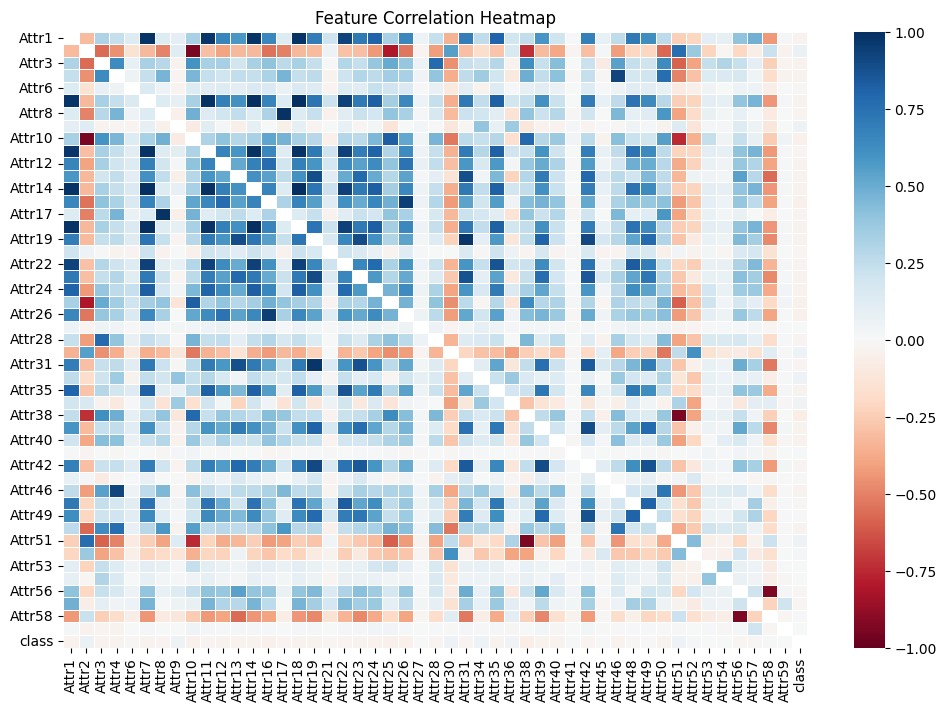

In [38]:
corr_matrix = df.corr()

# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix),dtype=bool), cmap='RdBu', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
def drop_high_corr_features(df, threshold=0.90, target='class'):
    features = df.columns
    features.drop('class')

    corr_matrix = df[features].corr().abs()
    target_corr = df[features].corrwith(df[target]).abs()

    dropped = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            f1 = features[i]
            f2 = features[j]
            if f1 in dropped or f2 in dropped:
                continue
            if corr_matrix.loc[f1, f2] > threshold:
                if target_corr[f1] >= target_corr[f2]:
                    dropped.append(f2)
                else:
                    dropped.append(f1)

    dropped = list(set(dropped))
    new_df = df.drop(columns=dropped)
    return new_df, dropped

df, dropped = drop_high_corr_features(df, threshold=0.90, target='class')

In [42]:
dropped.extend(columns_huge)
print("Total columns dropped (high correlated columns and high data errored columns : ", len(dropped))
dropped

Total columns dropped (high correlated columns and high data errored columns :  29


['Attr11',
 'Attr7',
 'Attr14',
 'Attr22',
 'Attr31',
 'Attr18',
 'Attr8',
 'Attr51',
 'Attr4',
 'Attr16',
 'Attr10',
 'Attr42',
 'Attr58',
 'Attr5',
 'Attr15',
 'Attr20',
 'Attr29',
 'Attr32',
 'Attr33',
 'Attr37',
 'Attr43',
 'Attr44',
 'Attr47',
 'Attr55',
 'Attr60',
 'Attr61',
 'Attr62',
 'Attr63',
 'Attr64']

In [43]:
print("New DataFrame shape:", df.shape)

New DataFrame shape: (3194, 36)


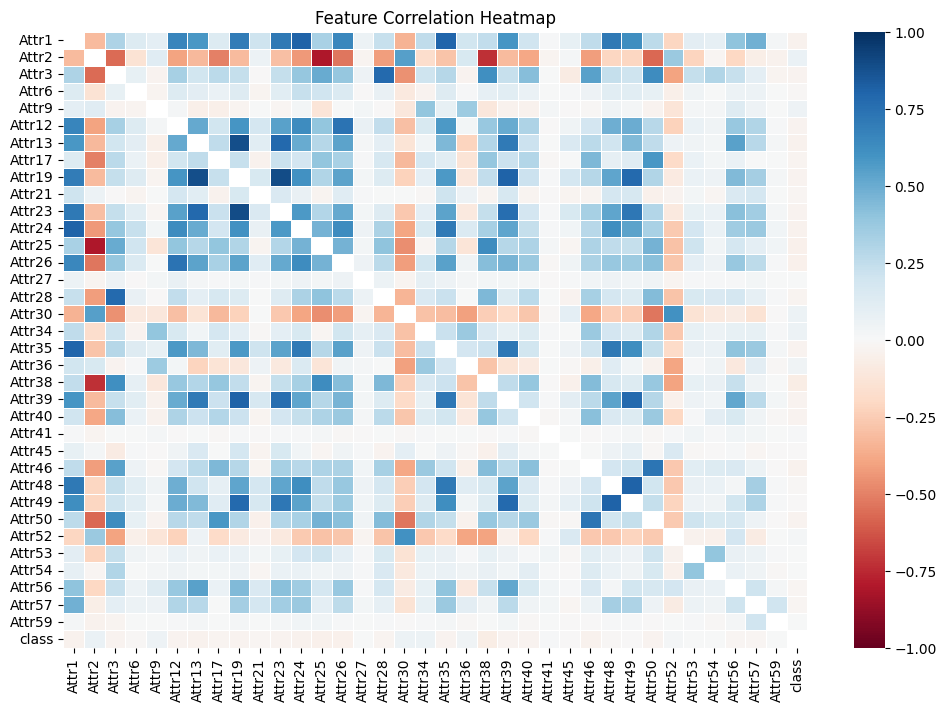

In [44]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix),dtype=bool), cmap='RdBu', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [45]:
df.to_csv("df.csv")
df_bankrupted.to_csv("df_bankrupted.csv")
df_not_bankrupted.to_csv("df_not_bankrupted.csv")

# **Data Preprocessing, Model training - Various methods**

## **1**
### **Random Forest - > for FEATURE SELECTION**
### **SMOTE -> for OVERSAMPLING**
### **MODEL -> CATBoost**


In [47]:
X = df.drop(columns=['class'])
y = df['class']


# RANDOM FOREST FOR SELECTING FEATURES
def select_features_rf(X_data, y_data, top_n=20):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_data, y_data)
    importances = rf.feature_importances_
    importance_df = pd.DataFrame({'feature': X_data.columns, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    selected_features = importance_df.head(top_n)['feature'].tolist()
    return selected_features


selected_features = select_features_rf(X, y, top_n=20)
X_selected = X[selected_features]

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


# Set class weights for CatBoost
# Calculate approximate ratio (majority/minority)
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count

cat_model = CatBoostClassifier(
    depth=6,
    learning_rate=0.05,
    iterations=200,
    l2_leaf_reg=3,
    class_weights=[1, weight_minority],
    random_state=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_train_sm)



# PREDICTION AND EVALUATION
y_pred_prob = cat_model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4
y_pred = (y_pred_prob > threshold).astype("int32")

cm = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(prec, 4))
print("Recall:", np.round(rec, 4))
print("F1-Score:", np.round(f1, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[603  30]
 [  5   1]]

Precision: 0.0323
Recall: 0.1667
F1-Score: 0.0541
ROC-AUC: 0.7809

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       633
           1       0.03      0.17      0.05         6

    accuracy                           0.95       639
   macro avg       0.51      0.56      0.51       639
weighted avg       0.98      0.95      0.96       639



## **2**
### **XGBoost - > for FEATURE SELECTION**
### **SMOTE -> for OVERSAMPLING**
### **MODEL -> DNN, LightGBM**

In [48]:
# Feature Selection using XGBoost
def select_features_xgb(X_data, y_data, top_n=20):
    # Train an XGBoost model to rank features
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_data, y_data)
    importances = xgb_model.feature_importances_
    importance_df = pd.DataFrame({'feature': X_data.columns, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    selected_features = importance_df.head(top_n)['feature'].tolist()
    return selected_features


# DNN
def create_dnn_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model




X = df.drop(columns=['class'])
y = df['class']

selected_features = select_features_xgb(X, y, top_n=20)
print("Selected features:", selected_features)
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count
class_weights = {0: 1, 1: weight_minority}
print("Class Weights:", class_weights)





# LightGBM Model
lgb_model = LGBMClassifier(
    random_state=42,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=6
)
lgb_model.fit(X_train_scaled, y_train_sm)

# DNN Model
dnn_model = create_dnn_model(input_dim=X_train_scaled.shape[1])
dnn_model.fit(X_train_scaled, y_train_sm,
              epochs=50,
              batch_size=32,
              validation_split=0.2,
              class_weight=class_weights,
              verbose=0)




# Get predicted probabilities from each model
y_pred_lgb_prob = lgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_dnn_prob = dnn_model.predict(X_test_scaled).flatten()

# Combine predictions by averaging
combined_prob = (y_pred_lgb_prob + y_pred_dnn_prob) / 2

# Tune threshold to optimize F1-score
from sklearn.metrics import f1_score
thresholds = np.arange(0.30, 0.60, 0.01)
best_f1 = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_temp = (combined_prob > thresh).astype("int32")
    current_f1 = f1_score(y_test, y_pred_temp)
    print(f"Threshold: {thresh:.2f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_thresh = thresh

print(f"\nBest threshold: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")

# Final predictions using the best threshold
y_pred_final = (combined_prob > best_thresh).astype("int32")




# Evaluation
cm = confusion_matrix(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, combined_prob)
report = classification_report(y_test, y_pred_final)

print("\nFinal Ensemble Evaluation:")
print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(precision, 4))
print("Recall:", np.round(recall, 4))
print("F1-Score:", np.round(f1_final, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)

Selected features: ['Attr9', 'Attr45', 'Attr49', 'Attr34', 'Attr17', 'Attr50', 'Attr1', 'Attr12', 'Attr46', 'Attr3', 'Attr57', 'Attr21', 'Attr26', 'Attr48', 'Attr38', 'Attr23', 'Attr25', 'Attr30', 'Attr6', 'Attr56']
Class Weights: {0: 1, 1: np.float64(1.0)}
[LightGBM] [Info] Number of positive: 2531, number of negative: 2531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5062, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

## **Final**
### **ANOVA-> Feature selection**
### **SMOTE -> for OVERSAMPLING****
### **DNN , Gaussian Model-> TRAINING model**

In [50]:
# Feature Selection using ANOVA F-test
def select_features_anova(X_data, y_data, top_n=30):

    selector = SelectKBest(score_func=f_classif, k=top_n)
    selector.fit(X_data, y_data)
    mask = selector.get_support()
    selected_features = X_data.columns[mask].tolist()
    return selected_features


In [58]:
# developing DNN MODEL
from tensorflow.keras.layers import BatchNormalization

def create_dnn_model(input_dim):

    inputs = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

In [54]:
X = df.drop(columns=['class'])
y = df['class']

selected_features = select_features_anova(X, y, top_n=30)
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)


In [55]:
# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Class weights based
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count
class_weights = {0: 1, 1: weight_minority}
print("Class Weights:", class_weights)


# TRAIN MODELS
# Gaussian Modelling
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train_sm)

# DNN Model
dnn_model = create_dnn_model(input_dim=X_train_scaled.shape[1])
dnn_model.fit(X_train_scaled, y_train_sm,
              epochs=200,
              batch_size=64,
              validation_split=0.2,
              class_weight=class_weights,
              verbose=0)

Class Weights: {0: 1, 1: np.float64(1.0)}


In [60]:
# Ensemble Predictions
# Get predicted probabilities from each model
y_pred_gnb_prob = gnb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_dnn_prob = dnn_model.predict(X_test_scaled).flatten()


# Combine predictions by averaging probabilities (soft voting)
combined_prob = (y_pred_gnb_prob + y_pred_dnn_prob) / 2


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [61]:
# Tune threshold
thresholds = np.arange(0.30, 0.60, 0.01)
best_f1 = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_temp = (combined_prob > thresh).astype("int32")
    current_f1 = f1_score(y_test, y_pred_temp)
    print(f"Threshold: {thresh:.2f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_thresh = thresh

print(f"\nBest threshold: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")
# Final predictions using the best threshold
y_pred_final = (combined_prob > best_thresh).astype("int32")

Threshold: 0.30, F1-Score: 0.0240
Threshold: 0.31, F1-Score: 0.0242
Threshold: 0.32, F1-Score: 0.0242
Threshold: 0.33, F1-Score: 0.0243
Threshold: 0.34, F1-Score: 0.0244
Threshold: 0.35, F1-Score: 0.0245
Threshold: 0.36, F1-Score: 0.0245
Threshold: 0.37, F1-Score: 0.0245
Threshold: 0.38, F1-Score: 0.0247
Threshold: 0.39, F1-Score: 0.0247
Threshold: 0.40, F1-Score: 0.0248
Threshold: 0.41, F1-Score: 0.0248
Threshold: 0.42, F1-Score: 0.0248
Threshold: 0.43, F1-Score: 0.0250
Threshold: 0.44, F1-Score: 0.0251
Threshold: 0.45, F1-Score: 0.0251
Threshold: 0.46, F1-Score: 0.0252
Threshold: 0.47, F1-Score: 0.0190
Threshold: 0.48, F1-Score: 0.0193
Threshold: 0.49, F1-Score: 0.0197
Threshold: 0.50, F1-Score: 0.0231
Threshold: 0.51, F1-Score: 0.0000
Threshold: 0.52, F1-Score: 0.0000
Threshold: 0.53, F1-Score: 0.0000
Threshold: 0.54, F1-Score: 0.0000
Threshold: 0.55, F1-Score: 0.0000
Threshold: 0.56, F1-Score: 0.0000
Threshold: 0.57, F1-Score: 0.0000
Threshold: 0.58, F1-Score: 0.0000
Threshold: 0.5

In [62]:
# EVALUATION
cm = confusion_matrix(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, combined_prob)
report = classification_report(y_test, y_pred_final)

print("\nFinal Ensemble Evaluation (GaussianNB + DNN):")
print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(precision, 4))
print("Recall:", np.round(recall, 4))
print("F1-Score:", np.round(f1_final, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)


Final Ensemble Evaluation (GaussianNB + DNN):
Confusion Matrix:
[[325 308]
 [  2   4]]

Precision: 0.0128
Recall: 0.6667
F1-Score: 0.0252
ROC-AUC: 0.5958

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.51      0.68       633
           1       0.01      0.67      0.03         6

    accuracy                           0.51       639
   macro avg       0.50      0.59      0.35       639
weighted avg       0.98      0.51      0.67       639

